# Link Prediction Lab

In [ ]:
%matplotlib inline

import networkx as nx
import networkx.algorithms.community as nx_comm
import community
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import re
import itertools
import math
import collections

rnd.seed()

## Graph Input

In [ ]:
edge = '/content/musae_facebook_edges.csv'
target = '/content/musae_facebook_target.csv'
edges = []
targets = []
edge_header = []
target_header = []
typo = []
with open(edge) as fedges:
  skip = True
  for line in fedges:
    sep_line = line[:-1].split(',')
    if (skip):
      edge_header = sep_line
      skip = False
      continue
    edges.append(sep_line)
with open(target) as ftargets:
  skip = True
  for line in ftargets:
    #sep_line = line[:-1].split(',')
    sep_line = re.split(r'"?,(?!\s+)"?', line[:-1])
    #sep_line = re.split(r'"?,"?', line[:-1])
    if len(sep_line) > 4:
      typo.append(len(targets))
      sep_line = [sep_line[0], sep_line[1], ','.join(sep_line[2:-1]), sep_line[-1]]
    if (skip):
      target_header = sep_line
      skip = False
      continue
    targets.append(sep_line)
print(typo)
for i in typo:
  print(targets[i])

[189, 7264, 9290, 14182, 14865, 16206, 17245]
['189', '196396587232007', 'Ministry of Micro, Small and Medium Enterprises,Government of India', 'government']
['7264', '290534891148152', '10,000 BC on 5', 'tvshow']
['9290', '1635854676683430', 'Chief Electoral Officer,Haryana', 'government']
['14182', '101656796570383', 'real,-', 'company']
['14865', '220225047997169', 'ჯანდაცვის სამინისტრო    Ministry Of Labour,Health&Social Affairs Of Georgia', 'government']
['16206', '800924123285911', 'Ministry of Coal,Government of India', 'government']
['17245', '272660132906360', 'National Institute of Electronics and Information Technology,Chandigarh', 'government']


In [ ]:
print(len(targets))
print(target_header)
print(len(edges))
print(edge_header)

22470
['id', 'facebook_id', 'page_name', 'page_type']
171002
['id_1', 'id_2']


In [ ]:
G = nx.Graph(edges)
deg = nx.classes.function.degree(G)
deg_def = [deg[str(i)] for i in range(len(targets))]
deg_val = sorted(deg_def)
deg_hist = nx.classes.function.degree_histogram(G)
print(deg_def)
print(deg_val)
print(deg_hist)
print(np.sum(deg_val))
print(np.sum(deg_val)/len(targets))

[1, 34, 12, 10, 51, 22, 16, 3, 3, 2, 3, 4, 6, 17, 55, 3, 1, 4, 38, 13, 1, 3, 28, 4, 4, 5, 30, 6, 4, 15, 5, 10, 43, 2, 2, 6, 4, 18, 6, 17, 5, 23, 6, 13, 59, 13, 9, 13, 4, 31, 20, 11, 11, 1, 6, 17, 20, 15, 6, 3, 16, 94, 2, 2, 23, 12, 10, 6, 5, 8, 19, 1, 20, 8, 25, 7, 1, 29, 1, 8, 6, 47, 5, 10, 5, 8, 7, 2, 49, 5, 30, 10, 6, 2, 20, 48, 6, 4, 20, 32, 10, 45, 13, 19, 30, 8, 58, 1, 2, 31, 16, 2, 5, 46, 10, 6, 5, 1, 5, 4, 22, 9, 14, 27, 9, 5, 23, 71, 27, 26, 26, 4, 5, 45, 21, 6, 6, 1, 34, 3, 4, 17, 22, 3, 5, 16, 2, 12, 10, 7, 18, 13, 9, 6, 6, 13, 14, 28, 1, 44, 11, 1, 3, 5, 7, 21, 4, 28, 3, 4, 5, 6, 2, 60, 5, 5, 56, 3, 9, 5, 15, 5, 10, 14, 6, 13, 33, 142, 11, 7, 5, 28, 1, 3, 2, 5, 35, 134, 7, 9, 6, 7, 2, 19, 4, 17, 26, 4, 3, 2, 21, 3, 133, 17, 4, 10, 42, 23, 23, 6, 5, 7, 26, 4, 18, 4, 8, 31, 9, 14, 24, 5, 2, 13, 15, 6, 8, 9, 53, 11, 30, 7, 10, 3, 4, 1, 26, 11, 17, 1, 7, 1, 31, 1, 32, 2, 14, 29, 3, 1, 4, 3, 13, 1, 11, 3, 2, 9, 8, 2, 29, 1, 2, 6, 3, 2, 2, 23, 5, 1, 21, 9, 1, 32, 2, 30, 5, 16, 6,

23
121
[330, 387, 333, 650, 375, 370, 338, 408, 448, 370, 659, 678, 328, 351, 333, 709, 650, 468, 364, 375, 387, 338, 370, 709, 333, 650, 387, 659, 338, 351, 650, 468, 364, 448, 375, 370, 709, 387, 678, 328, 448, 370, 709, 678, 341, 351, 659, 650, 468, 364, 375, 338, 330, 448, 370, 659, 709, 678, 650, 364, 375, 338, 659, 364, 709, 678, 375, 341, 659, 650, 330, 370, 709, 678, 375, 659, 650, 709, 330, 678, 650, 330, 448, 375, 370, 709, 417, 448, 678, 709, 468, 375, 659, 370, 320, 326, 320, 330, 448, 709, 370, 659, 448, 709, 678, 468, 659, 678, 330, 448, 659, 330, 678, 448, 659, 330, 678, 320, 330, 659, 659]


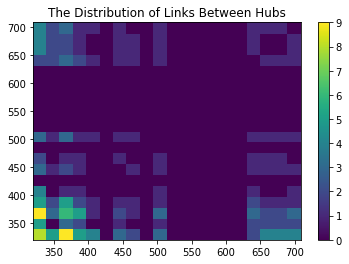

In [ ]:
xx = [deg_def[int(x[0])] for x in edges if (deg_def[int(x[0])]>300 and deg_def[int(x[1])]>300)]
yy = [deg_def[int(x[1])] for x in edges if (deg_def[int(x[0])]>300 and deg_def[int(x[1])]>300)]
hub_deg = [x for x in deg_def if x>300]
print(len(hub_deg))
print(len(xx))
print(yy)
plt.title("The Distribution of Links Between Hubs")
hist2d = plt.hist2d(xx+yy, yy+xx, bins=20)
plt.colorbar()

In [ ]:
G_R = nx.gnm_random_graph(22470, 171002)

36


Text(0.5, 1.0, 'Degree Distribution In Random Network')

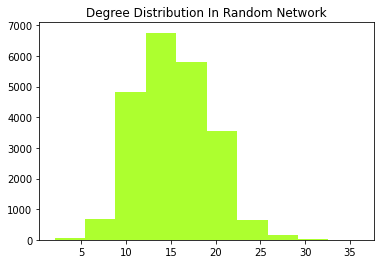

In [ ]:
deg_R = nx.degree(G_R)
deg_def_R = [deg_R[i] for i in range(len(targets))]
print(max(deg_def_R))
plt.hist(deg_def_R, color='greenyellow')
plt.title("Degree Distribution In Random Network")

17729
19
17729


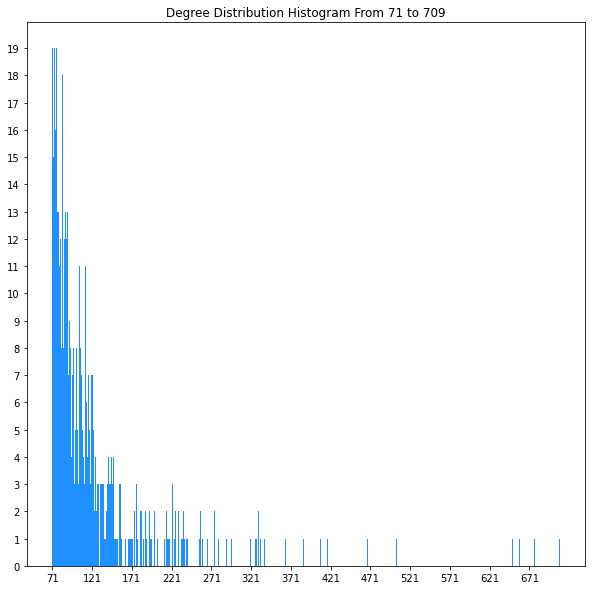

In [ ]:
cutoff = 0

for i in range(len(deg_val)):
  if deg_val[i] > 20:
    cutoff = i
    break
cutoff2 = cutoff+1
for i in range(cutoff+1,len(deg_val)):
  if deg_val[i] > 70:
    cutoff2 = i
    break
print(cutoff)
print(deg_hist[70])
print(np.sum(deg_hist[:21]))
plt.figure(figsize=(10,10))
hist_colors = ('greenyellow', 'dodgerblue')
plt.hist(deg_val[cutoff2+1:],bins=710-71, color='dodgerblue')
plt.title("Degree Distribution Histogram From 71 to 709")
plt.xticks(np.arange(71, 709, 50))
plt.yticks(np.arange(0, 20, 1))
plt.show()

In [ ]:
# Clustering Coefficient
# Iterate through all nodes, if deg == 1 then clCoeff = 0 else:
#   Iterate through pair of node to see if they are neighbors then increase counter
commonNs = []
clCoeffs = []
for x in range(len(targets)):
  if deg_def[x]== 1:
    commonNs.append(0)
    clCoeffs.append(0)
  else:
    commonNeighbors = 0
    neighbors = [n for n in G.neighbors(str(x))]
    combi = [n for n in itertools.combinations(neighbors, 2)]
    #if (x == 2):
    #  print(combi)
    for t in combi:
      y = t[0]
      z = t[1]
      n1 = [n for n in G.neighbors(y)]
      if z in n1:
        commonNeighbors += 1
        #if (x == 2):
        #  print(commonNeighbors, ' ', y, ' ', z)
    commonNs.append(commonNeighbors)
    clCoeffs.append(commonNeighbors/len(neighbors)/(len(neighbors)-1))
print(commonNs)
print(clCoeffs)


[0, 270, 43, 23, 536, 86, 76, 1, 1, 1, 3, 0, 3, 57, 479, 1, 0, 1, 366, 4, 0, 0, 203, 4, 0, 1, 353, 0, 3, 37, 1, 18, 258, 1, 0, 4, 0, 102, 4, 8, 9, 66, 1, 39, 1700, 8, 19, 6, 1, 188, 111, 23, 14, 0, 7, 22, 31, 13, 7, 0, 92, 188, 1, 1, 179, 1, 4, 8, 8, 18, 153, 0, 21, 5, 213, 20, 0, 149, 0, 28, 9, 300, 4, 10, 6, 4, 13, 1, 428, 2, 83, 27, 3, 1, 81, 650, 9, 4, 56, 148, 19, 364, 45, 93, 167, 5, 633, 0, 0, 98, 13, 0, 8, 373, 13, 7, 6, 0, 2, 3, 100, 21, 43, 138, 2, 10, 85, 414, 247, 33, 129, 1, 0, 222, 11, 1, 12, 0, 57, 0, 0, 60, 228, 1, 3, 26, 0, 49, 43, 8, 26, 43, 2, 2, 0, 16, 44, 257, 0, 415, 31, 0, 3, 7, 3, 54, 2, 127, 0, 1, 10, 6, 0, 660, 7, 8, 425, 1, 2, 1, 8, 7, 32, 19, 6, 68, 60, 2334, 43, 5, 2, 158, 0, 1, 0, 3, 423, 1048, 21, 5, 3, 0, 1, 76, 1, 29, 173, 2, 1, 0, 145, 1, 804, 54, 1, 19, 274, 11, 63, 10, 2, 2, 264, 0, 2, 1, 25, 77, 33, 13, 204, 2, 1, 57, 50, 1, 13, 7, 820, 18, 174, 12, 5, 1, 1, 0, 91, 4, 37, 0, 6, 0, 136, 0, 233, 0, 49, 118, 1, 0, 2, 0, 13, 0, 11, 0, 1, 13, 4, 1, 205, 

In [ ]:
commonNs_R = []
clCoeffs_R = []
for x in range(len(targets)):
  if deg_def[x]== 1:
    commonNs_R.append(0)
    clCoeffs_R.append(0)
  else:
    commonNeighbors = 0
    neighbors = [n for n in G_R.neighbors(x)]
    combi = [n for n in itertools.combinations(neighbors, 2)]
    #if (x == 2):
    #  print(combi)
    for t in combi:
      y = t[0]
      z = t[1]
      n1 = [n for n in G_R.neighbors(y)]
      if z in n1:
        commonNeighbors += 1
        #if (x == 2):
        #  print(commonNeighbors, ' ', y, ' ', z)
    commonNs_R.append(commonNeighbors)
    clCoeffs_R.append(commonNeighbors/len(neighbors)/(len(neighbors)-1))
print(commonNs_R)
print(clCoeffs_R)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

0.000314578689828356
0.03333333333333333
[22267, 176, 22, 3, 2]


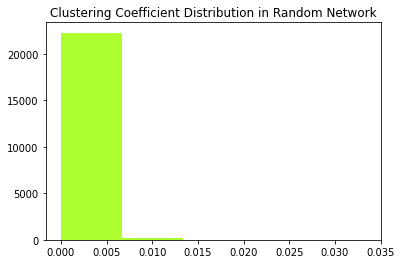

In [ ]:
print(np.average(clCoeffs_R))
print(max(clCoeffs_R))
(nn, bins, patches) = plt.hist(clCoeffs_R,bins=5, color='greenyellow')
print([int(a) for a in nn])
plt.title("Clustering Coefficient Distribution in Random Network")
plt.show()

In [ ]:
print(nx.diameter(G_R))

6


In [ ]:
print(nx.average_shortest_path_length(G_R))

3.9486525855343038


In [ ]:
dia_R = 6
average_path_R = 3.95

In [ ]:
print(nx.degree_assortativity_coefficient(G_R))

-5.404617738849336e-05


In [ ]:
Triangles_R = nx.triangles(G_R)

In [ ]:
print(Triangles_R)
sorted_Triangles_R = {k:v for k, v in sorted(Triangles_R.items(), key=lambda x: x[1], reverse=True)}
print(sorted_Triangles_R)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 1, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 1, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 1, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 1, 71: 1, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 1, 80: 0, 81: 0, 82: 0, 83: 1, 84: 0, 85: 1, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [ ]:
partition_R = community.best_partition(G_R)
print(partition_R)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 6, 8: 0, 9: 5, 10: 2, 11: 7, 12: 2, 13: 4, 14: 1, 15: 5, 16: 8, 17: 5, 18: 7, 19: 9, 20: 5, 21: 5, 22: 10, 23: 4, 24: 0, 25: 9, 26: 0, 27: 5, 28: 1, 29: 5, 30: 7, 31: 9, 32: 1, 33: 4, 34: 5, 35: 4, 36: 6, 37: 6, 38: 5, 39: 11, 40: 5, 41: 7, 42: 5, 43: 5, 44: 11, 45: 9, 46: 3, 47: 2, 48: 11, 49: 9, 50: 1, 51: 2, 52: 7, 53: 0, 54: 4, 55: 9, 56: 7, 57: 8, 58: 3, 59: 7, 60: 11, 61: 0, 62: 4, 63: 6, 64: 6, 65: 9, 66: 5, 67: 5, 68: 2, 69: 3, 70: 2, 71: 5, 72: 7, 73: 7, 74: 3, 75: 4, 76: 11, 77: 2, 78: 2, 79: 9, 80: 9, 81: 2, 82: 11, 83: 0, 84: 6, 85: 11, 86: 0, 87: 1, 88: 9, 89: 5, 90: 6, 91: 0, 92: 7, 93: 10, 94: 6, 95: 9, 96: 8, 97: 3, 98: 11, 99: 11, 100: 5, 101: 2, 102: 9, 103: 5, 104: 7, 105: 2, 106: 12, 107: 13, 108: 7, 109: 3, 110: 0, 111: 10, 112: 2, 113: 1, 114: 2, 115: 0, 116: 7, 117: 1, 118: 9, 119: 9, 120: 1, 121: 11, 122: 9, 123: 6, 124: 0, 125: 4, 126: 7, 127: 2, 128: 7, 129: 3, 130: 4, 131: 2, 132: 4, 133: 14, 134: 5, 135: 9, 136: 

In [ ]:
partition_R = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 6, 8: 0, 9: 5, 10: 2, 11: 7, 12: 2, 13: 4, 14: 1, 15: 5, 16: 8, 17: 5, 18: 7, 19: 9, 20: 5, 21: 5, 22: 10, 23: 4, 24: 0, 25: 9, 26: 0, 27: 5, 28: 1, 29: 5, 30: 7, 31: 9, 32: 1, 33: 4, 34: 5, 35: 4, 36: 6, 37: 6, 38: 5, 39: 11, 40: 5, 41: 7, 42: 5, 43: 5, 44: 11, 45: 9, 46: 3, 47: 2, 48: 11, 49: 9, 50: 1, 51: 2, 52: 7, 53: 0, 54: 4, 55: 9, 56: 7, 57: 8, 58: 3, 59: 7, 60: 11, 61: 0, 62: 4, 63: 6, 64: 6, 65: 9, 66: 5, 67: 5, 68: 2, 69: 3, 70: 2, 71: 5, 72: 7, 73: 7, 74: 3, 75: 4, 76: 11, 77: 2, 78: 2, 79: 9, 80: 9, 81: 2, 82: 11, 83: 0, 84: 6, 85: 11, 86: 0, 87: 1, 88: 9, 89: 5, 90: 6, 91: 0, 92: 7, 93: 10, 94: 6, 95: 9, 96: 8, 97: 3, 98: 11, 99: 11, 100: 5, 101: 2, 102: 9, 103: 5, 104: 7, 105: 2, 106: 12, 107: 13, 108: 7, 109: 3, 110: 0, 111: 10, 112: 2, 113: 1, 114: 2, 115: 0, 116: 7, 117: 1, 118: 9, 119: 9, 120: 1, 121: 11, 122: 9, 123: 6, 124: 0, 125: 4, 126: 7, 127: 2, 128: 7, 129: 3, 130: 4, 131: 2, 132: 4, 133: 14, 134: 5, 135: 9, 136: 0, 137: 4, 138: 0, 139: 6, 140: 8, 141: 5, 142: 2, 143: 5, 144: 6, 145: 7, 146: 5, 147: 8, 148: 7, 149: 4, 150: 0, 151: 5, 152: 3, 153: 11, 154: 7, 155: 6, 156: 2, 157: 10, 158: 7, 159: 1, 160: 5, 161: 4, 162: 5, 163: 6, 164: 10, 165: 9, 166: 2, 167: 4, 168: 4, 169: 4, 170: 2, 171: 2, 172: 2, 173: 2, 174: 2, 175: 5, 176: 3, 177: 8, 178: 10, 179: 2, 180: 5, 181: 5, 182: 9, 183: 2, 184: 5, 185: 2, 186: 8, 187: 7, 188: 9, 189: 0, 190: 2, 191: 1, 192: 9, 193: 4, 194: 0, 195: 6, 196: 5, 197: 7, 198: 9, 199: 9, 200: 0, 201: 4, 202: 7, 203: 9, 204: 3, 205: 5, 206: 4, 207: 9, 208: 2, 209: 4, 210: 2, 211: 7, 212: 7, 213: 4, 214: 6, 215: 7, 216: 5, 217: 3, 218: 1, 219: 1, 220: 7, 221: 4, 222: 0, 223: 11, 224: 10, 225: 7, 226: 7, 227: 5, 228: 11, 229: 6, 230: 4, 231: 5, 232: 3, 233: 10, 234: 6, 235: 3, 236: 9, 237: 4, 238: 4, 239: 9, 240: 4, 241: 7, 242: 0, 243: 6, 244: 4, 245: 6, 246: 6, 247: 7, 248: 7, 249: 4, 250: 0, 251: 7, 252: 7, 253: 0, 254: 9, 255: 5, 256: 4, 257: 14, 258: 6, 259: 14, 260: 6, 261: 5, 262: 6, 263: 1, 264: 5, 265: 5, 266: 11, 267: 3, 268: 4, 269: 4, 270: 9, 271: 9, 272: 9, 273: 4, 274: 0, 275: 4, 276: 2, 277: 9, 278: 5, 279: 9, 280: 7, 281: 1, 282: 7, 283: 9, 284: 4, 285: 5, 286: 14, 287: 7, 288: 1, 289: 5, 290: 1, 291: 9, 292: 11, 293: 2, 294: 2, 295: 2, 296: 1, 297: 2, 298: 5, 299: 4, 300: 5, 301: 5, 302: 4, 303: 2, 304: 1, 305: 5, 306: 2, 307: 5, 308: 5, 309: 12, 310: 9, 311: 5, 312: 6, 313: 5, 314: 3, 315: 7, 316: 9, 317: 10, 318: 2, 319: 13, 320: 9, 321: 5, 322: 14, 323: 4, 324: 4, 325: 5, 326: 0, 327: 2, 328: 7, 329: 2, 330: 7, 331: 14, 332: 9, 333: 9, 334: 9, 335: 10, 336: 1, 337: 4, 338: 5, 339: 4, 340: 1, 341: 5, 342: 2, 343: 3, 344: 3, 345: 7, 346: 1, 347: 0, 348: 2, 349: 7, 350: 2, 351: 4, 352: 7, 353: 0, 354: 1, 355: 0, 356: 6, 357: 4, 358: 0, 359: 9, 360: 11, 361: 4, 362: 0, 363: 11, 364: 5, 365: 11, 366: 4, 367: 7, 368: 6, 369: 9, 370: 4, 371: 9, 372: 11, 373: 0, 374: 3, 375: 2, 376: 1, 377: 7, 378: 2, 379: 6, 380: 4, 381: 9, 382: 4, 383: 9, 384: 6, 385: 11, 386: 2, 387: 5, 388: 4, 389: 2, 390: 1, 391: 11, 392: 10, 393: 10, 394: 6, 395: 2, 396: 6, 397: 1, 398: 9, 399: 5, 400: 11, 401: 3, 402: 4, 403: 4, 404: 11, 405: 11, 406: 2, 407: 9, 408: 11, 409: 5, 410: 7, 411: 4, 412: 11, 413: 0, 414: 9, 415: 11, 416: 6, 417: 2, 418: 6, 419: 6, 420: 9, 421: 2, 422: 5, 423: 7, 424: 2, 425: 1, 426: 9, 427: 2, 428: 6, 429: 0, 430: 1, 431: 10, 432: 9, 433: 1, 434: 6, 435: 6, 436: 0, 437: 2, 438: 2, 439: 3, 440: 5, 441: 6, 442: 9, 443: 14, 444: 9, 445: 4, 446: 0, 447: 10, 448: 0, 449: 11, 450: 2, 451: 14, 452: 0, 453: 9, 454: 5, 455: 4, 456: 3, 457: 1, 458: 7, 459: 14, 460: 2, 461: 7, 462: 13, 463: 6, 464: 4, 465: 7, 466: 3, 467: 11, 468: 3, 469: 11, 470: 4, 471: 2, 472: 2, 473: 5, 474: 11, 475: 3, 476: 0, 477: 5, 478: 2, 479: 2, 480: 7, 481: 9, 482: 6, 483: 2, 484: 3, 485: 6, 486: 0, 487: 4, 488: 7, 489: 5, 490: 8, 491: 9, 492: 5, 493: 11, 494: 2, 495: 9, 496: 9, 497: 11, 498: 7, 499: 6, 500: 9, 501: 10, 502: 7, 503: 7, 504: 10, 505: 6, 506: 5, 507: 2, 508: 6, 509: 6, 510: 4, 511: 5, 512: 11, 513: 4, 514: 5, 515: 4, 516: 9, 517: 5, 518: 6, 519: 1, 520: 2, 521: 2, 522: 4, 523: 9, 524: 5, 525: 5, 526: 1, 527: 4, 528: 11, 529: 5, 530: 7, 531: 7, 532: 9, 533: 11, 534: 2, 535: 1, 536: 0, 537: 9, 538: 11, 539: 2, 540: 11, 541: 7, 542: 9, 543: 6, 544: 1, 545: 14, 546: 7, 547: 2, 548: 6, 549: 4, 550: 4, 551: 1, 552: 2, 553: 4, 554: 7, 555: 5, 556: 7, 557: 6, 558: 11, 559: 5, 560: 14, 561: 2, 562: 8, 563: 3, 564: 9, 565: 6, 566: 9, 567: 7, 568: 6, 569: 10, 570: 0, 571: 2, 572: 6, 573: 11, 574: 10, 575: 2, 576: 1, 577: 5, 578: 6, 579: 14, 580: 5, 581: 6, 582: 7, 583: 3, 584: 2, 585: 5, 586: 9, 587: 7, 588: 1, 589: 4, 590: 1, 591: 3, 592: 9, 593: 11, 594: 5, 595: 14, 596: 1, 597: 11, 598: 3, 599: 3, 600: 0, 601: 14, 602: 7, 603: 5, 604: 9, 605: 3, 606: 11, 607: 3, 608: 7, 609: 3, 610: 1, 611: 4, 612: 4, 613: 6, 614: 9, 615: 1, 616: 4, 617: 11, 618: 6, 619: 5, 620: 2, 621: 11, 622: 9, 623: 11, 624: 8, 625: 5, 626: 11, 627: 0, 628: 9, 629: 1, 630: 14, 631: 3, 632: 4, 633: 4, 634: 2, 635: 2, 636: 0, 637: 5, 638: 9, 639: 11, 640: 7, 641: 4, 642: 14, 643: 4, 644: 6, 645: 9, 646: 0, 647: 7, 648: 9, 649: 11, 650: 10, 651: 2, 652: 4, 653: 4, 654: 2, 655: 2, 656: 11, 657: 0, 658: 6, 659: 11, 660: 2, 661: 4, 662: 4, 663: 4, 664: 6, 665: 7, 666: 5, 667: 3, 668: 2, 669: 9, 670: 11, 671: 4, 672: 6, 673: 6, 674: 2, 675: 1, 676: 4, 677: 0, 678: 9, 679: 7, 680: 6, 681: 5, 682: 5, 683: 3, 684: 9, 685: 9, 686: 6, 687: 2, 688: 7, 689: 1, 690: 5, 691: 0, 692: 9, 693: 4, 694: 11, 695: 11, 696: 6, 697: 7, 698: 2, 699: 5, 700: 3, 701: 0, 702: 4, 703: 0, 704: 4, 705: 4, 706: 2, 707: 2, 708: 5, 709: 9, 710: 4, 711: 5, 712: 12, 713: 5, 714: 7, 715: 6, 716: 6, 717: 2, 718: 2, 719: 7, 720: 3, 721: 11, 722: 0, 723: 1, 724: 4, 725: 9, 726: 8, 727: 2, 728: 7, 729: 0, 730: 7, 731: 2, 732: 7, 733: 10, 734: 9, 735: 2, 736: 2, 737: 9, 738: 2, 739: 1, 740: 7, 741: 11, 742: 6, 743: 12, 744: 5, 745: 10, 746: 0, 747: 9, 748: 5, 749: 8, 750: 6, 751: 6, 752: 3, 753: 2, 754: 2, 755: 12, 756: 11, 757: 2, 758: 5, 759: 8, 760: 6, 761: 14, 762: 1, 763: 5, 764: 1, 765: 11, 766: 7, 767: 4, 768: 9, 769: 6, 770: 3, 771: 5, 772: 11, 773: 9, 774: 7, 775: 7, 776: 5, 777: 9, 778: 4, 779: 5, 780: 7, 781: 2, 782: 4, 783: 9, 784: 7, 785: 6, 786: 7, 787: 9, 788: 5, 789: 9, 790: 6, 791: 7, 792: 14, 793: 11, 794: 6, 795: 4, 796: 7, 797: 1, 798: 2, 799: 4, 800: 4, 801: 11, 802: 6, 803: 1, 804: 4, 805: 11, 806: 10, 807: 14, 808: 6, 809: 9, 810: 2, 811: 4, 812: 6, 813: 9, 814: 1, 815: 4, 816: 7, 817: 2, 818: 5, 819: 10, 820: 11, 821: 4, 822: 1, 823: 1, 824: 1, 825: 10, 826: 10, 827: 10, 828: 4, 829: 5, 830: 11, 831: 6, 832: 2, 833: 14, 834: 2, 835: 2, 836: 5, 837: 7, 838: 4, 839: 9, 840: 6, 841: 4, 842: 6, 843: 1, 844: 2, 845: 3, 846: 0, 847: 6, 848: 9, 849: 7, 850: 6, 851: 11, 852: 2, 853: 7, 854: 9, 855: 14, 856: 9, 857: 9, 858: 6, 859: 11, 860: 6, 861: 1, 862: 6, 863: 4, 864: 2, 865: 1, 866: 3, 867: 11, 868: 4, 869: 9, 870: 9, 871: 9, 872: 11, 873: 6, 874: 2, 875: 2, 876: 4, 877: 11, 878: 1, 879: 4, 880: 12, 881: 7, 882: 7, 883: 4, 884: 5, 885: 1, 886: 9, 887: 11, 888: 2, 889: 1, 890: 7, 891: 4, 892: 11, 893: 11, 894: 9, 895: 3, 896: 3, 897: 3, 898: 6, 899: 14, 900: 4, 901: 4, 902: 5, 903: 11, 904: 7, 905: 3, 906: 4, 907: 13, 908: 9, 909: 7, 910: 1, 911: 11, 912: 2, 913: 4, 914: 7, 915: 5, 916: 3, 917: 10, 918: 11, 919: 3, 920: 11, 921: 0, 922: 2, 923: 9, 924: 2, 925: 11, 926: 3, 927: 6, 928: 3, 929: 1, 930: 6, 931: 0, 932: 5, 933: 3, 934: 11, 935: 9, 936: 3, 937: 6, 938: 4, 939: 2, 940: 5, 941: 9, 942: 5, 943: 4, 944: 2, 945: 10, 946: 4, 947: 4, 948: 3, 949: 0, 950: 7, 951: 2, 952: 11, 953: 5, 954: 4, 955: 3, 956: 2, 957: 7, 958: 2, 959: 9, 960: 1, 961: 4, 962: 3, 963: 4, 964: 5, 965: 9, 966: 11, 967: 10, 968: 4, 969: 3, 970: 11, 971: 7, 972: 2, 973: 4, 974: 9, 975: 11, 976: 0, 977: 11, 978: 5, 979: 4, 980: 11, 981: 2, 982: 4, 983: 2, 984: 5, 985: 11, 986: 11, 987: 6, 988: 9, 989: 7, 990: 4, 991: 11, 992: 5, 993: 2, 994: 2, 995: 9, 996: 5, 997: 7, 998: 6, 999: 6, 1000: 5, 1001: 11, 1002: 8, 1003: 5, 1004: 4, 1005: 7, 1006: 9, 1007: 7, 1008: 11, 1009: 2, 1010: 6, 1011: 10, 1012: 7, 1013: 11, 1014: 10, 1015: 5, 1016: 11, 1017: 2, 1018: 7, 1019: 11, 1020: 7, 1021: 3, 1022: 7, 1023: 7, 1024: 4, 1025: 11, 1026: 5, 1027: 4, 1028: 2, 1029: 10, 1030: 4, 1031: 2, 1032: 7, 1033: 11, 1034: 3, 1035: 2, 1036: 5, 1037: 4, 1038: 1, 1039: 4, 1040: 4, 1041: 7, 1042: 2, 1043: 5, 1044: 3, 1045: 9, 1046: 0, 1047: 9, 1048: 5, 1049: 3, 1050: 1, 1051: 11, 1052: 4, 1053: 9, 1054: 9, 1055: 5, 1056: 9, 1057: 7, 1058: 2, 1059: 6, 1060: 5, 1061: 7, 1062: 11, 1063: 0, 1064: 2, 1065: 7, 1066: 3, 1067: 5, 1068: 6, 1069: 6, 1070: 12, 1071: 3, 1072: 11, 1073: 5, 1074: 2, 1075: 10, 1076: 11, 1077: 6, 1078: 1, 1079: 4, 1080: 7, 1081: 5, 1082: 3, 1083: 0, 1084: 4, 1085: 2, 1086: 3, 1087: 0, 1088: 2, 1089: 7, 1090: 2, 1091: 4, 1092: 4, 1093: 1, 1094: 1, 1095: 2, 1096: 7, 1097: 4, 1098: 5, 1099: 5, 1100: 7, 1101: 4, 1102: 6, 1103: 10, 1104: 2, 1105: 7, 1106: 4, 1107: 9, 1108: 11, 1109: 0, 1110: 0, 1111: 2, 1112: 5, 1113: 4, 1114: 0, 1115: 4, 1116: 1, 1117: 10, 1118: 2, 1119: 4, 1120: 5, 1121: 9, 1122: 6, 1123: 2, 1124: 2, 1125: 0, 1126: 7, 1127: 6, 1128: 11, 1129: 11, 1130: 7, 1131: 6, 1132: 9, 1133: 0, 1134: 9, 1135: 7, 1136: 7, 1137: 11, 1138: 11, 1139: 11, 1140: 5, 1141: 11, 1142: 5, 1143: 14, 1144: 8, 1145: 4, 1146: 0, 1147: 14, 1148: 0, 1149: 9, 1150: 11, 1151: 11, 1152: 4, 1153: 11, 1154: 3, 1155: 5, 1156: 6, 1157: 9, 1158: 7, 1159: 6, 1160: 2, 1161: 3, 1162: 7, 1163: 11, 1164: 4, 1165: 8, 1166: 0, 1167: 11, 1168: 6, 1169: 6, 1170: 6, 1171: 5, 1172: 4, 1173: 5, 1174: 5, 1175: 1, 1176: 5, 1177: 5, 1178: 1, 1179: 2, 1180: 9, 1181: 0, 1182: 10, 1183: 7, 1184: 8, 1185: 2, 1186: 1, 1187: 2, 1188: 2, 1189: 11, 1190: 6, 1191: 11, 1192: 3, 1193: 5, 1194: 5, 1195: 11, 1196: 5, 1197: 9, 1198: 7, 1199: 5, 1200: 11, 1201: 0, 1202: 2, 1203: 4, 1204: 4, 1205: 6, 1206: 1, 1207: 3, 1208: 9, 1209: 4, 1210: 11, 1211: 11, 1212: 14, 1213: 12, 1214: 11, 1215: 6, 1216: 6, 1217: 4, 1218: 5, 1219: 7, 1220: 2, 1221: 5, 1222: 5, 1223: 6, 1224: 1, 1225: 3, 1226: 0, 1227: 2, 1228: 9, 1229: 4, 1230: 11, 1231: 7, 1232: 3, 1233: 7, 1234: 5, 1235: 4, 1236: 4, 1237: 11, 1238: 2, 1239: 11, 1240: 5, 1241: 6, 1242: 7, 1243: 5, 1244: 11, 1245: 5, 1246: 9, 1247: 4, 1248: 1, 1249: 2, 1250: 1, 1251: 4, 1252: 3, 1253: 9, 1254: 5, 1255: 0, 1256: 13, 1257: 9, 1258: 8, 1259: 1, 1260: 11, 1261: 11, 1262: 2, 1263: 9, 1264: 0, 1265: 2, 1266: 2, 1267: 5, 1268: 6, 1269: 0, 1270: 4, 1271: 5, 1272: 4, 1273: 6, 1274: 11, 1275: 2, 1276: 0, 1277: 6, 1278: 2, 1279: 4, 1280: 9, 1281: 10, 1282: 5, 1283: 0, 1284: 1, 1285: 1, 1286: 5, 1287: 9, 1288: 0, 1289: 6, 1290: 9, 1291: 2, 1292: 5, 1293: 6, 1294: 4, 1295: 7, 1296: 4, 1297: 7, 1298: 9, 1299: 4, 1300: 1, 1301: 6, 1302: 1, 1303: 6, 1304: 7, 1305: 9, 1306: 6, 1307: 7, 1308: 7, 1309: 4, 1310: 6, 1311: 2, 1312: 7, 1313: 2, 1314: 0, 1315: 4, 1316: 7, 1317: 9, 1318: 2, 1319: 11, 1320: 11, 1321: 9, 1322: 7, 1323: 3, 1324: 3, 1325: 7, 1326: 6, 1327: 2, 1328: 8, 1329: 13, 1330: 2, 1331: 11, 1332: 2, 1333: 7, 1334: 9, 1335: 11, 1336: 9, 1337: 9, 1338: 5, 1339: 8, 1340: 11, 1341: 2, 1342: 14, 1343: 2, 1344: 4, 1345: 5, 1346: 7, 1347: 5, 1348: 11, 1349: 7, 1350: 9, 1351: 14, 1352: 3, 1353: 8, 1354: 11, 1355: 1, 1356: 7, 1357: 0, 1358: 9, 1359: 6, 1360: 2, 1361: 5, 1362: 4, 1363: 4, 1364: 11, 1365: 8, 1366: 4, 1367: 1, 1368: 14, 1369: 4, 1370: 6, 1371: 9, 1372: 9, 1373: 0, 1374: 0, 1375: 6, 1376: 4, 1377: 5, 1378: 1, 1379: 6, 1380: 11, 1381: 8, 1382: 2, 1383: 4, 1384: 9, 1385: 5, 1386: 10, 1387: 13, 1388: 11, 1389: 0, 1390: 9, 1391: 11, 1392: 14, 1393: 4, 1394: 0, 1395: 6, 1396: 11, 1397: 9, 1398: 9, 1399: 0, 1400: 10, 1401: 6, 1402: 6, 1403: 9, 1404: 4, 1405: 2, 1406: 4, 1407: 9, 1408: 4, 1409: 5, 1410: 11, 1411: 11, 1412: 9, 1413: 4, 1414: 1, 1415: 11, 1416: 2, 1417: 1, 1418: 7, 1419: 1, 1420: 2, 1421: 1, 1422: 6, 1423: 0, 1424: 11, 1425: 6, 1426: 4, 1427: 7, 1428: 11, 1429: 4, 1430: 6, 1431: 6, 1432: 3, 1433: 7, 1434: 14, 1435: 8, 1436: 4, 1437: 0, 1438: 11, 1439: 6, 1440: 11, 1441: 9, 1442: 11, 1443: 5, 1444: 9, 1445: 8, 1446: 9, 1447: 4, 1448: 2, 1449: 3, 1450: 4, 1451: 0, 1452: 6, 1453: 5, 1454: 7, 1455: 6, 1456: 7, 1457: 4, 1458: 9, 1459: 9, 1460: 1, 1461: 11, 1462: 4, 1463: 4, 1464: 3, 1465: 2, 1466: 4, 1467: 0, 1468: 0, 1469: 5, 1470: 7, 1471: 11, 1472: 5, 1473: 12, 1474: 9, 1475: 9, 1476: 11, 1477: 5, 1478: 14, 1479: 11, 1480: 0, 1481: 7, 1482: 6, 1483: 2, 1484: 2, 1485: 2, 1486: 14, 1487: 6, 1488: 5, 1489: 2, 1490: 4, 1491: 9, 1492: 5, 1493: 9, 1494: 0, 1495: 5, 1496: 9, 1497: 2, 1498: 9, 1499: 2, 1500: 2, 1501: 6, 1502: 6, 1503: 11, 1504: 3, 1505: 9, 1506: 1, 1507: 3, 1508: 6, 1509: 7, 1510: 11, 1511: 3, 1512: 0, 1513: 7, 1514: 1, 1515: 9, 1516: 6, 1517: 3, 1518: 6, 1519: 7, 1520: 6, 1521: 6, 1522: 11, 1523: 3, 1524: 4, 1525: 5, 1526: 5, 1527: 9, 1528: 9, 1529: 4, 1530: 9, 1531: 2, 1532: 2, 1533: 8, 1534: 9, 1535: 9, 1536: 2, 1537: 11, 1538: 5, 1539: 0, 1540: 1, 1541: 1, 1542: 3, 1543: 11, 1544: 7, 1545: 3, 1546: 7, 1547: 0, 1548: 1, 1549: 11, 1550: 5, 1551: 2, 1552: 6, 1553: 1, 1554: 3, 1555: 2, 1556: 1, 1557: 4, 1558: 1, 1559: 4, 1560: 1, 1561: 6, 1562: 8, 1563: 11, 1564: 1, 1565: 6, 1566: 6, 1567: 5, 1568: 7, 1569: 14, 1570: 4, 1571: 2, 1572: 2, 1573: 5, 1574: 5, 1575: 11, 1576: 5, 1577: 0, 1578: 0, 1579: 2, 1580: 4, 1581: 5, 1582: 3, 1583: 0, 1584: 4, 1585: 11, 1586: 4, 1587: 10, 1588: 7, 1589: 6, 1590: 7, 1591: 4, 1592: 4, 1593: 0, 1594: 11, 1595: 6, 1596: 9, 1597: 0, 1598: 9, 1599: 2, 1600: 6, 1601: 9, 1602: 7, 1603: 9, 1604: 7, 1605: 7, 1606: 11, 1607: 2, 1608: 6, 1609: 8, 1610: 7, 1611: 1, 1612: 2, 1613: 7, 1614: 5, 1615: 7, 1616: 14, 1617: 9, 1618: 11, 1619: 6, 1620: 6, 1621: 5, 1622: 11, 1623: 2, 1624: 2, 1625: 1, 1626: 9, 1627: 9, 1628: 7, 1629: 5, 1630: 9, 1631: 2, 1632: 11, 1633: 5, 1634: 6, 1635: 11, 1636: 7, 1637: 11, 1638: 5, 1639: 9, 1640: 3, 1641: 7, 1642: 7, 1643: 11, 1644: 10, 1645: 0, 1646: 4, 1647: 9, 1648: 6, 1649: 11, 1650: 11, 1651: 5, 1652: 10, 1653: 5, 1654: 6, 1655: 5, 1656: 6, 1657: 11, 1658: 6, 1659: 2, 1660: 4, 1661: 4, 1662: 11, 1663: 0, 1664: 7, 1665: 0, 1666: 10, 1667: 7, 1668: 6, 1669: 4, 1670: 1, 1671: 9, 1672: 10, 1673: 1, 1674: 4, 1675: 0, 1676: 5, 1677: 3, 1678: 11, 1679: 10, 1680: 11, 1681: 9, 1682: 14, 1683: 7, 1684: 9, 1685: 6, 1686: 2, 1687: 6, 1688: 3, 1689: 7, 1690: 3, 1691: 0, 1692: 0, 1693: 6, 1694: 4, 1695: 4, 1696: 6, 1697: 11, 1698: 4, 1699: 3, 1700: 11, 1701: 6, 1702: 9, 1703: 9, 1704: 9, 1705: 2, 1706: 6, 1707: 6, 1708: 5, 1709: 4, 1710: 7, 1711: 5, 1712: 7, 1713: 4, 1714: 7, 1715: 3, 1716: 9, 1717: 6, 1718: 6, 1719: 2, 1720: 6, 1721: 10, 1722: 14, 1723: 9, 1724: 2, 1725: 2, 1726: 4, 1727: 14, 1728: 6, 1729: 7, 1730: 2, 1731: 2, 1732: 3, 1733: 5, 1734: 7, 1735: 5, 1736: 3, 1737: 7, 1738: 9, 1739: 1, 1740: 2, 1741: 1, 1742: 6, 1743: 2, 1744: 2, 1745: 4, 1746: 10, 1747: 11, 1748: 5, 1749: 9, 1750: 5, 1751: 11, 1752: 8, 1753: 2, 1754: 1, 1755: 9, 1756: 2, 1757: 7, 1758: 4, 1759: 7, 1760: 4, 1761: 8, 1762: 9, 1763: 2, 1764: 4, 1765: 5, 1766: 6, 1767: 4, 1768: 11, 1769: 11, 1770: 5, 1771: 3, 1772: 11, 1773: 9, 1774: 5, 1775: 9, 1776: 9, 1777: 5, 1778: 5, 1779: 0, 1780: 3, 1781: 5, 1782: 6, 1783: 2, 1784: 7, 1785: 5, 1786: 10, 1787: 7, 1788: 4, 1789: 3, 1790: 9, 1791: 5, 1792: 11, 1793: 6, 1794: 6, 1795: 5, 1796: 9, 1797: 3, 1798: 11, 1799: 4, 1800: 4, 1801: 6, 1802: 4, 1803: 4, 1804: 11, 1805: 4, 1806: 9, 1807: 4, 1808: 6, 1809: 2, 1810: 6, 1811: 9, 1812: 7, 1813: 1, 1814: 11, 1815: 5, 1816: 6, 1817: 5, 1818: 11, 1819: 2, 1820: 6, 1821: 6, 1822: 7, 1823: 6, 1824: 5, 1825: 14, 1826: 9, 1827: 7, 1828: 6, 1829: 9, 1830: 4, 1831: 4, 1832: 9, 1833: 10, 1834: 11, 1835: 5, 1836: 4, 1837: 5, 1838: 5, 1839: 3, 1840: 7, 1841: 4, 1842: 11, 1843: 3, 1844: 6, 1845: 11, 1846: 14, 1847: 7, 1848: 7, 1849: 1, 1850: 9, 1851: 5, 1852: 7, 1853: 11, 1854: 10, 1855: 6, 1856: 7, 1857: 11, 1858: 11, 1859: 7, 1860: 9, 1861: 6, 1862: 2, 1863: 4, 1864: 6, 1865: 11, 1866: 6, 1867: 0, 1868: 3, 1869: 6, 1870: 9, 1871: 9, 1872: 6, 1873: 2, 1874: 2, 1875: 1, 1876: 9, 1877: 11, 1878: 6, 1879: 2, 1880: 5, 1881: 1, 1882: 9, 1883: 4, 1884: 6, 1885: 7, 1886: 4, 1887: 0, 1888: 9, 1889: 4, 1890: 11, 1891: 2, 1892: 7, 1893: 3, 1894: 1, 1895: 4, 1896: 11, 1897: 2, 1898: 7, 1899: 5, 1900: 3, 1901: 6, 1902: 14, 1903: 6, 1904: 11, 1905: 1, 1906: 11, 1907: 5, 1908: 7, 1909: 4, 1910: 1, 1911: 9, 1912: 9, 1913: 11, 1914: 5, 1915: 5, 1916: 5, 1917: 6, 1918: 7, 1919: 4, 1920: 14, 1921: 5, 1922: 0, 1923: 2, 1924: 5, 1925: 2, 1926: 1, 1927: 11, 1928: 9, 1929: 5, 1930: 7, 1931: 11, 1932: 1, 1933: 2, 1934: 11, 1935: 11, 1936: 5, 1937: 4, 1938: 4, 1939: 4, 1940: 3, 1941: 5, 1942: 9, 1943: 5, 1944: 7, 1945: 9, 1946: 2, 1947: 1, 1948: 5, 1949: 11, 1950: 7, 1951: 9, 1952: 2, 1953: 8, 1954: 7, 1955: 9, 1956: 5, 1957: 3, 1958: 6, 1959: 7, 1960: 0, 1961: 7, 1962: 10, 1963: 7, 1964: 4, 1965: 9, 1966: 6, 1967: 1, 1968: 7, 1969: 11, 1970: 7, 1971: 8, 1972: 1, 1973: 5, 1974: 2, 1975: 2, 1976: 2, 1977: 5, 1978: 4, 1979: 11, 1980: 9, 1981: 2, 1982: 3, 1983: 2, 1984: 7, 1985: 4, 1986: 2, 1987: 5, 1988: 7, 1989: 11, 1990: 6, 1991: 9, 1992: 10, 1993: 3, 1994: 2, 1995: 1, 1996: 7, 1997: 11, 1998: 11, 1999: 6, 2000: 0, 2001: 4, 2002: 9, 2003: 11, 2004: 2, 2005: 4, 2006: 7, 2007: 6, 2008: 10, 2009: 11, 2010: 0, 2011: 0, 2012: 4, 2013: 9, 2014: 2, 2015: 1, 2016: 2, 2017: 7, 2018: 11, 2019: 0, 2020: 6, 2021: 6, 2022: 6, 2023: 3, 2024: 4, 2025: 6, 2026: 11, 2027: 5, 2028: 11, 2029: 6, 2030: 2, 2031: 8, 2032: 7, 2033: 0, 2034: 5, 2035: 5, 2036: 3, 2037: 12, 2038: 7, 2039: 1, 2040: 3, 2041: 4, 2042: 11, 2043: 4, 2044: 6, 2045: 7, 2046: 6, 2047: 9, 2048: 7, 2049: 14, 2050: 2, 2051: 0, 2052: 5, 2053: 3, 2054: 9, 2055: 5, 2056: 9, 2057: 6, 2058: 6, 2059: 2, 2060: 6, 2061: 6, 2062: 4, 2063: 9, 2064: 5, 2065: 6, 2066: 8, 2067: 7, 2068: 5, 2069: 4, 2070: 9, 2071: 7, 2072: 10, 2073: 7, 2074: 12, 2075: 1, 2076: 11, 2077: 7, 2078: 8, 2079: 13, 2080: 0, 2081: 4, 2082: 11, 2083: 7, 2084: 6, 2085: 10, 2086: 11, 2087: 11, 2088: 2, 2089: 4, 2090: 7, 2091: 9, 2092: 14, 2093: 5, 2094: 10, 2095: 4, 2096: 11, 2097: 3, 2098: 6, 2099: 4, 2100: 14, 2101: 7, 2102: 7, 2103: 5, 2104: 5, 2105: 5, 2106: 5, 2107: 9, 2108: 1, 2109: 7, 2110: 1, 2111: 10, 2112: 2, 2113: 11, 2114: 4, 2115: 6, 2116: 11, 2117: 3, 2118: 11, 2119: 2, 2120: 2, 2121: 14, 2122: 4, 2123: 9, 2124: 6, 2125: 5, 2126: 4, 2127: 11, 2128: 1, 2129: 6, 2130: 6, 2131: 2, 2132: 0, 2133: 7, 2134: 2, 2135: 6, 2136: 7, 2137: 4, 2138: 2, 2139: 1, 2140: 1, 2141: 9, 2142: 10, 2143: 11, 2144: 11, 2145: 6, 2146: 10, 2147: 4, 2148: 4, 2149: 7, 2150: 11, 2151: 7, 2152: 2, 2153: 6, 2154: 6, 2155: 4, 2156: 2, 2157: 6, 2158: 14, 2159: 3, 2160: 5, 2161: 11, 2162: 9, 2163: 1, 2164: 7, 2165: 9, 2166: 2, 2167: 9, 2168: 4, 2169: 0, 2170: 0, 2171: 4, 2172: 11, 2173: 1, 2174: 6, 2175: 0, 2176: 4, 2177: 4, 2178: 3, 2179: 7, 2180: 7, 2181: 0, 2182: 1, 2183: 1, 2184: 8, 2185: 2, 2186: 9, 2187: 4, 2188: 4, 2189: 1, 2190: 3, 2191: 6, 2192: 9, 2193: 2, 2194: 5, 2195: 11, 2196: 1, 2197: 5, 2198: 5, 2199: 2, 2200: 2, 2201: 5, 2202: 6, 2203: 10, 2204: 2, 2205: 7, 2206: 0, 2207: 2, 2208: 4, 2209: 7, 2210: 9, 2211: 11, 2212: 9, 2213: 0, 2214: 5, 2215: 5, 2216: 2, 2217: 0, 2218: 6, 2219: 0, 2220: 4, 2221: 7, 2222: 6, 2223: 3, 2224: 3, 2225: 4, 2226: 2, 2227: 1, 2228: 7, 2229: 0, 2230: 4, 2231: 4, 2232: 11, 2233: 7, 2234: 9, 2235: 8, 2236: 9, 2237: 0, 2238: 9, 2239: 2, 2240: 6, 2241: 6, 2242: 1, 2243: 2, 2244: 8, 2245: 9, 2246: 3, 2247: 11, 2248: 2, 2249: 2, 2250: 9, 2251: 9, 2252: 5, 2253: 9, 2254: 9, 2255: 11, 2256: 2, 2257: 8, 2258: 5, 2259: 14, 2260: 2, 2261: 2, 2262: 11, 2263: 9, 2264: 5, 2265: 4, 2266: 13, 2267: 3, 2268: 4, 2269: 3, 2270: 7, 2271: 0, 2272: 2, 2273: 4, 2274: 7, 2275: 7, 2276: 6, 2277: 4, 2278: 11, 2279: 7, 2280: 11, 2281: 9, 2282: 7, 2283: 11, 2284: 10, 2285: 2, 2286: 0, 2287: 2, 2288: 4, 2289: 9, 2290: 7, 2291: 6, 2292: 11, 2293: 7, 2294: 9, 2295: 2, 2296: 4, 2297: 2, 2298: 6, 2299: 7, 2300: 5, 2301: 12, 2302: 5, 2303: 7, 2304: 3, 2305: 4, 2306: 9, 2307: 9, 2308: 14, 2309: 11, 2310: 2, 2311: 11, 2312: 5, 2313: 4, 2314: 5, 2315: 4, 2316: 9, 2317: 11, 2318: 3, 2319: 6, 2320: 9, 2321: 9, 2322: 3, 2323: 5, 2324: 6, 2325: 13, 2326: 3, 2327: 1, 2328: 7, 2329: 7, 2330: 14, 2331: 4, 2332: 14, 2333: 1, 2334: 5, 2335: 0, 2336: 7, 2337: 9, 2338: 1, 2339: 6, 2340: 5, 2341: 2, 2342: 0, 2343: 4, 2344: 3, 2345: 3, 2346: 2, 2347: 6, 2348: 3, 2349: 9, 2350: 3, 2351: 1, 2352: 4, 2353: 10, 2354: 11, 2355: 5, 2356: 11, 2357: 1, 2358: 7, 2359: 11, 2360: 2, 2361: 4, 2362: 9, 2363: 9, 2364: 9, 2365: 0, 2366: 5, 2367: 7, 2368: 5, 2369: 7, 2370: 3, 2371: 9, 2372: 9, 2373: 6, 2374: 6, 2375: 5, 2376: 3, 2377: 7, 2378: 2, 2379: 2, 2380: 2, 2381: 5, 2382: 6, 2383: 4, 2384: 11, 2385: 14, 2386: 5, 2387: 1, 2388: 11, 2389: 1, 2390: 11, 2391: 6, 2392: 9, 2393: 7, 2394: 0, 2395: 11, 2396: 1, 2397: 9, 2398: 2, 2399: 11, 2400: 9, 2401: 3, 2402: 9, 2403: 7, 2404: 2, 2405: 6, 2406: 0, 2407: 2, 2408: 4, 2409: 12, 2410: 9, 2411: 9, 2412: 6, 2413: 7, 2414: 11, 2415: 2, 2416: 10, 2417: 0, 2418: 4, 2419: 11, 2420: 7, 2421: 1, 2422: 6, 2423: 3, 2424: 3, 2425: 5, 2426: 4, 2427: 4, 2428: 7, 2429: 6, 2430: 3, 2431: 1, 2432: 3, 2433: 1, 2434: 3, 2435: 9, 2436: 7, 2437: 4, 2438: 2, 2439: 3, 2440: 3, 2441: 14, 2442: 14, 2443: 5, 2444: 2, 2445: 1, 2446: 3, 2447: 5, 2448: 11, 2449: 2, 2450: 6, 2451: 11, 2452: 9, 2453: 5, 2454: 3, 2455: 11, 2456: 10, 2457: 1, 2458: 11, 2459: 14, 2460: 5, 2461: 0, 2462: 2, 2463: 6, 2464: 9, 2465: 7, 2466: 0, 2467: 11, 2468: 9, 2469: 2, 2470: 9, 2471: 9, 2472: 2, 2473: 5, 2474: 6, 2475: 11, 2476: 1, 2477: 9, 2478: 1, 2479: 4, 2480: 4, 2481: 7, 2482: 9, 2483: 11, 2484: 0, 2485: 5, 2486: 2, 2487: 4, 2488: 3, 2489: 0, 2490: 0, 2491: 7, 2492: 2, 2493: 2, 2494: 6, 2495: 1, 2496: 4, 2497: 2, 2498: 6, 2499: 9, 2500: 9, 2501: 11, 2502: 2, 2503: 2, 2504: 1, 2505: 4, 2506: 1, 2507: 0, 2508: 5, 2509: 7, 2510: 9, 2511: 5, 2512: 9, 2513: 9, 2514: 14, 2515: 8, 2516: 9, 2517: 2, 2518: 4, 2519: 5, 2520: 7, 2521: 0, 2522: 5, 2523: 2, 2524: 9, 2525: 0, 2526: 11, 2527: 6, 2528: 2, 2529: 3, 2530: 6, 2531: 7, 2532: 5, 2533: 4, 2534: 9, 2535: 2, 2536: 9, 2537: 2, 2538: 11, 2539: 4, 2540: 11, 2541: 1, 2542: 0, 2543: 9, 2544: 1, 2545: 7, 2546: 5, 2547: 2, 2548: 4, 2549: 7, 2550: 3, 2551: 1, 2552: 9, 2553: 7, 2554: 9, 2555: 1, 2556: 14, 2557: 3, 2558: 11, 2559: 9, 2560: 5, 2561: 2, 2562: 4, 2563: 1, 2564: 6, 2565: 0, 2566: 9, 2567: 3, 2568: 2, 2569: 11, 2570: 11, 2571: 4, 2572: 3, 2573: 5, 2574: 9, 2575: 2, 2576: 4, 2577: 7, 2578: 4, 2579: 5, 2580: 9, 2581: 11, 2582: 7, 2583: 11, 2584: 5, 2585: 4, 2586: 10, 2587: 10, 2588: 4, 2589: 0, 2590: 4, 2591: 1, 2592: 1, 2593: 2, 2594: 9, 2595: 2, 2596: 1, 2597: 9, 2598: 9, 2599: 1, 2600: 7, 2601: 5, 2602: 6, 2603: 1, 2604: 7, 2605: 1, 2606: 10, 2607: 9, 2608: 0, 2609: 11, 2610: 5, 2611: 4, 2612: 7, 2613: 9, 2614: 7, 2615: 4, 2616: 11, 2617: 10, 2618: 3, 2619: 2, 2620: 1, 2621: 6, 2622: 4, 2623: 7, 2624: 4, 2625: 14, 2626: 5, 2627: 11, 2628: 11, 2629: 11, 2630: 5, 2631: 9, 2632: 1, 2633: 2, 2634: 3, 2635: 4, 2636: 4, 2637: 2, 2638: 11, 2639: 0, 2640: 7, 2641: 7, 2642: 5, 2643: 11, 2644: 9, 2645: 0, 2646: 7, 2647: 2, 2648: 3, 2649: 1, 2650: 7, 2651: 4, 2652: 4, 2653: 11, 2654: 1, 2655: 0, 2656: 7, 2657: 3, 2658: 3, 2659: 3, 2660: 2, 2661: 5, 2662: 0, 2663: 2, 2664: 9, 2665: 5, 2666: 1, 2667: 9, 2668: 0, 2669: 5, 2670: 11, 2671: 5, 2672: 7, 2673: 0, 2674: 7, 2675: 6, 2676: 11, 2677: 9, 2678: 2, 2679: 9, 2680: 7, 2681: 2, 2682: 2, 2683: 12, 2684: 4, 2685: 3, 2686: 1, 2687: 5, 2688: 0, 2689: 0, 2690: 4, 2691: 14, 2692: 11, 2693: 4, 2694: 4, 2695: 9, 2696: 4, 2697: 9, 2698: 4, 2699: 4, 2700: 11, 2701: 11, 2702: 9, 2703: 9, 2704: 4, 2705: 7, 2706: 6, 2707: 3, 2708: 6, 2709: 5, 2710: 11, 2711: 4, 2712: 0, 2713: 2, 2714: 3, 2715: 7, 2716: 3, 2717: 6, 2718: 1, 2719: 7, 2720: 3, 2721: 3, 2722: 7, 2723: 4, 2724: 1, 2725: 11, 2726: 10, 2727: 11, 2728: 6, 2729: 11, 2730: 10, 2731: 6, 2732: 7, 2733: 6, 2734: 6, 2735: 7, 2736: 6, 2737: 4, 2738: 2, 2739: 4, 2740: 4, 2741: 1, 2742: 9, 2743: 9, 2744: 7, 2745: 5, 2746: 6, 2747: 5, 2748: 4, 2749: 7, 2750: 4, 2751: 8, 2752: 0, 2753: 6, 2754: 1, 2755: 14, 2756: 11, 2757: 9, 2758: 2, 2759: 1, 2760: 4, 2761: 7, 2762: 11, 2763: 5, 2764: 2, 2765: 7, 2766: 2, 2767: 5, 2768: 4, 2769: 7, 2770: 4, 2771: 9, 2772: 4, 2773: 11, 2774: 11, 2775: 0, 2776: 6, 2777: 0, 2778: 3, 2779: 4, 2780: 6, 2781: 5, 2782: 5, 2783: 2, 2784: 0, 2785: 0, 2786: 9, 2787: 2, 2788: 9, 2789: 2, 2790: 9, 2791: 1, 2792: 4, 2793: 2, 2794: 3, 2795: 2, 2796: 4, 2797: 11, 2798: 0, 2799: 2, 2800: 4, 2801: 13, 2802: 2, 2803: 10, 2804: 3, 2805: 7, 2806: 3, 2807: 11, 2808: 6, 2809: 1, 2810: 6, 2811: 2, 2812: 9, 2813: 0, 2814: 6, 2815: 0, 2816: 9, 2817: 9, 2818: 7, 2819: 11, 2820: 6, 2821: 2, 2822: 6, 2823: 10, 2824: 1, 2825: 0, 2826: 4, 2827: 4, 2828: 6, 2829: 5, 2830: 11, 2831: 4, 2832: 3, 2833: 7, 2834: 7, 2835: 1, 2836: 11, 2837: 11, 2838: 11, 2839: 4, 2840: 1, 2841: 7, 2842: 5, 2843: 6, 2844: 9, 2845: 4, 2846: 1, 2847: 11, 2848: 6, 2849: 6, 2850: 5, 2851: 11, 2852: 4, 2853: 7, 2854: 11, 2855: 7, 2856: 3, 2857: 11, 2858: 7, 2859: 11, 2860: 4, 2861: 11, 2862: 5, 2863: 4, 2864: 9, 2865: 6, 2866: 9, 2867: 6, 2868: 3, 2869: 5, 2870: 9, 2871: 13, 2872: 2, 2873: 2, 2874: 7, 2875: 4, 2876: 5, 2877: 6, 2878: 4, 2879: 2, 2880: 1, 2881: 0, 2882: 6, 2883: 0, 2884: 5, 2885: 5, 2886: 2, 2887: 9, 2888: 6, 2889: 7, 2890: 0, 2891: 6, 2892: 9, 2893: 2, 2894: 2, 2895: 2, 2896: 8, 2897: 7, 2898: 2, 2899: 5, 2900: 4, 2901: 7, 2902: 7, 2903: 2, 2904: 6, 2905: 5, 2906: 4, 2907: 7, 2908: 9, 2909: 7, 2910: 11, 2911: 0, 2912: 2, 2913: 2, 2914: 9, 2915: 11, 2916: 9, 2917: 5, 2918: 4, 2919: 9, 2920: 5, 2921: 2, 2922: 6, 2923: 14, 2924: 7, 2925: 11, 2926: 14, 2927: 9, 2928: 1, 2929: 0, 2930: 1, 2931: 5, 2932: 3, 2933: 2, 2934: 11, 2935: 2, 2936: 5, 2937: 2, 2938: 5, 2939: 0, 2940: 6, 2941: 1, 2942: 7, 2943: 7, 2944: 6, 2945: 0, 2946: 2, 2947: 5, 2948: 11, 2949: 2, 2950: 2, 2951: 7, 2952: 3, 2953: 0, 2954: 7, 2955: 4, 2956: 3, 2957: 9, 2958: 9, 2959: 4, 2960: 2, 2961: 3, 2962: 11, 2963: 6, 2964: 11, 2965: 13, 2966: 6, 2967: 7, 2968: 4, 2969: 1, 2970: 12, 2971: 7, 2972: 4, 2973: 3, 2974: 11, 2975: 9, 2976: 4, 2977: 0, 2978: 11, 2979: 3, 2980: 9, 2981: 2, 2982: 7, 2983: 5, 2984: 7, 2985: 5, 2986: 5, 2987: 9, 2988: 11, 2989: 5, 2990: 4, 2991: 14, 2992: 5, 2993: 2, 2994: 7, 2995: 3, 2996: 9, 2997: 6, 2998: 5, 2999: 4, 3000: 9, 3001: 9, 3002: 3, 3003: 9, 3004: 2, 3005: 3, 3006: 8, 3007: 5, 3008: 11, 3009: 11, 3010: 9, 3011: 4, 3012: 6, 3013: 3, 3014: 0, 3015: 9, 3016: 7, 3017: 5, 3018: 11, 3019: 14, 3020: 9, 3021: 2, 3022: 5, 3023: 2, 3024: 14, 3025: 11, 3026: 0, 3027: 11, 3028: 4, 3029: 2, 3030: 10, 3031: 9, 3032: 11, 3033: 7, 3034: 11, 3035: 10, 3036: 2, 3037: 2, 3038: 11, 3039: 7, 3040: 1, 3041: 5, 3042: 6, 3043: 6, 3044: 2, 3045: 11, 3046: 3, 3047: 2, 3048: 4, 3049: 2, 3050: 9, 3051: 2, 3052: 2, 3053: 13, 3054: 5, 3055: 2, 3056: 9, 3057: 7, 3058: 9, 3059: 14, 3060: 13, 3061: 9, 3062: 8, 3063: 5, 3064: 9, 3065: 9, 3066: 14, 3067: 9, 3068: 1, 3069: 3, 3070: 4, 3071: 11, 3072: 1, 3073: 7, 3074: 5, 3075: 12, 3076: 9, 3077: 9, 3078: 5, 3079: 2, 3080: 4, 3081: 6, 3082: 11, 3083: 14, 3084: 12, 3085: 4, 3086: 5, 3087: 6, 3088: 1, 3089: 6, 3090: 7, 3091: 4, 3092: 11, 3093: 2, 3094: 5, 3095: 6, 3096: 4, 3097: 9, 3098: 6, 3099: 7, 3100: 2, 3101: 4, 3102: 11, 3103: 9, 3104: 9, 3105: 2, 3106: 7, 3107: 4, 3108: 7, 3109: 4, 3110: 11, 3111: 11, 3112: 8, 3113: 2, 3114: 5, 3115: 1, 3116: 2, 3117: 1, 3118: 3, 3119: 11, 3120: 11, 3121: 4, 3122: 1, 3123: 2, 3124: 2, 3125: 9, 3126: 0, 3127: 7, 3128: 5, 3129: 10, 3130: 2, 3131: 9, 3132: 2, 3133: 6, 3134: 4, 3135: 11, 3136: 11, 3137: 9, 3138: 3, 3139: 8, 3140: 11, 3141: 0, 3142: 5, 3143: 4, 3144: 7, 3145: 7, 3146: 6, 3147: 5, 3148: 0, 3149: 5, 3150: 2, 3151: 9, 3152: 5, 3153: 2, 3154: 3, 3155: 1, 3156: 6, 3157: 4, 3158: 6, 3159: 12, 3160: 11, 3161: 4, 3162: 4, 3163: 4, 3164: 5, 3165: 5, 3166: 4, 3167: 7, 3168: 0, 3169: 5, 3170: 7, 3171: 5, 3172: 11, 3173: 3, 3174: 9, 3175: 3, 3176: 1, 3177: 2, 3178: 7, 3179: 14, 3180: 8, 3181: 6, 3182: 4, 3183: 11, 3184: 5, 3185: 11, 3186: 2, 3187: 3, 3188: 2, 3189: 9, 3190: 5, 3191: 10, 3192: 7, 3193: 2, 3194: 5, 3195: 7, 3196: 8, 3197: 5, 3198: 6, 3199: 6, 3200: 3, 3201: 1, 3202: 11, 3203: 4, 3204: 2, 3205: 3, 3206: 3, 3207: 14, 3208: 3, 3209: 3, 3210: 9, 3211: 7, 3212: 7, 3213: 2, 3214: 11, 3215: 4, 3216: 5, 3217: 1, 3218: 7, 3219: 1, 3220: 1, 3221: 10, 3222: 11, 3223: 0, 3224: 4, 3225: 1, 3226: 9, 3227: 2, 3228: 4, 3229: 9, 3230: 5, 3231: 11, 3232: 6, 3233: 1, 3234: 14, 3235: 6, 3236: 1, 3237: 4, 3238: 7, 3239: 6, 3240: 11, 3241: 6, 3242: 4, 3243: 6, 3244: 0, 3245: 4, 3246: 4, 3247: 5, 3248: 9, 3249: 14, 3250: 11, 3251: 4, 3252: 2, 3253: 7, 3254: 11, 3255: 9, 3256: 1, 3257: 8, 3258: 3, 3259: 4, 3260: 7, 3261: 5, 3262: 6, 3263: 9, 3264: 1, 3265: 2, 3266: 3, 3267: 7, 3268: 7, 3269: 6, 3270: 5, 3271: 8, 3272: 1, 3273: 8, 3274: 3, 3275: 6, 3276: 1, 3277: 11, 3278: 6, 3279: 3, 3280: 1, 3281: 0, 3282: 7, 3283: 1, 3284: 0, 3285: 7, 3286: 11, 3287: 2, 3288: 5, 3289: 7, 3290: 7, 3291: 4, 3292: 9, 3293: 9, 3294: 14, 3295: 2, 3296: 2, 3297: 1, 3298: 7, 3299: 11, 3300: 4, 3301: 2, 3302: 2, 3303: 2, 3304: 1, 3305: 1, 3306: 9, 3307: 9, 3308: 2, 3309: 9, 3310: 9, 3311: 5, 3312: 0, 3313: 7, 3314: 6, 3315: 10, 3316: 2, 3317: 11, 3318: 9, 3319: 6, 3320: 6, 3321: 2, 3322: 1, 3323: 3, 3324: 10, 3325: 10, 3326: 12, 3327: 5, 3328: 14, 3329: 11, 3330: 11, 3331: 2, 3332: 5, 3333: 2, 3334: 2, 3335: 9, 3336: 2, 3337: 9, 3338: 2, 3339: 9, 3340: 8, 3341: 6, 3342: 11, 3343: 1, 3344: 3, 3345: 5, 3346: 1, 3347: 2, 3348: 6, 3349: 3, 3350: 1, 3351: 0, 3352: 5, 3353: 2, 3354: 4, 3355: 2, 3356: 2, 3357: 0, 3358: 2, 3359: 2, 3360: 11, 3361: 9, 3362: 5, 3363: 5, 3364: 6, 3365: 11, 3366: 11, 3367: 1, 3368: 0, 3369: 4, 3370: 11, 3371: 2, 3372: 7, 3373: 4, 3374: 1, 3375: 11, 3376: 4, 3377: 1, 3378: 2, 3379: 9, 3380: 0, 3381: 3, 3382: 9, 3383: 11, 3384: 10, 3385: 4, 3386: 4, 3387: 0, 3388: 7, 3389: 0, 3390: 9, 3391: 10, 3392: 4, 3393: 4, 3394: 11, 3395: 1, 3396: 7, 3397: 11, 3398: 6, 3399: 6, 3400: 1, 3401: 14, 3402: 6, 3403: 1, 3404: 2, 3405: 7, 3406: 5, 3407: 7, 3408: 0, 3409: 11, 3410: 4, 3411: 14, 3412: 11, 3413: 4, 3414: 11, 3415: 11, 3416: 6, 3417: 2, 3418: 6, 3419: 2, 3420: 11, 3421: 0, 3422: 5, 3423: 2, 3424: 11, 3425: 4, 3426: 11, 3427: 9, 3428: 9, 3429: 5, 3430: 3, 3431: 5, 3432: 2, 3433: 12, 3434: 5, 3435: 4, 3436: 6, 3437: 5, 3438: 0, 3439: 4, 3440: 2, 3441: 4, 3442: 6, 3443: 2, 3444: 6, 3445: 10, 3446: 9, 3447: 4, 3448: 2, 3449: 1, 3450: 9, 3451: 2, 3452: 7, 3453: 1, 3454: 5, 3455: 3, 3456: 0, 3457: 6, 3458: 3, 3459: 1, 3460: 4, 3461: 2, 3462: 1, 3463: 7, 3464: 4, 3465: 7, 3466: 7, 3467: 1, 3468: 4, 3469: 10, 3470: 2, 3471: 4, 3472: 1, 3473: 10, 3474: 2, 3475: 0, 3476: 8, 3477: 4, 3478: 6, 3479: 3, 3480: 6, 3481: 11, 3482: 5, 3483: 3, 3484: 2, 3485: 7, 3486: 9, 3487: 7, 3488: 9, 3489: 0, 3490: 1, 3491: 1, 3492: 7, 3493: 5, 3494: 10, 3495: 4, 3496: 11, 3497: 10, 3498: 5, 3499: 7, 3500: 13, 3501: 9, 3502: 9, 3503: 5, 3504: 9, 3505: 11, 3506: 0, 3507: 11, 3508: 11, 3509: 11, 3510: 9, 3511: 9, 3512: 11, 3513: 4, 3514: 6, 3515: 9, 3516: 2, 3517: 3, 3518: 9, 3519: 6, 3520: 3, 3521: 2, 3522: 11, 3523: 2, 3524: 6, 3525: 7, 3526: 11, 3527: 7, 3528: 1, 3529: 4, 3530: 9, 3531: 14, 3532: 2, 3533: 4, 3534: 9, 3535: 5, 3536: 10, 3537: 11, 3538: 6, 3539: 2, 3540: 4, 3541: 12, 3542: 9, 3543: 5, 3544: 5, 3545: 1, 3546: 1, 3547: 9, 3548: 9, 3549: 1, 3550: 7, 3551: 2, 3552: 9, 3553: 4, 3554: 11, 3555: 6, 3556: 5, 3557: 7, 3558: 9, 3559: 2, 3560: 10, 3561: 6, 3562: 1, 3563: 2, 3564: 2, 3565: 11, 3566: 4, 3567: 5, 3568: 2, 3569: 9, 3570: 0, 3571: 3, 3572: 4, 3573: 5, 3574: 1, 3575: 6, 3576: 14, 3577: 7, 3578: 9, 3579: 9, 3580: 4, 3581: 0, 3582: 0, 3583: 2, 3584: 7, 3585: 11, 3586: 7, 3587: 11, 3588: 7, 3589: 5, 3590: 7, 3591: 2, 3592: 4, 3593: 14, 3594: 11, 3595: 2, 3596: 1, 3597: 6, 3598: 3, 3599: 1, 3600: 0, 3601: 4, 3602: 2, 3603: 6, 3604: 1, 3605: 11, 3606: 14, 3607: 11, 3608: 1, 3609: 2, 3610: 11, 3611: 0, 3612: 0, 3613: 5, 3614: 9, 3615: 0, 3616: 5, 3617: 3, 3618: 6, 3619: 4, 3620: 9, 3621: 4, 3622: 9, 3623: 6, 3624: 7, 3625: 9, 3626: 0, 3627: 4, 3628: 0, 3629: 9, 3630: 5, 3631: 10, 3632: 9, 3633: 5, 3634: 6, 3635: 2, 3636: 6, 3637: 6, 3638: 4, 3639: 7, 3640: 7, 3641: 5, 3642: 6, 3643: 4, 3644: 7, 3645: 6, 3646: 4, 3647: 9, 3648: 4, 3649: 2, 3650: 4, 3651: 14, 3652: 4, 3653: 6, 3654: 2, 3655: 6, 3656: 0, 3657: 9, 3658: 2, 3659: 11, 3660: 11, 3661: 4, 3662: 9, 3663: 8, 3664: 5, 3665: 0, 3666: 2, 3667: 6, 3668: 7, 3669: 1, 3670: 7, 3671: 5, 3672: 1, 3673: 2, 3674: 5, 3675: 12, 3676: 4, 3677: 0, 3678: 5, 3679: 2, 3680: 9, 3681: 7, 3682: 6, 3683: 2, 3684: 6, 3685: 0, 3686: 10, 3687: 9, 3688: 7, 3689: 6, 3690: 11, 3691: 1, 3692: 2, 3693: 6, 3694: 6, 3695: 8, 3696: 6, 3697: 9, 3698: 1, 3699: 4, 3700: 2, 3701: 7, 3702: 9, 3703: 1, 3704: 0, 3705: 2, 3706: 9, 3707: 2, 3708: 1, 3709: 7, 3710: 4, 3711: 3, 3712: 0, 3713: 3, 3714: 7, 3715: 6, 3716: 11, 3717: 2, 3718: 10, 3719: 1, 3720: 4, 3721: 14, 3722: 9, 3723: 4, 3724: 0, 3725: 3, 3726: 8, 3727: 11, 3728: 2, 3729: 0, 3730: 12, 3731: 1, 3732: 4, 3733: 1, 3734: 1, 3735: 4, 3736: 6, 3737: 9, 3738: 2, 3739: 0, 3740: 1, 3741: 0, 3742: 10, 3743: 3, 3744: 4, 3745: 7, 3746: 2, 3747: 0, 3748: 0, 3749: 12, 3750: 4, 3751: 0, 3752: 5, 3753: 7, 3754: 7, 3755: 2, 3756: 3, 3757: 11, 3758: 11, 3759: 9, 3760: 4, 3761: 2, 3762: 5, 3763: 7, 3764: 5, 3765: 8, 3766: 9, 3767: 1, 3768: 1, 3769: 6, 3770: 2, 3771: 4, 3772: 4, 3773: 1, 3774: 2, 3775: 1, 3776: 2, 3777: 2, 3778: 7, 3779: 5, 3780: 7, 3781: 2, 3782: 2, 3783: 4, 3784: 0, 3785: 10, 3786: 9, 3787: 7, 3788: 0, 3789: 11, 3790: 2, 3791: 1, 3792: 1, 3793: 14, 3794: 9, 3795: 4, 3796: 2, 3797: 11, 3798: 2, 3799: 4, 3800: 7, 3801: 3, 3802: 0, 3803: 9, 3804: 5, 3805: 6, 3806: 9, 3807: 7, 3808: 11, 3809: 2, 3810: 2, 3811: 11, 3812: 9, 3813: 12, 3814: 4, 3815: 7, 3816: 5, 3817: 2, 3818: 9, 3819: 6, 3820: 6, 3821: 2, 3822: 9, 3823: 2, 3824: 7, 3825: 9, 3826: 11, 3827: 5, 3828: 11, 3829: 11, 3830: 6, 3831: 3, 3832: 1, 3833: 1, 3834: 7, 3835: 9, 3836: 6, 3837: 7, 3838: 14, 3839: 5, 3840: 11, 3841: 4, 3842: 5, 3843: 9, 3844: 2, 3845: 1, 3846: 7, 3847: 11, 3848: 1, 3849: 5, 3850: 3, 3851: 2, 3852: 11, 3853: 0, 3854: 2, 3855: 5, 3856: 3, 3857: 6, 3858: 1, 3859: 0, 3860: 9, 3861: 4, 3862: 11, 3863: 9, 3864: 0, 3865: 6, 3866: 11, 3867: 0, 3868: 6, 3869: 11, 3870: 5, 3871: 2, 3872: 2, 3873: 5, 3874: 5, 3875: 0, 3876: 7, 3877: 3, 3878: 4, 3879: 9, 3880: 0, 3881: 1, 3882: 5, 3883: 14, 3884: 7, 3885: 9, 3886: 5, 3887: 2, 3888: 7, 3889: 6, 3890: 9, 3891: 3, 3892: 6, 3893: 1, 3894: 6, 3895: 14, 3896: 6, 3897: 7, 3898: 6, 3899: 14, 3900: 9, 3901: 11, 3902: 3, 3903: 11, 3904: 4, 3905: 0, 3906: 7, 3907: 9, 3908: 11, 3909: 7, 3910: 3, 3911: 1, 3912: 5, 3913: 6, 3914: 6, 3915: 2, 3916: 5, 3917: 5, 3918: 9, 3919: 11, 3920: 2, 3921: 5, 3922: 6, 3923: 4, 3924: 6, 3925: 2, 3926: 2, 3927: 2, 3928: 5, 3929: 7, 3930: 6, 3931: 13, 3932: 4, 3933: 0, 3934: 9, 3935: 1, 3936: 11, 3937: 9, 3938: 5, 3939: 4, 3940: 1, 3941: 11, 3942: 1, 3943: 9, 3944: 1, 3945: 11, 3946: 2, 3947: 11, 3948: 5, 3949: 6, 3950: 6, 3951: 11, 3952: 4, 3953: 9, 3954: 11, 3955: 0, 3956: 2, 3957: 1, 3958: 6, 3959: 6, 3960: 1, 3961: 9, 3962: 9, 3963: 4, 3964: 11, 3965: 14, 3966: 2, 3967: 4, 3968: 9, 3969: 11, 3970: 7, 3971: 1, 3972: 0, 3973: 9, 3974: 2, 3975: 6, 3976: 11, 3977: 4, 3978: 6, 3979: 9, 3980: 6, 3981: 9, 3982: 7, 3983: 11, 3984: 11, 3985: 7, 3986: 7, 3987: 0, 3988: 11, 3989: 5, 3990: 4, 3991: 11, 3992: 6, 3993: 9, 3994: 9, 3995: 5, 3996: 0, 3997: 2, 3998: 6, 3999: 10, 4000: 6, 4001: 6, 4002: 1, 4003: 5, 4004: 2, 4005: 1, 4006: 4, 4007: 0, 4008: 6, 4009: 6, 4010: 5, 4011: 5, 4012: 0, 4013: 0, 4014: 1, 4015: 7, 4016: 3, 4017: 4, 4018: 1, 4019: 4, 4020: 0, 4021: 6, 4022: 3, 4023: 4, 4024: 11, 4025: 7, 4026: 7, 4027: 4, 4028: 1, 4029: 4, 4030: 2, 4031: 5, 4032: 2, 4033: 5, 4034: 3, 4035: 4, 4036: 3, 4037: 8, 4038: 5, 4039: 2, 4040: 4, 4041: 6, 4042: 5, 4043: 11, 4044: 5, 4045: 6, 4046: 5, 4047: 1, 4048: 2, 4049: 6, 4050: 7, 4051: 5, 4052: 9, 4053: 11, 4054: 3, 4055: 9, 4056: 5, 4057: 7, 4058: 2, 4059: 7, 4060: 6, 4061: 6, 4062: 5, 4063: 2, 4064: 2, 4065: 9, 4066: 0, 4067: 6, 4068: 9, 4069: 3, 4070: 7, 4071: 5, 4072: 6, 4073: 7, 4074: 9, 4075: 6, 4076: 6, 4077: 9, 4078: 9, 4079: 1, 4080: 6, 4081: 2, 4082: 9, 4083: 11, 4084: 6, 4085: 2, 4086: 5, 4087: 5, 4088: 7, 4089: 7, 4090: 6, 4091: 5, 4092: 0, 4093: 0, 4094: 0, 4095: 1, 4096: 10, 4097: 3, 4098: 11, 4099: 11, 4100: 11, 4101: 0, 4102: 1, 4103: 10, 4104: 3, 4105: 5, 4106: 2, 4107: 6, 4108: 14, 4109: 4, 4110: 8, 4111: 7, 4112: 2, 4113: 7, 4114: 9, 4115: 5, 4116: 11, 4117: 5, 4118: 1, 4119: 0, 4120: 4, 4121: 7, 4122: 14, 4123: 4, 4124: 4, 4125: 4, 4126: 4, 4127: 1, 4128: 11, 4129: 6, 4130: 2, 4131: 4, 4132: 11, 4133: 4, 4134: 11, 4135: 10, 4136: 11, 4137: 2, 4138: 2, 4139: 7, 4140: 2, 4141: 3, 4142: 3, 4143: 0, 4144: 0, 4145: 0, 4146: 9, 4147: 1, 4148: 14, 4149: 5, 4150: 10, 4151: 6, 4152: 5, 4153: 3, 4154: 0, 4155: 2, 4156: 5, 4157: 11, 4158: 4, 4159: 0, 4160: 11, 4161: 4, 4162: 5, 4163: 4, 4164: 2, 4165: 2, 4166: 11, 4167: 9, 4168: 6, 4169: 2, 4170: 6, 4171: 9, 4172: 2, 4173: 10, 4174: 14, 4175: 3, 4176: 1, 4177: 4, 4178: 7, 4179: 4, 4180: 0, 4181: 2, 4182: 11, 4183: 6, 4184: 4, 4185: 8, 4186: 2, 4187: 14, 4188: 6, 4189: 14, 4190: 9, 4191: 6, 4192: 5, 4193: 7, 4194: 7, 4195: 1, 4196: 4, 4197: 5, 4198: 3, 4199: 3, 4200: 7, 4201: 7, 4202: 11, 4203: 8, 4204: 3, 4205: 4, 4206: 7, 4207: 2, 4208: 2, 4209: 4, 4210: 5, 4211: 9, 4212: 4, 4213: 3, 4214: 2, 4215: 9, 4216: 0, 4217: 9, 4218: 11, 4219: 13, 4220: 5, 4221: 9, 4222: 1, 4223: 6, 4224: 7, 4225: 4, 4226: 1, 4227: 11, 4228: 13, 4229: 14, 4230: 6, 4231: 11, 4232: 7, 4233: 7, 4234: 5, 4235: 10, 4236: 4, 4237: 5, 4238: 10, 4239: 1, 4240: 0, 4241: 9, 4242: 7, 4243: 4, 4244: 4, 4245: 7, 4246: 2, 4247: 1, 4248: 2, 4249: 7, 4250: 0, 4251: 9, 4252: 13, 4253: 1, 4254: 9, 4255: 9, 4256: 4, 4257: 11, 4258: 5, 4259: 9, 4260: 5, 4261: 3, 4262: 1, 4263: 4, 4264: 4, 4265: 9, 4266: 14, 4267: 11, 4268: 3, 4269: 3, 4270: 9, 4271: 5, 4272: 11, 4273: 1, 4274: 6, 4275: 2, 4276: 8, 4277: 4, 4278: 5, 4279: 2, 4280: 2, 4281: 1, 4282: 7, 4283: 2, 4284: 7, 4285: 2, 4286: 9, 4287: 2, 4288: 2, 4289: 2, 4290: 1, 4291: 11, 4292: 12, 4293: 2, 4294: 6, 4295: 5, 4296: 6, 4297: 11, 4298: 7, 4299: 2, 4300: 11, 4301: 4, 4302: 7, 4303: 10, 4304: 11, 4305: 5, 4306: 4, 4307: 2, 4308: 5, 4309: 11, 4310: 11, 4311: 7, 4312: 11, 4313: 11, 4314: 4, 4315: 11, 4316: 4, 4317: 5, 4318: 8, 4319: 5, 4320: 6, 4321: 2, 4322: 5, 4323: 11, 4324: 2, 4325: 9, 4326: 5, 4327: 7, 4328: 11, 4329: 3, 4330: 4, 4331: 6, 4332: 11, 4333: 8, 4334: 2, 4335: 10, 4336: 6, 4337: 6, 4338: 9, 4339: 9, 4340: 7, 4341: 9, 4342: 6, 4343: 4, 4344: 9, 4345: 2, 4346: 0, 4347: 5, 4348: 2, 4349: 1, 4350: 7, 4351: 9, 4352: 3, 4353: 4, 4354: 9, 4355: 1, 4356: 6, 4357: 10, 4358: 5, 4359: 2, 4360: 2, 4361: 5, 4362: 6, 4363: 7, 4364: 1, 4365: 2, 4366: 7, 4367: 11, 4368: 9, 4369: 4, 4370: 2, 4371: 0, 4372: 11, 4373: 7, 4374: 9, 4375: 2, 4376: 11, 4377: 1, 4378: 11, 4379: 5, 4380: 11, 4381: 4, 4382: 4, 4383: 1, 4384: 2, 4385: 3, 4386: 11, 4387: 7, 4388: 6, 4389: 4, 4390: 2, 4391: 0, 4392: 7, 4393: 7, 4394: 3, 4395: 0, 4396: 4, 4397: 3, 4398: 10, 4399: 9, 4400: 5, 4401: 3, 4402: 3, 4403: 4, 4404: 6, 4405: 6, 4406: 7, 4407: 0, 4408: 3, 4409: 2, 4410: 2, 4411: 3, 4412: 12, 4413: 3, 4414: 5, 4415: 14, 4416: 6, 4417: 4, 4418: 6, 4419: 2, 4420: 4, 4421: 5, 4422: 2, 4423: 4, 4424: 7, 4425: 11, 4426: 9, 4427: 9, 4428: 2, 4429: 4, 4430: 6, 4431: 12, 4432: 9, 4433: 1, 4434: 14, 4435: 6, 4436: 6, 4437: 1, 4438: 6, 4439: 9, 4440: 3, 4441: 0, 4442: 9, 4443: 11, 4444: 3, 4445: 5, 4446: 6, 4447: 2, 4448: 2, 4449: 11, 4450: 9, 4451: 7, 4452: 5, 4453: 1, 4454: 2, 4455: 9, 4456: 5, 4457: 4, 4458: 4, 4459: 0, 4460: 8, 4461: 4, 4462: 7, 4463: 1, 4464: 10, 4465: 4, 4466: 1, 4467: 9, 4468: 0, 4469: 5, 4470: 6, 4471: 7, 4472: 10, 4473: 6, 4474: 10, 4475: 4, 4476: 7, 4477: 5, 4478: 11, 4479: 11, 4480: 3, 4481: 8, 4482: 2, 4483: 1, 4484: 5, 4485: 4, 4486: 3, 4487: 4, 4488: 2, 4489: 11, 4490: 7, 4491: 2, 4492: 0, 4493: 2, 4494: 2, 4495: 7, 4496: 9, 4497: 2, 4498: 9, 4499: 9, 4500: 0, 4501: 9, 4502: 10, 4503: 6, 4504: 0, 4505: 7, 4506: 4, 4507: 11, 4508: 7, 4509: 2, 4510: 9, 4511: 9, 4512: 9, 4513: 4, 4514: 9, 4515: 3, 4516: 9, 4517: 11, 4518: 7, 4519: 6, 4520: 12, 4521: 7, 4522: 4, 4523: 0, 4524: 0, 4525: 4, 4526: 3, 4527: 8, 4528: 7, 4529: 9, 4530: 1, 4531: 3, 4532: 5, 4533: 11, 4534: 2, 4535: 9, 4536: 7, 4537: 9, 4538: 9, 4539: 9, 4540: 9, 4541: 9, 4542: 2, 4543: 0, 4544: 4, 4545: 0, 4546: 11, 4547: 7, 4548: 3, 4549: 9, 4550: 5, 4551: 4, 4552: 11, 4553: 9, 4554: 2, 4555: 3, 4556: 4, 4557: 7, 4558: 9, 4559: 1, 4560: 0, 4561: 7, 4562: 4, 4563: 2, 4564: 9, 4565: 13, 4566: 9, 4567: 9, 4568: 11, 4569: 11, 4570: 4, 4571: 6, 4572: 9, 4573: 7, 4574: 0, 4575: 5, 4576: 6, 4577: 12, 4578: 0, 4579: 7, 4580: 11, 4581: 6, 4582: 1, 4583: 5, 4584: 9, 4585: 2, 4586: 5, 4587: 6, 4588: 6, 4589: 0, 4590: 8, 4591: 6, 4592: 11, 4593: 11, 4594: 1, 4595: 7, 4596: 0, 4597: 3, 4598: 5, 4599: 11, 4600: 4, 4601: 4, 4602: 0, 4603: 7, 4604: 7, 4605: 4, 4606: 1, 4607: 6, 4608: 0, 4609: 11, 4610: 5, 4611: 10, 4612: 5, 4613: 7, 4614: 8, 4615: 5, 4616: 5, 4617: 7, 4618: 12, 4619: 11, 4620: 9, 4621: 4, 4622: 2, 4623: 1, 4624: 5, 4625: 1, 4626: 2, 4627: 5, 4628: 4, 4629: 5, 4630: 9, 4631: 6, 4632: 9, 4633: 9, 4634: 6, 4635: 7, 4636: 1, 4637: 2, 4638: 9, 4639: 1, 4640: 4, 4641: 7, 4642: 9, 4643: 7, 4644: 7, 4645: 10, 4646: 5, 4647: 12, 4648: 10, 4649: 5, 4650: 7, 4651: 2, 4652: 7, 4653: 11, 4654: 2, 4655: 7, 4656: 2, 4657: 2, 4658: 9, 4659: 6, 4660: 14, 4661: 11, 4662: 9, 4663: 2, 4664: 3, 4665: 13, 4666: 5, 4667: 5, 4668: 4, 4669: 7, 4670: 4, 4671: 4, 4672: 7, 4673: 4, 4674: 3, 4675: 6, 4676: 2, 4677: 6, 4678: 7, 4679: 9, 4680: 11, 4681: 4, 4682: 9, 4683: 9, 4684: 4, 4685: 4, 4686: 6, 4687: 2, 4688: 9, 4689: 10, 4690: 14, 4691: 2, 4692: 9, 4693: 2, 4694: 4, 4695: 7, 4696: 7, 4697: 10, 4698: 14, 4699: 2, 4700: 11, 4701: 11, 4702: 7, 4703: 4, 4704: 6, 4705: 3, 4706: 1, 4707: 6, 4708: 1, 4709: 2, 4710: 4, 4711: 7, 4712: 5, 4713: 9, 4714: 6, 4715: 4, 4716: 1, 4717: 9, 4718: 4, 4719: 7, 4720: 2, 4721: 14, 4722: 9, 4723: 6, 4724: 1, 4725: 6, 4726: 5, 4727: 11, 4728: 2, 4729: 2, 4730: 1, 4731: 6, 4732: 9, 4733: 1, 4734: 0, 4735: 0, 4736: 3, 4737: 11, 4738: 9, 4739: 6, 4740: 9, 4741: 5, 4742: 2, 4743: 0, 4744: 4, 4745: 1, 4746: 9, 4747: 1, 4748: 10, 4749: 5, 4750: 0, 4751: 9, 4752: 5, 4753: 3, 4754: 3, 4755: 2, 4756: 0, 4757: 4, 4758: 2, 4759: 7, 4760: 14, 4761: 9, 4762: 7, 4763: 5, 4764: 1, 4765: 4, 4766: 6, 4767: 9, 4768: 5, 4769: 4, 4770: 7, 4771: 9, 4772: 2, 4773: 4, 4774: 6, 4775: 1, 4776: 9, 4777: 2, 4778: 1, 4779: 1, 4780: 7, 4781: 1, 4782: 7, 4783: 5, 4784: 11, 4785: 10, 4786: 1, 4787: 7, 4788: 5, 4789: 11, 4790: 9, 4791: 2, 4792: 5, 4793: 3, 4794: 11, 4795: 5, 4796: 9, 4797: 7, 4798: 9, 4799: 3, 4800: 5, 4801: 9, 4802: 4, 4803: 4, 4804: 2, 4805: 1, 4806: 6, 4807: 2, 4808: 6, 4809: 2, 4810: 2, 4811: 5, 4812: 4, 4813: 5, 4814: 2, 4815: 7, 4816: 3, 4817: 0, 4818: 6, 4819: 8, 4820: 6, 4821: 6, 4822: 12, 4823: 4, 4824: 1, 4825: 5, 4826: 11, 4827: 7, 4828: 1, 4829: 3, 4830: 4, 4831: 2, 4832: 4, 4833: 0, 4834: 13, 4835: 7, 4836: 2, 4837: 5, 4838: 1, 4839: 4, 4840: 11, 4841: 8, 4842: 9, 4843: 5, 4844: 0, 4845: 5, 4846: 11, 4847: 9, 4848: 11, 4849: 0, 4850: 11, 4851: 3, 4852: 5, 4853: 9, 4854: 11, 4855: 7, 4856: 2, 4857: 4, 4858: 4, 4859: 9, 4860: 9, 4861: 2, 4862: 2, 4863: 6, 4864: 5, 4865: 4, 4866: 6, 4867: 11, 4868: 4, 4869: 2, 4870: 11, 4871: 11, 4872: 7, 4873: 2, 4874: 6, 4875: 5, 4876: 11, 4877: 5, 4878: 5, 4879: 6, 4880: 1, 4881: 6, 4882: 4, 4883: 11, 4884: 8, 4885: 9, 4886: 0, 4887: 7, 4888: 0, 4889: 1, 4890: 10, 4891: 6, 4892: 4, 4893: 9, 4894: 0, 4895: 14, 4896: 11, 4897: 9, 4898: 11, 4899: 9, 4900: 9, 4901: 3, 4902: 9, 4903: 3, 4904: 6, 4905: 2, 4906: 4, 4907: 4, 4908: 10, 4909: 2, 4910: 10, 4911: 6, 4912: 9, 4913: 4, 4914: 6, 4915: 6, 4916: 1, 4917: 7, 4918: 9, 4919: 6, 4920: 4, 4921: 2, 4922: 2, 4923: 1, 4924: 11, 4925: 6, 4926: 10, 4927: 11, 4928: 2, 4929: 3, 4930: 9, 4931: 2, 4932: 7, 4933: 7, 4934: 1, 4935: 4, 4936: 2, 4937: 5, 4938: 6, 4939: 0, 4940: 14, 4941: 4, 4942: 4, 4943: 6, 4944: 11, 4945: 4, 4946: 2, 4947: 0, 4948: 5, 4949: 9, 4950: 7, 4951: 7, 4952: 4, 4953: 11, 4954: 5, 4955: 7, 4956: 5, 4957: 2, 4958: 9, 4959: 6, 4960: 10, 4961: 2, 4962: 9, 4963: 1, 4964: 1, 4965: 6, 4966: 11, 4967: 5, 4968: 9, 4969: 2, 4970: 4, 4971: 2, 4972: 1, 4973: 11, 4974: 6, 4975: 0, 4976: 2, 4977: 5, 4978: 0, 4979: 4, 4980: 0, 4981: 7, 4982: 4, 4983: 2, 4984: 5, 4985: 5, 4986: 5, 4987: 5, 4988: 4, 4989: 5, 4990: 3, 4991: 11, 4992: 7, 4993: 10, 4994: 11, 4995: 4, 4996: 7, 4997: 11, 4998: 7, 4999: 6, 5000: 2, 5001: 4, 5002: 2, 5003: 2, 5004: 5, 5005: 7, 5006: 1, 5007: 2, 5008: 5, 5009: 5, 5010: 9, 5011: 4, 5012: 10, 5013: 0, 5014: 4, 5015: 7, 5016: 10, 5017: 11, 5018: 11, 5019: 4, 5020: 7, 5021: 11, 5022: 6, 5023: 0, 5024: 6, 5025: 6, 5026: 3, 5027: 4, 5028: 9, 5029: 3, 5030: 6, 5031: 11, 5032: 2, 5033: 4, 5034: 8, 5035: 2, 5036: 7, 5037: 0, 5038: 11, 5039: 4, 5040: 2, 5041: 9, 5042: 11, 5043: 11, 5044: 3, 5045: 7, 5046: 5, 5047: 0, 5048: 2, 5049: 4, 5050: 11, 5051: 9, 5052: 2, 5053: 5, 5054: 0, 5055: 3, 5056: 13, 5057: 5, 5058: 11, 5059: 2, 5060: 10, 5061: 4, 5062: 4, 5063: 4, 5064: 2, 5065: 10, 5066: 11, 5067: 5, 5068: 9, 5069: 2, 5070: 7, 5071: 9, 5072: 3, 5073: 1, 5074: 11, 5075: 9, 5076: 11, 5077: 11, 5078: 4, 5079: 6, 5080: 9, 5081: 2, 5082: 9, 5083: 4, 5084: 4, 5085: 3, 5086: 9, 5087: 2, 5088: 11, 5089: 3, 5090: 5, 5091: 1, 5092: 9, 5093: 14, 5094: 6, 5095: 11, 5096: 2, 5097: 11, 5098: 5, 5099: 1, 5100: 11, 5101: 3, 5102: 3, 5103: 4, 5104: 2, 5105: 2, 5106: 9, 5107: 7, 5108: 4, 5109: 5, 5110: 11, 5111: 0, 5112: 9, 5113: 2, 5114: 9, 5115: 0, 5116: 4, 5117: 7, 5118: 4, 5119: 2, 5120: 11, 5121: 5, 5122: 9, 5123: 7, 5124: 2, 5125: 4, 5126: 6, 5127: 9, 5128: 9, 5129: 4, 5130: 7, 5131: 9, 5132: 2, 5133: 9, 5134: 7, 5135: 2, 5136: 5, 5137: 2, 5138: 7, 5139: 4, 5140: 5, 5141: 11, 5142: 2, 5143: 4, 5144: 4, 5145: 4, 5146: 9, 5147: 9, 5148: 5, 5149: 7, 5150: 8, 5151: 5, 5152: 5, 5153: 3, 5154: 4, 5155: 6, 5156: 6, 5157: 8, 5158: 2, 5159: 4, 5160: 4, 5161: 6, 5162: 1, 5163: 6, 5164: 2, 5165: 5, 5166: 11, 5167: 4, 5168: 2, 5169: 9, 5170: 11, 5171: 13, 5172: 5, 5173: 10, 5174: 2, 5175: 4, 5176: 2, 5177: 4, 5178: 0, 5179: 9, 5180: 9, 5181: 4, 5182: 4, 5183: 11, 5184: 7, 5185: 6, 5186: 11, 5187: 7, 5188: 9, 5189: 9, 5190: 11, 5191: 2, 5192: 2, 5193: 7, 5194: 9, 5195: 1, 5196: 11, 5197: 2, 5198: 11, 5199: 7, 5200: 6, 5201: 6, 5202: 3, 5203: 4, 5204: 4, 5205: 4, 5206: 6, 5207: 2, 5208: 4, 5209: 9, 5210: 1, 5211: 11, 5212: 9, 5213: 7, 5214: 4, 5215: 6, 5216: 2, 5217: 4, 5218: 5, 5219: 3, 5220: 6, 5221: 4, 5222: 5, 5223: 2, 5224: 11, 5225: 6, 5226: 4, 5227: 11, 5228: 11, 5229: 5, 5230: 0, 5231: 1, 5232: 2, 5233: 7, 5234: 5, 5235: 4, 5236: 7, 5237: 5, 5238: 7, 5239: 7, 5240: 3, 5241: 4, 5242: 4, 5243: 4, 5244: 7, 5245: 11, 5246: 9, 5247: 0, 5248: 9, 5249: 5, 5250: 5, 5251: 4, 5252: 4, 5253: 6, 5254: 9, 5255: 5, 5256: 10, 5257: 2, 5258: 7, 5259: 2, 5260: 5, 5261: 6, 5262: 2, 5263: 11, 5264: 6, 5265: 4, 5266: 7, 5267: 8, 5268: 9, 5269: 0, 5270: 1, 5271: 11, 5272: 7, 5273: 11, 5274: 7, 5275: 9, 5276: 4, 5277: 9, 5278: 9, 5279: 11, 5280: 9, 5281: 11, 5282: 5, 5283: 2, 5284: 8, 5285: 11, 5286: 9, 5287: 5, 5288: 8, 5289: 9, 5290: 2, 5291: 9, 5292: 5, 5293: 8, 5294: 11, 5295: 5, 5296: 4, 5297: 4, 5298: 4, 5299: 3, 5300: 3, 5301: 4, 5302: 4, 5303: 4, 5304: 9, 5305: 1, 5306: 0, 5307: 10, 5308: 5, 5309: 10, 5310: 4, 5311: 4, 5312: 7, 5313: 10, 5314: 8, 5315: 6, 5316: 2, 5317: 7, 5318: 6, 5319: 11, 5320: 5, 5321: 6, 5322: 5, 5323: 2, 5324: 3, 5325: 0, 5326: 9, 5327: 2, 5328: 5, 5329: 9, 5330: 7, 5331: 3, 5332: 11, 5333: 9, 5334: 6, 5335: 4, 5336: 4, 5337: 2, 5338: 11, 5339: 7, 5340: 12, 5341: 1, 5342: 4, 5343: 8, 5344: 7, 5345: 9, 5346: 7, 5347: 4, 5348: 0, 5349: 1, 5350: 7, 5351: 7, 5352: 3, 5353: 3, 5354: 10, 5355: 2, 5356: 4, 5357: 9, 5358: 7, 5359: 7, 5360: 4, 5361: 5, 5362: 6, 5363: 11, 5364: 4, 5365: 9, 5366: 11, 5367: 1, 5368: 6, 5369: 7, 5370: 7, 5371: 9, 5372: 4, 5373: 4, 5374: 2, 5375: 11, 5376: 2, 5377: 11, 5378: 2, 5379: 5, 5380: 4, 5381: 2, 5382: 8, 5383: 6, 5384: 4, 5385: 3, 5386: 9, 5387: 5, 5388: 7, 5389: 7, 5390: 4, 5391: 0, 5392: 8, 5393: 6, 5394: 11, 5395: 11, 5396: 7, 5397: 11, 5398: 10, 5399: 1, 5400: 12, 5401: 6, 5402: 12, 5403: 4, 5404: 11, 5405: 9, 5406: 4, 5407: 9, 5408: 2, 5409: 9, 5410: 11, 5411: 8, 5412: 7, 5413: 6, 5414: 3, 5415: 7, 5416: 4, 5417: 0, 5418: 8, 5419: 6, 5420: 4, 5421: 11, 5422: 9, 5423: 2, 5424: 5, 5425: 1, 5426: 10, 5427: 9, 5428: 0, 5429: 7, 5430: 2, 5431: 1, 5432: 9, 5433: 5, 5434: 9, 5435: 7, 5436: 6, 5437: 6, 5438: 1, 5439: 1, 5440: 11, 5441: 7, 5442: 4, 5443: 2, 5444: 11, 5445: 0, 5446: 7, 5447: 2, 5448: 7, 5449: 0, 5450: 9, 5451: 11, 5452: 6, 5453: 6, 5454: 5, 5455: 9, 5456: 0, 5457: 1, 5458: 2, 5459: 9, 5460: 11, 5461: 2, 5462: 3, 5463: 7, 5464: 9, 5465: 4, 5466: 7, 5467: 4, 5468: 9, 5469: 11, 5470: 9, 5471: 2, 5472: 5, 5473: 9, 5474: 0, 5475: 2, 5476: 2, 5477: 4, 5478: 13, 5479: 4, 5480: 2, 5481: 7, 5482: 5, 5483: 6, 5484: 5, 5485: 5, 5486: 9, 5487: 2, 5488: 10, 5489: 4, 5490: 4, 5491: 1, 5492: 2, 5493: 7, 5494: 0, 5495: 11, 5496: 7, 5497: 11, 5498: 6, 5499: 10, 5500: 5, 5501: 0, 5502: 6, 5503: 9, 5504: 2, 5505: 2, 5506: 3, 5507: 9, 5508: 7, 5509: 9, 5510: 0, 5511: 5, 5512: 5, 5513: 4, 5514: 7, 5515: 11, 5516: 5, 5517: 0, 5518: 14, 5519: 2, 5520: 6, 5521: 11, 5522: 7, 5523: 3, 5524: 9, 5525: 11, 5526: 0, 5527: 1, 5528: 4, 5529: 6, 5530: 5, 5531: 7, 5532: 9, 5533: 5, 5534: 2, 5535: 8, 5536: 7, 5537: 0, 5538: 3, 5539: 0, 5540: 9, 5541: 4, 5542: 1, 5543: 1, 5544: 6, 5545: 11, 5546: 9, 5547: 4, 5548: 0, 5549: 6, 5550: 0, 5551: 14, 5552: 3, 5553: 14, 5554: 1, 5555: 5, 5556: 9, 5557: 9, 5558: 4, 5559: 11, 5560: 12, 5561: 5, 5562: 4, 5563: 11, 5564: 5, 5565: 6, 5566: 7, 5567: 6, 5568: 2, 5569: 7, 5570: 7, 5571: 0, 5572: 2, 5573: 2, 5574: 5, 5575: 4, 5576: 7, 5577: 7, 5578: 7, 5579: 7, 5580: 0, 5581: 6, 5582: 4, 5583: 2, 5584: 11, 5585: 2, 5586: 7, 5587: 3, 5588: 0, 5589: 2, 5590: 3, 5591: 11, 5592: 0, 5593: 6, 5594: 5, 5595: 0, 5596: 2, 5597: 9, 5598: 6, 5599: 11, 5600: 11, 5601: 4, 5602: 3, 5603: 9, 5604: 10, 5605: 0, 5606: 6, 5607: 7, 5608: 3, 5609: 4, 5610: 2, 5611: 3, 5612: 7, 5613: 9, 5614: 5, 5615: 9, 5616: 7, 5617: 1, 5618: 2, 5619: 4, 5620: 11, 5621: 4, 5622: 7, 5623: 5, 5624: 0, 5625: 11, 5626: 7, 5627: 11, 5628: 2, 5629: 0, 5630: 1, 5631: 4, 5632: 2, 5633: 5, 5634: 6, 5635: 2, 5636: 10, 5637: 9, 5638: 9, 5639: 5, 5640: 0, 5641: 5, 5642: 9, 5643: 4, 5644: 0, 5645: 2, 5646: 7, 5647: 5, 5648: 6, 5649: 14, 5650: 11, 5651: 5, 5652: 4, 5653: 4, 5654: 4, 5655: 1, 5656: 9, 5657: 1, 5658: 9, 5659: 6, 5660: 1, 5661: 2, 5662: 6, 5663: 8, 5664: 7, 5665: 10, 5666: 9, 5667: 3, 5668: 5, 5669: 2, 5670: 9, 5671: 3, 5672: 5, 5673: 14, 5674: 0, 5675: 4, 5676: 7, 5677: 5, 5678: 4, 5679: 9, 5680: 6, 5681: 9, 5682: 4, 5683: 5, 5684: 6, 5685: 11, 5686: 7, 5687: 6, 5688: 14, 5689: 0, 5690: 5, 5691: 11, 5692: 1, 5693: 2, 5694: 7, 5695: 2, 5696: 11, 5697: 6, 5698: 1, 5699: 5, 5700: 11, 5701: 1, 5702: 2, 5703: 7, 5704: 7, 5705: 6, 5706: 3, 5707: 0, 5708: 6, 5709: 4, 5710: 6, 5711: 11, 5712: 4, 5713: 3, 5714: 2, 5715: 9, 5716: 2, 5717: 11, 5718: 2, 5719: 1, 5720: 7, 5721: 14, 5722: 13, 5723: 5, 5724: 10, 5725: 0, 5726: 4, 5727: 2, 5728: 5, 5729: 7, 5730: 11, 5731: 5, 5732: 4, 5733: 9, 5734: 11, 5735: 11, 5736: 5, 5737: 4, 5738: 7, 5739: 9, 5740: 7, 5741: 9, 5742: 9, 5743: 7, 5744: 4, 5745: 9, 5746: 9, 5747: 7, 5748: 3, 5749: 11, 5750: 9, 5751: 7, 5752: 0, 5753: 5, 5754: 6, 5755: 9, 5756: 5, 5757: 9, 5758: 11, 5759: 9, 5760: 0, 5761: 5, 5762: 6, 5763: 5, 5764: 3, 5765: 0, 5766: 11, 5767: 5, 5768: 6, 5769: 0, 5770: 9, 5771: 11, 5772: 3, 5773: 7, 5774: 0, 5775: 11, 5776: 6, 5777: 4, 5778: 2, 5779: 4, 5780: 1, 5781: 5, 5782: 2, 5783: 1, 5784: 0, 5785: 11, 5786: 5, 5787: 11, 5788: 3, 5789: 5, 5790: 4, 5791: 1, 5792: 1, 5793: 6, 5794: 9, 5795: 2, 5796: 4, 5797: 4, 5798: 7, 5799: 5, 5800: 4, 5801: 6, 5802: 2, 5803: 6, 5804: 5, 5805: 1, 5806: 9, 5807: 0, 5808: 2, 5809: 10, 5810: 3, 5811: 6, 5812: 11, 5813: 6, 5814: 4, 5815: 11, 5816: 2, 5817: 5, 5818: 4, 5819: 10, 5820: 5, 5821: 11, 5822: 2, 5823: 0, 5824: 11, 5825: 3, 5826: 6, 5827: 0, 5828: 3, 5829: 11, 5830: 2, 5831: 7, 5832: 9, 5833: 6, 5834: 5, 5835: 2, 5836: 12, 5837: 8, 5838: 0, 5839: 7, 5840: 1, 5841: 6, 5842: 5, 5843: 9, 5844: 9, 5845: 5, 5846: 2, 5847: 6, 5848: 6, 5849: 2, 5850: 5, 5851: 4, 5852: 1, 5853: 9, 5854: 1, 5855: 11, 5856: 7, 5857: 9, 5858: 0, 5859: 4, 5860: 0, 5861: 9, 5862: 2, 5863: 7, 5864: 11, 5865: 12, 5866: 5, 5867: 4, 5868: 2, 5869: 1, 5870: 2, 5871: 7, 5872: 1, 5873: 2, 5874: 9, 5875: 9, 5876: 4, 5877: 1, 5878: 5, 5879: 4, 5880: 9, 5881: 9, 5882: 0, 5883: 1, 5884: 11, 5885: 11, 5886: 4, 5887: 2, 5888: 6, 5889: 12, 5890: 4, 5891: 9, 5892: 9, 5893: 3, 5894: 10, 5895: 11, 5896: 5, 5897: 5, 5898: 4, 5899: 5, 5900: 4, 5901: 2, 5902: 7, 5903: 11, 5904: 3, 5905: 9, 5906: 2, 5907: 5, 5908: 3, 5909: 7, 5910: 2, 5911: 4, 5912: 9, 5913: 5, 5914: 9, 5915: 7, 5916: 2, 5917: 6, 5918: 9, 5919: 9, 5920: 4, 5921: 1, 5922: 0, 5923: 7, 5924: 5, 5925: 6, 5926: 4, 5927: 6, 5928: 14, 5929: 9, 5930: 5, 5931: 9, 5932: 5, 5933: 9, 5934: 9, 5935: 7, 5936: 0, 5937: 6, 5938: 2, 5939: 2, 5940: 11, 5941: 7, 5942: 4, 5943: 7, 5944: 1, 5945: 4, 5946: 9, 5947: 6, 5948: 6, 5949: 11, 5950: 5, 5951: 5, 5952: 3, 5953: 0, 5954: 4, 5955: 3, 5956: 4, 5957: 5, 5958: 7, 5959: 6, 5960: 7, 5961: 7, 5962: 11, 5963: 7, 5964: 6, 5965: 5, 5966: 11, 5967: 9, 5968: 11, 5969: 11, 5970: 2, 5971: 6, 5972: 7, 5973: 0, 5974: 4, 5975: 6, 5976: 4, 5977: 7, 5978: 2, 5979: 11, 5980: 7, 5981: 9, 5982: 7, 5983: 11, 5984: 9, 5985: 13, 5986: 6, 5987: 1, 5988: 3, 5989: 6, 5990: 6, 5991: 14, 5992: 11, 5993: 2, 5994: 9, 5995: 7, 5996: 4, 5997: 9, 5998: 12, 5999: 6, 6000: 11, 6001: 11, 6002: 7, 6003: 2, 6004: 11, 6005: 9, 6006: 9, 6007: 8, 6008: 4, 6009: 0, 6010: 2, 6011: 6, 6012: 5, 6013: 11, 6014: 9, 6015: 1, 6016: 3, 6017: 6, 6018: 2, 6019: 0, 6020: 3, 6021: 7, 6022: 11, 6023: 11, 6024: 5, 6025: 14, 6026: 7, 6027: 6, 6028: 7, 6029: 11, 6030: 2, 6031: 3, 6032: 3, 6033: 1, 6034: 11, 6035: 6, 6036: 4, 6037: 4, 6038: 6, 6039: 0, 6040: 0, 6041: 9, 6042: 11, 6043: 6, 6044: 4, 6045: 0, 6046: 5, 6047: 4, 6048: 11, 6049: 2, 6050: 1, 6051: 0, 6052: 3, 6053: 0, 6054: 9, 6055: 9, 6056: 5, 6057: 4, 6058: 9, 6059: 2, 6060: 1, 6061: 9, 6062: 6, 6063: 5, 6064: 0, 6065: 9, 6066: 13, 6067: 4, 6068: 9, 6069: 11, 6070: 2, 6071: 14, 6072: 5, 6073: 3, 6074: 9, 6075: 2, 6076: 9, 6077: 7, 6078: 1, 6079: 11, 6080: 7, 6081: 2, 6082: 7, 6083: 2, 6084: 2, 6085: 5, 6086: 9, 6087: 2, 6088: 6, 6089: 2, 6090: 7, 6091: 9, 6092: 4, 6093: 4, 6094: 4, 6095: 0, 6096: 1, 6097: 9, 6098: 7, 6099: 4, 6100: 4, 6101: 5, 6102: 7, 6103: 14, 6104: 11, 6105: 6, 6106: 6, 6107: 9, 6108: 2, 6109: 6, 6110: 7, 6111: 5, 6112: 4, 6113: 11, 6114: 5, 6115: 7, 6116: 14, 6117: 1, 6118: 2, 6119: 14, 6120: 2, 6121: 4, 6122: 10, 6123: 11, 6124: 7, 6125: 7, 6126: 7, 6127: 7, 6128: 11, 6129: 2, 6130: 5, 6131: 11, 6132: 7, 6133: 11, 6134: 0, 6135: 2, 6136: 5, 6137: 9, 6138: 3, 6139: 9, 6140: 7, 6141: 2, 6142: 7, 6143: 3, 6144: 7, 6145: 6, 6146: 6, 6147: 11, 6148: 5, 6149: 1, 6150: 3, 6151: 0, 6152: 7, 6153: 8, 6154: 2, 6155: 9, 6156: 2, 6157: 9, 6158: 13, 6159: 1, 6160: 5, 6161: 0, 6162: 7, 6163: 10, 6164: 7, 6165: 9, 6166: 9, 6167: 11, 6168: 11, 6169: 11, 6170: 6, 6171: 1, 6172: 9, 6173: 9, 6174: 11, 6175: 5, 6176: 1, 6177: 4, 6178: 6, 6179: 11, 6180: 11, 6181: 3, 6182: 13, 6183: 4, 6184: 7, 6185: 7, 6186: 9, 6187: 9, 6188: 5, 6189: 4, 6190: 5, 6191: 5, 6192: 11, 6193: 3, 6194: 1, 6195: 0, 6196: 11, 6197: 0, 6198: 2, 6199: 2, 6200: 6, 6201: 5, 6202: 11, 6203: 4, 6204: 4, 6205: 5, 6206: 11, 6207: 9, 6208: 4, 6209: 11, 6210: 7, 6211: 4, 6212: 2, 6213: 6, 6214: 7, 6215: 9, 6216: 5, 6217: 5, 6218: 0, 6219: 11, 6220: 4, 6221: 1, 6222: 3, 6223: 11, 6224: 6, 6225: 2, 6226: 9, 6227: 0, 6228: 4, 6229: 2, 6230: 5, 6231: 4, 6232: 5, 6233: 0, 6234: 9, 6235: 3, 6236: 3, 6237: 9, 6238: 5, 6239: 3, 6240: 6, 6241: 0, 6242: 7, 6243: 0, 6244: 11, 6245: 9, 6246: 5, 6247: 3, 6248: 9, 6249: 2, 6250: 4, 6251: 0, 6252: 11, 6253: 7, 6254: 6, 6255: 7, 6256: 3, 6257: 1, 6258: 11, 6259: 9, 6260: 5, 6261: 11, 6262: 1, 6263: 8, 6264: 5, 6265: 3, 6266: 2, 6267: 2, 6268: 11, 6269: 9, 6270: 7, 6271: 1, 6272: 9, 6273: 6, 6274: 9, 6275: 6, 6276: 11, 6277: 2, 6278: 4, 6279: 5, 6280: 9, 6281: 1, 6282: 0, 6283: 5, 6284: 0, 6285: 9, 6286: 11, 6287: 7, 6288: 6, 6289: 4, 6290: 6, 6291: 9, 6292: 1, 6293: 7, 6294: 4, 6295: 10, 6296: 1, 6297: 9, 6298: 1, 6299: 9, 6300: 4, 6301: 2, 6302: 9, 6303: 1, 6304: 3, 6305: 4, 6306: 6, 6307: 9, 6308: 9, 6309: 4, 6310: 9, 6311: 11, 6312: 4, 6313: 1, 6314: 6, 6315: 1, 6316: 9, 6317: 5, 6318: 7, 6319: 9, 6320: 7, 6321: 2, 6322: 8, 6323: 4, 6324: 9, 6325: 6, 6326: 0, 6327: 5, 6328: 3, 6329: 4, 6330: 2, 6331: 9, 6332: 7, 6333: 4, 6334: 2, 6335: 6, 6336: 5, 6337: 2, 6338: 9, 6339: 1, 6340: 5, 6341: 2, 6342: 2, 6343: 2, 6344: 10, 6345: 4, 6346: 7, 6347: 0, 6348: 11, 6349: 2, 6350: 6, 6351: 6, 6352: 4, 6353: 6, 6354: 4, 6355: 6, 6356: 4, 6357: 4, 6358: 5, 6359: 3, 6360: 10, 6361: 5, 6362: 6, 6363: 1, 6364: 4, 6365: 6, 6366: 5, 6367: 9, 6368: 14, 6369: 4, 6370: 9, 6371: 5, 6372: 1, 6373: 3, 6374: 0, 6375: 4, 6376: 6, 6377: 2, 6378: 4, 6379: 2, 6380: 12, 6381: 0, 6382: 3, 6383: 4, 6384: 10, 6385: 5, 6386: 7, 6387: 6, 6388: 7, 6389: 5, 6390: 3, 6391: 6, 6392: 2, 6393: 1, 6394: 4, 6395: 11, 6396: 2, 6397: 10, 6398: 2, 6399: 2, 6400: 11, 6401: 2, 6402: 5, 6403: 5, 6404: 2, 6405: 0, 6406: 6, 6407: 5, 6408: 2, 6409: 5, 6410: 6, 6411: 2, 6412: 6, 6413: 4, 6414: 11, 6415: 6, 6416: 4, 6417: 2, 6418: 4, 6419: 5, 6420: 10, 6421: 7, 6422: 9, 6423: 5, 6424: 5, 6425: 7, 6426: 11, 6427: 6, 6428: 4, 6429: 9, 6430: 4, 6431: 2, 6432: 4, 6433: 4, 6434: 11, 6435: 6, 6436: 1, 6437: 1, 6438: 1, 6439: 13, 6440: 7, 6441: 2, 6442: 7, 6443: 4, 6444: 7, 6445: 1, 6446: 6, 6447: 9, 6448: 11, 6449: 4, 6450: 2, 6451: 9, 6452: 4, 6453: 9, 6454: 7, 6455: 2, 6456: 7, 6457: 11, 6458: 11, 6459: 11, 6460: 5, 6461: 2, 6462: 5, 6463: 7, 6464: 0, 6465: 2, 6466: 7, 6467: 3, 6468: 0, 6469: 11, 6470: 2, 6471: 2, 6472: 4, 6473: 9, 6474: 3, 6475: 7, 6476: 7, 6477: 3, 6478: 2, 6479: 3, 6480: 1, 6481: 9, 6482: 2, 6483: 6, 6484: 4, 6485: 2, 6486: 7, 6487: 7, 6488: 6, 6489: 5, 6490: 7, 6491: 0, 6492: 3, 6493: 11, 6494: 0, 6495: 4, 6496: 9, 6497: 9, 6498: 7, 6499: 2, 6500: 0, 6501: 4, 6502: 11, 6503: 2, 6504: 7, 6505: 11, 6506: 5, 6507: 6, 6508: 2, 6509: 2, 6510: 2, 6511: 2, 6512: 9, 6513: 5, 6514: 7, 6515: 0, 6516: 7, 6517: 9, 6518: 5, 6519: 8, 6520: 6, 6521: 3, 6522: 11, 6523: 11, 6524: 5, 6525: 9, 6526: 9, 6527: 7, 6528: 6, 6529: 10, 6530: 4, 6531: 3, 6532: 11, 6533: 6, 6534: 9, 6535: 2, 6536: 6, 6537: 2, 6538: 7, 6539: 11, 6540: 9, 6541: 5, 6542: 6, 6543: 2, 6544: 2, 6545: 3, 6546: 14, 6547: 5, 6548: 5, 6549: 8, 6550: 10, 6551: 0, 6552: 3, 6553: 2, 6554: 0, 6555: 9, 6556: 0, 6557: 1, 6558: 1, 6559: 3, 6560: 11, 6561: 2, 6562: 4, 6563: 2, 6564: 6, 6565: 9, 6566: 3, 6567: 11, 6568: 9, 6569: 1, 6570: 2, 6571: 2, 6572: 2, 6573: 7, 6574: 11, 6575: 6, 6576: 4, 6577: 4, 6578: 9, 6579: 5, 6580: 0, 6581: 4, 6582: 5, 6583: 0, 6584: 5, 6585: 2, 6586: 5, 6587: 3, 6588: 7, 6589: 7, 6590: 5, 6591: 4, 6592: 2, 6593: 6, 6594: 2, 6595: 7, 6596: 2, 6597: 7, 6598: 8, 6599: 9, 6600: 4, 6601: 5, 6602: 4, 6603: 4, 6604: 5, 6605: 9, 6606: 2, 6607: 3, 6608: 1, 6609: 6, 6610: 0, 6611: 2, 6612: 4, 6613: 0, 6614: 6, 6615: 9, 6616: 12, 6617: 4, 6618: 5, 6619: 7, 6620: 11, 6621: 12, 6622: 11, 6623: 1, 6624: 2, 6625: 4, 6626: 1, 6627: 11, 6628: 11, 6629: 4, 6630: 1, 6631: 7, 6632: 9, 6633: 9, 6634: 9, 6635: 4, 6636: 2, 6637: 9, 6638: 0, 6639: 9, 6640: 6, 6641: 9, 6642: 8, 6643: 6, 6644: 7, 6645: 2, 6646: 5, 6647: 6, 6648: 9, 6649: 9, 6650: 6, 6651: 3, 6652: 5, 6653: 7, 6654: 0, 6655: 11, 6656: 0, 6657: 6, 6658: 2, 6659: 6, 6660: 4, 6661: 11, 6662: 14, 6663: 7, 6664: 1, 6665: 5, 6666: 4, 6667: 2, 6668: 2, 6669: 7, 6670: 9, 6671: 4, 6672: 0, 6673: 0, 6674: 5, 6675: 9, 6676: 0, 6677: 7, 6678: 5, 6679: 3, 6680: 5, 6681: 11, 6682: 9, 6683: 14, 6684: 7, 6685: 5, 6686: 2, 6687: 7, 6688: 5, 6689: 1, 6690: 7, 6691: 7, 6692: 9, 6693: 2, 6694: 2, 6695: 3, 6696: 5, 6697: 4, 6698: 2, 6699: 11, 6700: 6, 6701: 13, 6702: 9, 6703: 2, 6704: 11, 6705: 2, 6706: 2, 6707: 9, 6708: 9, 6709: 11, 6710: 9, 6711: 3, 6712: 11, 6713: 6, 6714: 2, 6715: 11, 6716: 2, 6717: 7, 6718: 5, 6719: 9, 6720: 11, 6721: 5, 6722: 6, 6723: 1, 6724: 4, 6725: 2, 6726: 7, 6727: 0, 6728: 5, 6729: 6, 6730: 5, 6731: 7, 6732: 7, 6733: 2, 6734: 9, 6735: 11, 6736: 4, 6737: 1, 6738: 4, 6739: 14, 6740: 2, 6741: 1, 6742: 6, 6743: 5, 6744: 2, 6745: 11, 6746: 9, 6747: 1, 6748: 9, 6749: 4, 6750: 5, 6751: 6, 6752: 4, 6753: 4, 6754: 11, 6755: 2, 6756: 5, 6757: 11, 6758: 5, 6759: 4, 6760: 11, 6761: 7, 6762: 2, 6763: 7, 6764: 3, 6765: 7, 6766: 9, 6767: 5, 6768: 4, 6769: 2, 6770: 11, 6771: 1, 6772: 7, 6773: 11, 6774: 2, 6775: 3, 6776: 4, 6777: 5, 6778: 4, 6779: 0, 6780: 4, 6781: 2, 6782: 7, 6783: 9, 6784: 2, 6785: 2, 6786: 7, 6787: 5, 6788: 5, 6789: 3, 6790: 6, 6791: 7, 6792: 9, 6793: 2, 6794: 5, 6795: 1, 6796: 3, 6797: 4, 6798: 11, 6799: 14, 6800: 4, 6801: 4, 6802: 4, 6803: 6, 6804: 11, 6805: 1, 6806: 2, 6807: 11, 6808: 6, 6809: 9, 6810: 7, 6811: 6, 6812: 0, 6813: 11, 6814: 11, 6815: 2, 6816: 4, 6817: 8, 6818: 10, 6819: 4, 6820: 7, 6821: 2, 6822: 2, 6823: 1, 6824: 5, 6825: 5, 6826: 2, 6827: 7, 6828: 2, 6829: 6, 6830: 7, 6831: 2, 6832: 6, 6833: 11, 6834: 7, 6835: 0, 6836: 1, 6837: 11, 6838: 10, 6839: 4, 6840: 10, 6841: 4, 6842: 9, 6843: 4, 6844: 4, 6845: 9, 6846: 4, 6847: 2, 6848: 7, 6849: 6, 6850: 2, 6851: 1, 6852: 7, 6853: 1, 6854: 0, 6855: 2, 6856: 5, 6857: 9, 6858: 5, 6859: 7, 6860: 4, 6861: 4, 6862: 9, 6863: 14, 6864: 9, 6865: 6, 6866: 5, 6867: 1, 6868: 0, 6869: 5, 6870: 0, 6871: 5, 6872: 1, 6873: 1, 6874: 8, 6875: 2, 6876: 9, 6877: 2, 6878: 8, 6879: 2, 6880: 5, 6881: 4, 6882: 1, 6883: 11, 6884: 11, 6885: 9, 6886: 9, 6887: 5, 6888: 1, 6889: 11, 6890: 9, 6891: 6, 6892: 9, 6893: 5, 6894: 9, 6895: 3, 6896: 7, 6897: 2, 6898: 5, 6899: 9, 6900: 11, 6901: 11, 6902: 6, 6903: 10, 6904: 0, 6905: 11, 6906: 11, 6907: 4, 6908: 11, 6909: 7, 6910: 1, 6911: 0, 6912: 2, 6913: 2, 6914: 9, 6915: 11, 6916: 1, 6917: 1, 6918: 4, 6919: 4, 6920: 0, 6921: 5, 6922: 9, 6923: 11, 6924: 0, 6925: 9, 6926: 7, 6927: 6, 6928: 2, 6929: 2, 6930: 1, 6931: 11, 6932: 9, 6933: 11, 6934: 13, 6935: 9, 6936: 9, 6937: 5, 6938: 4, 6939: 1, 6940: 7, 6941: 6, 6942: 6, 6943: 4, 6944: 11, 6945: 6, 6946: 9, 6947: 3, 6948: 2, 6949: 11, 6950: 2, 6951: 1, 6952: 9, 6953: 6, 6954: 9, 6955: 9, 6956: 3, 6957: 9, 6958: 1, 6959: 1, 6960: 11, 6961: 2, 6962: 11, 6963: 3, 6964: 11, 6965: 9, 6966: 3, 6967: 7, 6968: 13, 6969: 3, 6970: 2, 6971: 5, 6972: 4, 6973: 7, 6974: 7, 6975: 0, 6976: 2, 6977: 7, 6978: 5, 6979: 0, 6980: 7, 6981: 7, 6982: 6, 6983: 0, 6984: 2, 6985: 3, 6986: 0, 6987: 9, 6988: 7, 6989: 6, 6990: 11, 6991: 9, 6992: 3, 6993: 8, 6994: 1, 6995: 11, 6996: 5, 6997: 8, 6998: 1, 6999: 7, 7000: 5, 7001: 7, 7002: 11, 7003: 1, 7004: 5, 7005: 8, 7006: 3, 7007: 3, 7008: 2, 7009: 4, 7010: 5, 7011: 4, 7012: 2, 7013: 9, 7014: 4, 7015: 6, 7016: 13, 7017: 11, 7018: 9, 7019: 3, 7020: 2, 7021: 3, 7022: 2, 7023: 5, 7024: 0, 7025: 2, 7026: 7, 7027: 7, 7028: 8, 7029: 3, 7030: 2, 7031: 2, 7032: 4, 7033: 0, 7034: 1, 7035: 2, 7036: 5, 7037: 1, 7038: 7, 7039: 4, 7040: 3, 7041: 2, 7042: 9, 7043: 9, 7044: 6, 7045: 7, 7046: 7, 7047: 2, 7048: 4, 7049: 2, 7050: 4, 7051: 4, 7052: 9, 7053: 9, 7054: 11, 7055: 7, 7056: 1, 7057: 0, 7058: 10, 7059: 5, 7060: 7, 7061: 7, 7062: 4, 7063: 2, 7064: 7, 7065: 2, 7066: 3, 7067: 4, 7068: 3, 7069: 5, 7070: 2, 7071: 4, 7072: 4, 7073: 9, 7074: 2, 7075: 2, 7076: 1, 7077: 4, 7078: 11, 7079: 1, 7080: 14, 7081: 9, 7082: 10, 7083: 4, 7084: 4, 7085: 4, 7086: 11, 7087: 8, 7088: 4, 7089: 9, 7090: 1, 7091: 1, 7092: 3, 7093: 3, 7094: 9, 7095: 3, 7096: 2, 7097: 2, 7098: 7, 7099: 9, 7100: 12, 7101: 9, 7102: 7, 7103: 2, 7104: 6, 7105: 7, 7106: 2, 7107: 6, 7108: 7, 7109: 9, 7110: 5, 7111: 3, 7112: 2, 7113: 2, 7114: 6, 7115: 1, 7116: 3, 7117: 7, 7118: 9, 7119: 0, 7120: 2, 7121: 5, 7122: 7, 7123: 2, 7124: 3, 7125: 4, 7126: 7, 7127: 0, 7128: 14, 7129: 7, 7130: 7, 7131: 1, 7132: 9, 7133: 5, 7134: 1, 7135: 11, 7136: 4, 7137: 2, 7138: 9, 7139: 12, 7140: 11, 7141: 9, 7142: 4, 7143: 0, 7144: 5, 7145: 1, 7146: 1, 7147: 3, 7148: 0, 7149: 9, 7150: 7, 7151: 1, 7152: 4, 7153: 1, 7154: 6, 7155: 7, 7156: 7, 7157: 7, 7158: 0, 7159: 6, 7160: 9, 7161: 1, 7162: 5, 7163: 1, 7164: 10, 7165: 1, 7166: 5, 7167: 9, 7168: 12, 7169: 0, 7170: 7, 7171: 9, 7172: 5, 7173: 13, 7174: 7, 7175: 2, 7176: 0, 7177: 4, 7178: 4, 7179: 7, 7180: 9, 7181: 9, 7182: 5, 7183: 0, 7184: 0, 7185: 6, 7186: 6, 7187: 11, 7188: 6, 7189: 3, 7190: 7, 7191: 9, 7192: 11, 7193: 2, 7194: 1, 7195: 8, 7196: 3, 7197: 5, 7198: 3, 7199: 9, 7200: 11, 7201: 2, 7202: 5, 7203: 2, 7204: 6, 7205: 0, 7206: 4, 7207: 2, 7208: 11, 7209: 4, 7210: 7, 7211: 9, 7212: 12, 7213: 5, 7214: 2, 7215: 5, 7216: 7, 7217: 8, 7218: 4, 7219: 0, 7220: 12, 7221: 5, 7222: 2, 7223: 9, 7224: 6, 7225: 11, 7226: 3, 7227: 1, 7228: 11, 7229: 2, 7230: 11, 7231: 9, 7232: 11, 7233: 5, 7234: 2, 7235: 10, 7236: 6, 7237: 11, 7238: 9, 7239: 3, 7240: 0, 7241: 5, 7242: 2, 7243: 5, 7244: 4, 7245: 3, 7246: 6, 7247: 11, 7248: 3, 7249: 5, 7250: 0, 7251: 5, 7252: 11, 7253: 3, 7254: 9, 7255: 4, 7256: 6, 7257: 6, 7258: 5, 7259: 0, 7260: 2, 7261: 4, 7262: 9, 7263: 5, 7264: 4, 7265: 7, 7266: 7, 7267: 13, 7268: 1, 7269: 6, 7270: 1, 7271: 4, 7272: 14, 7273: 7, 7274: 2, 7275: 4, 7276: 9, 7277: 5, 7278: 5, 7279: 11, 7280: 6, 7281: 11, 7282: 2, 7283: 5, 7284: 10, 7285: 11, 7286: 5, 7287: 0, 7288: 6, 7289: 3, 7290: 3, 7291: 6, 7292: 11, 7293: 2, 7294: 12, 7295: 5, 7296: 6, 7297: 4, 7298: 0, 7299: 5, 7300: 11, 7301: 0, 7302: 6, 7303: 9, 7304: 6, 7305: 1, 7306: 5, 7307: 9, 7308: 11, 7309: 7, 7310: 9, 7311: 7, 7312: 14, 7313: 9, 7314: 11, 7315: 9, 7316: 4, 7317: 4, 7318: 0, 7319: 6, 7320: 7, 7321: 6, 7322: 2, 7323: 5, 7324: 0, 7325: 4, 7326: 5, 7327: 3, 7328: 3, 7329: 11, 7330: 0, 7331: 14, 7332: 11, 7333: 0, 7334: 11, 7335: 9, 7336: 2, 7337: 10, 7338: 9, 7339: 11, 7340: 9, 7341: 10, 7342: 6, 7343: 2, 7344: 7, 7345: 11, 7346: 2, 7347: 4, 7348: 6, 7349: 13, 7350: 5, 7351: 6, 7352: 8, 7353: 4, 7354: 4, 7355: 6, 7356: 9, 7357: 6, 7358: 9, 7359: 2, 7360: 4, 7361: 1, 7362: 1, 7363: 11, 7364: 2, 7365: 9, 7366: 5, 7367: 1, 7368: 5, 7369: 9, 7370: 5, 7371: 1, 7372: 2, 7373: 2, 7374: 0, 7375: 4, 7376: 5, 7377: 0, 7378: 6, 7379: 10, 7380: 3, 7381: 6, 7382: 2, 7383: 9, 7384: 9, 7385: 9, 7386: 0, 7387: 2, 7388: 1, 7389: 5, 7390: 9, 7391: 3, 7392: 2, 7393: 9, 7394: 7, 7395: 4, 7396: 11, 7397: 5, 7398: 7, 7399: 4, 7400: 2, 7401: 2, 7402: 7, 7403: 11, 7404: 11, 7405: 5, 7406: 10, 7407: 3, 7408: 11, 7409: 7, 7410: 3, 7411: 5, 7412: 0, 7413: 9, 7414: 1, 7415: 3, 7416: 1, 7417: 5, 7418: 11, 7419: 14, 7420: 2, 7421: 4, 7422: 4, 7423: 6, 7424: 2, 7425: 9, 7426: 2, 7427: 7, 7428: 4, 7429: 2, 7430: 1, 7431: 9, 7432: 4, 7433: 9, 7434: 7, 7435: 4, 7436: 6, 7437: 3, 7438: 6, 7439: 9, 7440: 2, 7441: 11, 7442: 11, 7443: 2, 7444: 0, 7445: 4, 7446: 4, 7447: 2, 7448: 2, 7449: 1, 7450: 0, 7451: 5, 7452: 1, 7453: 14, 7454: 11, 7455: 11, 7456: 7, 7457: 3, 7458: 4, 7459: 7, 7460: 10, 7461: 4, 7462: 5, 7463: 9, 7464: 6, 7465: 7, 7466: 7, 7467: 9, 7468: 5, 7469: 2, 7470: 8, 7471: 2, 7472: 6, 7473: 0, 7474: 7, 7475: 2, 7476: 1, 7477: 1, 7478: 6, 7479: 6, 7480: 7, 7481: 3, 7482: 3, 7483: 7, 7484: 4, 7485: 1, 7486: 4, 7487: 11, 7488: 0, 7489: 2, 7490: 13, 7491: 3, 7492: 2, 7493: 2, 7494: 6, 7495: 5, 7496: 6, 7497: 7, 7498: 2, 7499: 2, 7500: 6, 7501: 5, 7502: 5, 7503: 9, 7504: 6, 7505: 2, 7506: 0, 7507: 10, 7508: 5, 7509: 7, 7510: 3, 7511: 5, 7512: 7, 7513: 3, 7514: 9, 7515: 1, 7516: 6, 7517: 3, 7518: 9, 7519: 3, 7520: 0, 7521: 6, 7522: 1, 7523: 5, 7524: 4, 7525: 9, 7526: 6, 7527: 1, 7528: 5, 7529: 1, 7530: 11, 7531: 0, 7532: 11, 7533: 0, 7534: 11, 7535: 9, 7536: 3, 7537: 1, 7538: 6, 7539: 7, 7540: 4, 7541: 11, 7542: 11, 7543: 2, 7544: 10, 7545: 5, 7546: 9, 7547: 9, 7548: 2, 7549: 7, 7550: 1, 7551: 4, 7552: 9, 7553: 9, 7554: 9, 7555: 2, 7556: 2, 7557: 6, 7558: 1, 7559: 4, 7560: 11, 7561: 6, 7562: 7, 7563: 11, 7564: 2, 7565: 0, 7566: 2, 7567: 1, 7568: 2, 7569: 4, 7570: 4, 7571: 5, 7572: 5, 7573: 9, 7574: 11, 7575: 3, 7576: 10, 7577: 11, 7578: 2, 7579: 5, 7580: 5, 7581: 1, 7582: 2, 7583: 7, 7584: 1, 7585: 10, 7586: 4, 7587: 5, 7588: 11, 7589: 6, 7590: 2, 7591: 11, 7592: 6, 7593: 5, 7594: 4, 7595: 7, 7596: 4, 7597: 8, 7598: 0, 7599: 4, 7600: 3, 7601: 4, 7602: 2, 7603: 4, 7604: 1, 7605: 4, 7606: 10, 7607: 5, 7608: 9, 7609: 7, 7610: 2, 7611: 4, 7612: 7, 7613: 4, 7614: 10, 7615: 6, 7616: 2, 7617: 11, 7618: 11, 7619: 4, 7620: 2, 7621: 11, 7622: 7, 7623: 7, 7624: 5, 7625: 5, 7626: 4, 7627: 11, 7628: 3, 7629: 1, 7630: 7, 7631: 2, 7632: 7, 7633: 9, 7634: 5, 7635: 6, 7636: 9, 7637: 6, 7638: 2, 7639: 2, 7640: 4, 7641: 5, 7642: 5, 7643: 2, 7644: 0, 7645: 1, 7646: 1, 7647: 0, 7648: 9, 7649: 2, 7650: 11, 7651: 2, 7652: 4, 7653: 3, 7654: 7, 7655: 7, 7656: 4, 7657: 11, 7658: 2, 7659: 6, 7660: 4, 7661: 7, 7662: 5, 7663: 0, 7664: 11, 7665: 11, 7666: 9, 7667: 11, 7668: 5, 7669: 2, 7670: 7, 7671: 9, 7672: 4, 7673: 0, 7674: 6, 7675: 2, 7676: 7, 7677: 7, 7678: 8, 7679: 1, 7680: 4, 7681: 11, 7682: 11, 7683: 6, 7684: 9, 7685: 11, 7686: 2, 7687: 2, 7688: 0, 7689: 5, 7690: 9, 7691: 0, 7692: 9, 7693: 4, 7694: 3, 7695: 12, 7696: 5, 7697: 7, 7698: 9, 7699: 11, 7700: 7, 7701: 8, 7702: 5, 7703: 7, 7704: 8, 7705: 5, 7706: 6, 7707: 2, 7708: 7, 7709: 12, 7710: 9, 7711: 4, 7712: 1, 7713: 10, 7714: 5, 7715: 2, 7716: 11, 7717: 14, 7718: 2, 7719: 4, 7720: 7, 7721: 5, 7722: 5, 7723: 1, 7724: 2, 7725: 9, 7726: 7, 7727: 4, 7728: 5, 7729: 0, 7730: 6, 7731: 6, 7732: 2, 7733: 7, 7734: 6, 7735: 11, 7736: 9, 7737: 1, 7738: 0, 7739: 6, 7740: 2, 7741: 2, 7742: 4, 7743: 6, 7744: 9, 7745: 14, 7746: 9, 7747: 5, 7748: 3, 7749: 2, 7750: 7, 7751: 3, 7752: 11, 7753: 9, 7754: 5, 7755: 5, 7756: 5, 7757: 8, 7758: 2, 7759: 6, 7760: 7, 7761: 5, 7762: 4, 7763: 0, 7764: 7, 7765: 2, 7766: 5, 7767: 9, 7768: 2, 7769: 1, 7770: 2, 7771: 9, 7772: 7, 7773: 2, 7774: 3, 7775: 0, 7776: 2, 7777: 11, 7778: 9, 7779: 9, 7780: 5, 7781: 4, 7782: 7, 7783: 2, 7784: 9, 7785: 4, 7786: 4, 7787: 7, 7788: 10, 7789: 1, 7790: 11, 7791: 7, 7792: 11, 7793: 10, 7794: 11, 7795: 4, 7796: 4, 7797: 8, 7798: 0, 7799: 6, 7800: 3, 7801: 6, 7802: 7, 7803: 9, 7804: 9, 7805: 11, 7806: 2, 7807: 6, 7808: 5, 7809: 9, 7810: 7, 7811: 2, 7812: 5, 7813: 9, 7814: 4, 7815: 9, 7816: 5, 7817: 9, 7818: 7, 7819: 0, 7820: 5, 7821: 3, 7822: 4, 7823: 9, 7824: 4, 7825: 5, 7826: 4, 7827: 11, 7828: 2, 7829: 11, 7830: 2, 7831: 8, 7832: 4, 7833: 0, 7834: 12, 7835: 13, 7836: 13, 7837: 3, 7838: 8, 7839: 0, 7840: 4, 7841: 11, 7842: 2, 7843: 5, 7844: 10, 7845: 11, 7846: 11, 7847: 4, 7848: 10, 7849: 9, 7850: 4, 7851: 1, 7852: 2, 7853: 4, 7854: 0, 7855: 4, 7856: 9, 7857: 1, 7858: 4, 7859: 3, 7860: 7, 7861: 2, 7862: 2, 7863: 2, 7864: 9, 7865: 7, 7866: 9, 7867: 1, 7868: 4, 7869: 2, 7870: 6, 7871: 14, 7872: 11, 7873: 11, 7874: 7, 7875: 2, 7876: 9, 7877: 11, 7878: 6, 7879: 9, 7880: 3, 7881: 5, 7882: 3, 7883: 2, 7884: 10, 7885: 3, 7886: 4, 7887: 11, 7888: 11, 7889: 11, 7890: 6, 7891: 2, 7892: 5, 7893: 7, 7894: 4, 7895: 7, 7896: 6, 7897: 4, 7898: 7, 7899: 11, 7900: 10, 7901: 6, 7902: 3, 7903: 5, 7904: 2, 7905: 9, 7906: 1, 7907: 2, 7908: 5, 7909: 3, 7910: 1, 7911: 4, 7912: 11, 7913: 0, 7914: 4, 7915: 2, 7916: 3, 7917: 4, 7918: 1, 7919: 5, 7920: 9, 7921: 14, 7922: 4, 7923: 7, 7924: 1, 7925: 4, 7926: 0, 7927: 5, 7928: 13, 7929: 3, 7930: 4, 7931: 1, 7932: 0, 7933: 2, 7934: 4, 7935: 2, 7936: 10, 7937: 4, 7938: 3, 7939: 4, 7940: 7, 7941: 9, 7942: 1, 7943: 4, 7944: 1, 7945: 4, 7946: 4, 7947: 14, 7948: 7, 7949: 14, 7950: 1, 7951: 6, 7952: 5, 7953: 11, 7954: 1, 7955: 11, 7956: 3, 7957: 0, 7958: 9, 7959: 6, 7960: 10, 7961: 4, 7962: 7, 7963: 11, 7964: 11, 7965: 11, 7966: 5, 7967: 6, 7968: 6, 7969: 6, 7970: 11, 7971: 9, 7972: 4, 7973: 3, 7974: 5, 7975: 2, 7976: 0, 7977: 6, 7978: 12, 7979: 11, 7980: 8, 7981: 7, 7982: 2, 7983: 6, 7984: 5, 7985: 11, 7986: 11, 7987: 11, 7988: 3, 7989: 5, 7990: 3, 7991: 7, 7992: 11, 7993: 7, 7994: 9, 7995: 11, 7996: 11, 7997: 6, 7998: 8, 7999: 1, 8000: 0, 8001: 1, 8002: 1, 8003: 11, 8004: 1, 8005: 5, 8006: 12, 8007: 13, 8008: 5, 8009: 6, 8010: 6, 8011: 11, 8012: 11, 8013: 5, 8014: 7, 8015: 0, 8016: 0, 8017: 4, 8018: 1, 8019: 4, 8020: 6, 8021: 1, 8022: 4, 8023: 5, 8024: 11, 8025: 0, 8026: 2, 8027: 4, 8028: 5, 8029: 2, 8030: 7, 8031: 1, 8032: 6, 8033: 2, 8034: 6, 8035: 2, 8036: 9, 8037: 3, 8038: 6, 8039: 9, 8040: 3, 8041: 10, 8042: 7, 8043: 2, 8044: 0, 8045: 7, 8046: 5, 8047: 5, 8048: 5, 8049: 9, 8050: 7, 8051: 11, 8052: 2, 8053: 4, 8054: 4, 8055: 0, 8056: 5, 8057: 4, 8058: 3, 8059: 5, 8060: 10, 8061: 11, 8062: 7, 8063: 7, 8064: 9, 8065: 6, 8066: 9, 8067: 13, 8068: 2, 8069: 2, 8070: 9, 8071: 6, 8072: 2, 8073: 6, 8074: 9, 8075: 11, 8076: 2, 8077: 6, 8078: 4, 8079: 1, 8080: 9, 8081: 2, 8082: 9, 8083: 4, 8084: 3, 8085: 5, 8086: 4, 8087: 0, 8088: 1, 8089: 2, 8090: 11, 8091: 4, 8092: 7, 8093: 5, 8094: 6, 8095: 1, 8096: 6, 8097: 5, 8098: 4, 8099: 5, 8100: 0, 8101: 9, 8102: 4, 8103: 1, 8104: 11, 8105: 10, 8106: 4, 8107: 11, 8108: 4, 8109: 9, 8110: 14, 8111: 3, 8112: 0, 8113: 7, 8114: 1, 8115: 7, 8116: 14, 8117: 10, 8118: 9, 8119: 9, 8120: 9, 8121: 5, 8122: 7, 8123: 1, 8124: 3, 8125: 9, 8126: 4, 8127: 2, 8128: 3, 8129: 9, 8130: 6, 8131: 2, 8132: 4, 8133: 1, 8134: 7, 8135: 0, 8136: 4, 8137: 5, 8138: 1, 8139: 6, 8140: 7, 8141: 6, 8142: 6, 8143: 5, 8144: 1, 8145: 7, 8146: 7, 8147: 9, 8148: 6, 8149: 7, 8150: 13, 8151: 1, 8152: 13, 8153: 2, 8154: 6, 8155: 4, 8156: 0, 8157: 2, 8158: 9, 8159: 4, 8160: 2, 8161: 7, 8162: 9, 8163: 7, 8164: 6, 8165: 9, 8166: 0, 8167: 4, 8168: 1, 8169: 8, 8170: 5, 8171: 11, 8172: 1, 8173: 9, 8174: 8, 8175: 1, 8176: 9, 8177: 7, 8178: 6, 8179: 5, 8180: 11, 8181: 6, 8182: 6, 8183: 10, 8184: 5, 8185: 11, 8186: 3, 8187: 11, 8188: 3, 8189: 3, 8190: 6, 8191: 1, 8192: 10, 8193: 4, 8194: 2, 8195: 9, 8196: 0, 8197: 4, 8198: 11, 8199: 6, 8200: 2, 8201: 3, 8202: 7, 8203: 6, 8204: 7, 8205: 6, 8206: 2, 8207: 7, 8208: 11, 8209: 2, 8210: 4, 8211: 3, 8212: 11, 8213: 4, 8214: 6, 8215: 4, 8216: 11, 8217: 5, 8218: 9, 8219: 2, 8220: 2, 8221: 0, 8222: 4, 8223: 4, 8224: 10, 8225: 1, 8226: 5, 8227: 9, 8228: 14, 8229: 9, 8230: 6, 8231: 1, 8232: 11, 8233: 5, 8234: 9, 8235: 4, 8236: 9, 8237: 9, 8238: 3, 8239: 7, 8240: 9, 8241: 9, 8242: 9, 8243: 11, 8244: 9, 8245: 0, 8246: 7, 8247: 6, 8248: 11, 8249: 6, 8250: 3, 8251: 11, 8252: 10, 8253: 6, 8254: 6, 8255: 3, 8256: 4, 8257: 9, 8258: 4, 8259: 4, 8260: 2, 8261: 5, 8262: 2, 8263: 9, 8264: 5, 8265: 7, 8266: 5, 8267: 9, 8268: 0, 8269: 1, 8270: 6, 8271: 4, 8272: 9, 8273: 6, 8274: 11, 8275: 6, 8276: 2, 8277: 9, 8278: 5, 8279: 4, 8280: 3, 8281: 11, 8282: 6, 8283: 4, 8284: 3, 8285: 4, 8286: 11, 8287: 7, 8288: 4, 8289: 10, 8290: 2, 8291: 7, 8292: 9, 8293: 0, 8294: 4, 8295: 11, 8296: 0, 8297: 7, 8298: 11, 8299: 11, 8300: 0, 8301: 14, 8302: 3, 8303: 2, 8304: 1, 8305: 5, 8306: 11, 8307: 9, 8308: 0, 8309: 2, 8310: 0, 8311: 9, 8312: 0, 8313: 9, 8314: 3, 8315: 6, 8316: 8, 8317: 0, 8318: 6, 8319: 0, 8320: 5, 8321: 4, 8322: 6, 8323: 11, 8324: 4, 8325: 1, 8326: 1, 8327: 13, 8328: 3, 8329: 9, 8330: 6, 8331: 6, 8332: 11, 8333: 6, 8334: 9, 8335: 5, 8336: 0, 8337: 14, 8338: 11, 8339: 6, 8340: 6, 8341: 5, 8342: 5, 8343: 0, 8344: 7, 8345: 11, 8346: 2, 8347: 6, 8348: 9, 8349: 4, 8350: 11, 8351: 5, 8352: 3, 8353: 0, 8354: 14, 8355: 14, 8356: 6, 8357: 4, 8358: 10, 8359: 9, 8360: 2, 8361: 5, 8362: 0, 8363: 11, 8364: 14, 8365: 9, 8366: 9, 8367: 2, 8368: 9, 8369: 11, 8370: 9, 8371: 2, 8372: 7, 8373: 9, 8374: 5, 8375: 5, 8376: 5, 8377: 11, 8378: 6, 8379: 7, 8380: 14, 8381: 4, 8382: 6, 8383: 7, 8384: 5, 8385: 2, 8386: 11, 8387: 4, 8388: 2, 8389: 7, 8390: 7, 8391: 1, 8392: 5, 8393: 9, 8394: 4, 8395: 9, 8396: 2, 8397: 1, 8398: 9, 8399: 1, 8400: 9, 8401: 7, 8402: 5, 8403: 9, 8404: 7, 8405: 2, 8406: 11, 8407: 3, 8408: 11, 8409: 11, 8410: 9, 8411: 3, 8412: 10, 8413: 14, 8414: 5, 8415: 7, 8416: 6, 8417: 6, 8418: 5, 8419: 2, 8420: 4, 8421: 0, 8422: 6, 8423: 11, 8424: 5, 8425: 6, 8426: 2, 8427: 2, 8428: 4, 8429: 7, 8430: 13, 8431: 10, 8432: 7, 8433: 4, 8434: 9, 8435: 4, 8436: 11, 8437: 2, 8438: 1, 8439: 2, 8440: 9, 8441: 3, 8442: 9, 8443: 5, 8444: 7, 8445: 9, 8446: 7, 8447: 9, 8448: 7, 8449: 9, 8450: 4, 8451: 14, 8452: 9, 8453: 7, 8454: 4, 8455: 2, 8456: 3, 8457: 2, 8458: 1, 8459: 1, 8460: 7, 8461: 2, 8462: 9, 8463: 8, 8464: 4, 8465: 11, 8466: 7, 8467: 2, 8468: 1, 8469: 4, 8470: 4, 8471: 5, 8472: 0, 8473: 11, 8474: 11, 8475: 2, 8476: 9, 8477: 1, 8478: 11, 8479: 6, 8480: 3, 8481: 11, 8482: 5, 8483: 3, 8484: 2, 8485: 7, 8486: 5, 8487: 4, 8488: 11, 8489: 5, 8490: 10, 8491: 14, 8492: 11, 8493: 3, 8494: 10, 8495: 5, 8496: 2, 8497: 4, 8498: 7, 8499: 11, 8500: 4, 8501: 4, 8502: 0, 8503: 0, 8504: 5, 8505: 7, 8506: 2, 8507: 9, 8508: 3, 8509: 9, 8510: 0, 8511: 6, 8512: 11, 8513: 7, 8514: 7, 8515: 9, 8516: 5, 8517: 6, 8518: 6, 8519: 1, 8520: 11, 8521: 2, 8522: 4, 8523: 2, 8524: 3, 8525: 11, 8526: 6, 8527: 9, 8528: 2, 8529: 2, 8530: 0, 8531: 12, 8532: 5, 8533: 1, 8534: 4, 8535: 11, 8536: 11, 8537: 1, 8538: 3, 8539: 2, 8540: 10, 8541: 11, 8542: 2, 8543: 3, 8544: 2, 8545: 11, 8546: 9, 8547: 12, 8548: 5, 8549: 11, 8550: 9, 8551: 6, 8552: 0, 8553: 6, 8554: 14, 8555: 7, 8556: 5, 8557: 2, 8558: 7, 8559: 2, 8560: 4, 8561: 9, 8562: 11, 8563: 8, 8564: 8, 8565: 5, 8566: 8, 8567: 4, 8568: 2, 8569: 5, 8570: 7, 8571: 11, 8572: 9, 8573: 11, 8574: 2, 8575: 5, 8576: 14, 8577: 6, 8578: 7, 8579: 5, 8580: 6, 8581: 11, 8582: 2, 8583: 7, 8584: 4, 8585: 4, 8586: 6, 8587: 0, 8588: 4, 8589: 1, 8590: 3, 8591: 14, 8592: 5, 8593: 6, 8594: 4, 8595: 9, 8596: 5, 8597: 7, 8598: 4, 8599: 5, 8600: 4, 8601: 5, 8602: 6, 8603: 6, 8604: 4, 8605: 0, 8606: 5, 8607: 11, 8608: 3, 8609: 9, 8610: 1, 8611: 5, 8612: 11, 8613: 7, 8614: 9, 8615: 1, 8616: 9, 8617: 5, 8618: 1, 8619: 7, 8620: 11, 8621: 6, 8622: 2, 8623: 2, 8624: 1, 8625: 5, 8626: 6, 8627: 2, 8628: 9, 8629: 4, 8630: 11, 8631: 2, 8632: 2, 8633: 9, 8634: 4, 8635: 2, 8636: 11, 8637: 2, 8638: 1, 8639: 2, 8640: 2, 8641: 3, 8642: 5, 8643: 7, 8644: 7, 8645: 4, 8646: 14, 8647: 7, 8648: 7, 8649: 11, 8650: 9, 8651: 0, 8652: 5, 8653: 0, 8654: 6, 8655: 7, 8656: 4, 8657: 6, 8658: 2, 8659: 4, 8660: 1, 8661: 6, 8662: 4, 8663: 11, 8664: 7, 8665: 9, 8666: 9, 8667: 5, 8668: 4, 8669: 5, 8670: 6, 8671: 10, 8672: 7, 8673: 12, 8674: 1, 8675: 2, 8676: 11, 8677: 11, 8678: 11, 8679: 1, 8680: 7, 8681: 7, 8682: 3, 8683: 9, 8684: 1, 8685: 9, 8686: 10, 8687: 1, 8688: 9, 8689: 7, 8690: 11, 8691: 2, 8692: 3, 8693: 5, 8694: 11, 8695: 9, 8696: 4, 8697: 5, 8698: 1, 8699: 10, 8700: 4, 8701: 10, 8702: 14, 8703: 5, 8704: 4, 8705: 8, 8706: 4, 8707: 9, 8708: 6, 8709: 6, 8710: 7, 8711: 4, 8712: 7, 8713: 7, 8714: 11, 8715: 11, 8716: 9, 8717: 1, 8718: 11, 8719: 1, 8720: 4, 8721: 7, 8722: 9, 8723: 2, 8724: 7, 8725: 5, 8726: 4, 8727: 13, 8728: 6, 8729: 3, 8730: 2, 8731: 7, 8732: 7, 8733: 9, 8734: 11, 8735: 5, 8736: 0, 8737: 5, 8738: 5, 8739: 6, 8740: 1, 8741: 0, 8742: 4, 8743: 9, 8744: 0, 8745: 0, 8746: 6, 8747: 11, 8748: 5, 8749: 14, 8750: 9, 8751: 5, 8752: 6, 8753: 12, 8754: 7, 8755: 4, 8756: 11, 8757: 11, 8758: 11, 8759: 5, 8760: 1, 8761: 5, 8762: 4, 8763: 2, 8764: 9, 8765: 5, 8766: 0, 8767: 7, 8768: 1, 8769: 0, 8770: 3, 8771: 6, 8772: 6, 8773: 13, 8774: 1, 8775: 5, 8776: 7, 8777: 9, 8778: 8, 8779: 2, 8780: 11, 8781: 9, 8782: 1, 8783: 9, 8784: 9, 8785: 4, 8786: 11, 8787: 7, 8788: 7, 8789: 9, 8790: 10, 8791: 5, 8792: 4, 8793: 5, 8794: 1, 8795: 6, 8796: 4, 8797: 9, 8798: 11, 8799: 2, 8800: 7, 8801: 8, 8802: 3, 8803: 6, 8804: 9, 8805: 0, 8806: 9, 8807: 1, 8808: 11, 8809: 2, 8810: 11, 8811: 9, 8812: 5, 8813: 9, 8814: 0, 8815: 7, 8816: 5, 8817: 2, 8818: 4, 8819: 1, 8820: 11, 8821: 2, 8822: 11, 8823: 5, 8824: 1, 8825: 11, 8826: 0, 8827: 7, 8828: 4, 8829: 3, 8830: 2, 8831: 0, 8832: 3, 8833: 1, 8834: 6, 8835: 4, 8836: 6, 8837: 11, 8838: 8, 8839: 0, 8840: 14, 8841: 7, 8842: 2, 8843: 4, 8844: 11, 8845: 4, 8846: 9, 8847: 5, 8848: 11, 8849: 6, 8850: 5, 8851: 11, 8852: 2, 8853: 7, 8854: 11, 8855: 2, 8856: 5, 8857: 7, 8858: 7, 8859: 5, 8860: 3, 8861: 6, 8862: 4, 8863: 6, 8864: 7, 8865: 10, 8866: 4, 8867: 11, 8868: 11, 8869: 1, 8870: 4, 8871: 7, 8872: 11, 8873: 4, 8874: 2, 8875: 11, 8876: 4, 8877: 7, 8878: 2, 8879: 9, 8880: 11, 8881: 9, 8882: 5, 8883: 6, 8884: 9, 8885: 2, 8886: 5, 8887: 9, 8888: 9, 8889: 9, 8890: 5, 8891: 7, 8892: 1, 8893: 7, 8894: 14, 8895: 2, 8896: 4, 8897: 5, 8898: 7, 8899: 11, 8900: 4, 8901: 7, 8902: 7, 8903: 1, 8904: 6, 8905: 11, 8906: 3, 8907: 4, 8908: 5, 8909: 7, 8910: 5, 8911: 3, 8912: 3, 8913: 7, 8914: 6, 8915: 9, 8916: 7, 8917: 9, 8918: 2, 8919: 2, 8920: 6, 8921: 5, 8922: 5, 8923: 11, 8924: 2, 8925: 2, 8926: 1, 8927: 3, 8928: 7, 8929: 1, 8930: 0, 8931: 6, 8932: 6, 8933: 5, 8934: 0, 8935: 1, 8936: 1, 8937: 7, 8938: 2, 8939: 5, 8940: 11, 8941: 4, 8942: 10, 8943: 7, 8944: 11, 8945: 2, 8946: 4, 8947: 7, 8948: 4, 8949: 11, 8950: 7, 8951: 6, 8952: 3, 8953: 5, 8954: 11, 8955: 1, 8956: 2, 8957: 9, 8958: 5, 8959: 4, 8960: 9, 8961: 2, 8962: 0, 8963: 2, 8964: 4, 8965: 2, 8966: 2, 8967: 5, 8968: 2, 8969: 0, 8970: 11, 8971: 1, 8972: 9, 8973: 6, 8974: 6, 8975: 14, 8976: 1, 8977: 1, 8978: 2, 8979: 11, 8980: 0, 8981: 6, 8982: 9, 8983: 11, 8984: 5, 8985: 10, 8986: 5, 8987: 0, 8988: 9, 8989: 11, 8990: 9, 8991: 2, 8992: 7, 8993: 2, 8994: 3, 8995: 2, 8996: 4, 8997: 0, 8998: 4, 8999: 4, 9000: 9, 9001: 14, 9002: 0, 9003: 3, 9004: 2, 9005: 2, 9006: 7, 9007: 7, 9008: 5, 9009: 2, 9010: 11, 9011: 9, 9012: 4, 9013: 5, 9014: 4, 9015: 0, 9016: 7, 9017: 9, 9018: 11, 9019: 2, 9020: 6, 9021: 8, 9022: 11, 9023: 7, 9024: 9, 9025: 4, 9026: 9, 9027: 0, 9028: 2, 9029: 7, 9030: 4, 9031: 11, 9032: 3, 9033: 7, 9034: 7, 9035: 9, 9036: 3, 9037: 11, 9038: 4, 9039: 3, 9040: 7, 9041: 3, 9042: 2, 9043: 6, 9044: 1, 9045: 5, 9046: 11, 9047: 9, 9048: 5, 9049: 1, 9050: 10, 9051: 2, 9052: 1, 9053: 4, 9054: 5, 9055: 2, 9056: 1, 9057: 1, 9058: 2, 9059: 0, 9060: 5, 9061: 7, 9062: 3, 9063: 5, 9064: 4, 9065: 6, 9066: 2, 9067: 5, 9068: 2, 9069: 4, 9070: 2, 9071: 4, 9072: 4, 9073: 11, 9074: 5, 9075: 5, 9076: 4, 9077: 7, 9078: 14, 9079: 4, 9080: 2, 9081: 2, 9082: 7, 9083: 7, 9084: 1, 9085: 5, 9086: 6, 9087: 1, 9088: 6, 9089: 4, 9090: 9, 9091: 9, 9092: 8, 9093: 9, 9094: 7, 9095: 4, 9096: 7, 9097: 11, 9098: 7, 9099: 9, 9100: 3, 9101: 1, 9102: 4, 9103: 11, 9104: 6, 9105: 7, 9106: 7, 9107: 4, 9108: 4, 9109: 0, 9110: 3, 9111: 2, 9112: 6, 9113: 5, 9114: 4, 9115: 2, 9116: 5, 9117: 1, 9118: 4, 9119: 6, 9120: 1, 9121: 9, 9122: 10, 9123: 2, 9124: 11, 9125: 6, 9126: 12, 9127: 7, 9128: 2, 9129: 2, 9130: 2, 9131: 9, 9132: 9, 9133: 4, 9134: 1, 9135: 3, 9136: 6, 9137: 5, 9138: 7, 9139: 7, 9140: 2, 9141: 9, 9142: 6, 9143: 4, 9144: 2, 9145: 5, 9146: 3, 9147: 2, 9148: 2, 9149: 9, 9150: 7, 9151: 1, 9152: 1, 9153: 2, 9154: 5, 9155: 1, 9156: 6, 9157: 14, 9158: 7, 9159: 5, 9160: 4, 9161: 4, 9162: 11, 9163: 4, 9164: 11, 9165: 3, 9166: 4, 9167: 4, 9168: 6, 9169: 9, 9170: 2, 9171: 11, 9172: 4, 9173: 1, 9174: 2, 9175: 9, 9176: 11, 9177: 3, 9178: 9, 9179: 0, 9180: 2, 9181: 7, 9182: 4, 9183: 3, 9184: 0, 9185: 0, 9186: 7, 9187: 5, 9188: 6, 9189: 7, 9190: 4, 9191: 4, 9192: 9, 9193: 6, 9194: 8, 9195: 4, 9196: 4, 9197: 4, 9198: 3, 9199: 9, 9200: 11, 9201: 6, 9202: 3, 9203: 5, 9204: 9, 9205: 0, 9206: 6, 9207: 11, 9208: 11, 9209: 2, 9210: 9, 9211: 4, 9212: 7, 9213: 5, 9214: 9, 9215: 2, 9216: 2, 9217: 2, 9218: 6, 9219: 4, 9220: 0, 9221: 2, 9222: 0, 9223: 2, 9224: 9, 9225: 4, 9226: 7, 9227: 2, 9228: 4, 9229: 9, 9230: 4, 9231: 9, 9232: 2, 9233: 0, 9234: 5, 9235: 5, 9236: 11, 9237: 3, 9238: 4, 9239: 6, 9240: 11, 9241: 7, 9242: 4, 9243: 7, 9244: 7, 9245: 6, 9246: 3, 9247: 7, 9248: 7, 9249: 9, 9250: 7, 9251: 3, 9252: 5, 9253: 5, 9254: 5, 9255: 5, 9256: 7, 9257: 8, 9258: 0, 9259: 11, 9260: 0, 9261: 3, 9262: 6, 9263: 6, 9264: 7, 9265: 7, 9266: 0, 9267: 0, 9268: 0, 9269: 0, 9270: 4, 9271: 5, 9272: 11, 9273: 11, 9274: 1, 9275: 7, 9276: 9, 9277: 2, 9278: 9, 9279: 9, 9280: 4, 9281: 8, 9282: 10, 9283: 0, 9284: 11, 9285: 4, 9286: 9, 9287: 6, 9288: 2, 9289: 2, 9290: 0, 9291: 5, 9292: 11, 9293: 8, 9294: 7, 9295: 1, 9296: 4, 9297: 7, 9298: 7, 9299: 1, 9300: 5, 9301: 2, 9302: 11, 9303: 0, 9304: 0, 9305: 8, 9306: 5, 9307: 9, 9308: 3, 9309: 5, 9310: 4, 9311: 6, 9312: 6, 9313: 3, 9314: 4, 9315: 11, 9316: 4, 9317: 4, 9318: 6, 9319: 7, 9320: 7, 9321: 2, 9322: 6, 9323: 9, 9324: 6, 9325: 1, 9326: 11, 9327: 7, 9328: 1, 9329: 3, 9330: 11, 9331: 11, 9332: 11, 9333: 11, 9334: 3, 9335: 1, 9336: 5, 9337: 0, 9338: 9, 9339: 7, 9340: 7, 9341: 6, 9342: 11, 9343: 7, 9344: 9, 9345: 0, 9346: 11, 9347: 9, 9348: 4, 9349: 3, 9350: 2, 9351: 11, 9352: 2, 9353: 7, 9354: 14, 9355: 11, 9356: 9, 9357: 4, 9358: 9, 9359: 14, 9360: 14, 9361: 2, 9362: 7, 9363: 10, 9364: 4, 9365: 6, 9366: 2, 9367: 2, 9368: 5, 9369: 11, 9370: 2, 9371: 9, 9372: 3, 9373: 0, 9374: 2, 9375: 4, 9376: 5, 9377: 11, 9378: 11, 9379: 0, 9380: 9, 9381: 8, 9382: 7, 9383: 9, 9384: 9, 9385: 1, 9386: 9, 9387: 5, 9388: 5, 9389: 9, 9390: 11, 9391: 8, 9392: 1, 9393: 4, 9394: 6, 9395: 3, 9396: 4, 9397: 4, 9398: 5, 9399: 7, 9400: 5, 9401: 7, 9402: 9, 9403: 14, 9404: 4, 9405: 2, 9406: 1, 9407: 7, 9408: 5, 9409: 4, 9410: 3, 9411: 11, 9412: 4, 9413: 0, 9414: 0, 9415: 9, 9416: 6, 9417: 2, 9418: 1, 9419: 2, 9420: 2, 9421: 10, 9422: 6, 9423: 7, 9424: 11, 9425: 4, 9426: 8, 9427: 4, 9428: 4, 9429: 10, 9430: 6, 9431: 5, 9432: 0, 9433: 4, 9434: 7, 9435: 5, 9436: 6, 9437: 4, 9438: 2, 9439: 6, 9440: 0, 9441: 9, 9442: 2, 9443: 4, 9444: 4, 9445: 3, 9446: 1, 9447: 3, 9448: 6, 9449: 6, 9450: 5, 9451: 3, 9452: 0, 9453: 4, 9454: 4, 9455: 1, 9456: 11, 9457: 2, 9458: 3, 9459: 3, 9460: 4, 9461: 4, 9462: 5, 9463: 0, 9464: 2, 9465: 14, 9466: 3, 9467: 2, 9468: 9, 9469: 9, 9470: 9, 9471: 4, 9472: 14, 9473: 11, 9474: 4, 9475: 1, 9476: 6, 9477: 2, 9478: 7, 9479: 2, 9480: 3, 9481: 11, 9482: 11, 9483: 7, 9484: 4, 9485: 2, 9486: 7, 9487: 0, 9488: 4, 9489: 1, 9490: 0, 9491: 4, 9492: 2, 9493: 11, 9494: 11, 9495: 9, 9496: 10, 9497: 0, 9498: 9, 9499: 11, 9500: 2, 9501: 9, 9502: 7, 9503: 11, 9504: 11, 9505: 14, 9506: 11, 9507: 0, 9508: 2, 9509: 4, 9510: 4, 9511: 11, 9512: 6, 9513: 2, 9514: 1, 9515: 2, 9516: 11, 9517: 4, 9518: 11, 9519: 9, 9520: 7, 9521: 6, 9522: 5, 9523: 2, 9524: 2, 9525: 3, 9526: 12, 9527: 3, 9528: 4, 9529: 2, 9530: 8, 9531: 11, 9532: 10, 9533: 1, 9534: 0, 9535: 2, 9536: 7, 9537: 3, 9538: 2, 9539: 11, 9540: 9, 9541: 6, 9542: 10, 9543: 0, 9544: 7, 9545: 4, 9546: 7, 9547: 5, 9548: 1, 9549: 13, 9550: 4, 9551: 5, 9552: 9, 9553: 4, 9554: 4, 9555: 11, 9556: 14, 9557: 9, 9558: 3, 9559: 9, 9560: 4, 9561: 0, 9562: 4, 9563: 4, 9564: 7, 9565: 7, 9566: 6, 9567: 0, 9568: 0, 9569: 7, 9570: 9, 9571: 7, 9572: 3, 9573: 5, 9574: 5, 9575: 10, 9576: 11, 9577: 2, 9578: 1, 9579: 6, 9580: 10, 9581: 14, 9582: 7, 9583: 6, 9584: 5, 9585: 11, 9586: 9, 9587: 4, 9588: 14, 9589: 1, 9590: 0, 9591: 5, 9592: 4, 9593: 2, 9594: 4, 9595: 2, 9596: 7, 9597: 11, 9598: 6, 9599: 2, 9600: 9, 9601: 5, 9602: 10, 9603: 6, 9604: 0, 9605: 0, 9606: 7, 9607: 7, 9608: 7, 9609: 7, 9610: 5, 9611: 5, 9612: 10, 9613: 9, 9614: 6, 9615: 3, 9616: 9, 9617: 5, 9618: 7, 9619: 14, 9620: 11, 9621: 6, 9622: 2, 9623: 4, 9624: 10, 9625: 7, 9626: 4, 9627: 7, 9628: 0, 9629: 5, 9630: 9, 9631: 0, 9632: 11, 9633: 7, 9634: 7, 9635: 2, 9636: 6, 9637: 0, 9638: 11, 9639: 6, 9640: 13, 9641: 3, 9642: 9, 9643: 9, 9644: 5, 9645: 5, 9646: 7, 9647: 11, 9648: 9, 9649: 11, 9650: 6, 9651: 5, 9652: 9, 9653: 5, 9654: 2, 9655: 2, 9656: 4, 9657: 4, 9658: 1, 9659: 9, 9660: 9, 9661: 10, 9662: 9, 9663: 6, 9664: 1, 9665: 9, 9666: 7, 9667: 5, 9668: 7, 9669: 7, 9670: 4, 9671: 7, 9672: 5, 9673: 10, 9674: 11, 9675: 11, 9676: 3, 9677: 7, 9678: 11, 9679: 6, 9680: 11, 9681: 9, 9682: 14, 9683: 9, 9684: 4, 9685: 9, 9686: 9, 9687: 7, 9688: 6, 9689: 11, 9690: 6, 9691: 7, 9692: 0, 9693: 0, 9694: 4, 9695: 6, 9696: 9, 9697: 6, 9698: 11, 9699: 0, 9700: 5, 9701: 1, 9702: 2, 9703: 9, 9704: 1, 9705: 10, 9706: 5, 9707: 2, 9708: 14, 9709: 4, 9710: 4, 9711: 14, 9712: 1, 9713: 2, 9714: 3, 9715: 9, 9716: 5, 9717: 2, 9718: 4, 9719: 11, 9720: 3, 9721: 0, 9722: 0, 9723: 5, 9724: 2, 9725: 9, 9726: 6, 9727: 4, 9728: 5, 9729: 1, 9730: 7, 9731: 11, 9732: 6, 9733: 14, 9734: 4, 9735: 5, 9736: 3, 9737: 6, 9738: 3, 9739: 14, 9740: 11, 9741: 14, 9742: 8, 9743: 3, 9744: 7, 9745: 6, 9746: 10, 9747: 9, 9748: 9, 9749: 4, 9750: 9, 9751: 11, 9752: 4, 9753: 4, 9754: 9, 9755: 6, 9756: 2, 9757: 6, 9758: 3, 9759: 13, 9760: 8, 9761: 0, 9762: 9, 9763: 5, 9764: 11, 9765: 11, 9766: 11, 9767: 3, 9768: 2, 9769: 1, 9770: 2, 9771: 5, 9772: 4, 9773: 5, 9774: 1, 9775: 8, 9776: 9, 9777: 5, 9778: 4, 9779: 4, 9780: 9, 9781: 7, 9782: 3, 9783: 2, 9784: 1, 9785: 5, 9786: 5, 9787: 3, 9788: 6, 9789: 5, 9790: 7, 9791: 1, 9792: 1, 9793: 2, 9794: 4, 9795: 5, 9796: 1, 9797: 7, 9798: 3, 9799: 9, 9800: 8, 9801: 2, 9802: 2, 9803: 9, 9804: 13, 9805: 3, 9806: 9, 9807: 10, 9808: 6, 9809: 1, 9810: 0, 9811: 4, 9812: 12, 9813: 9, 9814: 4, 9815: 7, 9816: 9, 9817: 0, 9818: 1, 9819: 3, 9820: 0, 9821: 5, 9822: 3, 9823: 11, 9824: 4, 9825: 6, 9826: 9, 9827: 0, 9828: 3, 9829: 6, 9830: 4, 9831: 4, 9832: 11, 9833: 11, 9834: 9, 9835: 11, 9836: 11, 9837: 9, 9838: 5, 9839: 6, 9840: 11, 9841: 2, 9842: 0, 9843: 7, 9844: 4, 9845: 7, 9846: 11, 9847: 7, 9848: 9, 9849: 14, 9850: 9, 9851: 11, 9852: 0, 9853: 2, 9854: 1, 9855: 1, 9856: 7, 9857: 6, 9858: 7, 9859: 7, 9860: 6, 9861: 6, 9862: 9, 9863: 6, 9864: 9, 9865: 4, 9866: 4, 9867: 3, 9868: 3, 9869: 4, 9870: 7, 9871: 12, 9872: 6, 9873: 5, 9874: 4, 9875: 9, 9876: 5, 9877: 5, 9878: 2, 9879: 5, 9880: 9, 9881: 11, 9882: 6, 9883: 3, 9884: 10, 9885: 4, 9886: 7, 9887: 4, 9888: 5, 9889: 1, 9890: 4, 9891: 9, 9892: 10, 9893: 3, 9894: 0, 9895: 9, 9896: 4, 9897: 2, 9898: 11, 9899: 11, 9900: 2, 9901: 14, 9902: 2, 9903: 4, 9904: 2, 9905: 2, 9906: 3, 9907: 9, 9908: 0, 9909: 6, 9910: 9, 9911: 10, 9912: 0, 9913: 4, 9914: 9, 9915: 11, 9916: 0, 9917: 5, 9918: 6, 9919: 5, 9920: 4, 9921: 0, 9922: 2, 9923: 6, 9924: 9, 9925: 5, 9926: 9, 9927: 1, 9928: 1, 9929: 2, 9930: 11, 9931: 9, 9932: 7, 9933: 7, 9934: 2, 9935: 4, 9936: 2, 9937: 0, 9938: 7, 9939: 2, 9940: 12, 9941: 9, 9942: 11, 9943: 0, 9944: 7, 9945: 4, 9946: 4, 9947: 13, 9948: 11, 9949: 7, 9950: 1, 9951: 1, 9952: 5, 9953: 2, 9954: 5, 9955: 3, 9956: 4, 9957: 14, 9958: 6, 9959: 3, 9960: 9, 9961: 4, 9962: 6, 9963: 10, 9964: 7, 9965: 9, 9966: 11, 9967: 0, 9968: 6, 9969: 7, 9970: 5, 9971: 3, 9972: 8, 9973: 11, 9974: 9, 9975: 10, 9976: 12, 9977: 0, 9978: 7, 9979: 4, 9980: 6, 9981: 6, 9982: 7, 9983: 3, 9984: 1, 9985: 14, 9986: 13, 9987: 7, 9988: 5, 9989: 6, 9990: 10, 9991: 2, 9992: 7, 9993: 2, 9994: 9, 9995: 5, 9996: 9, 9997: 4, 9998: 3, 9999: 7, 10000: 7, 10001: 9, 10002: 11, 10003: 2, 10004: 2, 10005: 7, 10006: 11, 10007: 11, 10008: 3, 10009: 7, 10010: 11, 10011: 7, 10012: 11, 10013: 7, 10014: 11, 10015: 1, 10016: 6, 10017: 4, 10018: 2, 10019: 6, 10020: 5, 10021: 5, 10022: 5, 10023: 5, 10024: 4, 10025: 2, 10026: 2, 10027: 11, 10028: 6, 10029: 1, 10030: 11, 10031: 0, 10032: 2, 10033: 6, 10034: 4, 10035: 11, 10036: 5, 10037: 4, 10038: 5, 10039: 2, 10040: 2, 10041: 6, 10042: 7, 10043: 5, 10044: 2, 10045: 6, 10046: 0, 10047: 2, 10048: 3, 10049: 9, 10050: 2, 10051: 7, 10052: 5, 10053: 6, 10054: 4, 10055: 0, 10056: 1, 10057: 7, 10058: 1, 10059: 2, 10060: 10, 10061: 4, 10062: 6, 10063: 9, 10064: 4, 10065: 6, 10066: 11, 10067: 9, 10068: 6, 10069: 0, 10070: 3, 10071: 4, 10072: 9, 10073: 9, 10074: 4, 10075: 4, 10076: 9, 10077: 3, 10078: 10, 10079: 7, 10080: 6, 10081: 4, 10082: 9, 10083: 1, 10084: 0, 10085: 6, 10086: 11, 10087: 11, 10088: 9, 10089: 14, 10090: 11, 10091: 1, 10092: 7, 10093: 9, 10094: 10, 10095: 6, 10096: 14, 10097: 1, 10098: 9, 10099: 6, 10100: 2, 10101: 9, 10102: 7, 10103: 7, 10104: 7, 10105: 9, 10106: 4, 10107: 5, 10108: 0, 10109: 2, 10110: 9, 10111: 6, 10112: 6, 10113: 4, 10114: 5, 10115: 7, 10116: 5, 10117: 5, 10118: 7, 10119: 2, 10120: 1, 10121: 6, 10122: 11, 10123: 2, 10124: 6, 10125: 12, 10126: 7, 10127: 1, 10128: 3, 10129: 1, 10130: 9, 10131: 11, 10132: 3, 10133: 7, 10134: 9, 10135: 7, 10136: 3, 10137: 5, 10138: 5, 10139: 6, 10140: 1, 10141: 9, 10142: 5, 10143: 9, 10144: 3, 10145: 5, 10146: 2, 10147: 6, 10148: 2, 10149: 12, 10150: 11, 10151: 4, 10152: 7, 10153: 5, 10154: 7, 10155: 4, 10156: 2, 10157: 3, 10158: 2, 10159: 9, 10160: 11, 10161: 5, 10162: 10, 10163: 7, 10164: 4, 10165: 6, 10166: 2, 10167: 2, 10168: 7, 10169: 5, 10170: 5, 10171: 14, 10172: 3, 10173: 11, 10174: 11, 10175: 10, 10176: 11, 10177: 1, 10178: 2, 10179: 11, 10180: 0, 10181: 8, 10182: 9, 10183: 9, 10184: 3, 10185: 9, 10186: 7, 10187: 7, 10188: 11, 10189: 2, 10190: 11, 10191: 6, 10192: 11, 10193: 9, 10194: 0, 10195: 2, 10196: 5, 10197: 11, 10198: 4, 10199: 6, 10200: 7, 10201: 7, 10202: 4, 10203: 14, 10204: 2, 10205: 4, 10206: 4, 10207: 2, 10208: 4, 10209: 5, 10210: 6, 10211: 4, 10212: 5, 10213: 11, 10214: 9, 10215: 4, 10216: 5, 10217: 8, 10218: 13, 10219: 7, 10220: 7, 10221: 4, 10222: 3, 10223: 6, 10224: 2, 10225: 1, 10226: 7, 10227: 7, 10228: 4, 10229: 6, 10230: 7, 10231: 9, 10232: 4, 10233: 14, 10234: 9, 10235: 0, 10236: 5, 10237: 6, 10238: 9, 10239: 4, 10240: 11, 10241: 4, 10242: 4, 10243: 6, 10244: 9, 10245: 9, 10246: 6, 10247: 9, 10248: 9, 10249: 7, 10250: 4, 10251: 7, 10252: 11, 10253: 11, 10254: 9, 10255: 2, 10256: 9, 10257: 0, 10258: 9, 10259: 6, 10260: 3, 10261: 5, 10262: 2, 10263: 1, 10264: 6, 10265: 9, 10266: 9, 10267: 4, 10268: 2, 10269: 1, 10270: 2, 10271: 6, 10272: 10, 10273: 5, 10274: 7, 10275: 7, 10276: 6, 10277: 10, 10278: 9, 10279: 2, 10280: 9, 10281: 5, 10282: 7, 10283: 4, 10284: 2, 10285: 6, 10286: 10, 10287: 7, 10288: 11, 10289: 9, 10290: 7, 10291: 11, 10292: 6, 10293: 0, 10294: 14, 10295: 7, 10296: 9, 10297: 9, 10298: 0, 10299: 1, 10300: 5, 10301: 2, 10302: 4, 10303: 5, 10304: 6, 10305: 4, 10306: 3, 10307: 3, 10308: 4, 10309: 6, 10310: 9, 10311: 4, 10312: 7, 10313: 2, 10314: 5, 10315: 7, 10316: 7, 10317: 11, 10318: 11, 10319: 11, 10320: 1, 10321: 0, 10322: 2, 10323: 0, 10324: 9, 10325: 3, 10326: 2, 10327: 5, 10328: 0, 10329: 2, 10330: 2, 10331: 5, 10332: 7, 10333: 3, 10334: 9, 10335: 5, 10336: 7, 10337: 1, 10338: 0, 10339: 4, 10340: 4, 10341: 7, 10342: 3, 10343: 6, 10344: 6, 10345: 4, 10346: 3, 10347: 14, 10348: 11, 10349: 9, 10350: 11, 10351: 6, 10352: 9, 10353: 10, 10354: 5, 10355: 4, 10356: 9, 10357: 1, 10358: 2, 10359: 2, 10360: 5, 10361: 1, 10362: 2, 10363: 0, 10364: 4, 10365: 0, 10366: 7, 10367: 7, 10368: 7, 10369: 2, 10370: 7, 10371: 7, 10372: 4, 10373: 0, 10374: 6, 10375: 5, 10376: 7, 10377: 9, 10378: 5, 10379: 7, 10380: 6, 10381: 1, 10382: 5, 10383: 7, 10384: 3, 10385: 5, 10386: 2, 10387: 0, 10388: 7, 10389: 14, 10390: 2, 10391: 4, 10392: 4, 10393: 8, 10394: 9, 10395: 4, 10396: 1, 10397: 4, 10398: 2, 10399: 7, 10400: 11, 10401: 1, 10402: 0, 10403: 9, 10404: 9, 10405: 1, 10406: 9, 10407: 0, 10408: 5, 10409: 11, 10410: 9, 10411: 2, 10412: 7, 10413: 9, 10414: 2, 10415: 5, 10416: 5, 10417: 0, 10418: 9, 10419: 4, 10420: 7, 10421: 9, 10422: 9, 10423: 2, 10424: 11, 10425: 11, 10426: 5, 10427: 2, 10428: 5, 10429: 7, 10430: 2, 10431: 4, 10432: 3, 10433: 0, 10434: 4, 10435: 1, 10436: 13, 10437: 6, 10438: 0, 10439: 4, 10440: 8, 10441: 9, 10442: 2, 10443: 9, 10444: 2, 10445: 0, 10446: 0, 10447: 2, 10448: 14, 10449: 11, 10450: 3, 10451: 4, 10452: 9, 10453: 9, 10454: 11, 10455: 6, 10456: 5, 10457: 0, 10458: 9, 10459: 7, 10460: 2, 10461: 0, 10462: 9, 10463: 5, 10464: 11, 10465: 7, 10466: 4, 10467: 11, 10468: 1, 10469: 9, 10470: 1, 10471: 2, 10472: 4, 10473: 11, 10474: 1, 10475: 6, 10476: 9, 10477: 12, 10478: 5, 10479: 4, 10480: 2, 10481: 7, 10482: 1, 10483: 9, 10484: 6, 10485: 1, 10486: 11, 10487: 9, 10488: 9, 10489: 0, 10490: 6, 10491: 11, 10492: 7, 10493: 6, 10494: 11, 10495: 11, 10496: 0, 10497: 1, 10498: 2, 10499: 4, 10500: 9, 10501: 6, 10502: 4, 10503: 11, 10504: 6, 10505: 4, 10506: 3, 10507: 7, 10508: 5, 10509: 10, 10510: 0, 10511: 0, 10512: 7, 10513: 4, 10514: 0, 10515: 5, 10516: 5, 10517: 4, 10518: 6, 10519: 4, 10520: 11, 10521: 1, 10522: 4, 10523: 4, 10524: 2, 10525: 5, 10526: 4, 10527: 11, 10528: 3, 10529: 9, 10530: 6, 10531: 4, 10532: 4, 10533: 7, 10534: 6, 10535: 10, 10536: 11, 10537: 9, 10538: 11, 10539: 3, 10540: 12, 10541: 1, 10542: 2, 10543: 2, 10544: 7, 10545: 2, 10546: 2, 10547: 6, 10548: 1, 10549: 9, 10550: 4, 10551: 2, 10552: 11, 10553: 9, 10554: 0, 10555: 7, 10556: 4, 10557: 11, 10558: 11, 10559: 6, 10560: 2, 10561: 7, 10562: 7, 10563: 6, 10564: 11, 10565: 0, 10566: 5, 10567: 11, 10568: 5, 10569: 9, 10570: 2, 10571: 5, 10572: 5, 10573: 3, 10574: 3, 10575: 2, 10576: 11, 10577: 5, 10578: 9, 10579: 3, 10580: 4, 10581: 14, 10582: 2, 10583: 11, 10584: 3, 10585: 7, 10586: 9, 10587: 6, 10588: 0, 10589: 5, 10590: 2, 10591: 6, 10592: 11, 10593: 14, 10594: 9, 10595: 0, 10596: 9, 10597: 11, 10598: 2, 10599: 7, 10600: 7, 10601: 9, 10602: 6, 10603: 0, 10604: 11, 10605: 0, 10606: 9, 10607: 9, 10608: 1, 10609: 7, 10610: 1, 10611: 9, 10612: 5, 10613: 7, 10614: 0, 10615: 5, 10616: 3, 10617: 4, 10618: 3, 10619: 5, 10620: 9, 10621: 3, 10622: 5, 10623: 4, 10624: 11, 10625: 2, 10626: 0, 10627: 9, 10628: 9, 10629: 9, 10630: 5, 10631: 11, 10632: 6, 10633: 6, 10634: 3, 10635: 2, 10636: 5, 10637: 6, 10638: 0, 10639: 7, 10640: 2, 10641: 4, 10642: 0, 10643: 5, 10644: 5, 10645: 7, 10646: 9, 10647: 3, 10648: 5, 10649: 9, 10650: 9, 10651: 6, 10652: 7, 10653: 0, 10654: 1, 10655: 3, 10656: 6, 10657: 0, 10658: 11, 10659: 1, 10660: 2, 10661: 2, 10662: 11, 10663: 6, 10664: 5, 10665: 3, 10666: 3, 10667: 7, 10668: 0, 10669: 6, 10670: 4, 10671: 14, 10672: 5, 10673: 4, 10674: 9, 10675: 9, 10676: 5, 10677: 4, 10678: 5, 10679: 9, 10680: 11, 10681: 3, 10682: 0, 10683: 11, 10684: 4, 10685: 9, 10686: 11, 10687: 6, 10688: 0, 10689: 1, 10690: 11, 10691: 10, 10692: 13, 10693: 5, 10694: 11, 10695: 0, 10696: 11, 10697: 5, 10698: 11, 10699: 8, 10700: 2, 10701: 4, 10702: 3, 10703: 0, 10704: 9, 10705: 2, 10706: 9, 10707: 4, 10708: 9, 10709: 0, 10710: 9, 10711: 4, 10712: 8, 10713: 5, 10714: 9, 10715: 2, 10716: 9, 10717: 9, 10718: 3, 10719: 6, 10720: 2, 10721: 9, 10722: 4, 10723: 11, 10724: 4, 10725: 4, 10726: 4, 10727: 6, 10728: 2, 10729: 2, 10730: 3, 10731: 1, 10732: 11, 10733: 11, 10734: 9, 10735: 9, 10736: 9, 10737: 4, 10738: 2, 10739: 5, 10740: 4, 10741: 0, 10742: 10, 10743: 4, 10744: 7, 10745: 9, 10746: 4, 10747: 4, 10748: 8, 10749: 5, 10750: 9, 10751: 6, 10752: 2, 10753: 9, 10754: 2, 10755: 2, 10756: 7, 10757: 2, 10758: 4, 10759: 5, 10760: 0, 10761: 2, 10762: 4, 10763: 4, 10764: 11, 10765: 9, 10766: 11, 10767: 9, 10768: 12, 10769: 4, 10770: 0, 10771: 4, 10772: 4, 10773: 7, 10774: 5, 10775: 5, 10776: 2, 10777: 4, 10778: 7, 10779: 2, 10780: 8, 10781: 1, 10782: 1, 10783: 14, 10784: 11, 10785: 11, 10786: 1, 10787: 2, 10788: 4, 10789: 7, 10790: 0, 10791: 0, 10792: 5, 10793: 4, 10794: 4, 10795: 0, 10796: 1, 10797: 9, 10798: 6, 10799: 11, 10800: 11, 10801: 1, 10802: 2, 10803: 6, 10804: 2, 10805: 7, 10806: 1, 10807: 7, 10808: 4, 10809: 11, 10810: 9, 10811: 9, 10812: 2, 10813: 2, 10814: 1, 10815: 2, 10816: 5, 10817: 5, 10818: 4, 10819: 2, 10820: 6, 10821: 4, 10822: 5, 10823: 2, 10824: 12, 10825: 7, 10826: 14, 10827: 11, 10828: 4, 10829: 8, 10830: 0, 10831: 11, 10832: 2, 10833: 9, 10834: 2, 10835: 9, 10836: 4, 10837: 7, 10838: 7, 10839: 3, 10840: 6, 10841: 9, 10842: 0, 10843: 11, 10844: 6, 10845: 2, 10846: 7, 10847: 5, 10848: 5, 10849: 0, 10850: 2, 10851: 7, 10852: 11, 10853: 10, 10854: 0, 10855: 11, 10856: 2, 10857: 14, 10858: 6, 10859: 0, 10860: 11, 10861: 9, 10862: 5, 10863: 6, 10864: 6, 10865: 10, 10866: 5, 10867: 0, 10868: 1, 10869: 14, 10870: 8, 10871: 2, 10872: 6, 10873: 5, 10874: 2, 10875: 5, 10876: 2, 10877: 6, 10878: 6, 10879: 5, 10880: 5, 10881: 6, 10882: 0, 10883: 2, 10884: 2, 10885: 11, 10886: 9, 10887: 11, 10888: 2, 10889: 4, 10890: 7, 10891: 6, 10892: 1, 10893: 2, 10894: 11, 10895: 2, 10896: 9, 10897: 4, 10898: 7, 10899: 2, 10900: 9, 10901: 1, 10902: 9, 10903: 11, 10904: 5, 10905: 0, 10906: 7, 10907: 1, 10908: 5, 10909: 3, 10910: 7, 10911: 11, 10912: 2, 10913: 10, 10914: 11, 10915: 0, 10916: 7, 10917: 7, 10918: 4, 10919: 4, 10920: 3, 10921: 5, 10922: 9, 10923: 4, 10924: 2, 10925: 1, 10926: 10, 10927: 2, 10928: 6, 10929: 10, 10930: 10, 10931: 3, 10932: 2, 10933: 1, 10934: 3, 10935: 4, 10936: 6, 10937: 14, 10938: 10, 10939: 9, 10940: 2, 10941: 3, 10942: 4, 10943: 7, 10944: 4, 10945: 7, 10946: 0, 10947: 2, 10948: 4, 10949: 9, 10950: 9, 10951: 4, 10952: 8, 10953: 11, 10954: 0, 10955: 2, 10956: 6, 10957: 11, 10958: 9, 10959: 2, 10960: 2, 10961: 9, 10962: 9, 10963: 5, 10964: 7, 10965: 5, 10966: 4, 10967: 9, 10968: 11, 10969: 2, 10970: 2, 10971: 2, 10972: 1, 10973: 6, 10974: 8, 10975: 9, 10976: 1, 10977: 5, 10978: 5, 10979: 2, 10980: 0, 10981: 7, 10982: 4, 10983: 10, 10984: 11, 10985: 4, 10986: 7, 10987: 5, 10988: 2, 10989: 1, 10990: 9, 10991: 2, 10992: 4, 10993: 9, 10994: 9, 10995: 3, 10996: 9, 10997: 11, 10998: 4, 10999: 6, 11000: 5, 11001: 14, 11002: 8, 11003: 4, 11004: 4, 11005: 2, 11006: 6, 11007: 4, 11008: 6, 11009: 4, 11010: 9, 11011: 5, 11012: 7, 11013: 14, 11014: 5, 11015: 14, 11016: 5, 11017: 5, 11018: 11, 11019: 9, 11020: 7, 11021: 0, 11022: 7, 11023: 4, 11024: 2, 11025: 7, 11026: 2, 11027: 4, 11028: 2, 11029: 7, 11030: 6, 11031: 4, 11032: 1, 11033: 5, 11034: 11, 11035: 1, 11036: 7, 11037: 10, 11038: 9, 11039: 0, 11040: 5, 11041: 7, 11042: 3, 11043: 7, 11044: 4, 11045: 2, 11046: 7, 11047: 7, 11048: 11, 11049: 2, 11050: 6, 11051: 2, 11052: 3, 11053: 14, 11054: 9, 11055: 3, 11056: 5, 11057: 0, 11058: 11, 11059: 7, 11060: 4, 11061: 3, 11062: 9, 11063: 7, 11064: 2, 11065: 9, 11066: 3, 11067: 9, 11068: 2, 11069: 6, 11070: 9, 11071: 5, 11072: 3, 11073: 2, 11074: 7, 11075: 5, 11076: 9, 11077: 9, 11078: 9, 11079: 7, 11080: 11, 11081: 7, 11082: 11, 11083: 5, 11084: 4, 11085: 3, 11086: 3, 11087: 5, 11088: 5, 11089: 0, 11090: 6, 11091: 9, 11092: 9, 11093: 1, 11094: 9, 11095: 6, 11096: 14, 11097: 4, 11098: 7, 11099: 11, 11100: 8, 11101: 3, 11102: 3, 11103: 4, 11104: 1, 11105: 6, 11106: 7, 11107: 11, 11108: 9, 11109: 6, 11110: 7, 11111: 9, 11112: 7, 11113: 7, 11114: 11, 11115: 3, 11116: 0, 11117: 0, 11118: 4, 11119: 4, 11120: 5, 11121: 2, 11122: 1, 11123: 5, 11124: 4, 11125: 2, 11126: 4, 11127: 4, 11128: 2, 11129: 6, 11130: 2, 11131: 13, 11132: 9, 11133: 0, 11134: 2, 11135: 6, 11136: 5, 11137: 4, 11138: 11, 11139: 9, 11140: 11, 11141: 5, 11142: 2, 11143: 1, 11144: 7, 11145: 8, 11146: 6, 11147: 7, 11148: 11, 11149: 7, 11150: 2, 11151: 9, 11152: 14, 11153: 14, 11154: 6, 11155: 7, 11156: 6, 11157: 9, 11158: 4, 11159: 6, 11160: 4, 11161: 14, 11162: 1, 11163: 1, 11164: 9, 11165: 2, 11166: 6, 11167: 4, 11168: 3, 11169: 11, 11170: 1, 11171: 5, 11172: 4, 11173: 2, 11174: 6, 11175: 7, 11176: 0, 11177: 2, 11178: 14, 11179: 9, 11180: 9, 11181: 4, 11182: 1, 11183: 9, 11184: 9, 11185: 2, 11186: 6, 11187: 4, 11188: 5, 11189: 4, 11190: 1, 11191: 9, 11192: 9, 11193: 9, 11194: 6, 11195: 10, 11196: 0, 11197: 9, 11198: 2, 11199: 1, 11200: 11, 11201: 7, 11202: 4, 11203: 9, 11204: 11, 11205: 5, 11206: 9, 11207: 4, 11208: 14, 11209: 5, 11210: 11, 11211: 11, 11212: 2, 11213: 7, 11214: 5, 11215: 2, 11216: 6, 11217: 0, 11218: 0, 11219: 9, 11220: 8, 11221: 3, 11222: 7, 11223: 5, 11224: 12, 11225: 3, 11226: 6, 11227: 7, 11228: 9, 11229: 11, 11230: 0, 11231: 10, 11232: 6, 11233: 10, 11234: 1, 11235: 11, 11236: 1, 11237: 4, 11238: 5, 11239: 5, 11240: 1, 11241: 8, 11242: 3, 11243: 10, 11244: 1, 11245: 2, 11246: 3, 11247: 7, 11248: 8, 11249: 11, 11250: 9, 11251: 10, 11252: 1, 11253: 0, 11254: 9, 11255: 5, 11256: 4, 11257: 7, 11258: 5, 11259: 7, 11260: 0, 11261: 2, 11262: 13, 11263: 3, 11264: 0, 11265: 4, 11266: 5, 11267: 7, 11268: 11, 11269: 7, 11270: 3, 11271: 1, 11272: 7, 11273: 5, 11274: 0, 11275: 6, 11276: 9, 11277: 6, 11278: 14, 11279: 11, 11280: 9, 11281: 4, 11282: 9, 11283: 1, 11284: 6, 11285: 11, 11286: 5, 11287: 2, 11288: 0, 11289: 2, 11290: 9, 11291: 9, 11292: 4, 11293: 3, 11294: 4, 11295: 1, 11296: 0, 11297: 2, 11298: 5, 11299: 1, 11300: 2, 11301: 10, 11302: 7, 11303: 9, 11304: 7, 11305: 1, 11306: 9, 11307: 4, 11308: 9, 11309: 2, 11310: 6, 11311: 0, 11312: 2, 11313: 3, 11314: 6, 11315: 6, 11316: 2, 11317: 1, 11318: 11, 11319: 11, 11320: 3, 11321: 4, 11322: 7, 11323: 6, 11324: 9, 11325: 5, 11326: 6, 11327: 4, 11328: 1, 11329: 9, 11330: 4, 11331: 0, 11332: 4, 11333: 3, 11334: 7, 11335: 11, 11336: 0, 11337: 0, 11338: 3, 11339: 11, 11340: 4, 11341: 4, 11342: 14, 11343: 8, 11344: 0, 11345: 2, 11346: 0, 11347: 4, 11348: 1, 11349: 7, 11350: 10, 11351: 11, 11352: 2, 11353: 12, 11354: 6, 11355: 2, 11356: 4, 11357: 3, 11358: 11, 11359: 8, 11360: 11, 11361: 4, 11362: 6, 11363: 1, 11364: 9, 11365: 1, 11366: 5, 11367: 6, 11368: 11, 11369: 4, 11370: 11, 11371: 8, 11372: 2, 11373: 11, 11374: 5, 11375: 4, 11376: 6, 11377: 3, 11378: 6, 11379: 9, 11380: 3, 11381: 1, 11382: 9, 11383: 5, 11384: 11, 11385: 5, 11386: 2, 11387: 0, 11388: 11, 11389: 11, 11390: 6, 11391: 11, 11392: 10, 11393: 11, 11394: 0, 11395: 5, 11396: 0, 11397: 8, 11398: 10, 11399: 9, 11400: 9, 11401: 6, 11402: 5, 11403: 4, 11404: 0, 11405: 3, 11406: 6, 11407: 8, 11408: 5, 11409: 5, 11410: 4, 11411: 9, 11412: 4, 11413: 10, 11414: 10, 11415: 10, 11416: 2, 11417: 4, 11418: 3, 11419: 14, 11420: 11, 11421: 9, 11422: 6, 11423: 2, 11424: 2, 11425: 2, 11426: 6, 11427: 0, 11428: 5, 11429: 9, 11430: 7, 11431: 6, 11432: 7, 11433: 3, 11434: 7, 11435: 7, 11436: 5, 11437: 6, 11438: 0, 11439: 11, 11440: 7, 11441: 7, 11442: 5, 11443: 0, 11444: 2, 11445: 2, 11446: 5, 11447: 3, 11448: 1, 11449: 7, 11450: 0, 11451: 4, 11452: 11, 11453: 2, 11454: 4, 11455: 3, 11456: 9, 11457: 2, 11458: 11, 11459: 3, 11460: 4, 11461: 7, 11462: 0, 11463: 2, 11464: 9, 11465: 11, 11466: 4, 11467: 1, 11468: 4, 11469: 1, 11470: 7, 11471: 3, 11472: 0, 11473: 10, 11474: 7, 11475: 2, 11476: 11, 11477: 1, 11478: 4, 11479: 7, 11480: 5, 11481: 2, 11482: 4, 11483: 7, 11484: 9, 11485: 7, 11486: 4, 11487: 2, 11488: 8, 11489: 6, 11490: 6, 11491: 5, 11492: 9, 11493: 2, 11494: 9, 11495: 6, 11496: 4, 11497: 9, 11498: 7, 11499: 7, 11500: 5, 11501: 7, 11502: 9, 11503: 11, 11504: 11, 11505: 8, 11506: 5, 11507: 11, 11508: 1, 11509: 3, 11510: 10, 11511: 11, 11512: 5, 11513: 4, 11514: 9, 11515: 6, 11516: 11, 11517: 8, 11518: 3, 11519: 3, 11520: 2, 11521: 12, 11522: 10, 11523: 0, 11524: 6, 11525: 9, 11526: 1, 11527: 2, 11528: 2, 11529: 0, 11530: 9, 11531: 10, 11532: 8, 11533: 5, 11534: 6, 11535: 3, 11536: 6, 11537: 1, 11538: 2, 11539: 3, 11540: 14, 11541: 7, 11542: 11, 11543: 9, 11544: 12, 11545: 4, 11546: 2, 11547: 9, 11548: 3, 11549: 5, 11550: 4, 11551: 3, 11552: 9, 11553: 3, 11554: 7, 11555: 0, 11556: 5, 11557: 9, 11558: 6, 11559: 2, 11560: 6, 11561: 9, 11562: 7, 11563: 5, 11564: 1, 11565: 6, 11566: 8, 11567: 2, 11568: 0, 11569: 5, 11570: 0, 11571: 4, 11572: 4, 11573: 3, 11574: 9, 11575: 1, 11576: 2, 11577: 0, 11578: 0, 11579: 0, 11580: 6, 11581: 5, 11582: 3, 11583: 9, 11584: 2, 11585: 7, 11586: 7, 11587: 7, 11588: 3, 11589: 9, 11590: 7, 11591: 0, 11592: 5, 11593: 11, 11594: 11, 11595: 4, 11596: 5, 11597: 4, 11598: 2, 11599: 11, 11600: 0, 11601: 11, 11602: 11, 11603: 9, 11604: 4, 11605: 5, 11606: 7, 11607: 2, 11608: 7, 11609: 1, 11610: 0, 11611: 2, 11612: 2, 11613: 2, 11614: 9, 11615: 6, 11616: 9, 11617: 7, 11618: 7, 11619: 5, 11620: 6, 11621: 12, 11622: 4, 11623: 5, 11624: 9, 11625: 4, 11626: 5, 11627: 6, 11628: 5, 11629: 5, 11630: 0, 11631: 9, 11632: 4, 11633: 0, 11634: 3, 11635: 4, 11636: 2, 11637: 1, 11638: 2, 11639: 3, 11640: 6, 11641: 11, 11642: 5, 11643: 2, 11644: 14, 11645: 5, 11646: 4, 11647: 4, 11648: 3, 11649: 3, 11650: 2, 11651: 9, 11652: 12, 11653: 7, 11654: 1, 11655: 11, 11656: 5, 11657: 9, 11658: 2, 11659: 1, 11660: 5, 11661: 9, 11662: 7, 11663: 10, 11664: 11, 11665: 7, 11666: 4, 11667: 7, 11668: 2, 11669: 0, 11670: 4, 11671: 5, 11672: 0, 11673: 7, 11674: 4, 11675: 11, 11676: 4, 11677: 1, 11678: 11, 11679: 11, 11680: 7, 11681: 7, 11682: 12, 11683: 3, 11684: 0, 11685: 5, 11686: 9, 11687: 14, 11688: 6, 11689: 4, 11690: 2, 11691: 7, 11692: 9, 11693: 0, 11694: 5, 11695: 11, 11696: 8, 11697: 11, 11698: 11, 11699: 9, 11700: 11, 11701: 4, 11702: 2, 11703: 6, 11704: 2, 11705: 4, 11706: 11, 11707: 5, 11708: 4, 11709: 9, 11710: 7, 11711: 5, 11712: 6, 11713: 5, 11714: 1, 11715: 2, 11716: 2, 11717: 9, 11718: 6, 11719: 1, 11720: 6, 11721: 5, 11722: 4, 11723: 4, 11724: 8, 11725: 9, 11726: 2, 11727: 9, 11728: 11, 11729: 2, 11730: 6, 11731: 1, 11732: 8, 11733: 11, 11734: 0, 11735: 7, 11736: 7, 11737: 2, 11738: 2, 11739: 0, 11740: 7, 11741: 7, 11742: 9, 11743: 5, 11744: 11, 11745: 2, 11746: 6, 11747: 6, 11748: 4, 11749: 6, 11750: 7, 11751: 3, 11752: 0, 11753: 3, 11754: 5, 11755: 4, 11756: 0, 11757: 6, 11758: 13, 11759: 6, 11760: 9, 11761: 4, 11762: 6, 11763: 11, 11764: 10, 11765: 4, 11766: 6, 11767: 0, 11768: 3, 11769: 7, 11770: 8, 11771: 9, 11772: 7, 11773: 2, 11774: 10, 11775: 4, 11776: 7, 11777: 9, 11778: 5, 11779: 11, 11780: 5, 11781: 6, 11782: 4, 11783: 5, 11784: 1, 11785: 5, 11786: 1, 11787: 5, 11788: 8, 11789: 11, 11790: 4, 11791: 9, 11792: 3, 11793: 9, 11794: 4, 11795: 2, 11796: 0, 11797: 9, 11798: 9, 11799: 14, 11800: 6, 11801: 8, 11802: 11, 11803: 1, 11804: 2, 11805: 3, 11806: 7, 11807: 11, 11808: 5, 11809: 0, 11810: 4, 11811: 11, 11812: 9, 11813: 11, 11814: 7, 11815: 4, 11816: 0, 11817: 2, 11818: 7, 11819: 4, 11820: 9, 11821: 7, 11822: 9, 11823: 9, 11824: 10, 11825: 7, 11826: 4, 11827: 7, 11828: 0, 11829: 2, 11830: 11, 11831: 0, 11832: 5, 11833: 4, 11834: 7, 11835: 7, 11836: 7, 11837: 6, 11838: 9, 11839: 7, 11840: 7, 11841: 14, 11842: 5, 11843: 6, 11844: 11, 11845: 6, 11846: 7, 11847: 6, 11848: 14, 11849: 11, 11850: 11, 11851: 1, 11852: 9, 11853: 11, 11854: 9, 11855: 3, 11856: 4, 11857: 14, 11858: 10, 11859: 2, 11860: 7, 11861: 8, 11862: 7, 11863: 4, 11864: 6, 11865: 0, 11866: 0, 11867: 10, 11868: 5, 11869: 2, 11870: 5, 11871: 11, 11872: 7, 11873: 7, 11874: 13, 11875: 7, 11876: 2, 11877: 9, 11878: 10, 11879: 4, 11880: 0, 11881: 2, 11882: 8, 11883: 11, 11884: 9, 11885: 6, 11886: 7, 11887: 9, 11888: 2, 11889: 5, 11890: 7, 11891: 0, 11892: 7, 11893: 9, 11894: 4, 11895: 5, 11896: 2, 11897: 11, 11898: 6, 11899: 5, 11900: 7, 11901: 1, 11902: 0, 11903: 11, 11904: 4, 11905: 11, 11906: 9, 11907: 2, 11908: 3, 11909: 9, 11910: 7, 11911: 4, 11912: 2, 11913: 7, 11914: 0, 11915: 7, 11916: 14, 11917: 2, 11918: 0, 11919: 9, 11920: 2, 11921: 7, 11922: 5, 11923: 5, 11924: 11, 11925: 9, 11926: 4, 11927: 6, 11928: 1, 11929: 8, 11930: 5, 11931: 1, 11932: 11, 11933: 9, 11934: 4, 11935: 4, 11936: 2, 11937: 2, 11938: 7, 11939: 4, 11940: 4, 11941: 11, 11942: 4, 11943: 11, 11944: 1, 11945: 1, 11946: 6, 11947: 2, 11948: 3, 11949: 11, 11950: 5, 11951: 2, 11952: 5, 11953: 5, 11954: 2, 11955: 7, 11956: 9, 11957: 7, 11958: 5, 11959: 5, 11960: 2, 11961: 5, 11962: 6, 11963: 2, 11964: 1, 11965: 4, 11966: 5, 11967: 14, 11968: 7, 11969: 11, 11970: 7, 11971: 14, 11972: 14, 11973: 4, 11974: 4, 11975: 0, 11976: 4, 11977: 0, 11978: 0, 11979: 5, 11980: 4, 11981: 4, 11982: 5, 11983: 11, 11984: 11, 11985: 0, 11986: 4, 11987: 5, 11988: 4, 11989: 6, 11990: 7, 11991: 14, 11992: 9, 11993: 14, 11994: 9, 11995: 7, 11996: 1, 11997: 7, 11998: 7, 11999: 11, 12000: 10, 12001: 3, 12002: 1, 12003: 2, 12004: 11, 12005: 9, 12006: 7, 12007: 7, 12008: 5, 12009: 14, 12010: 10, 12011: 10, 12012: 11, 12013: 9, 12014: 9, 12015: 0, 12016: 0, 12017: 2, 12018: 2, 12019: 11, 12020: 8, 12021: 7, 12022: 2, 12023: 2, 12024: 2, 12025: 5, 12026: 11, 12027: 2, 12028: 6, 12029: 11, 12030: 11, 12031: 11, 12032: 1, 12033: 2, 12034: 12, 12035: 0, 12036: 7, 12037: 2, 12038: 1, 12039: 4, 12040: 4, 12041: 11, 12042: 11, 12043: 6, 12044: 14, 12045: 7, 12046: 2, 12047: 5, 12048: 5, 12049: 11, 12050: 1, 12051: 4, 12052: 7, 12053: 5, 12054: 7, 12055: 5, 12056: 6, 12057: 3, 12058: 9, 12059: 6, 12060: 1, 12061: 3, 12062: 6, 12063: 6, 12064: 11, 12065: 5, 12066: 0, 12067: 9, 12068: 7, 12069: 1, 12070: 1, 12071: 9, 12072: 11, 12073: 9, 12074: 11, 12075: 3, 12076: 5, 12077: 0, 12078: 9, 12079: 3, 12080: 7, 12081: 7, 12082: 2, 12083: 11, 12084: 4, 12085: 9, 12086: 5, 12087: 11, 12088: 6, 12089: 1, 12090: 2, 12091: 6, 12092: 7, 12093: 2, 12094: 6, 12095: 9, 12096: 9, 12097: 7, 12098: 7, 12099: 5, 12100: 7, 12101: 1, 12102: 6, 12103: 6, 12104: 2, 12105: 6, 12106: 7, 12107: 3, 12108: 4, 12109: 0, 12110: 3, 12111: 4, 12112: 11, 12113: 0, 12114: 6, 12115: 0, 12116: 6, 12117: 9, 12118: 11, 12119: 9, 12120: 7, 12121: 11, 12122: 6, 12123: 9, 12124: 5, 12125: 3, 12126: 11, 12127: 4, 12128: 13, 12129: 7, 12130: 13, 12131: 9, 12132: 5, 12133: 9, 12134: 6, 12135: 4, 12136: 5, 12137: 2, 12138: 10, 12139: 5, 12140: 9, 12141: 2, 12142: 7, 12143: 7, 12144: 4, 12145: 2, 12146: 6, 12147: 3, 12148: 9, 12149: 7, 12150: 11, 12151: 11, 12152: 7, 12153: 5, 12154: 1, 12155: 6, 12156: 6, 12157: 5, 12158: 6, 12159: 4, 12160: 6, 12161: 7, 12162: 9, 12163: 9, 12164: 2, 12165: 2, 12166: 9, 12167: 7, 12168: 7, 12169: 7, 12170: 2, 12171: 9, 12172: 2, 12173: 0, 12174: 4, 12175: 2, 12176: 6, 12177: 3, 12178: 0, 12179: 6, 12180: 11, 12181: 5, 12182: 8, 12183: 4, 12184: 3, 12185: 0, 12186: 11, 12187: 5, 12188: 5, 12189: 2, 12190: 0, 12191: 4, 12192: 1, 12193: 6, 12194: 2, 12195: 11, 12196: 14, 12197: 6, 12198: 4, 12199: 2, 12200: 8, 12201: 7, 12202: 11, 12203: 0, 12204: 0, 12205: 5, 12206: 9, 12207: 10, 12208: 6, 12209: 7, 12210: 5, 12211: 0, 12212: 10, 12213: 2, 12214: 2, 12215: 4, 12216: 4, 12217: 9, 12218: 7, 12219: 10, 12220: 2, 12221: 5, 12222: 0, 12223: 9, 12224: 1, 12225: 4, 12226: 11, 12227: 5, 12228: 1, 12229: 5, 12230: 5, 12231: 2, 12232: 7, 12233: 3, 12234: 3, 12235: 6, 12236: 9, 12237: 0, 12238: 9, 12239: 7, 12240: 2, 12241: 1, 12242: 0, 12243: 4, 12244: 0, 12245: 2, 12246: 0, 12247: 9, 12248: 1, 12249: 5, 12250: 0, 12251: 1, 12252: 6, 12253: 9, 12254: 11, 12255: 4, 12256: 2, 12257: 11, 12258: 7, 12259: 6, 12260: 2, 12261: 4, 12262: 9, 12263: 4, 12264: 6, 12265: 6, 12266: 5, 12267: 3, 12268: 7, 12269: 5, 12270: 4, 12271: 7, 12272: 9, 12273: 4, 12274: 0, 12275: 5, 12276: 1, 12277: 3, 12278: 7, 12279: 3, 12280: 3, 12281: 9, 12282: 11, 12283: 1, 12284: 9, 12285: 7, 12286: 6, 12287: 4, 12288: 1, 12289: 7, 12290: 3, 12291: 3, 12292: 2, 12293: 9, 12294: 5, 12295: 2, 12296: 6, 12297: 10, 12298: 5, 12299: 6, 12300: 5, 12301: 11, 12302: 11, 12303: 1, 12304: 9, 12305: 2, 12306: 1, 12307: 2, 12308: 5, 12309: 4, 12310: 9, 12311: 1, 12312: 11, 12313: 6, 12314: 6, 12315: 6, 12316: 3, 12317: 9, 12318: 4, 12319: 11, 12320: 4, 12321: 1, 12322: 6, 12323: 4, 12324: 8, 12325: 9, 12326: 6, 12327: 0, 12328: 2, 12329: 5, 12330: 4, 12331: 4, 12332: 5, 12333: 1, 12334: 9, 12335: 7, 12336: 5, 12337: 7, 12338: 0, 12339: 11, 12340: 9, 12341: 5, 12342: 6, 12343: 14, 12344: 0, 12345: 1, 12346: 4, 12347: 7, 12348: 3, 12349: 7, 12350: 10, 12351: 6, 12352: 3, 12353: 9, 12354: 7, 12355: 0, 12356: 11, 12357: 4, 12358: 11, 12359: 1, 12360: 11, 12361: 6, 12362: 2, 12363: 6, 12364: 9, 12365: 2, 12366: 6, 12367: 9, 12368: 6, 12369: 2, 12370: 2, 12371: 2, 12372: 2, 12373: 6, 12374: 5, 12375: 4, 12376: 3, 12377: 7, 12378: 5, 12379: 4, 12380: 11, 12381: 5, 12382: 10, 12383: 6, 12384: 2, 12385: 2, 12386: 9, 12387: 1, 12388: 8, 12389: 11, 12390: 9, 12391: 2, 12392: 13, 12393: 2, 12394: 9, 12395: 4, 12396: 6, 12397: 6, 12398: 7, 12399: 4, 12400: 6, 12401: 9, 12402: 2, 12403: 7, 12404: 2, 12405: 11, 12406: 5, 12407: 6, 12408: 7, 12409: 6, 12410: 2, 12411: 7, 12412: 14, 12413: 4, 12414: 3, 12415: 6, 12416: 7, 12417: 14, 12418: 7, 12419: 9, 12420: 2, 12421: 11, 12422: 11, 12423: 4, 12424: 11, 12425: 1, 12426: 6, 12427: 11, 12428: 11, 12429: 11, 12430: 2, 12431: 2, 12432: 2, 12433: 4, 12434: 0, 12435: 9, 12436: 11, 12437: 11, 12438: 9, 12439: 5, 12440: 6, 12441: 2, 12442: 2, 12443: 6, 12444: 9, 12445: 3, 12446: 7, 12447: 9, 12448: 5, 12449: 4, 12450: 6, 12451: 7, 12452: 9, 12453: 5, 12454: 7, 12455: 1, 12456: 0, 12457: 0, 12458: 0, 12459: 5, 12460: 3, 12461: 3, 12462: 3, 12463: 2, 12464: 7, 12465: 1, 12466: 5, 12467: 6, 12468: 11, 12469: 9, 12470: 1, 12471: 9, 12472: 11, 12473: 5, 12474: 6, 12475: 1, 12476: 4, 12477: 9, 12478: 11, 12479: 9, 12480: 11, 12481: 11, 12482: 6, 12483: 9, 12484: 11, 12485: 7, 12486: 8, 12487: 6, 12488: 1, 12489: 11, 12490: 2, 12491: 8, 12492: 9, 12493: 1, 12494: 7, 12495: 2, 12496: 2, 12497: 5, 12498: 4, 12499: 1, 12500: 3, 12501: 2, 12502: 0, 12503: 10, 12504: 4, 12505: 4, 12506: 7, 12507: 11, 12508: 2, 12509: 3, 12510: 5, 12511: 2, 12512: 2, 12513: 1, 12514: 9, 12515: 11, 12516: 5, 12517: 11, 12518: 2, 12519: 2, 12520: 11, 12521: 7, 12522: 10, 12523: 3, 12524: 5, 12525: 1, 12526: 6, 12527: 11, 12528: 11, 12529: 4, 12530: 4, 12531: 9, 12532: 7, 12533: 6, 12534: 7, 12535: 2, 12536: 4, 12537: 12, 12538: 4, 12539: 6, 12540: 4, 12541: 9, 12542: 5, 12543: 0, 12544: 9, 12545: 2, 12546: 1, 12547: 11, 12548: 4, 12549: 6, 12550: 5, 12551: 8, 12552: 0, 12553: 9, 12554: 7, 12555: 11, 12556: 10, 12557: 4, 12558: 5, 12559: 9, 12560: 5, 12561: 4, 12562: 3, 12563: 0, 12564: 9, 12565: 7, 12566: 7, 12567: 4, 12568: 9, 12569: 7, 12570: 7, 12571: 10, 12572: 11, 12573: 9, 12574: 4, 12575: 11, 12576: 4, 12577: 4, 12578: 5, 12579: 11, 12580: 2, 12581: 1, 12582: 0, 12583: 5, 12584: 6, 12585: 4, 12586: 0, 12587: 1, 12588: 2, 12589: 14, 12590: 4, 12591: 11, 12592: 0, 12593: 7, 12594: 11, 12595: 4, 12596: 4, 12597: 4, 12598: 6, 12599: 11, 12600: 10, 12601: 9, 12602: 0, 12603: 5, 12604: 9, 12605: 7, 12606: 2, 12607: 9, 12608: 2, 12609: 5, 12610: 6, 12611: 11, 12612: 9, 12613: 9, 12614: 9, 12615: 13, 12616: 4, 12617: 9, 12618: 13, 12619: 0, 12620: 7, 12621: 4, 12622: 11, 12623: 4, 12624: 5, 12625: 3, 12626: 1, 12627: 1, 12628: 6, 12629: 4, 12630: 6, 12631: 1, 12632: 2, 12633: 1, 12634: 6, 12635: 5, 12636: 7, 12637: 1, 12638: 4, 12639: 4, 12640: 3, 12641: 7, 12642: 2, 12643: 6, 12644: 4, 12645: 9, 12646: 8, 12647: 6, 12648: 4, 12649: 6, 12650: 3, 12651: 10, 12652: 8, 12653: 13, 12654: 9, 12655: 0, 12656: 2, 12657: 5, 12658: 9, 12659: 5, 12660: 8, 12661: 3, 12662: 11, 12663: 8, 12664: 6, 12665: 11, 12666: 7, 12667: 6, 12668: 9, 12669: 9, 12670: 3, 12671: 2, 12672: 7, 12673: 2, 12674: 4, 12675: 9, 12676: 2, 12677: 5, 12678: 6, 12679: 6, 12680: 4, 12681: 11, 12682: 11, 12683: 9, 12684: 5, 12685: 12, 12686: 11, 12687: 2, 12688: 2, 12689: 2, 12690: 4, 12691: 11, 12692: 6, 12693: 5, 12694: 0, 12695: 11, 12696: 6, 12697: 2, 12698: 9, 12699: 10, 12700: 6, 12701: 9, 12702: 0, 12703: 6, 12704: 2, 12705: 7, 12706: 6, 12707: 9, 12708: 7, 12709: 0, 12710: 7, 12711: 6, 12712: 9, 12713: 5, 12714: 10, 12715: 5, 12716: 7, 12717: 0, 12718: 6, 12719: 6, 12720: 9, 12721: 11, 12722: 9, 12723: 9, 12724: 4, 12725: 6, 12726: 6, 12727: 9, 12728: 13, 12729: 5, 12730: 4, 12731: 11, 12732: 7, 12733: 7, 12734: 4, 12735: 9, 12736: 6, 12737: 0, 12738: 6, 12739: 6, 12740: 11, 12741: 5, 12742: 4, 12743: 2, 12744: 11, 12745: 3, 12746: 0, 12747: 5, 12748: 4, 12749: 5, 12750: 8, 12751: 8, 12752: 4, 12753: 9, 12754: 3, 12755: 3, 12756: 4, 12757: 2, 12758: 11, 12759: 7, 12760: 0, 12761: 7, 12762: 5, 12763: 9, 12764: 2, 12765: 6, 12766: 7, 12767: 5, 12768: 6, 12769: 0, 12770: 4, 12771: 11, 12772: 11, 12773: 5, 12774: 11, 12775: 14, 12776: 0, 12777: 9, 12778: 6, 12779: 11, 12780: 6, 12781: 2, 12782: 10, 12783: 7, 12784: 1, 12785: 2, 12786: 10, 12787: 3, 12788: 5, 12789: 4, 12790: 0, 12791: 6, 12792: 7, 12793: 10, 12794: 14, 12795: 11, 12796: 5, 12797: 2, 12798: 2, 12799: 2, 12800: 2, 12801: 11, 12802: 4, 12803: 6, 12804: 2, 12805: 11, 12806: 7, 12807: 3, 12808: 7, 12809: 6, 12810: 7, 12811: 11, 12812: 7, 12813: 3, 12814: 4, 12815: 3, 12816: 1, 12817: 9, 12818: 3, 12819: 0, 12820: 7, 12821: 3, 12822: 7, 12823: 11, 12824: 7, 12825: 11, 12826: 0, 12827: 10, 12828: 4, 12829: 2, 12830: 4, 12831: 10, 12832: 2, 12833: 0, 12834: 2, 12835: 11, 12836: 0, 12837: 4, 12838: 5, 12839: 2, 12840: 11, 12841: 2, 12842: 4, 12843: 3, 12844: 9, 12845: 5, 12846: 1, 12847: 11, 12848: 2, 12849: 7, 12850: 2, 12851: 9, 12852: 6, 12853: 11, 12854: 4, 12855: 13, 12856: 6, 12857: 6, 12858: 11, 12859: 6, 12860: 2, 12861: 8, 12862: 5, 12863: 3, 12864: 9, 12865: 7, 12866: 5, 12867: 9, 12868: 5, 12869: 0, 12870: 4, 12871: 11, 12872: 2, 12873: 7, 12874: 2, 12875: 7, 12876: 9, 12877: 2, 12878: 6, 12879: 9, 12880: 1, 12881: 9, 12882: 2, 12883: 4, 12884: 4, 12885: 11, 12886: 3, 12887: 1, 12888: 9, 12889: 3, 12890: 1, 12891: 7, 12892: 4, 12893: 6, 12894: 11, 12895: 10, 12896: 2, 12897: 9, 12898: 1, 12899: 2, 12900: 6, 12901: 4, 12902: 3, 12903: 11, 12904: 5, 12905: 9, 12906: 1, 12907: 0, 12908: 7, 12909: 4, 12910: 2, 12911: 3, 12912: 11, 12913: 1, 12914: 5, 12915: 6, 12916: 6, 12917: 3, 12918: 7, 12919: 7, 12920: 3, 12921: 0, 12922: 2, 12923: 9, 12924: 7, 12925: 7, 12926: 6, 12927: 9, 12928: 9, 12929: 5, 12930: 1, 12931: 6, 12932: 11, 12933: 0, 12934: 3, 12935: 8, 12936: 5, 12937: 5, 12938: 2, 12939: 9, 12940: 0, 12941: 1, 12942: 9, 12943: 11, 12944: 4, 12945: 2, 12946: 3, 12947: 2, 12948: 10, 12949: 4, 12950: 11, 12951: 11, 12952: 7, 12953: 0, 12954: 7, 12955: 2, 12956: 7, 12957: 6, 12958: 2, 12959: 2, 12960: 4, 12961: 1, 12962: 0, 12963: 5, 12964: 0, 12965: 7, 12966: 11, 12967: 2, 12968: 11, 12969: 11, 12970: 2, 12971: 11, 12972: 4, 12973: 7, 12974: 7, 12975: 11, 12976: 6, 12977: 0, 12978: 6, 12979: 4, 12980: 11, 12981: 3, 12982: 7, 12983: 2, 12984: 6, 12985: 4, 12986: 0, 12987: 3, 12988: 10, 12989: 9, 12990: 9, 12991: 6, 12992: 0, 12993: 5, 12994: 3, 12995: 0, 12996: 6, 12997: 1, 12998: 10, 12999: 7, 13000: 4, 13001: 10, 13002: 1, 13003: 2, 13004: 11, 13005: 2, 13006: 4, 13007: 11, 13008: 0, 13009: 9, 13010: 4, 13011: 5, 13012: 5, 13013: 0, 13014: 11, 13015: 8, 13016: 5, 13017: 6, 13018: 4, 13019: 3, 13020: 4, 13021: 2, 13022: 4, 13023: 1, 13024: 9, 13025: 4, 13026: 5, 13027: 8, 13028: 9, 13029: 3, 13030: 11, 13031: 4, 13032: 5, 13033: 12, 13034: 9, 13035: 1, 13036: 7, 13037: 11, 13038: 2, 13039: 10, 13040: 0, 13041: 5, 13042: 2, 13043: 2, 13044: 4, 13045: 11, 13046: 9, 13047: 11, 13048: 9, 13049: 6, 13050: 4, 13051: 2, 13052: 11, 13053: 9, 13054: 6, 13055: 14, 13056: 4, 13057: 11, 13058: 11, 13059: 0, 13060: 11, 13061: 2, 13062: 0, 13063: 7, 13064: 4, 13065: 11, 13066: 5, 13067: 6, 13068: 11, 13069: 6, 13070: 10, 13071: 7, 13072: 5, 13073: 9, 13074: 5, 13075: 9, 13076: 5, 13077: 0, 13078: 1, 13079: 6, 13080: 5, 13081: 5, 13082: 7, 13083: 9, 13084: 2, 13085: 2, 13086: 11, 13087: 13, 13088: 9, 13089: 9, 13090: 11, 13091: 7, 13092: 4, 13093: 10, 13094: 7, 13095: 11, 13096: 9, 13097: 4, 13098: 2, 13099: 7, 13100: 2, 13101: 6, 13102: 9, 13103: 14, 13104: 5, 13105: 9, 13106: 2, 13107: 2, 13108: 10, 13109: 2, 13110: 6, 13111: 14, 13112: 11, 13113: 4, 13114: 2, 13115: 9, 13116: 1, 13117: 3, 13118: 2, 13119: 14, 13120: 1, 13121: 5, 13122: 7, 13123: 4, 13124: 7, 13125: 7, 13126: 0, 13127: 5, 13128: 1, 13129: 12, 13130: 2, 13131: 9, 13132: 1, 13133: 3, 13134: 2, 13135: 11, 13136: 10, 13137: 6, 13138: 10, 13139: 6, 13140: 1, 13141: 9, 13142: 1, 13143: 7, 13144: 7, 13145: 7, 13146: 2, 13147: 9, 13148: 9, 13149: 9, 13150: 1, 13151: 7, 13152: 3, 13153: 4, 13154: 6, 13155: 9, 13156: 14, 13157: 2, 13158: 9, 13159: 0, 13160: 3, 13161: 9, 13162: 11, 13163: 2, 13164: 6, 13165: 7, 13166: 1, 13167: 9, 13168: 14, 13169: 11, 13170: 1, 13171: 11, 13172: 4, 13173: 2, 13174: 10, 13175: 7, 13176: 5, 13177: 2, 13178: 2, 13179: 3, 13180: 2, 13181: 4, 13182: 4, 13183: 7, 13184: 9, 13185: 6, 13186: 4, 13187: 2, 13188: 7, 13189: 3, 13190: 14, 13191: 1, 13192: 6, 13193: 2, 13194: 1, 13195: 2, 13196: 9, 13197: 3, 13198: 2, 13199: 4, 13200: 4, 13201: 2, 13202: 6, 13203: 6, 13204: 11, 13205: 1, 13206: 6, 13207: 6, 13208: 2, 13209: 4, 13210: 9, 13211: 11, 13212: 9, 13213: 14, 13214: 9, 13215: 2, 13216: 11, 13217: 4, 13218: 1, 13219: 2, 13220: 1, 13221: 0, 13222: 8, 13223: 6, 13224: 3, 13225: 2, 13226: 4, 13227: 5, 13228: 14, 13229: 10, 13230: 9, 13231: 2, 13232: 9, 13233: 8, 13234: 3, 13235: 9, 13236: 4, 13237: 1, 13238: 1, 13239: 9, 13240: 11, 13241: 0, 13242: 0, 13243: 7, 13244: 7, 13245: 2, 13246: 4, 13247: 7, 13248: 2, 13249: 6, 13250: 5, 13251: 2, 13252: 2, 13253: 11, 13254: 6, 13255: 5, 13256: 5, 13257: 2, 13258: 6, 13259: 6, 13260: 7, 13261: 9, 13262: 1, 13263: 4, 13264: 4, 13265: 7, 13266: 2, 13267: 2, 13268: 14, 13269: 6, 13270: 1, 13271: 6, 13272: 4, 13273: 7, 13274: 14, 13275: 2, 13276: 0, 13277: 9, 13278: 5, 13279: 11, 13280: 1, 13281: 9, 13282: 5, 13283: 5, 13284: 4, 13285: 11, 13286: 0, 13287: 5, 13288: 0, 13289: 2, 13290: 4, 13291: 1, 13292: 6, 13293: 14, 13294: 2, 13295: 9, 13296: 9, 13297: 11, 13298: 7, 13299: 7, 13300: 9, 13301: 3, 13302: 2, 13303: 3, 13304: 9, 13305: 4, 13306: 3, 13307: 5, 13308: 7, 13309: 6, 13310: 2, 13311: 1, 13312: 7, 13313: 7, 13314: 7, 13315: 4, 13316: 3, 13317: 2, 13318: 6, 13319: 1, 13320: 2, 13321: 2, 13322: 6, 13323: 2, 13324: 5, 13325: 7, 13326: 0, 13327: 11, 13328: 3, 13329: 5, 13330: 4, 13331: 4, 13332: 1, 13333: 4, 13334: 9, 13335: 9, 13336: 2, 13337: 3, 13338: 8, 13339: 1, 13340: 0, 13341: 4, 13342: 5, 13343: 4, 13344: 14, 13345: 4, 13346: 1, 13347: 5, 13348: 4, 13349: 4, 13350: 5, 13351: 2, 13352: 7, 13353: 2, 13354: 10, 13355: 10, 13356: 4, 13357: 11, 13358: 11, 13359: 4, 13360: 2, 13361: 5, 13362: 10, 13363: 11, 13364: 4, 13365: 7, 13366: 6, 13367: 5, 13368: 1, 13369: 4, 13370: 2, 13371: 6, 13372: 7, 13373: 9, 13374: 6, 13375: 13, 13376: 4, 13377: 9, 13378: 7, 13379: 6, 13380: 9, 13381: 11, 13382: 4, 13383: 5, 13384: 7, 13385: 2, 13386: 6, 13387: 10, 13388: 14, 13389: 9, 13390: 5, 13391: 7, 13392: 9, 13393: 4, 13394: 10, 13395: 4, 13396: 1, 13397: 4, 13398: 5, 13399: 6, 13400: 6, 13401: 0, 13402: 2, 13403: 1, 13404: 11, 13405: 11, 13406: 9, 13407: 11, 13408: 3, 13409: 9, 13410: 5, 13411: 0, 13412: 4, 13413: 0, 13414: 3, 13415: 5, 13416: 0, 13417: 7, 13418: 6, 13419: 2, 13420: 0, 13421: 9, 13422: 11, 13423: 14, 13424: 5, 13425: 4, 13426: 11, 13427: 2, 13428: 4, 13429: 9, 13430: 2, 13431: 3, 13432: 9, 13433: 2, 13434: 7, 13435: 6, 13436: 14, 13437: 11, 13438: 9, 13439: 3, 13440: 6, 13441: 3, 13442: 9, 13443: 9, 13444: 7, 13445: 4, 13446: 5, 13447: 5, 13448: 11, 13449: 0, 13450: 7, 13451: 1, 13452: 4, 13453: 9, 13454: 7, 13455: 5, 13456: 4, 13457: 2, 13458: 2, 13459: 1, 13460: 11, 13461: 9, 13462: 7, 13463: 2, 13464: 9, 13465: 9, 13466: 9, 13467: 2, 13468: 3, 13469: 3, 13470: 4, 13471: 2, 13472: 6, 13473: 9, 13474: 0, 13475: 0, 13476: 1, 13477: 9, 13478: 7, 13479: 7, 13480: 0, 13481: 0, 13482: 6, 13483: 0, 13484: 4, 13485: 1, 13486: 7, 13487: 4, 13488: 9, 13489: 9, 13490: 0, 13491: 2, 13492: 9, 13493: 2, 13494: 2, 13495: 6, 13496: 4, 13497: 4, 13498: 11, 13499: 0, 13500: 8, 13501: 4, 13502: 2, 13503: 5, 13504: 11, 13505: 7, 13506: 5, 13507: 0, 13508: 1, 13509: 6, 13510: 1, 13511: 7, 13512: 6, 13513: 6, 13514: 4, 13515: 1, 13516: 2, 13517: 2, 13518: 9, 13519: 1, 13520: 9, 13521: 14, 13522: 1, 13523: 11, 13524: 9, 13525: 7, 13526: 2, 13527: 9, 13528: 4, 13529: 2, 13530: 11, 13531: 5, 13532: 4, 13533: 4, 13534: 9, 13535: 11, 13536: 11, 13537: 2, 13538: 11, 13539: 8, 13540: 9, 13541: 3, 13542: 1, 13543: 3, 13544: 7, 13545: 11, 13546: 7, 13547: 5, 13548: 9, 13549: 3, 13550: 3, 13551: 2, 13552: 6, 13553: 0, 13554: 2, 13555: 1, 13556: 0, 13557: 0, 13558: 7, 13559: 9, 13560: 2, 13561: 12, 13562: 4, 13563: 9, 13564: 14, 13565: 4, 13566: 5, 13567: 5, 13568: 11, 13569: 5, 13570: 3, 13571: 7, 13572: 7, 13573: 5, 13574: 4, 13575: 4, 13576: 1, 13577: 1, 13578: 7, 13579: 1, 13580: 6, 13581: 7, 13582: 0, 13583: 7, 13584: 2, 13585: 6, 13586: 7, 13587: 4, 13588: 2, 13589: 5, 13590: 5, 13591: 3, 13592: 7, 13593: 5, 13594: 6, 13595: 4, 13596: 4, 13597: 2, 13598: 14, 13599: 0, 13600: 6, 13601: 9, 13602: 9, 13603: 5, 13604: 6, 13605: 10, 13606: 2, 13607: 3, 13608: 1, 13609: 9, 13610: 7, 13611: 4, 13612: 2, 13613: 14, 13614: 7, 13615: 14, 13616: 13, 13617: 9, 13618: 0, 13619: 2, 13620: 1, 13621: 6, 13622: 11, 13623: 5, 13624: 1, 13625: 1, 13626: 4, 13627: 6, 13628: 11, 13629: 3, 13630: 9, 13631: 2, 13632: 7, 13633: 6, 13634: 4, 13635: 9, 13636: 2, 13637: 5, 13638: 2, 13639: 2, 13640: 5, 13641: 2, 13642: 4, 13643: 0, 13644: 0, 13645: 4, 13646: 4, 13647: 1, 13648: 0, 13649: 1, 13650: 4, 13651: 5, 13652: 7, 13653: 5, 13654: 10, 13655: 5, 13656: 5, 13657: 2, 13658: 6, 13659: 3, 13660: 9, 13661: 2, 13662: 4, 13663: 13, 13664: 5, 13665: 5, 13666: 5, 13667: 6, 13668: 5, 13669: 2, 13670: 9, 13671: 7, 13672: 5, 13673: 10, 13674: 13, 13675: 9, 13676: 5, 13677: 2, 13678: 7, 13679: 3, 13680: 2, 13681: 4, 13682: 9, 13683: 2, 13684: 6, 13685: 11, 13686: 11, 13687: 9, 13688: 7, 13689: 6, 13690: 2, 13691: 7, 13692: 9, 13693: 5, 13694: 9, 13695: 10, 13696: 11, 13697: 11, 13698: 2, 13699: 9, 13700: 11, 13701: 8, 13702: 3, 13703: 9, 13704: 14, 13705: 2, 13706: 2, 13707: 9, 13708: 4, 13709: 4, 13710: 6, 13711: 7, 13712: 11, 13713: 9, 13714: 5, 13715: 1, 13716: 2, 13717: 3, 13718: 3, 13719: 3, 13720: 5, 13721: 6, 13722: 6, 13723: 11, 13724: 2, 13725: 6, 13726: 3, 13727: 5, 13728: 7, 13729: 11, 13730: 0, 13731: 1, 13732: 11, 13733: 2, 13734: 4, 13735: 7, 13736: 5, 13737: 5, 13738: 9, 13739: 11, 13740: 3, 13741: 13, 13742: 9, 13743: 11, 13744: 7, 13745: 5, 13746: 2, 13747: 4, 13748: 3, 13749: 2, 13750: 7, 13751: 0, 13752: 0, 13753: 0, 13754: 11, 13755: 5, 13756: 1, 13757: 7, 13758: 4, 13759: 8, 13760: 2, 13761: 1, 13762: 11, 13763: 2, 13764: 6, 13765: 7, 13766: 6, 13767: 4, 13768: 5, 13769: 3, 13770: 5, 13771: 7, 13772: 5, 13773: 3, 13774: 5, 13775: 6, 13776: 0, 13777: 3, 13778: 11, 13779: 2, 13780: 6, 13781: 11, 13782: 11, 13783: 9, 13784: 6, 13785: 2, 13786: 1, 13787: 0, 13788: 5, 13789: 2, 13790: 9, 13791: 3, 13792: 2, 13793: 11, 13794: 11, 13795: 1, 13796: 3, 13797: 2, 13798: 9, 13799: 5, 13800: 2, 13801: 3, 13802: 10, 13803: 0, 13804: 7, 13805: 11, 13806: 2, 13807: 3, 13808: 6, 13809: 4, 13810: 4, 13811: 5, 13812: 1, 13813: 11, 13814: 1, 13815: 7, 13816: 9, 13817: 2, 13818: 5, 13819: 0, 13820: 1, 13821: 7, 13822: 11, 13823: 3, 13824: 11, 13825: 9, 13826: 10, 13827: 9, 13828: 3, 13829: 3, 13830: 11, 13831: 3, 13832: 11, 13833: 3, 13834: 5, 13835: 9, 13836: 1, 13837: 9, 13838: 11, 13839: 6, 13840: 14, 13841: 2, 13842: 1, 13843: 3, 13844: 6, 13845: 7, 13846: 3, 13847: 4, 13848: 13, 13849: 0, 13850: 11, 13851: 4, 13852: 0, 13853: 4, 13854: 9, 13855: 0, 13856: 2, 13857: 3, 13858: 6, 13859: 2, 13860: 7, 13861: 7, 13862: 7, 13863: 9, 13864: 7, 13865: 4, 13866: 7, 13867: 6, 13868: 11, 13869: 6, 13870: 0, 13871: 9, 13872: 6, 13873: 11, 13874: 6, 13875: 11, 13876: 1, 13877: 6, 13878: 5, 13879: 6, 13880: 4, 13881: 11, 13882: 6, 13883: 11, 13884: 4, 13885: 1, 13886: 4, 13887: 10, 13888: 4, 13889: 2, 13890: 9, 13891: 9, 13892: 7, 13893: 11, 13894: 11, 13895: 14, 13896: 13, 13897: 6, 13898: 11, 13899: 4, 13900: 7, 13901: 11, 13902: 5, 13903: 0, 13904: 9, 13905: 1, 13906: 1, 13907: 2, 13908: 9, 13909: 2, 13910: 11, 13911: 3, 13912: 2, 13913: 4, 13914: 3, 13915: 5, 13916: 6, 13917: 2, 13918: 5, 13919: 4, 13920: 6, 13921: 6, 13922: 5, 13923: 7, 13924: 11, 13925: 7, 13926: 1, 13927: 2, 13928: 0, 13929: 3, 13930: 2, 13931: 8, 13932: 9, 13933: 2, 13934: 9, 13935: 10, 13936: 6, 13937: 11, 13938: 8, 13939: 1, 13940: 4, 13941: 4, 13942: 5, 13943: 6, 13944: 6, 13945: 11, 13946: 10, 13947: 5, 13948: 4, 13949: 2, 13950: 5, 13951: 0, 13952: 3, 13953: 7, 13954: 2, 13955: 7, 13956: 4, 13957: 5, 13958: 11, 13959: 11, 13960: 7, 13961: 4, 13962: 11, 13963: 10, 13964: 2, 13965: 5, 13966: 11, 13967: 4, 13968: 2, 13969: 0, 13970: 6, 13971: 0, 13972: 11, 13973: 0, 13974: 5, 13975: 7, 13976: 4, 13977: 1, 13978: 6, 13979: 6, 13980: 9, 13981: 1, 13982: 2, 13983: 4, 13984: 2, 13985: 1, 13986: 4, 13987: 5, 13988: 2, 13989: 6, 13990: 6, 13991: 4, 13992: 11, 13993: 6, 13994: 6, 13995: 9, 13996: 4, 13997: 4, 13998: 8, 13999: 5, 14000: 2, 14001: 2, 14002: 10, 14003: 4, 14004: 4, 14005: 5, 14006: 5, 14007: 0, 14008: 6, 14009: 4, 14010: 6, 14011: 7, 14012: 3, 14013: 10, 14014: 5, 14015: 7, 14016: 5, 14017: 4, 14018: 7, 14019: 5, 14020: 13, 14021: 4, 14022: 6, 14023: 3, 14024: 0, 14025: 9, 14026: 3, 14027: 4, 14028: 9, 14029: 0, 14030: 11, 14031: 9, 14032: 3, 14033: 3, 14034: 2, 14035: 4, 14036: 2, 14037: 6, 14038: 0, 14039: 11, 14040: 4, 14041: 5, 14042: 7, 14043: 5, 14044: 2, 14045: 4, 14046: 3, 14047: 5, 14048: 0, 14049: 8, 14050: 1, 14051: 2, 14052: 0, 14053: 5, 14054: 5, 14055: 10, 14056: 1, 14057: 9, 14058: 5, 14059: 9, 14060: 6, 14061: 9, 14062: 7, 14063: 0, 14064: 4, 14065: 5, 14066: 2, 14067: 0, 14068: 9, 14069: 11, 14070: 4, 14071: 11, 14072: 5, 14073: 7, 14074: 9, 14075: 2, 14076: 6, 14077: 6, 14078: 9, 14079: 11, 14080: 6, 14081: 4, 14082: 6, 14083: 1, 14084: 11, 14085: 2, 14086: 14, 14087: 11, 14088: 6, 14089: 9, 14090: 5, 14091: 7, 14092: 5, 14093: 10, 14094: 7, 14095: 4, 14096: 4, 14097: 11, 14098: 5, 14099: 2, 14100: 2, 14101: 7, 14102: 11, 14103: 5, 14104: 1, 14105: 6, 14106: 9, 14107: 11, 14108: 4, 14109: 7, 14110: 11, 14111: 7, 14112: 1, 14113: 6, 14114: 11, 14115: 1, 14116: 6, 14117: 1, 14118: 6, 14119: 7, 14120: 0, 14121: 4, 14122: 6, 14123: 1, 14124: 4, 14125: 3, 14126: 7, 14127: 8, 14128: 4, 14129: 5, 14130: 14, 14131: 4, 14132: 6, 14133: 4, 14134: 9, 14135: 5, 14136: 7, 14137: 7, 14138: 3, 14139: 6, 14140: 5, 14141: 13, 14142: 6, 14143: 4, 14144: 6, 14145: 9, 14146: 0, 14147: 8, 14148: 2, 14149: 4, 14150: 6, 14151: 4, 14152: 7, 14153: 6, 14154: 11, 14155: 3, 14156: 4, 14157: 1, 14158: 11, 14159: 11, 14160: 9, 14161: 1, 14162: 13, 14163: 4, 14164: 5, 14165: 0, 14166: 6, 14167: 6, 14168: 6, 14169: 4, 14170: 5, 14171: 4, 14172: 2, 14173: 9, 14174: 4, 14175: 2, 14176: 5, 14177: 11, 14178: 1, 14179: 5, 14180: 9, 14181: 7, 14182: 2, 14183: 9, 14184: 9, 14185: 7, 14186: 2, 14187: 3, 14188: 1, 14189: 3, 14190: 0, 14191: 10, 14192: 2, 14193: 11, 14194: 9, 14195: 5, 14196: 0, 14197: 9, 14198: 11, 14199: 2, 14200: 3, 14201: 0, 14202: 3, 14203: 9, 14204: 0, 14205: 11, 14206: 4, 14207: 11, 14208: 11, 14209: 2, 14210: 11, 14211: 1, 14212: 2, 14213: 11, 14214: 9, 14215: 5, 14216: 9, 14217: 7, 14218: 11, 14219: 4, 14220: 11, 14221: 2, 14222: 5, 14223: 8, 14224: 7, 14225: 8, 14226: 7, 14227: 11, 14228: 0, 14229: 10, 14230: 7, 14231: 5, 14232: 6, 14233: 5, 14234: 5, 14235: 2, 14236: 2, 14237: 9, 14238: 2, 14239: 8, 14240: 0, 14241: 7, 14242: 0, 14243: 6, 14244: 6, 14245: 9, 14246: 7, 14247: 4, 14248: 1, 14249: 3, 14250: 14, 14251: 7, 14252: 11, 14253: 9, 14254: 14, 14255: 2, 14256: 7, 14257: 3, 14258: 1, 14259: 2, 14260: 0, 14261: 4, 14262: 9, 14263: 7, 14264: 6, 14265: 3, 14266: 6, 14267: 11, 14268: 2, 14269: 7, 14270: 9, 14271: 5, 14272: 6, 14273: 3, 14274: 5, 14275: 10, 14276: 7, 14277: 6, 14278: 1, 14279: 5, 14280: 4, 14281: 5, 14282: 7, 14283: 7, 14284: 11, 14285: 11, 14286: 6, 14287: 5, 14288: 5, 14289: 4, 14290: 10, 14291: 6, 14292: 6, 14293: 7, 14294: 12, 14295: 1, 14296: 11, 14297: 1, 14298: 4, 14299: 11, 14300: 5, 14301: 11, 14302: 11, 14303: 4, 14304: 4, 14305: 11, 14306: 6, 14307: 14, 14308: 4, 14309: 0, 14310: 9, 14311: 6, 14312: 4, 14313: 2, 14314: 6, 14315: 8, 14316: 4, 14317: 11, 14318: 11, 14319: 2, 14320: 2, 14321: 6, 14322: 2, 14323: 7, 14324: 4, 14325: 5, 14326: 6, 14327: 6, 14328: 7, 14329: 0, 14330: 3, 14331: 11, 14332: 7, 14333: 4, 14334: 9, 14335: 9, 14336: 4, 14337: 5, 14338: 5, 14339: 4, 14340: 2, 14341: 5, 14342: 2, 14343: 7, 14344: 5, 14345: 1, 14346: 2, 14347: 4, 14348: 7, 14349: 11, 14350: 6, 14351: 6, 14352: 7, 14353: 5, 14354: 11, 14355: 9, 14356: 6, 14357: 11, 14358: 7, 14359: 11, 14360: 5, 14361: 4, 14362: 4, 14363: 7, 14364: 9, 14365: 2, 14366: 1, 14367: 7, 14368: 9, 14369: 2, 14370: 2, 14371: 5, 14372: 11, 14373: 5, 14374: 6, 14375: 9, 14376: 0, 14377: 2, 14378: 1, 14379: 4, 14380: 2, 14381: 2, 14382: 1, 14383: 3, 14384: 11, 14385: 9, 14386: 1, 14387: 3, 14388: 1, 14389: 9, 14390: 6, 14391: 4, 14392: 2, 14393: 2, 14394: 8, 14395: 2, 14396: 7, 14397: 2, 14398: 5, 14399: 11, 14400: 7, 14401: 7, 14402: 11, 14403: 6, 14404: 0, 14405: 6, 14406: 11, 14407: 2, 14408: 11, 14409: 6, 14410: 7, 14411: 4, 14412: 5, 14413: 4, 14414: 1, 14415: 6, 14416: 11, 14417: 9, 14418: 5, 14419: 7, 14420: 4, 14421: 11, 14422: 5, 14423: 5, 14424: 6, 14425: 11, 14426: 14, 14427: 11, 14428: 7, 14429: 11, 14430: 3, 14431: 7, 14432: 7, 14433: 1, 14434: 8, 14435: 2, 14436: 4, 14437: 3, 14438: 6, 14439: 1, 14440: 11, 14441: 14, 14442: 7, 14443: 4, 14444: 7, 14445: 7, 14446: 11, 14447: 5, 14448: 2, 14449: 9, 14450: 7, 14451: 9, 14452: 6, 14453: 9, 14454: 1, 14455: 11, 14456: 9, 14457: 11, 14458: 1, 14459: 2, 14460: 5, 14461: 0, 14462: 3, 14463: 0, 14464: 1, 14465: 5, 14466: 4, 14467: 9, 14468: 9, 14469: 9, 14470: 3, 14471: 0, 14472: 11, 14473: 11, 14474: 9, 14475: 0, 14476: 7, 14477: 11, 14478: 6, 14479: 6, 14480: 11, 14481: 5, 14482: 7, 14483: 14, 14484: 0, 14485: 7, 14486: 4, 14487: 1, 14488: 7, 14489: 2, 14490: 1, 14491: 7, 14492: 5, 14493: 7, 14494: 5, 14495: 1, 14496: 6, 14497: 9, 14498: 1, 14499: 5, 14500: 9, 14501: 6, 14502: 7, 14503: 2, 14504: 11, 14505: 4, 14506: 2, 14507: 0, 14508: 9, 14509: 1, 14510: 5, 14511: 11, 14512: 0, 14513: 0, 14514: 4, 14515: 9, 14516: 9, 14517: 2, 14518: 5, 14519: 12, 14520: 2, 14521: 3, 14522: 9, 14523: 7, 14524: 11, 14525: 7, 14526: 9, 14527: 11, 14528: 1, 14529: 9, 14530: 3, 14531: 11, 14532: 7, 14533: 2, 14534: 7, 14535: 11, 14536: 4, 14537: 2, 14538: 2, 14539: 11, 14540: 6, 14541: 5, 14542: 4, 14543: 3, 14544: 5, 14545: 2, 14546: 6, 14547: 5, 14548: 11, 14549: 9, 14550: 3, 14551: 9, 14552: 4, 14553: 4, 14554: 7, 14555: 1, 14556: 0, 14557: 3, 14558: 6, 14559: 6, 14560: 4, 14561: 2, 14562: 6, 14563: 2, 14564: 5, 14565: 4, 14566: 6, 14567: 2, 14568: 5, 14569: 7, 14570: 5, 14571: 6, 14572: 11, 14573: 2, 14574: 3, 14575: 6, 14576: 6, 14577: 0, 14578: 2, 14579: 1, 14580: 4, 14581: 11, 14582: 9, 14583: 4, 14584: 11, 14585: 6, 14586: 6, 14587: 11, 14588: 2, 14589: 5, 14590: 4, 14591: 5, 14592: 4, 14593: 7, 14594: 9, 14595: 6, 14596: 6, 14597: 11, 14598: 4, 14599: 5, 14600: 4, 14601: 11, 14602: 9, 14603: 7, 14604: 4, 14605: 3, 14606: 5, 14607: 3, 14608: 1, 14609: 2, 14610: 4, 14611: 2, 14612: 11, 14613: 9, 14614: 9, 14615: 11, 14616: 0, 14617: 2, 14618: 14, 14619: 5, 14620: 4, 14621: 8, 14622: 6, 14623: 5, 14624: 6, 14625: 2, 14626: 6, 14627: 5, 14628: 11, 14629: 2, 14630: 7, 14631: 4, 14632: 4, 14633: 9, 14634: 9, 14635: 2, 14636: 9, 14637: 3, 14638: 14, 14639: 9, 14640: 0, 14641: 11, 14642: 11, 14643: 9, 14644: 9, 14645: 6, 14646: 4, 14647: 1, 14648: 3, 14649: 4, 14650: 6, 14651: 11, 14652: 4, 14653: 9, 14654: 5, 14655: 9, 14656: 6, 14657: 12, 14658: 2, 14659: 7, 14660: 5, 14661: 2, 14662: 6, 14663: 4, 14664: 1, 14665: 7, 14666: 6, 14667: 2, 14668: 11, 14669: 12, 14670: 1, 14671: 5, 14672: 5, 14673: 2, 14674: 7, 14675: 2, 14676: 1, 14677: 6, 14678: 2, 14679: 5, 14680: 9, 14681: 9, 14682: 2, 14683: 11, 14684: 0, 14685: 7, 14686: 6, 14687: 3, 14688: 6, 14689: 6, 14690: 2, 14691: 2, 14692: 9, 14693: 4, 14694: 6, 14695: 4, 14696: 2, 14697: 6, 14698: 5, 14699: 5, 14700: 7, 14701: 5, 14702: 4, 14703: 4, 14704: 7, 14705: 2, 14706: 4, 14707: 9, 14708: 11, 14709: 11, 14710: 11, 14711: 2, 14712: 10, 14713: 11, 14714: 4, 14715: 2, 14716: 2, 14717: 0, 14718: 1, 14719: 6, 14720: 9, 14721: 1, 14722: 2, 14723: 3, 14724: 5, 14725: 5, 14726: 4, 14727: 5, 14728: 1, 14729: 6, 14730: 4, 14731: 9, 14732: 2, 14733: 13, 14734: 3, 14735: 4, 14736: 5, 14737: 4, 14738: 8, 14739: 11, 14740: 7, 14741: 6, 14742: 5, 14743: 6, 14744: 3, 14745: 9, 14746: 3, 14747: 4, 14748: 4, 14749: 6, 14750: 0, 14751: 0, 14752: 4, 14753: 6, 14754: 9, 14755: 11, 14756: 3, 14757: 2, 14758: 7, 14759: 0, 14760: 12, 14761: 3, 14762: 9, 14763: 2, 14764: 0, 14765: 9, 14766: 4, 14767: 9, 14768: 9, 14769: 2, 14770: 9, 14771: 3, 14772: 3, 14773: 3, 14774: 0, 14775: 8, 14776: 11, 14777: 11, 14778: 6, 14779: 4, 14780: 5, 14781: 9, 14782: 4, 14783: 6, 14784: 4, 14785: 6, 14786: 1, 14787: 5, 14788: 1, 14789: 11, 14790: 6, 14791: 5, 14792: 7, 14793: 4, 14794: 7, 14795: 14, 14796: 2, 14797: 11, 14798: 7, 14799: 0, 14800: 0, 14801: 2, 14802: 9, 14803: 4, 14804: 7, 14805: 5, 14806: 3, 14807: 5, 14808: 3, 14809: 11, 14810: 4, 14811: 4, 14812: 6, 14813: 7, 14814: 11, 14815: 9, 14816: 5, 14817: 5, 14818: 9, 14819: 8, 14820: 11, 14821: 1, 14822: 4, 14823: 11, 14824: 7, 14825: 11, 14826: 11, 14827: 9, 14828: 5, 14829: 1, 14830: 9, 14831: 4, 14832: 5, 14833: 9, 14834: 0, 14835: 0, 14836: 3, 14837: 0, 14838: 7, 14839: 6, 14840: 4, 14841: 6, 14842: 0, 14843: 4, 14844: 0, 14845: 7, 14846: 2, 14847: 10, 14848: 6, 14849: 2, 14850: 6, 14851: 5, 14852: 4, 14853: 11, 14854: 0, 14855: 5, 14856: 5, 14857: 1, 14858: 1, 14859: 7, 14860: 7, 14861: 5, 14862: 0, 14863: 9, 14864: 9, 14865: 7, 14866: 3, 14867: 4, 14868: 1, 14869: 5, 14870: 11, 14871: 7, 14872: 5, 14873: 0, 14874: 5, 14875: 7, 14876: 1, 14877: 9, 14878: 5, 14879: 6, 14880: 1, 14881: 9, 14882: 14, 14883: 11, 14884: 4, 14885: 4, 14886: 6, 14887: 11, 14888: 6, 14889: 0, 14890: 7, 14891: 9, 14892: 7, 14893: 11, 14894: 14, 14895: 9, 14896: 1, 14897: 3, 14898: 4, 14899: 6, 14900: 7, 14901: 6, 14902: 7, 14903: 5, 14904: 9, 14905: 5, 14906: 2, 14907: 14, 14908: 11, 14909: 1, 14910: 11, 14911: 2, 14912: 11, 14913: 7, 14914: 0, 14915: 5, 14916: 7, 14917: 9, 14918: 1, 14919: 5, 14920: 1, 14921: 3, 14922: 5, 14923: 5, 14924: 9, 14925: 5, 14926: 3, 14927: 7, 14928: 7, 14929: 9, 14930: 4, 14931: 0, 14932: 5, 14933: 6, 14934: 9, 14935: 6, 14936: 5, 14937: 3, 14938: 4, 14939: 4, 14940: 2, 14941: 9, 14942: 4, 14943: 4, 14944: 0, 14945: 3, 14946: 1, 14947: 4, 14948: 0, 14949: 4, 14950: 11, 14951: 5, 14952: 11, 14953: 1, 14954: 5, 14955: 7, 14956: 5, 14957: 7, 14958: 5, 14959: 7, 14960: 14, 14961: 11, 14962: 4, 14963: 9, 14964: 5, 14965: 8, 14966: 1, 14967: 7, 14968: 3, 14969: 3, 14970: 6, 14971: 2, 14972: 0, 14973: 7, 14974: 6, 14975: 2, 14976: 1, 14977: 9, 14978: 10, 14979: 11, 14980: 8, 14981: 7, 14982: 14, 14983: 6, 14984: 5, 14985: 3, 14986: 9, 14987: 14, 14988: 0, 14989: 4, 14990: 2, 14991: 0, 14992: 11, 14993: 6, 14994: 6, 14995: 7, 14996: 12, 14997: 7, 14998: 9, 14999: 2, 15000: 5, 15001: 3, 15002: 4, 15003: 11, 15004: 5, 15005: 7, 15006: 9, 15007: 0, 15008: 9, 15009: 10, 15010: 13, 15011: 5, 15012: 1, 15013: 7, 15014: 9, 15015: 3, 15016: 3, 15017: 2, 15018: 9, 15019: 9, 15020: 7, 15021: 11, 15022: 9, 15023: 5, 15024: 9, 15025: 1, 15026: 5, 15027: 4, 15028: 5, 15029: 11, 15030: 7, 15031: 3, 15032: 11, 15033: 6, 15034: 3, 15035: 7, 15036: 7, 15037: 11, 15038: 6, 15039: 2, 15040: 6, 15041: 3, 15042: 1, 15043: 9, 15044: 0, 15045: 9, 15046: 4, 15047: 9, 15048: 4, 15049: 9, 15050: 4, 15051: 4, 15052: 3, 15053: 2, 15054: 7, 15055: 14, 15056: 6, 15057: 2, 15058: 2, 15059: 5, 15060: 5, 15061: 2, 15062: 5, 15063: 0, 15064: 4, 15065: 9, 15066: 11, 15067: 3, 15068: 7, 15069: 6, 15070: 2, 15071: 11, 15072: 0, 15073: 5, 15074: 11, 15075: 11, 15076: 1, 15077: 4, 15078: 11, 15079: 4, 15080: 11, 15081: 6, 15082: 4, 15083: 9, 15084: 1, 15085: 7, 15086: 4, 15087: 5, 15088: 6, 15089: 2, 15090: 4, 15091: 4, 15092: 0, 15093: 7, 15094: 9, 15095: 11, 15096: 11, 15097: 6, 15098: 4, 15099: 2, 15100: 1, 15101: 2, 15102: 9, 15103: 7, 15104: 0, 15105: 6, 15106: 6, 15107: 3, 15108: 9, 15109: 3, 15110: 9, 15111: 4, 15112: 6, 15113: 11, 15114: 3, 15115: 0, 15116: 4, 15117: 7, 15118: 7, 15119: 9, 15120: 6, 15121: 9, 15122: 5, 15123: 3, 15124: 1, 15125: 1, 15126: 14, 15127: 11, 15128: 4, 15129: 2, 15130: 9, 15131: 8, 15132: 10, 15133: 3, 15134: 2, 15135: 9, 15136: 2, 15137: 11, 15138: 7, 15139: 5, 15140: 1, 15141: 11, 15142: 4, 15143: 4, 15144: 1, 15145: 8, 15146: 7, 15147: 2, 15148: 1, 15149: 11, 15150: 5, 15151: 9, 15152: 14, 15153: 3, 15154: 11, 15155: 7, 15156: 5, 15157: 2, 15158: 9, 15159: 11, 15160: 6, 15161: 5, 15162: 5, 15163: 4, 15164: 2, 15165: 11, 15166: 9, 15167: 9, 15168: 5, 15169: 0, 15170: 2, 15171: 9, 15172: 4, 15173: 0, 15174: 14, 15175: 0, 15176: 10, 15177: 2, 15178: 8, 15179: 9, 15180: 0, 15181: 4, 15182: 4, 15183: 5, 15184: 0, 15185: 4, 15186: 7, 15187: 1, 15188: 3, 15189: 9, 15190: 2, 15191: 0, 15192: 2, 15193: 6, 15194: 2, 15195: 9, 15196: 9, 15197: 5, 15198: 4, 15199: 4, 15200: 4, 15201: 2, 15202: 2, 15203: 9, 15204: 2, 15205: 1, 15206: 5, 15207: 3, 15208: 7, 15209: 0, 15210: 5, 15211: 6, 15212: 0, 15213: 12, 15214: 7, 15215: 3, 15216: 2, 15217: 0, 15218: 2, 15219: 4, 15220: 3, 15221: 11, 15222: 2, 15223: 1, 15224: 1, 15225: 4, 15226: 1, 15227: 9, 15228: 0, 15229: 7, 15230: 7, 15231: 3, 15232: 4, 15233: 2, 15234: 6, 15235: 11, 15236: 11, 15237: 6, 15238: 2, 15239: 7, 15240: 11, 15241: 7, 15242: 9, 15243: 7, 15244: 9, 15245: 6, 15246: 3, 15247: 1, 15248: 4, 15249: 7, 15250: 4, 15251: 1, 15252: 4, 15253: 10, 15254: 11, 15255: 3, 15256: 9, 15257: 9, 15258: 9, 15259: 7, 15260: 4, 15261: 9, 15262: 4, 15263: 2, 15264: 4, 15265: 11, 15266: 7, 15267: 4, 15268: 1, 15269: 11, 15270: 0, 15271: 4, 15272: 1, 15273: 9, 15274: 10, 15275: 9, 15276: 11, 15277: 7, 15278: 2, 15279: 0, 15280: 6, 15281: 4, 15282: 13, 15283: 0, 15284: 4, 15285: 2, 15286: 7, 15287: 2, 15288: 7, 15289: 4, 15290: 7, 15291: 2, 15292: 4, 15293: 9, 15294: 2, 15295: 11, 15296: 4, 15297: 9, 15298: 1, 15299: 3, 15300: 7, 15301: 9, 15302: 1, 15303: 4, 15304: 7, 15305: 6, 15306: 6, 15307: 6, 15308: 6, 15309: 4, 15310: 10, 15311: 11, 15312: 7, 15313: 4, 15314: 9, 15315: 7, 15316: 1, 15317: 4, 15318: 6, 15319: 11, 15320: 3, 15321: 6, 15322: 1, 15323: 5, 15324: 9, 15325: 11, 15326: 3, 15327: 9, 15328: 5, 15329: 5, 15330: 0, 15331: 7, 15332: 3, 15333: 4, 15334: 9, 15335: 7, 15336: 3, 15337: 2, 15338: 4, 15339: 7, 15340: 11, 15341: 9, 15342: 2, 15343: 4, 15344: 9, 15345: 5, 15346: 0, 15347: 6, 15348: 6, 15349: 3, 15350: 11, 15351: 3, 15352: 4, 15353: 9, 15354: 7, 15355: 0, 15356: 9, 15357: 5, 15358: 0, 15359: 7, 15360: 7, 15361: 0, 15362: 3, 15363: 2, 15364: 11, 15365: 4, 15366: 0, 15367: 2, 15368: 11, 15369: 11, 15370: 4, 15371: 2, 15372: 2, 15373: 6, 15374: 11, 15375: 5, 15376: 1, 15377: 7, 15378: 10, 15379: 3, 15380: 7, 15381: 11, 15382: 9, 15383: 1, 15384: 6, 15385: 4, 15386: 7, 15387: 5, 15388: 9, 15389: 9, 15390: 7, 15391: 7, 15392: 11, 15393: 6, 15394: 6, 15395: 7, 15396: 9, 15397: 5, 15398: 6, 15399: 5, 15400: 1, 15401: 8, 15402: 0, 15403: 1, 15404: 7, 15405: 7, 15406: 4, 15407: 1, 15408: 9, 15409: 9, 15410: 0, 15411: 4, 15412: 9, 15413: 10, 15414: 7, 15415: 6, 15416: 11, 15417: 2, 15418: 2, 15419: 5, 15420: 2, 15421: 5, 15422: 6, 15423: 4, 15424: 5, 15425: 2, 15426: 5, 15427: 0, 15428: 1, 15429: 0, 15430: 5, 15431: 2, 15432: 7, 15433: 0, 15434: 6, 15435: 11, 15436: 2, 15437: 10, 15438: 9, 15439: 7, 15440: 7, 15441: 5, 15442: 0, 15443: 1, 15444: 3, 15445: 4, 15446: 4, 15447: 2, 15448: 7, 15449: 2, 15450: 3, 15451: 1, 15452: 5, 15453: 8, 15454: 7, 15455: 7, 15456: 2, 15457: 5, 15458: 3, 15459: 6, 15460: 0, 15461: 11, 15462: 4, 15463: 0, 15464: 6, 15465: 7, 15466: 7, 15467: 1, 15468: 4, 15469: 0, 15470: 2, 15471: 7, 15472: 6, 15473: 7, 15474: 9, 15475: 4, 15476: 2, 15477: 4, 15478: 11, 15479: 10, 15480: 11, 15481: 2, 15482: 7, 15483: 6, 15484: 0, 15485: 9, 15486: 9, 15487: 4, 15488: 1, 15489: 5, 15490: 0, 15491: 0, 15492: 5, 15493: 3, 15494: 7, 15495: 3, 15496: 2, 15497: 7, 15498: 7, 15499: 9, 15500: 9, 15501: 3, 15502: 14, 15503: 1, 15504: 6, 15505: 2, 15506: 2, 15507: 6, 15508: 14, 15509: 10, 15510: 3, 15511: 5, 15512: 0, 15513: 2, 15514: 9, 15515: 10, 15516: 5, 15517: 1, 15518: 6, 15519: 1, 15520: 6, 15521: 4, 15522: 12, 15523: 7, 15524: 2, 15525: 2, 15526: 0, 15527: 9, 15528: 3, 15529: 4, 15530: 6, 15531: 2, 15532: 3, 15533: 4, 15534: 0, 15535: 2, 15536: 11, 15537: 3, 15538: 3, 15539: 2, 15540: 5, 15541: 6, 15542: 4, 15543: 11, 15544: 9, 15545: 3, 15546: 3, 15547: 4, 15548: 11, 15549: 7, 15550: 9, 15551: 4, 15552: 11, 15553: 5, 15554: 7, 15555: 8, 15556: 4, 15557: 4, 15558: 11, 15559: 9, 15560: 6, 15561: 5, 15562: 8, 15563: 4, 15564: 14, 15565: 9, 15566: 7, 15567: 2, 15568: 5, 15569: 6, 15570: 7, 15571: 1, 15572: 2, 15573: 11, 15574: 0, 15575: 5, 15576: 3, 15577: 4, 15578: 0, 15579: 4, 15580: 6, 15581: 4, 15582: 7, 15583: 3, 15584: 4, 15585: 9, 15586: 5, 15587: 9, 15588: 5, 15589: 0, 15590: 4, 15591: 5, 15592: 7, 15593: 2, 15594: 4, 15595: 11, 15596: 9, 15597: 9, 15598: 7, 15599: 8, 15600: 2, 15601: 1, 15602: 4, 15603: 4, 15604: 0, 15605: 4, 15606: 6, 15607: 14, 15608: 1, 15609: 2, 15610: 1, 15611: 4, 15612: 3, 15613: 3, 15614: 6, 15615: 4, 15616: 11, 15617: 9, 15618: 1, 15619: 11, 15620: 4, 15621: 0, 15622: 5, 15623: 13, 15624: 0, 15625: 5, 15626: 0, 15627: 2, 15628: 6, 15629: 9, 15630: 2, 15631: 2, 15632: 0, 15633: 1, 15634: 11, 15635: 9, 15636: 8, 15637: 5, 15638: 6, 15639: 0, 15640: 4, 15641: 4, 15642: 1, 15643: 4, 15644: 5, 15645: 0, 15646: 7, 15647: 2, 15648: 9, 15649: 2, 15650: 5, 15651: 6, 15652: 7, 15653: 0, 15654: 11, 15655: 9, 15656: 5, 15657: 5, 15658: 0, 15659: 12, 15660: 8, 15661: 3, 15662: 3, 15663: 4, 15664: 9, 15665: 5, 15666: 4, 15667: 0, 15668: 6, 15669: 5, 15670: 1, 15671: 5, 15672: 9, 15673: 1, 15674: 0, 15675: 4, 15676: 11, 15677: 9, 15678: 1, 15679: 0, 15680: 7, 15681: 6, 15682: 7, 15683: 2, 15684: 9, 15685: 0, 15686: 4, 15687: 2, 15688: 13, 15689: 2, 15690: 3, 15691: 11, 15692: 7, 15693: 7, 15694: 4, 15695: 11, 15696: 5, 15697: 9, 15698: 6, 15699: 2, 15700: 2, 15701: 9, 15702: 6, 15703: 2, 15704: 7, 15705: 9, 15706: 7, 15707: 11, 15708: 11, 15709: 2, 15710: 7, 15711: 7, 15712: 9, 15713: 6, 15714: 2, 15715: 10, 15716: 7, 15717: 0, 15718: 5, 15719: 6, 15720: 2, 15721: 7, 15722: 13, 15723: 12, 15724: 9, 15725: 7, 15726: 11, 15727: 5, 15728: 2, 15729: 10, 15730: 2, 15731: 7, 15732: 4, 15733: 5, 15734: 9, 15735: 4, 15736: 5, 15737: 2, 15738: 11, 15739: 11, 15740: 5, 15741: 0, 15742: 4, 15743: 1, 15744: 13, 15745: 5, 15746: 11, 15747: 2, 15748: 7, 15749: 5, 15750: 1, 15751: 4, 15752: 2, 15753: 9, 15754: 3, 15755: 3, 15756: 6, 15757: 1, 15758: 5, 15759: 2, 15760: 6, 15761: 4, 15762: 1, 15763: 2, 15764: 5, 15765: 4, 15766: 2, 15767: 5, 15768: 14, 15769: 3, 15770: 2, 15771: 6, 15772: 11, 15773: 3, 15774: 7, 15775: 7, 15776: 2, 15777: 5, 15778: 7, 15779: 7, 15780: 10, 15781: 1, 15782: 8, 15783: 4, 15784: 1, 15785: 14, 15786: 6, 15787: 4, 15788: 5, 15789: 9, 15790: 0, 15791: 3, 15792: 6, 15793: 5, 15794: 0, 15795: 8, 15796: 7, 15797: 0, 15798: 5, 15799: 1, 15800: 0, 15801: 11, 15802: 5, 15803: 4, 15804: 2, 15805: 6, 15806: 14, 15807: 9, 15808: 2, 15809: 12, 15810: 4, 15811: 6, 15812: 5, 15813: 11, 15814: 1, 15815: 13, 15816: 2, 15817: 9, 15818: 2, 15819: 12, 15820: 9, 15821: 2, 15822: 7, 15823: 6, 15824: 5, 15825: 7, 15826: 0, 15827: 11, 15828: 7, 15829: 8, 15830: 2, 15831: 5, 15832: 2, 15833: 7, 15834: 6, 15835: 11, 15836: 2, 15837: 9, 15838: 5, 15839: 4, 15840: 1, 15841: 4, 15842: 9, 15843: 2, 15844: 5, 15845: 4, 15846: 4, 15847: 2, 15848: 14, 15849: 3, 15850: 9, 15851: 2, 15852: 1, 15853: 3, 15854: 11, 15855: 6, 15856: 7, 15857: 14, 15858: 8, 15859: 7, 15860: 11, 15861: 9, 15862: 6, 15863: 0, 15864: 6, 15865: 11, 15866: 2, 15867: 6, 15868: 7, 15869: 3, 15870: 5, 15871: 4, 15872: 4, 15873: 1, 15874: 11, 15875: 11, 15876: 9, 15877: 9, 15878: 9, 15879: 9, 15880: 2, 15881: 2, 15882: 5, 15883: 2, 15884: 2, 15885: 9, 15886: 9, 15887: 4, 15888: 7, 15889: 4, 15890: 11, 15891: 11, 15892: 10, 15893: 10, 15894: 7, 15895: 1, 15896: 5, 15897: 0, 15898: 7, 15899: 7, 15900: 2, 15901: 6, 15902: 4, 15903: 9, 15904: 8, 15905: 6, 15906: 1, 15907: 2, 15908: 1, 15909: 8, 15910: 7, 15911: 7, 15912: 9, 15913: 0, 15914: 11, 15915: 9, 15916: 4, 15917: 4, 15918: 3, 15919: 5, 15920: 2, 15921: 7, 15922: 11, 15923: 6, 15924: 7, 15925: 5, 15926: 6, 15927: 9, 15928: 9, 15929: 10, 15930: 14, 15931: 11, 15932: 1, 15933: 2, 15934: 3, 15935: 3, 15936: 5, 15937: 4, 15938: 14, 15939: 1, 15940: 5, 15941: 7, 15942: 2, 15943: 1, 15944: 0, 15945: 4, 15946: 7, 15947: 0, 15948: 4, 15949: 9, 15950: 4, 15951: 6, 15952: 11, 15953: 11, 15954: 3, 15955: 9, 15956: 7, 15957: 5, 15958: 0, 15959: 5, 15960: 3, 15961: 6, 15962: 7, 15963: 2, 15964: 14, 15965: 0, 15966: 5, 15967: 11, 15968: 5, 15969: 2, 15970: 5, 15971: 1, 15972: 10, 15973: 2, 15974: 9, 15975: 9, 15976: 4, 15977: 5, 15978: 6, 15979: 4, 15980: 8, 15981: 6, 15982: 7, 15983: 4, 15984: 6, 15985: 2, 15986: 7, 15987: 0, 15988: 6, 15989: 11, 15990: 9, 15991: 2, 15992: 4, 15993: 12, 15994: 11, 15995: 6, 15996: 5, 15997: 3, 15998: 4, 15999: 3, 16000: 3, 16001: 9, 16002: 6, 16003: 0, 16004: 9, 16005: 11, 16006: 5, 16007: 11, 16008: 9, 16009: 2, 16010: 9, 16011: 8, 16012: 0, 16013: 7, 16014: 11, 16015: 7, 16016: 2, 16017: 4, 16018: 7, 16019: 2, 16020: 4, 16021: 11, 16022: 9, 16023: 2, 16024: 9, 16025: 7, 16026: 6, 16027: 2, 16028: 5, 16029: 6, 16030: 5, 16031: 5, 16032: 7, 16033: 2, 16034: 3, 16035: 0, 16036: 2, 16037: 2, 16038: 5, 16039: 5, 16040: 9, 16041: 9, 16042: 5, 16043: 5, 16044: 9, 16045: 11, 16046: 4, 16047: 5, 16048: 6, 16049: 4, 16050: 4, 16051: 6, 16052: 9, 16053: 1, 16054: 11, 16055: 5, 16056: 11, 16057: 6, 16058: 5, 16059: 2, 16060: 4, 16061: 5, 16062: 6, 16063: 9, 16064: 12, 16065: 9, 16066: 9, 16067: 8, 16068: 2, 16069: 3, 16070: 9, 16071: 5, 16072: 6, 16073: 6, 16074: 11, 16075: 0, 16076: 7, 16077: 5, 16078: 6, 16079: 13, 16080: 9, 16081: 11, 16082: 4, 16083: 5, 16084: 7, 16085: 6, 16086: 2, 16087: 5, 16088: 2, 16089: 2, 16090: 4, 16091: 6, 16092: 4, 16093: 10, 16094: 4, 16095: 4, 16096: 4, 16097: 2, 16098: 2, 16099: 2, 16100: 5, 16101: 4, 16102: 7, 16103: 9, 16104: 2, 16105: 4, 16106: 5, 16107: 5, 16108: 6, 16109: 7, 16110: 2, 16111: 8, 16112: 7, 16113: 2, 16114: 11, 16115: 6, 16116: 8, 16117: 7, 16118: 14, 16119: 0, 16120: 7, 16121: 5, 16122: 9, 16123: 6, 16124: 6, 16125: 6, 16126: 11, 16127: 11, 16128: 4, 16129: 4, 16130: 0, 16131: 0, 16132: 5, 16133: 5, 16134: 10, 16135: 0, 16136: 7, 16137: 0, 16138: 3, 16139: 1, 16140: 7, 16141: 2, 16142: 11, 16143: 5, 16144: 10, 16145: 6, 16146: 0, 16147: 6, 16148: 4, 16149: 1, 16150: 9, 16151: 11, 16152: 11, 16153: 6, 16154: 6, 16155: 5, 16156: 6, 16157: 0, 16158: 0, 16159: 14, 16160: 6, 16161: 6, 16162: 5, 16163: 1, 16164: 5, 16165: 2, 16166: 9, 16167: 0, 16168: 7, 16169: 5, 16170: 7, 16171: 4, 16172: 7, 16173: 0, 16174: 1, 16175: 2, 16176: 9, 16177: 9, 16178: 9, 16179: 7, 16180: 4, 16181: 9, 16182: 10, 16183: 2, 16184: 14, 16185: 1, 16186: 5, 16187: 10, 16188: 6, 16189: 4, 16190: 6, 16191: 1, 16192: 6, 16193: 9, 16194: 7, 16195: 6, 16196: 9, 16197: 6, 16198: 3, 16199: 3, 16200: 5, 16201: 9, 16202: 9, 16203: 6, 16204: 3, 16205: 2, 16206: 7, 16207: 0, 16208: 9, 16209: 1, 16210: 9, 16211: 7, 16212: 9, 16213: 6, 16214: 1, 16215: 4, 16216: 2, 16217: 5, 16218: 1, 16219: 4, 16220: 7, 16221: 1, 16222: 7, 16223: 4, 16224: 0, 16225: 1, 16226: 9, 16227: 7, 16228: 1, 16229: 4, 16230: 10, 16231: 1, 16232: 4, 16233: 11, 16234: 4, 16235: 7, 16236: 2, 16237: 2, 16238: 5, 16239: 7, 16240: 7, 16241: 4, 16242: 5, 16243: 4, 16244: 3, 16245: 2, 16246: 0, 16247: 11, 16248: 9, 16249: 5, 16250: 0, 16251: 9, 16252: 4, 16253: 11, 16254: 5, 16255: 7, 16256: 6, 16257: 1, 16258: 7, 16259: 9, 16260: 2, 16261: 6, 16262: 1, 16263: 5, 16264: 7, 16265: 5, 16266: 0, 16267: 2, 16268: 6, 16269: 2, 16270: 5, 16271: 2, 16272: 0, 16273: 11, 16274: 4, 16275: 9, 16276: 4, 16277: 4, 16278: 7, 16279: 7, 16280: 14, 16281: 6, 16282: 5, 16283: 10, 16284: 6, 16285: 3, 16286: 5, 16287: 2, 16288: 4, 16289: 7, 16290: 11, 16291: 11, 16292: 6, 16293: 6, 16294: 5, 16295: 5, 16296: 5, 16297: 1, 16298: 3, 16299: 4, 16300: 9, 16301: 0, 16302: 3, 16303: 3, 16304: 5, 16305: 5, 16306: 1, 16307: 9, 16308: 0, 16309: 9, 16310: 11, 16311: 9, 16312: 2, 16313: 5, 16314: 2, 16315: 2, 16316: 0, 16317: 1, 16318: 5, 16319: 7, 16320: 8, 16321: 12, 16322: 7, 16323: 7, 16324: 5, 16325: 4, 16326: 9, 16327: 1, 16328: 11, 16329: 9, 16330: 0, 16331: 2, 16332: 6, 16333: 0, 16334: 11, 16335: 3, 16336: 1, 16337: 4, 16338: 7, 16339: 7, 16340: 3, 16341: 5, 16342: 7, 16343: 6, 16344: 7, 16345: 11, 16346: 5, 16347: 4, 16348: 11, 16349: 1, 16350: 10, 16351: 6, 16352: 11, 16353: 9, 16354: 2, 16355: 11, 16356: 2, 16357: 7, 16358: 5, 16359: 7, 16360: 3, 16361: 10, 16362: 1, 16363: 9, 16364: 5, 16365: 11, 16366: 11, 16367: 5, 16368: 14, 16369: 2, 16370: 11, 16371: 6, 16372: 11, 16373: 6, 16374: 6, 16375: 0, 16376: 1, 16377: 2, 16378: 1, 16379: 5, 16380: 11, 16381: 4, 16382: 5, 16383: 5, 16384: 11, 16385: 2, 16386: 2, 16387: 5, 16388: 3, 16389: 2, 16390: 4, 16391: 7, 16392: 3, 16393: 0, 16394: 2, 16395: 11, 16396: 11, 16397: 2, 16398: 4, 16399: 9, 16400: 7, 16401: 0, 16402: 4, 16403: 7, 16404: 9, 16405: 1, 16406: 9, 16407: 6, 16408: 9, 16409: 9, 16410: 9, 16411: 7, 16412: 6, 16413: 5, 16414: 7, 16415: 9, 16416: 7, 16417: 2, 16418: 6, 16419: 6, 16420: 11, 16421: 3, 16422: 0, 16423: 4, 16424: 6, 16425: 9, 16426: 6, 16427: 6, 16428: 2, 16429: 14, 16430: 5, 16431: 2, 16432: 7, 16433: 8, 16434: 4, 16435: 6, 16436: 6, 16437: 2, 16438: 6, 16439: 11, 16440: 7, 16441: 9, 16442: 11, 16443: 5, 16444: 11, 16445: 2, 16446: 6, 16447: 9, 16448: 3, 16449: 5, 16450: 9, 16451: 3, 16452: 2, 16453: 9, 16454: 11, 16455: 1, 16456: 12, 16457: 2, 16458: 2, 16459: 4, 16460: 2, 16461: 7, 16462: 9, 16463: 2, 16464: 4, 16465: 11, 16466: 2, 16467: 0, 16468: 11, 16469: 7, 16470: 7, 16471: 2, 16472: 9, 16473: 8, 16474: 7, 16475: 4, 16476: 9, 16477: 3, 16478: 3, 16479: 5, 16480: 11, 16481: 7, 16482: 9, 16483: 7, 16484: 14, 16485: 5, 16486: 4, 16487: 0, 16488: 4, 16489: 6, 16490: 4, 16491: 6, 16492: 6, 16493: 4, 16494: 2, 16495: 5, 16496: 0, 16497: 11, 16498: 0, 16499: 9, 16500: 9, 16501: 7, 16502: 9, 16503: 11, 16504: 3, 16505: 2, 16506: 3, 16507: 2, 16508: 0, 16509: 7, 16510: 4, 16511: 10, 16512: 3, 16513: 7, 16514: 9, 16515: 6, 16516: 0, 16517: 5, 16518: 9, 16519: 2, 16520: 4, 16521: 7, 16522: 3, 16523: 6, 16524: 2, 16525: 6, 16526: 0, 16527: 11, 16528: 7, 16529: 4, 16530: 6, 16531: 4, 16532: 9, 16533: 5, 16534: 11, 16535: 14, 16536: 2, 16537: 0, 16538: 1, 16539: 8, 16540: 4, 16541: 5, 16542: 11, 16543: 5, 16544: 5, 16545: 11, 16546: 5, 16547: 7, 16548: 14, 16549: 11, 16550: 5, 16551: 9, 16552: 2, 16553: 0, 16554: 2, 16555: 4, 16556: 3, 16557: 6, 16558: 4, 16559: 0, 16560: 14, 16561: 10, 16562: 6, 16563: 4, 16564: 3, 16565: 6, 16566: 14, 16567: 6, 16568: 2, 16569: 5, 16570: 2, 16571: 9, 16572: 1, 16573: 2, 16574: 3, 16575: 9, 16576: 5, 16577: 4, 16578: 9, 16579: 5, 16580: 1, 16581: 4, 16582: 9, 16583: 11, 16584: 1, 16585: 9, 16586: 14, 16587: 11, 16588: 2, 16589: 3, 16590: 4, 16591: 9, 16592: 11, 16593: 14, 16594: 11, 16595: 9, 16596: 6, 16597: 3, 16598: 11, 16599: 0, 16600: 11, 16601: 5, 16602: 1, 16603: 0, 16604: 5, 16605: 2, 16606: 6, 16607: 7, 16608: 7, 16609: 6, 16610: 5, 16611: 6, 16612: 8, 16613: 8, 16614: 6, 16615: 5, 16616: 9, 16617: 9, 16618: 11, 16619: 11, 16620: 10, 16621: 3, 16622: 4, 16623: 5, 16624: 11, 16625: 3, 16626: 4, 16627: 0, 16628: 7, 16629: 4, 16630: 9, 16631: 7, 16632: 0, 16633: 7, 16634: 3, 16635: 2, 16636: 8, 16637: 11, 16638: 11, 16639: 11, 16640: 11, 16641: 4, 16642: 11, 16643: 7, 16644: 5, 16645: 5, 16646: 14, 16647: 7, 16648: 11, 16649: 3, 16650: 11, 16651: 2, 16652: 4, 16653: 4, 16654: 4, 16655: 11, 16656: 6, 16657: 2, 16658: 3, 16659: 2, 16660: 7, 16661: 3, 16662: 4, 16663: 11, 16664: 6, 16665: 4, 16666: 6, 16667: 1, 16668: 5, 16669: 2, 16670: 2, 16671: 6, 16672: 6, 16673: 3, 16674: 6, 16675: 9, 16676: 9, 16677: 2, 16678: 1, 16679: 6, 16680: 4, 16681: 4, 16682: 9, 16683: 11, 16684: 10, 16685: 5, 16686: 11, 16687: 4, 16688: 2, 16689: 2, 16690: 7, 16691: 11, 16692: 4, 16693: 0, 16694: 4, 16695: 2, 16696: 1, 16697: 2, 16698: 11, 16699: 11, 16700: 11, 16701: 5, 16702: 2, 16703: 5, 16704: 7, 16705: 5, 16706: 7, 16707: 5, 16708: 9, 16709: 11, 16710: 14, 16711: 9, 16712: 2, 16713: 9, 16714: 3, 16715: 6, 16716: 9, 16717: 2, 16718: 9, 16719: 9, 16720: 2, 16721: 11, 16722: 9, 16723: 9, 16724: 7, 16725: 1, 16726: 5, 16727: 9, 16728: 10, 16729: 0, 16730: 0, 16731: 11, 16732: 2, 16733: 9, 16734: 3, 16735: 2, 16736: 5, 16737: 1, 16738: 3, 16739: 6, 16740: 0, 16741: 5, 16742: 11, 16743: 6, 16744: 5, 16745: 2, 16746: 3, 16747: 6, 16748: 2, 16749: 5, 16750: 11, 16751: 11, 16752: 9, 16753: 14, 16754: 6, 16755: 4, 16756: 5, 16757: 6, 16758: 2, 16759: 5, 16760: 0, 16761: 0, 16762: 13, 16763: 5, 16764: 6, 16765: 6, 16766: 3, 16767: 2, 16768: 2, 16769: 2, 16770: 9, 16771: 5, 16772: 10, 16773: 14, 16774: 2, 16775: 8, 16776: 7, 16777: 3, 16778: 11, 16779: 4, 16780: 5, 16781: 13, 16782: 9, 16783: 7, 16784: 3, 16785: 6, 16786: 7, 16787: 11, 16788: 0, 16789: 7, 16790: 7, 16791: 2, 16792: 6, 16793: 1, 16794: 2, 16795: 7, 16796: 1, 16797: 5, 16798: 11, 16799: 0, 16800: 1, 16801: 14, 16802: 5, 16803: 5, 16804: 6, 16805: 4, 16806: 11, 16807: 1, 16808: 3, 16809: 9, 16810: 2, 16811: 10, 16812: 1, 16813: 3, 16814: 11, 16815: 7, 16816: 7, 16817: 11, 16818: 1, 16819: 5, 16820: 9, 16821: 6, 16822: 5, 16823: 7, 16824: 6, 16825: 7, 16826: 10, 16827: 1, 16828: 7, 16829: 9, 16830: 6, 16831: 0, 16832: 9, 16833: 7, 16834: 2, 16835: 6, 16836: 7, 16837: 11, 16838: 9, 16839: 6, 16840: 11, 16841: 6, 16842: 9, 16843: 11, 16844: 1, 16845: 6, 16846: 7, 16847: 11, 16848: 5, 16849: 3, 16850: 7, 16851: 5, 16852: 7, 16853: 1, 16854: 2, 16855: 5, 16856: 4, 16857: 2, 16858: 3, 16859: 9, 16860: 5, 16861: 11, 16862: 6, 16863: 7, 16864: 5, 16865: 3, 16866: 0, 16867: 2, 16868: 12, 16869: 9, 16870: 3, 16871: 4, 16872: 9, 16873: 7, 16874: 1, 16875: 4, 16876: 6, 16877: 3, 16878: 11, 16879: 4, 16880: 6, 16881: 3, 16882: 3, 16883: 4, 16884: 9, 16885: 14, 16886: 5, 16887: 9, 16888: 5, 16889: 0, 16890: 9, 16891: 14, 16892: 6, 16893: 0, 16894: 9, 16895: 4, 16896: 6, 16897: 9, 16898: 9, 16899: 4, 16900: 11, 16901: 2, 16902: 3, 16903: 7, 16904: 6, 16905: 5, 16906: 6, 16907: 6, 16908: 14, 16909: 3, 16910: 9, 16911: 7, 16912: 7, 16913: 4, 16914: 0, 16915: 7, 16916: 2, 16917: 0, 16918: 5, 16919: 2, 16920: 14, 16921: 0, 16922: 2, 16923: 4, 16924: 7, 16925: 2, 16926: 12, 16927: 1, 16928: 7, 16929: 6, 16930: 5, 16931: 0, 16932: 6, 16933: 9, 16934: 3, 16935: 2, 16936: 9, 16937: 4, 16938: 3, 16939: 1, 16940: 7, 16941: 11, 16942: 1, 16943: 2, 16944: 3, 16945: 2, 16946: 6, 16947: 3, 16948: 4, 16949: 9, 16950: 0, 16951: 4, 16952: 2, 16953: 3, 16954: 7, 16955: 5, 16956: 2, 16957: 7, 16958: 11, 16959: 4, 16960: 7, 16961: 4, 16962: 10, 16963: 5, 16964: 7, 16965: 7, 16966: 9, 16967: 9, 16968: 5, 16969: 5, 16970: 5, 16971: 11, 16972: 7, 16973: 9, 16974: 3, 16975: 5, 16976: 7, 16977: 10, 16978: 5, 16979: 7, 16980: 1, 16981: 2, 16982: 4, 16983: 1, 16984: 4, 16985: 0, 16986: 9, 16987: 4, 16988: 6, 16989: 11, 16990: 4, 16991: 6, 16992: 2, 16993: 1, 16994: 2, 16995: 5, 16996: 2, 16997: 7, 16998: 5, 16999: 11, 17000: 6, 17001: 6, 17002: 11, 17003: 0, 17004: 0, 17005: 4, 17006: 9, 17007: 4, 17008: 2, 17009: 5, 17010: 11, 17011: 8, 17012: 7, 17013: 6, 17014: 9, 17015: 9, 17016: 0, 17017: 1, 17018: 0, 17019: 9, 17020: 7, 17021: 4, 17022: 5, 17023: 2, 17024: 5, 17025: 7, 17026: 1, 17027: 4, 17028: 5, 17029: 6, 17030: 6, 17031: 6, 17032: 14, 17033: 5, 17034: 6, 17035: 7, 17036: 3, 17037: 9, 17038: 2, 17039: 8, 17040: 11, 17041: 4, 17042: 9, 17043: 5, 17044: 2, 17045: 2, 17046: 11, 17047: 9, 17048: 5, 17049: 6, 17050: 4, 17051: 6, 17052: 2, 17053: 7, 17054: 2, 17055: 7, 17056: 7, 17057: 5, 17058: 7, 17059: 1, 17060: 5, 17061: 4, 17062: 9, 17063: 11, 17064: 0, 17065: 2, 17066: 9, 17067: 5, 17068: 7, 17069: 11, 17070: 12, 17071: 5, 17072: 4, 17073: 9, 17074: 9, 17075: 3, 17076: 4, 17077: 6, 17078: 2, 17079: 4, 17080: 11, 17081: 3, 17082: 6, 17083: 5, 17084: 2, 17085: 6, 17086: 7, 17087: 2, 17088: 0, 17089: 9, 17090: 7, 17091: 4, 17092: 9, 17093: 2, 17094: 2, 17095: 5, 17096: 4, 17097: 0, 17098: 9, 17099: 4, 17100: 7, 17101: 4, 17102: 4, 17103: 3, 17104: 0, 17105: 14, 17106: 6, 17107: 7, 17108: 4, 17109: 7, 17110: 1, 17111: 8, 17112: 1, 17113: 11, 17114: 9, 17115: 1, 17116: 6, 17117: 1, 17118: 9, 17119: 2, 17120: 5, 17121: 5, 17122: 1, 17123: 0, 17124: 8, 17125: 9, 17126: 9, 17127: 6, 17128: 1, 17129: 9, 17130: 4, 17131: 2, 17132: 7, 17133: 11, 17134: 5, 17135: 9, 17136: 1, 17137: 9, 17138: 4, 17139: 0, 17140: 7, 17141: 0, 17142: 9, 17143: 11, 17144: 4, 17145: 11, 17146: 3, 17147: 9, 17148: 6, 17149: 5, 17150: 11, 17151: 9, 17152: 7, 17153: 4, 17154: 10, 17155: 4, 17156: 2, 17157: 0, 17158: 9, 17159: 1, 17160: 8, 17161: 2, 17162: 1, 17163: 0, 17164: 6, 17165: 1, 17166: 5, 17167: 4, 17168: 2, 17169: 7, 17170: 5, 17171: 11, 17172: 4, 17173: 2, 17174: 9, 17175: 4, 17176: 2, 17177: 4, 17178: 11, 17179: 4, 17180: 2, 17181: 7, 17182: 7, 17183: 4, 17184: 14, 17185: 5, 17186: 10, 17187: 0, 17188: 5, 17189: 10, 17190: 3, 17191: 2, 17192: 11, 17193: 11, 17194: 2, 17195: 11, 17196: 2, 17197: 5, 17198: 5, 17199: 7, 17200: 7, 17201: 3, 17202: 5, 17203: 11, 17204: 9, 17205: 11, 17206: 4, 17207: 11, 17208: 5, 17209: 7, 17210: 2, 17211: 9, 17212: 5, 17213: 1, 17214: 7, 17215: 2, 17216: 6, 17217: 5, 17218: 9, 17219: 11, 17220: 5, 17221: 2, 17222: 5, 17223: 7, 17224: 7, 17225: 6, 17226: 0, 17227: 9, 17228: 11, 17229: 7, 17230: 6, 17231: 6, 17232: 4, 17233: 2, 17234: 4, 17235: 2, 17236: 5, 17237: 12, 17238: 7, 17239: 1, 17240: 5, 17241: 5, 17242: 4, 17243: 7, 17244: 11, 17245: 14, 17246: 2, 17247: 2, 17248: 11, 17249: 11, 17250: 14, 17251: 6, 17252: 2, 17253: 2, 17254: 6, 17255: 11, 17256: 6, 17257: 11, 17258: 8, 17259: 0, 17260: 9, 17261: 11, 17262: 6, 17263: 5, 17264: 9, 17265: 2, 17266: 4, 17267: 5, 17268: 11, 17269: 2, 17270: 7, 17271: 6, 17272: 7, 17273: 6, 17274: 7, 17275: 2, 17276: 7, 17277: 11, 17278: 7, 17279: 11, 17280: 2, 17281: 7, 17282: 12, 17283: 3, 17284: 11, 17285: 4, 17286: 7, 17287: 14, 17288: 9, 17289: 5, 17290: 7, 17291: 4, 17292: 2, 17293: 1, 17294: 11, 17295: 2, 17296: 6, 17297: 1, 17298: 11, 17299: 2, 17300: 9, 17301: 5, 17302: 3, 17303: 11, 17304: 0, 17305: 6, 17306: 9, 17307: 2, 17308: 11, 17309: 7, 17310: 1, 17311: 6, 17312: 5, 17313: 4, 17314: 1, 17315: 4, 17316: 3, 17317: 7, 17318: 3, 17319: 0, 17320: 6, 17321: 7, 17322: 2, 17323: 6, 17324: 7, 17325: 14, 17326: 7, 17327: 11, 17328: 4, 17329: 4, 17330: 7, 17331: 9, 17332: 14, 17333: 1, 17334: 10, 17335: 14, 17336: 13, 17337: 5, 17338: 9, 17339: 6, 17340: 8, 17341: 4, 17342: 11, 17343: 9, 17344: 0, 17345: 3, 17346: 2, 17347: 0, 17348: 3, 17349: 9, 17350: 0, 17351: 4, 17352: 4, 17353: 11, 17354: 14, 17355: 2, 17356: 0, 17357: 9, 17358: 4, 17359: 6, 17360: 7, 17361: 3, 17362: 3, 17363: 5, 17364: 1, 17365: 2, 17366: 1, 17367: 2, 17368: 11, 17369: 4, 17370: 1, 17371: 4, 17372: 4, 17373: 6, 17374: 6, 17375: 4, 17376: 9, 17377: 14, 17378: 3, 17379: 5, 17380: 9, 17381: 6, 17382: 7, 17383: 0, 17384: 1, 17385: 11, 17386: 9, 17387: 12, 17388: 2, 17389: 10, 17390: 3, 17391: 7, 17392: 4, 17393: 11, 17394: 3, 17395: 2, 17396: 10, 17397: 4, 17398: 2, 17399: 9, 17400: 5, 17401: 11, 17402: 7, 17403: 4, 17404: 1, 17405: 11, 17406: 14, 17407: 6, 17408: 4, 17409: 11, 17410: 4, 17411: 7, 17412: 7, 17413: 1, 17414: 5, 17415: 5, 17416: 9, 17417: 3, 17418: 2, 17419: 4, 17420: 6, 17421: 9, 17422: 9, 17423: 4, 17424: 12, 17425: 4, 17426: 7, 17427: 7, 17428: 2, 17429: 4, 17430: 5, 17431: 2, 17432: 4, 17433: 2, 17434: 11, 17435: 4, 17436: 1, 17437: 2, 17438: 6, 17439: 5, 17440: 9, 17441: 1, 17442: 6, 17443: 2, 17444: 11, 17445: 11, 17446: 2, 17447: 9, 17448: 2, 17449: 4, 17450: 2, 17451: 2, 17452: 1, 17453: 7, 17454: 2, 17455: 1, 17456: 11, 17457: 4, 17458: 8, 17459: 2, 17460: 0, 17461: 7, 17462: 7, 17463: 0, 17464: 9, 17465: 11, 17466: 9, 17467: 12, 17468: 9, 17469: 2, 17470: 0, 17471: 5, 17472: 2, 17473: 2, 17474: 5, 17475: 3, 17476: 4, 17477: 3, 17478: 1, 17479: 7, 17480: 0, 17481: 11, 17482: 3, 17483: 4, 17484: 9, 17485: 9, 17486: 3, 17487: 2, 17488: 1, 17489: 7, 17490: 4, 17491: 3, 17492: 7, 17493: 0, 17494: 9, 17495: 1, 17496: 2, 17497: 14, 17498: 11, 17499: 11, 17500: 2, 17501: 7, 17502: 10, 17503: 2, 17504: 9, 17505: 8, 17506: 6, 17507: 4, 17508: 5, 17509: 8, 17510: 2, 17511: 5, 17512: 7, 17513: 11, 17514: 0, 17515: 2, 17516: 9, 17517: 2, 17518: 7, 17519: 0, 17520: 10, 17521: 4, 17522: 7, 17523: 9, 17524: 0, 17525: 5, 17526: 6, 17527: 2, 17528: 9, 17529: 5, 17530: 2, 17531: 2, 17532: 2, 17533: 0, 17534: 10, 17535: 6, 17536: 3, 17537: 5, 17538: 6, 17539: 5, 17540: 4, 17541: 1, 17542: 0, 17543: 6, 17544: 3, 17545: 4, 17546: 1, 17547: 4, 17548: 4, 17549: 2, 17550: 13, 17551: 2, 17552: 5, 17553: 5, 17554: 6, 17555: 3, 17556: 5, 17557: 0, 17558: 1, 17559: 7, 17560: 13, 17561: 5, 17562: 4, 17563: 6, 17564: 9, 17565: 14, 17566: 1, 17567: 4, 17568: 9, 17569: 6, 17570: 9, 17571: 11, 17572: 7, 17573: 5, 17574: 11, 17575: 7, 17576: 9, 17577: 10, 17578: 0, 17579: 9, 17580: 11, 17581: 3, 17582: 13, 17583: 9, 17584: 4, 17585: 4, 17586: 2, 17587: 7, 17588: 5, 17589: 2, 17590: 7, 17591: 9, 17592: 6, 17593: 6, 17594: 6, 17595: 3, 17596: 4, 17597: 11, 17598: 4, 17599: 4, 17600: 7, 17601: 5, 17602: 9, 17603: 7, 17604: 3, 17605: 6, 17606: 9, 17607: 1, 17608: 4, 17609: 4, 17610: 0, 17611: 5, 17612: 9, 17613: 3, 17614: 5, 17615: 11, 17616: 2, 17617: 2, 17618: 3, 17619: 11, 17620: 1, 17621: 2, 17622: 8, 17623: 8, 17624: 9, 17625: 1, 17626: 14, 17627: 1, 17628: 1, 17629: 5, 17630: 6, 17631: 6, 17632: 9, 17633: 4, 17634: 9, 17635: 8, 17636: 6, 17637: 7, 17638: 7, 17639: 10, 17640: 6, 17641: 2, 17642: 0, 17643: 9, 17644: 11, 17645: 5, 17646: 8, 17647: 2, 17648: 6, 17649: 6, 17650: 8, 17651: 3, 17652: 2, 17653: 7, 17654: 8, 17655: 2, 17656: 5, 17657: 0, 17658: 9, 17659: 11, 17660: 9, 17661: 1, 17662: 7, 17663: 5, 17664: 4, 17665: 2, 17666: 0, 17667: 3, 17668: 1, 17669: 7, 17670: 5, 17671: 9, 17672: 9, 17673: 5, 17674: 6, 17675: 7, 17676: 1, 17677: 0, 17678: 9, 17679: 1, 17680: 0, 17681: 4, 17682: 0, 17683: 4, 17684: 5, 17685: 2, 17686: 5, 17687: 4, 17688: 7, 17689: 11, 17690: 4, 17691: 5, 17692: 7, 17693: 2, 17694: 1, 17695: 1, 17696: 11, 17697: 9, 17698: 5, 17699: 3, 17700: 4, 17701: 1, 17702: 6, 17703: 11, 17704: 7, 17705: 9, 17706: 4, 17707: 2, 17708: 4, 17709: 6, 17710: 9, 17711: 11, 17712: 7, 17713: 7, 17714: 6, 17715: 9, 17716: 9, 17717: 4, 17718: 9, 17719: 6, 17720: 6, 17721: 3, 17722: 5, 17723: 14, 17724: 0, 17725: 9, 17726: 3, 17727: 4, 17728: 7, 17729: 4, 17730: 5, 17731: 6, 17732: 9, 17733: 1, 17734: 4, 17735: 2, 17736: 6, 17737: 2, 17738: 1, 17739: 11, 17740: 3, 17741: 9, 17742: 1, 17743: 0, 17744: 4, 17745: 7, 17746: 5, 17747: 5, 17748: 2, 17749: 1, 17750: 2, 17751: 4, 17752: 9, 17753: 9, 17754: 7, 17755: 9, 17756: 2, 17757: 6, 17758: 11, 17759: 3, 17760: 14, 17761: 9, 17762: 6, 17763: 4, 17764: 5, 17765: 11, 17766: 6, 17767: 1, 17768: 1, 17769: 11, 17770: 5, 17771: 9, 17772: 6, 17773: 7, 17774: 0, 17775: 4, 17776: 6, 17777: 6, 17778: 4, 17779: 5, 17780: 3, 17781: 7, 17782: 6, 17783: 2, 17784: 7, 17785: 12, 17786: 10, 17787: 2, 17788: 9, 17789: 7, 17790: 4, 17791: 1, 17792: 4, 17793: 1, 17794: 6, 17795: 4, 17796: 3, 17797: 0, 17798: 2, 17799: 11, 17800: 2, 17801: 6, 17802: 1, 17803: 0, 17804: 9, 17805: 11, 17806: 5, 17807: 1, 17808: 7, 17809: 13, 17810: 6, 17811: 6, 17812: 11, 17813: 4, 17814: 9, 17815: 2, 17816: 4, 17817: 4, 17818: 4, 17819: 2, 17820: 7, 17821: 3, 17822: 11, 17823: 10, 17824: 9, 17825: 4, 17826: 6, 17827: 7, 17828: 5, 17829: 4, 17830: 11, 17831: 2, 17832: 11, 17833: 1, 17834: 1, 17835: 3, 17836: 4, 17837: 13, 17838: 2, 17839: 9, 17840: 5, 17841: 7, 17842: 0, 17843: 6, 17844: 6, 17845: 11, 17846: 10, 17847: 4, 17848: 2, 17849: 9, 17850: 0, 17851: 11, 17852: 4, 17853: 3, 17854: 13, 17855: 5, 17856: 0, 17857: 1, 17858: 14, 17859: 4, 17860: 11, 17861: 7, 17862: 11, 17863: 1, 17864: 9, 17865: 4, 17866: 11, 17867: 2, 17868: 2, 17869: 5, 17870: 1, 17871: 1, 17872: 5, 17873: 4, 17874: 9, 17875: 1, 17876: 9, 17877: 3, 17878: 7, 17879: 6, 17880: 4, 17881: 5, 17882: 7, 17883: 4, 17884: 7, 17885: 4, 17886: 0, 17887: 3, 17888: 6, 17889: 6, 17890: 2, 17891: 0, 17892: 5, 17893: 9, 17894: 4, 17895: 9, 17896: 4, 17897: 9, 17898: 7, 17899: 7, 17900: 7, 17901: 8, 17902: 2, 17903: 2, 17904: 4, 17905: 2, 17906: 2, 17907: 4, 17908: 3, 17909: 2, 17910: 9, 17911: 2, 17912: 7, 17913: 2, 17914: 7, 17915: 6, 17916: 4, 17917: 2, 17918: 1, 17919: 9, 17920: 2, 17921: 1, 17922: 11, 17923: 7, 17924: 4, 17925: 6, 17926: 0, 17927: 3, 17928: 9, 17929: 7, 17930: 6, 17931: 2, 17932: 2, 17933: 1, 17934: 11, 17935: 7, 17936: 0, 17937: 7, 17938: 6, 17939: 7, 17940: 7, 17941: 1, 17942: 8, 17943: 3, 17944: 14, 17945: 5, 17946: 7, 17947: 7, 17948: 0, 17949: 11, 17950: 0, 17951: 14, 17952: 4, 17953: 5, 17954: 0, 17955: 1, 17956: 5, 17957: 6, 17958: 11, 17959: 0, 17960: 6, 17961: 9, 17962: 4, 17963: 9, 17964: 6, 17965: 5, 17966: 4, 17967: 3, 17968: 4, 17969: 3, 17970: 7, 17971: 7, 17972: 7, 17973: 2, 17974: 9, 17975: 4, 17976: 6, 17977: 5, 17978: 0, 17979: 6, 17980: 9, 17981: 5, 17982: 6, 17983: 6, 17984: 2, 17985: 14, 17986: 3, 17987: 5, 17988: 9, 17989: 8, 17990: 2, 17991: 3, 17992: 2, 17993: 4, 17994: 5, 17995: 9, 17996: 0, 17997: 11, 17998: 9, 17999: 2, 18000: 9, 18001: 2, 18002: 11, 18003: 5, 18004: 1, 18005: 2, 18006: 6, 18007: 0, 18008: 7, 18009: 11, 18010: 6, 18011: 7, 18012: 14, 18013: 4, 18014: 9, 18015: 2, 18016: 7, 18017: 0, 18018: 6, 18019: 2, 18020: 2, 18021: 1, 18022: 1, 18023: 2, 18024: 11, 18025: 7, 18026: 6, 18027: 6, 18028: 10, 18029: 9, 18030: 3, 18031: 7, 18032: 5, 18033: 7, 18034: 2, 18035: 4, 18036: 1, 18037: 2, 18038: 7, 18039: 5, 18040: 4, 18041: 7, 18042: 0, 18043: 3, 18044: 9, 18045: 6, 18046: 6, 18047: 14, 18048: 4, 18049: 0, 18050: 0, 18051: 6, 18052: 7, 18053: 3, 18054: 2, 18055: 7, 18056: 10, 18057: 9, 18058: 5, 18059: 2, 18060: 6, 18061: 2, 18062: 11, 18063: 9, 18064: 7, 18065: 11, 18066: 0, 18067: 11, 18068: 2, 18069: 4, 18070: 4, 18071: 4, 18072: 6, 18073: 9, 18074: 9, 18075: 5, 18076: 11, 18077: 5, 18078: 6, 18079: 7, 18080: 2, 18081: 7, 18082: 11, 18083: 14, 18084: 6, 18085: 0, 18086: 4, 18087: 8, 18088: 6, 18089: 11, 18090: 6, 18091: 2, 18092: 7, 18093: 9, 18094: 9, 18095: 6, 18096: 6, 18097: 6, 18098: 0, 18099: 2, 18100: 7, 18101: 6, 18102: 9, 18103: 10, 18104: 7, 18105: 4, 18106: 3, 18107: 0, 18108: 12, 18109: 4, 18110: 11, 18111: 6, 18112: 11, 18113: 0, 18114: 1, 18115: 4, 18116: 6, 18117: 5, 18118: 2, 18119: 4, 18120: 1, 18121: 5, 18122: 5, 18123: 4, 18124: 10, 18125: 3, 18126: 3, 18127: 4, 18128: 3, 18129: 9, 18130: 6, 18131: 4, 18132: 9, 18133: 10, 18134: 2, 18135: 1, 18136: 11, 18137: 6, 18138: 5, 18139: 9, 18140: 14, 18141: 4, 18142: 6, 18143: 0, 18144: 4, 18145: 1, 18146: 7, 18147: 4, 18148: 9, 18149: 2, 18150: 4, 18151: 3, 18152: 3, 18153: 0, 18154: 5, 18155: 4, 18156: 5, 18157: 6, 18158: 5, 18159: 5, 18160: 6, 18161: 1, 18162: 1, 18163: 0, 18164: 8, 18165: 11, 18166: 12, 18167: 11, 18168: 7, 18169: 6, 18170: 0, 18171: 9, 18172: 11, 18173: 7, 18174: 9, 18175: 2, 18176: 3, 18177: 11, 18178: 2, 18179: 1, 18180: 1, 18181: 2, 18182: 5, 18183: 9, 18184: 4, 18185: 11, 18186: 9, 18187: 6, 18188: 5, 18189: 7, 18190: 0, 18191: 7, 18192: 7, 18193: 9, 18194: 11, 18195: 7, 18196: 6, 18197: 4, 18198: 11, 18199: 4, 18200: 2, 18201: 7, 18202: 2, 18203: 4, 18204: 11, 18205: 11, 18206: 6, 18207: 2, 18208: 11, 18209: 6, 18210: 6, 18211: 4, 18212: 2, 18213: 7, 18214: 4, 18215: 1, 18216: 2, 18217: 8, 18218: 9, 18219: 4, 18220: 2, 18221: 0, 18222: 6, 18223: 1, 18224: 2, 18225: 5, 18226: 11, 18227: 2, 18228: 7, 18229: 0, 18230: 13, 18231: 2, 18232: 4, 18233: 7, 18234: 6, 18235: 7, 18236: 7, 18237: 14, 18238: 6, 18239: 2, 18240: 7, 18241: 7, 18242: 6, 18243: 9, 18244: 7, 18245: 1, 18246: 5, 18247: 5, 18248: 2, 18249: 0, 18250: 11, 18251: 5, 18252: 6, 18253: 9, 18254: 13, 18255: 4, 18256: 11, 18257: 13, 18258: 7, 18259: 11, 18260: 11, 18261: 9, 18262: 6, 18263: 6, 18264: 9, 18265: 5, 18266: 11, 18267: 0, 18268: 6, 18269: 4, 18270: 3, 18271: 4, 18272: 9, 18273: 11, 18274: 5, 18275: 4, 18276: 4, 18277: 5, 18278: 9, 18279: 3, 18280: 6, 18281: 7, 18282: 9, 18283: 2, 18284: 11, 18285: 0, 18286: 0, 18287: 7, 18288: 0, 18289: 7, 18290: 4, 18291: 2, 18292: 9, 18293: 9, 18294: 5, 18295: 11, 18296: 2, 18297: 3, 18298: 9, 18299: 4, 18300: 1, 18301: 10, 18302: 2, 18303: 7, 18304: 6, 18305: 5, 18306: 2, 18307: 7, 18308: 0, 18309: 11, 18310: 2, 18311: 9, 18312: 1, 18313: 4, 18314: 14, 18315: 7, 18316: 6, 18317: 2, 18318: 11, 18319: 11, 18320: 3, 18321: 9, 18322: 1, 18323: 5, 18324: 4, 18325: 7, 18326: 4, 18327: 4, 18328: 10, 18329: 4, 18330: 14, 18331: 7, 18332: 0, 18333: 9, 18334: 4, 18335: 6, 18336: 7, 18337: 2, 18338: 5, 18339: 11, 18340: 4, 18341: 2, 18342: 4, 18343: 7, 18344: 7, 18345: 7, 18346: 6, 18347: 3, 18348: 9, 18349: 11, 18350: 2, 18351: 2, 18352: 7, 18353: 7, 18354: 5, 18355: 9, 18356: 2, 18357: 11, 18358: 4, 18359: 6, 18360: 4, 18361: 7, 18362: 5, 18363: 7, 18364: 5, 18365: 10, 18366: 7, 18367: 7, 18368: 9, 18369: 2, 18370: 4, 18371: 5, 18372: 0, 18373: 2, 18374: 4, 18375: 14, 18376: 9, 18377: 1, 18378: 8, 18379: 7, 18380: 6, 18381: 6, 18382: 6, 18383: 9, 18384: 5, 18385: 4, 18386: 9, 18387: 5, 18388: 11, 18389: 9, 18390: 6, 18391: 6, 18392: 10, 18393: 8, 18394: 11, 18395: 6, 18396: 9, 18397: 11, 18398: 9, 18399: 10, 18400: 1, 18401: 10, 18402: 11, 18403: 5, 18404: 9, 18405: 6, 18406: 0, 18407: 7, 18408: 14, 18409: 8, 18410: 7, 18411: 9, 18412: 6, 18413: 4, 18414: 10, 18415: 7, 18416: 5, 18417: 9, 18418: 7, 18419: 5, 18420: 9, 18421: 11, 18422: 1, 18423: 2, 18424: 11, 18425: 4, 18426: 6, 18427: 5, 18428: 7, 18429: 4, 18430: 4, 18431: 7, 18432: 2, 18433: 2, 18434: 4, 18435: 3, 18436: 10, 18437: 9, 18438: 7, 18439: 4, 18440: 5, 18441: 3, 18442: 2, 18443: 0, 18444: 0, 18445: 4, 18446: 1, 18447: 9, 18448: 10, 18449: 6, 18450: 0, 18451: 3, 18452: 11, 18453: 8, 18454: 1, 18455: 6, 18456: 5, 18457: 5, 18458: 7, 18459: 9, 18460: 7, 18461: 2, 18462: 10, 18463: 6, 18464: 1, 18465: 9, 18466: 11, 18467: 6, 18468: 9, 18469: 6, 18470: 2, 18471: 6, 18472: 2, 18473: 4, 18474: 4, 18475: 5, 18476: 9, 18477: 9, 18478: 1, 18479: 4, 18480: 4, 18481: 9, 18482: 9, 18483: 9, 18484: 7, 18485: 7, 18486: 5, 18487: 0, 18488: 11, 18489: 9, 18490: 11, 18491: 2, 18492: 6, 18493: 3, 18494: 7, 18495: 0, 18496: 5, 18497: 4, 18498: 2, 18499: 7, 18500: 11, 18501: 9, 18502: 6, 18503: 5, 18504: 11, 18505: 6, 18506: 0, 18507: 9, 18508: 5, 18509: 11, 18510: 3, 18511: 4, 18512: 0, 18513: 0, 18514: 4, 18515: 4, 18516: 4, 18517: 9, 18518: 12, 18519: 11, 18520: 7, 18521: 9, 18522: 2, 18523: 6, 18524: 9, 18525: 11, 18526: 0, 18527: 4, 18528: 4, 18529: 11, 18530: 14, 18531: 5, 18532: 2, 18533: 5, 18534: 1, 18535: 10, 18536: 7, 18537: 9, 18538: 11, 18539: 6, 18540: 3, 18541: 1, 18542: 11, 18543: 1, 18544: 4, 18545: 0, 18546: 2, 18547: 4, 18548: 4, 18549: 7, 18550: 0, 18551: 1, 18552: 14, 18553: 5, 18554: 9, 18555: 0, 18556: 1, 18557: 6, 18558: 11, 18559: 1, 18560: 6, 18561: 3, 18562: 7, 18563: 2, 18564: 2, 18565: 6, 18566: 3, 18567: 8, 18568: 7, 18569: 7, 18570: 5, 18571: 2, 18572: 7, 18573: 2, 18574: 5, 18575: 2, 18576: 5, 18577: 7, 18578: 9, 18579: 9, 18580: 6, 18581: 14, 18582: 4, 18583: 5, 18584: 3, 18585: 3, 18586: 9, 18587: 9, 18588: 6, 18589: 4, 18590: 6, 18591: 4, 18592: 2, 18593: 1, 18594: 7, 18595: 9, 18596: 5, 18597: 5, 18598: 9, 18599: 11, 18600: 6, 18601: 8, 18602: 2, 18603: 7, 18604: 4, 18605: 2, 18606: 8, 18607: 1, 18608: 0, 18609: 7, 18610: 4, 18611: 0, 18612: 4, 18613: 2, 18614: 7, 18615: 11, 18616: 1, 18617: 4, 18618: 11, 18619: 5, 18620: 3, 18621: 11, 18622: 9, 18623: 2, 18624: 7, 18625: 2, 18626: 5, 18627: 7, 18628: 2, 18629: 10, 18630: 2, 18631: 2, 18632: 11, 18633: 2, 18634: 2, 18635: 4, 18636: 5, 18637: 9, 18638: 14, 18639: 3, 18640: 2, 18641: 11, 18642: 9, 18643: 7, 18644: 11, 18645: 2, 18646: 4, 18647: 6, 18648: 2, 18649: 9, 18650: 7, 18651: 11, 18652: 1, 18653: 5, 18654: 11, 18655: 7, 18656: 3, 18657: 10, 18658: 9, 18659: 0, 18660: 7, 18661: 2, 18662: 2, 18663: 9, 18664: 9, 18665: 1, 18666: 3, 18667: 9, 18668: 10, 18669: 11, 18670: 5, 18671: 6, 18672: 10, 18673: 3, 18674: 4, 18675: 9, 18676: 9, 18677: 0, 18678: 3, 18679: 7, 18680: 4, 18681: 9, 18682: 9, 18683: 0, 18684: 9, 18685: 6, 18686: 11, 18687: 4, 18688: 9, 18689: 0, 18690: 2, 18691: 11, 18692: 9, 18693: 4, 18694: 4, 18695: 5, 18696: 7, 18697: 2, 18698: 7, 18699: 0, 18700: 7, 18701: 1, 18702: 3, 18703: 1, 18704: 3, 18705: 6, 18706: 3, 18707: 7, 18708: 5, 18709: 4, 18710: 5, 18711: 4, 18712: 6, 18713: 4, 18714: 2, 18715: 3, 18716: 7, 18717: 1, 18718: 9, 18719: 0, 18720: 11, 18721: 6, 18722: 2, 18723: 11, 18724: 9, 18725: 4, 18726: 6, 18727: 7, 18728: 13, 18729: 11, 18730: 11, 18731: 3, 18732: 10, 18733: 3, 18734: 7, 18735: 4, 18736: 6, 18737: 1, 18738: 4, 18739: 3, 18740: 11, 18741: 6, 18742: 11, 18743: 3, 18744: 12, 18745: 2, 18746: 7, 18747: 5, 18748: 11, 18749: 14, 18750: 2, 18751: 6, 18752: 9, 18753: 3, 18754: 1, 18755: 7, 18756: 7, 18757: 6, 18758: 11, 18759: 9, 18760: 7, 18761: 7, 18762: 2, 18763: 6, 18764: 7, 18765: 4, 18766: 1, 18767: 11, 18768: 5, 18769: 7, 18770: 0, 18771: 1, 18772: 1, 18773: 3, 18774: 5, 18775: 5, 18776: 5, 18777: 4, 18778: 11, 18779: 6, 18780: 11, 18781: 9, 18782: 6, 18783: 6, 18784: 6, 18785: 2, 18786: 1, 18787: 0, 18788: 4, 18789: 4, 18790: 2, 18791: 5, 18792: 4, 18793: 5, 18794: 5, 18795: 2, 18796: 2, 18797: 9, 18798: 7, 18799: 9, 18800: 11, 18801: 5, 18802: 3, 18803: 2, 18804: 4, 18805: 11, 18806: 9, 18807: 4, 18808: 6, 18809: 4, 18810: 9, 18811: 7, 18812: 4, 18813: 1, 18814: 7, 18815: 11, 18816: 11, 18817: 2, 18818: 6, 18819: 11, 18820: 3, 18821: 14, 18822: 7, 18823: 1, 18824: 6, 18825: 1, 18826: 7, 18827: 9, 18828: 5, 18829: 2, 18830: 10, 18831: 5, 18832: 13, 18833: 2, 18834: 6, 18835: 2, 18836: 7, 18837: 9, 18838: 1, 18839: 0, 18840: 7, 18841: 7, 18842: 5, 18843: 7, 18844: 9, 18845: 9, 18846: 3, 18847: 11, 18848: 5, 18849: 2, 18850: 9, 18851: 5, 18852: 3, 18853: 9, 18854: 11, 18855: 7, 18856: 6, 18857: 10, 18858: 0, 18859: 1, 18860: 2, 18861: 3, 18862: 6, 18863: 2, 18864: 4, 18865: 7, 18866: 4, 18867: 6, 18868: 7, 18869: 2, 18870: 4, 18871: 7, 18872: 0, 18873: 9, 18874: 4, 18875: 11, 18876: 2, 18877: 5, 18878: 4, 18879: 9, 18880: 0, 18881: 11, 18882: 9, 18883: 10, 18884: 3, 18885: 9, 18886: 2, 18887: 6, 18888: 4, 18889: 2, 18890: 7, 18891: 6, 18892: 0, 18893: 6, 18894: 10, 18895: 5, 18896: 4, 18897: 5, 18898: 10, 18899: 8, 18900: 5, 18901: 6, 18902: 5, 18903: 9, 18904: 6, 18905: 7, 18906: 2, 18907: 7, 18908: 6, 18909: 5, 18910: 5, 18911: 9, 18912: 1, 18913: 7, 18914: 5, 18915: 1, 18916: 3, 18917: 6, 18918: 0, 18919: 9, 18920: 2, 18921: 5, 18922: 1, 18923: 10, 18924: 4, 18925: 12, 18926: 7, 18927: 5, 18928: 4, 18929: 6, 18930: 9, 18931: 7, 18932: 0, 18933: 9, 18934: 12, 18935: 6, 18936: 5, 18937: 8, 18938: 0, 18939: 7, 18940: 7, 18941: 4, 18942: 5, 18943: 9, 18944: 12, 18945: 11, 18946: 10, 18947: 9, 18948: 5, 18949: 1, 18950: 5, 18951: 4, 18952: 1, 18953: 11, 18954: 11, 18955: 1, 18956: 4, 18957: 7, 18958: 6, 18959: 9, 18960: 11, 18961: 4, 18962: 4, 18963: 3, 18964: 9, 18965: 4, 18966: 5, 18967: 9, 18968: 4, 18969: 0, 18970: 9, 18971: 0, 18972: 7, 18973: 1, 18974: 2, 18975: 1, 18976: 3, 18977: 6, 18978: 9, 18979: 2, 18980: 11, 18981: 9, 18982: 4, 18983: 2, 18984: 1, 18985: 11, 18986: 6, 18987: 9, 18988: 11, 18989: 6, 18990: 8, 18991: 2, 18992: 9, 18993: 4, 18994: 14, 18995: 4, 18996: 0, 18997: 6, 18998: 2, 18999: 2, 19000: 4, 19001: 3, 19002: 0, 19003: 9, 19004: 11, 19005: 4, 19006: 3, 19007: 3, 19008: 7, 19009: 11, 19010: 10, 19011: 4, 19012: 8, 19013: 9, 19014: 11, 19015: 11, 19016: 1, 19017: 6, 19018: 7, 19019: 7, 19020: 3, 19021: 5, 19022: 7, 19023: 1, 19024: 7, 19025: 1, 19026: 1, 19027: 0, 19028: 6, 19029: 1, 19030: 7, 19031: 7, 19032: 11, 19033: 11, 19034: 5, 19035: 2, 19036: 11, 19037: 4, 19038: 2, 19039: 9, 19040: 0, 19041: 5, 19042: 12, 19043: 6, 19044: 11, 19045: 2, 19046: 2, 19047: 7, 19048: 2, 19049: 9, 19050: 9, 19051: 4, 19052: 2, 19053: 6, 19054: 13, 19055: 12, 19056: 5, 19057: 5, 19058: 2, 19059: 4, 19060: 4, 19061: 2, 19062: 0, 19063: 9, 19064: 2, 19065: 7, 19066: 9, 19067: 7, 19068: 7, 19069: 7, 19070: 3, 19071: 1, 19072: 9, 19073: 11, 19074: 4, 19075: 10, 19076: 4, 19077: 6, 19078: 9, 19079: 2, 19080: 6, 19081: 3, 19082: 4, 19083: 9, 19084: 7, 19085: 6, 19086: 1, 19087: 0, 19088: 6, 19089: 2, 19090: 11, 19091: 0, 19092: 6, 19093: 9, 19094: 2, 19095: 7, 19096: 3, 19097: 9, 19098: 9, 19099: 7, 19100: 9, 19101: 0, 19102: 11, 19103: 9, 19104: 3, 19105: 0, 19106: 7, 19107: 9, 19108: 10, 19109: 0, 19110: 9, 19111: 2, 19112: 3, 19113: 9, 19114: 9, 19115: 5, 19116: 11, 19117: 5, 19118: 9, 19119: 5, 19120: 9, 19121: 11, 19122: 3, 19123: 4, 19124: 6, 19125: 2, 19126: 7, 19127: 2, 19128: 2, 19129: 4, 19130: 9, 19131: 0, 19132: 13, 19133: 11, 19134: 6, 19135: 7, 19136: 1, 19137: 2, 19138: 8, 19139: 9, 19140: 9, 19141: 5, 19142: 1, 19143: 4, 19144: 4, 19145: 4, 19146: 6, 19147: 0, 19148: 2, 19149: 9, 19150: 9, 19151: 9, 19152: 7, 19153: 13, 19154: 2, 19155: 6, 19156: 2, 19157: 11, 19158: 11, 19159: 6, 19160: 9, 19161: 9, 19162: 9, 19163: 6, 19164: 3, 19165: 3, 19166: 6, 19167: 4, 19168: 11, 19169: 3, 19170: 1, 19171: 5, 19172: 11, 19173: 10, 19174: 2, 19175: 6, 19176: 4, 19177: 1, 19178: 5, 19179: 9, 19180: 3, 19181: 2, 19182: 5, 19183: 9, 19184: 5, 19185: 2, 19186: 11, 19187: 5, 19188: 4, 19189: 3, 19190: 4, 19191: 4, 19192: 5, 19193: 6, 19194: 5, 19195: 2, 19196: 9, 19197: 3, 19198: 4, 19199: 0, 19200: 9, 19201: 2, 19202: 11, 19203: 7, 19204: 1, 19205: 1, 19206: 10, 19207: 9, 19208: 8, 19209: 1, 19210: 11, 19211: 2, 19212: 9, 19213: 0, 19214: 11, 19215: 7, 19216: 11, 19217: 6, 19218: 4, 19219: 9, 19220: 2, 19221: 4, 19222: 2, 19223: 2, 19224: 11, 19225: 5, 19226: 8, 19227: 9, 19228: 7, 19229: 10, 19230: 11, 19231: 9, 19232: 2, 19233: 6, 19234: 11, 19235: 2, 19236: 10, 19237: 14, 19238: 0, 19239: 5, 19240: 6, 19241: 11, 19242: 0, 19243: 7, 19244: 2, 19245: 2, 19246: 7, 19247: 4, 19248: 5, 19249: 4, 19250: 9, 19251: 2, 19252: 0, 19253: 0, 19254: 9, 19255: 6, 19256: 14, 19257: 11, 19258: 2, 19259: 7, 19260: 2, 19261: 6, 19262: 1, 19263: 5, 19264: 11, 19265: 9, 19266: 6, 19267: 6, 19268: 2, 19269: 5, 19270: 1, 19271: 1, 19272: 2, 19273: 10, 19274: 11, 19275: 9, 19276: 13, 19277: 14, 19278: 7, 19279: 7, 19280: 5, 19281: 1, 19282: 6, 19283: 0, 19284: 4, 19285: 7, 19286: 4, 19287: 6, 19288: 7, 19289: 11, 19290: 2, 19291: 11, 19292: 6, 19293: 14, 19294: 9, 19295: 11, 19296: 5, 19297: 7, 19298: 7, 19299: 7, 19300: 6, 19301: 4, 19302: 2, 19303: 11, 19304: 1, 19305: 1, 19306: 6, 19307: 9, 19308: 6, 19309: 9, 19310: 2, 19311: 0, 19312: 0, 19313: 7, 19314: 11, 19315: 2, 19316: 5, 19317: 13, 19318: 4, 19319: 3, 19320: 7, 19321: 2, 19322: 7, 19323: 4, 19324: 11, 19325: 2, 19326: 2, 19327: 7, 19328: 0, 19329: 4, 19330: 11, 19331: 2, 19332: 11, 19333: 6, 19334: 6, 19335: 6, 19336: 3, 19337: 6, 19338: 11, 19339: 9, 19340: 6, 19341: 14, 19342: 6, 19343: 11, 19344: 2, 19345: 2, 19346: 7, 19347: 7, 19348: 4, 19349: 8, 19350: 2, 19351: 9, 19352: 2, 19353: 4, 19354: 3, 19355: 11, 19356: 5, 19357: 2, 19358: 7, 19359: 4, 19360: 14, 19361: 5, 19362: 1, 19363: 0, 19364: 7, 19365: 7, 19366: 2, 19367: 11, 19368: 5, 19369: 11, 19370: 9, 19371: 5, 19372: 4, 19373: 9, 19374: 11, 19375: 6, 19376: 2, 19377: 4, 19378: 6, 19379: 11, 19380: 7, 19381: 5, 19382: 7, 19383: 2, 19384: 4, 19385: 6, 19386: 4, 19387: 1, 19388: 5, 19389: 5, 19390: 3, 19391: 4, 19392: 4, 19393: 9, 19394: 0, 19395: 7, 19396: 11, 19397: 10, 19398: 7, 19399: 9, 19400: 9, 19401: 4, 19402: 3, 19403: 4, 19404: 11, 19405: 4, 19406: 9, 19407: 4, 19408: 1, 19409: 0, 19410: 9, 19411: 3, 19412: 11, 19413: 5, 19414: 11, 19415: 6, 19416: 1, 19417: 4, 19418: 2, 19419: 4, 19420: 6, 19421: 9, 19422: 9, 19423: 13, 19424: 6, 19425: 10, 19426: 5, 19427: 9, 19428: 6, 19429: 5, 19430: 2, 19431: 5, 19432: 7, 19433: 4, 19434: 1, 19435: 4, 19436: 5, 19437: 9, 19438: 2, 19439: 5, 19440: 2, 19441: 6, 19442: 7, 19443: 7, 19444: 2, 19445: 1, 19446: 1, 19447: 2, 19448: 3, 19449: 6, 19450: 9, 19451: 0, 19452: 6, 19453: 4, 19454: 7, 19455: 5, 19456: 11, 19457: 10, 19458: 9, 19459: 4, 19460: 2, 19461: 0, 19462: 9, 19463: 6, 19464: 5, 19465: 11, 19466: 14, 19467: 11, 19468: 6, 19469: 3, 19470: 11, 19471: 5, 19472: 0, 19473: 13, 19474: 3, 19475: 11, 19476: 6, 19477: 6, 19478: 5, 19479: 11, 19480: 9, 19481: 2, 19482: 9, 19483: 1, 19484: 1, 19485: 4, 19486: 9, 19487: 7, 19488: 5, 19489: 4, 19490: 1, 19491: 4, 19492: 6, 19493: 3, 19494: 6, 19495: 8, 19496: 1, 19497: 4, 19498: 11, 19499: 0, 19500: 2, 19501: 0, 19502: 5, 19503: 0, 19504: 13, 19505: 2, 19506: 6, 19507: 3, 19508: 4, 19509: 6, 19510: 5, 19511: 9, 19512: 8, 19513: 11, 19514: 14, 19515: 6, 19516: 5, 19517: 3, 19518: 2, 19519: 10, 19520: 6, 19521: 5, 19522: 9, 19523: 4, 19524: 1, 19525: 11, 19526: 7, 19527: 5, 19528: 12, 19529: 7, 19530: 9, 19531: 11, 19532: 9, 19533: 6, 19534: 0, 19535: 13, 19536: 7, 19537: 11, 19538: 7, 19539: 10, 19540: 0, 19541: 9, 19542: 2, 19543: 9, 19544: 4, 19545: 7, 19546: 5, 19547: 9, 19548: 6, 19549: 1, 19550: 4, 19551: 5, 19552: 2, 19553: 2, 19554: 2, 19555: 1, 19556: 6, 19557: 9, 19558: 7, 19559: 14, 19560: 9, 19561: 4, 19562: 5, 19563: 2, 19564: 0, 19565: 3, 19566: 4, 19567: 0, 19568: 9, 19569: 11, 19570: 1, 19571: 1, 19572: 1, 19573: 11, 19574: 3, 19575: 5, 19576: 11, 19577: 14, 19578: 2, 19579: 11, 19580: 7, 19581: 4, 19582: 4, 19583: 9, 19584: 2, 19585: 11, 19586: 0, 19587: 3, 19588: 11, 19589: 4, 19590: 11, 19591: 6, 19592: 6, 19593: 7, 19594: 9, 19595: 7, 19596: 9, 19597: 11, 19598: 1, 19599: 1, 19600: 5, 19601: 4, 19602: 11, 19603: 1, 19604: 2, 19605: 0, 19606: 0, 19607: 7, 19608: 4, 19609: 4, 19610: 6, 19611: 6, 19612: 2, 19613: 7, 19614: 11, 19615: 5, 19616: 0, 19617: 1, 19618: 11, 19619: 3, 19620: 11, 19621: 11, 19622: 2, 19623: 8, 19624: 4, 19625: 6, 19626: 0, 19627: 6, 19628: 11, 19629: 0, 19630: 9, 19631: 11, 19632: 14, 19633: 9, 19634: 6, 19635: 11, 19636: 5, 19637: 14, 19638: 1, 19639: 5, 19640: 11, 19641: 6, 19642: 6, 19643: 11, 19644: 9, 19645: 7, 19646: 6, 19647: 7, 19648: 6, 19649: 1, 19650: 7, 19651: 4, 19652: 11, 19653: 4, 19654: 9, 19655: 6, 19656: 7, 19657: 7, 19658: 9, 19659: 0, 19660: 8, 19661: 9, 19662: 9, 19663: 4, 19664: 6, 19665: 2, 19666: 11, 19667: 11, 19668: 4, 19669: 5, 19670: 7, 19671: 0, 19672: 2, 19673: 9, 19674: 2, 19675: 0, 19676: 0, 19677: 5, 19678: 3, 19679: 0, 19680: 5, 19681: 3, 19682: 2, 19683: 3, 19684: 4, 19685: 4, 19686: 4, 19687: 8, 19688: 11, 19689: 4, 19690: 11, 19691: 7, 19692: 4, 19693: 11, 19694: 11, 19695: 9, 19696: 7, 19697: 9, 19698: 6, 19699: 0, 19700: 6, 19701: 5, 19702: 9, 19703: 2, 19704: 14, 19705: 6, 19706: 11, 19707: 5, 19708: 5, 19709: 9, 19710: 10, 19711: 9, 19712: 9, 19713: 1, 19714: 4, 19715: 6, 19716: 5, 19717: 11, 19718: 11, 19719: 0, 19720: 3, 19721: 6, 19722: 4, 19723: 9, 19724: 0, 19725: 9, 19726: 10, 19727: 11, 19728: 4, 19729: 4, 19730: 14, 19731: 5, 19732: 6, 19733: 7, 19734: 9, 19735: 2, 19736: 4, 19737: 2, 19738: 5, 19739: 5, 19740: 4, 19741: 6, 19742: 6, 19743: 2, 19744: 7, 19745: 8, 19746: 7, 19747: 4, 19748: 7, 19749: 2, 19750: 11, 19751: 0, 19752: 2, 19753: 11, 19754: 9, 19755: 9, 19756: 4, 19757: 7, 19758: 14, 19759: 9, 19760: 4, 19761: 1, 19762: 5, 19763: 2, 19764: 12, 19765: 5, 19766: 11, 19767: 5, 19768: 6, 19769: 3, 19770: 12, 19771: 11, 19772: 11, 19773: 2, 19774: 4, 19775: 6, 19776: 1, 19777: 8, 19778: 11, 19779: 10, 19780: 2, 19781: 1, 19782: 7, 19783: 9, 19784: 5, 19785: 8, 19786: 2, 19787: 6, 19788: 3, 19789: 14, 19790: 0, 19791: 9, 19792: 7, 19793: 5, 19794: 11, 19795: 2, 19796: 5, 19797: 9, 19798: 9, 19799: 3, 19800: 0, 19801: 9, 19802: 6, 19803: 7, 19804: 6, 19805: 5, 19806: 5, 19807: 3, 19808: 6, 19809: 3, 19810: 6, 19811: 5, 19812: 7, 19813: 9, 19814: 7, 19815: 9, 19816: 9, 19817: 9, 19818: 9, 19819: 7, 19820: 11, 19821: 9, 19822: 7, 19823: 4, 19824: 7, 19825: 1, 19826: 9, 19827: 14, 19828: 4, 19829: 3, 19830: 6, 19831: 11, 19832: 2, 19833: 9, 19834: 11, 19835: 4, 19836: 2, 19837: 9, 19838: 5, 19839: 5, 19840: 11, 19841: 5, 19842: 6, 19843: 10, 19844: 7, 19845: 11, 19846: 2, 19847: 2, 19848: 4, 19849: 7, 19850: 6, 19851: 11, 19852: 9, 19853: 9, 19854: 2, 19855: 5, 19856: 2, 19857: 4, 19858: 4, 19859: 6, 19860: 5, 19861: 1, 19862: 2, 19863: 3, 19864: 11, 19865: 4, 19866: 7, 19867: 6, 19868: 8, 19869: 9, 19870: 5, 19871: 4, 19872: 7, 19873: 6, 19874: 4, 19875: 9, 19876: 5, 19877: 2, 19878: 6, 19879: 11, 19880: 9, 19881: 5, 19882: 2, 19883: 4, 19884: 4, 19885: 6, 19886: 2, 19887: 6, 19888: 4, 19889: 11, 19890: 5, 19891: 12, 19892: 12, 19893: 2, 19894: 7, 19895: 3, 19896: 2, 19897: 9, 19898: 5, 19899: 5, 19900: 14, 19901: 7, 19902: 4, 19903: 0, 19904: 2, 19905: 1, 19906: 7, 19907: 1, 19908: 4, 19909: 14, 19910: 3, 19911: 11, 19912: 8, 19913: 10, 19914: 9, 19915: 7, 19916: 4, 19917: 6, 19918: 11, 19919: 6, 19920: 1, 19921: 2, 19922: 1, 19923: 9, 19924: 8, 19925: 9, 19926: 2, 19927: 2, 19928: 4, 19929: 6, 19930: 3, 19931: 0, 19932: 7, 19933: 6, 19934: 9, 19935: 4, 19936: 11, 19937: 6, 19938: 1, 19939: 2, 19940: 11, 19941: 0, 19942: 4, 19943: 3, 19944: 4, 19945: 14, 19946: 4, 19947: 5, 19948: 4, 19949: 3, 19950: 5, 19951: 2, 19952: 5, 19953: 2, 19954: 14, 19955: 2, 19956: 1, 19957: 6, 19958: 1, 19959: 4, 19960: 6, 19961: 4, 19962: 13, 19963: 5, 19964: 5, 19965: 7, 19966: 4, 19967: 5, 19968: 4, 19969: 9, 19970: 6, 19971: 1, 19972: 4, 19973: 6, 19974: 4, 19975: 7, 19976: 4, 19977: 7, 19978: 5, 19979: 12, 19980: 5, 19981: 6, 19982: 9, 19983: 5, 19984: 5, 19985: 2, 19986: 6, 19987: 1, 19988: 14, 19989: 4, 19990: 6, 19991: 6, 19992: 0, 19993: 9, 19994: 0, 19995: 3, 19996: 13, 19997: 2, 19998: 9, 19999: 5, 20000: 14, 20001: 5, 20002: 8, 20003: 4, 20004: 8, 20005: 7, 20006: 9, 20007: 5, 20008: 2, 20009: 4, 20010: 6, 20011: 11, 20012: 9, 20013: 9, 20014: 6, 20015: 11, 20016: 1, 20017: 2, 20018: 14, 20019: 10, 20020: 4, 20021: 4, 20022: 1, 20023: 0, 20024: 11, 20025: 11, 20026: 4, 20027: 4, 20028: 4, 20029: 5, 20030: 9, 20031: 5, 20032: 2, 20033: 5, 20034: 1, 20035: 8, 20036: 4, 20037: 4, 20038: 5, 20039: 3, 20040: 5, 20041: 4, 20042: 11, 20043: 2, 20044: 14, 20045: 11, 20046: 4, 20047: 6, 20048: 9, 20049: 2, 20050: 7, 20051: 9, 20052: 11, 20053: 11, 20054: 4, 20055: 14, 20056: 9, 20057: 5, 20058: 6, 20059: 4, 20060: 7, 20061: 1, 20062: 11, 20063: 2, 20064: 6, 20065: 8, 20066: 10, 20067: 1, 20068: 5, 20069: 0, 20070: 6, 20071: 11, 20072: 11, 20073: 7, 20074: 4, 20075: 2, 20076: 5, 20077: 7, 20078: 3, 20079: 7, 20080: 11, 20081: 1, 20082: 4, 20083: 0, 20084: 0, 20085: 4, 20086: 1, 20087: 10, 20088: 11, 20089: 2, 20090: 7, 20091: 11, 20092: 5, 20093: 5, 20094: 14, 20095: 6, 20096: 1, 20097: 13, 20098: 11, 20099: 2, 20100: 2, 20101: 4, 20102: 1, 20103: 4, 20104: 2, 20105: 5, 20106: 7, 20107: 11, 20108: 2, 20109: 9, 20110: 1, 20111: 2, 20112: 5, 20113: 7, 20114: 2, 20115: 5, 20116: 5, 20117: 13, 20118: 7, 20119: 2, 20120: 14, 20121: 7, 20122: 14, 20123: 11, 20124: 0, 20125: 7, 20126: 14, 20127: 3, 20128: 4, 20129: 4, 20130: 11, 20131: 7, 20132: 4, 20133: 7, 20134: 10, 20135: 6, 20136: 0, 20137: 2, 20138: 2, 20139: 1, 20140: 10, 20141: 7, 20142: 5, 20143: 3, 20144: 9, 20145: 1, 20146: 2, 20147: 2, 20148: 2, 20149: 5, 20150: 7, 20151: 10, 20152: 6, 20153: 7, 20154: 5, 20155: 4, 20156: 3, 20157: 5, 20158: 2, 20159: 3, 20160: 6, 20161: 11, 20162: 5, 20163: 6, 20164: 7, 20165: 0, 20166: 10, 20167: 9, 20168: 9, 20169: 5, 20170: 2, 20171: 4, 20172: 9, 20173: 5, 20174: 0, 20175: 0, 20176: 1, 20177: 9, 20178: 4, 20179: 2, 20180: 5, 20181: 4, 20182: 0, 20183: 0, 20184: 5, 20185: 7, 20186: 9, 20187: 2, 20188: 6, 20189: 4, 20190: 3, 20191: 11, 20192: 3, 20193: 9, 20194: 1, 20195: 4, 20196: 6, 20197: 0, 20198: 4, 20199: 2, 20200: 10, 20201: 5, 20202: 4, 20203: 9, 20204: 9, 20205: 0, 20206: 2, 20207: 7, 20208: 6, 20209: 5, 20210: 5, 20211: 14, 20212: 4, 20213: 9, 20214: 2, 20215: 10, 20216: 2, 20217: 4, 20218: 2, 20219: 5, 20220: 4, 20221: 6, 20222: 0, 20223: 4, 20224: 2, 20225: 1, 20226: 9, 20227: 2, 20228: 7, 20229: 5, 20230: 1, 20231: 6, 20232: 2, 20233: 6, 20234: 1, 20235: 11, 20236: 10, 20237: 6, 20238: 1, 20239: 1, 20240: 6, 20241: 0, 20242: 3, 20243: 10, 20244: 5, 20245: 0, 20246: 11, 20247: 4, 20248: 6, 20249: 7, 20250: 6, 20251: 7, 20252: 6, 20253: 7, 20254: 11, 20255: 0, 20256: 3, 20257: 2, 20258: 1, 20259: 11, 20260: 4, 20261: 7, 20262: 3, 20263: 9, 20264: 7, 20265: 7, 20266: 2, 20267: 6, 20268: 11, 20269: 4, 20270: 11, 20271: 10, 20272: 5, 20273: 2, 20274: 11, 20275: 5, 20276: 11, 20277: 2, 20278: 7, 20279: 7, 20280: 5, 20281: 9, 20282: 9, 20283: 0, 20284: 4, 20285: 11, 20286: 6, 20287: 9, 20288: 1, 20289: 6, 20290: 5, 20291: 3, 20292: 0, 20293: 6, 20294: 2, 20295: 9, 20296: 5, 20297: 7, 20298: 4, 20299: 0, 20300: 2, 20301: 0, 20302: 7, 20303: 9, 20304: 12, 20305: 3, 20306: 4, 20307: 6, 20308: 2, 20309: 4, 20310: 2, 20311: 6, 20312: 7, 20313: 11, 20314: 11, 20315: 5, 20316: 7, 20317: 2, 20318: 11, 20319: 9, 20320: 0, 20321: 2, 20322: 7, 20323: 7, 20324: 3, 20325: 7, 20326: 3, 20327: 7, 20328: 0, 20329: 3, 20330: 1, 20331: 1, 20332: 2, 20333: 7, 20334: 10, 20335: 7, 20336: 4, 20337: 0, 20338: 11, 20339: 5, 20340: 1, 20341: 1, 20342: 11, 20343: 7, 20344: 2, 20345: 4, 20346: 7, 20347: 4, 20348: 6, 20349: 0, 20350: 0, 20351: 9, 20352: 1, 20353: 7, 20354: 10, 20355: 7, 20356: 6, 20357: 11, 20358: 2, 20359: 9, 20360: 6, 20361: 3, 20362: 9, 20363: 5, 20364: 2, 20365: 9, 20366: 9, 20367: 0, 20368: 5, 20369: 4, 20370: 3, 20371: 9, 20372: 11, 20373: 5, 20374: 5, 20375: 2, 20376: 2, 20377: 2, 20378: 11, 20379: 7, 20380: 5, 20381: 9, 20382: 6, 20383: 5, 20384: 13, 20385: 5, 20386: 14, 20387: 7, 20388: 10, 20389: 14, 20390: 1, 20391: 9, 20392: 0, 20393: 11, 20394: 0, 20395: 0, 20396: 6, 20397: 13, 20398: 1, 20399: 4, 20400: 13, 20401: 5, 20402: 2, 20403: 11, 20404: 11, 20405: 3, 20406: 4, 20407: 2, 20408: 4, 20409: 7, 20410: 6, 20411: 0, 20412: 5, 20413: 2, 20414: 7, 20415: 11, 20416: 6, 20417: 2, 20418: 7, 20419: 6, 20420: 9, 20421: 9, 20422: 8, 20423: 2, 20424: 10, 20425: 11, 20426: 8, 20427: 4, 20428: 5, 20429: 1, 20430: 9, 20431: 0, 20432: 7, 20433: 7, 20434: 4, 20435: 9, 20436: 4, 20437: 4, 20438: 2, 20439: 4, 20440: 4, 20441: 11, 20442: 11, 20443: 4, 20444: 9, 20445: 4, 20446: 7, 20447: 6, 20448: 4, 20449: 10, 20450: 3, 20451: 7, 20452: 11, 20453: 6, 20454: 0, 20455: 5, 20456: 9, 20457: 0, 20458: 4, 20459: 2, 20460: 9, 20461: 7, 20462: 11, 20463: 2, 20464: 6, 20465: 11, 20466: 9, 20467: 6, 20468: 11, 20469: 9, 20470: 2, 20471: 9, 20472: 5, 20473: 9, 20474: 2, 20475: 4, 20476: 4, 20477: 7, 20478: 5, 20479: 6, 20480: 0, 20481: 7, 20482: 9, 20483: 0, 20484: 7, 20485: 7, 20486: 9, 20487: 10, 20488: 7, 20489: 1, 20490: 9, 20491: 0, 20492: 4, 20493: 2, 20494: 2, 20495: 7, 20496: 5, 20497: 9, 20498: 4, 20499: 0, 20500: 11, 20501: 7, 20502: 11, 20503: 1, 20504: 7, 20505: 0, 20506: 10, 20507: 3, 20508: 3, 20509: 4, 20510: 11, 20511: 9, 20512: 11, 20513: 8, 20514: 11, 20515: 4, 20516: 10, 20517: 2, 20518: 2, 20519: 4, 20520: 4, 20521: 6, 20522: 2, 20523: 11, 20524: 8, 20525: 1, 20526: 2, 20527: 5, 20528: 0, 20529: 14, 20530: 6, 20531: 6, 20532: 7, 20533: 1, 20534: 4, 20535: 7, 20536: 3, 20537: 9, 20538: 7, 20539: 4, 20540: 4, 20541: 7, 20542: 1, 20543: 7, 20544: 9, 20545: 4, 20546: 9, 20547: 0, 20548: 8, 20549: 9, 20550: 11, 20551: 5, 20552: 3, 20553: 6, 20554: 5, 20555: 11, 20556: 8, 20557: 4, 20558: 0, 20559: 3, 20560: 4, 20561: 6, 20562: 2, 20563: 11, 20564: 13, 20565: 0, 20566: 1, 20567: 1, 20568: 7, 20569: 6, 20570: 9, 20571: 4, 20572: 6, 20573: 6, 20574: 6, 20575: 3, 20576: 6, 20577: 5, 20578: 4, 20579: 9, 20580: 5, 20581: 11, 20582: 11, 20583: 10, 20584: 5, 20585: 11, 20586: 3, 20587: 2, 20588: 9, 20589: 9, 20590: 11, 20591: 6, 20592: 6, 20593: 2, 20594: 9, 20595: 4, 20596: 7, 20597: 6, 20598: 1, 20599: 1, 20600: 10, 20601: 9, 20602: 4, 20603: 5, 20604: 9, 20605: 7, 20606: 1, 20607: 11, 20608: 7, 20609: 11, 20610: 0, 20611: 9, 20612: 2, 20613: 5, 20614: 5, 20615: 1, 20616: 14, 20617: 14, 20618: 0, 20619: 0, 20620: 6, 20621: 6, 20622: 2, 20623: 9, 20624: 9, 20625: 9, 20626: 9, 20627: 4, 20628: 11, 20629: 9, 20630: 3, 20631: 6, 20632: 6, 20633: 9, 20634: 1, 20635: 0, 20636: 9, 20637: 1, 20638: 2, 20639: 2, 20640: 11, 20641: 8, 20642: 0, 20643: 2, 20644: 3, 20645: 4, 20646: 3, 20647: 10, 20648: 13, 20649: 4, 20650: 7, 20651: 9, 20652: 0, 20653: 2, 20654: 7, 20655: 9, 20656: 6, 20657: 2, 20658: 7, 20659: 1, 20660: 5, 20661: 9, 20662: 3, 20663: 9, 20664: 5, 20665: 7, 20666: 6, 20667: 0, 20668: 4, 20669: 6, 20670: 7, 20671: 5, 20672: 4, 20673: 11, 20674: 0, 20675: 4, 20676: 11, 20677: 7, 20678: 11, 20679: 9, 20680: 5, 20681: 5, 20682: 14, 20683: 7, 20684: 9, 20685: 9, 20686: 10, 20687: 2, 20688: 9, 20689: 7, 20690: 11, 20691: 14, 20692: 9, 20693: 6, 20694: 1, 20695: 14, 20696: 5, 20697: 5, 20698: 0, 20699: 2, 20700: 2, 20701: 7, 20702: 10, 20703: 4, 20704: 5, 20705: 2, 20706: 7, 20707: 9, 20708: 4, 20709: 9, 20710: 7, 20711: 2, 20712: 4, 20713: 3, 20714: 14, 20715: 3, 20716: 2, 20717: 6, 20718: 4, 20719: 8, 20720: 0, 20721: 11, 20722: 6, 20723: 6, 20724: 1, 20725: 10, 20726: 6, 20727: 4, 20728: 0, 20729: 1, 20730: 1, 20731: 6, 20732: 14, 20733: 11, 20734: 8, 20735: 4, 20736: 14, 20737: 5, 20738: 0, 20739: 1, 20740: 1, 20741: 6, 20742: 1, 20743: 6, 20744: 2, 20745: 6, 20746: 9, 20747: 13, 20748: 4, 20749: 9, 20750: 2, 20751: 4, 20752: 11, 20753: 9, 20754: 4, 20755: 1, 20756: 5, 20757: 4, 20758: 7, 20759: 2, 20760: 3, 20761: 2, 20762: 4, 20763: 2, 20764: 5, 20765: 6, 20766: 2, 20767: 0, 20768: 3, 20769: 2, 20770: 7, 20771: 9, 20772: 5, 20773: 6, 20774: 7, 20775: 1, 20776: 7, 20777: 2, 20778: 7, 20779: 1, 20780: 3, 20781: 0, 20782: 5, 20783: 1, 20784: 2, 20785: 10, 20786: 14, 20787: 10, 20788: 3, 20789: 4, 20790: 7, 20791: 6, 20792: 7, 20793: 5, 20794: 5, 20795: 2, 20796: 6, 20797: 2, 20798: 5, 20799: 9, 20800: 7, 20801: 9, 20802: 1, 20803: 7, 20804: 1, 20805: 5, 20806: 6, 20807: 9, 20808: 7, 20809: 4, 20810: 2, 20811: 4, 20812: 5, 20813: 2, 20814: 2, 20815: 8, 20816: 5, 20817: 4, 20818: 4, 20819: 9, 20820: 4, 20821: 6, 20822: 0, 20823: 11, 20824: 4, 20825: 2, 20826: 6, 20827: 11, 20828: 2, 20829: 0, 20830: 4, 20831: 6, 20832: 5, 20833: 5, 20834: 6, 20835: 7, 20836: 1, 20837: 11, 20838: 9, 20839: 2, 20840: 2, 20841: 7, 20842: 9, 20843: 11, 20844: 1, 20845: 9, 20846: 4, 20847: 1, 20848: 10, 20849: 7, 20850: 11, 20851: 3, 20852: 6, 20853: 11, 20854: 7, 20855: 1, 20856: 9, 20857: 1, 20858: 11, 20859: 11, 20860: 2, 20861: 6, 20862: 1, 20863: 9, 20864: 11, 20865: 0, 20866: 7, 20867: 2, 20868: 3, 20869: 11, 20870: 9, 20871: 11, 20872: 9, 20873: 1, 20874: 1, 20875: 3, 20876: 1, 20877: 5, 20878: 9, 20879: 4, 20880: 9, 20881: 1, 20882: 3, 20883: 0, 20884: 2, 20885: 7, 20886: 2, 20887: 4, 20888: 0, 20889: 0, 20890: 4, 20891: 9, 20892: 2, 20893: 4, 20894: 6, 20895: 5, 20896: 1, 20897: 14, 20898: 7, 20899: 7, 20900: 11, 20901: 2, 20902: 9, 20903: 4, 20904: 1, 20905: 9, 20906: 9, 20907: 7, 20908: 9, 20909: 0, 20910: 6, 20911: 9, 20912: 4, 20913: 2, 20914: 7, 20915: 4, 20916: 4, 20917: 3, 20918: 5, 20919: 6, 20920: 9, 20921: 3, 20922: 5, 20923: 11, 20924: 5, 20925: 0, 20926: 11, 20927: 6, 20928: 4, 20929: 0, 20930: 9, 20931: 0, 20932: 4, 20933: 1, 20934: 5, 20935: 11, 20936: 11, 20937: 3, 20938: 10, 20939: 5, 20940: 9, 20941: 11, 20942: 11, 20943: 11, 20944: 6, 20945: 11, 20946: 3, 20947: 9, 20948: 1, 20949: 9, 20950: 3, 20951: 5, 20952: 6, 20953: 6, 20954: 4, 20955: 3, 20956: 6, 20957: 14, 20958: 11, 20959: 2, 20960: 1, 20961: 11, 20962: 4, 20963: 11, 20964: 2, 20965: 7, 20966: 2, 20967: 5, 20968: 11, 20969: 6, 20970: 6, 20971: 11, 20972: 3, 20973: 9, 20974: 6, 20975: 3, 20976: 7, 20977: 3, 20978: 5, 20979: 1, 20980: 11, 20981: 7, 20982: 2, 20983: 14, 20984: 0, 20985: 4, 20986: 11, 20987: 5, 20988: 11, 20989: 8, 20990: 5, 20991: 2, 20992: 4, 20993: 5, 20994: 2, 20995: 6, 20996: 0, 20997: 4, 20998: 9, 20999: 2, 21000: 7, 21001: 10, 21002: 2, 21003: 4, 21004: 1, 21005: 2, 21006: 4, 21007: 4, 21008: 11, 21009: 6, 21010: 7, 21011: 2, 21012: 5, 21013: 7, 21014: 14, 21015: 9, 21016: 4, 21017: 2, 21018: 9, 21019: 2, 21020: 6, 21021: 4, 21022: 6, 21023: 9, 21024: 6, 21025: 4, 21026: 3, 21027: 2, 21028: 4, 21029: 9, 21030: 4, 21031: 11, 21032: 9, 21033: 12, 21034: 9, 21035: 2, 21036: 2, 21037: 1, 21038: 7, 21039: 5, 21040: 9, 21041: 10, 21042: 7, 21043: 11, 21044: 2, 21045: 0, 21046: 6, 21047: 0, 21048: 1, 21049: 2, 21050: 9, 21051: 3, 21052: 4, 21053: 0, 21054: 14, 21055: 6, 21056: 8, 21057: 2, 21058: 7, 21059: 5, 21060: 11, 21061: 9, 21062: 2, 21063: 6, 21064: 2, 21065: 3, 21066: 10, 21067: 6, 21068: 10, 21069: 5, 21070: 11, 21071: 5, 21072: 5, 21073: 6, 21074: 2, 21075: 4, 21076: 5, 21077: 13, 21078: 5, 21079: 11, 21080: 4, 21081: 6, 21082: 11, 21083: 2, 21084: 11, 21085: 9, 21086: 11, 21087: 6, 21088: 2, 21089: 0, 21090: 11, 21091: 5, 21092: 11, 21093: 4, 21094: 1, 21095: 7, 21096: 2, 21097: 6, 21098: 3, 21099: 7, 21100: 4, 21101: 5, 21102: 2, 21103: 9, 21104: 11, 21105: 2, 21106: 9, 21107: 7, 21108: 11, 21109: 7, 21110: 6, 21111: 6, 21112: 2, 21113: 3, 21114: 4, 21115: 4, 21116: 7, 21117: 2, 21118: 6, 21119: 2, 21120: 6, 21121: 2, 21122: 6, 21123: 5, 21124: 9, 21125: 7, 21126: 0, 21127: 6, 21128: 4, 21129: 12, 21130: 6, 21131: 7, 21132: 14, 21133: 4, 21134: 8, 21135: 7, 21136: 9, 21137: 1, 21138: 2, 21139: 7, 21140: 14, 21141: 11, 21142: 4, 21143: 5, 21144: 9, 21145: 9, 21146: 11, 21147: 10, 21148: 6, 21149: 5, 21150: 1, 21151: 7, 21152: 11, 21153: 8, 21154: 2, 21155: 5, 21156: 2, 21157: 2, 21158: 7, 21159: 1, 21160: 4, 21161: 4, 21162: 5, 21163: 7, 21164: 2, 21165: 14, 21166: 4, 21167: 5, 21168: 1, 21169: 3, 21170: 0, 21171: 0, 21172: 7, 21173: 14, 21174: 9, 21175: 11, 21176: 2, 21177: 9, 21178: 2, 21179: 10, 21180: 4, 21181: 3, 21182: 14, 21183: 3, 21184: 4, 21185: 5, 21186: 6, 21187: 11, 21188: 5, 21189: 1, 21190: 7, 21191: 11, 21192: 3, 21193: 5, 21194: 11, 21195: 12, 21196: 2, 21197: 11, 21198: 6, 21199: 2, 21200: 4, 21201: 3, 21202: 5, 21203: 6, 21204: 6, 21205: 3, 21206: 7, 21207: 9, 21208: 2, 21209: 1, 21210: 5, 21211: 8, 21212: 9, 21213: 11, 21214: 7, 21215: 5, 21216: 8, 21217: 11, 21218: 7, 21219: 1, 21220: 7, 21221: 11, 21222: 2, 21223: 5, 21224: 4, 21225: 9, 21226: 0, 21227: 7, 21228: 5, 21229: 0, 21230: 6, 21231: 6, 21232: 2, 21233: 7, 21234: 4, 21235: 3, 21236: 1, 21237: 3, 21238: 11, 21239: 6, 21240: 5, 21241: 11, 21242: 10, 21243: 5, 21244: 6, 21245: 1, 21246: 8, 21247: 1, 21248: 2, 21249: 4, 21250: 14, 21251: 1, 21252: 11, 21253: 3, 21254: 11, 21255: 6, 21256: 4, 21257: 4, 21258: 9, 21259: 2, 21260: 9, 21261: 5, 21262: 2, 21263: 3, 21264: 11, 21265: 11, 21266: 0, 21267: 7, 21268: 5, 21269: 10, 21270: 1, 21271: 4, 21272: 10, 21273: 2, 21274: 1, 21275: 2, 21276: 5, 21277: 6, 21278: 6, 21279: 6, 21280: 6, 21281: 11, 21282: 4, 21283: 9, 21284: 3, 21285: 9, 21286: 14, 21287: 2, 21288: 3, 21289: 9, 21290: 4, 21291: 7, 21292: 0, 21293: 6, 21294: 2, 21295: 11, 21296: 7, 21297: 4, 21298: 7, 21299: 5, 21300: 11, 21301: 7, 21302: 5, 21303: 2, 21304: 2, 21305: 10, 21306: 2, 21307: 0, 21308: 3, 21309: 7, 21310: 11, 21311: 4, 21312: 0, 21313: 11, 21314: 7, 21315: 1, 21316: 5, 21317: 9, 21318: 9, 21319: 5, 21320: 5, 21321: 9, 21322: 1, 21323: 2, 21324: 6, 21325: 6, 21326: 0, 21327: 2, 21328: 2, 21329: 1, 21330: 2, 21331: 1, 21332: 6, 21333: 12, 21334: 2, 21335: 0, 21336: 7, 21337: 0, 21338: 0, 21339: 1, 21340: 0, 21341: 5, 21342: 0, 21343: 4, 21344: 9, 21345: 3, 21346: 7, 21347: 1, 21348: 2, 21349: 3, 21350: 3, 21351: 5, 21352: 5, 21353: 13, 21354: 4, 21355: 10, 21356: 11, 21357: 10, 21358: 8, 21359: 0, 21360: 6, 21361: 2, 21362: 4, 21363: 4, 21364: 7, 21365: 5, 21366: 7, 21367: 2, 21368: 5, 21369: 5, 21370: 2, 21371: 7, 21372: 2, 21373: 11, 21374: 12, 21375: 2, 21376: 4, 21377: 4, 21378: 6, 21379: 7, 21380: 7, 21381: 6, 21382: 4, 21383: 9, 21384: 4, 21385: 6, 21386: 7, 21387: 5, 21388: 11, 21389: 7, 21390: 4, 21391: 3, 21392: 6, 21393: 2, 21394: 5, 21395: 10, 21396: 5, 21397: 4, 21398: 0, 21399: 5, 21400: 7, 21401: 4, 21402: 7, 21403: 2, 21404: 4, 21405: 6, 21406: 6, 21407: 4, 21408: 5, 21409: 5, 21410: 6, 21411: 5, 21412: 2, 21413: 7, 21414: 4, 21415: 11, 21416: 9, 21417: 9, 21418: 4, 21419: 2, 21420: 6, 21421: 11, 21422: 11, 21423: 4, 21424: 9, 21425: 1, 21426: 4, 21427: 6, 21428: 1, 21429: 7, 21430: 4, 21431: 4, 21432: 13, 21433: 4, 21434: 11, 21435: 7, 21436: 8, 21437: 2, 21438: 14, 21439: 6, 21440: 3, 21441: 9, 21442: 4, 21443: 9, 21444: 7, 21445: 4, 21446: 4, 21447: 3, 21448: 9, 21449: 5, 21450: 7, 21451: 2, 21452: 5, 21453: 5, 21454: 5, 21455: 0, 21456: 5, 21457: 5, 21458: 5, 21459: 11, 21460: 11, 21461: 7, 21462: 7, 21463: 4, 21464: 0, 21465: 6, 21466: 5, 21467: 5, 21468: 2, 21469: 9, 21470: 7, 21471: 5, 21472: 0, 21473: 11, 21474: 9, 21475: 7, 21476: 9, 21477: 9, 21478: 4, 21479: 2, 21480: 4, 21481: 12, 21482: 6, 21483: 7, 21484: 4, 21485: 5, 21486: 2, 21487: 7, 21488: 2, 21489: 11, 21490: 0, 21491: 1, 21492: 1, 21493: 4, 21494: 10, 21495: 11, 21496: 2, 21497: 6, 21498: 7, 21499: 7, 21500: 10, 21501: 11, 21502: 0, 21503: 9, 21504: 11, 21505: 9, 21506: 6, 21507: 5, 21508: 4, 21509: 5, 21510: 6, 21511: 4, 21512: 6, 21513: 4, 21514: 12, 21515: 2, 21516: 9, 21517: 1, 21518: 11, 21519: 2, 21520: 2, 21521: 9, 21522: 0, 21523: 7, 21524: 11, 21525: 8, 21526: 6, 21527: 2, 21528: 6, 21529: 7, 21530: 4, 21531: 2, 21532: 5, 21533: 6, 21534: 1, 21535: 1, 21536: 9, 21537: 4, 21538: 0, 21539: 7, 21540: 7, 21541: 11, 21542: 6, 21543: 4, 21544: 5, 21545: 14, 21546: 4, 21547: 14, 21548: 7, 21549: 9, 21550: 6, 21551: 2, 21552: 5, 21553: 9, 21554: 11, 21555: 9, 21556: 4, 21557: 0, 21558: 9, 21559: 10, 21560: 7, 21561: 6, 21562: 1, 21563: 11, 21564: 6, 21565: 11, 21566: 3, 21567: 4, 21568: 6, 21569: 0, 21570: 5, 21571: 11, 21572: 4, 21573: 4, 21574: 6, 21575: 6, 21576: 4, 21577: 2, 21578: 4, 21579: 5, 21580: 2, 21581: 9, 21582: 4, 21583: 9, 21584: 5, 21585: 0, 21586: 11, 21587: 2, 21588: 9, 21589: 5, 21590: 2, 21591: 0, 21592: 8, 21593: 9, 21594: 6, 21595: 4, 21596: 4, 21597: 11, 21598: 5, 21599: 3, 21600: 9, 21601: 0, 21602: 0, 21603: 5, 21604: 3, 21605: 5, 21606: 4, 21607: 4, 21608: 6, 21609: 1, 21610: 9, 21611: 0, 21612: 6, 21613: 5, 21614: 4, 21615: 3, 21616: 4, 21617: 9, 21618: 7, 21619: 14, 21620: 7, 21621: 5, 21622: 5, 21623: 4, 21624: 4, 21625: 2, 21626: 9, 21627: 9, 21628: 0, 21629: 2, 21630: 6, 21631: 2, 21632: 7, 21633: 2, 21634: 11, 21635: 7, 21636: 0, 21637: 0, 21638: 7, 21639: 14, 21640: 7, 21641: 5, 21642: 1, 21643: 7, 21644: 11, 21645: 10, 21646: 4, 21647: 6, 21648: 0, 21649: 0, 21650: 4, 21651: 7, 21652: 3, 21653: 5, 21654: 14, 21655: 7, 21656: 6, 21657: 1, 21658: 11, 21659: 1, 21660: 7, 21661: 11, 21662: 4, 21663: 6, 21664: 10, 21665: 4, 21666: 7, 21667: 11, 21668: 7, 21669: 9, 21670: 9, 21671: 4, 21672: 7, 21673: 1, 21674: 0, 21675: 1, 21676: 10, 21677: 14, 21678: 5, 21679: 10, 21680: 7, 21681: 7, 21682: 2, 21683: 7, 21684: 1, 21685: 11, 21686: 3, 21687: 4, 21688: 7, 21689: 10, 21690: 11, 21691: 7, 21692: 7, 21693: 1, 21694: 4, 21695: 5, 21696: 4, 21697: 6, 21698: 6, 21699: 10, 21700: 4, 21701: 11, 21702: 9, 21703: 9, 21704: 9, 21705: 5, 21706: 4, 21707: 9, 21708: 4, 21709: 9, 21710: 4, 21711: 5, 21712: 9, 21713: 9, 21714: 0, 21715: 2, 21716: 1, 21717: 4, 21718: 7, 21719: 1, 21720: 7, 21721: 2, 21722: 7, 21723: 11, 21724: 9, 21725: 2, 21726: 10, 21727: 7, 21728: 9, 21729: 6, 21730: 5, 21731: 0, 21732: 1, 21733: 6, 21734: 4, 21735: 2, 21736: 6, 21737: 4, 21738: 11, 21739: 14, 21740: 6, 21741: 9, 21742: 6, 21743: 3, 21744: 10, 21745: 14, 21746: 7, 21747: 4, 21748: 7, 21749: 0, 21750: 5, 21751: 7, 21752: 3, 21753: 3, 21754: 9, 21755: 4, 21756: 0, 21757: 0, 21758: 9, 21759: 5, 21760: 2, 21761: 5, 21762: 3, 21763: 2, 21764: 7, 21765: 1, 21766: 7, 21767: 11, 21768: 13, 21769: 6, 21770: 4, 21771: 0, 21772: 2, 21773: 5, 21774: 3, 21775: 13, 21776: 3, 21777: 5, 21778: 7, 21779: 7, 21780: 5, 21781: 3, 21782: 3, 21783: 7, 21784: 6, 21785: 11, 21786: 1, 21787: 3, 21788: 9, 21789: 3, 21790: 1, 21791: 2, 21792: 11, 21793: 0, 21794: 3, 21795: 4, 21796: 7, 21797: 4, 21798: 2, 21799: 11, 21800: 11, 21801: 9, 21802: 2, 21803: 6, 21804: 0, 21805: 9, 21806: 4, 21807: 7, 21808: 9, 21809: 1, 21810: 0, 21811: 1, 21812: 2, 21813: 1, 21814: 5, 21815: 4, 21816: 5, 21817: 6, 21818: 9, 21819: 6, 21820: 7, 21821: 6, 21822: 9, 21823: 11, 21824: 12, 21825: 11, 21826: 6, 21827: 0, 21828: 10, 21829: 7, 21830: 6, 21831: 7, 21832: 5, 21833: 9, 21834: 9, 21835: 9, 21836: 2, 21837: 0, 21838: 9, 21839: 8, 21840: 7, 21841: 9, 21842: 7, 21843: 6, 21844: 1, 21845: 6, 21846: 11, 21847: 4, 21848: 6, 21849: 9, 21850: 5, 21851: 1, 21852: 9, 21853: 5, 21854: 3, 21855: 9, 21856: 11, 21857: 1, 21858: 3, 21859: 4, 21860: 0, 21861: 0, 21862: 6, 21863: 4, 21864: 10, 21865: 6, 21866: 14, 21867: 12, 21868: 4, 21869: 9, 21870: 4, 21871: 9, 21872: 3, 21873: 9, 21874: 7, 21875: 11, 21876: 9, 21877: 14, 21878: 7, 21879: 5, 21880: 5, 21881: 6, 21882: 7, 21883: 6, 21884: 6, 21885: 5, 21886: 1, 21887: 9, 21888: 3, 21889: 0, 21890: 11, 21891: 7, 21892: 7, 21893: 2, 21894: 11, 21895: 6, 21896: 4, 21897: 4, 21898: 4, 21899: 5, 21900: 7, 21901: 9, 21902: 1, 21903: 4, 21904: 2, 21905: 6, 21906: 7, 21907: 5, 21908: 0, 21909: 9, 21910: 2, 21911: 7, 21912: 4, 21913: 5, 21914: 3, 21915: 7, 21916: 4, 21917: 4, 21918: 10, 21919: 3, 21920: 7, 21921: 4, 21922: 5, 21923: 6, 21924: 4, 21925: 7, 21926: 3, 21927: 14, 21928: 11, 21929: 5, 21930: 14, 21931: 5, 21932: 6, 21933: 0, 21934: 9, 21935: 9, 21936: 4, 21937: 14, 21938: 5, 21939: 7, 21940: 11, 21941: 3, 21942: 7, 21943: 0, 21944: 4, 21945: 5, 21946: 5, 21947: 7, 21948: 1, 21949: 4, 21950: 8, 21951: 4, 21952: 9, 21953: 6, 21954: 9, 21955: 5, 21956: 2, 21957: 2, 21958: 9, 21959: 7, 21960: 11, 21961: 11, 21962: 2, 21963: 0, 21964: 6, 21965: 5, 21966: 6, 21967: 4, 21968: 11, 21969: 1, 21970: 9, 21971: 5, 21972: 2, 21973: 11, 21974: 5, 21975: 8, 21976: 9, 21977: 1, 21978: 4, 21979: 7, 21980: 9, 21981: 7, 21982: 2, 21983: 4, 21984: 11, 21985: 4, 21986: 7, 21987: 2, 21988: 5, 21989: 1, 21990: 11, 21991: 9, 21992: 14, 21993: 0, 21994: 4, 21995: 9, 21996: 7, 21997: 9, 21998: 9, 21999: 4, 22000: 5, 22001: 6, 22002: 2, 22003: 0, 22004: 6, 22005: 7, 22006: 2, 22007: 9, 22008: 9, 22009: 7, 22010: 7, 22011: 7, 22012: 6, 22013: 4, 22014: 7, 22015: 3, 22016: 4, 22017: 5, 22018: 4, 22019: 4, 22020: 3, 22021: 1, 22022: 5, 22023: 2, 22024: 6, 22025: 4, 22026: 5, 22027: 6, 22028: 10, 22029: 4, 22030: 14, 22031: 11, 22032: 2, 22033: 9, 22034: 1, 22035: 0, 22036: 2, 22037: 1, 22038: 11, 22039: 0, 22040: 7, 22041: 4, 22042: 5, 22043: 3, 22044: 2, 22045: 8, 22046: 12, 22047: 11, 22048: 11, 22049: 0, 22050: 4, 22051: 7, 22052: 2, 22053: 11, 22054: 4, 22055: 11, 22056: 3, 22057: 11, 22058: 1, 22059: 11, 22060: 7, 22061: 5, 22062: 9, 22063: 5, 22064: 5, 22065: 6, 22066: 9, 22067: 9, 22068: 5, 22069: 4, 22070: 2, 22071: 9, 22072: 11, 22073: 2, 22074: 5, 22075: 3, 22076: 7, 22077: 11, 22078: 14, 22079: 7, 22080: 11, 22081: 0, 22082: 9, 22083: 6, 22084: 0, 22085: 5, 22086: 6, 22087: 1, 22088: 2, 22089: 11, 22090: 5, 22091: 2, 22092: 11, 22093: 5, 22094: 6, 22095: 11, 22096: 5, 22097: 1, 22098: 4, 22099: 9, 22100: 7, 22101: 7, 22102: 9, 22103: 4, 22104: 11, 22105: 3, 22106: 5, 22107: 9, 22108: 9, 22109: 2, 22110: 13, 22111: 5, 22112: 2, 22113: 4, 22114: 11, 22115: 7, 22116: 12, 22117: 7, 22118: 0, 22119: 6, 22120: 14, 22121: 5, 22122: 11, 22123: 5, 22124: 5, 22125: 8, 22126: 2, 22127: 6, 22128: 14, 22129: 7, 22130: 6, 22131: 3, 22132: 10, 22133: 3, 22134: 6, 22135: 9, 22136: 3, 22137: 5, 22138: 6, 22139: 1, 22140: 12, 22141: 5, 22142: 8, 22143: 2, 22144: 2, 22145: 5, 22146: 7, 22147: 11, 22148: 6, 22149: 6, 22150: 11, 22151: 5, 22152: 3, 22153: 5, 22154: 12, 22155: 6, 22156: 10, 22157: 1, 22158: 1, 22159: 3, 22160: 11, 22161: 11, 22162: 11, 22163: 6, 22164: 9, 22165: 9, 22166: 12, 22167: 2, 22168: 10, 22169: 3, 22170: 6, 22171: 5, 22172: 9, 22173: 11, 22174: 5, 22175: 11, 22176: 0, 22177: 3, 22178: 1, 22179: 6, 22180: 4, 22181: 7, 22182: 6, 22183: 8, 22184: 4, 22185: 6, 22186: 2, 22187: 0, 22188: 6, 22189: 5, 22190: 14, 22191: 1, 22192: 4, 22193: 10, 22194: 4, 22195: 7, 22196: 1, 22197: 11, 22198: 2, 22199: 9, 22200: 5, 22201: 9, 22202: 2, 22203: 2, 22204: 6, 22205: 2, 22206: 9, 22207: 2, 22208: 2, 22209: 4, 22210: 6, 22211: 0, 22212: 1, 22213: 1, 22214: 4, 22215: 4, 22216: 4, 22217: 11, 22218: 9, 22219: 11, 22220: 6, 22221: 11, 22222: 9, 22223: 7, 22224: 0, 22225: 11, 22226: 6, 22227: 3, 22228: 14, 22229: 9, 22230: 4, 22231: 5, 22232: 5, 22233: 5, 22234: 4, 22235: 7, 22236: 6, 22237: 7, 22238: 1, 22239: 11, 22240: 9, 22241: 9, 22242: 7, 22243: 0, 22244: 7, 22245: 4, 22246: 9, 22247: 7, 22248: 9, 22249: 3, 22250: 11, 22251: 11, 22252: 5, 22253: 9, 22254: 11, 22255: 7, 22256: 9, 22257: 2, 22258: 2, 22259: 6, 22260: 5, 22261: 6, 22262: 9, 22263: 1, 22264: 9, 22265: 0, 22266: 6, 22267: 3, 22268: 11, 22269: 14, 22270: 4, 22271: 0, 22272: 6, 22273: 0, 22274: 5, 22275: 4, 22276: 9, 22277: 9, 22278: 6, 22279: 3, 22280: 12, 22281: 4, 22282: 14, 22283: 3, 22284: 5, 22285: 10, 22286: 7, 22287: 2, 22288: 5, 22289: 9, 22290: 4, 22291: 5, 22292: 6, 22293: 2, 22294: 2, 22295: 6, 22296: 4, 22297: 2, 22298: 5, 22299: 5, 22300: 11, 22301: 11, 22302: 9, 22303: 6, 22304: 2, 22305: 0, 22306: 9, 22307: 0, 22308: 4, 22309: 8, 22310: 4, 22311: 4, 22312: 3, 22313: 9, 22314: 1, 22315: 0, 22316: 4, 22317: 4, 22318: 2, 22319: 7, 22320: 3, 22321: 1, 22322: 5, 22323: 0, 22324: 6, 22325: 4, 22326: 5, 22327: 3, 22328: 4, 22329: 9, 22330: 3, 22331: 7, 22332: 7, 22333: 11, 22334: 11, 22335: 4, 22336: 9, 22337: 1, 22338: 14, 22339: 3, 22340: 2, 22341: 6, 22342: 3, 22343: 0, 22344: 11, 22345: 0, 22346: 11, 22347: 4, 22348: 2, 22349: 9, 22350: 1, 22351: 9, 22352: 4, 22353: 2, 22354: 2, 22355: 0, 22356: 5, 22357: 5, 22358: 9, 22359: 5, 22360: 2, 22361: 4, 22362: 0, 22363: 11, 22364: 5, 22365: 2, 22366: 7, 22367: 3, 22368: 1, 22369: 7, 22370: 6, 22371: 0, 22372: 12, 22373: 5, 22374: 6, 22375: 7, 22376: 0, 22377: 4, 22378: 6, 22379: 4, 22380: 7, 22381: 9, 22382: 9, 22383: 9, 22384: 10, 22385: 9, 22386: 5, 22387: 2, 22388: 6, 22389: 3, 22390: 0, 22391: 3, 22392: 4, 22393: 14, 22394: 1, 22395: 10, 22396: 4, 22397: 2, 22398: 3, 22399: 14, 22400: 11, 22401: 9, 22402: 9, 22403: 9, 22404: 6, 22405: 9, 22406: 6, 22407: 2, 22408: 2, 22409: 6, 22410: 11, 22411: 9, 22412: 2, 22413: 9, 22414: 5, 22415: 3, 22416: 5, 22417: 9, 22418: 6, 22419: 7, 22420: 2, 22421: 6, 22422: 0, 22423: 9, 22424: 6, 22425: 0, 22426: 2, 22427: 11, 22428: 13, 22429: 2, 22430: 5, 22431: 3, 22432: 2, 22433: 4, 22434: 5, 22435: 9, 22436: 9, 22437: 2, 22438: 14, 22439: 7, 22440: 5, 22441: 10, 22442: 0, 22443: 4, 22444: 9, 22445: 0, 22446: 5, 22447: 1, 22448: 11, 22449: 11, 22450: 5, 22451: 11, 22452: 0, 22453: 4, 22454: 3, 22455: 0, 22456: 2, 22457: 7, 22458: 7, 22459: 9, 22460: 14, 22461: 6, 22462: 4, 22463: 4, 22464: 4, 22465: 0, 22466: 9, 22467: 1, 22468: 4, 22469: 3}


(array([1395., 1416., 2607., 1247., 2603., 2276., 2157., 2366.,  335.,
        2597.,  502., 2261.,  141.,  567.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14.]),
 <a list of 14 Patch objects>)

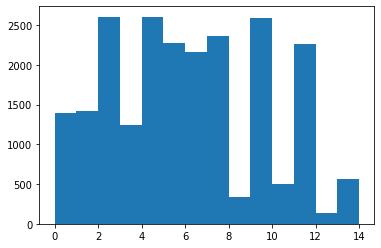

In [ ]:
plt.hist([x for x in list(partition_R.values())], bins=14)

In [ ]:
print(community.modularity(partition_R, G_R))

0.19323034888233792


In [ ]:
print(np.average(clCoeffs))
plt.hist(clCoeffs,bins=5)
plt.title("Clustering Coefficient Distribution Histogram")
plt.show()

In [ ]:
def get_node_color(degs):
  colors = []
  for deg in degs:
    if deg > 600:
      colors.append('yellow')
    elif deg > 400:
      colors.append('greenyellow')
    elif deg > 250:
      colors.append('cyan')
    elif deg > 200:
      colors.append('dodgerblue')
    elif deg > 100:
      colors.append('blueviolet')
    elif deg > 30:
      colors.append('forestgreen')
    else:
      colors.append('orange')
  return colors
custom_color = get_node_color(deg_def)
print(custom_color)

['orange', 'forestgreen', 'orange', 'orange', 'forestgreen', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'forestgreen', 'orange', 'orange', 'orange', 'forestgreen', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'forestgreen', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'forestgreen', 'orange', 'orange', 'orange', 'orange', 'forestgreen', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'forestgreen', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'forestgreen', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'forestgreen', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange',

In [ ]:
plt.figure(figsize=(100,100))
nx.draw(G, node_color=custom_color, node_size=[20*v for v in deg_def], linewidths=0.2, edge_color='lightgray')
plt.show()

In [ ]:
print(nx.average_shortest_path_length(G))

4.973703570580348


In [ ]:
print(nx.diameter(G))

15


In [ ]:
# Degree Correlation
# Measure degCorr by 
print(nx.degree_assortativity_coefficient(G))

0.08505802105736317


In [ ]:
G_res = G.copy()
# Louvain method
partition = community.best_partition(G)
print(partition)

{'0': 0, '18427': 0, '1': 1, '21708': 1, '22208': 1, '22171': 1, '6829': 1, '16590': 1, '20135': 1, '8894': 1, '15785': 1, '10281': 1, '22265': 2, '7136': 1, '22405': 1, '10379': 1, '13737': 1, '8533': 1, '14344': 1, '2812': 1, '5755': 1, '16260': 1, '15026': 1, '17370': 1, '17460': 1, '8049': 1, '5307': 1, '4987': 1, '18304': 3, '12305': 1, '19743': 1, '20024': 1, '21729': 1, '10554': 2, '11557': 4, '5228': 1, '9934': 1, '2': 5, '9048': 5, '6353': 5, '2629': 5, '11537': 5, '13205': 5, '22304': 5, '17728': 5, '19337': 5, '126': 5, '17554': 5, '8495': 5, '5857': 5, '3': 6, '16742': 7, '293': 6, '5826': 6, '3479': 6, '19753': 6, '17346': 6, '10945': 6, '22338': 6, '11319': 6, '9654': 6, '4': 8, '13645': 8, '20876': 8, '11446': 8, '16203': 8, '2830': 8, '2004': 8, '20624': 8, '21280': 8, '1182': 8, '21538': 8, '1443': 8, '11423': 8, '187': 8, '5730': 8, '2983': 8, '1489': 0, '6823': 8, '17695': 8, '11102': 8, '6390': 8, '17242': 8, '10018': 8, '5147': 8, '6427': 8, '14628': 8, '1882': 8, 

In [ ]:
partition = {'0': 0, '18427': 0, '1': 1, '21708': 1, '22208': 1, '22171': 1, '6829': 1, '16590': 1, '20135': 1, '8894': 1, '15785': 1, '10281': 1, '22265': 2, '7136': 1, '22405': 1, '10379': 1, '13737': 1, '8533': 1, '14344': 1, '2812': 1, '5755': 1, '16260': 1, '15026': 1, '17370': 1, '17460': 1, '8049': 1, '5307': 1, '4987': 1, '18304': 3, '12305': 1, '19743': 1, '20024': 1, '21729': 1, '10554': 2, '11557': 4, '5228': 1, '9934': 1, '2': 5, '9048': 5, '6353': 5, '2629': 5, '11537': 5, '13205': 5, '22304': 5, '17728': 5, '19337': 5, '126': 5, '17554': 5, '8495': 5, '5857': 5, '3': 6, '16742': 7, '293': 6, '5826': 6, '3479': 6, '19753': 6, '17346': 6, '10945': 6, '22338': 6, '11319': 6, '9654': 6, '4': 8, '13645': 8, '20876': 8, '11446': 8, '16203': 8, '2830': 8, '2004': 8, '20624': 8, '21280': 8, '1182': 8, '21538': 8, '1443': 8, '11423': 8, '187': 8, '5730': 8, '2983': 8, '1489': 0, '6823': 8, '17695': 8, '11102': 8, '6390': 8, '17242': 8, '10018': 8, '5147': 8, '6427': 8, '14628': 8, '1882': 8, '22401': 8, '16128': 8, '12872': 8, '9263': 8, '14155': 8, '21631': 8, '6329': 8, '17507': 8, '2282': 8, '9706': 8, '4738': 8, '3676': 8, '16972': 8, '5356': 8, '8514': 8, '14332': 8, '7212': 8, '8843': 8, '1879': 8, '1377': 8, '1997': 8, '7813': 8, '3891': 8, '2732': 8, '4109': 8, '5': 8, '8288': 8, '9206': 8, '1840': 8, '17845': 8, '17411': 8, '21768': 8, '15735': 8, '18468': 8, '21755': 8, '16406': 3, '14111': 8, '20510': 8, '945': 8, '20271': 8, '14862': 8, '3726': 8, '6946': 8, '12902': 8, '4808': 8, '14241': 8, '7106': 8, '18497': 8, '6': 9, '18893': 9, '1193': 9, '4000': 9, '12625': 7, '290': 9, '22261': 9, '13966': 9, '3300': 9, '22403': 9, '18782': 9, '5066': 9, '17038': 9, '3816': 7, '16052': 9, '12645': 9, '15644': 9, '7': 10, '3305': 10, '12361': 10, '18601': 10, '8': 11, '13872': 11, '14205': 11, '3975': 3, '9': 2, '2773': 2, '14497': 2, '10': 4, '14': 4, '11332': 4, '13511': 4, '11': 10, '20092': 10, '8106': 10, '12130': 10, '19489': 10, '12': 12, '4683': 12, '21430': 12, '18391': 12, '18059': 12, '6008': 12, '19356': 12, '13': 8, '22435': 8, '1744': 8, '395': 8, '16399': 8, '9001': 8, '2280': 8, '6113': 8, '7235': 8, '213': 8, '7431': 8, '501': 8, '11971': 8, '16282': 8, '11209': 8, '1494': 8, '12762': 8, '4253': 8, '2904': 4, '18062': 4, '6037': 4, '3848': 4, '11034': 4, '5458': 2, '15323': 4, '18512': 4, '5822': 4, '1041': 1, '14392': 4, '19837': 4, '20071': 4, '10622': 4, '9946': 4, '4328': 4, '8002': 2, '4502': 2, '21323': 4, '1187': 4, '8004': 4, '3695': 4, '17866': 4, '10418': 4, '14666': 4, '21157': 4, '10182': 4, '2075': 4, '14164': 4, '10109': 4, '2684': 4, '17325': 4, '10426': 2, '18216': 2, '16534': 4, '9745': 4, '1943': 4, '10641': 4, '20655': 4, '3128': 4, '9105': 4, '5994': 4, '7301': 4, '2327': 4, '11315': 4, '22020': 4, '8389': 2, '18858': 4, '5398': 4, '12017': 4, '16630': 4, '15': 13, '15507': 13, '353': 13, '18689': 13, '16': 14, '10134': 14, '17': 3, '1626': 3, '17433': 3, '2417': 3, '21059': 3, '18': 2, '9220': 2, '20276': 2, '11804': 2, '11323': 2, '9677': 2, '11644': 2, '3259': 2, '2224': 2, '8139': 2, '16615': 2, '961': 2, '8232': 2, '5943': 2, '17163': 2, '15174': 2, '11498': 2, '7966': 2, '20435': 2, '14597': 2, '2442': 2, '16071': 2, '10611': 2, '5622': 2, '1209': 2, '20938': 2, '3279': 2, '10468': 2, '15531': 2, '5046': 2, '12842': 2, '16524': 2, '14547': 2, '16895': 2, '9525': 2, '17984': 2, '19': 15, '330': 4, '9184': 15, '16420': 15, '1773': 15, '4048': 14, '18886': 16, '10681': 17, '701': 5, '4064': 16, '15172': 14, '18374': 1, '11003': 1, '20923': 18, '20': 19, '364': 19, '7427': 16, '1901': 4, '916': 16, '7502': 16, '6219': 16, '6173': 16, '19493': 16, '12609': 16, '18527': 16, '21787': 16, '4320': 16, '15425': 16, '17212': 16, '6980': 2, '21809': 16, '8038': 16, '8057': 16, '3342': 16, '2416': 16, '3821': 16, '15543': 16, '12169': 16, '10126': 16, '436': 4, '4045': 16, '6686': 16, '1063': 16, '10231': 16, '17357': 16, '6696': 16, '14249': 4, '347': 16, '9905': 16, '9151': 16, '5951': 16, '13530': 16, '1710': 16, '15188': 16, '4246': 16, '9104': 16, '9594': 16, '22': 15, '17818': 15, '4106': 15, '6540': 15, '14467': 15, '3964': 11, '10633': 15, '15690': 15, '21325': 15, '14179': 15, '15129': 15, '4670': 15, '4794': 15, '5215': 15, '7470': 15, '14027': 15, '19111': 15, '10959': 15, '11609': 15, '15868': 15, '10393': 15, '897': 15, '15368': 15, '7781': 15, '11816': 15, '21221': 15, '481': 10, '1189': 15, '11488': 15, '23': 0, '7082': 0, '6763': 0, '19678': 0, '6457': 0, '24': 8, '11345': 8, '6432': 8, '21035': 8, '21955': 20, '11196': 19, '7750': 19, '7216': 19, '26': 4, '18024': 4, '6290': 4, '22177': 4, '2509': 4, '10544': 4, '18368': 4, '17848': 4, '13602': 4, '14409': 4, '16994': 4, '19957': 4, '7139': 4, '12458': 4, '17354': 4, '8734': 4, '3270': 4, '7694': 4, '8763': 4, '3798': 4, '8788': 4, '8149': 4, '18153': 4, '4948': 4, '3779': 4, '6264': 4, '18949': 4, '14768': 4, '9235': 4, '18725': 4, '7460': 4, '27': 21, '5890': 21, '21247': 14, '9521': 21, '21785': 21, '3586': 21, '4857': 9, '11197': 14, '6272': 14, '17523': 8, '1308': 14, '21662': 14, '29': 10, '9500': 10, '3443': 10, '4754': 4, '14971': 10, '20829': 10, '11158': 4, '14840': 10, '20895': 10, '15807': 10, '17088': 10, '10972': 10, '15359': 10, '5160': 10, '4941': 10, '19643': 10, '30': 14, '17178': 14, '2838': 14, '17983': 1, '8584': 13, '16854': 14, '31': 13, '12972': 13, '13716': 13, '18727': 13, '21598': 13, '17090': 13, '13783': 13, '17350': 13, '12542': 13, '1722': 13, '5049': 13, '32': 22, '1703': 22, '16417': 22, '17252': 22, '19252': 22, '19222': 15, '18703': 22, '12869': 22, '10041': 22, '9839': 22, '9248': 1, '1783': 22, '4858': 22, '8531': 22, '22330': 22, '19574': 22, '7095': 22, '9986': 22, '14248': 22, '14790': 22, '8636': 23, '7347': 22, '10757': 22, '9849': 22, '5619': 24, '20280': 22, '7041': 22, '17833': 22, '6622': 22, '19700': 22, '8766': 22, '14832': 22, '120': 22, '20983': 15, '2157': 22, '13003': 22, '6083': 15, '4075': 22, '10496': 22, '1980': 22, '22467': 1, '19509': 22, '1024': 22, '14791': 22, '33': 17, '15191': 17, '22181': 17, '34': 25, '14106': 15, '14650': 25, '194': 1, '21683': 1, '16853': 1, '36': 14, '7360': 14, '21489': 14, '18754': 14, '1293': 24, '37': 4, '13886': 14, '17363': 4, '38': 11, '2124': 11, '21229': 10, '14944': 11, '1381': 11, '783': 11, '39': 4, '11260': 4, '18037': 4, '18217': 4, '4133': 1, '11916': 17, '19387': 4, '13130': 14, '14454': 4, '4225': 2, '1176': 20, '10670': 14, '18234': 14, '19271': 4, '3864': 4, '8977': 4, '21630': 4, '16885': 17, '40': 26, '20152': 26, '12062': 26, '10581': 26, '10497': 26, '19197': 26, '41': 23, '9484': 23, '16635': 23, '14796': 23, '14772': 23, '6095': 23, '1200': 23, '19010': 23, '4882': 23, '19667': 23, '922': 23, '13584': 23, '5097': 23, '21163': 23, '10621': 23, '18515': 23, '5739': 27, '8669': 23, '12067': 23, '19458': 23, '15413': 23, '11815': 23, '19307': 23, '45': 23, '42': 14, '13992': 14, '18030': 14, '16727': 14, '14804': 14, '909': 14, '8050': 14, '43': 2, '4163': 2, '4518': 2, '10503': 2, '10997': 4, '2422': 2, '1273': 2, '13418': 2, '19101': 2, '14109': 2, '1750': 2, '188': 2, '21626': 2, '13415': 2, '44': 28, '3103': 28, '4751': 28, '4401': 28, '9813': 28, '2532': 28, '1126': 28, '21324': 28, '4031': 28, '21274': 28, '5589': 28, '568': 28, '21681': 28, '19964': 28, '18235': 28, '839': 28, '16105': 28, '7288': 28, '13140': 28, '19621': 28, '19127': 28, '4077': 28, '14703': 28, '1618': 28, '20168': 28, '13408': 28, '11248': 28, '12025': 28, '7919': 28, '12745': 28, '5525': 28, '6398': 28, '20516': 28, '9567': 28, '4527': 28, '2160': 28, '20037': 28, '18167': 28, '20889': 28, '9996': 28, '6706': 28, '4917': 28, '11850': 28, '11473': 28, '17591': 28, '5165': 28, '13074': 28, '8062': 28, '3074': 28, '18638': 28, '7978': 28, '3981': 28, '18539': 28, '18624': 28, '1517': 28, '21087': 28, '5010': 28, '5317': 28, '8795': 28, '7606': 28, '7887': 10, '15604': 23, '11022': 10, '5337': 23, '1713': 14, '16993': 10, '21536': 23, '46': 10, '16127': 10, '3494': 10, '3963': 10, '2252': 10, '16368': 10, '5878': 10, '15553': 10, '365': 10, '47': 9, '1125': 4, '5207': 9, '22277': 9, '630': 21, '1503': 19, '19436': 9, '9275': 4, '12516': 9, '3409': 9, '19731': 7, '16155': 9, '48': 10, '16879': 10, '5541': 10, '14228': 14, '6206': 14, '49': 20, '2599': 10, '7734': 21, '655': 20, '4809': 14, '8911': 20, '7799': 20, '9256': 20, '14076': 20, '13608': 20, '7837': 10, '6674': 20, '14868': 20, '8535': 20, '19014': 10, '7553': 20, '1274': 20, '17284': 20, '10512': 20, '13853': 20, '12285': 20, '280': 20, '19626': 20, '10210': 20, '20216': 10, '7735': 4, '5362': 20, '5500': 20, '21105': 20, '50': 4, '197': 4, '8606': 4, '14031': 4, '12993': 4, '9379': 4, '19388': 4, '5280': 4, '13576': 4, '20153': 4, '3530': 4, '17694': 4, '15969': 4, '7320': 4, '10707': 4, '9240': 4, '14213': 4, '6441': 2, '52': 5, '13463': 5, '12715': 5, '11878': 5, '6333': 5, '14080': 5, '5972': 5, '12546': 5, '10857': 5, '17291': 5, '10100': 5, '7206': 5, '53': 29, '21072': 29, '54': 13, '13755': 13, '14402': 13, '12462': 13, '19426': 13, '14260': 13, '55': 24, '12472': 24, '10980': 24, '9578': 24, '15384': 24, '15839': 24, '21270': 16, '2316': 24, '2348': 24, '14350': 24, '8348': 25, '22352': 25, '22149': 24, '15121': 24, '21544': 25, '10626': 24, '21937': 24, '19001': 24, '56': 4, '16887': 4, '9872': 10, '496': 4, '9642': 4, '4779': 4, '13197': 4, '18853': 4, '6096': 4, '5057': 4, '1339': 4, '3935': 4, '20781': 4, '1635': 4, '18970': 4, '723': 4, '4305': 4, '7951': 4, '20538': 4, '57': 14, '10895': 14, '2117': 14, '4656': 4, '10816': 14, '18442': 14, '6023': 14, '20543': 14, '12204': 14, '5561': 14, '6213': 14, '15940': 14, '5400': 14, '9882': 14, '16561': 14, '15071': 4, '59': 17, '5353': 17, '13048': 17, '18152': 17, '60': 9, '21713': 30, '11140': 9, '17860': 9, '11611': 9, '4425': 9, '6886': 9, '5777': 9, '61': 20, '22276': 20, '12379': 20, '21732': 20, '12684': 20, '8357': 20, '7200': 20, '11028': 20, '18377': 31, '16332': 14, '7316': 20, '5126': 20, '17731': 20, '5492': 20, '17491': 20, '1922': 20, '11728': 20, '11888': 20, '5603': 20, '15088': 14, '21896': 20, '3076': 20, '4909': 20, '16700': 20, '15904': 20, '18569': 20, '5074': 20, '6488': 20, '12572': 20, '13627': 20, '6130': 20, '13117': 20, '16797': 20, '4739': 20, '1769': 20, '12410': 5, '3273': 20, '5523': 20, '8455': 20, '12627': 20, '10518': 20, '20103': 20, '18502': 20, '1521': 20, '9364': 20, '13462': 20, '12846': 20, '15433': 20, '20795': 20, '21751': 20, '2857': 20, '20105': 20, '3148': 20, '18693': 20, '1544': 20, '9559': 20, '17289': 20, '348': 20, '21951': 8, '8671': 20, '9921': 20, '22236': 20, '9880': 20, '16482': 20, '3213': 20, '18881': 20, '19157': 20, '21594': 20, '13238': 20, '4079': 20, '16400': 20, '8501': 20, '11788': 20, '11001': 20, '4601': 5, '12556': 20, '11809': 20, '8968': 20, '13339': 20, '4604': 20, '5220': 20, '1728': 20, '11667': 20, '3930': 20, '8698': 20, '3215': 20, '9417': 20, '15751': 20, '19367': 20, '7839': 20, '785': 20, '21781': 20, '62': 23, '21172': 23, '3026': 23, '63': 8, '6511': 8, '21097': 8, '8677': 30, '20924': 30, '9759': 30, '18289': 30, '4190': 30, '21055': 30, '20257': 30, '6041': 30, '9850': 30, '12831': 30, '7108': 30, '6720': 30, '22230': 30, '326': 30, '20879': 30, '8837': 30, '21917': 30, '3094': 30, '15749': 30, '10439': 30, '16291': 30, '22052': 30, '17247': 30, '20029': 30, '19654': 30, '22166': 30, '65': 14, '19598': 14, '872': 14, '789': 14, '11230': 4, '8245': 14, '3047': 14, '13244': 14, '17566': 14, '17392': 14, '9940': 1, '66': 21, '9858': 14, '21572': 10, '15718': 21, '8458': 21, '1679': 21, '2216': 14, '4846': 21, '9382': 21, '3987': 10, '12677': 14, '67': 8, '18992': 8, '16676': 8, '791': 8, '18919': 8, '10932': 8, '68': 6, '366': 6, '20113': 6, '10922': 6, '16502': 6, '19635': 6, '69': 7, '526': 7, '20012': 7, '4186': 7, '12031': 7, '13610': 7, '19031': 7, '959': 7, '21687': 7, '70': 18, '14551': 18, '16034': 18, '20582': 18, '18911': 18, '21366': 18, '3663': 18, '19504': 18, '7029': 18, '4693': 18, '20076': 18, '12830': 18, '9282': 18, '9710': 18, '7595': 18, '18475': 18, '10152': 18, '19854': 18, '924': 18, '71': 24, '4677': 24, '72': 11, '15319': 11, '17641': 11, '10372': 9, '6728': 11, '13015': 11, '10701': 4, '16552': 11, '18016': 11, '11460': 11, '11817': 11, '73': 25, '239': 25, '580': 24, '20617': 25, '1621': 25, '10904': 25, '19203': 25, '6050': 25, '74': 32, '20744': 15, '6337': 32, '2359': 32, '16299': 32, '12007': 32, '10436': 32, '12437': 32, '18827': 32, '19474': 32, '18440': 32, '16721': 32, '17307': 32, '17922': 32, '6348': 32, '15213': 15, '9039': 32, '6844': 32, '15502': 32, '6920': 32, '4630': 32, '8452': 32, '3731': 32, '3487': 32, '1327': 32, '8523': 32, '75': 2, '14659': 2, '19027': 2, '8014': 2, '11244': 2, '14854': 13, '17877': 13, '2725': 13, '2648': 13, '4903': 13, '77': 15, '9603': 15, '16960': 15, '8482': 2, '9197': 15, '22229': 15, '20555': 15, '6552': 15, '21512': 15, '8874': 15, '20888': 15, '10241': 15, '13294': 15, '9176': 15, '21120': 15, '12151': 15, '12911': 15, '3469': 15, '10783': 15, '1597': 15, '2474': 15, '2270': 15, '16618': 15, '19000': 15, '8972': 15, '15684': 15, '7768': 15, '12633': 15, '21211': 15, '78': 21, '16809': 21, '79': 28, '11173': 28, '12514': 28, '19026': 28, '410': 28, '13675': 28, '10974': 28, '7228': 28, '20335': 28, '80': 32, '17170': 32, '11904': 32, '8426': 32, '16636': 32, '17500': 32, '12568': 32, '81': 22, '6766': 22, '13464': 15, '13157': 22, '17253': 22, '13600': 22, '6588': 22, '17300': 15, '486': 22, '4235': 22, '16303': 22, '5188': 22, '8483': 22, '5778': 22, '13400': 22, '8852': 22, '3199': 22, '12190': 22, '20927': 22, '7967': 22, '16761': 22, '21344': 22, '3204': 22, '14577': 22, '2232': 22, '10444': 22, '5029': 15, '7499': 22, '626': 22, '17536': 22, '21178': 22, '15394': 22, '5823': 22, '11643': 22, '22245': 22, '18075': 22, '7295': 22, '5713': 22, '13582': 22, '3781': 22, '17897': 22, '14809': 22, '6335': 22, '12672': 22, '12095': 22, '13550': 22, '14998': 22, '82': 8, '7422': 8, '1142': 8, '3559': 8, '18002': 8, '17914': 8, '83': 21, '16490': 21, '18859': 21, '10642': 21, '3553': 21, '5937': 21, '21048': 21, '7068': 21, '5617': 21, '16688': 8, '15090': 2, '85': 1, '17912': 1, '19729': 1, '13899': 1, '19081': 33, '9982': 1, '21327': 1, '1586': 2, '4093': 1, '86': 14, '15845': 14, '17269': 14, '16026': 14, '7184': 14, '12809': 14, '1129': 14, '6575': 14, '87': 9, '2409': 9, '13525': 9, '88': 1, '7550': 1, '11657': 1, '16988': 15, '10308': 24, '18015': 4, '5587': 2, '13958': 2, '13264': 1, '8243': 1, '19476': 1, '840': 1, '18971': 1, '14181': 1, '19870': 2, '14272': 1, '7535': 1, '12500': 1, '1047': 1, '14115': 1, '16648': 2, '679': 2, '20653': 2, '10066': 1, '7961': 2, '19795': 1, '16968': 1, '16520': 1, '8519': 1, '19992': 2, '16186': 2, '1271': 2, '14166': 1, '16977': 2, '20827': 2, '12175': 2, '7467': 2, '21088': 1, '89': 30, '6455': 30, '11531': 30, '17441': 30, '4769': 30, '543': 30, '90': 4, '11341': 2, '14154': 4, '20433': 2, '3735': 2, '6057': 4, '5919': 4, '15110': 2, '6171': 4, '19347': 4, '11203': 4, '5716': 1, '19941': 4, '15236': 2, '11007': 4, '6347': 4, '19135': 4, '9113': 4, '4453': 4, '9319': 2, '8025': 4, '16560': 4, '4499': 4, '8883': 2, '17988': 4, '18906': 4, '20909': 4, '1123': 2, '91': 14, '12670': 14, '5557': 14, '5410': 14, '16270': 14, '1660': 14, '20466': 14, '13723': 14, '14701': 14, '17343': 14, '16622': 14, '92': 10, '1225': 10, '7797': 10, '10155': 10, '18396': 10, '15986': 10, '7487': 10, '7437': 29, '9978': 14, '3420': 10, '12650': 21, '14653': 29, '12240': 29, '10264': 10, '12845': 14, '18698': 21, '19491': 29, '93': 10, '6709': 10, '5227': 10, '94': 1, '767': 2, '21573': 4, '12896': 4, '6409': 1, '1372': 4, '5212': 4, '21985': 1, '6916': 1, '18825': 1, '16032': 1, '17391': 1, '21588': 4, '95': 34, '1357': 34, '4232': 34, '4755': 34, '4188': 34, '13173': 34, '7196': 34, '9330': 34, '6566': 34, '1181': 34, '13049': 34, '20706': 34, '9869': 34, '17804': 34, '16514': 34, '3290': 34, '10760': 34, '17620': 34, '22042': 34, '8169': 34, '18976': 34, '10953': 34, '19881': 34, '6781': 34, '20027': 34, '6556': 34, '12513': 34, '4084': 34, '1401': 34, '6395': 34, '9566': 34, '16322': 34, '4423': 34, '20636': 34, '20478': 34, '16835': 34, '20521': 34, '19602': 34, '3253': 34, '8239': 34, '11480': 34, '10579': 34, '22317': 34, '17635': 34, '11560': 34, '2922': 34, '8607': 34, '9045': 34, '1689': 34, '96': 14, '18418': 14, '14325': 14, '20388': 14, '13435': 14, '8500': 1, '2539': 14, '97': 8, '7076': 8, '13261': 8, '18356': 8, '16975': 8, '98': 9, '18123': 9, '1282': 9, '15567': 9, '1283': 9, '17667': 9, '6091': 9, '17229': 9, '18187': 9, '16290': 8, '3154': 9, '10779': 9, '729': 9, '9284': 2, '6536': 2, '21226': 9, '17128': 9, '20592': 9, '2455': 9, '10657': 9, '22374': 4, '3502': 4, '5808': 15, '2096': 1, '6470': 4, '927': 2, '20067': 2, '10614': 1, '18432': 2, '5382': 4, '14192': 1, '13445': 1, '6481': 4, '12740': 2, '3073': 2, '21013': 4, '16741': 4, '2856': 17, '9784': 4, '13821': 4, '6993': 4, '20951': 2, '5748': 4, '21212': 2, '11177': 17, '6116': 4, '12459': 4, '17299': 4, '14802': 4, '20047': 2, '17148': 2, '4786': 4, '11957': 17, '19553': 2, '12452': 4, '517': 2, '3491': 4, '99': 24, '3741': 25, '17340': 24, '2466': 24, '3791': 24, '17056': 24, '13175': 24, '11469': 24, '4563': 24, '4653': 24, '7365': 24, '2051': 24, '3221': 24, '14308': 24, '1789': 24, '9164': 24, '9843': 24, '17169': 24, '20337': 24, '20778': 24, '8574': 24, '21307': 24, '8663': 24, '9777': 24, '5045': 24, '216': 24, '18819': 24, '18369': 24, '20415': 25, '100': 19, '11266': 19, '15008': 19, '4420': 19, '3705': 19, '8807': 19, '17321': 19, '20462': 19, '21338': 19, '101': 28, '787': 28, '20162': 28, '19525': 28, '3852': 28, '25': 21, '8803': 8, '3241': 28, '21236': 28, '10849': 2, '9034': 28, '2966': 0, '11329': 28, '13922': 28, '5858': 28, '4118': 28, '12774': 28, '18869': 28, '11375': 28, '10805': 14, '17738': 14, '14090': 14, '9641': 28, '12837': 21, '15449': 21, '12759': 10, '5082': 28, '15416': 28, '7355': 28, '1558': 28, '20083': 14, '11137': 28, '102': 0, '1766': 0, '18473': 0, '21891': 0, '7221': 0, '15097': 0, '7104': 0, '17882': 0, '15055': 14, '2153': 0, '8842': 0, '17588': 35, '10539': 0, '103': 26, '20990': 26, '1136': 26, '4076': 26, '3291': 26, '4526': 26, '11310': 26, '16191': 26, '827': 26, '10174': 26, '8630': 26, '2869': 26, '20045': 26, '12589': 26, '20820': 26, '17920': 26, '104': 13, '10057': 13, '589': 13, '6612': 13, '19115': 13, '10095': 13, '4323': 13, '5570': 13, '6358': 13, '15150': 13, '20756': 13, '10731': 13, '10458': 13, '9574': 13, '20261': 13, '16625': 13, '21527': 13, '22134': 13, '3956': 13, '19677': 13, '12027': 13, '15103': 13, '105': 9, '5548': 9, '10632': 9, '11880': 31, '21165': 9, '18953': 21, '12429': 9, '1640': 9, '11655': 21, '106': 8, '13551': 8, '6764': 8, '8985': 8, '13776': 8, '1602': 8, '13053': 8, '2882': 8, '19702': 8, '22173': 8, '5785': 8, '12965': 8, '7867': 8, '19050': 8, '14822': 8, '15385': 8, '12038': 8, '16112': 8, '16779': 8, '3838': 8, '8910': 8, '14340': 8, '4419': 8, '11507': 8, '4211': 8, '7602': 8, '12512': 8, '7503': 8, '16181': 8, '6914': 8, '8712': 8, '14591': 8, '2208': 8, '3138': 8, '17065': 8, '17740': 8, '18260': 8, '4967': 8, '10978': 8, '9144': 8, '8395': 8, '20049': 8, '8434': 8, '20488': 8, '107': 20, '467': 20, '108': 1, '469': 1, '20316': 1, '109': 15, '3238': 15, '20107': 15, '4830': 15, '10969': 15, '14575': 15, '20380': 15, '14539': 15, '16749': 15, '9661': 15, '511': 15, '19470': 15, '7618': 15, '6233': 15, '5735': 15, '5987': 15, '9987': 15, '3192': 15, '14170': 15, '21022': 15, '13073': 15, '3397': 15, '21102': 15, '17881': 15, '3287': 15, '3863': 15, '15240': 15, '6193': 15, '21931': 15, '20594': 15, '110': 32, '9239': 32, '13194': 32, '18560': 32, '12521': 5, '18565': 32, '15408': 32, '8509': 32, '16205': 5, '111': 14, '1302': 14, '9254': 14, '112': 1, '15313': 1, '113': 8, '18006': 8, '15107': 8, '16072': 8, '14516': 8, '6603': 8, '19567': 8, '13134': 8, '18100': 8, '6244': 8, '13537': 8, '9531': 8, '4152': 8, '6940': 8, '21144': 8, '21272': 8, '10843': 8, '16337': 8, '20314': 8, '16992': 8, '2902': 8, '4907': 8, '17079': 8, '11379': 8, '6318': 8, '5844': 8, '12160': 8, '5799': 8, '10072': 8, '20862': 8, '11424': 8, '20826': 8, '7812': 8, '6621': 8, '6491': 8, '19735': 8, '21497': 8, '4099': 8, '2959': 8, '3932': 8, '4300': 21, '19133': 8, '3870': 8, '114': 19, '3563': 19, '10368': 19, '11228': 19, '18012': 19, '1705': 15, '3622': 19, '8637': 19, '20525': 19, '115': 14, '8785': 14, '10570': 14, '12303': 14, '17624': 14, '4221': 14, '15339': 14, '116': 13, '3807': 13, '9600': 13, '3052': 13, '7179': 13, '18789': 13, '117': 14, '21767': 14, '22282': 1, '3636': 1, '11187': 1, '1658': 1, '19540': 1, '13239': 1, '10347': 1, '5339': 1, '1877': 1, '16823': 1, '6181': 1, '16813': 1, '119': 0, '14266': 0, '4212': 0, '11718': 0, '12794': 0, '11229': 2, '4633': 2, '12936': 2, '7749': 2, '7005': 22, '3902': 22, '121': 4, '8086': 4, '15280': 4, '16098': 4, '3628': 4, '8098': 4, '7411': 4, '13234': 4, '10285': 4, '15643': 4, '123': 1, '375': 1, '130': 1, '10617': 1, '19483': 1, '14562': 1, '14245': 1, '343': 1, '2496': 1, '21663': 1, '20844': 1, '8540': 1, '13719': 1, '22316': 21, '6189': 1, '2822': 1, '19093': 1, '8473': 2, '17296': 1, '17426': 1, '14895': 1, '124': 14, '9415': 14, '15262': 14, '5784': 23, '16850': 22, '22272': 14, '16812': 14, '17827': 14, '14331': 14, '5690': 14, '125': 14, '19856': 14, '14792': 14, '11147': 14, '8566': 14, '21963': 14, '1533': 5, '21064': 5, '12401': 5, '21888': 5, '21275': 5, '15378': 5, '11829': 5, '20207': 14, '19969': 5, '5624': 5, '13233': 5, '17318': 5, '127': 2, '4440': 2, '18545': 4, '11449': 2, '11273': 2, '10749': 2, '17384': 2, '917': 2, '8631': 4, '356': 16, '5896': 2, '18966': 2, '14561': 2, '3995': 14, '14777': 2, '9287': 17, '405': 2, '15159': 2, '7412': 2, '3521': 4, '9126': 14, '11634': 2, '3911': 2, '2311': 2, '21569': 2, '17726': 2, '4337': 4, '8754': 4, '11892': 14, '6140': 2, '20892': 2, '5918': 2, '3896': 16, '770': 2, '18262': 2, '3892': 2, '1639': 2, '2572': 4, '12247': 2, '4516': 2, '12283': 2, '3757': 2, '12464': 2, '15283': 2, '7848': 14, '3496': 14, '13428': 2, '17464': 4, '13915': 2, '128': 14, '10166': 14, '682': 14, '4930': 14, '2119': 14, '10234': 14, '8396': 14, '6811': 14, '9928': 14, '2833': 14, '8613': 14, '21828': 14, '13984': 14, '12145': 14, '7969': 14, '2080': 14, '1156': 14, '13423': 14, '9936': 14, '641': 14, '11785': 14, '672': 14, '7452': 14, '4476': 14, '19129': 14, '142': 14, '9602': 14, '129': 17, '22359': 17, '13515': 17, '1035': 17, '9174': 17, '10256': 17, '10257': 17, '13112': 17, '12321': 17, '8557': 4, '18424': 4, '19640': 17, '12853': 17, '22283': 17, '3996': 2, '1860': 17, '14908': 4, '10224': 17, '4357': 12, '12982': 10, '9367': 1, '4147': 1, '10912': 1, '11467': 1, '18288': 1, '9053': 1, '2565': 1, '18714': 15, '1617': 1, '3797': 1, '18721': 1, '18744': 1, '7066': 1, '131': 14, '7162': 14, '306': 17, '21255': 14, '132': 8, '11212': 8, '19013': 14, '264': 14, '10890': 8, '133': 4, '7026': 2, '6045': 2, '715': 2, '14685': 4, '11761': 14, '9074': 2, '5325': 4, '19757': 4, '1087': 4, '6107': 4, '17692': 2, '17697': 4, '17791': 2, '14403': 4, '1979': 4, '21033': 2, '22443': 4, '9632': 17, '1053': 2, '17099': 4, '3432': 2, '11894': 4, '17231': 4, '6137': 4, '9389': 4, '19432': 4, '21356': 4, '19289': 4, '8790': 2, '10926': 1, '5093': 2, '3229': 4, '15012': 4, '134': 14, '11984': 14, '555': 14, '11500': 14, '17254': 14, '15616': 14, '21214': 14, '16664': 14, '22124': 14, '18408': 14, '13893': 14, '12977': 14, '8555': 14, '12628': 14, '18708': 14, '13764': 14, '20254': 14, '2144': 14, '18495': 4, '16709': 14, '828': 21, '7552': 21, '8641': 21, '11890': 14, '16733': 21, '136': 9, '5187': 9, '3533': 9, '10511': 9, '2170': 9, '1964': 9, '7165': 9, '14864': 36, '4141': 36, '160': 36, '13439': 36, '170': 36, '18717': 36, '370': 36, '9021': 36, '18917': 10, '9620': 36, '386': 36, '138': 24, '3990': 24, '4758': 24, '14017': 24, '6291': 24, '6542': 24, '11043': 1, '1962': 24, '12064': 15, '6413': 24, '5439': 24, '5158': 24, '51': 24, '20182': 24, '19732': 24, '11181': 24, '16362': 24, '554': 1, '7350': 24, '5448': 1, '18021': 24, '11712': 15, '12777': 24, '13639': 24, '10292': 24, '968': 24, '15187': 24, '10387': 24, '21066': 15, '21586': 24, '8377': 15, '17837': 24, '139': 20, '2053': 20, '17255': 20, '602': 20, '140': 14, '1011': 10, '5948': 14, '19447': 14, '141': 14, '5035': 14, '21301': 14, '3576': 14, '9938': 14, '1211': 14, '15505': 14, '233': 14, '19020': 14, '19495': 14, '8439': 14, '3449': 14, '16754': 14, '4296': 14, '13798': 14, '143': 2, '19777': 2, '16470': 2, '10261': 2, '144': 0, '10661': 0, '13714': 0, '14267': 0, '21392': 0, '8840': 0, '145': 24, '7646': 24, '12928': 24, '2754': 24, '21375': 2, '10443': 24, '15947': 24, '12742': 24, '15321': 24, '15399': 24, '4687': 24, '2612': 24, '14503': 24, '3465': 24, '146': 25, '17110': 25, '18022': 25, '147': 1, '16564': 1, '3641': 1, '2972': 1, '3262': 1, '11942': 1, '148': 16, '12654': 16, '11846': 16, '7833': 16, '10047': 16, '6562': 16, '3066': 16, '21671': 16, '14981': 16, '149': 10, '10475': 10, '4132': 10, '12601': 10, '19748': 10, '248': 10, '150': 4, '20758': 4, '14495': 14, '14356': 4, '13426': 2, '14377': 1, '15468': 1, '17622': 4, '14829': 4, '9893': 4, '3573': 4, '151': 7, '10499': 7, '19946': 7, '19038': 7, '4887': 7, '3212': 7, '3766': 7, '10540': 7, '152': 9, '8529': 9, '16574': 1, '5156': 9, '5719': 14, '6298': 9, '22428': 9, '15674': 9, '11686': 9, '8936': 21, '153': 24, '19372': 25, '18921': 24, '3906': 24, '4172': 24, '20542': 25, '2689': 24, '154': 9, '15215': 9, '1054': 14, '3457': 9, '6659': 9, '7447': 0, '3214': 0, '20269': 0, '16543': 0, '6553': 0, '9619': 0, '8655': 0, '10088': 0, '652': 0, '17102': 0, '21774': 0, '156': 24, '10976': 24, '9652': 24, '6466': 24, '22237': 24, '21206': 24, '16001': 24, '7091': 24, '11719': 24, '13098': 15, '8335': 24, '5122': 24, '157': 4, '11213': 4, '19492': 4, '5183': 4, '15223': 4, '14900': 4, '7164': 4, '21254': 4, '11280': 4, '15114': 4, '13875': 4, '1827': 4, '16408': 4, '21213': 4, '10947': 4, '5695': 4, '3630': 4, '11389': 4, '13297': 4, '12332': 4, '8367': 4, '20632': 4, '19889': 4, '5518': 4, '10578': 4, '1701': 4, '20291': 4, '965': 14, '20217': 9, '12790': 14, '159': 2, '18777': 2, '4399': 2, '4461': 2, '14996': 2, '8869': 2, '6806': 2, '5694': 14, '19573': 2, '3584': 2, '983': 2, '10799': 2, '12408': 2, '12088': 2, '9294': 2, '2981': 2, '9125': 2, '18645': 2, '7325': 2, '16073': 2, '21740': 2, '10789': 2, '11289': 2, '11538': 2, '14045': 2, '15773': 2, '18208': 14, '18168': 2, '17080': 36, '6775': 36, '161': 6, '13616': 6, '162': 3, '325': 3, '18079': 3, '20458': 3, '163': 15, '822': 15, '7968': 15, '8392': 15, '18872': 15, '164': 22, '421': 22, '971': 22, '349': 20, '1551': 22, '13800': 22, '19148': 22, '20188': 23, '165': 24, '9973': 24, '10905': 9, '2271': 24, '10803': 24, '19973': 24, '3492': 24, '12375': 24, '7755': 24, '9729': 24, '13263': 24, '8054': 24, '14648': 24, '13101': 24, '17480': 24, '3131': 24, '3174': 24, '16868': 24, '21635': 24, '7663': 24, '21605': 24, '166': 11, '18121': 11, '5538': 11, '21676': 11, '1019': 14, '7571': 27, '7025': 14, '14596': 14, '18416': 14, '168': 37, '2703': 37, '17765': 37, '15774': 37, '169': 10, '5908': 10, '20481': 10, '7488': 10, '171': 2, '20937': 8, '7258': 19, '14174': 2, '8302': 21, '172': 14, '3690': 14, '173': 15, '1169': 15, '710': 15, '1817': 15, '5632': 15, '15151': 15, '7364': 15, '12851': 15, '8572': 15, '22080': 15, '20342': 15, '17386': 15, '17216': 30, '15647': 30, '6677': 15, '19594': 30, '12495': 30, '6719': 15, '18105': 15, '22438': 15, '14400': 21, '1094': 8, '21764': 15, '1078': 15, '12450': 15, '17540': 19, '15763': 15, '19380': 30, '5255': 30, '8819': 15, '7383': 15, '2242': 15, '9160': 15, '12461': 15, '18974': 15, '7015': 15, '6802': 15, '11734': 15, '17598': 15, '13382': 15, '18577': 15, '18856': 15, '8932': 15, '522': 15, '174': 14, '14626': 14, '4629': 14, '11539': 14, '18504': 14, '18405': 14, '175': 13, '8432': 13, '9695': 13, '9428': 13, '4989': 13, '176': 13, '7308': 13, '7093': 13, '6420': 13, '15586': 13, '9990': 13, '14521': 13, '8249': 13, '3694': 13, '20068': 13, '9301': 13, '6820': 13, '16641': 13, '13657': 13, '17130': 13, '15867': 13, '2449': 13, '10481': 13, '13698': 13, '8941': 13, '8537': 13, '2625': 13, '13102': 13, '9471': 13, '6230': 13, '1978': 13, '4382': 13, '20031': 13, '10639': 13, '8498': 13, '21946': 13, '6203': 13, '13756': 13, '1627': 13, '1101': 13, '8827': 13, '7642': 13, '10469': 13, '15046': 13, '16796': 13, '14218': 13, '17190': 13, '894': 13, '15005': 13, '16892': 13, '12092': 13, '3934': 13, '1985': 13, '5629': 13, '9060': 13, '16529': 13, '177': 9, '3928': 9, '19288': 20, '8544': 9, '178': 4, '12153': 4, '14787': 21, '9063': 21, '11312': 14, '12315': 4, '5351': 24, '7657': 21, '179': 14, '4067': 14, '2595': 14, '11920': 14, '12930': 35, '13359': 14, '180': 21, '3032': 21, '2434': 21, '17358': 21, '5332': 21, '18488': 21, '4256': 21, '4472': 21, '13779': 21, '18944': 21, '6502': 21, '14910': 21, '14187': 21, '5596': 21, '181': 1, '21328': 1, '10102': 1, '2927': 1, '17416': 1, '182': 8, '3062': 8, '16193': 8, '1912': 8, '6633': 8, '20210': 8, '17377': 8, '9496': 8, '7789': 8, '12987': 8, '19588': 8, '183': 38, '22010': 38, '9684': 38, '5460': 38, '6866': 38, '5663': 38, '300': 38, '12829': 38, '15195': 38, '11794': 38, '5639': 38, '14173': 38, '3150': 38, '21756': 38, '184': 10, '18112': 10, '9003': 10, '21661': 10, '7584': 15, '185': 14, '1886': 14, '17126': 14, '12078': 14, '11536': 14, '19264': 14, '1148': 14, '7880': 14, '11494': 14, '17476': 14, '18115': 14, '2554': 14, '4879': 14, '16864': 14, '186': 26, '1168': 26, '15929': 26, '19933': 26, '5983': 26, '7375': 26, '19279': 26, '17412': 26, '4824': 26, '14942': 26, '16065': 26, '18804': 26, '5801': 26, '9877': 26, '9558': 26, '13656': 26, '14147': 26, '13142': 26, '19037': 26, '19457': 26, '2917': 26, '9268': 26, '21668': 26, '19370': 26, '17151': 26, '3915': 26, '11874': 26, '20396': 26, '22380': 26, '18090': 8, '17639': 8, '14264': 8, '6474': 8, '5231': 8, '10860': 8, '8372': 8, '10562': 8, '17121': 8, '5237': 8, '8204': 8, '12300': 8, '1691': 8, '11453': 8, '3775': 8, '6207': 8, '3423': 8, '11036': 8, '19803': 8, '16608': 8, '13368': 8, '4910': 8, '18155': 25, '811': 8, '13538': 8, '6320': 8, '4995': 8, '2999': 8, '11324': 8, '16277': 8, '12593': 8, '17509': 4, '3732': 8, '12252': 8, '2378': 8, '3813': 8, '7983': 8, '3403': 8, '17516': 8, '19564': 8, '11842': 8, '2488': 8, '15808': 8, '6933': 8, '17069': 8, '18393': 8, '12806': 8, '4874': 8, '22029': 8, '4963': 8, '5577': 8, '7374': 8, '11408': 8, '1531': 8, '8687': 8, '2058': 8, '19119': 8, '5942': 8, '19368': 8, '22445': 8, '20785': 8, '8417': 8, '20837': 8, '5848': 8, '12457': 8, '20281': 8, '5923': 8, '3223': 8, '21771': 8, '14760': 8, '21840': 8, '7473': 8, '10648': 8, '9512': 8, '15957': 8, '8216': 2, '17172': 2, '3771': 20, '11174': 20, '190': 39, '8708': 10, '8670': 39, '3490': 39, '6624': 39, '18177': 39, '191': 9, '18483': 9, '10865': 9, '14136': 9, '1483': 9, '3993': 9, '3769': 9, '12140': 9, '16814': 9, '1834': 9, '16016': 9, '6550': 9, '20522': 9, '6528': 9, '13750': 9, '4072': 9, '14483': 9, '10351': 9, '302': 9, '7090': 9, '9596': 9, '8621': 9, '4262': 9, '2089': 9, '18201': 7, '4319': 9, '18353': 9, '14118': 9, '192': 1, '19631': 1, '193': 9, '1370': 9, '6115': 14, '14383': 9, '35': 14, '21424': 14, '8957': 14, '19901': 14, '2686': 14, '7087': 14, '7898': 14, '195': 23, '18087': 23, '18097': 23, '4393': 23, '14259': 23, '196': 19, '21674': 19, '7362': 19, '2405': 19, '1960': 19, '5562': 19, '659': 19, '5580': 19, '16153': 19, '11166': 19, '12039': 19, '15506': 19, '8691': 19, '4071': 19, '19767': 19, '20444': 19, '22041': 19, '10553': 19, '13478': 19, '3678': 19, '20699': 19, '478': 19, '13929': 19, '18126': 19, '5496': 19, '12183': 19, '16028': 19, '3451': 19, '2644': 19, '18701': 19, '9731': 19, '4483': 19, '6608': 19, '21784': 14, '11721': 14, '12135': 4, '5938': 4, '14875': 4, '11363': 4, '16778': 4, '14341': 4, '1025': 4, '10702': 4, '20252': 2, '614': 2, '2186': 4, '7083': 4, '1914': 4, '12665': 4, '13441': 4, '8905': 1, '1683': 4, '21895': 4, '22008': 4, '9972': 4, '17940': 4, '3867': 4, '17051': 4, '13106': 4, '2583': 4, '20173': 4, '13709': 4, '5019': 4, '2461': 4, '2078': 4, '5931': 4, '10781': 4, '12598': 4, '12621': 4, '5451': 2, '9356': 4, '21820': 1, '6750': 4, '12714': 4, '1068': 4, '6175': 4, '5361': 4, '18677': 4, '18963': 4, '20156': 4, '1330': 4, '9910': 4, '4873': 17, '11401': 2, '11231': 30, '9117': 4, '9636': 4, '18913': 4, '21838': 2, '17780': 4, '17221': 17, '15721': 4, '16746': 2, '19137': 4, '7453': 4, '11336': 4, '5843': 1, '6551': 4, '3382': 4, '16869': 4, '16220': 4, '12899': 4, '14661': 4, '15481': 1, '13476': 4, '12269': 4, '6473': 4, '338': 4, '10364': 14, '4112': 4, '20559': 4, '18734': 4, '2991': 4, '11430': 4, '863': 10, '18454': 4, '17197': 4, '18810': 17, '21385': 4, '14842': 4, '10208': 4, '198': 16, '14041': 16, '6031': 16, '10249': 16, '11921': 16, '16693': 16, '759': 16, '2365': 16, '199': 8, '6667': 8, '21821': 8, '16844': 8, '2169': 8, '14202': 8, '5153': 8, '680': 8, '15917': 8, '200': 1, '15576': 1, '12210': 4, '15703': 1, '201': 14, '20070': 14, '2419': 14, '18180': 14, '7048': 21, '22199': 14, '1863': 14, '202': 15, '15259': 15, '203': 10, '12894': 10, '19139': 10, '18056': 10, '13825': 10, '8999': 10, '212': 10, '6164': 10, '2664': 10, '9138': 10, '8095': 10, '14257': 10, '20848': 10, '12001': 10, '1582': 10, '2482': 10, '3606': 10, '2651': 10, '12575': 10, '6892': 10, '204': 23, '18735': 23, '17595': 23, '12123': 23, '2070': 23, '205': 14, '12667': 14, '11152': 14, '5072': 14, '17512': 2, '227': 14, '970': 8, '3251': 14, '20694': 14, '22331': 14, '8143': 14, '649': 14, '13630': 14, '7367': 14, '15987': 14, '7291': 14, '206': 22, '10886': 22, '19384': 22, '5343': 22, '11687': 22, '6373': 22, '7413': 22, '20645': 22, '16557': 22, '16535': 22, '4711': 22, '11391': 22, '14706': 22, '7677': 22, '7396': 22, '207': 4, '14458': 2, '22329': 4, '13155': 4, '8072': 4, '208': 26, '21765': 26, '8218': 5, '21065': 26, '209': 34, '7150': 34, '6539': 34, '210': 9, '6355': 9, '4484': 9, '4063': 9, '15216': 9, '11362': 9, '17799': 9, '15362': 9, '14969': 9, '11769': 9, '10672': 9, '4562': 9, '14335': 9, '9273': 9, '211': 15, '21339': 15, '20244': 10, '18910': 10, '6710': 10, '5322': 10, '6112': 10, '4790': 10, '2181': 10, '3319': 10, '8119': 13, '6376': 10, '13652': 10, '8206': 10, '1967': 10, '19967': 10, '6047': 10, '2976': 10, '2344': 10, '19871': 10, '9769': 10, '20841': 10, '3156': 10, '6208': 10, '17396': 10, '16587': 10, '20086': 10, '19198': 10, '12075': 10, '13976': 10, '10960': 10, '9915': 10, '7776': 10, '10306': 13, '4636': 10, '1236': 10, '20036': 10, '21592': 10, '15606': 10, '2808': 10, '12786': 10, '16184': 10, '9183': 10, '4819': 10, '7511': 10, '2286': 10, '11747': 10, '14219': 10, '21043': 10, '18325': 10, '8568': 10, '1422': 10, '21045': 10, '15178': 10, '11482': 10, '13814': 10, '7979': 10, '647': 10, '10788': 10, '12882': 10, '4128': 10, '4065': 10, '17594': 10, '9277': 10, '15430': 10, '20108': 10, '12163': 10, '4236': 10, '13831': 10, '12730': 10, '837': 10, '12536': 10, '8329': 10, '10284': 10, '16106': 10, '7369': 10, '3466': 10, '16998': 10, '15182': 10, '12739': 10, '12456': 10, '15547': 10, '19487': 10, '8956': 10, '14580': 10, '2753': 10, '16019': 10, '9181': 10, '14662': 10, '15714': 10, '12555': 10, '18072': 10, '8868': 10, '20729': 10, '14504': 10, '8099': 10, '20178': 10, '18170': 10, '10730': 10, '16091': 10, '20046': 8, '3489': 10, '10275': 10, '19936': 15, '8975': 10, '11011': 10, '1270': 10, '10616': 10, '7651': 10, '5581': 10, '19083': 10, '20571': 10, '1124': 10, '20158': 10, '12399': 8, '7945': 8, '19292': 8, '214': 9, '4331': 10, '1244': 10, '20159': 9, '20695': 9, '215': 22, '13029': 22, '14086': 22, '19934': 22, '17673': 22, '3638': 24, '14471': 24, '15851': 24, '10198': 24, '8292': 24, '7990': 24, '22100': 24, '20797': 24, '7860': 24, '369': 24, '13866': 24, '9554': 24, '362': 24, '16427': 24, '16086': 24, '3395': 24, '5821': 24, '3246': 24, '21491': 24, '21907': 24, '3070': 24, '6049': 24, '9363': 24, '7357': 24, '22110': 24, '16081': 24, '21498': 24, '22065': 24, '3160': 24, '3762': 24, '6555': 24, '7585': 24, '15878': 24, '4191': 24, '3499': 2, '13432': 4, '21629': 4, '18730': 4, '4193': 4, '7562': 4, '4689': 2, '1654': 2, '13316': 2, '15963': 2, '12496': 2, '12666': 4, '15581': 4, '1921': 2, '22294': 4, '20762': 4, '8970': 1, '21192': 4, '18306': 4, '9371': 2, '16425': 4, '12868': 4, '18537': 4, '12155': 1, '15076': 2, '7010': 4, '12407': 4, '11901': 4, '12622': 4, '13634': 4, '13458': 4, '19634': 4, '19649': 2, '11059': 4, '6661': 4, '7434': 4, '13149': 4, '1387': 2, '22369': 4, '13871': 4, '18704': 4, '2736': 4, '6422': 4, '13653': 4, '14918': 4, '9557': 4, '1086': 4, '20647': 2, '8857': 4, '16902': 4, '11716': 4, '6947': 4, '10809': 4, '18939': 4, '9736': 4, '22240': 4, '22241': 4, '18982': 4, '13487': 4, '19319': 4, '592': 4, '21085': 4, '15579': 4, '21231': 2, '9118': 4, '5926': 4, '6453': 4, '12348': 4, '21975': 16, '5539': 4, '8879': 4, '4657': 31, '21259': 4, '2759': 1, '15980': 4, '9087': 4, '22421': 4, '9943': 4, '218': 23, '18541': 23, '10582': 23, '9606': 23, '20091': 23, '2757': 23, '10331': 23, '15427': 23, '1636': 23, '11077': 23, '8381': 1, '11235': 23, '3729': 23, '10273': 23, '3088': 23, '10085': 23, '11292': 23, '219': 2, '3679': 2, '8700': 2, '220': 21, '217': 21, '1326': 21, '18938': 21, '221': 16, '6065': 14, '503': 16, '14905': 14, '11189': 4, '2047': 16, '222': 8, '18887': 8, '7195': 8, '19703': 8, '18673': 8, '12011': 8, '406': 8, '15263': 8, '3999': 8, '4373': 8, '15970': 8, '15098': 8, '5388': 8, '13122': 8, '5953': 8, '18086': 8, '223': 22, '11062': 1, '14669': 22, '16263': 22, '224': 14, '16120': 14, '4219': 18, '3004': 14, '6199': 14, '20667': 14, '20731': 4, '20810': 14, '5201': 14, '19896': 4, '225': 25, '6675': 25, '16022': 25, '5546': 25, '226': 29, '17337': 29, '9143': 29, '2056': 29, '1786': 29, '1929': 29, '12484': 29, '14025': 29, '6558': 29, '15478': 14, '12264': 14, '8036': 14, '12311': 14, '13981': 14, '5422': 14, '493': 14, '17484': 14, '15158': 14, '6447': 10, '11371': 14, '20584': 14, '18268': 14, '2325': 14, '2618': 14, '15447': 14, '6261': 14, '16352': 14, '11960': 14, '5086': 14, '11755': 14, '228': 2, '10002': 2, '9241': 2, '229': 34, '7049': 34, '10024': 34, '1499': 34, '16932': 34, '6999': 34, '10712': 34, '16214': 34, '18064': 34, '5854': 34, '12393': 34, '4398': 34, '17092': 34, '13946': 34, '6695': 34, '230': 24, '2278': 24, '3982': 24, '17437': 24, '8271': 24, '19891': 24, '3878': 24, '8893': 24, '1953': 24, '4720': 24, '16805': 24, '231': 21, '4135': 21, '14985': 21, '9425': 21, '10729': 21, '920': 21, '1379': 26, '9376': 26, '11983': 26, '11958': 26, '17550': 26, '15717': 26, '7479': 26, '5559': 26, '234': 8, '21373': 8, '18118': 8, '18636': 8, '10076': 8, '7892': 8, '17438': 8, '5030': 8, '4548': 8, '22450': 8, '20180': 8, '8270': 8, '235': 26, '11309': 26, '10910': 26, '6519': 26, '1355': 26, '14453': 26, '11040': 26, '236': 14, '18959': 14, '19714': 20, '18681': 14, '13123': 14, '5776': 14, '12881': 14, '6864': 14, '237': 14, '9638': 14, '22058': 29, '3485': 14, '3501': 14, '21501': 14, '5846': 14, '16419': 14, '10203': 14, '10139': 14, '238': 15, '19515': 15, '10007': 15, '16139': 15, '21242': 15, '9128': 15, '21341': 19, '11732': 15, '8773': 15, '8508': 15, '6404': 15, '2366': 15, '4735': 15, '14623': 15, '19415': 15, '14451': 15, '19776': 15, '8067': 15, '14815': 15, '18903': 15, '6926': 15, '14311': 25, '21197': 25, '3888': 25, '12617': 25, '17237': 25, '17087': 25, '1439': 15, '12295': 15, '1032': 15, '14393': 15, '13735': 15, '18196': 15, '5208': 15, '7125': 15, '20708': 15, '8877': 15, '11222': 14, '11627': 14, '7173': 14, '4333': 14, '11509': 14, '242': 4, '18113': 4, '6066': 2, '18950': 4, '2174': 4, '13989': 4, '5988': 17, '243': 10, '12354': 10, '17031': 10, '19628': 10, '244': 13, '18612': 13, '15514': 13, '245': 14, '246': 24, '12199': 24, '19344': 24, '22002': 24, '5967': 24, '5900': 24, '10049': 25, '2468': 24, '13273': 24, '2558': 24, '14435': 24, '4767': 24, '1872': 24, '21690': 24, '7218': 24, '14531': 24, '3529': 24, '1599': 24, '247': 0, '5199': 0, '7323': 22, '19235': 0, '6321': 0, '6190': 0, '12862': 0, '17405': 0, '1878': 0, '13253': 0, '19269': 0, '8188': 10, '17579': 10, '1052': 10, '17951': 10, '20750': 10, '18337': 10, '8266': 10, '8963': 10, '11254': 10, '2740': 13, '17451': 10, '13027': 10, '12440': 13, '249': 3, '250': 31, '519': 31, '1175': 31, '15304': 31, '13187': 31, '251': 14, '603': 14, '253': 11, '378': 11, '254': 2, '8456': 2, '9625': 2, '13434': 2, '15951': 2, '20976': 2, '4343': 4, '20279': 2, '1745': 2, '10202': 2, '20922': 2, '16093': 2, '4993': 2, '977': 2, '255': 22, '1519': 22, '7474': 22, '256': 15, '1303': 15, '12106': 15, '16311': 19, '21208': 15, '22109': 15, '257': 25, '2575': 25, '8633': 25, '12032': 25, '14799': 25, '956': 25, '14364': 25, '1459': 25, '18425': 25, '13267': 25, '16232': 25, '11149': 25, '17685': 25, '6818': 25, '10664': 25, '4966': 25, '14168': 25, '21921': 25, '11172': 25, '12286': 25, '18198': 25, '19906': 25, '8817': 25, '12308': 25, '9400': 25, '258': 14, '11042': 14, '5040': 14, '6663': 14, '259': 14, '3631': 14, '260': 26, '8297': 26, '5970': 26, '261': 26, '963': 26, '16137': 26, '16132': 26, '262': 20, '2957': 14, '10332': 20, '6043': 20, '5849': 20, '6517': 19, '4608': 20, '1989': 20, '263': 28, '14236': 28, '7466': 29, '14764': 29, '13540': 29, '11791': 29, '18707': 29, '8019': 29, '6324': 29, '5989': 29, '265': 26, '12795': 26, '7334': 26, '12194': 26, '266': 26, '3389': 26, '17262': 26, '267': 14, '22048': 14, '21190': 14, '11333': 14, '12856': 14, '9539': 14, '11357': 14, '3709': 14, '268': 22, '1337': 22, '3365': 22, '10744': 22, '269': 15, '7280': 15, '12813': 15, '270': 2, '5373': 2, '3370': 2, '15909': 2, '2506': 2, '12937': 2, '271': 8, '13683': 8, '1610': 0, '10851': 0, '14735': 0, '273': 10, '18392': 10, '16681': 10, '13009': 10, '19243': 10, '13119': 10, '14686': 13, '10194': 13, '4840': 13, '15387': 13, '12470': 13, '12416': 13, '274': 14, '18928': 14, '14907': 14, '275': 40, '2390': 40, '8717': 40, '276': 8, '19919': 8, '1694': 8, '277': 4, '10526': 4, '7924': 4, '17544': 4, '4969': 4, '18736': 4, '935': 4, '13908': 4, '16258': 4, '4437': 4, '278': 14, '2552': 14, '1095': 23, '2112': 14, '279': 8, '12735': 20, '18710': 20, '21347': 20, '19557': 20, '14904': 20, '281': 21, '11956': 21, '9765': 21, '1642': 21, '11447': 21, '18186': 21, '5950': 21, '6654': 21, '15062': 21, '18070': 21, '282': 28, '11264': 28, '283': 12, '2431': 12, '3869': 12, '17475': 12, '13667': 12, '2134': 12, '5835': 12, '9033': 12, '17158': 12, '17893': 12, '22198': 12, '16816': 12, '10894': 12, '1008': 12, '9462': 12, '6653': 12, '1850': 12, '12166': 12, '20710': 12, '7400': 12, '1318': 12, '19873': 12, '14672': 12, '5369': 12, '6533': 12, '3610': 12, '14239': 12, '502': 12, '2019': 12, '2131': 12, '12820': 12, '11909': 12, '284': 3, '4021': 3, '13353': 30, '285': 9, '2636': 9, '3256': 9, '16849': 9, '9134': 9, '15470': 9, '15687': 9, '13033': 9, '10386': 9, '19075': 10, '15648': 9, '16536': 9, '8614': 9, '12534': 9, '21987': 9, '19949': 9, '3541': 9, '6231': 9, '2585': 9, '9035': 9, '18010': 9, '9754': 9, '20395': 9, '9175': 9, '21902': 9, '22094': 9, '286': 14, '18271': 14, '21458': 20, '11906': 14, '15853': 14, '10774': 14, '287': 14, '20489': 14, '11550': 14, '18644': 14, '516': 2, '12749': 14, '21444': 14, '17159': 14, '21351': 4, '4086': 14, '654': 14, '871': 14, '20863': 14, '9514': 14, '288': 20, '9698': 20, '1281': 20, '17880': 20, '289': 34, '20989': 34, '2220': 34, '799': 34, '1553': 34, '16890': 19, '16177': 11, '7745': 15, '11947': 34, '8780': 34, '17089': 34, '687': 34, '15704': 34, '6936': 21, '19403': 34, '20138': 15, '8197': 15, '13258': 9, '2437': 9, '9583': 9, '18470': 9, '13265': 9, '5591': 9, '18190': 9, '2104': 9, '7666': 9, '4542': 9, '3921': 9, '16777': 9, '4377': 9, '20167': 9, '722': 9, '15512': 9, '15552': 9, '10673': 9, '17659': 9, '8920': 9, '1937': 9, '21763': 9, '21546': 9, '15524': 9, '4569': 9, '19646': 9, '12624': 9, '16455': 9, '7459': 9, '7356': 9, '4229': 9, '16095': 9, '21224': 9, '562': 9, '1077': 9, '12424': 9, '18779': 9, '6503': 9, '3903': 9, '15199': 9, '20019': 9, '11410': 9, '5470': 9, '1089': 9, '14148': 9, '13484': 9, '14015': 9, '14485': 9, '8068': 9, '19679': 9, '13151': 9, '10370': 9, '10062': 9, '21614': 9, '18991': 9, '3274': 9, '9548': 9, '8277': 9, '14720': 9, '13072': 9, '16505': 9, '6040': 19, '14116': 9, '14117': 9, '13517': 9, '6714': 9, '10399': 9, '18651': 9, '6852': 9, '7458': 9, '6046': 9, '9519': 9, '15934': 9, '9515': 9, '2545': 9, '6899': 9, '21646': 9, '15973': 9, '14095': 9, '12693': 9, '8130': 9, '17048': 9, '5144': 9, '8304': 9, '2023': 9, '2374': 9, '2710': 9, '8324': 9, '14917': 9, '6396': 9, '20950': 9, '19204': 9, '3084': 9, '17750': 9, '21814': 9, '9354': 9, '15658': 9, '6922': 9, '3868': 9, '21319': 9, '7760': 9, '21134': 9, '1692': 9, '20798': 9, '10282': 9, '6813': 9, '12186': 9, '17782': 9, '14743': 9, '10105': 9, '11160': 9, '11768': 9, '2403': 9, '22242': 9, '18882': 9, '685': 9, '2238': 9, '17452': 9, '8185': 9, '12036': 9, '12037': 9, '5571': 9, '2025': 9, '6058': 9, '18534': 9, '21113': 9, '12915': 9, '6942': 9, '702': 9, '16478': 9, '291': 10, '5149': 10, '8505': 10, '292': 22, '18320': 22, '13279': 22, '12109': 22, '294': 15, '11862': 15, '14746': 2, '295': 31, '296': 4, '1998': 4, '6085': 4, '5064': 4, '11364': 2, '6600': 4, '19796': 2, '20586': 2, '5469': 4, '18972': 4, '7641': 2, '18146': 4, '17007': 4, '8961': 4, '12946': 4, '19986': 2, '13242': 4, '16183': 4, '17631': 4, '3839': 2, '15568': 4, '1959': 4, '12761': 4, '560': 4, '18359': 4, '2914': 4, '12050': 4, '297': 33, '1402': 33, '20786': 33, '18713': 33, '11404': 33, '18349': 33, '14845': 33, '10044': 33, '5850': 33, '298': 27, '13012': 27, '17459': 27, '16387': 27, '6554': 27, '20218': 27, '5819': 27, '7067': 27, '7189': 27, '12342': 27, '10600': 27, '6391': 27, '22256': 27, '2787': 27, '16845': 27, '11692': 27, '21281': 27, '14613': 36, '11236': 36, '14781': 36, '7941': 36, '21167': 36, '299': 3, '430': 3, '13921': 3, '18718': 8, '4003': 8, '14502': 8, '19272': 8, '20625': 8, '4264': 24, '3121': 24, '13920': 24, '7384': 24, '11642': 24, '9998': 24, '15291': 24, '1234': 9, '303': 15, '14710': 15, '4729': 15, '16506': 15, '20660': 15, '17062': 15, '6154': 15, '304': 38, '19781': 38, '11535': 38, '1480': 38, '16463': 38, '6156': 38, '22222': 38, '2771': 38, '6795': 38, '11274': 38, '15231': 38, '1866': 38, '15432': 38, '22085': 38, '16348': 38, '8168': 10, '4497': 38, '5335': 38, '14193': 38, '5600': 38, '10362': 38, '11641': 38, '22305': 38, '8411': 38, '1936': 38, '17179': 38, '5248': 38, '6132': 1, '18525': 38, '11786': 38, '15784': 38, '6176': 38, '17037': 38, '2518': 38, '18945': 38, '15652': 38, '15561': 38, '15017': 38, '14891': 38, '15653': 38, '19033': 38, '2040': 8, '3398': 38, '22062': 38, '4473': 38, '12047': 38, '1595': 38, '4397': 38, '305': 8, '1780': 8, '1969': 8, '15603': 8, '10528': 8, '19948': 8, '660': 8, '7716': 8, '15562': 8, '7100': 8, '4938': 8, '10571': 8, '5993': 8, '15073': 8, '17633': 8, '4976': 8, '3252': 8, '11727': 8, '505': 8, '17907': 8, '21196': 8, '20232': 8, '9455': 8, '6735': 1, '14837': 8, '12674': 8, '16222': 14, '3577': 27, '20075': 17, '15303': 17, '20819': 17, '21938': 35, '3269': 10, '463': 30, '5211': 17, '11190': 14, '14611': 17, '9202': 17, '19428': 17, '10663': 17, '11547': 17, '15308': 17, '18927': 10, '12564': 14, '6293': 17, '22196': 17, '18948': 17, '2057': 14, '4433': 17, '20260': 22, '4825': 5, '2391': 14, '9395': 27, '19398': 17, '3354': 14, '22259': 17, '16984': 17, '2071': 14, '351': 17, '19778': 14, '307': 2, '9504': 2, '17769': 21, '5981': 21, '13186': 2, '10005': 21, '17771': 21, '16508': 2, '12098': 2, '4884': 2, '9373': 2, '3113': 2, '10566': 21, '14271': 21, '14307': 2, '1740': 21, '13095': 2, '21645': 21, '4040': 2, '12547': 2, '12353': 2, '14186': 21, '9689': 21, '2596': 2, '9599': 21, '8418': 21, '4975': 2, '4411': 21, '1312': 21, '4772': 2, '17402': 2, '9651': 2, '13574': 21, '8301': 32, '8730': 2, '15037': 21, '14988': 30, '19448': 21, '15649': 8, '13453': 2, '12871': 21, '11162': 21, '15045': 21, '2331': 2, '9705': 2, '16755': 1, '904': 30, '13678': 14, '1205': 2, '7558': 2, '17658': 2, '22375': 2, '2824': 2, '308': 24, '16948': 24, '5503': 24, '8191': 24, '18517': 24, '14821': 24, '8993': 24, '17762': 24, '13932': 24, '309': 15, '2018': 15, '1466': 15, '15620': 15, '17909': 15, '13079': 15, '19499': 15, '14896': 10, '3949': 10, '19439': 10, '12139': 10, '20098': 10, '311': 8, '22389': 8, '7409': 38, '21517': 8, '19583': 8, '16453': 8, '4325': 8, '9321': 8, '15021': 8, '12444': 8, '3648': 8, '13235': 8, '17779': 8, '312': 14, '313': 8, '15035': 8, '10452': 8, '314': 25, '9253': 25, '315': 9, '8895': 9, '15122': 9, '316': 27, '5375': 27, '3873': 27, '317': 10, '21897': 10, '572': 10, '16592': 10, '6868': 10, '17674': 10, '11986': 10, '18597': 10, '601': 10, '318': 21, '9280': 21, '6386': 21, '18333': 14, '2837': 21, '914': 0, '16645': 0, '22220': 21, '319': 14, '13597': 14, '19183': 14, '18409': 14, '21273': 14, '11996': 14, '7475': 16, '12288': 16, '7269': 16, '9761': 16, '6703': 16, '13309': 16, '14608': 16, '4737': 16, '18581': 16, '18529': 16, '11472': 16, '9663': 16, '6202': 16, '8579': 16, '19691': 16, '13690': 16, '1917': 16, '18573': 16, '15830': 16, '9262': 16, '538': 16, '3743': 4, '19437': 16, '6994': 16, '321': 9, '2043': 9, '10560': 9, '15537': 9, '14282': 9, '9816': 9, '10043': 9, '11969': 9, '9368': 9, '6634': 9, '20499': 9, '7570': 9, '11179': 9, '13232': 9, '9255': 9, '12738': 9, '6302': 9, '7050': 9, '19053': 9, '7816': 9, '1275': 9, '1037': 9, '2746': 9, '1796': 9, '4549': 9, '14529': 9, '18561': 9, '1668': 9, '16375': 9, '21803': 9, '2680': 9, '10500': 9, '21860': 9, '7645': 9, '2764': 9, '1763': 9, '6646': 9, '10510': 9, '19416': 9, '9149': 9, '2610': 9, '22025': 9, '5501': 9, '322': 24, '15523': 24, '9645': 24, '323': 4, '21998': 4, '2272': 4, '14773': 4, '11867': 4, '2997': 4, '7138': 4, '10240': 4, '16131': 4, '13093': 4, '10055': 4, '16799': 2, '21044': 4, '21371': 4, '6307': 4, '17621': 2, '19556': 4, '6683': 4, '19308': 4, '324': 12, '3090': 12, '22340': 12, '5329': 12, '11142': 12, '13165': 12, '15458': 12, '16097': 3, '9864': 3, '21321': 3, '17419': 3, '6717': 3, '5553': 3, '17072': 3, '9360': 3, '14143': 3, '999': 3, '15713': 3, '11113': 3, '19233': 3, '19305': 3, '5192': 3, '14486': 3, '8257': 3, '9244': 3, '18652': 3, '13843': 3, '2809': 3, '21218': 3, '7971': 3, '21155': 3, '5162': 3, '544': 3, '16846': 3, '7747': 3, '15688': 3, '17752': 3, '20224': 3, '6142': 3, '2362': 3, '17546': 3, '18615': 3, '11308': 3, '6962': 3, '2323': 3, '4605': 3, '21164': 3, '11431': 3, '358': 3, '2213': 3, '18998': 3, '19979': 3, '21779': 3, '5226': 3, '20872': 3, '14931': 3, '18154': 3, '10230': 3, '1690': 30, '10864': 30, '4192': 30, '2886': 30, '22228': 30, '7722': 30, '2974': 30, '1351': 1, '5464': 30, '6789': 30, '7134': 30, '8709': 30, '6959': 30, '13494': 30, '6276': 1, '5620': 30, '3677': 30, '11650': 30, '10516': 30, '6679': 30, '6625': 30, '5658': 30, '327': 21, '4649': 21, '5002': 21, '9120': 14, '328': 14, '11859': 14, '20504': 14, '21334': 14, '17976': 14, '4113': 14, '21699': 14, '12948': 14, '3655': 14, '17729': 14, '10429': 14, '9735': 14, '329': 2, '2142': 2, '339': 2, '16473': 2, '11277': 2, '13260': 2, '6344': 21, '19666': 14, '1230': 14, '8674': 1, '332': 13, '18386': 13, '14930': 13, '13067': 13, '333': 20, '10118': 14, '6928': 20, '16109': 20, '2783': 14, '22255': 20, '15391': 20, '3955': 35, '20455': 20, '334': 24, '13193': 24, '12116': 24, '9678': 24, '19862': 24, '16639': 24, '3951': 24, '17308': 24, '7670': 24, '15475': 24, '21078': 24, '3767': 24, '21962': 24, '8351': 24, '335': 24, '6125': 15, '5829': 24, '10861': 19, '13854': 15, '16319': 15, '14643': 1, '336': 19, '6972': 19, '881': 19, '20432': 19, '3323': 19, '8695': 19, '20560': 19, '7203': 19, '18129': 19, '18987': 19, '9657': 19, '337': 4, '17821': 4, '2162': 4, '17884': 4, '4676': 4, '16188': 4, '15328': 4, '9430': 4, '524': 2, '6875': 2, '9892': 2, '22224': 2, '2544': 2, '9919': 2, '8765': 2, '20575': 2, '16393': 2, '3024': 2, '19633': 2, '4218': 2, '12603': 2, '21154': 2, '19200': 2, '18655': 2, '15782': 2, '12176': 2, '9349': 2, '9871': 2, '14346': 2, '6103': 2, '21583': 2, '2085': 2, '10834': 2, '16295': 2, '340': 14, '563': 14, '3847': 14, '14695': 14, '341': 19, '14330': 19, '992': 19, '17404': 19, '19844': 19, '342': 12, '15686': 12, '2723': 12, '738': 12, '18648': 12, '7845': 12, '7239': 12, '5678': 12, '417': 12, '6030': 12, '16133': 15, '7210': 1, '17646': 1, '11125': 1, '3476': 1, '3865': 1, '18548': 2, '22037': 1, '16770': 1, '20773': 1, '6490': 1, '5379': 1, '14677': 1, '9355': 1, '7351': 21, '13460': 1, '10205': 1, '19890': 1, '5655': 1, '14280': 1, '7289': 1, '344': 21, '22188': 14, '9646': 21, '345': 19, '2059': 19, '346': 31, '859': 31, '3894': 31, '14447': 31, '8918': 31, '17889': 31, '20418': 31, '6729': 31, '5873': 31, '14689': 31, '829': 31, '15044': 31, '12077': 31, '16945': 31, '1437': 31, '13521': 31, '4686': 31, '11461': 31, '9141': 31, '22056': 31, '590': 2, '3043': 16, '18828': 16, '11240': 14, '15656': 14, '2597': 20, '3919': 16, '2094': 20, '7878': 20, '9665': 20, '16361': 20, '17208': 20, '20023': 13, '7338': 23, '1059': 20, '10342': 20, '8253': 20, '350': 4, '7852': 4, '9974': 4, '2673': 4, '1316': 4, '3706': 4, '16151': 4, '19989': 4, '14778': 4, '58': 4, '2444': 4, '4906': 4, '17578': 4, '12287': 17, '352': 31, '19270': 31, '17100': 31, '2306': 31, '2400': 31, '7250': 31, '354': 20, '21869': 20, '355': 14, '2926': 14, '20437': 20, '19511': 4, '15756': 16, '6544': 16, '8387': 1, '5508': 16, '4624': 16, '15760': 16, '3859': 16, '22456': 16, '1360': 16, '14190': 4, '9339': 16, '14043': 16, '21286': 16, '9086': 4, '20483': 4, '6482': 16, '21112': 16, '3173': 16, '20770': 2, '18457': 16, '13116': 4, '4922': 4, '7721': 16, '15961': 16, '21736': 16, '5085': 16, '13643': 14, '6072': 4, '5726': 16, '10792': 1, '13649': 16, '20010': 16, '16876': 4, '15626': 8, '20856': 4, '591': 24, '3564': 16, '19929': 16, '18604': 4, '22440': 4, '11596': 16, '20905': 16, '18074': 4, '5836': 4, '15403': 4, '9844': 4, '7142': 4, '11427': 16, '7843': 4, '2870': 4, '20255': 16, '3053': 4, '17109': 16, '14204': 4, '357': 26, '359': 14, '4275': 14, '6007': 14, '3303': 14, '6285': 14, '1300': 14, '5637': 14, '360': 15, '12019': 2, '7615': 23, '6357': 15, '17144': 15, '16884': 15, '20000': 15, '10855': 15, '1939': 15, '361': 7, '3938': 7, '12066': 7, '5123': 7, '9279': 7, '15539': 7, '16511': 7, '9485': 7, '8987': 7, '9744': 7, '21510': 7, '5945': 7, '9227': 7, '1111': 7, '20163': 7, '15466': 7, '12695': 7, '21110': 7, '8091': 7, '16464': 7, '4439': 7, '15645': 7, '17495': 24, '5895': 25, '21775': 24, '15127': 24, '4871': 24, '7549': 24, '20857': 24, '19086': 2, '16866': 2, '20930': 2, '6160': 2, '1391': 2, '13858': 2, '6383': 2, '22398': 2, '22057': 2, '5432': 2, '17956': 2, '7247': 2, '5710': 2, '2284': 2, '4486': 2, '8316': 2, '1245': 2, '14060': 2, '21496': 2, '16978': 2, '16194': 2, '6151': 2, '2193': 2, '19383': 2, '8755': 2, '22328': 2, '10350': 2, '13228': 2, '11074': 2, '9681': 2, '13742': 2, '3374': 2, '2245': 2, '15052': 2, '13928': 2, '14646': 2, '2942': 2, '2404': 2, '16475': 2, '4855': 2, '22449': 2, '2613': 19, '8028': 19, '15494': 19, '448': 19, '12057': 19, '709': 19, '3415': 19, '8153': 15, '10355': 19, '4891': 19, '4843': 19, '11808': 7, '7868': 19, '15865': 19, '5054': 19, '2109': 19, '14250': 19, '1490': 19, '3234': 7, '19711': 19, '8161': 19, '14530': 19, '2709': 19, '10061': 19, '8220': 19, '14032': 19, '14789': 15, '8132': 19, '17932': 19, '5956': 19, '3517': 19, '5292': 15, '18029': 19, '7249': 24, '13806': 19, '6136': 19, '17852': 19, '21577': 19, '21289': 19, '10873': 19, '11053': 19, '8236': 19, '9505': 19, '18750': 19, '14293': 19, '18296': 19, '8318': 19, '18219': 19, '5991': 19, '3357': 19, '9807': 19, '12525': 19, '5628': 19, '6070': 19, '1328': 19, '5272': 19, '16099': 19, '18227': 19, '15612': 19, '9628': 19, '14827': 7, '11666': 19, '13591': 7, '4066': 19, '14385': 19, '18328': 19, '11853': 19, '12012': 19, '16079': 19, '10181': 19, '13562': 7, '2055': 15, '13769': 7, '4592': 19, '17758': 19, '21731': 19, '3857': 19, '760': 19, '17787': 24, '7454': 19, '18874': 19, '5542': 19, '11592': 15, '1121': 19, '1454': 19, '7529': 19, '6805': 1, '13141': 19, '21160': 19, '18729': 19, '20995': 7, '17798': 19, '3697': 19, '11701': 19, '4016': 19, '9659': 19, '19496': 19, '14588': 19, '11369': 19, '15317': 19, '4342': 19, '14851': 19, '4117': 19, '17996': 15, '14592': 19, '15214': 19, '15134': 19, '20412': 19, '4177': 19, '7060': 19, '6699': 19, '20565': 19, '9593': 19, '16485': 19, '20237': 19, '17813': 19, '2961': 19, '12086': 19, '14103': 19, '19779': 19, '20147': 19, '1559': 19, '8470': 19, '18280': 10, '9156': 10, '9580': 10, '11964': 10, '19935': 10, '10335': 10, '2335': 10, '12889': 10, '1541': 41, '3739': 10, '12710': 10, '17727': 10, '13695': 10, '4893': 10, '9918': 10, '8189': 10, '15594': 10, '3307': 10, '6534': 10, '22137': 10, '11776': 10, '6211': 10, '15341': 10, '20677': 10, '19887': 10, '8152': 10, '3728': 10, '4597': 10, '443': 10, '5916': 10, '19028': 10, '13286': 10, '10784': 10, '14408': 10, '19937': 10, '3874': 10, '19805': 10, '11475': 0, '19607': 10, '12463': 10, '21046': 10, '8194': 10, '21922': 10, '22342': 10, '12171': 10, '2042': 10, '7393': 10, '22319': 10, '22162': 10, '13729': 6, '8678': 6, '367': 14, '3862': 14, '13555': 14, '22385': 14, '8443': 14, '4187': 14, '16036': 14, '2337': 14, '3081': 14, '10586': 14, '12929': 14, '1803': 14, '14128': 14, '12812': 14, '21863': 14, '2890': 14, '19922': 14, '20900': 14, '14207': 14, '16431': 14, '10395': 14, '10973': 14, '12833': 14, '4265': 14, '13206': 14, '13791': 14, '14169': 14, '8855': 14, '13503': 14, '14622': 14, '2897': 14, '4760': 14, '19658': 14, '9109': 14, '368': 2, '5051': 2, '9949': 2, '13128': 14, '5297': 4, '20818': 4, '7379': 2, '17478': 4, '16467': 2, '8926': 2, '13038': 2, '8813': 4, '2297': 2, '14770': 24, '12230': 24, '3364': 24, '20013': 24, '21721': 24, '11849': 24, '17214': 24, '8486': 24, '20308': 19, '10129': 24, '16111': 24, '6018': 24, '21684': 24, '2825': 24, '20811': 24, '7111': 24, '7166': 15, '21648': 24, '8045': 24, '10577': 24, '10814': 24, '12783': 24, '9222': 24, '2159': 24, '22404': 24, '5257': 24, '12873': 24, '11946': 24, '10968': 24, '4053': 24, '13505': 24, '19653': 24, '18773': 24, '18888': 24, '13005': 24, '8849': 36, '4829': 36, '10659': 36, '19727': 36, '10790': 36, '17483': 36, '9932': 36, '12162': 36, '18404': 36, '22392': 36, '9303': 36, '6965': 19, '11608': 36, '8907': 36, '458': 36, '21420': 36, '11529': 36, '21051': 36, '371': 15, '6342': 15, '10214': 15, '3608': 15, '6129': 15, '1535': 15, '8517': 15, '13595': 15, '9817': 15, '2960': 15, '18387': 15, '15788': 15, '18614': 15, '5977': 15, '17198': 15, '4671': 15, '22381': 15, '20801': 15, '3899': 15, '13327': 15, '372': 12, '4402': 12, '373': 36, '14452': 36, '9824': 36, '11247': 2, '17896': 2, '21227': 1, '20246': 1, '6492': 1, '2294': 1, '16862': 1, '16433': 1, '1390': 1, '4804': 1, '14928': 1, '20513': 1, '7828': 1, '11056': 1, '19501': 1, '1946': 1, '10593': 1, '9480': 1, '5318': 1, '376': 27, '2478': 27, '19343': 27, '14445': 27, '20550': 27, '1042': 14, '15872': 14, '1469': 14, '22001': 14, '14077': 14, '377': 2, '19562': 2, '11683': 2, '3097': 2, '16791': 2, '5132': 2, '22106': 2, '6721': 2, '754': 2, '13139': 4, '2287': 17, '5011': 2, '5650': 2, '15490': 28, '21343': 17, '19923': 15, '18253': 11, '5383': 15, '8545': 11, '3829': 11, '7229': 11, '379': 10, '6930': 10, '22288': 10, '380': 38, '20422': 38, '10359': 38, '16863': 38, '13710': 38, '8732': 38, '1842': 38, '22212': 38, '19892': 38, '21381': 38, '21260': 38, '381': 27, '1686': 27, '382': 30, '4061': 30, '18200': 30, '383': 4, '4028': 4, '14718': 4, '6741': 4, '1501': 4, '20646': 4, '20911': 4, '9399': 4, '9534': 4, '19486': 4, '20969': 4, '384': 22, '385': 13, '19051': 22, '11604': 13, '9359': 10, '16881': 13, '387': 21, '22122': 21, '20641': 21, '8164': 21, '4334': 21, '8668': 21, '1424': 21, '22388': 21, '388': 14, '19581': 14, '4228': 14, '12205': 14, '9352': 16, '389': 17, '1923': 17, '398': 17, '390': 8, '6226': 8, '15211': 14, '21299': 8, '4583': 8, '391': 16, '20059': 16, '10294': 4, '12071': 16, '1431': 4, '9774': 4, '2594': 4, '19507': 4, '392': 8, '12154': 8, '13039': 8, '4694': 8, '9348': 8, '866': 8, '17070': 8, '15153': 8, '16900': 8, '11175': 8, '16593': 8, '12898': 8, '22073': 8, '393': 13, '11180': 13, '11587': 13, '8547': 13, '20724': 13, '1457': 13, '9779': 13, '19530': 13, '2007': 13, '21932': 13, '394': 20, '13036': 20, '3692': 20, '2001': 20, '6252': 20, '12639': 19, '15169': 20, '5494': 20, '21705': 20, '21329': 20, '10797': 8, '20606': 8, '5759': 8, '15072': 8, '7024': 8, '396': 23, '19884': 23, '3897': 0, '5913': 23, '16644': 23, '4929': 23, '16730': 23, '397': 14, '11700': 14, '11428': 14, '13621': 14, '11580': 14, '17020': 14, '16329': 14, '13677': 14, '21007': 14, '13536': 17, '731': 17, '399': 0, '15767': 0, '18428': 0, '400': 4, '15925': 4, '2451': 14, '15800': 4, '17050': 4, '703': 17, '401': 14, '21716': 14, '3399': 14, '22290': 14, '7692': 14, '402': 24, '11444': 24, '15899': 24, '15351': 24, '8012': 24, '3289': 24, '11348': 24, '18850': 15, '18171': 24, '14652': 24, '18766': 10, '20375': 15, '15049': 24, '20118': 24, '8860': 24, '2794': 24, '21915': 24, '15294': 24, '12419': 24, '9709': 24, '403': 7, '11913': 7, '21349': 7, '6931': 7, '15906': 7, '10173': 7, '11200': 7, '5752': 7, '1874': 7, '21923': 7, '21623': 7, '19176': 7, '21568': 7, '404': 32, '21850': 13, '987': 13, '20004': 13, '18462': 13, '19044': 13, '16466': 1, '10405': 2, '19205': 2, '14671': 2, '1761': 2, '5585': 8, '17719': 8, '10142': 8, '1650': 8, '14873': 8, '20838': 8, '11198': 8, '9420': 8, '20084': 8, '15544': 8, '9165': 8, '8903': 8, '11112': 8, '12880': 8, '3526': 8, '5143': 8, '7237': 8, '19793': 8, '6397': 8, '2202': 8, '3433': 8, '20093': 8, '8921': 8, '10283': 8, '16793': 8, '22103': 8, '7784': 8, '17236': 8, '9097': 8, '17858': 8, '14220': 8, '21595': 8, '10437': 8, '4224': 8, '6573': 8, '10083': 8, '15186': 8, '16545': 8, '17336': 8, '3280': 8, '13216': 8, '10008': 8, '21759': 8, '5461': 8, '1785': 8, '15198': 8, '14476': 8, '3713': 8, '495': 8, '6952': 8, '9601': 8, '9215': 8, '17939': 8, '6001': 8, '15056': 8, '5110': 8, '19225': 8, '6676': 8, '6592': 8, '9325': 8, '13062': 8, '17217': 8, '4341': 8, '15560': 8, '10574': 8, '2767': 8, '18619': 8, '18994': 8, '20919': 8, '12213': 8, '1279': 8, '3233': 8, '407': 15, '1600': 15, '1601': 15, '6587': 15, '17924': 15, '12614': 15, '12682': 15, '8154': 15, '21057': 15, '613': 15, '15914': 15, '8485': 15, '4429': 15, '6345': 15, '9725': 6, '6166': 15, '9727': 15, '18964': 1, '8333': 15, '7080': 15, '2938': 15, '8299': 15, '15206': 15, '5909': 15, '7873': 15, '9173': 15, '11999': 15, '21388': 15, '6996': 15, '9786': 15, '2081': 15, '10255': 15, '17542': 15, '17846': 6, '19163': 15, '22448': 15, '13897': 15, '15258': 15, '18302': 15, '18214': 15, '19441': 15, '16370': 15, '21122': 15, '2567': 15, '7436': 15, '16448': 15, '15314': 15, '17510': 15, '19978': 15, '1594': 15, '14488': 15, '14766': 15, '14348': 15, '14104': 15, '3972': 15, '1814': 15, '408': 21, '9870': 21, '409': 14, '21141': 14, '2864': 28, '15908': 28, '19268': 28, '3885': 28, '14016': 28, '411': 1, '21862': 1, '412': 24, '19982': 24, '2315': 24, '19539': 24, '13178': 24, '11585': 24, '17671': 24, '2671': 24, '15928': 24, '413': 42, '994': 42, '12747': 42, '8634': 42, '2385': 42, '272': 42, '21830': 42, '1540': 42, '414': 20, '20698': 20, '17908': 20, '5150': 20, '12173': 43, '15431': 14, '7428': 1, '16432': 1, '14427': 10, '11602': 4, '4864': 1, '18866': 4, '16736': 14, '19903': 10, '14049': 1, '8460': 4, '416': 35, '8071': 35, '19172': 35, '16784': 3, '10440': 3, '8382': 12, '13321': 12, '14262': 12, '14850': 12, '873': 12, '20334': 12, '7992': 12, '3966': 12, '418': 3, '419': 0, '20511': 14, '17959': 0, '420': 14, '1990': 14, '7468': 14, '4515': 14, '14889': 14, '2756': 14, '12781': 14, '16041': 14, '1712': 14, '8043': 14, '2021': 14, '1462': 14, '13026': 14, '21008': 14, '20678': 14, '12707': 14, '17064': 22, '12866': 22, '9162': 22, '918': 22, '11253': 14, '12940': 14, '7733': 14, '4655': 14, '484': 14, '19984': 14, '17275': 14, '8660': 14, '11293': 14, '8477': 14, '3900': 14, '15897': 14, '12486': 14, '7932': 14, '19375': 14, '17693': 14, '17966': 14, '2192': 14, '13680': 14, '19174': 14, '6053': 14, '14948': 14, '14099': 14, '15246': 14, '21722': 14, '423': 14, '14830': 14, '21861': 14, '424': 17, '20913': 17, '8117': 17, '17374': 17, '22373': 17, '425': 4, '1737': 14, '5509': 4, '8512': 14, '10917': 4, '11797': 4, '426': 1, '19756': 14, '12553': 4, '10772': 1, '16122': 2, '10724': 16, '2460': 1, '4036': 1, '11145': 1, '15918': 2, '18553': 1, '17014': 10, '15570': 1, '8565': 1, '2676': 1, '427': 21, '15844': 21, '428': 21, '452': 21, '2531': 19, '19632': 19, '21599': 19, '64': 19, '6807': 19, '4209': 3, '2802': 3, '2167': 3, '13611': 3, '15237': 3, '8835': 3, '10186': 3, '9084': 3, '19690': 3, '8327': 3, '11912': 3, '8186': 3, '7240': 3, '19990': 3, '6584': 23, '17137': 3, '431': 2, '10303': 2, '432': 4, '11899': 4, '13507': 1, '18943': 2, '433': 3, '1453': 3, '434': 14, '435': 24, '14124': 30, '18448': 2, '4897': 4, '5768': 16, '9377': 4, '7556': 4, '21473': 4, '5176': 4, '12000': 2, '4249': 4, '1476': 14, '1508': 4, '437': 43, '11630': 43, '2669': 43, '8082': 43, '1926': 43, '3048': 43, '1374': 43, '16176': 43, '8209': 43, '14719': 43, '6278': 43, '19196': 43, '20728': 43, '13578': 43, '2909': 43, '16551': 43, '17071': 43, '1264': 43, '438': 34, '439': 10, '17683': 10, '16047': 19, '13277': 15, '14841': 10, '1036': 10, '13529': 23, '11448': 19, '12908': 10, '14803': 24, '3783': 10, '6618': 10, '8664': 10, '440': 5, '19074': 5, '6472': 5, '21741': 5, '5672': 5, '20836': 5, '11555': 5, '12049': 5, '441': 26, '6148': 26, '798': 26, '18572': 26, '11563': 26, '8520': 26, '17711': 26, '3267': 26, '442': 24, '5289': 24, '444': 8, '5780': 8, '9968': 1, '14604': 2, '1733': 1, '5510': 1, '16769': 1, '15965': 8, '16602': 1, '3520': 1, '7765': 1, '8453': 1, '10419': 8, '1003': 8, '5345': 1, '5348': 1, '19961': 1, '21810': 1, '12696': 2, '3448': 1, '12641': 2, '15018': 1, '19275': 1, '22226': 1, '10988': 1, '19589': 8, '3390': 2, '2014': 1, '15745': 1, '13252': 2, '14682': 8, '8015': 8, '445': 15, '16716': 25, '1467': 15, '16223': 15, '446': 14, '17823': 14, '21485': 14, '447': 17, '20250': 17, '11612': 17, '2925': 17, '1468': 14, '9061': 17, '6961': 2, '19505': 19, '449': 29, '5300': 29, '16003': 29, '13631': 29, '8309': 29, '9901': 29, '6002': 29, '5610': 29, '7910': 29, '12181': 29, '3380': 29, '12481': 29, '11302': 29, '9171': 29, '18491': 29, '3614': 29, '6477': 29, '20243': 29, '7097': 29, '450': 18, '21984': 18, '1491': 18, '19565': 18, '451': 21, '1429': 21, '6139': 21, '21470': 21, '21131': 20, '8048': 21, '18446': 21, '10222': 21, '8310': 21, '1139': 21, '14801': 21, '20845': 21, '12091': 14, '11856': 8, '14511': 21, '453': 4, '11767': 17, '20574': 4, '454': 14, '10375': 14, '20719': 14, '14003': 21, '17213': 14, '21337': 14, '9551': 14, '9648': 14, '21240': 14, '455': 14, '10154': 21, '456': 30, '8886': 30, '2507': 30, '3939': 30, '22400': 30, '11952': 30, '8747': 30, '16976': 30, '16027': 30, '2823': 30, '10082': 30, '20672': 30, '13059': 30, '10087': 30, '11948': 30, '457': 17, '15218': 17, '8222': 17, '11258': 44, '3748': 44, '1440': 15, '11370': 44, '4478': 44, '459': 21, '1061': 21, '3970': 21, '6179': 21, '6169': 21, '16254': 21, '1587': 21, '15719': 21, '20191': 21, '460': 12, '20341': 12, '461': 19, '5765': 19, '462': 14, '21792': 30, '15755': 10, '6786': 30, '4645': 30, '464': 14, '9069': 14, '657': 14, '1666': 14, '14880': 14, '22386': 18, '19190': 2, '465': 14, '5163': 14, '13214': 14, '466': 15, '20129': 15, '15657': 15, '15260': 15, '11170': 15, '22141': 15, '12412': 15, '19569': 15, '12331': 15, '14834': 15, '18732': 15, '1873': 15, '20890': 15, '5781': 20, '20580': 20, '13440': 20, '9617': 20, '21149': 43, '16891': 20, '16339': 20, '468': 3, '11528': 3, '1228': 1, '20723': 1, '4185': 15, '6815': 9, '22417': 4, '4742': 1, '7788': 1, '470': 21, '5284': 21, '7401': 21, '20712': 21, '9564': 21, '4800': 21, '17447': 21, '12804': 21, '16553': 21, '9967': 21, '9739': 21, '12021': 21, '20957': 21, '5245': 21, '20717': 21, '7254': 21, '14059': 21, '471': 4, '12580': 4, '2793': 14, '4304': 14, '13257': 18, '473': 39, '4482': 39, '474': 29, '14707': 14, '9692': 20, '2525': 29, '18613': 29, '13790': 15, '11103': 4, '475': 35, '6234': 35, '11263': 43, '7635': 43, '6545': 43, '7233': 43, '20832': 43, '11640': 43, '477': 39, '9618': 39, '3788': 39, '17389': 19, '2103': 19, '4543': 19, '2499': 19, '22397': 19, '12443': 19, '15530': 14, '7634': 19, '12698': 19, '6313': 19, '7683': 19, '1849': 19, '2978': 19, '2605': 19, '16276': 19, '11895': 19, '2328': 19, '2685': 19, '11055': 19, '16539': 19, '9579': 19, '5975': 19, '17423': 19, '17930': 19, '2484': 19, '479': 10, '6694': 10, '7981': 10, '19747': 10, '20164': 10, '15183': 10, '480': 43, '12814': 14, '4797': 43, '7725': 43, '15354': 21, '11521': 43, '4324': 43, '3176': 43, '18811': 21, '16068': 43, '3137': 43, '5502': 10, '17567': 10, '5692': 10, '20236': 10, '12302': 10, '252': 15, '22175': 10, '22186': 15, '15976': 10, '18564': 19, '4568': 22, '15812': 10, '21215': 10, '19468': 14, '509': 10, '1856': 10, '17867': 22, '20454': 22, '12793': 22, '10447': 10, '3645': 10, '10705': 10, '19228': 29, '15381': 10, '10197': 10, '4764': 10, '20320': 10, '6081': 10, '7307': 10, '17687': 10, '21245': 10, '19155': 10, '22054': 9, '10112': 10, '20901': 10, '4851': 10, '4421': 10, '18984': 10, '2237': 10, '15039': 10, '4257': 10, '10466': 10, '16760': 20, '10644': 15, '19857': 10, '22063': 10, '19947': 10, '6701': 10, '14598': 10, '17747': 10, '2528': 10, '11959': 10, '3579': 8, '5840': 10, '16936': 10, '3312': 10, '4926': 10, '688': 10, '2875': 14, '11980': 14, '5406': 14, '2640': 14, '1749': 14, '13001': 14, '11977': 14, '8178': 14, '19684': 14, '4176': 14, '15419': 14, '16328': 14, '18290': 14, '483': 36, '2229': 22, '19348': 36, '4915': 36, '9088': 36, '1441': 36, '13865': 14, '10643': 14, '2476': 14, '15840': 14, '8974': 14, '9992': 14, '17955': 14, '6606': 14, '11136': 14, '485': 11, '1146': 11, '8558': 22, '21462': 22, '13888': 22, '8713': 22, '17030': 22, '559': 22, '2312': 22, '487': 31, '1865': 31, '7921': 31, '8129': 31, '13648': 31, '11886': 31, '22251': 31, '12020': 31, '3612': 31, '14290': 31, '3218': 31, '16143': 31, '488': 10, '21460': 10, '489': 45, '13939': 45, '9150': 45, '3340': 45, '10668': 45, '11750': 45, '490': 2, '9555': 2, '2233': 2, '16085': 2, '491': 25, '18594': 25, '11514': 25, '14668': 25, '492': 14, '10501': 14, '10606': 14, '6784': 14, '494': 24, '20745': 24, '10995': 24, '10258': 24, '20100': 24, '9394': 24, '1224': 24, '7536': 21, '1001': 8, '13731': 8, '13535': 8, '6340': 8, '11127': 8, '10215': 10, '8466': 9, '19261': 8, '14328': 8, '9030': 8, '8083': 8, '11327': 10, '1465': 8, '21182': 8, '21685': 8, '12592': 8, '15633': 8, '17969': 8, '14481': 8, '1699': 8, '15744': 8, '4230': 8, '17648': 11, '21393': 4, '7161': 1, '19623': 4, '13272': 4, '11553': 1, '18107': 4, '4561': 4, '12403': 4, '1588': 4, '13291': 9, '4672': 2, '13302': 14, '5631': 10, '20780': 4, '21747': 4, '10345': 2, '14428': 14, '642': 4, '7198': 2, '3558': 4, '14906': 4, '2841': 4, '7911': 1, '5828': 4, '15727': 4, '7017': 8, '15364': 1, '19762': 4, '12150': 1, '22357': 4, '18995': 2, '1114': 4, '2842': 4, '21189': 4, '7565': 4, '21277': 1, '14838': 4, '19710': 4, '16519': 2, '21475': 4, '4456': 4, '16355': 4, '10769': 2, '3965': 4, '10827': 4, '18266': 4, '15131': 4, '14156': 11, '13906': 10, '15064': 4, '19551': 2, '9827': 4, '21315': 4, '19885': 4, '2570': 1, '14388': 4, '20312': 4, '19759': 2, '19231': 4, '16021': 4, '22436': 4, '18054': 2, '1017': 4, '5390': 1, '16743': 4, '19765': 10, '21354': 4, '9939': 2, '12912': 1, '15488': 4, '19166': 4, '11301': 4, '19938': 14, '497': 14, '17393': 10, '4775': 10, '19396': 14, '2190': 14, '9785': 14, '11159': 14, '19725': 14, '1184': 14, '1213': 14, '2428': 14, '1301': 16, '498': 4, '499': 21, '14793': 21, '22263': 21, '500': 14, '12258': 14, '504': 31, '9878': 31, '15992': 31, '7259': 31, '14142': 31, '2617': 31, '1064': 31, '15638': 31, '22295': 31, '7821': 31, '548': 31, '9450': 31, '3067': 31, '11836': 31, '16146': 8, '5428': 8, '4233': 8, '8618': 8, '506': 5, '19741': 5, '507': 14, '5070': 14, '8758': 14, '781': 14, '8757': 21, '18694': 14, '14593': 14, '1603': 22, '13217': 14, '17703': 14, '13110': 14, '9891': 27, '18800': 14, '20799': 14, '20633': 14, '10588': 14, '16903': 14, '3774': 14, '19771': 14, '20407': 14, '844': 14, '14938': 14, '18952': 14, '14619': 14, '796': 14, '5676': 14, '14184': 14, '4716': 14, '11358': 14, '4999': 14, '5389': 14, '2077': 14, '20386': 14, '5295': 14, '5246': 14, '508': 21, '17652': 21, '20722': 1, '510': 8, '6009': 8, '22127': 8, '17994': 8, '11546': 8, '17194': 8, '9671': 31, '11242': 15, '5323': 15, '21235': 15, '6322': 15, '6825': 15, '4889': 15, '14425': 15, '17537': 15, '512': 14, '17905': 14, '2782': 14, '6711': 14, '17775': 14, '10881': 14, '19392': 14, '20906': 14, '1433': 14, '513': 14, '20231': 14, '3281': 14, '21942': 14, '15898': 14, '20416': 14, '514': 4, '10770': 4, '16701': 4, '12324': 4, '14273': 4, '15698': 4, '11976': 4, '7912': 4, '515': 21, '10833': 21, '14926': 19, '9486': 19, '19443': 2, '7567': 2, '13212': 4, '14429': 2, '11270': 30, '2412': 30, '17138': 30, '19514': 30, '18546': 30, '21166': 30, '2547': 31, '19421': 16, '520': 10, '21053': 10, '7457': 10, '521': 23, '10535': 23, '13689': 23, '12960': 23, '3438': 23, '3187': 23, '750': 23, '15654': 23, '20245': 15, '7817': 15, '4302': 15, '18665': 15, '11541': 15, '17455': 15, '11953': 15, '8120': 15, '16857': 15, '21468': 15, '13213': 15, '11548': 15, '20295': 15, '1573': 15, '20277': 15, '4204': 15, '20682': 15, '3669': 15, '11128': 15, '20441': 15, '3265': 15, '16794': 15, '7600': 15, '5443': 15, '3722': 15, '8065': 15, '11834': 15, '12143': 15, '19660': 15, '18467': 15, '15814': 15, '14411': 15, '7909': 15, '4943': 15, '741': 15, '11199': 15, '21183': 15, '4669': 15, '20214': 15, '10017': 15, '15926': 15, '17535': 15, '18605': 4, '21738': 15, '7926': 15, '1458': 15, '11005': 15, '9572': 15, '4434': 15, '18085': 15, '19954': 15, '14439': 15, '9988': 15, '523': 3, '8602': 3, '12222': 3, '7985': 17, '525': 4, '19404': 4, '15301': 4, '14469': 4, '4464': 4, '17327': 4, '19041': 4, '13137': 7, '14384': 7, '20272': 7, '19617': 7, '4733': 7, '19189': 7, '3879': 7, '7370': 7, '3840': 7, '3022': 7, '1576': 7, '15573': 7, '20206': 7, '6987': 7, '527': 1, '17713': 1, '4452': 1, '528': 24, '10596': 24, '1267': 24, '22024': 24, '529': 14, '13051': 14, '6885': 14, '15197': 14, '530': 2, '531': 5, '20251': 5, '12798': 5, '10394': 6, '10383': 10, '532': 19, '13541': 19, '14496': 19, '533': 23, '20623': 23, '3512': 23, '10272': 14, '10868': 23, '10341': 14, '19673': 14, '8127': 23, '534': 30, '9004': 30, '17112': 1, '21723': 30, '3220': 24, '21672': 24, '536': 30, '15346': 30, '9047': 30, '15883': 22, '2738': 30, '4369': 30, '4540': 30, '8336': 30, '8715': 30, '20760': 30, '10530': 30, '22280': 30, '11118': 30, '18314': 19, '19780': 30, '10262': 30, '11757': 7, '18382': 7, '14261': 7, '7726': 7, '22334': 7, '9895': 7, '20361': 7, '2639': 16, '2929': 16, '13787': 16, '21243': 1, '9797': 16, '19627': 10, '14038': 10, '3615': 10, '539': 0, '10718': 4, '3933': 0, '19513': 23, '541': 3, '3321': 3, '542': 21, '1344': 21, '6480': 21, '9863': 21, '8354': 21, '15210': 21, '696': 21, '21901': 21, '7157': 21, '879': 21, '14973': 21, '13844': 21, '3973': 21, '18068': 21, '7078': 2, '2970': 2, '545': 14, '7877': 14, '13180': 14, '7761': 14, '13549': 10, '20749': 10, '18007': 10, '5497': 10, '14035': 10, '14694': 6, '7227': 10, '14741': 20, '21519': 10, '18975': 10, '9328': 10, '16265': 10, '4886': 10, '1934': 10, '20430': 10, '17429': 10, '3277': 10, '16033': 10, '10025': 10, '902': 14, '16480': 10, '7340': 10, '14637': 10, '17504': 10, '9846': 10, '3092': 10, '9576': 10, '11050': 10, '19775': 10, '18411': 10, '743': 15, '18040': 14, '546': 8, '13508': 8, '547': 14, '1747': 14, '12678': 31, '6782': 31, '22096': 31, '21300': 31, '12215': 31, '10010': 31, '8950': 31, '1988': 31, '15299': 31, '5543': 31, '549': 3, '19806': 3, '550': 19, '9023': 19, '575': 24, '7853': 19, '7528': 19, '1128': 19, '8494': 19, '18780': 19, '3379': 24, '12058': 19, '13943': 19, '2319': 21, '16795': 19, '3019': 19, '12519': 19, '535': 19, '18598': 19, '6869': 19, '21843': 0, '1945': 19, '12260': 24, '10619': 21, '5932': 19, '4904': 19, '551': 15, '3514': 15, '6371': 15, '2383': 15, '11963': 15, '12576': 15, '16731': 15, '9718': 15, '3393': 15, '19576': 15, '17526': 15, '15636': 15, '18285': 15, '20033': 15, '16970': 15, '19477': 15, '8385': 15, '9728': 15, '3567': 15, '20192': 15, '21622': 9, '20601': 15, '8052': 15, '22311': 15, '10461': 15, '552': 8, '17202': 8, '7834': 8, '9611': 8, '19558': 8, '20774': 8, '553': 24, '10396': 24, '4511': 24, '18058': 24, '22391': 1, '16173': 1, '18388': 17, '12034': 1, '835': 1, '2492': 1, '12235': 1, '14952': 1, '5221': 1, '12776': 1, '6594': 1, '12569': 1, '19671': 4, '19312': 1, '8221': 1, '21682': 4, '14936': 14, '1352': 14, '13873': 14, '556': 12, '4012': 12, '557': 15, '14432': 15, '558': 14, '5198': 14, '15747': 14, '21616': 22, '6039': 22, '9546': 22, '16040': 22, '17645': 9, '5287': 22, '9550': 4, '10794': 4, '15111': 4, '6597': 4, '10097': 4, '7408': 4, '15116': 4, '9848': 4, '19599': 4, '9541': 4, '22460': 4, '15532': 4, '3328': 2, '11063': 4, '561': 21, '599': 21, '4354': 21, '3478': 21, '8878': 14, '20128': 9, '14882': 21, '1756': 46, '3519': 14, '7040': 14, '564': 25, '2470': 25, '565': 31, '1269': 31, '566': 23, '19712': 23, '567': 2, '11762': 2, '9310': 2, '4042': 2, '5910': 2, '20764': 2, '11004': 2, '4097': 2, '22012': 2, '12523': 2, '3889': 2, '1071': 2, '16103': 28, '569': 10, '5793': 10, '570': 15, '11405': 15, '21967': 15, '571': 32, '21833': 32, '11194': 32, '14506': 32, '13697': 32, '13957': 32, '7763': 10, '11340': 10, '17581': 10, '15766': 10, '13480': 10, '18783': 10, '20528': 10, '573': 14, '13691': 14, '574': 16, '2895': 24, '576': 21, '4801': 21, '577': 34, '14712': 34, '20914': 34, '3198': 34, '21643': 34, '578': 30, '10346': 30, '8158': 10, '579': 20, '8528': 20, '9768': 14, '1369': 20, '5170': 14, '15307': 14, '6963': 24, '1902': 34, '14040': 24, '16585': 15, '3720': 24, '17234': 9, '4375': 24, '581': 34, '15337': 34, '582': 17, '17549': 17, '16286': 17, '16213': 4, '13808': 17, '1119': 4, '4330': 17, '583': 24, '2734': 24, '9562': 24, '4818': 24, '19442': 24, '15912': 24, '2329': 24, '15607': 24, '19930': 24, '584': 28, '15332': 28, '585': 30, '6349': 30, '15720': 30, '586': 6, '4057': 6, '12333': 6, '3142': 6, '4388': 6, '10411': 6, '11082': 6, '20502': 6, '16236': 6, '587': 0, '17295': 0, '10457': 0, '15585': 0, '588': 15, '8081': 15, '9682': 15, '12336': 13, '3861': 13, '13393': 13, '1408': 13, '13225': 2, '12414': 23, '6777': 2, '15518': 24, '11672': 24, '4643': 24, '7016': 25, '13502': 24, '16208': 24, '1100': 24, '10302': 25, '3102': 24, '13338': 24, '20986': 24, '13718': 21, '13724': 24, '15228': 4, '4023': 4, '16458': 4, '1289': 4, '22164': 4, '593': 34, '1965': 34, '594': 10, '155': 10, '20902': 10, '4741': 10, '16990': 10, '7248': 10, '10365': 10, '1779': 10, '595': 15, '11067': 15, '1949': 15, '4227': 15, '12084': 15, '6308': 15, '4414': 15, '4378': 15, '21811': 15, '16330': 15, '596': 10, '12172': 10, '13028': 10, '597': 27, '6499': 27, '17421': 27, '16987': 27, '9320': 27, '17490': 27, '15454': 27, '746': 27, '598': 36, '9316': 36, '13414': 36, '1403': 36, '18023': 36, '600': 24, '16938': 24, '16113': 24, '17684': 24, '18071': 10, '6016': 10, '7498': 10, '10388': 10, '13332': 10, '13809': 20, '12595': 14, '3056': 14, '604': 30, '22179': 30, '605': 3, '2472': 3, '606': 38, '15510': 38, '21995': 38, '17309': 38, '12370': 38, '17764': 38, '6399': 38, '11565': 38, '20577': 38, '22444': 38, '6956': 38, '3780': 38, '2389': 38, '21813': 38, '7706': 38, '3914': 38, '607': 14, '608': 14, '19002': 14, '16685': 14, '16087': 14, '4372': 14, '15162': 14, '15533': 14, '12980': 14, '609': 10, '10424': 10, '15265': 10, '610': 37, '8667': 37, '20564': 37, '12850': 37, '16159': 37, '16273': 37, '1674': 37, '16136': 37, '2091': 37, '13114': 37, '11342': 37, '10519': 37, '21394': 37, '611': 15, '612': 14, '3392': 14, '2179': 15, '10416': 15, '21580': 15, '8360': 15, '19877': 15, '14079': 15, '10428': 21, '10122': 15, '11778': 15, '14680': 15, '11617': 2, '11756': 2, '22219': 4, '9456': 2, '16509': 2, '8896': 2, '4991': 2, '3518': 4, '4153': 2, '16559': 2, '17783': 2, '17220': 2, '1665': 2, '6605': 2, '19063': 2, '7899': 2, '12113': 4, '6218': 4, '17274': 2, '16175': 2, '6444': 2, '15085': 2, '8740': 2, '7471': 2, '2874': 2, '12524': 2, '11704': 2, '615': 14, '18870': 14, '10446': 14, '15459': 14, '21883': 14, '11741': 14, '17744': 14, '21790': 14, '10640': 14, '616': 23, '12177': 23, '617': 21, '1509': 21, '9000': 21, '618': 22, '619': 19, '620': 2, '10039': 2, '2969': 2, '18078': 2, '13184': 2, '1944': 2, '7791': 2, '621': 17, '15754': 17, '6167': 17, '1226': 4, '8779': 17, '622': 4, '11066': 4, '6294': 4, '17209': 4, '10984': 4, '10079': 4, '19963': 4, '17522': 4, '5096': 4, '21140': 4, '1161': 4, '4707': 4, '17614': 4, '9469': 4, '15871': 4, '14487': 4, '17292': 4, '933': 4, '19846': 4, '18805': 4, '18934': 4, '18566': 4, '11631': 4, '19773': 4, '2655': 4, '1107': 4, '1895': 4, '10110': 4, '20146': 4, '623': 10, '4169': 10, '5578': 10, '11372': 10, '13100': 10, '11416': 10, '16678': 10, '9242': 10, '22441': 21, '624': 4, '5683': 4, '8735': 4, '20228': 4, '625': 16, '627': 4, '20505': 4, '1313': 4, '14189': 2, '16389': 14, '15146': 4, '11232': 4, '9542': 4, '628': 6, '7496': 6, '12377': 6, '13671': 6, '629': 27, '7527': 24, '14902': 25, '10348': 24, '18688': 24, '631': 8, '11911': 8, '19874': 8, '20248': 8, '16210': 8, '16015': 8, '8151': 8, '21610': 8, '11992': 8, '7086': 8, '12874': 8, '721': 8, '632': 24, '17570': 24, '3171': 24, '14633': 24, '4589': 24, '18878': 24, '16336': 24, '7767': 24, '18338': 24, '633': 0, '18447': 0, '6077': 14, '3179': 0, '634': 14, '13663': 20, '19153': 14, '6011': 14, '635': 2, '11885': 2, '13386': 2, '6232': 2, '14234': 2, '636': 22, '637': 10, '4988': 10, '4178': 10, '22081': 14, '13910': 10, '8442': 10, '638': 21, '9520': 21, '6848': 21, '1366': 21, '639': 26, '15787': 26, '14649': 26, '640': 22, '4459': 22, '22468': 22, '12128': 1, '8925': 4, '2377': 4, '643': 34, '18135': 34, '656': 34, '12053': 34, '6196': 34, '1413': 34, '5664': 34, '19105': 34, '3075': 34, '644': 22, '17012': 22, '3525': 22, '11889': 35, '645': 26, '1871': 26, '16953': 26, '15838': 26, '8363': 26, '9890': 26, '1543': 26, '646': 17, '11343': 10, '4417': 20, '11233': 10, '8589': 17, '22194': 10, '6012': 10, '8330': 10, '6804': 10, '11099': 10, '10106': 10, '4719': 10, '8749': 10, '12606': 10, '648': 14, '13937': 14, '7832': 14, '11647': 14, '6941': 14, '4531': 14, '17240': 14, '4085': 14, '650': 14, '6158': 14, '651': 24, '13120': 24, '11006': 24, '10460': 14, '4827': 0, '12338': 0, '653': 21, '6388': 14, '5223': 21, '1876': 14, '12835': 14, '3000': 20, '22207': 20, '19733': 34, '20603': 34, '13520': 34, '22453': 34, '9388': 34, '18690': 34, '11316': 34, '4338': 14, '2156': 14, '21425': 14, '4678': 2, '4675': 18, '7982': 20, '4363': 14, '17918': 14, '9499': 14, '20999': 14, '1031': 9, '658': 4, '10250': 4, '15804': 19, '13077': 19, '5636': 8, '13174': 8, '19836': 8, '2744': 8, '12209': 8, '891': 8, '21438': 8, '7298': 8, '19023': 8, '2566': 8, '11250': 8, '7442': 8, '9561': 8, '9829': 8, '2813': 8, '8601': 8, '3009': 8, '19462': 31, '661': 22, '13712': 22, '13017': 22, '22308': 22, '10442': 22, '5811': 22, '12203': 22, '662': 19, '18460': 19, '1185': 19, '663': 22, '3133': 22, '20932': 22, '664': 5, '10887': 1, '10344': 5, '10040': 5, '10235': 5, '15276': 5, '4062': 5, '20620': 5, '16565': 5, '13396': 5, '10269': 5, '15592': 5, '11079': 5, '666': 5, '2110': 5, '21025': 5, '6581': 5, '20547': 5, '9342': 5, '18746': 5, '20493': 5, '21926': 5, '21570': 5, '937': 5, '10679': 5, '11347': 5, '3484': 5, '6100': 5, '17592': 5, '9059': 5, '7057': 5, '1512': 5, '6331': 5, '18678': 5, '21306': 5, '20139': 5, '20692': 5, '21168': 5, '4283': 5, '10785': 5, '20414': 5, '784': 5, '6086': 5, '12394': 5, '665': 14, '19608': 0, '13357': 14, '14438': 14, '667': 5, '668': 26, '1268': 26, '6235': 26, '12741': 26, '12875': 26, '2692': 26, '669': 18, '1931': 18, '21207': 18, '11903': 18, '16643': 18, '9304': 18, '4269': 18, '6442': 18, '8492': 18, '21399': 18, '6198': 18, '17991': 18, '2248': 18, '2163': 18, '13557': 18, '11729': 18, '19548': 18, '7804': 18, '19672': 18, '22147': 18, '14722': 18, '670': 10, '9005': 10, '20221': 10, '17855': 10, '20530': 10, '19708': 10, '671': 47, '15358': 47, '18767': 47, '673': 20, '6174': 20, '674': 14, '7623': 14, '675': 15, '7708': 15, '6338': 15, '14005': 15, '2940': 15, '3898': 15, '9204': 15, '11855': 15, '11571': 15, '18410': 15, '21384': 15, '5268': 15, '18627': 15, '20981': 15, '676': 15, '18622': 15, '6089': 6, '677': 17, '8937': 17, '678': 23, '6640': 23, '11297': 23, '15025': 23, '2805': 2, '13543': 2, '20343': 2, '11775': 2, '9714': 4, '9528': 2, '10318': 2, '2420': 2, '3334': 2, '20080': 2, '14751': 4, '16787': 2, '4992': 4, '22248': 2, '13862': 2, '14723': 2, '11352': 2, '5897': 2, '15615': 2, '17376': 2, '12799': 4, '732': 2, '681': 0, '6708': 0, '17943': 0, '17479': 0, '17668': 0, '10423': 14, '13016': 14, '22433': 14, '2230': 14, '8587': 14, '19076': 14, '12573': 14, '683': 15, '2628': 15, '684': 14, '15436': 14, '13168': 14, '12237': 14, '7879': 14, '5298': 14, '19113': 14, '16251': 14, '4205': 14, '7934': 14, '18661': 14, '12597': 14, '10594': 14, '2546': 14, '14919': 14, '6774': 14, '12146': 14, '10759': 14, '21817': 14, '9071': 14, '14373': 14, '14782': 14, '18379': 14, '21335': 14, '16437': 14, '3683': 14, '8126': 14, '21175': 14, '9501': 14, '16910': 14, '14151': 14, '8242': 9, '17116': 9, '21993': 9, '9229': 9, '8831': 9, '901': 9, '17359': 9, '15377': 9, '686': 8, '22144': 8, '20967': 8, '1241': 8, '1033': 10, '5128': 10, '20283': 10, '16708': 10, '11224': 10, '3230': 10, '17708': 10, '21841': 10, '736': 5, '4058': 5, '868': 10, '689': 15, '7485': 15, '2527': 15, '4426': 15, '6523': 15, '21930': 15, '690': 24, '10482': 24, '1801': 24, '7940': 24, '6378': 24, '11121': 15, '10459': 24, '17864': 24, '7822': 24, '10479': 24, '691': 14, '5449': 14, '692': 14, '16413': 14, '2881': 14, '21593': 14, '693': 10, '694': 15, '14733': 15, '15833': 15, '17468': 15, '11041': 15, '695': 24, '7272': 24, '20500': 24, '19830': 24, '14482': 24, '10747': 21, '12610': 21, '11822': 4, '698': 10, '6141': 10, '19705': 10, '22118': 10, '11754': 10, '6146': 10, '699': 14, '4805': 14, '14083': 14, '3417': 14, '17528': 14, '7391': 14, '11545': 14, '700': 8, '19357': 8, '15696': 8, '8703': 48, '4189': 14, '9073': 14, '8030': 5, '9077': 8, '15330': 20, '17760': 4, '20345': 38, '21023': 13, '14278': 15, '11211': 1, '22092': 1, '5775': 17, '8044': 22, '19787': 5, '1050': 21, '10829': 14, '12141': 23, '11954': 2, '7007': 14, '3540': 21, '22107': 5, '12250': 23, '13619': 0, '2819': 2, '10515': 8, '19651': 14, '3549': 15, '12839': 14, '20376': 20, '21054': 8, '6666': 8, '21750': 14, '7033': 20, '4242': 14, '1442': 20, '11932': 36, '12827': 9, '20392': 1, '363': 31, '867': 26, '1449': 5, '10538': 14, '4950': 3, '15729': 5, '7376': 14, '5667': 26, '5668': 14, '20402': 3, '4958': 14, '6052': 21, '18617': 34, '18676': 5, '16842': 5, '18273': 14, '2885': 4, '16512': 20, '14697': 14, '18283': 9, '2543': 16, '21793': 14, '11195': 5, '19021': 5, '5340': 22, '20293': 36, '8467': 20, '6407': 5, '19106': 14, '9506': 9, '13042': 10, '14729': 3, '8727': 8, '8917': 15, '13589': 5, '20465': 2, '13397': 5, '19393': 5, '9927': 14, '1288': 8, '21522': 38, '18865': 11, '12022': 5, '16916': 22, '13751': 14, '20821': 30, '10636': 1, '13421': 14, '5856': 2, '861': 22, '16927': 15, '17348': 23, '12757': 3, '19981': 4, '18720': 14, '11703': 8, '11905': 10, '22267': 23, '2964': 11, '18003': 14, '15142': 9, '6111': 14, '13777': 14, '21061': 14, '2126': 14, '4276': 8, '17304': 21, '16594': 8, '21844': 8, '16949': 14, '13443': 14, '18384': 26, '11603': 26, '2749': 35, '7874': 5, '16609': 2, '11045': 1, '18027': 5, '1235': 20, '2992': 14, '3712': 8, '17999': 0, '18760': 14, '13083': 14, '10685': 1, '5573': 0, '15300': 2, '19815': 14, '21581': 23, '1592': 23, '8934': 17, '12801': 14, '12426': 19, '9152': 10, '13990': 22, '19092': 1, '18436': 0, '1620': 8, '18245': 34, '14500': 14, '11973': 38, '16660': 16, '9315': 8, '9052': 10, '8272': 23, '7780': 5, '14371': 1, '3400': 14, '13166': 5, '18169': 14, '11801': 30, '13512': 35, '16340': 14, '13879': 5, '4441': 14, '21981': 15, '10400': 2, '17387': 5, '19131': 20, '21639': 20, '2011': 31, '7231': 2, '14191': 4, '4122': 17, '7952': 31, '14532': 1, '16357': 14, '6215': 5, '13025': 14, '5925': 14, '14897': 20, '6568': 14, '14713': 14, '12165': 14, '7257': 3, '4471': 8, '10989': 20, '20042': 1, '9488': 15, '21317': 20, '11487': 25, '18291': 5, '13916': 5, '6245': 15, '15277': 14, '14916': 14, '1858': 14, '9741': 14, '5899': 15, '7770': 5, '15630': 14, '7241': 20, '14240': 14, '11737': 21, '14579': 29, '8005': 0, '14243': 4, '10815': 14, '21348': 5, '20992': 1, '7294': 26, '10824': 4, '13245': 10, '14247': 6, '4203': 14, '11705': 5, '21001': 14, '14955': 16, '19943': 14, '17108': 5, '8854': 14, '11873': 14, '17111': 5, '10836': 14, '9246': 17, '19988': 17, '14057': 17, '704': 10, '705': 4, '706': 21, '17502': 21, '10486': 21, '707': 1, '708': 43, '12947': 14, '782': 24, '11193': 15, '3941': 19, '19042': 19, '2259': 19, '19008': 19, '21718': 19, '5283': 19, '8251': 19, '20468': 19, '7054': 19, '20713': 19, '13362': 19, '14606': 19, '20165': 19, '14783': 19, '8001': 19, '12934': 19, '15075': 19, '3426': 19, '6689': 19, '8147': 19, '4159': 19, '3828': 19, '17941': 19, '9808': 19, '8929': 19, '16889': 19, '3005': 19, '19034': 19, '14233': 19, '5626': 19, '19128': 21, '1896': 19, '12995': 19, '6496': 13, '12704': 15, '20566': 15, '8400': 15, '4650': 15, '9957': 15, '22333': 15, '12490': 15, '8793': 15, '711': 20, '5659': 20, '21968': 20, '4210': 20, '15764': 20, '19364': 20, '20631': 20, '712': 8, '16666': 8, '5618': 8, '1299': 8, '10697': 8, '11988': 8, '1252': 8, '14391': 8, '713': 24, '18774': 24, '714': 38, '14702': 38, '18521': 38, '7061': 38, '5861': 38, '6071': 38, '10221': 38, '8524': 2, '19792': 2, '3242': 2, '14209': 2, '12520': 9, '19820': 2, '21855': 2, '12254': 2, '20621': 2, '20700': 2, '18514': 2, '15290': 2, '15821': 2, '11432': 2, '716': 15, '10970': 15, '717': 21, '7154': 21, '13383': 21, '16669': 21, '14053': 21, '6635': 21, '718': 14, '3556': 14, '4368': 14, '4919': 14, '14636': 14, '20595': 14, '719': 47, '7267': 47, '20355': 47, '720': 25, '11710': 25, '16896': 25, '9653': 25, '10117': 25, '6297': 25, '4918': 25, '19578': 25, '925': 25, '6799': 24, '8856': 25, '15135': 25, '9563': 25, '18220': 25, '8219': 25, '7542': 25, '18327': 25, '3356': 25, '19707': 25, '21782': 25, '3768': 8, '2745': 8, '4477': 8, '6197': 8, '16124': 8, '18739': 8, '3063': 8, '11544': 8, '12907': 8, '1741': 8, '22084': 8, '15632': 8, '19329': 8, '17147': 8, '15181': 8, '16668': 8, '10778': 8, '6822': 8, '18207': 8, '7937': 8, '5517': 8, '3385': 8, '4648': 8, '20184': 4, '724': 4, '4379': 4, '19657': 14, '725': 21, '9276': 14, '726': 10, '727': 24, '14292': 24, '19972': 24, '728': 37, '13996': 37, '16300': 37, '8286': 9, '7394': 9, '19783': 9, '4277': 9, '8805': 9, '20578': 9, '3773': 9, '15285': 9, '7493': 9, '15676': 9, '20470': 9, '7319': 9, '18743': 9, '4806': 9, '2024': 9, '20265': 9, '16444': 9, '12579': 9, '12646': 9, '21658': 9, '15824': 9, '7648': 9, '1149': 9, '17373': 9, '4628': 9, '3918': 9, '8070': 9, '9192': 9, '1368': 9, '16547': 9, '730': 8, '5634': 8, '12144': 8, '12648': 8, '18244': 8, '13020': 8, '18151': 8, '3029': 8, '22022': 8, '20940': 8, '6251': 8, '13170': 3, '5480': 15, '733': 21, '12935': 21, '734': 23, '735': 0, '17629': 0, '3237': 0, '6387': 5, '737': 14, '17127': 12, '11927': 12, '4978': 12, '739': 1, '18957': 1, '19146': 1, '2421': 1, '3845': 1, '3707': 1, '740': 20, '12454': 21, '742': 14, '1585': 14, '11451': 14, '15771': 14, '16246': 14, '20875': 14, '21038': 15, '7710': 15, '12681': 15, '18484': 15, '16723': 1, '14055': 15, '4536': 15, '2695': 15, '15043': 15, '13320': 15, '5426': 15, '6702': 15, '18494': 15, '1359': 15, '6585': 15, '744': 20, '10591': 20, '11917': 20, '13373': 20, '16941': 20, '22030': 20, '14455': 20, '17312': 20, '9225': 20, '10646': 20, '6271': 20, '16005': 20, '7850': 20, '745': 0, '14913': 0, '15777': 0, '14358': 0, '20072': 0, '15027': 0, '9582': 0, '3318': 0, '10727': 14, '17486': 0, '10504': 0, '3504': 0, '5244': 0, '7324': 0, '11486': 0, '4017': 27, '19192': 27, '17967': 27, '19998': 27, '20524': 27, '7864': 27, '2115': 27, '4625': 27, '18894': 27, '19255': 27, '747': 21, '15989': 21, '21549': 21, '748': 10, '11426': 10, '749': 18, '14387': 23, '6610': 21, '10957': 23, '8437': 23, '19694': 23, '2849': 23, '10918': 23, '20557': 23, '11052': 23, '10556': 23, '18231': 23, '16691': 23, '9640': 23, '19840': 23, '9991': 23, '7576': 23, '6532': 23, '8282': 23, '6730': 23, '13686': 23, '6883': 23, '751': 14, '752': 4, '1571': 4, '16982': 4, '17316': 4, '21093': 4, '2029': 4, '7712': 4, '10996': 4, '14887': 4, '10245': 4, '19823': 4, '753': 14, '5384': 14, '15565': 14, '17642': 14, '10583': 14, '8325': 14, '7043': 14, '15065': 39, '17577': 27, '13412': 14, '21407': 39, '6543': 2, '4560': 2, '1389': 2, '5487': 2, '8516': 2, '3077': 2, '11562': 2, '21733': 2, '1460': 2, '16541': 2, '3211': 2, '9812': 2, '13466': 2, '12371': 2, '1007': 2, '1084': 2, '11852': 2, '18336': 2, '15849': 2, '7456': 2, '8590': 2, '1278': 2, '17545': 2, '1103': 2, '7827': 2, '7793': 2, '4494': 2, '2031': 2, '10391': 2, '755': 14, '21890': 20, '2114': 14, '850': 14, '8799': 14, '17632': 14, '2180': 14, '9881': 14, '9818': 14, '4213': 14, '12299': 14, '10691': 14, '10883': 18, '20443': 14, '7798': 14, '16469': 14, '756': 10, '19079': 10, '15067': 10, '11421': 10, '9944': 10, '20421': 10, '757': 2, '21533': 2, '15678': 2, '11698': 2, '4201': 2, '899': 2, '14624': 2, '22349': 2, '3040': 2, '758': 22, '5304': 22, '11939': 22, '7605': 22, '21589': 22, '1446': 22, '21361': 22, '11504': 22, '980': 22, '9298': 22, '2380': 22, '7586': 8, '15442': 22, '9547': 19, '761': 24, '15964': 24, '19341': 24, '3335': 24, '16702': 24, '1924': 24, '2700': 24, '1354': 24, '18990': 24, '762': 10, '8823': 10, '10907': 10, '17454': 10, '9431': 10, '763': 4, '1195': 4, '19618': 4, '6743': 4, '764': 10, '1248': 10, '1093': 10, '765': 23, '8451': 23, '13818': 23, '9257': 23, '9762': 23, '22426': 23, '8546': 34, '4579': 2, '4964': 2, '9493': 2, '10014': 2, '17436': 2, '5513': 2, '6222': 2, '21961': 2, '7361': 2, '6486': 2, '8737': 2, '14444': 2, '21241': 2, '16198': 2, '2218': 2, '768': 26, '5524': 26, '18295': 26, '20883': 26, '14958': 26, '11223': 26, '1199': 26, '13963': 26, '1020': 26, '5000': 26, '17901': 26, '13056': 26, '3314': 26, '22066': 26, '15822': 26, '769': 14, '14568': 14, '5433': 2, '19701': 2, '1463': 2, '7260': 14, '18482': 2, '12950': 14, '14461': 2, '22112': 4, '9024': 2, '10698': 2, '9647': 2, '15742': 2, '7653': 2, '11359': 2, '20743': 2, '771': 10, '772': 4, '3455': 4, '15733': 4, '773': 20, '8352': 20, '774': 32, '21744': 32, '8836': 32, '16212': 32, '1502': 32, '8542': 32, '4968': 32, '15324': 32, '16611': 32, '10392': 32, '4510': 32, '7616': 32, '20956': 32, '22292': 32, '14144': 32, '11490': 32, '1085': 32, '2219': 32, '775': 24, '776': 14, '777': 17, '12263': 17, '778': 17, '7423': 17, '1647': 31, '7543': 10, '12369': 10, '7691': 14, '2658': 14, '6248': 14, '22102': 14, '21225': 14, '4763': 15, '8347': 24, '6109': 24, '19585': 24, '7991': 21, '3555': 11, '10898': 11, '12636': 11, '10802': 11, '9293': 11, '13208': 11, '19931': 11, '11409': 11, '16327': 11, '17032': 11, '12271': 11, '17733': 11, '5241': 1, '12076': 1, '14978': 1, '1500': 1, '7368': 1, '17891': 1, '4270': 8, '11185': 14, '16234': 14, '11083': 14, '22040': 14, '6657': 20, '20170': 20, '18173': 20, '786': 14, '7514': 14, '16048': 14, '15522': 14, '788': 15, '13781': 15, '21532': 14, '9788': 14, '20751': 14, '15734': 14, '5544': 14, '13612': 14, '13956': 14, '16870': 14, '11061': 14, '16566': 14, '17863': 14, '790': 8, '15990': 8, '13757': 8, '21434': 8, '8902': 8, '10289': 8, '792': 2, '793': 13, '18108': 13, '794': 14, '10608': 14, '2990': 14, '14490': 14, '3948': 17, '7348': 14, '17345': 14, '6950': 14, '15074': 14, '19082': 4, '2217': 14, '10838': 14, '795': 13, '15596': 13, '11875': 14, '797': 49, '7398': 49, '14570': 49, '2293': 49, '7923': 49, '14975': 49, '2201': 49, '10507': 49, '18117': 49, '854': 49, '11955': 49, '11331': 49, '2941': 49, '19726': 49, '17162': 49, '12686': 49, '2573': 49, '19768': 49, '20688': 49, '13824': 34, '1158': 34, '7128': 15, '800': 26, '15060': 26, '4892': 26, '16121': 26, '10329': 26, '5303': 26, '6647': 26, '17707': 26, '801': 21, '14861': 21, '802': 8, '3429': 8, '9188': 8, '13960': 8, '9408': 8, '11296': 8, '7917': 8, '20131': 8, '12988': 8, '13861': 8, '18656': 8, '803': 23, '6163': 23, '804': 10, '14396': 8, '1718': 10, '10035': 10, '7063': 10, '14068': 10, '14641': 10, '805': 20, '15108': 20, '7729': 20, '12828': 20, '17489': 20, '806': 15, '8007': 15, '17283': 15, '9690': 15, '4727': 15, '17499': 15, '5665': 15, '13890': 15, '11881': 15, '807': 14, '8642': 14, '20219': 4, '6629': 4, '8427': 4, '1572': 17, '6247': 4, '808': 2, '16447': 2, '12599': 2, '7568': 2, '10590': 2, '21824': 2, '12469': 2, '11442': 2, '13190': 2, '8006': 2, '809': 13, '810': 14, '8665': 4, '18821': 14, '14221': 14, '20556': 8, '11663': 8, '15410': 8, '11524': 8, '19560': 8, '8413': 8, '14525': 20, '21760': 20, '7661': 20, '22327': 20, '10859': 20, '813': 14, '8097': 14, '16847': 14, '17812': 14, '14457': 14, '6771': 14, '13901': 14, '14493': 10, '814': 8, '2184': 8, '1152': 8, '7225': 8, '8946': 8, '12466': 8, '815': 7, '9674': 7, '14870': 7, '816': 20, '7390': 8, '817': 10, '17026': 10, '14198': 7, '16472': 7, '20702': 7, '819': 17, '7099': 17, '10879': 17, '16487': 17, '21929': 17, '11599': 17, '820': 8, '3394': 8, '14566': 8, '21606': 2, '4888': 8, '821': 17, '21466': 17, '18728': 15, '7444': 15, '14210': 15, '19124': 15, '7381': 15, '4137': 15, '5927': 15, '9667': 15, '18149': 15, '1970': 15, '22346': 15, '10119': 15, '3477': 15, '823': 3, '21537': 3, '824': 22, '6769': 22, '20689': 22, '20193': 22, '16631': 22, '18279': 22, '13444': 22, '20683': 22, '17680': 22, '11678': 22, '14464': 22, '7510': 22, '825': 16, '826': 14, '11046': 14, '10981': 26, '11779': 26, '10630': 26, '3718': 26, '5196': 26, '16657': 26, '8955': 26, '13043': 26, '22321': 26, '135': 10, '12925': 10, '2958': 10, '17385': 31, '5168': 31, '13384': 31, '18954': 31, '10520': 31, '20824': 31, '21355': 31, '15663': 31, '830': 8, '8745': 8, '3649': 8, '831': 25, '12248': 25, '21882': 25, '17106': 25, '19386': 25, '14413': 25, '22254': 25, '832': 25, '4732': 25, '833': 48, '7851': 48, '13150': 48, '14178': 48, '1455': 48, '15879': 48, '6876': 48, '11361': 48, '22011': 48, '14122': 48, '12097': 48, '1057': 48, '8267': 48, '5420': 48, '22132': 48, '14212': 48, '18642': 48, '14161': 48, '16428': 48, '9861': 48, '13740': 48, '6182': 48, '14812': 48, '21894': 48, '4222': 48, '7388': 48, '12096': 48, '10384': 48, '14762': 48, '20514': 48, '21047': 48, '12334': 48, '8321': 48, '5845': 48, '3826': 48, '15937': 48, '834': 27, '11802': 1, '22087': 2, '17055': 4, '6990': 4, '16426': 9, '10495': 1, '6862': 1, '10638': 1, '12502': 1, '836': 23, '8821': 23, '838': 14, '5229': 28, '18128': 1, '10751': 15, '7310': 15, '15907': 1, '18330': 1, '12280': 1, '3778': 1, '14833': 2, '4559': 15, '11671': 1, '3672': 1, '4022': 1, '9163': 1, '13202': 15, '7697': 2, '15177': 1, '841': 0, '16116': 0, '842': 25, '3359': 25, '12552': 25, '843': 20, '17511': 20, '12562': 20, '12356': 20, '845': 25, '955': 25, '17328': 25, '20597': 25, '20442': 25, '1727': 25, '846': 10, '1742': 10, '13237': 10, '5947': 10, '14874': 10, '16880': 10, '13164': 10, '15232': 10, '847': 21, '3633': 21, '848': 8, '2135': 8, '22078': 8, '6379': 8, '9532': 8, '21123': 8, '2326': 8, '19091': 8, '6850': 10, '849': 20, '10743': 30, '6943': 20, '16613': 20, '18505': 20, '851': 2, '21217': 2, '10488': 2, '9699': 2, '7608': 2, '852': 10, '1106': 14, '2418': 10, '853': 48, '855': 15, '12941': 15, '6688': 15, '856': 12, '8268': 12, '13314': 12, '857': 14, '8343': 14, '15516': 14, '8723': 14, '14750': 14, '2481': 14, '858': 20, '1904': 14, '860': 3, '8140': 3, '19062': 22, '862': 14, '17135': 14, '17847': 14, '15625': 1, '6827': 8, '6932': 10, '21801': 10, '17521': 1, '6475': 14, '15315': 1, '8450': 10, '11459': 4, '15099': 8, '3629': 10, '5180': 5, '19332': 20, '2358': 20, '865': 24, '21012': 24, '9656': 24, '14094': 24, '16442': 24, '17656': 24, '10603': 30, '5312': 8, '18202': 26, '4041': 26, '869': 15, '13032': 0, '8064': 15, '870': 38, '11418': 38, '13617': 38, '7081': 38, '1485': 14, '13312': 20, '18969': 14, '5463': 14, '15289': 4, '10992': 21, '21550': 14, '8405': 12, '874': 20, '6976': 20, '875': 25, '876': 31, '5037': 31, '877': 8, '878': 10, '17022': 14, '20148': 10, '15326': 10, '15694': 17, '5612': 10, '17367': 10, '16962': 10, '15602': 8, '12432': 21, '14131': 21, '12055': 21, '1266': 21, '7268': 21, '880': 22, '12231': 20, '5588': 15, '882': 32, '19151': 32, '12976': 32, '10366': 32, '8616': 32, '16292': 32, '883': 10, '9833': 10, '12507': 10, '1105': 8, '17794': 8, '7011': 29, '8123': 29, '21889': 29, '14442': 29, '885': 25, '8397': 25, '7084': 25, '15189': 25, '886': 26, '21133': 26, '887': 27, '20741': 27, '1762': 27, '21529': 27, '888': 25, '22028': 25, '4661': 25, '14795': 25, '10634': 25, '8247': 25, '10190': 25, '11217': 25, '1132': 25, '19542': 25, '16383': 25, '1612': 25, '17453': 25, '4869': 25, '16969': 25, '3093': 25, '16538': 25, '4925': 25, '21611': 25, '3974': 25, '6253': 25, '6839': 25, '21446': 25, '20614': 25, '5354': 1, '3650': 1, '16818': 1, '17977': 1, '14576': 1, '4902': 1, '14929': 1, '766': 1, '2647': 1, '18935': 2, '16973': 2, '167': 1, '890': 30, '1790': 30, '12983': 30, '4812': 30, '18797': 24, '11265': 30, '6557': 30, '16532': 30, '19953': 30, '16414': 32, '2093': 8, '9789': 8, '4722': 8, '6275': 8, '1340': 8, '1504': 8, '17898': 38, '18499': 8, '20078': 8, '13306': 8, '8609': 8, '21852': 8, '893': 27, '8094': 27, '895': 10, '19582': 10, '20634': 10, '896': 45, '16229': 45, '11649': 45, '20972': 15, '10949': 2, '21132': 15, '2843': 15, '19144': 15, '19263': 12, '9036': 15, '6144': 15, '12349': 15, '2846': 15, '15190': 15, '8767': 15, '13416': 19, '18066': 15, '7580': 15, '1619': 15, '13935': 15, '16650': 15, '18294': 15, '2236': 15, '5316': 15, '14093': 15, '15342': 15, '9233': 15, '7525': 15, '14860': 15, '3416': 15, '17297': 15, '18769': 15, '7265': 15, '20117': 15, '898': 14, '17349': 14, '900': 2, '13707': 9, '14343': 9, '15563': 9, '22395': 9, '11746': 9, '1325': 9, '6626': 9, '14660': 9, '17710': 0, '17560': 14, '942': 10, '2479': 14, '12885': 14, '903': 10, '16971': 10, '22234': 30, '18932': 30, '5787': 30, '22299': 30, '13982': 30, '7177': 30, '14635': 30, '21918': 30, '1096': 30, '16802': 30, '10525': 30, '20703': 30, '14306': 30, '4490': 30, '20644': 30, '2151': 30, '7638': 30, '2852': 30, '18069': 30, '21964': 30, '10371': 30, '14853': 30, '20226': 30, '8846': 30, '22156': 21, '9852': 30, '14683': 30, '14512': 30, '7071': 30, '17562': 30, '3740': 30, '20073': 30, '17045': 30, '12157': 30, '8629': 15, '15256': 30, '8312': 30, '4996': 30, '1847': 30, '21119': 30, '22013': 30, '18498': 30, '21552': 30, '21831': 30, '3632': 14, '19908': 30, '10441': 23, '6414': 30, '22419': 30, '8891': 30, '21836': 4, '20982': 22, '11502': 30, '11677': 30, '19451': 30, '10618': 19, '15655': 30, '2955': 30, '3498': 30, '905': 22, '5396': 22, '7773': 22, '8751': 22, '906': 14, '907': 9, '14937': 9, '1598': 9, '15916': 9, '12004': 9, '908': 24, '12530': 24, '2719': 24, '13341': 24, '4660': 24, '14334': 24, '21021': 24, '6725': 24, '18977': 24, '4011': 24, '19894': 24, '14123': 24, '9700': 24, '21988': 24, '8353': 1, '19519': 14, '2100': 14, '9018': 14, '5306': 14, '2105': 8, '6722': 14, '18471': 14, '2187': 14, '5495': 4, '2268': 14, '9337': 1, '1578': 14, '6671': 14, '5021': 14, '9604': 10, '16275': 8, '5531': 1, '9096': 14, '20363': 1, '2726': 14, '22210': 10, '14814': 10, '20693': 4, '6411': 14, '5453': 14, '4480': 14, '14553': 14, '11008': 14, '11073': 14, '9196': 14, '4150': 14, '1220': 14, '7533': 14, '15915': 14, '22243': 13, '2743': 14, '10711': 1, '13323': 21, '8087': 14, '17344': 14, '2576': 14, '11415': 1, '9475': 14, '5077': 8, '16568': 14, '1272': 14, '2514': 14, '21432': 14, '9597': 8, '2860': 14, '12376': 14, '18803': 14, '15862': 10, '8600': 10, '12838': 14, '21222': 14, '910': 4, '911': 14, '5731': 14, '912': 14, '913': 13, '2457': 14, '22159': 0, '9975': 0, '915': 3, '16957': 10, '22190': 3, '10771': 21, '17796': 21, '18960': 21, '4457': 21, '3184': 21, '10892': 21, '1419': 21, '1529': 8, '13425': 21, '19267': 21, '20212': 21, '9621': 21, '2388': 21, '21847': 21, '21693': 21, '17132': 21, '16689': 2, '11691': 2, '10923': 2, '12045': 2, '14513': 2, '15953': 2, '5266': 20, '7145': 22, '7540': 22, '919': 2, '7088': 20, '4617': 21, '967': 15, '14349': 21, '19186': 21, '15893': 21, '12526': 10, '19358': 21, '11742': 14, '952': 10, '11225': 21, '921': 41, '21514': 41, '7601': 41, '14855': 41, '4364': 41, '17608': 23, '2138': 14, '923': 9, '13281': 9, '11344': 10, '13526': 10, '16305': 10, '1297': 10, '6617': 10, '16308': 25, '11178': 25, '5547': 25, '2840': 25, '926': 21, '5855': 4, '12102': 2, '3115': 2, '3158': 2, '16999': 2, '16438': 2, '7680': 4, '21374': 2, '21776': 2, '20696': 4, '14911': 2, '929': 17, '9012': 17, '930': 9, '4973': 9, '4954': 9, '5482': 9, '5155': 9, '2113': 9, '21556': 9, '6204': 9, '5473': 9, '15661': 9, '13947': 9, '6580': 9, '931': 22, '10462': 22, '17734': 22, '1987': 14, '13336': 22, '932': 10, '8647': 10, '21867': 4, '10735': 4, '11516': 4, '3890': 4, '934': 14, '7480': 4, '4088': 4, '19406': 4, '8394': 4, '19536': 4, '13938': 4, '9295': 4, '3404': 4, '21450': 4, '8538': 4, '936': 24, '20948': 24, '14426': 24, '20998': 24, '3856': 24, '9403': 24, '1907': 24, '4288': 15, '22153': 24, '5408': 24, '3801': 24, '18745': 24, '9065': 24, '6393': 24, '16129': 24, '5662': 15, '939': 14, '940': 20, '14738': 20, '8743': 20, '20668': 20, '16908': 10, '2493': 10, '943': 4, '5881': 4, '14594': 4, '21854': 4, '7731': 4, '7572': 9, '16899': 9, '8729': 8, '6121': 8, '10761': 8, '15101': 8, '20278': 8, '1319': 8, '20445': 8, '7894': 8, '16197': 8, '11745': 8, '6217': 8, '2149': 8, '4503': 8, '13848': 8, '2214': 8, '10914': 8, '20997': 8, '13859': 8, '10828': 8, '4183': 25, '2586': 25, '12261': 25, '14089': 25, '21500': 25, '13626': 25, '13950': 25, '946': 14, '947': 1, '19485': 1, '19682': 1, '13268': 1, '948': 20, '2788': 20, '3551': 20, '19158': 20, '12291': 20, '12423': 20, '4552': 20, '2373': 20, '5914': 20, '7342': 20, '8597': 20, '20812': 20, '19471': 20, '6863': 20, '5733': 22, '2012': 22, '950': 33, '951': 14, '12089': 14, '14333': 10, '953': 44, '18731': 44, '4098': 44, '13387': 44, '4713': 50, '9570': 50, '22336': 50, '954': 8, '8157': 8, '18684': 8, '7311': 8, '2761': 8, '18052': 8, '17485': 8, '11525': 8, '17153': 8, '14823': 25, '16224': 25, '3095': 25, '11998': 25, '7778': 25, '20498': 25, '6865': 25, '20851': 25, '3976': 25, '6833': 25, '1950': 25, '957': 15, '18317': 15, '5393': 15, '3263': 15, '6410': 15, '12445': 15, '19159': 15, '16803': 15, '20452': 11, '11351': 15, '2301': 15, '995': 15, '958': 17, '14399': 17, '19180': 7, '2690': 7, '21561': 7, '960': 34, '9081': 34, '6904': 34, '14605': 2, '15503': 2, '6983': 2, '10666': 2, '5952': 2, '18390': 2, '12243': 2, '18841': 2, '8293': 2, '8912': 2, '16283': 2, '9106': 2, '4400': 2, '18226': 2, '1141': 2, '4574': 2, '17171': 2, '1772': 2, '19500': 2, '3590': 2, '19645': 2, '1112': 2, '11376': 2, '14036': 2, '2345': 2, '4292': 2, '14716': 2, '15239': 2, '11972': 2, '18842': 2, '6361': 2, '2209': 2, '21121': 2, '18221': 2, '3100': 2, '10793': 2, '3805': 2, '13736': 2, '17258': 2, '6780': 2, '15476': 2, '21856': 2, '8503': 2, '9318': 2, '17612': 2, '5403': 2, '21037': 2, '9755': 2, '5806': 14, '4254': 14, '18341': 14, '12079': 14, '20400': 21, '14139': 14, '6595': 14, '4095': 14, '22202': 21, '5728': 14, '21128': 14, '7974': 14, '14548': 14, '4652': 14, '9924': 14, '16267': 14, '4134': 26, '10160': 26, '7743': 26, '158': 14, '14374': 14, '966': 1, '20842': 1, '1179': 15, '18322': 15, '16179': 1, '15041': 24, '2247': 24, '14078': 24, '18500': 24, '5862': 24, '20220': 24, '969': 14, '2165': 14, '10998': 14, '7643': 8, '9435': 8, '11753': 8, '17250': 14, '16601': 14, '18530': 14, '10068': 14, '972': 31, '6973': 31, '13725': 31, '15780': 2, '5324': 2, '11422': 2, '8858': 34, '4974': 24, '1726': 2, '2862': 2, '974': 13, '6301': 13, '975': 4, '976': 14, '11962': 14, '10445': 2, '13694': 2, '3909': 2, '13189': 2, '21389': 17, '7644': 2, '12358': 2, '8573': 8, '6845': 8, '2973': 8, '12233': 8, '13227': 8, '11759': 8, '6571': 8, '20439': 8, '11201': 8, '9412': 8, '979': 15, '6149': 15, '18812': 15, '981': 4, '19695': 4, '19465': 4, '982': 4, '4350': 4, '1215': 2, '10334': 2, '4795': 2, '4090': 2, '8449': 2, '3646': 2, '7094': 2, '5450': 2, '4475': 2, '864': 2, '9203': 2, '10104': 2, '8415': 2, '19303': 2, '22252': 2, '3599': 2, '19810': 2, '21509': 2, '984': 50, '17003': 50, '18339': 50, '7051': 50, '14042': 50, '985': 9, '986': 27, '17224': 27, '7151': 22, '22238': 14, '989': 15, '18435': 15, '990': 24, '19952': 24, '22070': 22, '13895': 10, '21627': 24, '991': 21, '17650': 19, '993': 15, '20074': 15, '4534': 15, '5606': 15, '2943': 15, '13226': 15, '7649': 15, '7815': 15, '9815': 15, '19140': 15, '3349': 15, '5076': 15, '5684': 15, '996': 20, '7045': 20, '997': 4, '21018': 4, '16521': 4, '998': 33, '5185': 33, '1000': 1, '1375': 11, '21488': 1, '21016': 24, '1799': 6, '13524': 1, '15623': 1, '7208': 1, '5698': 9, '20008': 8, '1768': 8, '1655': 14, '19742': 10, '1002': 10, '4194': 10, '8693': 8, '4724': 8, '5874': 40, '1004': 8, '3607': 15, '19503': 8, '5715': 8, '18692': 8, '5285': 8, '20387': 8, '18466': 8, '6945': 8, '10692': 8, '13211': 8, '1049': 8, '1005': 10, '7037': 32, '1006': 25, '11054': 25, '9121': 2, '20063': 12, '6359': 12, '14030': 12, '1009': 14, '1177': 14, '1812': 14, '2854': 14, '8991': 14, '9230': 14, '12068': 14, '1010': 13, '20056': 14, '8980': 14, '10045': 14, '11146': 10, '20429': 10, '17781': 4, '9314': 10, '6191': 10, '1012': 14, '10212': 14, '2277': 14, '2668': 14, '14977': 14, '2354': 14, '20110': 14, '8591': 14, '9766': 14, '3569': 14, '17739': 14, '9066': 14, '16017': 14, '21228': 14, '1013': 19, '11696': 19, '1014': 4, '7035': 17, '15119': 4, '22286': 4, '1015': 25, '8026': 25, '21030': 25, '13280': 25, '5479': 25, '1016': 21, '10808': 21, '3691': 4, '15461': 4, '5478': 4, '15948': 4, '16950': 4, '3814': 4, '1018': 14, '20790': 14, '3091': 14, '1159': 14, '4701': 14, '8424': 14, '18039': 14, '9560': 14, '15126': 14, '6726': 14, '7341': 14, '4196': 14, '13679': 14, '11306': 14, '20490': 26, '20666': 26, '18028': 26, '3369': 26, '2868': 26, '8650': 26, '8521': 26, '11339': 26, '1231': 26, '4208': 26, '1021': 24, '988': 24, '4197': 24, '7222': 24, '18355': 24, '1022': 10, '19469': 10, '1023': 10, '2464': 10, '18277': 10, '20132': 22, '2832': 22, '15884': 22, '21758': 22, '4616': 4, '2334': 4, '2341': 4, '5660': 4, '6316': 4, '14538': 4, '20650': 4, '2564': 4, '10143': 4, '1678': 4, '4431': 4, '20189': 4, '5720': 4, '9406': 4, '10598': 4, '9995': 4, '1026': 20, '17961': 20, '1027': 14, '5964': 14, '12709': 14, '19637': 14, '22275': 14, '14303': 14, '8654': 14, '7591': 14, '15982': 14, '21036': 14, '19423': 14, '1028': 36, '7707': 36, '18133': 36, '3596': 36, '22393': 36, '1029': 0, '1030': 20, '19817': 20, '10909': 20, '6919': 20, '20354': 20, '17873': 20, '2687': 20, '16840': 9, '21565': 9, '1034': 14, '3811': 17, '17819': 10, '14113': 10, '6589': 10, '7426': 10, '19876': 10, '8237': 10, '3724': 10, '22023': 10, '2452': 10, '22370': 10, '21712': 10, '12272': 10, '19512': 9, '9953': 9, '12227': 9, '4195': 9, '12587': 9, '17125': 9, '2624': 9, '12492': 9, '3777': 9, '6991': 9, '10216': 9, '15003': 9, '1493': 9, '1752': 9, '12619': 9, '15781': 9, '19365': 9, '12615': 9, '1940': 9, '3175': 9, '12480': 9, '15208': 9, '21492': 9, '22114': 9, '12112': 9, '17248': 9, '11577': 9, '12483': 9, '2557': 9, '11492': 9, '20198': 9, '4405': 9, '17876': 9, '16828': 9, '1759': 9, '8675': 9, '18472': 9, '15124': 9, '9055': 9, '18423': 9, '10031': 9, '12511': 9, '6185': 9, '6834': 9, '4646': 9, '2246': 9, '2429': 9, '7477': 9, '1038': 14, '1039': 9, '19704': 9, '4301': 9, '1040': 23, '2747': 23, '20853': 23, '13593': 23, '16101': 23, '22015': 23, '9476': 23, '21949': 23, '12548': 1, '14492': 2, '21703': 1, '6632': 13, '3474': 13, '17625': 13, '7219': 13, '22151': 14, '20032': 48, '2635': 48, '1044': 14, '10911': 14, '11350': 14, '11135': 14, '20205': 14, '6917': 14, '7705': 14, '1045': 14, '6478': 14, '13789': 14, '3895': 14, '16125': 14, '11697': 14, '15376': 14, '3719': 14, '5407': 14, '1046': 16, '6013': 12, '4899': 6, '2275': 12, '14546': 1, '12249': 1, '21940': 1, '6256': 12, '15448': 1, '8770': 1, '20035': 1, '2604': 1, '13300': 1, '16841': 12, '10093': 12, '6370': 1, '1048': 20, '17778': 20, '12668': 20, '9261': 8, '2580': 8, '7075': 8, '11134': 8, '12900': 8, '10882': 8, '14631': 8, '22423': 8, '20408': 48, '2239': 8, '7587': 3, '17890': 21, '2858': 21, '21603': 21, '8753': 21, '21563': 21, '15061': 21, '11629': 21, '1051': 20, '19523': 8, '16309': 8, '1055': 34, '19220': 34, '1056': 20, '20423': 20, '15496': 20, '13914': 20, '13215': 20, '13451': 20, '14071': 4, '6648': 14, '10406': 4, '1058': 23, '1060': 15, '1062': 24, '20319': 4, '13727': 4, '5372': 16, '4946': 31, '5427': 1, '1065': 29, '22027': 29, '10675': 29, '12409': 29, '9037': 29, '17315': 29, '14253': 29, '12167': 29, '3217': 29, '6958': 29, '11857': 29, '12961': 29, '13159': 29, '13293': 29, '19734': 29, '1066': 25, '16082': 25, '17565': 25, '1067': 17, '6858': 17, '3787': 17, '17033': 17, '16245': 17, '6773': 17, '9300': 17, '12962': 18, '20352': 14, '5078': 14, '6526': 20, '12359': 20, '4493': 20, '11798': 20, '19812': 20, '20814': 20, '21558': 20, '8995': 20, '19479': 20, '1070': 17, '2087': 17, '11456': 17, '1072': 6, '3760': 6, '8623': 6, '12770': 6, '3532': 6, '1996': 6, '1073': 23, '8658': 23, '5435': 23, '1074': 14, '1075': 12, '1076': 8, '5124': 38, '20753': 38, '1622': 15, '5920': 38, '17369': 38, '12997': 38, '1079': 6, '1080': 22, '4260': 22, '17555': 22, '15667': 22, '11814': 22, '11275': 22, '4849': 22, '2384': 22, '1081': 10, '9776': 10, '1082': 14, '13510': 14, '1083': 40, '20887': 40, '15096': 2, '21823': 2, '14101': 2, '21914': 2, '16527': 2, '13138': 17, '7509': 4, '19377': 4, '1088': 10, '17533': 10, '2166': 9, '5028': 9, '21179': 9, '1090': 24, '13917': 24, '1091': 20, '4449': 20, '11673': 10, '20460': 10, '3922': 10, '21769': 10, '15841': 10, '1700': 10, '6746': 10, '8948': 8, '5516': 8, '4714': 8, '3222': 8, '13702': 9, '12917': 8, '18516': 14, '13250': 23, '21877': 14, '6966': 23, '15471': 23, '5998': 23, '5357': 23, '17556': 23, '2413': 23, '21459': 23, '9811': 23, '17630': 14, '5115': 14, '15355': 23, '10994': 23, '11506': 30, '8248': 30, '9076': 30, '11864': 30, '18125': 30, '7302': 30, '10700': 30, '6951': 30, '1097': 2, '9571': 2, '19247': 2, '3046': 2, '4179': 2, '8177': 1, '14629': 1, '9930': 15, '10775': 1, '21279': 1, '13224': 1, '17189': 1, '20487': 1, '1428': 1, '16023': 1, '17195': 1, '1349': 1, '13121': 1, '21928': 1, '21318': 1, '1099': 0, '3758': 0, '14305': 0, '14188': 20, '1672': 20, '19069': 13, '4470': 13, '20463': 13, '12226': 13, '13807': 13, '5258': 13, '3194': 13, '16488': 13, '11030': 13, '19545': 13, '11877': 13, '20568': 13, '14102': 13, '6128': 13, '19955': 13, '1102': 19, '6162': 2, '12218': 2, '7611': 15, '1808': 14, '1938': 14, '19179': 14, '16274': 14, '18284': 10, '1108': 10, '14559': 10, '1109': 11, '10287': 11, '12701': 11, '13006': 11, '11793': 11, '10831': 11, '10227': 11, '2195': 11, '21576': 11, '5256': 11, '1110': 31, '10027': 7, '12918': 7, '19455': 2, '11443': 2, '2387': 1, '21370': 1, '3764': 1, '13398': 1, '17839': 15, '1113': 8, '5456': 8, '19563': 8, '13388': 8, '3472': 8, '18817': 8, '2608': 4, '1115': 14, '10389': 14, '10813': 14, '1116': 20, '1117': 21, '15634': 21, '15322': 21, '1118': 14, '3012': 14, '4096': 14, '14359': 4, '9923': 4, '9691': 4, '7980': 4, '18088': 4, '20768': 17, '1120': 26, '8447': 26, '8554': 26, '16411': 26, '15605': 26, '3961': 26, '2352': 26, '4335': 26, '1122': 19, '5233': 19, '3083': 19, '11010': 19, '12460': 19, '9495': 19, '4035': 19, '7658': 19, '5921': 19, '16839': 19, '11360': 2, '21068': 2, '7719': 17, '7096': 2, '2368': 14, '13104': 2, '20917': 2, '9218': 2, '17154': 2, '13822': 2, '8939': 14, '13835': 2, '4839': 17, '7209': 2, '5112': 2, '240': 2, '18610': 2, '16558': 2, '8109': 2, '13021': 2, '8042': 2, '8624': 2, '4131': 2, '18852': 2, '15801': 2, '4492': 2, '3386': 2, '16398': 2, '1711': 2, '15483': 2, '17456': 17, '21665': 2, '11165': 1, '7305': 17, '17472': 17, '8548': 10, '1201': 10, '11922': 10, '1221': 10, '21518': 10, '15338': 10, '7065': 10, '15318': 10, '9649': 10, '6636': 4, '1137': 4, '9751': 4, '4759': 4, '17716': 4, '17215': 4, '10038': 14, '17871': 14, '2088': 14, '6147': 28, '9999': 28, '1127': 24, '3343': 24, '3912': 24, '21056': 24, '18370': 24, '3674': 24, '18607': 24, '17152': 19, '1663': 19, '8258': 14, '3038': 14, '13743': 14, '1130': 51, '11462': 51, '20775': 51, '12212': 51, '6638': 51, '1131': 43, '3410': 43, '14449': 43, '8213': 43, '9826': 43, '20727': 43, '20954': 43, '20581': 25, '10453': 25, '9189': 25, '21578': 25, '1133': 38, '21360': 38, '4299': 38, '10854': 38, '1134': 20, '17654': 20, '1135': 34, '4089': 26, '15145': 26, '11108': 26, '1138': 34, '5791': 34, '17613': 34, '21909': 34, '19670': 21, '17142': 21, '8706': 21, '6967': 21, '13884': 10, '3332': 21, '1140': 6, '4581': 6, '7858': 6, '9985': 6, '21669': 8, '1143': 52, '18814': 52, '3284': 52, '12197': 52, '9289': 52, '1144': 14, '5359': 14, '3670': 14, '1145': 3, '4314': 3, '12533': 3, '13728': 3, '18895': 3, '1438': 3, '20772': 3, '17094': 3, '6927': 11, '17518': 11, '17583': 11, '13918': 11, '20546': 11, '5471': 11, '20776': 11, '18532': 11, '1246': 11, '8199': 11, '21666': 11, '21443': 11, '14865': 11, '16474': 11, '15799': 11, '1147': 20, '14744': 20, '18983': 20, '13364': 14, '17933': 14, '1150': 12, '1151': 34, '8138': 34, '1409': 34, '5022': 34, '22116': 34, '12156': 8, '1153': 25, '22140': 25, '15641': 25, '14731': 25, '21540': 25, '17559': 25, '1155': 15, '6895': 10, '1157': 29, '12549': 29, '11573': 14, '13229': 29, '1160': 14, '15370': 14, '1163': 14, '17246': 14, '1164': 3, '8254': 3, '15412': 3, '18309': 3, '1165': 10, '5681': 10, '1166': 21, '1167': 14, '17023': 14, '22446': 14, '2804': 14, '18459': 14, '2936': 26, '18562': 15, '15859': 15, '1170': 8, '10732': 8, '1171': 21, '5504': 21, '20590': 21, '1172': 14, '17838': 14, '14288': 14, '1173': 9, '10067': 9, '20268': 9, '4285': 22, '1174': 34, '11532': 31, '15775': 20, '22372': 31, '14688': 31, '5605': 31, '17474': 20, '19706': 20, '3475': 14, '3759': 14, '20088': 14, '20588': 14, '1178': 15, '17362': 15, '7964': 15, '19240': 15, '1180': 10, '2372': 10, '8699': 10, '3689': 34, '18862': 34, '13801': 34, '15700': 34, '11268': 34, '19867': 34, '7939': 8, '12640': 8, '15373': 8, '19187': 8, '20362': 8, '18905': 8, '1183': 14, '8750': 14, '7135': 14, '8870': 14, '4546': 14, '14058': 14, '11926': 14, '19872': 14, '10971': 14, '3329': 14, '3979': 53, '20185': 4, '12895': 14, '1186': 34, '4911': 4, '1188': 24, '4965': 24, '6767': 24, '1190': 8, '5232': 8, '1191': 14, '20934': 14, '1192': 11, '12434': 11, '17053': 11, '16045': 11, '15519': 9, '1194': 16, '9581': 16, '1196': 44, '16190': 44, '1197': 15, '19970': 15, '11382': 14, '6731': 4, '10352': 14, '18300': 23, '6384': 23, '7234': 23, '19749': 23, '1746': 23, '7018': 23, '20239': 23, '11017': 23, '21436': 10, '1202': 15, '1951': 15, '1203': 26, '1204': 30, '1206': 20, '4116': 20, '4848': 20, '19427': 25, '6064': 25, '3072': 25, '11569': 25, '20025': 25, '11583': 25, '1207': 11, '10766': 11, '8256': 11, '18307': 11, '1208': 54, '10325': 54, '13796': 54, '21748': 54, '9723': 54, '16720': 54, '9374': 2, '14379': 2, '1210': 14, '6860': 14, '9101': 14, '7524': 14, '8183': 14, '1212': 14, '18738': 14, '4611': 14, '15511': 14, '8488': 14, '6817': 14, '17686': 14, '14535': 14, '20369': 14, '1214': 16, '18925': 16, '1216': 10, '12858': 10, '1217': 10, '2212': 10, '19897': 10, '1218': 14, '19966': 14, '4173': 14, '1219': 15, '4313': 15, '3603': 15, '11883': 32, '5058': 15, '17457': 15, '17552': 15, '18407': 15, '4833': 15, '17599': 10, '4019': 1, '1222': 14, '19709': 14, '7628': 16, '5071': 4, '14001': 4, '7801': 4, '9168': 4, '8182': 17, '10074': 4, '6842': 10, '7415': 17, '13040': 17, '6168': 4, '2283': 14, '15974': 2, '1227': 22, '16035': 22, '10363': 22, '12118': 22, '5764': 22, '20991': 22, '13830': 1, '19245': 1, '9068': 1, '4565': 1, '7844': 1, '2998': 1, '12953': 1, '1229': 3, '11618': 3, '10942': 3, '10367': 3, '18896': 14, '19456': 14, '18383': 14, '17661': 26, '1232': 0, '13644': 0, '1233': 19, '8174': 19, '22082': 19, '17477': 9, '16269': 20, '14283': 20, '14088': 10, '1237': 31, '10669': 31, '1238': 15, '14514': 15, '1239': 8, '12217': 8, '1240': 19, '15803': 8, '1704': 8, '1407': 23, '15367': 8, '21118': 14, '3944': 1, '5560': 1, '1243': 15, '8255': 15, '6351': 15, '1367': 15, '19117': 15, '14006': 9, '4710': 10, '8060': 10, '21186': 9, '2715': 10, '20305': 10, '17628': 10, '9740': 10, '20873': 10, '17894': 10, '8916': 11, '1247': 2, '13998': 2, '6727': 2, '16865': 2, '13325': 2, '13346': 2, '17188': 10, '21773': 10, '7004': 10, '962': 10, '8296': 10, '16094': 10, '1249': 8, '11987': 8, '1250': 10, '12578': 10, '16195': 10, '1251': 14, '19149': 14, '7944': 8, '10315': 8, '1253': 10, '1254': 10, '1255': 14, '4111': 14, '1677': 14, '15176': 14, '14517': 14, '1256': 2, '1257': 17, '11124': 17, '3602': 17, '5409': 17, '22458': 17, '1259': 24, '1919': 24, '7172': 24, '2020': 24, '16663': 24, '12981': 24, '4622': 24, '2781': 15, '1260': 6, '17400': 6, '17288': 6, '20249': 6, '1261': 8, '1262': 2, '1263': 2, '13311': 2, '1265': 14, '19739': 14, '4279': 14, '12131': 21, '13084': 21, '6681': 21, '1575': 21, '18885': 21, '3730': 21, '17009': 21, '6992': 21, '5751': 21, '1903': 24, '11897': 24, '12879': 24, '15950': 24, '5699': 24, '9209': 24, '9804': 24, '15829': 24, '10958': 26, '2988': 31, '1432': 31, '16591': 31, '16792': 31, '6025': 31, '7904': 31, '14564': 31, '20959': 31, '4287': 31, '18556': 31, '20287': 31, '5172': 31, '6021': 2, '2324': 31, '7669': 31, '17418': 31, '11133': 31, '2305': 31, '21547': 31, '415': 31, '2175': 31, '17696': 31, '13181': 31, '3454': 10, '7684': 10, '15207': 10, '18222': 10, '16187': 17, '1767': 2, '6069': 2, '20007': 2, '4747': 2, '19893': 2, '22135': 2, '7639': 35, '13699': 35, '17120': 9, '1276': 10, '1277': 31, '14678': 2, '15267': 2, '1280': 21, '13403': 21, '7551': 20, '6602': 20, '2415': 20, '10522': 20, '21457': 38, '21493': 9, '7869': 38, '4876': 38, '15631': 9, '20359': 9, '2820': 2, '17040': 9, '7263': 2, '13553': 9, '21749': 9, '10844': 9, '16516': 9, '20515': 9, '21251': 9, '1284': 9, '1285': 24, '1286': 6, '16422': 6, '6855': 6, '4856': 6, '16147': 6, '7073': 6, '12083': 6, '21791': 6, '13522': 6, '4243': 6, '11457': 6, '4901': 6, '10796': 6, '3044': 6, '1287': 15, '11879': 15, '2777': 10, '19518': 8, '7782': 8, '1290': 9, '17527': 9, '10090': 9, '13351': 9, '16554': 9, '14063': 9, '13628': 9, '1291': 27, '11088': 27, '4517': 27, '17603': 27, '15835': 27, '21365': 27, '20736': 27, '21004': 27, '9752': 27, '14229': 27, '4443': 27, '2603': 27, '6099': 27, '18421': 27, '11015': 27, '3616': 27, '20899': 27, '1292': 13, '17239': 13, '6563': 1, '17264': 24, '18755': 24, '18247': 38, '15936': 1, '20600': 24, '1294': 34, '9540': 0, '1295': 29, '11396': 20, '8307': 20, '1298': 20, '19112': 20, '12056': 8, '3710': 14, '5087': 14, '7153': 14, '12380': 14, '16588': 14, '1629': 14, '21634': 14, '13870': 14, '3216': 14, '2810': 14, '6051': 14, '21294': 14, '10219': 14, '7890': 14, '6601': 14, '22365': 14, '6022': 14, '2034': 14, '15453': 14, '17582': 14, '14091': 14, '11115': 14, '17568': 14, '3524': 14, '19311': 14, '16556': 14, '3985': 14, '2101': 14, '15438': 14, '14749': 14, '21505': 14, '13254': 14, '11381': 14, '5590': 14, '16289': 14, '20609': 14, '10717': 15, '14199': 15, '10252': 15, '11648': 15, '21103': 15, '7703': 15, '1304': 21, '3424': 25, '1305': 28, '18794': 28, '1306': 15, '19232': 15, '1307': 21, '1309': 1, '1310': 14, '12635': 14, '16240': 14, '7619': 14, '1311': 21, '5982': 21, '5686': 21, '13829': 21, '20953': 21, '5749': 21, '15732': 21, '10547': 21, '19639': 21, '15943': 10, '14920': 21, '9422': 21, '8561': 21, '21575': 21, '11433': 21, '11283': 21, '10952': 21, '12048': 21, '10178': 10, '1539': 21, '16599': 21, '14380': 21, '7168': 21, '21506': 21, '14852': 21, '18997': 21, '12193': 21, '2989': 21, '7303': 21, '20846': 21, '17280': 4, '6080': 4, '8595': 4, '7331': 4, '1314': 14, '20038': 14, '12836': 2, '15141': 2, '18375': 4, '14824': 4, '2258': 4, '19841': 4, '10246': 4, '9434': 4, '9110': 4, '1317': 35, '10149': 35, '5062': 35, '12891': 35, '6260': 35, '16491': 35, '9543': 35, '9398': 35, '19276': 35, '11669': 35, '13125': 14, '9623': 35, '20589': 15, '12729': 12, '1342': 15, '22123': 8, '1461': 8, '10592': 8, '2880': 4, '2848': 4, '20014': 4, '1321': 14, '1589': 14, '6878': 14, '3959': 10, '11967': 10, '1323': 24, '14002': 24, '7121': 24, '9981': 24, '4587': 24, '22412': 24, '16014': 24, '1547': 24, '21455': 9, '15042': 9, '12503': 9, '20172': 9, '11406': 14, '21316': 14, '20366': 14, '12539': 14, '8988': 32, '12949': 1, '11033': 21, '15020': 15, '18195': 19, '21238': 19, '1329': 2, '18164': 2, '19625': 2, '6443': 2, '9461': 2, '15249': 4, '1331': 3, '21574': 3, '1332': 22, '1748': 22, '2033': 22, '14256': 22, '6014': 22, '1333': 14, '15855': 14, '17844': 14, '14365': 14, '12451': 14, '9821': 14, '5689': 14, '1334': 1, '7220': 1, '15944': 1, '16877': 1, '15959': 1, '9210': 1, '8611': 1, '6419': 1, '6225': 1, '16966': 1, '11543': 1, '3362': 1, '9637': 1, '5387': 1, '3407': 1, '5802': 1, '10056': 1, '4038': 1, '12629': 1, '11725': 1, '10132': 1, '10878': 1, '14691': 1, '12999': 1, '4544': 1, '13802': 1, '16499': 1, '6949': 1, '9743': 1, '21977': 1, '10812': 1, '15572': 1, '1335': 20, '17257': 20, '8922': 20, '1336': 14, '16031': 14, '15702': 14, '20469': 14, '19376': 22, '20885': 22, '5412': 22, '6406': 22, '1338': 9, '14603': 4, '2148': 4, '11070': 4, '20357': 4, '7155': 4, '7664': 4, '17776': 4, '1913': 4, '7315': 4, '5025': 4, '16020': 14, '4384': 4, '14353': 4, '6255': 4, '14014': 9, '20946': 4, '5892': 4, '4598': 4, '22101': 4, '16921': 4, '10870': 4, '2523': 4, '14811': 4, '6456': 4, '11014': 4, '17737': 8, '8244': 10, '11110': 10, '1791': 10, '14480': 10, '19750': 10, '2965': 10, '12815': 10, '2310': 10, '6006': 10, '17272': 10, '20477': 10, '17013': 10, '8781': 10, '2954': 10, '9236': 10, '22115': 10, '8649': 10, '1363': 15, '7343': 15, '11898': 15, '1695': 15, '3185': 25, '1723': 15, '20730': 25, '2317': 21, '1345': 9, '1346': 23, '18043': 23, '1347': 3, '3271': 3, '15618': 20, '1348': 17, '8761': 1, '11215': 1, '1350': 25, '7133': 25, '6738': 25, '8720': 24, '8576': 24, '13519': 14, '1353': 21, '19687': 24, '2623': 24, '5394': 24, '21991': 24, '13803': 24, '2516': 24, '5217': 24, '17271': 24, '14921': 24, '1356': 22, '8525': 22, '20318': 22, '20011': 22, '1358': 48, '16347': 48, '18912': 15, '6332': 15, '1361': 20, '20865': 20, '1362': 14, '1364': 2, '17010': 2, '17025': 2, '1365': 0, '12658': 21, '21346': 21, '15311': 21, '16053': 21, '9687': 30, '10927': 15, '1957': 15, '7654': 23, '11979': 23, '2584': 23, '1911': 20, '17036': 20, '1371': 21, '10734': 21, '11830': 21, '14297': 21, '13385': 21, '19669': 21, '11966': 4, '13552': 4, '14696': 1, '22296': 1, '5891': 4, '9092': 4, '6133': 1, '10967': 1, '22007': 1, '21739': 4, '5623': 4, '3809': 1, '8718': 4, '21472': 4, '21409': 4, '19070': 4, '3830': 4, '3497': 1, '1947': 8, '13752': 8, '8128': 14, '15087': 22, '14301': 22, '2079': 22, '1376': 24, '7564': 8, '11833': 8, '9716': 8, '12124': 8, '21952': 8, '1378': 8, '232': 4, '9251': 4, '1380': 22, '1641': 14, '3515': 14, '3754': 21, '3619': 11, '20115': 11, '16454': 11, '21486': 11, '17238': 11, '18094': 11, '1382': 17, '2517': 17, '14437': 17, '7420': 17, '1383': 9, '10762': 9, '1384': 10, '1385': 6, '19361': 6, '6819': 6, '7757': 6, '1386': 3, '10140': 4, '13598': 4, '18931': 4, '2450': 2, '20347': 1, '17145': 1, '14898': 1, '5265': 2, '12964': 2, '18232': 2, '12643': 1, '16825': 2, '11593': 2, '15404': 2, '19686': 2, '22170': 2, '10954': 4, '17227': 2, '9526': 2, '9760': 2, '18301': 2, '11735': 31, '5023': 1, '13409': 2, '13497': 2, '13741': 2, '14759': 2, '2244': 2, '6800': 2, '1891': 2, '13784': 2, '14110': 1, '8210': 31, '15066': 4, '7871': 1, '1933': 2, '16965': 2, '10339': 2, '3737': 4, '7893': 1, '11411': 1, '3747': 2, '14082': 2, '8263': 2, '18806': 2, '1638': 2, '5847': 2, '15571': 10, '10741': 2, '22378': 4, '9260': 1, '1395': 2, '5520': 2, '10063': 2, '12152': 2, '13313': 2, '11123': 2, '12178': 2, '14052': 2, '10065': 2, '17792': 1, '22266': 31, '6616': 2, '11870': 1, '17811': 1, '14966': 2, '1388': 15, '15666': 2, '21079': 1, '19987': 1, '10319': 2, '16577': 10, '8380': 2, '16806': 2, '1392': 29, '18394': 19, '1393': 14, '7800': 28, '15792': 14, '19655': 14, '20643': 14, '21188': 14, '18373': 14, '1394': 28, '6745': 28, '1396': 21, '8888': 21, '14430': 21, '15728': 21, '12309': 21, '18166': 21, '11675': 21, '1397': 4, '18178': 4, '1398': 2, '1399': 10, '12550': 10, '21340': 10, '1400': 5, '9712': 34, '7914': 34, '8419': 34, '11777': 34, '22026': 34, '6242': 33, '12033': 33, '1954': 33, '21169': 33, '17589': 33, '19156': 33, '14709': 36, '1404': 14, '12365': 22, '6611': 14, '20949': 14, '3456': 14, '8362': 14, '12724': 0, '3772': 9, '7402': 20, '17101': 20, '16634': 14, '20638': 20, '4068': 14, '6538': 20, '11591': 14, '6325': 20, '11951': 20, '5740': 14, '6262': 20, '12797': 14, '18316': 14, '15057': 14, '1405': 19, '15924': 19, '1406': 10, '4129': 10, '19316': 10, '11414': 14, '4091': 14, '21829': 13, '6791': 13, '5488': 13, '16257': 13, '17856': 13, '18318': 13, '9961': 13, '3028': 13, '2899': 34, '2164': 20, '18683': 34, '22129': 34, '1418': 1, '17450': 1, '16692': 15, '1411': 25, '8876': 25, '1412': 2, '4123': 23, '2845': 14, '7866': 8, '12482': 34, '13570': 34, '1414': 2, '1415': 4, '22125': 4, '9419': 4, '1416': 21, '8996': 21, '1948': 21, '1417': 14, '20654': 14, '2360': 14, '18973': 21, '13058': 21, '5041': 21, '1420': 10, '1421': 22, '5790': 22, '6835': 22, '3021': 10, '1423': 26, '1425': 34, '17360': 34, '18843': 34, '20089': 34, '20292': 34, '1426': 20, '6319': 20, '1702': 1, '1427': 21, '3431': 21, '15320': 21, '14848': 21, '15635': 21, '8319': 21, '5489': 21, '20001': 21, '13572': 21, '3978': 4, '1430': 4, '15105': 4, '11928': 4, '17035': 4, '8820': 4, '11780': 31, '2067': 14, '11295': 14, '20021': 14, '18042': 23, '1434': 40, '3920': 40, '6505': 40, '18768': 40, '5902': 9, '7472': 40, '21788': 40, '10768': 40, '17724': 40, '10826': 40, '17784': 40, '5138': 40, '1435': 15, '2515': 15, '1436': 6, '22072': 53, '22313': 53, '2196': 53, '11429': 53, '12752': 53, '15109': 53, '18315': 53, '18412': 53, '19782': 53, '8124': 3, '21305': 3, '4913': 3, '4914': 3, '18762': 3, '16379': 2, '17058': 2, '7490': 2, '3543': 2, '18855': 20, '2036': 20, '20151': 20, '14381': 8, '10609': 8, '15920': 8, '8728': 8, '4813': 8, '1444': 20, '9283': 20, '19061': 20, '17690': 16, '11584': 16, '3736': 16, '9336': 22, '8502': 1, '17610': 22, '6733': 16, '16937': 16, '7130': 16, '2376': 22, '1447': 14, '5262': 14, '11399': 14, '1448': 4, '9361': 4, '1450': 1, '1451': 0, '18958': 14, '18980': 0, '1452': 4, '20497': 4, '6451': 3, '21383': 3, '11730': 3, '7988': 3, '2799': 3, '8349': 3, '5033': 19, '15353': 15, '17531': 15, '4284': 19, '20931': 19, '10451': 19, '7774': 19, '9312': 19, '9421': 24, '19478': 20, '21195': 48, '1456': 22, '13113': 22, '8810': 22, '19838': 13, '5344': 13, '15269': 13, '10304': 13, '15738': 13, '13348': 15, '2892': 21, '10042': 15, '14200': 15, '20539': 2, '10253': 8, '16653': 8, '17543': 8, '3493': 8, '15100': 21, '1464': 15, '15194': 15, '17073': 15, '18230': 15, '10238': 15, '14692': 15, '8355': 15, '11262': 9, '7573': 11, '1835': 15, '9172': 15, '11465': 15, '8462': 15, '16084': 15, '3306': 15, '10034': 15, '19819': 15, '1724': 15, '20615': 15, '13994': 15, '18909': 15, '9644': 21, '22429': 15, '21117': 15, '15707': 14, '10506': 14, '6768': 14, '1470': 10, '1472': 20, '14277': 20, '19974': 20, '1473': 14, '13249': 14, '9446': 14, '1475': 40, '14654': 40, '2198': 40, '3030': 40, '11724': 40, '6224': 25, '1477': 14, '9468': 14, '1478': 24, '1479': 14, '2386': 38, '20385': 38, '3613': 38, '19738': 38, '1481': 21, '19302': 21, '7671': 10, '13262': 10, '22361': 10, '12713': 10, '20294': 10, '18633': 9, '5968': 9, '20738': 7, '11413': 9, '20859': 9, '6092': 21, '8556': 20, '21423': 21, '1484': 14, '5014': 14, '6623': 14, '5131': 14, '2716': 14, '10498': 1, '13706': 4, '1486': 5, '1845': 5, '19693': 5, '2549': 5, '3877': 5, '1487': 8, '12224': 8, '1488': 11, '2379': 11, '14610': 11, '18163': 0, '7829': 15, '7251': 0, '6102': 9, '16515': 14, '3096': 34, '11869': 0, '7297': 14, '12372': 17, '13974': 0, '16525': 17, '16808': 8, '1909': 8, '16572': 8, '8134': 8, '9350': 8, '14368': 8, '12887': 8, '22111': 8, '8659': 8, '6220': 8, '4010': 8, '16750': 8, '8875': 8, '4271': 8, '4921': 8, '3991': 25, '8901': 25, '3107': 25, '17574': 25, '2535': 8, '4115': 8, '18765': 8, '17498': 8, '8738': 14, '20607': 21, '20784': 8, '21545': 8, '4584': 8, '11501': 8, '21336': 8, '16774': 8, '13486': 8, '7462': 8, '19321': 8, '21310': 8, '6426': 8, '1495': 14, '19535': 14, '1496': 14, '19956': 14, '1497': 10, '6984': 10, '9082': 10, '15160': 10, '1498': 20, '20322': 20, '11373': 20, '12337': 4, '6957': 4, '15401': 32, '19845': 19, '12081': 19, '10228': 19, '3292': 8, '22396': 8, '14299': 8, '9259': 8, '22093': 8, '4619': 8, '6549': 14, '1506': 19, '5399': 19, '13086': 19, '4047': 19, '14748': 4, '3682': 21, '12239': 21, '5795': 21, '1510': 10, '7656': 8, '10601': 5, '1513': 10, '1514': 14, '1515': 14, '21652': 14, '19758': 14, '15670': 14, '7276': 14, '2760': 14, '13452': 14, '11579': 14, '16728': 14, '12518': 18, '4432': 14, '6143': 14, '17826': 14, '9970': 14, '4931': 14, '11349': 28, '2872': 28, '1518': 21, '9366': 21, '15660': 21, '6599': 19, '10810': 21, '8464': 3, '9057': 3, '1520': 4, '10575': 4, '11997': 20, '5230': 20, '1522': 9, '12468': 9, '21655': 9, '1523': 21, '1524': 15, '19391': 15, '1525': 1, '1526': 1, '973': 1, '11623': 1, '12679': 1, '1527': 17, '9050': 17, '1528': 20, '1927': 20, '4512': 20, '22167': 15, '6469': 20, '10866': 10, '13153': 8, '5437': 8, '10454': 8, '10627': 8, '10694': 8, '6969': 10, '1530': 32, '7440': 8, '3604': 8, '7282': 8, '6436': 8, '19843': 4, '3130': 4, '16471': 26, '4994': 8, '1532': 8, '21176': 8, '7279': 5, '1534': 21, '5985': 10, '9503': 15, '19310': 15, '16824': 15, '12446': 15, '13379': 15, '17699': 15, '2859': 15, '3302': 15, '6832': 15, '5484': 15, '7380': 15, '10933': 15, '5214': 15, '19412': 15, '19816': 15, '12072': 15, '10080': 15, '13721': 15, '22376': 15, '1536': 14, '6797': 14, '14587': 14, '13085': 14, '2015': 14, '12765': 23, '21284': 14, '1537': 14, '21283': 14, '1538': 3, '8666': 21, '14839': 21, '1542': 24, '18422': 24, '7329': 26, '1545': 32, '20079': 1, '18835': 32, '2340': 32, '15147': 32, '19813': 32, '8160': 32, '1546': 14, '4025': 14, '16748': 14, '5611': 24, '9458': 24, '17067': 24, '16628': 24, '18465': 24, '1548': 25, '6020': 25, '11511': 25, '6929': 25, '14107': 25, '7713': 25, '7948': 25, '2551': 25, '19011': 25, '4730': 25, '15629': 25, '20009': 25, '1549': 12, '6241': 12, '6323': 12, '1550': 14, '15202': 14, '14536': 14, '5405': 14, '1552': 0, '2302': 0, '8461': 0, '8175': 34, '8510': 34, '3950': 34, '1554': 19, '2082': 20, '9135': 19, '2993': 19, '10820': 19, '1555': 21, '1556': 25, '14950': 25, '1557': 1, '7796': 1, '10625': 28, '12329': 14, '10206': 14, '20933': 14, '7627': 14, '1562': 39, '6288': 39, '5186': 39, '7688': 14, '8233': 14, '1564': 20, '1565': 25, '2435': 25, '13782': 25, '18008': 25, '16166': 25, '1566': 14, '11227': 14, '8261': 14, '1567': 26, '17119': 26, '21709': 26, '19246': 26, '10791': 26, '1568': 13, '22301': 13, '1569': 21, '21268': 21, '18145': 21, '7146': 21, '5436': 21, '6913': 10, '18567': 21, '1570': 14, '20041': 14, '17524': 14, '15396': 21, '5565': 21, '1574': 31, '17887': 14, '15794': 31, '15348': 31, '20114': 31, '15137': 7, '15769': 7, '1577': 10, '3196': 10, '3461': 14, '5088': 14, '11132': 14, '1579': 17, '2296': 17, '12225': 1, '16057': 17, '1580': 10, '5670': 10, '1581': 22, '11305': 22, '11089': 22, '17875': 22, '19331': 10, '5475': 10, '1583': 2, '7612': 2, '17204': 2, '20134': 2, '7277': 2, '20823': 2, '8402': 2, '1584': 9, '4073': 9, '9243': 9, '10455': 9, '15673': 14, '6471': 14, '9093': 2, '4307': 2, '3110': 2, '11594': 2, '14994': 21, '14737': 10, '20769': 10, '9518': 10, '12346': 10, '21621': 10, '14295': 10, '17702': 14, '6259': 23, '18915': 14, '6678': 14, '3324': 14, '7012': 14, '13019': 10, '12070': 14, '3232': 14, '22461': 14, '9333': 4, '13266': 20, '8692': 14, '17203': 14, '11765': 14, '13885': 21, '1591': 2, '1751': 2, '20618': 23, '4990': 23, '3738': 23, '15828': 23, '4821': 23, '5814': 23, '3802': 23, '6192': 23, '11191': 23, '1593': 15, '20807': 15, '13775': 15, '18860': 15, '8933': 38, '15863': 38, '20771': 38, '10476': 38, '20242': 25, '6736': 25, '20095': 25, '1596': 21, '10587': 21, '22424': 24, '3458': 24, '8374': 25, '15329': 25, '3653': 24, '8825': 24, '19902': 24, '9782': 25, '3668': 15, '5431': 15, '12357': 15, '9669': 15, '3625': 15, '20935': 15, '15472': 8, '16623': 8, '3326': 22, '17678': 22, '2423': 22, '1604': 23, '16394': 23, '1605': 24, '3505': 9, '11556': 24, '11454': 24, '1606': 13, '10846': 13, '19209': 13, '1607': 14, '1608': 27, '1611': 10, '17681': 10, '1973': 8, '4024': 10, '14987': 10, '7783': 10, '1613': 24, '18009': 24, '13851': 24, '4489': 24, '20674': 24, '8018': 24, '16786': 24, '15870': 24, '5117': 24, '6281': 46, '1614': 2, '1615': 17, '1616': 21, '18937': 1, '16951': 1, '3188': 14, '21232': 1, '12276': 1, '14382': 1, '4339': 20, '2161': 24, '19177': 24, '4445': 25, '19481': 24, '3268': 24, '6101': 24, '13567': 24, '17715': 24, '4674': 24, '14585': 24, '11621': 15, '21104': 15, '1516': 15, '10011': 15, '12420': 8, '12924': 21, '3240': 8, '12257': 8, '8945': 8, '9211': 8, '19017': 8, '2503': 8, '18603': 8, '20817': 8, '17320': 8, '10420': 8, '5870': 8, '15251': 8, '21219': 8, '17995': 21, '10327': 8, '6326': 8, '17807': 8, '13498': 8, '13849': 8, '15365': 14, '1623': 15, '5803': 15, '2980': 15, '20446': 15, '7170': 15, '15084': 15, '13071': 15, '18049': 15, '4634': 15, '12992': 15, '6516': 15, '1624': 23, '4654': 23, '11589': 23, '21419': 23, '3155': 23, '2146': 23, '17066': 23, '7152': 23, '8386': 23, '1625': 14, '11782': 3, '13558': 3, '13785': 3, '9049': 13, '12290': 13, '14509': 13, '13747': 13, '1628': 14, '13188': 23, '9145': 14, '15298': 14, '1630': 14, '1915': 14, '1631': 10, '18632': 10, '22044': 10, '12054': 10, '1632': 10, '6019': 10, '4015': 35, '5979': 35, '7163': 35, '15140': 35, '16256': 35, '17443': 35, '15165': 35, '1634': 2, '16931': 2, '9028': 2, '9274': 17, '5532': 4, '10963': 17, '2656': 23, '4970': 23, '6238': 23, '15226': 23, '1637': 26, '2182': 26, '15706': 2, '13406': 2, '8550': 9, '9911': 9, '8472': 9, '14317': 9, '17046': 14, '11016': 9, '1643': 23, '4535': 23, '2508': 23, '19494': 23, '1644': 55, '5104': 55, '18490': 55, '3304': 55, '14037': 55, '1645': 0, '16306': 0, '15668': 0, '1646': 12, '22341': 14, '10674': 31, '8190': 31, '6765': 31, '8582': 31, '8719': 31, '1648': 14, '11117': 14, '19430': 14, '1649': 2, '8673': 8, '1651': 30, '16883': 30, '1652': 7, '4862': 7, '1653': 24, '8422': 24, '2619': 4, '16997': 2, '14847': 2, '21948': 2, '2313': 2, '13509': 2, '9331': 2, '12638': 2, '2355': 2, '21314': 2, '5282': 2, '5203': 2, '301': 2, '1656': 9, '12297': 9, '5595': 9, '1657': 31, '1659': 14, '3875': 14, '13991': 14, '1661': 10, '2399': 10, '13276': 10, '22158': 10, '1662': 29, '8782': 29, '10033': 29, '20174': 29, '1664': 21, '8496': 4, '1667': 27, '5685': 27, '11807': 9, '19118': 9, '16010': 9, '5736': 9, '4506': 9, '22420': 9, '3143': 9, '1669': 15, '1670': 15, '1671': 22, '16703': 22, '19349': 22, '4149': 20, '1673': 8, '1675': 0, '10896': 0, '1676': 21, '8342': 21, '10624': 21, '1680': 4, '14405': 4, '1681': 9, '13763': 9, '22133': 9, '13417': 14, '1682': 3, '1684': 15, '1685': 10, '10232': 27, '1687': 20, '6286': 20, '1688': 14, '19304': 14, '18942': 34, '16762': 34, '11143': 8, '11970': 8, '3711': 8, '21846': 8, '11387': 8, '5995': 8, '1693': 26, '21508': 26, '14263': 26, '11141': 26, '13919': 26, '5301': 26, '13456': 26, '4105': 26, '8200': 15, '13794': 8, '6690': 8, '17323': 6, '14163': 8, '14726': 8, '20569': 8, '12671': 8, '17934': 8, '10555': 15, '1696': 19, '10599': 19, '12843': 19, '13298': 19, '17134': 19, '8187': 19, '1697': 39, '8608': 39, '7647': 39, '9874': 39, '1698': 27, '11183': 27, '6178': 27, '12318': 27, '20015': 4, '17691': 4, '15309': 4, '9845': 54, '1781': 22, '19606': 22, '7252': 22, '21487': 22, '5648': 22, '21994': 22, '22347': 22, '3027': 22, '20367': 22, '12404': 19, '17434': 15, '1706': 4, '9954': 4, '12506': 14, '1707': 8, '4792': 8, '9119': 8, '21096': 8, '20299': 8, '4743': 8, '1708': 10, '4367': 10, '1709': 14, '20627': 14, '14406': 4, '19615': 14, '18197': 14, '1714': 29, '6120': 29, '15184': 29, '1715': 27, '5646': 27, '4777': 27, '15446': 27, '4859': 14, '18420': 14, '11872': 4, '8480': 14, '21397': 14, '10999': 14, '5209': 14, '21076': 14, '22034': 14, '5674': 14, '7137': 14, '22105': 14, '2251': 14, '20802': 14, '1717': 14, '15613': 8, '12910': 14, '9481': 14, '9159': 23, '21126': 14, '16243': 14, '6968': 14, '5419': 10, '4100': 20, '12823': 8, '10175': 10, '5465': 10, '12188': 1, '12855': 14, '11038': 8, '10220': 3, '2295': 3, '5141': 3, '20461': 3, '14518': 3, '9633': 3, '11493': 3, '892': 3, '6937': 3, '10888': 3, '11586': 3, '12933': 3, '22394': 3, '8859': 3, '19057': 3, '2579': 3, '6000': 3, '15242': 3, '14982': 3, '13413': 3, '10629': 3, '10551': 3, '17410': 3, '1843': 3, '8100': 3, '7213': 3, '15271': 3, '6569': 3, '11093': 3, '12834': 3, '15048': 3, '14953': 3, '5222': 3, '6574': 3, '4647': 3, '21966': 3, '22411': 3, '7700': 3, '20815': 3, '6900': 3, '1720': 10, '1505': 10, '13380': 10, '14721': 10, '7008': 10, '8118': 10, '5505': 10, '1721': 12, '13838': 12, '6054': 12, '16711': 12, '13133': 12, '14125': 12, '19273': 12, '10111': 12, '8739': 12, '19698': 13, '4362': 13, '3236': 13, '6713': 13, '13599': 13, '3693': 13, '9083': 13, '2786': 13, '16346': 13, '10806': 13, '21969': 13, '11884': 13, '7188': 13, '8620': 13, '19663': 13, '15343': 13, '5613': 13, '1760': 13, '21484': 13, '7003': 13, '8376': 13, '21298': 13, '9098': 13, '18916': 13, '20155': 13, '5261': 13, '8137': 13, '12878': 13, '2727': 13, '14450': 13, '14714': 13, '7508': 13, '6851': 13, '16096': 13, '17768': 13, '20705': 13, '12886': 13, '6856': 13, '7274': 6, '7530': 13, '6935': 13, '16013': 13, '21143': 13, '12189': 13, '4766': 13, '8281': 13, '10147': 13, '15637': 13, '17651': 13, '14012': 13, '10016': 13, '15390': 13, '15642': 13, '5476': 13, '15646': 13, '5111': 13, '14664': 13, '20398': 13, '17277': 13, '22355': 13, '12559': 13, '7523': 13, '9933': 13, '18019': 13, '4520': 13, '13076': 13, '12990': 13, '16578': 13, '3937': 13, '7668': 15, '10534': 4, '6366': 4, '5106': 4, '17979': 4, '1725': 14, '5254': 14, '18276': 25, '3601': 25, '13758': 24, '20394': 25, '19527': 25, '1729': 14, '21815': 14, '15810': 14, '9530': 14, '1730': 14, '4810': 14, '22464': 14, '5395': 14, '14398': 14, '17831': 14, '16838': 14, '13070': 14, '11114': 14, '21009': 4, '1731': 1, '12974': 4, '1732': 21, '21677': 38, '1823': 1, '8619': 1, '13940': 1, '16800': 1, '1734': 1, '6838': 1, '15741': 1, '11825': 1, '3282': 1, '1735': 56, '12591': 56, '20737': 56, '4261': 56, '18507': 56, '7432': 56, '1736': 10, '5568': 10, '11784': 10, '9886': 14, '12751': 14, '16009': 14, '1738': 14, '5397': 14, '18834': 14, '19730': 14, '17978': 14, '1739': 12, '2598': 12, '21194': 21, '19648': 21, '18580': 21, '3785': 8, '17228': 8, '8643': 8, '21490': 8, '13378': 10, '1743': 14, '6484': 8, '17834': 8, '14020': 2, '10850': 2, '14956': 2, '22178': 23, '17993': 23, '12344': 23, '12298': 23, '10108': 14, '20389': 0, '7180': 22, '17597': 22, '10550': 14, '4632': 2, '9660': 2, '11688': 2, '13961': 2, '14946': 2, '15697': 2, '19580': 2, '12563': 2, '19333': 2, '12185': 2, '5294': 2, '18606': 2, '13275': 2, '5879': 2, '4761': 2, '12789': 2, '19030': 2, '10650': 7, '1753': 28, '14127': 28, '1754': 5, '8229': 5, '1755': 2, '8919': 2, '17196': 46, '4556': 46, '13997': 46, '11037': 46, '21395': 46, '2211': 46, '1757': 14, '1758': 14, '21989': 14, '8115': 14, '9508': 14, '17892': 14, '20199': 14, '20186': 14, '19718': 14, '12632': 14, '15813': 2, '11633': 2, '2459': 2, '21853': 2, '9696': 2, '18951': 2, '18089': 9, '6462': 9, '9247': 9, '16967': 9, '10715': 9, '3391': 9, '12716': 9, '17332': 9, '22201': 9, '12406': 9, '1764': 33, '15819': 33, '1765': 10, '1999': 10, '5206': 10, '21191': 10, '2347': 0, '15866': 0, '21957': 0, '10048': 0, '18114': 8, '11478': 22, '1770': 0, '10746': 0, '1771': 23, '11676': 16, '10123': 15, '1774': 39, '9794': 39, '13636': 39, '11840': 39, '19395': 39, '9008': 39, '21694': 39, '21411': 39, '9306': 39, '1775': 14, '21604': 14, '4034': 25, '19853': 25, '1778': 21, '11803': 10, '19065': 10, '1831': 10, '5331': 10, '19193': 10, '9095': 10, '15759': 10, '11483': 10, '7122': 10, '6084': 10, '11334': 10, '20716': 10, '14590': 10, '19498': 10, '17413': 10, '3685': 10, '12448': 38, '2562': 8, '15941': 8, '7709': 8, '1782': 10, '18796': 10, '9187': 10, '1986': 10, '8804': 24, '4878': 22, '12581': 22, '19794': 22, '13465': 22, '2979': 22, '13615': 22, '21293': 22, '3881': 22, '5872': 22, '14126': 22, '22009': 22, '7693': 22, '19374': 22, '7785': 22, '7193': 22, '2730': 22, '18503': 22, '7803': 22, '20880': 22, '19466': 22, '22035': 22, '9822': 22, '7463': 22, '8769': 22, '5830': 22, '14404': 22, '2318': 22, '10274': 22, '17899': 22, '10301': 22, '6459': 22, '20054': 22, '1784': 15, '22217': 26, '1787': 14, '1788': 8, '20124': 8, '13590': 8, '7989': 8, '10548': 8, '15371': 24, '17586': 24, '1792': 19, '14858': 19, '22309': 19, '17585': 19, '1793': 34, '10763': 34, '13243': 34, '18820': 34, '6734': 34, '1794': 15, '1795': 14, '7764': 14, '9489': 14, '2130': 14, '10157': 14, '13941': 14, '4282': 14, '19665': 14, '9296': 14, '11614': 14, '18193': 14, '7191': 14, '3219': 14, '1797': 21, '9099': 21, '16055': 21, '4505': 21, '14000': 21, '2691': 21, '22064': 21, '11789': 21, '13816': 21, '15910': 21, '4934': 21, '1798': 8, '11013': 8, '4037': 4, '4158': 2, '18492': 17, '12402': 24, '5767': 24, '16141': 24, '19284': 24, '19207': 24, '20980': 24, '14780': 24, '15593': 24, '16436': 24, '21542': 24, '20576': 24, '1800': 14, '15467': 24, '19995': 24, '1802': 22, '1804': 14, '7715': 14, '1805': 20, '12708': 20, '9139': 20, '1806': 25, '1807': 8, '9795': 8, '1777': 8, '1809': 15, '18864': 15, '18591': 15, '1810': 1, '1811': 21, '16476': 2, '12238': 2, '16604': 2, '19438': 2, '8760': 2, '22074': 25, '22045': 15, '5869': 15, '18679': 15, '8828': 15, '4600': 15, '1815': 17, '14806': 17, '1816': 2, '3688': 15, '17851': 15, '15462': 15, '16620': 15, '15854': 15, '1818': 9, '8881': 9, '6747': 9, '1819': 14, '16804': 14, '1820': 3, '1821': 14, '17835': 14, '1822': 3, '19121': 3, '12585': 3, '15535': 1, '11994': 1, '1824': 14, '9072': 14, '1825': 29, '8371': 29, '17168': 29, '14265': 29, '16959': 29, '8198': 29, '20881': 29, '1826': 14, '12103': 14, '16392': 14, '10354': 14, '10543': 14, '13579': 14, '3523': 14, '3994': 4, '7847': 4, '20928': 4, '20495': 4, '13971': 4, '21800': 4, '18270': 4, '8471': 4, '14825': 4, '11845': 4, '13485': 4, '17885': 4, '16119': 4, '8965': 4, '18646': 4, '1828': 13, '18759': 13, '13370': 13, '7936': 13, '3819': 13, '10020': 13, '17921': 13, '1829': 21, '5034': 21, '3473': 21, '19213': 21, '17790': 21, '3177': 21, '1830': 10, '4726': 10, '12381': 10, '8656': 10, '5999': 10, '4293': 10, '10919': 10, '11355': 10, '19049': 10, '16211': 10, '13075': 10, '20215': 10, '7430': 10, '8465': 10, '11307': 10, '1832': 21, '1833': 14, '1836': 10, '18464': 10, '1837': 14, '11354': 14, '8944': 14, '20479': 14, '1838': 10, '7113': 10, '1839': 14, '2494': 14, '16312': 14, '19774': 8, '1841': 23, '1844': 30, '16911': 30, '16918': 14, '1846': 10, '1848': 4, '11282': 8, '9019': 8, '7156': 12, '1851': 11, '1852': 27, '1853': 14, '20916': 14, '6270': 14, '19799': 14, '9598': 14, '15857': 14, '15548': 14, '1104': 14, '6971': 14, '14867': 14, '1855': 14, '4080': 14, '15695': 14, '17947': 14, '1857': 14, '15079': 14, '2314': 14, '6487': 14, '15230': 14, '21885': 14, '19849': 14, '11896': 14, '10298': 14, '19195': 14, '11496': 16, '1859': 8, '14560': 8, '2467': 38, '21523': 8, '9958': 8, '13482': 8, '8240': 8, '14817': 8, '17883': 8, '21566': 8, '6925': 8, '5444': 17, '12493': 17, '11150': 17, '16462': 17, '1861': 14, '15128': 14, '15750': 14, '19217': 14, '4826': 14, '1862': 10, '6924': 10, '1864': 14, '8369': 14, '9317': 14, '12957': 14, '19420': 14, '18670': 31, '10956': 31, '2646': 31, '19571': 31, '18017': 38, '1867': 8, '17772': 10, '1868': 2, '15278': 1, '1869': 20, '11107': 20, '20531': 20, '1870': 14, '15435': 24, '15683': 15, '1875': 4, '21180': 40, '11455': 14, '9836': 24, '4462': 24, '2920': 20, '17657': 14, '5068': 2, '9056': 1, '13561': 1, '17755': 1, '19716': 1, '8762': 0, '6254': 0, '4644': 0, '7728': 0, '10944': 0, '8594': 8, '1880': 4, '13203': 4, '20966': 4, '1881': 10, '7607': 8, '1883': 14, '10473': 14, '11383': 14, '19036': 14, '4467': 14, '5841': 14, '19353': 14, '11154': 14, '1884': 20, '1885': 24, '10259': 24, '18583': 21, '8279': 14, '1887': 24, '7271': 24, '16974': 24, '3140': 24, '9719': 24, '16901': 24, '4718': 24, '1888': 15, '12943': 15, '4981': 10, '11484': 4, '1890': 31, '22447': 31, '1892': 4, '1893': 25, '3980': 25, '1894': 4, '11860': 4, '15967': 4, '18120': 4, '17422': 4, '15297': 4, '17505': 4, '20864': 4, '2776': 19, '1897': 14, '15680': 14, '1898': 0, '15921': 0, '11659': 0, '11520': 22, '1900': 14, '17166': 14, '16768': 4, '8994': 4, '17840': 4, '19926': 17, '19685': 4, '20734': 17, '20822': 4, '5889': 24, '16226': 24, '20596': 14, '1906': 10, '5786': 10, '15991': 10, '12168': 10, '14275': 10, '2571': 10, '8851': 24, '19147': 24, '3402': 24, '22427': 24, '4609': 24, '8882': 24, '8787': 24, '7418': 24, '16264': 24, '12208': 24, '1908': 14, '1910': 25, '5467': 20, '12955': 20, '10658': 8, '21256': 8, '20022': 8, '2683': 8, '16807': 14, '6724': 8, '8406': 14, '19544': 8, '2303': 14, '22430': 14, '1916': 3, '3322': 3, '11505': 14, '4143': 14, '16338': 14, '1918': 21, '19610': 1, '1162': 21, '18205': 21, '11619': 21, '13469': 21, '1920': 7, '21404': 7, '2653': 7, '3006': 2, '14044': 2, '18124': 2, '11527': 2, '14769': 2, '12023': 2, '14146': 43, '4828': 43, '6645': 20, '19097': 20, '21199': 20, '16642': 20, '9292': 20, '15903': 20, '6223': 20, '21086': 20, '19168': 20, '1928': 24, '9569': 24, '19899': 15, '2609': 24, '2626': 30, '16540': 30, '17103': 18, '13287': 18, '4852': 14, '3917': 14, '4580': 8, '8551': 10, '19297': 10, '11069': 10, '11071': 8, '6452': 10, '15120': 10, '16415': 10, '6518': 8, '10862': 10, '11891': 14, '1935': 24, '17829': 24, '12485': 1, '3880': 1, '3180': 1, '8454': 1, '14462': 38, '6421': 9, '21737': 9, '18557': 0, '5018': 14, '11715': 34, '2197': 34, '9411': 34, '19445': 34, '5264': 34, '1941': 43, '13889': 43, '1942': 14, '22366': 14, '18109': 4, '4082': 14, '10948': 1, '8196': 21, '15287': 21, '4130': 21, '21842': 21, '9054': 21, '3352': 21, '14466': 10, '2505': 25, '21041': 25, '15608': 25, '3243': 25, '18978': 54, '3208': 15, '1952': 14, '12158': 14, '9810': 14, '13401': 9, '1955': 1, '13592': 1, '1956': 17, '7181': 14, '19772': 4, '10509': 14, '16349': 14, '18634': 14, '12425': 14, '8923': 14, '1958': 6, '9867': 14, '15437': 1, '6843': 1, '7759': 22, '1961': 30, '2487': 30, '5052': 9, '13285': 9, '22076': 9, '16149': 9, '12852': 9, '9590': 9, '18643': 9, '12489': 1, '6986': 9, '17398': 9, '9347': 9, '10092': 9, '11300': 9, '12703': 9, '10070': 9, '5174': 9, '21670': 9, '2921': 9, '4651': 9, '7062': 9, '10279': 9, '6591': 9, '10529': 9, '17083': 9, '14309': 9, '20020': 23, '18536': 9, '3561': 9, '2751': 9, '20315': 9, '10113': 9, '17096': 9, '8011': 9, '20052': 9, '17801': 9, '16043': 9, '16573': 9, '15261': 9, '20658': 9, '17904': 10, '7304': 9, '20570': 9, '15130': 9, '4108': 34, '1966': 14, '7537': 14, '1968': 33, '18840': 33, '5866': 15, '1971': 22, '5454': 22, '21258': 22, '8847': 22, '17975': 22, '1972': 16, '15497': 16, '21372': 16, '20868': 10, '17571': 10, '2049': 8, '20247': 8, '10819': 10, '8314': 10, '1974': 22, '2510': 22, '13424': 22, '14223': 22, '13132': 22, '4268': 22, '9132': 22, '15400': 22, '1975': 5, '1976': 39, '8103': 39, '17150': 39, '17741': 39, '9772': 39, '11039': 39, '10567': 39, '22142': 39, '1977': 1, '9898': 1, '5429': 1, '10822': 1, '21233': 13, '14990': 13, '17461': 13, '2891': 22, '1981': 8, '7478': 8, '1983': 6, '1984': 14, '12631': 14, '4056': 21, '9423': 21, '12773': 10, '3311': 15, '7624': 8, '16060': 31, '6547': 8, '18801': 21, '10098': 8, '3468': 20, '14740': 20, '14670': 20, '1991': 2, '1992': 0, '4685': 0, '8101': 0, '18675': 14, '14033': 0, '14363': 0, '20619': 0, '4127': 0, '18813': 0, '1993': 19, '21924': 13, '9224': 13, '1994': 26, '21959': 26, '7501': 26, '16683': 26, '4051': 14, '19913': 6, '2950': 6, '7377': 6, '20413': 6, '17636': 6, '9945': 6, '9721': 35, '12892': 35, '11394': 35, '22067': 35, '12052': 6, '5643': 6, '18286': 10, '13993': 10, '7290': 10, '2000': 43, '14818': 43, '12061': 10, '2002': 39, '19822': 39, '2003': 24, '7882': 24, '1315': 24, '19016': 8, '7859': 8, '12807': 8, '7513': 8, '17938': 8, '4558': 8, '13420': 8, '13177': 8, '12498': 8, '14112': 8, '5865': 8, '2005': 14, '2006': 4, '10925': 4, '19219': 4, '12325': 23, '13352': 13, '19907': 13, '2008': 23, '5314': 23, '19328': 23, '2009': 31, '19369': 31, '10823': 31, '7699': 31, '22469': 31, '2062': 31, '11518': 14, '5385': 14, '4853': 14, '19920': 14, '5100': 14, '16089': 14, '13183': 14, '11111': 31, '1813': 31, '3550': 31, '20591': 22, '8900': 22, '6809': 14, '14734': 14, '13290': 14, '10739': 19, '20755': 19, '4027': 20, '13064': 19, '2017': 14, '10655': 15, '8898': 15, '2107': 15, '14700': 15, '18264': 15, '17219': 15, '14414': 15, '2027': 15, '15171': 15, '2718': 15, '18666': 15, '15022': 15, '8971': 15, '3371': 15, '3376': 15, '11680': 54, '13344': 15, '8596': 15, '17704': 15, '8973': 15, '12219': 15, '9920': 15, '5917': 12, '5946': 24, '10767': 14, '17725': 21, '5545': 14, '2022': 14, '8102': 14, '20685': 14, '5564': 14, '2937': 9, '8906': 9, '19696': 4, '13542': 4, '6433': 14, '5930': 4, '2026': 4, '12082': 4, '22422': 4, '21302': 21, '14599': 21, '6964': 21, '3642': 21, '2028': 14, '9146': 14, '18641': 4, '5099': 4, '14808': 4, '10871': 4, '21311': 4, '2030': 1, '18434': 1, '18225': 1, '19024': 14, '13986': 14, '2453': 14, '15789': 14, '11622': 14, '2032': 9, '16281': 9, '7559': 22, '19905': 22, '7419': 22, '5027': 22, '10310': 22, '11720': 10, '2035': 14, '19136': 14, '13909': 14, '15220': 14, '13635': 14, '7814': 14, '12467': 14, '19636': 20, '5102': 20, '21807': 20, '2037': 2, '3126': 2, '11787': 2, '2038': 10, '14989': 10, '2039': 22, '20194': 22, '16699': 8, '14992': 8, '2041': 29, '12942': 29, '11660': 29, '19652': 29, '6044': 29, '5804': 29, '11989': 29, '15659': 29, '5868': 29, '13436': 10, '18210': 10, '16363': 10, '3522': 10, '16955': 23, '20941': 23, '18143': 23, '8077': 23, '2816': 23, '4465': 23, '7451': 14, '2044': 24, '2471': 24, '3434': 24, '2930': 24, '17439': 24, '14634': 4, '2046': 5, '21156': 5, '11526': 1, '2048': 32, '10738': 6, '9823': 32, '22099': 32, '19025': 4, '4785': 4, '15858': 4, '10019': 4, '6908': 4, '6515': 4, '21153': 4, '2050': 21, '4896': 21, '6541': 14, '15550': 14, '2084': 8, '8603': 14, '7577': 14, '2052': 28, '16925': 28, '4793': 20, '2054': 14, '18542': 14, '7023': 14, '17721': 14, '4748': 15, '18706': 15, '5944': 15, '16067': 15, '3716': 29, '10244': 14, '17378': 14, '13674': 14, '8155': 19, '4466': 19, '19422': 19, '13548': 19, '12386': 19, '14478': 19, '12065': 19, '11934': 19, '11827': 19, '16090': 19, '22003': 19, '8697': 19, '12147': 19, '18372': 19, '14655': 19, '10267': 19, '2060': 12, '2061': 37, '4069': 8, '13607': 8, '8384': 8, '21416': 8, '16776': 8, '15611': 8, '17488': 8, '18084': 8, '17942': 8, '2064': 23, '19216': 23, '2065': 15, '2066': 10, '10941': 10, '14947': 10, '2068': 4, '3016': 4, '7326': 4, '19258': 4, '19054': 4, '2069': 20, '7404': 20, '2944': 20, '17184': 20, '14945': 20, '16958': 20, '8334': 23, '12417': 24, '4551': 24, '2072': 3, '3700': 3, '20613': 3, '2073': 5, '2074': 15, '8679': 15, '9883': 15, '21026': 15, '15831': 4, '19045': 4, '2076': 10, '19178': 20, '4640': 4, '14878': 4, '8724': 14, '3554': 4, '10311': 22, '14555': 15, '11534': 15, '18589': 15, '19847': 15, '15624': 20, '2083': 20, '19256': 20, '10523': 14, '17981': 8, '2806': 4, '2086': 0, '10463': 0, '19382': 0, '12811': 17, '3228': 17, '3702': 17, '7903': 17, '21525': 14, '21421': 14, '6896': 14, '14197': 14, '6779': 14, '2090': 1, '10852': 37, '13248': 37, '3333': 37, '14909': 37, '7905': 37, '4541': 37, '10430': 37, '2092': 25, '16614': 25, '4258': 25, '14073': 25, '17176': 25, '7884': 25, '2137': 20, '9634': 24, '21034': 4, '7987': 4, '10906': 1, '2097': 23, '17989': 23, '2495': 23, '8305': 23, '2099': 14, '22247': 14, '19641': 14, '2102': 14, '8339': 14, '12913': 19, '3509': 19, '17753': 8, '16576': 8, '4078': 14, '10786': 15, '6059': 5, '2111': 14, '11445': 14, '12859': 13, '16440': 14, '21868': 22, '12126': 14, '7588': 14, '11965': 14, '4318': 14, '3368': 14, '12306': 14, '8444': 14, '21184': 6, '3820': 14, '3570': 14, '19721': 4, '20436': 14, '20805': 14, '21295': 14, '18119': 14, '6097': 14, '18389': 14, '12571': 14, '3396': 14, '17850': 14, '3954': 14, '3405': 14, '8884': 14, '17075': 14, '20381': 14, '2477': 14, '18719': 14, '3907': 14, '5108': 14, '16933': 14, '8414': 23, '20399': 14, '17910': 14, '9102': 14, '6330': 14, '17149': 14, '3887': 14, '5418': 27, '6446': 27, '2116': 24, '15739': 24, '10107': 24, '2533': 14, '11844': 14, '15156': 14, '4663': 14, '2265': 14, '12387': 14, '15118': 14, '9190': 14, '20871': 14, '8935': 14, '2118': 24, '18493': 14, '2120': 4, '8112': 14, '17390': 14, '5645': 14, '2147': 14, '15409': 14, '5609': 14, '18883': 14, '5039': 14, '22018': 14, '16928': 14, '9324': 14, '13852': 14, '2122': 44, '4125': 44, '2123': 9, '7171': 9, '13967': 9, '17078': 9, '14526': 9, '14578': 9, '16294': 9, '15850': 11, '16148': 11, '9358': 11, '12142': 11, '3224': 11, '20926': 11, '21515': 11, '14523': 11, '10656': 11, '9040': 11, '22345': 11, '8704': 11, '10015': 11, '14145': 11, '9733': 11, '19035': 11, '6668': 11, '11419': 11, '15479': 11, '8686': 11, '17803': 11, '10505': 11, '2908': 11, '22246': 11, '14903': 11, '4138': 11, '14786': 11, '4281': 11, '21516': 11, '17962': 11, '21216': 11, '12919': 11, '2125': 27, '4438': 14, '15480': 27, '15167': 14, '21936': 14, '2127': 14, '14923': 14, '16833': 14, '2128': 20, '11813': 20, '21158': 10, '13274': 14, '2129': 10, '7754': 10, '9912': 10, '2132': 14, '16075': 14, '14964': 14, '2133': 11, '6200': 11, '15894': 11, '21269': 0, '20839': 0, '2136': 25, '10464': 25, '18335': 25, '20866': 25, '13240': 25, '10756': 25, '7405': 14, '22098': 14, '8989': 14, '6295': 14, '2139': 14, '12897': 23, '3422': 23, '2141': 57, '13450': 57, '4142': 57, '2143': 20, '20553': 20, '16626': 20, '13185': 20, '8593': 14, '17717': 14, '2145': 14, '11441': 14, '2445': 23, '6282': 23, '6180': 14, '12922': 14, '3822': 14, '8390': 14, '13442': 14, '3471': 8, '2818': 8, '2150': 25, '7732': 25, '18761': 24, '20187': 25, '9413': 25, '14448': 25, '20742': 25, '2152': 23, '10218': 20, '4788': 0, '2154': 22, '5291': 22, '2155': 14, '8952': 14, '8274': 14, '11311': 14, '3205': 8, '2632': 0, '15356': 0, '19019': 15, '15923': 15, '3283': 15, '6801': 15, '15004': 15, '2946': 15, '22138': 15, '21601': 15, '2898': 15, '10120': 15, '2839': 15, '18004': 15, '15988': 15, '12978': 25, '14226': 25, '19067': 25, '5651': 25, '5080': 25, '22150': 25, '19533': 25, '8688': 24, '2158': 1, '15580': 24, '5586': 24, '18188': 24, '19003': 24, '22414': 24, '2588': 24, '3513': 24, '16952': 24, '13499': 24, '3761': 24, '18181': 24, '20203': 28, '20602': 18, '7547': 18, '12540': 18, '7977': 18, '11035': 18, '3510': 20, '5242': 20, '22014': 14, '18437': 14, '12465': 3, '16811': 3, '10247': 3, '17662': 3, '16680': 3, '5370': 3, '6698': 3, '22079': 3, '5691': 3, '19814': 3, '12187': 3, '10839': 3, '17399': 3, '2491': 3, '7022': 3, '21442': 3, '14656': 3, '2394': 3, '19909': 3, '14133': 3, '9935': 3, '2168': 0, '20616': 0, '2171': 14, '17182': 14, '2705': 14, '2947': 14, '12120': 14, '2172': 15, '14881': 15, '8716': 24, '3020': 15, '2173': 22, '13144': 22, '9433': 22, '7897': 22, '13665': 22, '19134': 4, '6299': 4, '3244': 4, '2176': 10, '6150': 10, '13501': 10, '2530': 14, '20051': 10, '2177': 9, '7997': 9, '2178': 9, '18510': 9, '8340': 14, '15832': 9, '2986': 14, '17266': 1, '14494': 26, '2183': 14, '13780': 14, '8032': 14, '8863': 14, '2228': 14, '2185': 19, '7687': 19, '7158': 14, '21379': 14, '2188': 20, '19401': 20, '7631': 20, '2189': 21, '6350': 21, '7230': 8, '4029': 22, '5741': 14, '19056': 14, '21886': 14, '12074': 14, '2191': 14, '5145': 14, '10434': 14, '10742': 14, '10899': 14, '8016': 14, '5089': 14, '10695': 14, '16922': 14, '19296': 14, '22466': 14, '2194': 35, '21916': 35, '10651': 11, '19043': 14, '20353': 14, '2200': 23, '5939': 23, '15525': 49, '2203': 15, '2204': 4, '11773': 4, '2205': 4, '12134': 24, '2207': 22, '13331': 5, '14924': 22, '12015': 22, '6055': 8, '19473': 8, '20789': 8, '16658': 46, '7002': 46, '18361': 46, '3418': 46, '14242': 46, '18397': 46, '3910': 46, '14843': 10, '12044': 10, '6032': 10, '12345': 26, '9449': 8, '3699': 14, '11668': 10, '8162': 14, '7226': 14, '6598': 14, '18639': 14, '12195': 14, '20474': 14, '11847': 14, '17748': 14, '14254': 14, '17558': 14, '18162': 14, '12390': 14, '21879': 2, '3257': 2, '17900': 34, '2221': 21, '10115': 9, '10652': 21, '20065': 14, '2222': 14, '2223': 24, '10930': 2, '19400': 14, '2225': 15, '2226': 20, '15622': 43, '2227': 37, '8585': 37, '13693': 37, '15489': 37, '22160': 37, '9115': 14, '13815': 14, '11600': 14, '7373': 0, '17843': 15, '18137': 14, '2831': 14, '10171': 15, '11620': 10, '6682': 22, '20912': 35, '14008': 22, '18127': 22, '10196': 15, '2729': 22, '19531': 33, '9392': 14, '5447': 19, '8725': 14, '16920': 14, '11023': 14, '21129': 14, '20540': 8, '11559': 14, '2231': 22, '6854': 2, '9624': 2, '14565': 2, '13317': 2, '18833': 2, '22463': 2, '7416': 2, '6954': 2, '10402': 2, '21077': 2, '18629': 2, '6583': 2, '8651': 2, '2234': 12, '5290': 12, '16655': 0, '2235': 18, '1296': 18, '16832': 18, '8260': 18, '16445': 18, '13975': 18, '12984': 18, '17532': 18, '11499': 18, '3905': 18, '17670': 18, '1719': 18, '15748': 18, '19752': 18, '17191': 18, '7560': 14, '21799': 18, '20663': 18, '20338': 18, '13869': 10, '13732': 10, '17954': 10, '3574': 10, '15078': 10, '4101': 14, '2240': 14, '2241': 15, '4184': 15, '16497': 19, '19834': 15, '2611': 32, '22367': 15, '2243': 14, '10897': 14, '11558': 14, '8841': 2, '19350': 2, '8567': 2, '18623': 2, '19746': 9, '2249': 6, '2250': 5, '19390': 5, '18918': 14, '11206': 10, '7902': 10, '4488': 10, '17244': 10, '22019': 10, '22227': 10, '3717': 10, '11153': 10, '5391': 10, '964': 10, '2253': 23, '3666': 23, '15962': 23, '14574': 23, '16402': 23, '2254': 15, '2255': 17, '2256': 57, '2257': 0, '4665': 0, '6692': 0, '17401': 21, '18680': 24, '2260': 14, '7727': 26, '2677': 26, '2262': 27, '7928': 27, '3855': 21, '2263': 10, '12322': 10, '2264': 20, '16201': 14, '20936': 14, '2266': 29, '2267': 25, '15405': 24, '6382': 14, '2269': 20, '10939': 20, '15023': 20, '20496': 20, '13813': 15, '13289': 15, '11252': 21, '2273': 23, '7819': 14, '12944': 14, '3621': 14, '13392': 14, '20612': 14, '7541': 12, '2276': 4, '10162': 4, '9694': 14, '5962': 24, '2279': 20, '11554': 8, '13651': 8, '2281': 6, '5566': 6, '13369': 6, '17682': 6, '17115': 6, '13684': 6, '20545': 6, '8201': 6, '2814': 6, '14693': 14, '13945': 14, '22339': 14, '2285': 43, '2333': 43, '17298': 43, '19927': 43, '2569': 43, '4386': 43, '2288': 57, '2289': 20, '22033': 14, '20484': 14, '7831': 14, '19647': 14, '2290': 10, '12782': 10, '13841': 31, '7464': 31, '2292': 14, '2553': 14, '2298': 22, '18038': 0, '2299': 34, '2300': 54, '19784': 54, '21358': 54, '2490': 54, '4272': 54, '14238': 54, '6216': 54, '18496': 15, '818': 15, '10726': 0, '3927': 0, '21091': 0, '5616': 0, '16318': 14, '19446': 14, '2304': 21, '8586': 21, '13534': 31, '16852': 31, '21203': 14, '15860': 31, '5194': 31, '14758': 31, '18897': 31, '14276': 31, '18611': 31, '7101': 31, '2307': 12, '14018': 12, '9658': 12, '8822': 12, '2308': 26, '8202': 26, '20533': 26, '19962': 26, '2309': 17, '21900': 17, '15692': 17, '16571': 14, '12200': 17, '12405': 2, '14857': 17, '3353': 15, '20133': 2, '19071': 17, '16403': 24, '17381': 21, '6877': 22, '19860': 22, '12888': 22, '21802': 0, '11256': 21, '2320': 15, '11982': 15, '12737': 15, '12016': 15, '18764': 15, '17329': 15, '2321': 0, '16686': 0, '2322': 48, '13772': 48, '22061': 3, '13688': 3, '8904': 3, '16145': 3, '2665': 3, '6304': 3, '8365': 3, '15600': 3, '13882': 3, '12849': 32, '5812': 3, '15474': 3, '8872': 3, '17059': 3, '7507': 3, '21039': 3, '2353': 3, '18749': 3, '6498': 3, '14468': 3, '18047': 3, '15345': 3, '10450': 3, '13063': 3, '10050': 3, '5474': 3, '13811': 3, '15823': 3, '17448': 3, '5838': 3, '15534': 3, '21098': 3, '17903': 3, '14765': 3, '15820': 4, '2330': 14, '2332': 25, '7718': 25, '16489': 43, '12612': 43, '20253': 4, '17928': 10, '21766': 10, '2866': 10, '14105': 36, '2336': 4, '2338': 21, '9595': 21, '20679': 21, '16192': 21, '19080': 21, '7826': 15, '6153': 32, '9080': 32, '22291': 32, '4750': 21, '2342': 8, '11009': 8, '2343': 25, '15802': 25, '11291': 10, '18513': 10, '2346': 24, '2367': 24, '2349': 13, '19526': 13, '5519': 13, '17006': 13, '537': 13, '2350': 10, '19879': 14, '5756': 14, '11744': 14, '6458': 26, '3953': 26, '8022': 14, '19864': 14, '11119': 2, '11436': 2, '2356': 2, '2357': 26, '17424': 20, '14638': 20, '6468': 20, '19429': 20, '2414': 32, '17982': 32, '12736': 14, '13454': 14, '3534': 14, '5004': 14, '9245': 14, '7599': 14, '2361': 5, '2363': 23, '21717': 23, '2364': 24, '11733': 24, '16376': 24, '12279': 24, '15994': 16, '8041': 15, '4358': 15, '7762': 15, '2801': 14, '2369': 22, '13930': 22, '2370': 14, '2371': 20, '17095': 10, '7724': 10, '17082': 10, '18712': 10, '21209': 10, '10156': 10, '2375': 4, '20061': 4, '6339': 4, '16919': 4, '19072': 4, '8507': 4, '1716': 11, '11858': 11, '10483': 13, '2381': 10, '10180': 10, '2382': 21, '2951': 21, '11317': 15, '21000': 14, '18875': 22, '20053': 10, '21876': 38, '18312': 21, '9009': 21, '11638': 14, '8604': 21, '16056': 38, '5127': 38, '19827': 38, '15876': 38, '4537': 38, '16752': 38, '22128': 38, '16707': 38, '15464': 38, '18993': 38, '10951': 38, '18415': 38, '16739': 38, '15245': 38, '3159': 40, '4055': 14, '2956': 14, '2392': 25, '22239': 25, '2393': 25, '5377': 25, '2395': 15, '2396': 10, '12245': 14, '8029': 10, '11993': 10, '2397': 35, '19199': 35, '13041': 35, '2398': 17, '18241': 10, '10201': 10, '11699': 10, '21083': 10, '8741': 21, '11299': 21, '2402': 22, '5984': 2, '6715': 2, '5252': 19, '2406': 21, '5608': 21, '2407': 24, '8241': 24, '15350': 24, '3931': 24, '2408': 21, '15708': 14, '4234': 14, '7505': 14, '3643': 14, '11450': 14, '12201': 14, '7102': 14, '10278': 14, '12028': 14, '2410': 14, '3058': 14, '21377': 23, '4094': 23, '18321': 23, '13766': 23, '9860': 32, '6415': 32, '5863': 32, '13583': 32, '11981': 32, '20673': 32, '14338': 32, '13596': 32, '6408': 32, '19650': 32, '19945': 32, '7704': 32, '7363': 20, '13107': 20, '12029': 3, '10607': 3, '11949': 3, '14397': 3, '4768': 10, '13544': 10, '2821': 10, '9079': 10, '10204': 10, '8553': 10, '9130': 10, '19334': 10, '4985': 10, '2774': 10, '5368': 4, '11202': 4, '15185': 17, '3226': 17, '8125': 2, '3588': 2, '17427': 2, '9044': 2, '15200': 2, '4939': 2, '11900': 22, '2424': 17, '11184': 4, '10037': 17, '10858': 17, '18159': 17, '2425': 0, '2426': 14, '2427': 21, '2815': 21, '3377': 14, '16873': 4, '2430': 14, '2432': 21, '2433': 16, '8978': 21, '5416': 21, '3942': 21, '20670': 21, '21753': 21, '22332': 21, '21253': 21, '14039': 21, '4668': 21, '18034': 9, '10309': 21, '21554': 21, '7779': 21, '12281': 21, '14724': 21, '13305': 21, '21657': 25, '2436': 14, '8107': 14, '12428': 4, '6027': 14, '2438': 24, '2439': 21, '11249': 21, '2440': 55, '978': 15, '19257': 15, '4603': 15, '13087': 15, '4877': 2, '11314': 2, '3659': 2, '12952': 2, '15006': 2, '2724': 2, '16821': 2, '21427': 2, '6693': 2, '18550': 2, '3662': 2, '11684': 2, '9232': 2, '2967': 2, '11726': 2, '4635': 2, '5073': 2, '13154': 2, '12478': 2, '14788': 2, '9335': 2, '10414': 2, '17663': 2, '5171': 2, '5894': 2, '16315': 2, '11171': 2, '2443': 13, '5013': 13, '9803': 13, '13767': 13, '13568': 13, '13195': 13, '20136': 13, '9809': 13, '6982': 13, '20373': 13, '16548': 13, '22278': 4, '13361': 4, '9952': 4, '12605': 4, '20766': 14, '17501': 4, '21659': 4, '20604': 4, '5166': 4, '19575': 4, '14172': 4, '16030': 4, '22168': 4, '14753': 4, '3763': 4, '11517': 4, '8786': 4, '2016': 4, '15070': 23, '4347': 23, '22324': 23, '18551': 13, '2446': 26, '19435': 26, '2447': 20, '2448': 52, '3170': 13, '6788': 13, '19184': 13, '16323': 14, '17164': 14, '20984': 29, '5401': 14, '4956': 14, '18892': 14, '9896': 15, '2454': 14, '13942': 14, '8940': 14, '2701': 14, '11468': 4, '15617': 14, '9914': 22, '9418': 9, '3337': 9, '21612': 9, '15651': 9, '2456': 4, '16092': 14, '14813': 21, '2458': 10, '21941': 4, '2462': 3, '2463': 9, '20378': 10, '18996': 15, '21417': 15, '2465': 20, '2923': 20, '13655': 24, '10380': 24, '5134': 24, '9414': 24, '15578': 24, '19090': 38, '518': 24, '2469': 12, '6546': 12, '16302': 12, '8359': 12, '9517': 25, '3003': 25, '6697': 25, '15888': 25, '17041': 25, '1561': 25, '3823': 25, '18061': 24, '6761': 24, '4316': 3, '9327': 3, '8332': 3, '13090': 17, '13091': 3, '20548': 3, '14289': 3, '2473': 14, '2475': 14, '21772': 14, '6029': 14, '18438': 14, '19950': 14, '7318': 14, '10568': 14, '17243': 21, '21978': 14, '6306': 21, '3703': 14, '19260': 14, '17039': 14, '2480': 14, '14182': 14, '14366': 14, '21401': 14, '18600': 10, '2483': 4, '19109': 4, '9545': 4, '2485': 27, '21020': 27, '2486': 15, '11595': 19, '7809': 19, '10604': 8, '8809': 54, '14922': 10, '18571': 20, '12732': 10, '5688': 10, '18784': 10, '7955': 10, '7167': 10, '5887': 0, '21746': 23, '11824': 23, '4165': 23, '7610': 23, '2497': 8, '10381': 8, '13246': 8, '11318': 8, '13179': 8, '2498': 14, '10159': 19, '8981': 19, '2500': 21, '2501': 14, '10891': 14, '13372': 14, '2502': 38, '19829': 38, '10114': 8, '2504': 7, '10094': 25, '15094': 25, '21495': 25, '9847': 25, '9299': 2, '15584': 30, '11868': 23, '20427': 23, '2861': 23, '12035': 23, '6888': 23, '15030': 23, '11751': 22, '15752': 22, '2511': 14, '20725': 14, '7202': 14, '2513': 4, '17000': 14, '3338': 14, '17664': 14, '10297': 0, '22406': 14, '6273': 14, '6401': 14, '10421': 15, '1154': 15, '20970': 15, '5015': 15, '21837': 15, '20259': 15, '21415': 15, '10172': 15, '16775': 24, '6660': 24, '4145': 14, '18474': 14, '15757': 14, '10541': 38, '17841': 38, '15406': 38, '12656': 38, '5299': 38, '2519': 3, '2520': 20, '3786': 20, '12497': 20, '10337': 20, '2521': 2, '2522': 48, '14711': 48, '5976': 48, '4961': 48, '4523': 4, '11246': 4, '15540': 4, '21822': 29, '21210': 23, '6082': 29, '11479': 29, '2526': 43, '20120': 43, '7013': 15, '11261': 15, '6093': 15, '2529': 20, '22174': 14, '22439': 10, '2199': 14, '429': 10, '9194': 28, '7144': 14, '6356': 10, '2534': 14, '13007': 14, '13575': 14, '2762': 14, '21513': 14, '19123': 14, '9662': 14, '5026': 14, '10013': 14, '15426': 14, '19022': 14, '17470': 14, '2561': 38, '2536': 14, '2537': 10, '2538': 0, '9490': 0, '19212': 10, '19521': 0, '12060': 0, '18451': 0, '2540': 21, '2541': 19, '2542': 37, '14201': 37, '8707': 37, '21660': 17, '22343': 14, '21881': 34, '19624': 24, '779': 14, '11771': 16, '7046': 14, '2600': 2, '7438': 14, '13449': 14, '17330': 14, '14567': 14, '2548': 21, '1899': 21, '10254': 5, '9796': 5, '17435': 5, '10690': 5, '2550': 1, '13191': 1, '3129': 8, '9372': 14, '14026': 16, '4290': 14, '3792': 14, '6431': 14, '15054': 14, '2555': 21, '15598': 21, '2556': 10, '15887': 10, '19638': 24, '2559': 14, '2560': 50, '8391': 50, '14074': 50, '19259': 13, '12256': 13, '11740': 13, '12182': 13, '11335': 13, '2563': 12, '17395': 8, '11606': 27, '2769': 27, '13514': 27, '19595': 27, '3428': 2, '19381': 27, '19543': 1, '10145': 36, '2654': 10, '2574': 21, '2577': 14, '21947': 14, '18962': 14, '2578': 21, '8639': 21, '19886': 21, '4326': 21, '2581': 14, '12623': 14, '2582': 14, '20130': 23, '13473': 9, '12669': 25, '4731': 25, '6228': 25, '2741': 25, '20662': 25, '18696': 25, '15179': 25, '4360': 25, '2587': 30, '19385': 24, '13832': 24, '17849': 24, '7448': 24, '11161': 24, '7896': 24, '7359': 24, '2589': 13, '2590': 21, '2591': 10, '2592': 8, '13109': 4, '7810': 14, '16261': 4, '10280': 1, '6948': 1, '15421': 14, '13726': 8, '8775': 14, '4784': 14, '3464': 14, '14347': 14, '5424': 14, '22086': 14, '13877': 14, '12373': 14, '12819': 14, '4504': 14, '17572': 14, '10549': 14, '9237': 14, '16293': 14, '21714': 14, '21089': 14, '17301': 2, '10502': 19, '3037': 1, '19863': 2, '14175': 2, '6038': 2, '12292': 2, '16160': 2, '10576': 2, '6289': 20, '21101': 14, '9609': 20, '20757': 20, '11646': 20, '2996': 20, '9441': 14, '5718': 14, '18772': 20, '14745': 8, '18791': 0, '19723': 14, '3483': 20, '18621': 20, '3684': 20, '15614': 10, '2601': 14, '19371': 14, '2602': 20, '15013': 20, '19078': 20, '17173': 27, '17806': 27, '7531': 27, '1905': 27, '11060': 27, '17105': 1, '16698': 1, '14754': 15, '2607': 14, '21136': 2, '2948': 14, '6015': 14, '3157': 14, '5260': 14, '9131': 14, '22036': 21, '11674': 21, '7655': 24, '2614': 6, '14872': 6, '2616': 25, '21431': 31, '13068': 31, '4154': 30, '16740': 30, '9447': 4, '16341': 19, '2620': 26, '2621': 10, '19609': 10, '4346': 10, '2622': 39, '16501': 39, '12221': 15, '14739': 24, '21069': 21, '22293': 14, '7175': 15, '16459': 21, '18657': 21, '18602': 21, '2627': 14, '7946': 15, '13923': 15, '2667': 15, '21524': 15, '4376': 15, '19800': 15, '1507': 15, '11084': 15, '13846': 15, '6614': 24, '6960': 15, '7072': 15, '12043': 15, '9498': 15, '2630': 18, '12754': 18, '2631': 8, '15545': 8, '20690': 0, '5065': 0, '2634': 20, '9332': 20, '7975': 20, '9142': 20, '21058': 20, '9675': 20, '4381': 20, '18809': 20, '4030': 48, '15241': 48, '6314': 48, '21696': 48, '19417': 48, '18533': 48, '2637': 22, '17016': 22, '2638': 14, '9507': 16, '2641': 15, '20532': 15, '9693': 15, '14302': 15, '476': 15, '7806': 15, '2642': 6, '9169': 6, '20593': 10, '2643': 8, '11097': 8, '2645': 31, '16940': 31, '19293': 31, '6590': 31, '8111': 31, '14098': 1, '4356': 14, '12527': 1, '2649': 24, '2650': 20, '7959': 20, '11437': 20, '19502': 20, '3207': 10, '19593': 10, '7089': 10, '21398': 10, '20537': 10, '19242': 10, '14949': 10, '20828': 10, '21548': 10, '2652': 14, '21557': 10, '21249': 4, '4404': 4, '2968': 4, '2657': 14, '4427': 14, '6893': 14, '20161': 14, '2659': 20, '17199': 20, '8969': 20, '3388': 20, '2660': 18, '2661': 0, '13823': 0, '2662': 30, '2663': 9, '8058': 10, '19484': 10, '19085': 10, '9742': 10, '20406': 10, '8275': 10, '21084': 10, '2666': 35, '19689': 35, '7127': 35, '7534': 35, '6665': 35, '13326': 35, '16279': 35, '5796': 35, '13096': 35, '5551': 35, '21559': 14, '2707': 14, '21081': 14, '2670': 15, '15778': 24, '5288': 24, '16441': 24, '2672': 31, '11799': 31, '4746': 31, '4164': 0, '21109': 0, '2778': 0, '7557': 0, '2674': 21, '2675': 19, '13468': 19, '8931': 19, '2883': 19, '9281': 1, '2121': 24, '17814': 9, '8887': 26, '2678': 4, '5990': 14, '2679': 14, '331': 14, '9686': 14, '2681': 12, '2682': 0, '7053': 0, '19904': 0, '19993': 0, '17286': 4, '4514': 4, '20296': 4, '16659': 14, '18592': 14, '19211': 14, '17611': 20, '12775': 20, '18445': 20, '7124': 20, '2688': 15, '9308': 15, '12436': 7, '3437': 26, '6981': 26, '2693': 20, '18863': 20, '2694': 14, '7865': 14, '5773': 15, '2696': 22, '2697': 21, '21237': 21, '11632': 14, '10150': 14, '2699': 30, '19103': 30, '10064': 30, '19763': 30, '7522': 10, '5766': 14, '20030': 14, '2702': 20, '15374': 20, '10821': 37, '18243': 37, '15498': 37, '4778': 37, '17627': 37, '9391': 37, '2704': 2, '22432': 3, '4942': 14, '14009': 14, '2706': 0, '11810': 0, '13282': 0, '7609': 0, '8752': 0, '2708': 19, '8776': 19, '3327': 19, '16582': 19, '13343': 19, '19552': 19, '16627': 19, '19160': 19, '4662': 19, '15138': 19, '18519': 9, '6090': 9, '12558': 9, '6565': 7, '3440': 7, '4248': 9, '2711': 33, '3882': 33, '21873': 33, '2712': 7, '2713': 21, '2714': 20, '21362': 20, '2717': 0, '13399': 0, '10217': 24, '16523': 24, '10542': 24, '11049': 24, '5135': 24, '7494': 24, '3363': 24, '19883': 24, '7566': 24, '6257': 24, '6315': 24, '6402': 24, '17669': 24, '6641': 24, '11321': 24, '22218': 24, '20200': 24, '5094': 24, '5824': 24, '12810': 24, '7737': 24, '12278': 24, '5702': 24, '2768': 24, '5048': 24, '18224': 24, '2721': 14, '12535': 14, '2722': 8, '19597': 12, '9976': 13, '14736': 14, '10071': 14, '2728': 15, '2731': 22, '14899': 22, '18067': 22, '21587': 22, '14473': 8, '17317': 8, '19801': 8, '13670': 8, '16038': 8, '2733': 14, '5633': 14, '2735': 46, '8320': 46, '2737': 14, '16185': 14, '21124': 14, '2739': 26, '13951': 26, '3200': 35, '4935': 35, '3835': 13, '12046': 14, '10377': 25, '7461': 25, '3727': 25, '2742': 20, '8705': 20, '3589': 14, '18343': 14, '6510': 14, '5597': 14, '14886': 8, '7336': 8, '2748': 24, '10929': 24, '21607': 24, '5273': 35, '18868': 35, '15414': 35, '8759': 35, '7876': 35, '2750': 4, '3832': 38, '2752': 26, '13531': 26, '10467': 26, '21504': 24, '2755': 31, '2758': 12, '6236': 12, '3853': 12, '19715': 12, '7603': 12, '7123': 1, '11325': 14, '15797': 8, '12779': 8, '8559': 14, '2763': 21, '9042': 21, '2765': 14, '2766': 23, '16230': 23, '5374': 23, '10856': 23, '7211': 23, '6061': 23, '10177': 27, '5216': 27, '2770': 35, '20284': 35, '18329': 38, '14081': 38, '2772': 20, '19737': 2, '7769': 2, '20541': 2, '20551': 2, '15913': 10, '3401': 10, '17024': 10, '2775': 10, '18065': 10, '21108': 19, '11076': 19, '18568': 19, '5320': 10, '3035': 10, '7856': 0, '12577': 0, '13047': 0, '2779': 38, '7044': 38, '2780': 38, '7293': 15, '2512': 15, '11943': 15, '3971': 15, '18376': 15, '7766': 14, '2784': 22, '14884': 22, '2785': 10, '19480': 27, '21778': 27, '11848': 27, '21624': 20, '14489': 20, '2789': 24, '13666': 24, '2791': 26, '9584': 26, '15588': 26, '3122': 26, '2792': 31, '22016': 31, '14354': 31, '7993': 31, '22193': 31, '472': 20, '6732': 20, '16324': 24, '17644': 24, '10709': 24, '21925': 24, '11637': 24, '12574': 24, '15082': 24, '2795': 25, '2796': 4, '2797': 34, '4070': 34, '13687': 34, '19226': 34, '21826': 34, '2798': 14, '18092': 24, '2827': 25, '19402': 24, '10880': 25, '15272': 25, '14835': 3, '2803': 0, '7214': 14, '12439': 14, '8640': 4, '2807': 7, '15148': 7, '2811': 34, '3351': 34, '21996': 1, '10533': 21, '3331': 6, '14519': 6, '19538': 6, '5200': 6, '22269': 6, '16848': 21, '5380': 39, '13342': 21, '2826': 21, '13024': 23, '2817': 12, '4255': 12, '18608': 12, '5225': 2, '3203': 2, '9258': 2, '14527': 2, '4745': 30, '17428': 24, '10060': 24, '7751': 25, '8313': 25, '6277': 25, '9523': 25, '4380': 25, '2828': 14, '10176': 14, '7956': 14, '7314': 14, '20310': 14, '2829': 10, '18620': 10, '21062': 23, '18588': 10, '11474': 10, '6643': 22, '2834': 3, '2835': 25, '21812': 25, '2836': 2, '10374': 14, '11435': 21, '13964': 21, '8992': 14, '12069': 14, '5105': 21, '4997': 14, '6749': 25, '4206': 25, '18477': 25, '10187': 25, '11651': 14, '15250': 4, '13488': 4, '20517': 4, '17123': 4, '6249': 4, '11092': 4, '10054': 4, '4474': 14, '2847': 4, '2850': 24, '2851': 1, '16567': 1, '4953': 1, '16059': 1, '2853': 10, '6770': 14, '2855': 10, '20715': 10, '6687': 17, '10818': 17, '11384': 14, '9859': 17, '12956': 4, '5867': 21, '10777': 10, '3112': 21, '7790': 21, '16385': 20, '20782': 10, '5693': 15, '14352': 15, '8433': 23, '11653': 4, '2863': 10, '10620': 10, '2865': 14, '4666': 14, '2867': 25, '3120': 25, '6921': 20, '4217': 20, '3153': 14, '20390': 4, '17068': 4, '2871': 19, '2873': 9, '6628': 2, '17093': 2, '482': 6, '4103': 6, '2876': 26, '17085': 26, '2877': 0, '4241': 0, '10184': 0, '4383': 0, '17513': 0, '2878': 1, '14389': 1, '2879': 20, '6138': 20, '17303': 14, '4501': 14, '2884': 24, '17211': 14, '19214': 16, '2887': 10, '2888': 37, '3249': 37, '4454': 37, '2889': 15, '19362': 14, '4615': 21, '9494': 21, '10665': 21, '2893': 14, '13662': 14, '4353': 14, '8657': 14, '2894': 23, '17557': 24, '8967': 24, '2896': 39, '4610': 39, '8264': 39, '5047': 14, '14699': 15, '2900': 14, '2901': 38, '13692': 38, '10557': 38, '15397': 38, '10755': 8, '2903': 36, '15958': 36, '5598': 4, '2905': 14, '7689': 14, '11820': 14, '20491': 14, '2906': 36, '17902': 36, '9470': 10, '2907': 14, '22221': 14, '2910': 5, '2911': 14, '2912': 24, '7036': 24, '16231': 24, '12449': 24, '2913': 11, '2915': 30, '8056': 30, '2916': 15, '16782': 26, '2918': 21, '21173': 21, '8039': 21, '9835': 21, '4291': 21, '5901': 21, '21875': 21, '21142': 21, '2919': 17, '12132': 17, '21060': 20, '8515': 34, '11245': 9, '15422': 17, '16381': 17, '21467': 17, '21185': 17, '12389': 17, '20526': 17, '18625': 17, '21138': 17, '16377': 14, '11800': 14, '3587': 14, '12119': 14, '22399': 14, '12499': 1, '2928': 23, '19143': 23, '15347': 14, '3361': 24, '11164': 24, '6812': 24, '20358': 24, '16285': 24, '14274': 24, '6576': 24, '8047': 24, '2931': 8, '2932': 3, '2933': 4, '12721': 4, '5552': 4, '3904': 4, '8476': 4, '2934': 1, '2935': 4, '15205': 4, '4487': 4, '20598': 4, '7371': 9, '21754': 15, '15143': 21, '2939': 5, '18275': 5, '20558': 5, '4280': 38, '8146': 2, '19851': 2, '9726': 20, '10316': 20, '10902': 20, '18757': 20, '6506': 20, '21700': 20, '2945': 8, '7984': 8, '10678': 8, '12313': 8, '7872': 15, '15264': 14, '14607': 14, '9322': 14, '2949': 30, '9112': 23, '16369': 14, '11711': 23, '18884': 14, '12561': 23, '9610': 0, '10531': 23, '21309': 14, '20572': 23, '13580': 21, '2953': 20, '11192': 30, '13620': 14, '17872': 14, '16522': 14, '4695': 22, '20062': 14, '11652': 20, '13283': 10, '6955': 10, '7238': 8, '21139': 14, '11616': 10, '16695': 10, '6704': 15, '15420': 19, '2962': 10, '20974': 10, '2963': 35, '8345': 3, '18310': 0, '2971': 28, '19642': 28, '9238': 1, '21433': 4, '14132': 16, '2975': 3, '2977': 4, '2982': 24, '18257': 24, '3884': 8, '2984': 10, '2985': 10, '2987': 32, '12821': 21, '13672': 14, '4867': 14, '4789': 14, '19944': 4, '7300': 14, '13874': 4, '21835': 4, '6970': 4, '20157': 14, '22163': 14, '20270': 19, '8378': 19, '2994': 23, '7449': 23, '4865': 10, '2995': 8, '20610': 8, '18999': 20, '20587': 4, '3001': 14, '19717': 14, '17709': 14, '3002': 10, '18456': 10, '4836': 14, '4329': 4, '12743': 14, '7933': 14, '18815': 14, '19399': 14, '21106': 21, '3007': 24, '19603': 24, '3008': 24, '5363': 24, '3010': 8, '18263': 8, '3011': 26, '10320': 14, '5528': 14, '3013': 23, '4409': 23, '4428': 23, '9482': 23, '11682': 20, '3015': 14, '11549': 4, '13753': 4, '19924': 4, '5036': 4, '3018': 4, '6170': 4, '21291': 1, '3017': 14, '7953': 14, '10961': 9, '21205': 9, '5402': 9, '3023': 8, '19315': 2, '3025': 14, '3600': 23, '10046': 23, '14024': 23, '20752': 23, '16995': 23, '3752': 23, '1925': 23, '5466': 23, '9154': 23, '10251': 23, '18781': 22, '16780': 13, '5969': 40, '13490': 40, '8212': 40, '14962': 40, '16307': 40, '3031': 10, '9737': 10, '10036': 10, '15457': 21, '14230': 21, '3033': 20, '3034': 20, '4244': 20, '9965': 20, '10776': 20, '18399': 20, '9381': 20, '8530': 20, '3036': 4, '3908': 4, '8511': 1, '5638': 3, '10993': 14, '4844': 14, '8075': 14, '8701': 14, '3039': 26, '4585': 2, '8960': 2, '19866': 8, '6810': 8, '12683': 8, '12442': 8, '21845': 14, '9980': 8, '11838': 8, '3041': 20, '22182': 20, '3042': 9, '13303': 6, '3045': 21, '17375': 21, '19596': 21, '1324': 2, '11685': 0, '17403': 0, '3049': 13, '9951': 13, '6751': 13, '14100': 13, '15558': 13, '3050': 8, '3051': 9, '4721': 9, '10787': 13, '13863': 13, '21730': 13, '19324': 13, '9089': 4, '3054': 9, '15031': 9, '3055': 16, '18362': 20, '13911': 16, '15423': 14, '14557': 20, '4623': 14, '21644': 14, '18063': 14, '3057': 15, '13222': 15, '5310': 15, '3059': 19, '3060': 14, '12382': 14, '3061': 13, '17466': 20, '10183': 8, '9962': 8, '19340': 8, '3064': 25, '3065': 8, '6177': 8, '7702': 8, '17060': 19, '10266': 16, '10654': 34, '3068': 14, '3069': 14, '13337': 14, '21017': 24, '6650': 24, '8928': 24, '19661': 24, '22323': 24, '9629': 24, '13148': 24, '14322': 24, '14021': 24, '17185': 24, '16350': 24, '13528': 24, '17052': 24, '16407': 24, '9006': 24, '15619': 24, '19379': 24, '8475': 24, '17027': 24, '5253': 24, '21352': 24, '18176': 24, '12042': 24, '4160': 24, '4530': 24, '3071': 13, '8490': 13, '5376': 25, '13623': 25, '13335': 4, '4469': 17, '13907': 4, '20567': 4, '16439': 17, '6859': 14, '17049': 14, '3749': 34, '8539': 34, '3078': 24, '3079': 14, '3080': 5, '5305': 5, '3082': 3, '13365': 3, '14171': 3, '21613': 3, '4863': 9, '3085': 9, '11607': 9, '3086': 0, '10144': 0, '12901': 0, '3087': 27, '11057': 27, '14836': 23, '3089': 16, '19408': 12, '13162': 12, '18628': 12, '15460': 12, '21600': 24, '7207': 30, '5614': 30, '5001': 25, '10677': 34, '6874': 1, '9483': 1, '18083': 1, '15243': 2, '3098': 4, '19555': 4, '3099': 14, '9840': 14, '11400': 3, '19346': 14, '7659': 9, '12870': 28, '3104': 12, '18485': 12, '5593': 12, '19975': 12, '14320': 12, '15895': 12, '7131': 12, '16423': 12, '3105': 20, '9010': 20, '3106': 1, '15682': 1, '9370': 1, '15002': 25, '3108': 26, '3109': 20, '3111': 14, '19859': 14, '3114': 0, '12939': 2, '5411': 16, '3116': 20, '3117': 0, '10029': 0, '10158': 0, '4765': 0, '21483': 0, '3594': 0, '20339': 0, '8915': 0, '13650': 0, '3118': 9, '6881': 9, '3119': 14, '22047': 14, '20652': 25, '8949': 26, '3123': 21, '3124': 22, '8746': 22, '3125': 31, '21742': 2, '3127': 9, '6737': 9, '21920': 9, '13376': 9, '18385': 8, '18845': 4, '16533': 24, '3134': 15, '3136': 8, '18647': 8, '22004': 8, '3139': 14, '3639': 28, '3141': 24, '7192': 6, '12642': 6, '4312': 6, '11090': 6, '21439': 6, '4872': 6, '8361': 6, '12413': 6, '3843': 6, '3144': 19, '20968': 19, '3145': 14, '14959': 14, '3146': 25, '3147': 10, '9383': 20, '3149': 21, '3151': 9, '11271': 9, '3152': 20, '6836': 28, '11795': 4, '20509': 9, '18528': 23, '8622': 23, '21465': 23, '6567': 23, '4252': 23, '5276': 23, '18664': 2, '7009': 4, '9445': 24, '14828': 25, '3161': 14, '14336': 14, '3162': 20, '3163': 33, '3794': 33, '20761': 33, '3164': 43, '3165': 14, '3166': 25, '11713': 14, '3168': 24, '15809': 24, '3412': 24, '9334': 24, '3169': 27, '16759': 27, '13748': 13, '13192': 24, '16029': 24, '3172': 23, '20939': 43, '12657': 43, '6514': 21, '21353': 21, '3178': 13, '12583': 13, '5673': 13, '12884': 13, '8358': 0, '3181': 0, '3182': 4, '3183': 39, '3186': 14, '8721': 23, '22297': 39, '17948': 23, '10885': 23, '10559': 14, '20273': 14, '7930': 14, '11393': 14, '3189': 12, '7935': 12, '5404': 12, '13625': 12, '18433': 12, '11693': 12, '3190': 21, '3191': 19, '3193': 14, '16115': 14, '12570': 14, '3195': 19, '14556': 19, '3197': 0, '7378': 10, '4883': 0, '13573': 0, '7112': 0, '17538': 0, '5366': 0, '3647': 0, '18357': 0, '14627': 34, '20952': 34, '4933': 34, '13419': 34, '6867': 34, '13504': 34, '9834': 34, '18584': 22, '18846': 22, '3201': 15, '3202': 26, '9947': 26, '9966': 14, '3206': 12, '14270': 12, '9454': 10, '16767': 10, '21449': 10, '3209': 14, '3210': 21, '20622': 21, '17293': 1, '16080': 20, '19524': 20, '14586': 20, '16364': 20, '8522': 20, '11167': 20, '19411': 31, '7736': 19, '15204': 19, '18631': 15, '7854': 24, '11403': 24, '8303': 24, '12198': 24, '15482': 24, '19699': 24, '21866': 24, '3225': 24, '3925': 14, '18660': 24, '15451': 24, '15662': 24, '21297': 24, '7922': 17, '16150': 4, '3231': 10, '7284': 10, '3235': 29, '19434': 10, '16942': 10, '4174': 10, '17957': 10, '3239': 2, '3661': 12, '10983': 4, '3245': 18, '5700': 25, '3247': 14, '3248': 48, '4957': 48, '8733': 48, '10682': 48, '7275': 48, '9575': 48, '3250': 21, '22409': 14, '4807': 8, '3254': 14, '7916': 14, '3255': 43, '13585': 43, '18844': 2, '3258': 4, '12397': 4, '540': 14, '3260': 23, '10830': 23, '3609': 23, '3261': 0, '9032': 0, '11491': 1, '15806': 15, '9191': 15, '3264': 20, '21806': 20, '11064': 20, '3846': 20, '15157': 15, '3266': 13, '18695': 26, '8227': 26, '11105': 8, '7052': 10, '17047': 10, '13669': 4, '19675': 4, '5572': 4, '16296': 4, '3272': 11, '3275': 34, '9553': 34, '3276': 20, '16935': 31, '13492': 31, '5485': 30, '5326': 30, '21990': 4, '7965': 1, '20850': 1, '17018': 1, '10169': 52, '3285': 15, '20527': 15, '3286': 17, '7481': 15, '10552': 15, '9440': 25, '13977': 15, '5537': 15, '6529': 8, '20506': 24, '7938': 15, '3309': 26, '14157': 8, '3293': 23, '7392': 23, '13136': 23, '19951': 23, '3294': 14, '6997': 14, '3295': 11, '3296': 10, '3297': 4, '3673': 4, '3298': 21, '17865': 21, '20204': 21, '17290': 21, '3299': 14, '10101': 14, '3535': 9, '9405': 9, '3301': 24, '15779': 20, '18740': 15, '12392': 10, '20657': 14, '11320': 55, '16284': 55, '15529': 55, '14121': 55, '18324': 55, '19824': 10, '21908': 10, '3347': 10, '19052': 10, '8105': 10, '16117': 10, '4529': 10, '8777': 10, '15577': 10, '20637': 10, '21290': 10, '4267': 10, '15382': 0, '2339': 21, '18785': 26, '3572': 26, '20503': 26, '3310': 12, '16719': 4, '9166': 17, '9994': 21, '3313': 17, '13903': 17, '3315': 20, '3316': 8, '3317': 14, '18758': 14, '16874': 10, '3320': 5, '21040': 5, '6739': 3, '15007': 3, '10487': 3, '17122': 3, '15270': 3, '18891': 19, '3325': 14, '20141': 14, '14050': 15, '19848': 15, '10209': 1, '5729': 15, '6284': 2, '5281': 14, '19122': 14, '3330': 17, '22049': 17, '13446': 17, '241': 17, '5334': 37, '17379': 2, '13459': 9, '13201': 14, '3339': 15, '14324': 15, '19452': 45, '3341': 4, '15758': 16, '9178': 16, '6493': 16, '20740': 4, '14963': 16, '3344': 29, '3345': 48, '3346': 30, '14776': 30, '18001': 30, '3348': 14, '19861': 14, '12326': 15, '3350': 14, '19688': 14, '8742': 34, '9773': 15, '12613': 15, '22216': 15, '19818': 15, '15932': 15, '8570': 15, '15979': 13, '3355': 15, '10853': 15, '3358': 8, '3360': 14, '16371': 24, '18593': 22, '18158': 22, '3366': 1, '3367': 26, '6434': 26, '5328': 26, '11267': 26, '19587': 2, '3372': 21, '3373': 27, '12473': 27, '3375': 3, '7147': 3, '10965': 3, '9672': 14, '3378': 14, '12515': 14, '19060': 29, '6772': 29, '3381': 5, '14558': 2, '3383': 9, '20534': 9, '3384': 14, '3387': 13, '20718': 13, '13209': 13, '21146': 20, '9983': 2, '1198': 2, '16397': 1, '11151': 9, '11865': 15, '8021': 16, '15473': 14, '7918': 10, '10987': 4, '4348': 28, '3406': 21, '16241': 21, '21734': 21, '2606': 26, '5712': 26, '4679': 26, '3408': 0, '11519': 0, '21405': 0, '21579': 43, '3411': 0, '9207': 0, '18138': 0, '9155': 0, '9631': 0, '4110': 0, '3413': 25, '3414': 21, '9820': 21, '7532': 46, '3419': 33, '6560': 33, '11068': 10, '8131': 10, '7863': 8, '17446': 10, '20234': 0, '11402': 10, '16320': 25, '3425': 54, '9775': 54, '3427': 5, '19425': 5, '11760': 14, '10168': 14, '3430': 23, '6400': 21, '2524': 54, '20925': 54, '14515': 54, '16954': 54, '5386': 54, '4416': 54, '20324': 24, '12018': 24, '8009': 24, '3435': 52, '3436': 14, '10328': 14, '7027': 14, '3439': 21, '10378': 21, '3441': 20, '15815': 20, '3442': 48, '6227': 48, '3444': 19, '3446': 21, '3447': 2, '19522': 1, '13559': 14, '3450': 31, '18700': 31, '6363': 31, '20409': 31, '4392': 31, '11774': 31, '17705': 19, '12418': 19, '3452': 25, '2045': 25, '17569': 25, '16956': 25, '3453': 25, '17859': 10, '4776': 14, '6465': 14, '13632': 14, '8801': 0, '3539': 14, '11365': 14, '18479': 33, '16729': 33, '20286': 33, '8506': 24, '3459': 7, '3460': 14, '13391': 14, '5915': 14, '3463': 11, '4345': 11, '13565': 11, '20018': 11, '14216': 9, '7439': 10, '9715': 10, '3467': 14, '3470': 15, '7443': 15, '9537': 15, '18111': 15, '13340': 8, '12664': 8, '6364': 8, '7846': 21, '18861': 1, '8306': 32, '12586': 15, '14999': 15, '19808': 15, '20886': 14, '3552': 14, '18413': 14, '5911': 14, '14329': 14, '20274': 6, '3480': 0, '5745': 0, '16674': 0, '3481': 21, '3482': 22, '18237': 22, '15010': 22, '14319': 5, '5654': 14, '19791': 14, '3486': 10, '13637': 10, '3488': 14, '17590': 14, '5687': 0, '20867': 14, '17034': 10, '19378': 39, '8844': 39, '16366': 39, '11337': 39, '10403': 4, '17355': 4, '8469': 4, '3462': 4, '20834': 4, '11743': 14, '3644': 8, '5327': 10, '3495': 17, '8294': 17, '7515': 17, '10059': 30, '21367': 2, '8930': 2, '21408': 4, '16737': 2, '3500': 17, '2274': 17, '3503': 14, '18716': 14, '4448': 0, '4895': 9, '3506': 14, '3507': 14, '3508': 19, '10127': 20, '18563': 20, '3511': 25, '11392': 14, '18239': 23, '17287': 31, '14798': 31, '20472': 31, '12991': 31, '12148': 31, '12396': 31, '17174': 14, '6944': 20, '16531': 2, '7614': 19, '19173': 19, '7333': 22, '12760': 8, '3527': 31, '4744': 31, '15949': 31, '3528': 0, '19832': 0, '7103': 24, '9527': 13, '19994': 6, '3581': 6, '3536': 7, '18687': 7, '3537': 10, '3538': 14, '21075': 21, '21551': 8, '9343': 9, '3542': 25, '13523': 25, '20043': 25, '3544': 7, '3545': 24, '15566': 24, '3546': 15, '21974': 15, '19009': 15, '3946': 15, '21445': 15, '17113': 15, '2063': 15, '3547': 7, '3548': 4, '3962': 15, '6267': 13, '21369': 20, '7000': 14, '17157': 21, '4680': 21, '10979': 21, '20346': 4, '20181': 14, '13834': 4, '16961': 14, '10192': 4, '4498': 4, '9070': 14, '13489': 14, '3557': 26, '22351': 4, '3560': 15, '13198': 15, '4458': 9, '3562': 0, '17001': 0, '13431': 19, '17339': 19, '5997': 19, '21114': 16, '7353': 16, '3565': 14, '6114': 14, '19797': 14, '15000': 14, '3566': 14, '5959': 14, '3568': 14, '20102': 14, '3571': 20, '6094': 10, '20659': 10, '18540': 10, '3575': 13, '20476': 14, '21653': 14, '9497': 27, '4979': 27, '9161': 27, '8192': 27, '15366': 14, '10023': 18, '3578': 0, '8710': 16, '16606': 10, '6757': 10, '3580': 21, '3582': 10, '22071': 10, '3583': 23, '3585': 21, '14180': 21, '20562': 17, '12005': 13, '13965': 14, '15521': 4, '3592': 24, '3593': 14, '7058': 0, '3595': 1, '4614': 36, '3597': 0, '20431': 0, '20783': 0, '3598': 31, '8195': 23, '13169': 23, '10338': 23, '18282': 25, '20006': 25, '21678': 25, '8625': 25, '4762': 17, '7753': 17, '19096': 17, '9313': 17, '20082': 0, '11464': 14, '15890': 8, '3605': 22, '12772': 10, '19740': 10, '17425': 15, '6975': 23, '7538': 12, '15125': 12, '21786': 12, '18189': 12, '18141': 12, '6658': 12, '3611': 10, '18609': 10, '22097': 10, '14544': 10, '11915': 10, '8802': 10, '6060': 10, '10136': 10, '19274': 27, '3617': 30, '3618': 32, '18807': 11, '3620': 22, '14394': 14, '7857': 14, '7805': 14, '8398': 14, '3623': 0, '9179': 0, '10340': 0, '6489': 0, '15556': 0, '6412': 0, '10052': 0, '3624': 24, '3626': 29, '11665': 29, '5885': 29, '18808': 29, '20626': 29, '5342': 29, '16024': 29, '3627': 21, '9340': 21, '11656': 21, '8280': 21, '19320': 2, '5514': 4, '12395': 4, '21913': 4, '21422': 4, '8262': 4, '5120': 4, '15069': 4, '21278': 14, '3634': 19, '3635': 23, '21698': 1, '3637': 15, '3640': 0, '10003': 21, '4684': 21, '6879': 21, '5017': 0, '1223': 21, '15901': 8, '11425': 8, '9214': 8, '7287': 8, '9051': 8, '21884': 8, '15946': 8, '3651': 10, '6463': 10, '3652': 6, '11581': 6, '3654': 10, '3656': 3, '3657': 17, '21428': 17, '3658': 14, '6501': 14, '3660': 7, '17551': 7, '20393': 31, '8023': 31, '12100': 31, '6870': 31, '15102': 31, '3664': 14, '3665': 4, '3667': 4, '6435': 4, '7885': 15, '16898': 15, '21530': 9, '3671': 20, '21762': 1, '15983': 4, '7777': 4, '8061': 4, '3675': 43, '6507': 43, '12791': 43, '5734': 43, '16537': 43, '19828': 43, '5760': 43, '10124': 43, '17777': 8, '16070': 22, '3755': 22, '22006': 19, '15486': 19, '17057': 19, '21851': 2, '3680': 25, '3681': 14, '12959': 21, '13433': 21, '8113': 10, '6445': 14, '18122': 14, '11530': 14, '19601': 10, '3686': 14, '3687': 24, '21003': 15, '6464': 34, '16004': 34, '13713': 34, '14281': 34, '21463': 34, '18223': 34, '7594': 14, '15209': 14, '16637': 14, '8205': 14, '4199': 14, '20119': 21, '19865': 4, '7830': 14, '14484': 10, '18131': 4, '3696': 14, '19785': 14, '15068': 19, '7621': 19, '3698': 14, '7589': 14, '8446': 14, '3701': 46, '13103': 46, '20183': 46, '20507': 17, '17233': 14, '17205': 21, '3704': 14, '9219': 19, '13864': 19, '11020': 4, '6240': 4, '3708': 14, '14477': 1, '5055': 8, '21555': 8, '4107': 8, '9341': 8, '5641': 20, '7972': 8, '3714': 38, '8599': 38, '13641': 38, '3715': 12, '20748': 24, '3721': 14, '3723': 14, '20326': 14, '3725': 14, '5193': 14, '9265': 25, '18351': 25, '7548': 10, '18778': 2, '22390': 32, '5338': 32, '5928': 15, '3733': 4, '13196': 4, '16042': 4, '10798': 4, '3734': 17, '18667': 17, '9778': 4, '17842': 4, '9444': 4, '12104': 4, '3745': 4, '17906': 4, '8295': 4, '17260': 2, '15816': 4, '8010': 2, '17117': 4, '3883': 23, '5583': 25, '16907': 25, '15166': 25, '422': 25, '8834': 25, '16830': 25, '13633': 24, '5903': 25, '3742': 7, '2615': 4, '14084': 4, '8499': 4, '11021': 4, '12347': 4, '20791': 4, '11269': 4, '14047': 4, '3744': 10, '14176': 1, '3746': 10, '22270': 10, '15818': 10, '21474': 44, '7321': 34, '8217': 34, '10271': 34, '3750': 29, '9977': 29, '9907': 29, '3751': 10, '11259': 10, '13506': 10, '17192': 10, '1563': 10, '18287': 10, '21960': 10, '3753': 14, '5965': 14, '13587': 21, '4894': 21, '8962': 21, '3756': 14, '6853': 14, '4596': 24, '9020': 24, '12314': 24, '3765': 44, '3770': 10, '189': 3, '13658': 3, '18985': 10, '14287': 9, '14974': 9, '3776': 13, '3782': 14, '17820': 10, '3784': 4, '18095': 4, '13256': 17, '12411': 17, '3278': 17, '16507': 39, '5159': 39, '19154': 39, '15441': 39, '6279': 39, '5319': 39, '3789': 14, '3790': 27, '3793': 4, '16549': 4, '14108': 4, '16562': 38, '3795': 14, '21880': 14, '3796': 10, '4781': 10, '4245': 10, '17972': 10, '9133': 8, '5800': 4, '3799': 14, '3800': 14, '18256': 14, '9345': 14, '21503': 24, '7346': 24, '14225': 23, '4620': 23, '19336': 23, '10493': 23, '16216': 23, '122': 23, '3803': 4, '8722': 4, '3804': 13, '19202': 13, '3806': 14, '19928': 13, '3808': 14, '7835': 1, '3810': 21, '3812': 3, '14961': 4, '7807': 1, '3815': 9, '6894': 9, '8966': 9, '21464': 9, '19858': 7, '3817': 34, '10477': 34, '3818': 25, '19265': 25, '5859': 13, '4607': 13, '4595': 13, '8976': 14, '8577': 14, '15379': 14, '9375': 14, '3824': 15, '5278': 15, '21590': 15, '5069': 15, '3825': 20, '15955': 20, '16616': 48, '12767': 48, '3827': 14, '5005': 14, '13094': 11, '14679': 11, '20988': 11, '21560': 2, '8890': 22, '20026': 1, '3831': 10, '3833': 25, '17665': 25, '16677': 25, '17232': 25, '4390': 25, '13527': 25, '22187': 25, '3834': 8, '3836': 24, '5365': 24, '11130': 24, '3837': 10, '9819': 8, '16054': 9, '20671': 7, '3841': 50, '20884': 50, '19300': 50, '19298': 50, '3844': 31, '10991': 20, '20264': 31, '9522': 20, '19467': 4, '3849': 14, '3850': 12, '3851': 35, '7386': 35, '14085': 23, '20993': 23, '16980': 23, '10545': 23, '21637': 21, '3858': 48, '19804': 48, '6978': 48, '3860': 5, '15244': 5, '7406': 5, '2206': 5, '16134': 5, '9002': 13, '4162': 13, '21402': 13, '19366': 4, '6067': 14, '18854': 14, '11485': 8, '6664': 15, '15028': 15, '11377': 15, '12680': 15, '20377': 2, '3866': 4, '11597': 4, '10716': 8, '3871': 39, '16783': 39, '3872': 0, '16011': 24, '6909': 0, '7183': 10, '22315': 10, '6418': 14, '3876': 17, '21322': 17, '15501': 5, '6651': 24, '11831': 21, '3886': 36, '6205': 20, '22455': 16, '20962': 4, '3893': 25, '9384': 31, '14152': 31, '4351': 31, '18326': 31, '17517': 31, '16872': 4, '16343': 0, '11276': 0, '18873': 0, '12273': 0, '12726': 0, '3901': 17, '16424': 17, '8440': 17, '22089': 17, '14415': 10, '17604': 22, '3957': 22, '12607': 18, '9474': 24, '15793': 46, '4673': 46, '17998': 14, '5056': 20, '3913': 10, '9783': 10, '6183': 10, '15500': 10, '16156': 38, '16107': 38, '13045': 26, '20300': 26, '3916': 17, '16268': 17, '13746': 14, '13471': 14, '11169': 14, '19005': 9, '4396': 9, '13390': 9, '10435': 16, '2593': 14, '9477': 4, '19850': 4, '4980': 4, '3923': 39, '7491': 39, '3924': 9, '3926': 14, '10532': 14, '6334': 0, '8696': 0, '4557': 0, '8549': 0, '18705': 23, '11058': 0, '7358': 4, '8298': 4, '20975': 4, '15736': 1, '17615': 4, '20143': 4, '3936': 15, '18487': 15, '3940': 2, '15352': 21, '3943': 19, '1242': 9, '3945': 4, '22434': 4, '5308': 15, '18101': 15, '3947': 10, '11239': 4, '7891': 17, '13682': 17, '4144': 10, '3952': 25, '19029': 26, '7590': 9, '11851': 14, '19839': 9, '14785': 9, '14056': 35, '3958': 1, '20144': 1, '1322': 10, '16897': 20, '3960': 31, '14007': 26, '1341': 2, '20069': 2, '21230': 11, '17607': 11, '4044': 11, '16649': 12, '21691': 12, '8913': 2, '8285': 12, '3967': 10, '3968': 25, '15515': 21, '5116': 21, '19327': 10, '6266': 15, '17417': 15, '11990': 15, '9416': 21, '12967': 21, '15155': 21, '9592': 21, '2013': 21, '18742': 21, '7596': 21, '15092': 21, '7114': 24, '12971': 21, '17973': 21, '15115': 21, '10291': 21, '20732': 21, '7055': 21, '14727': 25, '15168': 25, '17223': 25, '10875': 25, '9351': 25, '18080': 25, '21795': 25, '14510': 25, '10521': 25, '17333': 25, '11770': 25, '18724': 21, '18053': 21, '4698': 21, '3977': 24, '9997': 21, '9451': 21, '17225': 31, '21982': 31, '21887': 31, '21939': 25, '3983': 3, '3984': 20, '3986': 14, '21477': 14, '9724': 14, '6740': 6, '14479': 21, '10165': 10, '3988': 15, '3989': 19, '14856': 24, '1492': 21, '3992': 14, '13771': 14, '16605': 3, '16662': 4, '3997': 21, '3998': 3, '4001': 4, '4002': 15, '4004': 8, '4005': 19, '13023': 14, '4006': 14, '4007': 26, '4008': 0, '20680': 0, '4009': 4, '5333': 21, '5499': 14, '4344': 12, '18880': 12, '19165': 12, '4207': 12, '4013': 14, '14022': 14, '9650': 14, '4014': 14, '9100': 14, '1633': 14, '13828': 19, '12832': 19, '4018': 1, '7132': 1, '8225': 1, '20349': 1, '4020': 14, '12433': 14, '22451': 3, '14876': 3, '22383': 12, '22195': 4, '4026': 14, '20947': 48, '15753': 24, '4032': 20, '7625': 14, '4033': 15, '4039': 14, '9022': 14, '21452': 14, '12733': 26, '4043': 20, '14533': 20, '4046': 20, '15395': 20, '16494': 20, '12676': 20, '4049': 1, '9856': 1, '21296': 1, '22364': 1, '4050': 15, '17917': 14, '12220': 14, '4052': 2, '4408': 6, '11386': 6, '12768': 13, '16526': 6, '5550': 24, '20094': 32, '5904': 6, '15517': 6, '18682': 6, '4059': 14, '15746': 14, '4060': 8, '11072': 5, '22437': 4, '4787': 4, '21761': 16, '18722': 16, '8211': 24, '4998': 24, '7875': 24, '16100': 24, '8771': 24, '15411': 24, '5490': 14, '17700': 14, '20383': 20, '12644': 14, '18199': 15, '20317': 19, '9432': 9, '4074': 13, '4538': 26, '2098': 14, '21770': 14, '15874': 14, '12010': 17, '2106': 0, '5302': 0, '13437': 0, '5271': 0, '11861': 14, '22119': 0, '4847': 0, '4447': 0, '11628': 0, '17751': 0, '4081': 35, '7486': 35, '13860': 35, '10207': 35, '22302': 19, '4083': 5, '13172': 34, '5725': 14, '15310': 14, '4430': 14, '17415': 2, '8518': 12, '9452': 14, '4087': 4, '4092': 14, '13622': 14, '11968': 14, '10660': 14, '2215': 0, '10733': 0, '18183': 0, '9437': 0, '16646': 0, '9900': 0, '16218': 0, '8208': 0, '21618': 0, '20897': 0, '9904': 0, '5202': 0, '20711': 8, '4102': 31, '16550': 31, '9116': 31, '22183': 6, '4104': 14, '21539': 26, '16479': 20, '6246': 14, '16304': 14, '10631': 14, '12588': 14, '17261': 14, '3421': 21, '21261': 14, '10719': 14, '12734': 14, '18209': 14, '8794': 14, '8311': 14, '18265': 14, '12090': 14, '18559': 0, '13761': 14, '4114': 19, '20830': 20, '8865': 13, '13762': 13, '4120': 21, '10358': 21, '4121': 21, '21816': 21, '15487': 17, '11863': 17, '20449': 17, '20177': 17, '20920': 17, '4124': 8, '14183': 44, '9887': 44, '4126': 27, '1092': 27, '18431': 0, '2401': 10, '11207': 10, '13052': 10, '13131': 10, '7450': 10, '4136': 14, '19405': 15, '4139': 14, '4140': 14, '17180': 14, '20140': 14, '4702': 57, '14460': 57, '14367': 57, '2489': 57, '20340': 57, '5556': 57, '4532': 57, '16773': 57, '17482': 57, '17409': 17, '22130': 17, '4148': 15, '4151': 23, '13571': 8, '4725': 2, '22273': 14, '16771': 14, '13642': 14, '4155': 4, '4180': 4, '21945': 4, '4156': 14, '4157': 4, '8055': 2, '4161': 0, '16334': 13, '16943': 13, '22408': 4, '4166': 10, '4167': 10, '12840': 10, '4168': 15, '8791': 15, '7679': 15, '8323': 15, '7771': 15, '17397': 15, '9199': 14, '4170': 21, '6841': 21, '16530': 21, '6134': 21, '7085': 21, '4171': 17, '12138': 9, '4528': 10, '4175': 24, '18005': 24, '10293': 24, '12545': 26, '8300': 4, '15699': 4, '4181': 21, '8711': 21, '20111': 21, '4182': 23, '20765': 15, '11388': 15, '22053': 7, '8364': 7, '15765': 34, '6312': 14, '2800': 3, '14048': 4, '15723': 10, '21625': 10, '4198': 14, '10937': 14, '5893': 14, '4200': 15, '4202': 15, '8789': 14, '11139': 25, '20942': 12, '15011': 3, '6901': 3, '6296': 20, '6430': 20, '17795': 15, '4214': 15, '3531': 15, '4578': 15, '4215': 48, '8116': 48, '4216': 14, '12649': 14, '5876': 14, '11210': 20, '4959': 20, '20401': 20, '13329': 20, '12702': 20, '14601': 20, '9771': 20, '18940': 20, '20166': 18, '4220': 4, '4413': 14, '10357': 14, '4311': 14, '12567': 14, '20536': 14, '21680': 48, '4723': 48, '4223': 20, '6890': 20, '16926': 20, '15761': 4, '4226': 10, '7883': 14, '11826': 4, '17140': 14, '4231': 6, '19237': 6, '7309': 6, '18041': 6, '13493': 19, '16579': 19, '17530': 22, '8848': 22, '11078': 22, '8792': 22, '12923': 10, '13759': 10, '4237': 14, '11626': 4, '4239': 21, '4240': 26, '7204': 0, '15180': 0, '19032': 14, '5933': 10, '17575': 10, '9269': 10, '4247': 36, '15477': 36, '8797': 36, '15715': 36, '4250': 20, '14844': 20, '4905': 20, '11645': 20, '18103': 20, '4251': 25, '5204': 23, '17473': 10, '4259': 8, '12792': 22, '4263': 30, '14310': 13, '4266': 3, '4945': 3, '10869': 3, '11828': 10, '16584': 15, '15669': 8, '21282': 8, '11887': 12, '4274': 0, '17508': 9, '4278': 28, '22095': 28, '18204': 14, '7028': 9, '884': 38, '22185': 20, '7110': 5, '12268': 5, '14491': 24, '8672': 22, '4870': 9, '4286': 1, '18668': 15, '16638': 1, '11328': 14, '8226': 4, '19138': 15, '6619': 15, '4289': 37, '11533': 14, '11131': 14, '6831': 14, '9685': 10, '4294': 20, '16735': 20, '4295': 10, '15229': 16, '7312': 14, '18098': 14, '11241': 14, '11182': 14, '18018': 14, '18599': 14, '13730': 14, '20364': 14, '5529': 14, '20040': 14, '15424': 14, '7597': 14, '4570': 14, '13812': 14, '9272': 14, '17596': 14, '22155': 14, '7197': 14, '18686': 14, '12970': 14, '9285': 14, '13638': 14, '10901': 14, '8171': 14, '17861': 27, '16217': 14, '18439': 14, '11086': 14, '5483': 14, '20649': 14, '16044': 14, '10128': 14, '16278': 14, '10077': 14, '11613': 14, '21727': 14, '14134': 14, '4297': 25, '4298': 19, '14158': 38, '21954': 38, '17366': 21, '19980': 21, '4303': 30, '14775': 14, '17816': 14, '8681': 14, '19335': 4, '6787': 4, '4306': 22, '22457': 22, '7140': 22, '4308': 1, '4309': 29, '6907': 29, '3227': 29, '20808': 29, '12073': 29, '4310': 20, '6785': 20, '21005': 14, '13745': 3, '22113': 3, '4315': 22, '11186': 22, '7261': 22, '11356': 22, '21002': 22, '4374': 22, '19215': 22, '7640': 22, '4317': 27, '7119': 27, '4321': 4, '4322': 23, '19084': 23, '14279': 14, '14092': 14, '15536': 14, '21602': 14, '16110': 43, '7476': 43, '6362': 43, '12111': 8, '17605': 21, '4327': 1, '17218': 4, '12817': 4, '10837': 4, '21608': 14, '4332': 5, '18543': 10, '22032': 21, '7744': 21, '21620': 21, '14195': 21, '16449': 21, '4336': 14, '14621': 10, '12694': 4, '18342': 14, '17915': 20, '15681': 14, '4496': 14, '19461': 28, '4340': 43, '8214': 19, '21892': 23, '20735': 23, '17525': 4, '4410': 23, '18790': 23, '4349': 13, '9011': 31, '20420': 36, '4355': 21, '4573': 14, '6292': 12, '11412': 12, '7349': 15, '4359': 48, '4500': 14, '4361': 11, '5119': 10, '11766': 41, '20034': 41, '4365': 24, '12744': 24, '4366': 10, '8084': 14, '11975': 4, '4370': 10, '4371': 3, '15192': 25, '21204': 25, '7032': 25, '12651': 25, '18035': 25, '17886': 20, '12746': 20, '21244': 20, '15861': 20, '12099': 13, '21728': 14, '18626': 0, '13438': 0, '10915': 0, '4385': 9, '4387': 15, '15886': 15, '4389': 29, '14167': 29, '5059': 29, '22169': 29, '14645': 25, '9764': 25, '17870': 25, '7802': 25, '16167': 25, '20116': 25, '14979': 25, '5653': 25, '7581': 25, '14440': 25, '4391': 14, '4394': 25, '4395': 2, '11397': 12, '5727': 12, '21092': 12, '9586': 12, '14431': 12, '4612': 12, '8448': 12, '13288': 12, '15881': 12, '15268': 12, '4435': 12, '17992': 12, '4403': 24, '4119': 19, '4406': 34, '4407': 20, '11752': 20, '12848': 4, '16734': 23, '8871': 23, '7870': 23, '13481': 23, '4977': 23, '15591': 24, '4412': 4, '6365': 15, '4415': 4, '19744': 4, '21584': 4, '9780': 4, '18672': 4, '12296': 54, '13850': 54, '10236': 20, '20852': 20, '4418': 14, '13207': 14, '20360': 19, '4422': 0, '4424': 9, '8224': 15, '19282': 15, '5360': 15, '6425': 14, '17853': 14, '9007': 23, '6280': 15, '15455': 14, '14888': 20, '10321': 14, '8756': 54, '6559': 14, '19584': 14, '4436': 9, '14421': 14, '12388': 7, '17019': 14, '13778': 14, '4442': 20, '4444': 1, '16766': 25, '14420': 25, '6522': 25, '22407': 25, '18902': 25, '14361': 25, '4446': 14, '4450': 16, '4451': 15, '15281': 15, '7604': 1, '6700': 1, '18011': 1, '4455': 20, '4460': 21, '18093': 2, '15601': 10, '11832': 10, '22060': 10, '4463': 10, '12861': 10, '10199': 4, '13147': 4, '20898': 23, '12711': 23, '15402': 23, '9031': 4, '4468': 29, '7064': 21, '9473': 21, '9800': 14, '4479': 14, '14914': 14, '21288': 14, '9478': 14, '20081': 14, '10773': 14, '10229': 14, '4481': 15, '7970': 19, '6424': 26, '19932': 4, '6346': 24, '19249': 24, '4690': 24, '4491': 26, '13744': 14, '4495': 23, '18654': 23, '15398': 23, '17637': 4, '10714': 4, '6243': 4, '12504': 4, '8938': 14, '11390': 9, '13404': 14, '13221': 14, '22416': 14, '16434': 2, '7667': 14, '7963': 21, '19046': 21, '8588': 14, '4955': 14, '16395': 14, '22264': 14, '4507': 15, '20336': 10, '4509': 15, '13722': 15, '4513': 14, '18876': 14, '15672': 4, '14407': 4, '5536': 4, '9439': 4, '20365': 2, '4519': 12, '16610': 12, '4521': 14, '4522': 12, '15956': 12, '12475': 4, '13668': 4, '16301': 4, '4524': 14, '11935': 14, '19662': 14, '4525': 21, '7174': 21, '15033': 21, '7253': 21, '9041': 21, '17878': 21, '11104': 14, '7223': 14, '4533': 15, '19201': 15, '20351': 15, '8020': 15, '13430': 15, '10558': 15, '9195': 15, '18426': 15, '7445': 15, '13322': 15, '11288': 15, '6214': 19, '21904': 15, '10962': 15, '15664': 25, '5929': 15, '22368': 15, '4539': 21, '4545': 14, '4547': 14, '13594': 14, '4550': 4, '4553': 14, '21640': 14, '13231': 14, '4555': 14, '5024': 15, '18826': 15, '14065': 4, '20238': 4, '11439': 4, '4564': 0, '18229': 0, '10307': 0, '4566': 20, '13934': 20, '4567': 25, '11024': 25, '4571': 8, '4572': 14, '11540': 14, '13199': 14, '4485': 4, '4575': 1, '4576': 14, '4577': 10, '2844': 10, '7332': 10, '5515': 15, '18378': 15, '18489': 15, '6748': 2, '13569': 10, '5704': 14, '5888': 20, '4582': 18, '8230': 8, '4586': 14, '9122': 24, '4588': 13, '19047': 13, '6479': 13, '4590': 22, '4591': 6, '12847': 6, '4593': 14, '4594': 20, '5779': 20, '4815': 20, '3929': 26, '13143': 26, '10811': 26, '19878': 10, '4599': 2, '18461': 5, '4602': 21, '3135': 21, '8144': 21, '5714': 3, '4606': 31, '20321': 13, '18453': 13, '14011': 20, '12544': 21, '18182': 21, '15372': 21, '21050': 21, '5807': 29, '4621': 34, '16088': 14, '4626': 14, '4627': 10, '5236': 9, '14642': 9, '20675': 25, '13200': 32, '15093': 32, '21745': 32, '4631': 14, '12720': 2, '4637': 15, '7795': 15, '4638': 0, '4639': 20, '14681': 20, '21688': 20, '4641': 20, '4642': 20, '21898': 24, '14323': 25, '3167': 0, '18014': 21, '18449': 21, '4796': 14, '5352': 4, '1482': 4, '9922': 4, '8459': 14, '18254': 14, '10610': 14, '21609': 28, '4658': 11, '4659': 10, '18203': 14, '7042': 14, '11120': 14, '4664': 9, '16204': 9, '4667': 25, '14725': 23, '11508': 23, '20298': 23, '21976': 23, '15627': 23, '16598': 23, '5421': 46, '5311': 18, '8428': 24, '16108': 24, '8412': 24, '5963': 24, '5006': 24, '21127': 24, '21849': 17, '20697': 17, '13118': 26, '4681': 22, '4682': 10, '5798': 14, '13827': 2, '4688': 22, '9607': 22, '4691': 14, '5549': 14, '8085': 14, '4554': 14, '4692': 33, '18026': 4, '14667': 4, '4696': 25, '21848': 25, '17987': 25, '10408': 25, '11749': 25, '5558': 4, '15526': 14, '20630': 14, '21111': 21, '4699': 7, '17689': 7, '4700': 10, '20907': 10, '12692': 10, '13447': 14, '4703': 14, '7194': 14, '4704': 26, '4705': 14, '5996': 47, '4709': 21, '5815': 21, '22120': 21, '11574': 14, '18206': 14, '14284': 13, '4712': 12, '6042': 9, '4715': 8, '5250': 8, '8592': 14, '7686': 14, '14337': 14, '4717': 24, '18140': 14, '8830': 0, '12584': 15, '4728': 0, '6903': 22, '7512': 0, '12596': 10, '22197': 25, '6263': 25, '5535': 25, '10299': 24, '12241': 24, '5809': 10, '8899': 10, '10153': 10, '4734': 10, '21094': 15, '6642': 15, '5477': 8, '21359': 3, '20064': 1, '5179': 8, '4832': 8, '5137': 8, '14252': 8, '10103': 14, '4749': 1, '9180': 1, '10804': 20, '10248': 14, '16542': 8, '4753': 10, '10680': 10, '17950': 14, '18871': 14, '20585': 4, '5275': 1, '4756': 20, '16412': 20, '18481': 20, '7520': 20, '14369': 20, '4757': 14, '7583': 14, '10412': 14, '13375': 14, '14819': 14, '15034': 10, '11598': 10, '19459': 26, '21870': 26, '7039': 26, '20964': 26, '21332': 26, '9267': 17, '20282': 10, '4822': 15, '4770': 8, '4771': 1, '18979': 2, '12756': 32, '4773': 4, '4774': 4, '21387': 4, '12805': 38, '6607': 10, '18929': 10, '10564': 4, '4780': 14, '4508': 25, '4782': 14, '11933': 14, '4783': 0, '15144': 4, '10687': 4, '20109': 4, '6953': 4, '14285': 21, '22068': 14, '4791': 39, '13355': 39, '20350': 39, '16858': 14, '7306': 21, '4798': 20, '4799': 14, '5884': 14, '12979': 21, '16130': 21, '19064': 21, '8074': 21, '4802': 14, '4803': 12, '5886': 12, '17210': 1, '20372': 9, '19959': 8, '8425': 0, '10877': 14, '4811': 14, '5788': 30, '4814': 15, '11978': 15, '4817': 9, '19915': 10, '7906': 10, '4820': 14, '10517': 15, '15123': 15, '4823': 14, '12712': 26, '5239': 14, '5219': 5, '21701': 14, '17430': 14, '19918': 14, '14939': 14, '22268': 14, '20891': 22, '13034': 12, '15995': 15, '4831': 0, '6753': 19, '5315': 10, '6985': 19, '4834': 14, '18823': 14, '4835': 14, '4837': 10, '4838': 25, '18046': 17, '4841': 5, '4842': 0, '17097': 21, '5721': 0, '20788': 14, '4845': 14, '12509': 21, '18274': 14, '7126': 21, '12352': 0, '15508': 20, '9380': 22, '1889': 10, '19248': 14, '4854': 3, '697': 2, '22322': 0, '14912': 6, '15574': 9, '19826': 19, '4860': 14, '20457': 14, '18344': 14, '15811': 14, '6609': 14, '4861': 0, '12040': 0, '13912': 0, '13581': 0, '21011': 7, '12471': 1, '10561': 20, '22148': 22, '6341': 20, '19181': 29, '4868': 26, '6500': 25, '16051': 25, '12763': 25, '15417': 6, '17824': 2, '8806': 17, '4875': 20, '10146': 20, '6977': 16, '4880': 14, '18363': 14, '9963': 14, '12080': 14, '4881': 21, '20285': 10, '6062': 0, '4885': 9, '19985': 8, '6188': 8, '17368': 8, '6495': 34, '19254': 15, '4890': 8, '12003': 10, '11995': 20, '4900': 14, '13371': 14, '19520': 13, '4908': 13, '18033': 20, '7652': 20, '16012': 3, '9556': 3, '13057': 3, '14698': 3, '20681': 36, '4916': 40, '16452': 40, '4920': 14, '18930': 14, '6649': 4, '4924': 14, '4927': 24, '18786': 24, '4928': 14, '15047': 14, '4932': 39, '11503': 39, '22314': 21, '13301': 0, '4936': 2, '20440': 4, '15977': 2, '4940': 14, '4944': 21, '13080': 3, '18233': 3, '14820': 31, '5442': 31, '21878': 4, '19852': 4, '4949': 8, '12824': 3, '2568': 3, '20754': 3, '16513': 21, '8110': 14, '8880': 3, '16443': 3, '4951': 29, '4952': 54, '9386': 14, '8008': 14, '15559': 48, '16947': 48, '19546': 48, '14375': 21, '14067': 14, '16647': 14, '13407': 14, '4960': 2, '4962': 10, '20792': 23, '20726': 15, '2140': 15, '4972': 0, '10758': 0, '10876': 0, '11731': 34, '15679': 14, '7720': 14, '10478': 12, '22117': 12, '7429': 4, '4982': 20, '7620': 20, '20763': 20, '4983': 14, '4984': 14, '16484': 14, '10721': 10, '15935': 10, '5095': 10, '17186': 10, '18050': 10, '14730': 10, '9362': 10, '5121': 10, '4986': 13, '21403': 14, '12335': 10, '22139': 10, '19410': 10, '18160': 13, '7920': 13, '6796': 13, '8984': 4, '14507': 23, '12476': 24, '15677': 24, '16985': 24, '7292': 24, '20878': 15, '5277': 24, '7199': 24, '9830': 24, '8474': 24, '21271': 24, '17388': 24, '9524': 12, '16174': 24, '2720': 24, '9338': 24, '16831': 24, '20816': 24, '12758': 24, '12890': 26, '15984': 14, '5003': 25, '5007': 2, '5008': 14, '7519': 14, '5009': 14, '21479': 14, '5012': 3, '10736': 13, '5016': 14, '19697': 14, '7711': 14, '5020': 10, '6794': 10, '12474': 10, '17944': 10, '8416': 10, '7949': 10, '8694': 1, '17797': 0, '21130': 20, '18506': 0, '10780': 0, '19508': 0, '5031': 1, '5032': 0, '19482': 21, '5042': 1, '5043': 14, '5044': 4, '8982': 4, '15725': 4, '7592': 0, '4708': 24, '19440': 13, '21116': 13, '14291': 13, '6172': 13, '5050': 14, '5053': 9, '21252': 21, '16064': 14, '8959': 20, '16102': 4, '5060': 22, '22136': 22, '18900': 2, '15499': 0, '5067': 14, '8563': 14, '15740': 15, '18147': 15, '9353': 14, '18747': 2, '5075': 20, '17698': 13, '14237': 13, '5079': 15, '5081': 15, '5084': 14, '13236': 14, '21032': 14, '5090': 15, '5091': 12, '5092': 2, '17061': 46, '5098': 4, '11226': 4, '7947': 4, '14581': 2, '5101': 14, '12916': 20, '8373': 21, '5109': 14, '14062': 8, '5113': 24, '5114': 14, '21440': 14, '12538': 14, '18798': 24, '12441': 4, '14013': 24, '5125': 21, '16667': 21, '5129': 4, '18192': 14, '5133': 15, '19015': 15, '16586': 24, '13881': 15, '5136': 14, '8578': 20, '17653': 20, '5139': 10, '5140': 19, '5142': 17, '16144': 17, '15709': 14, '17230': 14, '5146': 14, '16365': 14, '16580': 8, '5148': 1, '20910': 1, '5151': 0, '20096': 0, '5152': 21, '5154': 36, '10847': 9, '15331': 14, '22211': 9, '21031': 9, '17445': 9, '5157': 23, '15233': 23, '16066': 23, '14708': 23, '16878': 39, '13044': 21, '5161': 22, '16050': 3, '8356': 3, '8731': 32, '5164': 35, '5267': 35, '14459': 35, '16747': 35, '8000': 35, '16718': 35, '5167': 30, '11148': 30, '16798': 30, '21997': 8, '19612': 31, '18367': 31, '14639': 31, '17267': 8, '21651': 31, '12041': 6, '10569': 6, '5707': 14, '5173': 14, '16123': 14, '7030': 10, '5177': 14, '7758': 14, '5178': 7, '5181': 20, '5182': 22, '4618': 22, '5820': 22, '16913': 22, '13605': 4, '19977': 14, '5966': 4, '15896': 4, '19760': 4, '5184': 14, '11065': 14, '20720': 20, '11366': 9, '5647': 9, '15254': 9, '11398': 9, '16083': 9, '8845': 2, '5190': 14, '5191': 9, '7741': 9, '8861': 36, '5649': 36, '20843': 14, '5195': 10, '5770': 26, '5197': 23, '5263': 23, '10270': 14, '22353': 14, '8370': 0, '7001': 6, '6300': 23, '5205': 39, '8644': 39, '8954': 15, '11272': 15, '6898': 15, '14524': 25, '6509': 15, '5425': 15, '17226': 15, '18578': 15, '6034': 15, '5210': 14, '13230': 4, '7077': 4, '10745': 4, '11463': 4, '16163': 4, '16756': 4, '5213': 10, '17356': 27, '5218': 32, '16465': 1, '5224': 15, '21223': 15, '16344': 10, '19162': 18, '14831': 28, '10990': 1, '15722': 4, '6615': 10, '5234': 21, '5238': 10, '16856': 14, '16104': 14, '9702': 14, '22363': 20, '12755': 10, '15428': 10, '6752': 10, '5243': 0, '10647': 0, '20077': 0, '5247': 2, '5249': 23, '11338': 23, '5259': 4, '6669': 4, '8714': 23, '17107': 34, '15900': 34, '18831': 22, '7224': 22, '5269': 2, '5270': 14, '8401': 0, '14412': 0, '20017': 1, '20050': 14, '14298': 14, '13987': 2, '17042': 2, '5286': 21, '11923': 12, '16142': 10, '19352': 22, '5293': 22, '21342': 22, '13457': 31, '20779': 38, '3445': 1, '15846': 1, '20714': 1, '13065': 26, '6269': 26, '13760': 26, '15284': 26, '20686': 26, '14617': 26, '6849': 22, '5309': 30, '15891': 15, '21313': 18, '21095': 8, '5313': 30, '13089': 23, '18547': 23, '19976': 23, '16607': 23, '19250': 10, '14640': 1, '21943': 10, '13271': 10, '5321': 0, '8246': 0, '11839': 15, '9643': 25, '5330': 14, '9365': 0, '14728': 0, '5336': 20, '21171': 20, '19868': 4, '17118': 20, '17136': 20, '11941': 20, '22121': 14, '18130': 20, '5827': 20, '8145': 1, '5341': 21, '14258': 21, '12769': 21, '7555': 29, '16039': 13, '5346': 20, '5347': 25, '5349': 20, '20669': 20, '19104': 14, '16815': 14, '5350': 5, '15726': 5, '12265': 24, '17331': 14, '812': 1, '13278': 2, '13931': 17, '889': 4, '6760': 4, '5355': 23, '5358': 24, '14211': 14, '17985': 14, '7278': 14, '8445': 4, '9857': 15, '10322': 15, '12653': 15, '9865': 10, '22335': 10, '12085': 10, '5367': 5, '12008': 5, '5371': 20, '19561': 20, '17742': 20, '22077': 20, '9906': 29, '7344': 29, '7752': 29, '20196': 29, '20486': 23, '6184': 23, '10845': 27, '12652': 27, '7483': 27, '17281': 27, '13146': 27, '22200': 27, '20171': 27, '15306': 27, '1471': 27, '16235': 27, '19409': 25, '5378': 14, '4613': 14, '16764': 14, '5381': 14, '9157': 15, '9964': 12, '17324': 14, '17440': 4, '6305': 4, '5392': 21, '6826': 21, '15902': 21, '19754': 15, '18020': 15, '22413': 24, '12415': 24, '12975': 14, '12865': 10, '20307': 22, '8076': 22, '7613': 22, '11385': 22, '5481': 22, '16503': 22, '16219': 22, '5971': 30, '10086': 24, '16378': 24, '5413': 5, '5414': 10, '12700': 10, '20142': 10, '14771': 10, '19326': 10, '15493': 10, '5415': 33, '12532': 33, '17519': 10, '5417': 22, '7561': 23, '5423': 14, '14732': 15, '9026': 22, '10243': 26, '5430': 32, '5434': 15, '5438': 20, '19620': 20, '11568': 24, '21451': 10, '21471': 10, '16353': 10, '15551': 10, '6450': 10, '5441': 6, '11654': 6, '21200': 6, '5445': 10, '7849': 10, '5446': 13, '8527': 1, '11661': 1, '10148': 21, '5579': 1, '12391': 34, '13661': 1, '7888': 1, '20544': 1, '8646': 1, '8133': 1, '5452': 14, '5455': 10, '14940': 8, '5457': 0, '21970': 0, '11374': 3, '8136': 2, '18518': 2, '18511': 2, '9688': 14, '7403': 14, '12453': 14, '15063': 30, '5468': 15, '12996': 30, '8489': 30, '14150': 15, '5472': 3, '13839': 10, '21448': 13, '12921': 27, '9612': 27, '14618': 27, '6380': 27, '16837': 27, '20344': 15, '6897': 15, '15325': 15, '9158': 22, '16215': 15, '5486': 10, '6068': 14, '5491': 10, '5493': 29, '14138': 19, '4273': 19, '5498': 4, '16712': 20, '12954': 9, '11395': 21, '14630': 21, '13069': 21, '5506': 24, '15222': 24, '8207': 24, '5507': 10, '5511': 20, '21380': 20, '5512': 7, '21308': 4, '9369': 14, '20266': 13, '5521': 50, '6685': 50, '5522': 14, '19809': 14, '15693': 14, '5526': 14, '15221': 14, '5527': 4, '20639': 0, '5530': 8, '7262': 14, '5533': 19, '21983': 25, '11326': 25, '13004': 25, '17949': 15, '5601': 15, '18348': 15, '13857': 11, '5540': 22, '18293': 20, '14943': 20, '11477': 31, '17584': 31, '16632': 31, '11081': 31, '18400': 31, '16915': 14, '21511': 14, '12026': 14, '11251': 25, '21825': 25, '17263': 9, '20869': 35, '19692': 35, '11938': 3, '5554': 12, '5555': 25, '19278': 14, '17974': 26, '4850': 14, '16435': 14, '12608': 14, '16989': 19, '8997': 19, '5567': 14, '21220': 14, '5569': 32, '7942': 13, '5574': 24, '13475': 24, '22379': 24, '5575': 25, '5576': 10, '16221': 10, '18429': 10, '17830': 9, '19354': 10, '17736': 10, '6513': 20, '18752': 10, '12107': 23, '6742': 23, '15786': 25, '11706': 25, '5582': 3, '5584': 23, '22131': 15, '15790': 20, '21638': 20, '12108': 16, '7950': 12, '5594': 14, '21082': 14, '20450': 21, '5834': 14, '14296': 14, '22326': 14, '19898': 14, '5599': 1, '10490': 1, '5602': 23, '6918': 23, '17161': 14, '9704': 14, '16905': 14, '21649': 14, '5604': 14, '21507': 14, '14441': 15, '15040': 14, '19880': 10, '8403': 14, '15555': 14, '16161': 14, '10225': 14, '5615': 48, '9459': 48, '4740': 0, '5621': 4, '17971': 4, '9250': 4, '8897': 2, '5652': 4, '15985': 4, '16694': 20, '20411': 10, '5625': 3, '6389': 3, '5627': 8, '21': 8, '5630': 32, '18986': 10, '19453': 10, '15407': 8, '5635': 10, '9457': 10, '21633': 14, '18298': 14, '14932': 14, '14064': 14, '5640': 14, '18822': 14, '13366': 14, '16468': 14, '8108': 20, '5642': 21, '9756': 6, '5644': 10, '9639': 9, '14470': 14, '17564': 9, '19755': 9, '15504': 9, '12931': 9, '20847': 1, '5656': 20, '11681': 20, '15292': 20, '10536': 20, '20648': 20, '17432': 20, '11918': 20, '18630': 20, '21872': 20, '5657': 14, '20611': 14, '15089': 4, '5661': 16, '938': 10, '16333': 13, '7900': 15, '5666': 14, '17497': 26, '13878': 26, '5669': 22, '5671': 22, '21654': 22, '13765': 5, '6010': 5, '9216': 5, '14370': 13, '10073': 26, '5130': 26, '17793': 26, '15527': 26, '18637': 14, '9613': 14, '5677': 15, '12637': 12, '5679': 21, '5680': 14, '8885': 14, '12691': 10, '22104': 10, '8235': 10, '19251': 10, '19798': 10, '5682': 2, '13949': 14, '3591': 14, '7354': 10, '18522': 0, '8203': 10, '12604': 10, '18702': 10, '17916': 22, '13108': 14, '18246': 14, '21019': 14, '15234': 14, '20709': 14, '5696': 21, '7399': 21, '5697': 17, '8726': 17, '12121': 15, '18031': 25, '5701': 20, '13031': 20, '5706': 10, '5708': 10, '6110': 10, '20438': 10, '5709': 11, '10613': 11, '5711': 5, '7236': 5, '14097': 14, '5717': 48, '17017': 14, '5935': 14, '6106': 0, '21257': 0, '17785': 0, '9043': 0, '18924': 0, '5722': 29, '5723': 18, '5724': 8, '5852': 8, '9730': 12, '18901': 4, '5732': 3, '8078': 3, '949': 9, '8927': 9, '6127': 9, '5738': 38, '5742': 0, '5743': 43, '8114': 43, '18555': 43, '13894': 43, '5744': 1, '5746': 4, '5747': 25, '16359': 21, '19605': 21, '5753': 35, '21675': 35, '22362': 35, '10425': 35, '8986': 35, '13324': 35, '12323': 35, '5973': 35, '5754': 37, '5757': 21, '5758': 14, '22425': 14, '5762': 6, '5763': 17, '8979': 17, '7160': 17, '21710': 17, '9969': 19, '5769': 14, '7962': 14, '6672': 14, '16964': 51, '5771': 21, '5772': 14, '5774': 4, '7201': 9, '7215': 20, '5789': 14, '13614': 14, '14684': 14, '6652': 14, '14871': 22, '8404': 22, '5792': 24, '18242': 33, '5794': 14, '5797': 8, '7352': 14, '6423': 19, '22337': 10, '7792': 21, '9038': 15, '18323': 10, '5810': 14, '10189': 14, '5813': 9, '20963': 21, '9753': 21, '5816': 15, '5817': 14, '6209': 14, '21413': 14, '5818': 14, '13826': 14, '13479': 27, '14162': 27, '6998': 10, '5825': 5, '18849': 5, '19161': 14, '9443': 14, '6385': 14, '22152': 14, '18788': 14, '13704': 14, '7841': 1, '9828': 4, '5831': 2, '5832': 14, '5833': 22, '15053': 14, '21426': 14, '8366': 4, '5837': 4, '13927': 4, '10438': 4, '5842': 21, '18430': 21, '9231': 21, '9466': 8, '17756': 8, '12750': 4, '5851': 9, '5853': 14, '5860': 20, '7330': 24, '5864': 21, '12877': 15, '10398': 15, '5871': 8, '8063': 40, '5875': 14, '5877': 19, '5880': 14, '5882': 2, '5883': 23, '14294': 12, '11714': 12, '14742': 12, '15945': 0, '22377': 0, '20123': 0, '10432': 8, '18770': 8, '8035': 14, '10513': 25, '5898': 20, '16929': 20, '14616': 20, '20005': 20, '11085': 15, '18081': 15, '10931': 15, '10835': 15, '12909': 15, '5905': 0, '5906': 25, '5907': 19, '21151': 14, '5912': 14, '14051': 23, '9123': 10, '13892': 2, '4697': 22, '5922': 29, '5924': 0, '12430': 14, '6118': 24, '20368': 15, '5934': 15, '5936': 14, '10296': 9, '5940': 15, '5941': 12, '20579': 15, '9170': 14, '12398': 14, '10964': 14, '16351': 24, '9568': 24, '17547': 14, '5949': 10, '5954': 20, '5955': 8, '15212': 8, '15852': 17, '5957': 20, '5958': 21, '21906': 21, '5960': 23, '19099': 4, '16354': 24, '6104': 9, '20301': 30, '20896': 14, '6449': 35, '5175': 35, '13330': 35, '5974': 14, '17206': 14, '4898': 20, '13979': 20, '13518': 22, '17937': 21, '16255': 21, '17722': 9, '13247': 9, '13563': 24, '18961': 24, '7958': 17, '6504': 17, '21834': 14, '5992': 25, '19039': 10, '6003': 14, '6004': 20, '6593': 20, '12282': 20, '18414': 20, '13685': 43, '18802': 43, '8003': 14, '19745': 12, '10595': 22, '18579': 25, '10096': 14, '18057': 14, '15386': 14, '19983': 14, '6024': 3, '12421': 3, '6026': 15, '6028': 16, '8176': 16, '16851': 16, '11012': 14, '15877': 14, '18297': 10, '13081': 10, '6033': 10, '14600': 10, '19389': 10, '13768': 4, '6035': 10, '6036': 9, '17626': 9, '19322': 9, '14203': 2, '6075': 9, '10404': 9, '6048': 14, '13968': 25, '8423': 30, '15716': 2, '15954': 2, '6056': 1, '12600': 1, '6078': 9, '11582': 9, '9916': 9, '19241': 9, '10966': 10, '17326': 23, '21010': 14, '20087': 1, '18576': 14, '12277': 38, '17746': 4, '6073': 29, '6074': 6, '10385': 9, '6076': 21, '10684': 17, '6079': 14, '9302': 5, '16196': 10, '12289': 4, '8744': 4, '6087': 14, '6088': 34, '21839': 6, '21331': 6, '6098': 22, '13218': 22, '14360': 15, '18669': 9, '17371': 9, '6105': 21, '9198': 21, '18305': 21, '10628': 21, '12191': 14, '3969': 10, '10908': 35, '15885': 2, '19373': 12, '6639': 12, '10130': 12, '11945': 12, '10740': 12, '20921': 24, '6119': 30, '7286': 30, '6656': 10, '16820': 10, '6755': 10, '12059': 43, '15685': 10, '8436': 20, '12360': 20, '6122': 29, '6123': 0, '17541': 0, '6124': 20, '9016': 31, '6126': 14, '12196': 1, '12362': 14, '4706': 14, '17679': 25, '8581': 25, '6131': 2, '6135': 10, '19309': 21, '12320': 21, '5459': 14, '18334': 14, '12893': 14, '8504': 25, '6152': 8, '6375': 23, '6155': 34, '8328': 34, '6157': 14, '22454': 14, '13078': 14, '6159': 21, '6161': 21, '20494': 23, '9854': 23, '12487': 10, '9879': 10, '17444': 14, '6808': 14, '6165': 19, '14625': 20, '6680': 20, '15609': 13, '11818': 16, '15113': 20, '16390': 20, '21502': 20, '20473': 20, '10546': 48, '13182': 48, '6186': 34, '6187': 2, '9832': 1, '9635': 20, '14023': 0, '14755': 26, '9802': 15, '6194': 14, '14763': 3, '12876': 8, '1474': 11, '6201': 14, '19921': 14, '16262': 14, '6210': 7, '6212': 14, '22005': 14, '19472': 10, '17874': 14, '11095': 14, '20456': 14, '16135': 20, '12455': 4, '14463': 4, '15905': 10, '19529': 25, '6229': 7, '6237': 14, '11510': 5, '17810': 5, '20099': 4, '14153': 4, '6512': 4, '14418': 4, '13411': 17, '22303': 4, '13088': 10, '9589': 10, '12242': 10, '15095': 20, '8088': 20, '20642': 14, '6258': 3, '14315': 35, '9465': 35, '15842': 20, '19769': 25, '6265': 14, '11564': 14, '14165': 15, '6268': 38, '12024': 38, '21972': 14, '20104': 14, '13609': 19, '15275': 15, '8964': 36, '6283': 10, '6287': 15, '18398': 4, '15336': 14, '9950': 14, '12803': 4, '9676': 14, '9750': 20, '7107': 25, '15380': 20, '19925': 9, '6303': 25, '10982': 4, '12816': 4, '6309': 23, '9205': 23, '6310': 10, '15456': 10, '18249': 10, '14676': 14, '18013': 14, '18452': 14, '10938': 14, '7563': 48, '10081': 48, '6317': 3, '15485': 1, '19224': 14, '11876': 0, '6327': 0, '13251': 0, '6846': 0, '18723': 0, '8909': 0, '15882': 0, '6762': 0, '16930': 6, '17925': 0, '13676': 0, '6328': 21, '6336': 54, '14960': 54, '17314': 14, '10422': 32, '17638': 32, '14269': 20, '6343': 14, '15305': 14, '19089': 21, '928': 24, '14140': 4, '6352': 1, '8276': 1, '10089': 5, '6354': 17, '16504': 15, '11019': 15, '10589': 15, '19592': 15, '19169': 15, '17021': 15, '7539': 15, '13845': 25, '17098': 15, '8269': 15, '19338': 15, '10623': 13, '10300': 15, '18726': 15, '6934': 29, '7739': 8, '6367': 14, '6368': 14, '6369': 54, '12105': 54, '15795': 54, '10078': 54, '9410': 54, '17672': 19, '6372': 21, '6374': 8, '9889': 10, '18574': 10, '6377': 14, '6381': 14, '14528': 14, '21986': 8, '20267': 8, '16894': 8, '6392': 9, '18711': 24, '6394': 14, '16008': 3, '16018': 39, '14520': 38, '19549': 21, '6405': 10, '16076': 35, '6416': 0, '6417': 24, '9841': 24, '16206': 3, '8024': 0, '6428': 19, '6429': 34, '16672': 34, '6437': 38, '6438': 8, '6439': 23, '6440': 10, '12301': 18, '1932': 20, '6448': 21, '20331': 21, '16373': 35, '13014': 24, '6454': 20, '20809': 4, '16384': 22, '8167': 22, '16396': 13, '6461': 24, '10872': 24, '15282': 34, '18751': 25, '14663': 24, '6467': 20, '14571': 20, '9046': 21, '6754': 20, '12093': 4, '14545': 4, '15163': 4, '8864': 4, '6476': 14, '19464': 29, '17964': 21, '8421': 15, '8784': 17, '20656': 15, '14376': 14, '16450': 13, '6596': 14, '11188': 4, '6483': 3, '8438': 3, '6485': 9, '19164': 10, '22312': 0, '6494': 3, '17836': 34, '6497': 20, '16986': 20, '10427': 20, '9622': 20, '21418': 20, '6872': 14, '21706': 27, '19911': 25, '10986': 25, '8407': 21, '11578': 43, '6508': 14, '9549': 14, '18345': 14, '18272': 8, '6520': 21, '6525': 3, '1069': 20, '6527': 21, '7281': 21, '3288': 24, '6530': 0, '6531': 14, '7178': 14, '8159': 12, '6535': 20, '16722': 20, '16654': 20, '6537': 9, '13394': 34, '21333': 43, '5061': 12, '6548': 15, '20213': 9, '13105': 9, '7675': 30, '21265': 30, '6561': 14, '13855': 1, '6564': 10, '7886': 34, '22205': 14, '2952': 14, '6570': 0, '6572': 17, '6577': 14, '10710': 14, '6578': 15, '20297': 15, '20241': 15, '21148': 15, '8853': 15, '6579': 43, '6582': 10, '11866': 2, '21276': 22, '16810': 10, '10662': 31, '6017': 14, '12006': 14, '19314': 1, '7824': 14, '19208': 21, '6604': 19, '17617': 10, '19418': 13, '5083': 13, '6613': 20, '7996': 20, '13152': 20, '18649': 20, '20929': 20, '14632': 15, '6620': 4, '8838': 40, '4816': 4, '20512': 4, '15590': 39, '18366': 39, '6627': 15, '8287': 15, '6630': 14, '6631': 21, '6637': 10, '11481': 10, '14894': 51, '18458': 23, '6644': 24, '17602': 17, '16266': 17, '22043': 4, '15834': 12, '17963': 21, '21382': 21, '7285': 21, '19999': 21, '10706': 21, '15597': 21, '12253': 21, '6655': 6, '9329': 6, '18096': 9, '12275': 9, '16170': 10, '2924': 4, '15993': 21, '13613': 8, '22038': 20, '1098': 20, '6670': 6, '16382': 6, '6673': 8, '16772': 24, '15996': 14, '13847': 20, '6684': 15, '17965': 17, '10211': 15, '6691': 24, '15939': 24, '21345': 24, '16717': 10, '19460': 10, '20175': 1, '7339': 14, '19236': 14, '13820': 14, '16991': 15, '6705': 33, '6707': 21, '10863': 21, '11367': 21, '22284': 10, '6712': 14, '6716': 0, '15255': 3, '6718': 21, '6723': 13, '9942': 17, '13577': 24, '11823': 15, '17372': 24, '19910': 11, '8104': 11, '12780': 11, '21715': 11, '12211': 4, '10314': 25, '20325': 6, '22371': 23, '6524': 23, '6744': 0, '15389': 28, '7554': 28, '15998': 10, '8034': 14, '9614': 20, '18890': 14, '10977': 2, '17305': 10, '21725': 15, '15392': 37, '6756': 14, '10397': 14, '6758': 20, '6759': 10, '8252': 2, '12491': 0, '17394': 0, '7746': 0, '14522': 0, '13700': 0, '18523': 0, '7186': 0, '13952': 0, '20523': 22, '12718': 17, '22306': 14, '6776': 8, '6778': 10, '18179': 2, '16914': 14, '18586': 14, '9252': 14, '17487': 14, '9291': 14, '6783': 28, '1963': 20, '21073': 20, '17945': 20, '21707': 20, '10494': 20, '9217': 20, '18955': 20, '8914': 20, '6790': 14, '6792': 21, '8420': 21, '6793': 24, '6798': 14, '6803': 21, '19266': 14, '21115': 14, '17077': 21, '17458': 16, '6816': 14, '7313': 25, '13269': 25, '9713': 25, '1930': 25, '17986': 25, '7389': 25, '18662': 25, '22289': 25, '15582': 6, '6824': 21, '6828': 9, '20329': 1, '6830': 15, '12293': 21, '14583': 21, '20965': 26, '13618': 14, '6837': 14, '6840': 10, '16165': 10, '17084': 0, '19059': 0, '6847': 14, '8238': 21, '10131': 21, '10602': 21, '21049': 21, '9591': 6, '6857': 48, '15772': 48, '17606': 10, '11205': 10, '11854': 54, '22260': 14, '14474': 14, '9025': 20, '8684': 14, '9029': 14, '15106': 38, '10009': 34, '20190': 10, '6871': 29, '6873': 31, '10696': 31, '6882': 14, '6884': 29, '18936': 14, '6887': 9, '6889': 14, '9588': 14, '9091': 20, '6891': 10, '12998': 10, '21177': 10, '14390': 10, '16253': 4, '7397': 10, '19882': 10, '9697': 3, '12307': 31, '10026': 31, '6905': 21, '22075': 25, '17601': 25, '8772': 25, '4866': 0, '17515': 4, '19424': 0, '21357': 0, '7395': 0, '6910': 20, '9460': 20, '6145': 20, '6911': 19, '17143': 19, '6912': 10, '6915': 14, '12310': 23, '13749': 23, '11219': 23, '21027': 23, '4923': 20, '17766': 20, '8951': 20, '19306': 10, '17927': 20, '15927': 20, '12312': 14, '7337': 15, '20154': 25, '10390': 10, '18570': 10, '19230': 29, '19534': 29, '17347': 34, '6938': 14, '10004': 20, '20796': 20, '8441': 38, '18508': 29, '17431': 2, '8173': 2, '9615': 17, '18281': 8, '16714': 19, '5063': 31, '14866': 31, '6974': 11, '5703': 9, '10324': 9, '19087': 48, '12343': 48, '6979': 17, '14933': 26, '20482': 13, '6988': 19, '16861': 19, '6989': 37, '21794': 37, '14674': 4, '9390': 4, '14717': 21, '20356': 21, '12699': 21, '7264': 21, '15542': 21, '6995': 23, '18685': 15, '19182': 34, '7660': 22, '17183': 22, '14499': 39, '12328': 22, '18575': 22, '17997': 23, '7455': 22, '19842': 20, '19802': 22, '11452': 22, '11702': 22, '7006': 21, '8481': 10, '13022': 14, '7014': 8, '15173': 20, '22172': 23, '12214': 23, '7019': 3, '7020': 32, '7021': 14, '17008': 14, '19888': 17, '11689': 15, '13050': 15, '11044': 15, '14573': 15, '18775': 15, '7031': 9, '7723': 17, '11234': 20, '19325': 20, '22206': 10, '11841': 31, '17676': 20, '7034': 21, '10448': 17, '9805': 24, '8375': 24, '7038': 20, '7047': 23, '7141': 34, '12101': 9, '7056': 4, '11098': 4, '7059': 4, '13955': 21, '7069': 10, '7070': 27, '7074': 14, '9787': 8, '7079': 14, '7387': 14, '15675': 14, '14475': 38, '16817': 14, '16875': 48, '5675': 14, '22145': 20, '7092': 0, '17561': 2, '7098': 20, '11285': 17, '15235': 14, '7105': 10, '19210': 10, '11176': 14, '20563': 24, '16603': 24, '21804': 24, '7115': 17, '16078': 13, '7120': 1, '8053': 15, '7129': 34, '8685': 25, '12618': 25, '9801': 25, '11929': 25, '9670': 25, '21482': 30, '10807': 9, '17494': 34, '15546': 4, '19630': 4, '7143': 10, '8826': 22, '9509': 22, '20195': 22, '13219': 3, '7148': 4, '7149': 10, '18538': 10, '19277': 34, '11513': 34, '16126': 34, '8778': 34, '9608': 34, '16388': 34, '13163': 34, '16726': 34, '7299': 22, '12350': 13, '17759': 21, '16906': 21, '7159': 15, '15825': 1, '11051': 14, '21780': 4, '15058': 14, '19351': 9, '16882': 9, '21246': 9, '21412': 9, '16199': 9, '22360': 38, '6274': 9, '11811': 10, '7169': 20, '21461': 15, '9409': 15, '8497': 9, '10295': 24, '17155': 14, '7574': 14, '18663': 14, '12841': 14, '7176': 23, '10268': 23, '16069': 14, '12384': 14, '13969': 14, '14196': 14, '16859': 14, '16451': 14, '10084': 22, '15691': 22, '22271': 22, '7182': 0, '3842': 0, '7185': 27, '13000': 27, '20447': 27, '7957': 27, '7187': 14, '12557': 14, '7190': 14, '19068': 20, '20831': 20, '22180': 20, '17553': 20, '18658': 14, '14984': 28, '9703': 14, '12435': 20, '12602': 7, '8172': 14, '11204': 14, '4238': 43, '11322': 43, '10376': 4, '9717': 14, '7232': 15, '18000': 15, '13474': 15, '10260': 15, '22215': 15, '13646': 43, '21198': 43, '2291': 20, '13795': 14, '10704': 43, '13395': 5, '5986': 5, '18450': 5, '11440': 3, '7808': 14, '14235': 22, '19914': 22, '7246': 0, '14135': 0, '12366': 20, '10480': 20, '13422': 29, '18303': 0, '16528': 0, '12367': 14, '7255': 46, '12985': 46, '12368': 46, '7256': 1, '22055': 1, '12009': 3, '12647': 3, '8626': 25, '4352': 0, '18988': 0, '19997': 0, '7266': 34, '9407': 15, '21798': 21, '8628': 19, '7273': 10, '12159': 48, '12125': 48, '21080': 48, '10193': 14, '13210': 21, '15273': 21, '7283': 22, '22431': 37, '13720': 10, '4937': 12, '16358': 1, '13601': 15, '9401': 3, '18851': 15, '7296': 14, '18582': 9, '9937': 14, '12808': 13, '11940': 13, '10242': 10, '7317': 14, '1410': 14, '17745': 14, '7322': 1, '7327': 2, '7328': 9, '21819': 23, '21481': 23, '10449': 23, '11470': 10, '3308': 22, '7335': 35, '21553': 8, '21070': 23, '20121': 22, '7345': 15, '9264': 15, '7385': 14, '16600': 14, '5805': 15, '4947': 22, '21910': 14, '17004': 19, '11476': 15, '14794': 15, '7366': 17, '12766': 7, '17786': 7, '7372': 21, '7632': 21, '12431': 14, '6311': 8, '16546': 19, '7382': 23, '12184': 48, '14312': 48, '18596': 48, '13876': 48, '17063': 48, '20058': 48, '17888': 21, '118': 15, '15484': 15, '16207': 3, '15296': 14, '21014': 14, '11763': 0, '8166': 4, '16248': 14, '7410': 10, '18172': 10, '7414': 14, '16855': 17, '13898': 17, '7417': 10, '7636': 10, '7421': 13, '7424': 20, '7425': 15, '5980': 4, '7433': 4, '7435': 20, '17114': 20, '14433': 20, '13349': 26, '18478': 26, '12529': 10, '7855': 10, '7441': 14, '13959': 15, '7446': 11, '6939': 10, '14465': 24, '18618': 22, '17919': 10, '13516': 21, '12966': 21, '10226': 21, '18102': 21, '10801': 21, '19132': 21, '7465': 9, '8990': 14, '22318': 2, '7469': 8, '320': 1, '16789': 43, '6108': 36, '18659': 26, '4971': 0, '7482': 10, '7484': 10, '13115': 10, '8141': 15, '7489': 20, '7492': 36, '15875': 36, '19568': 36, '7495': 33, '13158': 6, '13448': 6, '16583': 20, '7497': 21, '7500': 4, '21965': 26, '7504': 14, '7506': 12, '16007': 10, '16758': 0, '7516': 14, '7517': 20, '14612': 20, '7518': 5, '8031': 5, '13315': 20, '19294': 20, '7521': 30, '17980': 10, '22083': 10, '7526': 0, '22051': 0, '13995': 0, '17817': 1, '8680': 22, '18922': 22, '18240': 22, '17028': 22, '780': 48, '7544': 4, '7545': 14, '7546': 21, '18403': 20, '9226': 0, '7569': 1, '19720': 9, '16696': 27, '15224': 9, '944': 22, '19656': 11, '10713': 2, '7575': 0, '11837': 0, '12117': 0, '7579': 0, '7582': 10, '21571': 8, '9899': 8, '12796': 8, '20126': 14, '15465': 14, '14424': 14, '21090': 0, '7593': 10, '15826': 14, '7598': 10, '20419': 14, '16372': 22, '16713': 22, '13318': 32, '7617': 19, '13970': 19, '10754': 15, '13410': 15, '13061': 15, '14159': 15, '21396': 15, '9124': 15, '20397': 15, '11238': 14, '16492': 14, '9955': 14, '15938': 14, '13983': 14, '12688': 14, '10840': 20, '7622': 4, '11281': 4, '14582': 14, '7626': 36, '18946': 36, '17879': 20, '14993': 24, '7629': 39, '19355': 39, '7630': 24, '7637': 5, '9511': 17, '16673': 2, '8080': 39, '21858': 9, '17706': 24, '13546': 24, '12864': 14, '16169': 20, '7662': 26, '9027': 26, '19855': 4, '7665': 9, '17534': 17, '11610': 4, '7672': 0, '7673': 13, '7674': 1, '7676': 21, '7678': 21, '17442': 21, '15889': 15, '10764': 15, '7681': 21, '7682': 4, '19788': 19, '15375': 19, '19831': 54, '12340': 10, '21454': 10, '7685': 15, '18674': 37, '19018': 37, '7690': 21, '20208': 9, '7695': 10, '7696': 22, '20003': 22, '7698': 21, '10030': 24, '7701': 21, '18989': 15, '9544': 38, '15541': 15, '7714': 20, '16570': 4, '13220': 14, '16679': 10, '13533': 7, '14869': 7, '8862': 7, '20501': 7, '21757': 7, '7730': 14, '3132': 21, '19968': 14, '12378': 14, '16317': 4, '13002': 4, '16705': 21, '7738': 21, '15334': 21, '7740': 14, '21400': 14, '7742': 2, '18161': 21, '9616': 15, '19681': 15, '21927': 15, '13925': 15, '9960': 2, '18531': 10, '9552': 10, '8215': 10, '15434': 10, '20223': 23, '21971': 14, '21832': 14, '11590': 10, '8388': 10, '10091': 1, '21350': 20, '19611': 14, '13738': 14, '16418': 21, '14313': 21, '7772': 10, '9799': 22, '7775': 14, '16510': 10, '8580': 25, '7786': 6, '5169': 6, '7787': 17, '7794': 17, '19614': 14, '13333': 15, '15038': 21, '14941': 1, '9770': 19, '11497': 19, '14805': 19, '7811': 14, '7818': 5, '7820': 10, '21933': 10, '15077': 10, '7823': 25, '14410': 14, '8653': 20, '21636': 14, '7825': 14, '17342': 16, '7836': 25, '10637': 10, '18616': 10, '7838': 15, '16555': 20, '9344': 20, '7840': 17, '8953': 17, '14472': 17, '9683': 1, '7842': 13, '18091': 1, '19125': 14, '12400': 10, '18048': 10, '21137': 20, '19342': 10, '19942': 24, '7861': 20, '7862': 24, '10312': 35, '15557': 14, '19516': 14, '7881': 10, '10842': 10, '16819': 24, '7889': 20, '7901': 14, '7907': 11, '7908': 1, '20127': 10, '8163': 14, '7913': 25, '17869': 14, '12927': 14, '7915': 6, '19619': 14, '8478': 8, '13066': 10, '7925': 15, '11048': 15, '18595': 26, '18402': 26, '14810': 26, '6923': 26, '7929': 20, '19150': 20, '20225': 20, '8059': 14, '18055': 14, '7931': 8, '20996': 14, '13554': 4, '7943': 3, '9535': 3, '15911': 14, '10874': 20, '19317': 31, '20599': 31, '11739': 31, '21702': 31, '7954': 21, '18640': 27, '14595': 20, '5251': 20, '20201': 20, '15009': 20, '16732': 20, '17002': 20, '7960': 54, '14137': 54, '17946': 54, '10924': 14, '16321': 3, '7973': 14, '21905': 20, '16765': 20, '8638': 20, '20721': 20, '9234': 20, '10069': 10, '5592': 10, '12094': 21, '21950': 10, '15978': 8, '7986': 20, '19394': 20, '13556': 20, '13054': 20, '16457': 20, '12973': 20, '20978': 20, '16843': 20, '18832': 20, '7994': 14, '7995': 14, '12438': 20, '22017': 9, '19280': 9, '7998': 14, '8092': 14, '7999': 3, '15805': 35, '12554': 19, '9492': 14, '8013': 1, '8017': 2, '20202': 0, '11758': 25, '10116': 25, '14268': 25, '19579': 25, '8764': 25, '18036': 25, '14797': 25, '8027': 29, '18354': 29, '8033': 14, '8037': 17, '12330': 21, '8040': 15, '8046': 14, '17953': 24, '8051': 10, '15639': 10, '11380': 29, '15711': 29, '8181': 15, '8066': 19, '2790': 0, '8069': 20, '19102': 20, '15730': 20, '17259': 35, '12753': 4, '8073': 3, '20629': 23, '12968': 23, '18792': 23, '12788': 23, '8079': 50, '14877': 50, '16380': 39, '8344': 20, '16238': 20, '8089': 14, '17181': 1, '22387': 10, '18419': 10, '8093': 23, '11047': 27, '5240': 27, '21520': 27, '17015': 27, '18228': 27, '21585': 27, '8096': 21, '15327': 21, '11512': 4, '17660': 4, '17380': 10, '14705': 10, '16651': 0, '18340': 10, '10585': 17, '22192': 13, '8463': 13, '8121': 44, '8122': 14, '8808': 3, '13792': 3, '17647': 3, '15383': 3, '15836': 14, '8135': 14, '10841': 34, '11736': 2, '8142': 25, '8148': 29, '11914': 29, '16996': 29, '8150': 5, '13867': 15, '15856': 25, '10946': 15, '5783': 15, '18653': 15, '10867': 15, '11950': 15, '10075': 15, '9902': 15, '13472': 19, '12267': 15, '21174': 15, '8156': 22, '11930': 22, '13659': 15, '8165': 37, '17936': 22, '16963': 22, '10413': 10, '8170': 35, '19940': 4, '14351': 2, '15869': 19, '16272': 14, '12719': 14, '21789': 14, '8814': 16, '8179': 14, '8180': 33, '13467': 33, '17593': 14, '14096': 3, '14177': 10, '1609': 10, '9404': 8, '8383': 24, '4054': 34, '8193': 14, '10277': 10, '11255': 34, '9429': 32, '22244': 10, '19490': 29, '15316': 7, '12244': 36, '4752': 36, '20106': 36, '10889': 36, '13241': 36, '17677': 36, '17802': 36, '14615': 36, '14767': 36, '11570': 24, '18346': 14, '10884': 2, '8491': 34, '19431': 17, '13948': 1, '15014': 17, '16421': 17, '9467': 17, '8223': 25, '8228': 23, '8866': 8, '13926': 14, '18194': 2, '20651': 2, '8234': 1, '19825': 34, '9127': 9, '1043': 14, '9090': 14, '20424': 14, '18213': 30, '8250': 10, '21453': 3, '15975': 3, '21818': 3, '7118': 3, '10188': 3, '9278': 3, '20328': 3, '11707': 3, '20209': 14, '8259': 35, '17104': 39, '20451': 24, '8273': 20, '8278': 32, '15357': 32, '14215': 14, '10748': 14, '8283': 14, '8289': 0, '12319': 0, '9884': 0, '9655': 0, '14087': 0, '14602': 0, '8290': 3, '14970': 3, '18549': 3, '8291': 21, '17496': 21, '5961': 15, '15312': 15, '9270': 2, '8682': 23, '17319': 32, '17414': 32, '19659': 32, '8569': 32, '10164': 20, '8308': 19, '16367': 19, '16493': 19, '9221': 19, '15997': 19, '21871': 19, '14160': 19, '21292': 15, '14054': 10, '8315': 6, '8317': 27, '13259': 27, '17576': 27, '11670': 48, '8322': 25, '13793': 14, '13402': 14, '12660': 14, '1373': 2, '8331': 0, '18771': 23, '8337': 10, '11220': 20, '8338': 24, '11748': 14, '8341': 14, '8346': 14, '17160': 14, '13715': 24, '13310': 15, '8350': 21, '14991': 20, '5103': 8, '17805': 8, '8368': 20, '5737': 21, '5107': 16, '14114': 4, '8379': 10, '19004': 50, '8393': 0, '8399': 4, '8408': 14, '8409': 20, '8410': 21, '12590': 21, '14715': 21, '8429': 13, '8430': 38, '8431': 4, '8435': 23, '10527': 8, '13733': 21, '15971': 4, '15981': 32, '10584': 2, '8457': 21, '10913': 10, '8468': 31, '20384': 4, '8479': 46, '941': 46, '12844': 46, '13470': 2, '13255': 32, '8484': 10, '2095': 25, '8487': 0, '17043': 0, '22090': 34, '8493': 8, '19833': 29, '15360': 40, '13223': 3, '19572': 10, '15154': 34, '14355': 34, '13936': 14, '8513': 43, '16180': 15, '21263': 12, '19360': 12, '11284': 26, '8526': 2, '22161': 1, '12522': 1, '17895': 22, '10195': 22, '8532': 14, '19167': 1, '8534': 10, '15266': 10, '11588': 27, '8536': 10, '16496': 14, '8541': 14, '8543': 14, '19680': 14, '18352': 14, '9941': 9, '8839': 11, '22300': 34, '12611': 34, '10000': 10, '8552': 17, '21664': 17, '9436': 26, '20112': 24, '8560': 25, '8562': 14, '15286': 14, '8564': 19, '18278': 1, '8184': 1, '16675': 1, '21720': 1, '10934': 1, '6861': 14, '22285': 14, '8571': 21, '12508': 21, '15610': 14, '8575': 23, '8583': 19, '17754': 20, '19299': 37, '21435': 37, '22253': 37, '15253': 37, '16909': 37, '10133': 37, '9767': 37, '10688': 37, '15029': 37, '2441': 37, '18184': 37, '21330': 4, '12690': 1, '8598': 14, '19591': 14, '9533': 14, '18899': 14, '10288': 14, '21135': 14, '10022': 14, '15919': 10, '15966': 3, '20090': 3, '21805': 3, '4146': 20, '8605': 21, '8610': 54, '10265': 19, '8615': 2, '9875': 32, '5440': 32, '13350': 32, '20707': 32, '8617': 1, '20583': 1, '18157': 6, '11709': 25, '17539': 15, '22410': 15, '8632': 22, '8635': 0, '12505': 0, '10950': 23, '17788': 24, '8645': 48, '14222': 10, '17809': 14, '8652': 25, '15710': 0, '8661': 6, '12517': 6, '8662': 8, '19141': 21, '12945': 23, '5761': 23, '14826': 22, '16983': 20, '8676': 7, '10725': 7, '10313': 14, '13902': 14, '8683': 20, '8689': 20, '17467': 20, '8690': 21, '17364': 2, '10580': 14, '8702': 0, '14757': 33, '15665': 25, '19613': 15, '13696': 14, '13739': 14, '9855': 4, '8736': 17, '8768': 34, '18476': 20, '8824': 4, '13035': 1, '19497': 22, '8748': 1, '19958': 10, '20404': 4, '22000': 0, '9792': 0, '21857': 0, '21006': 2, '8774': 21, '20101': 21, '8783': 34, '22059': 14, '16404': 14, '15999': 14, '8796': 2, '8798': 14, '8800': 34, '18259': 0, '10572': 0, '17146': 54, '8811': 19, '8812': 21, '8284': 23, '10975': 23, '12270': 23, '8815': 9, '8816': 37, '11378': 25, '8818': 9, '11639': 4, '19510': 23, '21534': 10, '10686': 24, '8829': 22, '8832': 20, '8833': 10, '9781': 10, '10752': 39, '10573': 0, '21193': 0, '12202': 0, '16483': 0, '10135': 0, '21480': 0, '16460': 8, '5189': 39, '15175': 39, '8850': 20, '7633': 14, '12932': 14, '14314': 4, '14034': 8, '13887': 14, '12317': 14, '13588': 14, '14756': 14, '8867': 15, '12951': 15, '17960': 15, '8873': 10, '21679': 14, '12374': 2, '11910': 2, '10433': 14, '16697': 21, '18358': 21, '21958': 21, '8889': 14, '13999': 14, '8892': 31, '15086': 9, '9903': 9, '8908': 14, '19537': 12, '14395': 12, '21150': 20, '20746': 6, '8924': 20, '21667': 2, '14417': 19, '22274': 33, '15791': 20, '15196': 21, '17081': 21, '8998': 25, '8942': 1, '8943': 8, '20453': 8, '8947': 39, '20256': 4, '19668': 14, '8958': 29, '19281': 29, '15837': 4, '19253': 14, '15132': 14, '15922': 10, '18060': 14, '14070': 4, '8983': 20, '22146': 1, '9309': 14, '14066': 14, '9200': 24, '9378': 3, '13900': 30, '13135': 10, '19108': 10, '19094': 10, '17720': 29, '12697': 21, '15227': 20, '2411': 20, '21494': 20, '18776': 20, '16904': 17, '9013': 15, '9015': 30, '17011': 30, '9017': 14, '12565': 19, '21695': 19, '15783': 8, '13092': 29, '11303': 32, '12551': 21, '20701': 21, '16706': 21, '10782': 21, '9058': 22, '10653': 22, '12087': 13, '22214': 14, '9062': 38, '11552': 38, '14534': 38, '9064': 3, '17156': 14, '9067': 15, '19290': 14, '9075': 15, '9078': 21, '9085': 29, '17808': 14, '9108': 4, '9094': 15, '14227': 15, '1511': 31, '18947': 31, '15036': 31, '9103': 17, '9107': 25, '9114': 10, '17139': 10, '17952': 10, '21447': 31, '14846': 21, '8265': 14, '20894': 14, '10286': 4, '10170': 43, '7109': 9, '9136': 26, '9137': 32, '12905': 10, '9140': 14, '15019': 31, '15724': 31, '17822': 31, '10276': 14, '9147': 6, '9148': 14, '14915': 10, '20313': 10, '11287': 10, '15595': 22, '20176': 20, '16871': 17, '9167': 14, '10415': 10, '20434': 29, '20561': 29, '9177': 14, '13604': 10, '9182': 30, '9185': 24, '9186': 14, '12161': 25, '9193': 3, '16164': 14, '9201': 32, '12110': 17, '16569': 14, '16575': 14, '9212': 22, '9213': 22, '20303': 20, '17640': 19, '9223': 18, '9228': 13, '15450': 8, '16171': 1, '9249': 14, '19313': 14, '15942': 14, '6902': 14, '14456': 14, '9873': 14, '14443': 15, '9266': 20, '13477': 20, '14572': 20, '9271': 0, '17278': 4, '13377': 32, '12137': 14, '14997': 14, '9286': 21, '19916': 17, '9288': 28, '18313': 28, '20605': 52, '9290': 3, '15495': 14, '19318': 14, '9396': 14, '16154': 2, '84': 2, '14584': 1, '9297': 14, '17449': 18, '9305': 9, '9307': 20, '16118': 20, '9311': 24, '12958': 24, '14620': 10, '14194': 14, '16461': 10, '19413': 14, '9326': 16, '15161': 20, '15768': 20, '5274': 9, '20263': 0, '22021': 21, '11522': 10, '9357': 26, '9711': 10, '20464': 10, '11018': 3, '14934': 4, '10817': 10, '13681': 14, '19449': 26, '17187': 26, '14345': 21, '9385': 17, '9989': 16, '21796': 34, '9393': 25, '9397': 34, '9402': 14, '1560': 11, '19532': 14, '11237': 20, '16401': 20, '18132': 8, '9424': 32, '10750': 32, '16410': 10, '13176': 10, '20676': 21, '9438': 31, '9837': 31, '10356': 31, '20230': 14, '9448': 22, '16326': 15, '14879': 24, '16477': 8, '9464': 10, '5364': 10, '9472': 12, '20370': 12, '9479': 25, '9487': 1, '20289': 9, '9491': 14, '17302': 14, '9502': 14, '9510': 35, '18480': 35, '9513': 22, '13833': 22, '13988': 10, '12488': 27, '15575': 27, '10470': 14, '13603': 3, '13705': 20, '17338': 10, '9909': 10, '19554': 4, '12262': 26, '9565': 10, '9573': 33, '9577': 14, '16062': 10, '14185': 0, '9585': 21, '9587': 14, '21935': 15, '14957': 15, '15439': 15, '15817': 15, '9605': 14, '13564': 0, '16049': 0, '16665': 0, '17249': 20, '14967': 39, '22281': 20, '17141': 20, '9626': 14, '9627': 21, '21617': 21, '10058': 21, '9630': 1, '14339': 14, '13363': 14, '13972': 14, '4736': 14, '8612': 2, '19450': 25, '17383': 2, '13786': 32, '9664': 14, '9666': 10, '4912': 14, '16738': 7, '17352': 14, '9679': 29, '9680': 10, '10326': 10, '13819': 10, '19407': 30, '9701': 0, '20549': 14, '13624': 9, '9708': 20, '15520': 18, '9720': 7, '9722': 54, '19185': 54, '9732': 10, '9734': 0, '9738': 19, '15247': 12, '9746': 26, '9747': 21, '9748': 20, '9749': 10, '11294': 10, '11087': 17, '15492': 21, '17310': 9, '9757': 4, '17241': 4, '9758': 20, '21777': 30, '16247': 30, '16629': 14, '19191': 15, '14029': 10, '12989': 4, '9790': 22, '5296': 5, '9791': 14, '12501': 8, '16227': 8, '9798': 0, '9806': 22, '16670': 19, '14505': 13, '19323': 14, '15170': 14, '21956': 23, '19444': 10, '17276': 10, '16237': 21, '18554': 21, '21429': 21, '12825': 15, '9825': 14, '9831': 23, '9427': 23, '18441': 34, '19766': 14, '6814': 31, '9838': 23, '21827': 23, '9323': 23, '13405': 22, '22231': 24, '9842': 24, '13840': 10, '14883': 10, '9851': 46, '9853': 14, '7650': 10, '22223': 14, '13354': 14, '10290': 21, '9862': 23, '20747': 23, '9866': 10, '9868': 14, '10720': 21, '9876': 14, '13010': 15, '14589': 34, '20348': 14, '13883': 14, '22382': 27, '9894': 14, '18347': 14, '19895': 15, '9897': 13, '13011': 0, '9111': 24, '9917': 39, '12236': 39, '7243': 4, '9925': 10, '21320': 14, '9929': 25, '9931': 22, '19616': 22, '13944': 22, '10200': 14, '16345': 1, '6403': 26, '9948': 31, '16652': 1, '9956': 25, '7245': 19, '18486': 15, '19644': 15, '9959': 14, '13296': 14, '13461': 19, '19713': 19, '10407': 19, '9971': 29, '19152': 29, '12355': 29, '19397': 29, '14244': 14, '9979': 20, '21874': 20, '9984': 24, '12728': 24, '21724': 1, '10021': 14, '9993': 1, '15880': 28, '14965': 21, '10006': 4, '15257': 14, '12914': 14, '10012': 5, '10028': 10, '10032': 13, '7895': 14, '3854': 20, '16244': 14, '17462': 33, '20379': 23, '15538': 10, '14784': 25, '11417': 31, '19130': 1, '21543': 9, '15689': 27, '20137': 22, '15776': 13, '19295': 22, '10099': 9, '5235': 38, '2633': 14, '16595': 25, '6906': 25, '9529': 25, '10121': 14, '20840': 14, '19234': 14, '10125': 14, '12800': 14, '21642': 20, '10138': 14, '10141': 10, '20661': 0, '16077': 0, '15469': 20, '17493': 20, '12883': 20, '7242': 20, '16624': 20, '20428': 26, '9129': 15, '16280': 27, '17408': 27, '12725': 10, '15288': 10, '16826': 27, '20804': 10, '10179': 2, '10492': 2, '10185': 10, '12030': 23, '17618': 14, '16597': 14, '17743': 4, '10213': 15, '10903': 14, '18045': 14, '14010': 10, '18709': 10, '12316': 10, '19363': 10, '10223': 5, '12115': 3, '10233': 2, '10239': 34, '16640': 20, '12206': 14, '12364': 4, '20985': 4, '10753': 23, '13145': 17, '14542': 2, '10263': 2, '10605': 10, '12294': 10, '13292': 21, '17757': 19, '16704': 14, '17165': 8, '15295': 0, '11605': 2, '10305': 6, '20382': 14, '16360': 0, '21650': 14, '13905': 39, '10369': 54, '7116': 54, '10330': 20, '10333': 14, '10336': 47, '16409': 47, '16386': 14, '22320': 20, '21797': 20, '10349': 20, '16374': 14, '10353': 14, '22279': 31, '11420': 31, '10360': 21, '10361': 43, '10940': 43, '16788': 43, '19807': 14, '20028': 21, '10382': 26, '10563': 26, '15621': 9, '13307': 14, '1982': 14, '13495': 14, '10401': 3, '10409': 1, '21541': 1, '10410': 36, '5118': 23, '10417': 14, '15798': 22, '1445': 14, '10431': 14, '18847': 14, '5462': 0, '13647': 21, '11567': 23, '16114': 24, '17929': 0, '20849': 14, '19433': 17, '10456': 1, '10683': 0, '18350': 0, '10465': 15, '14927': 10, '17926': 10, '10471': 7, '10472': 43, '21783': 43, '10474': 14, '18191': 20, '10484': 15, '10485': 14, '10489': 14, '10491': 13, '20877': 23, '15050': 23, '13319': 9, '16801': 14, '18365': 20, '10508': 21, '10514': 14, '10524': 10, '17529': 9, '14120': 14, '19869': 7, '19996': 14, '19724': 23, '13703': 48, '11094': 38, '9673': 14, '2210': 14, '10565': 14, '15513': 14, '18816': 14, '17382': 14, '16661': 36, '15931': 14, '11027': 14, '15217': 8, '18968': 23, '19040': 19, '20016': 5, '19007': 45, '18380': 14, '10612': 14, '21689': 10, '19218': 23, '1343': 24, '16391': 28, '10635': 0, '17587': 10, '17774': 7, '19206': 10, '9208': 3, '10645': 14, '18238': 11, '10649': 4, '12705': 25, '10191': 14, '16429': 14, '11163': 2, '10667': 21, '10671': 6, '21521': 24, '10676': 10, '22310': 21, '5038': 21, '20330': 17, '15569': 16, '18830': 14, '10693': 27, '9908': 8, '18212': 12, '10703': 14, '19345': 14, '10708': 14, '18793': 14, '10722': 26, '10723': 12, '13429': 14, '11679': 14, '1776': 9, '10728': 14, '20459': 24, '19811': 21, '10737': 4, '13030': 30, '16684': 15, '18520': 20, '10765': 29, '20733': 21, '12284': 15, '14563': 8, '20833': 29, '19088': 10, '10795': 9, '7927': 4, '16944': 14, '14208': 25, '9926': 25, '17279': 14, '14651': 24, '15843': 10, '10825': 10, '20288': 21, '11489': 21, '11694': 21, '20759': 21, '18401': 21, '17306': 21, '22091': 21, '17091': 21, '19912': 32, '5534': 29, '12986': 29, '21181': 29, '13953': 29, '10848': 10, '19301': 10, '6662': 10, '21973': 0, '18218': 0, '22442': 0, '12903': 0, '20554': 5, '19676': 5, '17573': 17, '20704': 18, '20573': 10, '20309': 14, '10893': 19, '22287': 10, '13654': 25, '22307': 21, '11304': 0, '12229': 14, '10920': 15, '10921': 31, '7117': 14, '10928': 21, '20371': 21, '10935': 22, '10936': 8, '21152': 20, '20994': 20, '21107': 10, '14300': 10, '14224': 10, '10943': 14, '20903': 16, '10955': 15, '15193': 15, '19875': 15, '12994': 14, '12826': 15, '16725': 9, '10317': 10, '14986': 14, '11096': 17, '10985': 14, '20275': 21, '11000': 22, '19722': 22, '12234': 1, '11723': 1, '12002': 30, '16271': 4, '20327': 4, '20467': 10, '11025': 15, '13055': 15, '11026': 21, '11029': 10, '11031': 21, '18364': 21, '13008': 38, '14614': 24, '21266': 10, '22235': 14, '21999': 25, '16836': 0, '21647': 22, '1258': 22, '20149': 5, '11075': 43, '11080': 5, '20684': 27, '14028': 14, '17854': 4, '11100': 4, '11101': 2, '20403': 4, '14130': 14, '11106': 20, '11109': 4, '15743': 4, '11116': 17, '17580': 17, '11122': 7, '12051': 17, '11126': 14, '14537': 14, '11129': 25, '11138': 12, '17868': 25, '11144': 22, '22465': 25, '11155': 23, '11156': 14, '11157': 14, '14657': 14, '22358': 25, '15701': 25, '14892': 9, '18032': 4, '28': 10, '11208': 13, '21619': 20, '20085': 20, '5839': 21, '11214': 0, '11216': 20, '11218': 1, '14549': 20, '11221': 27, '16633': 27, '18650': 27, '14446': 19, '14807': 10, '14747': 10, '13491': 14, '14543': 10, '16025': 14, '11243': 44, '10137': 9, '17481': 4, '374': 1, '16517': 10, '11937': 21, '11257': 34, '13586': 46, '21564': 46, '2108': 46, '16860': 26, '21414': 17, '11278': 10, '11279': 21, '13962': 4, '11286': 28, '18908': 10, '11290': 21, '11298': 39, '18509': 26, '12543': 26, '11313': 4, '21187': 55, '5607': 21, '14362': 10, '11330': 19, '15429': 19, '21899': 4, '19475': 14, '22415': 10, '11346': 9, '11353': 17, '13856': 17, '6063': 17, '11368': 24, '19221': 44, '5750': 44, '19285': 44, '11882': 44, '21067': 10, '11091': 14, '14890': 6, '11407': 21, '9913': 12, '12013': 14, '18748': 14, '18753': 10, '17931': 10, '11434': 14, '11438': 8, '2351': 4, '15444': 14, '11458': 14, '11466': 1, '11471': 21, '19073': 0, '16781': 0, '18818': 22, '19077': 15, '11495': 14, '13356': 14, '19991': 14, '2010': 25, '11515': 14, '15968': 25, '16158': 25, '9346': 10, '11523': 14, '12731': 16, '19114': 3, '11542': 43, '12223': 14, '19965': 14, '11551': 10, '20405': 1, '15279': 4, '16656': 4, '11561': 22, '11738': 22, '2261': 17, '11566': 6, '7976': 6, '7717': 6, '11572': 4, '21202': 50, '11575': 14, '11576': 15, '10161': 6, '12771': 43, '11974': 10, '14609': 10, '15015': 14, '14214': 14, '11601': 29, '20529': 29, '13673': 9, '11615': 23, '11624': 10, '11625': 8, '14255': 8, '14386': 4, '2698': 9, '11635': 4, '11636': 4, '15080': 24, '19590': 20, '21028': 14, '15032': 2, '11658': 15, '16037': 21, '21386': 0, '11662': 27, '11664': 1, '17311': 22, '3014': 21, '11690': 6, '11695': 12, '19728': 10, '11708': 22, '13046': 23, '13308': 0, '11717': 20, '14550': 20, '11722': 10, '15117': 13, '19789': 14, '12582': 26, '20979': 21, '11764': 14, '11772': 35, '20893': 35, '3516': 14, '14206': 9, '18799': 9, '17235': 31, '11781': 14, '11783': 8, '11790': 14, '11792': 37, '11796': 30, '11805': 21, '11806': 1, '14849': 20, '12063': 0, '17990': 0, '11812': 20, '14752': 20, '16596': 20, '11819': 0, '11821': 4, '14069': 4, '6005': 21, '11835': 15, '11843': 14, '14980': 27, '17789': 54, '19600': 14, '11871': 29, '20628': 14, '7578': 15, '15589': 15, '10916': 15, '22189': 15, '18967': 18, '11893': 21, '19120': 4, '18175': 4, '22184': 4, '11902': 10, '17666': 10, '11908': 17, '14972': 17, '15001': 20, '11919': 29, '12351': 29, '11924': 10, '11925': 43, '13711': 43, '14231': 22, '11931': 14, '20904': 14, '21304': 14, '15650': 14, '11936': 15, '11944': 38, '21953': 10, '14541': 34, '12341': 34, '20874': 34, '9426': 10, '15164': 30, '21303': 17, '15873': 26, '21735': 10, '11961': 22, '18787': 14, '14372': 14, '19622': 25, '17361': 14, '11985': 14, '11991': 36, '12727': 36, '12630': 2, '19664': 3, '12014': 17, '20971': 17, '19577': 5, '22050': 23, '18395': 10, '20417': 10, '14761': 10, '17923': 14, '9442': 23, '20687': 20, '20448': 13, '20425': 13, '12114': 10, '21864': 10, '12122': 21, '12127': 14, '5978': 1, '12129': 14, '9453': 5, '12133': 14, '12136': 3, '20918': 9, '20044': 10, '18258': 10, '16518': 11, '12149': 0, '16979': 0, '19359': 0, '17730': 0, '12232': 0, '6460': 22, '14540': 21, '21526': 21, '14954': 25, '12164': 10, '20835': 10, '7217': 23, '12170': 14, '12174': 14, '22126': 14, '12179': 14, '12180': 25, '12192': 21, '17285': 21, '18879': 21, '9463': 11, '16157': 14, '12207': 14, '6239': 4, '18877': 23, '12216': 10, '22344': 39, '7244': 5, '12228': 24, '6360': 9, '20635': 21, '20227': 24, '20825': 36, '14968': 27, '12246': 38, '17265': 2, '14690': 23, '12251': 29, '12255': 15, '20332': 15, '12259': 10, '16225': 17, '17761': 17, '12266': 21, '12274': 10, '5782': 13, '17282': 4, '6880': 14, '12304': 32, '19012': 21, '22143': 17, '21478': 17, '12327': 10, '18839': 10, '12339': 5, '16058': 20, '12363': 54, '17054': 19, '22356': 2, '12383': 14, '12422': 20, '12427': 10, '15796': 14, '18381': 14, '20861': 32, '16690': 34, '12787': 32, '12447': 9, '21368': 24, '16162': 24, '12477': 2, '12479': 25, '16310': 4, '12494': 38, '21391': 14, '12510': 4, '20665': 24, '18544': 14, '16912': 6, '16316': 6, '8090': 6, '12528': 21, '12531': 8, '20520': 3, '18501': 9, '12537': 14, '12594': 14, '22298': 14, '12541': 21, '13770': 14, '12560': 20, '18267': 14, '12566': 24, '18524': 14, '16790': 14, '13805': 14, '20800': 14, '13799': 18, '17201': 4, '18587': 15, '18933': 44, '9536': 24, '12620': 48, '12626': 21, '12634': 6, '12655': 2, '20640': 43, '6821': 0, '12659': 0, '18837': 14, '12661': 14, '22203': 14, '12662': 24, '12663': 17, '13664': 14, '12673': 10, '22384': 8, '12675': 8, '17133': 14, '12685': 27, '20097': 49, '12687': 14, '12689': 25, '12969': 10, '12706': 1, '12717': 34, '9153': 21, '19171': 21, '12722': 23, '17732': 23, '12723': 3, '22031': 0, '18965': 10, '19419': 10, '21641': 14, '16287': 14, '12748': 14, '21015': 21, '18156': 21, '12764': 10, '21476': 10, '12778': 8, '12784': 22, '18255': 22, '12785': 3, '12802': 27, '21378': 27, '1590': 15, '19900': 14, '16002': 4, '17800': 4, '12818': 14, '22233': 14, '12822': 14, '16581': 21, '16682': 37, '12854': 21, '12857': 21, '12860': 10, '12863': 43, '12867': 25, '9814': 19, '20691': 8, '17970': 8, '18248': 35, '16259': 0, '12904': 36, '12906': 1, '12920': 4, '12926': 1, '20048': 14, '21726': 9, '13868': 2, '12938': 26, '10597': 21, '20057': 15, '20870': 14, '13734': 24, '12963': 13, '18443': 25, '13774': 14, '7748': 10, '17935': 8, '13817': 27, '15340': 27, '17469': 14, '13037': 4, '11032': 10, '13013': 4, '20323': 22, '13018': 19, '13629': 19, '21456': 4, '6250': 20, '19786': 20, '13060': 20, '7756': 10, '6586': 10, '13880': 10, '13913': 39, '13082': 13, '14774': 14, '13097': 43, '20519': 43, '19170': 21, '14673': 15, '13904': 15, '13099': 25, '17609': 46, '17167': 46, '17968': 22, '14304': 26, '13124': 14, '13126': 3, '13127': 23, '20945': 14, '13129': 19, '3336': 14, '15219': 8, '17857': 20, '18756': 20, '13156': 10, '13160': 25, '13161': 1, '13167': 21, '17825': 3, '21992': 3, '14422': 3, '20145': 3, '14658': 3, '13171': 26, '13532': 1, '19821': 50, '18150': 50, '17506': 14, '19586': 4, '14569': 0, '15827': 0, '15203': 21, '13270': 14, '16335': 26, '13284': 26, '14863': 15, '13295': 6, '13299': 3, '19244': 3, '21024': 0, '13304': 4, '15583': 12, '17701': 12, '9538': 15, '16753': 0, '13328': 28, '13334': 6, '17492': 7, '18741': 22, '13345': 14, '13347': 34, '18076': 15, '13358': 9, '13360': 4, '13367': 20, '15491': 20, '16172': 20, '13374': 15, '18867': 14, '13381': 14, '21267': 14, '18923': 21, '13389': 21, '20311': 21, '9668': 14, '20977': 14, '20508': 5, '20426': 21, '13111': 2, '13427': 17, '14217': 14, '16946': 14, '13455': 10, '21100': 14, '15731': 19, '15671': 19, '14675': 19, '13483': 21, '17770': 31, '13496': 25, '13500': 21, '13513': 10, '19629': 9, '10343': 9, '14072': 9, '16242': 9, '20813': 9, '11002': 10, '13539': 10, '13547': 36, '18469': 14, '13560': 3, '13566': 13, '22459': 36, '17465': 14, '19142': 38, '18269': 4, '13606': 14, '15418': 38, '13701': 0, '13980': 20, '7205': 0, '13797': 25, '16822': 25, '9707': 21, '13640': 45, '18236': 36, '13660': 21, '18981': 14, '21099': 35, '13708': 36, '13717': 21, '20374': 10, '17828': 10, '21326': 31, '15415': 6, '20235': 14, '15112': 3, '13754': 7, '16917': 13, '13773': 21, '19674': 15, '16314': 25, '310': 13, '13788': 25, '17256': 54, '13810': 54, '1320': 54, '19126': 54, '15847': 54, '17351': 54, '13804': 14, '13836': 14, '13837': 14, '13842': 9, '15848': 9, '14061': 2, '19414': 2, '13891': 1, '17131': 14, '13896': 1, '14554': 1, '21071': 0, '13924': 3, '13933': 35, '20908': 34, '13954': 14, '9763': 24, '13973': 14, '15333': 4, '19751': 10, '13978': 21, '13985': 22, '14508': 21, '14004': 31, '10167': 14, '14019': 0, '21911': 55, '14046': 14, '19110': 21, '19006': 14, '19194': 25, '14075': 3, '15564': 4, '9793': 14, '1995': 36, '19917': 24, '15335': 24, '15445': 22, '16893': 24, '14119': 14, '10163': 19, '14129': 3, '21125': 14, '20777': 0, '18106': 9, '14141': 30, '14149': 1, '19971': 38, '21591': 48, '21567': 29, '18691': 29, '21239': 25, '16886': 25, '20492': 11, '19238': 21, '15225': 29, '16888': 22, '18252': 22, '17365': 22, '17294': 21, '14232': 4, '6117': 14, '14251': 22, '19761': 14, '13545': 14, '14286': 34, '17193': 21, '14316': 1, '20169': 1, '14318': 30, '14321': 14, '14326': 20, '14327': 1, '17763': 38, '14342': 34, '21201': 9, '14357': 14, '20787': 14, '14434': 14, '14378': 10, '17616': 8, '16724': 23, '18535': 17, '14401': 14, '20960': 16, '14416': 25, '20066': 25, '14419': 21, '14423': 10, '14436': 14, '18417': 29, '19541': 14, '19287': 10, '14246': 14, '14859': 8, '18292': 8, '22418': 2, '19145': 19, '16228': 2, '15388': 2, '21859': 2, '15139': 2, '21615': 2, '14498': 21, '21363': 21, '18139': 32, '5279': 24, '14951': 15, '18308': 15, '16006': 18, '14552': 11, '9885': 10, '9888': 21, '20304': 8, '16356': 15, '14644': 4, '14647': 20, '15152': 25, '18941': 25, '21262': 25, '18261': 15, '15599': 15, '14665': 10, '14687': 5, '22088': 31, '14704': 37, '15892': 23, '15136': 36, '19736': 5, '17273': 0, '18926': 20, '18144': 20, '6195': 17, '14779': 19, '10151': 14, '17619': 22, '14800': 14, '18699': 10, '14816': 8, '15933': 14, '11907': 4, '15349': 17, '21042': 17, '76': 29, '137': 26, '18073': 4, '19055': 2, '14885': 23, '14893': 14, '14901': 13, '22213': 14, '14925': 14, '14935': 28, '16061': 4, '20333': 4, '18829': 27, '22204': 7, '19223': 3, '15509': 17, '19770': 21, '14976': 22, '14983': 21, '14995': 14, '15463': 19, '15016': 14, '15024': 33, '15628': 21, '15952': 31, '15051': 23, '15059': 21, '21582': 10, '9014': 10, '15081': 21, '15083': 20, '15091': 20, '15104': 8, '17005': 10, '18142': 14, '16563': 14, '15133': 8, '22348': 35, '15149': 33, '15201': 35, '20391': 9, '17076': 17, '10001': 23, '10237': 14, '15238': 14, '19330': 15, '15252': 30, '18174': 21, '15274': 0, '15293': 14, '15302': 14, '16744': 4, '17913': 21, '21535': 34, '18025': 34, '18904': 10, '15554': 27, '15344': 10, '18824': 16, '20987': 16, '16486': 0, '17177': 10, '15361': 20, '15363': 24, '15369': 17, '18134': 0, '15393': 8, '21912': 21, '19960': 4, '16829': 24, '18463': 35, '22069': 6, '16063': 10, '15440': 24, '15443': 21, '17407': 21, '16252': 22, '15452': 10, '18526': 14, '18332': 23, '17767': 36, '16416': 28, '17503': 22, '16456': 20, '22258': 20, '15528': 5, '10051': 10, '15549': 14, '15972': 10, '19175': 10, '19229': 27, '13204': 10, '15587': 29, '18136': 24, '18215': 24, '21743': 24, '16498': 20, '21441': 21, '18104': 21, '15640': 23, '16182': 15, '17175': 15, '22262': 30, '16757': 34, '15705': 48, '20535': 37, '6221': 14, '15712': 14, '19100': 3, '16313': 3, '21704': 3, '16209': 10, '22046': 21, '16589': 8, '15737': 23, '19107': 24, '17207': 30, '15762': 4, '15770': 0, '21597': 9, '20882': 14, '20471': 24, '18082': 11, '17749': 11, '15864': 14, '8326': 14, '17086': 14, '15930': 28, '15960': 22, '20290': 23, '6521': 14, '18889': 21, '16000': 14, '8627': 24, '17862': 9, '16621': 21, '21499': 23, '10537': 22, '16074': 14, '7407': 14, '16138': 14, '16140': 5, '16152': 14, '17353': 2, '16168': 8, '16178': 14, '16189': 1, '16200': 20, '16202': 0, '17643': 3, '22176': 15, '16827': 45, '16981': 45, '16233': 14, '21052': 14, '16239': 3, '16249': 17, '16250': 14, '16288': 20, '16297': 17, '16298': 21, '16325': 15, '16331': 10, '3101': 14, '16342': 29, '15248': 10, '22354': 17, '20125': 4, '20518': 23, '18715': 20, '18907': 20, '16405': 0, '16430': 22, '16923': 14, '16446': 0, '16481': 5, '9516': 22, '16495': 1, '16500': 4, '20860': 4, '5705': 17, '16544': 10, '10053': 14, '19604': 14, '16612': 20, '18558': 20, '16617': 8, '16619': 9, '20608': 20, '19463': 20, '21979': 0, '19550': 0, '18099': 14, '16671': 14, '21692': 0, '16687': 0, '16710': 14, '16715': 14, '22462': 25, '18590': 14, '16745': 37, '16751': 14, '11168': 1, '19506': 20, '16763': 22, '17471': 24, '16785': 14, '17655': 14, '19262': 14, '21919': 21, '10323': 21, '19454': 21, '20160': 21, '21628': 21, '17718': 21, '20060': 21, '17044': 21, '20302': 21, '18857': 21, '19559': 21, '17270': 21, '16924': 21, '21162': 21, '16834': 22, '22191': 3, '20961': 14, '16867': 15, '18444': 4, '21596': 17, '10800': 22, '16934': 14, '16939': 25, '22325': 2, '19116': 22, '21287': 14, '17029': 4, '17514': 2, '17074': 4, '18211': 4, '19227': 4, '20955': 21, '21656': 14, '21250': 20, '9387': 20, '17124': 30, '17129': 14, '20485': 30, '17200': 24, '16046': 14, '17222': 3, '21562': 13, '17245': 3, '21893': 20, '17251': 14, '22165': 14, '17268': 14, '22452': 43, '17313': 14, '18250': 14, '17322': 20, '17420': 6, '20664': 25, '17334': 21, '17335': 38, '17341': 48, '18552': 27, '20039': 27, '21285': 15, '17406': 43, '21752': 17, '20197': 17, '17463': 14, '18360': 20, '17520': 28, '10373': 12, '17548': 14, '17563': 21, '20803': 14, '7270': 25, '17688': 25, '19239': 10, '17600': 19, '17634': 34, '17649': 20, '20258': 21, '19188': 10, '17675': 14, '17712': 26, '21376': 26, '20944': 1, '17714': 34, '8648': 12, '17723': 8, '17735': 23, '17773': 11, '17815': 20, '17832': 14, '18077': 13, '20552': 21, '18371': 38, '18838': 14, '17911': 21, '19939': 15, '17958': 10, '21808': 0, '18299': 10, '10832': 1, '20915': 0, '21074': 23, '19683': 9, '18044': 36, '18051': 14, '20793': 10, '19764': 10, '21145': 3, '18110': 0, '18116': 14, '19098': 19, '19058': 14, '12616': 23, '18635': 4, '18148': 14, '21697': 8, '21944': 0, '18165': 0, '10699': 21, '18185': 1, '20794': 20, '20958': 14, '20410': 21, '12385': 0, '20767': 1, '19095': 22, '20858': 22, '18251': 37, '20211': 3, '22402': 21, '18311': 16, '18319': 23, '18331': 10, '21161': 1, '19291': 10, '20306': 20, '18406': 1, '20855': 27, '21437': 0, '20150': 0, '21029': 22, '18455': 14, '20854': 55, '8231': 22, '20002': 15, '18671': 14, '20055': 14, '18697': 24, '21531': 19, '18733': 14, '18737': 14, '20240': 1, '18763': 25, '19570': 26, '18795': 35, '21686': 34, '18836': 14, '18848': 11, '10900': 20, '17623': 4, '18920': 21, '18898': 14, '18914': 21, '21364': 14, '22249': 14, '22108': 14, '22157': 38, '18956': 22, '19048': 21, '20943': 10, '19066': 29, '10615': 17, '20480': 4, '20806': 20, '20222': 14, '19719': 6, '19283': 27, '19286': 14, '22209': 10, '19339': 14, '19488': 14, '19790': 14, '22225': 14, '5563': 0, '10689': 14, '19517': 6, '21934': 4, '19528': 5, '21264': 24, '19566': 0, '21719': 14, '21390': 7, '20973': 0, '22154': 8, '21865': 14, '21528': 19, '21406': 15, '19835': 14, '22257': 2, '22039': 22, '20122': 14, '20179': 20, '20229': 14, '20233': 21, '20262': 21, '21673': 10, '21711': 20, '19547': 25, '21248': 25, '14501': 24, '21159': 10, '18585': 13, '20475': 0, '21063': 20, '20739': 9, '21170': 16, '21147': 20, '21234': 30, '22350': 4, '21469': 10, '21632': 36, '22250': 21, '21312': 14, '21410': 20, '22232': 14, '1854': 4, '21903': 23, '21980': 14}


In [ ]:
partition_count = partition.values()
max_count = max(partition_count)
print(max_count)
colorf = '/content/css_colors.txt'
css_colors = []
with open(colorf) as fcolors:
  for line in fcolors:
    css_colors.append(str.rstrip(line))

rnd.shuffle(css_colors)
css_colors_mixed = css_colors[:max_count+1]
print(css_colors_mixed)

In [ ]:
plt.figure(figsize=(90,90))
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50,
                                node_color = css_colors[int(count)])


nx.draw_networkx_edges(G,pos, alpha=0.75, edge_color='lightgrey')
plt.show()

In [ ]:
communities_count = [0]*(max_count+1)
print(len(communities_count))
for x in partition_count:
  communities_count[x] +=1
print(communities_count)
#print(css_colors_mixed)
for i in range(max_count+1):
  print(i, ' ', communities_count[i], ' ', css_colors_mixed[i])

In [ ]:
G_partition = []
for i in range(max_count+1):
  G_partition.append([])
for i in range(len(targets)):
  G_partition[partition[str(i)]].append(str(i))
for i in range(max_count+1):
  print(G_partition[i])
#for st in G_partition[55]:
#  print(targets[int(st)][2])
Q = nx_comm.modularity(G, G_partition)
print(Q)

In [ ]:
betweenness = {'0': 0.0, '18427': 0.005182216088873006, '1': 0.0001529215247528894, '21708': 0.00241476490420212, '22208': 0.002421131934811644, '22171': 0.01764088483406144, '6829': 4.2033332125151475e-06, '16590': 0.00041817393998352324, '20135': 0.0005283387368587934, '8894': 0.0007602159680136177, '15785': 0.00019662313580046638, '10281': 5.8619218631818274e-06, '22265': 0.0019356398112424364, '7136': 2.5908835738591365e-05, '22405': 0.0007617017245835371, '10379': 0.015456013941175314, '13737': 0.000153009453935528, '8533': 0.00013879936662287553, '14344': 5.780344277275861e-05, '2812': 6.527315641131279e-05, '5755': 0.00010336470843585769, '16260': 0.0003213102220118015, '15026': 5.094094687004338e-05, '17370': 0.0005518450020467903, '17460': 3.126588811550381e-05, '8049': 0.0009423880623578485, '5307': 0.00011732231730787778, '4987': 0.00042520722543048557, '18304': 0.00038861990208300973, '12305': 0.0011124688975059213, '19743': 0.039805191948487015, '20024': 0.0013416228780661794, '21729': 0.03981995465158689, '10554': 0.00016088577468177686, '11557': 0.0009594874318248946, '5228': 0.0006240147130144295, '9934': 4.883414495018481e-05, '2': 2.923366450302773e-06, '9048': 3.836594640365157e-05, '6353': 0.0006707848175647003, '2629': 1.7211643614583477e-06, '11537': 0.00021962625399685984, '13205': 2.7460846930806568e-05, '22304': 0.0004115019414038974, '17728': 8.75062604698959e-05, '19337': 0.00014049402133064858, '126': 0.0002294831722883166, '17554': 0.00017637919065688538, '8495': 0.0001340199185799541, '5857': 2.2062732430135512e-06, '3': 5.203887052568411e-05, '16742': 0.0007669871963233731, '293': 0.0005669160333113698, '5826': 0.0003593701591668897, '3479': 0.00012751159464870554, '19753': 0.00012990855279630876, '17346': 0.0002064910133003613, '10945': 0.0019872224343387276, '22338': 0.0026864394372186607, '11319': 1.1278781096507122e-05, '9654': 2.1205635774898476e-06, '4': 0.00012543080140123037, '13645': 0.0008175098577401423, '20876': 4.750063423720938e-06, '11446': 1.3380773881023793e-06, '16203': 7.088556779256798e-05, '2830': 3.5294498846853383e-06, '2004': 0.0001797131488113708, '20624': 1.9674279508632343e-05, '21280': 2.934489443724006e-05, '1182': 0.00012203041459290892, '21538': 1.212707288495305e-06, '1443': 0.00018774787556205384, '11423': 3.6584351560605836e-05, '187': 0.0015384601760524267, '5730': 1.3655581695598888e-07, '2983': 1.1104338787075692e-05, '1489': 0.0009008247236808542, '6823': 0.00021863767682583, '17695': 0.001179637810437678, '11102': 0.002930111296049675, '6390': 0.002320867836180784, '17242': 1.9893878183137105e-06, '10018': 2.7236756159473263e-06, '5147': 1.734616361814391e-05, '6427': 0.00014400273535993222, '14628': 0.00012307875719557863, '1882': 9.416417194785114e-06, '22401': 1.970008882990497e-06, '16128': 0.00014043102046743124, '12872': 0.0006969489946369788, '9263': 4.8630058571701295e-05, '14155': 8.318048752836665e-06, '21631': 3.7261753933090046e-05, '6329': 7.776128241439341e-08, '17507': 2.2361172767707118e-05, '2282': 3.698188768824514e-05, '9706': 0.00012468391729783944, '4738': 0.0002101264122113299, '3676': 0.00016337007001082865, '16972': 0.002040168088922447, '5356': 4.158091006750183e-06, '8514': 1.4422748835892441e-05, '14332': 7.046955465793446e-08, '7212': 2.4502444681288547e-05, '8843': 0.0002279841443278785, '1879': 2.956385369394598e-05, '1377': 0.00013842072660198989, '1997': 2.8949985978545525e-07, '7813': 2.758271874365559e-06, '3891': 0.00011726227147814005, '2732': 0.0012498830352779553, '4109': 3.1789140762951186e-06, '5': 6.315878698036402e-05, '8288': 2.2681696123133057e-05, '9206': 6.196332656732123e-07, '1840': 7.739143805267698e-05, '17845': 8.261266181133381e-06, '17411': 1.6150164011978118e-05, '21768': 6.258913942213598e-07, '15735': 0.00012822475487837343, '18468': 1.8358993149863272e-05, '21755': 5.230794631097526e-06, '16406': 0.0006467388326019776, '14111': 1.0778635498154011e-05, '20510': 0.00188286875629289, '945': 0.002303674460088396, '20271': 8.266826179506337e-05, '14862': 0.006982056146892431, '3726': 0.001735486572557538, '6946': 0.00010043942967899555, '12902': 0.00013935513674059446, '4808': 3.585584871326373e-05, '14241': 9.552902987525633e-06, '7106': 5.346325810714669e-08, '18497': 1.1624638246626056e-05, '6': 2.295080824036116e-05, '18893': 8.198123018711429e-06, '1193': 0.0002638837595664908, '4000': 0.00017267487251744438, '12625': 5.625968886876106e-06, '290': 0.0018770188275357889, '22261': 0.0011902877591250247, '13966': 0.0002293102289277744, '3300': 0.00020961086882167795, '22403': 0.00029804915940886387, '18782': 1.305212754787407e-05, '5066': 9.367384308218737e-06, '17038': 4.954005209039124e-06, '3816': 8.520432743873618e-06, '16052': 0.0027104479220805507, '12645': 0.00018681414654657836, '15644': 0.0009595317044815486, '7': 2.7669066729507897e-07, '3305': 0.0005428316082023365, '12361': 0.000668368982697679, '18601': 0.0007308254920802141, '8': 1.126492052921833e-05, '13872': 0.00019780117451343135, '14205': 0.002315468692397413, '3975': 5.5959210951384755e-05, '9': 0.0, '2773': 0.00015537041710719692, '14497': 0.010189359858504467, '10': 0.0, '14': 8.839418744035995e-05, '11332': 0.014510062865007797, '13511': 1.1920963488235963e-06, '11': 2.3252651594395643e-07, '20092': 0.0005170702422896586, '8106': 0.0009780390890574715, '12130': 0.00020517296564662063, '19489': 0.00035526451636268773, '12': 0.0002695045029725239, '4683': 0.0, '21430': 0.0011967645922556158, '18391': 8.901152699274556e-05, '18059': 9.359134826913802e-05, '6008': 4.030338793878046e-05, '19356': 0.0, '13': 6.034602550746448e-06, '22435': 0.00011994468806739698, '1744': 1.9561465280776844e-06, '395': 0.000392578330033756, '16399': 0.00037227523115252836, '9001': 3.977949259677058e-05, '2280': 0.002492199750152916, '6113': 0.0006120469177647067, '7235': 6.948053714296029e-07, '213': 1.5426764184753916e-05, '7431': 7.737790170168113e-06, '501': 2.7191196756583537e-06, '11971': 1.9081684733750636e-05, '16282': 4.052709651138999e-05, '11209': 0.000560808633413362, '1494': 0.002759121247878705, '12762': 0.00020628802321387722, '4253': 3.8863994988424906e-06, '2904': 1.0557899361978471e-05, '18062': 0.00020450868225273808, '6037': 5.623468956561261e-10, '3848': 1.4947939297706063e-07, '11034': 1.2553206438034288e-05, '5458': 0.005110092256238387, '15323': 4.930877118478315e-05, '18512': 0.0017189940573170102, '5822': 1.4815065370165119e-06, '1041': 0.0005586726734806486, '14392': 3.6100632613237615e-07, '19837': 0.00014032619903276466, '20071': 6.894013547650777e-06, '10622': 3.254641348925062e-05, '9946': 0.00015471557926551453, '4328': 0.00012634556089653764, '8002': 0.00015317514713145776, '4502': 0.0006034306734570854, '21323': 0.00045613487012071454, '1187': 6.452040731442998e-07, '8004': 6.331202878057394e-06, '3695': 0.00020869387450006132, '17866': 0.0009679079920736963, '10418': 0.00010167536199593008, '14666': 9.020336272207464e-06, '21157': 5.792583187262463e-05, '10182': 0.0001270217242694382, '2075': 1.139769379943803e-05, '14164': 0.0001314719374090556, '10109': 9.077470335243062e-07, '2684': 6.598193850204041e-05, '17325': 2.312280737941822e-06, '10426': 0.008727922894151066, '18216': 0.0062831446532584405, '16534': 1.1813971597940537e-05, '9745': 1.7621482397800924e-05, '1943': 9.739736055497142e-07, '10641': 2.4242040627326796e-05, '20655': 8.440687435031457e-08, '3128': 7.431599201915515e-07, '9105': 6.57535308882333e-06, '5994': 6.768573213474454e-06, '7301': 5.001781487475578e-09, '2327': 5.919151202574051e-06, '11315': 0.0023519338587525375, '22020': 3.1314198480498915e-05, '8389': 3.133882500565808e-05, '18858': 6.487755375098338e-05, '5398': 5.7593189992421465e-06, '12017': 0.00013688573892944275, '16630': 1.8520693945259682e-06, '15': 7.721961725072955e-07, '15507': 0.0003496048182643991, '353': 4.207736354594817e-06, '18689': 9.883028695022918e-05, '16': 0.0, '10134': 0.00014656273819566652, '17': 1.6012079280013075e-05, '1626': 0.002768028142044145, '17433': 9.485316822669848e-06, '2417': 0.0001252695231074537, '21059': 9.421495194424178e-05, '18': 6.987602740697182e-06, '9220': 0.0014234784097372471, '20276': 0.0001804526979815958, '11804': 0.0007194493856389326, '11323': 0.000391259659560049, '9677': 0.0038694515597018737, '11644': 0.0003216440465712942, '3259': 0.0, '2224': 8.453995917974645e-06, '8139': 0.0037417358928467943, '16615': 6.5924313495292955e-06, '961': 0.00041748735551776466, '8232': 0.00012052072842844037, '5943': 0.00011055085150858534, '17163': 0.00013381411095353453, '15174': 0.000755019696158926, '11498': 0.0001166951869088935, '7966': 0.0036518656933757603, '20435': 8.230023053898654e-05, '14597': 3.5517827394208286e-06, '2442': 0.0013200884288655434, '16071': 7.876235297615014e-06, '10611': 2.3446836934599412e-06, '5622': 3.863796543876227e-05, '1209': 7.826204330772624e-06, '20938': 3.957910587517369e-06, '3279': 8.160736031963074e-09, '10468': 0.0003559040208721097, '15531': 0.0018565912683397338, '5046': 1.6564061829735778e-07, '12842': 3.936492527434831e-05, '16524': 3.4719479559892716e-05, '14547': 4.5169816236463084e-05, '16895': 0.015054976806517162, '9525': 8.382772330402313e-05, '17984': 0.0002684228909691717, '19': 0.000691486623187381, '330': 0.00013210249761236138, '9184': 2.815676893130078e-07, '16420': 0.0008338913045340842, '1773': 0.00018935353293345945, '4048': 6.515651665153455e-05, '18886': 0.001771477798916111, '10681': 1.0257664460831472e-05, '701': 0.1157896103328363, '4064': 0.001157380028116533, '15172': 4.148583367698669e-05, '18374': 5.42606793275439e-05, '11003': 0.08962832614191246, '20923': 0.0003813068132110478, '20': 0.0, '364': 0.008137444140087208, '7427': 4.406450590519484e-05, '1901': 0.0013529615398878254, '916': 9.355642802046786e-06, '7502': 2.9800178853340754e-05, '6219': 1.3132199746108523e-05, '6173': 0.00027545684566490354, '19493': 1.6021278263322171e-06, '12609': 1.0372146281468223e-05, '18527': 3.864055670660824e-05, '21787': 7.318564892763907e-05, '4320': 1.9754671422227927e-07, '15425': 1.2401514762384335e-05, '17212': 1.2212080705220257e-05, '6980': 0.00018080935559491493, '21809': 2.5090875263106124e-07, '8038': 1.5541608283152146e-05, '8057': 2.3445968159900597e-05, '3342': 0.0001600990800404601, '2416': 0.0002212667144465868, '3821': 0.00011858799279918868, '15543': 1.7718476757060311e-06, '12169': 1.2114980105378558e-05, '10126': 1.2399066894115907e-06, '436': 0.00018750605700382846, '4045': 1.5228762394112762e-07, '6686': 0.0001492037878086308, '1063': 0.00012016907479878444, '10231': 0.00013398973517671486, '17357': 7.213680493092006e-05, '6696': 7.445834460875989e-05, '14249': 0.0016039176741983992, '347': 1.0461477389596967e-05, '9905': 0.0006991320130271189, '9151': 0.00013043159752906656, '5951': 6.068691547288579e-05, '13530': 3.1576326886368214e-06, '1710': 1.2005116506875492e-08, '15188': 1.564986071370014e-05, '4246': 2.772567925294296e-08, '9104': 0.00023767194897617543, '9594': 0.00013904268489829859, '22': 0.00020583457486497304, '17818': 0.0006175407692543665, '4106': 7.962820098091606e-05, '6540': 6.0421973450930266e-05, '14467': 0.0004275760397307798, '3964': 0.0006695355139740263, '10633': 4.444330488561308e-06, '15690': 0.0001218131427419418, '21325': 0.0022672376989584307, '14179': 9.439946692109401e-05, '15129': 0.00025662632261478876, '4670': 0.00028438014397244273, '4794': 0.00015854119193310417, '5215': 0.0008743317355611722, '7470': 0.00013099388583828362, '14027': 0.00011495092505259662, '19111': 0.00018340442658828205, '10959': 0.00011631671000632452, '11609': 8.083041075698406e-05, '15868': 2.6053137365876928e-06, '10393': 0.00027792672763446343, '897': 0.000991796215190632, '15368': 0.00036454739213233935, '7781': 0.0005374849088469128, '11816': 1.3267386234984471e-05, '21221': 3.050686196613505e-05, '481': 0.0072356856858611165, '1189': 1.3673828705218081e-05, '11488': 0.0003458652743512984, '23': 6.675147572430245e-08, '7082': 2.164485040252574e-06, '6763': 0.004535218787176984, '19678': 0.00044739622959874526, '6457': 3.090922934480185e-05, '24': 2.2801079158363933e-05, '11345': 0.0012009653906315824, '6432': 4.042841951789361e-06, '21035': 7.022248669319142e-05, '21955': 0.007656263610688472, '11196': 2.456032419393391e-07, '7750': 4.933894700660597e-05, '7216': 0.0008347310204187481, '26': 2.3859874971495234e-07, '18024': 1.2730605155015849e-05, '6290': 0.0004745523525598754, '22177': 1.2408588908743186e-05, '2509': 5.205649838022404e-08, '10544': 8.110019298184755e-05, '18368': 0.00010279133044556322, '17848': 0.0003819646490539806, '13602': 0.00011407174512855894, '14409': 2.890568060569291e-05, '16994': 1.6156225445563258e-06, '19957': 2.491511707208976e-05, '7139': 5.276723463520598e-07, '12458': 0.00013064838803898067, '17354': 0.0001202456620984003, '8734': 2.8979636615604696e-05, '3270': 0.00030647959318329043, '7694': 0.00038672254409075665, '8763': 7.865126068995307e-06, '3798': 9.285796332773637e-06, '8788': 6.436394552076183e-06, '8149': 4.796425740101925e-06, '18153': 8.464862562505611e-05, '4948': 0.0006830592996179119, '3779': 5.98626315560228e-06, '6264': 6.11530878346112e-05, '18949': 3.124433637058706e-05, '14768': 2.145215327045847e-06, '9235': 8.27252894154091e-06, '18725': 1.1557727020985954e-05, '7460': 0.0008296186962135729, '27': 5.4643495411901456e-05, '5890': 0.0013658608141068553, '21247': 4.1895527506194803e-05, '9521': 0.0009178700877494908, '21785': 0.0006997333738923666, '3586': 0.00044150732765312723, '4857': 0.00031433688632738385, '11197': 0.00010915647750759152, '6272': 0.00013040406460198967, '17523': 0.005294210638988582, '1308': 0.0, '21662': 0.011910522886054634, '29': 0.00016092535954300417, '9500': 1.0337461357656902e-07, '3443': 1.0290182184928672e-05, '4754': 0.00014719937386559212, '14971': 0.00032153247423750503, '20829': 9.911559029207366e-05, '11158': 0.01312286737577178, '14840': 0.000920915444944886, '20895': 4.291741257540873e-06, '15807': 9.800837657649605e-05, '17088': 0.0004183284222475558, '10972': 0.0029619112888030867, '15359': 0.0005629650857656006, '5160': 1.0337461357656902e-07, '4941': 7.506965644452201e-05, '19643': 1.9351309339628505e-06, '30': 0.00033565384937785136, '17178': 1.2176882836116166e-05, '2838': 4.0416166711398e-06, '17983': 0.022696578939963515, '8584': 0.0005727603745513509, '16854': 0.0003168596866648117, '31': 6.538776456836307e-06, '12972': 0.0008965570560056063, '13716': 1.0907126738905463e-05, '18727': 2.8544351262649264e-06, '21598': 1.2523331291437048e-05, '17090': 5.653961094902982e-06, '13783': 0.00043839747018978867, '17350': 0.00032238154190856447, '12542': 1.2003583560254702e-06, '1722': 0.005202258015405139, '5049': 0.01015819409675163, '32': 0.0009884513307845107, '1703': 2.0553917524639885e-05, '16417': 2.2964690239849427e-05, '17252': 0.00012233325721372186, '19252': 2.9477136300682494e-05, '19222': 0.00012883191553642414, '18703': 4.867202766621e-06, '12869': 0.0014413110914776822, '10041': 3.947050540651986e-06, '9839': 2.0873038282682842e-05, '9248': 0.0036190273894546477, '1783': 0.0012005278183132358, '4858': 3.530806956822082e-05, '8531': 0.0006126634363299427, '22330': 0.00011964529371579177, '19574': 2.7598083334533893e-05, '7095': 0.00027446231347053317, '9986': 0.0007402872450881434, '14248': 1.1490353391458378e-05, '14790': 0.013964032290466203, '8636': 0.00013980456501530512, '7347': 7.816475544502059e-06, '10757': 0.00013074573244795657, '9849': 5.227356365615456e-05, '5619': 0.0006263433431983533, '20280': 0.0009989352869593656, '7041': 0.0002631835755018299, '17833': 0.0012484665986360738, '6622': 0.001097723315158853, '19700': 2.0221525289511824e-05, '8766': 2.9765644977269595e-06, '14832': 1.5567687418350703e-07, '120': 0.0001742418465038084, '20983': 0.0007245348097812515, '2157': 5.099623784040511e-07, '13003': 0.0008997670953692698, '6083': 0.0016918155629041674, '4075': 9.712166162799465e-05, '10496': 3.1679065903738514e-05, '1980': 9.088894440862213e-05, '22467': 1.8143285796287337e-05, '19509': 0.0009724352492193701, '1024': 2.8786660947433572e-05, '14791': 0.0015143417676496379, '33': 0.0, '15191': 0.0001759120313248367, '22181': 0.001163672405543113, '34': 1.672708367510878e-07, '14106': 0.00025595575881152483, '14650': 0.005395128910842675, '194': 9.193264782439718e-09, '21683': 3.215289547392832e-05, '16853': 0.00011964236497399205, '36': 4.051859865170616e-05, '7360': 0.0001565812308935663, '21489': 0.0033922953770260593, '18754': 6.359273816486581e-06, '1293': 0.0009292805755662038, '37': 6.079057688486113e-05, '13886': 0.0002258631781060197, '17363': 2.3567329252629797e-06, '38': 5.6067658309447546e-05, '2124': 0.001229099578986793, '21229': 0.002393027594425, '14944': 4.484806855958422e-08, '1381': 0.0001225027845286321, '783': 0.00013979119139305598, '39': 0.00026643173440469756, '11260': 0.00032448351637757273, '18037': 7.749601489181921e-07, '18217': 2.6760627683687275e-05, '4133': 1.1105150548488115e-06, '11916': 0.00034220269629567867, '19387': 0.00011013764467344362, '13130': 8.027307084995979e-07, '14454': 1.4416705356450538e-06, '4225': 0.0011889002990663716, '1176': 2.4217990565755034e-05, '10670': 0.0013469863533518735, '18234': 6.382143976978272e-05, '19271': 1.596974883904501e-06, '3864': 0.00021602646724326564, '8977': 0.00035963728132349407, '21630': 4.913117792698743e-05, '16885': 0.0008080293281446087, '40': 3.301418572812651e-10, '20152': 0.00170466684720867, '12062': 4.04999999945739e-06, '10581': 9.592170693628576e-05, '10497': 3.314223292569666e-05, '19197': 5.722188281677668e-06, '41': 0.00024261699901124292, '9484': 0.0, '16635': 2.9339540340948402e-05, '14796': 6.756237909747832e-05, '14772': 1.93877202518849e-05, '6095': 0.0003379421231963246, '1200': 6.589194567583168e-05, '19010': 0.0, '4882': 0.0001739441669685678, '19667': 0.0007191552214096417, '922': 0.00014891614248552384, '13584': 7.578104003452447e-05, '5097': 0.0001823307080976183, '21163': 9.405096072805372e-05, '10621': 0.0003676712674823415, '18515': 0.0005594678406174796, '5739': 0.00019044942201470249, '8669': 0.003311268825666104, '12067': 3.811300020445707e-05, '19458': 0.000291857980624016, '15413': 0.0, '11815': 1.839294789902464e-05, '19307': 0.0008607407644536303, '45': 0.00039756862236364185, '42': 2.144550481967583e-05, '13992': 0.00019472032687319096, '18030': 8.822237679243306e-06, '16727': 0.00028515843806146756, '14804': 0.0010197748592281131, '909': 0.011758864727910368, '8050': 0.00041780323619257815, '43': 1.0274365785074348e-06, '4163': 8.288696075088374e-08, '4518': 0.0002576043215585289, '10503': 0.0011065846595410245, '10997': 2.6963918103214384e-05, '2422': 0.0006135007197825837, '1273': 1.645078208191848e-05, '13418': 0.00026396120632428795, '19101': 5.046645025389227e-05, '14109': 0.0006196566179623005, '1750': 3.4392805514349096e-05, '188': 7.660393025070129e-07, '21626': 9.846832777650928e-05, '13415': 1.2569416594609847e-05, '44': 5.6398780144616864e-08, '3103': 3.587138072134841e-05, '4751': 0.0008980637266716104, '4401': 1.4288400055018378e-05, '9813': 2.8193280732646794e-05, '2532': 1.8196764028410786e-05, '1126': 0.00036374413375772044, '21324': 6.431596881998067e-06, '4031': 3.2335745997809082e-09, '21274': 5.6398780144616864e-08, '5589': 1.5818626577641714e-05, '568': 6.391944612880319e-07, '21681': 5.6398780144616864e-08, '19964': 3.327465183771823e-05, '18235': 6.391944612880319e-07, '839': 3.533110175597762e-05, '16105': 5.6398780144616864e-08, '7288': 5.4436002031312954e-08, '13140': 0.0005493313222444147, '19621': 0.0002463670963121432, '19127': 0.0013292921198881935, '4077': 6.391944612880319e-07, '14703': 1.003238802538551e-05, '1618': 0.004880936397867927, '20168': 6.596903474317077e-06, '13408': 6.302400096692287e-06, '11248': 0.0003039248799669331, '12025': 4.59549934503525e-05, '7919': 0.0017584120829989833, '12745': 6.391944612880319e-07, '5525': 6.391944612880319e-07, '6398': 2.0745443616230114e-05, '20516': 0.0020695560554675105, '9567': 6.431596881998067e-06, '4527': 6.431596881998067e-06, '2160': 2.061664316460271e-05, '20037': 3.034481895067066e-05, '18167': 0.0006399824655394023, '20889': 6.431596881998067e-06, '9996': 4.0143238379766287e-07, '6706': 6.431596881998067e-06, '4917': 3.306474860736239e-06, '11850': 0.00012955033569266462, '11473': 6.391944612880319e-07, '17591': 0.00024090559805865487, '5165': 5.316520554483591e-08, '13074': 5.6398780144616864e-08, '8062': 6.431596881998067e-06, '3074': 0.00011107126911061023, '18638': 6.006497115153662e-06, '7978': 5.6398780144616864e-08, '3981': 6.431596881998067e-06, '18539': 6.391944612880319e-07, '18624': 5.4436002031312954e-08, '1517': 0.0003967522742905868, '21087': 6.431596881998067e-06, '5010': 5.6398780144616864e-08, '5317': 1.8274496200612976e-05, '8795': 7.117385158337023e-05, '7606': 6.431596881998067e-06, '7887': 0.0014138641316086163, '15604': 1.2091026127019019e-05, '11022': 0.005337522999070816, '5337': 7.9171281022309e-06, '1713': 6.267230814419023e-05, '16993': 0.0007528687810416183, '21536': 0.0035114772122419153, '46': 3.763453092777745e-06, '16127': 4.4131201210929044e-05, '3494': 9.618450985236123e-05, '3963': 0.0003185773513966325, '2252': 0.0011776100746160774, '16368': 0.0006529614732658924, '5878': 0.00020694395878155053, '15553': 0.0004692104438505496, '365': 0.006115184753135864, '47': 0.0006953624036909521, '1125': 0.00022974443083315825, '5207': 0.0001182826934300023, '22277': 0.00017156388467302037, '630': 0.00012596564716627027, '1503': 0.00015441918070049194, '19436': 4.810819624874351e-05, '9275': 0.0011003051486995848, '12516': 5.0018484849128966e-05, '3409': 4.7463741076566566e-06, '19731': 0.0007486454731208653, '16155': 0.000909482786109083, '48': 4.925822895167391e-05, '16879': 0.00021254220422069764, '5541': 3.076880038156185e-06, '14228': 0.007570178955688522, '6206': 0.0010133726334636956, '49': 0.0010366156348451958, '2599': 1.2827676862487616e-05, '7734': 1.5104564612463823e-05, '655': 9.868360001379807e-06, '4809': 0.005566084926106473, '8911': 2.1874365917101625e-06, '7799': 7.618774954936251e-05, '9256': 4.292412779773078e-06, '14076': 0.00011729337613912327, '13608': 7.621856018450499e-05, '7837': 0.0001996607376521568, '6674': 6.361901511822906e-07, '14868': 4.811202093471157e-05, '8535': 3.5127439838727584e-05, '19014': 9.916756007009338e-05, '7553': 0.0005812497548511042, '1274': 6.105858024956083e-07, '17284': 4.888307482835524e-05, '10512': 5.461586280603783e-07, '13853': 0.00036732763080147353, '12285': 0.0005154389436721944, '280': 6.632037257706894e-06, '19626': 7.942354672699212e-06, '10210': 0.00010055221318422121, '20216': 0.0003180767387603431, '7735': 0.002787303379714538, '5362': 0.0, '5500': 0.0001377494499261359, '21105': 1.0222058951694795e-05, '50': 2.0504101167116543e-05, '197': 0.0033968822760361674, '8606': 0.0030700553946313987, '14031': 0.0017151122475367552, '12993': 0.00013460261952519218, '9379': 3.0254110604318376e-05, '19388': 0.00013171068911520899, '5280': 0.0002798049340534996, '13576': 0.0006739065113479259, '20153': 8.421724171555976e-05, '3530': 8.030075042268608e-07, '17694': 0.0005605237051610476, '15969': 1.6025988892927523e-05, '7320': 0.0002541307510672576, '10707': 7.323294395717116e-05, '9240': 2.6434598144181627e-05, '14213': 0.0002400044044785233, '6441': 0.0006801403162688858, '52': 0.00046427861328499477, '13463': 0.0, '12715': 1.7161409199699462e-05, '11878': 0.0, '6333': 0.0, '14080': 9.904255718437953e-10, '5972': 0.00039328383424641405, '12546': 0.0, '10857': 0.0011169675402236121, '17291': 0.000712296872230332, '10100': 8.901152699274556e-05, '7206': 1.0786173355374539e-06, '53': 0.0, '21072': 0.00020169416952874161, '54': 3.1675911861048106e-05, '13755': 0.00042561859546639847, '14402': 6.754215086713358e-06, '12462': 0.0001446688272280119, '19426': 9.941530380737168e-06, '14260': 0.0006539892989757209, '55': 0.00017321835314044237, '12472': 0.0014708046566745854, '10980': 7.590764684931499e-05, '9578': 0.0004940976504792923, '15384': 0.0003608368529681684, '15839': 0.0037572995647746515, '21270': 7.378207574426511e-05, '2316': 5.5891347075721506e-05, '2348': 1.1305863872703694e-05, '14350': 5.914278390667486e-05, '8348': 0.001167932200296934, '22352': 0.00032589063686196167, '22149': 4.763599525737388e-08, '15121': 4.527138486898458e-05, '21544': 1.7323577045789725e-05, '10626': 4.630484658770841e-07, '21937': 1.2732229326637798e-05, '19001': 0.0030885001573339103, '56': 6.925968376565997e-05, '16887': 0.0003615248797617627, '9872': 1.0919993993735774e-05, '496': 0.0053276949316417325, '9642': 1.343778245588002e-05, '4779': 0.0002492026673963797, '13197': 6.10005965755698e-07, '18853': 5.028915874687684e-06, '6096': 6.113518932976891e-06, '5057': 2.8582519347040405e-05, '1339': 0.0015063899938813124, '3935': 0.001977000514506354, '20781': 0.00017491129514562415, '1635': 3.4044078330475605e-05, '18970': 1.4967827056223213e-06, '723': 5.762464754737817e-05, '4305': 9.447294547263161e-05, '7951': 6.424242451292327e-06, '20538': 0.0006501149710815099, '57': 0.0003047549645494496, '10895': 4.7918608086546324e-05, '2117': 0.0005620364527088898, '4656': 0.0003391665866946766, '10816': 1.1260162592062838e-06, '18442': 0.0, '6023': 0.0003550647264608207, '20543': 0.0005201831894928635, '12204': 0.00042929370929658314, '5561': 0.0006257687249456695, '6213': 0.005529767208226132, '15940': 3.7076564347201435e-07, '5400': 5.661294181883368e-05, '9882': 7.111156912845779e-05, '16561': 2.4256743491199122e-08, '15071': 0.0, '59': 1.9359768165232063e-06, '5353': 0.0007544315040191055, '13048': 1.4741661887766916e-05, '18152': 1.5333644116177605e-05, '60': 2.2599025304337864e-05, '21713': 0.001395695067098944, '11140': 0.0001295151837851778, '17860': 0.00021452510490319553, '11611': 0.01007146675435083, '4425': 2.978094411704706e-06, '6886': 7.231970316950176e-05, '5777': 0.00016864061885805707, '61': 0.003543090598043177, '22276': 0.0006204990553878201, '12379': 0.00031623556899183775, '21732': 1.929270088743311e-06, '12684': 0.0009549755753859896, '8357': 5.136320578266214e-05, '7200': 0.0004369311195130459, '11028': 1.0113734850671652e-05, '18377': 0.0005349429001766353, '16332': 3.6742720258628654e-05, '7316': 2.0873747385081813e-05, '5126': 0.00010756897564667169, '17731': 2.9883521547349886e-06, '5492': 6.55357521877391e-06, '17491': 0.00015771057550028022, '1922': 7.752578733637061e-06, '11728': 4.230636906448081e-07, '11888': 0.00023279951817051586, '5603': 6.55357521877391e-06, '15088': 0.00015313628907243077, '21896': 1.607023645326343e-06, '3076': 1.344783282760654e-05, '4909': 0.004463715817790671, '16700': 4.230636906448081e-07, '15904': 0.0003277622158471754, '18569': 0.00014869017785461145, '5074': 2.6242455242669547e-05, '6488': 0.0, '12572': 3.62122179073306e-05, '13627': 9.541036869441892e-07, '6130': 0.0008976611716449883, '13117': 4.196715222175617e-07, '16797': 3.190374799103597e-05, '4739': 4.632211783019824e-05, '1769': 9.028288878739542e-07, '12410': 7.504783479227371e-05, '3273': 6.630113497169132e-07, '5523': 3.3821846192092125e-05, '8455': 0.00016869660739599564, '12627': 0.0, '10518': 1.2944337599861996e-05, '20103': 0.0, '18502': 0.0001143270787389702, '1521': 1.954487885387397e-06, '9364': 0.00022313557024980133, '13462': 0.00020113960185417926, '12846': 0.00030646819611789347, '15433': 0.0003771905981697388, '20795': 0.0004903197563551846, '21751': 0.0007282664057542167, '2857': 1.816996897713429e-05, '20105': 1.2074689214767988e-06, '3148': 0.00010052554133439793, '18693': 0.0007036098984764738, '1544': 9.76956459524987e-05, '9559': 3.6349842358305816e-05, '17289': 6.55357521877391e-06, '348': 3.133662313696915e-05, '21951': 0.00036212238506708053, '8671': 6.381924065378174e-05, '9921': 4.486522259696206e-05, '22236': 0.00012359309455131905, '9880': 5.748935651719226e-06, '16482': 0.0004946900801591427, '3213': 0.0009456397163920432, '18881': 5.360324369301478e-07, '19157': 1.0614755776943203e-06, '21594': 6.037548907683105e-05, '13238': 0.00011249198283453021, '4079': 3.7441059748297998e-06, '16400': 0.00312157436679526, '8501': 1.266395014974381e-05, '11788': 8.667558294708787e-05, '11001': 4.903794814343909e-05, '4601': 0.0012741899610410703, '12556': 0.0, '11809': 0.0021714280978659523, '8968': 0.00039858699873145093, '13339': 0.0002101616275776262, '4604': 8.333538614341051e-06, '5220': 0.00019502462407092872, '1728': 6.545217206765516e-07, '11667': 1.3763269806512975e-06, '3930': 6.91177530101119e-05, '8698': 1.3043291701944475e-06, '3215': 0.0001362523027373639, '9417': 0.00023348617164867705, '15751': 9.833131813424953e-05, '19367': 8.48791876803901e-05, '7839': 0.00023300002497990885, '785': 1.4780370140514165e-06, '21781': 0.00015275622488427934, '62': 0.0, '21172': 0.0003558939974941565, '3026': 0.00030439030789777876, '63': 0.0, '6511': 3.737229795071074e-05, '21097': 0.00010551203747774457, '8677': 3.201208793952988e-06, '20924': 0.0002939575539268199, '9759': 0.00031693556407993506, '18289': 0.00016846932996470316, '4190': 1.4695643744945826e-05, '21055': 2.945737099760388e-05, '20257': 5.535776990621118e-08, '6041': 1.7843890959107786e-05, '9850': 6.5000687261454755e-06, '12831': 0.0013138704829249086, '7108': 0.0003784525979030741, '6720': 0.00012535933561003037, '22230': 0.00027712923368911757, '326': 0.00027869212157515726, '20879': 0.0007637787229123723, '8837': 0.00023542409717496526, '21917': 0.0005403820865553384, '3094': 7.430278965433208e-05, '15749': 0.0004398474393210613, '10439': 0.001379852786389362, '16291': 0.0006986001909283978, '22052': 8.998847109395519e-05, '17247': 0.0004479224275184666, '20029': 9.640746949436325e-06, '19654': 3.8713576240959165e-05, '22166': 0.00032344824345608976, '65': 0.0003686409205379081, '19598': 1.2750426668056344e-05, '872': 0.0, '789': 0.00017591681984271127, '11230': 0.0010128539173686548, '8245': 0.00032851037406517257, '3047': 0.0019780951354751194, '13244': 0.00034574845487756546, '17566': 0.0006140666194265483, '17392': 0.00984608615118205, '9940': 0.000690617902925649, '66': 0.00023689122744271368, '9858': 0.004326293207087382, '21572': 0.0017895696923270947, '15718': 0.00014939514484975722, '8458': 8.619399755954364e-07, '1679': 1.4851268725128857e-05, '2216': 0.00118995041595396, '4846': 0.0008680342259054456, '9382': 0.001078720191856876, '3987': 0.000402651326186232, '12677': 0.007605208954346227, '67': 2.397551144939761e-06, '18992': 9.68487687094538e-05, '16676': 7.3891642689252834e-06, '791': 8.88402903205025e-07, '18919': 8.289150801666673e-07, '10932': 6.384654953158355e-05, '68': 2.7638884118261997e-06, '366': 0.00018338525782034474, '20113': 0.0003913232047395357, '10922': 2.606238827602573e-06, '16502': 0.00046911895740460024, '19635': 9.177541540457177e-05, '69': 1.5974249041132153e-08, '526': 0.00013986415968413664, '20012': 0.0001198235499162329, '4186': 5.8059295713605906e-05, '12031': 0.0014571069178994395, '13610': 3.3336772780851708e-06, '19031': 0.00017267245666180385, '959': 0.0001433242705325596, '21687': 2.6740204172806052e-08, '70': 2.5088658287382156e-05, '14551': 0.002130559179065631, '16034': 3.709890896722992e-05, '20582': 0.0, '18911': 7.866393420824764e-07, '21366': 0.00013570664289895456, '3663': 2.5088658287382156e-05, '19504': 1.5208167003126813e-07, '7029': 0.000548045705586838, '4693': 5.207327173741701e-07, '20076': 0.00022820068667073388, '12830': 7.866393420824764e-07, '9282': 2.5088658287382156e-05, '9710': 0.0005998484433692231, '7595': 7.866393420824764e-07, '18475': 7.866393420824764e-07, '10152': 5.207327173741701e-07, '19854': 0.00039046458644082747, '924': 7.743361625991056e-05, '71': 0.0, '4677': 0.0005627887731503318, '72': 0.0024622376061714793, '15319': 9.070308778839435e-05, '17641': 3.656716170986132e-05, '10372': 7.86343535021655e-05, '6728': 0.0004288795082301035, '13015': 1.0875096279622597e-07, '10701': 0.00019017996292873256, '16552': 3.597573680642083e-05, '18016': 0.00088985915527046, '11460': 4.3316330143047607e-07, '11817': 2.85868075363871e-07, '73': 0.00021604027024423766, '239': 8.9731039048913e-05, '580': 0.0021770390990974503, '20617': 0.0010144176467427647, '1621': 4.896269671303778e-07, '10904': 0.0003999954401353215, '19203': 3.957034684896929e-05, '6050': 0.0002943841620349503, '74': 5.34678320509073e-06, '20744': 0.00014466283083747154, '6337': 0.00030583963694217253, '2359': 2.6853341651248794e-05, '16299': 2.0391765310099025e-07, '12007': 1.1119790632518272e-06, '10436': 0.00015544556010300045, '12437': 0.0006006585477468067, '18827': 1.0926751376910455e-05, '19474': 0.00013991131191525504, '18440': 1.3823753308516635e-07, '16721': 0.0034774326415035624, '17307': 9.730006078682401e-07, '17922': 2.6663144737544824e-05, '6348': 4.2062211265541456e-07, '15213': 4.744764071397305e-05, '9039': 5.737836063537053e-07, '6844': 2.190003894902854e-06, '15502': 1.8177195008448926e-05, '6920': 1.9280213663070796e-05, '4630': 2.2783752910895046e-05, '8452': 5.554700560923733e-06, '3731': 0.0002067455185723537, '3487': 5.465245402725468e-05, '1327': 1.6961382685513554e-07, '8523': 0.00022034470654666704, '75': 5.533693254863096e-10, '14659': 3.1531486409634914e-05, '19027': 3.5876378750088916e-05, '8014': 2.2220064488146803e-06, '11244': 6.446574548226616e-05, '14854': 0.00017810592648870167, '17877': 0.0, '2725': 0.0005845982938902379, '2648': 0.0, '4903': 5.147047614668221e-07, '77': 0.000146517485423686, '9603': 0.0039461481841898596, '16960': 0.0053309830492095445, '8482': 0.01955731717571254, '9197': 2.5896126933275467e-06, '22229': 5.2608422633948795e-05, '20555': 1.8858299692189452e-05, '6552': 0.0009946567669327686, '21512': 0.0004851225489153046, '8874': 9.5881046939608e-05, '20888': 0.0011351247142004906, '10241': 0.006122978955900592, '13294': 0.013665956118590438, '9176': 0.003931469068473399, '21120': 0.02595360013898593, '12151': 4.535949933593411e-06, '12911': 1.774888996895664e-05, '3469': 0.0007924716056798239, '10783': 0.003036054236686722, '1597': 8.210705082078856e-07, '2474': 0.0009875919100186831, '2270': 0.00018461295348642823, '16618': 0.008719030957627725, '19000': 0.002036348664407569, '8972': 6.862107843495849e-05, '15684': 1.702360383298868e-05, '7768': 7.1370097876988e-06, '12633': 6.114699252257327e-06, '21211': 0.0014156110312421504, '78': 0.0, '16809': 0.008930060857762491, '79': 0.0, '11173': 0.0, '12514': 0.0, '19026': 9.570944551590318e-05, '410': 0.0006161420209925367, '13675': 0.0, '10974': 0.0, '7228': 0.0, '20335': 0.0, '80': 1.3997899310822075e-05, '17170': 0.00018156555668661398, '11904': 0.00011760072014013788, '8426': 0.0, '16636': 0.0003177696775419546, '17500': 8.901793816661825e-05, '12568': 3.3319319912785247e-07, '81': 0.0003123288975780448, '6766': 0.0008591419728864269, '13464': 0.00010170655535346094, '13157': 6.66255245540062e-05, '17253': 8.186141444749032e-05, '13600': 0.0001346895444520618, '6588': 0.0001491820878732129, '17300': 0.00016688467129918286, '486': 8.819176673374193e-06, '4235': 0.0008333192081915815, '16303': 7.5095226905968175e-06, '5188': 4.959410669749535e-07, '8483': 7.447848257487877e-05, '5778': 6.212025077638967e-05, '13400': 0.000138108753513056, '8852': 0.00014632771650055336, '3199': 0.0002278692927767898, '12190': 0.0004629883420774571, '20927': 0.0004627320460825981, '7967': 3.41540506299466e-05, '16761': 8.355578311239447e-07, '21344': 0.0012221658457300846, '3204': 1.1244241321094502e-05, '14577': 0.0012659449917231504, '2232': 5.3918412146471446e-05, '10444': 2.2166841837424945e-06, '5029': 0.0009231483673336747, '7499': 0.0, '626': 4.125714853261795e-08, '17536': 0.00017982644716256106, '21178': 8.495176699478239e-05, '15394': 7.699422781308487e-05, '5823': 1.8145478811551473e-05, '11643': 0.00018262522654459356, '22245': 1.4951991678631168e-05, '18075': 7.621330851865946e-05, '7295': 0.0015612503777742228, '5713': 0.00035271922818492965, '13582': 0.001104608352834725, '3781': 1.5242572129939933e-06, '17897': 7.558578541767786e-05, '14809': 1.2790457224158784e-05, '6335': 0.0, '12672': 7.853429394172093e-05, '12095': 4.654483304414293e-05, '13550': 0.0003855481112490274, '14998': 0.0004178651627624472, '82': 5.414913379188967e-08, '7422': 6.21519889298577e-05, '1142': 2.1500398175813366e-06, '3559': 5.601087409358706e-05, '18002': 4.33310791249283e-05, '17914': 4.039204300415416e-06, '83': 0.00011978671080404363, '16490': 0.0010360966828782984, '18859': 1.1874003086079608e-06, '10642': 0.0, '3553': 0.0010191633210637754, '5937': 0.0, '21048': 0.00014857118083168061, '7068': 7.016145517323537e-06, '5617': 9.523155446221565e-07, '16688': 0.0018235666030035692, '15090': 0.00021886568751749785, '85': 0.00018788255222794862, '17912': 0.0001301879322339791, '19729': 2.7953479003792216e-06, '13899': 0.003117738286103754, '19081': 0.0001461400899998563, '9982': 0.0003561625382546238, '21327': 0.00021855706129031473, '1586': 0.0008053230627037358, '4093': 7.40739237468189e-05, '86': 7.670611239184244e-05, '15845': 5.915875571105776e-05, '17269': 0.0, '16026': 4.268707528638046e-05, '7184': 9.815224616329483e-06, '12809': 0.0002617768564594014, '1129': 0.000512469449853234, '6575': 2.676589890229416e-06, '87': 0.0, '2409': 0.000724312469735828, '13525': 0.0007209411596471036, '88': 0.0002182254740210967, '7550': 9.76944372806818e-05, '11657': 0.007117261547580913, '16988': 0.00015590658974821202, '10308': 1.6493836004825147e-05, '18015': 0.0007202280529451367, '5587': 0.00011834647711878534, '13958': 2.8344486672114943e-05, '13264': 0.000631880069010252, '8243': 7.565627997728233e-05, '19476': 0.000759432625733339, '840': 0.0005124062334391084, '18971': 0.00048610037045936804, '14181': 0.005265673372614267, '19870': 0.0004651337264568245, '14272': 0.00011853985878925089, '7535': 0.0008424745791522, '12500': 0.004485614000553758, '1047': 0.002487283426495007, '14115': 1.6141694989181907e-05, '16648': 7.640704019469498e-06, '679': 0.00012435812440354926, '20653': 0.000294737045795017, '10066': 0.0006638148974038257, '7961': 0.0005806579944706653, '19795': 0.0014977531334150604, '16968': 0.00033649521965510495, '16520': 4.0994609613731925e-05, '8519': 0.00028749845371672035, '19992': 0.0011753965680554304, '16186': 0.0008398323407233791, '1271': 0.0016499717640011398, '14166': 0.0007335254708950146, '16977': 0.003381790668672743, '20827': 0.00022867312071432223, '12175': 3.3269049059122646e-05, '7467': 0.001673917605289731, '21088': 0.0017483212827853031, '89': 1.6821478451200778e-05, '6455': 0.00028432073703932157, '11531': 5.0140305847713445e-05, '17441': 0.00019374192913529663, '4769': 0.00010956210066314909, '543': 2.3769411937936093e-05, '90': 0.00021428509201399623, '11341': 0.002347678805811654, '14154': 2.3698085441556627e-05, '20433': 0.00038512348209281057, '3735': 0.002685458181792313, '6057': 1.4629511196995353e-07, '5919': 9.407362331176223e-06, '15110': 0.00012371612707048863, '6171': 7.900847035750537e-05, '19347': 0.013386068000602241, '11203': 8.713357583970227e-06, '5716': 0.0003571819524854614, '19941': 0.0005672454435578933, '15236': 0.006968625481219172, '11007': 1.2096145422697463e-05, '6347': 9.606650670399663e-05, '19135': 0.0030673450703674284, '9113': 2.1908194180400076e-05, '4453': 0.0007580699569849554, '9319': 0.007216871053642993, '8025': 6.898999803211452e-07, '16560': 0.0008803239801132746, '4499': 0.002495120635162499, '8883': 0.004631332556472173, '17988': 4.766168066320013e-06, '18906': 0.0031047412003907633, '20909': 7.929374271996008e-05, '1123': 0.0008309692773767927, '91': 9.699710603899899e-06, '12670': 9.137098033885419e-05, '5557': 0.0013249818129614556, '5410': 3.509994636394042e-06, '16270': 0.0009586623802138843, '1660': 4.638859500465908e-05, '20466': 0.0004728097690245934, '13723': 0.0001355739089892787, '14701': 2.4415637456105123e-06, '17343': 0.0002991757972282503, '16622': 0.0001253220123282541, '92': 3.1017845034250797e-05, '1225': 0.0014842872835942938, '7797': 0.0003316447377071281, '10155': 2.6256377733058243e-08, '18396': 0.00798991766712056, '15986': 0.0017867051318445964, '7487': 0.001275715996785422, '7437': 0.00042584758378355755, '9978': 0.0001502940116173958, '3420': 0.001733585574786719, '12650': 0.001167949521108936, '14653': 7.807512138569522e-05, '12240': 1.8886897963057446e-06, '10264': 0.005266932326716297, '12845': 2.717050939256613e-05, '18698': 0.00019719651937875684, '19491': 0.0003237342642119434, '93': 0.0, '6709': 8.66161958592593e-07, '5227': 0.00021740444325542586, '94': 2.0164115888483416e-05, '767': 2.859147599967153e-05, '21573': 0.00023510881392033576, '12896': 6.132941401546775e-05, '6409': 5.6180666825419644e-05, '1372': 0.0009002755217006052, '5212': 0.004558904748435339, '21985': 6.679617686508995e-06, '6916': 1.924431449724141e-05, '18825': 5.930749164284901e-05, '16032': 0.00047706489171203676, '17391': 0.000989905331310818, '21588': 6.996044405615831e-05, '95': 2.510809467918939e-05, '1357': 4.072651743970807e-06, '4232': 3.8772488847223586e-05, '4755': 1.2367855508883711e-05, '4188': 2.673077542547403e-06, '13173': 7.982678218466606e-06, '7196': 0.0002700459253825291, '9330': 7.718788845794971e-05, '6566': 7.15045577313826e-05, '1181': 4.1413445298974755e-05, '13049': 1.2398693993546946e-05, '20706': 2.947277942442279e-06, '9869': 4.024009809195252e-06, '17804': 2.6607920087192177e-05, '16514': 3.0317199617694134e-06, '3290': 0.0007118943286679425, '10760': 3.6445024410729328e-06, '17620': 0.0001535091452211831, '22042': 3.5237999898040756e-06, '8169': 8.027369396020399e-06, '18976': 1.5908776315936937e-05, '10953': 6.796140468995946e-06, '19881': 4.8342602176351154e-05, '6781': 2.877235034795031e-06, '20027': 0.002566306333804578, '6556': 0.0005679011098779277, '12513': 6.596083636102286e-06, '4084': 1.0485380440153686e-05, '1401': 9.1111741861536e-06, '6395': 5.329200247397803e-06, '9566': 5.172060919315557e-06, '16322': 3.465677488885164e-05, '4423': 1.2546056987914348e-05, '20636': 4.436688642434882e-05, '20478': 4.98448146278688e-06, '16835': 7.710451862432495e-06, '20521': 1.0881466826988295e-05, '19602': 6.201851233634682e-05, '3253': 0.00014045335325006824, '8239': 4.330339560327906e-05, '11480': 2.361522115299732e-05, '10579': 3.597146891506799e-06, '22317': 3.1011627756683006e-05, '17635': 3.692792400019919e-06, '11560': 0.00016859117403639524, '2922': 5.566249786672495e-05, '8607': 4.052440934583734e-05, '9045': 1.8555041405629538e-06, '1689': 0.0008428141191649466, '96': 9.510264197053812e-06, '18418': 2.747386830344089e-05, '14325': 1.9143566069163183e-06, '20388': 7.675390791954375e-05, '13435': 0.005340512408476532, '8500': 0.00010212755704605167, '2539': 2.6814628240099277e-05, '97': 4.234979166875781e-08, '7076': 0.00013022971262158204, '13261': 5.568595692489945e-05, '18356': 9.376038752086324e-06, '16975': 6.655136678858261e-05, '98': 3.3513908776231306e-05, '18123': 1.6074706505354965e-06, '1282': 0.0022847680578290245, '15567': 0.0002671701223356138, '1283': 0.00021805865717039463, '17667': 0.0008085125024966084, '6091': 0.00012546399423024338, '17229': 0.00025371487489139164, '18187': 0.0001689702913842348, '16290': 0.0004276089114601078, '3154': 0.00042411925778749213, '10779': 0.00030968176711699234, '729': 0.0009922358201940441, '9284': 3.068808456865929e-05, '6536': 0.0003564631641819817, '21226': 9.597931428793084e-05, '17128': 0.0005352358148972802, '20592': 0.0011606910250838208, '2455': 0.0022680645305807163, '10657': 3.0212140973902245e-05, '22374': 0.00030842151731790023, '3502': 1.8352381138586548e-06, '5808': 0.0017373029877121129, '2096': 1.123165979212883e-05, '6470': 0.0003418718833671921, '927': 0.00016807891265198445, '20067': 0.0003575926323373305, '10614': 0.00015059131894498356, '18432': 4.204352609072328e-08, '5382': 3.9727257770421234e-05, '14192': 0.00017035768077273308, '13445': 2.9038559791763713e-05, '6481': 0.00015502571612885298, '12740': 0.00022744438460322818, '3073': 0.0007466506694943214, '21013': 0.0007156745351984587, '16741': 0.00031332642584697764, '2856': 0.000303505291708451, '9784': 0.0003269564534637927, '13821': 0.0004504889440147122, '6993': 0.00019055200651076862, '20951': 3.2213091145338684e-05, '5748': 0.0001740108098740851, '21212': 0.00015411951290060334, '11177': 0.00013104378440412495, '6116': 0.0006669008180308001, '12459': 7.244885825624457e-05, '17299': 0.00016938209051185865, '14802': 0.00040768489580676444, '20047': 3.7172585467414216e-05, '17148': 0.001397674625088883, '4786': 0.0008044460331184898, '11957': 0.00020578830395101775, '19553': 3.4775366477477676e-05, '12452': 1.5480845378062147e-05, '517': 3.115527689421041e-05, '3491': 0.0003803106805242657, '99': 0.00017959188886347937, '3741': 0.0035541699072306828, '17340': 5.970199780183073e-05, '2466': 0.0002811548250317418, '3791': 1.8826992540356868e-06, '17056': 0.006331942337288037, '13175': 0.0011262985042339321, '11469': 7.712816198680534e-05, '4563': 2.7964689607272774e-05, '4653': 0.0008775574595412227, '7365': 1.8344674590784016e-05, '2051': 0.0023704472124019675, '3221': 0.0002916061629445021, '14308': 0.00044700640976644426, '1789': 9.023352027835736e-05, '9164': 0.00031160499951675343, '9843': 5.9620500166416315e-05, '17169': 4.5062631779393845e-05, '20337': 0.00011030648128770972, '20778': 0.00024127165072289496, '8574': 0.00011630688197859718, '21307': 7.08323581824073e-05, '8663': 0.0002792970864151885, '9777': 0.0012216386512207966, '5045': 0.0006241606988113278, '216': 0.00010995292398438939, '18819': 0.014049459697317527, '18369': 2.8966040850516065e-05, '20415': 0.019308249552516834, '100': 1.0606385548933107e-06, '11266': 0.0006447627240621545, '15008': 0.00015159054858446985, '4420': 0.00022530497043312533, '3705': 0.0003163778940998691, '8807': 3.340555091839062e-05, '17321': 2.2974186967398985e-05, '20462': 0.0003810804548947179, '21338': 0.000730132078306013, '101': 0.0008176082922515383, '787': 3.5931794537909556e-06, '20162': 5.1415647531061155e-05, '19525': 5.440451133009115e-06, '3852': 3.4811210089706065e-05, '25': 3.706145859410335e-05, '8803': 0.00012155209896900461, '3241': 6.948376966458653e-06, '21236': 0.0001767071622596549, '10849': 0.000517862994573689, '9034': 7.521612952505353e-06, '2966': 0.00015712752088356942, '11329': 0.0014966757213174223, '13922': 3.3709842278239175e-06, '5858': 0.00012249532056013787, '4118': 5.2773158254223254e-05, '12774': 6.9108027155012484e-06, '18869': 0.00010731636925894043, '11375': 0.00018743286834413148, '10805': 0.001489535582354525, '17738': 2.849688970376602e-06, '14090': 0.001478993686683217, '9641': 4.474885555291476e-05, '12837': 0.004490257418212677, '15449': 0.00102172352910422, '12759': 0.0007098045486235043, '5082': 0.00015060182903151094, '15416': 0.00023650885513713137, '7355': 7.768028397477016e-06, '1558': 0.00026701081076451247, '20083': 0.0096884630582168, '11137': 4.909904974273867e-06, '102': 0.0011818227963882755, '1766': 4.0642283660693934e-05, '18473': 8.413424762593217e-05, '21891': 0.00013372340685292392, '7221': 2.741706191111707e-05, '15097': 0.0003506722588493014, '7104': 2.7250541902650077e-05, '17882': 2.712477212487479e-06, '15055': 0.0011923887595024997, '2153': 0.00025439048252210654, '8842': 0.00010744734008431352, '17588': 0.00032885619924927586, '10539': 2.712477212487479e-06, '103': 3.427976856129258e-05, '20990': 0.000859739397012761, '1136': 1.4211846573484578e-05, '4076': 0.0008794779152732264, '3291': 5.5146326659247134e-05, '4526': 5.0472396961260755e-06, '11310': 0.00026732006949316327, '16191': 3.683821569116431e-06, '827': 0.00010104818486039904, '10174': 0.0005698282189023386, '8630': 1.8858553190640625e-05, '2869': 0.0028688833754460653, '20045': 3.292020919983202e-05, '12589': 0.00016256362998011564, '20820': 0.0009454283680456816, '17920': 3.974308772642473e-06, '104': 0.00012528728155157426, '10057': 2.142334381977441e-05, '589': 9.419208429705479e-05, '6612': 0.0005489188599511312, '19115': 9.19138858350427e-06, '10095': 0.00010284580155531477, '4323': 8.554955804146924e-05, '5570': 9.172954319128106e-05, '6358': 0.00016858289031218896, '15150': 4.585875842395193e-05, '20756': 8.385336851503384e-07, '10731': 7.907783252993788e-05, '10458': 0.0006290447244277509, '9574': 0.00014411619064109076, '20261': 6.800075601918587e-05, '16625': 0.0001497331894038074, '21527': 0.00011811287830684821, '22134': 1.5031480227934176e-05, '3956': 0.00023906610045051462, '19677': 1.859260752742956e-05, '12027': 1.4288601814569953e-06, '15103': 0.0, '105': 0.00020834586546018632, '5548': 0.0005375833741027746, '10632': 0.0, '11880': 2.8651084081531624e-05, '21165': 0.0, '18953': 0.0002409298840004379, '12429': 1.4076453166552494e-06, '1640': 0.00018426430967570653, '11655': 0.000177615536811259, '106': 3.889180109296286e-05, '13551': 3.8046456316584895e-05, '6764': 9.212881933127725e-06, '8985': 0.00014902793717200968, '13776': 4.113317988191573e-05, '1602': 0.00013904993316166987, '13053': 3.923747369674426e-05, '2882': 0.00019868897998381714, '19702': 0.0002158169103470276, '22173': 3.421783669817704e-05, '5785': 0.00012091226697930903, '12965': 0.0014052391100361173, '7867': 6.531287498341557e-05, '19050': 1.2918916060554106e-05, '14822': 8.541410613665475e-08, '15385': 9.111040188011344e-05, '12038': 2.79320993414134e-06, '16112': 4.598316710756809e-08, '16779': 1.4827664728845622e-05, '3838': 0.0011187971955189783, '8910': 3.0269718782287526e-05, '14340': 7.925115788511656e-07, '4419': 2.0016349480409428e-05, '11507': 0.012389348609864405, '4211': 0.00011801244405996172, '7602': 0.0018253228759150277, '12512': 1.6683049415482844e-05, '7503': 6.600293794347905e-05, '16181': 5.334094712929296e-06, '6914': 4.8067984205032095e-05, '8712': 3.7293807406786554e-05, '14591': 9.030378433462318e-05, '2208': 8.256340141502206e-05, '3138': 1.8287372798667932e-05, '17065': 3.123989595717232e-05, '17740': 0.00041909543284435104, '18260': 8.709432935156272e-08, '4967': 0.000529820491603922, '10978': 3.4702421183773765e-05, '9144': 3.1720516290882425e-06, '8395': 2.3084488820557214e-05, '20049': 3.29024903358346e-05, '8434': 4.1411045280479684e-05, '20488': 0.000123748184073668, '107': 0.0, '467': 0.00012929426918059, '108': 8.901152699274556e-05, '469': 0.00019144041860947233, '20316': 0.0, '109': 0.00028046559969260995, '3238': 1.0702702610883579e-08, '20107': 1.3613678600735546e-07, '4830': 4.963530173052093e-08, '10969': 0.0004104886255373676, '14575': 0.0, '20380': 5.033046577611127e-05, '14539': 0.00041348081691375694, '16749': 0.0006241966400695694, '9661': 0.0004026749002959724, '511': 0.00014674674272113523, '19470': 0.00010475810411600076, '7618': 0.0003506986850219443, '6233': 0.0004524013756732826, '5735': 2.784065127561614e-06, '5987': 5.201156725189973e-05, '9987': 0.0013419699659713963, '3192': 1.2737073944565424e-06, '14170': 4.029612031154802e-06, '21022': 1.5757081267266807e-08, '13073': 3.1582015640575307e-06, '3397': 4.7684018232351257e-05, '21102': 4.2962973562356904e-07, '17881': 7.842976166941252e-05, '3287': 0.00022801600269183744, '3863': 0.00015782241526173335, '15240': 0.0010739216910132811, '6193': 1.0799024017280563e-05, '21931': 8.924465892215924e-06, '20594': 0.00011949064340616126, '110': 0.0005716155639225535, '9239': 2.687513845314497e-05, '13194': 5.682081637658962e-07, '18560': 3.2350495759937585e-07, '12521': 0.005970563733649293, '18565': 0.0, '15408': 1.0516879044111499e-05, '8509': 3.5598488029791574e-06, '16205': 3.900740596825821e-06, '111': 1.518778424951446e-06, '1302': 7.504658899276735e-05, '9254': 0.00043709262339936857, '112': 1.2687041624072253e-08, '15313': 7.296150803833912e-05, '113': 9.666271999508336e-05, '18006': 1.1948623500098786e-05, '15107': 4.130775749812791e-06, '16072': 8.420646794103642e-05, '14516': 4.197488102714771e-05, '6603': 0.00010928690968095197, '19567': 1.4597246473909464e-05, '13134': 6.703634595184833e-05, '18100': 4.9074049548943836e-06, '6244': 0.00011026367999992212, '13537': 0.00029797899067131024, '9531': 2.1114015268373674e-05, '4152': 0.00012606550332376856, '6940': 0.00043875910179830567, '21144': 8.067019343782285e-05, '21272': 0.00030638443743021064, '10843': 7.61290009747976e-05, '16337': 0.0006674326775351454, '20314': 0.0008566549993519213, '16992': 3.5385871860279082e-06, '2902': 0.00017482660688951162, '4907': 0.0017410367586323157, '17079': 0.00014736081764224696, '11379': 5.8249896110503744e-05, '6318': 9.226770260606646e-05, '5844': 3.2959449874462424e-05, '12160': 2.5299226306651193e-05, '5799': 7.838369428915344e-05, '10072': 4.3187415516729136e-05, '20862': 2.706470449882739e-05, '11424': 0.001084973186028456, '20826': 1.8260882164340717e-05, '7812': 3.6239546770414145e-05, '6621': 0.0001278914644532045, '6491': 1.2507416058907611e-05, '19735': 2.3752727072340718e-05, '21497': 0.0001225305996458583, '4099': 9.671190262759368e-05, '2959': 1.2901192819472243e-05, '3932': 4.868824341403823e-05, '4300': 0.0015354046330087944, '19133': 0.0001159271768756046, '3870': 3.1647751151395204e-05, '114': 1.459331311016896e-05, '3563': 0.00018788947078263844, '10368': 8.62106109783884e-05, '11228': 0.002443728235950694, '18012': 0.001516408298453471, '1705': 0.0001784123286061555, '3622': 2.3049904217455597e-09, '8637': 2.049203814200101e-06, '20525': 0.0, '115': 1.2663125125047654e-05, '8785': 0.0, '10570': 6.307619897541118e-05, '12303': 0.0001680388324327721, '17624': 9.904255718437953e-10, '4221': 9.90581609818775e-05, '15339': 9.536697935318607e-05, '116': 7.70084718666878e-06, '3807': 0.00014380835341795914, '9600': 3.0283656382693913e-05, '3052': 0.0001865273884455514, '7179': 0.0, '18789': 0.00012774305527162673, '117': 0.0, '21767': 0.001070398378331442, '22282': 1.1195875751831776e-06, '3636': 2.38010839072943e-05, '11187': 5.2718852623968355e-05, '1658': 0.00024796854108567507, '19540': 9.264246627627962e-05, '13239': 3.647800593986694e-05, '10347': 3.0154090249346245e-05, '5339': 0.00029235651106625303, '1877': 5.203058005053622e-05, '16823': 1.0994436021196211e-05, '6181': 2.0147131488132938e-05, '16813': 0.0003410194649512427, '119': 0.00026701081076451247, '14266': 0.0007682458493013847, '4212': 0.0, '11718': 0.0, '12794': 0.0, '11229': 5.050750853049529e-05, '4633': 0.00022774980286471242, '12936': 0.0019546652793999103, '7749': 0.0010507809812207707, '7005': 0.003284348969340524, '3902': 0.0005136713734348342, '121': 7.727854016214538e-06, '8086': 2.023864481285779e-05, '15280': 3.707240392385321e-06, '16098': 0.0, '3628': 9.349639132033116e-05, '8098': 0.0007036206316300326, '7411': 3.707240392385321e-06, '13234': 0.00010488553709013115, '10285': 3.707240392385321e-06, '15643': 2.4395788423018125e-05, '123': 1.4735047186887946e-05, '375': 0.00044004936162624585, '130': 1.6864680140494953e-05, '10617': 2.7297761318505507e-06, '19483': 0.00013703827843637153, '14562': 9.382361524868164e-06, '14245': 0.00011777172546569738, '343': 9.0962780474356e-05, '2496': 1.98873434297834e-06, '21663': 0.0016381488720975, '20844': 1.342345968781498e-05, '8540': 0.0007064521663934072, '13719': 0.00016027607761684058, '22316': 0.00324805585464858, '6189': 0.0005264261244661024, '2822': 0.0002589663234150447, '19093': 1.9060102057121625e-05, '8473': 8.730230950508444e-05, '17296': 0.0009145303201390153, '17426': 1.1484106707993762e-05, '14895': 6.279744226485599e-05, '124': 0.00026933368759086247, '9415': 8.946234060135e-05, '15262': 4.921708007403282e-05, '5784': 0.001307296673503106, '16850': 2.8362885432056587e-06, '22272': 0.00024307280103810205, '16812': 5.347966816006422e-05, '17827': 2.4875463599484514e-05, '14331': 2.8416399861377577e-06, '5690': 0.00036852513846229634, '125': 0.0, '19856': 0.0002924894192239048, '14792': 1.3260882764946066e-05, '11147': 5.210695516953026e-05, '8566': 1.6893959923829734e-05, '21963': 0.0, '1533': 1.6049618049031127e-06, '21064': 2.1466884147704534e-05, '12401': 5.256729665887897e-06, '21888': 4.2478331767546444e-08, '21275': 3.191756570710604e-08, '15378': 6.566851710147758e-08, '11829': 2.048892826401632e-06, '20207': 6.974911246465595e-06, '19969': 2.2509115044540263e-06, '5624': 0.0, '13233': 9.494415216680309e-07, '17318': 0.00015010479772561768, '127': 0.0010121077908032533, '4440': 0.0001430945902958683, '18545': 4.86116577596791e-06, '11449': 0.0003602522599036375, '11273': 0.0006953268381705654, '10749': 0.00025049559412942604, '17384': 0.00041987440053361386, '917': 7.776571849410355e-05, '8631': 0.00022279427428419956, '356': 0.002497651660129441, '5896': 0.00012276031351766896, '18966': 0.0022995510876280493, '14561': 5.8718383281121606e-05, '3995': 9.025116474957207e-05, '14777': 2.969757271148697e-05, '9287': 0.0015699201194369124, '405': 1.6902895742762565e-05, '15159': 0.0001271712298271353, '7412': 0.0003922336548224596, '3521': 3.3678614477972206e-05, '9126': 0.0005625478332205181, '11634': 0.0012361876361261439, '3911': 4.147648216269011e-06, '2311': 0.0005537753555972984, '21569': 0.00015503894414570333, '17726': 0.0006356548252191915, '4337': 0.00019890614163268444, '8754': 0.00019464607526091667, '11892': 0.0024045192228744584, '6140': 0.0003452903988208843, '20892': 0.0007350983754709034, '5918': 3.50812927961389e-05, '3896': 0.001142959773548549, '770': 0.00023351334841987073, '18262': 8.879632799300558e-05, '3892': 0.00010784491605769111, '1639': 0.00011996260162770962, '2572': 6.208355981995392e-05, '12247': 0.00018268970025215152, '4516': 7.921122237238529e-06, '12283': 0.00030165003234751674, '3757': 0.0015111863286861342, '12464': 0.0005169349730313542, '15283': 7.5964702895059e-05, '7848': 0.001317314490378584, '3496': 8.733939508063914e-05, '13428': 0.00011781082493763408, '17464': 0.00017065183889720543, '13915': 2.9778253309864466e-05, '128': 3.191248972051437e-05, '10166': 2.9347246948675493e-05, '682': 0.00031369955677484787, '4930': 0.00011634993153629333, '2119': 0.00010532787172443759, '10234': 2.9298452928674356e-05, '8396': 2.3646471622396664e-05, '6811': 0.0002287241085343597, '9928': 0.00010341317121777995, '2833': 5.8599395657979584e-05, '8613': 0.0, '21828': 0.00012173815989548004, '13984': 6.077896981243562e-05, '12145': 2.0774538126200394e-05, '7969': 0.0, '2080': 5.8599395657979584e-05, '1156': 8.551672908469597e-06, '13423': 0.00023216042736329373, '9936': 1.8365548345112204e-05, '641': 1.6501346584465835e-05, '11785': 0.00047746253296215277, '672': 6.04680875441475e-10, '7452': 0.0004960382330027599, '4476': 6.673993787886802e-05, '19129': 2.0774538126200394e-05, '142': 6.04680875441475e-10, '9602': 0.00022229715765213022, '129': 0.0010841063488860078, '22359': 1.3659453207368245e-07, '13515': 0.00039103932906888725, '1035': 9.219369583182821e-05, '9174': 0.0008588225767483283, '10256': 0.0004051288018689615, '10257': 0.0008058453207854799, '13112': 0.000493309565223102, '12321': 0.00020846315158373708, '8557': 1.7952684125561018e-05, '18424': 0.00015784677600654275, '19640': 0.00047052057707705735, '12853': 0.0006578536669014488, '22283': 2.5064269408696353e-06, '3996': 2.2624024189228676e-05, '1860': 0.0012236352802578673, '14908': 0.00025452244556297543, '10224': 2.9629578104057792e-05, '4357': 0.002808648217411284, '12982': 0.0002782805782636786, '9367': 0.0021437796291142075, '4147': 3.0343538675147726e-06, '10912': 9.225429204622568e-05, '11467': 7.922684004018049e-05, '18288': 0.00010460218153630296, '9053': 9.167210679562457e-06, '2565': 1.92894432605304e-06, '18714': 5.191554132564119e-05, '1617': 0.0009767527696421911, '3797': 0.00019496103364773296, '18721': 8.130284322326254e-05, '18744': 0.0018027349463898442, '7066': 3.197117064570248e-05, '131': 2.069409232438576e-05, '7162': 0.0020249808831397007, '306': 0.0017240227500953974, '21255': 0.00048050814248797144, '132': 1.4904106157268512e-05, '11212': 0.0006993735907559487, '19013': 1.3605534576497576e-05, '264': 0.00020440727968679438, '10890': 0.0003601976900851907, '133': 0.00016658899687876965, '7026': 0.000246162219984985, '6045': 0.00038057704657906515, '715': 0.0007483624580315637, '14685': 8.924549345724093e-06, '11761': 0.00012326721380385316, '9074': 0.00035256619034613725, '5325': 2.9112917200992486e-05, '19757': 0.004056492721448703, '1087': 9.881437830671614e-06, '6107': 0.0003111212891887384, '17692': 1.3827845850732864e-06, '17697': 5.702220607994486e-07, '17791': 4.386687747855077e-05, '14403': 1.4619682964254661e-05, '1979': 2.7056900706432205e-05, '21033': 0.0007522752496593823, '22443': 1.4916107259843305e-05, '9632': 8.433944417374486e-05, '1053': 8.365157254563395e-05, '17099': 0.00021127354045703554, '3432': 0.00022505889117845648, '11894': 5.337976425420541e-05, '17231': 4.1631520481549056e-05, '6137': 0.0001665532407081235, '9389': 8.298992377146493e-07, '19432': 0.0005596949548183828, '21356': 0.00010147450361181325, '19289': 1.5742472131661298e-05, '8790': 0.00016580680114352362, '10926': 9.10096099986591e-06, '5093': 1.8018896415185757e-06, '3229': 8.698675008131513e-05, '15012': 8.825618229097436e-07, '134': 0.00034822292991090677, '11984': 0.0011234168815684028, '555': 2.2279022381062815e-05, '11500': 0.0005541405805036054, '17254': 0.004344795346592912, '15616': 0.0001563686259442926, '21214': 0.003222910177823264, '16664': 0.00029047049262724003, '22124': 0.0049568694163097116, '18408': 2.1968411961808854e-05, '13893': 0.00045666894725510576, '12977': 0.0004850025038829573, '8555': 2.3032880590045085e-05, '12628': 0.00018248141565873529, '18708': 0.000636034152475632, '13764': 1.2077232037741793e-06, '20254': 0.00030228963613424464, '2144': 4.611883661886355e-06, '18495': 2.093936917659006e-05, '16709': 3.760402915659667e-05, '828': 0.00012190695639401659, '7552': 2.52319577778035e-05, '8641': 0.0011582624166554861, '11890': 0.0016287813883380624, '16733': 0.00020921119035832364, '136': 2.6885334262375823e-08, '5187': 0.0012180578684199126, '3533': 0.0006118981570260117, '10511': 0.0002179503193384428, '2170': 3.471570592646655e-05, '1964': 0.004673302643689943, '7165': 0.0010471266162137816, '14864': 4.978227954990159e-05, '4141': 0.00040791333376135, '160': 7.18260969738782e-05, '13439': 0.00017522220623485897, '170': 0.0, '18717': 0.00020492919201913162, '370': 0.001375607781881694, '9021': 2.8988748001421575e-06, '18917': 0.0011244733040273547, '9620': 7.18260969738782e-05, '386': 0.0, '138': 0.0014048101279275302, '3990': 6.614916287741641e-05, '4758': 2.65452841063813e-05, '14017': 6.397168691221697e-07, '6291': 2.4534727239038516e-07, '6542': 5.825669799707802e-06, '11043': 0.00043424452861295926, '1962': 0.0, '12064': 9.04225392425314e-06, '6413': 0.00017528663723966813, '5439': 0.00036592265988611203, '5158': 2.6979395239613773e-05, '51': 2.351613645014865e-05, '20182': 2.0135996432907876e-08, '19732': 0.002471435790171369, '11181': 8.579945057345116e-05, '16362': 9.018081363652589e-05, '554': 0.0006919119078336191, '7350': 0.00019684953653604614, '5448': 0.008820587008049916, '18021': 0.00031590705634135393, '11712': 4.792939424848894e-05, '12777': 3.987466705103528e-05, '13639': 8.616022848756654e-05, '10292': 5.687148621129233e-05, '968': 0.0002468453490068809, '15187': 0.0, '10387': 0.00010804568407881389, '21066': 0.00016295494154830445, '21586': 0.0004271231445451926, '8377': 2.132757575309815e-06, '17837': 0.0, '139': 1.6698353128709346e-06, '2053': 0.00025118668621327975, '17255': 0.00010679287157368394, '602': 1.961253884839936e-05, '140': 8.603575453228545e-06, '1011': 0.0009340566746155232, '5948': 0.0012740470254660843, '19447': 0.0007525026287786777, '141': 0.0006636119539282332, '5035': 3.7634627238820676e-05, '21301': 0.00017958787702630706, '3576': 4.7507789734876694e-05, '9938': 3.7064121008616443e-06, '1211': 5.143565609424621e-05, '15505': 1.646817796010325e-05, '233': 6.207781650254327e-07, '19020': 6.636248891968292e-06, '19495': 2.159665166096192e-07, '8439': 2.969731452935167e-06, '3449': 0.00027335670075077104, '16754': 6.7888647370188226e-06, '4296': 0.00936220563370438, '13798': 2.159665166096192e-07, '143': 3.3031302705308077e-09, '19777': 8.822007664334281e-05, '16470': 0.0001534396335211085, '10261': 4.264265667431274e-05, '144': 0.00030214884242442885, '10661': 0.0008318523811563757, '13714': 0.0, '14267': 3.208750854314055e-06, '21392': 0.0004293951593494602, '8840': 0.00018212183129463823, '145': 0.00016667429358755827, '7646': 6.825792786820978e-06, '12928': 3.600040192798623e-06, '2754': 0.000346302964921124, '21375': 0.0028756085123552264, '10443': 1.764347843209555e-05, '15947': 0.0006023052532024385, '12742': 2.7842366954252394e-05, '15321': 9.269115711461941e-05, '15399': 6.495026928168283e-05, '4687': 3.239231722637002e-05, '2612': 1.081050577572602e-05, '14503': 1.1839959161904882e-05, '3465': 1.0480026285516858e-07, '146': 4.215274381255412e-09, '17110': 0.0001819395953266604, '18022': 4.982084075855271e-06, '147': 1.8356677099636653e-06, '16564': 4.860400920750492e-05, '3641': 1.1492226044743776e-06, '2972': 0.0002393026341589446, '3262': 4.31472522322268e-05, '11942': 1.0787135409411362e-05, '148': 1.9325993298057866e-08, '12654': 3.301405784765165e-05, '11846': 0.0009108713610053596, '7833': 0.00016872217889044147, '10047': 4.206706562574161e-05, '6562': 0.000190654148341175, '3066': 0.0003228175152945114, '21671': 2.478340473770746e-05, '14981': 0.002511270427405605, '149': 2.2445282789567218e-05, '10475': 5.094221593442221e-05, '4132': 3.84933432666877e-05, '12601': 6.878406403503385e-05, '19748': 0.0015993505743308574, '248': 0.00015367153955629748, '150': 0.0002425112426990516, '20758': 0.0005487498090184217, '14495': 0.0010195171340018053, '14356': 0.00012529148498509422, '13426': 0.000303651141631051, '14377': 3.30478541390713e-05, '15468': 0.0016090001564165702, '17622': 3.7351275267956216e-06, '14829': 0.0, '9893': 0.0002003103319085305, '3573': 1.862953103653294e-05, '151': 2.013912102041296e-05, '10499': 0.0009419355113777627, '19946': 0.000582362064876254, '19038': 1.2335920500750423e-05, '4887': 8.225165178441542e-05, '3212': 4.49558589171456e-06, '3766': 5.803015100293613e-07, '10540': 3.189908778037259e-05, '152': 0.00014213727673071717, '8529': 0.0002637937005140089, '16574': 0.00011922617705775409, '5156': 0.0019391584979694555, '5719': 0.00030044989355110886, '6298': 2.3567248048563855e-06, '22428': 0.000318885621356219, '15674': 3.568464793001436e-05, '11686': 1.4938642278718874e-05, '8936': 0.0005158039524096349, '153': 0.00014346831921047452, '19372': 6.636545172208428e-05, '18921': 5.848598618928696e-06, '3906': 0.004066167316789778, '4172': 0.0, '20542': 0.0007301179341014414, '2689': 2.7753038554969306e-06, '154': 0.00020757094240012115, '15215': 3.26555160550884e-05, '1054': 0.00011000612381655639, '3457': 2.385174360578679e-05, '6659': 9.988457557968702e-05, '7447': 0.00015340971463483977, '3214': 0.0, '20269': 1.210022675311296e-06, '16543': 7.98296090590016e-06, '6553': 2.272430288917079e-07, '9619': 0.0005806429311920642, '8655': 9.593061093303318e-05, '10088': 0.00023635350481026503, '652': 0.000176443617280019, '17102': 7.961115833178286e-05, '21774': 0.0003859137425238455, '156': 5.4842970274751885e-06, '10976': 0.0001015452263802752, '9652': 5.398617831121817e-06, '6466': 0.00014664437566322712, '22237': 7.005091608084742e-05, '21206': 0.00014160447757847558, '16001': 6.551243827450284e-05, '7091': 0.00010985649592901643, '11719': 0.006396960885635208, '13098': 0.005488943423106541, '8335': 0.0010098488746964687, '5122': 0.00032519145200914253, '157': 9.246047616130297e-05, '11213': 7.514610499289571e-07, '19492': 0.00018240092999754757, '5183': 0.0018414934434611918, '15223': 6.315192963021574e-05, '14900': 1.2071581846068122e-05, '7164': 0.0, '21254': 8.178142362845108e-05, '11280': 8.008540989868177e-05, '15114': 0.00043334287117414836, '13875': 6.955090170663258e-06, '1827': 0.0006734000889645463, '16408': 2.362593027053749e-05, '21213': 1.2258531024587402e-05, '10947': 1.4008494533924874e-05, '5695': 6.37715646307519e-05, '3630': 0.0006746079289827244, '11389': 0.00020967771382638474, '13297': 1.780436893168184e-05, '12332': 1.2784340359444405e-06, '8367': 1.270733833991479e-05, '20632': 0.00022217324473615532, '19889': 5.3139828685332574e-05, '5518': 0.00021253982049545902, '10578': 0.0003257689754286318, '1701': 5.597842459710348e-05, '20291': 1.1041854037796424e-05, '965': 5.795431745599748e-06, '20217': 0.00019553234743742575, '12790': 1.4075945914873518e-05, '159': 5.7132684727361855e-05, '18777': 2.7517676157815814e-05, '4399': 4.517212070973172e-05, '4461': 2.4952130263540247e-05, '14996': 6.0129258148941236e-05, '8869': 0.0005257915269353364, '6806': 7.24464821898797e-05, '5694': 0.0002947981183192663, '19573': 0.0004032157037034749, '3584': 3.9706207269776926e-05, '983': 0.00012757762846497155, '10799': 1.4498990127684923e-06, '12408': 0.0006666962563461905, '12088': 0.00018464967073560478, '9294': 0.002651896449179674, '2981': 0.00010120653545115181, '9125': 4.5705808565616924e-05, '18645': 0.0001392444070652736, '7325': 6.805767209619912e-05, '16073': 3.9087864737361006e-06, '21740': 0.00010301875756415081, '10789': 7.955371153446762e-06, '11289': 6.0968317421143504e-05, '11538': 9.332568712308936e-05, '14045': 4.503524068926748e-06, '15773': 0.0, '18208': 2.365879181957215e-05, '18168': 3.0425296137129513e-06, '17080': 0.0, '6775': 0.0, '161': 0.0, '13616': 0.00011620780487316351, '162': 0.0, '325': 0.003463019086347406, '18079': 0.001383207864121777, '20458': 1.5009166650683873e-05, '163': 8.288097177334243e-08, '822': 6.451568133943596e-05, '7968': 4.137029065300841e-05, '8392': 0.0007320601584197636, '18872': 0.0008138458983648515, '164': 0.00012781397133548495, '421': 1.9881294931136925e-05, '971': 0.0, '349': 0.0008868408743682032, '1551': 0.0001139342236959371, '13800': 9.766001974397055e-06, '19148': 0.00017608456801466923, '20188': 0.00018472216809201222, '165': 5.015089828581516e-05, '9973': 0.0001751950247735122, '10905': 0.0004594237252370259, '2271': 5.787475895698419e-05, '10803': 0.000841878910728948, '19973': 1.4934731256902753e-05, '3492': 3.112997275750932e-08, '12375': 0.0006831357183252473, '7755': 3.970922123986745e-05, '9729': 2.184307896372672e-07, '13263': 5.010432824153491e-06, '8054': 0.00018221599755794042, '14648': 3.2116757289870364e-07, '13101': 3.622799718733287e-05, '17480': 0.00020599318523657027, '3131': 1.5782106672972822e-05, '3174': 4.258007088411771e-08, '16868': 0.00022020849469455583, '21635': 5.789547391263851e-07, '7663': 0.005688847726976937, '21605': 0.0007635025114026726, '166': 1.4836282270455707e-06, '18121': 0.0011031632730451085, '5538': 0.00044278953662475463, '21676': 1.8358490369072902e-05, '1019': 0.0001015407964334976, '7571': 0.00013606571693452498, '7025': 2.7790015093216956e-05, '14596': 9.966181272947159e-05, '18416': 0.00022015278647577065, '168': 8.840695299763695e-05, '2703': 0.0030061663960625107, '17765': 3.3014185728126507e-09, '15774': 7.527234346012843e-09, '169': 9.689410418526973e-06, '5908': 5.7643253449404984e-06, '20481': 0.004086351955004356, '7488': 1.016752190019618e-05, '171': 4.040649325621298e-06, '20937': 0.0009907286752879848, '7258': 0.00014708137779050062, '14174': 6.796951948604854e-05, '8302': 0.0018856024234291527, '172': 1.3669508405812396e-07, '3690': 0.00022568155955659833, '173': 0.00040526340989684504, '1169': 0.0001330404394545306, '710': 0.0002612938592714868, '1817': 1.5351613441553714e-05, '5632': 0.0002997234027877668, '15151': 0.0001109555348857474, '7364': 0.0006115803549053886, '12851': 9.238919961678398e-05, '8572': 0.00032817106763799605, '22080': 4.7850874146383877e-05, '20342': 0.00023824062775553847, '17386': 0.0004152769219242556, '17216': 3.354875812763656e-05, '15647': 0.0001234481887194496, '6677': 0.0011774436489233218, '19594': 0.0002312359658810477, '12495': 0.0012151942055814607, '6719': 2.3272882845541125e-05, '18105': 0.0008911483688748822, '22438': 0.0016678495920914784, '14400': 0.0009461041439807775, '1094': 0.0007078673488826016, '21764': 0.00010000614465121866, '1078': 0.0014007145309973838, '12450': 4.645391235705889e-05, '17540': 0.0011003860560296341, '15763': 0.00020475348700192166, '19380': 0.00011448504766117198, '5255': 7.369671498759787e-06, '8819': 1.16189839328013e-05, '7383': 0.0004424754815076463, '2242': 0.0011073920611749098, '9160': 0.0011979879977459763, '12461': 0.002353018403187317, '18974': 8.835833096649059e-05, '7015': 0.000210973345823619, '6802': 2.5802973437281575e-05, '11734': 2.5880194632957064e-06, '17598': 0.0009281729090652804, '13382': 2.700012464382795e-05, '18577': 0.00031803070307065943, '18856': 0.0004729653220442515, '8932': 0.00036023516236803046, '522': 0.00024040758277868348, '174': 2.8206826368564242e-05, '14626': 0.0, '4629': 0.0018984086426410162, '11539': 2.6127470079695448e-05, '18504': 6.681582521687205e-05, '18405': 0.0, '175': 8.674750952132597e-08, '8432': 3.161341490125138e-08, '9695': 3.2225611030494096e-05, '9428': 8.674750952132597e-08, '4989': 0.0001077449986775946, '176': 0.0002615986507677136, '7308': 0.002068618375911871, '7093': 0.0006726254331930581, '6420': 0.00011303343073610222, '15586': 6.698375656713434e-06, '9990': 9.927393583497135e-07, '14521': 2.173440222126088e-05, '8249': 0.00014156708573012989, '3694': 2.036752414654336e-06, '20068': 2.5453006941351413e-05, '9301': 0.00020184086221429793, '6820': 6.751520779899564e-05, '16641': 1.959211548739177e-05, '13657': 0.0004607704377037947, '17130': 3.936331059800609e-06, '15867': 0.00021153079300059802, '2449': 9.14784616287411e-05, '10481': 2.8055316060901838e-06, '13698': 1.1093001277375509e-05, '8941': 1.2501399004631328e-05, '8537': 2.27859364046329e-05, '2625': 0.0010074297281520198, '13102': 4.782602157020685e-06, '9471': 3.11321013098237e-05, '6230': 0.00013161002396973778, '1978': 0.00013875050537394613, '4382': 0.0037949423128455463, '20031': 7.00470634685375e-05, '10639': 1.1341466067142922e-06, '8498': 4.394201319836832e-05, '21946': 0.00026025034135443887, '6203': 3.4213241165666104e-06, '13756': 2.789524419453567e-07, '1627': 5.9362516896448765e-05, '1101': 3.543185139105152e-06, '8827': 4.989744686174062e-05, '7642': 1.6067139336714923e-05, '10469': 1.9926561100305194e-08, '15046': 9.211160461140523e-05, '16796': 4.3676116424238045e-06, '14218': 1.7775924623174013e-08, '17190': 0.00019595517312223336, '894': 5.397146467161466e-07, '15005': 6.701769236597187e-05, '16892': 2.6309643471813415e-06, '12092': 6.125700803738404e-06, '3934': 7.866929768033024e-05, '1985': 6.155494222022345e-05, '5629': 1.5479290271192114e-06, '9060': 1.9341741838734955e-05, '16529': 8.901152699274554e-05, '177': 2.6054111246218615e-05, '3928': 1.903162137262827e-05, '19288': 0.0002113833048123923, '8544': 0.00036556967860978083, '178': 0.00035044836736852775, '12153': 6.294594617909359e-06, '14787': 0.0004318522940472151, '9063': 4.7366814629273496e-05, '11312': 1.3965730430171537e-06, '12315': 6.090504926370986e-06, '5351': 0.00022294632358976196, '7657': 4.142986987425644e-05, '179': 7.021132949985239e-05, '4067': 0.0004461664065005557, '2595': 0.0030738701116298653, '11920': 0.00030635406922519627, '12930': 0.00017183439372873443, '13359': 4.662358242952762e-06, '180': 0.0006413618300115214, '3032': 0.00017116817769328416, '2434': 0.0024268327123452495, '17358': 0.00027486970266681917, '5332': 3.798242905451996e-06, '18488': 0.0007684319643184377, '4256': 1.5059231127871738e-06, '4472': 0.001189901737095321, '13779': 0.0, '18944': 2.692362235015565e-06, '6502': 0.00014047396127027807, '14910': 0.0, '14187': 0.0, '5596': 0.00023313890742448983, '181': 2.03297539010834e-09, '21328': 7.888388055916e-06, '10102': 8.48548409771353e-06, '2927': 8.329472364225666e-05, '17416': 2.2914037455281963e-05, '182': 8.873668841985773e-08, '3062': 0.00020136963949122602, '16193': 9.113116671081172e-05, '1912': 8.23399018733195e-05, '6633': 5.942695873149936e-05, '20210': 0.00010358411714167466, '17377': 0.000977431460879221, '9496': 0.0001475862992930321, '7789': 0.00017170848126558553, '12987': 4.841172232643212e-05, '19588': 3.714007959675398e-05, '183': 0.00040656154562056425, '22010': 0.000670192188935935, '9684': 0.0002520770999071436, '5460': 0.000412883279934661, '6866': 4.773943866856813e-05, '5663': 0.00016955579893010512, '300': 4.148842074615397e-05, '12829': 0.00013308463839620564, '15195': 0.0007367090221747755, '11794': 1.0651707047948434e-05, '5639': 0.00105736600323195, '14173': 2.5078952617935093e-05, '3150': 2.1974390203923792e-05, '21756': 0.00031752291088450225, '184': 1.3719585969685585e-05, '18112': 7.92215677379722e-06, '9003': 0.00015638586674511813, '21661': 2.584874517699464e-07, '7584': 7.497469617500349e-05, '185': 5.585926258543902e-06, '1886': 0.0002014276010477705, '17126': 0.0007742693871334855, '12078': 8.86479474485738e-05, '11536': 0.002242284007605445, '19264': 5.079570874363983e-05, '1148': 0.0001264371284298833, '7880': 0.0006154903541705968, '11494': 0.0005091091315657598, '17476': 0.0009881725579284706, '18115': 0.0003858822299204779, '2554': 0.00017860379191624961, '4879': 0.00011023994580069959, '16864': 8.921286902770989e-05, '186': 0.00023150928618846328, '1168': 3.879279947647452e-06, '15929': 0.0001401096492053614, '19933': 0.0, '5983': 3.934525808218474e-07, '7375': 2.6925595250491123e-08, '19279': 0.0005113366873188633, '17412': 4.2178059541053516e-08, '4824': 3.737285048601516e-08, '14942': 0.00012108148634860275, '16065': 1.1028430416146526e-05, '18804': 0.0002008549711474733, '5801': 8.355018232326636e-06, '9877': 0.00040861821171576387, '9558': 0.00022906149000907232, '13656': 5.4765134655011654e-08, '14147': 5.985369409997438e-05, '13142': 1.624308335290908e-05, '19037': 0.00019952818925653186, '19457': 0.0016485798318754785, '2917': 1.1337576630263837e-05, '9268': 7.32572692775911e-05, '21668': 2.2402440353811465e-08, '19370': 1.2419670930275286e-07, '17151': 4.2888724437133254e-05, '3915': 0.0001529980071864559, '11874': 8.068656907825508e-05, '20396': 9.382756150339035e-06, '22380': 5.266211105437651e-05, '18090': 0.00023178456034069953, '17639': 0.00014167516849746515, '14264': 0.0005044042735726239, '6474': 1.6036001727838477e-05, '5231': 3.2412094088809657e-06, '10860': 0.00016533035780513688, '8372': 2.144027193494307e-06, '10562': 0.0006475574170126399, '17121': 0.00032621148741993007, '5237': 0.00034772730460993817, '8204': 4.6819122121424295e-05, '12300': 4.052255924491694e-05, '1691': 5.792825892312323e-05, '11453': 0.00015236947249683345, '3775': 1.3018648409014311e-05, '6207': 2.1448461958260498e-07, '3423': 0.0010873938925665095, '11036': 3.87556053913224e-05, '19803': 0.001418364748836796, '16608': 0.00014213687065967888, '13368': 2.0488165541092466e-05, '4910': 7.880836452029394e-07, '18155': 0.008779381845490309, '811': 2.001776561727686e-05, '13538': 7.588169160361263e-08, '6320': 1.7894689894003543e-05, '4995': 0.00020011870779882364, '2999': 1.065685962305231e-05, '11324': 8.447962108193767e-05, '16277': 0.00016412944298366163, '12593': 0.0003788053130553514, '17509': 0.0002446309183669501, '3732': 2.6660743982141805e-05, '12252': 0.0018811647310292856, '2378': 1.63265003153944e-05, '3813': 6.110174136568459e-05, '7983': 0.0006155605395617095, '3403': 9.50747749659931e-06, '17516': 0.0003507182732629271, '19564': 1.8217405705805965e-06, '11842': 0.000530551173427483, '2488': 2.5757060921655908e-05, '15808': 1.3074322617738562e-05, '6933': 1.8706887715195318e-05, '17069': 3.8911166498972853e-05, '18393': 5.110493832419829e-06, '12806': 8.551125069752593e-06, '4874': 2.8803897083280204e-05, '22029': 8.510658810405888e-07, '4963': 2.2767691152269464e-05, '5577': 7.086230085314692e-05, '7374': 4.046223981824466e-05, '11408': 1.3899579613796156e-05, '1531': 0.0018327318133702342, '8687': 4.319398592588836e-05, '2058': 0.0010295196133140701, '19119': 1.2748988837852865e-05, '5942': 8.064104778716782e-05, '19368': 5.671541697514912e-05, '22445': 3.7834620644189627e-06, '20785': 0.00013604781983527682, '8417': 0.0012772449056022346, '20837': 1.2796232412629992e-05, '5848': 0.00015221486571906842, '12457': 3.5616288626303897e-06, '20281': 0.0011954462630842232, '5923': 2.9467854591978063e-05, '3223': 0.0011609162842112417, '21771': 0.00014277296639118671, '14760': 2.921609405387158e-05, '21840': 7.305312587098061e-06, '7473': 4.173329092173915e-05, '10648': 0.00022915377991236243, '9512': 0.0006424338171330747, '15957': 0.0001654806425121806, '8216': 0.0015437531612743475, '17172': 1.745551382526191e-05, '3771': 0.0, '11174': 8.901152699274556e-05, '190': 0.00010669818156004811, '8708': 0.0003881927426588309, '8670': 3.6326486393747704e-05, '3490': 0.0003028671515954333, '6624': 4.380624860900898e-05, '18177': 1.9488280506615134e-06, '191': 6.506200135169543e-05, '18483': 0.0002837666355108452, '10865': 1.2816610966283319e-05, '14136': 2.3281070487969316e-05, '1483': 0.00010122584175834978, '3993': 0.0007790073187047277, '3769': 0.0008929862552251888, '12140': 0.0001686512010863838, '16814': 7.589520965317928e-05, '1834': 3.382228296979208e-06, '16016': 4.890085756052609e-06, '6550': 0.0013910050042709, '20522': 1.0371493650251801e-07, '6528': 5.5036960269134e-05, '13750': 3.008664524183932e-06, '4072': 3.791588413712535e-05, '14483': 0.0, '10351': 1.6583065269178378e-05, '302': 2.734874919932937e-06, '7090': 2.7848434803043586e-06, '9596': 7.161201032391065e-06, '8621': 8.502618409928266e-05, '4262': 6.431334882102567e-10, '2089': 2.3911576974350567e-06, '18201': 0.0003392588539283793, '4319': 5.6092028166507224e-05, '18353': 6.759451317545476e-06, '14118': 6.649010831958346e-10, '192': 0.0, '19631': 0.00034864817315058454, '193': 9.37096430779976e-06, '1370': 0.0007368031250543775, '6115': 0.0048939588821992645, '14383': 0.0014460196378487064, '35': 7.918301003057571e-05, '21424': 2.6236167124853088e-05, '8957': 0.0007728329235050656, '19901': 0.00010647662005896674, '2686': 0.00023534651837645148, '7087': 0.0019157016553588112, '7898': 0.0, '195': 1.2050848283384474e-06, '18087': 3.824560047684422e-05, '18097': 0.0024907456107983185, '4393': 2.6129887698133906e-05, '14259': 0.00015387990021098867, '196': 9.837099792675428e-06, '21674': 1.155100355859436e-05, '7362': 0.007157914393449495, '2405': 1.9549093937978668e-05, '1960': 0.00010225589050072117, '5562': 0.00029859722685297645, '659': 9.970480466947552e-06, '5580': 0.00024352421175220654, '16153': 1.979081628141111e-05, '11166': 3.871080355888521e-05, '12039': 0.0008388304475017452, '15506': 5.668154818504851e-05, '8691': 6.844940738138753e-05, '4071': 0.00031963549543283215, '19767': 0.0007333209310845356, '20444': 5.421170479018832e-05, '22041': 5.987798278686283e-05, '10553': 3.418315434724981e-07, '13478': 0.0005286158041412621, '3678': 0.0009225164374194773, '20699': 0.00042814804945761264, '478': 0.00034630075434232316, '13929': 1.0345586531086014e-05, '18126': 2.5310079298293822e-05, '5496': 0.0020166863228839502, '12183': 0.000764058125393393, '16028': 9.327492206585043e-05, '3451': 0.0015463536424594523, '2644': 0.0002021045600266065, '18701': 0.00021721978195022023, '9731': 7.1596804364448905e-06, '4483': 9.713169035119674e-05, '6608': 0.00010988721432391601, '21784': 0.0007042124865676181, '11721': 0.0006311655676437015, '12135': 2.431254324514238e-05, '5938': 1.1512938047432749e-07, '14875': 2.753960524250528e-05, '11363': 0.00036384848008846156, '16778': 6.420907696660108e-05, '14341': 2.9078346010303798e-05, '1025': 0.00028027205375046407, '10702': 2.4744851311203754e-05, '20252': 7.164302371239251e-05, '614': 0.00010753987956974596, '2186': 1.6659630779068561e-06, '7083': 9.62185475989974e-06, '1914': 1.7014719881670342e-06, '12665': 1.9371501871549627e-07, '13441': 0.0014910925163596303, '8905': 0.00015286271269123567, '1683': 1.1732728929031346e-05, '21895': 0.0001879633192491998, '22008': 3.5347043691634035e-06, '9972': 2.7876941260204574e-05, '17940': 2.9352870941625456e-05, '3867': 5.915954096976203e-05, '17051': 0.0002596211694508397, '13106': 1.402766691331294e-05, '2583': 1.7257251337926622e-06, '20173': 0.00033117212426598137, '13709': 2.56430137794388e-06, '5019': 6.925021626896907e-05, '2461': 0.00020322026227158246, '2078': 0.0008783550064338634, '5931': 1.3307619183303138e-06, '10781': 4.515553730135993e-05, '12598': 0.00013982639208214693, '12621': 2.98112806948567e-08, '5451': 0.00010324104141931804, '9356': 2.5487275020631402e-05, '21820': 5.056005891935183e-05, '6750': 9.999504724394683e-05, '12714': 3.357466669257105e-05, '1068': 0.00018076621368589272, '6175': 4.3297924316041616e-05, '5361': 0.00024718187354612814, '18677': 0.0002080588378095136, '18963': 2.08622159389555e-08, '20156': 5.740504392515391e-05, '1330': 0.00032323375928685423, '9910': 0.0017006249734155528, '4873': 0.0001599808753313883, '11401': 2.150499653704795e-05, '11231': 0.0010596628973573998, '9117': 1.056986626071068e-05, '9636': 0.00021147039846477984, '18913': 0.0002635138112432296, '21838': 0.00013499530952726155, '17780': 0.0010193869734599118, '17221': 0.00013971937382737661, '15721': 5.514228003097229e-06, '16746': 6.371764871366091e-05, '19137': 0.00022412926929496862, '7453': 2.680430612560245e-07, '11336': 0.00010229829356361534, '5843': 0.00024540798061227124, '6551': 1.056594856446058e-05, '3382': 1.0106233920102096e-05, '16869': 0.004939715618119867, '16220': 4.261474878592618e-07, '12899': 0.0001123116513690659, '14661': 3.625579655060016e-05, '15481': 0.00017856802990271427, '13476': 1.0872912484605176e-05, '12269': 0.00011091861849357066, '6473': 0.00013729205981330067, '338': 1.7997747324774578e-06, '10364': 0.0014669634860501608, '4112': 2.898186520534016e-05, '20559': 0.001933975270690634, '18734': 5.84599438782494e-07, '2991': 0.00010339214173520834, '11430': 4.642096487599243e-05, '863': 0.0004543550610706974, '18454': 0.00022917042373452027, '17197': 0.00014189220652196656, '18810': 0.0001514974341091414, '21385': 4.8274914362731925e-06, '14842': 2.36365087106961e-05, '10208': 4.767406379579234e-05, '198': 0.0, '14041': 4.181383760545808e-07, '6031': 4.181383760545808e-07, '10249': 0.00031561410954054615, '11921': 0.00014057812644979568, '16693': 4.181383760545808e-07, '759': 4.181383760545808e-07, '2365': 0.00013096662264111355, '199': 0.00027820213135237333, '6667': 0.00027868393982537107, '21821': 2.08128002641252e-05, '16844': 0.0, '2169': 0.0, '14202': 1.9392624634622753e-05, '5153': 0.0, '680': 0.0, '15917': 1.8389676751688254e-05, '200': 0.00013431437730648005, '15576': 0.0, '12210': 1.605085688869214e-07, '15703': 0.00011677429694142279, '201': 0.00010318449445265091, '20070': 8.373379964381866e-05, '2419': 1.2209674616889769e-05, '18180': 0.0001262920128706683, '7048': 0.00030305590850121067, '22199': 6.456241779297556e-07, '1863': 2.4041544460366426e-07, '202': 0.0, '15259': 0.00039207257429791904, '203': 1.1139236098147907e-05, '12894': 3.2961327112959832e-06, '19139': 6.479448247080513e-06, '18056': 0.0018213603777729266, '13825': 7.234596211438497e-05, '8999': 0.0003812999289887578, '212': 0.00262415605834791, '6164': 0.00015794302654311367, '2664': 0.0025649898803883327, '9138': 0.0019063267307457788, '8095': 3.5173480902780634e-05, '14257': 0.00033114176415888636, '20848': 0.0001180107970449479, '12001': 0.00011267377617919913, '1582': 6.883731501134032e-06, '2482': 1.1967062507492854e-05, '3606': 0.001234436623416986, '2651': 0.008124851074755843, '12575': 0.000119067223205717, '6892': 1.8705976420402104e-05, '204': 6.192253832688157e-05, '18735': 0.0004888679613882973, '17595': 0.00023783096874943442, '12123': 9.904255718437953e-10, '2070': 9.904255718437953e-10, '205': 0.00010468412062535114, '12667': 1.6352302363270017e-05, '11152': 3.0006587758890017e-05, '5072': 2.8942841340340395e-05, '17512': 0.00021366914576281752, '227': 0.0004111079192636208, '970': 0.00014472859284938544, '3251': 0.00010786757403222714, '20694': 0.000261537850726901, '22331': 6.739963288682862e-05, '8143': 2.4796464879964216e-05, '649': 3.4406898262573245e-06, '13630': 0.0003462437598196535, '7367': 0.0007985302303996481, '15987': 1.249256084549916e-05, '7291': 0.0001070065046737166, '206': 4.825672788083503e-05, '10886': 0.00018285391834746604, '19384': 0.000657461216806297, '5343': 3.340690414734977e-06, '11687': 2.22345428201209e-05, '6373': 0.00038254962611888665, '7413': 1.5482866457675067e-05, '20645': 3.906709067330093e-06, '16557': 4.973754822339795e-05, '16535': 2.658597536186595e-05, '4711': 8.342238758090082e-06, '11391': 5.231951361294708e-06, '14706': 6.295827731242244e-05, '7677': 9.769919115768577e-06, '7396': 1.3168143830224445e-05, '207': 9.349441606339432e-07, '14458': 6.27585638940426e-05, '22329': 0.0026843056859745425, '13155': 0.00017132941843355602, '8072': 0.00012849323314090508, '208': 1.969192843413087e-05, '21765': 0.0, '8218': 0.00010276790888652958, '21065': 0.0009489507170109382, '209': 1.419971397497488e-07, '7150': 0.0009141829273918552, '6539': 1.7916809852368254e-05, '210': 5.268706942527804e-06, '6355': 3.0682051204879584e-06, '4484': 9.582716107902253e-05, '4063': 4.320767289709967e-05, '15216': 1.7331084117280164e-07, '11362': 1.4818580816736269e-05, '17799': 1.427391514805374e-07, '15362': 0.00019545209129440719, '14969': 0.0001800568264815271, '11769': 5.5880894280913374e-05, '10672': 2.046062973985141e-05, '4562': 1.5802469673694287e-05, '14335': 0.00046541367777710573, '9273': 6.694677267059114e-05, '211': 7.649643509103177e-08, '21339': 0.001996412995298924, '20244': 0.0001462225746448446, '18910': 5.6276725790656546e-05, '6710': 5.186381297817237e-06, '5322': 2.180830331616367e-05, '6112': 5.741946704797028e-05, '4790': 1.0184003315738627e-05, '2181': 2.2160502026389647e-07, '3319': 0.0009412820667029937, '8119': 0.0013114857356258092, '6376': 0.0002262613529990491, '13652': 7.647260353158e-06, '8206': 9.133097953958428e-06, '1967': 0.0, '19967': 3.482125438036177e-05, '6047': 4.988993203776723e-06, '2976': 2.7928027886374077e-06, '2344': 1.5518356020092712e-05, '19871': 3.2568286368206606e-06, '9769': 6.45965853480883e-05, '20841': 8.620338107686834e-06, '3156': 1.5556140535711476e-06, '6208': 3.893731282711025e-05, '17396': 5.798654812518147e-06, '16587': 0.0001578410505955662, '20086': 0.00012344703302334832, '19198': 0.00015546038002754508, '12075': 0.00029646052913455753, '13976': 0.00014180566188625522, '10960': 5.036747054281011e-05, '9915': 0.0, '7776': 0.001965001176327146, '10306': 0.00027682953052594064, '4636': 6.419396616109682e-08, '1236': 1.40043506898749e-05, '20036': 6.975936546000675e-05, '21592': 7.1060700503925e-07, '15606': 0.0007838206873186971, '2808': 4.3105065217723245e-06, '12786': 3.05940822650129e-05, '16184': 1.4427303489199304e-05, '9183': 1.337670581743874e-07, '4819': 0.0005175840154749697, '7511': 9.42748981318891e-05, '2286': 1.2766177808006238e-05, '11747': 0.00010306670728346933, '14219': 0.00022273031358353222, '21043': 5.65940191150109e-05, '18325': 2.005357724746753e-05, '8568': 0.0013656853264201081, '1422': 1.4719447027005259e-06, '21045': 2.997901111107555e-06, '15178': 7.012958644219895e-07, '11482': 0.00013284018939166764, '13814': 0.0001724997634335474, '7979': 0.000345047567304514, '647': 4.6272370299658206e-05, '10788': 1.8719135282155555e-07, '12882': 1.3961386071643596e-06, '4128': 1.9458903414075247e-05, '4065': 1.4635010193592465e-05, '17594': 6.825247055237202e-06, '9277': 1.4919486070364315e-05, '15430': 4.873616110693049e-05, '20108': 9.700722118917928e-05, '12163': 0.00010796277469541662, '4236': 3.950845973561631e-05, '13831': 2.7775885357412337e-05, '12730': 0.003139650543246655, '837': 0.0, '12536': 0.00012851550877479174, '8329': 0.00015868139471880504, '10284': 1.4759198810502336e-05, '16106': 0.0004586141840200348, '7369': 1.0229614023041483e-06, '3466': 4.477033642183467e-05, '16998': 7.659486972486099e-07, '15182': 2.56833529456798e-06, '12739': 4.700823299286834e-06, '12456': 0.0005488001080665506, '15547': 4.67845447799373e-06, '19487': 2.4262575503551345e-05, '8956': 1.790637509059542e-06, '14580': 0.0007502664932156833, '2753': 1.6197917619860477e-07, '16019': 2.645406800519963e-05, '9181': 0.00019428831049239967, '14662': 7.053269790458339e-05, '15714': 0.000675367978235194, '12555': 0.00012702735758770165, '18072': 8.128321770988122e-06, '8868': 4.459058724306637e-05, '20729': 0.0, '14504': 5.499549698273256e-06, '8099': 0.00011922415145078413, '20178': 5.844278899492311e-05, '18170': 0.0037039219644285602, '10730': 1.958625744488052e-05, '16091': 5.295871665472519e-05, '20046': 0.0026869383580345797, '3489': 8.089515870291914e-05, '10275': 1.0306346255728929e-05, '19936': 0.000918270234130317, '8975': 0.00011468729277293728, '11011': 8.668738461283275e-07, '1270': 5.404212508585314e-05, '10616': 0.0006579023466552658, '7651': 1.0188578889121574e-07, '5581': 6.607693383737877e-06, '19083': 0.00015760718820500782, '20571': 7.20425130197495e-05, '1124': 0.0005023829326547291, '20158': 7.664736554346946e-05, '12399': 0.00013420296639132868, '7945': 0.0012003355425462944, '19292': 2.0549280065677622e-05, '214': 2.980479732904473e-06, '4331': 1.2193705410104215e-05, '1244': 0.003422739347136352, '20159': 0.00026007927383266165, '20695': 9.25304059422278e-05, '215': 9.557108216031171e-05, '13029': 0.00015536677664389868, '14086': 1.8825203896397163e-07, '19934': 2.8034404458618472e-05, '17673': 0.0, '3638': 8.930557684287973e-09, '14471': 3.914687287590933e-05, '15851': 8.438124872374196e-06, '10198': 0.00014408508534680093, '8292': 0.0003757713464529364, '7990': 7.322299692500832e-07, '22100': 0.00010125489220563312, '20797': 5.581927229241656e-07, '7860': 0.00012499826238986756, '369': 9.060714805179139e-05, '13866': 8.136969401857015e-05, '9554': 0.004270175276367796, '362': 4.475405890228807e-06, '16427': 0.00039581103874705584, '16086': 0.00012971836959149404, '3395': 6.127937661938318e-05, '5821': 1.4845312678705718e-05, '3246': 0.000558177644729746, '21491': 0.001187259154531271, '21907': 5.5017238584821684e-05, '3070': 0.0016455100007451, '6049': 2.5425559996515582e-08, '9363': 0.0006814013319529499, '7357': 0.0019785029915194616, '22110': 0.0008531170862585527, '16081': 5.871215710641204e-06, '21498': 5.765260488283927e-05, '22065': 6.105462434920317e-06, '3160': 0.0014356841548786817, '3762': 1.0511566229581082e-07, '6555': 7.541335837056e-06, '7585': 1.5715710524314743e-06, '15878': 0.00011834897717011511, '4191': 0.00039865873315284386, '3499': 0.00019020254350690386, '13432': 9.031507086498405e-05, '21629': 2.1043256529171675e-06, '18730': 8.663039682670974e-06, '4193': 5.180614132869095e-06, '7562': 5.710556910969543e-05, '4689': 9.666772516229851e-05, '1654': 0.0026787482358232987, '13316': 2.063753573156141e-07, '15963': 0.00013590744509696468, '12496': 0.00010860871862079547, '12666': 0.0005032682278816071, '15581': 1.905215651701781e-07, '1921': 0.00018729122452057576, '22294': 7.138647181654812e-05, '20762': 1.5650597721842672e-06, '8970': 0.00014279224928675217, '21192': 1.1556141267498422e-05, '18306': 2.375731240018675e-06, '9371': 6.424302037541043e-06, '16425': 1.3253139435778238e-06, '12868': 9.021339490673585e-05, '18537': 0.00014936069073815067, '12155': 0.0004361077559847242, '15076': 0.00010453182876542756, '7010': 0.00024247900894155722, '12407': 1.3369475249247015e-05, '11901': 1.846031837599364e-05, '12622': 1.7253668057974702e-05, '13634': 2.8919307908918637e-05, '13458': 0.00036529837110914505, '19634': 6.391545021105184e-05, '19649': 6.875825769761168e-05, '11059': 1.3715822076376097e-05, '6661': 7.008905022515739e-05, '7434': 8.795969209876235e-07, '13149': 2.3635967716199065e-06, '1387': 0.008207392805981118, '22369': 0.0002239443343204756, '13871': 1.4536405187833299e-06, '18704': 0.0001483394230655819, '2736': 2.2540984260100033e-07, '6422': 0.00023076764671725803, '13653': 0.00014634787558210084, '14918': 0.0005980125329242405, '9557': 0.0001826009538427256, '1086': 0.0001895603404320249, '20647': 4.402495673005725e-07, '8857': 0.0002691698518427232, '16902': 0.00027929560429163777, '11716': 1.7122061947949838e-05, '6947': 5.913183750589745e-07, '10809': 1.5631760178295935e-05, '18939': 8.440551306816219e-07, '9736': 3.100758408670699e-06, '22240': 0.00018266821139753439, '22241': 0.00011877171599418295, '18982': 0.00020078031399067288, '13487': 0.00013577890787037632, '19319': 0.00028097880872407174, '592': 8.775308607210751e-06, '21085': 8.680478112780147e-06, '15579': 1.3733646207634612e-05, '21231': 0.0001390984007490489, '9118': 2.4389746540414146e-05, '5926': 0.00024044524342014097, '6453': 1.8615426521513432e-06, '12348': 0.00038375129387531074, '21975': 0.00010129154534388174, '5539': 0.0007706561912855416, '8879': 3.7246524980616225e-05, '4657': 0.0019295866013912487, '21259': 3.579676907185839e-06, '2759': 0.00039077430929580504, '15980': 7.875975447759174e-05, '9087': 0.0005373040260299713, '22421': 0.0008005799769797771, '9943': 1.945390965735037e-06, '218': 0.00015686867967566777, '18541': 1.3584071087142406e-05, '10582': 1.6414321206483868e-05, '9606': 0.00039813972337636027, '20091': 1.9506662069126762e-05, '2757': 0.0, '10331': 0.00022490327055507014, '15427': 0.0001342561459870269, '1636': 3.4387340368370553e-06, '11077': 1.0201596116776437e-07, '8381': 0.0009500854588742609, '11235': 0.00031249477951089623, '3729': 0.0001413362714583292, '10273': 0.0001343376787380094, '3088': 0.00015279065824988183, '10085': 0.000230218528298772, '11292': 5.505144364570326e-05, '219': 8.410787046019058e-08, '3679': 3.295506560497567e-05, '8700': 0.004108641868821064, '220': 3.133909760198574e-05, '217': 0.0011202273043949334, '1326': 3.608222291974685e-08, '18938': 0.0009892206420039947, '221': 0.00012378873707243765, '6065': 0.0005950886693773095, '503': 0.0, '14905': 0.0022863691053406055, '11189': 0.00030430323944138194, '2047': 0.00011738522968679641, '222': 3.5370035020095576e-07, '18887': 0.00027941583185425614, '7195': 2.506631001758497e-05, '19703': 0.00012739906556840402, '18673': 0.00027627157394707544, '12011': 0.00010205109175641959, '406': 0.003354685686489723, '15263': 1.5738492629516465e-05, '3999': 3.0608777483260166e-06, '4373': 6.142853465007865e-05, '15970': 2.2136242679265795e-05, '15098': 3.503471042827821e-05, '5388': 6.490978357694599e-06, '13122': 0.0006755685155425957, '5953': 2.9612820225932523e-06, '18086': 2.3072055821921048e-06, '223': 4.8077532362319986e-05, '11062': 0.00015687962767156822, '14669': 0.001152560711233602, '16263': 0.0002684736872068469, '224': 0.0010052846425119308, '16120': 0.0001474175196470549, '4219': 0.00022497736599935873, '3004': 0.0005020511984793545, '6199': 7.502587936009614e-05, '20667': 2.3867074553438703e-05, '20731': 4.939548955803152e-05, '20810': 0.011024595078320789, '5201': 1.0522860173307196e-05, '19896': 0.0001814991775555227, '225': 2.6812190353889456e-06, '6675': 1.6379454309275096e-05, '16022': 9.884956593692415e-06, '5546': 9.503305291137845e-05, '226': 6.17714348786191e-06, '17337': 6.2416822925851935e-06, '9143': 0.00013300880579851038, '2056': 1.3409331995388554e-05, '1786': 5.5235734012767295e-08, '1929': 3.4650287210981745e-05, '12484': 6.1868599486017915e-06, '14025': 6.17714348786191e-06, '6558': 0.0009733124159930236, '15478': 0.00035844868851076764, '12264': 0.00031719472547095656, '8036': 0.00014633434062417242, '12311': 1.633867095171172e-05, '13981': 8.270576272285186e-06, '5422': 0.0006852575971165685, '493': 1.9587078808002994e-06, '17484': 2.496643157693334e-06, '15158': 0.00014267727028352418, '6447': 0.0002985077181569003, '11371': 1.2975447870302692e-05, '20584': 0.001520433857648973, '18268': 2.1655918421262993e-05, '2325': 1.7784542911033327e-05, '2618': 1.74828103625283e-06, '15447': 0.00017989787650487567, '6261': 0.00047575173646671504, '16352': 2.5390277856635465e-05, '11960': 7.992538501075885e-06, '5086': 0.0012941555199854063, '11755': 0.0004523269195177734, '228': 1.2147820163055114e-08, '10002': 1.6745867997817262e-06, '9241': 0.00010544082945542009, '229': 0.00010821525867500277, '7049': 2.240500875994522e-06, '10024': 0.00011657531006046187, '1499': 0.0, '16932': 0.00017356510758755522, '6999': 7.01003968334113e-07, '10712': 6.228978652018424e-08, '16214': 0.00021622452675057897, '18064': 0.00016163164779632602, '5854': 0.0004066439346769679, '12393': 0.00010640094556370283, '4398': 7.395579654968664e-06, '17092': 0.00044603608065232805, '13946': 9.286875819948782e-05, '6695': 1.1855215999164485e-05, '230': 6.538468221394867e-07, '2278': 1.725834094974297e-05, '3982': 5.819552661484391e-09, '17437': 2.3061935569951248e-05, '8271': 0.0002858059760767302, '19891': 0.00012065661170138685, '3878': 0.00020243257064802759, '8893': 0.0006409801313732135, '1953': 4.031257409707217e-07, '4720': 6.596762012237522e-05, '16805': 1.0153471989819145e-05, '231': 7.146972333134895e-05, '4135': 1.1791662142409139e-05, '14985': 0.0006764602499026778, '9425': 1.3236896249150445e-07, '10729': 7.010322841929022e-06, '920': 0.0009616748171772726, '1379': 0.00011593288940260513, '9376': 0.00017842786859923598, '11983': 0.0, '11958': 5.396069509150611e-05, '17550': 0.0002121725014751576, '15717': 0.00024554014149873025, '7479': 8.61414456485621e-06, '5559': 0.0005413474312138026, '234': 4.516519675911669e-06, '21373': 5.017676036010268e-06, '18118': 0.00046059440540511387, '18636': 2.0941713116291355e-07, '10076': 0.0, '7892': 0.0006975170192639209, '17438': 2.7107310233718875e-05, '5030': 0.00030945553853810743, '4548': 1.418230351397446e-08, '22450': 2.390888498426306e-05, '20180': 0.00025272375919644, '8270': 0.0, '235': 0.00029372688106313257, '11309': 8.936875216747102e-05, '10910': 3.1528292945359354e-07, '6519': 0.0, '1355': 0.0, '14453': 3.333294535638109e-05, '11040': 0.0003489819260925176, '236': 2.0473143359891194e-05, '18959': 2.6937245418454744e-05, '19714': 2.041454296744959e-05, '18681': 4.625593425338063e-06, '13123': 6.466649370149245e-06, '5776': 1.404149875672497e-08, '12881': 0.0, '6864': 0.00018264468570854226, '237': 0.0003040535084393738, '9638': 0.0, '22058': 5.434715866746865e-05, '3485': 0.0001475664989990798, '3501': 0.0, '21501': 0.0, '5846': 0.0004350772268779286, '16419': 0.00013378303013680468, '10203': 0.0010253258409363977, '10139': 0.00017628062756179923, '238': 7.044181534910115e-05, '19515': 0.001527715920290485, '10007': 0.00038454257164106974, '16139': 0.00010260953203289547, '21242': 7.76888313402234e-05, '9128': 0.0022282245386495724, '21341': 6.198652599520828e-06, '11732': 2.1073965233892833e-05, '8773': 0.0004119236253173186, '8508': 8.691874704046372e-06, '6404': 6.051934105336384e-05, '2366': 1.942867236816981e-05, '4735': 6.727318109531343e-06, '14623': 1.621465420396065e-05, '19415': 3.0223275069258276e-05, '14451': 0.0002690782002973774, '19776': 0.0006931827857425891, '8067': 3.3989856913092236e-06, '14815': 0.0007026842961042291, '18903': 0.0002249333956342529, '6926': 0.0004546455347461504, '14311': 1.040970244876084e-07, '21197': 2.7002173880337033e-08, '3888': 0.0, '12617': 6.519681015434482e-06, '17237': 0.0, '17087': 1.0710739152885302e-05, '1439': 9.22775810688443e-05, '12295': 0.0, '1032': 0.0001611636728692801, '14393': 3.179326620669547e-07, '13735': 0.002459670466991943, '18196': 0.00017981537655572085, '5208': 0.0007259016512779586, '7125': 3.2576718484307934e-06, '20708': 0.0019465289491094515, '8877': 2.711740320309155e-06, '11222': 0.0, '11627': 0.00028113205445746807, '7173': 0.0035185100219260737, '4333': 0.0001498504742411476, '11509': 0.00027158968183722506, '242': 4.0983895444954895e-06, '18113': 0.00011601343192271873, '6066': 2.8738363343368107e-05, '18950': 7.4976812212090475e-06, '2174': 5.668509937368214e-05, '13989': 1.0471306221736763e-05, '5988': 3.841052462360857e-05, '243': 5.348722278693699e-08, '12354': 0.00042954396520636633, '17031': 0.00010053790466127221, '19628': 0.000401997967829248, '244': 8.92987169023259e-05, '18612': 9.800544774208132e-05, '15514': 0.0, '245': 0.0, '246': 0.00012550710070234728, '12199': 5.51884248424774e-07, '19344': 1.7723449526046277e-07, '22002': 1.62458354179853e-05, '5967': 0.00020598226702702303, '5900': 6.9828708232385205e-06, '10049': 0.00014943094847832028, '2468': 2.563797269055386e-05, '13273': 5.718639419323134e-06, '2558': 1.2243232062781592e-05, '14435': 0.00012228193894611334, '4767': 2.552903045016937e-05, '1872': 9.257817832969239e-06, '21690': 4.684693704285836e-06, '7218': 0.00010013754525676745, '14531': 4.0467697029233733e-05, '3529': 0.00012800627873400363, '1599': 0.0001236721617353836, '247': 0.00041892189099555473, '5199': 0.0008599763871549414, '7323': 1.941300400318133e-05, '19235': 0.00013361725312681873, '6321': 0.0016847765943254975, '6190': 0.0009197966673936712, '12862': 5.369324060633713e-07, '17405': 8.089385989236196e-05, '1878': 0.00018721464049608727, '13253': 0.0018156599140983429, '19269': 9.136746208448684e-07, '8188': 0.0016221369886485503, '17579': 0.00047171904979513064, '1052': 4.0084901523893424e-05, '17951': 2.3197354471346617e-06, '20750': 0.0034383189153154815, '18337': 0.0007118047881521468, '8266': 0.0, '8963': 4.292038668368657e-05, '11254': 3.051675803119515e-05, '2740': 0.0003493569690899565, '17451': 8.435596231550537e-05, '13027': 7.899799762292192e-05, '12440': 0.0017432200149648132, '249': 0.0, '250': 3.155391536139913e-05, '519': 0.00010499968318504093, '1175': 5.7964781014467905e-05, '15304': 1.1087475851772671e-05, '13187': 1.3661478427554052e-05, '251': 0.0, '603': 0.00010851439191675502, '253': 0.0, '378': 0.00011924553212814232, '254': 4.919434574612863e-06, '8456': 5.6338829918350315e-06, '9625': 0.00012061324702558883, '13434': 0.00021137142775688936, '15951': 0.0004252839590500574, '20976': 7.654629411243926e-05, '4343': 2.7102963989214766e-05, '20279': 2.4954345231925406e-05, '1745': 2.0686407717592904e-05, '10202': 9.685837260368085e-05, '20922': 0.00011791352405383758, '16093': 0.00032923832620995936, '4993': 3.005904585643281e-07, '977': 0.00025931350018859367, '255': 8.901152699274559e-05, '1519': 0.0, '7474': 0.0006491818962376106, '256': 1.1504536564322575e-06, '1303': 0.00026562893738810953, '12106': 0.00010768772974230425, '16311': 0.0001305645830488379, '21208': 0.0003352450462651674, '22109': 1.131699079799493e-05, '257': 9.897107594650986e-05, '2575': 1.7401314406826266e-05, '8633': 0.0011678815150107603, '12032': 4.983230256220887e-05, '14799': 0.0002548909662346463, '956': 0.00017890734545032502, '14364': 3.586066663347666e-05, '1459': 1.295621657424702e-07, '18425': 7.097691398174239e-06, '13267': 0.00023043027434078455, '16232': 0.0, '11149': 0.003627457804274297, '17685': 0.00025191064074547896, '6818': 0.0004827274487165308, '10664': 9.270844615714441e-06, '4966': 5.579841321420566e-05, '14168': 0.0014452494217450965, '21921': 0.00017464491574642964, '11172': 5.402368324589509e-05, '12286': 0.0006005846411386206, '18198': 9.775175057263461e-05, '19906': 3.1781352200867916e-05, '8817': 6.689214682809575e-06, '12308': 0.0017059527047565432, '9400': 5.809036920364259e-07, '258': 0.0001449719701150432, '11042': 0.0, '5040': 0.00023684037681786499, '6663': 9.232006357172087e-05, '259': 0.0, '3631': 9.800935057212625e-05, '260': 5.2690282159574506e-05, '8297': 2.1658979730150017e-07, '5970': 2.8245429607735235e-05, '261': 2.6972796686714502e-05, '963': 0.00018710394862349132, '16137': 0.0012235556973632605, '16132': 1.2139281788509256e-06, '262': 6.186871240482695e-05, '2957': 0.0008875399608586243, '10332': 3.658651304193799e-05, '6043': 3.7562879891255706e-05, '5849': 6.190497620641249e-07, '6517': 0.0003618996233691825, '4608': 0.000700777663079799, '1989': 3.018591349388632e-05, '263': 0.0, '14236': 0.0001330029603874373, '7466': 3.090069899013566e-06, '14764': 0.0012095186846462712, '13540': 1.2096817410246618e-06, '11791': 1.6273485895018086e-06, '18707': 0.00022947773454155037, '8019': 2.389767324799721e-05, '6324': 1.0769322884035547e-07, '5989': 3.88306492491016e-05, '265': 8.902077096474944e-05, '12795': 0.0002424280181210189, '7334': 0.0, '12194': 0.00012353362101770568, '266': 0.0, '3389': 1.2000179848899223e-05, '17262': 0.00019572893576006692, '267': 0.000137625520980945, '22048': 2.4473218696937194e-06, '21190': 0.00011800320707211662, '11333': 0.00020284570260208196, '12856': 0.0007076123715073689, '9539': 0.0, '11357': 1.322387368819077e-06, '3709': 0.00016167174326633425, '268': 9.056815788288413e-06, '1337': 0.0001002538946950046, '3365': 6.599856610287074e-05, '10744': 3.512028119571109e-05, '269': 0.0, '7280': 8.708710559525966e-06, '12813': 0.0005587390564487228, '270': 4.44916435331908e-06, '5373': 7.0541777747689604e-06, '3370': 1.5070656283733858e-05, '15909': 1.967404752227195e-05, '2506': 9.88292324098602e-07, '12937': 9.591780005594802e-06, '271': 0.0, '13683': 8.901152699274556e-05, '1610': 0.0, '10851': 0.00017808512065466, '14735': 0.0012966518437202014, '273': 0.0, '18392': 9.796337039193332e-05, '16681': 0.00031371493999398454, '13009': 1.673433528775967e-06, '19243': 1.2607856990290886e-05, '13119': 0.00024894736092591786, '14686': 4.506303248731909e-05, '10194': 2.2782948978426016e-05, '4840': 7.117308112480165e-05, '15387': 0.00032383049842368475, '12470': 0.0002510891031440301, '12416': 1.7092604640853013e-05, '274': 9.723266042244355e-05, '18928': 1.4651990142860025e-05, '14907': 0.0, '275': 0.0, '2390': 9.48924275611649e-05, '8717': 9.48924275611649e-05, '276': 1.1086199783227007e-08, '19919': 0.00034433291868038305, '1694': 0.0005807708241229133, '277': 4.3256156603531833e-07, '10526': 9.265944096950098e-07, '7924': 0.0001108827268880095, '17544': 3.896304108266773e-06, '4969': 4.050209848587061e-05, '18736': 1.1051858439911836e-06, '935': 0.000187792377553427, '13908': 1.8036480625041481e-06, '16258': 3.856572227214257e-05, '4437': 8.985273579305783e-06, '278': 0.0001829469847100652, '2552': 0.00010962398355639666, '1095': 0.0005402998463474718, '2112': 0.002024912444900759, '279': 0.0, '12735': 2.4885929188523427e-06, '18710': 7.444805282732503e-08, '21347': 1.0941094252122378e-08, '19557': 3.463509223186329e-08, '14904': 8.818435728276156e-05, '281': 1.9577993570492603e-05, '11956': 0.00016019525879004893, '9765': 9.904255718437953e-09, '1642': 2.445753046712128e-05, '11447': 2.445753046712128e-05, '18186': 0.0, '5950': 0.0, '6654': 0.0008624353799117859, '15062': 2.445753046712128e-05, '18070': 2.445753046712128e-05, '282': 0.0, '11264': 0.00010171317859689806, '283': 7.839292482818078e-05, '2431': 3.110034822654817e-05, '3869': 3.301418572812651e-10, '17475': 1.5732991200408334e-06, '13667': 1.7628759729959235e-06, '2134': 0.00020848168890331544, '5835': 0.000423337790601712, '9033': 6.567100443239552e-07, '17158': 1.9628316247327603e-05, '17893': 2.7902688247739804e-05, '22198': 2.434053392830451e-07, '16816': 0.00265363055894811, '10894': 5.806657949997168e-05, '1008': 9.25183300841845e-05, '9462': 1.9582012167979376e-05, '6653': 0.0008351163342967453, '1850': 9.530959894888005e-07, '12166': 6.3009871017406e-05, '20710': 0.0016338785629776273, '7400': 0.00010891977792983385, '1318': 2.725290972348961e-05, '19873': 1.1882560780710636e-06, '14672': 3.2395171481605475e-08, '5369': 0.0001647804414053282, '6533': 6.350429280779069e-05, '3610': 0.00011275669800992971, '14239': 1.9162553805099455e-07, '502': 7.864560828233596e-06, '2019': 0.00010843747725460966, '2131': 1.9578003054422554e-05, '12820': 2.8181612234894694e-06, '11909': 0.00011622675552341664, '284': 1.5016037478147084e-06, '4021': 0.0003161286348673856, '13353': 7.725142260657449e-05, '285': 0.00043712671948942364, '2636': 1.3307416592660457e-05, '3256': 1.0255651043209599e-05, '16849': 2.0135111819475645e-05, '9134': 5.977313922881526e-06, '15470': 0.0014412061284297382, '15687': 4.228814363931298e-06, '13033': 3.5880528779165753e-06, '10386': 0.0003052187489744742, '19075': 0.0003527227669390897, '15648': 0.00018062644248053477, '16536': 4.358319710018563e-05, '8614': 0.0008331481063014403, '12534': 0.0009479631299356994, '21987': 0.003118519874033772, '19949': 0.0015250526840422174, '3541': 0.0004647951754462753, '6231': 0.00011959336724007568, '2585': 4.204962451979222e-05, '9035': 0.0005625138698890662, '18010': 0.0011306191947672288, '9754': 0.00019156285765554976, '20395': 0.00012018275149404964, '9175': 9.118260632136322e-06, '21902': 0.00010628992617411827, '22094': 0.0002490047921233091, '286': 0.00010238359804926599, '18271': 0.000117675684472779, '21458': 0.00029294787169572477, '11906': 0.00010223144942878034, '15853': 7.57625709243067e-05, '10774': 0.0, '287': 0.0002489469784465852, '20489': 0.00020223146653214956, '11550': 0.0011131289705643799, '18644': 1.7484997610422298e-06, '516': 0.00017111663858759125, '12749': 0.0009002127701893593, '21444': 1.2348884033787836e-06, '17159': 0.0001230731202749818, '21351': 0.0002484152867030417, '4086': 0.0019135588561329994, '654': 6.291470555200135e-05, '871': 0.00023817343262387642, '20863': 0.0001227657705206506, '9514': 0.0014383630853360163, '288': 4.855567473139148e-07, '9698': 2.091636091088627e-05, '1281': 1.7452984676820982e-07, '17880': 1.0280092642203226e-05, '289': 0.0001733513251676607, '20989': 4.260732687720417e-05, '2220': 9.2309768945496e-05, '799': 2.3138660140552144e-05, '1553': 0.0009179385106345058, '16890': 7.413321282931442e-05, '16177': 0.0005581878728985539, '7745': 0.0073746885382960725, '11947': 0.001281221758639644, '8780': 8.187247112843667e-05, '17089': 0.0024557877460142587, '687': 0.0, '15704': 0.0001239858983567078, '6936': 0.0011888931227007106, '19403': 0.00010771179332596278, '20138': 0.000205347244084518, '8197': 0.0025179144441268946, '13258': 2.2680118229997414e-07, '2437': 0.0, '9583': 4.509323084268625e-08, '18470': 9.476973183583685e-05, '13265': 2.712093453256666e-06, '5591': 4.639038981816101e-08, '18190': 2.2499520988594022e-08, '2104': 6.765925106997345e-06, '7666': 3.3256976765769724e-06, '4542': 0.0004336654834168745, '3921': 2.1333014444857397e-08, '16777': 1.2762592519890436e-05, '4377': 2.866571678821779e-08, '20167': 3.798961018425092e-06, '722': 1.0099913660776998e-07, '15512': 0.0008489488043305452, '15552': 1.822925661470643e-05, '10673': 3.3988048224881906e-05, '17659': 4.3767779236123276e-05, '8920': 9.343479131783893e-05, '1937': 4.1049479885050245e-07, '21763': 2.4920813614957547e-06, '21546': 1.2551991969503639e-06, '15524': 8.36206650490986e-06, '4569': 1.149707771024379e-06, '19646': 2.0075180016261672e-06, '12624': 1.3298472365515397e-08, '16455': 6.397790688256354e-07, '7459': 2.145922072328223e-10, '7356': 2.9077340839751804e-05, '4229': 8.217357935294967e-08, '16095': 4.218803835825917e-06, '21224': 0.004682276626712242, '562': 4.720300258316172e-05, '1077': 4.1326705721980713e-07, '12424': 6.005666982408389e-06, '18779': 6.280094314094575e-05, '6503': 2.0244467455215502e-07, '3903': 3.2955512069920635e-07, '15199': 3.260953498251764e-06, '20019': 0.0, '11410': 5.146206497319484e-06, '5470': 2.015067603791139e-09, '1089': 3.305611242463155e-06, '14148': 5.451696390387338e-05, '13484': 1.627667268401572e-05, '14015': 4.587991839359613e-06, '14485': 7.340937299624157e-05, '8068': 4.487369657669703e-05, '19679': 5.9745736375631045e-06, '13151': 3.106437663062475e-06, '10370': 0.0004798333645420887, '10062': 8.671736239901314e-06, '21614': 6.70451752813106e-05, '18991': 0.00024300757727548306, '3274': 7.56416036513933e-07, '9548': 2.1088840336971647e-06, '8277': 1.1101317246741472e-06, '14720': 4.1443838668029155e-08, '13072': 2.1992960445364443e-07, '16505': 6.280940196127184e-06, '6040': 0.0021156784867753264, '14116': 3.6593354845101106e-06, '14117': 7.818329328405018e-08, '13517': 8.060259320776482e-06, '6714': 4.6151419018308245e-06, '10399': 1.1710270167283654e-05, '18651': 5.90971707440143e-08, '6852': 1.883148995312363e-06, '7458': 4.5309666992678966e-07, '6046': 2.6971519778081494e-06, '9519': 4.8884333625835036e-05, '15934': 0.00015653056198526745, '9515': 1.3740121297659267e-05, '2545': 0.0008293768480796291, '6899': 2.459271244349245e-07, '21646': 1.889314465606875e-05, '15973': 1.1911097714202381e-06, '14095': 1.1012805272936763e-05, '12693': 3.185897644094506e-05, '8130': 1.6604231187895256e-08, '17048': 1.74643916753059e-05, '5144': 2.2970635197693517e-07, '8304': 5.4262932770612635e-06, '2023': 9.874664243558022e-07, '2374': 4.207082382789669e-06, '2710': 0.00034459357825682114, '8324': 3.8573948920402424e-05, '14917': 7.614287349343991e-05, '6396': 8.663434588299902e-05, '20950': 2.0760658424401477e-07, '19204': 1.6414321997909607e-07, '3084': 8.666253002858467e-05, '17750': 4.794515413349009e-07, '21814': 4.878665197663708e-07, '9354': 2.808105004979407e-09, '15658': 1.9858152836738172e-08, '6922': 3.321653850508025e-08, '3868': 1.5755845355194292e-08, '21319': 1.351867619894979e-06, '7760': 2.3913701681993592e-06, '21134': 1.6798521142093835e-05, '1692': 1.849518685311868e-07, '20798': 2.909754164457741e-06, '10282': 2.373238771234235e-06, '6813': 0.0, '12186': 7.494787408968657e-06, '17782': 1.8996679700428495e-05, '14743': 1.5550688385878248e-07, '10105': 4.634788826612453e-05, '11160': 2.161258367917141e-06, '11768': 2.0148931626420515e-08, '2403': 2.1077279757940393e-06, '22242': 0.00023224113812113893, '18882': 8.224910650419606e-07, '685': 5.422019559719646e-06, '2238': 5.893868870862805e-05, '17452': 1.363087076086593e-09, '8185': 7.011478373581798e-08, '12036': 1.3187933225933342e-06, '12037': 1.4565674467628965e-08, '5571': 3.1973941873195106e-07, '2025': 1.608891384383222e-05, '6058': 7.252002880776478e-05, '18534': 1.125816241970113e-05, '21113': 1.767510082431332e-06, '12915': 2.1693191246115082e-05, '6942': 1.3836544805907655e-06, '702': 1.5906223651005773e-06, '16478': 1.8915981022947295e-06, '291': 7.015348125837917e-06, '5149': 0.0023896632616877416, '8505': 0.002913141133583303, '292': 2.898715114123014e-07, '18320': 8.382181576302856e-05, '13279': 3.0110799776151297e-06, '12109': 4.013824485410149e-06, '294': 2.5445885436727527e-06, '11862': 1.0474713573646144e-05, '14746': 0.00046174598028966065, '295': 4.118034281158356e-05, '296': 1.8123798139444055e-05, '1998': 4.135204727030797e-08, '6085': 2.3134147952922197e-05, '5064': 0.0002977695324005989, '11364': 5.029602526019687e-05, '6600': 5.78870625268262e-07, '19796': 8.038501338619607e-07, '20586': 3.376524209158952e-05, '5469': 4.0733129990060705e-05, '18972': 4.981713142170673e-06, '7641': 0.0001268126513272083, '18146': 0.00010979292217816786, '17007': 4.887311801197077e-07, '8961': 9.966434483190575e-05, '12946': 6.2997664341791045e-06, '19986': 1.7693208429866186e-07, '13242': 5.669942662212447e-08, '16183': 2.2266618806367618e-05, '17631': 0.00024051455295054445, '3839': 7.826652229894e-05, '15568': 1.0270483215957831e-07, '1959': 3.321390674623431e-05, '12761': 1.8189974374770557e-06, '560': 3.059821183624423e-05, '18359': 2.1082347217542345e-05, '2914': 3.6234161278372917e-06, '12050': 9.31846087125654e-06, '297': 8.609032384556702e-05, '1402': 0.001262727097190611, '20786': 0.0, '18713': 5.710289300295153e-05, '11404': 1.6399217567700997e-05, '18349': 0.0008914410012907856, '14845': 0.00043300798201600916, '10044': 0.00018866835328948872, '5850': 4.293048330546682e-05, '298': 4.135326840261665e-05, '13012': 0.00033249119172731043, '17459': 6.087158229828094e-07, '16387': 0.0009261214460514499, '6554': 6.087158229828094e-07, '20218': 1.2262542940754391e-06, '5819': 0.00028626926534535004, '7067': 3.2359088070510714e-07, '7189': 4.401891430416868e-10, '12342': 4.639459640990781e-06, '10600': 0.0006039330500506294, '6391': 6.071437189005174e-07, '22256': 3.141264017354927e-06, '2787': 2.5386960027032284e-06, '16845': 4.401891430416868e-10, '11692': 1.8394379111767017e-07, '21281': 0.0, '14613': 0.00010080951527670165, '11236': 9.57062261783593e-06, '14781': 3.4880259179651725e-07, '7941': 4.748911799759895e-05, '21167': 0.000106982232257339, '299': 1.0747776826371463e-07, '430': 9.353868163988395e-05, '13921': 7.8776625594619e-06, '18718': 9.5445965790478e-07, '4003': 0.003590563362272773, '14502': 0.0007705728577085209, '19272': 6.428686235253014e-05, '20625': 0.0001942847570513222, '4264': 0.0001335822827561249, '3121': 3.7893975948879756e-08, '13920': 0.0, '7384': 0.0002395290989247579, '11642': 8.728361259073776e-05, '9998': 0.00010926695968951158, '15291': 0.0, '1234': 0.00017976157865188546, '303': 0.0, '14710': 0.0007794938323691545, '4729': 0.0001452177070495218, '16506': 0.00044952667568637974, '20660': 0.002713906226365955, '17062': 0.00027760102844003883, '6154': 0.0002554086406121861, '304': 0.0034242923711690692, '19781': 2.0664497928655644e-05, '11535': 3.949123714848043e-05, '1480': 0.00029795791926879277, '16463': 0.0006471730965021855, '6156': 7.179355038568909e-06, '22222': 2.0971959057675347e-07, '2771': 4.37331390278563e-05, '6795': 2.1614022191757685e-06, '11274': 0.0004796027977545307, '15231': 5.1970810705326945e-05, '1866': 5.408103387694028e-06, '15432': 2.1800067530868313e-05, '22085': 5.336400690633437e-05, '16348': 5.325657971145189e-05, '8168': 0.0032094181737533493, '4497': 7.41979542417529e-07, '5335': 0.0002938870734896089, '14193': 2.7704245971474303e-06, '5600': 4.296540499545709e-06, '10362': 1.0492037135131666e-05, '11641': 0.0, '22305': 0.000164141195566927, '8411': 2.432296200933332e-06, '1936': 2.1317284096783383e-05, '17179': 0.0, '5248': 3.545919806401724e-05, '6132': 0.001377412023954928, '18525': 9.284167622713157e-05, '11786': 1.383256235731273e-07, '15784': 2.735294613629873e-05, '6176': 0.00016704169356552913, '17037': 3.454538743063501e-08, '2518': 0.0001200841453518885, '18945': 1.9803362329224017e-05, '15652': 4.134678250736752e-06, '15561': 0.00012352076044998197, '15017': 2.2474218563900654e-06, '14891': 2.9225807024977905e-06, '15653': 7.933152798514113e-05, '19033': 1.1768857436766794e-05, '2040': 0.00018948255820958995, '3398': 1.4914012375120885e-05, '22062': 4.341017456877199e-06, '4473': 2.4899424568755737e-06, '12047': 9.123206161845797e-05, '1595': 0.00021589445077011712, '4397': 0.00014992875655658313, '305': 7.168698841679775e-05, '1780': 0.0004009656478168885, '1969': 0.0006691248833325946, '15603': 1.4557305376730584e-05, '10528': 0.00012907024787707277, '19948': 0.000145694094636403, '660': 0.00031516270350708697, '7716': 7.627059085472592e-05, '15562': 0.00017171020554930644, '7100': 3.683827371103336e-05, '4938': 0.00012671780604150664, '10571': 4.5582012148632704e-05, '5993': 4.85686909271558e-05, '15073': 0.002040311200391696, '17633': 0.0008586081252086704, '4976': 3.820802720242601e-05, '3252': 0.0008258237356296471, '11727': 5.098055905424887e-06, '505': 2.051632134190283e-06, '17907': 7.346974477658638e-05, '21196': 0.00037006524523859217, '20232': 0.0001873426411728105, '9455': 3.2746814490113166e-05, '6735': 0.002064875423341214, '14837': 1.0532192222361594e-05, '12674': 0.0006523217912052506, '16222': 0.00012780152472007707, '3577': 0.0008045848643979099, '20075': 1.2605457099708407e-06, '15303': 0.00037021786979701013, '20819': 1.8950873077486582e-05, '21938': 9.080906761452905e-05, '3269': 0.0019422189949552787, '463': 0.00022664033357459957, '5211': 0.0, '11190': 6.053128657784308e-05, '14611': 2.7481371517678844e-05, '9202': 0.0002564860594569887, '19428': 9.804929895981775e-05, '10663': 1.26027579179302e-06, '11547': 0.00010590417167804395, '15308': 0.0003062660668974265, '18927': 1.9325481514284607e-05, '12564': 0.00047646570355083903, '6293': 6.736360200064318e-05, '22196': 1.8763923733625157e-05, '18948': 5.0662170529431995e-06, '2057': 4.9526386054048396e-05, '4433': 1.2662759688263036e-06, '20260': 0.00021898419422821682, '4825': 0.00395325252863519, '2391': 0.00018189116661592909, '9395': 3.929009698880011e-05, '19398': 2.633237705604917e-05, '3354': 0.00028905730966036984, '22259': 1.2606258872790377e-06, '16984': 5.282269716500241e-10, '2071': 0.00018750880982562742, '351': 1.0696459574845353e-06, '19778': 0.0011338970893528398, '307': 0.001353629643642324, '9504': 8.616695483070746e-05, '17769': 6.60887225998041e-06, '5981': 0.00013810200996930845, '13186': 0.0, '10005': 0.00031952584708367656, '17771': 0.0001967127039956961, '16508': 9.44860644603429e-05, '12098': 0.00046590053717513786, '4884': 0.0002082930719950653, '9373': 0.0004830202784205375, '3113': 3.799749969812888e-07, '10566': 0.0006993247258399426, '14271': 0.001411271862281777, '14307': 9.116397122374673e-06, '1740': 0.00013699953395513397, '13095': 2.45278407908956e-05, '21645': 0.00020460174557476802, '4040': 0.00023336320856695843, '12547': 2.6741276274194866e-06, '12353': 0.0003587897715131371, '14186': 0.00348799773657192, '9689': 0.0001334574492337445, '2596': 0.002340717100457815, '9599': 0.0001595046314395441, '8418': 0.0002785423832583188, '4975': 0.00013938181166020853, '4411': 2.019675389005953e-06, '1312': 0.0006909926055081518, '4772': 0.00010377925121451025, '17402': 0.0007310491927096044, '9651': 7.164488076658829e-05, '13574': 0.00028793580241945365, '8301': 0.0005141382714348248, '8730': 3.52437301306599e-06, '15037': 0.00033808858396101166, '14988': 0.0011073829052166558, '19448': 0.0049896002071688345, '15649': 0.002430313189662469, '13453': 4.2589156689522375e-05, '12871': 0.0003056693945490582, '11162': 0.00018542637197004963, '15045': 6.086752093230554e-05, '2331': 0.0, '9705': 2.88695202997983e-06, '16755': 6.082650835548671e-05, '904': 0.008320413331460892, '13678': 0.0011822303076305417, '1205': 3.3862829438855817e-05, '7558': 0.0006047404713549001, '17658': 0.00014564499395304303, '22375': 0.00011993942003793666, '2824': 1.9060437164928935e-05, '308': 3.1750856550865805e-05, '16948': 0.00010340058139633607, '5503': 0.0004310539925025452, '8191': 0.0005287664958397572, '18517': 9.90371405875052e-07, '14821': 2.8978766307142876e-06, '8993': 0.0023883723591800934, '17762': 0.00012473126054379075, '13932': 0.0002833557777821293, '309': 6.0753650934465e-07, '2018': 0.0011979033252501523, '1466': 0.0005328304551330764, '15620': 0.00010623913754487, '17909': 0.0007826057949658719, '13079': 0.0011273502807304895, '19499': 0.00034021531796536866, '14896': 6.109420718652553e-05, '3949': 1.3286220863367347e-05, '19439': 5.217776484060362e-05, '12139': 0.002698373797836784, '20098': 6.764896257002155e-07, '311': 2.5649524958348252e-06, '22389': 1.7290891984894372e-05, '7409': 0.00013411545759618116, '21517': 5.764589364582937e-07, '19583': 2.4733111903072216e-05, '16453': 7.110370866676029e-07, '4325': 4.712464604037299e-05, '9321': 5.63170818579654e-06, '15021': 1.983859327726655e-05, '12444': 1.418086202552522e-05, '3648': 1.5650180691770663e-05, '13235': 9.030249122137277e-05, '17779': 4.4087438029991503e-05, '312': 0.0, '313': 8.2862645265113e-07, '15035': 6.116998248372793e-05, '10452': 0.0005818803034085438, '314': 2.3380506609824412e-08, '9253': 0.0001262316685791603, '315': 3.1808004846423336e-05, '8895': 3.619488665187232e-05, '15122': 0.0001875200031419027, '316': 8.901152699274556e-05, '5375': 0.0012465891731591973, '3873': 0.0, '317': 3.898175996921157e-06, '21897': 0.0005835739331056132, '572': 4.646094729984984e-05, '16592': 5.067493224252074e-07, '6868': 8.771001467991776e-06, '17674': 4.430201744670735e-05, '11986': 0.00011970388164007913, '18597': 6.157021139641964e-05, '601': 0.00018971740749702159, '318': 0.0001661279517482331, '9280': 9.63349891155125e-05, '6386': 1.728447893280895e-05, '18333': 3.453795683359563e-05, '2837': 0.0028687028596084316, '914': 0.0004283367597952153, '16645': 9.233681668194186e-06, '22220': 1.9376253759225772e-05, '319': 7.740334003468871e-05, '13597': 0.0014075084290211335, '19183': 5.717920799257525e-05, '18409': 0.004331074953190719, '21273': 4.1053594243354625e-05, '11996': 1.8929477796902233e-06, '7475': 2.364966493940315e-05, '12288': 0.0003991868684842648, '7269': 4.323202579575825e-05, '9761': 0.00010796799658736934, '6703': 0.00017034692423361573, '13309': 0.00044613364499518224, '14608': 0.00024074093037819262, '4737': 9.206648141272674e-05, '18581': 3.0498404690853857e-06, '18529': 0.00010862146747088068, '11472': 0.00013857933164190356, '9663': 3.2195969463657685e-06, '6202': 1.8523312715969268e-05, '8579': 0.00015882578616071853, '19691': 3.5817820053466864e-05, '13690': 0.000262955631346279, '1917': 0.00018276630918375334, '18573': 0.0008442143943407052, '15830': 2.1309902344482736e-05, '9262': 0.00027617426684732236, '538': 3.843866772057202e-06, '3743': 3.738254646215387e-05, '19437': 2.0828600727070496e-05, '6994': 1.281663777754266e-06, '321': 2.010267534044927e-05, '2043': 0.0002344397868999933, '10560': 1.3915629575774295e-06, '15537': 7.71257622471323e-05, '14282': 1.409036548596277e-07, '9816': 0.000978160422914946, '10043': 1.469304833868768e-05, '11969': 1.674249232461622e-06, '9368': 0.00028653812709198367, '6634': 5.451986821772029e-06, '20499': 1.0618023258307046e-05, '7570': 9.92537997458409e-06, '11179': 9.778731141886469e-05, '13232': 3.502778094871788e-05, '9255': 8.09431786986986e-05, '12738': 7.90734174844408e-05, '6302': 0.00017743314996132155, '7050': 5.016477964482403e-05, '19053': 2.665664347274438e-05, '7816': 8.68949170428706e-05, '1275': 2.2857984521296038e-06, '1037': 0.0016943752220206906, '2746': 6.795842675747734e-05, '1796': 7.903675639579113e-05, '4549': 1.3620087536670979e-06, '14529': 6.345858132016584e-08, '18561': 7.546556735394223e-05, '1668': 0.0010030066561991418, '16375': 4.091573085424077e-06, '21803': 0.0017498193819332232, '2680': 1.6413928981601532e-08, '10500': 0.00027732012238500736, '21860': 0.0003184497779731156, '7645': 2.598141979686465e-05, '2764': 3.56232774667487e-05, '1763': 0.00023622218091883492, '6646': 3.196561289219593e-06, '10510': 5.012942009071638e-05, '19416': 4.5417901482903745e-07, '9149': 0.0002693958591285311, '2610': 0.00010486843171539463, '22025': 2.093565740897994e-06, '5501': 2.3732062563826177e-06, '322': 1.6189653386471822e-08, '15523': 0.0005347642368369078, '9645': 5.6279257111802356e-05, '323': 4.855325293559787e-05, '21998': 0.00023271987603985434, '2272': 5.736826434255039e-05, '14773': 3.2159186449519704e-06, '11867': 7.371233912160542e-05, '2997': 1.2094889191206566e-05, '7138': 3.0403273477984257e-05, '10240': 6.272288961353496e-05, '16131': 0.0004870824948752193, '13093': 1.6655748753364715e-05, '10055': 2.956615295000196e-07, '16799': 0.00010741190657566638, '21044': 6.629504271322544e-07, '21371': 0.00010828770499116573, '6307': 3.602255201959475e-06, '17621': 4.6573089203464437e-07, '19556': 0.0005430976994387107, '6683': 8.245687220134315e-07, '19308': 1.6717214907447292e-05, '324': 3.813343872114218e-07, '3090': 1.2783559822177013e-05, '22340': 5.917299042635669e-05, '5329': 0.0005104150892888089, '11142': 8.253546432031627e-10, '13165': 6.454841540070276e-05, '15458': 0.0006094682535050199, '16097': 2.2722845795740825e-05, '9864': 3.660530369027591e-07, '21321': 7.849648178327232e-09, '17419': 0.0003014093580284399, '6717': 2.6956681174303955e-05, '5553': 0.002206491461503414, '17072': 2.4793871379250343e-05, '9360': 0.00042823909917436383, '14143': 6.097646641244081e-05, '999': 0.0003535965048814983, '15713': 0.0021111313225856024, '11113': 7.590203539615558e-06, '19233': 0.0, '19305': 6.327140416444441e-05, '5192': 0.0, '14486': 7.4121889732031885e-06, '8257': 0.006767092742541454, '9244': 3.949969245539215e-05, '18652': 0.00014099509905586522, '13843': 1.7338393786980067e-05, '2809': 2.0009598901621818e-06, '21218': 0.0, '7971': 0.0003108305283208206, '21155': 0.00021466748155925564, '5162': 4.110773598845936e-05, '544': 0.0, '16846': 0.00045113854745836365, '7747': 1.7467568708689203e-07, '15688': 9.05795403056867e-06, '17752': 3.845022329188323e-06, '20224': 0.00017148445856612728, '6142': 0.00026442521429721907, '2362': 0.0, '17546': 4.6944222519376165e-05, '18615': 0.0009822972015121612, '11308': 3.85495679388807e-05, '6962': 4.2981434898047114e-05, '2323': 0.0053135211875622685, '4605': 0.000208081714906174, '21164': 2.333722673530207e-05, '11431': 5.077503395749571e-05, '358': 1.6409545853839788e-06, '2213': 2.6035916292721966e-07, '18998': 1.5399012266759507e-05, '19979': 0.0003840217210878849, '21779': 0.0, '5226': 9.366130999886242e-06, '20872': 0.00037292398695831124, '14931': 8.631206912509126e-07, '18154': 3.6840660186548693e-06, '10230': 0.00010850298877653557, '1690': 3.7645254140014686e-05, '10864': 5.487475257355031e-06, '4192': 4.731771976106352e-05, '2886': 0.000273379480819615, '22228': 8.018562648309227e-05, '7722': 0.00044866499871493105, '2974': 9.16947428621773e-05, '1351': 0.00031600967403873386, '5464': 2.404740835981812e-05, '6789': 1.8787417557511686e-06, '7134': 0.0003696889787018554, '8709': 3.2739843925284615e-07, '6959': 4.8583257722188357e-05, '13494': 0.0014976048668001794, '6276': 0.000218463435223172, '5620': 1.9401973216387886e-06, '3677': 0.000611467384332069, '11650': 0.0003331842004912959, '10516': 5.8334129032842116e-06, '6679': 2.638683006359179e-07, '6625': 0.0001928492151664979, '5658': 5.779242996932536e-05, '327': 6.279474219745466e-06, '4649': 6.135046648764091e-06, '5002': 2.7151137211412488e-05, '9120': 0.0012833096795296318, '328': 0.00010477948605664453, '11859': 0.00028927920330190865, '20504': 0.0022368806837063967, '21334': 0.00016007781585744766, '17976': 2.2926150905105446e-05, '4113': 0.0, '21699': 0.00018652413171413824, '12948': 0.00016583444464115594, '3655': 0.0, '17729': 0.00013495444741089038, '10429': 0.00042167520067461635, '9735': 4.41559514237778e-05, '329': 1.3577508510660918e-07, '2142': 2.526094331354442e-06, '339': 2.098551527483896e-05, '16473': 7.128720571350981e-05, '11277': 0.0004105786450247531, '13260': 1.1988415840855216e-07, '6344': 0.000844751402477752, '19666': 9.843699578096296e-06, '1230': 0.0007548345127405721, '8674': 0.0002470576570235777, '332': 0.00017707942454700358, '18386': 3.1579514540971584e-07, '14930': 1.124106064875823e-07, '13067': 0.0, '333': 0.0003619812924301966, '10118': 0.0002216696885054965, '6928': 4.733237383543661e-06, '16109': 0.00024288059757632803, '2783': 6.643247108196616e-05, '22255': 0.0, '15391': 0.0010502490366554222, '3955': 0.0003104640061429939, '20455': 6.895340469199611e-06, '334': 7.36945233478401e-06, '13193': 8.609733477560695e-07, '12116': 3.235409111660819e-05, '9678': 1.9387667144955574e-05, '19862': 2.8106587025236182e-05, '16639': 2.766724160436238e-05, '3951': 3.219088841948112e-05, '17308': 1.2098297898505021e-05, '7670': 3.391012684278349e-06, '15475': 6.584653412957688e-05, '21078': 1.576591530305831e-05, '3767': 4.512354196282826e-08, '21962': 4.0052951934050974e-07, '8351': 0.0008452498028295699, '335': 6.022073093642664e-05, '6125': 0.00021253123899836682, '5829': 1.4948499300867903e-06, '10861': 9.928274521605872e-06, '13854': 1.121513871710519e-05, '16319': 8.450055452657519e-05, '14643': 0.0008388810086649846, '336': 0.000185116025791961, '6972': 0.0002238668328724274, '881': 0.0002609545924765486, '20432': 2.030374645108319e-07, '3323': 8.901152699274559e-05, '8695': 5.0096181917414403e-05, '20560': 6.210582140432646e-05, '7203': 0.00013788513507722726, '18129': 0.00033647986412544025, '18987': 0.00010248216657068308, '9657': 2.053297910314514e-05, '337': 6.6854073642701396e-06, '17821': 8.258569369158145e-05, '2162': 1.475442802746301e-07, '17884': 4.388834575558505e-07, '4676': 2.3112710059000644e-06, '16188': 0.00021024360083130627, '15328': 5.2890814013055515e-06, '9430': 2.0889544750983834e-07, '524': 6.759301648678073e-05, '6875': 2.739776723844853e-06, '9892': 2.9939885425573377e-07, '22224': 2.564868609553306e-06, '2544': 0.0017508798116647008, '9919': 2.03620662894541e-06, '8765': 8.586026943613328e-05, '20575': 5.412464822995521e-07, '16393': 5.892318056624756e-07, '3024': 1.4588162804328753e-05, '19633': 4.793888024702018e-07, '4218': 1.8181061628445216e-07, '12603': 1.1383344700303871e-05, '21154': 2.0885473951807312e-07, '19200': 0.00010530556636257698, '18655': 6.837112936283486e-05, '15782': 0.00034590107410640273, '12176': 5.059760474255685e-06, '9349': 2.7259102824126175e-06, '9871': 6.926086232598479e-06, '14346': 1.5510190022244082e-06, '6103': 3.079954928854172e-07, '21583': 2.1594373584685452e-07, '2085': 0.00018774234033243342, '10834': 5.5387379446229855e-06, '16295': 3.0396504347324458e-06, '340': 0.0, '563': 8.799227888890915e-05, '3847': 1.906130640993328e-05, '14695': 0.00015365834154517884, '341': 7.5897827295429414e-06, '14330': 4.5964486726419427e-07, '992': 1.859489127525687e-05, '17404': 2.260204443472812e-06, '19844': 8.386893205927487e-05, '342': 9.576031853384502e-05, '15686': 0.0004085733958808308, '2723': 8.774011299313067e-06, '738': 6.819178450356093e-05, '18648': 0.00027166079236508886, '7845': 0.00011561570808976087, '7239': 0.0, '5678': 5.963516149785572e-05, '417': 8.093314006738285e-06, '6030': 7.697830403326652e-07, '16133': 0.0003799230871789672, '7210': 4.4277902653215184e-05, '17646': 8.489869849092956e-05, '11125': 0.00011006651871009242, '3476': 4.43692269581399e-05, '3865': 1.8680363564407808e-05, '18548': 1.9557834822230292e-05, '22037': 5.614218750630964e-07, '16770': 0.0002901308209272567, '20773': 1.2789842380177343e-06, '6490': 0.0004036618773503256, '5379': 1.768248709506427e-05, '14677': 0.00011242341247085649, '9355': 1.4185867494354465e-06, '7351': 5.5505940920348646e-05, '13460': 2.205908452880583e-06, '10205': 0.0001067372564107036, '19890': 4.9423228808962226e-05, '5655': 0.00017721528978781195, '14280': 3.716983188956759e-06, '7289': 2.9712227733598526e-05, '344': 5.092355675339349e-06, '22188': 0.00019419253899571697, '9646': 0.00038562183758701846, '345': 6.426867864800632e-08, '2059': 0.0008032279218797627, '346': 3.8123820120528544e-05, '859': 6.08091494198585e-06, '3894': 0.00014525760329658018, '14447': 1.8969704680773464e-08, '8918': 0.00016792715653139582, '17889': 5.199553319517333e-05, '20418': 4.132473944219776e-05, '6729': 5.951125768932761e-05, '5873': 7.273665600631557e-05, '14689': 5.2137375519162063e-05, '829': 0.0011301379446190033, '15044': 0.00012672499029649575, '12077': 0.00011294427906669447, '16945': 2.1538063680984465e-07, '1437': 6.489026410999922e-05, '13521': 8.671721970164934e-06, '4686': 4.820794127247667e-05, '11461': 8.336569194090385e-05, '9141': 0.000393907033470919, '22056': 0.0006227224209130758, '590': 0.00020328888230755504, '3043': 6.393222845285258e-06, '18828': 1.002195394886044e-05, '11240': 1.5059945714874416e-05, '15656': 2.2427822944944625e-07, '2597': 0.01021245768213346, '3919': 0.0006632545102103947, '2094': 5.199166303221465e-06, '7878': 5.369654056697677e-06, '9665': 3.762233052065731e-06, '16361': 0.0019246990653686792, '17208': 0.0026170521758072003, '20023': 0.0003278256951684505, '7338': 0.00019284357405515725, '1059': 0.0, '10342': 0.00017170517938161427, '8253': 0.0008794581389125246, '350': 6.353260153283724e-05, '7852': 4.609356269318383e-06, '9974': 1.1707019592619732e-05, '2673': 0.0003586569950013023, '1316': 1.0388457089361938e-05, '3706': 9.066291392165756e-05, '16151': 0.00035151833340710254, '19989': 6.629970840368411e-05, '14778': 6.013469769711287e-05, '58': 6.823174064048581e-07, '2444': 0.000613066526872854, '4906': 2.348906182984386e-05, '17578': 4.298075148596757e-06, '12287': 1.4206983660587187e-09, '352': 5.659574696250259e-10, '19270': 3.09500372599442e-05, '17100': 2.8220629394865963e-06, '2306': 0.0013910196082423888, '2400': 2.5596764523214056e-07, '7250': 0.0004121036994269266, '354': 0.0, '21869': 0.00032285454297821493, '355': 2.6971313567194864e-05, '2926': 1.5966333155930428e-05, '20437': 5.798085715947755e-06, '19511': 0.00017766024340035085, '15756': 0.0001017510479210632, '6544': 4.474677072720466e-07, '8387': 0.0006594005713077041, '5508': 0.0, '4624': 0.0, '15760': 5.729239570040436e-06, '3859': 0.0, '22456': 0.0, '1360': 2.64624086496395e-06, '14190': 1.2694763931137433e-05, '9339': 0.0004805948574607582, '14043': 1.8201962690171383e-06, '21286': 3.265448965734556e-06, '9086': 4.98186188291313e-05, '20483': 3.848545721181974e-06, '6482': 0.0, '21112': 0.0, '3173': 0.0, '20770': 0.0013955494364203504, '18457': 8.906699082476881e-05, '13116': 6.82501358004928e-05, '4922': 0.00026310084362961956, '7721': 0.0, '15961': 0.0003274434388496674, '21736': 0.0, '5085': 0.0, '13643': 0.0002774667341774778, '6072': 9.246290141331579e-05, '5726': 0.0, '10792': 0.00020827282545958303, '13649': 0.00044605797141893284, '20010': 0.0, '16876': 3.75775645805302e-05, '15626': 3.14418122756497e-05, '20856': 0.00010758536797710851, '591': 0.0004151603538556772, '3564': 0.0012682087029120199, '19929': 0.0, '18604': 1.232965129366524e-05, '22440': 0.0006059538265975367, '11596': 0.0, '20905': 0.0, '18074': 0.00016343501777109343, '5836': 3.6915468912982184e-06, '15403': 0.0008537061153423636, '9844': 4.112058565091323e-05, '7142': 0.0005532628450817414, '11427': 0.00011132793275106048, '7843': 0.00010290622296366539, '2870': 5.2902671659554197e-05, '20255': 0.0, '3053': 9.733426614828975e-05, '17109': 0.0, '14204': 0.00011097654485761366, '357': 0.0, '359': 5.597284357625425e-07, '4275': 8.144464242866905e-05, '6007': 7.801239829181931e-05, '3303': 8.293285559748849e-05, '6285': 1.1060164791937299e-05, '1300': 0.0013611187650578432, '5637': 0.0008420165593281994, '360': 1.5665008809684756e-05, '12019': 0.00014637881664154154, '7615': 2.473672245949075e-05, '6357': 0.004837195159013676, '17144': 5.671056566940411e-05, '16884': 3.121041126942929e-05, '20000': 3.289084278859316e-06, '10855': 1.6032994968851164e-07, '1939': 8.923739019696134e-06, '361': 0.0002623177192145598, '3938': 3.857601665266151e-05, '12066': 2.2190046614290462e-08, '5123': 4.167375040186411e-07, '9279': 0.00047993970832725246, '15539': 1.4463633341219313e-05, '16511': 3.359290106983124e-06, '9485': 2.9347256233466915e-07, '8987': 0.00016217231366699863, '9744': 0.00018114568189402528, '21510': 0.000788077171132712, '5945': 0.00012958977570429932, '9227': 1.5416906636717172e-07, '1111': 4.856631891992108e-06, '20163': 6.223032615618788e-06, '15466': 1.145986407132723e-08, '12695': 9.49708457484303e-08, '21110': 7.624948822168891e-06, '8091': 1.4116181135815082e-06, '16464': 3.2373341937655345e-05, '4439': 1.5734070566507172e-05, '15645': 0.00041372993201315876, '17495': 5.555082989775887e-05, '5895': 3.582397251600477e-05, '21775': 1.6095381214246298e-05, '15127': 3.273243825815067e-05, '4871': 2.1033219911810123e-05, '7549': 3.1148734849042555e-06, '20857': 1.2648426442501858e-06, '19086': 0.00011005977630031008, '16866': 0.00013655630642763484, '20930': 5.823005261381957e-05, '6160': 0.0006739517349741538, '1391': 7.770475221248077e-05, '13858': 1.797785844713801e-06, '6383': 6.794153153389598e-05, '22398': 9.912454939327037e-06, '22057': 2.921868185096887e-05, '5432': 4.648717402876513e-05, '17956': 2.4335548203678616e-05, '7247': 1.2143339076783448e-07, '5710': 1.2041923201266737e-06, '2284': 0.0021239700133297945, '4486': 1.935965717056603e-08, '8316': 1.5344942298308196e-05, '1245': 1.5549166164792964e-07, '14060': 5.214641578651446e-06, '21496': 0.0008817501192458114, '16978': 0.00010788950467678194, '16194': 1.7964564336720132e-05, '6151': 7.295997339284543e-06, '2193': 2.7907494383554784e-08, '19383': 6.996721557687922e-07, '8755': 7.348599955201313e-05, '22328': 0.0009391967851892741, '10350': 2.4340591010562185e-08, '13228': 1.0418933198862162e-05, '11074': 9.614042571688038e-05, '9681': 6.614098976819929e-06, '13742': 0.003931214344417909, '3374': 5.444130052042888e-05, '2245': 0.0008097228497680301, '15052': 5.128426372142137e-06, '13928': 6.907575781633067e-08, '14646': 4.862492864235655e-05, '2942': 0.00011021384178722431, '2404': 1.4715848191390122e-05, '16475': 1.9506254150986543e-06, '4855': 0.0004526634133557172, '22449': 3.9129250608894486e-07, '2613': 7.045150802426069e-06, '8028': 0.00013017728750151046, '15494': 2.685736458292606e-05, '448': 1.0118584706966415e-06, '12057': 0.0, '709': 0.0004074286341252329, '3415': 2.1056554875825117e-07, '8153': 0.0016668795245594677, '10355': 8.432416669773896e-06, '4891': 4.924912534406507e-08, '4843': 1.4327572703560431e-05, '11808': 0.00023258660773975632, '7868': 0.0, '15865': 1.8592402358585158e-05, '5054': 0.0, '2109': 2.678007373671756e-05, '14250': 9.286652441449203e-05, '1490': 4.450492900178292e-06, '3234': 4.35520219289894e-05, '19711': 1.8573450569129443e-06, '8161': 1.5675701268382743e-06, '14530': 1.1248383260219935e-05, '2709': 1.1295487595763512e-06, '10061': 2.5018989009246685e-05, '8220': 9.927669135025886e-05, '14032': 8.01954195360678e-05, '14789': 5.6758247382976484e-05, '8132': 0.0, '17932': 0.0, '5956': 6.201885787081519e-07, '3517': 0.00011872732405465364, '5292': 0.00013966008851908166, '18029': 4.04713619173277e-07, '7249': 4.8152687957399445e-05, '13806': 2.287498948714261e-05, '6136': 3.3469249843781516e-06, '17852': 1.5653084414642857e-06, '21577': 1.167479520266349e-05, '21289': 1.1084736861404907e-06, '10873': 3.4867904828589687e-07, '11053': 8.015246198414792e-07, '8236': 0.0001277382632615786, '9505': 8.804223054066825e-07, '18750': 8.526036907732332e-07, '14293': 1.5745021831737728e-05, '18296': 1.8045992030118524e-05, '8318': 9.607637297898828e-07, '18219': 0.0, '5991': 0.0, '3357': 0.0, '9807': 0.0012446937585129964, '12525': 5.917402895038209e-07, '5628': 1.7358978903079561e-06, '6070': 7.416460224034928e-06, '1328': 7.06879899280214e-05, '5272': 1.041313742108957e-06, '16099': 1.4805882187737592e-06, '18227': 7.997207069453801e-07, '15612': 0.0031512675013334645, '9628': 2.807264769256598e-06, '14827': 2.8343541675245107e-05, '11666': 2.7818978407601445e-06, '13591': 5.966808157730935e-05, '4066': 7.694373643508962e-08, '14385': 2.425916020894405e-06, '18328': 0.0, '11853': 1.9454706256790945e-07, '12012': 1.263475453779566e-06, '16079': 1.3485211502811847e-05, '10181': 2.3833671992626495e-07, '13562': 0.001103282916719174, '2055': 0.0001609837227288413, '13769': 0.00030198960147351657, '4592': 3.8180643697865244e-05, '17758': 7.060171368258841e-08, '21731': 1.5992036582438794e-07, '3857': 5.511819122580655e-06, '760': 2.1070530436899885e-05, '17787': 0.00011337972825717368, '7454': 8.933524651937995e-05, '18874': 0.0, '5542': 7.278505898051308e-05, '11592': 0.000123941095362018, '1121': 0.0, '1454': 0.0004319494987410507, '7529': 8.097111271774474e-07, '6805': 4.215209191792974e-05, '13141': 3.9288339649876116e-05, '21160': 9.607637297898828e-07, '18729': 0.0009083302379322406, '20995': 9.989942425934284e-05, '17798': 0.0003560931031450988, '3697': 0.0010217532040252026, '11701': 3.688757791913044e-06, '4016': 0.00016450671950478244, '9659': 0.0005403630299551373, '19496': 2.1731978778018584e-05, '14588': 4.5788467097284844e-08, '11369': 1.9454706256790945e-07, '15317': 8.762316135248252e-05, '4342': 0.0001842763489736026, '14851': 0.0003036128893470279, '4117': 6.807754417423038e-05, '17996': 4.753280121913256e-05, '14592': 1.886736882589294e-06, '15214': 3.958870448113026e-07, '15134': 1.695150275024147e-05, '20412': 7.799199081633277e-05, '4177': 3.8338764599744004e-05, '7060': 0.0, '6699': 3.352969235714477e-06, '20565': 2.798361961092503e-07, '9593': 2.540168202305756e-05, '16485': 1.3679552290463409e-05, '20237': 1.202269308530636e-07, '17813': 0.0, '2961': 0.0006353260018207676, '12086': 1.8495236728749123e-05, '14103': 0.0, '19779': 9.064337857863985e-05, '20147': 1.4591748972136292e-06, '1559': 2.3695801097986222e-05, '8470': 2.7645320256786596e-07, '18280': 0.0009636040916309332, '9156': 0.0029982767176222115, '9580': 0.00021570889586995225, '11964': 0.00019884218884358833, '19935': 5.76192884354852e-05, '10335': 1.3925828764100771e-05, '2335': 0.0005847708087605931, '12889': 4.8349773455062205e-06, '1541': 0.0006229142974531493, '3739': 2.2588293043980626e-06, '12710': 8.867864197473353e-06, '17727': 4.634133951448636e-06, '13695': 5.388808480125778e-07, '4893': 1.022661318117978e-05, '9918': 0.0, '8189': 2.5329633239865547e-06, '15594': 0.0013583403919174412, '3307': 3.661328187618477e-06, '6534': 0.0002012821310163446, '22137': 5.358538099104111e-07, '11776': 2.8902225470418206e-06, '6211': 4.711197717946522e-06, '15341': 1.6825809976239054e-05, '20677': 3.9459602960717115e-06, '19887': 0.0, '8152': 0.00015103672526177783, '3728': 8.06103670318754e-05, '4597': 2.4511642723344994e-05, '443': 0.0, '5916': 0.0001042669359925832, '19028': 0.0008821453878269246, '13286': 5.325394876449168e-05, '10784': 1.9301408231292385e-07, '14408': 1.9301408231292385e-07, '19937': 0.0003719595301175945, '3874': 1.091261350825361e-05, '19805': 1.332678944243335e-05, '11475': 0.0007145984478512613, '19607': 1.4782158747533387e-06, '12463': 0.000496983440340898, '21046': 5.976538902795461e-06, '8194': 5.402185191125551e-07, '21922': 0.0011765507977806, '22342': 2.5463532997185478e-06, '12171': 4.810294084363269e-06, '2042': 6.18020447151679e-05, '7393': 9.772994577598942e-06, '22319': 8.172146673060071e-05, '22162': 0.0010941678096990242, '13729': 0.0001861403224980938, '8678': 8.901152699274556e-05, '367': 7.215522563367539e-07, '3862': 0.0009291472632054618, '13555': 6.056949501274893e-05, '22385': 2.0922380584268134e-06, '8443': 0.00020619450040821374, '4187': 8.453542071307502e-07, '16036': 5.991785688664191e-05, '2337': 8.453542071307502e-07, '3081': 2.4042339663949583e-05, '10586': 0.00010907334015649095, '12929': 3.695342420546399e-05, '1803': 7.367344591865587e-07, '14128': 0.0005762264363508147, '12812': 4.574211635989016e-05, '21863': 0.00010858823979495356, '2890': 0.0002297003105230411, '19922': 8.453542071307502e-07, '20900': 8.453542071307502e-07, '14207': 1.4972625395673758e-05, '16431': 0.00022361211873528572, '10395': 6.570010486474795e-05, '10973': 3.7490781759080594e-07, '12833': 5.007484489525805e-06, '4265': 2.1520572715592765e-05, '13206': 7.777170493090986e-07, '13791': 8.453542071307502e-07, '14169': 4.662818341231513e-05, '8855': 1.08061331300281e-05, '13503': 6.382534175217751e-08, '14622': 3.081768893127212e-07, '2897': 4.5372012757133144e-05, '4760': 0.00017838216868142282, '19658': 0.00013023735077310772, '9109': 0.0003816209785630236, '368': 5.329848810757586e-05, '5051': 5.5604304382826285e-06, '9949': 9.094267799127601e-05, '13128': 0.0008740016619971202, '5297': 6.913012209959845e-06, '20818': 9.09585144722031e-05, '7379': 2.5725797623929773e-05, '17478': 1.870885301442152e-06, '16467': 2.9400925481603496e-05, '8926': 0.00023492176582264396, '13038': 4.356143285731296e-07, '8813': 1.0135394593512274e-05, '2297': 4.00142586640823e-06, '14770': 4.117157498966694e-05, '12230': 3.470246433799906e-08, '3364': 1.508915795583447e-06, '20013': 9.514841459997594e-06, '21721': 2.4717817963678213e-06, '11849': 5.609126024098368e-06, '17214': 9.712192509182933e-05, '8486': 2.53795374043584e-05, '20308': 0.0008559121992424333, '10129': 8.432894033750668e-05, '16111': 3.0588391600382427e-06, '6018': 3.721962103506798e-05, '21684': 1.71662296941201e-05, '2825': 3.982861090305713e-05, '20811': 1.6938894653032647e-06, '7111': 7.281773783943092e-06, '7166': 0.0004025829732282743, '21648': 1.8175070273632248e-05, '8045': 4.676137059734408e-06, '10577': 1.255640024726251e-05, '10814': 0.00012109654675421385, '12783': 0.0002501786359561565, '9222': 9.337084349727072e-06, '2159': 0.00028645759286042075, '22404': 7.0051564354626205e-06, '5257': 2.4131999278378567e-05, '12873': 1.767112963634151e-06, '11946': 0.00017084188315391298, '10968': 2.6867790611728264e-07, '4053': 7.0590950476188645e-06, '13505': 2.6153339094605884e-06, '19653': 1.902266734595201e-06, '18773': 3.2057860739245785e-07, '18888': 2.3842628410987534e-06, '13005': 2.6050616011481433e-06, '8849': 0.0, '4829': 3.105312484681775e-06, '10659': 0.0, '19727': 1.8033503366620696e-05, '10790': 4.074304444359571e-05, '17483': 0.0, '9932': 4.231355750301938e-06, '12162': 0.0, '18404': 6.999801149145803e-07, '22392': 0.00036182869496250266, '9303': 0.0, '6965': 0.00015607832485492592, '11608': 0.0, '8907': 0.0006361780064523943, '458': 9.033693019466991e-07, '21420': 0.0, '11529': 1.267892964093039e-06, '21051': 0.0, '371': 2.0167097512666865e-05, '6342': 0.0006870578827654348, '10214': 3.4235875358544907e-05, '3608': 0.00017593144064167668, '6129': 0.00016060907396650055, '1535': 0.0009943732264384839, '8517': 0.00022712377718591748, '13595': 3.144728943975549e-05, '9817': 0.0007863409102646116, '2960': 3.8155797211766826e-06, '18387': 3.833577820159812e-05, '15788': 0.0003150853704684157, '18614': 1.7164491531020642e-06, '5977': 0.00012431168080294163, '17198': 0.00011897107136677718, '4671': 4.087319004670336e-05, '22381': 0.00023238176981792404, '20801': 0.00010465208259415272, '3899': 6.602974874818426e-05, '13327': 7.794170583343531e-05, '372': 0.0, '4402': 0.0006331748382976575, '373': 2.984471904759274e-06, '14452': 4.0938227315573156e-06, '9824': 0.00012309396269262327, '11247': 0.0, '17896': 0.0, '21227': 0.00013127877650159463, '20246': 2.8127560527637344e-05, '6492': 7.62001201345476e-07, '2294': 8.061973630604658e-05, '16862': 4.1841244947096224e-05, '16433': 4.461897139014816e-05, '1390': 0.00015359719024422781, '4804': 0.0003614078404283983, '14928': 6.281170694743523e-06, '20513': 1.9882919895661557e-05, '7828': 9.280329166162625e-06, '11056': 5.108461246206576e-05, '19501': 3.23625992482649e-05, '1946': 1.222024493123686e-05, '10593': 8.820968495989116e-06, '9480': 2.180112213082916e-05, '5318': 1.9955576441527396e-06, '376': 7.471473812379753e-05, '2478': 5.909148041301407e-06, '19343': 1.102335413181133e-05, '14445': 4.3404509463329725e-05, '20550': 0.002782569682167194, '1042': 0.0, '15872': 1.1219383877703231e-05, '1469': 1.899379140491464e-06, '22001': 0.00013143286273323043, '14077': 1.9684736088515573e-05, '377': 0.0002567645988719507, '19562': 0.00021319063242032443, '11683': 4.3295071451194345e-05, '3097': 0.00041243226594662183, '16791': 0.00010748498783445191, '5132': 7.11820177363038e-06, '22106': 1.0507633336781393e-07, '6721': 1.8180279948178013e-06, '754': 0.0002479002671863255, '13139': 0.00011234182139317701, '2287': 2.9238266767981855e-06, '5011': 4.1407942203257294e-05, '5650': 7.951723558160865e-06, '15490': 5.8485200865380765e-05, '21343': 1.3949947940199136e-05, '19923': 0.0001175817230620913, '18253': 1.1049986425069904e-05, '5383': 0.00017987103766521073, '8545': 0.00027686409301612257, '3829': 0.0009026477611704764, '7229': 0.00013335461728870157, '379': 0.00017801513058091642, '6930': 0.0005801784579859137, '22288': 8.901152699274559e-05, '380': 3.368956463318064e-06, '20422': 7.995375377367282e-06, '10359': 1.0168587603338335e-05, '16863': 3.3705191347758613e-06, '13710': 4.422651946875793e-07, '8732': 7.894296743480907e-05, '1842': 3.0728218718525275e-06, '22212': 1.2272161182671016e-05, '19892': 9.528564536076586e-05, '21381': 7.703310003229519e-10, '21260': 0.00042868122250828565, '381': 0.0, '1686': 8.901152699274556e-05, '382': 8.150627330490009e-07, '4061': 3.686664084726157e-05, '18200': 6.8231377582162e-07, '383': 2.867385460222827e-05, '4028': 3.761989687934483e-05, '14718': 5.2997437304239526e-05, '6741': 8.256692019190063e-06, '1501': 9.454650543931022e-05, '20646': 3.55165895760017e-05, '20911': 2.5628910247002867e-06, '9399': 9.12018328506206e-05, '9534': 9.22763286200782e-07, '19486': 0.0003246646103152944, '20969': 0.00012148815557590853, '384': 0.0, '385': 0.00020848230360773809, '19051': 0.0006188418653322817, '11604': 0.00015765136701765498, '9359': 0.01155412383107465, '16881': 1.1020927197056066e-06, '387': 5.302340580530011e-05, '22122': 0.00023420279473008435, '20641': 2.133559289790558e-05, '8164': 0.0012070812977583753, '4334': 0.00046916083193835706, '8668': 1.2962531001568712e-05, '1424': 1.0434121025267252e-05, '22388': 3.3897868136220174e-06, '388': 2.009054444879065e-05, '19581': 0.0002665043189277744, '4228': 0.00016993066660072297, '12205': 1.4084337654219823e-05, '9352': 0.00014215905899458446, '389': 3.734648581378119e-06, '1923': 0.0, '398': 0.00018500742312836467, '390': 0.00010892817299563885, '6226': 0.0, '15211': 0.00023467500247541985, '21299': 4.555899902281736e-06, '4583': 0.0006345371656236988, '391': 1.2382320191571027e-05, '20059': 7.145707850902172e-05, '10294': 0.000223447512111476, '12071': 0.0010318099821481211, '1431': 5.6861133755920094e-05, '9774': 5.7870604457729014e-05, '2594': 0.0001805417322753055, '19507': 0.0002958265521675409, '392': 5.334574865250663e-05, '12154': 0.00022831345863904664, '13039': 2.1289241402114158e-05, '4694': 1.4469744715409369e-07, '9348': 1.7918269884945996e-05, '866': 9.172617972895227e-05, '17070': 3.6578114785740388e-06, '15153': 8.837273604994103e-06, '16900': 2.126461564016466e-05, '11175': 7.651616663589892e-06, '16593': 1.1512385335717172e-07, '12898': 7.802582376538551e-05, '22073': 3.0538128033444e-05, '393': 0.00012200679240795911, '11180': 0.00013158322827059606, '11587': 0.00027112085829068193, '8547': 1.11635412615697e-06, '20724': 1.8548804259233661e-06, '1457': 0.00044479500350092963, '9779': 2.6765342882159477e-06, '19530': 7.306576966995855e-05, '2007': 0.00021927160155338655, '21932': 0.00029271898505978263, '394': 9.654890596759121e-05, '13036': 0.00014870057215152568, '3692': 3.952138586645988e-05, '2001': 1.966500652586781e-05, '6252': 5.869985966648946e-07, '12639': 0.00011655466029740572, '15169': 0.00017671572608899473, '5494': 4.301656516071542e-05, '21705': 3.835105871334268e-05, '21329': 0.0008989539295014218, '10797': 9.189656091466301e-05, '20606': 0.0001772462265365157, '5759': 3.445828371274026e-05, '15072': 0.0008592571275499937, '7024': 8.676153449721487e-07, '396': 0.00024705345169894204, '19884': 0.00016257604232702768, '3897': 0.00043633480441726747, '5913': 3.8762223806678725e-06, '16644': 0.0, '4929': 0.0, '16730': 0.0005384600315762211, '397': 0.00032350398207948235, '11700': 0.0010101917774919772, '11428': 5.775610885933265e-06, '13621': 2.4782460633811552e-05, '11580': 8.805906434718763e-07, '17020': 0.0004676848626454721, '16329': 5.119295682691657e-05, '13677': 4.752286219840483e-05, '21007': 0.0, '13536': 6.663222866366466e-05, '731': 0.00020297558208899773, '399': 1.3205674291250603e-09, '15767': 0.0, '18428': 1.3205674291250603e-09, '400': 0.0003991493827132864, '15925': 3.785258017528544e-07, '2451': 6.0177573117134266e-05, '15800': 0.0, '17050': 0.00013943627624505138, '703': 2.5090587790155814e-05, '401': 0.0002076993049225142, '21716': 1.0390045457129259e-05, '3399': 8.201576882906415e-05, '22290': 0.0, '7692': 0.0, '402': 0.00035807870166093027, '11444': 2.4466069010156763e-05, '15899': 3.483498244976504e-05, '15351': 0.00015989849476604203, '8012': 9.175493637291768e-05, '3289': 0.00010035870567453397, '11348': 6.614441258095792e-07, '18850': 0.0006708620606159109, '18171': 7.147079791787861e-05, '14652': 2.0146134784233365e-05, '18766': 0.00523179242265054, '20375': 2.8559535762847585e-05, '15049': 0.00022477788188412937, '20118': 0.0005153136438510735, '8860': 3.397129880996935e-05, '2794': 0.0001248820040850416, '21915': 9.599604451387142e-06, '15294': 7.97322367415377e-05, '12419': 5.856233422348626e-05, '9709': 0.0002847610923385712, '403': 6.23808152591417e-05, '11913': 2.837936878070225e-06, '21349': 4.345561268132929e-05, '6931': 2.7824421570276775e-05, '15906': 7.527618549085388e-07, '10173': 2.2302228596563968e-08, '11200': 0.0005065942142976853, '5752': 2.2943839129153567e-08, '1874': 0.0, '21923': 3.9911413784195795e-07, '21623': 3.9418067516738675e-07, '19176': 1.3254612367761643e-06, '21568': 1.7836952092989345e-05, '404': 0.0, '21850': 1.3933416036255754e-06, '987': 3.274843219404625e-06, '20004': 9.963924945749324e-08, '18462': 0.0003424457011732751, '19044': 1.938774167136169e-06, '16466': 0.0009023193861770726, '10405': 3.9423081476503006e-05, '19205': 7.346511403806747e-05, '14671': 2.8868427088882195e-07, '1761': 0.00013951163433314196, '5585': 6.9521609443987474e-06, '17719': 2.421139656415637e-06, '10142': 3.908324919165795e-06, '1650': 2.3056740396736143e-05, '14873': 5.250412906312679e-07, '20838': 1.4465657717880465e-06, '11198': 4.1213519404682256e-08, '9420': 1.4002989959335263e-05, '20084': 1.6381640293113807e-07, '15544': 2.702417156902646e-05, '9165': 3.24659388837254e-06, '8903': 9.110594386498212e-06, '11112': 4.965796830610283e-05, '12880': 1.7427576120938691e-07, '3526': 0.0002951051471517218, '5143': 2.5454547612089745e-07, '7237': 1.0774497317064143e-08, '19793': 7.292255339426097e-08, '6397': 2.6675457414994714e-05, '2202': 1.628053008197097e-05, '3433': 1.4257887220561149e-07, '20093': 1.7572635970654998e-05, '8921': 0.00023352437842359065, '10283': 1.7130101927999203e-07, '16793': 1.8494996788936993e-06, '22103': 8.381741041406762e-07, '7784': 3.334566408277573e-08, '17236': 1.5495141983776805e-07, '9097': 3.394228558155246e-05, '17858': 2.674296992854238e-05, '14220': 9.106866819091644e-07, '21595': 2.126848539859006e-05, '10437': 2.4448799000497177e-05, '4224': 2.6845654957936626e-06, '6573': 5.526824784292715e-07, '10083': 6.618367260005178e-08, '15186': 8.720508157604404e-06, '16545': 2.154779445940479e-06, '17336': 6.249210691589687e-06, '3280': 0.0004072495038469859, '13216': 6.064191904163153e-07, '10008': 1.1188178987749323e-06, '21759': 5.4234018742079104e-06, '5461': 2.887194985106166e-07, '1785': 0.00018025113155714263, '15198': 4.324052755514879e-06, '14476': 2.1784806425763566e-06, '3713': 1.6607203227670051e-06, '495': 0.001874805337201984, '6952': 2.3383624662119228e-07, '9601': 1.5987919050277415e-08, '9215': 9.838503527695172e-09, '17939': 5.805461453234723e-05, '6001': 1.1519027731832254e-06, '15056': 4.616481869063782e-06, '5110': 0.00014738848238570365, '19225': 6.569021972604625e-06, '6676': 8.568125449354772e-07, '6592': 2.631424009445537e-06, '9325': 0.00010405612217701629, '13062': 9.071611308685505e-07, '17217': 8.590504809256988e-07, '4341': 1.0215003642258464e-06, '15560': 2.2820687350233115e-05, '10574': 7.855366458495266e-06, '2767': 2.6553262754619503e-05, '18619': 1.0465754165096606e-05, '18994': 7.160429617583919e-06, '20919': 2.823448347983445e-07, '12213': 2.418377471963102e-06, '1279': 3.06800631683436e-07, '3233': 5.7417455495080745e-06, '407': 0.0009249964258595049, '1600': 0.0001003686623638499, '1601': 8.216158887418123e-05, '6587': 7.538450354682894e-05, '17924': 0.0008053450183541177, '12614': 1.154477287430047e-05, '12682': 0.0002997826807490267, '8154': 1.4339475234989183e-05, '21057': 8.344831209387534e-06, '613': 0.0001806339486866206, '15914': 5.561050099466696e-07, '8485': 1.8090157051381497e-05, '4429': 7.191137237926833e-05, '6345': 2.3553003951308698e-07, '9725': 0.0002126743878010124, '6166': 6.299052681637762e-05, '9727': 0.00015829043563570704, '18964': 6.985314106274164e-05, '8333': 0.00012926100388023972, '7080': 3.351196991020202e-05, '2938': 0.0003338177551432273, '8299': 0.0008219384686891017, '15206': 1.4447071439188624e-05, '5909': 2.377021372425109e-09, '7873': 0.00019224148256966162, '9173': 3.8974570621639136e-05, '11999': 0.002994701479151541, '21388': 7.820715286474414e-05, '6996': 6.727250242819424e-05, '9786': 2.5791366286575277e-05, '2081': 0.0005889289539159682, '10255': 2.8623175273455986e-06, '17542': 0.00010666464013160935, '17846': 9.171615271219865e-05, '19163': 0.0, '22448': 2.628861741301825e-08, '13897': 7.013849666256088e-06, '15258': 0.0002155751378643548, '18302': 1.001797382810304e-05, '18214': 6.322240199847447e-05, '19441': 0.0002519140358140197, '16370': 0.00024353231175387169, '21122': 0.00018324090583547945, '2567': 0.00018445643405090814, '7436': 7.642500703555835e-05, '16448': 1.3464600626059232e-05, '15314': 8.749395927427308e-05, '17510': 0.0014834878735303532, '19978': 2.96272681362633e-05, '1594': 1.1673362768189178e-05, '14488': 0.0001362361142008072, '14766': 1.849777481277831e-05, '14348': 2.3180471581814118e-05, '14104': 3.042314920022324e-05, '3972': 0.00034508495151806877, '1814': 0.0003261014135892556, '408': 0.0, '9870': 0.0008783009214386104, '409': 0.0, '21141': 0.001273260286402404, '2864': 5.2494581731045045e-06, '15908': 0.0007172718681541303, '19268': 1.6190827321884906e-06, '3885': 5.0427366933025756e-05, '14016': 2.8410648085381622e-05, '411': 0.0, '21862': 8.921164148419645e-05, '412': 3.1782212871439953e-06, '19982': 5.873873633391944e-05, '2315': 2.3132142617995048e-06, '19539': 5.9026010425533504e-05, '13178': 7.631227248584024e-06, '11585': 0.0010464328817421681, '17671': 0.0001965763235141671, '2671': 4.251762233276262e-05, '15928': 0.00012924149816056926, '413': 0.00016318053636578994, '994': 4.449982094294172e-05, '12747': 0.0, '8634': 0.0, '2385': 2.9665226727885704e-05, '272': 0.0, '21830': 0.0006229142974531493, '1540': 2.9665226727885704e-05, '414': 0.00019662754466807082, '20698': 0.0, '17908': 9.792707212521682e-06, '5150': 0.0, '12173': 0.0001649605562670902, '15431': 0.00043484814633500666, '7428': 1.1808026508895518e-05, '16432': 0.00014960044560855768, '14427': 0.0001566543559916107, '11602': 0.00020777751740415224, '4864': 0.002314670964511234, '18866': 0.00035123998673315784, '16736': 0.00020313478046523172, '19903': 4.402825761108707e-05, '14049': 0.0020473513736647153, '8460': 6.29057969438646e-06, '416': 0.0, '8071': 0.0003531163928885514, '19172': 0.0005097558430427493, '16784': 0.0, '10440': 0.0036880306659344358, '8382': 4.951848597847958e-07, '13321': 4.519137261205084e-07, '14262': 3.1760136295866164e-06, '14850': 0.00036070578968444545, '873': 3.383828134299235e-06, '20334': 0.0014074771045494892, '7992': 7.124108007037923e-05, '3966': 0.0010242281910808314, '418': 0.0, '419': 1.681543819939381e-05, '20511': 4.70168425913202e-05, '17959': 0.00011033384943967728, '420': 6.432676627080036e-07, '1990': 1.1208584227540041e-07, '7468': 1.493606525469486e-07, '4515': 0.0001701743432545601, '14889': 0.0002760975120099869, '2756': 5.049088668185855e-08, '12781': 1.1208584227540041e-07, '16041': 8.062272290521409e-05, '1712': 1.1208584227540041e-07, '8043': 6.559206254288373e-08, '2021': 0.0006913524715581947, '1462': 9.107148029833378e-07, '13026': 1.273157201136724e-07, '21008': 0.00011325539389155289, '20678': 1.1208584227540041e-07, '12707': 4.143188203436686e-05, '17064': 0.0002834408906821937, '12866': 0.0006929264789230592, '9162': 0.00017527036747961542, '918': 9.474909535604172e-05, '11253': 0.00033494268874025766, '12940': 0.0004590834773520135, '7733': 3.11061292580847e-06, '4655': 9.4783647810709e-05, '484': 7.78525098811335e-05, '19984': 0.0001315050866693766, '17275': 0.000377073356171963, '8660': 0.0005037724287855588, '11293': 0.000553476484627395, '8477': 0.0017854905329695023, '3900': 1.1960780635467178e-05, '15897': 9.997794947764773e-06, '12486': 5.917435464677757e-05, '7932': 0.00051651476727043, '19375': 0.0004740271182273722, '17693': 4.61448177258053e-05, '17966': 0.0008459981428173153, '2192': 0.00037836871095175436, '13680': 0.001442107450713714, '19174': 0.0003317291372394264, '6053': 2.5839823550340256e-05, '14948': 0.0040689152575003815, '14099': 2.6818585917298836e-05, '15246': 0.0007800593583257556, '21722': 5.838337211476773e-05, '423': 0.0, '14830': 0.000298247187763918, '21861': 0.00035705272627442033, '424': 2.2430566058616356e-08, '20913': 1.8846880603456385e-05, '8117': 6.426104006930156e-05, '17374': 0.00044750337052135635, '22373': 0.0002050766082487245, '425': 4.976143813090415e-05, '1737': 9.933026443405789e-06, '5509': 3.344639353388505e-05, '8512': 0.00020515750731002843, '10917': 0.00033428733894750933, '11797': 0.0007935319116379954, '426': 0.00019049070525056628, '19756': 2.6514388411699292e-05, '12553': 1.477931132177073e-05, '10772': 0.00010116393965640147, '16122': 0.00013626645604943721, '10724': 9.251407808013652e-07, '2460': 2.8128019688306133e-05, '4036': 5.8272283284047086e-05, '11145': 0.0002663913634212292, '15918': 0.00015944236924267169, '18553': 0.0005013165872605844, '17014': 0.0012142920523141297, '15570': 8.020206048094104e-05, '8565': 0.0004422439106091645, '2676': 0.00012937631239296355, '427': 0.0, '15844': 9.07256236209227e-05, '428': 0.0, '452': 0.0005873754136979224, '2531': 8.749491588217819e-07, '19632': 1.1614318762867717e-05, '21599': 4.38710694883727e-07, '64': 1.9012332215136472e-06, '6807': 8.96295208331024e-05, '4209': 0.00047627666837579967, '2802': 0.00014651541275939668, '2167': 7.941499793322367e-05, '13611': 9.097177145552714e-06, '15237': 3.574363403505435e-07, '8835': 1.0971821128169688e-08, '10186': 4.760330909883184e-05, '9084': 2.11988774592715e-06, '19690': 7.301344579469407e-05, '8327': 0.00024554499672870494, '11912': 3.1434219536434284e-06, '8186': 0.00011845096181782534, '7240': 3.770412375619772e-05, '19990': 4.8930704364236405e-05, '6584': 0.00025719951881728276, '17137': 2.221547512586173e-07, '431': 7.868880262753861e-08, '10303': 3.0202920385579904e-06, '432': 5.726482185412565e-05, '11899': 0.0009799807034585628, '13507': 1.9622749264086033e-05, '18943': 9.01759765948776e-05, '433': 0.0, '1453': 0.0007147212434231007, '434': 0.0, '435': 0.0, '14124': 1.9952088083495635e-06, '18448': 4.910534968506876e-05, '4897': 0.0008355155961987616, '5768': 9.186634276119065e-05, '9377': 2.828958824626334e-06, '7556': 3.062704855438476e-05, '21473': 9.585191421635773e-05, '5176': 7.916728748564433e-07, '12000': 9.592942613214999e-05, '4249': 3.6795768545145047e-06, '1476': 9.784073264784697e-05, '1508': 2.4719458376771725e-06, '437': 0.0, '11630': 0.0003681610926024504, '2669': 0.0, '8082': 0.0, '1926': 0.00010384455886025483, '3048': 0.0, '1374': 0.0, '16176': 0.0, '8209': 0.0, '14719': 0.0007170971463599603, '6278': 0.0, '19196': 0.0, '20728': 0.0, '13578': 2.745027081159103e-05, '2909': 0.0, '16551': 0.0, '17071': 0.0003681610926024504, '1264': 0.0, '438': 7.115785591959239e-10, '439': 0.0005123541494329497, '17683': 9.360258737635975e-05, '16047': 0.00012674144411698124, '13277': 9.9160681244031e-06, '14841': 0.0011469704436650767, '1036': 0.00015150762447133212, '13529': 5.079824431983484e-06, '11448': 0.00029394590935132204, '12908': 4.7126399710515824e-06, '14803': 5.4421980362170363e-05, '3783': 0.0012637783021886909, '6618': 0.00024969031955861135, '8664': 0.0016223931275264356, '440': 3.051912449280243e-05, '19074': 0.0016899076328092974, '6472': 2.609063934971369e-08, '21741': 0.0003419722360560384, '5672': 0.0003865666756551814, '20836': 7.501907749245354e-05, '11555': 1.1498369257881776e-08, '12049': 8.895342202586408e-05, '441': 9.157139884544984e-05, '6148': 4.511779410244607e-08, '798': 0.0, '18572': 5.556223065971758e-06, '11563': 0.0007853648143818192, '8520': 0.0007491420320018844, '17711': 1.8277930332115454e-05, '3267': 0.00020315207717251256, '442': 0.0, '5289': 4.0115550435262824e-05, '444': 1.5938439685594143e-08, '5780': 1.3333257494399769e-05, '9968': 0.002197175826406383, '14604': 1.2505515352073448e-05, '1733': 7.302781250069118e-05, '5510': 2.1587345887086342e-05, '16769': 4.0958182795276925e-05, '15965': 2.7364750635193195e-05, '16602': 0.0006826191945489504, '3520': 6.12708153542332e-05, '7765': 0.00025852353152095033, '8453': 1.7115399425805834e-05, '10419': 5.774118638777598e-05, '1003': 0.00014407290871852718, '5345': 0.00021183428359858463, '5348': 1.5054035122054557e-06, '19961': 3.605562370728074e-06, '21810': 0.00010970257623265606, '12696': 7.25610340291272e-05, '3448': 4.173608569615969e-06, '12641': 0.00010665443825588944, '15018': 2.2461879225829875e-05, '19275': 0.0007279485833616628, '22226': 5.131452293355694e-05, '10988': 0.00015327186378194795, '19589': 2.5229304941219985e-06, '3390': 2.6978864470213364e-05, '2014': 0.0003091683010909635, '15745': 3.966542045409559e-05, '13252': 0.0002517191449283627, '14682': 4.767603821915931e-05, '8015': 0.0006728709377920861, '445': 4.25953135107029e-07, '16716': 0.00024902125290842704, '1467': 0.000277807540827052, '16223': 0.0010356086359995824, '446': 0.0, '17823': 0.0005488974423026299, '21485': 0.0, '447': 1.235552393805022e-05, '20250': 1.366555459329583e-05, '11612': 0.0002535514434069068, '2925': 0.00035515262628794627, '1468': 7.734302041448643e-05, '9061': 2.9050219392007133e-05, '6961': 0.0021310814800555105, '19505': 9.958131578628217e-05, '449': 7.716099414661675e-05, '5300': 4.590354833321318e-05, '16003': 0.00012428442147823898, '13631': 5.540616052929578e-05, '8309': 0.001007711964324603, '9901': 0.00022746956398944334, '6002': 0.0, '5610': 7.853498226194915e-05, '7910': 3.959983264755074e-07, '12181': 0.00011248278753605784, '3380': 3.5064682206695074e-05, '12481': 8.99102786346818e-08, '11302': 0.00010110773852687222, '9171': 0.00010019088640296936, '18491': 9.046503772528972e-05, '3614': 0.00029934086798684266, '6477': 0.0025685532539986545, '20243': 2.583106910964224e-06, '7097': 6.430630781737189e-08, '450': 1.3205674291250603e-09, '21984': 1.3205674291250603e-09, '1491': 0.0, '19565': 0.0, '451': 5.390638486316216e-05, '1429': 0.00025513943932817647, '6139': 0.00026431868178074323, '21470': 0.000507214174619283, '21131': 0.0012476866467431669, '8048': 5.601407556099274e-06, '18446': 0.00013834483040342887, '10222': 9.018924937946077e-05, '8310': 0.0, '1139': 0.0012973479944728302, '14801': 0.00012840756531711775, '20845': 0.00016148202510138184, '12091': 0.0009608241578555478, '11856': 2.2515733704330964e-05, '14511': 7.014928100716382e-05, '453': 4.3531032409892425e-07, '11767': 2.5335750525479798e-05, '20574': 6.856233021706032e-05, '454': 0.0001138096833797595, '10375': 0.0, '20719': 2.3121203212868663e-05, '14003': 0.000556154826249873, '17213': 1.7322378496318066e-05, '21337': 0.0002757502266879659, '9551': 0.0001235307419005832, '9648': 1.8299664094804618e-07, '21240': 0.000441389321770965, '455': 3.436996607298159e-05, '10154': 0.0002154790709394656, '456': 1.1463789765119877e-07, '8886': 7.554781664845962e-05, '2507': 1.5917275638078456e-05, '3939': 2.2198443439597413e-05, '22400': 3.4075792407059938e-06, '11952': 1.410994264039909e-06, '8747': 1.2505905084430728e-05, '16976': 0.0003789290583829571, '16027': 1.0163752408409444e-07, '2823': 3.07579781101964e-05, '10082': 0.0002240811875161801, '20672': 0.00018953853144299584, '13059': 1.4805963016441988e-05, '10087': 9.89495017379007e-06, '11948': 2.67552455820773e-06, '457': 4.559471792047956e-05, '15218': 0.00043716642976773383, '8222': 0.00016642936188840374, '11258': 1.6855840657834486e-05, '3748': 8.948041183282443e-05, '1440': 5.7114678874588695e-05, '11370': 0.0018148001247984692, '4478': 0.0002704426646110445, '459': 5.970729924064942e-07, '1061': 7.3469685216266195e-06, '3970': 0.0, '6179': 0.0, '6169': 9.378448638557762e-07, '16254': 3.33147614768074e-05, '1587': 1.5787544633742432e-05, '15719': 0.00010476964433426799, '20191': 1.8958008059155848e-06, '460': 2.751132425537759e-09, '20341': 5.58780030473776e-05, '461': 0.0, '5765': 8.901152699274556e-05, '462': 0.0, '21792': 0.00023607412710876984, '15755': 0.0008758296949791134, '6786': 1.073294552719143e-05, '4645': 0.0, '464': 9.363943107050842e-05, '9069': 0.0004402994748432308, '657': 0.0005360169504543762, '1666': 4.441103420628534e-06, '14880': 8.62296548913021e-05, '22386': 4.856153961259124e-05, '19190': 0.0006077773527396347, '465': 1.4636334077144446e-07, '5163': 7.674579210970977e-05, '13214': 7.980593788485375e-05, '466': 5.3502306249327656e-06, '20129': 1.3707691854238907e-05, '15657': 0.0008851379792320051, '15260': 3.619875067338615e-05, '11170': 0.00011894136821269136, '22141': 0.0, '12412': 0.0, '19569': 0.00011851338792783358, '12331': 0.0003649877047836592, '14834': 4.796568297161929e-05, '18732': 4.158756638419274e-06, '1873': 3.4410721209855996e-08, '20890': 1.0014294305917875e-06, '5781': 2.5237788279113194e-05, '20580': 3.804385846763971e-05, '13440': 6.701883958514838e-05, '9617': 0.00024316364712234816, '21149': 0.0004688359825791562, '16891': 8.358644870030103e-05, '16339': 3.620357861031273e-05, '468': 0.0, '11528': 0.0001808084978793516, '1228': 4.572713443469594e-05, '20723': 3.238205572803662e-05, '4185': 0.0003233152460309498, '6815': 0.0014242338284321094, '22417': 9.207348288346212e-05, '4742': 0.00020515516207308818, '7788': 0.00018704464100844474, '470': 0.00014982180024751955, '5284': 0.00039644545796365825, '7401': 1.1095135827747758e-07, '20712': 1.1755676891187395e-05, '9564': 6.259313782112122e-08, '4800': 3.444353292014853e-06, '17447': 2.7727413876411906e-05, '12804': 0.0004949571237493003, '16553': 7.7078066248978e-06, '9967': 4.154430788165426e-05, '9739': 2.337427711196908e-05, '12021': 6.469483720066654e-08, '20957': 5.709954675880307e-06, '5245': 1.4780128397951178e-08, '20717': 0.0, '7254': 0.0, '14059': 5.538289381132114e-07, '471': 0.0, '12580': 9.247940758102017e-05, '2793': 1.8922426052312397e-05, '4304': 0.00014383568329449657, '13257': 0.0014310379253176914, '473': 0.0, '4482': 8.901152699274555e-05, '474': 0.00012710181021169652, '14707': 0.00013973294433073177, '9692': 0.005676880084214807, '2525': 0.0, '18613': 0.00017891885652354997, '13790': 0.00060068882412618, '11103': 0.001667440688715242, '475': 0.0, '6234': 0.00019108790219208503, '11263': 6.956855113244834e-07, '7635': 3.688682753105253e-05, '6545': 1.5177025092819314e-05, '7233': 0.001788553398913315, '20832': 9.769358965268276e-05, '11640': 2.7352408406004492e-05, '477': 0.0, '9618': 0.003274105811971423, '3788': 0.0002380436110566571, '17389': 1.9494577683406756e-06, '2103': 2.6104698693536898e-05, '4543': 5.223901480911034e-06, '2499': 3.515109110259223e-05, '22397': 1.4571838219694086e-05, '12443': 0.00021877889155914545, '15530': 0.00010970551385491228, '7634': 9.67320976556213e-06, '12698': 0.0004188675476939439, '6313': 6.14933864013409e-06, '7683': 0.0008705782124133294, '1849': 4.237120797270126e-06, '2978': 3.5809337797406996e-07, '2605': 4.235616155702431e-06, '16276': 4.328074647333152e-06, '11895': 5.166285692566917e-05, '2328': 1.9399940592474142e-07, '2685': 1.7441795458623774e-07, '11055': 0.0006464328726921761, '16539': 1.3880400185159302e-05, '9579': 3.0227140272190365e-05, '5975': 2.3366347509438643e-06, '17423': 3.944265455037007e-06, '17930': 2.3585572316857448e-05, '2484': 1.895299624023095e-07, '479': 9.302519712786395e-06, '6694': 0.0001375346232640972, '7981': 6.63601975348256e-05, '19747': 3.2955183270291813e-06, '20164': 7.27851085092754e-05, '15183': 0.01032271942374007, '480': 0.0004807160886654957, '12814': 0.0008025856112584892, '4797': 9.516539757266035e-06, '7725': 0.0, '15354': 0.0002702511647846359, '11521': 0.0, '4324': 0.0001100684055453109, '3176': 2.3964055704277714e-05, '18811': 0.00011962883716614481, '16068': 0.00020010862673375786, '3137': 0.0, '5502': 0.00015764860341571085, '17567': 5.23969450321093e-05, '5692': 0.00016900117506323922, '20236': 8.216604439064188e-06, '12302': 0.0005719076556820436, '252': 0.0004695406421158494, '22175': 3.929634649853469e-05, '22186': 0.00029952796777426357, '15976': 0.001980012843777499, '18564': 0.00017739855142664997, '4568': 0.00035965661160664285, '15812': 9.52882455261235e-05, '21215': 0.0006057122160831291, '19468': 0.00016061746706476894, '509': 3.132364367677717e-05, '1856': 0.0, '17867': 0.00015094442849750953, '20454': 2.7152334326166798e-05, '12793': 2.6424528081442912e-06, '10447': 9.49996469142198e-06, '3645': 0.0005902453067030436, '10705': 3.400715803613582e-06, '19228': 0.0029265037535512717, '15381': 0.0001761978902415712, '10197': 7.912077159913097e-06, '4764': 0.00028784087411914017, '20320': 6.92192392847249e-05, '6081': 0.0, '7307': 9.217961223817793e-06, '17687': 0.0011557854604693002, '21245': 5.523759848079102e-08, '19155': 0.00013271331713271314, '22054': 1.9712616852279624e-05, '10112': 0.0, '20901': 1.603909414115308e-06, '4851': 0.0013326709463246718, '4421': 2.5529496910087715e-05, '18984': 0.0002215288000230449, '2237': 1.6009562253754906e-05, '15039': 0.00021566273647579193, '4257': 0.000988315025927018, '10466': 0.0010056380611556406, '16760': 0.0012686811427304468, '10644': 1.541983473720411e-05, '19857': 1.1873470981467957e-05, '22063': 1.1749820849076547e-07, '19947': 0.00024945142024644857, '6701': 0.00024641285944981524, '14598': 1.0018323888367103e-05, '17747': 3.3382021767152888e-06, '2528': 2.6160081732865373e-05, '11959': 0.00025299964485564204, '3579': 0.0010974908660800959, '5840': 0.0002953241538628188, '16936': 1.1749820849076547e-07, '3312': 5.164715119161417e-09, '4926': 3.7694342309183554e-06, '688': 0.0010073413461769787, '2875': 5.4197281901762373e-05, '11980': 0.0002417396445712748, '5406': 0.0001465912111607019, '2640': 4.712372430638642e-06, '1749': 2.7109437068815812e-05, '13001': 0.0011116821284579872, '11977': 0.0006240453174129818, '8178': 0.000247564781524762, '19684': 2.967266915290803e-07, '4176': 5.23114460395795e-06, '15419': 0.0002886013338734949, '16328': 0.0011589223915836801, '18290': 7.208538273877846e-06, '483': 0.00016790500252861164, '2229': 0.0020973860333300793, '19348': 0.00019419030888731778, '4915': 5.243628344075214e-05, '9088': 2.608827862903239e-06, '1441': 0.0, '13865': 0.0003017074912067438, '10643': 0.0016461700543217985, '2476': 0.00016145793649600715, '15840': 5.3829077728897906e-05, '8974': 0.0006648651389113342, '9992': 0.0011667414512330037, '17955': 0.00029119017290792044, '6606': 0.00011009771552249554, '11136': 0.00010790575701391801, '485': 2.2150499045254884e-06, '1146': 0.00032713944188157056, '8558': 1.8449262935118735e-05, '21462': 8.340019975604988e-05, '13888': 4.4810727835538265e-05, '8713': 0.00021427224725021815, '17030': 6.9655050454707056e-06, '559': 9.52994161104498e-05, '2312': 2.7388415844261606e-05, '487': 3.979537862452756e-06, '1865': 0.0004438291977140731, '7921': 1.3538576233261798e-05, '8129': 0.0007774180153378792, '13648': 1.7721538292605015e-05, '11886': 2.974530981125545e-06, '22251': 7.292119934406068e-05, '12020': 6.891178456786095e-06, '3612': 0.0006168775914726178, '14290': 0.00011674637280147804, '3218': 0.0010472801773321598, '16143': 2.3598808969456723e-05, '488': 0.0, '21460': 9.042226049970581e-05, '489': 0.0, '13939': 0.0, '9150': 8.901152699274556e-05, '3340': 8.901152699274556e-05, '10668': 0.0011566982168449316, '11750': 0.0, '490': 7.580099866883235e-08, '9555': 1.640533053203073e-08, '2233': 1.1837326915729244e-05, '16085': 0.0002837827900443111, '491': 2.1594319946827202e-07, '18594': 3.880271888003948e-05, '11514': 0.0005827478277529246, '14668': 0.0001189827744741529, '492': 0.0, '10501': 0.0011540510660622214, '10606': 0.0005675100544660328, '6784': 2.1175999831598136e-05, '494': 2.992242939613545e-05, '20745': 2.1519687161238006e-06, '10995': 0.00019501157775844415, '10258': 2.7216777755122297e-06, '20100': 1.740734846249737e-09, '9394': 6.203380601516254e-06, '1224': 6.156770049161235e-05, '7536': 0.0016038793662212201, '1001': 0.00022016248541048943, '13731': 0.0002193483454276824, '13535': 4.5388341962703255e-07, '6340': 0.0015629419496687798, '11127': 0.00016018859835375006, '10215': 0.00021596421640366774, '8466': 6.2114666232278e-05, '19261': 0.00021319420075666627, '14328': 1.6305554260794247e-05, '9030': 7.20735903971316e-05, '8083': 0.0, '11327': 0.00031650767877731755, '1465': 3.349161610254151e-06, '21182': 6.494927827267804e-05, '21685': 0.00032324643964161496, '12592': 0.00019693524798332083, '15633': 6.688562547220602e-06, '17969': 1.9152450770598686e-05, '14481': 0.0001136375458036582, '1699': 1.5682111587761946e-07, '15744': 5.545977937046938e-05, '4230': 2.0745429698153587e-05, '17648': 7.228870493723437e-06, '21393': 0.0, '7161': 0.00031115783345632674, '19623': 0.00036513263840019767, '13272': 0.00010452013405523746, '11553': 0.00020025897297344878, '18107': 8.43372975309304e-05, '4561': 0.00012175639669160587, '12403': 2.966213982076064e-06, '1588': 6.172566762677897e-05, '13291': 0.0002112694839176651, '4672': 2.651766383443998e-05, '13302': 0.00036437366005158547, '5631': 0.0005520134489847059, '20780': 1.4705163684087315e-05, '21747': 0.000255550894677353, '10345': 0.00011119202170561924, '14428': 0.00017806173098420836, '642': 4.0491281653436355e-05, '7198': 3.379782772498087e-05, '3558': 7.410772696852792e-05, '14906': 1.3834385010685629e-05, '2841': 3.3972925584731695e-06, '7911': 0.0019343273055683005, '5828': 0.0008211332727835271, '15727': 2.4068767993110307e-05, '7017': 0.00030217283737828647, '15364': 4.554368967489156e-05, '19762': 0.0003781164576341523, '12150': 0.00011068275922178667, '22357': 4.677642845225657e-07, '18995': 5.345447142992446e-05, '1114': 1.336722826412754e-07, '2842': 0.0013349002881878893, '21189': 0.00011090100842802872, '7565': 0.00012666629225402434, '21277': 0.001933840426854261, '14838': 1.4774935480564883e-06, '19710': 7.42583807747581e-06, '16519': 0.00019019808031466687, '21475': 7.539606708619627e-05, '4456': 1.4537320389468877e-06, '16355': 0.00034349828427225225, '10769': 1.3576298814472139e-05, '3965': 0.00013633434092334283, '10827': 0.0004656184470546811, '18266': 0.00012382920695367612, '15131': 0.00015859396365017783, '14156': 4.78575327393139e-05, '13906': 0.00010800990253896562, '15064': 4.0339687255136726e-05, '19551': 0.00020757284881589336, '9827': 0.00021062458124824736, '21315': 0.0007570620598774747, '19885': 0.0012156164749755139, '2570': 3.693594267597544e-05, '14388': 7.005956330711214e-06, '20312': 4.4092218665951884e-06, '19759': 8.270175937090803e-05, '19231': 0.00020520419806592183, '16021': 3.39279116544207e-05, '22436': 4.2741457109434576e-05, '18054': 9.194571607027774e-05, '1017': 2.5189411168085096e-05, '5390': 0.00027588464952464116, '16743': 1.1187306888354994e-05, '19765': 6.248197233190113e-06, '21354': 3.912973021014795e-06, '9939': 8.846408126144213e-05, '12912': 0.00012698962420369564, '15488': 6.954210050456147e-05, '19166': 0.0001800003276468664, '11301': 2.7795990203441422e-05, '19938': 0.0003640367659468424, '497': 0.0004296422168885478, '17393': 0.00032034633292473764, '4775': 0.0004323072651851714, '19396': 0.0, '2190': 0.0005298832793179356, '9785': 5.927909865006083e-07, '11159': 3.4335280751229173e-06, '19725': 0.00013351943026259145, '1184': 0.001036028698888081, '1213': 8.36946443471614e-05, '2428': 5.475232003360085e-05, '1301': 3.871204500464699e-07, '498': 0.0, '499': 1.7578862811189347e-05, '14793': 0.0001062807853414814, '22263': 0.00033263765256172503, '500': 0.0, '12258': 0.00017885363011114675, '504': 7.116423931098827e-06, '9878': 1.9983270019735397e-05, '15992': 0.00015587456675237896, '7259': 6.666967172868565e-05, '14142': 9.235248804793554e-06, '2617': 7.298784727066217e-05, '1064': 0.0005720721578209321, '15638': 6.974092338884705e-05, '22295': 3.989347680593295e-05, '7821': 1.959934239221649e-05, '548': 0.00010362606380307086, '9450': 2.631490638989093e-05, '3067': 3.1874991869748847e-06, '11836': 0.00025896292964468155, '16146': 9.876945072122037e-05, '5428': 0.0003413646418873317, '4233': 2.7202384407642302e-05, '8618': 1.4012100583807174e-07, '506': 0.0, '19741': 0.0002674400004305553, '507': 0.0011606197762604794, '5070': 0.0005343656697844467, '8758': 0.0, '781': 0.0005705526611770881, '8757': 4.464741118800813e-05, '18694': 0.00015391481700949598, '14593': 3.6981208513091634e-06, '1603': 0.00011063449025051884, '13217': 2.128970756162516e-06, '17703': 5.411718040861563e-05, '13110': 0.00019035672322161056, '9891': 0.0008180089874813406, '18800': 0.00027133664457544505, '20799': 3.355841753208381e-05, '20633': 8.232306975533894e-06, '10588': 0.0007049742303188273, '16903': 0.0007187900352770331, '3774': 2.7122889360794953e-06, '19771': 4.161853976442809e-06, '20407': 3.32278134736427e-05, '844': 5.758833994450595e-06, '14938': 1.3386130878431271e-07, '18952': 0.0036573156207831575, '14619': 0.0012234643814704558, '796': 7.265460041517959e-06, '5676': 0.0002304398278135961, '14184': 0.0, '4716': 0.0013974303635816792, '11358': 7.785998872170717e-05, '4999': 3.716682900194188e-06, '5389': 4.417590368527365e-06, '2077': 0.00015695678566714986, '20386': 0.0, '5295': 0.0, '5246': 3.820907057093416e-06, '508': 0.00019564237156755577, '17652': 0.0, '20722': 5.544168682919455e-05, '510': 3.2901678108676154e-05, '6009': 4.354231272825666e-06, '22127': 9.332141208124837e-06, '17994': 0.00010474792276785034, '11546': 9.357811607534994e-05, '17194': 4.594396123499908e-05, '9671': 2.4756105123002254e-05, '11242': 6.74492620567556e-05, '5323': 9.356010124391193e-07, '21235': 0.00041822460927301477, '6322': 2.8927548757670204e-05, '6825': 0.00011023783464911264, '4889': 0.0003302975746376657, '14425': 2.8844701852252628e-09, '17537': 8.896001384396733e-06, '512': 0.00011140292358294707, '17905': 0.0, '2782': 0.0, '6711': 0.0, '17775': 0.0, '10881': 0.0001579428050500304, '19392': 1.4138230173264962e-05, '20906': 0.0005720836831147019, '1433': 0.00024834857000528436, '513': 0.0003504735854527496, '20231': 0.0, '3281': 1.1794422191828027e-06, '21942': 0.00024447522288693354, '15898': 0.00044617368994631326, '20416': 2.8845167687205676e-05, '514': 9.599896684424023e-07, '10770': 7.49488511870428e-05, '16701': 8.818314869820498e-07, '12324': 1.0018443094711362e-06, '14273': 0.00027395278968950947, '15698': 4.622691072601211e-07, '11976': 1.1974937216354564e-06, '7912': 7.699262264722226e-06, '515': 7.08741736930814e-08, '10833': 0.0009299857348365546, '14926': 2.9305528507613653e-08, '9486': 1.369023076984675e-06, '19443': 5.839229496656892e-07, '7567': 0.00012386517429048127, '13212': 0.000108405121254279, '14429': 1.2956839525326305e-05, '11270': 9.061946681235718e-05, '2412': 4.968716600155068e-05, '17138': 0.0008673610593500069, '19514': 0.0, '18546': 8.931681553216569e-07, '21166': 0.0002064052630820225, '2547': 0.0, '19421': 0.000214564513053092, '520': 0.0, '21053': 2.4245059274256902e-05, '7457': 8.63377452633761e-05, '521': 7.639764317905116e-05, '10535': 2.1284564464142902e-07, '13689': 0.00037985969099190424, '12960': 0.00010394238022531551, '3438': 5.377332922620436e-06, '3187': 0.0001937106711169084, '750': 0.0015374973744548075, '15654': 0.0002757597171864745, '20245': 4.806048196102725e-07, '7817': 1.2892939206492627e-06, '4302': 1.0327139524941007e-05, '18665': 7.449194888803438e-05, '11541': 2.8702483073517725e-05, '17455': 0.00015575367452620744, '11953': 0.00015362760274358672, '8120': 0.0015008039496523752, '16857': 9.460564365941847e-06, '21468': 8.395268869088973e-05, '13213': 4.196778462301262e-06, '11548': 1.1010714605028624e-05, '20295': 7.955581840395055e-06, '1573': 0.00019400985411197324, '20277': 0.0002956246133124518, '4204': 8.531867775035056e-05, '20682': 2.9799767172128873e-06, '3669': 0.00012737609869118333, '11128': 0.0003133447353318334, '20441': 3.0298524396089317e-05, '3265': 0.0008637319883677697, '16794': 2.3943435937018428e-06, '7600': 1.96880250812582e-05, '5443': 4.578511726141596e-05, '3722': 1.108381888996562e-05, '8065': 5.322981240255455e-06, '11834': 0.00010234032317072924, '12143': 7.901032930936221e-05, '19660': 7.975461991518806e-06, '18467': 2.7174802130032928e-06, '15814': 3.1262322554388445e-05, '14411': 1.4002374103535405e-06, '7909': 4.340775600803338e-05, '4943': 6.624359395631096e-05, '741': 1.534768132281258e-06, '11199': 7.267004051772007e-05, '21183': 0.0007636508768242776, '4669': 0.0, '20214': 2.5576657252957554e-05, '10017': 9.899928095432264e-06, '15926': 2.219541929772116e-05, '17535': 3.0239432231381037e-05, '18605': 5.556240882920369e-07, '21738': 0.0003529862466034147, '7926': 3.637485849133305e-06, '1458': 0.00012130340482954676, '11005': 0.00020689219492490583, '9572': 6.437293686685281e-06, '4434': 0.00015612237923459042, '18085': 2.12924980452042e-05, '19954': 0.00010253751111689811, '14439': 0.0003155295440204345, '9988': 1.1909195742763819e-05, '523': 0.0, '8602': 2.7523395440590318e-05, '12222': 0.0005304272382970898, '7985': 5.980334950243347e-06, '525': 2.772981788574942e-07, '19404': 0.0002465042818196474, '15301': 9.506437757430767e-06, '14469': 0.00012237035192076882, '4464': 1.5673083806423885e-05, '17327': 1.4914764211044206e-07, '19041': 0.00047018303236891874, '13137': 4.59264234908136e-07, '14384': 4.50034776880944e-07, '20272': 9.603692181401796e-10, '19617': 7.935221602921334e-05, '4733': 3.549816152292279e-06, '19189': 0.0006601167169699709, '3879': 0.00010893097601525427, '7370': 0.0005205566240055341, '3840': 3.7543217640721722e-06, '3022': 0.00018006166128370867, '1576': 5.022403446322098e-05, '15573': 0.0, '20206': 0.000445236292210338, '6987': 6.069373807999595e-06, '527': 0.0, '17713': 0.0004508349356304386, '4452': 0.0006242647676441777, '528': 3.527014780538524e-07, '10596': 4.9176689613495585e-06, '1267': 9.346709242539048e-06, '22024': 6.50816736934443e-06, '529': 1.9808511436875906e-09, '13051': 0.0, '6885': 0.00027509415017842496, '15197': 0.0, '530': 0.0, '531': 0.00018492766109931948, '20251': 4.7548039245866234e-05, '12798': 4.032563748872622e-06, '10394': 0.0001990073600384845, '10383': 0.0003706348972329567, '532': 1.9196551960358577e-05, '13541': 4.9077889756534866e-05, '14496': 0.000504188483372918, '533': 7.856187318963785e-05, '20623': 0.0, '3512': 9.562442450599411e-05, '10272': 5.901813750478567e-05, '10868': 1.7915563350030196e-05, '10341': 0.0012553470826982974, '19673': 0.00031136385842351797, '8127': 0.00017058258463126212, '534': 3.6059100547675005e-05, '9004': 0.00020373128953151106, '17112': 6.195369563021307e-05, '21723': 8.917390488679074e-05, '3220': 0.0, '21672': 1.8109389852865274e-05, '536': 0.00021191255959954476, '15346': 0.0002442528733681481, '9047': 1.6433140949726305e-06, '15883': 0.0002171417328193838, '2738': 2.9279840511994123e-06, '4369': 6.628265873648214e-05, '4540': 2.3521718982582584e-05, '8336': 0.0013645023427016642, '8715': 1.4594543341696934e-06, '20760': 0.0003371934887977459, '10530': 0.0005639144185535092, '22280': 0.0002520751524228862, '11118': 0.0015460284529358298, '18314': 8.588610044991982e-05, '19780': 4.703587619553022e-06, '10262': 1.1699175246132924e-05, '11757': 2.121842366465336e-06, '18382': 3.534999404795087e-05, '14261': 3.1323591915870723e-06, '7726': 1.59709146765979e-06, '22334': 1.8746306523677864e-06, '9895': 1.4169085745976862e-07, '20361': 4.983308050056426e-07, '2639': 5.551428275868757e-07, '2929': 0.000489657115569975, '13787': 4.283789177900841e-06, '21243': 1.837813561137885e-05, '9797': 1.4426327853961624e-06, '19627': 0.0, '14038': 1.5360070153926097e-05, '3615': 4.538726240934707e-06, '539': 2.036122786675566e-05, '10718': 0.0008610176969960348, '3933': 0.0018556364185486317, '19513': 0.0009755049678050971, '541': 8.990864112525755e-05, '3321': 0.0, '542': 0.00022541521864598226, '1344': 1.219967784230537e-07, '6480': 8.056688966555902e-07, '9863': 2.5985333589918365e-06, '8354': 7.671921102308252e-07, '15210': 1.476768502850226e-06, '696': 4.2336027420501076e-07, '21901': 2.066791038208352e-05, '7157': 0.0012494455163777087, '879': 1.0535301729314416e-05, '14973': 0.00030205274631044853, '13844': 8.332622901998749e-06, '3973': 0.006960195709959069, '18068': 2.5426729060091035e-06, '7078': 3.7046209664722735e-05, '2970': 4.3556848904735163e-07, '545': 7.806700901586639e-06, '7877': 0.00018454735559007198, '13180': 2.0801757529365065e-05, '7761': 0.0004612752057645431, '13549': 0.0005161819080215381, '20749': 2.3738991297117724e-05, '18007': 0.0002856429758242328, '5497': 1.6896357149649616e-05, '14035': 4.659321979792196e-05, '14694': 0.001967857511321317, '7227': 0.0003272648679762088, '14741': 0.002745695487724961, '21519': 0.00036896691986591204, '18975': 0.0004907335753257451, '9328': 3.2746037754592693e-05, '16265': 0.0003273141855629817, '4886': 0.00014295988428539544, '1934': 0.0005163108982166243, '20430': 0.0005858209914235442, '17429': 0.00013451175607181843, '3277': 0.00018642435214520682, '16033': 0.0010280216071972366, '10025': 0.0005546014813915769, '902': 0.001167969683481944, '16480': 0.00023542719469698428, '7340': 0.0007048671522823419, '14637': 0.00021195152537514944, '17504': 0.00021660655348994118, '9846': 0.0002728317966369254, '3092': 1.076000210598707e-05, '9576': 0.00036439824684647007, '11050': 0.00041289070559974114, '19775': 0.00026524239772800353, '18411': 0.0005924447101362041, '743': 0.00059746624049954, '18040': 0.001967084904836378, '546': 3.146347041277142e-06, '13508': 4.6035436737595066e-05, '547': 0.0, '1747': 8.901152699274556e-05, '12678': 1.4305952908615978e-05, '6782': 0.00031255069971638936, '22096': 4.09471580600672e-06, '21300': 0.0, '12215': 1.7383769613711443e-05, '10010': 3.267197107032239e-08, '8950': 8.778420284519554e-07, '1988': 0.0010141953948199982, '15299': 1.0449342080582034e-05, '5543': 0.00026822396365329003, '549': 0.0, '19806': 0.0005999566188522174, '550': 0.0049761347056302896, '9023': 0.00020265646010755325, '575': 9.552547279980936e-06, '7853': 1.613311667210764e-05, '7528': 0.00038244959149355166, '1128': 9.539155232622037e-05, '8494': 6.550770469646569e-05, '18780': 2.6338588112665644e-05, '3379': 0.00020962179546775916, '12058': 0.0005702892130762636, '13943': 5.5519093990937065e-05, '2319': 0.0002676411116652281, '16795': 2.770879466958459e-05, '3019': 3.989208605143339e-06, '12519': 7.691040994150684e-05, '535': 0.0005237124241438795, '18598': 1.4507099619559397e-06, '6869': 8.617984005371774e-06, '21843': 0.0010581633163851824, '1945': 0.0006401884127669232, '12260': 2.236742989661981e-05, '10619': 0.0004921852106069379, '5932': 0.00028196761358719434, '4904': 4.5552538948686244e-05, '551': 5.417718224556986e-05, '3514': 0.00034930622580300175, '6371': 0.00015230086663701726, '2383': 2.641849086559923e-06, '11963': 4.068587205180098e-05, '12576': 2.430713051057118e-06, '16731': 2.3043039326508546e-06, '9718': 0.000111869104869682, '3393': 1.395588451961864e-05, '19576': 7.61910281613052e-05, '17526': 0.00021336497523276869, '15636': 0.0, '18285': 5.368452432968817e-05, '20033': 0.00046411071368846575, '16970': 1.6077445593185605e-05, '19477': 0.0002773007781533712, '8385': 4.340276400741902e-06, '9728': 4.38494823277015e-06, '3567': 2.441222885227645e-08, '20192': 0.00030912044463819456, '21622': 6.605561810763935e-05, '20601': 0.0005817125547629341, '8052': 3.374726844391047e-06, '22311': 0.0002351165761635039, '10461': 4.3450140839844574e-05, '552': 1.0431515496016185e-05, '17202': 0.0001766026956191438, '7834': 1.3018875759947584e-06, '9611': 5.7972158797889645e-06, '19558': 1.0635611734389043e-07, '20774': 2.0267473318480924e-06, '553': 1.4176551402469532e-06, '10396': 0.0007411601630653168, '4511': 1.9632342637551752e-05, '18058': 3.4951054490418777e-06, '22391': 6.057241106477847e-05, '16173': 2.0595716874850137e-06, '18388': 2.991079920398634e-06, '12034': 9.726751764970953e-05, '835': 9.584287061077178e-05, '2492': 1.33198002377067e-05, '12235': 4.257573017982444e-05, '14952': 9.954206765739716e-07, '5221': 0.00011213605896971512, '12776': 6.0161062935248866e-05, '6594': 8.889497165256966e-05, '12569': 0.0019788123619171867, '19671': 0.00023965005063983014, '19312': 0.0, '8221': 0.00015099457989916493, '21682': 1.4586908677451768e-07, '14936': 0.0003310594062420295, '1352': 1.3139166177205415e-05, '13873': 0.00023662112300161062, '556': 9.204834561409349e-08, '4012': 4.736617037804019e-06, '557': 4.923201086785442e-05, '14432': 1.0489939873048007e-07, '558': 8.901152699274556e-05, '5198': 0.0007994997331539568, '15747': 0.0, '21616': 1.3864709780336712e-05, '6039': 1.8477840200978798e-05, '9546': 1.6374173496932647e-05, '16040': 7.157296712308046e-06, '17645': 0.0005721795906064906, '5287': 7.249591748282582e-07, '9550': 1.2129712336121698e-06, '10794': 3.7998303169160376e-06, '15111': 6.231401557147064e-05, '6597': 2.5643446062195382e-06, '10097': 1.111674742854973e-06, '7408': 0.00023303971911466776, '15116': 8.919242521585841e-05, '9848': 7.11819771272365e-06, '19599': 3.1542192714691783e-05, '9541': 2.9833147086139638e-05, '22460': 2.027148041213701e-06, '15532': 0.00014261389526867027, '3328': 2.0402020002735605e-05, '11063': 8.090757595136833e-05, '561': 5.07274570506636e-05, '599': 0.0, '4354': 0.00011063132649225525, '3478': 5.049868520625885e-05, '8878': 0.0002641935174511328, '20128': 0.0009309291653317591, '14882': 7.971532419054165e-05, '1756': 4.55217167139734e-05, '3519': 2.7761417586363238e-05, '7040': 0.0, '564': 0.0, '2470': 5.02357165469034e-05, '565': 0.0, '1269': 0.000774855042768933, '566': 0.0, '19712': 0.00046136792634725386, '567': 2.4771463737525418e-05, '11762': 1.938438622009232e-05, '9310': 4.151200395281045e-06, '4042': 0.00010944720632711057, '5910': 8.955130296995278e-06, '20764': 5.059440648929749e-07, '11004': 0.00010551214105804467, '4097': 1.1172004721715097e-05, '22012': 7.013568591956225e-06, '12523': 5.126372156731019e-06, '3889': 8.713483367278172e-06, '1071': 2.4333652806319477e-06, '16103': 0.0, '569': 0.0, '5793': 0.00017801909228320377, '570': 5.612393822449704e-08, '11405': 2.8055242435723255e-05, '21967': 2.086343307411589e-05, '571': 1.6442774979127674e-05, '21833': 4.876267793302013e-06, '11194': 7.2171492599987086e-06, '14506': 0.00029777054088226827, '13697': 2.0521308666330128e-07, '13957': 3.1140146007853196e-06, '7763': 6.410210284537727e-05, '11340': 0.0034679788883706327, '17581': 0.0010321196977969964, '15766': 4.2290403794664985e-05, '13480': 3.34397617637198e-05, '18783': 5.5216244605814364e-05, '20528': 1.2029460848586373e-05, '573': 1.0861894753024357e-05, '13691': 0.0024885709782108134, '574': 0.0, '2895': 0.00010292989371373925, '576': 0.0, '4801': 0.00021657699478978032, '577': 4.459364980297837e-06, '14712': 4.096502821311465e-05, '20914': 5.005865571319092e-05, '3198': 0.0011682514737328422, '21643': 8.66498698007837e-05, '578': 5.5035556488636846e-05, '10346': 7.364907969619205e-05, '8158': 0.0002142069965792595, '579': 0.0, '8528': 8.901152699274559e-05, '9768': 8.649927907644128e-06, '1369': 0.00011952837401847602, '5170': 0.00030618540244361874, '15307': 6.032140482974637e-06, '6963': 0.00026701081076451247, '1902': 0.00011371065410142841, '14040': 0.0002665038013000927, '16585': 0.00012866789697514895, '3720': 0.0001463435374475543, '17234': 3.843965952550367e-05, '4375': 0.0, '581': 0.0, '15337': 0.00036455438716336285, '582': 3.0851250522266404e-05, '17549': 6.289135721133747e-05, '16286': 0.0002384776484828676, '16213': 1.5343782157424053e-05, '13808': 5.696759965043563e-06, '1119': 5.882949495986697e-05, '4330': 9.617131035752684e-05, '583': 1.9594486761942215e-06, '2734': 7.66586204361464e-07, '9562': 5.461163591341756e-05, '4818': 0.00010213794144786494, '19442': 8.199785833034325e-07, '15912': 5.2696728654706325e-06, '2329': 1.3177488469416479e-07, '15607': 0.00010213082267311198, '19930': 3.301959873948337e-06, '584': 0.0, '15332': 0.00024644608925823046, '585': 2.7361346151804513e-06, '6349': 1.5860481324836085e-05, '15720': 1.5185998871880037e-05, '586': 5.734468624866141e-07, '4057': 0.00018932698248734457, '12333': 5.970660886151436e-05, '3142': 9.272549963700275e-05, '4388': 5.761235100017219e-05, '10411': 0.00010266904467766883, '11082': 9.898840028218661e-05, '20502': 0.00015259464082249577, '16236': 1.2721402707035694e-05, '587': 1.3960020204961619e-05, '17295': 5.9974549888277056e-05, '10457': 0.0, '15585': 2.218064889014203e-05, '588': 0.0, '8081': 5.6020565999295195e-06, '9682': 0.0003184562304366284, '12336': 7.960987312547698e-09, '3861': 3.9300184255152985e-05, '13393': 2.5024784986827686e-06, '1408': 3.92317838202839e-05, '13225': 5.965650387987406e-06, '12414': 0.00014983696351785386, '6777': 0.0, '15518': 8.663978592271536e-07, '11672': 1.4353694711007662e-05, '4643': 6.646368453148498e-05, '7016': 0.0001851835897867073, '13502': 1.6481994175910512e-06, '16208': 9.002543828494776e-05, '1100': 2.8965296649711202e-05, '10302': 5.142142523287094e-05, '3102': 1.5556934393178922e-07, '13338': 9.931475873473972e-07, '20986': 1.5092429417633991e-06, '13718': 2.93033384172672e-05, '13724': 1.1215140677970011e-06, '15228': 4.503175122173233e-06, '4023': 3.19572540746145e-05, '16458': 2.3983117534328028e-05, '1289': 8.6905266485417e-07, '22164': 9.015589361493534e-05, '593': 4.429322778806009e-06, '1965': 5.4724827080369875e-06, '594': 1.4995163462776715e-05, '155': 6.01030986185812e-05, '20902': 0.0003714159618750031, '4741': 0.0018207574817203983, '16990': 0.00019433258418774705, '7248': 9.851341553725967e-05, '10365': 2.8122503803556833e-06, '1779': 0.0007164763913248705, '595': 7.794658995599326e-06, '11067': 0.0002885444075609431, '1949': 2.1903940009153114e-05, '4227': 1.7338828589070653e-05, '12084': 0.00016692374397333002, '6308': 2.8978440108282344e-05, '4414': 3.9186621438756805e-05, '4378': 0.0007881730029732519, '21811': 3.915187943791696e-05, '16330': 0.00022848354243254474, '596': 0.0, '12172': 0.0001780151305809164, '13028': 0.0, '597': 2.9669497067899885e-05, '6499': 0.0004200638695073934, '17421': 0.0001738781249337879, '16987': 8.060882383983089e-05, '9320': 0.0, '17490': 0.0006914672534665376, '15454': 0.0003308880565802958, '746': 0.00017105191289345817, '598': 0.0002670226958713745, '9316': 0.0, '13414': 0.0, '1403': 0.0003559985675435337, '18023': 0.0, '600': 8.535865028831482e-06, '16938': 2.9834624234461967e-06, '16113': 2.0593641961078457e-05, '17684': 2.471581271641634e-05, '18071': 5.251406221055578e-05, '6016': 0.0, '7498': 0.00012544204107050143, '10388': 1.818373906753644e-08, '13332': 5.260379340369126e-07, '13809': 3.2995570707930436e-05, '12595': 3.124570119639392e-05, '3056': 0.0005887071151218705, '604': 3.342046337083468e-07, '22179': 1.6805682824725825e-06, '605': 0.0, '2472': 0.0013031163444345668, '606': 1.141728096556182e-05, '15510': 9.363778321590875e-05, '21995': 0.0005648732126960605, '17309': 0.0006023217256409815, '12370': 3.548167862636773e-07, '17764': 0.0005344998942893647, '6399': 8.241316736510037e-05, '11565': 4.223665916555454e-05, '20577': 0.0009394653246011526, '22444': 0.00016329511357416997, '6956': 8.013745092538972e-05, '3780': 5.521596527669265e-06, '2389': 0.0004628568622067224, '21813': 3.3474261793025035e-05, '7706': 0.00012896161692438164, '3914': 0.0002464574334963934, '607': 0.0, '608': 2.658590934050944e-05, '19002': 9.530823364176998e-06, '16685': 5.415852398042933e-05, '16087': 1.4075833532143982e-05, '4372': 0.00017215414870060862, '15162': 6.611886551690623e-08, '15533': 4.1371948606361616e-07, '12980': 0.00012327456563307986, '609': 1.553584454291585e-07, '10424': 9.284845378070307e-05, '15265': 3.938228895419046e-05, '610': 8.41861736067226e-09, '8667': 8.086959852134468e-06, '20564': 0.0, '12850': 8.224045255797471e-05, '16159': 8.086959852134468e-06, '16273': 8.086959852134468e-06, '1674': 8.086464639348547e-06, '16136': 8.086464639348547e-06, '2091': 3.7744593317296155e-05, '13114': 8.086959852134468e-06, '11342': 8.086464639348547e-06, '10519': 8.086959852134468e-06, '21394': 8.235593617965174e-05, '611': 0.0, '612': 0.0, '3392': 0.00014676566136314552, '2179': 2.9095972911082623e-06, '10416': 4.189395427911246e-06, '21580': 0.00020215667122965066, '8360': 1.2972394636044492e-05, '19877': 0.005207027044288372, '14079': 0.000843020579831776, '10428': 0.0005592745983398067, '10122': 9.259377511762756e-07, '11778': 0.00056510257820234, '14680': 0.0004304763698527865, '11617': 0.00015624072692395398, '11756': 0.00010096581142177347, '22219': 5.055857617551104e-07, '9456': 3.8130484157526347e-06, '16509': 1.002183397833048e-06, '8896': 2.2697035763545055e-05, '4991': 5.9544920961012995e-05, '3518': 1.2927278673171155e-06, '4153': 5.297561441286114e-05, '16559': 1.262122483854036e-07, '17783': 8.252642789937224e-06, '17220': 1.5444444839119143e-05, '1665': 5.546917980085271e-05, '6605': 2.7099453183521877e-05, '19063': 7.731191620096327e-05, '7899': 9.274381268231256e-08, '12113': 3.481596029641399e-05, '6218': 1.1867669889362518e-05, '17274': 0.00021450972753388209, '16175': 1.4072235742965796e-05, '6444': 6.599529898947117e-05, '15085': 7.291682141445187e-05, '8740': 7.433575506247173e-05, '7471': 2.0098807931814674e-05, '2874': 3.3914533625359816e-05, '12524': 3.1622059570015184e-05, '11704': 1.4013425308637277e-06, '615': 0.0002501828120815025, '18870': 0.0005203634383432661, '10446': 0.00023419112583975265, '15459': 0.000271288851608848, '21883': 1.721852001698516e-05, '11741': 8.822441705127749e-07, '17744': 0.00020866023643009414, '21790': 0.0005632285395906306, '10640': 0.0, '616': 0.0, '12177': 0.0020090450768139962, '617': 0.0, '1509': 8.93111267605783e-06, '9000': 0.0008442053571099366, '618': 0.0, '619': 1.5211221304965262e-06, '620': 1.5213614253141108e-05, '10039': 0.00020427702602892215, '2969': 4.533237268373888e-05, '18078': 0.0002892018861408442, '13184': 0.00019781256363275362, '1944': 4.082293820779025e-09, '7791': 1.658606225399065e-06, '621': 9.081565140008143e-05, '15754': 0.0, '6167': 4.9769705159698144e-06, '1226': 0.0002952426148842864, '8779': 2.4363847329870816e-06, '622': 0.00015752905871246016, '11066': 2.209311855844503e-06, '6294': 1.2256529740642195e-05, '17209': 0.00011898268379725358, '10984': 0.00024145840828286016, '10079': 0.00011034132720420501, '19963': 8.89067943044446e-06, '17522': 3.1938721260876496e-07, '5096': 1.7972057794998185e-06, '21140': 5.9080709441014e-07, '1161': 0.0, '4707': 5.046935216631506e-07, '17614': 0.0, '9469': 6.603315830960048e-05, '15871': 0.00019479102281007331, '14487': 2.4331722655384306e-07, '17292': 1.4632781736510297e-05, '933': 9.422974474585174e-06, '19846': 7.59277733438288e-05, '18805': 0.00040350971562015366, '18934': 8.92261987617669e-06, '18566': 8.75486094435771e-07, '11631': 0.0001582274023028929, '19773': 3.137378978443781e-06, '2655': 0.0006622517062435726, '1107': 1.266607085372074e-05, '1895': 1.5193102189837111e-05, '10110': 3.095594753442917e-05, '20146': 7.73202202209278e-05, '623': 1.8607851699783897e-05, '4169': 0.000535913555313554, '5578': 0.00024078325114795218, '11372': 0.0003781176274013147, '13100': 0.0006322223235273185, '11416': 1.3130922689041235e-08, '16678': 7.686227233341654e-05, '9242': 0.00016568642510095318, '22441': 0.0, '624': 5.5821859939841824e-08, '5683': 0.00023469413864092296, '8735': 0.00016582148154021254, '20228': 0.00031437039172402986, '625': 2.515679274406698e-05, '627': 1.4030762931899529e-05, '20505': 2.1337560165657198e-07, '1313': 9.828112389588845e-05, '14189': 2.756599178451167e-05, '16389': 0.00021318032130838681, '15146': 5.170319766361089e-06, '11232': 0.00044065988962000807, '9542': 0.00013035396374427562, '628': 0.00010060586473155793, '7496': 0.0003838532270260185, '12377': 0.00022427811813661603, '13671': 0.0, '629': 0.0, '7527': 7.895647604668026e-07, '14902': 5.344644958258245e-05, '10348': 0.00011463370519211061, '18688': 9.331727990045386e-05, '631': 9.719662736795194e-06, '11911': 6.85626911060399e-06, '19874': 1.3760127934999764e-07, '20248': 7.01393067541161e-05, '16210': 5.947895169260644e-06, '16015': 0.00023992896169074582, '8151': 1.5251184005086011e-05, '21610': 1.2986424210213434e-05, '11992': 4.0389849746084785e-05, '7086': 2.3595118471651973e-05, '12874': 0.0001739147026060589, '721': 4.763359779776219e-06, '632': 0.0006347893684818337, '17570': 4.208273189390202e-06, '3171': 2.057606826831716e-05, '14633': 1.1373155147328766e-05, '4589': 2.642519823227494e-07, '18878': 2.4244133273175225e-07, '16336': 4.8085072656439504e-05, '7767': 0.0007205348068580847, '18338': 0.00016089500496548306, '633': 9.404790792453884e-06, '18447': 2.3274687157310583e-05, '6077': 0.00017762572965978278, '3179': 1.6193297332312067e-05, '634': 0.00032584536813959434, '13663': 9.951003123866325e-05, '19153': 0.00010222736199226714, '6011': 0.00014950661031413735, '635': 1.1058463182019137e-07, '11885': 4.2542401563837485e-06, '13386': 3.146045656184223e-07, '6232': 3.345304670740697e-05, '14234': 6.395405485773936e-07, '636': 0.0, '637': 0.00016187833051964996, '4988': 8.206608250321587e-06, '4178': 5.045776130519577e-05, '22081': 0.00019282738317135312, '13910': 2.0883227479323736e-06, '8442': 0.0004930182834550983, '638': 7.630864632346272e-07, '9520': 3.082674385985225e-05, '6848': 0.0003119790448408821, '1366': 0.0002980432398626714, '639': 0.00012916976657364698, '15787': 3.6876519933014778e-06, '14649': 0.0, '640': 0.0, '4459': 0.0002468698608318754, '22468': 0.0, '12128': 3.0403074901499032e-05, '8925': 0.00047075880337732923, '2377': 0.00036883455741849354, '643': 1.8781511020031733e-05, '18135': 1.1649054560503222e-06, '656': 5.5061840277581916e-06, '12053': 0.00023889695554726287, '6196': 0.00017579184528848947, '1413': 5.7630152647540735e-05, '5664': 0.00011356175676296037, '19105': 8.420632641496858e-06, '3075': 4.912024752165218e-05, '644': 5.3536242201425e-05, '17012': 1.6871719164750956e-05, '3525': 5.206576664296852e-05, '11889': 0.0005844579827248957, '645': 0.00031282708723175297, '1871': 0.0, '16953': 0.00023354825091261445, '15838': 8.328969223461466e-05, '8363': 0.0004792834696517604, '9890': 0.0008682542218327056, '1543': 2.9052483440751327e-09, '646': 0.0007661876590002093, '11343': 0.00013183190211286177, '4417': 5.6817131438275616e-05, '11233': 0.00038491795955747815, '8589': 1.8356378046662331e-07, '22194': 2.7239447194395936e-05, '6012': 4.9410171621829e-06, '8330': 1.900334321541676e-06, '6804': 2.1271946210247833e-05, '11099': 1.1746807460769284e-05, '10106': 0.0002566618844354182, '4719': 2.5096979017048426e-06, '8749': 0.0010236493362166317, '12606': 3.8022510747736754e-07, '648': 0.0002706881748557534, '13937': 3.095123224834077e-05, '7832': 7.287153982218171e-06, '11647': 8.901152699274556e-05, '6941': 5.105627327639132e-06, '4531': 0.00045714689407243107, '17240': 0.0, '4085': 5.1770646422733125e-05, '650': 0.0, '6158': 0.0001244556024877929, '651': 3.976988259409903e-06, '13120': 0.0003860201387718358, '11006': 1.2655336458372713e-06, '10460': 9.689402647619841e-05, '4827': 3.2796291912182546e-05, '12338': 0.0, '653': 0.0, '6388': 0.0008597203206688954, '5223': 0.00010460262882078528, '1876': 2.796122065989885e-05, '12835': 9.571965785919355e-05, '3000': 7.831360076541817e-06, '22207': 2.366047092293483e-05, '19733': 0.000251848164271583, '20603': 1.4525922782510815e-05, '13520': 3.165224149969334e-06, '22453': 1.922156560781542e-05, '9388': 0.0001204256499587971, '18690': 0.0018773658259103956, '11316': 2.9945428288409426e-07, '4338': 0.0014514876259591567, '2156': 0.00014147887288166612, '21425': 0.0, '4678': 0.0004302085773618156, '4675': 0.00020719706405343929, '7982': 0.0005671069096708755, '4363': 0.0, '17918': 9.034592269989462e-05, '9499': 0.00012804691016755532, '20999': 0.0, '1031': 9.084606144128452e-05, '658': 0.0, '10250': 0.00019546401915585332, '15804': 1.4559296899109103e-07, '13077': 1.2660812561519325e-06, '5636': 0.0033092537269300963, '13174': 4.59963094360066e-06, '19836': 7.511350470500745e-05, '2744': 0.0001413677224517124, '12209': 9.828719029326159e-05, '891': 0.0004616827858492597, '21438': 0.003561276945775061, '7298': 0.00014229801056198226, '19023': 1.5153891168845487e-05, '2566': 5.9803170333004655e-05, '11250': 0.00014513264353476236, '7442': 0.0003129270802610206, '9561': 0.0001539124061388854, '9829': 0.0008525641553557243, '2813': 0.00014137133824160633, '8601': 0.00098527724157226, '3009': 0.00019840017818130565, '19462': 0.00012531520822090314, '661': 5.47955691393684e-05, '13712': 0.0002689104692408667, '13017': 0.0001435555760327099, '22308': 1.089567128170295e-05, '10442': 7.385174479084005e-05, '5811': 0.00029856211642998094, '12203': 0.002512931270070825, '662': 0.0, '18460': 1.1051249431624093e-05, '1185': 0.0002193862132385457, '663': 6.553170835511405e-06, '3133': 2.354890044332601e-07, '20932': 5.723381287282423e-07, '664': 0.0003606933053509304, '10887': 0.0003581564789532493, '10344': 4.0264774745335085e-05, '10040': 1.2343116444181382e-07, '10235': 4.650266175250169e-07, '15276': 3.2703893989600664e-08, '4062': 9.605720723013548e-06, '20620': 8.436317360626769e-05, '16565': 9.593589753410016e-05, '13396': 7.926678495931782e-05, '10269': 6.772578369393598e-10, '15592': 0.00010258241934448808, '11079': 0.0004467078961606089, '666': 2.1087801894224448e-07, '2110': 0.00011877918764254677, '21025': 4.215893644477133e-08, '6581': 3.611712673173853e-05, '20547': 0.00034522738036356175, '9342': 5.7758572800697524e-05, '18746': 1.8688869060589044e-05, '20493': 0.0003414513844708189, '21926': 2.032638782343166e-05, '21570': 4.742682841639694e-05, '937': 7.074308247702388e-05, '10679': 6.729075279016935e-07, '11347': 0.00011805894944679294, '3484': 8.046270697310096e-07, '6100': 1.6757883392351616e-07, '17592': 5.445628727934524e-05, '9059': 0.00010173816838111742, '7057': 0.00027029233982155424, '1512': 0.00021483753519058638, '6331': 9.295635790641671e-05, '18678': 0.0004189646266044603, '21306': 0.0, '20139': 5.2424181480524254e-08, '20692': 0.00027223961181197675, '21168': 1.8937260401511664e-06, '4283': 0.0004411010582625635, '10785': 1.2095055600807988e-05, '20414': 0.0010922675935766824, '784': 3.619172002288086e-08, '6086': 0.0001522509654945669, '12394': 0.0002274731435575238, '665': 3.5868814491922105e-05, '19608': 0.00027419643031515443, '13357': 1.4307054376732104e-05, '14438': 2.0623182373286752e-05, '667': 0.0, '668': 0.0003581518481329397, '1268': 8.901152699274556e-05, '6235': 0.00011784827969461328, '12741': 0.0, '12875': 0.0006928696643161965, '2692': 0.00010524390149238325, '669': 8.070682511145877e-05, '1931': 1.244442373342656e-05, '21207': 2.3816592040187156e-05, '11903': 1.6878538520538228e-05, '16643': 3.966162557844226e-08, '9304': 0.0022654360466930782, '4269': 0.00010015465748436387, '6442': 0.00011690019574981501, '8492': 2.204386498289472e-05, '21399': 0.0002553659641947788, '6198': 4.605406264089475e-05, '17991': 2.7409826654126714e-05, '2248': 1.6720438200457072e-07, '2163': 0.0002750002632235478, '13557': 7.758712783032835e-06, '11729': 0.00013194200322841845, '19548': 2.460345986070429e-05, '7804': 4.508406584308024e-06, '19672': 1.4886496049655067e-05, '22147': 6.11553985197892e-05, '14722': 3.802771082529896e-05, '670': 4.0483593243660703e-05, '9005': 0.0004055556025379438, '20221': 0.0, '17855': 0.0, '20530': 0.00025470413292175983, '19708': 0.0, '671': 0.0, '15358': 5.282269716500241e-09, '18767': 0.0007119344081341841, '673': 2.170642295781021e-05, '6174': 0.0032149076148652667, '674': 2.373774220241402e-05, '7623': 1.133285908066028e-05, '675': 4.502961621905238e-06, '7708': 0.00010640910347110018, '6338': 6.3960280590701e-05, '14005': 6.36095229773882e-06, '2940': 0.0001927048663322681, '3898': 0.0001382594257656799, '9204': 1.3836237685102666e-05, '11855': 3.293093608825161e-05, '11571': 9.311434827205164e-05, '18410': 5.999274154784772e-05, '21384': 4.6895009869071364e-05, '5268': 8.558594031792125e-07, '18627': 0.00032616488585355093, '20981': 5.511574324845299e-05, '676': 2.808687069608904e-07, '18622': 9.238173348913154e-05, '6089': 0.00023499149716449082, '677': 0.0, '8937': 8.901152699274556e-05, '678': 6.488799920288816e-05, '6640': 0.00019043359952023846, '11297': 1.6118124885189144e-06, '15025': 0.00015625171090210513, '2805': 0.00011741906756480241, '13543': 0.0001102655992459283, '20343': 0.00012015962068576053, '11775': 0.0001222404182620833, '9714': 9.205599201808531e-06, '9528': 2.280792617999306e-05, '10318': 0.00012313313127441082, '2420': 0.00022008341730725932, '3334': 0.00010702316196925708, '20080': 7.289891157712716e-06, '14751': 3.4245914992713847e-06, '16787': 5.808897309249393e-05, '4992': 0.00012455862732058912, '22248': 0.0001927144652998951, '13862': 0.00045795833096581574, '14723': 0.00012265013902898353, '11352': 0.00011863412161829282, '5897': 0.00017605140511740255, '15615': 0.00021399869859206196, '17376': 9.287833166188374e-05, '12799': 1.9077758148759125e-05, '732': 7.2568209642608e-05, '681': 9.366256595696905e-06, '6708': 0.00019695126674241242, '17943': 7.556471701600191e-05, '17479': 0.0, '17668': 2.9169624676649283e-05, '10423': 4.38277322837484e-05, '13016': 0.0, '22433': 9.824385970059022e-05, '2230': 0.001007274619335061, '8587': 7.305509389434824e-05, '19076': 0.00029793891333710195, '12573': 0.004050937258929351, '683': 0.0, '2628': 0.0004027970384258276, '684': 0.00047921330079654987, '15436': 4.410291850617594e-09, '13168': 0.00033339552034309305, '12237': 0.0, '7879': 8.270581784029194e-05, '5298': 4.410291850617594e-09, '19113': 4.81805992119392e-06, '16251': 4.410291850617594e-09, '4205': 8.952993782224341e-05, '7934': 1.81970594500482e-05, '18661': 0.0001366516456377186, '12597': 9.380559902426555e-05, '10594': 0.0022746591416226937, '2546': 0.00017025204483199312, '14919': 3.966663351056956e-05, '6774': 7.238434310966235e-05, '12146': 9.564417230597661e-07, '10759': 4.410291850617594e-09, '21817': 8.269119961087574e-06, '9071': 1.243499619096148e-06, '14373': 7.491482242072355e-08, '14782': 0.0006900319198967438, '18379': 5.4355109498026515e-06, '21335': 4.982272676586577e-05, '16437': 0.0001467964957165438, '3683': 0.00015466581154515541, '8126': 0.0001309677042728337, '21175': 9.432964615476702e-06, '9501': 9.994066654303373e-05, '16910': 0.00010265754170179876, '14151': 2.5270456126513567e-05, '8242': 0.00020171566713865014, '17116': 1.1541970856588924e-05, '21993': 9.489628234971919e-05, '9229': 2.397374760418576e-05, '8831': 0.0002047457036655836, '901': 0.00027605311547891696, '17359': 0.00010067737883314859, '15377': 1.8523241178696258e-06, '686': 0.0001349176911563123, '22144': 0.0008232644901830902, '20967': 0.0013456721162016993, '1241': 0.00019895745077352537, '1033': 0.0, '5128': 1.3978645974736278e-05, '20283': 5.900596301554414e-07, '16708': 0.00020765463182866083, '11224': 7.425474975493662e-07, '3230': 8.492671382062828e-06, '17708': 1.9388091835741886e-08, '21841': 0.0, '736': 2.635880479822731e-05, '4058': 2.752839986958675e-08, '868': 0.0, '689': 0.001349819261187268, '7485': 0.00010224158615730409, '2527': 7.261447379449784e-06, '4426': 0.000523047307635194, '6523': 9.298024459456885e-06, '21930': 0.0008726614487273411, '690': 0.0006073435581273165, '10482': 9.880098510753675e-05, '1801': 9.28033981455578e-05, '7940': 8.513554164746458e-05, '6378': 4.793543851278655e-05, '11121': 5.075087920889697e-05, '10459': 8.95386335680881e-06, '17864': 8.774376989509474e-06, '7822': 0.00022623004761882333, '10479': 2.5003290291933372e-05, '691': 0.00026701081076451247, '5449': 0.00017801909228320377, '692': 8.995305307459112e-07, '16413': 0.0004779714517821548, '2881': 1.1631610025517287e-05, '21593': 2.5134216880180035e-06, '693': 1.381559581106368e-08, '694': 7.507840766945721e-05, '14733': 0.00017034714709182453, '15833': 6.846516492075179e-07, '17468': 5.239412531190855e-05, '11041': 0.00032039976807519705, '695': 6.27425860911523e-07, '7272': 0.0001355153637259191, '20500': 3.475990697631832e-06, '19830': 0.00015488022289030724, '14482': 3.40883786442601e-05, '10747': 9.404797122426681e-06, '12610': 3.1048267805779328e-06, '11822': 0.00010718816386923471, '698': 3.8215761386214885e-05, '6141': 0.00041032011606821633, '19705': 0.0002721054970985877, '22118': 0.00023342735754155048, '11754': 0.0, '6146': 6.601911142930848e-08, '699': 2.316165261244404e-05, '4805': 6.788944723223157e-06, '14083': 0.00030813535387368694, '3417': 0.0, '17528': 7.560268776572763e-05, '7391': 2.2542563291718657e-05, '11545': 4.2005285366146046e-05, '700': 4.198171051831449e-07, '19357': 1.5387253373051632e-05, '15696': 2.6065506413034057e-06, '8703': 0.0012345538624832036, '4189': 0.00030859796172702254, '9073': 3.515685227069463e-07, '8030': 1.8054400569293776e-05, '9077': 0.0008727788836437153, '15330': 1.983234728396092e-05, '17760': 8.827793017928537e-05, '20345': 0.0011363112764083833, '21023': 0.0016029790383450127, '14278': 0.00023440797771268036, '11211': 0.00016013956668044335, '22092': 0.0007036686943481243, '5775': 0.00044126247455219804, '8044': 9.404187605947854e-05, '19787': 1.3959710898930829e-05, '1050': 0.0009528245203839944, '10829': 0.0009685037616978198, '12141': 0.0002253641519006932, '11954': 0.00023334099153298198, '7007': 0.00038696913205256325, '3540': 8.633002473101585e-05, '22107': 0.0, '12250': 0.0015485654963525726, '13619': 0.0006322656832851492, '2819': 2.1947638610218758e-05, '10515': 0.001002283959013007, '19651': 0.00014922305385428307, '3549': 0.00018393720948432652, '12839': 0.00012128546166275828, '20376': 0.0006405448166380529, '21054': 0.006282883452868039, '6666': 0.0008165057826545828, '21750': 0.0016937186651594615, '7033': 0.0012917663287315684, '4242': 0.0006689800082842318, '1442': 0.0001779002377355757, '11932': 0.00014347755991863818, '12827': 0.00017467762109235494, '20392': 0.00017741721640102874, '363': 0.00046133558113343976, '867': 0.0008494449740114306, '1449': 2.4090598470183145e-05, '10538': 0.00021177851582201477, '4950': 0.0008327113938382101, '15729': 0.0009046249045642907, '7376': 6.100346187034661e-05, '5667': 0.0005281713348514343, '5668': 0.0005208679560537919, '20402': 0.0010400748867345538, '4958': 0.0006880360054239854, '6052': 0.00018936320677684875, '18617': 0.00040511962661950727, '18676': 0.00021279915116243785, '16842': 2.0944891672145525e-05, '18273': 0.0006517317791541928, '2885': 4.578746402136144e-05, '16512': 1.104665685477583e-05, '14697': 0.000555559609086915, '18283': 0.0009240222456660813, '2543': 0.0009082999058496491, '21793': 2.9401823531233264e-05, '11195': 0.00017530384826732086, '19021': 2.7398100439818593e-05, '5340': 0.00037888780568047433, '20293': 2.8930388474867735e-05, '8467': 0.0012042795287169755, '6407': 0.0, '19106': 0.00010933432635677774, '9506': 0.0006536332841582782, '13042': 0.0011471569785766991, '14729': 0.0001746117476631805, '8727': 0.00025296288087948163, '8917': 2.9993595163553277e-05, '13589': 8.901152699274559e-05, '20465': 7.77024992143361e-05, '13397': 8.764331937124863e-05, '19393': 8.923491992708411e-05, '9927': 0.0006148377322546642, '1288': 0.0006401363741828419, '21522': 0.0003184644439570517, '18865': 1.3173547588823822e-05, '12022': 0.0004009791327522466, '16916': 0.00011940747867306084, '13751': 0.00035727014368000867, '20821': 0.00020180647810711332, '10636': 0.000617450469915867, '13421': 0.00047037951829128114, '5856': 0.00013462732747318373, '861': 0.00020493732937141776, '16927': 0.00016600172284717154, '17348': 0.00017240546859148597, '12757': 0.0005290573461132673, '19981': 5.561578799497016e-05, '18720': 0.0007771905595363028, '11703': 0.0008372456839945072, '11905': 0.0016112026238255996, '22267': 0.0016932531753863476, '2964': 0.0009633142318364003, '18003': 0.00012578426205206588, '15142': 0.0007804372427293717, '6111': 0.0001792684082531811, '13777': 0.00027626804007593945, '21061': 0.0002546824114133855, '2126': 0.0003337192988095878, '4276': 0.0005864897339290746, '17304': 0.0032918870962248465, '16594': 0.0005137226167496769, '21844': 7.809063403212825e-05, '16949': 0.0002480303981915534, '13443': 0.002981006432097421, '18384': 0.00025286085019977824, '11603': 0.004420052192879114, '2749': 0.0013873703783159118, '7874': 0.0, '16609': 0.0007735902054354214, '11045': 0.0007202483656722341, '18027': 0.0, '1235': 0.0007162568431093012, '2992': 0.0006525204367696697, '3712': 0.00022372317194516245, '17999': 8.485456797832381e-05, '18760': 0.00024260179345535738, '13083': 0.00048079405443418485, '10685': 0.00011108505695565334, '5573': 0.00022812857900603536, '15300': 0.00012240103147561276, '19815': 0.00011594045266268962, '21581': 0.0011125819090846176, '1592': 0.0011453804826808659, '8934': 0.00024071365613386036, '12801': 0.00015641387033336735, '12426': 0.00022500904912935426, '9152': 0.0011048424478193575, '13990': 0.0004644007208781569, '19092': 0.0005481390340258152, '18436': 0.0008678007593545388, '1620': 0.003960606467797313, '18245': 0.0005128065956116981, '14500': 0.00019203460746803372, '11973': 0.00016908297069293546, '16660': 0.0003518214637624552, '9315': 0.0002832418790162347, '9052': 0.0006441234494380965, '8272': 0.0004850536258761915, '7780': 0.00010275024943521533, '14371': 0.00016824972000110188, '3400': 0.0017780427865585276, '13166': 0.0010491828130786754, '18169': 0.00010078256815955483, '11801': 0.0003277033337353566, '13512': 0.0003094339519431671, '16340': 0.0009208949419941372, '13879': 6.066842845905532e-06, '4441': 0.0005252673375586808, '21981': 0.0006340495224874061, '10400': 4.974307547920988e-05, '17387': 0.0003930425495273644, '19131': 0.0018964344194794163, '21639': 0.001130113516056051, '2011': 0.000572491962128074, '7231': 0.0004437772766796798, '14191': 0.0003167353821449387, '4122': 0.00031054268572888564, '7952': 0.0012870056568965336, '14532': 7.502774072302232e-05, '16357': 0.0006672195453707651, '6215': 0.0, '13025': 0.0002947413618574718, '5925': 0.0012666618890491957, '14897': 0.0006341118079740718, '6568': 0.000869422846096584, '14713': 0.00010916745346898377, '12165': 0.001982743464046351, '7257': 0.0013594637214151886, '4471': 0.00019823585730214497, '10989': 6.983749783192978e-05, '20042': 0.0002620238676790504, '9488': 0.000261518229611667, '21317': 0.00043446499981808533, '11487': 0.0021560282725743246, '18291': 2.8079666402931654e-05, '13916': 0.00010275024943521533, '6245': 0.00042247967924980947, '15277': 0.00010883398016870421, '14916': 5.4126062046550484e-05, '1858': 1.0310892419116091e-05, '9741': 0.0011000346270896547, '5899': 0.004187856682632594, '7770': 0.00010495766502894862, '15630': 0.0010622939728444072, '7241': 0.00018810221167208467, '14240': 0.0021166652688817365, '11737': 0.000453191301945945, '14579': 0.0017126611045805396, '8005': 0.00011337442618555823, '14243': 6.935957540539148e-05, '10815': 0.000557188238880015, '21348': 0.0001413325034243352, '20992': 0.0012146671738217142, '7294': 8.438849598076742e-05, '10824': 0.00020508883500588613, '13245': 0.0010007978100559998, '14247': 0.0007642603867804452, '4203': 0.00025083265708869816, '11705': 0.00018082278482340296, '21001': 0.0008265944910528763, '14955': 0.0004550433021040556, '19943': 0.0004225164111056236, '17108': 0.0, '8854': 0.00036812893628722723, '11873': 0.00017618397401940986, '17111': 8.901152699274559e-05, '10836': 0.0003049744989465106, '9246': 0.00013505443966335256, '19988': 5.6713423177901355e-06, '14057': 4.205661635215714e-05, '704': 1.2595148009558988e-06, '705': 2.074623238747176e-06, '706': 8.901152699274556e-05, '17502': 0.0031244288789093605, '10486': 0.0, '707': 0.0, '708': 4.205513285172629e-05, '12947': 3.4527781675687414e-06, '782': 0.0004174450410713588, '11193': 0.0004352090460065079, '3941': 4.3730116571545815e-06, '19042': 4.68393485477613e-06, '2259': 1.1241079022498046e-05, '19008': 0.00019482236835331276, '21718': 0.0001122409710863885, '5283': 2.080618011825511e-06, '8251': 0.000544337372528507, '20468': 8.115340582416727e-05, '7054': 0.0002984417721296332, '20713': 0.0001058417016453214, '13362': 1.3665765676757224e-05, '14606': 1.5478228359530636e-05, '20165': 0.0008187085521393718, '14783': 4.356934226168531e-05, '8001': 0.010642520102931532, '12934': 1.4606855702319805e-05, '15075': 9.507764518423777e-05, '3426': 2.966110849216783e-06, '6689': 1.130586346904975e-05, '8147': 8.449068095615906e-06, '4159': 0.00016991825389562414, '3828': 4.131117133406071e-05, '17941': 0.00016272950995154225, '9808': 0.0004318249699576072, '8929': 0.0003268257702091366, '16889': 4.167193376651761e-05, '3005': 5.5621264964937135e-06, '19034': 2.6637874625212762e-05, '14233': 3.179412118567011e-05, '5626': 2.88020670920091e-05, '19128': 0.00310914477201497, '1896': 2.8015245157327037e-06, '12995': 1.1309073820062188e-05, '6496': 0.0004231935444418727, '12704': 0.0006765364043295908, '20566': 0.0008490578473710475, '8400': 6.949094419988707e-05, '4650': 0.0004018396851355438, '9957': 3.6684760771897305e-05, '22333': 5.510683827410731e-06, '12490': 4.4999214350396096e-05, '8793': 5.947217915702538e-11, '711': 4.2224475726450984e-05, '5659': 9.904255718437953e-10, '21968': 0.0, '4210': 0.00013022156931653489, '15764': 0.0, '19364': 0.0008775208785640102, '20631': 4.731525024673386e-05, '712': 1.1052386973487898e-08, '16666': 8.63014955144977e-08, '5618': 4.0300631232724045e-08, '1299': 8.920871671743058e-07, '10697': 0.0003355016055263697, '11988': 3.9399591571237864e-05, '1252': 3.5323349079619136e-06, '14391': 0.0001367524621521653, '713': 8.309272629421306e-06, '18774': 2.5721968917359936e-05, '714': 2.221993341967493e-06, '14702': 1.129740333976285e-05, '18521': 4.689767432823763e-06, '7061': 0.00021404707120553578, '5861': 3.7270595840638636e-05, '6071': 4.496104273064048e-05, '10221': 7.138286332996115e-05, '8524': 3.726306333529002e-05, '19792': 0.00021635761833890872, '3242': 0.0007090837590235958, '14209': 1.3005157401814672e-05, '12520': 0.00017916233330699395, '19820': 1.1760490406612218e-05, '21855': 2.6194632332220226e-06, '12254': 0.00013411747805804698, '20621': 9.913331092833248e-06, '20700': 3.432736411010708e-05, '18514': 1.9401358596978337e-05, '15290': 2.105632150647693e-06, '15821': 8.222619501553278e-05, '11432': 0.00022511969327469966, '716': 6.77964525709451e-08, '10970': 0.00022335175830780137, '717': 0.00017801909228320377, '7154': 8.897666401261666e-05, '13383': 0.00017799492589925077, '16669': 0.0, '14053': 0.0003560060947778799, '6635': 0.0, '718': 9.878886670734156e-05, '3556': 0.00014955525479059113, '4368': 0.00014698016140063147, '4919': 5.343228637047216e-06, '14636': 0.00011398546871784912, '20595': 4.5843469756432946e-05, '719': 4.4501141510370844e-05, '7267': 0.0, '20355': 1.9808511436875906e-09, '720': 0.0005483992605135979, '11710': 0.0012863090665503995, '16896': 5.501070489734156e-06, '9653': 9.543470281792907e-05, '10117': 0.00046770003156599465, '6297': 8.176446532101416e-06, '4918': 1.9873076804226956e-06, '19578': 5.126901997744513e-06, '925': 1.2461303422330905e-06, '6799': 1.0654990615388713e-05, '8856': 6.798697925323842e-06, '15135': 2.805474371670467e-07, '9563': 3.394013348880754e-05, '18220': 2.9045221363686395e-06, '8219': 6.205896615359037e-06, '7542': 1.2767318775516214e-05, '18327': 4.859030475190124e-06, '3356': 6.265526762149066e-09, '19707': 0.0003658304157266259, '21782': 7.086535928422038e-07, '3768': 9.447143420557595e-07, '2745': 1.5733807972071127e-07, '4477': 6.109733127182444e-05, '6197': 3.074064687795735e-05, '16124': 0.00016332031570767406, '18739': 7.70602938055072e-07, '3063': 3.1695754950943195e-06, '11544': 0.0004996735803454948, '12907': 1.5249973648600383e-05, '1741': 5.2800812675417706e-05, '22084': 0.00010800467243305475, '15632': 4.229191537942376e-05, '19329': 4.251896350171872e-06, '17147': 1.7617536757018286e-06, '15181': 8.548386371721405e-07, '16668': 3.987167367081404e-05, '10778': 4.261588648474926e-08, '6822': 1.4949238563224602e-08, '18207': 0.00010996882989409347, '7937': 1.2858883562169804e-07, '5517': 2.3629857514235687e-06, '3385': 2.095597051838648e-06, '4648': 0.0002533491219510619, '20184': 0.0, '724': 1.8741631923550373e-06, '4379': 1.6651136129981663e-06, '19657': 1.5935057180402973e-05, '725': 0.0003821043424694913, '9276': 0.0004389934397707894, '726': 0.0, '727': 2.3789768339685777e-06, '14292': 5.3765419682610605e-06, '19972': 2.098759642745219e-06, '728': 8.901152699274555e-05, '13996': 0.0, '16300': 0.00017801513058091637, '8286': 0.0016424298616280239, '7394': 2.8910799993243196e-05, '19783': 7.075737093359042e-05, '4277': 0.00010255699948484425, '8805': 0.0001493073446990109, '20578': 0.0007868035779034562, '3773': 1.851904174616623e-05, '15285': 2.389801030448219e-05, '7493': 3.0147380427790335e-05, '15676': 3.412119913553487e-05, '20470': 0.000256699698805306, '7319': 5.8080396181317556e-05, '18743': 0.0003020003619053138, '4806': 0.00010006364233740506, '2024': 7.744218767166808e-05, '20265': 2.113800828222564e-06, '16444': 0.0005173230162051884, '12579': 2.0274839500510096e-05, '12646': 0.000283004445911066, '21658': 8.383003596966384e-05, '15824': 0.00045696409613039214, '7648': 1.175346586090096e-05, '1149': 9.102812426282455e-05, '17373': 9.396523253970404e-05, '4628': 0.00013870535669689826, '3918': 0.00011123722733671757, '8070': 3.964011729467444e-06, '9192': 3.555705087115901e-05, '1368': 0.0001570176702771771, '16547': 0.00028178247997221384, '730': 0.0012180145332316098, '5634': 5.818935861785466e-05, '12144': 7.735761333919525e-06, '12648': 0.0007425745624159548, '18244': 1.897185834534655e-05, '13020': 7.679855335370272e-05, '18151': 4.936502697141006e-06, '3029': 7.679252400342142e-06, '22022': 5.256485836313415e-06, '20940': 1.7710421321582506e-05, '6251': 1.1344385065175636e-05, '13170': 0.001463386331611754, '5480': 0.0004535437591682214, '733': 0.0, '12935': 0.0005392547130804811, '734': 2.6369542899716946e-06, '735': 0.0, '17629': 0.0, '3237': 0.00019735779074282736, '6387': 1.0719294772220802e-07, '737': 0.0, '17127': 1.6785822812784296e-05, '11927': 8.487594872435652e-05, '4978': 0.001108331416188313, '739': 1.7678552005227985e-05, '18957': 0.0002672957116979141, '19146': 2.8246603002829428e-08, '2421': 6.68639693282391e-05, '3845': 1.118874746890139e-06, '3707': 3.9394264225656196e-05, '740': 0.0, '12454': 1.8830163891220593e-05, '742': 2.6924718453050956e-06, '1585': 0.00010357891962682101, '11451': 0.00041219905270379893, '15771': 9.895157587174898e-06, '16246': 1.803688450388132e-05, '20875': 0.0002141951575606597, '21038': 0.00010425617298886451, '7710': 8.561811655291998e-05, '12681': 3.099811426234308e-06, '18484': 3.1105792582849965e-05, '16723': 2.988244758471843e-06, '14055': 2.658215465071362e-05, '4536': 0.0011595537915905895, '2695': 5.241750378275448e-06, '15043': 2.6672868281876738e-05, '13320': 2.8831151035392117e-07, '5426': 9.367799281559622e-05, '6702': 0.00017681667455123114, '18494': 4.7767523051697906e-05, '1359': 6.619133326606626e-06, '6585': 0.0, '744': 2.1663307143388394e-07, '10591': 9.268433662082293e-07, '11917': 0.0012036057031151797, '13373': 5.335103803055205e-07, '16941': 6.329645919790236e-05, '22030': 9.455531083737654e-05, '14455': 0.0, '17312': 8.589124620297536e-07, '9225': 0.0, '10646': 9.353301949337068e-09, '6271': 1.4191917623996384e-05, '16005': 1.5857417431795806e-07, '7850': 3.397207663912988e-05, '745': 0.00044716190637946823, '14913': 3.0090522003595265e-05, '15777': 1.6478056391513632e-06, '14358': 0.0005009469387503676, '20072': 4.8480735063254835e-05, '15027': 8.901152699274556e-05, '9582': 0.0004932852166414947, '3318': 8.383667710037932e-05, '10727': 0.0004476105787760289, '17486': 0.0, '10504': 3.9690273604938925e-05, '3504': 8.505939423049543e-05, '5244': 1.6350479909482926e-06, '7324': 1.1426556068413274e-05, '11486': 0.0, '4017': 1.0791224782423224e-05, '19192': 1.0340307399216807e-06, '17967': 4.4476264278142975e-06, '19998': 7.127687848079968e-06, '20524': 8.692051937777268e-05, '7864': 4.716446681552857e-07, '2115': 5.63656659764435e-06, '4625': 0.0001050318719671127, '18894': 1.0074356172584503e-06, '19255': 3.9523504867182494e-07, '747': 5.095621234815322e-06, '15989': 3.356419237481022e-07, '21549': 0.0013720385659521871, '748': 0.0, '11426': 0.00015078808990701866, '749': 0.0, '14387': 8.910435504078866e-05, '6610': 0.00020871634768358576, '10957': 0.00018844449455083303, '8437': 0.0, '19694': 2.3048851665296433e-06, '2849': 9.282804804311176e-08, '10918': 8.901152699274559e-05, '20557': 0.0, '11052': 0.0, '10556': 4.9741189622352695e-05, '18231': 0.0002105499165896265, '16691': 1.4110792755591794e-06, '9640': 1.3661070043822065e-07, '19840': 0.0, '9991': 1.1981884850681676e-05, '7576': 0.0, '6532': 1.3128864897300667e-05, '8282': 6.833204236838996e-05, '6730': 1.3835319816352678e-05, '13686': 0.0, '6883': 0.0, '751': 3.872081678084588e-06, '752': 3.2103448844122826e-05, '1571': 2.328654163649638e-07, '16982': 2.636826311308217e-06, '17316': 0.0001046430503358876, '21093': 0.0001806581735369977, '2029': 3.2635655842608935e-05, '7712': 6.981664783149335e-06, '10996': 1.0635562417595525e-05, '14887': 6.383431182805235e-06, '10245': 3.418662561527547e-05, '19823': 5.417166896670649e-06, '753': 0.0005156854675729075, '5384': 0.00012410008682934342, '15565': 0.0, '17642': 2.0265023394203892e-05, '10583': 7.343036829969149e-06, '8325': 0.0010232634798201397, '7043': 2.300100502919408e-05, '15065': 5.29498547802e-05, '17577': 0.0001204532204184898, '13412': 6.010342934744329e-05, '21407': 0.00021466835189801097, '6543': 6.153483177388296e-07, '4560': 2.604513714928562e-05, '1389': 9.082305024771492e-08, '5487': 1.6834539263497704e-07, '8516': 1.2088422082485508e-05, '3077': 6.6737529123786905e-06, '11562': 5.929671107907592e-06, '21733': 2.612168143050062e-06, '1460': 6.14634193783827e-06, '16541': 7.53284539258737e-07, '3211': 3.1275575311696626e-09, '9812': 1.0093214308209613e-06, '13466': 0.0, '12371': 1.2729334415224876e-05, '1007': 8.565483966282386e-06, '1084': 6.739673206103561e-06, '11852': 8.598526937496537e-08, '18336': 2.4313434279084335e-06, '15849': 6.911449638131843e-06, '7456': 2.203319926076061e-06, '8590': 1.8915246960688212e-06, '1278': 4.2614957028319076e-05, '17545': 5.1420632560012216e-05, '1103': 8.18722923518957e-06, '7827': 3.244934186809592e-06, '7793': 2.581686804610049e-05, '4494': 5.237198699412872e-06, '2031': 1.0992174748570499e-05, '10391': 2.263675279883197e-05, '755': 0.00038851938018199714, '21890': 0.00031316537033463325, '2114': 0.0046868454315882714, '850': 2.6205978018697956e-06, '8799': 0.0, '17632': 0.0008553018109213392, '2180': 6.2909518312626216e-06, '9881': 0.0001392698461102633, '9818': 0.0010134905481916695, '4213': 2.161616337014723e-05, '12299': 1.3107834104570696e-05, '10691': 3.6294364627863556e-05, '10883': 4.5272553743134506e-05, '20443': 0.0001248664669455215, '7798': 0.00010896057305998036, '16469': 0.002834277887546954, '756': 6.186609170836865e-05, '19079': 1.2209741701794348e-06, '15067': 0.0001667022555343814, '11421': 0.00025963024491116785, '9944': 7.560407518277898e-06, '20421': 0.0004501097947137815, '757': 8.061249363066335e-07, '21533': 5.242853983372421e-06, '15678': 9.983234979280232e-08, '11698': 2.8182297498550594e-05, '4201': 5.116251691436884e-06, '899': 2.8511669492410053e-05, '14624': 5.5463410583248885e-05, '22349': 6.167124007586235e-05, '3040': 1.4278473376502376e-05, '758': 0.0003720797351653861, '5304': 4.668180309192567e-05, '11939': 0.0, '7605': 4.47468903650666e-06, '21589': 0.0, '1446': 1.3297261754180253e-05, '21361': 0.00021711883051591123, '11504': 0.00012142773721754068, '980': 0.0, '9298': 2.276482622112071e-06, '2380': 0.0001442501407005777, '7586': 0.0016641106720092142, '15442': 0.00021847641687298226, '9547': 1.5415889888018641e-06, '761': 1.4309242627965412e-06, '15964': 6.507647530596451e-06, '19341': 0.0005159643623429885, '3335': 1.4787007219738843e-08, '16702': 0.00019114827571133994, '1924': 4.477044781754773e-07, '2700': 0.00017426347290379026, '1354': 3.4251807468692124e-05, '18990': 5.56545828648584e-06, '762': 3.032949540280716e-05, '8823': 0.00018725656598890043, '10907': 3.043458622584917e-07, '17454': 5.9279801462241665e-05, '9431': 3.8027310412454916e-06, '763': 1.8483845824256267e-08, '1195': 8.404933231462986e-07, '19618': 6.496043254802171e-06, '6743': 3.1808335652508467e-07, '764': 0.0, '1248': 0.0002673451727174059, '1093': 1.6726404968278813e-05, '765': 9.334867031050675e-07, '8451': 7.14551090510853e-05, '13818': 1.0992218245722294e-06, '9257': 6.735319869469647e-05, '9762': 0.00016416284363710733, '22426': 5.987644005899793e-05, '8546': 0.0001313983050024686, '4579': 6.603199833738644e-05, '4964': 1.1183582588934577e-06, '9493': 1.2962511467620871e-05, '10014': 5.975208938923819e-06, '17436': 3.426821136272881e-08, '5513': 0.000488479670512295, '6222': 6.682173033482624e-05, '21961': 2.274282278464518e-05, '7361': 1.2890017158104842e-05, '6486': 1.6934670677017584e-06, '8737': 6.246511907100581e-05, '14444': 1.1966350523557816e-06, '21241': 1.7491002163925202e-06, '16198': 2.4737249961697723e-05, '2218': 2.7462625673063465e-06, '768': 2.471010092923393e-05, '5524': 6.622189672899545e-06, '18295': 1.4654247040064716e-05, '20883': 9.793761362953165e-07, '14958': 1.2902415285805687e-06, '11223': 4.754797088103522e-05, '1199': 6.111506323869911e-06, '13963': 1.1172582655450495e-09, '1020': 0.0001676602446096168, '5000': 3.2825878430787086e-05, '17901': 3.696872640670879e-05, '13056': 2.2069853428557436e-06, '3314': 2.719674581359489e-05, '22066': 1.378663956448952e-07, '15822': 3.4604147058834764e-06, '769': 8.901152699274556e-05, '14568': 0.0, '5433': 9.743099406719685e-06, '19701': 8.692162590805297e-05, '1463': 1.5317533389678442e-08, '7260': 6.987478917889568e-05, '18482': 0.0002211017357363045, '12950': 0.0001484368138780616, '14461': 4.517419064498815e-06, '22112': 1.106246825672498e-05, '9024': 7.750791706030262e-06, '10698': 1.0318152514830655e-05, '9647': 3.9736048683848826e-07, '15742': 0.0028383963615107276, '7653': 3.9616871780448234e-05, '11359': 6.039789717093142e-06, '20743': 2.8915493960427222e-05, '771': 0.0, '772': 0.0, '3455': 3.6315972217502116e-05, '15733': 5.6984240491014176e-05, '773': 0.00022832534146147567, '8352': 0.0003511661789577981, '774': 0.00010009851926069225, '21744': 0.0, '8836': 0.0, '16212': 6.009594214854088e-06, '1502': 1.7882683936068523e-09, '8542': 5.292888874265532e-05, '4968': 3.579786162828402e-07, '15324': 8.803782860833736e-10, '16611': 0.0005821280414501338, '10392': 1.1718977109408108e-06, '4510': 0.0, '7616': 0.0003489041587415157, '20956': 1.7042727172923998e-05, '22292': 3.579786162828402e-07, '14144': 0.00016106199424858038, '11490': 2.6712759371873296e-05, '1085': 0.0, '2219': 7.471091606915367e-05, '775': 2.0109973784423358e-06, '776': 4.627590715313136e-06, '777': 0.0, '12263': 0.0004099379472220802, '778': 8.901152699274556e-05, '7423': 0.0, '1647': 0.0003179383640757221, '7543': 0.0, '12369': 0.0004572856855050785, '7691': 0.0008170945516706961, '2658': 9.82802270185359e-06, '6248': 2.21440302376379e-06, '22102': 6.956048843314826e-06, '21225': 0.00016524059960304607, '4763': 0.00020692542651368448, '8347': 2.117689932877924e-05, '6109': 1.4593921871665304e-06, '19585': 8.586515723992495e-06, '7991': 1.3484270806273307e-05, '3555': 0.00013580254070308655, '10898': 6.0258081024970206e-05, '12636': 1.1016445211624714e-05, '10802': 5.31080583384972e-05, '9293': 2.810505983701047e-07, '13208': 6.095719577723985e-05, '19931': 5.1157978596019696e-06, '11409': 7.690879315808408e-06, '16327': 1.1747560739243628e-06, '17032': 4.0860088330212667e-07, '12271': 0.00013858859995266354, '17733': 0.00024213749120859703, '5241': 0.0005445499681056632, '12076': 0.000309781538657424, '14978': 0.0001302064956546957, '1500': 8.818568761798535e-07, '7368': 0.0003066269754853089, '17891': 0.00010119187238773814, '4270': 9.950985610650716e-05, '11185': 0.00019707118655970507, '16234': 1.0238813665070085e-05, '11083': 0.0, '22040': 0.0027824121256879446, '6657': 6.748357038010869e-07, '20170': 0.0004783760661700843, '18173': 1.766135658950261e-07, '786': 3.915846045142048e-06, '7514': 0.00016833267622803338, '16048': 0.0, '15522': 0.00010350450733754786, '788': 1.976710067174224e-06, '13781': 0.0001378310603209408, '21532': 2.718599795104824e-06, '9788': 1.1382336337524404e-06, '20751': 4.5539728422762916e-05, '15734': 0.00010575197159248581, '5544': 2.8463093138332867e-05, '13612': 1.3183282576220835e-06, '13956': 3.132338730497965e-06, '16870': 0.0004224372625006237, '11061': 5.003573552564613e-05, '16566': 0.0005953611522321097, '17863': 0.0002040011335871169, '790': 8.301479945469094e-07, '15990': 6.084948839685394e-06, '13757': 2.3354721487397726e-05, '21434': 5.688448723297136e-05, '8902': 1.204534278524652e-05, '10289': 0.00010728542403354866, '792': 1.640533053203073e-08, '793': 1.6885410522778923e-05, '18108': 1.2936880072320618e-06, '794': 0.0003606977822182957, '10608': 7.425478461498428e-05, '2990': 0.000567369243472057, '14490': 0.0004801439073965037, '3948': 0.00010723970696363571, '7348': 6.774720449519026e-06, '17345': 0.0, '6950': 8.046801685272011e-06, '15074': 0.0006310525140994809, '19082': 6.47882229572012e-05, '2217': 6.751318862607816e-06, '10838': 2.131431715871688e-06, '795': 0.0, '15596': 0.00043620501023693874, '11875': 0.0001394893591994986, '797': 2.976250965574752e-05, '7398': 4.952127859218976e-10, '14570': 1.821439789743208e-08, '2293': 0.0, '7923': 8.308763801937541e-06, '14975': 0.00014913932905002408, '2201': 8.60333959034154e-09, '10507': 0.0, '18117': 3.5372341851564113e-09, '854': 8.803782860833736e-10, '11955': 2.7731916011626265e-09, '11331': 0.0014837789613294057, '2941': 1.0311981824672433e-07, '19726': 2.9679248184801755e-05, '17162': 2.2386762131834354e-09, '12686': 0.00011869803011464084, '2573': 2.1712329480531203e-08, '19768': 3.0797518972095153e-09, '20688': 8.286560617759754e-09, '13824': 0.00026541951812449093, '1158': 1.9037329403340366e-07, '7128': 0.00025474206370960776, '800': 5.252981214378465e-05, '15060': 8.062310064587444e-06, '4892': 4.7299818092845884e-07, '16121': 0.00018027185892908573, '10329': 2.6149690157048203e-05, '5303': 0.0002515095082041932, '6647': 3.091269351520793e-06, '17707': 0.0027820345832678217, '801': 0.0, '14861': 4.44523479975193e-05, '802': 0.00011333259214606483, '3429': 2.4251389780784645e-06, '9188': 0.0006634736392543539, '13960': 8.686822640728274e-06, '9408': 1.699075131820517e-05, '11296': 3.2905656400202697e-06, '7917': 0.00016721937358286473, '20131': 8.126128048666601e-07, '12988': 8.411282210360227e-05, '13861': 2.7129379841546043e-06, '18656': 0.00010204851403580652, '803': 0.0, '6163': 0.0010283116567165029, '804': 0.0002541403074920578, '14396': 4.2821973224671156e-05, '1718': 0.0009425145136002682, '10035': 0.0, '7063': 0.0006804396380586122, '14068': 3.096242107613924e-05, '14641': 0.0007324492951562639, '805': 0.0, '15108': 0.0, '7729': 0.0, '12828': 0.00035599856754353376, '17489': 0.0, '806': 0.0002543222800650843, '8007': 0.0, '17283': 0.0, '9690': 8.99481268170142e-06, '4727': 1.3247327977534694e-07, '17499': 0.00020801347710739353, '5665': 0.0004657684768689872, '13890': 0.0, '11881': 9.278985463613693e-05, '807': 8.901152699274559e-05, '8642': 0.0, '20219': 2.205041551533732e-06, '6629': 1.069948132318762e-05, '8427': 0.0, '1572': 1.6894987465915182e-06, '6247': 0.0005164555993867442, '808': 1.4430749280228241e-05, '16447': 1.7604205375352103e-07, '12599': 3.6828976577911663e-06, '7568': 1.7578134486403578e-08, '10590': 4.868431210344922e-06, '21824': 2.238933232638745e-06, '12469': 3.959495312945452e-08, '11442': 3.969529792815976e-07, '13190': 1.528033950504458e-05, '8006': 0.00013912813775827118, '809': 0.0, '810': 3.552055358892954e-05, '8665': 0.00011602165655121572, '18821': 0.00010701150644376717, '14221': 1.618761325950409e-05, '20556': 3.430016072852576e-07, '11663': 6.908636960769738e-05, '15410': 6.756307706244418e-07, '11524': 2.30818220729636e-06, '19560': 4.933031421782372e-07, '8413': 1.716703903754787e-05, '14525': 0.00035599856754353376, '21760': 0.0007849594235945494, '7661': 0.0, '22327': 8.901152699274556e-05, '10859': 0.0, '813': 0.0010510206163090205, '8097': 0.0006266798337600134, '16847': 8.293711837888454e-05, '17812': 0.0001679653689543882, '14457': 4.9346778815184105e-06, '6771': 0.00030707396047721755, '13901': 0.0005038820766924476, '14493': 0.0004918000193420327, '814': 0.0001780151305809164, '2184': 1.0565284025764641e-05, '1152': 1.0565284025764641e-05, '7225': 0.0012944025411216536, '8946': 8.901152699274556e-05, '12466': 0.00010036656959904212, '815': 3.617089577439259e-07, '9674': 1.470760697614138e-05, '14870': 0.00014321459402464354, '816': 2.650008739014855e-05, '7390': 1.533094887388533e-05, '817': 7.3521186358463666e-06, '17026': 3.7656551059675056e-08, '14198': 6.649010831958346e-10, '16472': 5.2010465991036636e-05, '20702': 9.673459321301155e-06, '819': 1.3029351049346183e-05, '7099': 4.556191614393066e-06, '10879': 1.9930137367201585e-06, '16487': 2.970683431608751e-05, '21929': 0.0001233823296718447, '11599': 8.88971739819079e-07, '820': 2.489352709404278e-05, '3394': 7.973527894362377e-05, '14566': 7.952092698658114e-06, '21606': 9.971754381885963e-05, '4888': 0.00012220659153441347, '821': 6.361311005786945e-05, '21466': 0.00018807032630198576, '18728': 0.0002729974533090161, '7444': 0.00012829292569101485, '14210': 2.0573389654081022e-05, '19124': 0.00014310225565488936, '7381': 5.332045729697212e-05, '4137': 0.00023461087793304116, '5927': 1.867753985583782e-08, '9667': 5.139876519653665e-05, '18149': 1.5484970405936e-05, '1970': 1.5064016782535483e-06, '22346': 2.9846757180294947e-06, '10119': 1.576408361583385e-07, '3477': 5.2077839538986165e-05, '823': 8.901152699274555e-05, '21537': 0.0, '824': 0.00010354570999089116, '6769': 4.085157339583512e-05, '20689': 2.8350779004802885e-08, '20193': 2.7969952235170282e-05, '16631': 0.0, '18279': 0.0, '13444': 4.440894580139718e-06, '20683': 4.6505690672449764e-05, '17680': 0.00013105272185385357, '11678': 0.0004512843227919101, '14464': 3.3329564472812727e-06, '7510': 1.1225164745743786e-05, '825': 0.0, '826': 0.0, '11046': 0.0003922772100618977, '10981': 1.8540497002036994e-06, '11779': 1.2036183020133064e-06, '10630': 0.00018245442414791576, '3718': 2.4812871792607165e-07, '5196': 0.00010070031853654703, '16657': 0.0, '8955': 3.5665081753051206e-05, '13043': 1.2950608212368469e-06, '22321': 1.9255341827059298e-07, '135': 8.686060351431279e-05, '12925': 0.00030716222641143445, '2958': 0.0004702352384620689, '17385': 0.0, '5168': 0.0014208894825767906, '13384': 3.1844799499307004e-05, '18954': 0.00028442156470879517, '10520': 0.00011440326031603187, '20824': 0.0017042539069352406, '21355': 6.94922068621548e-05, '15663': 6.993114831705568e-05, '830': 0.0, '8745': 0.00039329349666473475, '3649': 0.00045008962119809734, '831': 6.6588961260769974e-06, '12248': 1.5054552913224944e-05, '21882': 2.9138597267900374e-06, '17106': 2.0243342976228048e-05, '19386': 0.0002006724958010471, '14413': 7.376482219779205e-06, '22254': 1.5024513080680666e-05, '832': 0.0, '4732': 0.00011077973894965412, '833': 1.4368904500779666e-05, '7851': 2.359591702709309e-06, '13150': 1.814559801112039e-05, '14178': 0.00024246492050628606, '1455': 2.7692133506209197e-06, '15879': 7.178504945541882e-07, '6876': 7.046829987498108e-05, '11361': 7.281773036596422e-05, '22011': 1.5992470961942503e-06, '14122': 0.00011058327694090898, '12097': 0.0006172147908857851, '1057': 1.802268650510433e-07, '8267': 3.879232290740478e-05, '5420': 0.00014553550327124848, '22132': 0.0010219747526467515, '14212': 3.4564795171989934e-07, '18642': 2.83597174492036e-05, '14161': 0.0014138589274028971, '16428': 7.835326759306885e-05, '9861': 5.832105590228175e-06, '13740': 1.6373309443426774e-08, '6182': 8.790552945884227e-06, '14812': 4.613811411304344e-06, '21894': 7.15732937769995e-05, '4222': 2.7177637307871106e-05, '7388': 0.0010278264775028822, '12096': 5.017327390686635e-06, '10384': 7.474051353598905e-07, '14762': 0.00013893771047414076, '20514': 3.140694096630434e-05, '21047': 5.968410343830638e-05, '12334': 0.0006175368491178437, '8321': 0.00010085698515873577, '5845': 1.7182849770688104e-05, '3826': 2.6290593906014467e-05, '15937': 1.1582898001438086e-07, '834': 0.0, '11802': 0.00011666053133210937, '22087': 3.5861039215055444e-06, '17055': 1.5587956762315148e-05, '6990': 0.00010328387760360675, '16426': 0.0004117606939755108, '10495': 2.392088365515392e-06, '6862': 1.3218131497291293e-05, '10638': 1.9280490618009764e-07, '12502': 3.578975137959858e-05, '836': 4.445918828070082e-07, '8821': 0.001819383203684406, '838': 2.395569439703595e-07, '5229': 0.00036413786100426317, '18128': 1.122989201150269e-05, '10751': 0.0004281923827652151, '7310': 5.649963814321964e-05, '15907': 3.0469012577341894e-05, '18330': 9.069378666805721e-05, '12280': 0.000506577361005943, '3778': 4.994851566849274e-05, '14833': 1.120414623335137e-06, '4559': 4.322388490821916e-05, '11671': 1.403594570559043e-05, '3672': 0.0003041303729993017, '4022': 0.00018051829342564216, '9163': 1.321769669520913e-05, '13202': 0.00021285632769976208, '7697': 1.220831872293541e-06, '15177': 0.00036306046661110984, '841': 0.0, '16116': 0.00017801909228320377, '842': 7.31242108757375e-05, '3359': 0.0, '12552': 1.5560062315224483e-06, '843': 0.0, '17511': 1.2769227897960214e-05, '12562': 6.0222193441182716e-05, '12356': 0.0002916116075678073, '845': 1.3209312228962423e-06, '955': 6.762426569886993e-06, '17328': 0.00027119054099913946, '20597': 0.00018281429533869203, '20442': 0.0004162648672842089, '1727': 0.00016146000683834875, '846': 1.5982570160528825e-06, '1742': 2.5454881312042817e-06, '13237': 8.85014908715933e-05, '5947': 1.0379672239356708e-05, '14874': 8.279731012731565e-05, '16880': 0.0008866059243687654, '13164': 2.5317217568516272e-06, '15232': 6.156897395585895e-06, '847': 0.0, '3633': 9.077151337293864e-06, '848': 0.0002063033622842641, '2135': 9.954980057363286e-06, '22078': 1.6940634892771995e-07, '6379': 2.3944461895331556e-06, '9532': 0.0001627123299575528, '21123': 3.4630963794166843e-06, '2326': 3.569929337943811e-07, '19091': 1.8071613232489094e-05, '6850': 2.092925030941209e-05, '849': 0.00010672144965369415, '10743': 0.0009572297754316888, '6943': 0.00030311209709213194, '16613': 0.0, '18505': 2.0893903524135455e-05, '851': 6.349845958991143e-06, '21217': 3.6221588079871546e-06, '10488': 0.0012947028647325798, '9699': 0.00012660843498805039, '7608': 6.8759045939521605e-06, '852': 7.782678677113875e-06, '1106': 1.829081143374227e-05, '2418': 0.0011346902455144716, '853': 0.0, '855': 6.87581590828125e-06, '12941': 2.088997830350298e-06, '6688': 9.264177998828928e-06, '856': 0.0, '8268': 0.0005423567346151735, '13314': 0.0002492466341962264, '857': 2.966786786274081e-05, '8343': 0.00044497840091798035, '15516': 0.0, '8723': 0.0, '14750': 2.966786786274081e-05, '2481': 2.966786786274081e-05, '858': 0.0, '1904': 8.942556635846764e-05, '860': 0.0, '8140': 2.6192501396725247e-07, '19062': 0.0004997962770826322, '862': 0.0, '17135': 0.0002479575193022403, '17847': 0.000123723329831986, '15625': 0.00017920593086934638, '6827': 9.804519663332024e-06, '6932': 0.0033919834494660784, '21801': 0.0, '17521': 1.4572301658750536e-05, '6475': 4.495239621694833e-05, '15315': 0.00038597701658384456, '8450': 0.00015335685407264922, '11459': 2.911116314042745e-05, '15099': 4.789924020667055e-06, '3629': 0.0007511295074795161, '5180': 0.0001464924738364353, '19332': 0.00039414089090632415, '2358': 0.0003748183535474799, '865': 7.9875559335365e-05, '21012': 1.0588390329578713e-05, '9656': 2.0167271818539565e-07, '14094': 0.00012509907622307943, '16442': 5.6558176512613306e-05, '17656': 9.316356416222006e-06, '10603': 1.1387200275908933e-05, '5312': 9.195804811061051e-05, '18202': 0.0001618969873627824, '4041': 0.0003101440649391908, '869': 5.2759853633436696e-06, '13032': 5.20064296311559e-05, '8064': 0.00016018859877384164, '870': 7.923404574750362e-09, '11418': 0.0, '13617': 7.923404574750362e-09, '7081': 0.0001780151305809164, '1485': 0.000363803031334162, '13312': 0.0017036803906991273, '18969': 0.0007424776313914524, '5463': 8.239922942653996e-05, '15289': 0.0007234975951257931, '10992': 0.00034779710755034765, '21550': 0.00013724830775359545, '8405': 0.0001537695379168212, '874': 0.0, '6976': 8.901152699274556e-05, '875': 6.369462442222023e-06, '876': 0.0, '5037': 0.0012660478854943492, '877': 1.4087399977676816e-05, '878': 0.00022744557674815545, '17022': 0.0003035389808874111, '20148': 0.0004914774740331972, '15326': 2.2658422464803146e-05, '15694': 0.00014157380779517633, '5612': 4.6095690744239633e-07, '17367': 0.0, '16962': 7.287796906268706e-05, '15602': 0.00019121539503226623, '12432': 9.227603764829992e-05, '14131': 1.3239465498491229e-07, '12055': 3.992861140223252e-05, '1266': 0.0007922955288251838, '7268': 6.139721463054681e-05, '880': 0.0, '12231': 1.186806738458277e-06, '5588': 0.0009949011202257298, '882': 7.221725281634088e-05, '19151': 3.064805769223879e-05, '12976': 0.0003276236808722403, '10366': 0.00011222164038014508, '8616': 0.00017064462899761087, '16292': 0.00014619822151958913, '883': 9.011490801261345e-05, '9833': 0.0, '12507': 0.00045169402106787454, '1105': 0.0, '17794': 0.0, '7011': 7.067376264589803e-09, '8123': 6.017802233436266e-05, '21889': 0.0, '14442': 0.0002106898987924492, '885': 4.45037826452291e-05, '8397': 4.45037826452291e-05, '7084': 0.0, '15189': 1.299856927911239e-06, '886': 3.215388379358654e-08, '21133': 0.0014809652521418453, '887': 0.0, '20741': 0.0007321467010931001, '1762': 0.0, '21529': 0.00015563841668507424, '888': 7.094824858691226e-05, '22028': 1.8304815596247965e-05, '4661': 5.4552121827647866e-05, '14795': 9.297452316586685e-05, '10634': 2.9777993148779716e-06, '8247': 6.532162638825587e-06, '10190': 1.7556567665644952e-07, '11217': 8.225065221306454e-05, '1132': 1.8688151346266575e-06, '19542': 7.558012297272967e-06, '16383': 1.622977056508904e-07, '1612': 4.209546512323638e-07, '17453': 5.592442210134388e-06, '4869': 1.102185204104864e-05, '16969': 5.599987463851324e-05, '3093': 9.4603583979963e-07, '16538': 1.360125764434878e-09, '4925': 2.1315784337881425e-05, '21611': 2.1335121748714163e-05, '3974': 0.00022889528509284363, '6253': 6.963606265996746e-05, '6839': 4.220567437311156e-05, '21446': 1.1752500761459648e-05, '20614': 1.3008745033184134e-08, '5354': 0.00022933469611077166, '3650': 6.063448434160173e-05, '16818': 2.1538518291164794e-05, '17977': 0.00024662936332437704, '14576': 2.8303146810836543e-06, '4902': 0.0, '14929': 3.026002502858514e-06, '766': 6.541948058553675e-06, '2647': 4.249212423519365e-05, '18935': 3.774765655982194e-05, '16973': 8.639571716373134e-05, '167': 0.00010102570337599828, '890': 0.00014935918803937764, '1790': 4.40820205198987e-07, '12983': 2.6698990090821663e-05, '4812': 0.00012398005186078272, '18797': 0.0005801972891652923, '11265': 0.0002066620714097431, '6557': 0.000137638549823598, '16532': 0.0003981738772127547, '19953': 0.0, '16414': 0.00010177139119386636, '2093': 5.28252656247701e-07, '9789': 4.515635977750578e-06, '4722': 1.0990122328697078e-05, '6275': 4.4728415096306324e-06, '1340': 2.5530165683714605e-07, '1504': 0.0001747325199609928, '17898': 0.00015615830676539192, '18499': 3.98150493728358e-07, '20078': 0.0, '13306': 1.1429839410119752e-05, '8609': 0.00012873659580851137, '21852': 5.160605829363903e-05, '893': 0.0, '8094': 0.0008906955489371845, '895': 3.7055950374307527e-07, '19582': 0.0006043264782884134, '20634': 4.804080381402418e-06, '896': 0.0, '16229': 0.00044501405623856673, '11649': 0.0, '20972': 1.4408140631749965e-05, '10949': 7.15900916855695e-06, '21132': 2.1291493818484772e-07, '2843': 4.425495552943997e-05, '19144': 7.767202877609363e-05, '19263': 7.432759285990949e-05, '9036': 2.091680289056754e-05, '6144': 0.0, '12349': 9.951798370408456e-06, '2846': 2.532569132047831e-06, '15190': 0.00010701206431815842, '8767': 1.1963299445324487e-05, '13416': 0.00020435965429678492, '18066': 0.00019347967095921964, '7580': 1.1749741137826451e-07, '1619': 4.021331504016769e-05, '13935': 6.149360648483246e-05, '16650': 0.0001824687924494252, '18294': 9.179834737307152e-07, '2236': 1.4539710223262269e-05, '5316': 1.1554263295736083e-05, '14093': 2.022852403594143e-06, '15342': 7.992239278622168e-06, '9233': 3.890160145325658e-06, '7525': 1.6706293764620975e-05, '14860': 2.4795843641084806e-05, '3416': 6.558064937558471e-06, '17297': 5.971696028870995e-05, '18769': 1.8089295161218204e-06, '7265': 1.5774328864462794e-05, '20117': 6.227184788356165e-05, '898': 0.0, '17349': 0.00033522625937821405, '900': 3.266575431864361e-05, '13707': 0.0003015486752260187, '14343': 2.8834259987767553e-06, '15563': 1.3292156191899438e-05, '22395': 6.150536639379422e-07, '11746': 0.00040030240459765877, '1325': 0.00017503885052672, '6626': 3.395994095338703e-05, '14660': 0.0018474767262338216, '17710': 0.0016888072561569193, '17560': 0.0031360659265680354, '942': 0.0002217487834923346, '2479': 0.0011075465729278961, '12885': 0.0, '903': 2.0304075881944407e-06, '16971': 0.0001051176929180727, '22234': 5.666672381294967e-07, '18932': 0.0002111431425905734, '5787': 4.1829363882863696e-05, '22299': 3.410037901066264e-06, '13982': 3.500794403444073e-06, '7177': 3.475776385572291e-07, '14635': 1.378463086236387e-05, '21918': 1.8267289686387905e-08, '1096': 0.0005485199142325488, '16802': 0.00013731752031539854, '10525': 2.6819933561695514e-05, '20703': 6.5158152435644855e-06, '14306': 7.138328259105255e-08, '4490': 3.559865810378158e-08, '20644': 5.569190087502295e-05, '2151': 5.356242759316219e-07, '7638': 6.205835129807815e-07, '2852': 6.951049757294765e-07, '18069': 2.3039677592936532e-07, '21964': 7.932289040207806e-05, '10371': 3.5890657689510846e-06, '14853': 9.327185129739234e-06, '20226': 2.1601995712230998e-05, '8846': 1.009521895796652e-06, '22156': 2.7709523907622734e-05, '9852': 1.3405624359044413e-05, '14683': 8.059258153070861e-05, '14512': 8.243584822328913e-06, '7071': 2.023603647812506e-06, '17562': 1.4870190269655193e-05, '3740': 4.386582084190839e-06, '20073': 0.0006117065526246503, '17045': 8.849050410897916e-05, '12157': 5.928012867555336e-07, '8629': 0.00020124588598488435, '15256': 6.0059298888339455e-05, '8312': 5.357982553400642e-05, '4996': 0.000533791933181549, '1847': 3.472107726327175e-06, '21119': 9.554977128405475e-06, '22013': 1.1008231106843044e-08, '18498': 1.819827724446708e-07, '21552': 7.955853728020424e-05, '21831': 1.178776964915197e-06, '3632': 0.0003596457986312652, '19908': 4.019505427980784e-08, '10441': 0.00019826841597744152, '6414': 0.00014735251116260745, '22419': 1.19163391133231e-06, '8891': 2.8646612106697956e-09, '21836': 1.605805833727188e-05, '20982': 0.0002797216233301813, '11502': 0.0007387303131261393, '11677': 4.800700569627942e-06, '19451': 3.404317056265667e-07, '10618': 0.0001673193455620532, '15655': 6.868360417421669e-08, '2955': 9.739399884380124e-05, '3498': 0.00014576073160506046, '905': 3.6087269816496846e-06, '5396': 0.0008147860823488774, '7773': 6.415542510588216e-05, '8751': 5.486141082439437e-05, '906': 0.0, '907': 0.0002349501848196912, '14937': 2.337093963843085e-05, '1598': 8.072829113913505e-05, '15916': 1.7220137813393517e-05, '12004': 2.517839419091157e-07, '908': 3.303128533952233e-05, '12530': 4.045006944101017e-07, '2719': 0.0007158685093543377, '13341': 0.00013525063711123249, '4660': 2.832076306367068e-07, '14334': 5.983336156924519e-05, '21021': 5.16972624844772e-06, '6725': 0.0010268519047055577, '18977': 0.0002244296600789373, '4011': 0.0002730212842235377, '19894': 5.1226209904617146e-05, '14123': 7.233613019522559e-05, '9700': 4.731345104576627e-06, '21988': 2.182402462131351e-05, '8353': 0.000417436913653282, '19519': 7.481004819620726e-05, '2100': 0.0002173983777704325, '9018': 0.0016597540414431651, '5306': 3.486602476650172e-05, '2105': 0.0009148857748222944, '6722': 0.0004989144636639905, '18471': 0.0, '2187': 9.748628782882411e-05, '5495': 0.000356081277829578, '2268': 0.0002492989261793374, '9337': 3.264234240018993e-05, '1578': 0.00012190118794554068, '6671': 4.144814413080177e-05, '5021': 2.9227977191171337e-05, '9604': 1.474936986254048e-05, '16275': 4.792152116872842e-05, '5531': 4.285932212394682e-05, '9096': 0.00015916659026945254, '20363': 5.847844888479213e-05, '2726': 2.906283677513893e-05, '22210': 2.7863288331854958e-06, '14814': 0.0005303930351414064, '20693': 0.00012026674865259134, '6411': 0.00026914418710782936, '5453': 1.575479410405824e-05, '4480': 0.0005950789888238567, '14553': 1.5843224026611813e-05, '11008': 0.00010523447739646951, '11073': 0.0001993162804068749, '9196': 0.0002580508165207211, '4150': 5.7638035791798534e-05, '1220': 0.0, '7533': 5.691721042734413e-05, '15915': 1.223026078842811e-05, '22243': 0.001147798102666472, '2743': 0.00011915574199827424, '10711': 1.560247164413724e-06, '13323': 0.0015530393764976514, '8087': 3.4013568181186834e-05, '17344': 0.00043574437412531575, '2576': 9.61619778334859e-05, '11415': 0.00042790549723088853, '9475': 1.813451849617896e-05, '5077': 0.0005320495070791258, '16568': 6.224137295181423e-07, '1272': 1.0603349253709515e-06, '2514': 0.0014642812279881275, '21432': 0.0, '9597': 0.0001276026386219999, '2860': 5.235117829569548e-05, '12376': 0.00010354476803966908, '18803': 1.8362507114963847e-05, '15862': 0.00018413470521788322, '8600': 0.00028752652477176714, '12838': 2.0645060991386173e-05, '21222': 0.00023887284161155443, '910': 0.0, '911': 0.00010955764188690726, '5731': 0.0002133161676977222, '912': 0.0, '913': 0.0, '2457': 2.400182486563681e-05, '22159': 3.4798852825594176e-05, '9975': 0.0004527794387005708, '915': 1.7488621357844052e-05, '16957': 4.303504025602726e-05, '22190': 1.0309861323695702e-05, '10771': 0.0008621435151388117, '17796': 5.368609496248562e-07, '18960': 0.0001345007341482065, '4457': 1.1838350490478253e-05, '3184': 2.8249175227400424e-05, '10892': 8.19027094112229e-07, '1419': 2.0455744391858605e-05, '1529': 0.0005342992166835277, '13425': 0.000609912326470267, '19267': 9.100046228192273e-05, '20212': 3.954820739429214e-06, '9621': 1.3801581660223932e-06, '2388': 0.00018038385640819143, '21847': 0.0008627562066763668, '21693': 2.4183466529658945e-05, '17132': 0.0, '16689': 0.00012564751297499869, '11691': 1.686399668628038e-07, '10923': 2.532879785137332e-06, '12045': 1.2399745585982364e-05, '14513': 1.3691647615599291e-06, '15953': 3.412069819681429e-07, '5266': 2.564483136735997e-05, '7145': 0.00014820768837747327, '7540': 0.001362433446023209, '919': 3.058919838576865e-08, '7088': 0.00013539584766840272, '4617': 0.0, '967': 2.139694562617134e-05, '14349': 4.2406853999564e-05, '19186': 3.667965313324463e-05, '15893': 2.297163658918382e-05, '12526': 0.0008325841370000096, '19358': 0.00044551369252842515, '11742': 0.00013223313450383517, '952': 7.833432067448149e-05, '11225': 6.330468820596133e-06, '921': 5.933045345576441e-05, '21514': 9.904255718437953e-10, '7601': 9.904255718437953e-10, '14855': 0.0005339552630157113, '4364': 5.9343328988198375e-05, '17608': 2.3761494558303434e-06, '2138': 0.00023745733923684952, '923': 0.0, '13281': 0.0003561230070680562, '11344': 3.588383769815982e-05, '13526': 0.00012166926873931382, '16305': 2.22345541784477e-05, '1297': 7.253904021209955e-06, '6617': 2.805175238233211e-05, '16308': 0.00039396302370506715, '11178': 7.510229914908842e-05, '5547': 6.6161547324228126e-06, '2840': 0.00022156653080731385, '926': 0.0, '5855': 1.3632999103440462e-05, '12102': 1.1789068349441276e-06, '3115': 8.79700952310493e-05, '3158': 3.674004404100645e-05, '16999': 7.050550297847043e-07, '16438': 2.8369936719467153e-07, '7680': 5.472772869383856e-06, '21374': 2.831961824844426e-07, '21776': 5.747502169710502e-08, '20696': 0.000381419830875127, '14911': 3.1315450586751765e-06, '929': 8.188526653904135e-06, '9012': 9.204479029157147e-05, '930': 1.8408837656252132e-05, '4973': 1.1578321384726652e-07, '4954': 2.124153039551116e-06, '5482': 1.7396742372000716e-07, '5155': 6.150298924906925e-08, '2113': 0.00020876567840780148, '21556': 4.431636373505558e-06, '6204': 7.783713834967382e-05, '5473': 6.150298924906925e-08, '15661': 0.0, '13947': 2.1096945783629635e-08, '6580': 6.37257678375551e-07, '931': 5.559286658919427e-05, '10462': 0.0, '17734': 1.7901841514800955e-07, '1987': 0.0005273406934150214, '13336': 0.00013235666197494128, '932': 0.0, '8647': 8.946408940913996e-05, '21867': 3.646717990257661e-05, '10735': 0.0, '11516': 3.139220671707618e-05, '3890': 2.6634580833482304e-08, '934': 0.0, '7480': 1.3146949629544563e-05, '4088': 3.0978204883167467e-06, '19406': 5.671099364423829e-06, '8394': 1.7192446741095892e-06, '19536': 1.9231027953660465e-07, '13938': 1.3353826375346306e-06, '9295': 5.976728565618179e-06, '3404': 3.69580967015088e-05, '21450': 5.107768746874961e-06, '8538': 0.0, '936': 0.00011195764004647762, '20948': 0.0007341725119178973, '14426': 0.0003420464138621301, '20998': 1.0899568137519384e-07, '3856': 1.0165014345206646e-05, '9403': 0.0, '1907': 0.00018045706091901294, '4288': 0.0002326538109104849, '22153': 2.5558888497963127e-06, '5408': 4.7918591259178945e-06, '3801': 1.0758831073159884e-06, '18745': 9.846796783594319e-05, '9065': 0.00012870221867961263, '6393': 1.9526260969264305e-05, '16129': 6.483965808632325e-07, '5662': 3.7077702316956944e-06, '939': 0.0, '940': 0.0004904545016440682, '14738': 0.00026701081076451247, '8743': 0.0001750478698470837, '20668': 2.3224582824761546e-05, '16908': 0.00018953718500629532, '2493': 0.00044371870550704857, '943': 9.191802992600693e-05, '5881': 1.445207816858776e-07, '14594': 1.1783597886782303e-05, '21854': 0.0, '7731': 0.00010066464170794387, '7572': 8.901152699274559e-05, '16899': 0.0, '8729': 2.5682771398430927e-05, '6121': 0.00014185291247082257, '10761': 1.1354700849926417e-05, '15101': 6.045872986196943e-07, '20278': 2.4001996576452715e-05, '1319': 0.00015602726073746053, '20445': 0.00023288374279753463, '7894': 7.539663485814566e-07, '16197': 3.1774637971728584e-05, '11745': 0.0009937235571831214, '6217': 5.553696324292823e-06, '2149': 0.00018277726183272487, '4503': 0.00032507895257918417, '13848': 3.6257643010926405e-06, '2214': 5.332858406785859e-05, '10914': 0.00046923451183191454, '20997': 5.391218829497579e-06, '13859': 3.6424755351983654e-05, '10828': 0.0004034615686313199, '4183': 4.892115770696386e-06, '2586': 8.82523733702736e-05, '12261': 3.0235271616735514e-06, '14089': 3.7144624385923616e-05, '21500': 6.210322458085008e-07, '13626': 0.00015586625254260288, '13950': 2.276335050612144e-06, '946': 1.0960822270141502e-07, '947': 9.086206236893474e-05, '19485': 1.4232822883205497e-05, '19682': 0.0, '13268': 0.0011059778911561376, '948': 0.00015881984909256794, '2788': 0.0006337641131564405, '3551': 8.901152699274559e-05, '19158': 8.478476124196643e-05, '12291': 3.3202838218001515e-09, '12423': 0.0006274021835718591, '4552': 0.0003149935090599075, '2373': 0.0, '5914': 2.546876799959327e-05, '7342': 0.0, '8597': 1.5515981325249298e-05, '20812': 7.758990520820987e-06, '19471': 3.9617022873751815e-10, '6863': 0.00017329052672588287, '5733': 1.1709100714827062e-05, '2012': 3.759355926394285e-06, '950': 1.516451597778611e-08, '951': 4.2129923413799693e-07, '12089': 0.0004906937041557353, '14333': 0.00032738767639287926, '953': 0.00017801777171577468, '18731': 0.00017477009917754965, '4098': 0.0, '13387': 0.0, '4713': 8.901152699274559e-05, '9570': 0.00017801513058091642, '22336': 0.0, '954': 4.009282641789507e-06, '8157': 4.102856934020536e-06, '18684': 3.0646185220332174e-07, '7311': 6.86566841175743e-05, '2761': 3.853509099231871e-07, '18052': 2.5876019320849514e-05, '17485': 4.4281673367898155e-05, '11525': 3.535348932310134e-07, '17153': 3.309561975977958e-06, '14823': 3.4020329210681494e-06, '16224': 9.489194608205193e-06, '3095': 1.4237865129047763e-06, '11998': 5.3011394097969087e-05, '7778': 4.71013727535636e-07, '20498': 1.2414103636625855e-05, '6865': 4.572359392768676e-08, '20851': 2.50926333964279e-07, '3976': 2.6626943155385787e-07, '6833': 0.0, '1950': 8.949679425302615e-05, '957': 3.509688645302697e-05, '18317': 5.662172112383423e-06, '5393': 1.3261322131782367e-05, '3263': 0.0013870651174545672, '6410': 4.2195747123692945e-07, '12445': 3.483483107840797e-05, '19159': 3.9549888545145325e-07, '16803': 1.0853193411546896e-05, '20452': 6.507054962056389e-06, '11351': 5.7461867009397294e-06, '2301': 2.416880724498411e-06, '995': 0.0001227493650802195, '958': 1.8696424694000086e-06, '14399': 0.000551238226526772, '19180': 3.9150940251707673e-10, '2690': 1.5794835144876585e-07, '21561': 0.00029402330528554004, '960': 1.8736769849787753e-06, '9081': 4.708991662423591e-05, '6904': 5.68371401889808e-05, '14605': 4.444143676718434e-06, '15503': 6.347678820118726e-09, '6983': 7.901018848679768e-06, '10666': 6.283737227789718e-05, '5952': 2.0438368522753383e-06, '18390': 9.353103962842215e-08, '12243': 8.513148622613426e-06, '18841': 1.2312064233237956e-06, '8293': 7.20700764849017e-05, '8912': 6.936406393062279e-08, '16283': 9.984066757635196e-06, '9106': 6.076346275249344e-07, '4400': 6.323835343905372e-08, '18226': 6.865674056332648e-07, '1141': 8.426924336620299e-07, '4574': 5.061006248492388e-07, '17171': 2.899193405470581e-05, '1772': 3.000435780098055e-09, '19500': 5.765956348070172e-07, '3590': 2.2424612920075405e-05, '19645': 1.3377174496885389e-05, '1112': 3.2924066216839048e-06, '11376': 2.2262521312287525e-05, '14036': 2.661778019795765e-06, '2345': 8.576389297913078e-08, '4292': 1.774088727344226e-08, '14716': 1.9963951805196763e-08, '15239': 3.818012666229327e-05, '11972': 2.1293596768051356e-07, '18842': 0.00012160150279049072, '6361': 5.333808718075744e-06, '2209': 4.83090699603171e-06, '21121': 1.7903308821317444e-07, '18221': 5.339485514855601e-05, '3100': 9.456007525599887e-07, '10793': 4.1623649849168006e-08, '3805': 1.7463968962162235e-05, '13736': 1.4264306179385165e-09, '17258': 0.00010196141065605836, '6780': 0.0001579341386446007, '15476': 9.405602448721701e-07, '21856': 4.793610282313687e-05, '8503': 1.3205674291250603e-10, '9318': 5.963779193287522e-06, '17612': 4.992522704254242e-06, '5403': 9.847772943565647e-08, '21037': 8.212403943882481e-07, '9755': 4.566257792429e-05, '5806': 0.0006820325421133078, '4254': 1.5757283085055772e-06, '18341': 0.0, '12079': 2.9759666051111712e-05, '20400': 2.1228866597208253e-05, '14139': 0.0, '6595': 1.7993258120562046e-05, '4095': 4.9193440338951684e-05, '22202': 7.126208106707449e-05, '5728': 1.1134181106142705e-05, '21128': 0.00024618669411092164, '7974': 0.0010586834418057826, '14548': 8.901152699274559e-05, '4652': 4.0781744337459845e-06, '9924': 0.00022653811857012746, '16267': 3.126587008563916e-05, '4134': 8.865782262616843e-06, '10160': 0.0012836373127992629, '7743': 1.539080248396857e-05, '158': 0.0, '14374': 0.00020444039715104836, '966': 3.5592186681971864e-06, '20842': 1.5079833056467307e-06, '1179': 3.1967204519349265e-05, '18322': 0.00012944254556654567, '16179': 1.3510990572214206e-05, '15041': 0.0014169572916078541, '2247': 0.0, '14078': 2.883843773412806e-07, '18500': 2.4177843132964635e-05, '5862': 4.6015223406570965e-05, '20220': 0.0, '969': 9.982835338874145e-07, '2165': 5.78819304539555e-06, '10998': 0.0001042680728576647, '7643': 0.0, '9435': 0.0, '11753': 8.839020819489288e-05, '17250': 8.26448788817718e-06, '16601': 8.901152699274556e-05, '18530': 4.818032601628326e-05, '10068': 0.0001119934966316705, '972': 3.85774651048247e-06, '6973': 9.368053844197303e-05, '13725': 7.691528736253133e-05, '15780': 1.579970498902181e-05, '5324': 5.986122134100163e-06, '11422': 6.37871942113536e-05, '8858': 0.00019147834427064538, '4974': 1.0216829117384477e-05, '1726': 1.768608555472424e-05, '2862': 0.00016768084596877582, '974': 0.0, '6301': 9.21632480449736e-05, '975': 0.0, '976': 0.0, '11962': 0.00033162482956344575, '10445': 1.9973813442355852e-05, '13694': 3.694489894288166e-09, '3909': 1.5576278631011073e-07, '13189': 1.8856047499464153e-08, '21389': 0.00023457497022061406, '7644': 5.681633432295773e-07, '12358': 1.0715048932888414e-08, '8573': 1.0813231641202887e-05, '6845': 2.7514274756625705e-08, '2973': 5.648431285649835e-05, '12233': 1.9852663228970804e-08, '13227': 5.087824129296489e-08, '11759': 0.00010669121523522919, '6571': 5.4209569965455e-06, '20439': 9.403950575096674e-06, '11201': 0.00021857476500055043, '9412': 1.6740288588506762e-05, '979': 0.0, '6149': 8.901152699274556e-05, '18812': 0.0, '981': 4.093902755691086e-06, '19695': 0.00021766333571137457, '19465': 5.1952603817374654e-05, '982': 0.0, '4350': 8.927301068093399e-05, '1215': 1.0195199917337165e-07, '10334': 4.926531064033275e-07, '4795': 1.4285115933535033e-06, '4090': 1.130494971291353e-07, '8449': 1.4204569090563195e-06, '3646': 1.5432249371950248e-08, '7094': 4.939844407741491e-07, '5450': 6.02493968488273e-08, '4475': 1.2563686041161244e-06, '864': 1.2235515920110366e-06, '9203': 2.3188827210041082e-05, '10104': 1.9526824912604115e-05, '8415': 0.0, '19303': 2.2786721235187918e-07, '22252': 3.628243920441664e-05, '3599': 8.288307627561875e-06, '19810': 4.848059865810615e-06, '21509': 1.144292977090183e-06, '984': 3.604598568781923e-08, '17003': 3.604598568781923e-08, '18339': 7.628806843326428e-05, '7051': 3.604598568781923e-08, '14042': 0.0001908388036928865, '985': 0.0, '986': 9.106074982767121e-05, '17224': 0.0, '7151': 5.438797554390093e-05, '22238': 0.0, '989': 0.0, '18435': 8.901152699274555e-05, '990': 0.00026287622386469083, '19952': 8.725918051605974e-05, '22070': 0.00018064317234480366, '13895': 0.00013898703507626384, '21627': 3.596693370830283e-05, '991': 0.0, '17650': 1.0476093384639266e-06, '993': 2.421503929773447e-07, '20074': 2.218756933001212e-06, '4534': 0.0006739184520767459, '5606': 0.00010339973493803569, '2943': 1.2725967803354168e-05, '13226': 1.2670295365322108e-05, '7649': 5.4218318083846755e-06, '7815': 1.205852373330321e-05, '9815': 2.2463951716003383e-07, '19140': 1.042571016732354e-06, '3349': 0.00012663577400658682, '5076': 2.598377709247612e-05, '5684': 0.00013867592107520506, '996': 0.0, '7045': 9.432335924138852e-05, '997': 2.1290598208964306e-05, '21018': 1.1417006949705165e-07, '16521': 1.3084869488545691e-06, '998': 0.0, '5185': 8.901152699274556e-05, '1000': 0.00039904650718429837, '1375': 0.0005649631223021663, '21488': 5.350506424403218e-06, '21016': 9.89249421755675e-07, '1799': 2.956881858387256e-05, '13524': 5.783160189325638e-08, '15623': 1.8236730332986016e-05, '7208': 0.0004414538485454061, '5698': 0.00024104060533377097, '20008': 0.00038257594065508547, '1768': 2.7660423216932337e-06, '1655': 2.5797287173316242e-05, '19742': 0.00013909839111999695, '1002': 0.0, '4194': 0.00019526792149291499, '8693': 3.314014016243925e-06, '4724': 3.099289589036847e-05, '5874': 0.0008407554410492782, '1004': 4.7795734665775635e-05, '3607': 6.4578215205305556e-06, '19503': 1.868370247876885e-05, '5715': 0.0001443169520545966, '18692': 8.970908693502745e-07, '5285': 0.0002635928508549907, '20387': 0.0001528207582250068, '18466': 5.0963075607554905e-05, '6945': 2.576910951663657e-06, '10692': 4.0256167891111145e-05, '13211': 5.2337339658311e-05, '1049': 0.0002086637802033122, '1005': 0.00013767648315367618, '7037': 1.7728412890437698e-05, '1006': 5.443379246254021e-08, '11054': 0.00011569807512350349, '9121': 3.191899568466713e-08, '20063': 0.0, '6359': 3.7494509194563634e-05, '14030': 1.549309758493541e-05, '1009': 1.3615627311024846e-07, '1177': 2.4819983663379185e-05, '1812': 3.213426329296287e-05, '2854': 0.000179763554160657, '8991': 6.511662277491198e-05, '9230': 3.4250222553896836e-06, '12068': 9.62493114326181e-05, '1010': 0.0, '20056': 0.00012160781091708034, '8980': 8.195584117105472e-05, '10045': 4.8408253578116785e-05, '11146': 0.0003005022325237288, '20429': 0.00015231051625970915, '17781': 8.147348733599126e-05, '9314': 0.00018207080657281534, '6191': 6.363932120910393e-06, '1012': 0.00020925350665663726, '10212': 5.474254738886338e-06, '2277': 1.1487121628096123e-07, '2668': 6.429079064778323e-05, '14977': 2.488800528309488e-06, '2354': 7.076757818123487e-05, '20110': 0.0, '8591': 0.0, '9766': 0.0, '3569': 0.0, '17739': 0.0006364438906523802, '9066': 0.0001593806513288798, '16017': 0.000961418420732279, '21228': 4.1149701103492545e-05, '1013': 3.774113150815972e-07, '11696': 2.049273715340487e-05, '1014': 6.91776682111409e-07, '7035': 0.0001688960572379298, '15119': 6.314409815000171e-07, '22286': 0.00011699314465750353, '1015': 1.7081441868453666e-07, '8026': 0.0006743125916781375, '21030': 3.436778566716783e-05, '13280': 2.17725296987218e-05, '5479': 3.3528900180319138e-06, '1016': 0.0, '10808': 0.0013275887302175134, '3691': 2.9282188546109618e-05, '15461': 5.616658585040684e-08, '5478': 5.76588509486134e-06, '15948': 1.4861243995241214e-05, '16950': 4.8134190999600085e-05, '3814': 3.769116216987602e-05, '1018': 0.0, '20790': 5.7412054326127254e-05, '3091': 8.351193103007488e-06, '1159': 0.0, '4701': 0.00021407140743103084, '8424': 1.554424723723159e-05, '18039': 0.00026907286341809844, '9560': 0.0008331481291973083, '15126': 0.00011123372126768452, '6726': 0.0, '7341': 0.00018175304986148855, '4196': 8.351193103007488e-06, '13679': 1.8934405651480277e-05, '11306': 8.351193103007488e-06, '20490': 0.00029980411619856003, '20666': 9.374327715750484e-06, '18028': 6.311600597281134e-05, '3369': 4.986316387176694e-07, '2868': 1.5694794087749433e-05, '8650': 3.239379650420987e-05, '8521': 1.1203521219015376e-06, '11339': 4.750749108489251e-05, '1231': 2.8342908523158678e-08, '4208': 7.4095166256535406e-06, '1021': 4.826731452231812e-07, '988': 5.9383059428404924e-08, '4197': 4.6418707379635835e-08, '7222': 3.51417304372951e-05, '18355': 0.0001358178834013247, '1022': 0.0, '19469': 0.0007278936522480644, '1023': 7.043880314166238e-10, '2464': 0.000196425961233798, '18277': 0.0007351864661202548, '20132': 1.8959320105278373e-06, '2832': 2.0003014388037756e-05, '15884': 0.00010732727880766341, '21758': 8.174711293854326e-07, '4616': 4.096434331160182e-06, '2334': 4.7554300817990015e-07, '2341': 1.7604478582065546e-06, '5660': 1.95080488394448e-05, '6316': 8.106634377286445e-06, '14538': 1.6849129200705918e-08, '20650': 4.110769803880457e-09, '2564': 3.98221932216437e-07, '10143': 5.7114703260802934e-08, '1678': 6.056075596444993e-08, '4431': 4.769061264716234e-07, '20189': 4.3254343043574115e-07, '5720': 8.984117978374385e-10, '9406': 7.923404574750363e-10, '10598': 2.5552968407105757e-07, '9995': 6.477467346206203e-07, '1026': 0.0, '17961': 0.000263080893918495, '1027': 2.700783045596086e-05, '5964': 8.27343753122545e-05, '12709': 0.0, '19637': 2.8944574218501923e-05, '22275': 2.4110471116485004e-05, '14303': 8.072936052421421e-06, '8654': 0.0002612935253068537, '7591': 5.7182688731016496e-05, '15982': 5.851718746674594e-06, '21036': 0.0009183962388375316, '19423': 0.0013943529773012902, '1028': 2.9256485005458134e-05, '7707': 7.304454149666787e-05, '18133': 7.86756819429512e-05, '3596': 1.3205674291250603e-09, '22393': 0.00044194680814617685, '1029': 0.0, '1030': 0.00037795729325809153, '19817': 4.3963081177088576e-05, '10909': 4.372460787702812e-06, '6919': 0.0002918411673003425, '20354': 0.00011404184846944909, '17873': 5.8170724789001874e-05, '2687': 0.00020463326523485038, '16840': 0.0, '21565': 3.416514362466303e-05, '1034': 0.0, '3811': 0.0, '17819': 1.1009253906177895e-06, '14113': 3.123482166874707e-05, '6589': 3.499595142842408e-05, '7426': 2.369363429767837e-06, '19876': 0.00018209465606259498, '8237': 0.00030607691362776254, '3724': 1.7444247302495623e-09, '22023': 0.00013716834381582863, '2452': 8.43544817352046e-07, '22370': 5.2609949522684435e-05, '21712': 2.0384668959061783e-05, '12272': 0.0007184042350626829, '19512': 1.2251956069401999e-06, '9953': 6.059471913590209e-08, '12227': 7.312600618972639e-07, '4195': 0.00010626212146132705, '12587': 1.1065216234146694e-05, '17125': 3.135953786970248e-05, '2624': 2.1277781740520944e-07, '12492': 1.8172815808062958e-06, '3777': 1.941862536593492e-08, '6991': 1.112824935914908e-07, '10216': 1.9411798722869116e-06, '15003': 4.055251536284263e-06, '1493': 5.093262720317791e-09, '1752': 6.824419853475044e-05, '12619': 1.72418010425984e-06, '15781': 4.632877069671529e-05, '19365': 9.580311627708488e-07, '12615': 0.0001418949424976065, '1940': 0.00014766681376557776, '3175': 0.00016782422175561115, '12480': 6.855719451481805e-07, '15208': 0.00023014807492925665, '21492': 4.4324510040732676e-06, '22114': 0.0, '12112': 3.26472272841803e-07, '17248': 1.084557693504805e-06, '11577': 2.9669150949988635e-07, '12483': 9.326892139084828e-07, '2557': 1.1102316888039062e-06, '11492': 1.4501834832115221e-06, '20198': 3.813389061011208e-07, '4405': 3.901004271826553e-07, '17876': 4.985766658373646e-07, '16828': 1.136792895983801e-07, '1759': 1.7075145890995485e-07, '8675': 1.4209167209695845e-06, '18472': 6.059471913590209e-08, '15124': 4.535563285360928e-07, '9055': 1.6161362240547775e-07, '18423': 6.211569110168672e-07, '10031': 1.4309722256898844e-07, '12511': 2.0682201332320976e-05, '6185': 3.865865347406863e-07, '6834': 0.0005171685685327119, '4646': 3.403040914341931e-07, '2246': 2.1134280607474038e-06, '2429': 8.809843444710538e-07, '7477': 6.600613073783019e-08, '1038': 0.0, '1039': 3.681977571238924e-05, '19704': 0.00014311260328217097, '4301': 0.0, '1040': 5.3349210719213055e-05, '2747': 1.7799998370762762e-08, '20853': 0.0, '13593': 1.351536905150255e-07, '16101': 5.19003277955366e-05, '22015': 0.00039076656155799576, '9476': 1.4602826171023434e-05, '21949': 8.196882946041694e-06, '12548': 0.0002426209776015826, '14492': 4.884772083961035e-06, '21703': 0.00017025040071441154, '6632': 6.5865805745663235e-06, '3474': 1.2034570482489782e-05, '17625': 7.731603815758813e-07, '7219': 0.000228779970401604, '22151': 0.0002869972010287673, '20032': 1.8274394921005524e-07, '2635': 2.4943152001439398e-05, '1044': 0.0008786966423292746, '10911': 0.00018423632609262597, '11350': 0.00025165675252854, '11135': 0.0, '20205': 4.478457286836442e-05, '6917': 2.4297926200946946e-05, '7705': 0.0004898005247082537, '1045': 0.0003962259379312138, '6478': 4.9280193772121926e-05, '13789': 0.00015586790013778163, '3895': 2.160479545700598e-05, '16125': 0.0, '11697': 0.0, '15376': 0.0, '3719': 8.135927365653559e-06, '5407': 0.0, '1046': 0.0, '6013': 0.0003929417369591007, '4899': 0.00013063639183511617, '2275': 9.252261220436281e-05, '14546': 0.0008596765211951362, '12249': 9.565969044017353e-05, '21940': 3.87823304681982e-06, '6256': 4.671772242695762e-06, '15448': 1.0617204479714479e-05, '8770': 0.00012279386995054325, '20035': 1.1575681345129119e-05, '2604': 0.00012485865680786053, '13300': 0.0017673700667616714, '16841': 9.873688100543084e-05, '10093': 0.00023810925567913327, '6370': 4.249948675537208e-05, '1048': 4.386350638829419e-06, '17778': 0.0011137792108976607, '12668': 2.0327131597536376e-05, '9261': 7.549782553535599e-05, '2580': 0.0001455129484170452, '7075': 7.807159237789053e-05, '11134': 0.0007584746859992585, '12900': 0.0004944747929849856, '10882': 0.00019849177551282767, '14631': 5.589883452371298e-05, '22423': 9.035275084377571e-06, '20408': 4.614164384814852e-05, '2239': 0.00023982656960209949, '7587': 1.6075071874976143e-05, '17890': 0.0006680720481841725, '2858': 0.001852292482183876, '21603': 1.2200353514021808e-06, '8753': 0.00019728674082802913, '21563': 3.794763282846381e-05, '15061': 8.531639356714783e-06, '11629': 3.9988933359311987e-07, '1051': 0.0, '19523': 2.8999843873070645e-07, '16309': 4.723461185698211e-05, '1055': 0.0, '19220': 0.00021195890103251178, '1056': 0.0006317712822240307, '20423': 6.588949511168283e-07, '15496': 8.901152699274556e-05, '13914': 0.0004556299618770468, '13215': 1.689739832506819e-05, '13451': 9.630298690946022e-05, '14071': 1.4501697425596403e-05, '6648': 0.0001918855366425579, '10406': 2.3129978881267386e-07, '1058': 0.0, '1060': 1.805156053342953e-05, '1062': 0.0, '20319': 7.260081881783818e-05, '13727': 7.979995408708866e-05, '5372': 0.0003892741451539752, '4946': 0.0006309099395153802, '5427': 0.00020629040384510921, '1065': 6.279170237504889e-05, '22027': 0.0003408325050541506, '10675': 0.0, '12409': 0.0002987132348022342, '9037': 6.154819786964239e-07, '17315': 1.3667912305941423e-06, '14253': 0.00015305744758689792, '12167': 1.2973001678420324e-06, '3217': 1.3357358779497007e-06, '6958': 2.3338706463607e-05, '11857': 1.7594418587923764e-05, '12961': 0.0, '13159': 0.0, '13293': 0.0007313480758502704, '19734': 9.114988540739048e-05, '1066': 3.9366555083372787e-07, '16082': 2.783612052775868e-06, '17565': 0.00021072390615082306, '1067': 4.6132590551192315e-06, '6858': 8.379534347825055e-05, '3787': 5.807873599033722e-07, '17033': 1.1923406073290666e-06, '16245': 1.6539060994370266e-05, '6773': 0.00042170304812864863, '9300': 0.00019122975553135716, '12962': 7.689328225154326e-05, '20352': 9.450766474419453e-07, '5078': 2.4779385409635e-06, '6526': 4.3523129390441925e-06, '12359': 0.0003147882746066333, '4493': 0.00013120192912752248, '11798': 4.339221148128179e-05, '19812': 5.913990745807263e-05, '20814': 4.573854356275913e-05, '21558': 0.0, '8995': 3.167926932959166e-05, '19479': 9.654311127750468e-06, '1070': 3.1822188227697034e-05, '2087': 0.00022029703753782492, '11456': 4.058189260715989e-05, '1072': 1.620177273969077e-05, '3760': 0.0002316831822961669, '8623': 1.590842428888957e-06, '12770': 7.045071102214441e-06, '3532': 0.0003436796355413142, '1996': 0.0002635520899290484, '1073': 8.233251941896928e-06, '8658': 3.986467990613785e-05, '5435': 0.00015115987410688718, '1074': 6.6875180234946196e-06, '1075': 0.0, '1076': 4.033105426700573e-06, '5124': 3.3829942349146663e-05, '20753': 2.889519643076169e-06, '1622': 9.414387443931319e-07, '5920': 8.726268955837538e-05, '17369': 0.0003708395865305964, '12997': 4.635877044004424e-05, '1079': 1.7800679759077416e-06, '1080': 0.0004455954082953009, '4260': 1.380225851954564e-06, '17555': 2.5883905238624433e-05, '15667': 1.24330049053732e-06, '11814': 0.0003870992574383262, '11275': 2.1791261742919106e-05, '4849': 0.00010065563771521382, '2384': 3.897954629982979e-05, '1081': 0.0, '9776': 0.0003244109257613666, '1082': 0.0, '13510': 8.901152699274556e-05, '1083': 0.0, '20887': 8.901152699274556e-05, '15096': 7.924742808385803e-05, '21823': 3.1127178536760665e-08, '14101': 9.538269724469396e-08, '21914': 3.187399266875741e-07, '16527': 3.611586010491786e-05, '13138': 0.0001255003392284045, '7509': 2.1149808117015952e-05, '19377': 1.7966702257838846e-05, '1088': 8.695488617552742e-06, '17533': 4.245043338263477e-08, '2166': 0.0003875704928381771, '5028': 2.2486974266960518e-05, '21179': 4.453342241927691e-05, '1090': 7.923404574750363e-10, '13917': 5.689058294186512e-05, '1091': 0.0, '4449': 0.0003560104526503959, '11673': 2.1126390499594375e-07, '20460': 6.88250297166683e-06, '3922': 2.9614916286640883e-08, '21769': 1.960429042128616e-07, '15841': 6.278773232630809e-06, '1700': 0.0, '6746': 1.0865974399684737e-05, '8948': 1.8200766898625464e-05, '5516': 0.0002580089779767315, '4714': 1.746987154371966e-06, '3222': 0.00011783383119515374, '13702': 5.2180654453692294e-05, '12917': 0.00013248353386736085, '18516': 0.0001406926007150617, '13250': 0.0, '21877': 0.00013108085431066472, '6966': 0.0, '15471': 5.6837481875585885e-06, '5998': 0.0, '5357': 2.460983519406638e-05, '17556': 0.00021609705033410716, '2413': 0.00012809452255040901, '21459': 0.0, '9811': 2.920090738536645e-05, '17630': 0.00013034599017867332, '5115': 0.00012616681429370583, '15355': 0.00014680109349112958, '10994': 6.118298131055949e-06, '11506': 8.925425354909595e-05, '8248': 4.587820920697785e-05, '9076': 0.0, '11864': 5.716615746771433e-05, '18125': 0.0, '7302': 5.125656204011727e-08, '10700': 6.566912643106176e-06, '6951': 1.1010547600660242e-05, '1097': 1.8651713861071538e-06, '9571': 8.504666478302087e-06, '19247': 5.4947384316533795e-06, '3046': 4.548692721863214e-06, '4179': 1.9434656823316726e-06, '8177': 6.774856345768537e-06, '14629': 2.673412809340908e-06, '9930': 9.454583999855114e-05, '10775': 0.0001200121289311188, '21279': 1.4799081467155687e-06, '13224': 0.000127283830959863, '17189': 0.0, '20487': 8.23547664858352e-06, '1428': 1.2450671338389396e-06, '16023': 0.00020770540147586344, '17195': 2.389338958164787e-05, '1349': 8.285867390838005e-05, '13121': 1.3508184729612089e-05, '21928': 6.445712372177566e-05, '21318': 0.0, '1099': 0.00017801909228320377, '3758': 0.0, '14305': 0.0, '14188': 1.808422483826915e-06, '1672': 8.681481487652454e-06, '19069': 6.04680875441475e-10, '4470': 3.713276738731496e-06, '20463': 4.608274316140389e-07, '12226': 2.057657821584542e-06, '13807': 1.976092844580127e-06, '5258': 1.9583155375002842e-06, '3194': 0.00016613727734410342, '16488': 2.057657821584542e-06, '11030': 1.9081607551861794e-06, '19545': 1.6934916861987051e-06, '11877': 3.298986862952699e-06, '20568': 9.80384334923394e-06, '14102': 0.00010175897108544977, '6128': 2.3760146955002342e-05, '19955': 2.703302997035747e-06, '1102': 0.0, '6162': 8.767864827551128e-07, '12218': 6.897797805761648e-07, '7611': 9.184126026411156e-07, '1808': 0.0, '1938': 0.00011620768883273217, '19179': 0.0, '16274': 0.0, '18284': 0.00033771625340208345, '1108': 0.0, '14559': 8.90115269927456e-05, '1109': 0.0002421400908465383, '10287': 3.9304308610976314e-05, '12701': 0.00017359883567350434, '13006': 4.547236483907279e-06, '11793': 1.3676548971966673e-08, '10831': 1.785976008087556e-05, '10227': 1.325849985989909e-07, '2195': 1.5157000586256676e-05, '21576': 4.237887330888397e-07, '5256': 3.3155648162733714e-07, '1110': 0.0, '10027': 4.25812404765902e-06, '12918': 2.202822422108761e-08, '19455': 1.2691008648971264e-07, '11443': 1.332240874245513e-07, '2387': 2.9206028519269902e-06, '21370': 0.0, '3764': 4.035461422559524e-06, '13398': 0.0, '17839': 0.0003619391112654882, '1113': 9.723145016044452e-05, '5456': 0.0004041267315868596, '19563': 2.7003497195176735e-05, '13388': 2.6591488552118008e-05, '3472': 0.00020138958390701321, '18817': 0.0, '2608': 0.0004291370988305687, '1115': 1.1769868284605311e-05, '10389': 1.2971871784976336e-07, '10813': 0.00046488863120405885, '1116': 0.0, '1117': 0.0, '15634': 0.0008631861561199641, '15322': 0.00013075699839668905, '1118': 4.452374049169403e-05, '3012': 7.757199749845701e-06, '4096': 0.0008647009188331105, '14359': 0.001334867324401625, '9923': 4.181542121392933e-05, '9691': 4.0150320827065755e-07, '7980': 4.229631390478164e-07, '18088': 1.4583316089676072e-06, '20768': 4.05023620176142e-05, '1120': 0.00014223157846467353, '8447': 7.079685417834723e-05, '8554': 0.0015406396289701907, '16411': 1.510961074112322e-08, '15605': 0.0, '3961': 1.2811426018159568e-05, '2352': 0.00012531683201526765, '4335': 3.009110559484846e-09, '1122': 0.00023107996602949902, '5233': 1.5761725618534104e-06, '3083': 4.489257158170671e-05, '11010': 1.2239646861205784e-06, '12460': 2.647686319306524e-05, '9495': 0.0, '4035': 1.6978724088750776e-09, '7658': 1.6978724088750776e-09, '5921': 1.6978724088750776e-09, '16839': 3.71325866800077e-07, '11360': 8.901451621674826e-05, '21068': 8.205220638913344e-05, '7719': 0.0001763727239585189, '7096': 0.0004316148378735834, '2368': 0.00015808414083031276, '13104': 3.1297640759659946e-05, '20917': 0.00014943253385433895, '9218': 0.00011901563890975946, '17154': 0.00108042397504551, '13822': 0.00016905979395574107, '8939': 2.0663619194219148e-05, '13835': 1.1088002489746109e-05, '4839': 0.00044871587606636694, '7209': 2.4203092934214134e-06, '5112': 1.8535743151845425e-06, '240': 1.7183972022741002e-05, '18610': 2.335174703382586e-06, '16558': 1.2939225420660362e-06, '8109': 2.7114373122644135e-07, '13021': 7.054522696365222e-07, '8042': 2.5733389367988246e-07, '8624': 2.412228933251872e-07, '4131': 5.475065811747522e-05, '18852': 0.00022166411201184796, '15801': 6.893442713448891e-07, '4492': 4.320385737455259e-09, '3386': 5.23909810735587e-09, '16398': 3.828510807914997e-05, '1711': 0.00014782269733287448, '15483': 2.5350341874617896e-05, '17456': 0.00012881787375088025, '21665': 0.00026066941504132856, '11165': 0.00013585041885533065, '7305': 0.0003371448115323745, '17472': 0.00021441372924011938, '8548': 0.0001188443738695716, '1201': 5.072806889163594e-08, '11922': 0.00016487972548955823, '1221': 6.273365015468538e-05, '21518': 3.1074345079490183e-06, '15338': 0.00011974971267227434, '7065': 4.577237295230287e-06, '15318': 2.2161732634069046e-06, '9649': 0.0, '6636': 0.0, '1137': 9.656230875180582e-06, '9751': 9.147404722566506e-06, '4759': 0.0, '17716': 1.633936567744833e-05, '17215': 0.0001339242758284994, '10038': 5.838609457439971e-06, '17871': 0.00035166904578912893, '2088': 8.512915412788525e-05, '6147': 0.0001355864569116592, '9999': 7.286832331714066e-05, '1127': 2.7798648034441782e-05, '3343': 2.1871264945973962e-08, '3912': 0.0003248097264494229, '21056': 8.913830146594157e-10, '18370': 4.278556760187861e-06, '3674': 7.703310003229518e-10, '18607': 8.593598387040684e-07, '17152': 0.0, '1663': 3.0321223957308237e-07, '8258': 0.00032465305645900034, '3038': 0.0004443739815670561, '13743': 0.0, '1130': 0.0, '11462': 0.000535578683885948, '20775': 2.6411348582501206e-09, '12212': 2.6411348582501206e-09, '6638': 7.263120860187832e-09, '1131': 7.677224405885419e-06, '3410': 2.7458803183086697e-05, '14449': 2.0376600155531908e-06, '8213': 0.0001741145017561034, '9826': 3.396274668199893e-05, '20727': 7.781062995769787e-06, '20954': 0.0007580231912456373, '20581': 7.568761319908946e-06, '10453': 7.162750300167826e-07, '9189': 0.0001420389500014876, '21578': 6.010621443855138e-06, '1133': 1.1342975499049235e-05, '21360': 1.4668325236367253e-05, '4299': 1.4308814798988104e-05, '10854': 1.0243868516379451e-05, '1134': 0.0, '17654': 9.830489205863292e-05, '1135': 0.0, '4089': 1.8780502735852608e-08, '15145': 1.108251581614606e-06, '11108': 1.2692153102933334e-05, '1138': 6.198217452627271e-05, '5791': 2.2022257007594214e-07, '17613': 0.00010191551065895847, '21909': 1.388558050161833e-07, '19670': 0.00012364071929054306, '17142': 0.0003226039810092215, '8706': 4.245158473812237e-05, '6967': 1.4590283706440774e-06, '13884': 7.675350095507257e-05, '3332': 0.0, '1140': 0.0001780151305809164, '4581': 0.0, '7858': 0.0003420376235004742, '9985': 0.0, '21669': 1.0573566316281775e-08, '1143': 0.0002847734991401756, '18814': 7.120459960819215e-05, '3284': 0.0006229156180205783, '12197': 3.560064909480967e-05, '9289': 7.120459960819215e-05, '1144': 8.901152699274556e-05, '5359': 0.0003577719970905367, '3670': 0.0, '1145': 3.23198803271153e-05, '4314': 6.107091024219868e-05, '12533': 9.014535491015903e-05, '13728': 4.401891430416868e-10, '18895': 5.1046127318439746e-05, '1438': 0.0005664472916894197, '20772': 1.4131376994967996e-05, '17094': 4.5293778235952476e-05, '6927': 1.4923504719621963e-05, '17518': 1.4254165578317078e-05, '17583': 1.8172710109732627e-05, '13918': 3.866911826784557e-06, '20546': 1.98796578179064e-06, '5471': 3.901369501319483e-06, '20776': 0.00021272933254323797, '18532': 5.962097884109984e-05, '1246': 1.7963839442111604e-05, '8199': 6.394788287445549e-05, '21666': 2.5554615851791255e-05, '21443': 1.7203229654677513e-06, '14865': 9.480546297081309e-08, '16474': 0.0, '15799': 4.722898807850514e-06, '1147': 7.672590813014522e-05, '14744': 4.384186268766926e-06, '18983': 8.521070391900316e-05, '13364': 3.903175274088842e-05, '17933': 0.00043744283788992857, '1150': 1.456673641393383e-07, '1151': 7.940813160201726e-05, '8138': 0.001036205316889976, '1409': 0.00015237427160798904, '5022': 2.5363216684210686e-05, '22116': 1.6822055578897573e-05, '12156': 0.0, '1153': 2.704560147870309e-07, '22140': 4.017288847005823e-06, '15641': 4.4044161014432346e-07, '14731': 3.135628411812516e-07, '21540': 3.457284677354155e-08, '17559': 1.612641355782194e-07, '1155': 0.0, '6895': 0.0005092883029423339, '1157': 9.636037190886171e-06, '12549': 1.1703123610691274e-05, '11573': 0.0009765924474480186, '13229': 4.6889927690459725e-06, '1160': 9.324844551956426e-06, '15370': 1.338149161733865e-05, '1163': 7.721765723027133e-07, '17246': 0.00031544346231712295, '1164': 0.00013466746052616583, '8254': 0.00015295611492105877, '15412': 2.3983170034475636e-05, '18309': 2.3983170034475636e-05, '1165': 0.0, '5681': 0.0015120207039720443, '1166': 0.0, '1167': 3.961702287375181e-09, '17023': 4.182211680616466e-05, '22446': 0.0006002902783002813, '2804': 5.942553431062772e-09, '18459': 5.7908979020794144e-05, '2936': 3.215388379358654e-08, '18562': 4.921364251821227e-07, '15859': 5.927675140914871e-07, '1170': 0.0, '10732': 0.0002062153204266784, '1171': 6.489582824212961e-07, '5504': 0.001502782158815483, '20590': 0.00034901659709562897, '1172': 0.0, '17838': 0.00011158962585497549, '14288': 7.592958801041095e-06, '1173': 6.642096957600891e-05, '10067': 5.41060728434934e-05, '20268': 0.00019516763027410135, '4285': 0.00028007529653955725, '1174': 0.0, '11532': 6.8317282081339405e-06, '15775': 0.000899715037814643, '22372': 6.721164218438032e-05, '14688': 0.00011330735673794512, '5605': 5.8036498933116045e-05, '17474': 0.00010447607207839548, '19706': 3.075389926530695e-05, '3475': 2.9034165013286262e-05, '3759': 1.849374863672247e-07, '20088': 0.0, '20588': 0.00020759915160154045, '1178': 0.0, '17362': 0.00042899285592892995, '7964': 0.0002134751642370544, '19240': 2.144839936154594e-05, '1180': 1.778798142511775e-05, '2372': 0.0003328197955406862, '8699': 0.0, '3689': 0.0006344009755920064, '18862': 2.1957118464271015e-06, '13801': 2.6814338482778906e-07, '15700': 3.3144311096421955e-06, '11268': 3.662349693637987e-06, '19867': 8.098582941906787e-06, '7939': 9.592666893210616e-06, '12640': 0.00017067623186029692, '15373': 0.0003165915701050421, '19187': 6.056713934932259e-06, '20362': 8.749329295462483e-05, '18905': 0.0005295620332191157, '1183': 0.0, '8750': 0.0, '7135': 0.0009653552133716286, '8870': 7.423428252549308e-05, '4546': 0.0001515295919816878, '14058': 1.0157602453787444e-05, '11926': 1.799673968303145e-05, '19872': 3.0514076838753545e-06, '10971': 4.212438571769135e-06, '3329': 0.00012549885678426497, '3979': 0.0003423088919258047, '20185': 0.00036412208530246456, '12895': 6.605417613692398e-05, '1186': 6.601703563115285e-06, '4911': 5.609838295441468e-06, '1188': 1.0023830463496187e-08, '4965': 4.574574420127155e-06, '6767': 2.2583808596409485e-05, '1190': 2.0779571882263654e-05, '5232': 0.00033410979143977127, '1191': 1.5756194709111287e-06, '20934': 1.27232806015255e-06, '1192': 8.029628954591473e-07, '12434': 1.6123914584029881e-06, '17053': 2.9052333037299213e-06, '16045': 8.029628954591473e-07, '15519': 3.5682957038255825e-08, '1194': 9.356441197392592e-07, '9581': 3.741263961641073e-09, '1196': 0.0, '16190': 8.901879011360576e-05, '1197': 0.0, '19970': 0.0015056488332190396, '11382': 7.13228947430177e-05, '6731': 7.188820282186561e-05, '10352': 0.0002537613819225057, '18300': 0.00021625969015212436, '6384': 7.176348847790111e-05, '7234': 4.129723159721276e-05, '19749': 8.787956815883808e-05, '1746': 2.3931488262432616e-05, '7018': 9.156867914343444e-05, '20239': 0.00011059324399055179, '11017': 5.883584590355787e-06, '21436': 3.386837089924933e-05, '1202': 0.0, '1951': 0.00020789028584887524, '1203': 3.540006176125661e-08, '1204': 1.8027722388248988e-08, '1206': 5.049335811920258e-07, '4116': 9.07566235874521e-07, '4848': 0.00014315455810173875, '19427': 1.9259377307480003e-06, '6064': 7.499989227523118e-05, '3072': 8.277259953180141e-05, '11569': 0.00034607476507163, '20025': 0.00045786341825144566, '11583': 6.538450274236699e-05, '1207': 1.0723841753829217e-05, '10766': 5.158352748626428e-07, '8256': 7.279806572305885e-07, '18307': 3.091199002805697e-06, '1208': 8.913830146594157e-10, '10325': 2.7805853092252875e-05, '13796': 0.001312963084204063, '21748': 2.117195099973232e-05, '9723': 2.2134291274802473e-05, '16720': 3.570816374681043e-05, '9374': 5.6252977583911364e-08, '14379': 3.5084563587553863e-06, '1210': 8.904698342558213e-05, '6860': 0.0, '9101': 0.00013911417404029248, '7524': 6.729995171214196e-06, '8183': 0.00012511221591054303, '1212': 6.699709341539591e-06, '18738': 1.7796496566651913e-06, '4611': 2.6814855735650473e-05, '15511': 9.834415293776268e-05, '8488': 6.611821593281949e-06, '6817': 6.806140107699096e-06, '17686': 0.000946765903443684, '14535': 2.1042004141968994e-07, '20369': 2.7652205754823145e-05, '1214': 0.0, '18925': 0.0003049386030279837, '1216': 0.00017836777221864254, '12858': 8.901152699274556e-05, '1217': 0.0, '2212': 0.00021105355862000878, '19897': 8.324265419180743e-06, '1218': 1.4710648822911537e-05, '19966': 2.8936220619689473e-06, '4173': 3.0315449378870873e-05, '1219': 0.00011830179751555698, '4313': 0.0, '3603': 0.0, '11883': 1.2768483723656297e-06, '5058': 0.0, '17457': 0.0012115022585760834, '17552': 8.12928439052611e-06, '18407': 1.3555435269604302e-05, '4833': 1.734800702746121e-06, '17599': 0.0002534639950248763, '4019': 0.00020432019596575173, '1222': 1.2536488774070373e-05, '19709': 5.47051377846952e-05, '7628': 0.0, '5071': 4.9157647607216595e-05, '14001': 0.0001043251649711036, '7801': 3.333478078015902e-05, '9168': 1.4941881665678768e-06, '8182': 0.0001709564659995621, '10074': 1.2629682048384824e-05, '6842': 0.00017698345884130498, '7415': 0.00010607961106203349, '13040': 6.722839917301527e-06, '6168': 5.436828544797753e-05, '2283': 3.0833250031434803e-07, '15974': 1.3894480001976186e-05, '1227': 6.400261679677849e-06, '16035': 0.00030337096711712116, '10363': 1.568494067708678e-06, '12118': 0.0, '5764': 5.286966813848109e-05, '20991': 1.6710685813981178e-08, '13830': 1.4143864063675928e-06, '19245': 0.00042920717699774136, '9068': 5.5235054479324476e-05, '4565': 1.7739048968308735e-06, '7844': 0.00010263358221273221, '2998': 1.278112322928063e-05, '12953': 0.00027976978433297885, '1229': 0.0, '11618': 0.0, '10942': 0.0, '10367': 0.0, '18896': 0.0, '19456': 0.0005028047318170463, '18383': 3.427330982472418e-06, '17661': 1.176318246403832e-05, '1232': 0.0, '13644': 0.0003140149901555359, '1233': 4.301115520255692e-05, '8174': 0.00021730758252461004, '22082': 0.00012871276034028792, '17477': 3.37749319591097e-05, '16269': 5.998510960760362e-07, '14283': 5.055938649065883e-07, '14088': 1.1453529066099367e-05, '1237': 4.729711289779995e-07, '10669': 2.0552785532562116e-05, '1238': 0.0, '14514': 8.928976113240553e-05, '1239': 5.685872403886497e-06, '12217': 5.862303525601219e-06, '1240': 1.6735803530213446e-07, '15803': 7.494774401543103e-06, '1704': 0.0, '1407': 9.672789003698127e-05, '15367': 0.00020326667223184445, '21118': 0.00014318324604553251, '3944': 0.0, '5560': 0.0003121141570876468, '1243': 5.560811149322892e-05, '8255': 2.779299758377204e-05, '6351': 3.320737116203142e-06, '1367': 0.0004142586286177161, '19117': 5.2705660857690055e-05, '14006': 0.00031985385855169896, '4710': 0.0001815876521190642, '8060': 0.000334068726566141, '21186': 0.00015483516612940375, '2715': 0.00010046154605789702, '20305': 0.00024988641644133123, '17628': 3.222601790519447e-06, '9740': 0.0002488578906541699, '20873': 1.9483428943456647e-05, '17894': 9.530751760331981e-05, '8916': 1.352872949533337e-05, '1247': 4.220560173522725e-06, '13998': 3.209710184039656e-07, '6727': 7.330948838099908e-07, '16865': 2.931575197162926e-07, '13325': 4.03783854003159e-06, '13346': 3.6343460745903733e-07, '17188': 0.0, '21773': 0.0, '7004': 0.0, '962': 4.4989644273775225e-05, '8296': 0.0, '16094': 1.0800953811341612e-06, '1249': 2.7720229977878113e-05, '11987': 0.00011636912989605249, '1250': 0.0, '12578': 0.0002759286498061507, '16195': 7.353146642351838e-05, '1251': 0.0, '19149': 8.901152699274556e-05, '7944': 3.586317147701312e-05, '10315': 0.0, '1253': 0.0, '1254': 1.8065781356230003e-07, '1255': 0.00020056354170445797, '4111': 0.0045766260834296385, '1677': 1.5791287078654673e-05, '15176': 3.969370301999825e-05, '14517': 0.0, '1256': 1.0780359746620374e-07, '1257': 3.9207519209337e-06, '11124': 0.0001823540366760051, '3602': 0.0008021700007765016, '5409': 1.5538189207645634e-06, '22458': 0.000352139129582916, '1259': 0.00013300962808559377, '1919': 0.00013962271215348495, '7172': 6.701929069788126e-06, '2020': 1.413365427728048e-05, '16663': 3.679783283006092e-05, '12981': 1.051405822978291e-05, '4622': 1.237171949710053e-06, '2781': 0.0003293641423522031, '1260': 1.364740555402633e-05, '17400': 1.1261807994110037e-06, '17288': 0.00039450323071600846, '20249': 9.92923813387866e-05, '1261': 0.0, '1262': 0.0, '1263': 1.4134226890858004e-08, '13311': 1.4909370418608137e-07, '1265': 3.120766882180011e-05, '19739': 0.000305076610899996, '4279': 8.909707466951809e-05, '12131': 4.609721786341156e-06, '13084': 0.0, '6681': 0.0, '1575': 0.0, '18885': 0.0, '3730': 3.9493923449493464e-05, '17009': 4.691755436334625e-06, '6992': 0.0005062504330581389, '5751': 0.00027035351667920564, '1903': 2.3991649895773895e-06, '11897': 5.516567622656815e-07, '12879': 1.9212341759366902e-05, '15950': 1.6227901938940503e-06, '5699': 2.1428528727610466e-05, '9209': 1.0148155290737257e-05, '9804': 2.1733484228650865e-08, '15829': 2.6546161445975205e-08, '10958': 0.0, '2988': 0.0, '1432': 2.9052483440751327e-08, '16591': 0.0, '16792': 0.0, '6025': 9.904255718437953e-10, '7904': 0.0, '14564': 0.0, '20959': 0.0, '4287': 0.0, '18556': 0.0, '20287': 8.470081250333993e-06, '5172': 4.761272244132453e-06, '6021': 0.0003224012201602254, '2324': 9.904255718437953e-10, '7669': 0.0, '17418': 0.0, '11133': 0.0, '2305': 0.0, '21547': 0.0, '415': 0.0, '2175': 0.0, '17696': 0.0, '13181': 0.0, '3454': 0.00010603035854462144, '7684': 0.00019271553137481352, '15207': 1.626646331527703e-07, '18222': 4.849898712112053e-07, '16187': 3.761401751216855e-06, '1767': 0.0, '6069': 9.167400222989018e-07, '20007': 5.546802603649155e-07, '4747': 2.620995076573124e-06, '19893': 2.5355139605905064e-06, '22135': 2.7618093483433198e-08, '7639': 0.0, '13699': 0.00017986242543563502, '17120': 1.4986810641917333e-05, '1276': 0.0, '1277': 0.0, '14678': 9.488069978424167e-05, '15267': 4.150296138623011e-07, '1280': 1.5479784799231872e-07, '13403': 7.808522173072434e-05, '7551': 1.4437640451002218e-07, '6602': 0.0, '2415': 2.9020274587068572e-06, '10522': 1.4236538291546074e-08, '21457': 0.00018342037545541202, '21493': 0.0, '7869': 0.0002520466250177847, '4876': 0.00026283202569618477, '15631': 3.20935498030363e-05, '20359': 0.00017494836160090302, '2820': 7.881498623731665e-05, '17040': 7.109858221144902e-05, '7263': 1.1526957656716662e-06, '13553': 4.6518023804564064e-05, '21749': 9.413274463414575e-07, '10844': 0.00016627004960317754, '16516': 2.8507428573802137e-07, '20515': 5.685116027683898e-07, '21251': 0.0002961972747964344, '1284': 0.0, '1285': 7.167412906489936e-07, '1286': 0.0001483179378189435, '16422': 0.00034817732149316507, '6855': 1.1963156393293116e-05, '4856': 0.0003456237280064392, '16147': 5.782509066339239e-05, '7073': 2.6049554033076215e-08, '12083': 9.41526219766312e-05, '21791': 2.4227930102414565e-05, '13522': 2.437873494304549e-06, '4243': 4.3559590013494263e-07, '11457': 3.4650869495185685e-05, '4901': 0.00020154695815917265, '10796': 0.0, '3044': 5.801376935908223e-08, '1287': 0.0, '11879': 0.0019024851204794164, '2777': 8.96572025719106e-05, '19518': 9.989521360611445e-07, '7782': 7.895450459928306e-05, '1290': 3.955292073027178e-06, '17527': 8.00280795087481e-07, '10090': 0.00011755734962971557, '13351': 0.00030646986319364034, '16554': 0.00021073113213211666, '14063': 0.0007808506979059285, '13628': 1.1841804728941662e-06, '1291': 2.0745000788030406e-05, '11088': 4.880233719125219e-05, '4517': 1.8706438793975125e-06, '17603': 7.082868009443764e-06, '15835': 1.542100372897602e-06, '21365': 2.5334838356498987e-05, '20736': 2.2088119626678012e-05, '21004': 0.0001754418964395553, '9752': 4.6224374817854776e-05, '14229': 0.00037533023443934494, '4443': 0.00041530011943865516, '2603': 0.00011730729882913123, '6099': 7.968240742757792e-07, '18421': 0.00010938409958198916, '11015': 9.284097134661927e-05, '3616': 0.0006030751788098771, '20899': 2.227089837933654e-05, '1292': 4.158609036263105e-06, '17239': 0.00046811949501488327, '6563': 2.540694474201756e-06, '17264': 0.0013881811641829882, '18755': 0.0, '18247': 8.013509598438376e-05, '15936': 0.00045899603186256243, '20600': 0.00023824113541859491, '1294': 3.1528679018457645e-05, '9540': 2.3777072408631153e-06, '1295': 0.0, '11396': 0.0, '8307': 0.00035601837605497063, '1298': 8.901152699274556e-05, '19112': 0.0, '12056': 1.0044874770721518e-05, '3710': 0.0, '5087': 0.0, '7153': 0.0001302475087180444, '12380': 0.0, '16588': 5.420678907790173e-06, '1629': 8.906745434053047e-05, '21634': 0.0, '13870': 0.0005088323268986531, '3216': 5.534563951901016e-06, '2810': 0.0, '6051': 1.3997216236528986e-05, '21294': 5.842744139703151e-08, '10219': 0.0, '7890': 1.3027808258754446e-06, '6601': 8.909038335618162e-06, '22365': 1.7312062260110963e-05, '6022': 1.589975225981474e-06, '2034': 8.710314386477069e-05, '15453': 0.0, '17582': 8.651439362214628e-05, '14091': 5.842744139703151e-08, '11115': 0.0, '17568': 1.5380391232729087e-05, '3524': 5.592734778462888e-08, '19311': 0.0006142882513367078, '16556': 4.789371185565471e-07, '3985': 6.006046451251205e-08, '2101': 0.00011375429434460096, '15438': 5.831155381650066e-08, '14749': 0.0, '21505': 0.0001064295848984874, '13254': 6.243748588493717e-08, '11381': 5.883411681006259e-07, '5590': 0.0002815101553546549, '16289': 5.883411681006259e-07, '20609': 7.475527370939713e-06, '10717': 0.0008955536377970907, '14199': 5.572905352251427e-05, '10252': 0.0012519285621215013, '11648': 0.0003306951413531935, '21103': 9.083125487387229e-05, '7703': 0.0009827064689524334, '1304': 7.031403691567918e-05, '3424': 9.92222103707766e-05, '1305': 9.573887980253581e-05, '18794': 0.0, '1306': 3.3153117990221827e-05, '19232': 0.00048438927452349454, '1307': 0.0, '1309': 0.0, '1310': 1.3091423912026203e-05, '12635': 0.0002467154848933358, '16240': 9.120189714700107e-05, '7619': 2.8527373230232307e-05, '1311': 8.377393678890505e-05, '5982': 0.00045324831098218115, '5686': 0.00028927400656186965, '13829': 8.545492824944085e-05, '20953': 3.158232267303004e-05, '5749': 7.066184772850979e-06, '15732': 4.041390553329316e-05, '10547': 0.00016481028730714158, '19639': 5.013545796383296e-05, '15943': 4.34347545495823e-06, '14920': 6.374452734697026e-06, '9422': 6.565552335177472e-06, '8561': 1.6526381682920584e-05, '21575': 7.773939218514445e-06, '11433': 3.0672821376010945e-06, '11283': 2.4925294719786603e-07, '10952': 0.00013045631219877588, '12048': 9.926155446557981e-05, '10178': 8.126063290542443e-05, '1539': 6.0171953611312044e-05, '16599': 1.165362053345318e-05, '14380': 1.3101714738446578e-05, '7168': 1.5736760111543965e-05, '21506': 1.0795147661253151e-05, '14852': 0.00018475831636954038, '18997': 9.480185217389148e-06, '12193': 0.00011396988849641788, '2989': 4.504924717272131e-05, '7303': 0.00018443103989799022, '20846': 6.49884264035715e-05, '17280': 0.0, '6080': 0.0, '8595': 7.2945457022763904e-06, '7331': 4.832306535403887e-08, '1314': 0.0, '20038': 0.0, '12836': 4.492482555323596e-05, '15141': 1.5822004107324877e-06, '18375': 0.0001763139597438301, '14824': 0.00013920937070909146, '2258': 1.0683749906516353e-07, '19841': 0.00031314842480232257, '10246': 1.2565329833500231e-05, '9434': 3.330765166103465e-06, '9110': 8.22691733932411e-06, '1317': 0.00023360045179734627, '10149': 1.7214539701094538e-09, '5062': 0.0, '12891': 0.0, '6260': 0.0008064110790253941, '16491': 0.0, '9543': 3.3521922430085218e-06, '9398': 1.0611702555469235e-09, '19276': 1.1537176265727308e-08, '11669': 3.359328023438044e-06, '13125': 0.000734075946644602, '9623': 8.81146799900532e-06, '20589': 0.0004945472944423157, '12729': 0.0003606450404480134, '1342': 0.0001940734987695098, '22123': 3.887166689853597e-06, '1461': 3.2285305378753067e-06, '10592': 1.3159012792175355e-05, '2880': 6.509337687626982e-06, '2848': 6.367628472840342e-07, '20014': 1.304190044284631e-06, '1321': 5.075983288257568e-07, '1589': 0.00016141923796134073, '6878': 7.106753841898087e-06, '3959': 0.0, '11967': 7.883028797603829e-06, '1323': 2.3049880963309802e-07, '14002': 0.0, '7121': 4.512677454558146e-06, '9981': 4.022772484418052e-09, '4587': 5.6148547194191425e-05, '22412': 3.76091363992697e-05, '16014': 1.743750213711424e-05, '1547': 2.116184607488104e-05, '21455': 7.07604009630915e-07, '15042': 1.8476503703929454e-06, '12503': 0.00010405084737364248, '20172': 4.624965204592942e-07, '11406': 0.00013267175091536565, '21316': 3.8713185754575684e-07, '20366': 6.393472863480043e-05, '12539': 0.0, '8988': 0.00010785816972438216, '12949': 7.429671213123435e-05, '11033': 0.0003422332819042955, '15020': 5.952601077099579e-05, '18195': 9.01870304657048e-05, '21238': 5.678582661256182e-05, '1329': 1.6406683252813834e-07, '18164': 9.223159315636667e-08, '19625': 1.016037826830531e-05, '6443': 3.061322005954132e-06, '9461': 3.8823445821284214e-06, '15249': 1.0642124718826012e-05, '1331': 5.824290379375671e-05, '21574': 8.178450808877512e-08, '1332': 4.244566523239317e-05, '1748': 2.02363326934058e-05, '2033': 0.00045228414347391125, '14256': 0.0007919350181739608, '6014': 8.734824646058609e-05, '1333': 1.0546760309490663e-05, '15855': 7.592147010793675e-06, '17844': 7.592147010793675e-06, '14365': 0.0006914041470241223, '12451': 7.592147010793675e-06, '9821': 3.5440374326650184e-06, '5689': 1.1311092866452196e-05, '1334': 8.772756221075269e-07, '7220': 2.739098605128769e-06, '15944': 4.45920268853973e-05, '16877': 1.3213390612121306e-05, '15959': 6.181582181723876e-07, '9210': 3.2357864062268325e-05, '8611': 1.5239567738004124e-06, '6419': 4.482592098142222e-08, '6225': 2.6774586284981422e-06, '16966': 5.049536827100141e-05, '11543': 8.366887396366752e-06, '3362': 1.7678291276380804e-08, '9637': 4.53761101969645e-07, '5387': 2.1530416570915573e-07, '3407': 1.2402141738829357e-05, '5802': 1.567060838826291e-05, '10056': 2.978642300765604e-07, '4038': 5.266304994001148e-06, '12629': 0.00012157298624106319, '11725': 8.262085673199289e-08, '10132': 1.4093484967502042e-05, '10878': 1.0959206855640656e-07, '14691': 1.3788757601040885e-06, '12999': 1.312068360618553e-08, '4544': 5.470520321117595e-07, '13802': 1.1449953837970202e-06, '16499': 8.58291597318688e-05, '6949': 5.1981299819542155e-05, '9743': 1.1279438819475532e-06, '21977': 2.0632065913773653e-06, '10812': 1.312984885638181e-06, '15572': 7.099525607945173e-08, '1335': 2.2646277961519034e-07, '17257': 0.00011757513283829184, '8922': 0.0008037971054763799, '1336': 6.13882797550164e-05, '16031': 0.00018760340347929232, '15702': 4.1393091779504354e-05, '20469': 2.391240090275803e-05, '19376': 0.00027692881699514587, '20885': 0.0, '5412': 8.912416492665933e-05, '6406': 0.00010908341356127743, '1338': 9.999103306924156e-09, '14603': 1.0435967359049832e-05, '2148': 0.0003042228176052135, '11070': 1.924925480541746e-06, '20357': 2.070497735113148e-07, '7155': 0.00019058178285206336, '7664': 0.0009500585304693129, '17776': 1.5590304232087752e-05, '1913': 9.13742757798716e-09, '7315': 2.3248157260193024e-07, '5025': 0.00011101660770501959, '16020': 2.914844185200935e-05, '4384': 3.779008694813014e-06, '14353': 1.548009192103561e-05, '6255': 1.5014484263046115e-06, '14014': 6.953450635427837e-05, '20946': 3.1680671989895734e-06, '5892': 0.0, '4598': 0.0, '22101': 0.0, '16921': 0.0003848385828655855, '10870': 3.1041261916646425e-06, '2523': 3.6335019160799576e-06, '14811': 8.156730511053543e-05, '6456': 9.504848981461439e-06, '11014': 2.504810056219112e-06, '17737': 1.0230327118641423e-05, '8244': 1.0936041810376348e-06, '11110': 2.031182457887106e-06, '1791': 0.0, '14480': 9.391566707174474e-06, '19750': 8.150195084426727e-07, '2965': 3.673851089560307e-06, '12815': 1.016288349921552e-06, '2310': 0.00016363856841620643, '6006': 1.787063472801778e-07, '17272': 0.0, '20477': 3.344783801860588e-05, '17013': 0.0, '8781': 1.3539572743671223e-05, '2954': 1.1855880204242863e-06, '9236': 7.265936023818912e-07, '22115': 5.457157408796528e-05, '8649': 5.132061633765225e-06, '1363': 3.1563854736034327e-06, '7343': 8.646723263041292e-06, '11898': 1.702845915283197e-05, '1695': 4.452351385451265e-06, '3185': 0.0002432125403413032, '1723': 0.0, '20730': 0.0007507410848866732, '2317': 2.0565352210880142e-07, '1345': 0.0, '1346': 0.0, '18043': 0.0005890550361548683, '1347': 1.9227587114642948e-05, '3271': 0.0, '15618': 0.00011461825520687938, '1348': 2.042033485339243e-06, '8761': 0.00025767621678586463, '11215': 7.442467606838109e-05, '1350': 9.062124419511876e-06, '7133': 0.00013574608510348002, '6738': 0.0007699918148196713, '8720': 0.00020325631194082803, '8576': 0.00031769515373968814, '13519': 6.236149527419472e-07, '1353': 0.0, '19687': 2.5720284709005264e-05, '2623': 3.307369202052501e-05, '5394': 0.00019449183236509274, '21991': 0.00010846818826268483, '13803': 1.72018571358328e-06, '2516': 4.911593137578383e-06, '5217': 5.775942595022574e-06, '17271': 2.192948401714128e-06, '14921': 3.670430447803888e-05, '1356': 1.90665213963238e-05, '8525': 2.092482340111568e-07, '20318': 8.958671094105648e-07, '20011': 3.8307002799155026e-07, '1358': 1.2143344579862038e-06, '16347': 0.00045352987313886914, '18912': 1.5526411344571954e-05, '6332': 6.998641857513791e-06, '1361': 0.0, '20865': 8.972524871288651e-05, '1362': 3.584057409062233e-07, '1364': 2.7871413540557065e-07, '17010': 1.1915037281987014e-05, '17025': 9.213019343394833e-05, '1365': 0.0, '12658': 0.00029203657291767746, '21346': 0.0005004032332037233, '15311': 0.00021868943002691283, '16053': 0.0004079914383407699, '9687': 3.133883475827225e-05, '10927': 1.5831178647338e-05, '1957': 6.881859807298496e-06, '7654': 1.005434278534925e-06, '11979': 0.0, '2584': 3.3512278821938074e-07, '1911': 9.46596911761003e-06, '17036': 2.5888440439852167e-08, '1371': 0.0, '10734': 0.00036719049688172076, '11830': 0.00016091772222108638, '14297': 0.00031644761632905884, '13385': 0.000958916906326143, '19669': 0.0008561227586375796, '11966': 7.658569187815282e-05, '13552': 9.38816296716464e-05, '14696': 2.887813424357393e-05, '22296': 0.0002582162803696012, '5891': 0.00011277908752427518, '9092': 3.0307595018176613e-05, '6133': 0.00010370056898138757, '10967': 0.00012011931090427851, '22007': 0.0004924104157254247, '21739': 7.030311642209128e-07, '5623': 5.441439505916992e-05, '3809': 1.8317199488430306e-05, '8718': 7.180015173523951e-05, '21472': 1.2617289757387855e-08, '21409': 1.1732850522543907e-06, '19070': 9.364351800724984e-06, '3830': 0.00010234134567335329, '3497': 2.0472368405259762e-05, '1947': 1.1150567336833156e-05, '13752': 0.0001564805654729898, '8128': 2.081182687939978e-06, '15087': 0.00019771983748527396, '14301': 6.523233705775106e-05, '2079': 2.9078197006858864e-05, '1376': 0.0, '7564': 4.139792102818907e-06, '11833': 3.08903354611671e-05, '9716': 6.04387119478639e-06, '12124': 1.250607402303189e-06, '21952': 4.235447173714427e-06, '1378': 0.0, '232': 0.0, '9251': 1.082399210266955e-06, '1380': 1.1462935735032007e-05, '1641': 3.0316073438473157e-05, '3515': 0.00021965083468985272, '3754': 9.319166866595777e-06, '3619': 4.246303517139942e-05, '20115': 7.21872698327343e-05, '16454': 0.00014828042792790463, '21486': 0.00012076001623950521, '17238': 5.632433651931497e-05, '18094': 0.00012477469858877764, '1382': 0.00010944292995593053, '2517': 0.00022000092792235287, '14437': 0.0, '7420': 1.623418972542646e-08, '1383': 0.0, '10762': 8.901152699274556e-05, '1384': 0.0, '1385': 2.39241234515308e-07, '19361': 6.46412822630287e-05, '6819': 0.0002619082125838825, '7757': 9.643155608474352e-06, '1386': 0.0, '10140': 5.27177864726605e-05, '13598': 5.436121947953071e-05, '18931': 1.6513491054684995e-05, '2450': 9.062235013345609e-07, '20347': 2.5822457163893402e-05, '17145': 6.438968075061978e-05, '14898': 6.6213519035349245e-06, '5265': 8.069080727597241e-07, '12964': 0.0, '18232': 1.7598751785053627e-07, '12643': 0.0003188931841397694, '16825': 8.94139856195485e-07, '11593': 2.185440399927415e-07, '15404': 1.6754134759669044e-09, '19686': 1.316916411149506e-07, '22170': 4.443686975139341e-07, '10954': 1.8936789877221182e-05, '17227': 4.524692029995831e-08, '9526': 8.693687284584347e-09, '9760': 4.058109259253734e-08, '18301': 3.6755809457493495e-07, '11735': 1.2421894242073803e-05, '5023': 0.0004023809158761527, '13409': 8.585729786073266e-07, '13497': 3.2747458307050973e-07, '13741': 4.64399641694333e-08, '14759': 5.8868377113668664e-08, '2244': 9.796061262979582e-06, '6800': 2.216606834896938e-05, '1891': 9.740759043515365e-06, '13784': 9.320924194574339e-06, '14110': 8.759721727639004e-06, '8210': 0.00013332721232348023, '15066': 3.914737113351471e-05, '7871': 0.00014758900405357686, '1933': 2.479576521700928e-07, '16965': 4.2587161384832716e-06, '10339': 3.241413695937451e-06, '3737': 6.828914313019606e-06, '7893': 4.841217661425884e-05, '11411': 1.3642507576314806e-05, '3747': 1.0515540582542294e-07, '14082': 0.0008462403562595444, '8263': 1.2708768665409742e-05, '18806': 2.054836521187342e-06, '1638': 5.5470568481369635e-06, '5847': 1.3367892377473398e-06, '15571': 0.00045578368397603485, '10741': 6.880110284180397e-07, '22378': 4.9962916983055596e-05, '9260': 3.847235136179504e-05, '1395': 8.991718221629572e-09, '5520': 4.085931509619148e-08, '10063': 4.1849607750168613e-07, '12152': 2.845354845211329e-08, '13313': 7.219209409644455e-09, '11123': 1.8129219470363264e-06, '12178': 4.792672168619505e-07, '14052': 5.140540144517426e-06, '10065': 1.0722549576284466e-06, '17792': 5.5371123869102315e-05, '22266': 0.0006506796898137658, '6616': 1.46978040595645e-06, '11870': 3.37807264348077e-06, '17811': 1.7434239068365256e-05, '14966': 9.0738092485039e-05, '1388': 1.1352171653469203e-07, '15666': 9.16635000329868e-07, '21079': 3.835768234040146e-05, '19987': 0.0, '10319': 0.0007634092121304692, '16577': 0.0001248191967250563, '8380': 2.5005322098733583e-07, '16806': 1.0455695194270307e-06, '1392': 8.004668404444484e-05, '18394': 0.0005888478067781223, '1393': 0.0004012369377497047, '7800': 0.0048435050867477935, '15792': 2.3317040233302123e-05, '19655': 2.9915297643593587e-05, '20643': 3.958367247960388e-05, '21188': 0.0001220877067045489, '18373': 2.815854839702567e-06, '1394': 0.0, '6745': 0.0005865716499165001, '1396': 1.7982952036273667e-06, '8888': 6.674533401752757e-05, '14430': 5.316031628036866e-08, '15728': 5.429460295732722e-05, '12309': 0.00010543254109547957, '18166': 9.443011958156766e-05, '11675': 6.076991166618331e-06, '1397': 2.5946146903737234e-05, '18178': 1.493473516620465e-07, '1398': 0.0, '1399': 0.0001780151305809164, '12550': 8.901152699274556e-05, '21340': 0.00026701081076451247, '1400': 2.341461669266089e-06, '9712': 2.0789000730398896e-06, '7914': 3.0123353406285393e-06, '8419': 5.085138559546353e-06, '11777': 6.802863365493367e-06, '22026': 2.3372540974176646e-06, '6242': 1.2990549614963808e-07, '12033': 1.1294633412607948e-05, '1954': 3.446126518803149e-05, '21169': 7.558991780559567e-06, '17589': 9.508716789995734e-05, '19156': 4.2292148199190354e-05, '14709': 0.0015519337540461139, '1404': 0.0030055110858676, '12365': 0.000341156408677075, '6611': 4.3930646018285884e-05, '20949': 0.0005812765479872462, '3456': 0.00039231312013910817, '8362': 0.00030151930317501345, '12724': 0.0002744539600866081, '3772': 0.0001552218018571974, '7402': 2.9120784550048997e-05, '17101': 0.00026317967324836623, '16634': 0.0001702331092546722, '20638': 0.0002527480615555438, '4068': 0.0004012653344395367, '6538': 5.22708073471669e-06, '11591': 5.003371067643126e-05, '6325': 0.00016962205371100732, '11951': 0.0001081484213841809, '5740': 5.152826766365053e-05, '6262': 2.048991608922214e-05, '12797': 1.1574897038080936e-05, '18316': 0.0, '15057': 0.0010410448375816933, '1405': 0.0, '15924': 8.901152699274556e-05, '1406': 1.2247489344564474e-06, '4129': 3.740600160554488e-05, '19316': 0.0012489152701592743, '11414': 1.2112578771959957e-06, '4091': 0.00020573954342843108, '21829': 4.146754956928793e-05, '6791': 2.8328231981011966e-05, '5488': 2.3410758484166748e-05, '16257': 2.3418142804671346e-05, '17856': 0.00027990201841656976, '18318': 0.00035045483386615184, '9961': 0.0, '3028': 9.552735806263933e-06, '2899': 0.0, '2164': 9.41247646873952e-05, '18683': 4.420569683959188e-06, '22129': 3.8657009700066704e-05, '1418': 0.00012287630164746315, '17450': 2.735465916911405e-05, '16692': 0.0001916219396172456, '1411': 3.60440272197067e-09, '8876': 4.032257476838814e-05, '1412': 7.66401374152809e-05, '4123': 3.145659755611737e-06, '2845': 1.1093654421687773e-05, '7866': 1.4031905699115906e-05, '12482': 0.0003552714500163649, '13570': 1.3520919983562431e-06, '1414': 0.0, '1415': 0.0, '22125': 1.7711379733683283e-06, '9419': 0.00023304457442107487, '1416': 6.073510629558543e-06, '8996': 6.623499637581146e-05, '1948': 0.00021505111509599267, '1417': 0.0, '20654': 0.0004427023332345761, '2360': 9.862274764373867e-05, '18973': 1.5367428363847778e-05, '13058': 9.11389635867469e-05, '5041': 8.943407734303227e-06, '1420': 3.8797498066762316e-08, '1421': 0.00010434320143648108, '5790': 0.00024004171364374474, '6835': 8.725956138731113e-07, '3021': 6.486751833521446e-05, '1423': 0.0, '1425': 3.067070500765476e-06, '17360': 1.9924974382075687e-05, '18843': 2.690488826388474e-07, '20089': 5.024502569586988e-06, '20292': 5.734763585550631e-07, '1426': 2.3732379748622636e-05, '6319': 0.0003772943870823467, '1702': 0.00013022832157076503, '1427': 0.00015068189439070272, '3431': 8.004860500492488e-07, '15320': 1.3205674291250603e-09, '14848': 0.0001583544644569811, '15635': 0.00012462775634263927, '8319': 4.4617603958424494e-06, '5489': 0.0, '20001': 0.00015444970837924553, '13572': 4.635042675866247e-05, '3978': 0.0, '1430': 2.1922738941516055e-06, '15105': 0.0, '11928': 5.86360119080582e-05, '17035': 1.5758938419555873e-05, '8820': 0.0003124382263613817, '11780': 9.95682815718918e-05, '2067': 2.212542279957318e-05, '11295': 0.001349954312737059, '20021': 0.0, '18042': 3.4865868054435934e-06, '1434': 0.00018914401319308514, '3920': 0.0, '6505': 6.964140997009058e-05, '18768': 0.0005158318219428274, '5902': 0.00031976049576085445, '7472': 6.067745596872022e-06, '21788': 1.57918827580371e-05, '10768': 2.548016653016422e-05, '17724': 0.00025209095095487936, '10826': 1.833230671906864e-05, '17784': 0.0006279659781996839, '5138': 4.6371979295646345e-06, '1435': 9.575659798834726e-09, '2515': 0.00043627696702063987, '1436': 2.112444266639189e-06, '22072': 0.0, '22313': 0.0, '2196': 0.0, '11429': 0.0, '12752': 0.00011260142815279229, '15109': 0.0, '18315': 0.0, '18412': 0.00019286883425990778, '19782': 0.0, '8124': 0.0002069410991747315, '21305': 0.00011783315872994371, '4913': 0.00015105716158315534, '4914': 7.107151037011016e-05, '18762': 8.40431379310366e-05, '16379': 3.2792757630911994e-05, '17058': 0.00014748236706053656, '7490': 2.7429061810988317e-08, '3543': 7.48747303315321e-05, '18855': 1.7212366778117956e-06, '2036': 0.00032219313718486397, '20151': 0.00032219011927249995, '14381': 9.150063306919677e-05, '10609': 2.8816783432326865e-05, '15920': 1.0850794282151236e-06, '8728': 1.1057147212940379e-08, '4813': 2.3451922617127407e-06, '1444': 0.0, '9283': 0.00021076202889687445, '19061': 9.591463751753098e-05, '17690': 2.2962020196025373e-07, '11584': 1.5343724511665752e-06, '3736': 5.713422996116505e-05, '9336': 0.00021057043914495175, '8502': 0.0006522715100867459, '17610': 0.0003942902926367087, '6733': 8.912698642869753e-05, '16937': 1.0971014800087012e-07, '7130': 0.0005993489441373236, '2376': 0.0, '1447': 2.376588450737399e-07, '5262': 1.4059565782382166e-05, '11399': 6.495692975087593e-05, '1448': 1.5846809149500726e-09, '9361': 9.140529728362722e-05, '1450': 1.7427650428422914e-05, '1451': 2.7009397951661497e-05, '18958': 0.00039892785494002783, '18980': 8.230144671235574e-05, '1452': 0.0, '20497': 0.0002472417429143875, '6451': 0.0, '21383': 8.901152699274556e-05, '11730': 0.0, '7988': 0.0, '2799': 0.0, '8349': 0.0, '5033': 1.0664637568363586e-05, '15353': 3.7553731620113916e-05, '17531': 1.187760150924794e-05, '4284': 0.0014183363021642588, '20931': 0.00017899609426128297, '10451': 7.03961106306612e-05, '7774': 2.7653988940252444e-06, '9312': 1.2330985064149767e-07, '9421': 0.00032603620588116783, '19478': 0.00024192546489136595, '21195': 0.00016280373790415514, '1456': 0.00017801513058091634, '13113': 8.901152699274554e-05, '8810': 0.0002670108107645124, '19838': 2.1172403816841836e-05, '5344': 1.0038293442964707e-05, '15269': 3.169361829900145e-09, '10304': 3.8772345406950616e-07, '15738': 0.0, '13348': 0.00010127195698417788, '2892': 8.85978112055983e-05, '10042': 4.4423511665211206e-07, '14200': 5.59903124213009e-09, '20539': 1.9730445161664488e-07, '10253': 2.5794749853464607e-05, '16653': 1.2339474453589457e-06, '17543': 2.3720268907718748e-05, '3493': 0.00011144558163533138, '15100': 7.069354814859862e-07, '1464': 3.946120348227875e-05, '15194': 8.578172031791588e-05, '17073': 1.608158076179651e-06, '18230': 1.0951313138174627e-05, '10238': 0.00013379980741233988, '14692': 0.00012618360725560928, '8355': 1.0755071004145527e-05, '11262': 5.805161914855598e-06, '7573': 0.00032970609557397764, '1835': 9.026038836266373e-06, '9172': 6.249311695431017e-05, '11465': 0.00029348631496722003, '8462': 2.78854486851336e-06, '16084': 5.3287830570451456e-06, '3306': 5.0916147294255655e-06, '10034': 8.452836602821194e-06, '19819': 7.414861849039293e-06, '1724': 8.774283888627928e-06, '20615': 2.697174130525343e-05, '13994': 2.0780715908842354e-05, '18909': 1.059378025342577e-05, '9644': 0.0001598151310300805, '22429': 2.445364415239009e-05, '21117': 2.61909222265293e-05, '15707': 0.0027581695624536297, '10506': 0.00045326758712896847, '6768': 0.00018156433063093016, '1470': 0.0, '1472': 6.317486003135546e-05, '14277': 0.00013988411542410227, '19974': 3.954632149076202e-07, '1473': 8.901152699274556e-05, '13249': 0.0, '9446': 0.00023821153253880464, '1475': 0.0, '14654': 1.3122811174369975e-05, '2198': 0.0, '3030': 0.0003647521303808634, '11724': 0.00035774096290965083, '6224': 8.867861697925962e-06, '1477': 3.201268482547602e-05, '9468': 3.150762561498151e-07, '1478': 1.951590100236936e-05, '1479': 0.0, '2386': 3.8846462974752875e-05, '20385': 9.433057748783386e-08, '3613': 4.171920702709426e-06, '19738': 1.9614708809390206e-07, '1481': 0.0, '19302': 0.0012807199935595608, '7671': 0.00010869195585160638, '13262': 0.0012054878354796482, '22361': 7.477981781455122e-05, '12713': 5.423745581994776e-06, '20294': 1.1297579073146052e-06, '18633': 2.5566018543234467e-06, '5968': 8.720499345596972e-05, '20738': 4.900239947891901e-05, '11413': 4.2383539866772154e-05, '20859': 6.402570470102304e-07, '6092': 3.787996863374494e-05, '8556': 0.0005168143029622147, '21423': 0.0001389626775173428, '1484': 8.901152699274556e-05, '5014': 0.0, '6623': 0.0, '5131': 0.00044165990414858956, '2716': 0.0, '10498': 3.075852253289663e-05, '13706': 3.274852966582833e-05, '1486': 9.133873082539005e-08, '1845': 6.573385056030669e-05, '19693': 4.374080892653628e-05, '2549': 0.0001352103514137768, '3877': 0.00013350540538225615, '1487': 0.0, '12224': 0.00024079351717533345, '1488': 3.654194568910653e-05, '2379': 0.0005028884370185144, '14610': 6.016832709433604e-09, '18163': 0.00021510019893635868, '7829': 9.549888790735362e-06, '7251': 0.0014107222580337388, '6102': 0.00019581791433782237, '16515': 7.760193117364397e-05, '3096': 7.051193055518818e-05, '11869': 9.673182882023493e-05, '7297': 6.64583923976999e-05, '12372': 2.821747889099446e-05, '13974': 1.4552773339397112e-05, '16525': 1.3269856269455883e-05, '16808': 5.850703062605192e-07, '1909': 3.7445759654466973e-06, '16572': 1.997141624343126e-09, '8134': 7.430925560406486e-06, '9350': 1.8599995670000764e-07, '14368': 9.410736586579275e-05, '12887': 1.326444803970646e-06, '22111': 1.8777713470353179e-06, '8659': 2.3686845525785855e-06, '6220': 2.408120018650861e-05, '4010': 2.536511744930434e-08, '16750': 0.0, '8875': 1.179067078209286e-06, '4271': 4.867306380859648e-05, '4921': 2.6504927820237145e-07, '3991': 2.6725955124848186e-07, '8901': 8.52813060607438e-05, '3107': 7.574465533013218e-07, '17574': 5.756509598729285e-06, '2535': 2.5974600790797814e-05, '4115': 1.1705001033590322e-06, '18765': 1.828292843525534e-05, '17498': 1.2096844452139471e-05, '8738': 0.0009138484031412449, '20607': 0.00022893277355285645, '20784': 0.0002183379106254273, '21545': 3.800336349221592e-05, '4584': 0.0002455585776532984, '11501': 0.0005205478625673975, '21336': 1.1237377956916576e-06, '16774': 2.5608371866746568e-06, '13486': 1.715964499740596e-05, '7462': 2.4124006921173156e-05, '19321': 1.3590422577756572e-06, '21310': 4.658721156561274e-06, '6426': 2.7285836479692014e-06, '1495': 9.9072016688668e-05, '19535': 0.0, '1496': 6.635460316213074e-07, '19956': 0.00022257477067556315, '1497': 0.0, '6984': 0.00013045915775957903, '9082': 0.00017158331282296537, '15160': 0.0, '1498': 4.679229992762917e-06, '20322': 4.519238499233858e-05, '11373': 0.0009169520410763934, '12337': 1.3911109024428477e-06, '6957': 2.4249128053388442e-08, '15401': 5.429633816846343e-07, '19845': 1.5817716669031812e-06, '12081': 3.218320837136244e-06, '10228': 0.00038691901448151885, '3292': 1.4799091606817835e-07, '22396': 4.716936759775153e-06, '14299': 8.622333590695523e-06, '9259': 3.770188711738259e-07, '22093': 3.237331063633543e-07, '4619': 3.986011264661902e-05, '6549': 3.5062179184922897e-07, '1506': 0.00017801909228320377, '5399': 0.0, '13086': 0.0, '4047': 0.0, '14748': 2.6648775999429406e-06, '3682': 2.091122852130027e-05, '12239': 2.283179772306062e-05, '5795': 5.614528555195618e-06, '1510': 0.0, '7656': 0.0, '10601': 0.00011021503559577392, '1513': 0.0, '1514': 8.03020062928391e-07, '1515': 0.00011958794323198036, '21652': 0.0002041486892983388, '19758': 2.5244781172218e-05, '15670': 4.815113052686576e-06, '7276': 3.5812157110600284e-06, '2760': 0.00012153124808182938, '13452': 2.825935537561899e-05, '11579': 2.2381586157020353e-05, '16728': 0.0005693066448901803, '12518': 0.0005178423538895406, '4432': 3.8869496050604554e-05, '6143': 0.0, '17826': 0.0, '9970': 3.8944801153896296e-07, '4931': 0.0, '11349': 0.0, '2872': 4.4224724250429984e-07, '1518': 3.280801678786149e-05, '9366': 0.00017834422904060423, '15660': 0.00034726242371163835, '6599': 7.493745585598586e-06, '10810': 0.0001374844892083421, '8464': 6.69294515172895e-06, '9057': 0.0, '1520': 0.0, '10575': 2.2447943258316273e-05, '11997': 3.3699738462288786e-07, '5230': 0.00014468592349714939, '1522': 8.905208806656707e-05, '12468': 0.00019133094399979427, '21655': 0.0, '1523': 0.0, '1524': 1.4842011444699625e-05, '19391': 0.0, '1525': 0.0, '1526': 0.00011211750374727315, '973': 6.080177757027556e-07, '11623': 0.0, '12679': 0.00043331892362813077, '1527': 0.0, '9050': 9.56314982261625e-05, '1528': 0.00016767856851181745, '1927': 5.782574328315113e-05, '4512': 0.0, '22167': 0.0002691963539944706, '6469': 0.00021633982075081938, '10866': 5.692302648947455e-05, '13153': 3.550778253034021e-05, '5437': 2.0881654724881136e-06, '10454': 0.00017273352760138478, '10627': 4.7810806754486815e-05, '10694': 5.918317898202328e-05, '6969': 1.0472081794437037e-05, '1530': 0.0, '7440': 5.17958438330177e-06, '3604': 8.90115269927456e-05, '7282': 2.029993424178134e-06, '6436': 4.717263162431216e-06, '19843': 4.164750422800921e-06, '3130': 0.000123176129133123, '16471': 0.000198623749641978, '4994': 3.959791820540736e-05, '1532': 1.0489998012513977e-06, '21176': 2.750649099446414e-06, '7279': 8.027887112490491e-06, '1534': 0.0, '5985': 0.0001517602869719815, '9503': 0.0001478596157423187, '19310': 1.0436069138670388e-05, '16824': 0.00012313767947833302, '12446': 7.832860861527203e-05, '13379': 0.0001806056701312789, '17699': 1.3188923951638922e-05, '2859': 1.4385018065874607e-05, '3302': 0.0015208924507206633, '6832': 2.1356515227252837e-05, '5484': 1.137447187800199e-06, '7380': 1.1582948060900891e-05, '10933': 4.2011659309399605e-06, '5214': 0.0, '19412': 4.499535825658952e-06, '19816': 4.0162005338316146e-05, '12072': 1.647355965388837e-06, '10080': 1.015113065462494e-05, '13721': 0.0008341798382928454, '22376': 8.682871278807732e-06, '1536': 8.608587088700535e-05, '6797': 0.00027931545335719963, '14587': 0.00011402810224608577, '13085': 0.0011339457549869468, '2015': 6.136156175158076e-05, '12765': 1.1537501628589678e-06, '21284': 0.00101570814791234, '1537': 0.0, '21283': 8.901152699274556e-05, '1538': 1.580961091821718e-07, '8666': 0.0016690929059669961, '14839': 0.00021877833148069845, '1542': 1.0409993055940024e-06, '18422': 1.582449806940893e-06, '7329': 0.00014141178012265404, '1545': 0.0001317363508790651, '20079': 0.0005406616867640274, '18835': 0.0, '2340': 0.000987874802587695, '15147': 1.6673472282596326e-05, '19813': 2.1873925697475182e-08, '8160': 0.0014503471999504595, '1546': 0.0006098080354159358, '4025': 0.0006922463644429404, '16748': 2.467695772129073e-05, '5611': 3.476143525668462e-07, '9458': 1.2749749970084986e-07, '17067': 0.0, '16628': 1.9049847727993333e-05, '18465': 1.7022272221452585e-05, '1548': 1.4506719243415287e-05, '6020': 5.188891229648338e-05, '11511': 4.034290847242116e-07, '6929': 1.599841706297882e-05, '14107': 9.85733126456586e-06, '7713': 0.00017886922505881242, '7948': 1.9726898228558892e-05, '2551': 4.034290847242116e-07, '19011': 1.5061442391196898e-07, '4730': 0.00024160110763814813, '15629': 4.3806504668907653e-07, '20009': 1.2435115619463758e-05, '1549': 0.0, '6241': 4.663024698513463e-05, '6323': 0.00013652166662782417, '1550': 3.0815913938297083e-07, '15202': 0.00040445574166482576, '14536': 0.0001248099274397806, '5405': 4.297703072653711e-06, '1552': 8.901152699274556e-05, '2302': 0.0003164776097998029, '8461': 0.0, '8175': 0.0, '8510': 0.00016151775755831409, '3950': 5.607216197799175e-06, '1554': 0.00041532171081677503, '2082': 2.2425956910575592e-05, '9135': 0.0002703301715525951, '2993': 0.0001868499463047823, '10820': 0.0010156022113068637, '1555': 0.0, '1556': 0.0, '14950': 2.8615661278582575e-05, '1557': 4.840086038759101e-07, '7796': 4.799903093891286e-06, '10625': 0.0001780151305809164, '12329': 0.00022256122640185977, '10206': 7.245001846492128e-06, '20933': 5.0511211916313224e-05, '7627': 1.5923642050468855e-05, '1562': 7.20966273102028e-05, '6288': 0.00012554713258952928, '5186': 0.0, '7688': 0.0, '8233': 0.00010775941472052169, '1564': 8.307818999088649e-05, '1565': 5.1065257892606435e-06, '2435': 2.3811279190613678e-07, '13782': 0.0001001866762895853, '18008': 4.0858193293316973e-07, '16166': 0.0001548044225347513, '1566': 1.0824597889046439e-05, '11227': 0.0003820942610963945, '8261': 2.3792459984984172e-07, '1567': 4.890142941066935e-05, '17119': 1.1051275871027119e-06, '21709': 4.2129301324348485e-06, '19246': 5.9037255478992546e-05, '10791': 2.556615548587837e-06, '1568': 1.410066935189206e-06, '22301': 3.2328241760585773e-07, '1569': 0.0002079303045447213, '21268': 0.0, '18145': 6.733590169055922e-05, '7146': 0.0, '5436': 8.8423522459426e-06, '6913': 0.0003181403573831551, '18567': 4.7638566194890547e-05, '1570': 0.00019603770659758817, '20041': 1.9295037673116987e-05, '17524': 8.901152699274556e-05, '15396': 0.0013058655073542483, '5565': 0.00012002644053407056, '1574': 0.00010783257639982725, '17887': 2.313021942559776e-06, '15794': 7.565676951070465e-05, '15348': 0.00011939010749748332, '20114': 0.00027514289955472333, '15137': 5.7263411133803424e-05, '15769': 9.759453668841359e-05, '1577': 1.1873133086100088e-05, '3196': 0.0, '3461': 3.720195145216506e-05, '5088': 1.4971756952061194e-06, '11132': 0.0, '1579': 9.563911851350242e-05, '2296': 0.0, '12225': 0.00019077358874657817, '16057': 3.1583788253336836e-05, '1580': 0.0, '5670': 0.0001781881235410429, '1581': 0.00010286702690728543, '11305': 2.6276192384592963e-07, '11089': 1.4664055094147294e-07, '17875': 0.0, '19331': 0.00021121308697057421, '5475': 0.00022344517281942523, '1583': 2.911385085262394e-06, '7612': 3.270286501092718e-07, '17204': 9.787471849807963e-07, '20134': 0.0, '7277': 0.0, '20823': 1.5897671416710916e-05, '8402': 4.550338014925041e-07, '1584': 1.6908191223928489e-06, '4073': 1.1332095376428158e-05, '9243': 7.207261888032528e-05, '10455': 5.214301462456187e-07, '15673': 2.443138662236877e-07, '6471': 0.00024718598777520297, '9093': 8.712780353082152e-10, '4307': 2.8489156121909254e-07, '3110': 2.5544237099183207e-08, '11594': 2.7141363136477305e-07, '14994': 2.2914007242510514e-08, '14737': 1.636612773489483e-05, '20769': 0.0003282948701325615, '9518': 3.163449806305991e-08, '12346': 0.00016650763364792586, '21621': 0.00021873749545618147, '14295': 1.3417141984957629e-05, '17702': 0.0, '6259': 0.00019464232816556205, '18915': 0.00014009397927992746, '6678': 0.0, '3324': 0.0, '7012': 0.0002823554831719281, '13019': 0.0004034759514875669, '12070': 0.00017801909228320377, '3232': 0.0, '22461': 0.0005305603784228545, '9333': 0.00011655797950587649, '13266': 3.226284140758416e-07, '8692': 0.0, '17203': 0.0005885426017354135, '11765': 0.00010044577060675215, '13885': 0.0007833865196148023, '1591': 8.671067477385889e-08, '1751': 1.0130745571002041e-05, '20618': 0.000334084884323841, '4990': 2.996467301783047e-06, '3738': 1.7157872727308334e-05, '15828': 8.957073256857365e-06, '4821': 8.474871373783713e-05, '5814': 1.0324903090866427e-05, '3802': 9.444740049674277e-05, '6192': 1.34185265179871e-07, '11191': 6.540776609745745e-05, '1593': 9.151036038695858e-05, '20807': 0.0, '13775': 2.6916223657802634e-06, '18860': 0.00021781867329734384, '8933': 7.944340850986145e-05, '15863': 0.0002694740522374514, '20771': 0.00011822419296855225, '10476': 0.00010168674592468358, '20242': 6.792418926918207e-09, '6736': 2.448271945394351e-06, '20095': 2.6697647507246584e-05, '1596': 1.131907254070483e-06, '10587': 1.5529398979393533e-05, '22424': 3.5774833353916814e-06, '3458': 1.5648576512452672e-05, '8374': 2.526689237523006e-06, '15329': 9.929352565176766e-05, '3653': 4.325719164341001e-05, '8825': 6.530252811111311e-05, '19902': 0.0, '9782': 2.0050953536207884e-06, '3668': 3.1404470166954875e-05, '5431': 1.4400730792344581e-06, '12357': 4.30752310322517e-07, '9669': 1.4427524675683987e-05, '3625': 2.4068560630006892e-06, '20935': 1.267744731960058e-08, '15472': 8.197165848540506e-07, '16623': 1.6385380708540687e-06, '3326': 3.805026137849883e-05, '17678': 0.00021483781047574815, '2423': 0.00010638347365590653, '1604': 3.0648350405980067e-07, '16394': 9.783471112252583e-05, '1605': 6.352288712083905e-05, '3505': 2.1645036231548926e-06, '11556': 3.592385904148866e-05, '11454': 0.0004212842819562191, '1606': 1.898001925678179e-06, '10846': 5.734873168200997e-05, '19209': 6.293273023021702e-05, '1607': 0.0, '1608': 0.0, '1611': 3.935029820408566e-05, '17681': 6.717162937796981e-05, '1973': 0.0002510044055955522, '4024': 5.482592724845685e-05, '14987': 1.1204199570796868e-05, '7783': 1.744268527814538e-05, '1613': 0.0007272518501526225, '18009': 3.53975111892649e-06, '13851': 0.0, '4489': 0.00013846475960813958, '20674': 2.5837133777250115e-05, '8018': 8.410840782207258e-05, '16786': 0.00016711826973371375, '15870': 1.2657558604313678e-05, '5117': 1.2657558604313678e-05, '6281': 0.0001829263792683797, '1614': 2.5916719000273666e-09, '1615': 5.956499230909643e-06, '1616': 3.4601459235773695e-09, '18937': 8.174311136837766e-07, '16951': 1.7322193172650342e-05, '3188': 0.0032506831987624153, '21232': 2.487008542868514e-06, '12276': 3.05525929950395e-05, '14382': 7.417815109677377e-05, '4339': 2.1570496598558507e-06, '2161': 2.928836752305373e-06, '19177': 0.00027018002174551296, '4445': 3.202570746330397e-05, '19481': 9.42673479952716e-06, '3268': 9.832791113091081e-05, '6101': 3.074658172285143e-05, '13567': 2.4877767826296436e-05, '17715': 1.4315168487818906e-05, '4674': 2.3381761549891947e-05, '14585': 6.889002590367466e-05, '11621': 0.00019088099095451573, '21104': 5.7406088106666955e-06, '1516': 2.750812292993079e-07, '10011': 2.1591295798374467e-06, '12420': 2.77611621185381e-05, '12924': 0.00027728796026934617, '3240': 3.418435791591676e-08, '12257': 1.7662123557913536e-05, '8945': 6.631907026203356e-05, '9211': 2.3163860107351774e-05, '19017': 0.00019561955146211714, '2503': 2.4132401262465667e-06, '18603': 0.00016710538447038583, '20817': 1.2556611830297768e-05, '17320': 1.8667983471106263e-05, '10420': 4.2446723049783715e-05, '5870': 0.0, '15251': 0.0, '21219': 0.0001331883089752164, '17995': 0.0017673200371844577, '10327': 0.0003448737418585289, '6326': 1.1181242126813085e-06, '17807': 0.0008675037920477119, '13498': 1.2699249919451177e-05, '13849': 0.00023508405997008772, '15365': 8.946818207191218e-06, '1623': 1.7070701100269922e-05, '5803': 1.3336886051904754e-06, '2980': 3.5526977408082127e-06, '20446': 6.014019430644484e-05, '7170': 0.0006232739917011746, '15084': 2.5599222489422644e-05, '13071': 1.7445877612021992e-06, '18049': 1.6960443945837176e-06, '4634': 9.357514462856172e-05, '12992': 4.96943878539886e-08, '6516': 4.4061516137137675e-06, '1624': 0.00023396457617390438, '4654': 3.837398623610673e-08, '11589': 1.9275639944743113e-05, '21419': 0.00016192956785028505, '3155': 9.869144160154729e-05, '2146': 3.99581262519559e-05, '17066': 4.3405461267008715e-05, '7152': 1.1734852089321839e-05, '8386': 3.122154388235746e-05, '1625': 1.6200331336999952e-05, '11782': 6.821086315032301e-06, '13558': 0.0, '13785': 2.559525513202622e-06, '9049': 1.4293674788247013e-05, '12290': 1.9346786609950722e-07, '14509': 1.9610409682413648e-05, '13747': 1.9010573272697925e-06, '1628': 3.55610816846818e-06, '13188': 9.689631503043548e-05, '9145': 0.0, '15298': 2.3314754129714066e-05, '1630': 2.3448011984225468e-05, '1915': 1.2472915271563294e-05, '1631': 8.68799737076597e-08, '18632': 7.951677074886455e-06, '22044': 5.111605382469748e-05, '12054': 0.0, '1632': 4.347036929475394e-07, '6019': 8.279334768415824e-07, '4015': 0.00020784939435461057, '5979': 8.820236797492078e-05, '7163': 0.0005382798590190585, '15140': 0.00016901013032007888, '16256': 5.050676191358676e-05, '17443': 0.00015801085811737814, '15165': 0.0010900540597454838, '1634': 2.588943141143407e-06, '16931': 1.7455367343934251e-09, '9028': 5.620969069745929e-07, '9274': 6.887597019071262e-06, '5532': 0.0, '10963': 8.257937396879774e-05, '2656': 6.782174565748664e-06, '4970': 1.3236371193445156e-06, '6238': 0.00023977384135100876, '15226': 1.0815217579577594e-06, '1637': 0.0, '2182': 8.901152699274556e-05, '15706': 3.666871753482655e-05, '13406': 5.629545802158968e-07, '8550': 8.901152699274556e-05, '9911': 2.196818591517692e-05, '8472': 1.2423730316631472e-06, '14317': 0.0001634216227712714, '17046': 6.197472303886347e-05, '11016': 0.001287335489910174, '1643': 1.5022959122476784e-06, '4535': 3.319834243260231e-08, '2508': 0.00037772937941291747, '19494': 3.813519678506442e-05, '1644': 0.0011566744466312072, '5104': 8.899369933245239e-05, '18490': 8.901152699274556e-05, '3304': 0.0005339879470595822, '14037': 8.901152699274556e-05, '1645': 0.0, '16306': 3.7020059399222704e-05, '15668': 3.184169725029674e-05, '1646': 2.532710491365033e-07, '22341': 0.0, '10674': 0.0011100032189406276, '8190': 0.0018724045356177577, '6765': 6.922758764203323e-05, '8582': 5.455408906689747e-05, '8719': 7.260149975206484e-05, '1648': 7.895246035061461e-06, '11117': 0.0008336638754234252, '19430': 5.421452738608647e-05, '1649': 1.8989879173897625e-07, '8673': 2.295956671974441e-08, '1651': 0.0, '16883': 3.945438341838503e-05, '1652': 0.0, '4862': 0.0001091187746778643, '1653': 2.1165618274222064e-06, '8422': 3.2130326914705023e-06, '2619': 0.00017662721762832614, '16997': 4.62938603494151e-05, '14847': 7.001809866568304e-07, '21948': 8.452762058954966e-07, '2313': 6.103010611436894e-06, '13509': 4.941696925143391e-06, '9331': 1.281570117552515e-07, '12638': 1.1838734497908104e-08, '2355': 1.7951484886322325e-05, '21314': 1.7804564625125185e-07, '5282': 7.836634142309547e-06, '5203': 8.856000568174565e-07, '301': 2.064018092618458e-06, '1656': 0.0002496528509552373, '12297': 0.0, '5595': 1.9155064950165732e-07, '1657': 0.0, '1659': 0.0, '3875': 4.778735375255557e-06, '13991': 3.428014115742277e-05, '1661': 1.7396609929764076e-07, '2399': 5.263759564820269e-05, '13276': 5.1545220224429915e-06, '22158': 2.5326033376882226e-05, '1662': 0.00013684210925402144, '8782': 5.841902487548354e-05, '10033': 0.00012407376746494244, '20174': 0.0001322089808975624, '1664': 0.0, '8496': 1.6297333832996606e-05, '1667': 0.0, '5685': 8.901152699274556e-05, '11807': 2.0677055020126756e-05, '19118': 6.120404597815113e-06, '16010': 1.762375712241838e-05, '5736': 3.353128741994835e-05, '4506': 3.848296247463636e-08, '22420': 4.945938848625926e-06, '3143': 2.343491825336516e-09, '1669': 3.5108234102157625e-05, '1670': 2.492537163979116e-06, '1671': 0.0003223265731487398, '16703': 1.2316623668625257e-05, '19349': 0.00011813908628177404, '4149': 1.605998557748824e-05, '1673': 0.0, '1675': 0.0, '10896': 9.156648848256283e-05, '1676': 0.0, '8342': 0.00017312739278449723, '10624': 0.00019837490122131705, '1680': 1.226745796650475e-07, '14405': 3.145898240697892e-05, '1681': 0.0001515149910922412, '13763': 0.0, '22133': 5.128171583594859e-05, '13417': 2.4535987166564128e-05, '1682': 0.0, '1684': 0.0, '1685': 8.507909662237134e-06, '10232': 0.0008337036979750487, '1687': 8.41058151407631e-05, '6286': 5.0306266159810245e-06, '1688': 2.8325919622689373e-06, '19304': 0.0003766904860364383, '18942': 3.217088979930315e-07, '16762': 0.0002032658053753779, '11143': 1.3933158960634916e-06, '11970': 2.0587964602185346e-05, '3711': 2.3923369063754395e-06, '21846': 5.40785717714289e-08, '11387': 0.0001292549537928058, '5995': 5.565229726998318e-06, '1693': 0.00038227583369672576, '21508': 9.748436490410661e-05, '14263': 0.0, '11141': 1.3287174865619503e-07, '13919': 4.1648178363141795e-07, '5301': 0.0, '13456': 3.6093232298470846e-05, '4105': 8.95186925559989e-07, '8200': 2.323812620982115e-05, '13794': 0.00023065435537751166, '6690': 5.258402548605789e-07, '17323': 0.0035622187346743524, '14163': 7.840536272314859e-07, '14726': 4.599921565664931e-06, '20569': 1.938626493774466e-07, '12671': 0.00010461392273780646, '17934': 6.722264901051495e-05, '10555': 3.3962791376882507e-06, '1696': 4.938262127431743e-06, '10599': 0.0006309500851504854, '12843': 0.0, '13298': 4.593592834238516e-06, '17134': 0.0, '8187': 8.901350784388925e-05, '1697': 0.0001726282687508187, '8608': 0.0, '7647': 5.51297317690446e-06, '9874': 1.5799823477249676e-06, '1698': 4.367032727370137e-05, '11183': 5.531282410573494e-05, '6178': 3.147530721805406e-05, '12318': 0.0, '20015': 1.1884993603430562e-05, '17691': 5.013246126220637e-05, '15309': 1.4080317756432837e-06, '9845': 0.0005087689623595438, '1781': 7.098168955461071e-08, '19606': 6.172829410085102e-05, '7252': 3.4458324991319783e-06, '21487': 2.9617461866119167e-05, '5648': 6.487155380902191e-05, '21994': 8.901695596578794e-05, '22347': 2.4182488278427713e-06, '3027': 3.0576422526536444e-05, '20367': 2.899352392898359e-08, '12404': 0.00016328516565172917, '17434': 7.214433362627666e-05, '1706': 0.00017020699713440234, '9954': 1.2183905883028084e-06, '12506': 0.0004673665444058698, '1707': 2.4926474453042246e-07, '4792': 6.31356488183566e-06, '9119': 3.2414604598730716e-07, '21096': 1.4551176353480068e-05, '20299': 2.89242076049983e-06, '4743': 1.8330660923736468e-05, '1708': 3.461761478821598e-07, '4367': 1.0298801743687308e-05, '1709': 0.0, '20627': 0.000115863129859819, '14406': 1.613604061394082e-05, '19615': 1.167808325794437e-07, '18197': 1.694438332882077e-06, '1714': 8.004785428479753e-08, '6120': 3.170958812624799e-05, '15184': 3.170958812624799e-05, '1715': 3.663386044507814e-08, '5646': 0.00011432135546222972, '4777': 0.00016487310697673805, '15446': 2.0042061800382285e-06, '4859': 0.0, '18420': 1.0735073889406497e-06, '11872': 1.9789417424435962e-05, '8480': 7.638217495942897e-06, '21397': 6.395585586343812e-06, '10999': 0.0, '5209': 5.028307838282832e-05, '21076': 3.9802691204115424e-05, '22034': 0.0, '5674': 0.0, '7137': 1.1580585535993761e-05, '22105': 0.00010097078443266087, '2251': 8.42524114962778e-06, '20802': 0.0, '1717': 0.0006872753683256162, '15613': 0.0003089374991362995, '12910': 1.638476614233021e-05, '9481': 0.0007196781047092367, '9159': 2.167865036124541e-05, '21126': 2.178234068302049e-06, '16243': 0.0, '6968': 0.00013895274154727838, '5419': 7.396061770984792e-05, '4100': 0.00026436056806216767, '12823': 9.236519988268483e-05, '10175': 0.0006172040512213172, '5465': 3.137907385687571e-05, '12188': 0.0003473210035658534, '12855': 4.960303928884915e-06, '11038': 3.171572601620656e-06, '10220': 0.0, '2295': 0.0, '5141': 0.0, '20461': 0.0, '14518': 0.0, '9633': 0.0, '11493': 0.0, '892': 0.0, '6937': 0.0, '10888': 0.0, '11586': 0.0, '12933': 0.0, '22394': 0.0, '8859': 0.0, '19057': 0.0, '2579': 0.0, '6000': 0.0, '15242': 0.0, '14982': 0.0, '13413': 0.0, '10629': 0.0, '10551': 0.0, '17410': 0.0, '1843': 0.0, '8100': 0.0, '7213': 2.114552237820026e-05, '15271': 0.0, '6569': 0.0, '11093': 0.0, '12834': 0.0, '15048': 0.0, '14953': 0.0, '5222': 0.0, '6574': 0.0, '4647': 0.0, '21966': 0.0, '22411': 0.0, '7700': 0.0, '20815': 0.0, '6900': 0.0, '1720': 0.0003152244768719372, '1505': 0.00021114752206299927, '13380': 4.118719225360168e-06, '14721': 0.0, '7008': 0.00012028375208948983, '8118': 2.5963451508094163e-06, '5505': 0.0, '1721': 0.00018887458425217616, '13838': 2.707700899287966e-07, '6054': 2.707700899287966e-07, '16711': 1.0375517053785505e-05, '13133': 6.35107825785736e-07, '14125': 0.00038783103542360783, '19273': 2.6608365436055903e-07, '10111': 3.497818261121072e-09, '8739': 5.299597475033097e-05, '19698': 5.2959456224009e-06, '4362': 0.0, '3236': 0.0, '6713': 1.3115922537812649e-06, '13599': 0.0, '3693': 1.0423077455606071e-07, '9083': 0.0, '2786': 0.0, '16346': 3.5287401662758875e-07, '10806': 0.0, '21969': 0.0, '11884': 4.390843712881412e-05, '7188': 0.0, '8620': 0.0, '19663': 0.00011108270169546556, '15343': 0.0, '5613': 0.0, '1760': 0.0, '21484': 0.0, '7003': 0.0, '8376': 7.434461996154332e-08, '21298': 0.0, '9098': 1.3206363690005396e-08, '18916': 0.0, '20155': 1.472144077347774e-06, '5261': 0.0, '8137': 1.2508082856034928e-05, '12878': 1.2723898850786672e-07, '2727': 0.00017297717825616517, '14450': 4.2507169631644374e-09, '14714': 1.6779748683332245e-05, '7508': 5.8052102838993315e-05, '6851': 0.0, '16096': 0.0, '17768': 0.0, '20705': 0.0, '12886': 6.327334940979438e-07, '6856': 5.876400844405888e-09, '7274': 3.297012779245022e-05, '7530': 9.71359472098382e-07, '6935': 3.204327721009037e-07, '16013': 2.2152544283570774e-06, '21143': 2.1791143003597724e-06, '12189': 0.0, '4766': 0.0, '8281': 0.0, '10147': 1.0327628295615992e-05, '15637': 2.662676527890516e-05, '17651': 0.0, '14012': 0.0, '10016': 2.8258036514002845e-07, '15390': 0.0, '15642': 0.0, '5476': 2.2313276591885996e-05, '15646': 2.53029079981926e-06, '5111': 0.00036117351740468816, '14664': 2.51722135524616e-07, '20398': 1.1736234396022466e-05, '17277': 7.434461996154332e-08, '22355': 5.809611103843503e-07, '12559': 3.2165237340697985e-07, '7523': 2.5324215532491977e-07, '9933': 0.00012542751940127392, '18019': 0.0, '4520': 0.0, '13076': 0.0, '12990': 0.0, '16578': 5.73176742490861e-06, '3937': 0.0, '7668': 4.236065053140336e-07, '10534': 2.1322748922991533e-06, '6366': 1.2832833427268133e-06, '5106': 3.7931505717367373e-07, '17979': 2.664905540681216e-05, '1725': 1.0098575710211756e-07, '5254': 3.44531103918986e-05, '18276': 6.093066536985266e-09, '3601': 4.0858700264370634e-05, '13758': 0.0005723154331431145, '20394': 5.581585707715562e-07, '19527': 9.046169795811297e-08, '1729': 1.268870197368204e-06, '21815': 2.3617245478940148e-05, '15810': 0.00019893199979699393, '9530': 5.742155514276239e-05, '1730': 0.0002408999700460172, '4810': 1.3794541184511598e-05, '22464': 0.0003779002855944195, '5395': 0.00015040695302235297, '14398': 2.4637422799723446e-05, '17831': 0.00031175714580069326, '16838': 0.0003314697136216291, '13070': 9.364734205976668e-05, '11114': 0.00010142166848016443, '21009': 8.116872833059006e-07, '1731': 5.436491799187398e-06, '12974': 4.659013938683954e-07, '1732': 0.0, '21677': 2.3353265953284618e-05, '1823': 3.897782441440006e-05, '8619': 7.861926761294175e-06, '13940': 3.919628702804362e-05, '16800': 0.00016263798400717902, '1734': 0.00029091230873510226, '6838': 2.5584721696378617e-05, '15741': 7.408204452973504e-08, '11825': 2.5063183137068885e-05, '3282': 0.0002036358755197979, '1735': 0.00035599856754353376, '12591': 0.00044497840091798035, '20737': 0.0, '4261': 0.0, '18507': 0.0, '7432': 0.0, '1736': 1.1524952108727798e-09, '5568': 3.860181108646048e-06, '11784': 0.00014992464789332046, '9886': 2.4873205280899943e-07, '12751': 7.552242598104924e-05, '16009': 1.2617201959821972e-05, '1738': 0.00011367866548345226, '5397': 4.600781679150063e-06, '18834': 1.4798719844077503e-05, '19730': 0.00011265504434910826, '17978': 0.00010439338464735793, '1739': 8.901152699274559e-05, '2598': 0.0, '21194': 9.639706333298324e-06, '19648': 8.233107188205219e-05, '18580': 0.0009543862499895957, '3785': 2.1603538043053827e-06, '17228': 4.082248291965827e-05, '8643': 1.8400516702526591e-06, '21490': 5.170597450183376e-09, '13378': 7.4533132899666904e-06, '1743': 0.0, '6484': 0.0, '17834': 1.1312971510994895e-07, '14020': 1.3652664565588597e-05, '10850': 4.756151091944949e-07, '14956': 2.1415197865059922e-06, '22178': 0.00012745169068594718, '17993': 0.0006013139998439393, '12344': 0.0003951879208481399, '12298': 0.00013155031996158248, '10108': 0.0013820707330863154, '20389': 1.5363089475073474e-05, '7180': 9.438710425130524e-05, '17597': 7.868868088038594e-08, '10550': 1.475743197701509e-05, '4632': 7.10777529459694e-08, '9660': 3.452543427649374e-08, '11688': 8.880695374564013e-07, '13961': 1.0761468054495555e-05, '14946': 3.4006601384253525e-05, '15697': 3.429509492848837e-05, '19580': 4.2052268885848226e-07, '12563': 6.393613421062263e-07, '19333': 1.9011989863796882e-08, '12185': 8.285567994780813e-07, '5294': 7.626475828400889e-08, '18606': 3.0700167656675217e-06, '13275': 4.811414696956717e-06, '5879': 6.512342704408444e-07, '4761': 4.864367133368133e-07, '12789': 2.9619643978787804e-07, '19030': 7.960649159322708e-06, '10650': 6.005209423004372e-07, '1753': 0.0, '14127': 0.0, '1754': 0.0, '8229': 9.030423230179597e-05, '1755': 2.27454614402346e-06, '8919': 0.0, '17196': 0.0, '4556': 0.0, '13997': 0.000936930388149072, '11037': 1.0187955520691114e-06, '21395': 3.5584835867863946e-06, '2211': 4.143767133583391e-06, '1757': 0.0, '1758': 0.0002863273626381931, '21989': 2.198992443253949e-05, '8115': 0.00020592689310584554, '9508': 1.2800867127818567e-07, '17892': 7.902275104607282e-06, '20199': 0.00010144588475145613, '20186': 1.2800867127818567e-07, '19718': 2.948643353066913e-05, '12632': 9.107803298659527e-06, '15813': 3.434210925154513e-06, '11633': 1.6161850549870325e-08, '2459': 9.469293560388042e-08, '21853': 6.56120144816033e-07, '9696': 0.0, '18951': 1.477446029742826e-06, '18089': 2.5153625753765133e-06, '6462': 0.0, '9247': 3.433651793376857e-07, '16967': 2.7683344285584994e-07, '10715': 0.0, '3391': 0.0, '12716': 9.843652331660598e-07, '17332': 4.3169293779236e-05, '22201': 9.720511411384012e-06, '12406': 0.0, '1764': 1.3205674291250603e-09, '15819': 2.6081206725219945e-08, '1765': 2.1303777772219773e-05, '1999': 2.45718266184879e-05, '5206': 0.0006918792897922628, '21191': 8.324311300178542e-07, '2347': 5.591606236491588e-06, '15866': 0.0, '21957': 0.0, '10048': 0.0003807495776108003, '18114': 0.00012406183143445778, '11478': 3.3271919588672213e-07, '1770': 0.0, '10746': 0.0002779898766823779, '1771': 0.0, '11676': 0.0001575196092136593, '10123': 4.1604959250439995e-05, '1774': 0.0007975766780432996, '9794': 0.00016542281418146384, '13636': 0.0, '11840': 0.0, '19395': 0.00026701081076451247, '9008': 0.0001447295712737661, '21694': 0.0, '21411': 3.0421496034169788e-06, '9306': 0.0, '1775': 0.0, '21604': 0.0, '4034': 1.753319331482832e-07, '19853': 2.515043837912486e-05, '1778': 0.0, '11803': 7.431595616671044e-06, '19065': 8.593664660902755e-07, '1831': 0.0001977936720928422, '5331': 8.603957458144387e-06, '19193': 3.5482063812903987e-05, '9095': 8.22509149101392e-05, '15759': 1.0724741169690238e-05, '11483': 8.50402422013271e-06, '7122': 6.392167364171632e-05, '6084': 2.037273602902971e-05, '11334': 0.00034716831190597476, '20716': 4.5442237516620815e-05, '14590': 3.573430621485338e-07, '19498': 3.0513782474414785e-05, '17413': 3.981458973567236e-07, '3685': 3.606583375390564e-06, '12448': 7.245828987873805e-05, '2562': 2.313727276843619e-06, '15941': 6.154644336058037e-05, '7709': 2.4089040425322827e-06, '1782': 4.767473346009021e-06, '18796': 0.00023771844305400453, '9187': 3.14337600042486e-05, '1986': 9.11817163144942e-08, '8804': 1.2522792063508873e-09, '4878': 1.5914947556327968e-07, '12581': 1.9063773044115124e-05, '19794': 2.5014862628386235e-05, '13465': 0.0, '2979': 6.24331087431918e-08, '13615': 0.0, '21293': 6.61919788535805e-08, '3881': 7.680729277059812e-07, '5872': 1.3429922476301515e-06, '14126': 0.0, '22009': 0.0, '7693': 3.1963205513622313e-05, '19374': 0.0, '7785': 4.051624571373559e-05, '7193': 6.959624602074751e-07, '2730': 1.5111419526115842e-06, '18503': 5.03472682401775e-05, '7803': 9.389222206196524e-07, '20880': 1.5239052342358903e-06, '19466': 3.253063652984856e-09, '22035': 0.00012415874447922732, '9822': 2.2484941976050214e-06, '7463': 7.895328892457471e-06, '8769': 1.2300224988152716e-05, '5830': 0.0, '14404': 0.00012677788491061208, '2318': 0.0002855495137700794, '10274': 5.218335853805485e-06, '17899': 0.0, '10301': 3.176598726057006e-06, '6459': 6.74479180507132e-07, '20054': 7.324977023696123e-06, '1784': 2.3834560474942476e-06, '22217': 0.0002730546796318772, '1787': 0.0, '1788': 8.853524027367693e-07, '20124': 2.0224480625079024e-05, '13590': 6.815957361695998e-05, '7989': 6.737624828530826e-05, '10548': 2.6239189620675516e-05, '15371': 1.0866314731802636e-05, '17586': 0.004903767450189828, '1792': 1.2772878861494465e-05, '14858': 2.440811745145937e-05, '22309': 0.00011361542308324977, '17585': 0.0, '1793': 0.00011686310908602748, '10763': 0.0, '13243': 2.3546671678570657e-06, '18820': 0.00010474535362954962, '6734': 7.756160534977309e-05, '1794': 7.088346585407545e-06, '1795': 0.00018560467441203766, '7764': 0.0, '9489': 7.923404574750363e-10, '2130': 0.0, '10157': 0.0001593174788800299, '13941': 8.936603681568383e-05, '4282': 5.789531352721719e-06, '19665': 0.0002709948972032682, '9296': 7.923404574750363e-10, '11614': 5.873665786965439e-05, '18193': 1.2560499168835097e-06, '7191': 3.1038850892000394e-08, '3219': 0.0, '1797': 2.35801149539298e-05, '9099': 0.00010282550816154871, '16055': 0.00036953158660632074, '4505': 1.442865940988682e-05, '14000': 1.3692564685816184e-05, '2691': 0.0, '22064': 1.5718763352264974e-06, '11789': 0.00014727905687618442, '13816': 0.0, '15910': 4.952127859218976e-10, '4934': 5.487967026789729e-06, '1798': 1.638352835512918e-06, '11013': 3.524021993227371e-06, '4037': 2.9668085442448663e-05, '4158': 9.217629095435115e-06, '18492': 2.206553499382491e-06, '12402': 5.625214736089847e-06, '5767': 1.9055972761158492e-06, '16141': 1.472197018727411e-05, '19284': 1.1053824291767209e-06, '19207': 1.0237537225729654e-06, '20980': 7.52299198770207e-06, '14780': 5.2485745125596197e-05, '15593': 3.0509779753537057e-05, '16436': 6.1685837968098785e-06, '21542': 5.626199133350947e-05, '20576': 3.205317081257156e-05, '1800': 0.0, '15467': 9.27108133476191e-05, '19995': 0.0, '1802': 0.0, '1804': 0.00012716681561834964, '7715': 0.0, '1805': 8.901152699274556e-05, '12708': 0.00018440565327799738, '9139': 0.0, '1806': 4.145260975249674e-07, '1807': 4.449784009179803e-05, '9795': 0.00031152053596317263, '1777': 0.0, '1809': 3.49885761970676e-05, '18864': 8.634899219661634e-07, '18591': 0.00035036371037075855, '1810': 0.0, '1811': 0.0, '16476': 2.3225510647413525e-08, '12238': 3.377510550459387e-07, '16604': 3.3659418893694726e-07, '19438': 1.3174681571706268e-05, '8760': 2.1389039987428057e-05, '22074': 5.5411908260178176e-05, '22045': 1.4450189072175412e-05, '5869': 0.00021261415311678745, '18679': 4.5853875149019575e-06, '8828': 0.00020882278122276137, '4600': 4.825853576538254e-05, '1815': 0.0, '14806': 9.360889656841997e-05, '1816': 0.0, '3688': 9.32734992538238e-05, '17851': 1.596251321430156e-05, '15462': 3.493719118829251e-07, '16620': 4.4427454469555715e-06, '15854': 5.462860589605685e-06, '1818': 3.232460838105161e-07, '8881': 5.789154657278602e-07, '6747': 4.8590961550084015e-05, '1819': 0.0, '16804': 0.0002670226958713746, '1820': 0.0, '1821': 9.48081679173508e-05, '17835': 0.0, '1822': 7.365434429436966e-07, '19121': 2.2376558120928997e-05, '12585': 5.824884057192242e-06, '15535': 6.814404818541039e-05, '11994': 0.000296257178713507, '1824': 0.0, '9072': 0.0006358549904421574, '1825': 1.734128882820065e-05, '8371': 0.00026701081076451236, '17168': 8.901152699274554e-05, '14265': 2.4427072242307363e-05, '16959': 0.0, '8198': 0.00013608983776458003, '20881': 6.440113925929624e-08, '1826': 3.936434329752309e-05, '12103': 3.815230883178542e-05, '16392': 0.00014135443283009818, '10354': 1.2811736546557038e-05, '10543': 0.0009755418692427504, '13579': 0.0, '3523': 3.691615809313292e-05, '3994': 3.61182073124688e-05, '7847': 1.1853963633087004e-08, '20928': 0.00011271030045974742, '20495': 1.0015266234287567e-05, '13971': 3.9919361174332434e-07, '21800': 9.826973438927424e-05, '18270': 2.7466824862250848e-05, '8471': 1.2521635956704931e-05, '14825': 1.6369652542040485e-06, '11845': 3.228074277742151e-07, '13485': 3.511083513402641e-05, '17885': 6.788912728786974e-06, '16119': 4.3830328257481005e-06, '8965': 2.3905420086473354e-05, '18646': 2.348946045739161e-05, '1828': 3.7680453393475636e-07, '18759': 0.0005543637555735107, '13370': 2.1183797418031004e-05, '7936': 0.00025939754041697085, '3819': 1.137652780037133e-06, '10020': 0.0010469853572268727, '17921': 6.75879949046976e-05, '1829': 2.4314063706714628e-05, '5034': 3.1033334584438917e-09, '3473': 3.739845932649321e-05, '19213': 0.0, '17790': 3.891734562219488e-05, '3177': 8.69440839267186e-05, '1830': 4.9207427255774615e-05, '4726': 3.049427239080959e-06, '12381': 0.00024276625873922655, '8656': 2.540050957864275e-06, '5999': 0.00011685110560429875, '4293': 0.00010935597149596871, '10919': 4.41800683285681e-06, '11355': 2.377126984455452e-05, '19049': 5.7745122367394094e-05, '16211': 0.00026482359679190124, '13075': 0.00028056965268273326, '20215': 8.048568369294885e-05, '7430': 1.3584469141129727e-06, '8465': 0.00012147995439289622, '11307': 2.352754005729156e-06, '1832': 0.0, '1833': 0.0, '1836': 0.0, '18464': 0.0005963120841720518, '1837': 0.00017760156493124544, '11354': 0.0005224139884972975, '8944': 1.9514507316996877e-06, '20479': 5.35514203401171e-05, '1838': 0.0, '7113': 8.901152699274556e-05, '1839': 1.2313449874259343e-06, '2494': 8.369066121960985e-05, '16312': 6.544287355987049e-06, '19774': 5.90055430751451e-08, '1841': 0.0, '1844': 4.45101578652645e-06, '16911': 6.711179225945024e-07, '16918': 8.913955005345568e-05, '1846': 9.643729300063204e-07, '1848': 5.959433147842115e-07, '11282': 3.6814489696444206e-05, '9019': 3.110570360898355e-05, '7156': 0.0, '1851': 0.0, '1852': 0.0, '1853': 0.0002816810822567546, '20916': 0.0002157756668202682, '6270': 4.985175917111027e-05, '19799': 0.00021371913462202625, '9598': 0.0, '15857': 0.00011326978692179681, '15548': 1.838025540536743e-05, '1104': 9.641195667901613e-08, '6971': 0.0, '14867': 2.7893461214234763e-06, '1855': 3.5828064232468557e-05, '4080': 5.720701918888919e-08, '15695': 0.00022674469848541965, '17947': 7.102245583138568e-05, '1857': 3.0577139456212703e-06, '15079': 3.0577139456212703e-06, '2314': 3.0577139456212703e-06, '6487': 3.0577139456212703e-06, '15230': 5.251682088508406e-05, '21885': 4.60150987823314e-05, '19849': 8.872506913877323e-06, '11896': 0.00011683967611782318, '10298': 3.0577139456212703e-06, '19195': 0.00016131595634468493, '11496': 5.39727910166236e-06, '1859': 0.00024981306319735196, '14560': 8.259728513193742e-06, '2467': 6.570435065815235e-06, '21523': 8.42342053158205e-06, '9958': 8.419238313136724e-07, '13482': 4.465406807151312e-05, '8240': 2.2165304404162533e-05, '14817': 1.6843547933319335e-06, '17883': 3.0293658372381647e-06, '21566': 9.13664436807911e-05, '6925': 2.1230783098549658e-05, '5444': 3.470137637200367e-05, '12493': 0.0005648491479202749, '11150': 4.3750594364646785e-06, '16462': 0.0, '1861': 3.6886665085221426e-05, '15128': 0.00045128364620003827, '15750': 5.224958107171456e-06, '19217': 1.6564729234022859e-06, '4826': 0.0010292502675679164, '1862': 9.069286701645664e-05, '6924': 0.0, '1864': 2.130003929376477e-05, '8369': 0.00020609287399475374, '9317': 1.304213421939756e-05, '12957': 7.426416683017323e-05, '19420': 2.7729405477980028e-05, '18670': 2.443379187811447e-07, '10956': 6.52505197942312e-06, '2646': 9.956392315640357e-05, '19571': 0.0, '18017': 1.044532072746014e-05, '1867': 8.626057990942025e-07, '17772': 9.992817511282722e-05, '1868': 1.97496715230107e-06, '15278': 1.45567489862821e-05, '1869': 0.0001780151305809164, '11107': 0.0003560104526503959, '20531': 8.901152699274556e-05, '1870': 1.5663178213175532e-06, '15435': 4.9044215606477374e-05, '15683': 1.969846993377925e-05, '1875': 0.00041629255832066614, '21180': 2.968095266628128e-05, '11455': 0.0003033513184088394, '9836': 0.0, '4462': 0.0004386974945234354, '2920': 0.00013872048668312756, '17657': 1.3476679743612654e-06, '5068': 1.6119628435109622e-07, '9056': 4.873841592306539e-06, '13561': 4.660636496850374e-08, '17755': 3.8938380791126e-08, '19716': 3.699776817990002e-07, '8762': 0.0009745499580337651, '6254': 0.0, '4644': 0.00024465776678627896, '7728': 0.0, '10944': 2.3581413018444488e-06, '8594': 7.747989230775013e-06, '1880': 6.386502138596872e-05, '13203': 3.7198461727890965e-06, '20966': 1.9570375531704283e-06, '1881': 1.4723263012943423e-06, '7607': 1.963260047225082e-06, '1883': 0.00014122713646098667, '10473': 4.518012641246886e-07, '11383': 2.497011407114892e-05, '19036': 5.76549337356947e-05, '4467': 1.297074776086577e-05, '5841': 0.0, '19353': 3.542046618677593e-08, '11154': 3.951830142330183e-06, '1884': 0.0, '1885': 6.627395079860132e-07, '10259': 3.7399821807666176e-07, '18583': 0.0003534680606838473, '8279': 0.0003833363490167895, '1887': 5.648221732882667e-07, '7271': 2.3918861251393675e-05, '16974': 1.571128652684254e-08, '3140': 2.2008447871110985e-07, '9719': 4.0160332949012836e-07, '16901': 7.389960716422e-05, '4718': 0.00012222746661237285, '1888': 2.8369688482002775e-05, '12943': 0.0005185912649652727, '4981': 5.390369102556827e-09, '11484': 2.801957792182719e-07, '1890': 4.241732051935598e-06, '22447': 6.537928302303046e-06, '1892': 0.0, '1893': 0.0, '3980': 3.8636267399822697e-05, '1894': 5.7186793045718255e-06, '11860': 0.00010358801156530638, '15967': 3.681981602755437e-05, '18120': 7.53208376138878e-05, '17422': 5.329835436398879e-05, '15297': 0.00023894614788174504, '17505': 4.614329038842846e-06, '20864': 4.183952387923498e-06, '2776': 0.0004962243523247453, '1897': 0.0, '15680': 0.0006484572259895916, '1898': 8.900360358817082e-05, '15921': 8.900360358817082e-05, '11659': 8.901152699274556e-05, '11520': 0.0, '1900': 0.0001780151305809164, '17166': 8.901152699274556e-05, '16768': 9.179508011527137e-06, '8994': 2.5563395961802254e-07, '17840': 1.6122537029204224e-05, '19926': 0.0001364169607124994, '19685': 4.121655728346239e-06, '20734': 0.00010824573642138133, '20822': 5.048782560825499e-06, '5889': 2.1838593934072877e-07, '16226': 0.0001521352323790307, '20596': 0.0, '1906': 3.053798858986427e-06, '5786': 1.1892682995241523e-07, '15991': 1.5481068390802085e-06, '12168': 0.00019261792366800644, '14275': 1.735431686205664e-05, '2571': 0.00034888213592318315, '8851': 1.1001213321842917e-08, '19147': 1.454051484775201e-05, '3402': 1.0874623839455765e-08, '22427': 7.282545478573778e-07, '4609': 2.8607348132958055e-05, '8882': 1.8055313571279412e-06, '8787': 2.6640393967936745e-06, '7418': 2.6673356731477644e-05, '16264': 1.803466162448751e-06, '12208': 0.0, '1908': 1.565996842548123e-08, '1910': 1.693675599701443e-07, '5467': 5.237323841418069e-05, '12955': 2.0526576669601197e-06, '10658': 6.268094065763463e-09, '21256': 3.444958510761027e-10, '20022': 1.6793125395703095e-08, '2683': 9.904255718437954e-11, '16807': 7.999387794012868e-05, '6724': 6.410979411243443e-06, '8406': 8.137289726183322e-06, '19544': 3.786155025422884e-05, '2303': 9.883985686630761e-05, '22430': 0.00025304332269411416, '1916': 1.3205674291250603e-09, '3322': 0.00014102430290381004, '11505': 0.0, '4143': 0.00010812102944427166, '16338': 0.0, '1918': 9.150428938781638e-06, '19610': 7.580688458734876e-05, '1162': 2.753133133764464e-05, '18205': 0.0006200943313096062, '11619': 0.0, '13469': 0.00015603403516575683, '1920': 2.5751160331942456e-06, '21404': 7.01778173792254e-06, '2653': 1.6109433886782224e-05, '3006': 6.716415586505698e-06, '14044': 7.860203264050746e-08, '18124': 0.00013891453806015263, '11527': 1.37454841062282e-05, '14769': 3.739757122806388e-09, '12023': 4.3025895027341937e-07, '14146': 4.076774702897638e-06, '4828': 0.0, '6645': 1.0282890005021427e-05, '19097': 1.4825205929775024e-05, '21199': 2.641223794650965e-06, '16642': 0.00015254766490480082, '9292': 8.053604549059528e-05, '15903': 2.4810842274787335e-05, '6223': 0.0, '21086': 0.0001376819328795395, '19168': 5.919637600824972e-07, '1928': 0.00011231063400167653, '9569': 0.0, '19899': 8.119163174068086e-05, '2609': 0.0, '2626': 3.156151483398941e-05, '16540': 0.0, '17103': 8.525986783646211e-08, '13287': 9.078727584915369e-08, '4852': 9.919474460836535e-06, '3917': 0.00014356891587232712, '4580': 7.618317520052705e-07, '8551': 3.889190718168932e-05, '19297': 6.195384372056201e-05, '11069': 2.767283484545135e-07, '11071': 6.997515882448286e-05, '6452': 1.1904521674749846e-05, '15120': 0.00016751313806367518, '16415': 0.00036431388685225185, '6518': 7.313037832954806e-06, '10862': 2.223844516677774e-05, '11891': 0.00020218204036286376, '1935': 0.0, '17829': 8.90115269927456e-05, '12485': 0.00017381864051470771, '3880': 0.0006353997396785232, '3180': 1.6972171103899872e-07, '8454': 4.059606339306724e-06, '14462': 9.587891153877753e-08, '6421': 3.2137485242235743e-05, '21737': 4.775609626936152e-06, '18557': 2.7236937419486136e-05, '5018': 0.0, '11715': 0.00014640283322455442, '2197': 0.0, '9411': 0.00014505779001127187, '19445': 1.7325890638017084e-05, '5264': 6.408586745212358e-07, '1941': 1.9808511436875906e-09, '13889': 2.5796377479282868e-06, '1942': 0.0, '22366': 0.0006604275220324663, '18109': 6.362977994377439e-06, '4082': 0.00022378148696470211, '10948': 0.0014529911387345523, '8196': 1.083928686264305e-05, '15287': 0.00012832368400117616, '4130': 4.730923638400516e-06, '21842': 3.727374591184269e-06, '9054': 0.0, '3352': 3.874506872141665e-06, '14466': 0.0009091697755225668, '2505': 8.961375315192624e-05, '21041': 3.225554913298864e-05, '15608': 3.21459679255448e-06, '3243': 0.0, '18978': 7.410737460989827e-06, '3208': 0.0, '1952': 1.1556480440324623e-05, '12158': 0.00013996021934646727, '9810': 1.719462280739415e-06, '13401': 5.897236815814565e-06, '1955': 0.0, '13592': 8.90115269927456e-05, '1956': 8.009556790846777e-08, '7181': 4.855945434008148e-06, '19772': 0.00012582186260234944, '10509': 7.947308031697348e-07, '16349': 0.00018077949652591416, '18634': 6.0526917262790765e-06, '12425': 2.2360345457104532e-06, '8923': 1.2530652674077228e-08, '1958': 3.390602698422832e-05, '9867': 0.001248671840984435, '15437': 4.937251457312698e-05, '6843': 0.0001328014893857639, '7759': 2.4843800819486133e-06, '1961': 0.0, '2487': 8.923320971167441e-05, '5052': 1.177497486206987e-05, '13285': 6.561054162833233e-05, '22076': 0.00013320033818245273, '16149': 1.697971191329356e-05, '12852': 5.936060001258713e-05, '9590': 0.00033824250426081924, '18643': 0.0, '12489': 0.0002224538189459261, '6986': 9.855750123811239e-07, '17398': 3.3105297459188095e-05, '9347': 9.895410135104416e-06, '10092': 0.00011201916577081145, '11300': 4.762396840206302e-05, '12703': 4.858871456431449e-05, '10070': 2.047059826315441e-05, '5174': 4.6301979519888075e-05, '21670': 2.142043973371786e-06, '2921': 2.122694479292025e-05, '4651': 3.176676153908204e-06, '7062': 1.4298650382796995e-05, '10279': 3.1369173273602192e-06, '6591': 3.2239696621195606e-06, '10529': 3.578788739602662e-05, '17083': 1.2781895858556595e-06, '14309': 2.4507346679197962e-06, '20020': 0.0006474236544970221, '18536': 5.765725426437995e-07, '3561': 3.867300679239045e-05, '2751': 9.864531194048039e-05, '20315': 2.757884688575092e-07, '10113': 3.622680956990377e-05, '17096': 1.4541661732553068e-05, '8011': 3.7408532154691528e-06, '20052': 1.7127394438607746e-05, '17801': 3.7364323951930904e-05, '16043': 1.3157930763225919e-05, '16573': 5.765725426437995e-07, '15261': 4.817268722435765e-06, '20658': 4.284922557059467e-06, '17904': 0.00027526354094277477, '7304': 1.2230498545155722e-07, '20570': 3.387195891251096e-09, '15130': 0.0001206188058204735, '4108': 2.1336594416360025e-08, '1966': 4.109880139947634e-08, '7537': 0.0001458762271760078, '1968': 0.0003250620331236915, '18840': 0.00033199042698010736, '5866': 8.58756769416102e-08, '1971': 0.00018332171093002228, '5454': 2.4460766243431297e-05, '21258': 0.0, '8847': 0.0, '17975': 0.0002868375043018413, '1972': 0.0001780151305809164, '15497': 0.0, '21372': 0.0, '20868': 4.710168259406121e-05, '17571': 0.0003322490947320741, '2049': 5.6807628772730544e-05, '20247': 0.00013295867971202752, '10819': 0.00018294588626965936, '8314': 0.00017840042514127537, '1974': 1.5342844453508415e-05, '2510': 3.142047813270276e-05, '13424': 7.603466092443614e-05, '14223': 0.0015167896691227983, '13132': 7.603466092443614e-05, '4268': 1.5341391829336376e-05, '9132': 7.209151338999381e-07, '15400': 7.603466092443614e-05, '1975': 0.0, '1976': 0.00018148176748819658, '8103': 2.2085113433225303e-05, '17150': 0.000110391902753007, '17741': 1.710735078639283e-09, '9772': 4.09454412702373e-05, '11039': 0.00021518313400304475, '10567': 0.0, '22142': 1.706825740556154e-06, '1977': 0.00019327434606598813, '9898': 5.9789932702483606e-05, '5429': 0.0, '10822': 0.0, '21233': 5.630041755417878e-07, '14990': 0.0, '17461': 3.113254103830518e-07, '2891': 0.0, '1981': 7.154866251485677e-08, '7478': 2.3530758079879405e-05, '1983': 4.705758497970004e-06, '1984': 7.327591814524673e-07, '12631': 0.0002862535732685731, '4056': 0.0, '9423': 0.0001551305221250171, '12773': 5.1502604197665846e-05, '3311': 4.978879560231287e-05, '7624': 1.1245382839497192e-06, '16060': 0.0, '6547': 4.485748498120337e-05, '18801': 7.027344483328785e-05, '10098': 0.0002790657297305907, '3468': 6.660889829843083e-07, '14740': 0.0003111624621900468, '14670': 0.00027152524321870245, '1991': 0.0, '1992': 0.00025165626447119847, '4685': 0.00010054278438689982, '8101': 2.3793543876375693e-05, '18675': 1.0192048153008844e-05, '14033': 8.7414368394212e-05, '14363': 0.00025627192762761326, '20619': 9.787094145583175e-05, '4127': 0.0003129749382768176, '18813': 2.0530161301151487e-05, '1993': 9.428312446722002e-06, '21924': 2.399461112067395e-07, '9224': 2.938455667018176e-05, '1994': 0.0, '21959': 0.0, '7501': 0.0003692357383197396, '16683': 3.961702287375181e-09, '4051': 0.00015114905343830998, '19913': 4.654980236723372e-06, '2950': 0.0003886233024383039, '7377': 2.4855950012545114e-05, '20413': 1.485638357765693e-09, '17636': 0.0, '9945': 4.812738288908156e-06, '9721': 2.6242354592349327e-07, '12892': 0.0006093451368605595, '11394': 9.542853308628105e-05, '22067': 1.2565426576973336e-07, '12052': 5.760911481358262e-05, '5643': 5.103058284254586e-07, '18286': 7.873386958210077e-09, '13993': 3.316381404173912e-06, '7290': 0.00014379417427345164, '2000': 0.0, '14818': 0.000456282194255976, '12061': 7.673638113562684e-07, '2002': 0.0, '19822': 0.000545349530476379, '2003': 1.0021982919476147e-05, '7882': 5.673740500051225e-05, '1315': 2.688790201503857e-06, '19016': 9.080850995355919e-06, '7859': 0.0, '12807': 3.7617685719547404e-05, '7513': 0.0, '17938': 2.0437806893078047e-05, '4558': 0.0001050296251003935, '13420': 1.7508102577994342e-06, '13177': 6.496807050216261e-05, '12498': 8.932115356127063e-05, '14112': 1.7508102577994342e-06, '5865': 9.323774445628676e-07, '2005': 0.0, '2006': 4.386692896888525e-05, '10925': 6.741576207452647e-05, '19219': 8.111777835803917e-08, '12325': 0.00017993326641737995, '13352': 0.00040684895344356083, '19907': 3.22046526671958e-06, '2008': 1.6672146134336415e-05, '5314': 0.00041661283101780005, '19328': 2.2567481318513335e-06, '2009': 1.3697236128041832e-05, '19369': 0.00026556250198695163, '10823': 1.3697236128041832e-05, '7699': 0.0005432069491806971, '22469': 0.00011270220585421801, '2062': 0.0, '11518': 0.0, '5385': 7.614532356072162e-05, '4853': 7.174770670091468e-05, '19920': 5.795435541801797e-05, '5100': 4.4685560262453486e-05, '16089': 7.615834116328873e-05, '13183': 5.795435541801797e-05, '11111': 5.337375267679964e-05, '1813': 1.1437337530668537e-06, '3550': 0.00013739275537048325, '20591': 2.5341304985625788e-05, '8900': 6.954939942131973e-06, '6809': 4.627647264648155e-06, '14734': 0.0001572575149649689, '13290': 0.00010955112236237401, '10739': 6.4054805997756945e-06, '20755': 5.0083627693200824e-05, '4027': 1.6787202046154774e-05, '13064': 0.00023253831069182832, '2017': 0.0, '10655': 6.883213830813799e-07, '8898': 7.377727908788259e-05, '2107': 1.7201084408825812e-08, '14700': 0.0, '18264': 0.0, '17219': 7.31768336438885e-07, '14414': 2.1809413137361484e-07, '2027': 1.0690185173513873e-05, '15171': 2.6833109922602757e-06, '2718': 8.579423646986314e-07, '18666': 1.4627703053752145e-05, '15022': 5.604271185137531e-05, '8971': 2.55037292679929e-06, '3371': 9.943031642689717e-08, '3376': 0.0, '11680': 0.0005706063226819556, '13344': 7.496692475463293e-08, '8596': 3.497821664906145e-05, '17704': 6.829979427238366e-07, '8973': 0.0, '12219': 0.0, '9920': 0.0, '5917': 0.0, '5946': 0.0005605383132164235, '10767': 3.618292404151374e-05, '17725': 0.00023023157001731814, '5545': 1.8076711206811127e-05, '2022': 0.00017801909228320377, '8102': 0.0, '20685': 0.0, '5564': 0.0002746682008248413, '2937': 1.3506559126277373e-05, '8906': 1.6176794135538108e-06, '19696': 8.960261308306138e-06, '13542': 8.625147940794513e-07, '6433': 8.442379671286142e-05, '5930': 1.660002234283689e-06, '2026': 1.579367656171306e-05, '12082': 4.1643663717953754e-05, '22422': 1.160751385868536e-06, '21302': 5.463907202997855e-05, '14599': 5.854029404838024e-06, '6964': 4.933161979792204e-06, '3642': 0.0005596643881238664, '2028': 5.94702225576114e-07, '9146': 3.826209185022844e-06, '18641': 4.02198798703307e-06, '5099': 6.113213766817028e-05, '14808': 3.1749305487676066e-05, '10871': 2.4634100056523716e-08, '21311': 1.0647909147906721e-05, '2030': 8.901152699274556e-05, '18434': 0.0, '18225': 0.0003561214897099769, '19024': 0.0002317742388631594, '13986': 8.901152699274556e-05, '2453': 7.170344244399222e-05, '15789': 0.00011393136891171245, '11622': 1.81270491369897e-05, '2032': 0.0, '16281': 8.901152699274556e-05, '7559': 7.248226970288231e-08, '19905': 0.0, '7419': 4.217173655024631e-05, '5027': 1.1402288876911978e-05, '10310': 6.523212300889551e-07, '11720': 0.0004085645633270237, '2035': 4.313865157576726e-05, '19136': 0.00015660129678024976, '13909': 3.3780132307788056e-05, '15220': 1.342202873133049e-05, '13635': 3.475519682650048e-05, '7814': 1.5566369313014496e-06, '12467': 8.512378996206953e-05, '19636': 2.8725320392164995e-05, '5102': 1.1771369671786736e-06, '21807': 0.0001398314919874772, '2037': 4.033542438578138e-06, '3126': 2.7456379831339335e-08, '11787': 2.0572058328006728e-07, '2038': 0.0, '14989': 0.00010364962211332834, '2039': 6.694007983705868e-06, '20194': 9.483312008451199e-06, '16699': 2.8997586834905052e-06, '14992': 1.1464819728963955e-09, '2041': 8.207828507736073e-05, '12942': 0.0008199516690871018, '11660': 6.486997897456437e-10, '19652': 6.060077105324369e-06, '6044': 1.409398767543341e-05, '5804': 1.1552796801022937e-05, '11989': 1.1338277448328366e-06, '15659': 4.109645993686601e-05, '5868': 7.037234326258546e-10, '13436': 7.293582950077315e-07, '18210': 0.0, '16363': 0.0001646429981170046, '3522': 1.2424886571913243e-05, '16955': 0.00010854360694660022, '20941': 0.002364650719778858, '18143': 0.0003299738271390982, '8077': 0.00015586971194330793, '2816': 6.733951373077786e-05, '4465': 9.267240545781294e-05, '7451': 1.436581796244623e-05, '2044': 3.133261086323428e-06, '2471': 7.0257220591382646e-06, '3434': 5.3852734938939166e-05, '2930': 9.32357527895378e-05, '17439': 7.174187260441798e-06, '14634': 2.6901074366140598e-05, '2046': 8.901152699274555e-05, '21156': 0.0, '11526': 0.0, '2048': 0.00011373287816086587, '10738': 8.078372494372783e-05, '9823': 4.5205670192246526e-05, '22099': 3.2840165062560883e-06, '19025': 8.955177088753814e-05, '4785': 1.2140406800468092e-08, '15858': 0.00023094183843911287, '10019': 1.2344565338416035e-05, '6908': 0.0002079516136965872, '6515': 0.0, '21153': 3.2788433904411474e-06, '2050': 0.0, '4896': 8.901152699274555e-05, '6541': 0.00042125976667320707, '15550': 0.00022228952862107698, '2084': 0.00027322279090918834, '8603': 0.00018761105173683573, '7577': 7.277733626693409e-08, '2052': 0.0, '16925': 8.901152699274556e-05, '4793': 0.000971925291496706, '2054': 1.3205674291250603e-09, '18542': 0.0, '7023': 0.0, '17721': 4.136120191078059e-06, '4748': 1.5731303405173953e-05, '18706': 6.445692676555642e-05, '5944': 2.5998677830791737e-05, '16067': 0.0, '3716': 1.2105201433646387e-09, '10244': 0.00016343658048025594, '17378': 0.0003294978452831658, '13674': 4.381346045983366e-06, '8155': 2.358901801126471e-06, '4466': 1.612040933163102e-05, '19422': 3.3592978639074746e-08, '13548': 2.6378053594025812e-06, '12386': 0.0004968759726013964, '14478': 0.0005989473435478286, '12065': 0.0006795526714894058, '11934': 0.00017381558624286918, '11827': 2.820300475196331e-05, '16090': 0.0005318407739646152, '22003': 3.287223024420976e-07, '8697': 6.931266174696396e-07, '12147': 3.3453344533986204e-06, '18372': 1.0403556070039155e-05, '14655': 1.2496704834587178e-05, '10267': 0.0, '2060': 0.0, '2061': 0.0, '4069': 1.9925202605766833e-05, '13607': 1.2234367676840336e-06, '8384': 3.1240330947007314e-06, '21416': 2.2038820671522592e-05, '16776': 5.0579517695451264e-05, '15611': 4.349067706452664e-05, '17488': 6.190266834967774e-05, '18084': 1.1411463166010371e-05, '17942': 1.4680872407440103e-06, '2064': 0.0, '19216': 8.901152699274556e-05, '2065': 8.656295589163595e-09, '2066': 1.9951817822248708e-07, '10941': 0.0002259708990887869, '14947': 0.00013382909843932846, '2068': 4.641829870747268e-05, '3016': 0.0001325983126942426, '7326': 0.00010443526970126149, '19258': 2.118255283893593e-05, '19054': 8.980773157784919e-05, '2069': 0.0, '7404': 0.0, '2944': 0.0006889929564043402, '17184': 2.5515038183103907e-06, '14945': 5.1469458377427115e-06, '16958': 5.943046908862104e-06, '8334': 6.192253832688157e-05, '12417': 5.742294927986563e-08, '4551': 4.244946480642989e-05, '2072': 8.901371183570672e-05, '3700': 0.0, '20613': 0.0, '2073': 3.764812253703718e-08, '2074': 4.9010193849636035e-06, '8679': 1.4484340398816709e-05, '9883': 7.575609844206315e-05, '21026': 1.410059459698579e-07, '15831': 4.594913028765263e-06, '19045': 9.583468086480263e-08, '2076': 0.0, '19178': 0.00025533621918615533, '4640': 6.375558214594158e-05, '14878': 1.4468654737805924e-05, '8724': 0.0005792181492385839, '3554': 1.0163155668295557e-07, '10311': 0.0, '14555': 6.144826733565631e-07, '11534': 2.4779885299537978e-05, '18589': 5.079431890860405e-05, '19847': 4.770065946030798e-07, '15624': 0.00014005399250602166, '2083': 0.0, '19256': 0.00019360168045335854, '10523': 5.613216776311644e-05, '17981': 1.6152148282424236e-05, '2806': 1.247655101789374e-07, '2086': 5.453877739157611e-07, '10463': 0.00046194987723648096, '19382': 0.0001261260289665517, '12811': 0.0, '3228': 0.0, '3702': 9.704419298026641e-05, '7903': 6.53950816839047e-07, '21525': 0.0004324940106076058, '21421': 1.2455002021908324e-06, '6896': 9.074851179726091e-07, '14197': 6.148349569507323e-05, '6779': 2.834976109775466e-05, '2090': 0.0, '10852': 7.240010930178143e-08, '13248': 4.952127859218976e-10, '3333': 0.0017762647168904219, '14909': 4.952127859218976e-10, '7905': 1.4443706256055346e-07, '4541': 1.587318850094931e-06, '10430': 4.952127859218976e-10, '2092': 1.616555154004767e-06, '16614': 1.868468400339326e-05, '4258': 1.3851836471523657e-06, '14073': 9.101868771305835e-05, '17176': 1.4627813181548327e-05, '7884': 5.957318495876091e-06, '2137': 9.37602874678793e-09, '9634': 1.2115954557505314e-06, '21034': 1.284120343699483e-06, '7987': 1.052649022309836e-07, '10906': 4.284038332091991e-07, '2097': 6.779159482649668e-06, '17989': 6.739562702886111e-05, '2495': 0.00022657484425246444, '8305': 3.594559697543782e-05, '2099': 0.0, '22247': 1.5297052781696434e-06, '19641': 0.00016779074955163587, '2102': 0.0, '8339': 0.0002593945384645966, '12913': 9.681725571050268e-07, '3509': 2.178757535315671e-05, '17753': 9.176183597785236e-06, '16576': 0.0, '4078': 0.0, '10786': 9.169163604797141e-05, '6059': 0.00011970257519720764, '2111': 1.800228101410267e-05, '11445': 3.085503833121717e-05, '12859': 3.089355243311496e-06, '16440': 3.054491456023893e-05, '21868': 1.8153615165824405e-05, '12126': 0.00011976985536398685, '7588': 0.00028256916159163345, '11965': 0.0006956862439887924, '4318': 9.76720708609006e-06, '3368': 1.074251686159299e-05, '12306': 4.628851405606247e-06, '8444': 0.0, '21184': 0.00014341579591523344, '3820': 5.9403722139677205e-05, '3570': 7.598768789212086e-06, '19721': 2.2844544690743444e-05, '20436': 5.053397316060674e-05, '20805': 0.00010710782035103893, '21295': 0.0, '18119': 1.533440897448516e-05, '6097': 3.954334879392185e-05, '18389': 5.215083966541305e-05, '12571': 1.5704083560263432e-06, '3396': 0.0, '17850': 0.0, '3954': 0.00020183649093624733, '3405': 1.7793712316095676e-05, '8884': 2.242602357507637e-06, '17075': 0.0001730159560207431, '20381': 0.0, '2477': 1.2640359353506406e-06, '18719': 0.00017270221450782004, '3907': 8.803782860833736e-10, '5108': 1.120234734984483e-06, '16933': 2.425172335097104e-05, '8414': 3.973738528048758e-05, '20399': 0.0005437422299857796, '17910': 0.00018941862458550892, '9102': 8.803782860833736e-10, '6330': 1.120234734984483e-06, '17149': 0.0003399929158798487, '3887': 2.9212928042976652e-05, '5418': 8.901152699274556e-05, '6446': 5.780904443265592e-07, '2116': 0.0, '15739': 0.00017801909228320377, '10107': 3.710634684640308e-05, '2533': 0.00037442692638328234, '11844': 7.457230040693298e-06, '15156': 1.1386413352489975e-05, '4663': 3.250503313571666e-05, '2265': 5.9640428574157315e-05, '12387': 0.0, '15118': 2.9479945967704583e-05, '9190': 3.0721803594902707e-06, '20871': 5.522242385834133e-06, '8935': 8.866967923135111e-05, '2118': 0.0, '18493': 0.0, '2120': 2.4800715374519218e-08, '8112': 3.4082960886393848e-06, '17390': 0.0, '5645': 0.0, '2147': 2.6832711140823725e-05, '15409': 5.4856764757359054e-05, '5609': 3.0653611761213067e-06, '18883': 0.001270831104213889, '5039': 1.3481773510362689e-06, '22018': 1.6490560698975705e-06, '16928': 0.0, '9324': 0.0001600022697330738, '13852': 6.925934525308568e-07, '2122': 0.0, '4125': 0.00035588625868665947, '2123': 8.51925155192695e-06, '7171': 0.0004933172260030492, '13967': 8.641623460272e-06, '17078': 3.855640953864132e-06, '14526': 2.6693513129176614e-05, '14578': 3.231576766142047e-07, '16294': 1.3127979975581779e-05, '15850': 0.00028611787059810366, '16148': 1.5298727823708436e-07, '9358': 0.00028007304799543216, '12142': 0.00017928843802223108, '3224': 8.965685511591339e-05, '20926': 2.4491096305454985e-08, '21515': 0.0, '14523': 0.0, '10656': 0.0, '9040': 0.0, '22345': 0.0, '8704': 0.0, '10015': 5.245494934598568e-07, '14145': 0.0, '9733': 0.0, '19035': 9.022115563862623e-05, '6668': 0.0, '11419': 0.0, '15479': 0.0, '8686': 0.0, '17803': 0.0, '10505': 3.338599877047844e-06, '2908': 1.8130532601356347e-06, '22246': 0.0, '14903': 1.665802263496602e-05, '4138': 0.0, '14786': 0.0, '4281': 0.0, '21516': 0.0, '17962': 1.587208423772009e-06, '21216': 1.1184791493447993e-07, '12919': 0.0, '2125': 2.54312872818788e-07, '4438': 0.00013124072396495138, '15480': 2.1598934801819224e-05, '15167': 0.0, '21936': 8.901152699274555e-05, '2127': 5.415081320271526e-06, '14923': 9.515294084874234e-05, '16833': 8.826934764787199e-05, '2128': 0.0, '11813': 0.000490181142253031, '21158': 1.7641995089240987e-07, '13274': 3.635501551673052e-05, '2129': 2.0024846781398602e-07, '7754': 4.56159216098681e-06, '9912': 1.8902332460240598e-06, '2132': 2.2521453217575142e-06, '16075': 0.00011643948412978982, '14964': 0.00011246567847563824, '2133': 5.566414703917504e-05, '6200': 0.00020416259289662478, '15894': 2.9174702183946014e-05, '21269': 0.0001398242807747399, '20839': 0.0004066155193122783, '2136': 0.0001210443662803237, '10464': 4.5553807255299774e-08, '18335': 0.0, '20866': 7.647744675565953e-05, '13240': 5.282269716500241e-09, '10756': 4.1583604043395015e-07, '7405': 8.517992332444631e-08, '22098': 1.7578980301789992e-08, '8989': 6.76507262771318e-05, '6295': 1.5539152000140337e-05, '2139': 0.0, '12897': 1.6471516096469953e-06, '3422': 0.0, '2141': 0.0, '13450': 1.3073617548338096e-07, '4142': 0.0011566625615243452, '2143': 7.257405264252403e-05, '20553': 0.0, '16626': 0.0001884966387218452, '13185': 2.6415627852354952e-05, '8593': 4.422271298009728e-05, '17717': 7.688670982929483e-07, '2145': 1.015700618445397e-05, '11441': 1.338963043146137e-06, '2445': 0.0007181526040656729, '6282': 2.3192887386951488e-05, '6180': 1.7349708693103834e-06, '12922': 1.399712301453408e-06, '3822': 5.246918344207062e-05, '8390': 4.574132279232252e-05, '13442': 2.4121647665928892e-05, '3471': 1.1452439379157222e-05, '2818': 0.0, '2150': 4.916358333191515e-06, '7732': 2.772917071244244e-06, '18761': 1.1963941424295813e-06, '20187': 2.2500945144787936e-05, '9413': 1.6449761076429774e-07, '14448': 1.663285288206784e-05, '20742': 3.1020475777258775e-05, '2152': 0.0, '10218': 0.0004899844167787462, '4788': 0.0, '2154': 1.1613194094085688e-05, '5291': 3.0291058184448275e-06, '2155': 5.816691887344975e-06, '8952': 1.2961325740471106e-05, '8274': 0.0001814681347925883, '11311': 2.6092956458313725e-06, '3205': 0.00015034407157376087, '2632': 0.0004511610500652259, '15356': 0.0001000750616303781, '19019': 1.518137197906296e-05, '15923': 4.202865349516264e-06, '3283': 1.1883093902183986e-06, '6801': 4.523090236345318e-06, '15004': 2.3643146829095005e-05, '2946': 0.00011493352219640563, '22138': 0.0, '21601': 7.806795465287276e-06, '2898': 2.2424854291577236e-06, '10120': 0.00011593860229867212, '2839': 0.0, '18004': 3.284209558415234e-05, '15988': 4.2830444620138675e-05, '12978': 0.00028266326826415796, '14226': 0.0, '19067': 1.1892028967919345e-05, '5651': 2.246345751292421e-06, '5080': 1.728528418967836e-06, '22150': 0.00013958830689149787, '19533': 6.116892396192958e-05, '8688': 8.654807400814948e-07, '2158': 0.0, '15580': 1.320120347740677e-06, '5586': 2.1483316112489847e-05, '18188': 1.5656315066538362e-06, '19003': 8.678507276748841e-06, '22414': 6.126909620324576e-06, '2588': 4.0669987029331856e-05, '3513': 5.224539598273509e-07, '16952': 1.2954874661472463e-07, '13499': 1.1190951879442765e-07, '3761': 0.0008124969217715605, '18181': 2.102038726148294e-06, '20203': 0.00022401856086645247, '20602': 7.823443305788838e-07, '7547': 1.278224635433166e-06, '12540': 0.0, '7977': 4.401891430416868e-10, '11035': 5.071959208404886e-07, '3510': 4.245896881683972e-05, '5242': 0.0, '22014': 1.9143285815864296e-05, '18437': 0.0, '12465': 3.890475813627519e-05, '16811': 3.322626067750299e-05, '10247': 0.0, '17662': 5.9933478896313295e-05, '16680': 3.0701577293653544e-05, '5370': 4.818810267326722e-06, '6698': 6.564714119056837e-08, '22079': 6.8863943047335554e-06, '5691': 0.00010678883596692674, '19814': 0.0, '12187': 0.00016172848146122704, '10839': 1.391602455881791e-08, '17399': 4.0715257195893664e-07, '2491': 1.4342934323320764e-05, '7022': 1.2089788154483612e-07, '21442': 5.749867145053729e-07, '14656': 9.91378924977151e-09, '2394': 0.00011622738468271951, '19909': 6.183543325926327e-09, '14133': 3.3532067283620695e-05, '9935': 1.4284917037195415e-05, '2168': 0.0, '20616': 8.901152699274555e-05, '2171': 3.858725443520575e-05, '17182': 1.17558746606784e-05, '2705': 2.2234706025566726e-05, '2947': 3.419002126293726e-05, '12120': 1.5436742851677743e-05, '2172': 4.45535722914234e-05, '14881': 9.066415392737576e-07, '8716': 8.28656858416816e-05, '3020': 3.008819645643465e-05, '2173': 0.00016686414778448514, '13144': 0.0, '9433': 4.707229676176568e-07, '7897': 8.450116285070344e-06, '13665': 4.0351677287062934e-05, '19134': 0.0002433947377622359, '6299': 3.507960769017661e-05, '3244': 9.082591667999767e-05, '2176': 0.00020724998088496373, '6150': 9.145400237389667e-07, '13501': 0.0, '2530': 3.3822419846594816e-05, '20051': 0.0, '2177': 1.5092266402274103e-06, '7997': 1.4195313811053252e-08, '2178': 0.00011258915466793394, '18510': 1.06554008146574e-06, '8340': 5.3747463524411005e-05, '15832': 0.0, '2986': 5.00121332419196e-06, '17266': 2.8013104926940706e-05, '14494': 0.0001780151305809164, '2183': 7.951607165360014e-05, '13780': 1.2252116050406966e-05, '8032': 3.646519902903159e-05, '8863': 1.4691229734357657e-06, '2228': 7.68799555087115e-06, '2185': 0.0, '7687': 9.066436030598107e-06, '7158': 0.00012585207101880976, '21379': 3.566930175056255e-08, '2188': 0.0, '19401': 0.0, '7631': 0.0003749736026893434, '2189': 6.646949524691741e-05, '6350': 2.3916399541752513e-05, '7230': 4.6813085347242254e-05, '4029': 8.93964362484253e-05, '5741': 9.960804736812322e-05, '19056': 4.486299540433892e-06, '21886': 0.00014935570669329185, '12074': 4.364479010935145e-05, '2191': 0.0, '5145': 0.00010707650872559444, '10434': 0.00020848428146499112, '10742': 0.00015233347359626634, '10899': 0.0001834531100888223, '8016': 5.570753679018787e-07, '5089': 1.4500650211096189e-05, '10695': 0.00012371589553267521, '16922': 3.706621258471855e-05, '19296': 2.730793554096098e-06, '22466': 0.0, '2194': 0.0, '21916': 0.00029637976659012676, '10651': 1.777759628609973e-05, '19043': 0.0, '20353': 0.00017801909228320383, '2200': 2.5713316966172482e-05, '5939': 1.9307409762112736e-08, '15525': 4.952127859218976e-10, '2203': 6.68481231798161e-06, '2204': 6.079390096941567e-07, '11773': 7.420790454931519e-06, '2205': 4.173691135443001e-09, '12134': 0.0, '2207': 0.00011699587428073527, '13331': 9.327181591310332e-05, '14924': 3.2013478349945584e-06, '12015': 0.0, '6055': 3.614972528691346e-06, '19473': 3.674085155863366e-08, '20789': 2.5473840426869e-07, '16658': 2.2173894837128664e-05, '7002': 0.0, '18361': 5.659574696250259e-10, '3418': 3.472765931635987e-05, '14242': 3.472765931635987e-05, '18397': 1.709129899834308e-05, '3910': 0.00014488967065812549, '14843': 0.0, '12044': 0.00012994359507888438, '6032': 0.00018502205748780504, '12345': 7.054099129715041e-06, '9449': 1.1025730478527837e-05, '3699': 3.238335552044581e-05, '11668': 3.1010760164850354e-05, '8162': 0.00040137409103725594, '7226': 7.15737699213032e-05, '6598': 0.0003155723275816702, '18639': 0.000193589617565241, '12195': 0.00040431776646559283, '20474': 0.00010368026302824234, '11847': 6.630589087262759e-08, '17748': 3.4102366982788597e-06, '14254': 0.000281679119491697, '17558': 0.0011501372231275163, '18162': 0.0007805664337892754, '12390': 1.6005023400463984e-05, '21879': 7.836068924171343e-07, '3257': 4.03062964299656e-06, '17900': 0.0, '2221': 1.6286308359636348e-05, '10115': 4.285902577891897e-05, '10652': 1.2255435651808175e-06, '20065': 8.476621113129589e-05, '2222': 0.0, '2223': 0.0, '10930': 7.724082455945962e-09, '19400': 1.5954520832573593e-06, '2225': 5.618487926750206e-06, '2226': 0.0003699611932825995, '15622': 0.00038129563936632077, '2227': 1.3205674291250603e-09, '8585': 0.0009895466021912324, '13693': 0.0, '15489': 5.7444683166940126e-08, '22160': 0.0011972028310880578, '9115': 1.9729378543955415e-05, '13815': 4.051365362273245e-06, '11600': 0.0003730536654407936, '7373': 4.775741752662174e-05, '17843': 0.00034992049108354014, '18137': 9.461608135541557e-05, '2831': 1.1515245675895533e-05, '10171': 5.3048244228996975e-05, '11620': 4.9562937642760456e-05, '6682': 8.901152699274556e-05, '20912': 0.0004629235179035859, '14008': 2.4901933631964577e-05, '18127': 0.00011825631268690577, '10196': 0.0001514933835318344, '2729': 0.0, '19531': 0.00038261990663432296, '9392': 0.00018460958936021224, '5447': 3.3519997288552205e-05, '8725': 0.0, '16920': 0.0, '11023': 0.0, '21129': 0.0007198326454335293, '20540': 4.527815233205908e-05, '11559': 3.3397936229294624e-05, '2231': 0.0, '6854': 6.142140970306438e-09, '9624': 1.6189303231483827e-07, '14565': 1.0828095443346729e-07, '13317': 1.0260273381370138e-06, '18833': 7.247889673110838e-08, '22463': 6.580154391030783e-07, '7416': 3.406166338388486e-07, '6954': 9.024439175132458e-07, '10402': 2.8910397050195624e-07, '21077': 2.3492309739754236e-06, '18629': 2.934063203897816e-07, '6583': 2.651470637674009e-05, '8651': 1.4246374174740663e-06, '2234': 0.00010630702764376167, '5290': 0.0001198712784086149, '16655': 9.21580164697035e-05, '2235': 0.00011620545903196034, '1296': 4.4203671166944406e-05, '16832': 7.630306636764241e-05, '8260': 0.0, '16445': 1.1504455654478247e-06, '13975': 0.0, '12984': 0.0001302691101032372, '17532': 0.0, '11499': 0.0, '3905': 5.54438447762356e-05, '17670': 1.1504455654478247e-06, '1719': 0.00015458393600076864, '15748': 3.3904821804844606e-05, '19752': 1.7886019930033807e-05, '17191': 0.0, '7560': 4.134784160947143e-06, '21799': 0.0, '20663': 0.00015762033150840487, '20338': 1.1504455654478247e-06, '13869': 0.0001580096470975477, '13732': 7.5768416725979125e-06, '17954': 5.068037644562909e-06, '3574': 6.61567971761823e-05, '15078': 9.00008839415676e-05, '4101': 5.4791749569814e-05, '2240': 0.0, '2241': 3.620663231624707e-05, '4184': 6.672160313745869e-05, '16497': 9.352940359054077e-05, '19834': 8.90115269927456e-05, '2611': 5.654011195556764e-06, '22367': 0.0, '2243': 8.901152699274556e-05, '10897': 0.0, '11558': 0.00017983956410769938, '8841': 2.98928267744063e-05, '19350': 6.845894064658096e-08, '8567': 7.277280952470297e-08, '18623': 4.506802055300924e-08, '19746': 4.353650172398802e-07, '2249': 3.2037170476689875e-06, '2250': 0.0, '19390': 9.059822517557048e-05, '18918': 0.00102421229725691, '11206': 2.9402261675623603e-08, '7902': 0.0, '4488': 8.889943330588521e-07, '17244': 4.840998174839827e-07, '22019': 5.764233704809755e-06, '22227': 2.1089847988559274e-06, '3717': 0.0, '11153': 0.0, '5391': 0.0, '964': 5.284075514545146e-05, '2253': 0.0002685188256885978, '3666': 0.00033028552276770183, '15962': 8.901152699274556e-05, '14574': 0.00011619726151393368, '16402': 0.0, '2254': 0.0, '2255': 1.9131069301686901e-07, '2256': 0.0, '2257': 0.00011245049475743719, '4665': 4.0940253358264806e-05, '6692': 0.0, '17401': 9.441108003660659e-05, '18680': 2.140427283545953e-06, '2260': 3.5827196911595795e-07, '7727': 8.792070597578476e-06, '2677': 1.806489838601604e-05, '2262': 6.702527601583999e-06, '7928': 0.0, '3855': 1.205088153152421e-05, '2263': 9.116681873884532e-05, '12322': 0.0, '2264': 7.923404574750363e-10, '16201': 0.00010349248499937447, '20936': 0.0003777061532749806, '2266': 0.0, '2267': 2.772166735103509e-07, '15405': 8.014615040939081e-05, '6382': 0.00016139775849276239, '2269': 0.0, '10939': 1.1839517665731322e-05, '15023': 0.00045767098471298853, '20496': 3.478669690718765e-05, '13813': 2.5913473759834417e-05, '13289': 4.5439239119848674e-05, '11252': 2.8424041524998732e-05, '2273': 6.963399727204324e-06, '7819': 1.059501016796913e-05, '12944': 7.593262717469097e-09, '3621': 0.0001963855849332921, '13392': 0.0005379656614905195, '20612': 8.59539666116688e-05, '7541': 5.103361237240236e-05, '2276': 4.80654854174171e-06, '10162': 0.0, '9694': 3.671916932106213e-05, '5962': 1.4521120941254819e-05, '2279': 0.00010473406313747541, '11554': 3.5626844029632928e-09, '13651': 1.9232517319729008e-07, '2281': 1.4258575278264642e-05, '5566': 4.025502668813535e-08, '13369': 1.5101731549110783e-05, '17682': 0.000216822960376561, '17115': 3.0955724061270123e-06, '13684': 2.5721083669300742e-05, '20545': 1.5059171532000905e-05, '8201': 0.00022293141183295099, '2814': 0.00012691938340226019, '14693': 6.947540692136068e-05, '13945': 7.091599337442136e-05, '22339': 2.3526443339772803e-06, '2285': 1.1070136485031528e-05, '2333': 7.792733010209743e-06, '17298': 8.970556179478307e-05, '19927': 3.06875543522634e-05, '2569': 7.64042583993785e-10, '4386': 3.007575282917266e-06, '2288': 0.0, '2289': 4.1531342366232145e-05, '22033': 2.4380778009840045e-05, '20484': 5.208398492997942e-05, '7831': 0.0, '19647': 3.1755605648270695e-05, '2290': 6.285521100614352e-07, '12782': 1.2736737852488092e-06, '13841': 8.901152699274556e-05, '7464': 0.0, '2292': 8.047318783227769e-05, '2553': 7.799483860197302e-05, '2298': 0.00011616114662744197, '18038': 0.0012777522469780004, '2299': 0.0, '2300': 0.00021302929968942459, '19784': 1.3220816135832676e-08, '21358': 0.0, '2490': 2.4730812637981008e-05, '4272': 1.5867182052549796e-05, '14238': 0.0005776192918728975, '6216': 0.0, '18496': 4.3512491210660563e-07, '818': 6.910950280157476e-06, '10726': 3.2137418171033005e-06, '3927': 0.00016521918427586928, '21091': 9.385683953590342e-05, '5616': 0.0002056580124275095, '16318': 0.0, '19446': 0.0002369949857031698, '2304': 1.0246970285576358e-05, '8586': 3.138574173370257e-06, '13534': 5.231202351193708e-08, '16852': 7.880255492468611e-05, '21203': 0.0002344077542379387, '15860': 3.836729854447919e-08, '5194': 4.589944195887364e-05, '14758': 0.00015228390109051624, '18897': 9.095011386164117e-05, '14276': 5.544961872765887e-08, '18611': 3.403296647304124e-05, '7101': 8.674370739310062e-07, '2307': 3.0501152952561756e-08, '14018': 5.4688832374270274e-05, '9658': 7.894357602221268e-05, '8822': 1.4997967856128471e-05, '2308': 0.00040243546165707344, '8202': 0.0, '20533': 0.00035170081390673366, '19962': 0.0, '2309': 1.4139187359146093e-05, '21900': 0.0002877351802786101, '15692': 0.00013928434005615215, '16571': 1.974077209993012e-05, '12200': 0.00019387315240498076, '12405': 1.4599629999720827e-07, '14857': 5.8386407577618404e-05, '3353': 7.752538498525237e-07, '20133': 3.366016026070451e-08, '19071': 0.0, '16403': 6.238333432748654e-07, '17381': 0.00021520750458394337, '6877': 2.8494006854958825e-08, '19860': 1.8351183961111454e-06, '12888': 6.696877993882303e-06, '21802': 0.00021825855148978595, '11256': 0.0016213008368278275, '2320': 1.1607328924883906e-05, '11982': 0.00025440251525262375, '12737': 1.6039434944980975e-05, '12016': 8.366163789256959e-08, '18764': 4.02098923027939e-05, '17329': 0.00015053880194326047, '2321': 0.0, '16686': 7.2790716095945e-05, '2322': 0.0, '13772': 0.00010267394043546759, '22061': 0.0, '13688': 3.811067984258442e-05, '8904': 9.228422371600887e-08, '16145': 0.0, '2665': 4.438989223156654e-06, '6304': 0.0, '8365': 0.0, '15600': 5.483589188294893e-05, '13882': 6.693854505930239e-06, '12849': 0.00011681884534395337, '5812': 0.00030228639436406205, '15474': 0.0, '8872': 1.7724501308411515e-06, '17059': 8.376083548697356e-08, '7507': 9.288516856648936e-07, '21039': 6.183543325926327e-09, '2353': 0.0, '18749': 2.575948302185008e-07, '6498': 4.7196931949720567e-07, '14468': 0.0, '18047': 3.1648279790651794e-05, '15345': 1.3428348602601134e-05, '10450': 0.0, '13063': 1.08093128549286e-05, '10050': 0.0, '5474': 1.0795280478683804e-05, '13811': 0.0, '15823': 0.0, '17448': 2.0577234844964608e-07, '5838': 1.2752642013355117e-08, '15534': 8.603506325101975e-05, '21098': 1.2549191550268809e-05, '17903': 6.373923272292686e-05, '14765': 4.44212006700694e-05, '15820': 8.264691459266257e-06, '2330': 0.0, '2332': 4.703738789965446e-07, '7718': 0.0, '16489': 6.95355369467202e-07, '12612': 1.53185821778507e-08, '20253': 1.237375532288403e-05, '17928': 4.661751481756874e-06, '21766': 1.100367597044425e-06, '2866': 1.1768899143442386e-08, '14105': 0.0013011669494645164, '2336': 1.1197934661484403e-06, '2338': 8.943073722828057e-05, '9595': 0.0, '20679': 0.00025118840700153426, '16192': 0.0002856411288256117, '19080': 1.4926718175957139e-05, '7826': 1.8813425941194835e-05, '6153': 6.061426903944768e-09, '9080': 2.047432616993217e-05, '22291': 0.0, '4750': 0.00021648965603574447, '2342': 1.395063952362988e-05, '11009': 9.388625350412541e-07, '2343': 0.0, '15802': 7.206861034551137e-06, '11291': 0.00029548934230474836, '18513': 7.783235448325775e-06, '2346': 6.321860501203594e-08, '2367': 9.786615289339602e-06, '2349': 0.00011935680586719845, '19526': 0.0, '5519': 9.738583406600791e-05, '17006': 4.277592416395956e-05, '537': 9.244399866759763e-06, '2350': 0.0, '19879': 1.6596495495613268e-05, '5756': 5.616282519403623e-06, '11744': 0.00029713352049884866, '6458': 0.00035377536246182414, '3953': 9.324785078159026e-05, '8022': 1.820496527293833e-09, '19864': 1.6972267326867798e-08, '11119': 3.950666734277294e-08, '11436': 4.264828541226364e-07, '2356': 1.33958010341137e-09, '2357': 0.0, '17424': 8.901152699274556e-05, '14638': 0.0, '6468': 0.00017394943054992258, '19429': 0.0, '2414': 0.0002407620061267584, '17982': 9.551340102524196e-06, '12736': 2.476063929609488e-09, '13454': 0.0, '3534': 0.0, '5004': 0.0, '9245': 0.0, '7599': 6.602837145625302e-10, '2361': 0.0, '2363': 8.901152699274556e-05, '21717': 0.0, '2364': 6.165801416103539e-05, '11733': 0.0, '16376': 9.952548591407848e-08, '12279': 5.008199885569033e-05, '15994': 3.630829853706361e-07, '8041': 4.816691141839537e-07, '4358': 2.7580216772091126e-05, '7762': 3.0675511861539226e-06, '2801': 1.7522279752809642e-05, '2369': 2.2447275859682892e-05, '13930': 9.099856625266696e-06, '2370': 2.132874673516351e-07, '2371': 0.0, '17095': 0.0, '7724': 3.8219615971713314e-05, '17082': 2.021296018780434e-05, '18712': 0.0, '21209': 7.81626204247358e-06, '10156': 4.667509423095854e-07, '2375': 0.0, '20061': 6.730301986946168e-07, '6339': 1.530018578188643e-05, '16919': 8.961517386114145e-05, '19072': 2.1132182359555897e-06, '8507': 9.196223438670194e-06, '1716': 0.0, '11858': 0.0, '10483': 0.00028047505436073155, '2381': 2.8717341126061893e-05, '10180': 6.491226412867976e-07, '2382': 0.0, '2951': 8.901152699274555e-05, '11317': 3.403482516451756e-05, '21000': 0.0004044014835910614, '18875': 2.3467439392826512e-07, '20053': 0.00016787852646944255, '21876': 1.4754950476808142e-07, '18312': 4.258590968243575e-06, '9009': 9.298684883674569e-05, '11638': 4.245911415872341e-06, '8604': 0.0, '16056': 1.666384726203159e-08, '5127': 9.506202407628645e-06, '19827': 4.107202076960575e-06, '15876': 3.4500381142151953e-07, '4537': 1.5679356276875877e-09, '16752': 1.5679356276875877e-09, '22128': 2.1983385794877266e-07, '16707': 4.045609099101622e-06, '15464': 9.892517308248135e-05, '18993': 7.330107298050361e-06, '10951': 8.432207844158861e-10, '18415': 8.129348864277711e-07, '16739': 3.4250714780171567e-07, '15245': 2.626991265019151e-06, '3159': 0.0, '4055': 1.2015019783953544e-05, '2956': 5.985675879922059e-05, '2392': 2.713927737349028e-07, '22239': 1.3147974816972943e-05, '2393': 1.8199404944653515e-09, '5377': 2.899885618720723e-05, '2395': 0.0, '2396': 2.1735896272111874e-05, '12245': 0.0002523300683507384, '8029': 1.3841537588554959e-05, '11993': 0.00024923813065409273, '2397': 0.0, '19199': 4.4514347184662104e-05, '13041': 4.449916065922716e-05, '2398': 0.0, '18241': 1.9201683887245087e-06, '10201': 4.457408388148141e-06, '11699': 7.41817347952876e-05, '21083': 1.4789688617837678e-06, '8741': 1.3755192047329995e-05, '11299': 0.00011239422212213375, '2402': 1.1303726999792593e-08, '5984': 0.0, '6715': 1.388217874487196e-07, '5252': 1.1095279528269984e-06, '2406': 3.996938971580399e-07, '5608': 7.036866412868628e-05, '2407': 1.8476795456147282e-06, '8241': 3.208800785801469e-05, '15350': 1.591665594347875e-05, '3931': 1.1195766756285894e-07, '2408': 0.0, '15708': 1.6497028677656483e-05, '4234': 1.2178534951473026e-06, '7505': 0.0006098608029440609, '3643': 0.0, '11450': 4.098430758890157e-07, '12201': 9.149669226341244e-07, '7102': 5.55523699660867e-06, '10278': 7.903712065917237e-06, '12028': 0.00018663645659924692, '2410': 2.588818725650455e-05, '3058': 9.89708862245037e-06, '21377': 0.0, '4094': 3.067435340687377e-05, '18321': 0.0, '13766': 0.0, '9860': 2.4656511820160226e-06, '6415': 1.0536877466991242e-06, '5863': 1.8493363751582481e-06, '13583': 9.989099601336858e-08, '11981': 3.0322458595474594e-07, '20673': 1.254495785694723e-05, '14338': 1.8839577950788853e-07, '13596': 1.485638357765693e-09, '6408': 3.137749128707813e-06, '19650': 5.897634230504459e-07, '19945': 5.327063316938496e-06, '7704': 1.9794183817917057e-06, '7363': 8.41405875629612e-05, '13107': 2.4148410345591296e-06, '12029': 4.782588448971752e-08, '10607': 1.0261036974827065e-06, '11949': 6.602837145625301e-09, '14397': 7.263120860187833e-09, '4768': 5.186832218211549e-06, '13544': 0.00019010848619825375, '2821': 0.0, '9079': 2.8540288580164215e-05, '10204': 0.0, '8553': 1.781179303142623e-05, '9130': 8.269378961176889e-06, '19334': 0.00014782829224891926, '4985': 0.0007997448276634896, '2774': 6.28956407590475e-06, '5368': 3.776375524969126e-08, '11202': 2.4560849556577336e-06, '15185': 4.940826309212643e-06, '3226': 8.800777064667554e-05, '8125': 1.2858421307300872e-08, '3588': 2.3347221630496856e-06, '17427': 8.253839180911847e-06, '9044': 6.628585736356952e-07, '15200': 6.349194572803881e-07, '4939': 2.276261717469139e-06, '11900': 0.0, '2424': 9.8464455357985e-06, '11184': 7.0393231695181455e-06, '10037': 0.00014763423657665817, '10858': 2.5166981127005783e-05, '18159': 9.998074501394052e-06, '2425': 8.69854757951492e-05, '2426': 0.0, '2427': 0.0, '2815': 0.0005000161453916478, '3377': 0.0021241634053799415, '16873': 1.0285874496163258e-06, '2430': 0.0, '2432': 0.0, '2433': 4.916326338578203e-06, '8978': 9.223477349526243e-06, '5416': 2.2626806844295823e-05, '3942': 1.555256800381671e-05, '20670': 8.138208063220775e-05, '21753': 2.088137844996087e-05, '22332': 2.585946133522123e-05, '21253': 6.369532774768004e-05, '14039': 1.935303555053962e-05, '4668': 2.663085457184589e-06, '18034': 0.0004779011160844702, '10309': 7.186497760564329e-05, '21554': 8.808280259821888e-05, '7779': 5.085619043793043e-05, '12281': 1.4758773245279167e-05, '14724': 2.663085457184589e-06, '13305': 0.0001392565091488329, '21657': 3.5072814610643832e-06, '2436': 9.12895998977507e-05, '8107': 1.732434140840686e-05, '12428': 3.0358602280283988e-05, '6027': 0.0, '2438': 0.0, '2439': 1.7829554993112263e-06, '11249': 7.389396206895102e-07, '2440': 7.923404574750364e-09, '978': 9.86594597556713e-05, '19257': 0.0, '4603': 9.813563692622315e-06, '13087': 1.24862208194592e-07, '4877': 0.0, '11314': 5.346900662105567e-10, '3659': 8.908834187542343e-08, '12952': 3.5924248775281277e-10, '15006': 7.610693445686504e-08, '2724': 1.0125708663051464e-06, '16821': 1.3118905144919411e-09, '21427': 2.422611595083543e-08, '6693': 5.659574696250259e-10, '18550': 5.746024705951692e-07, '3662': 2.494857870698224e-08, '11684': 9.2762118305068e-08, '9232': 7.486907710057806e-08, '2967': 5.735039840196207e-09, '11726': 2.871737939967433e-08, '4635': 3.066422687411008e-06, '5073': 4.5002370855061367e-07, '13154': 2.835247038236937e-07, '12478': 2.82535899085787e-06, '14788': 7.242562157089895e-09, '9335': 0.0, '10414': 5.450664289961643e-10, '17663': 3.001508153999981e-07, '5171': 3.657327988200319e-07, '5894': 1.0654151379437628e-07, '16315': 1.9226248743007568e-07, '11171': 9.352279455523803e-08, '2443': 2.5457685285036056e-06, '5013': 3.1277613215554424e-06, '9803': 6.794029833876048e-08, '13767': 7.413739726303579e-06, '13568': 7.343834125341176e-05, '13195': 1.659901006516448e-08, '20136': 0.0002892131449671311, '9809': 0.00011310744862685168, '6982': 1.4861236842574461e-06, '20373': 0.00017410954021107353, '16548': 0.0019884962394375646, '22278': 2.5615170560358386e-05, '13361': 2.038735409354323e-06, '9952': 3.5836170023774564e-07, '12605': 1.3055697867963589e-08, '20766': 5.423985218486614e-05, '17501': 6.39402338252005e-07, '21659': 3.7689057749128288e-06, '20604': 6.156619282993928e-06, '5166': 5.834399973376471e-09, '19575': 7.883113087544116e-06, '14172': 2.446121214802654e-08, '16030': 1.446210713898352e-08, '22168': 1.4174356428220275e-07, '14753': 1.683687387710633e-06, '3763': 2.3179046745129456e-07, '11517': 3.914323670610032e-07, '8786': 3.784234961519414e-07, '2016': 2.5269025319478395e-08, '15070': 1.7975074873479415e-05, '4347': 0.0004319803272415658, '22324': 3.5717485767544377e-07, '18551': 1.3957784259475483e-06, '2446': 0.0002050649273721834, '19435': 0.00011695935731171367, '2447': 2.037320117735434e-07, '2448': 0.00016018509326642187, '3170': 8.974476878246315e-05, '6788': 7.903107624371735e-05, '19184': 0.0, '16323': 3.3036785879439385e-05, '17164': 0.0003449825533328955, '20984': 2.3521154229447885e-05, '5401': 0.0, '4956': 0.00022967605006324468, '18892': 8.91436360835245e-05, '9896': 9.720589136490327e-08, '2454': 0.00028198973739637434, '13942': 1.1402807667448916e-07, '8940': 0.00021745423862564866, '2701': 0.00010204100936860438, '11468': 5.645171461180039e-06, '15617': 0.00010160337038580938, '9914': 1.4260079199830558e-05, '9418': 4.003002118304327e-06, '3337': 6.120614104112861e-06, '21612': 8.047594139188998e-09, '15651': 2.602173651739937e-08, '2456': 5.374013614787165e-07, '16092': 7.499001382107135e-05, '14813': 7.179133839112498e-07, '2458': 0.0, '21941': 3.7019591532671756e-06, '2462': 1.021779561450536e-08, '2463': 6.179229596939704e-05, '20378': 0.00017802145344689719, '18996': 0.00016391075581920295, '21417': 7.625899566203198e-05, '2465': 8.901152699274559e-05, '2923': 0.0, '13655': 0.0, '10380': 4.080857526096401e-05, '5134': 4.774565479055187e-05, '9414': 0.0003065385735413177, '15578': 0.0, '19090': 7.047160511205385e-07, '518': 7.374938503005313e-07, '2469': 1.4119747353208384e-06, '6546': 6.548279986605434e-05, '16302': 1.8194874684357423e-06, '8359': 1.0593849875502312e-05, '9517': 9.755309609024046e-08, '3003': 4.339447081825331e-07, '6697': 6.986082325759474e-07, '15888': 3.210830759095402e-06, '17041': 0.0, '1561': 0.0, '3823': 0.0, '18061': 6.621240509541871e-09, '6761': 2.689448300779086e-09, '4316': 0.0, '9327': 0.0, '8332': 0.0, '13090': 6.97385781459697e-06, '13091': 0.0, '20548': 0.0, '14289': 2.1424554832604445e-05, '2473': 0.0, '2475': 0.0, '21772': 0.0007531012719448427, '6029': 0.0012951122273178297, '18438': 0.00041622603032820106, '19950': 2.873474171852062e-05, '7318': 0.0, '10568': 2.4043640963635703e-05, '17243': 0.0005169359023399527, '21978': 0.00024004673446874862, '6306': 5.293996915967761e-06, '3703': 0.00029650662244592747, '19260': 9.405992178488895e-05, '17039': 1.31001311953057e-06, '2480': 4.085528954663565e-05, '14182': 3.9995911884532e-06, '14366': 0.0005771801902873151, '21401': 6.21493682167582e-05, '18600': 1.5709957523852686e-06, '2483': 1.7377041343571876e-05, '19109': 4.16005422850462e-05, '9545': 1.2233369833471114e-05, '2485': 0.0, '21020': 0.0001829560620149047, '2486': 1.646748920237483e-05, '11595': 0.0, '7809': 0.00028933268806184806, '10604': 0.0002995253841526994, '8809': 0.00028398822927744506, '14922': 9.92491612666299e-05, '18571': 0.00015666690137202405, '12732': 0.0001525345196364411, '5688': 0.00032538492205077624, '18784': 0.0, '7955': 0.0, '7167': 9.13128735141006e-05, '5887': 0.00026399498036020955, '21746': 0.0, '11824': 6.319796620868044e-07, '4165': 0.0, '7610': 0.0004040245442349535, '2497': 9.514406643731149e-05, '10381': 0.0, '13246': 0.0, '11318': 1.4618046902075254e-05, '13179': 8.518585500596332e-08, '2498': 7.233863525332711e-07, '10159': 0.0, '8981': 2.476063929609488e-10, '2500': 1.382824860990512e-06, '2501': 0.0, '10891': 0.0, '13372': 0.0001780151305809164, '2502': 0.0, '19829': 8.981424091608582e-05, '10114': 3.341331135850603e-05, '2504': 0.0, '10094': 5.750362338889372e-06, '15094': 0.0, '21495': 4.506580702775053e-06, '9847': 1.7425253892435977e-06, '9299': 2.6901230287210474e-06, '15584': 1.5539845845615936e-08, '11868': 1.8073510281210163e-06, '20427': 4.225815773200193e-09, '2861': 6.475785627249898e-05, '12035': 6.804236581914041e-05, '6888': 7.194062395509848e-05, '15030': 0.00013334727993967989, '11751': 2.902974739235461e-05, '15752': 6.602837145625302e-10, '2511': 5.425793912567757e-07, '20725': 0.0002872220135508078, '7202': 0.00018018781721120133, '2513': 0.0, '17000': 2.5126178854961553e-06, '3338': 0.00011905218856572168, '17664': 4.6800880381383604e-05, '10297': 0.00029309351074041537, '22406': 9.003186666097488e-05, '6273': 8.88999956309074e-07, '6401': 1.274967322782252e-06, '10421': 5.865341915840672e-06, '1154': 0.0, '20970': 9.670477762428155e-05, '5015': 0.00011565255030778405, '21837': 4.3444020015913554e-06, '20259': 0.0014626160826044638, '21415': 2.30652950970322e-06, '10172': 0.0, '16775': 2.345987963957858e-06, '6660': 0.00016653089148950095, '4145': 0.0, '18474': 0.0, '15757': 0.00017801513058091642, '10541': 2.1116615164618232e-05, '17841': 6.094527361926687e-06, '15406': 2.354788747575346e-05, '12656': 2.201928125548242e-06, '5299': 0.0005588906111502037, '2519': 0.0, '2520': 0.00011717431355645623, '3786': 1.8357713439538967e-06, '12497': 1.6987238998371958e-05, '10337': 2.658043030589144e-06, '2521': 5.718351107703133e-07, '2522': 8.99451482459358e-05, '14711': 6.432564658875948e-05, '5976': 0.0, '4961': 0.00011505598276453376, '4523': 4.7378060806397406e-05, '11246': 4.6275744313024616e-06, '15540': 6.349705910928298e-05, '21822': 2.507704159502402e-05, '21210': 0.00030716948062096527, '6082': 3.782149061739266e-05, '11479': 0.0002219287261068815, '2526': 0.0, '20120': 0.0005581054119784774, '7013': 4.770760791690384e-07, '11261': 2.508798184431464e-06, '6093': 0.0, '2529': 0.0, '22174': 1.9397775743590117e-05, '22439': 3.5445823885254315e-06, '2199': 3.1767684022946016e-06, '429': 4.610164637743764e-05, '9194': 3.5804995454737487e-06, '7144': 7.352493786077694e-05, '6356': 1.1148875843303853e-05, '2534': 0.00022938802089588197, '13007': 2.3729683002996326e-07, '13575': 1.1516714411842746e-05, '2762': 9.99577390532481e-05, '21513': 5.7146506510014555e-08, '19123': 1.9871190907940788e-07, '9662': 1.9871190907940788e-07, '5026': 0.00043789618920248, '10013': 0.00028752974234465766, '15426': 2.3065393188664283e-06, '19022': 1.6896902263433236e-05, '17470': 1.9871190907940788e-07, '2561': 3.3538135102372233e-07, '2536': 0.0, '2537': 9.965512418841992e-07, '2538': 9.219383235359917e-05, '9490': 5.688156759341276e-06, '19212': 1.1296593457281943e-05, '19521': 0.0016861080103148982, '12060': 1.4612461465777285e-06, '18451': 2.347798440088376e-05, '2540': 2.4490523231046573e-09, '2541': 8.423417288993941e-07, '2542': 1.3243404789225605e-08, '14201': 0.0, '8707': 2.6411348582501206e-09, '21660': 0.00014793246692247226, '22343': 0.0002407741583070133, '21881': 0.00011782330445998526, '19624': 7.494961404140322e-05, '779': 0.0006224671705908105, '11771': 5.053773037315485e-06, '7046': 5.454379749419929e-05, '2600': 0.0, '7438': 7.964225240451686e-05, '13449': 2.2002080899493207e-05, '17330': 5.540559577967631e-06, '14567': 2.3013285828303964e-06, '2548': 0.0, '1899': 9.987315271543934e-08, '10254': 1.9808511436875906e-09, '9796': 1.1224823147563012e-08, '17435': 0.0, '10690': 4.373618694053435e-05, '2550': 0.0, '13191': 4.1366801138127724e-05, '3129': 7.188424365654347e-05, '9372': 1.1830438578415824e-06, '14026': 0.0, '4290': 0.00039519062755837334, '3792': 0.00010862181954987903, '6431': 2.890782261598501e-06, '15054': 0.0, '2555': 1.0965676920212352e-05, '15598': 1.121231303213082e-06, '2556': 0.0, '15887': 0.0001922034742474965, '19638': 0.0, '2559': 0.0, '2560': 6.280932880821631e-06, '8391': 0.00018621930515766989, '14074': 0.0011527452369002311, '19259': 1.1924698657915255e-05, '12256': 7.427754012337501e-09, '11740': 8.946873116641033e-05, '12182': 1.0675742403130518e-06, '11335': 5.807831935225591e-07, '2563': 0.0, '17395': 1.745280081825201e-07, '11606': 0.00016985389205297785, '2769': 0.0001019569626271427, '13514': 8.901152699274556e-05, '19595': 1.6537394468401187e-06, '3428': 0.0002900619715197334, '19381': 0.0, '19543': 1.5894014507153434e-05, '10145': 0.0002544847740846616, '2654': 8.361577113567535e-05, '2574': 0.0, '2577': 2.8915756110149257e-06, '21947': 4.156324652825718e-06, '18962': 0.000180153797871428, '2578': 0.000127802495636302, '8639': 0.0, '19886': 7.08741736930814e-08, '4326': 8.096870550799568e-08, '2581': 0.0, '12623': 0.00010318276020737558, '2582': 0.0, '20130': 7.001963549508297e-05, '13473': 1.166103326216844e-05, '12669': 1.1719201169373573e-05, '4731': 8.149556348505643e-08, '6228': 2.7450577529641207e-06, '2741': 3.6016667612747354e-05, '20662': 4.332308364953346e-06, '18696': 1.1250757475746992e-05, '15179': 7.194545573249231e-06, '4360': 6.929687417806846e-06, '2587': 0.0, '19385': 0.00018688981274258952, '13832': 8.047826799676676e-05, '17849': 8.130666186259526e-05, '7448': 8.783362259053838e-05, '11161': 8.321236738993013e-05, '7896': 7.87719907375342e-06, '7359': 1.27864935614545e-05, '2589': 0.0, '2590': 0.0, '2591': 0.0, '2592': 1.4599639722846796e-07, '13109': 6.35515175511885e-06, '7810': 6.126608266684337e-06, '16261': 5.166289136011263e-06, '10280': 1.4793488990780626e-05, '6948': 0.0, '15421': 0.0, '13726': 0.0006351181217968252, '8775': 1.6635954155293515e-05, '4784': 0.00024575421045015556, '3464': 5.615900927690769e-05, '14347': 0.0, '5424': 3.490053341659366e-05, '22086': 4.040076572582284e-05, '13877': 7.7198314201053e-05, '12373': 0.0001018519611540712, '12819': 0.0003554864315961646, '4504': 0.0004206810997680275, '17572': 0.00026701081076451247, '10549': 2.1011171893156175e-05, '9237': 8.826997681471045e-05, '16293': 0.00037484172639161656, '21714': 0.0, '21089': 3.476213265085073e-05, '17301': 7.357363954742918e-06, '10502': 0.00015687973764451425, '3037': 0.00012102666508029561, '19863': 0.00017461564640507983, '14175': 2.630061805177853e-07, '6038': 0.00011441702670268151, '12292': 0.0, '16160': 5.7596799970223315e-06, '10576': 2.7378940072990492e-05, '6289': 0.0, '21101': 0.00046059347270367885, '9609': 0.00018389815535923556, '20757': 0.0, '11646': 1.2813552994200433e-06, '2996': 9.552378277977622e-05, '9441': 0.0010152844382547265, '5718': 0.00015663218028003312, '18772': 4.5368440639777274e-05, '14745': 0.00020536211637720657, '18791': 0.0001243758648871366, '19723': 9.58006465025671e-05, '3483': 0.0010174653095117476, '18621': 1.9843259797446512e-05, '3684': 2.453232853942158e-06, '15614': 5.993727341745954e-06, '2601': 0.0, '19371': 0.0012815431385413828, '2602': 8.764507718014404e-05, '15013': 5.653545924122916e-06, '19078': 0.00018133597297452614, '17173': 0.0, '17806': 1.9297009416151176e-05, '7531': 0.0, '1905': 0.0001179653217617866, '11060': 0.0, '17105': 3.218417064970122e-05, '16698': 1.5201765109594306e-07, '14754': 2.0456222300937392e-05, '2607': 0.00012522569469099605, '21136': 0.000337545944335877, '2948': 0.0, '6015': 0.0002706720139853576, '3157': 0.0, '5260': 4.873056580069532e-06, '9131': 1.389000229003142e-05, '22036': 0.0, '11674': 0.00016600006290592206, '7655': 0.0002534652318031889, '2614': 0.0, '14872': 0.0007953712771871279, '2616': 6.752492967121277e-08, '21431': 4.996749948418851e-06, '13068': 1.6613745590435689e-06, '4154': 0.0, '16740': 8.901152699274556e-05, '9447': 3.251840876883246e-06, '16341': 6.536791279753039e-05, '2620': 6.644556641607582e-08, '2621': 4.1649385479071934e-07, '19609': 2.026390449354215e-05, '4346': 2.0792316190874976e-06, '2622': 2.9397516865457792e-05, '16501': 0.00014126643970502198, '12221': 7.550311900056706e-05, '14739': 3.331914661006503e-05, '21069': 1.2676275473742967e-06, '22293': 0.00012244530903864892, '7175': 3.0046683794159065e-05, '16459': 5.2021225124712494e-05, '18657': 0.00044368931662207896, '18602': 8.901152699274556e-05, '2627': 0.0, '7946': 1.2243722250317363e-07, '13923': 0.0, '2667': 0.0, '21524': 2.5132424037132467e-06, '4376': 0.0, '19800': 0.0, '1507': 1.6434713632787534e-07, '11084': 0.0, '13846': 0.0, '6614': 5.194565484554399e-05, '6960': 5.618463092334876e-05, '7072': 3.1116074584657234e-06, '12043': 0.0, '9498': 0.0, '2630': 0.0, '12754': 9.026894275204013e-05, '2631': 1.6746529881121e-05, '15545': 0.0, '20690': 5.2724990272466484e-05, '5065': 0.0002158712327477218, '2634': 8.307935244377765e-05, '9332': 0.0013081482978269585, '7975': 0.0006352137671888528, '9142': 1.2201999033825761e-05, '21058': 6.265499061212626e-06, '9675': 0.0010745224340095601, '4381': 6.265499061212626e-06, '18809': 1.2471466209374413e-07, '4030': 0.0006740948597535812, '15241': 7.147654833272945e-07, '6314': 2.025147395757463e-05, '21696': 3.399445258308922e-07, '19417': 0.0001620458966617906, '18533': 1.800392386430868e-07, '2637': 0.0001780151305809164, '17016': 8.901152699274559e-05, '2638': 0.0, '9507': 1.0383316169759358e-05, '2641': 5.855441183752603e-06, '20532': 3.077460466012487e-06, '9693': 1.1661382642432497e-05, '14302': 6.757415257014434e-08, '476': 1.733383934971668e-07, '7806': 9.145091315562149e-05, '2642': 0.00016831763008658457, '9169': 1.3448418661840024e-05, '20593': 2.1712103921383602e-05, '2643': 0.0, '11097': 3.047463297980909e-10, '2645': 0.0, '16940': 2.224991047147086e-05, '19293': 2.224991047147086e-05, '6590': 2.224991047147086e-05, '8111': 2.224991047147086e-05, '14098': 1.9571193608063534e-05, '4356': 0.00012962097530313366, '12527': 2.455225912721238e-05, '2649': 0.0, '2650': 0.0, '7959': 0.0002588490933039537, '11437': 3.6721775719753734e-05, '19502': 8.08339627230332e-05, '3207': 0.00019500605844758378, '19593': 0.0004132264305545572, '7089': 0.0001891584969585776, '21398': 9.398403227545791e-05, '20537': 4.430738560223733e-07, '19242': 7.475466080760783e-06, '14949': 1.5033975464166934e-05, '20828': 4.326818519220445e-06, '21548': 8.080148144233442e-08, '2652': 1.914445755255748e-07, '21557': 1.0866306406381253e-06, '21249': 1.1274430658639279e-07, '4404': 8.746158053723791e-06, '2968': 8.223060327070259e-07, '2657': 7.006730530189891e-07, '4427': 0.00012523469972806127, '6893': 5.7175024585920235e-05, '20161': 8.805215150316092e-05, '2659': 2.5614887058352392e-06, '17199': 0.0, '8969': 0.00016973225937473823, '3388': 0.00010728872384822125, '2660': 0.0, '2661': 0.0, '13823': 0.00040928857360872644, '2662': 0.0, '2663': 0.0, '8058': 0.0, '19484': 1.7242396480778277e-06, '19085': 2.8851016087500807e-05, '9742': 1.1190319246046701e-06, '20406': 1.9849027371504076e-06, '8275': 9.2957134647827e-08, '21084': 0.0, '2666': 1.5563830414688212e-09, '19689': 1.9914492837833064e-05, '7127': 2.1253634847120105e-06, '7534': 1.9914492837833064e-05, '6665': 0.0001495017600571937, '13326': 2.1258586974979315e-06, '16279': 2.1253634847120105e-06, '5796': 1.7342737542255548e-05, '13096': 1.6071910865657794e-05, '5551': 1.9914492837833064e-05, '21559': 2.7447187747272878e-06, '2707': 6.7116792498060356e-09, '21081': 5.314644460205046e-05, '2670': 6.425839590596e-08, '15778': 1.1226699341856322e-06, '5288': 1.1439429469268424e-08, '16441': 1.6331288368418945e-06, '2672': 1.7865845817038688e-05, '11799': 1.0071966066467863e-05, '4746': 1.5436424531380324e-07, '4164': 4.588484574694362e-06, '21109': 8.952806994797377e-06, '2778': 4.613408958582755e-05, '7557': 0.0001314138643915855, '2674': 0.0, '2675': 0.0001484442391774076, '13468': 0.0, '8931': 4.0230648887306356e-06, '2883': 8.252540148280558e-07, '9281': 7.55927043796332e-08, '2121': 1.6304784172612758e-05, '17814': 3.8078260092755876e-05, '8887': 0.0, '2678': 7.158559404496054e-06, '5990': 0.00023838323544191545, '2679': 8.901152699274556e-05, '331': 0.0002270922261160989, '9686': 0.0, '2681': 0.0, '2682': 1.8904853185896377e-05, '7053': 2.971276715531386e-09, '19904': 7.996767986245517e-05, '19993': 8.046456257744994e-05, '17286': 0.0, '4514': 0.00017989256194563902, '20296': 7.894831561185792e-08, '16659': 0.0, '18592': 0.00021943642700171902, '19211': 0.0, '17611': 0.0, '12775': 9.179722519180027e-05, '18445': 8.943062337694538e-05, '7124': 1.1764657741864874e-05, '2688': 7.310854049713246e-08, '9308': 6.910765592562658e-07, '12436': 3.560176365511449e-06, '3437': 0.0, '6981': 1.950702485703727e-06, '2693': 7.037325478332306e-05, '18863': 0.00011115759994041315, '2694': 4.5322339148681744e-06, '7865': 1.2109709656538082e-05, '5773': 5.727544878613858e-06, '2696': 4.0518596993511576e-06, '2697': 0.0, '21237': 0.00034366292990770396, '11632': 0.0, '10150': 8.95081604201212e-05, '2699': 0.00012249807034309546, '19103': 7.808065347596114e-06, '10064': 1.609703063958177e-05, '19763': 0.0, '7522': 0.00015645399864414551, '5766': 0.0, '20030': 3.325868286520368e-05, '2702': 0.0, '15374': 0.0004973347131633834, '10821': 1.1903127423888894e-05, '18243': 0.00013349892271010818, '15498': 4.65203371500316e-05, '4778': 4.505883536174632e-05, '17627': 0.0001334102822824787, '9391': 2.1105286592688758e-07, '2704': 0.0, '22432': 0.0, '4942': 0.00010606619547288398, '14009': 0.00024265775041948457, '2706': 7.1310641172753255e-09, '11810': 0.0002007083029278105, '13282': 2.6122691889489657e-06, '7609': 0.00015813462241441958, '8752': 0.00017742093547947404, '2708': 0.00026099738854665927, '8776': 2.9916791993207297e-05, '3327': 0.0, '16582': 0.0, '13343': 0.0003802386629436048, '19552': 0.0001479239561127266, '16627': 3.390928734363947e-05, '19160': 0.0, '4662': 7.982692590051134e-07, '15138': 7.49936015971958e-06, '18519': 5.129332244962238e-05, '6090': 7.195830879933056e-07, '12558': 0.00020534641983434095, '6565': 0.00011395616412440861, '3440': 1.1973743333443515e-05, '4248': 1.4269008310436942e-06, '2711': 9.049264238159318e-05, '3882': 0.0, '21873': 0.0, '2712': 0.0, '2713': 4.4423162060893283e-08, '2714': 1.3530595599022726e-06, '21362': 8.561088502335028e-06, '2717': 0.0, '13399': 0.0005095965237169538, '10217': 1.4628354975775955e-06, '16523': 3.705734893501444e-06, '10542': 3.029559577109364e-05, '11049': 2.6744859008859557e-07, '5135': 1.788151361737211e-09, '7494': 2.162819996827202e-10, '3363': 1.9021975668753667e-06, '19883': 0.0, '7566': 3.3181452533869227e-07, '6257': 0.0, '6315': 3.0324052810448504e-06, '6402': 9.303300991181598e-07, '17669': 1.0484849404702857e-07, '6641': 2.2907958069405784e-06, '11321': 3.771344494195876e-06, '22218': 0.0, '20200': 2.507708964941404e-05, '5094': 6.960109146205453e-07, '5824': 0.0, '12810': 2.397158162796837e-07, '7737': 3.763951601692608e-10, '12278': 3.6715394846994766e-09, '5702': 2.2208246055762195e-07, '2768': 1.238333513287129e-06, '5048': 2.3686344654453337e-07, '18224': 0.0, '2721': 8.901152699274556e-05, '12535': 0.0, '2722': 0.0, '19597': 2.969394213475212e-08, '9976': 1.2856940543007016e-06, '14736': 7.291260943897639e-05, '10071': 0.0, '2728': 0.0, '2731': 4.822651834206107e-05, '14899': 0.0, '18067': 0.0, '21587': 0.0002233213322694612, '14473': 3.509647379283499e-05, '17317': 3.6204881386138785e-07, '19801': 1.014538048721156e-06, '13670': 2.4345014722972514e-06, '16038': 4.2613974831063e-05, '2733': 1.4179210613962572e-08, '5633': 3.8401334038486284e-05, '2735': 0.0, '8320': 0.0001780190922832037, '2737': 1.9808511436875906e-09, '16185': 4.45037826452291e-05, '21124': 4.45037826452291e-05, '2739': 0.00038574191063628496, '13951': 6.102271582169351e-07, '3200': 5.278181128815125e-05, '4935': 2.053693225203139e-05, '3835': 1.6502524331628024e-05, '12046': 1.061853095501319e-05, '10377': 2.8375775690020864e-05, '7461': 1.064194045162899e-05, '3727': 8.901382935545849e-05, '2742': 9.92567626214918e-07, '8705': 0.00016192244427813403, '3589': 0.00042489779497061726, '18343': 0.0005351232110421914, '6510': 2.1214133666505297e-05, '5597': 3.988857923935732e-05, '14886': 3.1225682297034885e-07, '7336': 0.00020337152416639585, '2748': 1.133261353150114e-06, '10929': 1.8007510384434245e-06, '21607': 8.307622674928533e-08, '5273': 6.13680662558296e-05, '18868': 8.788260601116623e-05, '15414': 0.0001926574150087737, '8759': 2.2149287386308996e-05, '7876': 9.569579522143704e-05, '2750': 1.7656100712946873e-06, '3832': 0.00010769528638911466, '2752': 0.0, '13531': 0.0, '10467': 0.00017605256814604958, '21504': 0.0003543813744931135, '2755': 0.0, '2758': 3.822983713263476e-05, '6236': 0.0006058451812354949, '3853': 4.207578058063976e-05, '19715': 5.076135984771713e-05, '7603': 6.577146694669376e-05, '7123': 2.6411348582501205e-10, '11325': 1.4959559464580174e-06, '15797': 1.4505081449091057e-05, '12779': 1.5816562451764556e-06, '8559': 1.9924533013642253e-06, '2763': 0.0, '9042': 0.0006242748901727204, '2765': 6.19216083211886e-05, '2766': 0.00020890277131551757, '16230': 0.0, '5374': 0.0005740814805244454, '10856': 0.0, '7211': 0.0, '6061': 0.00035660486968389413, '10177': 4.0012857507691105e-05, '5216': 7.771959291793291e-06, '2770': 9.123911509414316e-05, '20284': 0.0, '18329': 1.6111355675693468e-06, '14081': 2.548325555848161e-09, '2772': 7.972387918721607e-06, '19737': 0.0, '7769': 1.33958010341137e-09, '20541': 0.0, '20551': 1.0465111943152478e-05, '15913': 0.00013871834608644926, '3401': 0.00036261097898170655, '17024': 4.184916864205039e-05, '2775': 1.9103105179230005e-07, '18065': 1.2768293361057649e-06, '21108': 1.4005472691270413e-07, '11076': 1.4930324304210036e-06, '18568': 0.0002786309319083875, '5320': 0.000210458081674612, '3035': 0.0, '7856': 0.00010186690733107514, '12577': 6.597897949101973e-06, '13047': 0.00031255584829022675, '2779': 6.41047887261444e-08, '7044': 1.0454355762628888e-06, '2780': 0.0, '7293': 0.00015914551559651456, '2512': 4.737980708552788e-05, '11943': 1.964303464366041e-06, '3971': 9.669552658731932e-05, '18376': 1.8678139570796404e-05, '7766': 0.0004520957685574977, '2784': 8.901152699274559e-05, '14884': 0.0, '2785': 2.68114179700933e-07, '19480': 0.0, '21778': 6.392503420671732e-05, '11848': 0.00012257046232937114, '21624': 3.9617022873751815e-10, '14489': 0.0014312128964181136, '2789': 1.8111823772644604e-07, '13666': 2.9657942720502243e-07, '2791': 0.00015629744900365913, '9584': 2.522427328079105e-07, '15588': 0.0, '3122': 4.433343108901639e-07, '2792': 1.8333728769687245e-05, '22016': 1.8333728769687245e-05, '14354': 0.00012861530320552335, '7993': 1.8333728769687245e-05, '22193': 5.942553431062772e-09, '472': 3.0145265476861356e-07, '6732': 1.76778944677007e-05, '16324': 3.490160387302468e-06, '17644': 1.601251405689767e-05, '10709': 0.0, '21925': 2.1842994173895028e-05, '11637': 2.723148889007644e-08, '12574': 0.00031796993950079284, '15082': 3.923852780669379e-05, '2795': 2.7955981327122526e-06, '2796': 0.0, '2797': 2.6624358440129343e-08, '4070': 2.8996897652565877e-05, '13687': 0.0, '19226': 0.0, '21826': 2.12053604115591e-06, '2798': 0.0, '18092': 0.0003432901033413914, '2827': 1.480564298918318e-05, '19402': 1.5527368694323758e-05, '10880': 8.369979387861301e-06, '15272': 8.190429680537905e-06, '14835': 7.608887764485477e-05, '2803': 1.982792113809119e-06, '7214': 2.5857266110533186e-05, '12439': 0.0, '8640': 3.798990737941098e-06, '2807': 4.770085075223895e-06, '15148': 4.2110948177954614e-07, '2811': 0.0, '3351': 8.901152699274556e-05, '21996': 3.2744542820001564e-05, '10533': 1.9970309707953534e-06, '3331': 4.511556451038805e-05, '14519': 7.96487488728633e-05, '19538': 0.0, '5200': 1.579246912833771e-05, '22269': 0.0, '16848': 0.0, '5380': 6.981248387284454e-06, '13342': 9.20040562655145e-05, '2826': 0.0, '13024': 0.0, '2817': 3.7967596574349824e-08, '4255': 6.696203812557627e-07, '18608': 1.690781159539286e-05, '5225': 5.4356114322785e-07, '3203': 1.3951156857186977e-07, '9258': 3.223546651164563e-05, '14527': 0.0, '4745': 3.265687657385694e-07, '17428': 6.351308564244487e-07, '10060': 2.817579902852121e-05, '7751': 1.085388812917337e-05, '8313': 5.158932076355131e-07, '6277': 9.472468332907154e-06, '9523': 3.8532569313927865e-05, '4380': 1.3616544460025775e-05, '2828': 2.3092936649199764e-06, '10176': 3.212068564297885e-05, '7956': 0.00016123211795767263, '7314': 4.069073229297599e-05, '20310': 2.618053916951733e-06, '2829': 0.00014362747742458973, '18620': 9.450976746008565e-05, '21062': 0.00034204037780622554, '18588': 0.0, '11474': 2.4752315560803633e-05, '6643': 1.6869803822843897e-06, '2834': 7.100023909132194e-08, '2835': 9.522694298164248e-07, '21812': 0.00016490204474758314, '2836': 0.0, '10374': 3.218132838532764e-05, '11435': 0.0, '13964': 4.3813763120031876e-05, '8992': 0.0001860332647835054, '12069': 5.3768120532718095e-05, '5105': 0.0, '4997': 3.150989505294955e-07, '6749': 9.241452242841659e-07, '4206': 3.168565571053082e-05, '18477': 2.0945501292714835e-07, '10187': 1.0115208913793008e-06, '11651': 1.914445755255748e-07, '15250': 0.00010424160500841333, '13488': 1.2860972111561979e-05, '20517': 2.8410496791418385e-06, '17123': 2.2761157930661335e-07, '6249': 1.705296040404758e-07, '11092': 9.298727048640866e-05, '10054': 8.738502754826729e-08, '4474': 0.00043169134596615037, '2847': 4.621716479711003e-06, '2850': 0.0, '2851': 7.564390328330938e-05, '16567': 1.153095243985679e-05, '4953': 8.986899112139893e-07, '16059': 7.316084311780764e-05, '2853': 0.0, '6770': 3.438782788333403e-05, '2855': 6.7237899884200305e-06, '20715': 0.00024638228591821376, '6687': 8.960401945102912e-05, '10818': 1.3212516784917778e-05, '11384': 6.560083872729531e-05, '9859': 7.898204418749026e-06, '12956': 1.6063570239570073e-05, '5867': 0.0001125709646748889, '10777': 6.170485501367923e-05, '3112': 0.0, '7790': 6.188304423477976e-05, '16385': 0.00011498387029336921, '20782': 0.0007978799125658195, '5693': 4.496171188014679e-06, '14352': 1.5635039806829402e-07, '8433': 0.0, '11653': 1.2194712132020223e-08, '2863': 0.0, '10620': 0.00026701873416908723, '2865': 0.0, '4666': 0.00018098987857156074, '2867': 0.0, '3120': 1.855854034466823e-05, '6921': 2.2207587822103773e-05, '4217': 1.1000011427286244e-05, '3153': 0.00030969681388922835, '20390': 1.5040115454170006e-05, '17068': 4.316210603325791e-06, '2871': 4.4128631120614464e-05, '2873': 1.981972951286527e-06, '6628': 2.8040333232219795e-08, '17093': 4.4294608823609866e-07, '482': 2.449487288464578e-05, '4103': 4.773668529513905e-05, '2876': 0.0, '17085': 8.901152699274552e-05, '2877': 1.2991658056728066e-05, '4241': 1.204854139723292e-07, '10184': 1.204854139723292e-07, '4383': 0.0004385304503266884, '17513': 5.811666801530913e-05, '2878': 8.914439203486128e-05, '14389': 0.0, '2879': 8.901152699274556e-05, '6138': 0.0, '17303': 0.0, '4501': 0.0001658028244987204, '2884': 7.153651731653712e-05, '17211': 2.332648413328979e-05, '19214': 2.022354449191693e-06, '2887': 0.0, '2888': 0.0006902657706158412, '3249': 0.0, '4454': 0.0008674166682140571, '2889': 1.4824954009824022e-07, '19362': 1.0794811934336412e-05, '4615': 0.00044107990898101696, '9494': 1.2966887874421777e-05, '10665': 3.384638361300184e-05, '2893': 0.0001225889291163566, '13662': 2.5876187324931036e-05, '4353': 0.0, '8657': 0.0, '2894': 0.0, '17557': 0.0, '8967': 7.686062179235907e-06, '2896': 3.136325337289769e-08, '4610': 4.594523938204405e-05, '8264': 0.00015002197004881438, '5047': 2.761284458249956e-06, '14699': 1.709650090635482e-06, '2900': 7.684432377475194e-06, '2901': 1.594957782894042e-05, '13692': 3.653188312206522e-05, '10557': 2.597284156272432e-05, '15397': 3.775159709522293e-05, '10755': 7.919560060231106e-07, '2903': 1.7479401835981389e-06, '15958': 7.162641153875901e-05, '5598': 1.452997880687612e-05, '2905': 0.00025089581051846897, '7689': 0.0, '11820': 1.3514241031440156e-05, '20491': 1.248414307219289e-06, '2906': 5.553763542975144e-05, '17902': 2.3227373659567658e-06, '9470': 0.0001953329262702144, '2907': 2.381502834199461e-05, '22221': 9.410762743335728e-08, '2910': 0.0, '2911': 1.3666238583190096e-05, '2912': 4.049293809448744e-05, '7036': 0.0002292171134746214, '16231': 2.3655336343434418e-07, '12449': 7.673323257458996e-06, '2913': 0.0, '2915': 0.00044263235581877894, '8056': 0.00035409006776158605, '2916': 1.7387940642194845e-06, '16782': 0.0002007785291035497, '2918': 0.00012212158078257055, '21173': 0.00038344592042840385, '8039': 3.547140118618855e-06, '9835': 1.8402891356869463e-06, '4291': 4.642315163001521e-06, '5901': 0.0, '21875': 0.0, '21142': 1.5236393292310058e-05, '2919': 0.0, '12132': 8.901152699274556e-05, '21060': 3.2170647685632856e-06, '8515': 2.9508249823220967e-08, '11245': 0.00023396775613669318, '15422': 2.653902594525491e-06, '16381': 1.38144032052173e-06, '21467': 2.564258638011742e-05, '21185': 0.00012085993136911199, '12389': 4.798108436189485e-05, '20526': 2.2439528230931644e-06, '18625': 0.0, '21138': 1.006454703960465e-06, '16377': 0.0, '11800': 0.0, '3587': 0.0, '12119': 6.872300022125133e-05, '22399': 1.0020229747517185e-05, '12499': 3.6015475339774374e-10, '2928': 0.0, '19143': 8.901152699274556e-05, '15347': 0.0, '3361': 1.457664323748611e-07, '11164': 0.00010423625360834904, '6812': 4.731440183297942e-07, '20358': 3.795716549404162e-07, '16285': 2.6247135581188306e-05, '14274': 0.00012466074195376176, '6576': 4.096861650771193e-06, '8047': 1.505908305436496e-05, '2931': 2.1486098628343296e-06, '2932': 0.0, '2933': 0.00020281145946945037, '12721': 3.480728049010992e-05, '5552': 1.176368696065967e-08, '3904': 1.9424911718712295e-07, '8476': 5.9440084096679605e-05, '2934': 0.0, '2935': 2.2694567585590274e-06, '15205': 6.456728102573278e-05, '4487': 4.019850322621786e-06, '20598': 9.026088939380582e-05, '7371': 9.17829739464943e-06, '21754': 0.0001670629884544948, '15143': 0.00016905728945652038, '2939': 9.876596115554402e-05, '18275': 0.0, '20558': 1.0917278041853197e-05, '4280': 0.0003791899918176465, '8146': 3.968636226196948e-07, '19851': 5.457839042390982e-05, '9726': 0.0, '10316': 2.2264534694289098e-05, '10902': 2.0524910172912352e-05, '18757': 9.484598824947155e-05, '6506': 2.4587225003051005e-05, '21700': 1.5088772412323816e-05, '2945': 6.730019314000061e-06, '7984': 5.8592094974380286e-05, '10678': 2.6483038270498566e-07, '12313': 8.669457182880335e-07, '7872': 0.0, '15264': 4.810366482611594e-05, '14607': 3.0871945684847295e-06, '9322': 1.5424535444506973e-05, '2949': 0.0, '9112': 0.0011679482199683398, '16369': 0.0001817990430957748, '11711': 0.0003581114646948823, '18884': 9.827793685106631e-05, '12561': 0.0, '9610': 0.00033466575438663215, '10531': 1.0909457590358912e-06, '21309': 0.0008980904715048534, '20572': 6.416668140741391e-05, '13580': 0.00020864425389727545, '2953': 1.644514613850108e-05, '11192': 0.0, '13620': 3.435516130557268e-05, '17872': 0.0003118223093317321, '16522': 0.0001780151305809164, '4695': 1.8260597443369057e-05, '20062': 0.0002254398572948214, '11652': 0.00010581185758023544, '13283': 0.00022885083407658106, '6955': 2.6954798507462747e-05, '7238': 3.880411354570782e-05, '21139': 0.00023894860269259928, '11616': 0.0014076283118120035, '16695': 2.0180019646090334e-05, '6704': 2.5332291080302944e-07, '15420': 3.5644647217679775e-07, '2962': 0.0, '20974': 0.00018475031408398735, '2963': 2.118764676022832e-05, '8345': 8.661752772105699e-05, '18310': 0.0, '2971': 0.0, '19642': 9.408482712728165e-05, '9238': 3.876750170149653e-06, '21433': 4.6762859522057685e-07, '14132': 4.191591983564505e-05, '2975': 0.0, '2977': 2.1745849949374985e-06, '2982': 8.245260330351334e-06, '18257': 0.00012533190575189147, '3884': 3.5773058665087867e-07, '2984': 0.0, '2985': 0.0, '2987': 0.0, '12821': 7.54833121769885e-08, '13672': 8.587180662158579e-07, '4867': 0.0, '4789': 8.569456450163724e-05, '19944': 2.9702202931986087e-06, '7300': 2.8992050898761903e-05, '13874': 1.9059652084895358e-06, '21835': 2.2877536731212675e-05, '6970': 2.192010849616948e-06, '20157': 4.241227591131721e-07, '22163': 5.81579490286322e-07, '20270': 2.8228636611519435e-05, '8378': 6.147416404701042e-05, '2994': 2.597191574368525e-05, '7449': 1.4031042684182911e-06, '4865': 0.0, '2995': 0.0, '20610': 8.901152699274556e-05, '18999': 0.0, '20587': 0.00019139061150097428, '3001': 1.2905972129830652e-06, '19717': 0.0001849934787870726, '17709': 1.549313916903354e-05, '3002': 2.734920998649468e-07, '18456': 0.0007188056976537325, '4836': 1.4239192879844387e-05, '4329': 0.00018233002068242216, '12743': 0.0002572601605165577, '7933': 8.875037270419966e-05, '18815': 1.0760721073960522e-05, '19399': 1.3780859408284805e-05, '21106': 8.371750456816782e-05, '3007': 0.0, '19603': 0.0003052922686139385, '3008': 0.0, '5363': 2.997390851479597e-05, '3010': 0.0, '18263': 8.901152699274556e-05, '3011': 0.0, '10320': 4.5168437468243846e-05, '5528': 2.226548497270265e-06, '3013': 8.903499241321769e-05, '4409': 3.8553113791615855e-05, '4428': 8.940043989353457e-05, '9482': 0.0, '11682': 0.0, '3015': 1.2206372767853337e-06, '11549': 2.2760453825977215e-06, '13753': 6.9439584237263295e-06, '19924': 1.2112397877917076e-05, '5036': 5.343489339794204e-06, '3018': 1.5973011297388394e-06, '6170': 0.0, '21291': 5.2593365322579834e-05, '3017': 9.473656291397824e-07, '7953': 4.401744576774399e-05, '10961': 1.1490500393656146e-06, '21205': 2.600082499704805e-08, '5402': 7.841710381316629e-08, '3023': 3.488307942018028e-05, '19315': 1.546775993696735e-07, '3025': 0.0, '3600': 9.810249622895585e-05, '10046': 0.00027599813803359037, '14024': 5.1783445728928775e-08, '20752': 1.6807767624331956e-06, '16995': 3.909633246956744e-07, '3752': 1.5070097682870235e-07, '1925': 1.2323709882154408e-06, '5466': 0.00012437765660513824, '9154': 6.574664528031553e-09, '10251': 0.00012755177307564026, '18781': 3.2141515942451935e-07, '16780': 8.963943001601054e-05, '5969': 0.00035858487952346513, '13490': 0.0, '8212': 0.0, '14962': 0.0, '16307': 0.0, '3031': 0.0, '9737': 6.9395409043958e-05, '10036': 3.5019091460738354e-05, '15457': 0.0, '14230': 0.00010850325681585149, '3033': 0.0, '3034': 0.0010687911382188282, '4244': 9.611691788082492e-06, '9965': 0.0, '10776': 0.0, '18399': 3.829772294025996e-06, '9381': 3.824688189037782e-05, '8530': 7.97371793649927e-08, '3036': 7.597165226448975e-07, '3908': 1.991573439927322e-06, '8511': 4.6157588736286114e-05, '5638': 0.00023237581210722337, '10993': 0.0005913240705941259, '4844': 2.371730489530171e-07, '8075': 0.0, '8701': 8.974821735519455e-05, '3039': 0.0, '4585': 2.890902992375505e-09, '8960': 1.626226763187505e-07, '19866': 1.2543075065737036e-06, '6810': 1.4389872899524993e-05, '12683': 7.572434363367393e-07, '12442': 0.0002565378156157615, '21845': 0.00013860670950739285, '9980': 2.514932563165373e-07, '11838': 2.3884612025565302e-05, '3041': 0.0, '22182': 0.0007320916214911863, '3042': 0.0, '13303': 1.200023935352852e-05, '3045': 0.0, '17375': 2.4127186080213132e-05, '19596': 0.0002454350638694066, '1324': 6.664976676100804e-07, '11685': 2.2255192741187366e-05, '17403': 1.1224823147563012e-08, '3049': 4.791829688104842e-05, '9951': 3.161705256965737e-05, '6751': 1.777642739391613e-08, '14100': 7.805089722098222e-05, '15558': 3.345535412412544e-05, '3050': 0.0, '3051': 2.1046678516906216e-05, '4721': 2.050832398217496e-06, '10787': 0.0, '13863': 0.0, '21730': 2.0876374609220683e-05, '19324': 0.0004120263156751816, '9089': 0.0, '3054': 1.9098811651537924e-05, '15031': 3.409201576832554e-06, '3055': 0.0002404346979008827, '18362': 0.0001538982265318606, '13911': 0.00019905530695783552, '15423': 1.1901593767628244e-05, '14557': 4.43027917728724e-05, '4623': 1.2856687901525868e-05, '21644': 0.00018204799937052258, '18063': 1.830190125769931e-06, '3057': 0.0001780151305809164, '13222': 0.00026899392608725753, '5310': 8.901152699274556e-05, '3059': 0.0, '3060': 0.0, '12382': 3.879770881299539e-05, '3061': 0.00031896563992569896, '17466': 8.665811592242621e-05, '10183': 0.0, '9962': 1.0541219157649451e-07, '19340': 0.0, '3064': 1.4572124186897275e-07, '3065': 3.475425503714631e-06, '6177': 0.0, '7702': 2.61713792343703e-07, '17060': 4.789333635710053e-06, '10266': 0.0, '10654': 1.1177879362173798e-06, '3068': 0.0, '3069': 3.7800855810573786e-05, '13337': 2.5852193721211076e-05, '21017': 0.0, '6650': 8.70482367391921e-08, '8928': 0.0, '19661': 0.0, '22323': 7.263740560581143e-07, '9629': 2.2062636092413517e-07, '13148': 0.0, '14322': 6.108833385427994e-05, '14021': 1.8627615773603087e-05, '17185': 0.0, '16350': 9.824754780449934e-08, '13528': 9.529863708397807e-08, '17052': 8.759924629944277e-06, '16407': 0.0, '9006': 3.658804337616487e-07, '15619': 2.9327378775487434e-07, '19379': 2.69460260147947e-07, '8475': 0.0, '17027': 3.687079263693618e-08, '5253': 4.0630447183946434e-08, '21352': 0.0, '18176': 0.0, '12042': 2.4091414450333424e-06, '4160': 1.3837231420442849e-06, '4530': 8.840574418068462e-08, '3071': 5.10869891876285e-05, '8490': 5.691110674840097e-06, '5376': 6.464716308148527e-09, '13623': 9.535413760434591e-05, '13335': 1.6217803761779443e-06, '4469': 6.903880610143931e-05, '13907': 5.429069482039752e-07, '20567': 3.997093833135693e-05, '16439': 2.1635987595006895e-05, '6859': 0.0005523740628175563, '17049': 1.5664951827758263e-06, '3749': 0.00047028070852950574, '8539': 0.000132907250857934, '3078': 0.0, '3079': 0.0, '3080': 0.0, '5305': 8.901152699274556e-05, '3082': 0.00017884220839539197, '13365': 1.1055069427703155e-06, '14171': 0.00021498899137949466, '21613': 9.929349685610266e-05, '4863': 6.217247727664715e-05, '3085': 0.0, '11607': 1.5104393866601261e-05, '3086': 2.237551738024801e-05, '10144': 1.6494962690972309e-06, '12901': 6.418424161853022e-05, '3087': 0.0, '11057': 8.901152699274556e-05, '14836': 0.0004226853213726836, '3089': 8.053564447286126e-06, '19408': 9.340915278175239e-06, '13162': 8.253546432031627e-10, '18628': 3.0691235885190774e-07, '15460': 4.660448724695162e-07, '21600': 1.4455235105162592e-05, '7207': 0.0, '5614': 1.2272810688529157e-08, '5001': 2.4114726095846102e-08, '10677': 3.753248378410161e-07, '6874': 3.373309613538731e-05, '9483': 0.0, '18083': 1.121596061064304e-05, '15243': 2.8825528105100705e-07, '3098': 0.0, '19555': 1.8517875737655535e-05, '3099': 9.817875577703686e-06, '9840': 7.785214550199217e-08, '11400': 3.0350787389070623e-06, '19346': 0.0002716699422068974, '7659': 8.065522794750817e-06, '12870': 1.5872323887844387e-05, '3104': 2.1875993556075137e-05, '18485': 0.0, '5593': 6.92499747514212e-07, '19975': 0.0, '14320': 0.0007037686441516071, '15895': 6.0792035857457565e-06, '7131': 0.00018384773513093538, '16423': 8.770121608696951e-07, '3105': 0.0, '9010': 0.0003734710606087486, '3106': 8.26572110270846e-09, '15682': 0.0005801611896222068, '9370': 7.509435176799059e-05, '15002': 2.3661516410340113e-08, '3108': 3.579459822459811e-06, '3109': 0.0, '3111': 3.930782154427439e-07, '19859': 4.3875973033405005e-05, '3114': 9.505757002502866e-06, '12939': 9.672741913715679e-06, '5411': 3.5164165320419684e-05, '3116': 0.0, '3117': 0.00048371544563845866, '10029': 0.0, '10158': 0.0, '4765': 0.0, '21483': 0.0, '3594': 0.00019583874767577984, '20339': 8.679483786035774e-05, '8915': 0.0, '13650': 0.0005085960060420497, '3118': 4.100469865751711e-06, '6881': 1.5398932900960818e-05, '3119': 0.0, '22047': 8.908203473464777e-05, '20652': 0.0, '8949': 0.0, '3123': 0.0, '3124': 0.0, '8746': 0.0005721888346896164, '3125': 0.0, '21742': 1.1694919061088835e-07, '3127': 9.263926070000057e-05, '6737': 1.9893654066896114e-05, '21920': 6.2222905912416e-05, '13376': 0.0, '18385': 1.8850590121757379e-06, '18845': 0.0, '16533': 0.00011469488065596933, '3134': 0.0, '3136': 1.3758657293490274e-05, '18647': 2.513959836685494e-08, '22004': 7.810457444803483e-07, '3139': 4.630194430516015e-05, '3639': 2.9278601918140297e-06, '3141': 0.0, '7192': 0.00020176905859975474, '12642': 1.020100214136237e-06, '4312': 5.488854700348324e-06, '11090': 9.662264350481336e-06, '21439': 1.2149146033419627e-05, '4872': 1.501562710582971e-05, '8361': 1.2716559949959647e-05, '12413': 6.417162556214155e-08, '3843': 8.6795910521344e-06, '3144': 0.0, '20968': 9.228775318349713e-05, '3145': 0.0, '14959': 9.849497414931221e-05, '3146': 4.14245810936547e-09, '3147': 6.257065100032456e-08, '9383': 0.0, '3149': 0.0, '3151': 1.6393582759991214e-05, '11271': 1.8000985875761785e-06, '3152': 0.0, '6836': 0.0005691564429928405, '11795': 3.288435679316952e-06, '20509': 1.921717040736971e-05, '18528': 8.075764402166859e-08, '8622': 9.892047045350044e-05, '21465': 3.4705525390202003e-08, '6567': 0.0004970844425905188, '4252': 1.9691191455184915e-07, '5276': 2.798375603340066e-06, '18664': 0.00010253150791560836, '7009': 0.00018206362817264516, '9445': 9.089033246138028e-05, '14828': 4.052220957603799e-06, '3161': 1.720243639940132e-08, '14336': 0.0, '3162': 0.0, '3163': 2.1879723623805295e-06, '3794': 6.785743011056136e-06, '20761': 0.00017318515790858035, '3164': 4.317245968147928e-06, '3165': 0.0, '3166': 0.0, '11713': 0.0, '3168': 0.0003816859262819131, '15809': 8.901152699274556e-05, '3412': 0.0, '9334': 0.0003120851322105201, '3169': 5.577140594546818e-07, '16759': 0.00018005547017704097, '13748': 0.0, '13192': 3.0450225149968907e-09, '16029': 1.7468938133642486e-06, '3172': 7.586624159552648e-06, '20939': 1.6582589071972947e-06, '12657': 2.2269536165405635e-05, '6514': 5.717727908320994e-06, '21353': 1.741615759124763e-05, '3178': 2.2984204614510328e-05, '12583': 5.307423192268031e-08, '5673': 3.429697900817239e-06, '12884': 8.968154973416634e-08, '8358': 0.0, '3181': 1.756487345160567e-05, '3182': 1.4907544789618928e-05, '3183': 8.380600793737177e-05, '3186': 0.0, '8721': 0.0, '22297': 0.0003214607072322429, '17948': 0.0, '10885': 1.0784023306098957e-05, '10559': 0.00023071753693347733, '20273': 5.241900513172169e-05, '7930': 0.00013194130816558358, '11393': 0.00047061515347881475, '3189': 2.842038770011726e-05, '7935': 0.0, '5404': 0.0, '13625': 1.1778738650757755e-06, '18433': 4.747700987722388e-09, '11693': 8.92599058069629e-05, '3190': 0.0, '3191': 0.0, '3193': 9.6201153383743e-06, '16115': 8.017310808303913e-05, '12570': 0.0009218945148578645, '3195': 0.0, '14556': 8.901152699274556e-05, '3197': 7.931325543041523e-05, '7378': 0.00035258728536649304, '4883': 9.199517990303293e-05, '13573': 1.2406306505993791e-05, '7112': 4.843165738470643e-06, '17538': 0.00010525800416862042, '5366': 2.939568085659377e-07, '3647': 0.00040854835484481765, '18357': 0.00031260030030605374, '14627': 0.0, '20952': 0.0, '4933': 3.747025864507049e-07, '13419': 6.584542588915542e-05, '6867': 0.00010340196163262833, '13504': 3.353394712955952e-05, '9834': 0.00011162036221789354, '18584': 8.842990650551291e-08, '18846': 6.718017085397579e-07, '3201': 4.805346995324026e-07, '3202': 0.00011218433784123275, '9947': 8.901845997174848e-05, '9966': 5.8766678832933346e-05, '3206': 0.0, '14270': 0.00020506170784062648, '9454': 9.192332875014722e-08, '16767': 4.723962141404215e-08, '21449': 1.1720189392726233e-07, '3209': 8.12710758377724e-06, '3210': 6.369381040770508e-05, '20622': 2.9399650157304117e-05, '17293': 0.0001342607923642692, '16080': 0.0, '19524': 6.0082017129286906e-05, '14586': 0.0, '16364': 0.0, '8522': 2.2035913852652143e-05, '11167': 7.576340636740613e-06, '19411': 4.3002064495560747e-07, '7736': 3.003636909912908e-05, '15204': 6.029867088961434e-07, '18631': 4.956685930880566e-05, '7854': 1.3906459240755598e-05, '11403': 5.744156834677841e-05, '8303': 5.092678614059599e-07, '12198': 1.6668372991138877e-05, '15482': 0.0, '19699': 0.000525746191303236, '21866': 6.639140328205376e-05, '3225': 1.2277173937304356e-05, '3925': 1.1493165243439263e-05, '18660': 7.119527362461786e-07, '15451': 1.70188913049642e-06, '15662': 5.864926265364797e-06, '21297': 2.8160125886296866e-06, '7922': 1.1070524618362348e-05, '16150': 4.722935501578598e-07, '3231': 8.901152699274559e-05, '7284': 0.0, '3235': 8.856533085100233e-05, '19434': 9.190665412932e-05, '16942': 2.573923001975752e-06, '4174': 8.183215351852992e-05, '17957': 1.6634134051548826e-05, '3239': 0.0, '3661': 0.0, '10983': 3.7985145053810434e-06, '3245': 0.0, '5700': 7.582552960408774e-05, '3247': 1.7632519471783802e-05, '3248': 5.080108614925434e-06, '4957': 2.157244095453698e-07, '8733': 0.0015928482338546915, '10682': 1.458573926153745e-06, '7275': 9.008349515493574e-05, '9575': 1.0787484155872217e-05, '3250': 0.0, '22409': 0.0002550523035154836, '4807': 1.1995154147885962e-09, '3254': 0.0, '7916': 2.9001464311651907e-05, '3255': 0.0, '13585': 0.0001343903153405011, '18844': 7.646769898331008e-07, '3258': 8.901152699274556e-05, '12397': 0.0, '540': 1.3166129142662216e-05, '3260': 8.901152699274554e-05, '10830': 0.0, '3609': 0.00017801513058091634, '3261': 1.9604913436737496e-07, '9032': 1.3008751081848573e-05, '11491': 0.0, '15806': 3.295115747584381e-05, '9191': 0.0, '3264': 0.0, '21806': 0.0, '11064': 2.2282070703692888e-05, '3846': 4.100440334274327e-06, '15157': 0.0, '3266': 0.0, '18695': 0.00017881581952930008, '8227': 1.722815764318566e-05, '11105': 8.638312009699291e-05, '7052': 6.791480357158787e-06, '17047': 0.0006127748665404575, '13669': 0.0, '19675': 3.097984139145077e-07, '5572': 7.710036699316208e-07, '16296': 3.7992373022352833e-06, '3272': 1.900310057898705e-06, '3275': 6.5465920366332745e-06, '9553': 1.4828452872789833e-05, '3276': 1.1061181219984238e-05, '16935': 3.104924619839435e-06, '13492': 1.2654251564797328e-07, '5485': 0.0, '5326': 3.3011123166783402e-06, '21990': 6.15754812368173e-07, '7965': 0.0, '20850': 0.0, '17018': 7.386464266166909e-05, '10169': 0.0007118703606138715, '3285': 8.981981269097894e-05, '20527': 0.0, '3286': 1.2880362416888175e-07, '7481': 1.9957269613800985e-07, '10552': 1.5203121052818226e-05, '9440': 4.043310809556609e-08, '13977': 6.492625733525569e-07, '5537': 3.0808763793444977e-07, '6529': 0.0, '20506': 5.0934725674770895e-05, '7938': 0.00018691419385111405, '3309': 0.00042925526505488453, '14157': 6.47111963852225e-05, '3293': 5.942553431062772e-09, '7392': 2.966786786273119e-05, '13136': 2.966786786273119e-05, '19951': 2.966786786273119e-05, '3294': 8.901152699274556e-05, '6997': 0.0, '3295': 1.858665213831915e-06, '3296': 0.0, '3297': 4.610511316944071e-07, '3673': 3.06067758615839e-05, '3298': 3.3014185728126507e-09, '17865': 6.702448902416373e-05, '20204': 9.058360845839207e-05, '17290': 6.602837145625301e-09, '3299': 1.8564608827272316e-05, '10101': 0.00015672457399788797, '3535': 1.3209965353508357e-06, '9405': 4.6796089404916733e-07, '3301': 5.159677744244325e-09, '15779': 0.00014543183506746078, '18740': 0.0, '12392': 0.00021706511269282833, '20657': 1.5120306630587617e-06, '11320': 8.901152699274556e-05, '16284': 0.0, '15529': 0.0, '14121': 7.923404574750364e-09, '18324': 0.0, '19824': 1.7061027110910728e-06, '21908': 0.0, '3347': 2.1552757159687012e-06, '19052': 6.26769249867403e-07, '8105': 4.585228844236974e-08, '16117': 1.1910539880033395e-07, '4529': 2.8640096363330967e-07, '8777': 7.400767191152098e-07, '15577': 1.657557236097083e-06, '20637': 1.8286385224761252e-06, '21290': 1.7268067130316237e-05, '4267': 7.872594266107239e-06, '15382': 0.00019239967163201227, '2339': 0.0, '18785': 8.901152699274556e-05, '3572': 0.0, '20503': 0.0, '3310': 0.0, '16719': 4.843862049471492e-07, '9166': 0.0001321866433504659, '9994': 0.0002037886650611537, '3313': 0.0, '13903': 9.08180123483836e-05, '3315': 0.0, '3316': 3.900477950550093e-09, '3317': 6.861154888469763e-05, '18758': 0.0001790876231702437, '16874': 0.00044381318245120913, '3320': 0.0, '21040': 0.00034002506018308555, '6739': 4.057255142253775e-05, '15007': 1.281756009187875e-05, '10487': 3.133681203469317e-06, '17122': 0.0, '15270': 7.45681697242501e-06, '18891': 0.0, '3325': 0.0, '20141': 0.0005795956412283374, '14050': 4.326046295960759e-08, '19848': 2.7220024439888665e-06, '10209': 0.00017925040711511622, '5729': 4.464675924234603e-05, '6284': 0.0, '5281': 0.00017037048426177625, '19122': 7.053098474511302e-07, '3330': 3.968511155559134e-06, '22049': 5.228734779666509e-06, '13446': 2.3700806071713372e-08, '241': 3.0576004877227236e-06, '5334': 0.0, '17379': 2.1454469335554597e-09, '13459': 3.6108191716775243e-06, '13201': 1.938560270545256e-06, '3339': 0.0, '14324': 8.901152699274556e-05, '19452': 0.0, '3341': 1.3389302438282454e-07, '15758': 5.23474102780462e-08, '9178': 3.812417397020869e-08, '6493': 9.504753738085643e-07, '20740': 3.613750326440596e-06, '14963': 7.051847731835919e-08, '3344': 1.0500738751582593e-06, '3345': 0.0, '3346': 0.00017801909228320383, '14776': 0.0, '18001': 0.0, '3348': 0.0, '19861': 8.901152699274556e-05, '12326': 4.143249093439467e-05, '3350': 0.0, '19688': 0.00011894145588586622, '8742': 0.0002674882655472886, '9773': 0.00012180242152562075, '12613': 2.4302261566074703e-05, '22216': 3.264440440021753e-05, '19818': 3.280084341776908e-06, '15932': 7.508921998880686e-07, '8570': 3.4353823379680925e-06, '15979': 9.425347005358313e-06, '3355': 5.2951715360513265e-08, '10853': 1.4527245321579682e-05, '3358': 0.0, '3360': 0.0, '16371': 2.34271852415547e-05, '18593': 2.669036468350046e-07, '18158': 0.0003893169915043924, '3366': 0.0, '3367': 1.5013729439655322e-06, '6434': 1.1488936633388025e-08, '5328': 2.283041327072868e-05, '11267': 0.00040725511624473837, '19587': 9.446045311139272e-08, '3372': 0.0, '3373': 7.489011288550544e-06, '12473': 8.945971598173449e-06, '3375': 0.0, '7147': 0.00026701873416908723, '10965': 0.0, '9672': 3.270798901912378e-05, '3378': 2.0629799714571286e-05, '12515': 0.00012180653402991117, '19060': 4.739093561714365e-08, '6772': 0.00015865746315602984, '3381': 1.2714045902628196e-05, '14558': 7.5666609792785755e-06, '3383': 8.56005144540237e-05, '20534': 1.7064677254786392e-05, '3384': 1.8503007342041057e-05, '3387': 9.116863658682494e-05, '20718': 0.0, '13209': 1.6338547668250484e-05, '21146': 0.0002042526338495613, '9983': 3.840988051837869e-07, '1198': 4.118537310374949e-05, '16397': 9.865619580136074e-07, '11151': 0.00046269011221400667, '11865': 5.254600221757808e-09, '8021': 7.664008754189442e-06, '15473': 0.00014975050817885415, '7918': 1.3992373693119972e-05, '10987': 1.172293082670881e-06, '4348': 1.7475862499418767e-05, '3406': 1.7704346437405391e-09, '16241': 4.91001469579885e-05, '21734': 0.0001372025403266612, '2606': 6.236119256525451e-05, '5712': 7.754711756726322e-05, '4679': 0.00017802206355991922, '3408': 0.00018011601583375067, '11519': 2.455567766037236e-05, '21405': 0.00010964685981083706, '21579': 5.339177980348589e-05, '3411': 0.0, '9207': 0.0, '18138': 0.0, '9155': 0.0005420277995417198, '9631': 0.0, '4110': 0.0, '3413': 0.0, '3414': 1.5584000478295664e-07, '9820': 9.123165626690294e-05, '7532': 0.0, '3419': 1.5305542542173824e-06, '6560': 2.7731916011626265e-09, '11068': 2.3617466766436372e-05, '8131': 3.1265034000232615e-05, '7863': 3.0540937175276855e-06, '17446': 0.0001294136272845346, '20234': 4.1519528589265335e-05, '11402': 0.0014737020358476312, '16320': 0.0, '3425': 1.9957143249315898e-05, '9775': 2.217722771146209e-05, '3427': 0.0, '19425': 0.0, '11760': 4.768319393020382e-06, '10168': 4.471700842194553e-06, '3430': 0.0, '6400': 7.35998257284096e-05, '2524': 4.561333433879466e-06, '20925': 1.215819601607488e-07, '14515': 1.0471824027689497e-07, '16954': 6.06859347355481e-05, '5386': 4.148078935371524e-06, '4416': 0.00023187252338424726, '20324': 9.926880966938022e-08, '12018': 6.8447165058063e-07, '8009': 3.0319559743172445e-08, '3435': 0.0, '3436': 0.00011574429025619492, '10328': 3.3116196966746145e-08, '7027': 7.837876728797551e-05, '3439': 9.87256780706509e-05, '10378': 0.0, '3441': 0.0, '15815': 8.873325347297463e-09, '3442': 1.3005723461594855e-07, '6227': 9.990060509170204e-06, '3444': 0.0, '3446': 0.0, '3447': 1.5964238689255332e-08, '19522': 0.00011375749383600966, '13559': 9.734327347968775e-05, '3450': 2.2245948769183485e-05, '18700': 1.1092766404650507e-08, '6363': 1.1092766404650507e-08, '20409': 1.3205674291250603e-09, '4392': 2.2270247209879393e-05, '11774': 5.46714915657775e-08, '17705': 0.00011937488573925116, '12418': 5.02301100702806e-05, '3452': 3.573995856839897e-06, '2045': 3.6720628186173023e-06, '17569': 0.0004716057967902868, '16956': 5.684480699320085e-05, '3453': 0.0, '17859': 0.0, '4776': 3.836891443831163e-07, '6465': 0.0, '13632': 6.661407520616839e-06, '8801': 1.8681420629151013e-05, '3539': 0.0, '11365': 0.00013550350726252572, '18479': 0.0, '16729': 0.0003734274443105378, '20286': 1.083125401287898e-05, '8506': 2.0164298738256675e-06, '3459': 4.114229687108478e-06, '3460': 1.310984956340527e-06, '13391': 2.0247075142960975e-06, '5915': 8.922331093814646e-05, '3463': 0.0002670226958713746, '4345': 0.0, '13565': 0.0, '20018': 0.0, '14216': 0.0004899627445311833, '7439': 8.980784579918654e-07, '9715': 0.0006824827161679051, '3467': 1.0351443792095852e-05, '3470': 0.0, '7443': 3.7135323277634685e-07, '9537': 3.7135323277634685e-07, '18111': 0.00029466314922020506, '13340': 1.6747451695781484e-05, '12664': 1.5171750449974135e-05, '6364': 2.8533040832104885e-05, '7846': 1.724741236297419e-05, '18861': 1.0785499418545563e-05, '8306': 2.6391881749234268e-05, '12586': 9.170975740648704e-05, '14999': 2.77266205776986e-05, '19808': 5.605329229457808e-05, '20886': 7.308621904586734e-07, '3552': 1.5315014961381423e-05, '18413': 1.3328142859098276e-05, '5911': 2.0310316549559203e-05, '14329': 7.308621904586734e-07, '20274': 5.709194354002385e-06, '3480': 8.901152699274556e-05, '5745': 0.0, '16674': 8.913830146594158e-09, '3481': 3.1022120974900892e-09, '3482': 0.00015198549459902524, '18237': 0.000276433130009747, '15010': 0.00028165304848536886, '14319': 5.372077723014108e-07, '5654': 0.0007339873602174799, '19791': 1.982140818848755e-07, '3486': 0.0, '13637': 0.00010426811846413675, '3488': 0.0017005564265815457, '17590': 0.00026701081076451247, '5687': 0.00019910740928169986, '20867': 0.0, '17034': 1.3486715784887937e-08, '19378': 1.8204292584814101e-06, '8844': 0.0, '16366': 9.460197291993656e-05, '11337': 0.0, '10403': 1.888044114848384e-07, '17355': 1.0377531290193659e-07, '8469': 5.516980020677084e-07, '3462': 7.05782873640909e-07, '20834': 0.0, '11743': 3.833477774123111e-05, '3644': 1.9948156201781444e-07, '5327': 7.172424650962359e-08, '3495': 8.94062196988971e-05, '8294': 1.8402697771991223e-05, '7515': 0.0, '10059': 2.1931633457977234e-07, '21367': 3.306678676508413e-07, '8930': 3.326772224264721e-06, '21408': 1.1332279449743794e-06, '16737': 0.00018857476812009254, '3500': 3.671389111548008e-07, '2274': 2.0951886354522496e-05, '3503': 0.0, '18716': 0.00010382626411500114, '4448': 0.0, '4895': 1.690172785643579e-05, '3506': 0.0, '3507': 6.184165888529208e-06, '3508': 2.164047587025382e-07, '10127': 4.5638327919737716e-05, '18563': 0.0001054744213874431, '3511': 2.0447205946030153e-07, '11392': 0.00014338880541509932, '18239': 0.0, '17287': 2.224726933661261e-05, '14798': 0.0, '20472': 0.0, '12991': 0.0, '12148': 2.224726933661261e-05, '12396': 2.6411348582501206e-09, '17174': 0.0, '6944': 7.335717124774312e-06, '16531': 3.1687426426084735e-06, '7614': 0.0, '19173': 0.0, '7333': 8.901152699274556e-05, '12760': 2.3439535395476577e-06, '3527': 2.8951288124624003e-06, '4744': 9.647523627121828e-05, '15949': 7.903699512155947e-06, '3528': 2.308097212124094e-06, '19832': 5.4925740236378204e-08, '7103': 3.682533875424074e-06, '9527': 4.634366214297592e-07, '19994': 3.198010753175161e-06, '3581': 0.0, '3536': 1.7775985605848788e-06, '18687': 2.412937264754752e-06, '3537': 0.0, '3538': 0.0, '21075': 1.7505260995728853e-05, '21551': 0.00011771860097469427, '9343': 7.765324602616317e-05, '3542': 8.249560125462316e-07, '13523': 3.8685640671780736e-08, '20043': 0.0, '3544': 8.855857025882858e-09, '3545': 7.477210116048729e-08, '15566': 0.0, '3546': 7.820978900657655e-05, '21974': 3.727488718107506e-05, '19009': 5.5639523251537434e-06, '3946': 4.792565724042275e-07, '21445': 3.7417742330621704e-06, '17113': 0.0001638422706122104, '2063': 5.911111349416936e-09, '3547': 0.0, '3548': 0.0, '3962': 2.698922545693192e-05, '6267': 1.808447241780909e-05, '21369': 0.0, '7000': 2.037069704260807e-05, '17157': 8.018372282646568e-06, '4680': 0.0, '10979': 7.349478930111537e-06, '20346': 0.0004360654934628685, '20181': 0.00019005150413609173, '13834': 4.35195600285319e-06, '16961': 0.0001911508443102752, '10192': 2.7485778936483174e-05, '4498': 3.800105487641677e-05, '9070': 5.377975671368892e-07, '13489': 7.077727703807684e-05, '3557': 0.0, '22351': 2.2217678242096786e-06, '3560': 4.746091187509428e-06, '13198': 5.465112020642824e-06, '4458': 3.358243288713504e-07, '3562': 6.51787181902058e-05, '17001': 8.476805732283055e-07, '13431': 8.243660225565914e-05, '17339': 2.8945920069010093e-05, '5997': 1.5544322251159287e-06, '21114': 6.888709727503417e-06, '7353': 1.4305470000662201e-06, '3565': 2.865572980621488e-06, '6114': 0.00022619502735724128, '19797': 0.0, '15000': 0.0, '3566': 0.00017801513058091637, '5959': 8.901152699274555e-05, '3568': 0.0, '20102': 2.6847403876476342e-05, '3571': 0.0, '6094': 2.7692809458417543e-05, '20659': 5.692357021427705e-05, '18540': 0.0, '3575': 3.152532404697107e-08, '20476': 1.890695001136444e-06, '21653': 5.267644774727688e-06, '9497': 1.4613792020155177e-06, '4979': 1.8139728238091277e-05, '9161': 0.0, '8192': 0.0, '15366': 2.830029781017968e-05, '10023': 4.56110117273077e-05, '3578': 2.224462820175436e-05, '8710': 0.000222975464495684, '16606': 0.00010109118358560799, '6757': 7.469373258545529e-06, '3580': 0.0, '3582': 0.0, '22071': 8.901152699274556e-05, '3583': 0.0, '3585': 3.541908502959461e-06, '14180': 1.026282590472537e-05, '20562': 2.583659354095604e-05, '12005': 1.6072295255114447e-05, '13965': 4.885651766595956e-05, '15521': 5.117526687880856e-08, '3592': 1.9428574744865752e-05, '3593': 0.0, '7058': 8.901152699274556e-05, '3595': 4.810789317049738e-08, '4614': 0.0, '3597': 5.832209228431843e-07, '20431': 7.153143824943928e-05, '20783': 0.00017487721422144423, '3598': 0.0, '8195': 0.0, '13169': 2.852257209539613e-07, '10338': 3.0046222767377055e-06, '18282': 1.8413904470570147e-06, '20006': 1.0247020042964808e-06, '21678': 1.4464272830597251e-06, '8625': 2.1684758986399626e-05, '4762': 8.901152699274556e-05, '7753': 0.0002520000729980978, '19096': 0.0, '9313': 0.0, '20082': 0.00013307037506107342, '11464': 2.8243005467682973e-06, '15890': 0.0, '3605': 0.0, '12772': 0.00011307879832129289, '19740': 9.773236792404303e-06, '17425': 2.42919590678458e-06, '6975': 0.00034559919434674175, '7538': 1.4031081778553678e-06, '15125': 1.0629776121702598e-09, '21786': 1.6199473498458095e-06, '18189': 0.0, '18141': 6.39280559396252e-05, '6658': 6.918788377780153e-06, '3611': 2.2576678331137177e-06, '18609': 5.70329362091553e-07, '22097': 2.312444822584895e-06, '14544': 0.00026603602965898825, '11915': 1.2824522033512807e-05, '8802': 1.8543948608169645e-06, '6060': 1.4256702531580179e-05, '10136': 4.951885435261539e-08, '19274': 3.2890607910751917e-06, '3617': 0.0, '3618': 0.0, '18807': 6.62472789923653e-06, '3620': 0.0, '14394': 0.0, '7857': 1.3215761308464795e-05, '7805': 0.0, '8398': 0.0, '3623': 0.0010570227895959248, '9179': 0.0, '10340': 2.2961760308622504e-05, '6489': 0.0008777971839693238, '15556': 1.3682021682512423e-05, '6412': 0.0001780151305809164, '10052': 0.0, '3624': 0.0, '3626': 0.00010439091694748674, '11665': 0.00017822332963899284, '5885': 0.0, '18808': 0.00019564467245008157, '20626': 3.831587582027022e-05, '5342': 0.00010416483379358078, '16024': 1.5153306800830906e-05, '3627': 0.0002819090198072926, '9340': 0.0001135361358897175, '11656': 0.0, '8280': 8.901152699274559e-05, '19320': 0.00016420029611809, '5514': 7.471750045544679e-05, '12395': 0.0, '21913': 1.766366510644243e-05, '21422': 9.15791930229468e-05, '8262': 2.0217435791820486e-07, '5120': 2.5033009154185215e-05, '15069': 8.816307648895187e-07, '21278': 9.396528867437196e-06, '3634': 0.0, '3635': 0.0, '21698': 5.0027933151642216e-08, '3637': 0.0, '3640': 0.0, '10003': 7.997370560995762e-06, '4684': 6.29719205552515e-06, '6879': 3.100410028260997e-05, '5017': 0.0003396383359337003, '1223': 0.0, '15901': 0.0, '11425': 1.2856645609634672e-06, '9214': 0.0, '7287': 9.75478823167994e-08, '9051': 3.887743690931409e-08, '21884': 0.0, '15946': 0.0, '3651': 0.0, '6463': 8.901152699274556e-05, '3652': 1.966073281496127e-05, '11581': 0.00011870358090328609, '3654': 0.0, '3656': 0.0, '3657': 7.23982289793874e-06, '21428': 1.1509266401562156e-05, '3658': 0.0, '6501': 0.00010682212673608528, '3660': 1.2808262335777823e-05, '17551': 1.830283268971154e-05, '20393': 0.0, '8023': 8.57983508565306e-05, '12100': 0.00011980373740588526, '6870': 0.0, '15102': 9.441763215166132e-06, '3664': 2.5228440055589458e-05, '3665': 0.0, '3667': 8.901152699274555e-05, '6435': 0.0, '7885': 0.0, '16898': 6.109511033916126e-06, '21530': 8.741746973888045e-07, '3671': 4.5899738399102315e-05, '21762': 5.206587277920326e-07, '15983': 1.3546949721308882e-05, '7777': 6.373143763585653e-07, '8061': 6.668420024867393e-05, '3675': 0.00010314792426102654, '6507': 0.0006753899113104946, '12791': 1.2492039123380147e-05, '5734': 1.2492831463837622e-05, '16537': 1.2492831463837622e-05, '19828': 1.546311338881565e-05, '5760': 1.2492039123380147e-05, '10124': 7.923404574750363e-10, '17777': 7.839340531916481e-08, '16070': 2.348399408778894e-05, '3755': 5.791058424578135e-07, '22006': 4.006137556195284e-07, '15486': 0.0, '17057': 4.884545264836857e-07, '21851': 1.028626351978535e-06, '3680': 9.23347753414715e-08, '3681': 0.0, '12959': 4.2601311370486805e-06, '13433': 1.5490226111927577e-08, '8113': 0.00038097052776356127, '6445': 2.05263037221531e-06, '18122': 0.0, '11530': 2.6029469776250536e-07, '19601': 3.214461383616878e-07, '3686': 0.0, '3687': 9.892654628606722e-07, '21003': 0.0, '6464': 9.28173587397874e-05, '16004': 1.8609980425227734e-07, '13713': 0.0, '14281': 3.819425744587886e-07, '21463': 3.5272891684145216e-07, '18223': 2.5829171419280212e-05, '7594': 4.153340998789931e-06, '15209': 0.0001304253182883691, '16637': 4.6372781899631944e-05, '8205': 0.0, '4199': 2.1205708633773505e-05, '20119': 0.00033617039781290664, '19865': 0.0, '7830': 0.00018892844339435044, '14484': 5.8613277010610394e-06, '18131': 1.1673190369905765e-06, '3696': 2.6411348582501206e-09, '19785': 2.1976741867440215e-05, '15068': 1.8604521613547195e-07, '7621': 2.233075163517092e-05, '3698': 2.1886371297865985e-05, '7589': 4.7752034676041274e-05, '8446': 0.0003690857143847882, '3701': 2.8911098947824016e-07, '13103': 0.0006179329250528492, '20183': 0.001062952847130893, '20507': 2.151703968785253e-05, '17233': 9.57387740207424e-05, '17205': 3.3913225451932336e-06, '3704': 0.0, '9219': 3.710231803648458e-08, '13864': 2.699591708870752e-09, '11020': 5.656231167599077e-05, '6240': 0.0, '3708': 1.2031177993068028e-06, '14477': 4.356259143786799e-05, '5055': 2.2629885858129785e-07, '21555': 6.972225670571539e-06, '4107': 2.654929520383056e-09, '9341': 2.423112355886339e-07, '5641': 0.00011186279082814831, '7972': 1.081807719580886e-06, '3714': 3.910821992761212e-05, '8599': 4.778857676813103e-05, '13641': 1.517330647647015e-07, '3715': 0.0, '20748': 2.531878954281042e-06, '3721': 7.683675842219144e-06, '3723': 0.0, '20326': 0.00011839216247613193, '3725': 0.0, '5193': 3.8840084286249435e-05, '9265': 0.0, '18351': 6.265166853210411e-05, '7548': 1.4398492747009235e-05, '18778': 7.169627421425034e-06, '22390': 1.073017657059241e-06, '5338': 2.2349529812373882e-09, '5928': 0.00017425113160084664, '3733': 1.110975351552665e-05, '13196': 3.3832396826082614e-06, '16042': 1.466686944854174e-05, '10798': 9.040856143469246e-05, '3734': 1.0342906542694109e-06, '18667': 4.52041765948824e-06, '9778': 7.747282530217381e-07, '17842': 2.965960465153289e-05, '9444': 1.184929333176229e-06, '12104': 1.1303316743898004e-07, '3745': 3.76125864184558e-05, '17906': 4.4764500163468585e-05, '8295': 3.142740225541651e-05, '17260': 0.0, '15816': 1.2543490454193926e-06, '8010': 1.0605975111881201e-07, '17117': 4.1275327611015855e-07, '3883': 2.662290559085986e-06, '5583': 0.0, '16907': 0.00016252674958850772, '15166': 3.45575167590534e-06, '422': 0.0, '8834': 9.323471670543011e-08, '16830': 0.0, '13633': 0.0003093186219586118, '5903': 2.0059026632667157e-05, '3742': 2.7347936262321047e-05, '2615': 2.4499699485060125e-09, '14084': 3.26419550907466e-05, '8499': 2.5435727212226038e-05, '11021': 0.0001435760157224939, '12347': 8.26056176636821e-06, '20791': 5.426890864993609e-06, '11269': 0.0001729385658454865, '14047': 2.919224966738182e-06, '3744': 3.7236833869859455e-07, '14176': 8.689723141587402e-05, '3746': 0.0, '22270': 0.0, '15818': 0.0001780151305809164, '21474': 1.288159497381479e-07, '7321': 1.4479041327477032e-06, '8217': 4.93644172869885e-06, '10271': 9.702444056884613e-05, '3750': 0.0, '9977': 0.0002824306602385316, '9907': 0.0002824306602385316, '3751': 2.2841101414540496e-06, '11259': 2.2841101414540496e-06, '13506': 1.2656124914734684e-06, '17192': 2.2841101414540496e-06, '1563': 0.0, '18287': 2.2841101414540496e-06, '21960': 6.112750243111437e-05, '3753': 5.125966498551862e-06, '5965': 1.1895631455739216e-06, '13587': 0.00010960956057591384, '4894': 2.8120353497545938e-05, '8962': 2.0344407951527984e-05, '3756': 2.755423494993419e-05, '6853': 6.597718010790378e-07, '4596': 4.3170615280117066e-05, '9020': 1.9194837686169017e-06, '12314': 8.284704469716166e-06, '3765': 2.6411348582501206e-09, '3770': 0.0, '189': 2.2131934352829156e-06, '13658': 1.1095015983434403e-06, '18985': 9.352264844282823e-05, '14287': 1.7070326729290211e-06, '14974': 2.21138095900671e-05, '3776': 0.0, '3782': 1.4767461412698578e-08, '17820': 0.0, '3784': 2.9966817750171584e-06, '18095': 0.0, '13256': 4.045319156094025e-05, '12411': 6.3675657020808266e-06, '3278': 4.609906550201477e-05, '16507': 5.988653591503015e-06, '5159': 0.0003444891609851226, '19154': 1.6219276885920613e-09, '15441': 1.372512838928852e-06, '6279': 2.4924228027563568e-05, '5319': 8.050952898852011e-07, '3789': 0.0, '3790': 0.0, '3793': 3.226973584014992e-05, '16549': 5.141898347957304e-05, '14108': 0.0, '16562': 6.996151361252401e-07, '3795': 5.636251633323749e-06, '21880': 0.0, '3796': 2.0738767099319326e-06, '4781': 1.3592685764839892e-05, '4245': 0.00015630490151583324, '17972': 0.00014189868656030186, '9133': 0.0007528574647408515, '5800': 1.2988093847224485e-06, '3799': 0.0, '3800': 0.0004157195454349599, '18256': 0.00023172690115211262, '9345': 0.0, '21503': 0.0, '7346': 9.578100668958246e-07, '14225': 1.4433989532540757e-05, '4620': 4.017086887408142e-06, '19336': 6.60804689200742e-07, '10493': 0.00010629267221011451, '16216': 2.225277696018213e-06, '122': 9.280420863975715e-05, '3803': 8.901152699274556e-05, '8722': 0.0, '3804': 0.0, '19202': 9.027824449446122e-05, '3806': 1.83574887261333e-05, '19928': 0.0004251992115965221, '3808': 0.0, '7835': 9.101705958522708e-05, '3810': 0.0, '3812': 8.438872701347602e-08, '14961': 9.146604109076022e-05, '7807': 6.018352914016798e-07, '3815': 7.923404574750363e-10, '6894': 2.3780140582854175e-05, '8966': 3.140653083523769e-06, '21464': 2.5068375306392224e-05, '19858': 9.581059478932734e-08, '3817': 1.9719629939403106e-06, '10477': 5.552965156840319e-05, '3818': 0.0, '19265': 8.901152699274563e-05, '5859': 5.432560260952354e-06, '4607': 9.822171708979002e-05, '4595': 1.4420339688434484e-05, '8976': 8.561784719329574e-08, '8577': 0.00035355290543197075, '15379': 3.5851414093193227e-05, '9375': 9.34344418492836e-05, '3824': 0.0, '5278': 2.8753828249898445e-05, '21590': 0.00047883698177062715, '5069': 3.41389634797163e-05, '3825': 0.0, '15955': 8.901152699274555e-05, '16616': 9.196087710670442e-07, '12767': 1.0548092587365601e-06, '3827': 0.0, '5005': 8.901152699274555e-05, '13094': 7.732338658060147e-07, '14679': 5.654673222122982e-05, '20988': 4.0618407558247845e-08, '21560': 2.8098657637506287e-06, '8890': 5.631047329720972e-06, '20026': 9.183337774035e-06, '3831': 1.1379805371733546e-06, '3833': 8.879691954034508e-05, '17665': 1.5849247863545697e-08, '16677': 1.5911940496412306e-06, '17232': 3.1528904417948132e-06, '4390': 1.710708754164589e-05, '13527': 9.146344863937898e-06, '22187': 7.020710872602139e-05, '3834': 5.077193674261477e-09, '3836': 0.00017801909228320377, '5365': 0.0, '11130': 0.0, '3837': 0.0, '9819': 0.00012010552311813715, '16054': 0.0003485732355625649, '20671': 0.00011086432329906295, '3841': 8.901152699274556e-05, '20884': 0.0, '19300': 0.0, '19298': 0.00043332195819073647, '3844': 0.00023351554207578273, '10991': 0.0001520208271873526, '20264': 0.0, '9522': 0.0001525517983560294, '19467': 2.971276715531386e-09, '3849': 6.973117862680248e-07, '3850': 0.0, '3851': 8.901152699274555e-05, '7386': 0.0, '14085': 2.884910953476379e-06, '20993': 2.4567372291951968e-08, '16980': 1.713880188486375e-07, '10545': 9.274828857005478e-07, '21637': 9.977213570440483e-05, '3858': 8.901152699274555e-05, '19804': 0.0, '6978': 1.7654208627550182e-06, '3860': 0.00026701873416908723, '15244': 0.0, '7406': 0.0, '2206': 0.0007183704589546736, '16134': 0.0, '9002': 1.1317564319113322e-06, '4162': 1.3341634151113777e-05, '21402': 2.6111982028848378e-05, '19366': 4.009863207270595e-05, '6067': 9.116146691966948e-05, '18854': 1.1194692627624507e-06, '11485': 3.966725176632351e-09, '6664': 3.5589426101439676e-05, '15028': 2.266376296150768e-06, '11377': 1.608750851402139e-06, '12680': 1.1974096027291758e-06, '20377': 1.4674833594160643e-05, '3866': 5.836379738240971e-10, '11597': 9.691988323814575e-05, '10716': 5.635170307016469e-06, '3871': 0.0, '16783': 0.00016336551231778035, '3872': 1.1601735165063116e-05, '16011': 0.0001296686092990743, '6909': 0.00010194904747451717, '7183': 0.0, '22315': 3.452727100092181e-06, '6418': 2.745951120848166e-06, '3876': 0.0, '21322': 8.901152699274556e-05, '15501': 0.0, '6651': 1.647407742012897e-06, '11831': 3.772956159488002e-06, '3886': 0.0, '6205': 0.0, '22455': 2.215556941163504e-06, '20962': 2.1196209031256675e-05, '3893': 0.0, '9384': 0.0004764501967204694, '14152': 3.1088033441344545e-07, '4351': 1.0753509112827695e-07, '18326': 1.8827953399941973e-05, '17517': 2.635306053594798e-05, '16872': 8.921249360955157e-05, '16343': 0.0, '11276': 0.0, '18873': 0.0, '12273': 1.3865958005813134e-08, '12726': 0.0, '3901': 8.942689959548673e-05, '16424': 0.0, '8440': 8.501941702401945e-05, '22089': 0.00015660851604289822, '14415': 2.160781082318243e-05, '17604': 2.133842425265191e-05, '3957': 8.426378801900075e-06, '12607': 8.950906369080327e-05, '9474': 6.938563925399471e-06, '15793': 9.581225630544026e-05, '4673': 8.901152699274556e-05, '17998': 9.769817330538645e-05, '5056': 8.973570181122942e-06, '3913': 3.0968699853593625e-07, '9783': 5.098078632459638e-05, '6183': 7.861113516222933e-06, '15500': 2.378189456235786e-05, '16156': 7.001087462567137e-05, '16107': 0.0, '13045': 6.616872418388647e-08, '20300': 8.475717272774215e-06, '3916': 1.7281225121336187e-05, '16268': 2.0440463019971964e-05, '13746': 1.3639307942599613e-05, '13471': 0.00031507869157773393, '11169': 4.2887939974050696e-07, '19005': 1.5636571438439066e-05, '4396': 1.0744091324982237e-05, '13390': 3.665660331323524e-06, '10435': 0.0, '2593': 7.520094049248781e-07, '9477': 1.617393996658042e-05, '19850': 0.00034067999763535923, '4980': 1.6722321731123876e-08, '3923': 7.424415513355032e-05, '7491': 0.0, '3924': 2.9289895472747748e-05, '3926': 0.0, '10532': 0.00019912566399875363, '6334': 0.0001604114512490954, '8696': 0.0, '4557': 0.0007858315437406795, '8549': 1.767482522136024e-06, '18705': 0.00013819450416018963, '11058': 8.901152699274554e-05, '7358': 1.6335232110396243e-05, '8298': 1.4199734363785186e-05, '20975': 0.0, '15736': 2.43357114221269e-06, '17615': 1.7536600440337723e-07, '20143': 0.0, '3936': 2.8568401678319737e-05, '18487': 1.9139993968741154e-05, '3940': 3.577344559636415e-05, '15352': 1.95599420211767e-05, '3943': 5.18918075692639e-09, '1242': 3.1282713407340595e-06, '3945': 0.00022721409400991693, '22434': 6.323517303383569e-07, '5308': 3.031938033013525e-06, '18101': 1.666471442563248e-05, '3947': 0.0, '11239': 3.814363742533066e-05, '7891': 8.940240326466466e-06, '13682': 2.7497244359237303e-05, '4144': 0.0001356944826545366, '3952': 2.244963617434017e-07, '19029': 0.0, '7590': 0.00010063839789001406, '11851': 0.00024022233275199396, '19839': 2.3281757603700846e-05, '14785': 9.691703438127552e-06, '14056': 1.031093508153975e-08, '3958': 0.0, '20144': 0.0002678058930360955, '1322': 2.1207700102540775e-05, '16897': 5.299667062149474e-07, '3960': 0.0, '14007': 1.379278824904584e-06, '1341': 8.934827060285913e-05, '20069': 0.0, '21230': 4.4924288956661937e-07, '17607': 9.413809567519736e-08, '4044': 0.0, '16649': 0.0, '21691': 2.7074899546445873e-07, '8913': 0.0021407169973813502, '8285': 2.1897163203505944e-06, '3967': 0.0, '3968': 6.044390383493064e-07, '15515': 3.171207422399712e-06, '5116': 5.366262369669435e-05, '19327': 0.0, '6266': 1.3264215633193347e-06, '17417': 0.00010922600875247124, '11990': 0.00013130117797730497, '9416': 1.157416447960543e-05, '12967': 3.7554793186627703e-06, '15155': 3.168423425844573e-05, '9592': 5.134806132629352e-06, '2013': 0.00017206584601564935, '18742': 5.839932251482378e-06, '7596': 2.7690733640935377e-05, '15092': 8.493116717320824e-06, '7114': 0.0008397087152525044, '12971': 0.00029655296064803947, '17973': 2.1829506257439105e-05, '15115': 6.290610898642054e-06, '10291': 3.835185116644372e-06, '20732': 9.381001988415212e-05, '7055': 2.881043823711355e-05, '14727': 2.438148216896295e-06, '15168': 4.946352726402396e-07, '17223': 1.0573075551799507e-05, '10875': 5.1855653769280144e-05, '9351': 0.0, '18080': 3.319555528360725e-07, '21795': 1.4867876133210293e-06, '14510': 1.0202218685668409e-08, '10521': 1.1549048484104468e-09, '17333': 1.764130099421054e-09, '11770': 0.0, '18724': 0.00010324594691830605, '18053': 4.387368002585262e-06, '4698': 1.8288595369610713e-05, '3977': 6.032399097931172e-08, '9997': 0.0, '9451': 6.947594115798708e-05, '17225': 3.704234275161412e-06, '21982': 5.013614705258256e-07, '21887': 4.033579560437319e-05, '21939': 3.961702287375181e-09, '3983': 1.0461258383885309e-05, '3984': 7.504778640466318e-07, '3986': 0.0, '21477': 0.00023082748128371524, '9724': 0.00012302184107981277, '6740': 4.788063838034513e-05, '14479': 0.0002488915360737315, '10165': 0.0, '3988': 1.7167376578625785e-09, '3989': 0.0, '14856': 0.0003205472145803088, '1492': 7.518405572520601e-07, '3992': 2.627235435103728e-06, '13771': 0.0001042562777108823, '16605': 9.914666506332142e-06, '16662': 3.3806849509649543e-06, '3997': 0.0, '3998': 9.765595530327198e-07, '4001': 9.144925819353555e-07, '4002': 0.0, '4004': 6.794137779397812e-08, '4005': 4.543574994792206e-09, '13023': 1.067992031939651e-05, '4006': 0.0, '4007': 0.0, '4008': 0.0, '20680': 6.304844339196744e-05, '4009': 1.1104443658107546e-06, '5333': 0.00016030746444177632, '5499': 7.471275283333301e-05, '4344': 2.3500216122574095e-07, '18880': 0.0, '19165': 0.0, '4207': 2.0985276705718524e-06, '4013': 2.593322716424922e-05, '14022': 0.0, '9650': 0.00018057007775701663, '4014': 1.4376602225789815e-06, '9100': 2.6133743675835487e-06, '1633': 0.0, '13828': 4.841960078601742e-05, '12832': 2.4958209385223646e-06, '4018': 1.0436670653757699e-05, '7132': 2.1754857108267948e-05, '8225': 1.3105058978351551e-05, '20349': 4.237768371135277e-06, '4020': 5.964150941764245e-05, '12433': 1.9137931645408562e-07, '22451': 0.0, '14876': 0.0, '22383': 0.0007703107731725034, '22195': 0.0, '4026': 4.0996658446275565e-07, '20947': 9.154464858887333e-05, '15753': 2.1918178605856145e-07, '4032': 0.00020802120717117124, '7625': 0.002739380194468311, '4033': 0.0, '4039': 8.901152699274556e-05, '9022': 0.0001780151305809164, '21452': 0.0, '12733': 6.567535411207264e-05, '4043': 1.6478145250752792e-07, '14533': 0.00012746788416684616, '4046': 0.00012199822249254478, '15395': 0.0, '16494': 0.0, '12676': 0.0, '4049': 1.574485935102649e-05, '9856': 0.00017457883510879773, '21296': 0.0, '22364': 1.7740287186643084e-05, '4050': 9.045918061791357e-07, '17917': 0.00010910754622545113, '12220': 1.7906901908509188e-05, '4052': 1.3454700320814462e-06, '4408': 0.0, '11386': 0.0002683951091574007, '12768': 7.894917796157414e-05, '16526': 6.356034554708689e-06, '5550': 4.9409125908848296e-05, '20094': 1.1128359167686268e-05, '5904': 0.0, '15517': 4.0861462021467864e-08, '18682': 1.3095428431659167e-05, '4059': 7.812827586039904e-05, '15746': 4.878212344042908e-06, '4060': 1.7014496982477503e-07, '11072': 0.0005365411536305832, '22437': 6.252030165014474e-05, '4787': 0.0, '21761': 6.206645727727211e-07, '18722': 3.094120600055545e-06, '8211': 0.0, '4998': 3.935081771876651e-08, '7875': 7.828044329045539e-07, '16100': 3.228861572709306e-05, '8771': 2.2985371973303216e-07, '15411': 0.00048488892406258204, '5490': 4.891912720420885e-05, '17700': 2.372435540544712e-06, '20383': 0.00031589839703261013, '12644': 1.3351983117832828e-06, '18199': 4.061811764400283e-07, '20317': 8.270218379844307e-09, '9432': 0.00012983368735326918, '4074': 6.047551936863275e-06, '4538': 0.0, '2098': 3.130633914421053e-05, '21770': 3.2298489403351925e-05, '15874': 5.1475738594789696e-05, '12010': 5.354455503214846e-06, '2106': 0.00016810075592481235, '5302': 0.0, '13437': 0.0, '5271': 0.0007361894656830021, '11861': 0.00026769255915107054, '22119': 7.14300738781126e-05, '4847': 0.0002595471161192659, '4447': 0.0, '11628': 0.0, '17751': 0.0, '4081': 8.983856553693457e-05, '7486': 0.0001714870068140816, '13860': 5.663192957263262e-06, '10207': 1.621387141247202e-06, '22302': 0.0006294476001917547, '4083': 0.0, '13172': 0.00041186288466872015, '5725': 0.0, '15310': 1.842474940846801e-06, '4430': 0.00030119650379953003, '17415': 4.9782120165272825e-05, '8518': 0.0001769695650941282, '9452': 0.00012692005501899214, '4087': 1.6771875299170233e-07, '4092': 0.0, '13622': 9.435875148534752e-05, '11968': 0.0003690104060639197, '10660': 3.1125714045604434e-07, '2215': 0.0, '10733': 0.0, '18183': 0.00021375740704869447, '9437': 0.0, '16646': 0.0001982217230015145, '9900': 0.0, '16218': 0.0, '8208': 0.0, '21618': 0.0010520672585134009, '20897': 0.0, '9904': 2.1247629051293502e-05, '5202': 0.0, '20711': 9.649767687001614e-08, '4102': 0.0, '16550': 4.452061987995043e-05, '9116': 4.450675392194461e-05, '22183': 7.914516565429051e-05, '4104': 1.0324033392395824e-06, '21539': 2.5267945199948015e-05, '16479': 5.129075282728013e-05, '6246': 0.0, '16304': 0.00011634217926233155, '10631': 0.00020785108979230795, '12588': 1.037086607388837e-05, '17261': 1.1404292208766333e-05, '3421': 3.8751681567977636e-05, '21261': 0.0, '10719': 0.00015521229783491025, '12734': 0.0, '18209': 1.8736890931942934e-05, '8794': 0.0, '8311': 2.2047419481149128e-05, '18265': 5.363127003709589e-06, '12090': 8.901152699274556e-05, '18559': 0.0007322555187235222, '13761': 0.0, '4114': 0.0, '20830': 3.7065877354863507e-08, '8865': 0.0, '13762': 8.901152699274556e-05, '4120': 3.7294393885161484e-06, '10358': 2.9052483440751327e-09, '4121': 3.3643015945678625e-06, '21816': 6.642303139230621e-07, '15487': 0.0, '11863': 0.0, '20449': 0.0, '20177': 0.0, '20920': 0.0, '4124': 2.511061779445325e-06, '14183': 0.0, '9887': 0.0, '4126': 0.0, '1092': 1.2544536835853047e-07, '18431': 0.0, '2401': 1.6540597302616807e-06, '11207': 2.9970943244951613e-06, '13052': 6.220200114327695e-07, '13131': 2.2692457140920664e-05, '7450': 2.274947826755171e-06, '4136': 6.130742449612724e-06, '19405': 0.000875994485989507, '4139': 1.1929845765378922e-06, '4140': 3.667431974082389e-07, '17180': 8.978170554841259e-06, '20140': 5.834009294745096e-05, '4702': 0.0, '14460': 0.0, '14367': 0.0, '2489': 0.0, '20340': 0.0, '5556': 0.0, '4532': 0.0, '16773': 0.0, '17482': 0.0, '17409': 8.994367516873447e-05, '22130': 0.0004616930024981088, '4148': 0.0, '4151': 0.0, '13571': 4.549747831509153e-07, '4725': 7.490268344873827e-07, '22273': 1.651826888540174e-05, '16771': 1.303229008262585e-06, '13642': 4.9352407244451775e-05, '4155': 1.3405298209906117e-07, '4180': 7.141255565513018e-06, '21945': 5.8071065492545354e-05, '4156': 0.0, '4157': 0.0, '8055': 5.359902368408479e-07, '4161': 0.0, '16334': 9.534955288147116e-08, '16943': 1.4976160123528794e-07, '22408': 6.910198340680384e-07, '4166': 2.816266217861029e-07, '4167': 1.5049620607612602e-05, '12840': 1.5303802523475303e-06, '4168': 6.222619852519248e-05, '8791': 8.930051458281507e-05, '7679': 0.000250806653475903, '8323': 3.231440656560138e-07, '7771': 0.0, '17397': 0.0001175945694129397, '9199': 9.531625044022907e-05, '4170': 0.0, '6841': 0.0, '16530': 0.0, '6134': 0.0, '7085': 0.0, '4171': 2.2585006032159308e-05, '12138': 2.1426185804701873e-05, '4528': 0.00012510171639948392, '4175': 1.4849839591163848e-05, '18005': 9.659792567167328e-05, '10293': 1.4277242649912452e-06, '12545': 0.0, '8300': 2.210458515068324e-05, '15699': 3.452252485718125e-06, '4181': 9.118564150998244e-06, '8711': 3.2801705203903214e-06, '20111': 0.0, '4182': 0.0, '20765': 3.9428446108671484e-05, '11388': 9.468422556407153e-05, '22053': 9.90865760986837e-09, '8364': 5.875585240047315e-06, '15765': 0.0, '6312': 0.00024897550159987423, '2800': 1.4770778882268721e-08, '14048': 1.6244212292109696e-07, '15723': 4.01078062644611e-06, '21625': 4.999753280620448e-07, '4198': 0.0, '10937': 0.0, '5893': 0.0002719974030465798, '4200': 2.9802240966601013e-06, '4202': 1.3950021209501097e-05, '8789': 0.0, '11139': 1.061165460414368e-05, '20942': 0.0, '15011': 1.0816813903965016e-06, '6901': 0.000124149998530012, '6296': 8.34492562668386e-06, '6430': 0.0, '17795': 9.504172009688695e-05, '4214': 2.3440147778860074e-05, '3531': 1.3476427803780177e-08, '4578': 9.025374228330843e-05, '4215': 2.561372139323316e-07, '8116': 1.4227377789745965e-06, '4216': 0.00018285504834940464, '12649': 0.0, '5876': 0.0, '11210': 3.341104183869559e-06, '4959': 3.4980047072333885e-05, '20401': 0.00044444233807081166, '13329': 6.28205979053306e-05, '12702': 3.56068839637146e-07, '14601': 1.3391676871298398e-05, '9771': 0.0, '18940': 3.727546742620233e-05, '20166': 0.0, '4220': 4.0948700446038216e-06, '4413': 4.828004789334057e-06, '10357': 0.0, '4311': 3.737025816207451e-05, '12567': 0.00045879616294954977, '20536': 2.2170874693830424e-06, '21680': 3.840604567885046e-06, '4723': 1.388409903210889e-08, '4223': 0.0, '6890': 1.9808511436875906e-09, '16926': 0.0003586803039915765, '15761': 2.9423044016105786e-05, '4226': 8.098185558016913e-09, '7883': 0.0, '11826': 0.00010381675948817179, '17140': 2.492721203612249e-05, '4231': 0.0002520541095798297, '19237': 0.00017850385831533287, '7309': 0.0003758857103435897, '18041': 4.869593074386516e-07, '13493': 3.8776600759564985e-08, '16579': 1.0263533826261171e-05, '17530': 1.5703178037781253e-05, '8848': 1.983506988135172e-07, '11078': 3.285667254039054e-06, '8792': 6.701088906435693e-06, '12923': 4.726006643986232e-09, '13759': 4.329757265350309e-08, '4237': 0.0, '11626': 3.7359258640980452e-06, '4239': 0.0, '4240': 0.0, '7204': 9.904255718437953e-10, '15180': 0.00012756507387072635, '19032': 0.0005617836338389358, '5933': 4.1712918802871e-06, '17575': 3.0615998424179264e-08, '9269': 5.463286470628099e-05, '4247': 5.242555303521958e-05, '15477': 0.0006399151929561975, '8797': 0.00029716444133451894, '15715': 5.5625188823848806e-08, '4250': 0.0, '14844': 4.786214708847127e-05, '4905': 0.0, '11645': 0.0002716012456757072, '18103': 9.215992289829734e-06, '4251': 0.0, '5204': 1.3936378946119345e-05, '17473': 2.5980242610024266e-05, '4259': 0.0, '12792': 0.0002618522034032973, '4263': 1.599829493073188e-07, '14310': 1.6831181951316938e-06, '4266': 3.4698177837137677e-07, '4945': 0.00022513514682105283, '10869': 4.2214722317257174e-05, '11828': 5.178635280847091e-06, '16584': 1.5274828620570814e-06, '15669': 1.0750338885537507e-07, '21282': 1.7337651638482557e-05, '11887': 0.0, '4274': 0.0, '17508': 0.0, '4278': 0.0002677300043928845, '22095': 0.0001780151305809164, '18204': 3.169529083349714e-05, '7028': 6.097535270735714e-07, '884': 1.9488776046179463e-06, '22185': 0.00028526923669697874, '7110': 0.00012195907701109328, '12268': 4.15679844869646e-08, '14491': 6.914232734474358e-06, '8672': 0.0001397793003029719, '4870': 3.0151856606999512e-05, '4286': 0.0001375705836656212, '18668': 1.57458830948801e-07, '16638': 1.8975660980766465e-05, '11328': 3.351876609162934e-06, '8226': 6.154380563964613e-07, '19138': 9.089288610228134e-05, '6619': 0.0001007667327181329, '4289': 1.4341362280298154e-07, '11533': 1.7753133598447305e-05, '11131': 0.00010760494873691263, '6831': 1.4372809432607767e-05, '9685': 0.0002213808465291659, '4294': 8.901152699274556e-05, '16735': 0.0, '4295': 1.7796491452512126e-08, '15229': 8.584685782637722e-05, '7312': 0.0, '18098': 0.00011545477250177428, '11241': 5.363806656670012e-06, '11182': 0.0, '18018': 0.0, '18599': 0.0, '13730': 0.0, '20364': 0.0002909973092315665, '5529': 1.3831628989433073e-05, '20040': 0.0, '15424': 0.0, '7597': 3.5740725960900327e-06, '4570': 2.8219336769398095e-06, '13812': 0.0, '9272': 0.0, '17596': 0.00015291868643367378, '22155': 2.369256938312184e-06, '7197': 0.0003145628506133423, '18686': 8.901152699274556e-05, '12970': 0.0, '9285': 9.771505761826512e-05, '13638': 0.0, '10901': 0.0, '8171': 0.0, '17861': 0.0003844307394014562, '16217': 1.0609260768856686e-05, '18439': 4.749319799315533e-05, '11086': 7.355314474261881e-06, '5483': 3.860091310520146e-05, '20649': 0.0, '16044': 9.186725009648921e-06, '10128': 0.0, '16278': 0.00021798873161149425, '10077': 0.0, '11613': 0.0, '21727': 3.935624723151167e-05, '14134': 5.8202461722053084e-05, '4297': 1.201030280363849e-06, '4298': 0.0, '14158': 3.10900882532038e-05, '21954': 4.833891035923589e-07, '17366': 8.095429518011742e-06, '19980': 6.590442175806023e-06, '4303': 8.962042990413163e-07, '14775': 4.16203319101001e-06, '17816': 2.6033226360190782e-06, '8681': 1.3856330776123276e-05, '19335': 0.0, '6787': 7.962840672161301e-07, '4306': 0.00013380070026727662, '22457': 4.2410616301842024e-06, '7140': 0.0, '4308': 1.1718426525016755e-11, '4309': 0.0, '6907': 0.00035599856754353376, '3227': 0.0, '20808': 0.0, '12073': 0.0, '4310': 0.0, '6785': 8.901152699274556e-05, '21005': 8.902520248429525e-05, '13745': 0.00010914053462791282, '22113': 1.6841771860803588e-07, '4315': 4.005035164130421e-05, '11186': 7.205132699154102e-07, '7261': 0.0, '11356': 5.942553431062772e-09, '21002': 0.00019127736963393347, '4374': 0.0, '19215': 0.0, '7640': 0.0, '4317': 0.00026701873416908723, '7119': 0.0, '4321': 4.421474694630076e-08, '4322': 7.695697405192153e-05, '19084': 1.9887358263596712e-06, '14279': 5.094195030950146e-06, '14092': 9.959253196744914e-06, '15536': 0.0, '21602': 0.0, '16110': 8.575852250475036e-05, '7476': 0.0010421645994925512, '6362': 0.0, '12111': 1.3473569261848542e-06, '17605': 2.7833140509806185e-06, '4327': 0.0, '17218': 0.0, '12817': 6.890239526391698e-07, '10837': 8.7989626051887e-10, '21608': 0.0019463768798838618, '4332': 0.0, '18543': 2.613158192726481e-06, '22032': 7.82474843233e-07, '7744': 7.898917419643578e-06, '21620': 3.091040558542158e-05, '14195': 5.251945963217263e-06, '16449': 6.518293274728687e-06, '4336': 9.713532288667263e-07, '14621': 3.779020769981852e-05, '12694': 0.00011724437344503669, '18342': 6.992677056700425e-07, '17915': 4.850887607226102e-06, '15681': 1.190181001763782e-06, '4496': 0.00012463329937596108, '19461': 9.992515132673934e-05, '4340': 1.249002981326682e-06, '8214': 5.112293704555519e-07, '21892': 0.0, '20735': 5.411912435454062e-08, '17525': 0.0006232046425276814, '4410': 3.988822699457619e-06, '18790': 0.0, '4349': 6.197896586561846e-06, '9011': 9.042492310004313e-09, '20420': 5.409623778176878e-05, '4355': 0.0, '4573': 0.00023582442848447827, '6292': 5.751347399886704e-06, '11412': 8.617015293168588e-05, '7349': 3.6734197077194575e-05, '4359': 0.0, '4500': 4.074222553508314e-07, '4361': 4.2802937997553805e-08, '5119': 1.8038842404090017e-06, '11766': 0.0, '20034': 5.933045345576441e-05, '4365': 0.0, '12744': 4.011142603806542e-06, '4366': 0.0, '8084': 1.583769433198282e-05, '11975': 2.2873243560511967e-06, '4370': 0.0, '4371': 0.0, '15192': 8.540598098313848e-07, '21204': 8.503006674533166e-08, '7032': 4.856857757768326e-07, '12651': 3.986326017100695e-06, '18035': 6.07841000122611e-07, '17886': 0.0, '12746': 8.214441904690738e-05, '21244': 3.329163420276682e-06, '15861': 0.0, '12099': 0.00035192930945104846, '21728': 0.00012320575625569206, '18626': 0.0, '13438': 0.0, '10915': 0.0, '4385': 4.6264273668944203e-07, '4387': 1.197629694035157e-09, '15886': 1.6644165366621186e-05, '4389': 1.9808511436875906e-09, '14167': 0.0005811740266688798, '5059': 0.0, '22169': 0.0, '14645': 0.0, '9764': 9.497090728076695e-05, '17870': 9.74656948994922e-07, '7802': 7.289405385788473e-06, '16167': 3.7465260781946194e-06, '20116': 4.358712397117396e-06, '14979': 1.4664871246558915e-07, '5653': 4.759573755587472e-06, '7581': 3.5934547221173885e-07, '14440': 2.3457370381955966e-06, '4391': 0.0, '4394': 5.517111064829351e-08, '4395': 0.0, '11397': 3.0613516132719524e-05, '5727': 2.9245199179640963e-08, '21092': 7.853280312867291e-08, '9586': 5.881406099062521e-06, '14431': 7.759234374522783e-09, '4612': 5.074937868444782e-06, '8448': 0.0, '13288': 0.0, '15881': 2.751132425537759e-09, '15268': 0.0, '4435': 2.751132425537759e-09, '17992': 3.050867151670284e-09, '4403': 0.0, '4119': 3.830557914879001e-06, '4406': 0.0, '4407': 0.0, '11752': 0.0, '12848': 8.326801590465554e-08, '16734': 9.603497177563382e-06, '8871': 1.0430517686326368e-05, '7870': 6.785896380292133e-05, '13481': 1.7767237932375834e-07, '4977': 2.66603337691518e-05, '15591': 0.0, '4412': 0.0, '6365': 4.770965777902211e-05, '4415': 0.00018313880768238469, '19744': 5.340603121382965e-06, '21584': 3.865605039944718e-05, '9780': 0.0, '18672': 0.0, '12296': 5.890886563522545e-05, '13850': 0.0005047932318400407, '10236': 5.5505735649856974e-05, '20852': 0.0, '4418': 8.922831041942964e-05, '13207': 0.0, '20360': 0.0, '4422': 0.0, '4424': 8.136625325001662e-06, '8224': 0.0, '19282': 0.0, '5360': 1.723511997271726e-08, '6425': 6.624187595882706e-05, '17853': 1.32277869311733e-07, '9007': 2.3295648901493875e-05, '6280': 9.620562131706521e-05, '15455': 0.0, '14888': 4.6050820363099705e-05, '10321': 3.6396808580348786e-06, '8756': 2.7615415157363276e-05, '6559': 1.0562319537417157e-06, '19584': 3.703809545217687e-05, '4436': 5.167744864550485e-05, '14421': 0.0, '12388': 2.181971357438365e-08, '17019': 8.111453704234694e-05, '13778': 5.157132566549253e-06, '4442': 0.0, '4444': 1.4826600163963894e-06, '16766': 2.3948440406876425e-06, '14420': 1.0684805345340555e-06, '6522': 3.310305643726282e-05, '22407': 1.9397560603463e-05, '18902': 1.496014847233644e-06, '14361': 1.831736959494918e-06, '4446': 0.0, '4450': 0.0, '4451': 5.37346580639465e-06, '15281': 4.535631557600573e-06, '7604': 2.829957282031092e-07, '6700': 1.7629780361084313e-06, '18011': 0.0, '4455': 0.0, '4460': 0.0, '18093': 6.264128549050533e-08, '15601': 1.622811525373599e-05, '11832': 7.179502751514909e-06, '22060': 1.0597485984982006e-07, '4463': 0.0, '12861': 0.0001896565070963283, '10199': 2.436303052969662e-06, '13147': 5.2724959428576105e-06, '20898': 7.214138619323276e-05, '12711': 1.4951798365517952e-06, '15402': 2.263468316477475e-05, '9031': 0.00014784674515792764, '4468': 1.2629254516739563e-05, '7064': 0.0001372465422864509, '9473': 0.0, '9800': 0.0, '4479': 0.0, '14914': 6.997937640506777e-07, '21288': 0.0, '9478': 0.0, '20081': 2.7932352554485116e-07, '10773': 0.0, '10229': 1.3347391411871164e-05, '4481': 5.955311967408679e-06, '7970': 0.0, '6424': 2.1716403399031373e-05, '19932': 1.5518754523947396e-06, '6346': 9.54360798476389e-06, '19249': 0.0, '4690': 7.675880752792312e-09, '4491': 2.5470692129813167e-06, '13744': 0.00034829851213820633, '4495': 2.2595736533490483e-07, '18654': 1.1015533107990758e-05, '15398': 2.72387690826692e-06, '17637': 1.6519701665827866e-05, '10714': 3.115327256200243e-06, '6243': 9.643261061364222e-05, '12504': 2.366876570614369e-05, '8938': 1.8361162503340583e-05, '11390': 0.00011954523144654843, '13404': 1.0730569386377044e-05, '13221': 1.9974780717661867e-06, '22416': 2.2679757443095655e-05, '16434': 1.902277567921035e-08, '7667': 3.06430399630204e-06, '7963': 8.296239304757346e-07, '19046': 8.984065571043462e-05, '8588': 0.00019486648667703038, '4955': 0.00010785759386148219, '16395': 0.0, '22264': 0.00012719891764141554, '4507': 1.8148819194808898e-07, '20336': 1.6669820045302834e-05, '4509': 5.488580728087971e-06, '13722': 1.3650476419446757e-06, '4513': 8.596853372365246e-09, '18876': 4.5407698722942414e-05, '15672': 0.0, '14407': 0.0005669456763706948, '5536': 2.451020041501183e-06, '9439': 1.0183101138977111e-06, '20365': 1.382752222885455e-06, '4519': 2.8413459785039142e-06, '16610': 6.016693964418413e-07, '4521': 1.1247057521076356e-06, '4522': 0.0, '15956': 8.901152699274556e-05, '12475': 0.0, '13668': 1.5198979411312705e-05, '16301': 5.499803252700056e-07, '4524': 0.0, '11935': 0.00020158004344255002, '19662': 1.3929380456990361e-05, '4525': 0.0, '7174': 5.3223529748775576e-05, '15033': 0.00012882808514906645, '7253': 0.00016654358598748928, '9041': 3.052096238925263e-05, '17878': 0.0003020951506002212, '11104': 0.00023315438101346065, '7223': 2.351590970148616e-06, '4533': 1.950691650426803e-07, '19201': 4.687767210467924e-06, '20351': 0.0, '8020': 6.084315104846557e-06, '13430': 0.0, '10558': 4.1435478992291927e-07, '9195': 1.834320285191329e-08, '18426': 1.2745845994462652e-07, '7445': 5.77993527181086e-07, '13322': 0.00010697409464056243, '11288': 4.132726867673464e-05, '6214': 5.1573605800635244e-05, '21904': 1.4496899705437323e-05, '10962': 8.918002908786686e-05, '15664': 4.846451014722388e-06, '5929': 0.00038086316230286196, '22368': 0.0, '4539': 2.440003520986283e-06, '4545': 0.0, '4547': 1.6789582411466962e-05, '13594': 1.1993963224005084e-05, '4550': 0.0, '4553': 8.373530461556072e-07, '21640': 2.2615830924406347e-05, '13231': 0.0, '4555': 0.0, '5024': 9.184860273445636e-07, '18826': 2.1852165912632984e-05, '14065': 1.8082676702426468e-09, '20238': 0.0, '11439': 2.4908568222570097e-06, '4564': 3.245764507418478e-05, '18229': 7.048897532553216e-06, '10307': 3.863499731623891e-06, '4566': 0.0, '13934': 8.901152699274556e-05, '4567': 1.1333128622932544e-05, '11024': 0.0, '4571': 0.0, '4572': 0.0, '11540': 0.0, '13199': 0.0, '4485': 1.202225811393452e-07, '4575': 6.787284676935492e-07, '4576': 0.0, '4577': 9.086909211652569e-09, '2844': 3.2622666082864185e-05, '7332': 0.00014836223889416503, '5515': 4.640325712650255e-06, '18378': 0.0, '18489': 1.224472414141629e-06, '6748': 4.540962721403417e-09, '13569': 7.394545646660458e-05, '5704': 1.0598992889091857e-06, '5888': 3.870424312830617e-06, '4582': 0.0, '8230': 0.00011132588530009585, '4586': 0.0002299359411277728, '9122': 5.116846028032636e-07, '4588': 0.0001534989226626908, '19047': 1.4790309757216261e-05, '6479': 4.4530610138291225e-07, '4590': 5.83927697161043e-06, '4591': 0.0, '12847': 0.00037714475356407366, '4593': 0.0, '4594': 6.165295251486673e-05, '5779': 4.376664404734102e-05, '4815': 0.00010649963148794794, '3929': 0.0, '13143': 0.0002670127916156561, '10811': 1.9808511436875906e-09, '19878': 0.0, '4599': 0.0, '18461': 0.0, '4602': 0.00018970876652773985, '3135': 0.0, '8144': 0.00018091469537347103, '5714': 2.9482650325998594e-08, '4606': 0.0, '20321': 3.7481442932514194e-08, '18453': 0.0, '14011': 0.0, '12544': 8.479992784087411e-06, '18182': 1.660636681648531e-05, '15372': 2.889302955335191e-06, '21050': 8.046538635838784e-06, '5807': 1.832111108318662e-05, '4621': 0.0, '16088': 5.187304062121315e-05, '4626': 0.0, '4627': 0.0, '5236': 3.309475615811032e-06, '14642': 0.0, '20675': 1.4103841615784419e-06, '13200': 2.9610319453102243e-07, '15093': 2.9743213556349928e-06, '21745': 1.1006401835519536e-06, '4631': 0.0, '12720': 6.240272341530171e-07, '4637': 4.299438404850066e-05, '7795': 0.00013278983227395477, '4638': 0.0, '4639': 8.901152699274556e-05, '14681': 0.001156732683654832, '21688': 0.0, '4641': 0.0, '4642': 0.0, '21898': 4.476905667985081e-09, '14323': 5.399348419983505e-07, '3167': 0.0006962628614351497, '18014': 5.65620649972361e-06, '18449': 7.080757740764297e-05, '4796': 4.326470491262851e-05, '5352': 4.08964324036947e-06, '1482': 0.00010687895342606209, '9922': 2.6190349265186485e-06, '8459': 1.1956992543821623e-06, '18254': 0.0, '10610': 5.451265329268971e-05, '21609': 9.007916969348945e-05, '4658': 4.699200713130127e-07, '4659': 0.0, '18203': 0.00011260716772247121, '7042': 2.066072414147849e-05, '11120': 0.00010266815162331042, '4664': 0.00012133738506646283, '16204': 0.0, '4667': 0.0, '14725': 1.821680426568423e-05, '11508': 0.0, '20298': 4.1192769361336664e-05, '21976': 2.528798031035712e-05, '15627': 0.0, '16598': 1.5226917847940528e-06, '5421': 0.0, '5311': 2.823162796598486e-05, '8428': 0.0, '16108': 1.3531948210917571e-08, '8412': 1.5846809149500724e-09, '5963': 0.0, '5006': 5.479447385394583e-07, '21127': 0.0, '21849': 4.038198304846527e-05, '20697': 9.514485443600548e-05, '13118': 0.00020469361235554175, '4681': 0.0, '4682': 0.0, '5798': 0.00011485330848298824, '13827': 1.135123472183753e-07, '4688': 1.1479089392091887e-06, '9607': 4.2429857778850385e-07, '4691': 7.578799016294867e-06, '5549': 0.0, '8085': 3.0746351020898004e-05, '4554': 0.00021713770366773406, '4692': 2.8475933729594133e-05, '18026': 2.2275969881983234e-05, '14667': 9.303482244270157e-05, '4696': 4.597262522361702e-06, '21848': 4.138547207636132e-05, '17987': 1.1275551173864634e-05, '10408': 4.17225617660693e-05, '11749': 1.0207434563129472e-06, '5558': 8.794645264114827e-08, '15526': 2.7425355737379493e-06, '20630': 0.0, '21111': 3.5157519425393523e-06, '4699': 5.33699545500866e-06, '17689': 2.2587987191619792e-07, '4700': 1.800345303635142e-07, '20907': 4.368816581064892e-06, '12692': 9.385948974270732e-05, '13447': 0.00010891512093167395, '4703': 0.0, '7194': 0.00010093349920800034, '4704': 0.0, '4705': 3.761955133075909e-06, '5996': 0.0, '4709': 0.0, '5815': 6.647472651040449e-06, '22120': 6.6445013743249165e-06, '11574': 1.0165694975962597e-06, '18206': 0.0007594103348955182, '14284': 5.936736129602799e-06, '4712': 4.318631857817712e-06, '6042': 2.6253083017818116e-07, '4715': 8.811585325058387e-08, '5250': 7.215947149836238e-06, '8592': 2.1080997009901756e-05, '7686': 5.857326724492531e-05, '14337': 3.09319361329981e-06, '4717': 0.0, '18140': 0.00017801909228320377, '8830': 8.058116801482153e-05, '12584': 1.4625554851590261e-05, '4728': 8.689448756500497e-05, '6903': 4.165187157574789e-06, '7512': 0.0004191713845688762, '12596': 0.00012442219302571497, '22197': 1.6346628343213714e-07, '6263': 3.0744957667367743e-06, '5535': 0.00014199414246220923, '10299': 3.9092366372440786e-05, '12241': 2.6539944281351236e-05, '5809': 8.910984059690857e-05, '8899': 6.767259990549664e-06, '10153': 0.0, '4734': 0.0, '21094': 7.968215009870327e-05, '6642': 1.7340898333634423e-05, '5477': 9.679148065500424e-07, '21359': 0.0, '20064': 3.8648231031532514e-06, '5179': 1.0300013757197977e-06, '4832': 8.168514513644382e-08, '5137': 8.082022018507327e-07, '14252': 4.855206107497299e-07, '10103': 0.0, '4749': 0.0, '9180': 0.00013757607357563063, '10804': 1.1257831641005573e-05, '10248': 2.2167857779039692e-05, '16542': 1.026320774230781e-05, '4753': 3.8876577146070434e-08, '10680': 1.7641875519543287e-05, '17950': 1.009600616903348e-05, '18871': 4.035717885475957e-07, '20585': 1.1328633603557042e-07, '5275': 8.933238078673406e-05, '4756': 2.335614577227484e-05, '16412': 6.602837145625302e-10, '18481': 3.467163286188705e-05, '7520': 6.628332376277371e-05, '14369': 1.8457122668644884e-06, '4757': 0.00021286091521472876, '7583': 0.0, '10412': 0.00013916382052406792, '13375': 8.901152699274556e-05, '14819': 2.739688485245284e-05, '15034': 0.0, '11598': 0.00018206539743977895, '19459': 3.3454372333840966e-05, '21870': 3.0365426802751173e-05, '7039': 3.036621914320865e-05, '20964': 3.0365426802751173e-05, '21332': 1.7827660293188315e-08, '9267': 0.0, '20282': 4.366619538757566e-05, '4822': 0.00018962818581166408, '4770': 2.482606392950475e-09, '4771': 0.0, '18979': 5.7572897201708303e-05, '12756': 0.00011446715477525895, '4773': 1.6400821295376092e-07, '4774': 8.901152699274559e-05, '21387': 0.0, '12805': 7.828927637887441e-05, '6607': 1.3044849954734243e-06, '18929': 4.057458237899193e-05, '10564': 3.109772267093121e-08, '4780': 0.0, '4508': 0.0, '4782': 0.0, '11933': 0.000600671215628332, '4783': 0.0, '15144': 2.3370958260770757e-08, '10687': 1.148118221011408e-05, '20109': 5.014695250401523e-07, '6953': 0.0, '14285': 3.004661193912553e-06, '22068': 0.00010122630933635271, '4791': 0.0, '13355': 0.0, '20350': 0.0, '16858': 3.0183875372249824e-05, '7306': 1.0453869456939164e-06, '4798': 7.222372441799122e-06, '4799': 6.801188949550616e-05, '5884': 2.2134639481640313e-07, '12979': 8.771825361185734e-07, '16130': 1.7285825299080064e-05, '19064': 0.0, '8074': 2.0701092371845135e-05, '4802': 0.0, '4803': 0.0, '5886': 0.0003537562088478025, '17210': 1.3556697375962305e-08, '20372': 0.00010882638205915255, '19959': 2.0838837605667735e-06, '8425': 0.0002696590945085619, '10877': 6.788071331320632e-05, '4811': 0.0, '5788': 2.1746894581992812e-07, '4814': 0.0, '11978': 5.4467635495832687e-05, '4817': 0.0, '19915': 0.0, '7906': 0.0, '4820': 0.0, '10517': 0.0, '15123': 0.0, '4823': 0.0, '12712': 5.428697391890566e-07, '5239': 0.00014841617978538814, '5219': 0.0, '21701': 4.1837463021168295e-05, '17430': 7.843489747387248e-06, '19918': 0.0, '14939': 1.576836238831575e-05, '22268': 0.00016947649825653404, '20891': 0.0, '13034': 1.4594195145261902e-06, '15995': 9.570536181983647e-05, '4831': 3.774328286459342e-06, '6753': 8.198399569975351e-05, '5315': 0.0003203014470406755, '6985': 2.8942805811339474e-06, '4834': 8.901152699274556e-05, '18823': 0.0, '4835': 2.859863687492523e-05, '4837': 0.0, '4838': 5.438110121942952e-07, '18046': 0.0, '4841': 9.61668552679527e-05, '4842': 0.00013941199559502226, '17097': 2.288080956957762e-05, '5721': 0.00027023234389491425, '20788': 2.6970479680740462e-05, '4845': 1.8310115101505915e-05, '12509': 2.2177382685608327e-07, '18274': 7.718920757785419e-05, '7126': 4.87716051802738e-05, '12352': 0.0, '15508': 4.587743146013922e-05, '9380': 0.0, '1889': 5.259631256447991e-05, '19248': 0.0, '4854': 0.0, '697': 2.9239082676780606e-05, '22322': 0.0002641670359190103, '14912': 0.0, '15574': 0.0, '19826': 0.00019815442830734863, '4860': 0.00024198258824442847, '20457': 4.75257405960624e-06, '18344': 0.00012222254769154978, '15811': 5.583440220170568e-06, '6609': 1.797014350503285e-06, '4861': 6.196161772769697e-05, '12040': 0.00016173182381546444, '13912': 8.901152699274556e-05, '13581': 0.00016488389979951102, '21011': 0.0001805583908307584, '12471': 4.7488654553212615e-08, '10561': 4.3208682924490835e-06, '22148': 2.2570492870570887e-05, '6341': 0.00019737464921441107, '19181': 0.00047429372631913015, '4868': 0.0, '6500': 4.0308104790156055e-07, '16051': 6.14251397380826e-08, '12763': 0.0, '15417': 1.0191254779307414e-08, '17824': 4.669742753139498e-07, '8806': 1.9292213776887828e-05, '4875': 0.0, '10146': 0.0008156498089861761, '6977': 0.0, '4880': 5.109154594882128e-07, '18363': 0.00010726869280567863, '9963': 5.136354991000464e-06, '12080': 6.920448399968436e-05, '4881': 0.0, '20285': 0.0, '6062': 0.0, '4885': 5.984029219190564e-09, '19985': 3.089665775574758e-05, '6188': 2.2844152235898137e-07, '17368': 0.0, '6495': 7.938549112237612e-05, '19254': 6.182555086902606e-07, '4890': 4.0227747492822177e-07, '12003': 9.21767978540594e-09, '11995': 0.00026690637540379363, '4900': 2.304298096989518e-05, '13371': 0.0, '19520': 0.0003697391177053342, '4908': 0.0, '18033': 0.0, '7652': 0.0, '16012': 1.0635569743854145e-07, '9556': 2.002740099866617e-07, '13057': 1.6723394668486065e-08, '14698': 2.2195550074295746e-08, '20681': 0.00012515284527317365, '4916': 8.901152699274556e-05, '16452': 0.0, '4920': 9.858324464998379e-05, '18930': 4.026579052314324e-06, '6649': 7.317878438297361e-05, '4924': 0.0, '4927': 0.0, '18786': 5.0486456823328484e-05, '4928': 0.0, '15047': 1.2564185309683882e-05, '4932': 1.7617532126752106e-07, '11503': 0.00015074906933418457, '22314': 7.494961005380263e-06, '13301': 0.00010424732551637841, '4936': 4.1208622028611124e-05, '20440': 4.194832686852185e-06, '15977': 7.063442052259951e-07, '4940': 0.0, '4944': 0.0, '13080': 0.0, '18233': 0.0, '14820': 8.843727613069092e-05, '5442': 0.0, '21878': 7.948756513541859e-07, '19852': 1.6229842922383624e-06, '4949': 0.0, '12824': 0.0, '2568': 0.0, '20754': 2.7662550620982075e-05, '16513': 2.814498870869947e-05, '8110': 3.513064641008637e-05, '8880': 0.0, '16443': 0.0001950240823837855, '4951': 0.0, '4952': 0.0, '9386': 0.0, '8008': 4.056177677366816e-06, '15559': 5.945490206012573e-07, '16947': 5.156416805519613e-06, '19546': 4.398478036885212e-06, '14375': 2.6543099001754328e-05, '14067': 6.392807266384753e-06, '16647': 3.387805894948111e-06, '13407': 2.6408805727796567e-05, '4960': 0.0, '4962': 1.9200632934185282e-07, '20792': 6.696571124043582e-06, '20726': 0.0, '2140': 7.242858365319064e-05, '4972': 0.00018592514051167058, '10758': 9.280634315541528e-06, '10876': 0.0, '11731': 4.656468232131568e-05, '15679': 0.0, '7720': 0.0005484780058852161, '10478': 4.099402949814216e-08, '22117': 3.466781093885454e-05, '7429': 0.00013440509934532408, '4982': 5.5608796890335654e-05, '7620': 5.403850965366067e-06, '20763': 0.00014407985853634716, '4983': 1.9949231685387578e-06, '4984': 3.188019992434111e-05, '16484': 0.00014886236956377583, '10721': 9.300325846056644e-05, '15935': 5.324369092939057e-06, '5095': 3.94370492049936e-07, '17186': 1.3787072966354123e-05, '18050': 0.00011079703424030386, '14730': 1.2498216254928826e-06, '9362': 7.389810093397199e-06, '5121': 6.321891235397902e-05, '4986': 0.0, '21403': 1.1316670607857293e-05, '12335': 6.74752590488857e-05, '22139': 6.74752590488857e-05, '19410': 5.049342233175295e-07, '18160': 0.0, '7920': 0.0, '6796': 8.59110742335625e-05, '8984': 0.0, '14507': 0.0003587793828938822, '12476': 0.0, '15677': 2.9937973304739774e-05, '16985': 1.4607196389877466e-06, '7292': 0.0, '20878': 2.965269620465891e-06, '5277': 3.673058398596871e-05, '7199': 0.0, '9830': 0.0, '8474': 1.0361648881179782e-05, '21271': 2.0936802943067535e-05, '17388': 0.0, '9524': 3.0561715564372454e-06, '16174': 3.236917155234201e-06, '2720': 0.0, '9338': 4.8427302384009955e-08, '16831': 1.61816194566129e-05, '20816': 1.3154922086429531e-05, '12758': 1.391162716614208e-06, '12890': 3.4805303580383326e-07, '15984': 0.0, '5003': 0.0, '5007': 1.5105497171098858e-07, '5008': 0.0, '7519': 5.658660050071875e-05, '5009': 8.901152699274556e-05, '21479': 0.0, '5012': 0.0, '10736': 1.2872659799430546e-07, '5016': 0.0, '19697': 0.0002434459555955904, '7711': 9.856695819588285e-06, '5020': 0.000206111387594723, '6794': 0.0, '12474': 1.583489910622147e-05, '17944': 1.3659462675590358e-05, '8416': 0.0, '7949': 3.153691248902061e-05, '8694': 6.738734396616054e-07, '17797': 0.0001124349406816237, '21130': 3.72629079898725e-05, '18506': 0.0, '10780': 0.00019760334898012832, '19508': 7.99903963787551e-05, '5031': 0.0, '5032': 0.0, '19482': 9.245434793717982e-07, '5042': 0.0, '5043': 0.0, '5044': 0.0001780151305809164, '8982': 0.0, '15725': 0.0, '7592': 0.0002617244690454286, '4708': 0.0, '19440': 2.5381152839220134e-05, '21116': 0.0, '14291': 1.3087870779878343e-06, '6172': 4.1655859897251684e-05, '5050': 9.663691246899558e-07, '5053': 0.0, '21252': 6.598760315651612e-05, '16064': 6.587958498379056e-07, '8959': 1.9283354102763836e-06, '16102': 6.371309089869609e-10, '5060': 0.0, '22136': 4.742430816831736e-07, '18900': 0.0, '15499': 8.901152699274559e-05, '5067': 0.0, '8563': 5.16466756829603e-05, '15740': 1.1018389546562632e-05, '18147': 1.5318890043084253e-06, '9353': 0.0, '18747': 1.225587126785108e-08, '5075': 0.0, '17698': 7.835212580631825e-07, '14237': 5.343250122732481e-06, '5079': 0.0, '5081': 0.0, '5084': 9.173862693611985e-05, '13236': 1.1956401660636123e-05, '21032': 0.0, '5090': 0.0, '5091': 0.0, '5092': 0.0, '17061': 0.0, '5098': 4.108381229097684e-05, '11226': 0.0, '7947': 0.0, '14581': 4.666620521884202e-07, '5101': 0.0, '12916': 0.00011507203362162615, '8373': 1.6278956487262524e-06, '5109': 0.0, '14062': 0.0, '5113': 0.0, '5114': 0.0, '21440': 0.0002504287158352637, '12538': 1.212930040109636e-06, '18798': 0.0, '12441': 0.0001473189714092237, '14013': 0.0, '5125': 0.0, '16667': 1.0425904593160934e-05, '5129': 2.4527256602626785e-05, '18192': 8.954317546081017e-05, '5133': 7.14047281164189e-05, '19015': 9.904255718437953e-10, '16586': 1.0425477791454416e-08, '13881': 0.00022712112934858953, '5136': 5.038538044153062e-06, '8578': 6.2779764957543775e-06, '17653': 2.676652474029018e-06, '5139': 3.631535718876698e-08, '5140': 0.0, '5142': 5.927182543059307e-06, '16144': 3.857275419523781e-05, '15709': 0.0, '17230': 8.901152699274554e-05, '5146': 0.0001266139175228081, '16365': 2.4832479292964864e-06, '16580': 7.643506318350105e-09, '5148': 8.901152699274554e-05, '20910': 0.0, '5151': 5.590251566170888e-08, '20096': 8.37347078707072e-05, '5152': 0.0, '5154': 0.0, '10847': 0.0, '15331': 0.00012366993465680844, '22211': 0.0, '21031': 0.0, '17445': 5.509896143698449e-06, '5157': 0.00010545115800955359, '15233': 5.7693560905314885e-06, '16066': 0.0002208787386564789, '14708': 9.67022348799067e-05, '16878': 1.2861474675156076e-06, '13044': 5.162552950789272e-05, '5161': 2.497977831385248e-06, '16050': 3.247938755120302e-07, '8356': 1.535485800135757e-05, '8731': 0.0, '5164': 8.504213513514922e-06, '5267': 0.0, '14459': 4.78479126611812e-05, '16747': 2.006693226336219e-06, '8000': 7.97157841478656e-05, '16718': 9.483379770336807e-05, '5167': 0.00010242113477325161, '11148': 0.0, '16798': 1.54313857818962e-05, '21997': 3.135851442796005e-05, '19612': 0.0, '18367': 0.0005339503108878522, '14639': 1.2338229326401821e-05, '17267': 6.6423024541131066e-06, '21651': 1.106561594285725e-06, '12041': 0.0, '10569': 0.00011417077207500876, '5707': 0.00017801909228320377, '5173': 0.0, '16123': 3.20485393736369e-05, '7030': 7.862080518051297e-07, '5177': 0.0, '7758': 9.469122879417469e-05, '5178': 0.0, '5181': 0.0, '5182': 9.946374675567695e-05, '4618': 1.5754673620704646e-05, '5820': 1.4231264056843512e-05, '16913': 0.0, '13605': 8.90172272139737e-05, '19977': 1.2166616536398918e-05, '5966': 5.7393682881471615e-08, '15896': 0.0, '19760': 4.219666925616206e-06, '5184': 6.04525649979666e-05, '11065': 0.00020988114637154952, '20720': 2.0532659647423293e-05, '11366': 1.652677842677575e-06, '5647': 2.021148452123893e-05, '15254': 1.7166112066797266e-06, '11398': 0.0, '16083': 3.7500716578129885e-05, '8845': 0.0, '5190': 0.0, '5191': 0.0, '7741': 0.0002946810847597151, '8861': 0.0, '5649': 8.901152699274555e-05, '20843': 0.0005136660183051875, '5195': 0.0, '5770': 1.7674915240420226e-05, '5197': 0.0, '5263': 8.929417069006866e-05, '10270': 1.4188326680192943e-06, '22353': 5.233640292540711e-06, '8370': 5.51726585013282e-05, '7001': 0.0, '6300': 9.496805341357066e-07, '5205': 1.2406937897649149e-05, '8644': 4.138286267310917e-05, '8954': 0.0, '11272': 0.0, '6898': 2.2960708345536052e-08, '14524': 1.0148479678833102e-05, '6509': 1.760283717403779e-05, '5425': 0.0, '17226': 0.0, '18578': 0.0, '6034': 9.513632409426493e-06, '5210': 0.0, '13230': 1.7615050548177538e-05, '7077': 0.0, '10745': 2.494682025912016e-05, '11463': 8.228264161188078e-06, '16163': 7.797530654084933e-05, '16756': 9.101238435432143e-07, '5213': 0.0, '17356': 0.0003642553762705122, '5218': 0.0, '16465': 0.0, '5224': 0.0, '21223': 8.901152699274556e-05, '16344': 2.4241770420031768e-06, '19162': 5.725074852166962e-06, '14831': 0.0, '10990': 7.195294074395994e-05, '15722': 0.0, '6615': 5.113259973005646e-05, '5234': 7.526224371555956e-07, '5238': 0.0, '16856': 0.0, '16104': 1.5533821951252657e-06, '9702': 9.576212275201023e-05, '22363': 0.0, '12755': 1.6407678199120568e-07, '15428': 0.0, '6752': 3.5607544437738996e-07, '5243': 0.0, '10647': 0.00017801909228320377, '20077': 1.7130006353612566e-06, '5247': 2.9769168041989866e-08, '5249': 0.0, '11338': 0.00022561441076184962, '5259': 2.154481474281253e-07, '6669': 1.8296150602336763e-05, '8714': 4.011497462170347e-08, '17107': 9.469631341735605e-06, '15900': 3.253934468463638e-05, '18831': 0.00019294790435500831, '7224': 6.508975325878027e-05, '5269': 1.7607934802210134e-08, '5270': 0.0, '8401': 3.9103370655862544e-05, '14412': 7.004743526052645e-05, '20017': 0.0, '20050': 0.0, '14298': 2.47655868381763e-06, '13987': 2.555991937727286e-07, '17042': 5.098230155003851e-07, '5286': 0.0, '11923': 0.0, '16142': 2.461076133112043e-06, '19352': 0.00020490308667298922, '5293': 8.901152699274554e-05, '21342': 0.0, '13457': 2.112081955484718e-06, '20779': 0.00016986658298656624, '3445': 1.4014613486424353e-06, '15846': 5.6109899323536953e-05, '20714': 0.00047075557212154675, '13065': 1.3476985498187282e-07, '6269': 6.241177990369037e-08, '13760': 4.514716682312445e-09, '15284': 1.0047874627958385e-09, '20686': 3.039918742007501e-09, '14617': 2.6518448104141875e-07, '6849': 0.00017552686559231488, '5309': 0.0, '15891': 0.0, '21313': 6.271036032429119e-08, '21095': 0.0, '5313': 0.00020022257289168104, '13089': 0.0, '18547': 1.991763902166006e-06, '19976': 2.061108390308557e-09, '16607': 0.0, '19250': 1.6632872870187905e-05, '14640': 0.0005789775065646195, '21943': 9.00668135831178e-05, '13271': 1.0667278151320436e-06, '5321': 0.0, '8246': 0.0007686736000647876, '11839': 2.9686084074274818e-05, '9643': 2.5331959185376126e-06, '5330': 1.0935894837088803e-06, '9365': 8.901152699274556e-05, '14728': 0.0, '5336': 0.0, '21171': 8.901152699274556e-05, '19868': 5.009096510027779e-05, '17118': 8.901152699274556e-05, '17136': 9.127336107075608e-07, '11941': 1.7259237316202922e-05, '22121': 3.253373014563965e-05, '18130': 4.52860421905919e-06, '5827': 0.0001852590917574187, '8145': 1.3569698845237662e-05, '5341': 1.7156073207033515e-07, '14258': 0.0, '12769': 1.0084453676267202e-06, '7555': 0.0, '16039': 8.588386358912543e-06, '5346': 0.0, '5347': 0.0, '5349': 0.0, '20669': 8.901152699274555e-05, '19104': 9.87314625663355e-05, '16815': 0.0, '5350': 8.901926174483045e-05, '15726': 0.0, '12265': 0.0, '17331': 5.524238741483118e-06, '812': 3.3952848392776485e-05, '13278': 5.2594367763033505e-05, '13931': 6.055811297741469e-07, '889': 2.6779177986094076e-05, '6760': 3.1384516015591605e-06, '5355': 0.0, '5358': 2.8127179035226875e-06, '14211': 0.00023543500659437762, '17985': 0.000308083229698287, '7278': 8.901152699274556e-05, '8445': 0.0, '9857': 0.00010386004226680403, '10322': 0.0, '12653': 3.983810485483828e-07, '9865': 1.618899854325987e-05, '22335': 0.0, '12085': 7.486780850195725e-05, '5367': 0.0, '12008': 8.901152699274552e-05, '5371': 0.00012878021365049015, '19561': 0.0001068044984599902, '17742': 3.984247394827952e-05, '22077': 2.2232869852921083e-06, '9906': 0.00026701873416908723, '7344': 0.0, '7752': 8.901152699274556e-05, '20196': 0.0003709748269829074, '20486': 0.0, '6184': 0.0, '10845': 0.0, '12652': 0.0, '7483': 0.0, '17281': 4.7060654421556085e-07, '13146': 1.2311174629966912e-06, '22200': 0.0, '20171': 0.0, '15306': 8.901152699274556e-05, '1471': 0.00012911869122598805, '16235': 0.0, '19409': 0.0, '5378': 0.0, '4613': 0.0, '16764': 0.00026701873416908723, '5381': 6.748112625848724e-06, '9157': 6.639464020166704e-06, '9964': 0.0, '17324': 7.540829279104001e-05, '17440': 3.4780397124758184e-07, '6305': 9.244113293459949e-05, '5392': 1.1396858494063686e-05, '6826': 0.0, '15902': 0.00037061175374593933, '19754': 4.060907272412282e-05, '18020': 6.767866002052603e-07, '22413': 0.0, '12415': 0.0, '12975': 0.0, '12865': 2.6811712697711015e-07, '20307': 4.1167478252023366e-05, '8076': 4.8174037878283513e-08, '7613': 2.556910466502796e-05, '11385': 0.0, '5481': 4.384952940442093e-06, '16503': 6.162519908742077e-07, '16219': 4.388716557615099e-06, '5971': 4.6447403989290884e-05, '10086': 6.70581851896456e-08, '16378': 2.4861899821420244e-05, '5413': 2.577076144630591e-06, '5414': 5.319612005270157e-05, '12700': 6.641900825488961e-07, '20142': 8.872061548248777e-07, '14771': 7.453804652300924e-06, '19326': 7.590429091426393e-05, '15493': 0.0, '5415': 3.86284996576e-06, '12532': 0.00012312338532855465, '17519': 3.29606472264927e-05, '5417': 0.0, '7561': 0.0, '5423': 0.0, '14732': 0.0, '9026': 0.00010616667708694169, '10243': 0.0, '5430': 2.323205749329107e-06, '5434': 0.0, '5438': 0.0, '19620': 8.99870221041256e-05, '11568': 7.746546057208385e-06, '21451': 0.0, '21471': 0.0, '16353': 0.0, '15551': 1.6127284737873492e-06, '6450': 0.0, '5441': 0.00015614576603449214, '11654': 4.45265019108507e-06, '21200': 0.0, '5445': 4.007842065654527e-06, '7849': 5.795136712230683e-06, '5446': 0.0, '8527': 7.950742441247926e-05, '11661': 2.844212219593782e-06, '10148': 1.4804262671134695e-05, '5579': 0.0, '12391': 2.161264875046573e-05, '13661': 2.3414584730167067e-05, '7888': 2.844212219593782e-06, '20544': 0.0009526338926465543, '8646': 3.2355703005571675e-05, '8133': 0.0002737783669942746, '5452': 0.0, '5455': 1.4780522106357533e-05, '14940': 0.00023951225605778394, '5457': 0.0, '21970': 0.00013627641799619076, '11374': 2.6105628563786982e-05, '8136': 0.0, '18518': 4.6696590189447435e-08, '18511': 5.959822088418037e-08, '9688': 2.403060076313211e-07, '7403': 1.1258094537581605e-05, '12453': 6.688272511244723e-05, '15063': 2.1272443719833536e-05, '5468': 1.7859441804971694e-07, '12996': 7.547155128307511e-06, '8489': 6.314281168065314e-05, '14150': 3.699187890197515e-06, '5472': 4.3255471597089445e-06, '13839': 1.4980677904938606e-05, '21448': 4.1252617093230295e-08, '12921': 0.0, '9612': 0.0002356769851137808, '14618': 0.0005062457581928184, '6380': 0.0, '16837': 3.413340801190795e-05, '20344': 8.917051200242615e-05, '6897': 0.0001253396284368529, '15325': 0.0, '9158': 6.200113960296804e-07, '16215': 9.119962998911183e-05, '5486': 1.1079855556377098e-06, '6068': 5.882743394386917e-07, '5491': 0.0, '5493': 0.0, '14138': 0.0, '4273': 0.0, '5498': 0.0, '16712': 0.0006770401449990457, '12954': 7.009254774939571e-07, '11395': 3.056632430126289e-05, '14630': 0.0, '13069': 0.0, '5506': 0.0, '15222': 0.0003097370992622793, '8207': 1.9808511436875906e-09, '5507': 4.700944913597081e-06, '5511': 1.3078505114778088e-05, '21380': 2.592658087551366e-05, '5512': 0.0, '21308': 0.0, '9369': 4.6525162077874806e-06, '20266': 0.0, '5521': 0.0003559985675435338, '6685': 0.0, '5522': 1.9808511436875906e-09, '19809': 4.45037826452291e-05, '15693': 4.45037826452291e-05, '5526': 0.0, '15221': 8.977489814936049e-05, '5527': 1.28572518174201e-07, '20639': 0.00021251150240699345, '5530': 4.978735469167893e-08, '7262': 8.357671213163646e-05, '5533': 0.0, '21983': 0.0, '11326': 0.0, '13004': 1.375320153535716e-05, '17949': 3.588342639856782e-07, '5601': 6.185893812632597e-06, '18348': 0.0004041376805704325, '13857': 0.0, '5540': 1.7456292618849367e-08, '18293': 1.4658289406489521e-06, '14943': 1.4658289406489521e-06, '11477': 0.0, '17584': 9.043320487568041e-07, '16632': 0.0, '11081': 2.752514428586984e-06, '18400': 0.0, '16915': 2.097545421010399e-05, '21511': 9.589170709887181e-05, '12026': 2.644887946340496e-05, '11251': 5.18807638663099e-05, '21825': 0.0, '17263': 0.0, '20869': 0.0002572977353159952, '19692': 0.0004761495112188534, '11938': 0.0003949607453031614, '5554': 0.0, '5555': 0.0, '19278': 0.0, '17974': 0.0, '4850': 0.0, '16435': 2.0439440743755117e-05, '12608': 2.0439440743755117e-05, '16989': 3.0444618490517402e-09, '8997': 1.636999889350754e-07, '5567': 0.0, '21220': 8.901152699274556e-05, '5569': 0.0, '7942': 5.978025381305725e-07, '5574': 2.7731916011626268e-08, '13475': 0.0, '22379': 0.00014314322165741463, '5575': 0.0, '5576': 0.0, '16221': 3.681545590035296e-07, '18429': 3.027386355691563e-06, '17830': 1.3186137572453577e-05, '19354': 9.090519540581767e-08, '17736': 4.794980435571843e-07, '6513': 0.00021844628149407692, '18752': 0.0, '12107': 0.0, '6742': 0.0004434689821450345, '15786': 1.2551258490288695e-06, '11706': 7.955854305959982e-05, '5582': 0.0, '5584': 0.0, '22131': 0.0, '15790': 0.0, '21638': 0.00040060086884541985, '12108': 0.0, '7950': 9.905435729028363e-05, '5594': 0.0, '21082': 9.555540723932609e-05, '20450': 6.555848308979078e-06, '5834': 8.210375367974164e-06, '14296': 0.00025410646574372823, '22326': 8.901152699274556e-05, '19898': 8.91623712875646e-05, '5599': 8.9202184337229e-05, '10490': 0.0, '5602': 6.169818067200533e-06, '6918': 1.8442432675427309e-06, '17161': 1.6648744161543392e-05, '9704': 0.0, '16905': 0.0, '21649': 1.1561651833214805e-05, '5604': 8.901152699274556e-05, '21507': 0.0, '14441': 0.0, '15040': 0.0, '19880': 6.250089291402075e-07, '8403': 2.1461266565328052e-05, '15555': 7.942207014519635e-06, '16161': 6.171223477805956e-06, '10225': 4.115736227099621e-05, '5615': 3.69552385260446e-06, '9459': 1.9900806381126043e-08, '4740': 8.901152699274556e-05, '5621': 0.0, '17971': 0.0, '9250': 0.0001780151305809164, '8897': 1.0107262379205625e-07, '5652': 6.24386366344968e-07, '15985': 0.0, '16694': 0.00017727081240017688, '20411': 0.00019027259706749146, '5625': 1.812801486488973e-07, '6389': 0.0, '5627': 0.0, '21': 0.00026701873416908723, '5630': 6.42620096448309e-05, '18986': 2.731301965653646e-05, '19453': 5.358756524260315e-07, '15407': 5.6224551891070175e-06, '5635': 8.901152699274556e-05, '9457': 0.0, '21633': 0.0, '18298': 1.4980691309596059e-05, '14932': 0.0, '14064': 0.0, '5640': 0.00019010178829332485, '18822': 0.0, '13366': 0.0, '16468': 7.001588798379651e-06, '8108': 0.0, '5642': 4.13827714439476e-07, '9756': 4.157930664115633e-05, '5644': 0.0, '9639': 7.128809542122368e-06, '14470': 0.00026441896210201, '17564': 9.208469365748145e-05, '19755': 0.0, '15504': 5.24137726591168e-06, '12931': 2.1981225114374785e-05, '20847': 4.927626639673747e-09, '5656': 0.001246238977537651, '11681': 0.0, '15292': 9.053912234603789e-06, '10536': 0.0, '20648': 0.0001564363210878732, '17432': 0.00042479280411762997, '11918': 0.0011039456892343942, '18630': 0.0, '21872': 0.0004345855408047964, '5657': 3.135544826905605e-05, '20611': 3.3661084845411474e-08, '15089': 1.7764451827510474e-06, '5661': 0.0, '938': 0.0, '16333': 0.00017801909228320377, '7900': 0.0, '5666': 0.0, '17497': 5.641074567250362e-05, '13878': 2.579608594489128e-05, '5669': 0.0, '5671': 9.245162237046163e-06, '21654': 0.00040968760660257486, '13765': 1.2706311150543329e-05, '6010': 0.0, '9216': 3.0495939101796796e-05, '14370': 1.5531965915015856e-06, '10073': 2.2831337667929068e-05, '5130': 0.0, '17793': 0.0, '15527': 0.001955350935733292, '18637': 0.00037717154410682615, '9613': 0.0, '5677': 0.0, '12637': 3.565742599441368e-08, '5679': 0.0, '5680': 0.0, '8885': 9.048210130382138e-05, '12691': 9.841382953753937e-07, '22104': 9.160095295849685e-07, '8235': 3.6017575796760965e-06, '19251': 3.362993134497363e-06, '19798': 4.8548487787514106e-05, '5682': 0.0, '13949': 0.0, '3591': 2.03408938585599e-05, '7354': 8.564557089098909e-05, '18522': 1.5205929934964939e-06, '8203': 1.6103561459039995e-07, '12604': 0.0, '18702': 2.1147078646737393e-05, '17916': 9.715665219754815e-05, '13108': 0.00013750429858230164, '18246': 0.0, '21019': 5.72827688001186e-05, '15234': 8.901152699274556e-05, '20709': 1.0284561911480086e-07, '5696': 4.709143701631503e-06, '7399': 5.272593495182567e-06, '5697': 4.985955953290432e-07, '8726': 8.068370119747687e-06, '12121': 0.0, '18031': 0.0, '5701': 7.104551289412013e-07, '13031': 1.9881462563862662e-05, '5706': 2.2909407665947193e-05, '5708': 3.004857442685394e-08, '6110': 1.149799326420605e-05, '20438': 2.5667235831489177e-05, '5709': 1.883370796224146e-08, '10613': 0.0, '5711': 0.0, '7236': 0.00027070263812951006, '14097': 2.582843867284046e-05, '5717': 2.9847715172633524e-05, '17017': 4.2793645316092905e-06, '5935': 0.0, '6106': 0.0, '21257': 4.232206329946645e-06, '17785': 2.1340289219907422e-08, '9043': 0.0002080724870342726, '18924': 0.00015055751781805973, '5722': 0.0, '5723': 0.0, '5724': 2.7012912626107427e-06, '5852': 1.2241793789369966e-05, '9730': 3.933501714188704e-06, '18901': 5.453816728435796e-06, '5732': 0.0, '8078': 0.0003611435420429014, '949': 7.611451900019744e-06, '8927': 2.0940753757313251e-07, '6127': 1.39288718650198e-06, '5738': 0.0, '5742': 0.0, '5743': 4.5039011161504176e-05, '8114': 0.0004255769094559548, '18555': 4.882941945974226e-05, '13894': 8.474542110152657e-07, '5744': 4.040329164981462e-05, '5746': 7.923404574750363e-10, '5747': 0.0, '16359': 1.5782640188362355e-06, '19605': 2.9418201938368117e-07, '5753': 5.15853297046166e-06, '21675': 0.00010139247162117032, '22362': 0.0, '10425': 8.45270556698966e-05, '8986': 2.5661634018209024e-05, '13324': 4.78999284545946e-06, '12323': 0.0, '5973': 6.667187217978117e-05, '5754': 0.0, '5757': 0.0, '5758': 0.0, '22425': 8.966360986716104e-05, '5762': 0.0, '5763': 0.0, '8979': 0.0002449638950446869, '7160': 1.5248554346595676e-05, '21710': 0.0, '9969': 0.000548384076441366, '5769': 5.760330703863031e-06, '7962': 0.00013801950034899828, '6672': 0.0, '16964': 0.0, '5771': 3.784513827033085e-06, '5772': 0.0, '5774': 4.472275822630005e-07, '7201': 0.0, '7215': 8.83132787119163e-06, '5789': 1.1907116319277626e-08, '13614': 3.131675583437599e-07, '14684': 0.0, '6652': 1.571330955728813e-06, '14871': 2.70592137160136e-07, '8404': 0.0, '5792': 8.261657578766154e-06, '18242': 0.0, '5794': 0.0, '5797': 1.3561002427924633e-05, '7352': 0.0, '6423': 4.144964038592277e-06, '22337': 1.1397214677088451e-05, '7792': 8.885239823910781e-07, '9038': 6.402250976999259e-06, '18323': 0.0, '5810': 0.0, '10189': 0.00012516839008469208, '5813': 3.486810856344184e-07, '20963': 9.904255718437953e-10, '9753': 3.3014185728126507e-09, '5816': 0.0, '5817': 3.1617471746779833e-06, '6209': 0.0001796029171590546, '21413': 5.487196767568245e-06, '5818': 9.48976459012683e-05, '13826': 0.0, '13479': 9.006062151816144e-05, '14162': 0.0, '6998': 0.0, '5825': 0.0, '18849': 8.901152699274559e-05, '19161': 0.00017801909228320377, '9443': 0.0, '6385': 0.0, '22152': 2.2560154064422143e-05, '18788': 0.0, '13704': 1.1383008463406141e-05, '7841': 8.413305109611276e-06, '9828': 2.415162925931299e-08, '5831': 1.7519551124252622e-05, '5832': 0.0, '5833': 3.533713327550487e-06, '15053': 0.00011971077606299161, '21426': 2.7234989140826803e-05, '8366': 3.113599257164258e-07, '5837': 8.91541452527557e-05, '13927': 0.0, '10438': 0.00010931201346442185, '5842': 2.635374539983709e-05, '18430': 0.0003340271434923138, '9231': 0.0, '9466': 4.085700542732676e-08, '17756': 4.474732772845763e-09, '12750': 1.329360727203594e-07, '5851': 5.3841259665773014e-06, '5853': 0.0, '5860': 0.0, '7330': 1.6213844806476853e-08, '5864': 7.671921102308252e-07, '12877': 6.335354727464486e-07, '10398': 1.9964122119419674e-07, '5871': 4.1960401618408925e-07, '8063': 5.91385616750429e-05, '5875': 0.0, '5877': 4.924912534406507e-08, '5880': 0.0, '5882': 1.522237727638586e-07, '5883': 2.852983196237816e-06, '14294': 0.0, '11714': 3.1898025361505067e-07, '14742': 0.0, '15945': 1.654459122422572e-05, '22377': 0.0, '20123': 1.252282970624018e-06, '10432': 1.5188638099063195e-08, '18770': 0.0, '8035': 8.04739391188261e-07, '10513': 3.7515625591181726e-07, '5898': 9.248272894574625e-05, '16929': 0.0, '14616': 0.0002513864044553038, '20005': 2.019948549296992e-05, '11085': 1.7524634125305903e-06, '18081': 1.0806994204621083e-05, '10931': 0.0, '10835': 0.0, '12909': 8.780003621195133e-06, '5905': 1.6258579977234205e-08, '5906': 3.4817383961864464e-06, '5907': 0.0, '21151': 3.1089518906872034e-07, '5912': 0.0, '14051': 6.805556791368382e-05, '9123': 0.0, '13892': 0.0001668655186823757, '4697': 0.0, '5922': 3.153378522560404e-06, '5924': 3.161260192391372e-06, '12430': 0.0, '6118': 6.559300925569442e-07, '20368': 2.3648742165842313e-05, '5934': 0.00033514030091226526, '5936': 3.793591546775399e-05, '10296': 0.0, '5940': 0.0, '5941': 2.761644819695249e-07, '20579': 1.562317879702742e-06, '9170': 0.0, '12398': 0.0, '10964': 0.0, '16351': 9.499073509401829e-05, '9568': 1.2269926693463059e-05, '17547': 4.5266594214765226e-05, '5949': 0.0, '5954': 0.0, '5955': 0.0, '15212': 8.901152699274556e-05, '15852': 3.996475390863881e-06, '5957': 0.0, '5958': 0.0, '21906': 0.0, '5960': 4.3854754045093725e-06, '19099': 3.5129993893372706e-06, '16354': 0.0, '6104': 8.787991566934735e-08, '20301': 8.901152699274559e-05, '20896': 1.2284001756060767e-06, '6449': 8.901152699274556e-05, '5175': 0.00016663657933798005, '13330': 0.0, '5974': 0.0, '17206': 0.0001334733728996407, '4898': 5.9285767814984685e-06, '13979': 9.713372171109445e-06, '13518': 0.0, '17937': 0.0, '16255': 4.500553091359982e-06, '17722': 8.940934447785264e-05, '13247': 8.890113352599385e-05, '13563': 6.421192711152414e-08, '18961': 1.02086050174448e-06, '7958': 0.0, '6504': 2.7915750473058473e-07, '21834': 1.2837760829623613e-06, '5992': 0.0, '19039': 0.0, '6003': 0.0, '6004': 9.279226959621147e-05, '6593': 0.0001573859099413354, '12282': 2.4743662602503745e-05, '18414': 0.0, '13685': 0.00024590443417755396, '18802': 1.760492044163827e-05, '8003': 0.0, '19745': 0.0, '10595': 5.542453124420189e-09, '18579': 1.2628182277520475e-07, '10096': 4.0487249311952485e-06, '18057': 0.0, '15386': 1.9706849075590485e-06, '19983': 0.0004700996910803346, '6024': 8.901152699274556e-05, '12421': 0.0, '6026': 0.0, '6028': 0.0, '8176': 0.00017941862573594552, '16851': 0.0031649346203584026, '11012': 0.0, '15877': 0.0, '18297': 0.0, '13081': 0.0, '6033': 9.949815387457405e-05, '14600': 0.0, '19389': 6.4329966691238995e-06, '13768': 0.0, '6035': 0.0, '6036': 1.8161114937736806e-05, '17626': 2.889928628307961e-07, '19322': 8.209951306628245e-08, '14203': 0.0, '6075': 1.0292989630352996e-05, '10404': 4.890629095393953e-05, '6048': 0.0, '13968': 0.0, '8423': 0.0, '15716': 1.3470788218302953e-06, '15954': 4.781279464299493e-07, '6056': 0.0, '12600': 8.901152699274556e-05, '6078': 6.336707844514072e-07, '11582': 1.4644813903944672e-05, '9916': 0.00012308209698396434, '19241': 4.2677324040359675e-07, '10966': 2.873256043933845e-06, '17326': 0.00010168156026714806, '21010': 0.0, '20087': 0.0, '18576': 0.0, '12277': 0.0, '17746': 0.0, '6073': 0.0, '6074': 0.0, '10385': 7.158146516202066e-06, '6076': 3.6608621974328994e-06, '10684': 5.314117018329408e-05, '6079': 0.0, '9302': 5.096432004549882e-06, '16196': 1.9381793266364937e-07, '12289': 1.1278870561998375e-07, '8744': 0.00011447521230315213, '6087': 0.0, '6088': 0.00011206092529426183, '21839': 0.0, '21331': 0.0, '6098': 1.1035157370772536e-08, '13218': 1.2422765333206143e-06, '14360': 2.0098201065730386e-06, '18669': 6.896685036968558e-07, '17371': 2.663987875658834e-06, '6105': 9.833168918775347e-06, '9198': 4.7191841868786247e-07, '18305': 0.00017096992431217607, '10628': 8.046513158971727e-05, '12191': 0.0, '3969': 3.566077329055586e-05, '10908': 0.0007620545495988423, '15885': 0.0, '19373': 2.3953701851821723e-05, '6639': 1.4526241720375666e-09, '10130': 0.0, '11945': 7.992740654537515e-06, '10740': 3.683456903706774e-05, '20921': 1.090704775725812e-06, '6119': 2.9837825336917552e-05, '7286': 1.8076887651501282e-06, '6656': 0.0, '16820': 0.0, '6755': 3.6033846594535015e-06, '12059': 0.0013373762244673997, '15685': 0.0, '8436': 3.0629439747793055e-06, '12360': 2.2907614779196053e-05, '6122': 0.0, '6123': 1.093355413506675e-06, '17541': 2.2757623645232135e-07, '6124': 0.0, '9016': 1.7527178873494755e-05, '6126': 0.0, '12196': 3.1768305341644463e-07, '12362': 5.131156984124189e-06, '4706': 4.256204238647632e-05, '17679': 1.711766355424283e-06, '8581': 6.621569461920601e-08, '6131': 1.6490410720117677e-09, '6135': 0.0, '19309': 0.0, '12320': 3.6152852928386694e-07, '5459': 3.949943080035234e-06, '18334': 4.4364100528927855e-06, '12893': 0.0, '8504': 0.0, '6152': 1.2969858678906842e-09, '6375': 2.116973922905267e-06, '6155': 6.534788403622352e-07, '8328': 1.8272218388775815e-06, '6157': 1.6654783722465822e-06, '22454': 7.997558741492343e-06, '13078': 0.0, '6159': 0.0, '6161': 3.91022071783962e-06, '20494': 4.877266994680383e-07, '9854': 4.627081990421459e-06, '12487': 0.0, '9879': 3.4678201544072325e-09, '17444': 9.402229518166445e-05, '6808': 0.0, '6165': 0.0, '14625': 4.127864633058404e-06, '6680': 9.836162667081923e-05, '15609': 1.4627339827081564e-06, '11818': 3.11806580132221e-06, '15113': 0.0, '16390': 0.0, '21502': 4.158114687013901e-05, '20473': 4.2228719663664485e-06, '10546': 1.4409945436450408e-05, '13182': 1.1757010262008884e-06, '6186': 0.0001248187583110081, '6187': 4.607898099894061e-09, '9832': 0.0, '9635': 0.00010103806824071719, '14023': 0.0, '14755': 0.0, '9802': 4.377165146229969e-08, '6194': 5.187533906575527e-06, '14763': 0.0, '12876': 3.1596817696512045e-07, '1474': 0.0, '6201': 0.0, '19921': 4.204211669903047e-06, '16262': 0.0, '6210': 2.006220171869845e-05, '6212': 0.0, '22005': 2.3880141396842414e-05, '19472': 1.301596197986987e-05, '17874': 0.00013370134579706453, '11095': 0.0, '20456': 8.94198180434757e-06, '16135': 1.4949393127467148e-05, '12455': 2.9818285277441797e-06, '14463': 2.5747069777477964e-07, '15905': 0.0, '19529': 2.6112186545037687e-05, '6229': 0.0, '6237': 0.0, '11510': 0.00013253945184778942, '17810': 1.5383474736539853e-07, '20099': 2.1121963217766964e-05, '14153': 5.470389410790087e-08, '6512': 3.1514083453977293e-05, '14418': 0.0, '13411': 8.901152699274556e-05, '22303': 2.1968619249138774e-05, '13088': 4.504353918622459e-08, '9589': 0.0, '12242': 1.0113688268259873e-05, '15095': 0.0, '8088': 0.00018023808878806874, '20642': 0.0, '6258': 1.7893179180889483e-07, '14315': 1.467149609670028e-06, '9465': 5.175971912192577e-06, '15842': 0.00012478414097882097, '19769': 8.988828020833191e-06, '6265': 5.842178769331362e-06, '11564': 0.00025632563285176346, '14165': 7.551598187667842e-06, '6268': 8.823506868668532e-07, '12024': 0.0, '21972': 8.747452117213157e-07, '20104': 3.8718906824131564e-06, '13609': 0.0003961066685118995, '15275': 0.0, '8964': 3.4838315394417994e-05, '6283': 2.181808776211092e-07, '6287': 9.238923391579742e-06, '18398': 0.0, '15336': 0.0, '9950': 8.901152699274556e-05, '12803': 6.476565199089566e-06, '9676': 0.0007157030276964506, '9750': 0.0, '7107': 3.6754227845788162e-06, '15380': 2.2545338646130915e-06, '19925': 0.0, '6303': 1.588061077059123e-07, '10982': 0.0, '12816': 0.00018336767293081964, '6309': 8.901152699274559e-05, '9205': 0.0, '6310': 0.0, '15456': 0.0001815149714062023, '18249': 0.0, '14676': 9.600486535692499e-07, '18013': 8.901152699274556e-05, '18452': 0.0, '10938': 8.99715756463149e-05, '7563': 2.6411348582501205e-10, '10081': 4.504927777196521e-06, '6317': 2.9320303786050325e-05, '15485': 0.0, '19224': 1.5388040356928857e-05, '11876': 3.0525394320614684e-05, '6327': 7.11026769074879e-06, '13251': 0.0, '6846': 7.198818996637957e-05, '18723': 0.000118751041655006, '8909': 1.2556948203273767e-06, '15882': 5.329802209330961e-06, '6762': 7.613495317737869e-05, '16930': 1.4801984586744468e-06, '17925': 1.5696309415495131e-06, '13676': 0.0003476756472225181, '6328': 0.0, '6336': 9.904255718437953e-10, '14960': 2.729263650398174e-05, '17314': 0.0, '10422': 0.0, '17638': 0.0, '14269': 0.00010998584081140363, '6343': 0.0, '15305': 8.902404209818017e-05, '19089': 1.9061003022330195e-06, '928': 0.0, '14140': 0.0, '6352': 0.0, '8276': 8.901152699274559e-05, '10089': 1.3930482809422273e-07, '6354': 0.0, '16504': 0.0, '11019': 2.0728875080340953e-06, '10589': 0.0, '19592': 0.0, '19169': 2.0374753772043763e-06, '17021': 1.4893820686750792e-06, '7539': 0.0, '13845': 0.0, '17098': 5.2947913215078685e-05, '8269': 1.4915319465220254e-08, '19338': 2.3394208139674116e-06, '10623': 8.978498746684305e-07, '10300': 0.0, '18726': 0.0, '6934': 0.0001780190922832037, '7739': 2.1634650508449774e-06, '6367': 0.0001298619722090904, '6368': 0.0, '6369': 6.40573801536679e-05, '12105': 0.0, '15795': 3.6794238613501686e-05, '10078': 1.3205674291250603e-09, '9410': 4.6485960469459915e-08, '17672': 1.8460465386261291e-06, '6372': 0.0, '6374': 3.8336328050989276e-07, '9889': 1.523581363115793e-07, '18574': 1.509346327868454e-07, '6377': 0.0, '6381': 3.123833011190089e-06, '14528': 7.619057943937505e-05, '21986': 1.2291817841120483e-06, '20267': 0.0, '16894': 0.0, '6392': 0.0, '18711': 6.1027557564110815e-06, '6394': 0.0, '16008': 0.0, '16018': 0.00012911596408875497, '14520': 6.685455181591861e-07, '19549': 5.5075694850355473e-05, '6405': 0.0, '16076': 0.0, '6416': 9.380165844174261e-08, '6417': 0.0, '9841': 8.901152699274559e-05, '16206': 0.0, '8024': 1.0971864086712398e-05, '6428': 3.4125294958430674e-07, '6429': 7.537778278555383e-06, '16672': 6.811625316319342e-05, '6437': 0.0, '6438': 0.0, '6439': 0.00020636981933289193, '6440': 0.0, '12301': 5.9270173436613e-09, '1932': 0.0, '6448': 0.0, '20331': 1.4678113624204674e-07, '16373': 0.0, '13014': 3.1693618299001452e-09, '6454': 0.0, '20809': 2.0032872308472197e-06, '16384': 0.0, '8167': 0.00010476822395009958, '16396': 0.0, '6461': 0.00026701873416908734, '10872': 0.0, '15282': 0.0, '18751': 1.1831936302146e-06, '14663': 1.1271148016282212e-05, '6467': 0.0, '14571': 0.0, '9046': 8.40203688798712e-05, '6754': 0.0, '12093': 0.0, '14545': 1.3763890601958234e-06, '15163': 2.392349756504902e-06, '8864': 3.23335531836303e-06, '6476': 4.235223639074822e-05, '19464': 0.0, '17964': 4.710888812989952e-05, '8421': 5.908377775061939e-05, '8784': 3.888423991248913e-05, '20656': 0.00017852824586693243, '14376': 0.0, '16450': 4.3021612214808456e-07, '6596': 2.36343230208931e-05, '11188': 0.0, '6483': 0.0002495866372538284, '8438': 0.0, '6485': 0.0, '19164': 1.3492864245219971e-05, '22312': 0.0, '6494': 1.2724466963986617e-07, '17836': 2.1477735893587296e-07, '6497': 0.00048806616596463635, '16986': 0.0, '10427': 0.0, '9622': 0.0, '21418': 0.0001492924128186474, '6872': 1.127716404882263e-05, '21706': 0.0, '19911': 1.8472090366960651e-07, '10986': 2.2486241380393068e-08, '8407': 0.0, '11578': 8.901152699274556e-05, '6508': 0.0, '9549': 0.00022015449162077395, '18345': 2.6086515437698206e-06, '18272': 0.0007763297895099703, '6520': 0.0, '6525': 2.7544650170544522e-08, '1069': 0.0, '6527': 0.0, '7281': 8.901152699274555e-05, '3288': 0.0, '6530': 5.399703704729608e-05, '6531': 0.0, '7178': 0.0002753433373541684, '8159': 0.0, '6535': 0.00018346609555792935, '16722': 4.208637121292111e-05, '16654': 8.901152699274556e-05, '6537': 0.0, '13394': 1.0812102078417917e-06, '21333': 6.94034802038077e-07, '5061': 0.0, '6548': 9.649363555157335e-07, '20213': 0.0, '13105': 3.376783500493428e-06, '7675': 2.1746894581992812e-07, '21265': 0.0, '6561': 4.2084036760799587e-07, '13855': 7.057360290256871e-08, '6564': 1.8846480639947084e-09, '7886': 1.5042308662355579e-05, '22205': 7.739822712502407e-08, '2952': 2.453059703242385e-07, '6570': 2.208003376844027e-07, '6572': 2.6191353675420445e-07, '6577': 0.0, '10710': 0.00017875825641325938, '6578': 0.00020012368811265054, '20297': 2.20046398780061e-06, '20241': 6.66868368805069e-09, '21148': 4.159240160663702e-05, '8853': 0.0, '6579': 0.0, '6582': 0.0, '11866': 1.683936620739361e-06, '21276': 2.660058284820428e-06, '16810': 2.8490931788176125e-06, '10662': 0.0, '6017': 0.0, '12006': 0.00024581844133135706, '19314': 1.2273311026051757e-05, '7824': 0.00023797595095316362, '19208': 5.7080882931042713e-05, '6604': 0.0, '17617': 5.439234762898657e-06, '19418': 1.437442980576957e-05, '5083': 4.907547570083934e-06, '6613': 0.0, '7996': 7.923404574750363e-10, '13152': 8.902222358892148e-05, '18649': 7.923404574750363e-10, '20929': 7.923404574750363e-10, '14632': 0.0, '6620': 5.006487283549026e-08, '8838': 3.358203007725427e-05, '4816': 4.412247026686857e-07, '20512': 2.034446769503681e-05, '15590': 1.455048878161262e-05, '18366': 9.824881633012336e-06, '6627': 8.901152699274554e-05, '8287': 0.0, '6630': 0.0, '6631': 7.08741736930814e-08, '6637': 0.0, '11481': 8.901152699274556e-05, '14894': 0.0, '18458': 4.930159759793422e-05, '6644': 9.587016084865712e-09, '17602': 1.7156144758737217e-05, '16266': 9.881805690359695e-07, '22043': 0.0, '15834': 0.0, '17963': 7.83490037519319e-05, '21382': 0.0, '7285': 0.0, '19999': 0.0, '10706': 9.987150186657165e-05, '15597': 0.0, '12253': 0.0, '6655': 0.0, '9329': 2.097084102382281e-06, '18096': 0.0, '12275': 1.8038265690081222e-05, '16170': 7.123183383996022e-05, '2924': 1.6730487313682487e-05, '15993': 0.0, '13613': 0.0, '22038': 0.00010759489715266435, '1098': 0.0, '6670': 8.901152699274556e-05, '16382': 0.0, '6673': 7.3835336100585065e-06, '16772': 8.901152699274555e-05, '15996': 0.0, '13847': 0.0, '6684': 0.0, '17965': 0.0, '10211': 9.184126026411156e-07, '6691': 0.0, '15939': 1.1535694180023169e-05, '21345': 0.0, '16717': 4.763941735015493e-06, '19460': 9.282345636555923e-09, '20175': 0.0, '7339': 0.0, '19236': 3.086231386229597e-05, '13820': 0.0, '16991': 0.0, '6705': 0.0, '6707': 9.127159153180074e-05, '10863': 8.616766936224864e-05, '11367': 0.0, '22284': 1.1879034329363614e-07, '6712': 1.1140520885753082e-05, '6716': 0.0, '15255': 7.809329652892878e-08, '6718': 8.239828055346831e-05, '6723': 3.805670919578752e-05, '9942': 1.0411335993976764e-05, '13577': 1.9646716443299067e-06, '11823': 8.631596275986337e-08, '17372': 7.97247958580431e-06, '19910': 0.0, '8104': 0.0, '12780': 1.3304436278746767e-06, '21715': 0.0, '12211': 4.334995439991364e-06, '10314': 1.591976655963714e-05, '20325': 1.0561341549578782e-06, '22371': 0.00017995091827578956, '6524': 3.886870133058094e-08, '6744': 0.0, '15389': 0.0, '7554': 0.0, '15998': 3.0667798451477923e-07, '8034': 3.838961801291705e-06, '9614': 0.000119979180464517, '18890': 6.540845839332229e-06, '10977': 1.63655743195641e-07, '17305': 6.610750398651896e-05, '21725': 2.0992755655140365e-06, '15392': 0.0, '6756': 0.0, '10397': 8.901152699274556e-05, '6758': 2.0116158795734807e-05, '6759': 0.0, '8252': 8.091452115617273e-05, '12491': 1.289441001242914e-07, '17394': 1.5882484040626476e-07, '7746': 3.3301377666863166e-06, '14522': 0.00018520261461484102, '13700': 0.0, '18523': 0.0, '7186': 0.0, '13952': 5.590251566170888e-08, '20523': 0.0, '12718': 0.0, '22306': 1.6596725517166247e-05, '6776': 0.0, '6778': 0.0, '18179': 8.925870882567988e-10, '16914': 0.0, '18586': 0.0, '9252': 0.0, '17487': 1.511998522035337e-05, '9291': 0.0002327648783114102, '6783': 0.0, '1963': 2.9223317820072788e-05, '21073': 0.0007322799848475552, '17945': 2.9223317820072788e-05, '21707': 0.00011823484481283325, '10494': 0.0, '9217': 0.00011823484481283325, '18955': 7.69964352219049e-05, '8914': 0.0, '6790': 0.0, '6792': 7.504871736319783e-05, '8420': 8.695174610182321e-07, '6793': 1.9834570991839312e-07, '6798': 0.0, '6803': 0.0, '19266': 1.087698564649066e-06, '21115': 0.0, '17077': 0.0, '17458': 4.5763710779722066e-06, '6816': 3.858131376289148e-07, '7313': 7.992695986094346e-06, '13269': 3.3281853003442327e-06, '9713': 5.103208397003827e-05, '1930': 2.665574448429321e-07, '17986': 5.955490540435932e-06, '7389': 3.448808612585324e-07, '18662': 0.00016775975409313022, '22289': 3.145852731891538e-06, '15582': 4.952127859218976e-10, '6824': 0.0, '6828': 0.0, '20329': 8.772677104843638e-08, '6830': 2.238572789246436e-06, '12293': 3.766191341259497e-05, '14583': 2.153550318096069e-07, '20965': 6.105270981754534e-05, '13618': 3.93006230621918e-06, '6837': 0.0, '6840': 0.0, '16165': 8.901152699274556e-05, '17084': 1.0452825382433722e-06, '19059': 5.599563205062553e-07, '6847': 0.0, '8238': 2.862496858403403e-06, '10131': 0.0, '10602': 3.465889719566503e-06, '21049': 0.0, '9591': 4.2191763051920786e-05, '6857': 0.0001637241961075843, '15772': 0.00010282298200718744, '17606': 7.441550300210635e-05, '11205': 4.378771917828789e-06, '11854': 0.0001449583811828966, '22260': 3.5499917008290843e-07, '14474': 5.37637630060284e-07, '9025': 0.0, '8684': 0.0, '9029': 0.0, '15106': 3.116313543592255e-05, '10009': 0.0, '20190': 3.2530110502902452e-06, '6871': 0.0003983003981834591, '6873': 0.00018142402796789023, '10696': 0.0, '6882': 2.7106170725275254e-06, '6884': 0.0, '18936': 1.0271747309532164e-05, '6887': 8.991863194225133e-07, '6889': 0.0, '9588': 0.0, '9091': 7.969236267790012e-08, '6891': 0.0, '12998': 0.0, '21177': 0.00017901103403680676, '14390': 5.802493249185872e-10, '16253': 2.2477286735590657e-06, '7397': 0.0, '19882': 3.8141427233986325e-07, '9697': 2.614316871908128e-07, '12307': 0.0, '10026': 9.005193624033261e-05, '6905': 2.359730246242293e-05, '22075': 9.239430897060792e-07, '17601': 4.5978006966161457e-07, '8772': 0.0, '4866': 0.0, '17515': 0.0, '19424': 2.8593716126999847e-06, '21357': 3.627292417630522e-05, '7395': 0.0, '6910': 3.966319656008485e-09, '9460': 1.0141336585295945e-07, '6145': 5.86477181286642e-07, '6911': 8.901152699274556e-05, '17143': 0.0, '6912': 1.7915871961915962e-06, '6915': 0.0, '12310': 0.0, '13749': 2.303678383672348e-05, '11219': 7.79795403821529e-05, '21027': 8.091745637783164e-06, '4923': 8.901480818242933e-07, '17766': 0.0, '8951': 0.0, '19306': 0.0, '17927': 2.8332951141771344e-06, '15927': 0.00010603564270242363, '12312': 0.0, '7337': 0.0, '20154': 4.597048368889119e-06, '10390': 4.752522567331438e-06, '18570': 0.0, '19230': 0.0, '19534': 0.0, '17347': 2.1648835045102157e-05, '6938': 2.2516171675941427e-05, '10004': 0.0, '20796': 0.0, '8441': 4.448949768436845e-06, '18508': 2.377021372425109e-09, '17431': 1.7589209184760632e-07, '8173': 1.8191422930821504e-06, '9615': 1.0665327766035618e-06, '18281': 9.013942150987423e-05, '16714': 0.0, '5063': 4.879538000191605e-06, '14866': 4.196683217761104e-08, '6974': 0.0, '5703': 7.475699646458022e-06, '10324': 5.809574301975833e-09, '19087': 4.524405811151559e-06, '12343': 5.138296911999388e-05, '6979': 1.7009367974495935e-06, '14933': 2.233238071842473e-06, '20482': 1.0691431568256408e-06, '6988': 0.0, '16861': 8.901152699274556e-05, '6989': 0.0, '21794': 8.901152699274556e-05, '14674': 3.481259435346255e-06, '9390': 0.0, '14717': 0.0, '20356': 3.7732444320313127e-06, '12699': 1.472613181597259e-05, '7264': 0.0, '15542': 3.3720468932595477e-06, '6995': 1.0828053699732235e-09, '18685': 2.377021372425109e-09, '19182': 4.150948693548538e-06, '7660': 0.0, '17183': 0.00017801513058091634, '14499': 0.0001786577799674379, '12328': 0.0, '18575': 0.0, '17997': 0.0004912143273118115, '7455': 3.6317252622457986e-06, '19842': 0.0001103880474948093, '19802': 0.0, '11452': 1.4123523831166583e-05, '11702': 0.0, '7006': 1.3809695865615341e-06, '8481': 0.0, '13022': 2.669696925209651e-07, '7014': 0.0, '15173': 0.0005090613291163376, '22172': 0.0, '12214': 0.00010251449594488344, '7019': 0.0, '7020': 0.0, '7021': 8.901152699274556e-05, '17008': 0.0, '19888': 0.0, '11689': 0.0, '13050': 5.9126070894440827e-05, '11044': 0.0, '14573': 0.0, '18775': 0.0, '7031': 0.0, '7723': 0.0001943298056882039, '11234': 2.4756830980738343e-07, '19325': 5.190632123540532e-07, '22206': 0.00028140681806625113, '11841': 6.007222284754484e-05, '17676': 2.4756830980738343e-07, '7034': 5.729814887338006e-06, '10448': 8.92767237877302e-05, '9805': 2.540760827760285e-06, '8375': 2.565450551061883e-07, '7038': 0.0, '7047': 0.0, '7141': 1.2763424611532843e-06, '12101': 1.448336308785571e-07, '7056': 9.37593323107315e-05, '11098': 0.0, '7059': 0.0, '13955': 1.4106844646971798e-06, '7069': 7.809180582757294e-08, '7070': 0.0, '7074': 3.17438144345643e-05, '9787': 3.6015475339774374e-10, '7079': 1.4985383526676551e-05, '7387': 0.00044607574985578905, '15675': 6.123567824669598e-05, '14475': 8.901152699274559e-05, '16817': 0.0002595248075585696, '16875': 2.9013723440223513e-05, '5675': 0.0, '22145': 4.513430516695979e-05, '7092': 0.0, '17561': 0.0, '7098': 0.0, '11285': 3.8288812128855667e-07, '15235': 0.0, '7105': 0.0, '19210': 0.0, '11176': 8.651957250087877e-06, '20563': 0.0, '16603': 8.893843234270642e-05, '21804': 7.708441997024899e-06, '7115': 0.0, '16078': 1.5725226805268415e-06, '7120': 1.3113627923574515e-06, '8053': 0.0, '7129': 0.0, '8685': 0.0, '12618': 1.1302679216593919e-06, '9801': 9.61463146492102e-09, '11929': 3.7252050264613045e-06, '9670': 7.518969062790269e-07, '21482': 1.573962476828173e-07, '10807': 4.302315964938048e-05, '17494': 1.0579415314387452e-08, '15546': 1.0336023106522523e-07, '19630': 1.6398228517259891e-06, '7143': 0.0, '8826': 1.3544164143724435e-05, '9509': 0.0, '20195': 0.0, '13219': 0.0, '7148': 1.6755949774633545e-07, '7149': 2.9080993788033737e-06, '18538': 1.2884677879977804e-07, '19277': 1.5132491129547897e-05, '11513': 7.478889374543339e-07, '16126': 0.0, '8778': 0.0, '9608': 1.9868420864563764e-06, '16388': 0.0, '13163': 0.0, '16726': 0.0001584774940416285, '7299': 0.0, '12350': 2.7521904671404466e-05, '17759': 7.923404574750363e-10, '16906': 7.923404574750363e-10, '7159': 2.1740934658674964e-06, '15825': 4.167859045276622e-06, '11051': 1.705850844376486e-05, '21780': 2.9509452389726474e-05, '15058': 0.000316252305116112, '19351': 0.0, '16882': 1.996871829682428e-06, '21246': 0.0, '21412': 7.872007329553001e-08, '16199': 0.0, '22360': 1.5826632359134783e-06, '6274': 7.274742930698864e-06, '11811': 0.0, '7169': 0.0, '21461': 0.0, '9409': 0.0, '8497': 1.0615123144465862e-06, '10295': 5.428183953402589e-05, '17155': 0.0, '7574': 3.486731450331624e-05, '18663': 3.102109501402234e-05, '12841': 1.315110637412025e-05, '7176': 0.0, '10268': 0.0001334367757440547, '16069': 3.338064481030881e-05, '12384': 1.4824619574197135e-05, '13969': 8.714548167759536e-06, '14196': 0.0, '16859': 2.3785131428823682e-05, '16451': 0.0, '10084': 2.164548779538522e-06, '15691': 0.0, '22271': 0.0002284150916710349, '7182': 1.9292108100461202e-06, '3842': 0.000270528491641122, '7185': 1.5952458589083388e-06, '13000': 0.00012759351745763193, '20447': 0.0001794350801922057, '7957': 0.0002809507980522045, '7187': 2.7690740950918514e-05, '12557': 0.0001817732572977784, '7190': 0.0, '19068': 2.4200622296607767e-05, '20831': 5.288226018432307e-07, '22180': 6.227381484472752e-05, '17553': 0.0, '18658': 0.0, '14984': 1.1426443289972288e-06, '9703': 9.683952425632195e-05, '12435': 0.0, '12602': 0.0, '8172': 0.0, '11204': 1.735218299109801e-05, '4238': 0.0, '11322': 0.0, '10376': 0.0, '9717': 3.996177689733492e-05, '7232': 0.0001656910686410257, '18000': 0.00016475518894093345, '13474': 0.0, '10260': 1.4714681476269114e-05, '22215': 1.5663881786871956e-07, '13646': 0.0, '21198': 0.0, '2291': 2.034068955407427e-05, '13795': 0.00012885019669571897, '10704': 0.0, '13395': 5.738306400493471e-06, '5986': 0.0, '18450': 0.0, '11440': 9.904255718437953e-10, '7808': 2.420394341848903e-05, '14235': 0.0, '19914': 0.0, '7246': 0.0, '14135': 8.929074492575761e-05, '12366': 0.0001815684407977172, '10480': 0.0, '13422': 1.923013122769639e-05, '18303': 9.13720289636221e-06, '16528': 0.0, '12367': 0.0, '7255': 4.4503782645229065e-05, '12985': 4.4503782645229065e-05, '12368': 0.0, '7256': 0.0, '22055': 8.901152699274554e-05, '12009': 8.901152699274556e-05, '12647': 0.0001723840585350373, '8626': 0.0, '4352': 0.0002374929591585634, '18988': 0.0, '19997': 0.0, '7266': 5.7711223715734045e-05, '9407': 1.9581929677911573e-06, '21798': 8.409747936394326e-08, '8628': 0.0, '7273': 1.7675259920404378e-06, '12159': 0.0, '12125': 3.184634064564706e-07, '21080': 0.0, '10193': 0.0, '13210': 0.000889758716721592, '15273': 0.0006229142974531493, '7283': 0.0, '22431': 0.0, '13720': 0.0003784381463890008, '4937': 0.0, '16358': 3.854847471154355e-07, '13601': 9.679783557569126e-06, '9401': 6.961065925676678e-06, '18851': 1.5010028906011022e-06, '7296': 0.0, '18582': 0.0, '9937': 9.173131091040715e-05, '12808': 0.0, '11940': 6.951759521821351e-06, '10242': 0.0, '7317': 0.0, '1410': 7.099784839508659e-05, '17745': 0.00011137334310157583, '7322': 0.0, '7327': 0.0, '7328': 0.0, '21819': 1.9545516839880517e-06, '21481': 8.388505190046227e-06, '10449': 0.000134857344343323, '11470': 0.0, '3308': 0.0, '7335': 0.0, '21553': 4.862563754870396e-06, '21070': 0.00017804689451873348, '20121': 1.9908410957399885e-05, '7345': 7.303895565320248e-06, '9264': 8.901152699274554e-05, '7385': 7.590466779759412e-06, '16600': 4.000573160115165e-06, '5805': 5.370003409496358e-07, '4947': 0.0, '21910': 2.7892141848450696e-06, '17004': 0.0, '11476': 0.0, '14794': 0.0, '7366': 9.747646029151828e-08, '12766': 0.0, '17786': 7.166163764730777e-06, '7372': 0.0, '7632': 0.0002226069002711611, '12431': 3.7122705061405453e-05, '6311': 0.0, '16546': 1.5184224257205749e-05, '7382': 0.0, '12184': 0.0, '14312': 3.318055574231553e-05, '18596': 8.304043893499962e-06, '13876': 1.4071813778712048e-07, '17063': 2.7407503773459607e-07, '20058': 0.0, '17888': 9.157208075103133e-05, '118': 2.2408718712102964e-06, '15484': 3.0638627588596883e-06, '16207': 9.304839191720601e-05, '15296': 0.0, '21014': 1.7512176412348726e-05, '11763': 1.553796948421292e-05, '8166': 2.114333165692493e-09, '16248': 2.7517636203575727e-06, '7410': 4.269075417770874e-06, '18172': 6.224558738128716e-06, '7414': 0.0, '16855': 1.8124338279747844e-06, '13898': 1.7574091511584428e-06, '7417': 0.0, '7636': 0.0, '7421': 2.3463724878475548e-05, '7424': 0.0, '7425': 0.0, '5980': 0.0, '7433': 0.0, '7435': 0.0, '17114': 0.0001780151305809164, '14433': 0.0, '13349': 0.0, '18478': 0.0, '12529': 0.0, '7855': 5.547133403896456e-05, '7441': 1.914445755255748e-07, '13959': 1.378250610982109e-08, '7446': 2.613451060688489e-07, '6939': 2.4210308047260784e-07, '14465': 1.692265604106065e-09, '18618': 0.0001809797644606651, '17919': 0.0, '13516': 0.0, '12966': 0.0, '10226': 8.901152699274556e-05, '18102': 0.0, '10801': 8.822913274695711e-06, '19132': 0.0, '7465': 0.0, '8990': 5.952252393243845e-05, '22318': 6.980524402569107e-05, '7469': 6.101845102152813e-06, '320': 0.0, '16789': 0.00019065570239521547, '6108': 0.00013037670976509807, '18659': 2.2777936264456636e-08, '4971': 0.0, '7482': 0.0, '7484': 1.6526596608249556e-05, '13115': 7.051950756702167e-06, '8141': 0.0, '7489': 0.0, '7492': 0.0010093237413185347, '15875': 0.00017801513058091637, '19568': 0.00013685810301886244, '7495': 0.0, '13158': 3.795536460657356e-06, '13448': 3.9738022804920405e-05, '16583': 3.0123600069912714e-05, '7497': 0.0, '7500': 1.1259191556496083e-07, '21965': 0.0, '7504': 5.139286006802965e-07, '7506': 0.0, '16007': 0.0, '16758': 0.0, '7516': 0.0, '7517': 8.901152699274556e-05, '14612': 0.0, '7518': 8.901152699274556e-05, '8031': 0.0, '13315': 5.400048666229619e-08, '19294': 2.249581998145907e-09, '7521': 0.0, '17980': 2.118596830027528e-06, '22083': 0.0, '7526': 0.0, '22051': 1.2554018611214068e-05, '13995': 8.541525684390002e-05, '17817': 0.0, '8680': 0.0, '18922': 8.901152699274556e-05, '18240': 7.858336395075076e-07, '17028': 2.7772130097114348e-06, '780': 0.0, '7544': 0.0, '7545': 1.2024649487369677e-05, '7546': 0.0, '18403': 0.00017801909228320377, '9226': 0.00044243335255629145, '7569': 5.2501353239870484e-08, '19720': 1.121146612639369e-08, '16696': 0.0, '15224': 0.0, '944': 0.0, '19656': 0.0, '10713': 0.0, '7575': 8.901152699274556e-05, '11837': 0.0001780151305809164, '12117': 0.0, '7579': 0.0, '7582': 1.787885267760588e-07, '21571': 5.116332993547219e-07, '9899': 2.495782094969569e-07, '12796': 4.7149124709381425e-08, '20126': 3.850924828538203e-05, '15465': 0.00012648408474283303, '14424': 1.65196443801027e-05, '21090': 1.4640260052571178e-06, '7593': 0.0, '15826': 1.4358068746518709e-06, '7598': 0.0, '20419': 1.30149761767208e-05, '16372': 2.1592440981353626e-05, '16713': 8.90115269927456e-05, '13318': 3.570982379967568e-07, '7617': 0.00042354153375405803, '13970': 9.012874541441302e-05, '10754': 6.122475604708153e-05, '13410': 0.0, '13061': 0.0, '14159': 0.0, '21396': 1.0484151166955516e-08, '9124': 5.179815442325424e-07, '20397': 0.0, '11238': 0.0, '16492': 9.904206530964511e-05, '9955': 4.209143935179069e-06, '15938': 1.2746901479678183e-05, '13983': 4.742112991601252e-05, '12688': 0.0, '10840': 0.0010175168482234238, '7622': 0.00010913543773987152, '11281': 6.108715311254873e-06, '14582': 1.928940441113332e-06, '7626': 0.00011899777789290619, '18946': 0.00026600153611448823, '17879': 0.00024683105459795304, '14993': 0.0, '7629': 0.00015744979114005783, '19355': 9.41418442220256e-06, '7630': 4.344454520747839e-09, '7637': 0.0, '9511': 4.221900286371147e-07, '16673': 5.7427006016307605e-08, '8080': 2.734542989661861e-05, '21858': 1.3920554874621955e-05, '17706': 0.0, '13546': 0.0, '12864': 3.622559258154669e-06, '16169': 0.0, '7662': 0.0, '9027': 0.0, '19855': 0.0, '7665': 8.372924183308801e-08, '17534': 6.094144947195396e-05, '11610': 0.0, '7672': 0.0, '7673': 0.0, '7674': 0.0, '7676': 1.932859278675446e-06, '7678': 0.0, '17442': 8.957506210175697e-05, '15889': 3.7119188880042034e-05, '10764': 7.282136670570695e-05, '7681': 0.0, '7682': 5.089630064119753e-07, '19788': 0.0, '15375': 5.4742982949023235e-08, '19831': 8.795019152885537e-06, '12340': 2.0550163294294435e-08, '21454': 1.4895988255372825e-05, '7685': 0.0, '18674': 0.0002607861527326038, '19018': 1.1262553645538015e-08, '7690': 1.524979680630295e-06, '20208': 1.6713655495408404e-05, '7695': 0.0, '7696': 0.0, '20003': 0.00033041873150157114, '7698': 0.0, '10030': 0.0, '7701': 0.0, '18989': 0.0, '9544': 0.0, '15541': 0.0, '7714': 6.243269269192207e-06, '16570': 0.0, '13220': 3.423902083820042e-05, '16679': 0.0, '13533': 2.743549025076904e-05, '14869': 0.0, '8862': 5.672415062154906e-08, '20501': 2.733867347076149e-08, '21757': 1.516878924701894e-05, '7730': 0.0, '3132': 8.901152699274556e-05, '19968': 0.0, '12378': 9.398353663727014e-05, '16317': 8.077519130283482e-08, '13002': 7.293510331031715e-06, '16705': 1.2440068859013004e-05, '7738': 8.901152699274556e-05, '15334': 0.0, '7740': 0.0, '21400': 1.2386708235400837e-05, '7742': 2.3576847793949178e-08, '18161': 4.917077057930462e-06, '9616': 0.0, '19681': 1.6150996521504506e-06, '21927': 0.0, '13925': 0.0, '9960': 0.0, '18531': 0.0, '9552': 7.43503307357667e-05, '8215': 2.6302915013684054e-05, '15434': 9.67597079200162e-07, '20223': 0.0, '21971': 0.0, '21832': 0.0, '11590': 8.902395916829444e-05, '8388': 5.877771826524172e-07, '10091': 1.5052250356956168e-07, '21350': 1.550180725820882e-05, '19611': 1.9530058927634593e-05, '13738': 0.0, '16418': 0.0, '14313': 2.3013043744422633e-07, '7772': 0.0, '9799': 0.0, '7775': 0.0, '16510': 0.0, '8580': 3.4334753157251565e-09, '7786': 2.2731615082090315e-06, '5169': 2.1588142566643563e-05, '7787': 1.5529342820626012e-07, '7794': 0.0, '19614': 2.3103385616986797e-05, '13333': 6.70228240564258e-07, '15038': 8.102269630962869e-05, '14941': 1.1450503596465865e-05, '9770': 9.375463788286346e-05, '11497': 1.9177249581966436e-07, '14805': 0.0, '7811': 8.869897583206953e-06, '7818': 0.0, '7820': 0.0, '21933': 0.0, '15077': 0.00022760132527737667, '7823': 3.144647905928206e-07, '14410': 7.131245376477032e-06, '8653': 4.574779820945228e-06, '21636': 0.0, '7825': 0.0, '17342': 0.0, '7836': 0.0, '10637': 8.901152699274555e-05, '18616': 0.0001832286803824616, '7838': 2.9731291728489385e-05, '16555': 1.3336211706019002e-05, '9344': 0.0002746127088287853, '7840': 5.573838368716063e-06, '8953': 1.1043971649693886e-06, '14472': 1.0102993433803844e-06, '9683': 6.154222159506611e-06, '7842': 1.0396548057374474e-07, '18091': 7.193479933275314e-07, '19125': 0.0, '12400': 0.00010738077435381853, '18048': 1.5381684989754872e-08, '21137': 0.0, '19342': 3.798207113615997e-05, '19942': 6.4960440516015655e-09, '7861': 0.0, '7862': 0.0, '10312': 0.0, '15557': 0.0, '19516': 0.0, '7881': 0.0, '10842': 8.901152699274554e-05, '16819': 2.583111182119319e-06, '7889': 0.0, '7901': 0.0, '7907': 0.0, '7908': 0.0, '20127': 0.0, '8163': 7.138751389232688e-05, '7913': 0.0, '17869': 1.7682039480066366e-05, '12927': 5.386830911040423e-06, '7915': 0.0, '19619': 2.3980006458705206e-06, '8478': 3.375048040185965e-07, '13066': 8.901152699274556e-05, '7925': 0.0, '11048': 0.0, '18595': 3.908165756130528e-06, '18402': 0.00013249708245185822, '14810': 1.5113621163526485e-05, '6923': 9.558693922728341e-06, '7929': 0.0, '19150': 0.0001780151305809164, '20225': 0.0, '8059': 0.0, '18055': 3.4351619050958485e-06, '7931': 1.1266804359048212e-06, '20996': 1.5956236823031996e-06, '13554': 1.92402901438405e-06, '7943': 4.753666539115712e-05, '9535': 8.901152699274556e-05, '15911': 0.0, '10874': 0.0, '19317': 0.0, '20599': 0.0, '11739': 0.0, '21702': 9.904255718437953e-10, '7954': 0.0, '18640': 0.0, '14595': 0.0, '5251': 0.0, '20201': 0.0, '15009': 8.901152699274556e-05, '16732': 0.00023024861059858158, '17002': 0.0, '7960': 1.721800852949607e-05, '14137': 5.383863014254991e-05, '17946': 1.1136726128003695e-06, '10924': 0.0001902254958613405, '16321': 0.0, '7973': 1.914445755255748e-07, '21905': 0.0, '16765': 0.0, '8638': 0.0, '20721': 0.0, '9234': 0.00044497840091798035, '10069': 9.347810081035286e-09, '5592': 1.493165760884662e-06, '12094': 0.0, '21950': 1.710280960215266e-08, '15978': 0.0, '7986': 1.1319149392500517e-09, '19394': 1.1319149392500517e-09, '13556': 1.1319149392500517e-09, '13054': 0.0, '16457': 1.1319149392500517e-09, '12973': 0.00017801626249585562, '20978': 1.1319149392500517e-09, '16843': 0.0, '18832': 0.0, '7994': 2.180469462577187e-06, '7995': 0.0, '12438': 0.0, '22017': 3.6751285564416726e-06, '19280': 2.203813924358293e-06, '7998': 8.901152699274559e-05, '8092': 0.0, '7999': 7.936414998130456e-08, '15805': 0.0, '12554': 0.000402353791672039, '9492': 6.926297918429145e-05, '8013': 2.610508263069891e-06, '8017': 0.0, '20202': 1.1656883573474702e-05, '11758': 1.7941897160180603e-07, '10116': 1.0666866905106555e-06, '14268': 5.823575702464e-07, '19579': 4.94120179808332e-07, '8764': 3.9497607695731263e-07, '18036': 0.0, '14797': 3.5145827200599362e-06, '8027': 0.0, '18354': 5.365666047591959e-08, '8033': 0.0, '8037': 0.0, '12330': 1.919956496437485e-06, '8040': 0.0, '8046': 1.914445755255748e-07, '17953': 5.0654149351419805e-08, '8051': 4.456915073297079e-09, '15639': 3.319186346364127e-06, '11380': 0.0, '15711': 9.243972003875422e-09, '8181': 5.7692612887487576e-05, '8066': 0.0, '2790': 2.473762648554757e-06, '8069': 0.0, '19102': 0.0, '15730': 0.0001780151305809164, '17259': 0.0, '12753': 0.0, '8073': 0.0, '20629': 3.865163683975585e-07, '12968': 0.0, '18792': 2.9603679276208217e-06, '12788': 7.884862549184467e-07, '8079': 0.0, '14877': 0.0, '16380': 5.888318637806903e-07, '8344': 7.417650681959102e-05, '16238': 0.00019504910150270165, '8089': 0.0, '17181': 6.194736340559595e-05, '22387': 3.0789379084577914e-06, '18419': 7.501666203253262e-06, '8093': 0.0, '11047': 0.0, '5240': 0.0, '21520': 0.0, '17015': 0.0, '18228': 0.0, '21585': 0.0, '8096': 0.0, '15327': 2.8230593279195056e-06, '11512': 5.804871548267905e-05, '17660': 0.0, '17380': 6.935870674532414e-07, '14705': 0.0, '16651': 0.0, '18340': 0.0, '10585': 3.4555024920268166e-06, '22192': 1.327034864995105e-07, '8463': 0.0, '8121': 0.0, '8122': 0.0, '8808': 0.0, '13792': 1.0183895319401907e-07, '17647': 3.287574142796916e-08, '15383': 8.941488046760681e-07, '15836': 0.0, '8135': 0.0, '10841': 1.1619770314663977e-07, '11736': 1.1533339154578037e-06, '8142': 0.0, '8148': 0.0002008889815513902, '11914': 0.0, '16996': 0.0, '8150': 1.5582368170471918e-06, '13867': 0.0, '15856': 1.4794707653386921e-05, '10946': 0.0, '5783': 1.2911825955616078e-05, '18653': 1.2684796139070974e-07, '10867': 1.9913355928248838e-07, '11950': 2.061974050173994e-05, '10075': 5.500221685868376e-07, '9902': 0.0, '13472': 1.2388921086383887e-06, '12267': 2.2004925829947122e-06, '21174': 7.204289306623943e-06, '8156': 0.0, '11930': 8.905216852374372e-05, '13659': 0.0, '8165': 0.0, '17936': 8.79023883351652e-05, '16963': 4.753861909477532e-06, '10413': 3.125187624635046e-05, '8170': 0.0, '19940': 2.5404998396504777e-06, '14351': 2.631252770896621e-06, '15869': 1.16612091671518e-05, '16272': 0.0005398735812957889, '12719': 0.0001823629471092027, '21789': 8.80614126048099e-05, '8814': 0.0, '8179': 0.0, '8180': 0.0, '13467': 0.0, '17593': 6.463935942965302e-06, '14096': 1.3192601340811766e-08, '14177': 0.0, '1609': 0.0, '9404': 5.698894802589112e-05, '8383': 0.0, '4054': 1.9038947493886827e-06, '8193': 0.0, '10277': 3.60758706736569e-05, '11255': 0.00012408847889187896, '9429': 8.772149540898374e-05, '22244': 1.431951236913469e-06, '19490': 0.0, '15316': 0.0, '12244': 3.846217454819055e-07, '4752': 3.961702287375181e-09, '20106': 5.613050324211517e-06, '10889': 0.0, '13241': 0.0, '17677': 0.0, '17802': 0.0, '14615': 2.111864542629115e-06, '14767': 0.0, '11570': 0.0, '18346': 0.00010831046735848237, '10884': 5.7040423774561985e-08, '8491': 6.082788867173134e-06, '19431': 2.4468800192401596e-07, '13948': 0.0, '15014': 1.7655991886944072e-06, '16421': 4.553245487914626e-08, '9467': 0.0, '8223': 0.0, '8228': 0.0, '8866': 0.0, '13926': 3.4655482867175993e-06, '18194': 1.396425821331609e-07, '20651': 5.659574696250259e-10, '8234': 0.0, '19825': 8.806570328252188e-08, '9127': 4.696578473749075e-06, '1043': 7.752016791362495e-06, '9090': 6.332403106039069e-05, '20424': 0.0, '18213': 0.0, '8250': 0.0, '21453': 0.0, '15975': 7.936414998130456e-08, '21818': 3.655226519868308e-06, '7118': 2.3410058970853343e-09, '10188': 7.100023909132194e-08, '9278': 1.0616219426988532e-05, '20328': 0.0, '11707': 2.352950063860983e-06, '20209': 8.96648347709053e-05, '8259': 0.0, '17104': 0.0, '20451': 0.00018657490115135824, '8273': 0.0, '8278': 7.225242475334932e-06, '15357': 0.0003650340628729792, '14215': 0.0, '10748': 1.5958186752472274e-06, '8283': 2.503751601175386e-07, '8289': 0.00044499556829455893, '12319': 0.0, '9884': 0.0, '9655': 1.3205674291250603e-09, '14087': 1.3205674291250603e-09, '14602': 0.0, '8290': 0.0, '14970': 8.901152699274556e-05, '18549': 0.00026756734243373373, '8291': 0.00010726113928338824, '17496': 2.509148963540902e-06, '5961': 7.028483229582119e-05, '15312': 7.401726783105038e-09, '9270': 1.1651184711563536e-07, '8682': 1.006093790670262e-06, '17319': 1.3267509631527966e-05, '17414': 9.486031702550882e-08, '19659': 9.641356017711897e-09, '8569': 0.0001737064883490844, '10164': 0.0, '8308': 5.080908362636427e-05, '16367': 0.0002444270780369706, '16493': 2.7940680229906487e-05, '9221': 8.901152699274556e-05, '15997': 0.0, '21871': 2.3886871775164005e-05, '14160': 9.613403151061114e-05, '21292': 0.0, '14054': 0.0, '8315': 0.0, '8317': 8.90115269927456e-05, '13259': 2.980566446792888e-06, '17576': 0.0, '11670': 4.953116779317399e-07, '8322': 3.7939696910487045e-07, '13793': 8.341171088119219e-06, '13402': 0.0, '12660': 6.604876788110792e-05, '1373': 0.0, '8331': 0.0, '18771': 2.5434882193513815e-05, '8337': 9.571659018068732e-05, '11220': 0.00010589732124834985, '8338': 0.0, '11748': 0.0, '8341': 0.00026701081076451247, '8346': 1.2586719319105673e-05, '17160': 5.6744547974226905e-06, '13715': 2.1390928009936935e-07, '13310': 1.6282410789041e-05, '8350': 0.0, '14991': 9.777683659945672e-05, '5103': 1.0439174360755873e-05, '17805': 5.057581038468339e-07, '8368': 0.0, '5737': 7.08741736930814e-08, '5107': 0.0, '14114': 8.300511839636397e-07, '8379': 0.0, '19004': 6.809822859899813e-05, '8393': 1.287553243396934e-09, '8399': 0.0, '8408': 0.0, '8409': 7.14068991551822e-05, '8410': 0.0, '12590': 0.0, '14715': 3.388615150759067e-06, '8429': 0.0, '8430': 0.0, '8431': 0.0, '8435': 0.0, '10527': 0.0, '13733': 4.500365196746223e-05, '15971': 5.192552848648488e-05, '15981': 1.1224823147563013e-09, '10584': 8.319805361879062e-09, '8457': 0.0, '10913': 2.9453524380617646e-07, '8468': 0.0, '20384': 3.2620455195678415e-06, '8479': 0.0, '941': 0.0, '12844': 0.0004908726617276013, '13470': 0.0, '13255': 8.977189734438128e-07, '8484': 0.0, '2095': 3.987628971299619e-07, '8487': 1.28734537420325e-05, '17043': 1.2655348660547832e-06, '22090': 5.716902077884572e-06, '8493': 0.0, '19833': 0.0, '15360': 5.1656738364470336e-05, '13223': 0.0002502303274428433, '19572': 2.3725972227251923e-05, '15154': 3.189801459107799e-05, '14355': 1.736488333336633e-05, '13936': 0.0, '8513': 0.0, '16180': 6.482435388156456e-05, '21263': 0.0, '19360': 5.957083229511429e-06, '11284': 0.0, '8526': 0.0, '22161': 5.1718098390959715e-05, '12522': 1.0058435912951598e-07, '17895': 1.1582315169860918e-05, '10195': 0.00011997092453406705, '8532': 0.0, '19167': 0.0, '8534': 2.343546826558074e-05, '15266': 1.2076655723629737e-06, '11588': 1.3160167418815564e-06, '8536': 0.0, '16496': 0.0, '8541': 0.0, '8543': 0.00047126746989881006, '19680': 0.0, '18352': 0.0, '9941': 0.0, '8839': 0.0, '22300': 0.0, '12611': 0.0, '10000': 4.32185565817324e-08, '8552': 5.091799277967664e-06, '21664': 3.942245293960656e-06, '9436': 0.0, '20112': 3.187346105339968e-06, '8560': 6.602837145625302e-10, '8562': 9.904255718437953e-10, '15286': 2.685777184171951e-07, '8564': 0.0, '18278': 0.0, '8184': 0.0, '16675': 4.837845919295273e-06, '21720': 6.492107641562888e-07, '10934': 1.9903793503480275e-06, '6861': 1.2157984334209747e-06, '22285': 2.855583864221202e-06, '8571': 2.8263919108370573e-07, '12508': 4.041772891675071e-09, '15610': 1.6317988852906594e-06, '8575': 5.942553431062772e-09, '8583': 0.0, '17754': 0.00014783743639389335, '19299': 0.0, '21435': 0.0020115726954815665, '22253': 1.3205674291250603e-09, '15253': 9.558090815223137e-05, '16909': 0.0, '10133': 1.7299433321538293e-08, '9767': 0.0, '10688': 0.0, '15029': 0.0, '2441': 0.0, '18184': 0.0, '21330': 0.0, '12690': 6.712602587550363e-08, '8598': 4.967632256924309e-05, '19591': 2.0147859802216405e-05, '9533': 3.864525045080293e-06, '18899': 8.905959833678482e-05, '10288': 8.738653678987035e-06, '21135': 3.652712669477723e-05, '10022': 2.0983614644827828e-05, '15919': 8.974176804711088e-05, '15966': 0.0, '20090': 1.4299808344521536e-05, '21805': 8.47939139061241e-06, '4146': 0.0005085908344848169, '8605': 1.1003585931922192e-06, '8610': 0.0, '10265': 3.476309594771163e-05, '8615': 0.00011573908375379703, '9875': 1.2702600984917246e-09, '5440': 1.2702600984917246e-09, '13350': 1.902185826933679e-05, '20707': 4.002520084769706e-09, '8617': 2.6935064153429627e-07, '20583': 6.898005753424903e-05, '18157': 2.5428112474129314e-06, '11709': 2.8788483965420592e-06, '17539': 1.5968426708509026e-07, '22410': 0.0, '8632': 0.0, '8635': 8.901152699274556e-05, '12505': 0.0, '10950': 2.0549582958446734e-06, '17788': 0.0, '8645': 0.0, '14222': 1.0035897021442068e-05, '17809': 0.00035599856754353376, '8652': 0.0, '15710': 0.0, '8661': 6.702571859562767e-05, '12517': 0.0002479248542166665, '8662': 0.0, '19141': 0.0014665187150483688, '12945': 1.2915106663733104e-05, '5761': 1.5105766614364222e-05, '14826': 0.0, '16983': 0.0001570957580726829, '8676': 0.0, '10725': 8.458104059081861e-07, '10313': 0.00010346343820407945, '13902': 0.0, '8683': 2.2201974089192606e-06, '8689': 0.0, '17467': 8.901152699274556e-05, '8690': 0.0, '17364': 1.1696066191087325e-06, '10580': 0.0, '8702': 6.573296020231654e-07, '14757': 9.055175912540585e-05, '15665': 4.928022861715023e-06, '19613': 0.0, '13696': 4.5889668756070035e-07, '13739': 0.0001652934423940027, '9855': 0.0, '8736': 0.0, '8768': 0.0, '18476': 1.6938699162216231e-06, '8824': 6.973652228655938e-08, '13035': 0.0, '19497': 0.0, '8748': 4.63437924648335e-07, '19958': 2.2379791796196141e-07, '20404': 0.0, '22000': 0.00014645311012935415, '9792': 7.024573095872706e-06, '21857': 3.495292550756822e-06, '21006': 1.6429949060797816e-07, '8774': 8.901152699274555e-05, '20101': 0.0, '8783': 0.0, '22059': 0.0, '16404': 1.914445755255748e-07, '15999': 1.914445755255748e-07, '8796': 0.0, '8798': 0.0, '8800': 0.0, '18259': 0.0, '10572': 0.0, '17146': 2.0700880979260524e-06, '8811': 9.522144390497223e-08, '8812': 0.0, '8284': 1.3205674291250603e-09, '10975': 3.1488701712213774e-05, '12270': 1.3205674291250603e-09, '8815': 2.9854864751582827e-06, '8816': 0.0, '11378': 1.266585858400122e-06, '8818': 2.5644597225073514e-07, '11639': 0.0, '19510': 3.807253210610159e-05, '21534': 3.2247267679762085e-08, '10686': 9.062599454581264e-05, '8829': 0.0, '8832': 0.0, '8833': 8.912303581066187e-05, '9781': 0.0, '10752': 1.5205370342545445e-05, '10573': 0.0, '21193': 0.00022672924657723235, '12202': 2.7511924921728272e-05, '16483': 0.0, '10135': 0.0, '21480': 0.0, '16460': 0.0, '5189': 1.1768311043048653e-05, '15175': 4.7964348196193656e-05, '8850': 0.0001780151305809164, '7633': 5.451993636872758e-06, '12932': 1.438206694420956e-06, '14314': 1.6541918037628138e-09, '14034': 2.3163005423496517e-08, '13887': 4.724543855070168e-07, '12317': 1.2147752548376306e-05, '13588': 0.00012058596352295197, '14756': 0.00014111998884963628, '8867': 2.2585103510637617e-08, '12951': 1.1508118567682408e-05, '17960': 3.765885758965261e-05, '8873': 0.0, '21679': 0.0, '12374': 0.000111867811141248, '11910': 0.0, '10433': 0.0002672442613218173, '16697': 1.2651511948603048e-08, '18358': 3.002355173845173e-08, '21958': 5.659574696250259e-10, '8889': 0.0, '13999': 8.901152699274556e-05, '8892': 0.0, '15086': 3.780676082797339e-07, '9903': 4.0598882782996283e-07, '8908': 0.0, '19537': 0.00028527107933448383, '14395': 7.113639648765937e-05, '21150': 0.0, '20746': 0.0010847660398053344, '8924': 0.0, '21667': 0.0, '14417': 0.0, '22274': 0.0, '15791': 0.00012586865808905488, '15196': 0.0, '17081': 8.901152699274556e-05, '8998': 0.0, '8942': 0.0, '8943': 0.0, '20453': 0.0, '8947': 0.0, '20256': 0.0, '19668': 7.595842087523412e-06, '8958': 0.0, '19281': 8.901152699274556e-05, '15837': 5.850769752995157e-06, '19253': 0.0, '15132': 0.0, '15922': 7.213816595663957e-07, '18060': 0.00010053361877852426, '14070': 4.430426169034505e-06, '8983': 0.0, '22146': 1.1718426525016755e-11, '9309': 1.0444905168089836e-06, '14066': 0.0, '9200': 0.0, '9378': 0.0, '13900': 0.0, '13135': 1.4594965179153473e-06, '19108': 2.103894950932174e-05, '19094': 0.0, '17720': 8.816064470517271e-07, '12697': 0.0, '15227': 0.0, '2411': 0.0, '21494': 0.0, '18776': 0.0, '16904': 0.0, '9013': 0.0, '9015': 4.155070551563216e-07, '17011': 2.450745358938389e-05, '9017': 0.0, '12565': 0.0, '21695': 0.0, '15783': 6.413035160903515e-06, '13092': 5.739325055723473e-05, '11303': 0.0, '12551': 0.0, '20701': 0.0, '16706': 3.263121955689104e-07, '10782': 6.572863576805992e-05, '9058': 0.0, '10653': 8.901152699274556e-05, '12087': 7.425099774656121e-07, '22214': 0.0, '9062': 0.00017021003236605256, '11552': 2.618973859944925e-06, '14534': 9.439204408281735e-05, '9064': 4.839743380834653e-05, '17156': 2.8850204853620615e-05, '9067': 0.0, '19290': 0.0, '9075': 0.0, '9078': 1.3809695865615341e-06, '9085': 0.0, '17808': 8.918359630375995e-05, '9108': 0.00012007725051648398, '9094': 0.0, '14227': 8.901152699274556e-05, '1511': 0.0001780151305809164, '18947': 0.00026701081076451247, '15036': 8.901152699274556e-05, '9103': 0.0, '9107': 5.402026320582972e-06, '9114': 1.4109764865312353e-07, '17139': 0.0, '17952': 0.0, '21447': 0.0, '14846': 2.9560356520674675e-05, '8265': 0.0003411900737098643, '20894': 1.7496578189025744e-05, '10286': 2.0778747426605143e-06, '10170': 0.0, '7109': 4.423602545729813e-07, '9136': 0.0, '9137': 0.0, '12905': 8.237703441080654e-06, '9140': 0.0, '15019': 1.5876746016990122e-06, '15724': 1.4519274371943667e-06, '17822': 0.0, '10276': 0.0, '9147': 0.0, '9148': 0.0, '14915': 1.0023358300905655e-06, '20313': 1.0178108120013043e-06, '11287': 4.502515246127694e-05, '15595': 0.0, '20176': 0.00013517556014757963, '16871': 0.0, '9167': 0.0, '10415': 4.6894076510177226e-07, '20434': 5.659574696250259e-10, '20561': 1.1968476605160024e-07, '9177': 0.0, '13604': 2.8093121355934527e-07, '9182': 0.0, '9185': 4.568925561459567e-09, '9186': 0.0, '12161': 9.121031795174489e-05, '9193': 0.0, '16164': 0.0, '9201': 0.0, '12110': 9.081254858353283e-05, '16569': 2.0707154570534325e-06, '16575': 0.0, '9212': 1.9808511436875906e-09, '9213': 3.131461004151106e-06, '20303': 0.0, '17640': 0.0, '9223': 0.0, '9228': 0.0, '15450': 3.252001163783394e-07, '16171': 0.0, '9249': 0.00026701081076451247, '19313': 0.0, '15942': 0.0, '6902': 0.0, '14456': 3.898447837389192e-05, '9873': 0.0, '14443': 0.0, '9266': 0.00047882098991277434, '13477': 0.0, '14572': 1.1528692891649459e-05, '9271': 0.0, '17278': 9.107208477628226e-07, '13377': 0.0, '12137': 0.0, '14997': 0.0, '9286': 0.0, '19916': 0.0, '9288': 5.030295519941216e-05, '18313': 1.8776962196387941e-06, '20605': 0.0, '9290': 0.0, '15495': 0.0, '19318': 1.4525834848599206e-06, '9396': 0.0, '16154': 1.33958010341137e-09, '84': 8.931639196035881e-08, '14584': 8.732181314590013e-08, '9297': 4.059435450895709e-07, '17449': 0.0, '9305': 0.0, '9307': 0.0, '16118': 0.0, '9311': 0.0, '12958': 0.00017811060976564107, '14620': 0.0, '14194': 0.00012595715372173616, '16461': 0.0, '19413': 0.0, '9326': 5.0617359203286936e-08, '15161': 0.0, '15768': 9.01388943555052e-05, '5274': 0.0, '20263': 0.0, '22021': 0.0, '11522': 9.974965517212716e-08, '9357': 0.0, '9711': 3.306250358139943e-07, '20464': 0.00017141525063812583, '11018': 0.0, '14934': 5.273603474502277e-07, '10817': 7.974211848987588e-07, '13681': 0.0, '19449': 0.0, '17187': 0.0, '14345': 4.140848534702655e-06, '9385': 0.0, '9989': 1.0417113948888169e-05, '21796': 5.443687666758341e-07, '9393': 0.0, '9397': 0.0, '9402': 0.0, '1560': 0.0, '19532': 0.0, '11237': 0.0, '16401': 0.0, '18132': 8.026353664830893e-09, '9424': 5.984058410150601e-07, '10750': 3.398048037886381e-07, '16410': 1.0444123329682535e-06, '13176': 9.013922754373828e-08, '20676': 0.0, '9438': 0.0002848317133529058, '9837': 2.2748637055558872e-05, '10356': 0.0001780151305809164, '20230': 3.816028466015918e-06, '9448': 0.0, '16326': 4.357502716668698e-05, '14879': 3.143741369052222e-05, '16477': 0.0, '9464': 6.303573168820992e-05, '5364': 7.411917659771824e-07, '9472': 0.00011819520458549627, '20370': 5.691769669954821e-06, '9479': 0.0, '9487': 0.0, '20289': 2.5644597225073514e-07, '9491': 8.901152699274556e-05, '17302': 0.0, '9502': 0.0, '9510': 9.532836402653161e-05, '18480': 7.939750546489359e-06, '9513': 2.0427214617516338e-05, '13833': 2.239695022105152e-08, '13988': 0.0, '12488': 8.901152699274556e-05, '15575': 0.0, '10470': 2.9728293376510457e-05, '13603': 0.0, '13705': 1.04056458226845e-05, '17338': 6.873278590408004e-07, '9909': 0.0, '19554': 3.835089862035264e-06, '12262': 9.017133697554084e-08, '9565': 0.0, '9573': 0.0, '9577': 0.0, '16062': 0.0, '14185': 9.066675217293746e-05, '9585': 0.0002007855110294899, '9587': 0.0, '21935': 1.0049891661076791e-07, '14957': 0.0, '15439': 3.873242342131618e-07, '15817': 9.263431409948092e-06, '9605': 0.0, '13564': 2.1203788310025864e-07, '16049': 1.5738886473469315e-07, '16665': 0.0, '17249': 0.00012461621064563153, '14967': 0.0, '22281': 3.2568480682121464e-05, '17141': 2.8571228999194952e-06, '9626': 0.0, '9627': 0.00021058996586873266, '21617': 0.0, '10058': 0.0, '9630': 2.677910858687904e-06, '14339': 0.0, '13363': 3.797883835873355e-06, '13972': 2.2824494644729923e-06, '4736': 3.0439824593329254e-06, '8612': 4.816131490622883e-08, '19450': 6.003940156800119e-09, '17383': 1.0489656304973606e-05, '13786': 6.814046257733277e-06, '9664': 0.0, '9666': 8.972688679988348e-06, '4912': 8.971732614612712e-05, '16738': 9.132746574444979e-07, '17352': 0.0, '9679': 0.0, '9680': 8.901152699274556e-05, '10326': 0.0, '13819': 0.0, '19407': 0.0, '9701': 1.9198109041854214e-06, '20549': 0.0, '13624': 0.0, '9708': 0.0, '15520': 0.0, '9720': 0.0, '9722': 5.462349222085779e-08, '19185': 0.0, '9732': 0.0, '9734': 0.0, '9738': 0.0, '15247': 0.0, '9746': 0.0, '9747': 9.51506909013885e-06, '9748': 0.0, '9749': 8.901152699274556e-05, '11294': 0.0, '11087': 3.504719889056899e-05, '15492': 0.0, '17310': 0.0, '9757': 8.90115269927456e-05, '17241': 0.0, '9758': 0.0, '21777': 0.0, '16247': 1.049099567212266e-07, '16629': 2.353114801067421e-05, '19191': 5.930043683155531e-06, '14029': 0.0, '12989': 9.34866594506471e-09, '9790': 0.0, '5296': 0.0, '9791': 0.0, '12501': 0.0, '16227': 0.0, '9798': 0.0, '9806': 0.0, '16670': 0.0, '14505': 0.00011410522183089087, '19323': 3.825924536884944e-06, '15170': 7.432341430808687e-06, '21956': 0.0, '19444': 0.00010279271528827825, '17276': 8.932982380353357e-06, '16237': 0.0, '18554': 1.0590306736466361e-08, '21429': 3.8346318529269433e-07, '12825': 1.2697332458213494e-08, '9825': 0.0, '9831': 0.0, '9427': 0.0, '18441': 0.0, '19766': 0.0, '6814': 0.00010521051734597948, '9838': 9.680006839094735e-05, '21827': 0.0, '9323': 1.3217921246297577e-05, '13405': 3.1289846539248663e-07, '22231': 0.0, '9842': 3.900274385492079e-05, '13840': 0.0, '14883': 7.208800289613052e-07, '9851': 0.0, '9853': 0.0, '7650': 2.6709063665937805e-05, '22223': 8.901152699274556e-05, '13354': 0.00013809104805717937, '10290': 9.149561136545811e-05, '9862': 9.278205393473437e-05, '20747': 0.0, '9866': 3.1904943789258103e-06, '9868': 0.0, '10720': 9.958641175667506e-09, '9876': 0.0, '13010': 8.300709554500379e-10, '14589': 7.408268300551106e-06, '20348': 0.0, '13883': 8.901152699274556e-05, '22382': 0.0, '9894': 0.0, '18347': 8.901152699274556e-05, '19895': 1.703473868713338e-07, '9897': 0.0, '13011': 0.0, '9111': 7.744432140559667e-08, '9917': 0.0, '12236': 8.901152699274556e-05, '7243': 4.4100569699495805e-07, '9925': 4.448637331504331e-06, '21320': 0.0, '9929': 2.8677812672208143e-08, '9931': 4.164668737058945e-05, '19616': 1.8551926369685204e-06, '13944': 6.811212255831493e-06, '10200': 0.0, '16345': 4.695691675722579e-05, '6403': 0.0, '9948': 9.901265962175964e-06, '16652': 0.0, '9956': 0.0, '7245': 6.905408884216916e-06, '18486': 2.0284882520776245e-06, '19644': 0.0, '9959': 0.0, '13296': 0.0, '13461': 3.7411234647551075e-06, '19713': 1.947366267291443e-05, '10407': 6.02211127902716e-06, '9971': 0.0, '19152': 2.3719078074989817e-05, '12355': 0.0, '19397': 0.0, '14244': 1.22758008674919e-05, '9979': 0.0, '21874': 0.00018011547226569308, '9984': 0.0, '12728': 8.901152699274556e-05, '21724': 0.00011128935624421601, '10021': 0.0, '9993': 0.0, '15880': 4.82575012801312e-07, '14965': 5.206070907151327e-06, '10006': 0.0, '15257': 0.0, '12914': 0.00010507305574047483, '10012': 0.0, '10028': 8.205747170473286e-07, '10032': 0.0, '7895': 9.862562748218026e-07, '3854': 0.0, '16244': 0.0, '17462': 0.0005680640735217724, '20379': 8.901152699274556e-05, '15538': 1.4345190829808628e-06, '14784': 0.0, '11417': 0.0, '19130': 0.0, '21543': 5.328916364486805e-06, '15689': 0.0, '20137': 0.0, '15776': 1.106615653103289e-08, '19295': 0.00035321658711949224, '10099': 5.431831079174768e-07, '5235': 0.0, '2633': 0.0, '16595': 2.658178178129826e-07, '6906': 0.0, '9529': 0.0, '10121': 0.0, '20840': 0.0, '19234': 0.0001780151305809164, '10125': 3.0364000092237096e-06, '12800': 0.0, '21642': 0.0, '10138': 4.66976240990308e-08, '10141': 0.0, '20661': 9.904255718437953e-10, '16077': 0.0, '15469': 0.0, '17493': 0.0, '12883': 0.0, '7242': 0.0, '16624': 0.0, '20428': 0.0, '9129': 0.0, '16280': 0.0, '17408': 8.901152699274556e-05, '12725': 0.0, '15288': 1.72361894527031e-06, '16826': 0.0, '20804': 4.393831597095447e-05, '10179': 1.0076674436279847e-07, '10492': 4.264807271520142e-06, '10185': 0.0, '12030': 0.0, '17618': 0.0, '16597': 0.0, '17743': 5.089478305400759e-07, '10213': 0.0, '10903': 0.0002670127916156561, '18045': 8.901152699274556e-05, '14010': 0.0002374141123835635, '18709': 0.0, '12316': 0.0, '19363': 2.1559115874679407e-07, '10223': 0.0, '12115': 2.2994309468186325e-06, '10233': 0.0, '10239': 1.0378567900390963e-05, '16640': 1.2088965913751456e-06, '12206': 0.0, '12364': 4.019217200488342e-07, '20985': 0.0, '10753': 0.0, '13145': 0.0, '14542': 3.4861543887335897e-09, '10263': 0.0, '10605': 0.0, '12294': 8.49627392386991e-06, '13292': 8.023542078512479e-06, '17757': 2.9788492029282593e-06, '16704': 0.0, '17165': 0.0, '15295': 0.0, '11605': 8.36042060148708e-08, '10305': 0.0, '20382': 0.0, '16360': 0.0, '21650': 2.7406575889028147e-05, '13905': 0.0, '10369': 2.2119504437844757e-09, '7116': 0.0, '10330': 0.0, '10333': 3.638908998346492e-06, '10336': 4.450642378008735e-05, '16409': 0.0, '16386': 2.2290652910258477e-05, '22320': 1.5448275877428323e-06, '21797': 4.041166438844659e-06, '10349': 0.0, '16374': 2.2095893303217613e-05, '10353': 0.0, '22279': 0.0, '11420': 0.0, '10360': 0.0, '10361': 1.3226111920982041e-05, '10940': 1.618726362202756e-05, '16788': 2.0974032688636672e-05, '19807': 0.0, '20028': 9.329115953302195e-06, '10382': 8.901152699274556e-05, '10563': 0.0, '15621': 0.0, '13307': 0.0, '1982': 0.0, '13495': 0.0, '10401': 0.0, '10409': 1.4014613486424353e-06, '21541': 3.4893687781051863e-06, '10410': 0.0, '5118': 8.834479560246558e-07, '10417': 0.0, '15798': 1.836259890175882e-05, '1445': 0.0, '10431': 0.0, '18847': 0.0, '5462': 0.0, '13647': 4.0516917654417906e-06, '11567': 1.481823864412326e-06, '16114': 0.0, '17929': 1.7444625960817084e-06, '20849': 0.0, '19433': 0.0, '10456': 0.0, '10683': 0.0, '18350': 0.0, '10465': 0.0, '14927': 0.0, '17926': 5.101140636681815e-07, '10471': 0.0, '10472': 0.0, '21783': 8.901152699274556e-05, '10474': 0.0, '18191': 8.68985015680661e-06, '10484': 1.8474073379873575e-05, '10485': 5.2389905496056265e-06, '10489': 1.265365793992328e-05, '10491': 0.0, '20877': 4.3918882249002547e-08, '15050': 4.836784500761842e-09, '13319': 6.125072347039715e-08, '16801': 0.0, '18365': 0.0, '10508': 0.0, '10514': 0.0, '10524': 0.0, '17529': 1.020272219110073e-07, '14120': 0.00016385582120860846, '19869': 2.580176291378508e-07, '19996': 0.0, '19724': 9.538709608472292e-08, '13703': 1.920898879665128e-06, '11094': 1.0611183688731751e-07, '9673': 0.0, '2210': 0.0, '10565': 0.0, '15513': 0.0, '18816': 8.901152699274556e-05, '17382': 0.0, '16661': 0.0, '15931': 0.0, '11027': 0.0, '15217': 1.364267808041344e-07, '18968': 3.040259707173779e-06, '19040': 0.0, '20016': 0.0, '19007': 0.0, '18380': 9.61290250291708e-06, '10612': 4.3095805991836505e-05, '21689': 0.0, '19218': 5.800251855987104e-08, '1343': 0.0, '16391': 8.901152699274556e-05, '10635': 1.646516146460357e-05, '17587': 0.0, '17774': 1.4717144783755819e-05, '19206': 1.4088858607126529e-08, '9208': 0.0, '10645': 0.0, '18238': 0.0, '10649': 0.0, '12705': 3.78499149938737e-07, '10191': 0.0, '16429': 0.0006520802293616868, '11163': 0.0, '10667': 0.0, '10671': 0.0, '21521': 8.90115269927456e-05, '10676': 1.293478903425054e-06, '22310': 0.0, '5038': 0.0, '20330': 9.375701113144273e-06, '15569': 0.0, '18830': 1.9471946358414248e-05, '10693': 0.0, '9908': 0.0, '18212': 8.901152699274556e-05, '10703': 8.901152699274556e-05, '19345': 0.0, '10708': 8.509443861642608e-06, '18793': 0.0, '10722': 0.0, '10723': 0.0, '13429': 4.28482797443131e-05, '11679': 4.75689478439056e-05, '1776': 0.0, '10728': 0.0, '20459': 0.0001791615916547472, '19811': 3.124099388856134e-07, '10737': 3.185853650621966e-08, '13030': 4.515270073851443e-05, '16684': 0.0, '18520': 1.2530600441549676e-05, '10765': 0.0, '20733': 0.0, '12284': 0.0, '14563': 1.0173132545288325e-06, '20833': 2.2583881149229903e-05, '19088': 5.353424269190011e-07, '10795': 0.0, '7927': 0.0, '16944': 5.0820222795230435e-06, '14208': 5.47045045022291e-08, '9926': 3.688421048581597e-05, '17279': 0.0, '14651': 0.0, '15843': 6.208904800360941e-07, '10825': 1.5785532448715007e-05, '20288': 0.0, '11489': 7.08741736930814e-08, '11694': 7.08741736930814e-08, '20759': 7.08741736930814e-08, '18401': 0.0, '17306': 5.918241514978554e-07, '22091': 4.149503134259797e-06, '17091': 1.1472984627025706e-07, '19912': 0.0, '5534': 4.532370978238132e-05, '12986': 4.395025486335913e-05, '21181': 0.0, '13953': 0.0, '10848': 3.961702287375181e-09, '19301': 0.00013351332878683097, '6662': 4.450180179408541e-05, '21973': 0.0, '18218': 8.901152699274556e-05, '22442': 2.2255192741187366e-05, '12903': 1.7827660293188315e-08, '20554': 0.0, '19676': 0.0, '17573': 4.763721148753826e-08, '20704': 3.762468997773563e-06, '20573': 0.0, '20309': 4.144939600284599e-05, '10893': 1.5596789972500834e-08, '22287': 7.496789018596954e-05, '13654': 0.0, '22307': 2.6461620366518466e-06, '11304': 0.0, '12229': 0.0, '10920': 0.0, '10921': 4.7868411135047146e-05, '7117': 4.949075057688767e-07, '10928': 0.0, '20371': 0.0, '10935': 0.0, '10936': 2.7993915278640198e-08, '21152': 0.0, '20994': 0.0, '21107': 2.1505208559824082e-07, '14300': 0.0, '14224': 0.0, '10943': 0.0, '20903': 7.603676677842594e-08, '10955': 0.0002670187341690872, '15193': 0.0, '19875': 0.0, '12994': 0.0, '12826': 0.0, '16725': 2.826645595470287e-07, '10317': 0.0, '14986': 1.859088592533011e-07, '11096': 1.7718408117888797e-06, '10985': 0.0, '20275': 1.7715602987136408e-06, '11000': 0.0, '19722': 0.0, '12234': 1.1718426525016755e-11, '11723': 0.0, '12002': 1.8505049544140742e-05, '16271': 5.643134934289271e-05, '20327': 0.0, '20467': 0.0, '11025': 2.75074578074929e-06, '13055': 4.6191315313364664e-05, '11026': 0.0, '11029': 0.0, '11031': 0.0, '18364': 0.0, '13008': 3.535123812959458e-08, '14614': 0.0, '21266': 3.750976320744617e-07, '22235': 0.0, '21999': 4.8840299635177414e-09, '16836': 0.0, '21647': 8.90115269927456e-05, '1258': 0.0, '20149': 0.0, '11075': 0.0, '11080': 0.0, '20684': 2.0610450796369357e-06, '14028': 1.8254181699356294e-05, '17854': 2.2927949928893552e-07, '11100': 0.0, '11101': 0.0, '20403': 0.0, '14130': 0.0, '11106': 0.0, '11109': 0.0, '15743': 8.901152699274556e-05, '11116': 0.0, '17580': 4.997939268925406e-05, '11122': 0.0, '12051': 8.901152699274555e-05, '11126': 0.0, '14537': 8.901152699274556e-05, '11129': 0.0, '11138': 0.0, '17868': 2.2745861143710815e-08, '11144': 0.0, '22465': 3.5608664766190875e-06, '11155': 6.369046599680343e-07, '11156': 4.847158229664418e-06, '11157': 1.907840729567695e-05, '14657': 0.0, '22358': 0.0, '15701': 2.0666480351966663e-07, '14892': 1.0898221163895006e-08, '18032': 0.0, '28': 1.4846957390118943e-06, '11208': 0.0, '21619': 9.904255718437953e-10, '20085': 6.602837145625302e-10, '5839': 0.0, '11214': 3.362816850063668e-05, '11216': 0.0, '11218': 0.0, '14549': 0.0, '11221': 2.291029834980726e-05, '16633': 0.00020092542893072836, '18650': 0.0, '14446': 0.0, '14807': 0.0, '14747': 2.423360983434925e-06, '13491': 6.6295861098282605e-06, '14543': 0.0, '16025': 6.564678333291049e-05, '11243': 0.0, '10137': 9.389769636609377e-08, '17481': 5.503662815237961e-07, '374': 0.0, '16517': 0.0, '11937': 0.0, '11257': 3.2876454849236656e-07, '13586': 8.901152699274554e-05, '21564': 1.0346228604673585e-07, '2108': 0.0, '16860': 0.0, '21414': 7.309067737856198e-05, '11278': 2.314676462977648e-06, '11279': 0.0, '13962': 2.6654409754862715e-07, '11286': 0.0, '18908': 1.8585406590905795e-06, '11290': 0.0, '11298': 0.0, '18509': 2.6722769174078088e-05, '12543': 0.0, '11313': 0.0, '21187': 0.0, '5607': 0.0, '14362': 1.394627029097193e-06, '11330': 0.0, '15429': 0.00017801909228320377, '21899': 3.575733305097397e-08, '19475': 3.821389088979706e-07, '22415': 2.895200411900966e-06, '11346': 0.0, '11353': 0.0005368931729181042, '13856': 0.0, '6063': 0.0001780151305809164, '11368': 0.0, '19221': 0.0, '5750': 1.1224823147563012e-08, '19285': 0.0, '11882': 0.0, '21067': 0.0, '11091': 2.801799928169738e-07, '14890': 0.00030054869356657904, '11407': 2.3275432156203555e-07, '9913': 0.0, '12013': 0.0002963747315232508, '18748': 0.0, '18753': 0.0, '17931': 0.0, '11434': 1.770135645770782e-05, '11438': 0.0, '2351': 0.0, '15444': 1.4517835342723018e-06, '11458': 0.0, '11466': 3.758925169717508e-08, '11471': 8.26867861572243e-05, '19073': 0.0, '16781': 0.0, '18818': 9.88544353551151e-06, '19077': 1.9723832351209993e-06, '11495': 5.128383739388811e-06, '13356': 5.242857357813861e-07, '19991': 4.050203007615637e-06, '2010': 1.0525657633929237e-07, '11515': 0.0, '15968': 0.0, '16158': 1.5277681043230748e-05, '9346': 0.0, '11523': 0.0, '12731': 5.873405413002676e-07, '19114': 0.0, '11542': 0.0, '12223': 0.0, '19965': 0.0, '11551': 0.0, '20405': 0.0, '15279': 0.0, '16656': 0.0, '11561': 8.901152699274556e-05, '11738': 0.0, '2261': 0.0, '11566': 8.901152699274559e-05, '7976': 0.0, '7717': 0.00018591731624429314, '11572': 0.0, '21202': 0.0004576384722408656, '11575': 0.0, '11576': 0.0, '10161': 8.445802186617804e-05, '12771': 5.217209016839963e-05, '11974': 0.0, '14609': 0.0, '15015': 9.229226759554497e-07, '14214': 0.0, '11601': 0.0, '20529': 0.0, '13673': 0.0, '11615': 0.0, '11624': 3.247021468790484e-07, '11625': 6.462906702238614e-05, '14255': 0.0001780151305809164, '14386': 0.0, '2698': 2.5414921820226983e-07, '11635': 0.0, '11636': 0.0, '15080': 3.5891062418342426e-05, '19590': 0.0, '21028': 0.0, '15032': 0.0, '11658': 0.0002683550358992766, '16037': 5.15570452073853e-05, '21386': 0.0, '11662': 0.0, '11664': 0.0, '17311': 0.0, '3014': 0.0, '11690': 0.0, '11695': 0.0, '19728': 1.1287853105085537e-06, '11708': 0.0, '13046': 0.0, '13308': 2.2427860153755094e-05, '11717': 0.0, '14550': 8.901152699274559e-05, '11722': 0.0, '15117': 0.0, '19789': 0.0, '12582': 0.0, '20979': 8.951747026756422e-05, '11764': 0.0, '11772': 3.3014185728126507e-09, '20893': 0.0, '3516': 0.0, '14206': 0.0, '18799': 0.0, '17235': 0.0, '11781': 0.0, '11783': 5.6564398817529995e-09, '11790': 2.6345670217762446e-07, '11792': 0.00014308186841417727, '11796': 0.0, '11805': 1.8826251515947998e-05, '11806': 2.5385210667724224e-06, '14849': 0.0, '12063': 0.0, '17990': 8.90170733759479e-05, '11812': 8.901152699274556e-05, '14752': 0.0, '16596': 0.0, '11819': 0.0, '11821': 0.0, '14069': 0.0, '6005': 4.041772891675071e-09, '11835': 0.0, '11843': 0.0, '14980': 7.263120860187832e-09, '17789': 0.0, '19600': 0.0, '11871': 0.0, '20628': 0.0, '7578': 0.0, '15589': 0.0, '10916': 0.0, '22189': 5.048841312432431e-06, '18967': 0.0, '11893': 0.0, '19120': 0.0, '18175': 0.0, '22184': 4.79284684803724e-06, '11902': 0.0, '17666': 4.425836385754162e-08, '11908': 0.0, '14972': 2.0869345987791206e-06, '15001': 0.0, '11919': 5.125534070492935e-05, '12351': 5.168254917959e-05, '11924': 7.111842516615765e-07, '11925': 8.901152699274556e-05, '13711': 0.0, '14231': 4.7638106390725555e-05, '11931': 0.0, '20904': 0.0, '21304': 0.0, '15650': 0.0, '11936': 0.0, '11944': 0.0, '21953': 0.0, '14541': 4.2732938034602115e-06, '12341': 0.0, '20874': 0.0, '9426': 0.0, '15164': 0.00013326615134049232, '21303': 1.018433700145677e-05, '15873': 2.1093856293515366e-08, '21735': 0.0, '11961': 0.0, '18787': 3.1816346469866467e-06, '14372': 0.00011485128372467716, '19622': 3.8359544271123136e-09, '17361': 0.0, '11985': 0.0, '11991': 9.394502035298648e-06, '12727': 9.274852945257389e-06, '12630': 0.0, '19664': 0.0, '12014': 9.152148634870466e-05, '20971': 1.1670222589642522e-06, '19577': 0.0001210959203160006, '22050': 0.0, '18395': 0.0, '20417': 6.423647616534608e-09, '14761': 0.0, '17923': 0.0, '9442': 0.0, '20687': 0.0004964121335152833, '20448': 8.901152699274556e-05, '20425': 0.0, '12114': 0.0, '21864': 8.901152699274556e-05, '12122': 0.0, '12127': 0.0, '5978': 2.660286933187838e-07, '12129': 0.0, '9453': 9.347816308377912e-06, '12133': 0.0, '12136': 1.1171346763221113e-07, '20918': 1.0808284634202451e-06, '20044': 0.0, '18258': 0.0, '16518': 0.0, '12149': 8.998930033835132e-06, '16979': 0.00013149303200302617, '19359': 2.5743002821773703e-05, '17730': 0.0, '12232': 2.5743002821773703e-05, '6460': 4.5375905410847624e-06, '14540': 2.899367002949735e-06, '21526': 0.0, '14954': 0.0, '12164': 0.0, '20835': 6.980359362554303e-06, '7217': 0.0, '12170': 4.760997861947077e-08, '12174': 8.901152699274556e-05, '22126': 0.0, '12179': 4.620485969991522e-06, '12180': 0.0, '12192': 0.0, '17285': 0.0, '18879': 0.00035601837605497063, '9463': 0.0, '16157': 0.0, '12207': 6.271378967958318e-05, '6239': 0.0, '18877': 0.0, '12216': 0.0, '22344': 0.0, '7244': 0.0, '12228': 2.543677855560988e-09, '6360': 3.5972773392796715e-07, '20635': 4.735013344970114e-07, '20227': 0.00012287466770191777, '20825': 1.296129585833336e-06, '14968': 7.723786267898863e-05, '12246': 0.0, '17265': 0.0, '14690': 1.5275358803206667e-06, '12251': 1.92736981174553e-05, '12255': 2.353518833429775e-06, '20332': 0.0002526162346929886, '12259': 0.0, '16225': 1.4359757102262777e-05, '17761': 0.0, '12266': 0.0, '12274': 0.0, '5782': 0.0, '17282': 0.0, '6880': 7.86473632101858e-06, '12304': 0.0, '19012': 0.0, '22143': 1.138847851440047e-06, '21478': 2.893868237443407e-07, '12327': 8.496537633722623e-06, '18839': 1.391220660166102e-06, '12339': 0.0, '16058': 1.876761602921386e-05, '12363': 0.0, '17054': 1.5496903668730582e-06, '22356': 1.0864438921524763e-07, '12383': 2.4218678818562994e-06, '12422': 0.00017801513058091642, '12427': 0.0, '15796': 2.579904712633116e-06, '18381': 7.208418003750221e-06, '20861': 0.0, '16690': 2.415698651125767e-06, '12787': 0.0, '12447': 0.0, '21368': 0.0, '16162': 0.0, '12477': 0.0, '12479': 0.0, '16310': 0.0, '12494': 0.0, '21391': 0.0, '12510': 1.4587746462030813e-06, '20665': 1.6615139290082574e-08, '18544': 8.161814212999062e-06, '16912': 0.0, '16316': 8.739589707247137e-06, '8090': 0.0, '12528': 0.0, '12531': 6.643240880326684e-08, '20520': 1.1724074852540188e-07, '18501': 1.5995876315621616e-06, '12537': 0.00017801909228320377, '12594': 0.0, '22298': 0.0, '12541': 1.7827660293188314e-09, '13770': 1.3185806197099668e-06, '12560': 0.0, '18267': 0.0, '12566': 0.0, '18524': 1.9882632250777504e-06, '16790': 0.0, '13805': 0.0, '20800': 1.7810470699625663e-06, '13799': 0.0, '17201': 5.228420767951159e-06, '18587': 0.0, '18933': 0.0, '9536': 0.0, '12620': 0.0, '12626': 0.0, '12634': 0.0, '12655': 0.0, '20640': 0.0, '6821': 0.0, '12659': 0.0, '18837': 0.0, '12661': 0.0, '22203': 0.0, '12662': 0.0, '12663': 0.0, '13664': 0.0, '12673': 0.0, '22384': 5.3734606621004845e-06, '12675': 2.9868885707763076e-09, '17133': 0.0, '12685': 0.0, '20097': 0.0, '12687': 0.0, '12689': 0.0, '12969': 0.0, '12706': 7.389995302691924e-08, '12717': 0.0, '9153': 0.0, '19171': 7.56857792529978e-09, '12722': 0.0, '17732': 5.7199371938659185e-05, '12723': 0.0, '22031': 0.0, '18965': 2.722882899748839e-08, '19419': 0.0, '21641': 9.425281694785411e-06, '16287': 0.0, '12748': 0.0, '21015': 0.0, '18156': 0.0, '12764': 0.0, '21476': 8.901152699274556e-05, '12778': 0.0, '12784': 1.3786253373353394e-06, '18255': 2.1512335123042647e-06, '12785': 0.0, '12802': 8.901152699274556e-05, '21378': 0.0, '1590': 0.0, '19900': 0.0, '16002': 0.0, '17800': 0.0, '12818': 0.00010750577182533742, '22233': 0.0, '12822': 0.0, '16581': 0.0001064536987061195, '16682': 0.0, '12854': 2.7337929277688295e-07, '12857': 0.0, '12860': 0.0, '12863': 0.0, '12867': 1.3751772505919839e-08, '9814': 0.0, '20691': 7.601715363436214e-07, '17970': 0.0, '18248': 0.0, '16259': 2.339187360604325e-05, '12904': 0.0, '12906': 0.0, '12920': 0.0, '12926': 0.0, '20048': 1.1240144787879891e-05, '21726': 2.872917102181155e-05, '13868': 0.0, '12938': 6.983042230568855e-06, '10597': 0.0, '20057': 2.8644883063601495e-06, '20870': 0.0, '13734': 0.0, '12963': 0.0, '18443': 1.3277098717501845e-05, '13774': 0.0, '7748': 0.0, '17935': 0.0, '13817': 0.0, '15340': 7.801407486968619e-05, '17469': 0.0, '13037': 5.340338072571374e-09, '11032': 0.0, '13013': 0.0, '20323': 0.0, '13018': 8.901152699274556e-05, '13629': 0.0, '21456': 0.0, '6250': 0.0, '19786': 0.0, '13060': 0.0, '7756': 0.0, '6586': 0.0, '13880': 0.0, '13913': 0.0, '13082': 1.0189015586119868e-05, '14774': 0.0, '13097': 1.3205674291250603e-09, '20519': 4.017814583071564e-05, '19170': 0.0, '14673': 5.489934977309776e-08, '13904': 0.0, '13099': 0.0, '17609': 1.1026599806952526e-06, '17167': 6.397091625283603e-06, '17968': 0.0, '14304': 0.000137348183927648, '13124': 0.0, '13126': 0.0, '13127': 0.0, '20945': 0.0, '13129': 0.0, '3336': 1.3916970481356566e-05, '15219': 0.0, '17857': 0.0, '18756': 0.0, '13156': 0.0, '13160': 0.0, '13161': 0.0, '13167': 0.0, '17825': 0.0, '21992': 0.0, '14422': 0.0, '20145': 0.0, '14658': 0.0, '13171': 0.00016687521159804324, '13532': 1.5075183638651956e-06, '19821': 0.0, '18150': 0.0, '17506': 0.0, '19586': 2.108579469986787e-07, '14569': 0.0, '15827': 0.0, '15203': 2.2958968467632793e-06, '13270': 0.0, '16335': 5.581273957887754e-07, '13284': 0.0, '14863': 1.5968936790454039e-06, '13295': 0.0, '13299': 8.901152699274556e-05, '19244': 0.0, '21024': 0.0, '13304': 1.5976647568799986e-08, '15583': 0.0, '17701': 0.0, '9538': 0.0, '16753': 0.0, '13328': 0.0, '13334': 0.0, '17492': 0.0, '18741': 4.065519780621852e-05, '13345': 4.478297891360937e-05, '13347': 0.0, '18076': 0.0, '13358': 0.0, '13360': 0.0, '13367': 0.00017801909228320377, '15491': 0.0, '16172': 0.0, '13374': 0.0, '18867': 0.0, '13381': 0.0, '21267': 8.901152699274556e-05, '18923': 7.923404574750363e-10, '13389': 8.901152699274556e-05, '20311': 0.0, '9668': 0.0, '20977': 1.0992952328455863e-05, '20508': 0.0, '20426': 2.4210402867292774e-09, '13111': 0.0, '13427': 0.0, '14217': 0.0, '16946': 0.0, '13455': 0.0, '21100': 2.7431048966534537e-06, '15731': 4.1860074808987635e-07, '15671': 2.4730266420552898e-05, '14675': 0.0, '13483': 0.0, '17770': 0.0, '13496': 2.9180626351159457e-07, '13500': 0.0, '13513': 0.0, '19629': 2.5644597225073514e-07, '10343': 2.5644597225073514e-07, '14072': 2.5644597225073514e-07, '16242': 0.0, '20813': 2.5414921820226983e-07, '11002': 0.0, '13539': 0.0, '13547': 4.3415413035001285e-08, '18469': 0.0, '13560': 0.0, '13566': 8.4882495371656e-06, '22459': 0.0, '17465': 3.2148310937374037e-06, '19142': 0.0, '18269': 0.0, '13606': 0.0, '15418': 0.0, '13701': 0.0, '13980': 1.0476550698550604e-06, '7205': 2.7066203916522507e-05, '13797': 0.0, '16822': 0.0, '9707': 0.0, '13640': 0.0, '18236': 8.90587216168933e-06, '13660': 1.2982291462914266e-07, '18981': 0.0, '21099': 0.0, '13708': 0.0, '13717': 0.0, '20374': 0.0, '17828': 0.0, '21326': 0.0, '15415': 0.0, '20235': 4.662083501071328e-05, '15112': 0.0, '13754': 0.0, '16917': 6.118120237167601e-09, '13773': 0.0, '19674': 0.0, '16314': 0.0, '310': 0.0, '13788': 0.0, '17256': 0.0, '13810': 0.0, '1320': 0.0, '19126': 0.0, '15847': 0.0, '17351': 0.0, '13804': 2.4718710272260745e-05, '13836': 0.0004732473809168742, '13837': 0.0, '13842': 0.0, '15848': 0.00022648863632747303, '14061': 0.0, '19414': 0.0, '13891': 0.0, '17131': 8.901152699274556e-05, '13896': 0.0, '14554': 1.8860666345453467e-07, '21071': 0.0, '13924': 0.0, '13933': 0.0, '20908': 0.0, '13954': 0.0, '9763': 0.0, '13973': 0.0, '15333': 1.6582490247593358e-06, '19751': 0.0, '13978': 0.0, '13985': 7.338179361322991e-06, '14508': 0.0, '14004': 0.0, '10167': 0.0, '14019': 0.0, '21911': 0.0, '14046': 0.0, '19110': 0.0, '19006': 0.0, '19194': 0.0, '14075': 1.3504728852382221e-06, '15564': 0.0, '9793': 0.0, '1995': 0.0, '19917': 0.0, '15335': 0.0, '15445': 7.856118833000328e-05, '16893': 0.0, '14119': 0.0, '10163': 0.0, '14129': 1.170903120490887e-09, '21125': 1.181283155058012e-05, '20777': 0.0, '18106': 8.517891374354686e-08, '14141': 0.0, '14149': 0.0, '19971': 2.026290395686877e-06, '21591': 0.0, '21567': 0.0, '18691': 0.0, '21239': 2.742054593288596e-06, '16886': 0.0, '20492': 8.901152699274559e-05, '19238': 0.0, '15225': 5.338354996359319e-05, '16888': 8.901152699274559e-05, '18252': 0.0, '17365': 0.0, '17294': 0.0, '14232': 0.0, '6117': 8.102114772698518e-06, '14251': 0.0, '19761': 0.0, '13545': 0.0, '14286': 2.648950874099813e-07, '17193': 3.6204902191026e-06, '14316': 0.0, '20169': 8.901152699274556e-05, '14318': 0.0, '14321': 1.1642806776764057e-05, '14326': 0.0, '14327': 0.0, '17763': 2.9622553043421256e-06, '14342': 0.0, '21201': 3.552689818656221e-08, '14357': 9.486967574240711e-05, '20787': 0.0, '14434': 1.7128826804937662e-05, '14378': 3.397213289122598e-06, '17616': 0.0, '16724': 0.0, '18535': 0.0, '14401': 2.597439975248575e-07, '20960': 9.355860121364975e-05, '14416': 1.654341510785284e-05, '20066': 0.0, '14419': 0.0, '14423': 0.0, '14436': 1.1012043117708904e-06, '18417': 0.0, '19541': 3.9434162232717e-06, '19287': 0.0, '14246': 0.0, '14859': 2.6411348582501206e-09, '18292': 0.0, '22418': 3.6502612434345043e-09, '19145': 0.0, '16228': 0.0, '15388': 0.0, '21859': 3.343207462457929e-09, '15139': 0.0, '21615': 4.769570368396461e-09, '14498': 0.0, '21363': 0.0, '18139': 0.0, '5279': 0.0, '14951': 0.0, '18308': 0.0, '16006': 0.0, '14552': 0.0, '9885': 3.8797498066762316e-08, '9888': 0.0, '20304': 0.0, '16356': 4.01114136773381e-05, '14644': 0.0, '14647': 3.154425041411361e-05, '15152': 0.0, '18941': 0.0, '21262': 0.0, '18261': 8.76591672612481e-06, '15599': 1.0753892001412299e-05, '14665': 0.0, '14687': 0.0, '22088': 0.0, '14704': 0.0, '15892': 0.0, '15136': 0.00033238007830151676, '19736': 0.0, '17273': 2.224462820175436e-05, '18926': 0.0, '18144': 0.0, '6195': 0.0, '14779': 0.0, '10151': 0.0, '17619': 0.0, '14800': 0.0, '18699': 9.26959497224818e-06, '14816': 0.0, '15933': 0.0, '11907': 0.0, '15349': 0.0, '21042': 6.741842360246775e-07, '76': 0.0, '137': 0.0, '18073': 2.4890130174333115e-07, '19055': 9.44367215425788e-08, '14885': 0.0001780151305809164, '14893': 4.67117205490353e-06, '14901': 0.0, '22213': 0.0, '14925': 0.0, '14935': 0.0, '16061': 1.8874984989037174e-06, '20333': 0.0, '18829': 9.62266745782193e-07, '22204': 2.9221709164091755e-06, '19223': 0.0, '15509': 2.1076095080672495e-06, '19770': 0.0, '14976': 0.0, '14983': 0.0, '14995': 0.0, '15463': 0.0, '15016': 0.0, '15024': 0.0, '15628': 0.0, '15952': 0.0, '15051': 0.0, '15059': 0.0, '21582': 0.0, '9014': 0.0, '15081': 6.104623070091757e-09, '15083': 0.0, '15091': 0.0, '15104': 0.0, '17005': 0.0, '18142': 0.0, '16563': 0.0, '15133': 1.559293462548885e-05, '22348': 8.226450771193317e-07, '15149': 0.0, '15201': 2.3696194805125178e-05, '20391': 1.7132048413880985e-06, '17076': 4.210592924651445e-07, '10001': 0.0, '10237': 0.0, '15238': 0.0, '19330': 0.0, '15252': 1.4753815673370843e-08, '18174': 0.0005339503108878522, '15274': 0.0, '15293': 0.0, '15302': 0.0, '16744': 1.7717294199202691e-06, '17913': 0.0, '21535': 0.0, '18025': 0.0, '18904': 0.0, '15554': 8.92327228030818e-05, '15344': 8.334853941574204e-08, '18824': 8.901152699274555e-05, '20987': 5.440903027984534e-07, '16486': 0.0, '17177': 2.5023758380216605e-07, '15361': 0.0, '15363': 9.219347718335492e-09, '15369': 0.0, '18134': 0.0, '15393': 0.0, '21912': 0.0, '19960': 0.0, '16829': 3.480355309660794e-08, '18463': 0.0, '22069': 2.606678555349544e-06, '16063': 0.0, '15440': 0.0, '15443': 1.6393291942606595e-05, '17407': 6.403153260473664e-07, '16252': 0.0, '15452': 0.0, '18526': 2.27225005999551e-06, '18332': 2.9232861227099815e-05, '17767': 0.0, '16416': 0.0, '17503': 0.0, '16456': 0.0, '22258': 0.0, '15528': 2.799667451554613e-07, '10051': 0.0, '15549': 0.0, '15972': 0.0, '19175': 0.0, '19229': 0.0, '13204': 0.0, '15587': 0.0, '18136': 0.0, '18215': 0.0, '21743': 0.0, '16498': 0.0, '21441': 0.0, '18104': 0.0, '15640': 0.0, '16182': 0.0, '17175': 0.0, '22262': 0.0, '16757': 6.948938874185094e-08, '15705': 0.0, '20535': 0.002099994414925897, '6221': 0.0, '15712': 0.0, '19100': 8.375101819414679e-08, '16313': 0.0, '21704': 0.0, '16209': 4.263110384777661e-08, '22046': 1.0578804077513926e-07, '16589': 1.22077805817559e-07, '15737': 0.0, '19107': 0.0, '17207': 0.0, '15762': 0.0, '15770': 2.4819364398761512e-05, '21597': 2.971756419223896e-07, '20882': 0.0, '20471': 0.0, '18082': 0.0, '17749': 0.0, '15864': 0.0, '8326': 4.966817683085334e-06, '17086': 0.00026701081076451247, '15930': 0.0, '15960': 0.0, '20290': 0.0, '6521': 0.0, '18889': 0.0, '16000': 0.0, '8627': 0.0, '17862': 0.0, '16621': 0.0, '21499': 0.0, '10537': 0.0, '16074': 0.0, '7407': 0.0, '16138': 0.0, '16140': 0.0, '16152': 0.0, '17353': 0.0, '16168': 0.0, '16178': 7.0246939760846355e-06, '16189': 0.0, '16200': 0.0, '16202': 0.0, '17643': 0.0, '22176': 0.0, '16827': 0.0, '16981': 0.0, '16233': 0.0, '21052': 8.901152699274556e-05, '16239': 3.2831614188681852e-06, '16249': 0.0, '16250': 1.8089660862106162e-07, '16288': 0.0, '16297': 0.0, '16298': 0.0, '16325': 0.0, '16331': 0.0, '3101': 0.0, '16342': 0.0, '15248': 0.0, '22354': 7.357491106613133e-06, '20125': 0.0, '20518': 0.0, '18715': 0.0, '18907': 0.0, '16405': 0.0, '16430': 0.0, '16923': 0.0, '16446': 0.0, '16481': 0.0, '9516': 0.0, '16495': 0.0, '16500': 0.0, '20860': 8.901152699274556e-05, '5705': 0.0, '16544': 3.8243638569776143e-07, '10053': 0.0, '19604': 0.0, '16612': 7.973333659822274e-07, '18558': 8.988606949500149e-08, '16617': 0.0, '16619': 0.0, '20608': 9.150547356764202e-05, '19463': 0.0, '21979': 0.0, '19550': 8.820202139917774e-05, '18099': 0.0, '16671': 0.0, '21692': 0.0, '16687': 0.0, '16710': 0.0, '16715': 0.0, '22462': 5.264386381342086e-07, '18590': 0.0, '16745': 0.0, '16751': 0.0, '11168': 0.0, '19506': 0.0, '16763': 0.0, '17471': 0.0, '16785': 0.0, '17655': 0.0, '19262': 0.0, '21919': 9.453283607897769e-08, '10323': 0.0, '19454': 0.0, '20160': 0.0, '21628': 0.0, '17718': 0.0, '20060': 0.0, '17044': 0.0, '20302': 0.0, '18857': 0.0, '19559': 0.0, '17270': 1.7839961869806542e-06, '16924': 0.0, '21162': 0.0, '16834': 0.0, '22191': 0.0, '20961': 0.0, '16867': 0.0, '18444': 0.0, '21596': 4.266942044219367e-07, '10800': 0.0, '16934': 0.0, '16939': 0.0, '22325': 0.0, '19116': 0.0, '21287': 0.0, '17029': 0.0, '17514': 0.0, '17074': 8.901152699274556e-05, '18211': 0.0, '19227': 0.0, '20955': 0.0, '21656': 0.0, '21250': 0.00026701081076451247, '9387': 0.0, '17124': 0.0, '17129': 0.0, '20485': 7.538717052108464e-09, '17200': 0.0, '16046': 0.0, '17222': 0.0, '21562': 0.0, '17245': 0.0, '21893': 0.0, '17251': 0.0, '22165': 0.0, '17268': 0.0, '22452': 0.0, '17313': 0.0, '18250': 0.0, '17322': 0.0, '17420': 1.1820951940091324e-07, '20664': 0.0, '17334': 0.0, '17335': 0.0, '17341': 0.0, '18552': 0.0, '20039': 0.0, '21285': 0.0, '17406': 0.0, '21752': 0.0, '20197': 2.7627710238688655e-08, '17463': 0.0, '18360': 1.2663805148991268e-07, '17520': 0.0, '10373': 0.0, '17548': 0.0, '17563': 0.0, '20803': 0.0, '7270': 0.0, '17688': 0.0, '19239': 0.0, '17600': 0.0, '17634': 0.0, '17649': 0.0, '20258': 0.0, '19188': 4.322777044620066e-08, '17675': 0.0, '17712': 0.0, '21376': 0.0, '20944': 0.0, '17714': 0.0, '8648': 0.0, '17723': 0.0, '17735': 0.0, '17773': 0.0, '17815': 0.0, '17832': 0.0, '18077': 0.0, '20552': 0.0, '18371': 1.4764915729928287e-05, '18838': 0.0, '17911': 0.0, '19939': 0.0, '17958': 0.0, '21808': 0.0, '18299': 0.0, '10832': 0.0, '20915': 0.0, '21074': 2.4912756243506274e-05, '19683': 0.0, '18044': 0.0, '18051': 0.0, '20793': 7.550223757455105e-09, '19764': 1.5355265537788722e-07, '21145': 0.0, '18110': 0.0, '18116': 0.0, '19098': 0.0, '19058': 0.0, '12616': 1.681650712280083e-07, '18635': 0.0, '18148': 0.0, '21697': 7.582559016845652e-07, '21944': 0.0, '18165': 0.0, '10699': 0.0, '18185': 5.8011876614707973e-08, '20794': 0.0, '20958': 0.0, '20410': 0.0, '12385': 0.0, '20767': 0.0, '19095': 0.0, '20858': 0.0, '18251': 0.0, '20211': 0.0, '22402': 0.0, '18311': 0.0, '18319': 0.0, '18331': 3.996743505589864e-07, '21161': 1.3653304323922998e-05, '19291': 0.0, '20306': 0.0, '18406': 0.0, '20855': 0.0, '21437': 0.0, '20150': 0.0, '21029': 0.0, '18455': 0.0, '20854': 0.0, '8231': 8.49000983690881e-06, '20002': 0.0, '18671': 0.0, '20055': 0.0, '18697': 0.0, '21531': 0.0, '18733': 0.0, '18737': 0.0, '20240': 0.0, '18763': 0.0, '19570': 0.0, '18795': 0.0, '21686': 0.0, '18836': 0.0, '18848': 0.0, '10900': 0.0, '17623': 0.0, '18920': 0.0, '18898': 0.0, '18914': 0.0, '21364': 0.0, '22249': 0.0, '22108': 0.0, '22157': 0.0, '18956': 0.0, '19048': 0.0, '20943': 0.0, '19066': 0.0, '10615': 1.4349294812315096e-07, '20480': 7.430885715276377e-08, '20806': 1.659782181284703e-05, '20222': 0.0, '19719': 0.0, '19283': 0.0, '19286': 0.0, '22209': 0.0, '19339': 0.0, '19488': 0.0, '19790': 0.0, '22225': 0.0, '5563': 0.0, '10689': 0.0, '19517': 0.0, '21934': 3.3385819025534417e-07, '19528': 0.0, '21264': 4.5534348150649876e-10, '19566': 0.0, '21719': 1.800228165799437e-05, '21390': 2.6857694217053964e-09, '20973': 0.0, '22154': 0.0, '21865': 0.0, '21528': 0.0, '21406': 0.0, '19835': 0.0, '22257': 0.0, '22039': 0.0, '20122': 0.0, '20179': 0.0, '20229': 0.0, '20233': 1.2449998279030045e-06, '20262': 0.0, '21673': 0.0, '21711': 0.0, '19547': 0.0, '21248': 0.0, '14501': 0.0, '21159': 0.0, '18585': 0.0, '20475': 0.0, '21063': 0.0, '20739': 0.0, '21170': 0.0, '21147': 0.0, '21234': 0.0, '22350': 0.0, '21469': 0.0, '21632': 0.0, '22250': 0.0, '21312': 0.0, '21410': 0.0, '22232': 0.0, '1854': 0.0, '21903': 0.0, '21980': 0.0}
louvain_res = {'0': 0, '18427': 0, '1': 1, '21708': 1, '22208': 1, '22171': 1, '6829': 1, '16590': 1, '20135': 1, '8894': 1, '15785': 1, '10281': 1, '22265': 2, '7136': 1, '22405': 1, '10379': 1, '13737': 1, '8533': 1, '14344': 1, '2812': 1, '5755': 1, '16260': 1, '15026': 1, '17370': 1, '17460': 1, '8049': 1, '5307': 1, '4987': 1, '18304': 3, '12305': 1, '19743': 1, '20024': 1, '21729': 1, '10554': 2, '11557': 4, '5228': 1, '9934': 1, '2': 5, '9048': 5, '6353': 5, '2629': 5, '11537': 5, '13205': 5, '22304': 5, '17728': 5, '19337': 5, '126': 5, '17554': 5, '8495': 5, '5857': 5, '3': 6, '16742': 7, '293': 6, '5826': 6, '3479': 6, '19753': 6, '17346': 6, '10945': 6, '22338': 6, '11319': 6, '9654': 6, '4': 8, '13645': 8, '20876': 8, '11446': 8, '16203': 8, '2830': 8, '2004': 8, '20624': 8, '21280': 8, '1182': 8, '21538': 8, '1443': 8, '11423': 8, '187': 8, '5730': 8, '2983': 8, '1489': 0, '6823': 8, '17695': 8, '11102': 8, '6390': 8, '17242': 8, '10018': 8, '5147': 8, '6427': 8, '14628': 8, '1882': 8, '22401': 8, '16128': 8, '12872': 8, '9263': 8, '14155': 8, '21631': 8, '6329': 8, '17507': 8, '2282': 8, '9706': 8, '4738': 8, '3676': 8, '16972': 8, '5356': 8, '8514': 8, '14332': 8, '7212': 8, '8843': 8, '1879': 8, '1377': 8, '1997': 8, '7813': 8, '3891': 8, '2732': 8, '4109': 8, '5': 8, '8288': 8, '9206': 8, '1840': 8, '17845': 8, '17411': 8, '21768': 8, '15735': 8, '18468': 8, '21755': 8, '16406': 3, '14111': 8, '20510': 8, '945': 8, '20271': 8, '14862': 8, '3726': 8, '6946': 8, '12902': 8, '4808': 8, '14241': 8, '7106': 8, '18497': 8, '6': 9, '18893': 9, '1193': 9, '4000': 9, '12625': 7, '290': 9, '22261': 9, '13966': 9, '3300': 9, '22403': 9, '18782': 9, '5066': 9, '17038': 9, '3816': 7, '16052': 9, '12645': 9, '15644': 9, '7': 10, '3305': 10, '12361': 10, '18601': 10, '8': 11, '13872': 11, '14205': 11, '3975': 3, '9': 2, '2773': 2, '14497': 2, '10': 4, '14': 4, '11332': 4, '13511': 4, '11': 10, '20092': 10, '8106': 10, '12130': 10, '19489': 10, '12': 12, '4683': 12, '21430': 12, '18391': 12, '18059': 12, '6008': 12, '19356': 12, '13': 8, '22435': 8, '1744': 8, '395': 8, '16399': 8, '9001': 8, '2280': 8, '6113': 8, '7235': 8, '213': 8, '7431': 8, '501': 8, '11971': 8, '16282': 8, '11209': 8, '1494': 8, '12762': 8, '4253': 8, '2904': 4, '18062': 4, '6037': 4, '3848': 4, '11034': 4, '5458': 2, '15323': 4, '18512': 4, '5822': 4, '1041': 1, '14392': 4, '19837': 4, '20071': 4, '10622': 4, '9946': 4, '4328': 4, '8002': 2, '4502': 2, '21323': 4, '1187': 4, '8004': 4, '3695': 4, '17866': 4, '10418': 4, '14666': 4, '21157': 4, '10182': 4, '2075': 4, '14164': 4, '10109': 4, '2684': 4, '17325': 4, '10426': 2, '18216': 2, '16534': 4, '9745': 4, '1943': 4, '10641': 4, '20655': 4, '3128': 4, '9105': 4, '5994': 4, '7301': 4, '2327': 4, '11315': 4, '22020': 4, '8389': 2, '18858': 4, '5398': 4, '12017': 4, '16630': 4, '15': 13, '15507': 13, '353': 13, '18689': 13, '16': 14, '10134': 14, '17': 3, '1626': 3, '17433': 3, '2417': 3, '21059': 3, '18': 2, '9220': 2, '20276': 2, '11804': 2, '11323': 2, '9677': 2, '11644': 2, '3259': 2, '2224': 2, '8139': 2, '16615': 2, '961': 2, '8232': 2, '5943': 2, '17163': 2, '15174': 2, '11498': 2, '7966': 2, '20435': 2, '14597': 2, '2442': 2, '16071': 2, '10611': 2, '5622': 2, '1209': 2, '20938': 2, '3279': 2, '10468': 2, '15531': 2, '5046': 2, '12842': 2, '16524': 2, '14547': 2, '16895': 2, '9525': 2, '17984': 2, '19': 15, '330': 4, '9184': 15, '16420': 15, '1773': 15, '4048': 14, '18886': 16, '10681': 17, '701': 5, '4064': 16, '15172': 14, '18374': 1, '11003': 1, '20923': 18, '20': 19, '364': 19, '7427': 16, '1901': 4, '916': 16, '7502': 16, '6219': 16, '6173': 16, '19493': 16, '12609': 16, '18527': 16, '21787': 16, '4320': 16, '15425': 16, '17212': 16, '6980': 2, '21809': 16, '8038': 16, '8057': 16, '3342': 16, '2416': 16, '3821': 16, '15543': 16, '12169': 16, '10126': 16, '436': 4, '4045': 16, '6686': 16, '1063': 16, '10231': 16, '17357': 16, '6696': 16, '14249': 4, '347': 16, '9905': 16, '9151': 16, '5951': 16, '13530': 16, '1710': 16, '15188': 16, '4246': 16, '9104': 16, '9594': 16, '22': 15, '17818': 15, '4106': 15, '6540': 15, '14467': 15, '3964': 11, '10633': 15, '15690': 15, '21325': 15, '14179': 15, '15129': 15, '4670': 15, '4794': 15, '5215': 15, '7470': 15, '14027': 15, '19111': 15, '10959': 15, '11609': 15, '15868': 15, '10393': 15, '897': 15, '15368': 15, '7781': 15, '11816': 15, '21221': 15, '481': 10, '1189': 15, '11488': 15, '23': 0, '7082': 0, '6763': 0, '19678': 0, '6457': 0, '24': 8, '11345': 8, '6432': 8, '21035': 8, '21955': 20, '11196': 19, '7750': 19, '7216': 19, '26': 4, '18024': 4, '6290': 4, '22177': 4, '2509': 4, '10544': 4, '18368': 4, '17848': 4, '13602': 4, '14409': 4, '16994': 4, '19957': 4, '7139': 4, '12458': 4, '17354': 4, '8734': 4, '3270': 4, '7694': 4, '8763': 4, '3798': 4, '8788': 4, '8149': 4, '18153': 4, '4948': 4, '3779': 4, '6264': 4, '18949': 4, '14768': 4, '9235': 4, '18725': 4, '7460': 4, '27': 21, '5890': 21, '21247': 14, '9521': 21, '21785': 21, '3586': 21, '4857': 9, '11197': 14, '6272': 14, '17523': 8, '1308': 14, '21662': 14, '29': 10, '9500': 10, '3443': 10, '4754': 4, '14971': 10, '20829': 10, '11158': 4, '14840': 10, '20895': 10, '15807': 10, '17088': 10, '10972': 10, '15359': 10, '5160': 10, '4941': 10, '19643': 10, '30': 14, '17178': 14, '2838': 14, '17983': 1, '8584': 13, '16854': 14, '31': 13, '12972': 13, '13716': 13, '18727': 13, '21598': 13, '17090': 13, '13783': 13, '17350': 13, '12542': 13, '1722': 13, '5049': 13, '32': 22, '1703': 22, '16417': 22, '17252': 22, '19252': 22, '19222': 15, '18703': 22, '12869': 22, '10041': 22, '9839': 22, '9248': 1, '1783': 22, '4858': 22, '8531': 22, '22330': 22, '19574': 22, '7095': 22, '9986': 22, '14248': 22, '14790': 22, '8636': 23, '7347': 22, '10757': 22, '9849': 22, '5619': 24, '20280': 22, '7041': 22, '17833': 22, '6622': 22, '19700': 22, '8766': 22, '14832': 22, '120': 22, '20983': 15, '2157': 22, '13003': 22, '6083': 15, '4075': 22, '10496': 22, '1980': 22, '22467': 1, '19509': 22, '1024': 22, '14791': 22, '33': 17, '15191': 17, '22181': 17, '34': 25, '14106': 15, '14650': 25, '194': 1, '21683': 1, '16853': 1, '36': 14, '7360': 14, '21489': 14, '18754': 14, '1293': 24, '37': 4, '13886': 14, '17363': 4, '38': 11, '2124': 11, '21229': 10, '14944': 11, '1381': 11, '783': 11, '39': 4, '11260': 4, '18037': 4, '18217': 4, '4133': 1, '11916': 17, '19387': 4, '13130': 14, '14454': 4, '4225': 2, '1176': 20, '10670': 14, '18234': 14, '19271': 4, '3864': 4, '8977': 4, '21630': 4, '16885': 17, '40': 26, '20152': 26, '12062': 26, '10581': 26, '10497': 26, '19197': 26, '41': 23, '9484': 23, '16635': 23, '14796': 23, '14772': 23, '6095': 23, '1200': 23, '19010': 23, '4882': 23, '19667': 23, '922': 23, '13584': 23, '5097': 23, '21163': 23, '10621': 23, '18515': 23, '5739': 27, '8669': 23, '12067': 23, '19458': 23, '15413': 23, '11815': 23, '19307': 23, '45': 23, '42': 14, '13992': 14, '18030': 14, '16727': 14, '14804': 14, '909': 14, '8050': 14, '43': 2, '4163': 2, '4518': 2, '10503': 2, '10997': 4, '2422': 2, '1273': 2, '13418': 2, '19101': 2, '14109': 2, '1750': 2, '188': 2, '21626': 2, '13415': 2, '44': 28, '3103': 28, '4751': 28, '4401': 28, '9813': 28, '2532': 28, '1126': 28, '21324': 28, '4031': 28, '21274': 28, '5589': 28, '568': 28, '21681': 28, '19964': 28, '18235': 28, '839': 28, '16105': 28, '7288': 28, '13140': 28, '19621': 28, '19127': 28, '4077': 28, '14703': 28, '1618': 28, '20168': 28, '13408': 28, '11248': 28, '12025': 28, '7919': 28, '12745': 28, '5525': 28, '6398': 28, '20516': 28, '9567': 28, '4527': 28, '2160': 28, '20037': 28, '18167': 28, '20889': 28, '9996': 28, '6706': 28, '4917': 28, '11850': 28, '11473': 28, '17591': 28, '5165': 28, '13074': 28, '8062': 28, '3074': 28, '18638': 28, '7978': 28, '3981': 28, '18539': 28, '18624': 28, '1517': 28, '21087': 28, '5010': 28, '5317': 28, '8795': 28, '7606': 28, '7887': 10, '15604': 23, '11022': 10, '5337': 23, '1713': 14, '16993': 10, '21536': 23, '46': 10, '16127': 10, '3494': 10, '3963': 10, '2252': 10, '16368': 10, '5878': 10, '15553': 10, '365': 10, '47': 9, '1125': 4, '5207': 9, '22277': 9, '630': 21, '1503': 19, '19436': 9, '9275': 4, '12516': 9, '3409': 9, '19731': 7, '16155': 9, '48': 10, '16879': 10, '5541': 10, '14228': 14, '6206': 14, '49': 20, '2599': 10, '7734': 21, '655': 20, '4809': 14, '8911': 20, '7799': 20, '9256': 20, '14076': 20, '13608': 20, '7837': 10, '6674': 20, '14868': 20, '8535': 20, '19014': 10, '7553': 20, '1274': 20, '17284': 20, '10512': 20, '13853': 20, '12285': 20, '280': 20, '19626': 20, '10210': 20, '20216': 10, '7735': 4, '5362': 20, '5500': 20, '21105': 20, '50': 4, '197': 4, '8606': 4, '14031': 4, '12993': 4, '9379': 4, '19388': 4, '5280': 4, '13576': 4, '20153': 4, '3530': 4, '17694': 4, '15969': 4, '7320': 4, '10707': 4, '9240': 4, '14213': 4, '6441': 2, '52': 5, '13463': 5, '12715': 5, '11878': 5, '6333': 5, '14080': 5, '5972': 5, '12546': 5, '10857': 5, '17291': 5, '10100': 5, '7206': 5, '53': 29, '21072': 29, '54': 13, '13755': 13, '14402': 13, '12462': 13, '19426': 13, '14260': 13, '55': 24, '12472': 24, '10980': 24, '9578': 24, '15384': 24, '15839': 24, '21270': 16, '2316': 24, '2348': 24, '14350': 24, '8348': 25, '22352': 25, '22149': 24, '15121': 24, '21544': 25, '10626': 24, '21937': 24, '19001': 24, '56': 4, '16887': 4, '9872': 10, '496': 4, '9642': 4, '4779': 4, '13197': 4, '18853': 4, '6096': 4, '5057': 4, '1339': 4, '3935': 4, '20781': 4, '1635': 4, '18970': 4, '723': 4, '4305': 4, '7951': 4, '20538': 4, '57': 14, '10895': 14, '2117': 14, '4656': 4, '10816': 14, '18442': 14, '6023': 14, '20543': 14, '12204': 14, '5561': 14, '6213': 14, '15940': 14, '5400': 14, '9882': 14, '16561': 14, '15071': 4, '59': 17, '5353': 17, '13048': 17, '18152': 17, '60': 9, '21713': 30, '11140': 9, '17860': 9, '11611': 9, '4425': 9, '6886': 9, '5777': 9, '61': 20, '22276': 20, '12379': 20, '21732': 20, '12684': 20, '8357': 20, '7200': 20, '11028': 20, '18377': 31, '16332': 14, '7316': 20, '5126': 20, '17731': 20, '5492': 20, '17491': 20, '1922': 20, '11728': 20, '11888': 20, '5603': 20, '15088': 14, '21896': 20, '3076': 20, '4909': 20, '16700': 20, '15904': 20, '18569': 20, '5074': 20, '6488': 20, '12572': 20, '13627': 20, '6130': 20, '13117': 20, '16797': 20, '4739': 20, '1769': 20, '12410': 5, '3273': 20, '5523': 20, '8455': 20, '12627': 20, '10518': 20, '20103': 20, '18502': 20, '1521': 20, '9364': 20, '13462': 20, '12846': 20, '15433': 20, '20795': 20, '21751': 20, '2857': 20, '20105': 20, '3148': 20, '18693': 20, '1544': 20, '9559': 20, '17289': 20, '348': 20, '21951': 8, '8671': 20, '9921': 20, '22236': 20, '9880': 20, '16482': 20, '3213': 20, '18881': 20, '19157': 20, '21594': 20, '13238': 20, '4079': 20, '16400': 20, '8501': 20, '11788': 20, '11001': 20, '4601': 5, '12556': 20, '11809': 20, '8968': 20, '13339': 20, '4604': 20, '5220': 20, '1728': 20, '11667': 20, '3930': 20, '8698': 20, '3215': 20, '9417': 20, '15751': 20, '19367': 20, '7839': 20, '785': 20, '21781': 20, '62': 23, '21172': 23, '3026': 23, '63': 8, '6511': 8, '21097': 8, '8677': 30, '20924': 30, '9759': 30, '18289': 30, '4190': 30, '21055': 30, '20257': 30, '6041': 30, '9850': 30, '12831': 30, '7108': 30, '6720': 30, '22230': 30, '326': 30, '20879': 30, '8837': 30, '21917': 30, '3094': 30, '15749': 30, '10439': 30, '16291': 30, '22052': 30, '17247': 30, '20029': 30, '19654': 30, '22166': 30, '65': 14, '19598': 14, '872': 14, '789': 14, '11230': 4, '8245': 14, '3047': 14, '13244': 14, '17566': 14, '17392': 14, '9940': 1, '66': 21, '9858': 14, '21572': 10, '15718': 21, '8458': 21, '1679': 21, '2216': 14, '4846': 21, '9382': 21, '3987': 10, '12677': 14, '67': 8, '18992': 8, '16676': 8, '791': 8, '18919': 8, '10932': 8, '68': 6, '366': 6, '20113': 6, '10922': 6, '16502': 6, '19635': 6, '69': 7, '526': 7, '20012': 7, '4186': 7, '12031': 7, '13610': 7, '19031': 7, '959': 7, '21687': 7, '70': 18, '14551': 18, '16034': 18, '20582': 18, '18911': 18, '21366': 18, '3663': 18, '19504': 18, '7029': 18, '4693': 18, '20076': 18, '12830': 18, '9282': 18, '9710': 18, '7595': 18, '18475': 18, '10152': 18, '19854': 18, '924': 18, '71': 24, '4677': 24, '72': 11, '15319': 11, '17641': 11, '10372': 9, '6728': 11, '13015': 11, '10701': 4, '16552': 11, '18016': 11, '11460': 11, '11817': 11, '73': 25, '239': 25, '580': 24, '20617': 25, '1621': 25, '10904': 25, '19203': 25, '6050': 25, '74': 32, '20744': 15, '6337': 32, '2359': 32, '16299': 32, '12007': 32, '10436': 32, '12437': 32, '18827': 32, '19474': 32, '18440': 32, '16721': 32, '17307': 32, '17922': 32, '6348': 32, '15213': 15, '9039': 32, '6844': 32, '15502': 32, '6920': 32, '4630': 32, '8452': 32, '3731': 32, '3487': 32, '1327': 32, '8523': 32, '75': 2, '14659': 2, '19027': 2, '8014': 2, '11244': 2, '14854': 13, '17877': 13, '2725': 13, '2648': 13, '4903': 13, '77': 15, '9603': 15, '16960': 15, '8482': 2, '9197': 15, '22229': 15, '20555': 15, '6552': 15, '21512': 15, '8874': 15, '20888': 15, '10241': 15, '13294': 15, '9176': 15, '21120': 15, '12151': 15, '12911': 15, '3469': 15, '10783': 15, '1597': 15, '2474': 15, '2270': 15, '16618': 15, '19000': 15, '8972': 15, '15684': 15, '7768': 15, '12633': 15, '21211': 15, '78': 21, '16809': 21, '79': 28, '11173': 28, '12514': 28, '19026': 28, '410': 28, '13675': 28, '10974': 28, '7228': 28, '20335': 28, '80': 32, '17170': 32, '11904': 32, '8426': 32, '16636': 32, '17500': 32, '12568': 32, '81': 22, '6766': 22, '13464': 15, '13157': 22, '17253': 22, '13600': 22, '6588': 22, '17300': 15, '486': 22, '4235': 22, '16303': 22, '5188': 22, '8483': 22, '5778': 22, '13400': 22, '8852': 22, '3199': 22, '12190': 22, '20927': 22, '7967': 22, '16761': 22, '21344': 22, '3204': 22, '14577': 22, '2232': 22, '10444': 22, '5029': 15, '7499': 22, '626': 22, '17536': 22, '21178': 22, '15394': 22, '5823': 22, '11643': 22, '22245': 22, '18075': 22, '7295': 22, '5713': 22, '13582': 22, '3781': 22, '17897': 22, '14809': 22, '6335': 22, '12672': 22, '12095': 22, '13550': 22, '14998': 22, '82': 8, '7422': 8, '1142': 8, '3559': 8, '18002': 8, '17914': 8, '83': 21, '16490': 21, '18859': 21, '10642': 21, '3553': 21, '5937': 21, '21048': 21, '7068': 21, '5617': 21, '16688': 8, '15090': 2, '85': 1, '17912': 1, '19729': 1, '13899': 1, '19081': 33, '9982': 1, '21327': 1, '1586': 2, '4093': 1, '86': 14, '15845': 14, '17269': 14, '16026': 14, '7184': 14, '12809': 14, '1129': 14, '6575': 14, '87': 9, '2409': 9, '13525': 9, '88': 1, '7550': 1, '11657': 1, '16988': 15, '10308': 24, '18015': 4, '5587': 2, '13958': 2, '13264': 1, '8243': 1, '19476': 1, '840': 1, '18971': 1, '14181': 1, '19870': 2, '14272': 1, '7535': 1, '12500': 1, '1047': 1, '14115': 1, '16648': 2, '679': 2, '20653': 2, '10066': 1, '7961': 2, '19795': 1, '16968': 1, '16520': 1, '8519': 1, '19992': 2, '16186': 2, '1271': 2, '14166': 1, '16977': 2, '20827': 2, '12175': 2, '7467': 2, '21088': 1, '89': 30, '6455': 30, '11531': 30, '17441': 30, '4769': 30, '543': 30, '90': 4, '11341': 2, '14154': 4, '20433': 2, '3735': 2, '6057': 4, '5919': 4, '15110': 2, '6171': 4, '19347': 4, '11203': 4, '5716': 1, '19941': 4, '15236': 2, '11007': 4, '6347': 4, '19135': 4, '9113': 4, '4453': 4, '9319': 2, '8025': 4, '16560': 4, '4499': 4, '8883': 2, '17988': 4, '18906': 4, '20909': 4, '1123': 2, '91': 14, '12670': 14, '5557': 14, '5410': 14, '16270': 14, '1660': 14, '20466': 14, '13723': 14, '14701': 14, '17343': 14, '16622': 14, '92': 10, '1225': 10, '7797': 10, '10155': 10, '18396': 10, '15986': 10, '7487': 10, '7437': 29, '9978': 14, '3420': 10, '12650': 21, '14653': 29, '12240': 29, '10264': 10, '12845': 14, '18698': 21, '19491': 29, '93': 10, '6709': 10, '5227': 10, '94': 1, '767': 2, '21573': 4, '12896': 4, '6409': 1, '1372': 4, '5212': 4, '21985': 1, '6916': 1, '18825': 1, '16032': 1, '17391': 1, '21588': 4, '95': 34, '1357': 34, '4232': 34, '4755': 34, '4188': 34, '13173': 34, '7196': 34, '9330': 34, '6566': 34, '1181': 34, '13049': 34, '20706': 34, '9869': 34, '17804': 34, '16514': 34, '3290': 34, '10760': 34, '17620': 34, '22042': 34, '8169': 34, '18976': 34, '10953': 34, '19881': 34, '6781': 34, '20027': 34, '6556': 34, '12513': 34, '4084': 34, '1401': 34, '6395': 34, '9566': 34, '16322': 34, '4423': 34, '20636': 34, '20478': 34, '16835': 34, '20521': 34, '19602': 34, '3253': 34, '8239': 34, '11480': 34, '10579': 34, '22317': 34, '17635': 34, '11560': 34, '2922': 34, '8607': 34, '9045': 34, '1689': 34, '96': 14, '18418': 14, '14325': 14, '20388': 14, '13435': 14, '8500': 1, '2539': 14, '97': 8, '7076': 8, '13261': 8, '18356': 8, '16975': 8, '98': 9, '18123': 9, '1282': 9, '15567': 9, '1283': 9, '17667': 9, '6091': 9, '17229': 9, '18187': 9, '16290': 8, '3154': 9, '10779': 9, '729': 9, '9284': 2, '6536': 2, '21226': 9, '17128': 9, '20592': 9, '2455': 9, '10657': 9, '22374': 4, '3502': 4, '5808': 15, '2096': 1, '6470': 4, '927': 2, '20067': 2, '10614': 1, '18432': 2, '5382': 4, '14192': 1, '13445': 1, '6481': 4, '12740': 2, '3073': 2, '21013': 4, '16741': 4, '2856': 17, '9784': 4, '13821': 4, '6993': 4, '20951': 2, '5748': 4, '21212': 2, '11177': 17, '6116': 4, '12459': 4, '17299': 4, '14802': 4, '20047': 2, '17148': 2, '4786': 4, '11957': 17, '19553': 2, '12452': 4, '517': 2, '3491': 4, '99': 24, '3741': 25, '17340': 24, '2466': 24, '3791': 24, '17056': 24, '13175': 24, '11469': 24, '4563': 24, '4653': 24, '7365': 24, '2051': 24, '3221': 24, '14308': 24, '1789': 24, '9164': 24, '9843': 24, '17169': 24, '20337': 24, '20778': 24, '8574': 24, '21307': 24, '8663': 24, '9777': 24, '5045': 24, '216': 24, '18819': 24, '18369': 24, '20415': 25, '100': 19, '11266': 19, '15008': 19, '4420': 19, '3705': 19, '8807': 19, '17321': 19, '20462': 19, '21338': 19, '101': 28, '787': 28, '20162': 28, '19525': 28, '3852': 28, '25': 21, '8803': 8, '3241': 28, '21236': 28, '10849': 2, '9034': 28, '2966': 0, '11329': 28, '13922': 28, '5858': 28, '4118': 28, '12774': 28, '18869': 28, '11375': 28, '10805': 14, '17738': 14, '14090': 14, '9641': 28, '12837': 21, '15449': 21, '12759': 10, '5082': 28, '15416': 28, '7355': 28, '1558': 28, '20083': 14, '11137': 28, '102': 0, '1766': 0, '18473': 0, '21891': 0, '7221': 0, '15097': 0, '7104': 0, '17882': 0, '15055': 14, '2153': 0, '8842': 0, '17588': 35, '10539': 0, '103': 26, '20990': 26, '1136': 26, '4076': 26, '3291': 26, '4526': 26, '11310': 26, '16191': 26, '827': 26, '10174': 26, '8630': 26, '2869': 26, '20045': 26, '12589': 26, '20820': 26, '17920': 26, '104': 13, '10057': 13, '589': 13, '6612': 13, '19115': 13, '10095': 13, '4323': 13, '5570': 13, '6358': 13, '15150': 13, '20756': 13, '10731': 13, '10458': 13, '9574': 13, '20261': 13, '16625': 13, '21527': 13, '22134': 13, '3956': 13, '19677': 13, '12027': 13, '15103': 13, '105': 9, '5548': 9, '10632': 9, '11880': 31, '21165': 9, '18953': 21, '12429': 9, '1640': 9, '11655': 21, '106': 8, '13551': 8, '6764': 8, '8985': 8, '13776': 8, '1602': 8, '13053': 8, '2882': 8, '19702': 8, '22173': 8, '5785': 8, '12965': 8, '7867': 8, '19050': 8, '14822': 8, '15385': 8, '12038': 8, '16112': 8, '16779': 8, '3838': 8, '8910': 8, '14340': 8, '4419': 8, '11507': 8, '4211': 8, '7602': 8, '12512': 8, '7503': 8, '16181': 8, '6914': 8, '8712': 8, '14591': 8, '2208': 8, '3138': 8, '17065': 8, '17740': 8, '18260': 8, '4967': 8, '10978': 8, '9144': 8, '8395': 8, '20049': 8, '8434': 8, '20488': 8, '107': 20, '467': 20, '108': 1, '469': 1, '20316': 1, '109': 15, '3238': 15, '20107': 15, '4830': 15, '10969': 15, '14575': 15, '20380': 15, '14539': 15, '16749': 15, '9661': 15, '511': 15, '19470': 15, '7618': 15, '6233': 15, '5735': 15, '5987': 15, '9987': 15, '3192': 15, '14170': 15, '21022': 15, '13073': 15, '3397': 15, '21102': 15, '17881': 15, '3287': 15, '3863': 15, '15240': 15, '6193': 15, '21931': 15, '20594': 15, '110': 32, '9239': 32, '13194': 32, '18560': 32, '12521': 5, '18565': 32, '15408': 32, '8509': 32, '16205': 5, '111': 14, '1302': 14, '9254': 14, '112': 1, '15313': 1, '113': 8, '18006': 8, '15107': 8, '16072': 8, '14516': 8, '6603': 8, '19567': 8, '13134': 8, '18100': 8, '6244': 8, '13537': 8, '9531': 8, '4152': 8, '6940': 8, '21144': 8, '21272': 8, '10843': 8, '16337': 8, '20314': 8, '16992': 8, '2902': 8, '4907': 8, '17079': 8, '11379': 8, '6318': 8, '5844': 8, '12160': 8, '5799': 8, '10072': 8, '20862': 8, '11424': 8, '20826': 8, '7812': 8, '6621': 8, '6491': 8, '19735': 8, '21497': 8, '4099': 8, '2959': 8, '3932': 8, '4300': 21, '19133': 8, '3870': 8, '114': 19, '3563': 19, '10368': 19, '11228': 19, '18012': 19, '1705': 15, '3622': 19, '8637': 19, '20525': 19, '115': 14, '8785': 14, '10570': 14, '12303': 14, '17624': 14, '4221': 14, '15339': 14, '116': 13, '3807': 13, '9600': 13, '3052': 13, '7179': 13, '18789': 13, '117': 14, '21767': 14, '22282': 1, '3636': 1, '11187': 1, '1658': 1, '19540': 1, '13239': 1, '10347': 1, '5339': 1, '1877': 1, '16823': 1, '6181': 1, '16813': 1, '119': 0, '14266': 0, '4212': 0, '11718': 0, '12794': 0, '11229': 2, '4633': 2, '12936': 2, '7749': 2, '7005': 22, '3902': 22, '121': 4, '8086': 4, '15280': 4, '16098': 4, '3628': 4, '8098': 4, '7411': 4, '13234': 4, '10285': 4, '15643': 4, '123': 1, '375': 1, '130': 1, '10617': 1, '19483': 1, '14562': 1, '14245': 1, '343': 1, '2496': 1, '21663': 1, '20844': 1, '8540': 1, '13719': 1, '22316': 21, '6189': 1, '2822': 1, '19093': 1, '8473': 2, '17296': 1, '17426': 1, '14895': 1, '124': 14, '9415': 14, '15262': 14, '5784': 23, '16850': 22, '22272': 14, '16812': 14, '17827': 14, '14331': 14, '5690': 14, '125': 14, '19856': 14, '14792': 14, '11147': 14, '8566': 14, '21963': 14, '1533': 5, '21064': 5, '12401': 5, '21888': 5, '21275': 5, '15378': 5, '11829': 5, '20207': 14, '19969': 5, '5624': 5, '13233': 5, '17318': 5, '127': 2, '4440': 2, '18545': 4, '11449': 2, '11273': 2, '10749': 2, '17384': 2, '917': 2, '8631': 4, '356': 16, '5896': 2, '18966': 2, '14561': 2, '3995': 14, '14777': 2, '9287': 17, '405': 2, '15159': 2, '7412': 2, '3521': 4, '9126': 14, '11634': 2, '3911': 2, '2311': 2, '21569': 2, '17726': 2, '4337': 4, '8754': 4, '11892': 14, '6140': 2, '20892': 2, '5918': 2, '3896': 16, '770': 2, '18262': 2, '3892': 2, '1639': 2, '2572': 4, '12247': 2, '4516': 2, '12283': 2, '3757': 2, '12464': 2, '15283': 2, '7848': 14, '3496': 14, '13428': 2, '17464': 4, '13915': 2, '128': 14, '10166': 14, '682': 14, '4930': 14, '2119': 14, '10234': 14, '8396': 14, '6811': 14, '9928': 14, '2833': 14, '8613': 14, '21828': 14, '13984': 14, '12145': 14, '7969': 14, '2080': 14, '1156': 14, '13423': 14, '9936': 14, '641': 14, '11785': 14, '672': 14, '7452': 14, '4476': 14, '19129': 14, '142': 14, '9602': 14, '129': 17, '22359': 17, '13515': 17, '1035': 17, '9174': 17, '10256': 17, '10257': 17, '13112': 17, '12321': 17, '8557': 4, '18424': 4, '19640': 17, '12853': 17, '22283': 17, '3996': 2, '1860': 17, '14908': 4, '10224': 17, '4357': 12, '12982': 10, '9367': 1, '4147': 1, '10912': 1, '11467': 1, '18288': 1, '9053': 1, '2565': 1, '18714': 15, '1617': 1, '3797': 1, '18721': 1, '18744': 1, '7066': 1, '131': 14, '7162': 14, '306': 17, '21255': 14, '132': 8, '11212': 8, '19013': 14, '264': 14, '10890': 8, '133': 4, '7026': 2, '6045': 2, '715': 2, '14685': 4, '11761': 14, '9074': 2, '5325': 4, '19757': 4, '1087': 4, '6107': 4, '17692': 2, '17697': 4, '17791': 2, '14403': 4, '1979': 4, '21033': 2, '22443': 4, '9632': 17, '1053': 2, '17099': 4, '3432': 2, '11894': 4, '17231': 4, '6137': 4, '9389': 4, '19432': 4, '21356': 4, '19289': 4, '8790': 2, '10926': 1, '5093': 2, '3229': 4, '15012': 4, '134': 14, '11984': 14, '555': 14, '11500': 14, '17254': 14, '15616': 14, '21214': 14, '16664': 14, '22124': 14, '18408': 14, '13893': 14, '12977': 14, '8555': 14, '12628': 14, '18708': 14, '13764': 14, '20254': 14, '2144': 14, '18495': 4, '16709': 14, '828': 21, '7552': 21, '8641': 21, '11890': 14, '16733': 21, '136': 9, '5187': 9, '3533': 9, '10511': 9, '2170': 9, '1964': 9, '7165': 9, '14864': 36, '4141': 36, '160': 36, '13439': 36, '170': 36, '18717': 36, '370': 36, '9021': 36, '18917': 10, '9620': 36, '386': 36, '138': 24, '3990': 24, '4758': 24, '14017': 24, '6291': 24, '6542': 24, '11043': 1, '1962': 24, '12064': 15, '6413': 24, '5439': 24, '5158': 24, '51': 24, '20182': 24, '19732': 24, '11181': 24, '16362': 24, '554': 1, '7350': 24, '5448': 1, '18021': 24, '11712': 15, '12777': 24, '13639': 24, '10292': 24, '968': 24, '15187': 24, '10387': 24, '21066': 15, '21586': 24, '8377': 15, '17837': 24, '139': 20, '2053': 20, '17255': 20, '602': 20, '140': 14, '1011': 10, '5948': 14, '19447': 14, '141': 14, '5035': 14, '21301': 14, '3576': 14, '9938': 14, '1211': 14, '15505': 14, '233': 14, '19020': 14, '19495': 14, '8439': 14, '3449': 14, '16754': 14, '4296': 14, '13798': 14, '143': 2, '19777': 2, '16470': 2, '10261': 2, '144': 0, '10661': 0, '13714': 0, '14267': 0, '21392': 0, '8840': 0, '145': 24, '7646': 24, '12928': 24, '2754': 24, '21375': 2, '10443': 24, '15947': 24, '12742': 24, '15321': 24, '15399': 24, '4687': 24, '2612': 24, '14503': 24, '3465': 24, '146': 25, '17110': 25, '18022': 25, '147': 1, '16564': 1, '3641': 1, '2972': 1, '3262': 1, '11942': 1, '148': 16, '12654': 16, '11846': 16, '7833': 16, '10047': 16, '6562': 16, '3066': 16, '21671': 16, '14981': 16, '149': 10, '10475': 10, '4132': 10, '12601': 10, '19748': 10, '248': 10, '150': 4, '20758': 4, '14495': 14, '14356': 4, '13426': 2, '14377': 1, '15468': 1, '17622': 4, '14829': 4, '9893': 4, '3573': 4, '151': 7, '10499': 7, '19946': 7, '19038': 7, '4887': 7, '3212': 7, '3766': 7, '10540': 7, '152': 9, '8529': 9, '16574': 1, '5156': 9, '5719': 14, '6298': 9, '22428': 9, '15674': 9, '11686': 9, '8936': 21, '153': 24, '19372': 25, '18921': 24, '3906': 24, '4172': 24, '20542': 25, '2689': 24, '154': 9, '15215': 9, '1054': 14, '3457': 9, '6659': 9, '7447': 0, '3214': 0, '20269': 0, '16543': 0, '6553': 0, '9619': 0, '8655': 0, '10088': 0, '652': 0, '17102': 0, '21774': 0, '156': 24, '10976': 24, '9652': 24, '6466': 24, '22237': 24, '21206': 24, '16001': 24, '7091': 24, '11719': 24, '13098': 15, '8335': 24, '5122': 24, '157': 4, '11213': 4, '19492': 4, '5183': 4, '15223': 4, '14900': 4, '7164': 4, '21254': 4, '11280': 4, '15114': 4, '13875': 4, '1827': 4, '16408': 4, '21213': 4, '10947': 4, '5695': 4, '3630': 4, '11389': 4, '13297': 4, '12332': 4, '8367': 4, '20632': 4, '19889': 4, '5518': 4, '10578': 4, '1701': 4, '20291': 4, '965': 14, '20217': 9, '12790': 14, '159': 2, '18777': 2, '4399': 2, '4461': 2, '14996': 2, '8869': 2, '6806': 2, '5694': 14, '19573': 2, '3584': 2, '983': 2, '10799': 2, '12408': 2, '12088': 2, '9294': 2, '2981': 2, '9125': 2, '18645': 2, '7325': 2, '16073': 2, '21740': 2, '10789': 2, '11289': 2, '11538': 2, '14045': 2, '15773': 2, '18208': 14, '18168': 2, '17080': 36, '6775': 36, '161': 6, '13616': 6, '162': 3, '325': 3, '18079': 3, '20458': 3, '163': 15, '822': 15, '7968': 15, '8392': 15, '18872': 15, '164': 22, '421': 22, '971': 22, '349': 20, '1551': 22, '13800': 22, '19148': 22, '20188': 23, '165': 24, '9973': 24, '10905': 9, '2271': 24, '10803': 24, '19973': 24, '3492': 24, '12375': 24, '7755': 24, '9729': 24, '13263': 24, '8054': 24, '14648': 24, '13101': 24, '17480': 24, '3131': 24, '3174': 24, '16868': 24, '21635': 24, '7663': 24, '21605': 24, '166': 11, '18121': 11, '5538': 11, '21676': 11, '1019': 14, '7571': 27, '7025': 14, '14596': 14, '18416': 14, '168': 37, '2703': 37, '17765': 37, '15774': 37, '169': 10, '5908': 10, '20481': 10, '7488': 10, '171': 2, '20937': 8, '7258': 19, '14174': 2, '8302': 21, '172': 14, '3690': 14, '173': 15, '1169': 15, '710': 15, '1817': 15, '5632': 15, '15151': 15, '7364': 15, '12851': 15, '8572': 15, '22080': 15, '20342': 15, '17386': 15, '17216': 30, '15647': 30, '6677': 15, '19594': 30, '12495': 30, '6719': 15, '18105': 15, '22438': 15, '14400': 21, '1094': 8, '21764': 15, '1078': 15, '12450': 15, '17540': 19, '15763': 15, '19380': 30, '5255': 30, '8819': 15, '7383': 15, '2242': 15, '9160': 15, '12461': 15, '18974': 15, '7015': 15, '6802': 15, '11734': 15, '17598': 15, '13382': 15, '18577': 15, '18856': 15, '8932': 15, '522': 15, '174': 14, '14626': 14, '4629': 14, '11539': 14, '18504': 14, '18405': 14, '175': 13, '8432': 13, '9695': 13, '9428': 13, '4989': 13, '176': 13, '7308': 13, '7093': 13, '6420': 13, '15586': 13, '9990': 13, '14521': 13, '8249': 13, '3694': 13, '20068': 13, '9301': 13, '6820': 13, '16641': 13, '13657': 13, '17130': 13, '15867': 13, '2449': 13, '10481': 13, '13698': 13, '8941': 13, '8537': 13, '2625': 13, '13102': 13, '9471': 13, '6230': 13, '1978': 13, '4382': 13, '20031': 13, '10639': 13, '8498': 13, '21946': 13, '6203': 13, '13756': 13, '1627': 13, '1101': 13, '8827': 13, '7642': 13, '10469': 13, '15046': 13, '16796': 13, '14218': 13, '17190': 13, '894': 13, '15005': 13, '16892': 13, '12092': 13, '3934': 13, '1985': 13, '5629': 13, '9060': 13, '16529': 13, '177': 9, '3928': 9, '19288': 20, '8544': 9, '178': 4, '12153': 4, '14787': 21, '9063': 21, '11312': 14, '12315': 4, '5351': 24, '7657': 21, '179': 14, '4067': 14, '2595': 14, '11920': 14, '12930': 35, '13359': 14, '180': 21, '3032': 21, '2434': 21, '17358': 21, '5332': 21, '18488': 21, '4256': 21, '4472': 21, '13779': 21, '18944': 21, '6502': 21, '14910': 21, '14187': 21, '5596': 21, '181': 1, '21328': 1, '10102': 1, '2927': 1, '17416': 1, '182': 8, '3062': 8, '16193': 8, '1912': 8, '6633': 8, '20210': 8, '17377': 8, '9496': 8, '7789': 8, '12987': 8, '19588': 8, '183': 38, '22010': 38, '9684': 38, '5460': 38, '6866': 38, '5663': 38, '300': 38, '12829': 38, '15195': 38, '11794': 38, '5639': 38, '14173': 38, '3150': 38, '21756': 38, '184': 10, '18112': 10, '9003': 10, '21661': 10, '7584': 15, '185': 14, '1886': 14, '17126': 14, '12078': 14, '11536': 14, '19264': 14, '1148': 14, '7880': 14, '11494': 14, '17476': 14, '18115': 14, '2554': 14, '4879': 14, '16864': 14, '186': 26, '1168': 26, '15929': 26, '19933': 26, '5983': 26, '7375': 26, '19279': 26, '17412': 26, '4824': 26, '14942': 26, '16065': 26, '18804': 26, '5801': 26, '9877': 26, '9558': 26, '13656': 26, '14147': 26, '13142': 26, '19037': 26, '19457': 26, '2917': 26, '9268': 26, '21668': 26, '19370': 26, '17151': 26, '3915': 26, '11874': 26, '20396': 26, '22380': 26, '18090': 8, '17639': 8, '14264': 8, '6474': 8, '5231': 8, '10860': 8, '8372': 8, '10562': 8, '17121': 8, '5237': 8, '8204': 8, '12300': 8, '1691': 8, '11453': 8, '3775': 8, '6207': 8, '3423': 8, '11036': 8, '19803': 8, '16608': 8, '13368': 8, '4910': 8, '18155': 25, '811': 8, '13538': 8, '6320': 8, '4995': 8, '2999': 8, '11324': 8, '16277': 8, '12593': 8, '17509': 4, '3732': 8, '12252': 8, '2378': 8, '3813': 8, '7983': 8, '3403': 8, '17516': 8, '19564': 8, '11842': 8, '2488': 8, '15808': 8, '6933': 8, '17069': 8, '18393': 8, '12806': 8, '4874': 8, '22029': 8, '4963': 8, '5577': 8, '7374': 8, '11408': 8, '1531': 8, '8687': 8, '2058': 8, '19119': 8, '5942': 8, '19368': 8, '22445': 8, '20785': 8, '8417': 8, '20837': 8, '5848': 8, '12457': 8, '20281': 8, '5923': 8, '3223': 8, '21771': 8, '14760': 8, '21840': 8, '7473': 8, '10648': 8, '9512': 8, '15957': 8, '8216': 2, '17172': 2, '3771': 20, '11174': 20, '190': 39, '8708': 10, '8670': 39, '3490': 39, '6624': 39, '18177': 39, '191': 9, '18483': 9, '10865': 9, '14136': 9, '1483': 9, '3993': 9, '3769': 9, '12140': 9, '16814': 9, '1834': 9, '16016': 9, '6550': 9, '20522': 9, '6528': 9, '13750': 9, '4072': 9, '14483': 9, '10351': 9, '302': 9, '7090': 9, '9596': 9, '8621': 9, '4262': 9, '2089': 9, '18201': 7, '4319': 9, '18353': 9, '14118': 9, '192': 1, '19631': 1, '193': 9, '1370': 9, '6115': 14, '14383': 9, '35': 14, '21424': 14, '8957': 14, '19901': 14, '2686': 14, '7087': 14, '7898': 14, '195': 23, '18087': 23, '18097': 23, '4393': 23, '14259': 23, '196': 19, '21674': 19, '7362': 19, '2405': 19, '1960': 19, '5562': 19, '659': 19, '5580': 19, '16153': 19, '11166': 19, '12039': 19, '15506': 19, '8691': 19, '4071': 19, '19767': 19, '20444': 19, '22041': 19, '10553': 19, '13478': 19, '3678': 19, '20699': 19, '478': 19, '13929': 19, '18126': 19, '5496': 19, '12183': 19, '16028': 19, '3451': 19, '2644': 19, '18701': 19, '9731': 19, '4483': 19, '6608': 19, '21784': 14, '11721': 14, '12135': 4, '5938': 4, '14875': 4, '11363': 4, '16778': 4, '14341': 4, '1025': 4, '10702': 4, '20252': 2, '614': 2, '2186': 4, '7083': 4, '1914': 4, '12665': 4, '13441': 4, '8905': 1, '1683': 4, '21895': 4, '22008': 4, '9972': 4, '17940': 4, '3867': 4, '17051': 4, '13106': 4, '2583': 4, '20173': 4, '13709': 4, '5019': 4, '2461': 4, '2078': 4, '5931': 4, '10781': 4, '12598': 4, '12621': 4, '5451': 2, '9356': 4, '21820': 1, '6750': 4, '12714': 4, '1068': 4, '6175': 4, '5361': 4, '18677': 4, '18963': 4, '20156': 4, '1330': 4, '9910': 4, '4873': 17, '11401': 2, '11231': 30, '9117': 4, '9636': 4, '18913': 4, '21838': 2, '17780': 4, '17221': 17, '15721': 4, '16746': 2, '19137': 4, '7453': 4, '11336': 4, '5843': 1, '6551': 4, '3382': 4, '16869': 4, '16220': 4, '12899': 4, '14661': 4, '15481': 1, '13476': 4, '12269': 4, '6473': 4, '338': 4, '10364': 14, '4112': 4, '20559': 4, '18734': 4, '2991': 4, '11430': 4, '863': 10, '18454': 4, '17197': 4, '18810': 17, '21385': 4, '14842': 4, '10208': 4, '198': 16, '14041': 16, '6031': 16, '10249': 16, '11921': 16, '16693': 16, '759': 16, '2365': 16, '199': 8, '6667': 8, '21821': 8, '16844': 8, '2169': 8, '14202': 8, '5153': 8, '680': 8, '15917': 8, '200': 1, '15576': 1, '12210': 4, '15703': 1, '201': 14, '20070': 14, '2419': 14, '18180': 14, '7048': 21, '22199': 14, '1863': 14, '202': 15, '15259': 15, '203': 10, '12894': 10, '19139': 10, '18056': 10, '13825': 10, '8999': 10, '212': 10, '6164': 10, '2664': 10, '9138': 10, '8095': 10, '14257': 10, '20848': 10, '12001': 10, '1582': 10, '2482': 10, '3606': 10, '2651': 10, '12575': 10, '6892': 10, '204': 23, '18735': 23, '17595': 23, '12123': 23, '2070': 23, '205': 14, '12667': 14, '11152': 14, '5072': 14, '17512': 2, '227': 14, '970': 8, '3251': 14, '20694': 14, '22331': 14, '8143': 14, '649': 14, '13630': 14, '7367': 14, '15987': 14, '7291': 14, '206': 22, '10886': 22, '19384': 22, '5343': 22, '11687': 22, '6373': 22, '7413': 22, '20645': 22, '16557': 22, '16535': 22, '4711': 22, '11391': 22, '14706': 22, '7677': 22, '7396': 22, '207': 4, '14458': 2, '22329': 4, '13155': 4, '8072': 4, '208': 26, '21765': 26, '8218': 5, '21065': 26, '209': 34, '7150': 34, '6539': 34, '210': 9, '6355': 9, '4484': 9, '4063': 9, '15216': 9, '11362': 9, '17799': 9, '15362': 9, '14969': 9, '11769': 9, '10672': 9, '4562': 9, '14335': 9, '9273': 9, '211': 15, '21339': 15, '20244': 10, '18910': 10, '6710': 10, '5322': 10, '6112': 10, '4790': 10, '2181': 10, '3319': 10, '8119': 13, '6376': 10, '13652': 10, '8206': 10, '1967': 10, '19967': 10, '6047': 10, '2976': 10, '2344': 10, '19871': 10, '9769': 10, '20841': 10, '3156': 10, '6208': 10, '17396': 10, '16587': 10, '20086': 10, '19198': 10, '12075': 10, '13976': 10, '10960': 10, '9915': 10, '7776': 10, '10306': 13, '4636': 10, '1236': 10, '20036': 10, '21592': 10, '15606': 10, '2808': 10, '12786': 10, '16184': 10, '9183': 10, '4819': 10, '7511': 10, '2286': 10, '11747': 10, '14219': 10, '21043': 10, '18325': 10, '8568': 10, '1422': 10, '21045': 10, '15178': 10, '11482': 10, '13814': 10, '7979': 10, '647': 10, '10788': 10, '12882': 10, '4128': 10, '4065': 10, '17594': 10, '9277': 10, '15430': 10, '20108': 10, '12163': 10, '4236': 10, '13831': 10, '12730': 10, '837': 10, '12536': 10, '8329': 10, '10284': 10, '16106': 10, '7369': 10, '3466': 10, '16998': 10, '15182': 10, '12739': 10, '12456': 10, '15547': 10, '19487': 10, '8956': 10, '14580': 10, '2753': 10, '16019': 10, '9181': 10, '14662': 10, '15714': 10, '12555': 10, '18072': 10, '8868': 10, '20729': 10, '14504': 10, '8099': 10, '20178': 10, '18170': 10, '10730': 10, '16091': 10, '20046': 8, '3489': 10, '10275': 10, '19936': 15, '8975': 10, '11011': 10, '1270': 10, '10616': 10, '7651': 10, '5581': 10, '19083': 10, '20571': 10, '1124': 10, '20158': 10, '12399': 8, '7945': 8, '19292': 8, '214': 9, '4331': 10, '1244': 10, '20159': 9, '20695': 9, '215': 22, '13029': 22, '14086': 22, '19934': 22, '17673': 22, '3638': 24, '14471': 24, '15851': 24, '10198': 24, '8292': 24, '7990': 24, '22100': 24, '20797': 24, '7860': 24, '369': 24, '13866': 24, '9554': 24, '362': 24, '16427': 24, '16086': 24, '3395': 24, '5821': 24, '3246': 24, '21491': 24, '21907': 24, '3070': 24, '6049': 24, '9363': 24, '7357': 24, '22110': 24, '16081': 24, '21498': 24, '22065': 24, '3160': 24, '3762': 24, '6555': 24, '7585': 24, '15878': 24, '4191': 24, '3499': 2, '13432': 4, '21629': 4, '18730': 4, '4193': 4, '7562': 4, '4689': 2, '1654': 2, '13316': 2, '15963': 2, '12496': 2, '12666': 4, '15581': 4, '1921': 2, '22294': 4, '20762': 4, '8970': 1, '21192': 4, '18306': 4, '9371': 2, '16425': 4, '12868': 4, '18537': 4, '12155': 1, '15076': 2, '7010': 4, '12407': 4, '11901': 4, '12622': 4, '13634': 4, '13458': 4, '19634': 4, '19649': 2, '11059': 4, '6661': 4, '7434': 4, '13149': 4, '1387': 2, '22369': 4, '13871': 4, '18704': 4, '2736': 4, '6422': 4, '13653': 4, '14918': 4, '9557': 4, '1086': 4, '20647': 2, '8857': 4, '16902': 4, '11716': 4, '6947': 4, '10809': 4, '18939': 4, '9736': 4, '22240': 4, '22241': 4, '18982': 4, '13487': 4, '19319': 4, '592': 4, '21085': 4, '15579': 4, '21231': 2, '9118': 4, '5926': 4, '6453': 4, '12348': 4, '21975': 16, '5539': 4, '8879': 4, '4657': 31, '21259': 4, '2759': 1, '15980': 4, '9087': 4, '22421': 4, '9943': 4, '218': 23, '18541': 23, '10582': 23, '9606': 23, '20091': 23, '2757': 23, '10331': 23, '15427': 23, '1636': 23, '11077': 23, '8381': 1, '11235': 23, '3729': 23, '10273': 23, '3088': 23, '10085': 23, '11292': 23, '219': 2, '3679': 2, '8700': 2, '220': 21, '217': 21, '1326': 21, '18938': 21, '221': 16, '6065': 14, '503': 16, '14905': 14, '11189': 4, '2047': 16, '222': 8, '18887': 8, '7195': 8, '19703': 8, '18673': 8, '12011': 8, '406': 8, '15263': 8, '3999': 8, '4373': 8, '15970': 8, '15098': 8, '5388': 8, '13122': 8, '5953': 8, '18086': 8, '223': 22, '11062': 1, '14669': 22, '16263': 22, '224': 14, '16120': 14, '4219': 18, '3004': 14, '6199': 14, '20667': 14, '20731': 4, '20810': 14, '5201': 14, '19896': 4, '225': 25, '6675': 25, '16022': 25, '5546': 25, '226': 29, '17337': 29, '9143': 29, '2056': 29, '1786': 29, '1929': 29, '12484': 29, '14025': 29, '6558': 29, '15478': 14, '12264': 14, '8036': 14, '12311': 14, '13981': 14, '5422': 14, '493': 14, '17484': 14, '15158': 14, '6447': 10, '11371': 14, '20584': 14, '18268': 14, '2325': 14, '2618': 14, '15447': 14, '6261': 14, '16352': 14, '11960': 14, '5086': 14, '11755': 14, '228': 2, '10002': 2, '9241': 2, '229': 34, '7049': 34, '10024': 34, '1499': 34, '16932': 34, '6999': 34, '10712': 34, '16214': 34, '18064': 34, '5854': 34, '12393': 34, '4398': 34, '17092': 34, '13946': 34, '6695': 34, '230': 24, '2278': 24, '3982': 24, '17437': 24, '8271': 24, '19891': 24, '3878': 24, '8893': 24, '1953': 24, '4720': 24, '16805': 24, '231': 21, '4135': 21, '14985': 21, '9425': 21, '10729': 21, '920': 21, '1379': 26, '9376': 26, '11983': 26, '11958': 26, '17550': 26, '15717': 26, '7479': 26, '5559': 26, '234': 8, '21373': 8, '18118': 8, '18636': 8, '10076': 8, '7892': 8, '17438': 8, '5030': 8, '4548': 8, '22450': 8, '20180': 8, '8270': 8, '235': 26, '11309': 26, '10910': 26, '6519': 26, '1355': 26, '14453': 26, '11040': 26, '236': 14, '18959': 14, '19714': 20, '18681': 14, '13123': 14, '5776': 14, '12881': 14, '6864': 14, '237': 14, '9638': 14, '22058': 29, '3485': 14, '3501': 14, '21501': 14, '5846': 14, '16419': 14, '10203': 14, '10139': 14, '238': 15, '19515': 15, '10007': 15, '16139': 15, '21242': 15, '9128': 15, '21341': 19, '11732': 15, '8773': 15, '8508': 15, '6404': 15, '2366': 15, '4735': 15, '14623': 15, '19415': 15, '14451': 15, '19776': 15, '8067': 15, '14815': 15, '18903': 15, '6926': 15, '14311': 25, '21197': 25, '3888': 25, '12617': 25, '17237': 25, '17087': 25, '1439': 15, '12295': 15, '1032': 15, '14393': 15, '13735': 15, '18196': 15, '5208': 15, '7125': 15, '20708': 15, '8877': 15, '11222': 14, '11627': 14, '7173': 14, '4333': 14, '11509': 14, '242': 4, '18113': 4, '6066': 2, '18950': 4, '2174': 4, '13989': 4, '5988': 17, '243': 10, '12354': 10, '17031': 10, '19628': 10, '244': 13, '18612': 13, '15514': 13, '245': 14, '246': 24, '12199': 24, '19344': 24, '22002': 24, '5967': 24, '5900': 24, '10049': 25, '2468': 24, '13273': 24, '2558': 24, '14435': 24, '4767': 24, '1872': 24, '21690': 24, '7218': 24, '14531': 24, '3529': 24, '1599': 24, '247': 0, '5199': 0, '7323': 22, '19235': 0, '6321': 0, '6190': 0, '12862': 0, '17405': 0, '1878': 0, '13253': 0, '19269': 0, '8188': 10, '17579': 10, '1052': 10, '17951': 10, '20750': 10, '18337': 10, '8266': 10, '8963': 10, '11254': 10, '2740': 13, '17451': 10, '13027': 10, '12440': 13, '249': 3, '250': 31, '519': 31, '1175': 31, '15304': 31, '13187': 31, '251': 14, '603': 14, '253': 11, '378': 11, '254': 2, '8456': 2, '9625': 2, '13434': 2, '15951': 2, '20976': 2, '4343': 4, '20279': 2, '1745': 2, '10202': 2, '20922': 2, '16093': 2, '4993': 2, '977': 2, '255': 22, '1519': 22, '7474': 22, '256': 15, '1303': 15, '12106': 15, '16311': 19, '21208': 15, '22109': 15, '257': 25, '2575': 25, '8633': 25, '12032': 25, '14799': 25, '956': 25, '14364': 25, '1459': 25, '18425': 25, '13267': 25, '16232': 25, '11149': 25, '17685': 25, '6818': 25, '10664': 25, '4966': 25, '14168': 25, '21921': 25, '11172': 25, '12286': 25, '18198': 25, '19906': 25, '8817': 25, '12308': 25, '9400': 25, '258': 14, '11042': 14, '5040': 14, '6663': 14, '259': 14, '3631': 14, '260': 26, '8297': 26, '5970': 26, '261': 26, '963': 26, '16137': 26, '16132': 26, '262': 20, '2957': 14, '10332': 20, '6043': 20, '5849': 20, '6517': 19, '4608': 20, '1989': 20, '263': 28, '14236': 28, '7466': 29, '14764': 29, '13540': 29, '11791': 29, '18707': 29, '8019': 29, '6324': 29, '5989': 29, '265': 26, '12795': 26, '7334': 26, '12194': 26, '266': 26, '3389': 26, '17262': 26, '267': 14, '22048': 14, '21190': 14, '11333': 14, '12856': 14, '9539': 14, '11357': 14, '3709': 14, '268': 22, '1337': 22, '3365': 22, '10744': 22, '269': 15, '7280': 15, '12813': 15, '270': 2, '5373': 2, '3370': 2, '15909': 2, '2506': 2, '12937': 2, '271': 8, '13683': 8, '1610': 0, '10851': 0, '14735': 0, '273': 10, '18392': 10, '16681': 10, '13009': 10, '19243': 10, '13119': 10, '14686': 13, '10194': 13, '4840': 13, '15387': 13, '12470': 13, '12416': 13, '274': 14, '18928': 14, '14907': 14, '275': 40, '2390': 40, '8717': 40, '276': 8, '19919': 8, '1694': 8, '277': 4, '10526': 4, '7924': 4, '17544': 4, '4969': 4, '18736': 4, '935': 4, '13908': 4, '16258': 4, '4437': 4, '278': 14, '2552': 14, '1095': 23, '2112': 14, '279': 8, '12735': 20, '18710': 20, '21347': 20, '19557': 20, '14904': 20, '281': 21, '11956': 21, '9765': 21, '1642': 21, '11447': 21, '18186': 21, '5950': 21, '6654': 21, '15062': 21, '18070': 21, '282': 28, '11264': 28, '283': 12, '2431': 12, '3869': 12, '17475': 12, '13667': 12, '2134': 12, '5835': 12, '9033': 12, '17158': 12, '17893': 12, '22198': 12, '16816': 12, '10894': 12, '1008': 12, '9462': 12, '6653': 12, '1850': 12, '12166': 12, '20710': 12, '7400': 12, '1318': 12, '19873': 12, '14672': 12, '5369': 12, '6533': 12, '3610': 12, '14239': 12, '502': 12, '2019': 12, '2131': 12, '12820': 12, '11909': 12, '284': 3, '4021': 3, '13353': 30, '285': 9, '2636': 9, '3256': 9, '16849': 9, '9134': 9, '15470': 9, '15687': 9, '13033': 9, '10386': 9, '19075': 10, '15648': 9, '16536': 9, '8614': 9, '12534': 9, '21987': 9, '19949': 9, '3541': 9, '6231': 9, '2585': 9, '9035': 9, '18010': 9, '9754': 9, '20395': 9, '9175': 9, '21902': 9, '22094': 9, '286': 14, '18271': 14, '21458': 20, '11906': 14, '15853': 14, '10774': 14, '287': 14, '20489': 14, '11550': 14, '18644': 14, '516': 2, '12749': 14, '21444': 14, '17159': 14, '21351': 4, '4086': 14, '654': 14, '871': 14, '20863': 14, '9514': 14, '288': 20, '9698': 20, '1281': 20, '17880': 20, '289': 34, '20989': 34, '2220': 34, '799': 34, '1553': 34, '16890': 19, '16177': 11, '7745': 15, '11947': 34, '8780': 34, '17089': 34, '687': 34, '15704': 34, '6936': 21, '19403': 34, '20138': 15, '8197': 15, '13258': 9, '2437': 9, '9583': 9, '18470': 9, '13265': 9, '5591': 9, '18190': 9, '2104': 9, '7666': 9, '4542': 9, '3921': 9, '16777': 9, '4377': 9, '20167': 9, '722': 9, '15512': 9, '15552': 9, '10673': 9, '17659': 9, '8920': 9, '1937': 9, '21763': 9, '21546': 9, '15524': 9, '4569': 9, '19646': 9, '12624': 9, '16455': 9, '7459': 9, '7356': 9, '4229': 9, '16095': 9, '21224': 9, '562': 9, '1077': 9, '12424': 9, '18779': 9, '6503': 9, '3903': 9, '15199': 9, '20019': 9, '11410': 9, '5470': 9, '1089': 9, '14148': 9, '13484': 9, '14015': 9, '14485': 9, '8068': 9, '19679': 9, '13151': 9, '10370': 9, '10062': 9, '21614': 9, '18991': 9, '3274': 9, '9548': 9, '8277': 9, '14720': 9, '13072': 9, '16505': 9, '6040': 19, '14116': 9, '14117': 9, '13517': 9, '6714': 9, '10399': 9, '18651': 9, '6852': 9, '7458': 9, '6046': 9, '9519': 9, '15934': 9, '9515': 9, '2545': 9, '6899': 9, '21646': 9, '15973': 9, '14095': 9, '12693': 9, '8130': 9, '17048': 9, '5144': 9, '8304': 9, '2023': 9, '2374': 9, '2710': 9, '8324': 9, '14917': 9, '6396': 9, '20950': 9, '19204': 9, '3084': 9, '17750': 9, '21814': 9, '9354': 9, '15658': 9, '6922': 9, '3868': 9, '21319': 9, '7760': 9, '21134': 9, '1692': 9, '20798': 9, '10282': 9, '6813': 9, '12186': 9, '17782': 9, '14743': 9, '10105': 9, '11160': 9, '11768': 9, '2403': 9, '22242': 9, '18882': 9, '685': 9, '2238': 9, '17452': 9, '8185': 9, '12036': 9, '12037': 9, '5571': 9, '2025': 9, '6058': 9, '18534': 9, '21113': 9, '12915': 9, '6942': 9, '702': 9, '16478': 9, '291': 10, '5149': 10, '8505': 10, '292': 22, '18320': 22, '13279': 22, '12109': 22, '294': 15, '11862': 15, '14746': 2, '295': 31, '296': 4, '1998': 4, '6085': 4, '5064': 4, '11364': 2, '6600': 4, '19796': 2, '20586': 2, '5469': 4, '18972': 4, '7641': 2, '18146': 4, '17007': 4, '8961': 4, '12946': 4, '19986': 2, '13242': 4, '16183': 4, '17631': 4, '3839': 2, '15568': 4, '1959': 4, '12761': 4, '560': 4, '18359': 4, '2914': 4, '12050': 4, '297': 33, '1402': 33, '20786': 33, '18713': 33, '11404': 33, '18349': 33, '14845': 33, '10044': 33, '5850': 33, '298': 27, '13012': 27, '17459': 27, '16387': 27, '6554': 27, '20218': 27, '5819': 27, '7067': 27, '7189': 27, '12342': 27, '10600': 27, '6391': 27, '22256': 27, '2787': 27, '16845': 27, '11692': 27, '21281': 27, '14613': 36, '11236': 36, '14781': 36, '7941': 36, '21167': 36, '299': 3, '430': 3, '13921': 3, '18718': 8, '4003': 8, '14502': 8, '19272': 8, '20625': 8, '4264': 24, '3121': 24, '13920': 24, '7384': 24, '11642': 24, '9998': 24, '15291': 24, '1234': 9, '303': 15, '14710': 15, '4729': 15, '16506': 15, '20660': 15, '17062': 15, '6154': 15, '304': 38, '19781': 38, '11535': 38, '1480': 38, '16463': 38, '6156': 38, '22222': 38, '2771': 38, '6795': 38, '11274': 38, '15231': 38, '1866': 38, '15432': 38, '22085': 38, '16348': 38, '8168': 10, '4497': 38, '5335': 38, '14193': 38, '5600': 38, '10362': 38, '11641': 38, '22305': 38, '8411': 38, '1936': 38, '17179': 38, '5248': 38, '6132': 1, '18525': 38, '11786': 38, '15784': 38, '6176': 38, '17037': 38, '2518': 38, '18945': 38, '15652': 38, '15561': 38, '15017': 38, '14891': 38, '15653': 38, '19033': 38, '2040': 8, '3398': 38, '22062': 38, '4473': 38, '12047': 38, '1595': 38, '4397': 38, '305': 8, '1780': 8, '1969': 8, '15603': 8, '10528': 8, '19948': 8, '660': 8, '7716': 8, '15562': 8, '7100': 8, '4938': 8, '10571': 8, '5993': 8, '15073': 8, '17633': 8, '4976': 8, '3252': 8, '11727': 8, '505': 8, '17907': 8, '21196': 8, '20232': 8, '9455': 8, '6735': 1, '14837': 8, '12674': 8, '16222': 14, '3577': 27, '20075': 17, '15303': 17, '20819': 17, '21938': 35, '3269': 10, '463': 30, '5211': 17, '11190': 14, '14611': 17, '9202': 17, '19428': 17, '10663': 17, '11547': 17, '15308': 17, '18927': 10, '12564': 14, '6293': 17, '22196': 17, '18948': 17, '2057': 14, '4433': 17, '20260': 22, '4825': 5, '2391': 14, '9395': 27, '19398': 17, '3354': 14, '22259': 17, '16984': 17, '2071': 14, '351': 17, '19778': 14, '307': 2, '9504': 2, '17769': 21, '5981': 21, '13186': 2, '10005': 21, '17771': 21, '16508': 2, '12098': 2, '4884': 2, '9373': 2, '3113': 2, '10566': 21, '14271': 21, '14307': 2, '1740': 21, '13095': 2, '21645': 21, '4040': 2, '12547': 2, '12353': 2, '14186': 21, '9689': 21, '2596': 2, '9599': 21, '8418': 21, '4975': 2, '4411': 21, '1312': 21, '4772': 2, '17402': 2, '9651': 2, '13574': 21, '8301': 32, '8730': 2, '15037': 21, '14988': 30, '19448': 21, '15649': 8, '13453': 2, '12871': 21, '11162': 21, '15045': 21, '2331': 2, '9705': 2, '16755': 1, '904': 30, '13678': 14, '1205': 2, '7558': 2, '17658': 2, '22375': 2, '2824': 2, '308': 24, '16948': 24, '5503': 24, '8191': 24, '18517': 24, '14821': 24, '8993': 24, '17762': 24, '13932': 24, '309': 15, '2018': 15, '1466': 15, '15620': 15, '17909': 15, '13079': 15, '19499': 15, '14896': 10, '3949': 10, '19439': 10, '12139': 10, '20098': 10, '311': 8, '22389': 8, '7409': 38, '21517': 8, '19583': 8, '16453': 8, '4325': 8, '9321': 8, '15021': 8, '12444': 8, '3648': 8, '13235': 8, '17779': 8, '312': 14, '313': 8, '15035': 8, '10452': 8, '314': 25, '9253': 25, '315': 9, '8895': 9, '15122': 9, '316': 27, '5375': 27, '3873': 27, '317': 10, '21897': 10, '572': 10, '16592': 10, '6868': 10, '17674': 10, '11986': 10, '18597': 10, '601': 10, '318': 21, '9280': 21, '6386': 21, '18333': 14, '2837': 21, '914': 0, '16645': 0, '22220': 21, '319': 14, '13597': 14, '19183': 14, '18409': 14, '21273': 14, '11996': 14, '7475': 16, '12288': 16, '7269': 16, '9761': 16, '6703': 16, '13309': 16, '14608': 16, '4737': 16, '18581': 16, '18529': 16, '11472': 16, '9663': 16, '6202': 16, '8579': 16, '19691': 16, '13690': 16, '1917': 16, '18573': 16, '15830': 16, '9262': 16, '538': 16, '3743': 4, '19437': 16, '6994': 16, '321': 9, '2043': 9, '10560': 9, '15537': 9, '14282': 9, '9816': 9, '10043': 9, '11969': 9, '9368': 9, '6634': 9, '20499': 9, '7570': 9, '11179': 9, '13232': 9, '9255': 9, '12738': 9, '6302': 9, '7050': 9, '19053': 9, '7816': 9, '1275': 9, '1037': 9, '2746': 9, '1796': 9, '4549': 9, '14529': 9, '18561': 9, '1668': 9, '16375': 9, '21803': 9, '2680': 9, '10500': 9, '21860': 9, '7645': 9, '2764': 9, '1763': 9, '6646': 9, '10510': 9, '19416': 9, '9149': 9, '2610': 9, '22025': 9, '5501': 9, '322': 24, '15523': 24, '9645': 24, '323': 4, '21998': 4, '2272': 4, '14773': 4, '11867': 4, '2997': 4, '7138': 4, '10240': 4, '16131': 4, '13093': 4, '10055': 4, '16799': 2, '21044': 4, '21371': 4, '6307': 4, '17621': 2, '19556': 4, '6683': 4, '19308': 4, '324': 12, '3090': 12, '22340': 12, '5329': 12, '11142': 12, '13165': 12, '15458': 12, '16097': 3, '9864': 3, '21321': 3, '17419': 3, '6717': 3, '5553': 3, '17072': 3, '9360': 3, '14143': 3, '999': 3, '15713': 3, '11113': 3, '19233': 3, '19305': 3, '5192': 3, '14486': 3, '8257': 3, '9244': 3, '18652': 3, '13843': 3, '2809': 3, '21218': 3, '7971': 3, '21155': 3, '5162': 3, '544': 3, '16846': 3, '7747': 3, '15688': 3, '17752': 3, '20224': 3, '6142': 3, '2362': 3, '17546': 3, '18615': 3, '11308': 3, '6962': 3, '2323': 3, '4605': 3, '21164': 3, '11431': 3, '358': 3, '2213': 3, '18998': 3, '19979': 3, '21779': 3, '5226': 3, '20872': 3, '14931': 3, '18154': 3, '10230': 3, '1690': 30, '10864': 30, '4192': 30, '2886': 30, '22228': 30, '7722': 30, '2974': 30, '1351': 1, '5464': 30, '6789': 30, '7134': 30, '8709': 30, '6959': 30, '13494': 30, '6276': 1, '5620': 30, '3677': 30, '11650': 30, '10516': 30, '6679': 30, '6625': 30, '5658': 30, '327': 21, '4649': 21, '5002': 21, '9120': 14, '328': 14, '11859': 14, '20504': 14, '21334': 14, '17976': 14, '4113': 14, '21699': 14, '12948': 14, '3655': 14, '17729': 14, '10429': 14, '9735': 14, '329': 2, '2142': 2, '339': 2, '16473': 2, '11277': 2, '13260': 2, '6344': 21, '19666': 14, '1230': 14, '8674': 1, '332': 13, '18386': 13, '14930': 13, '13067': 13, '333': 20, '10118': 14, '6928': 20, '16109': 20, '2783': 14, '22255': 20, '15391': 20, '3955': 35, '20455': 20, '334': 24, '13193': 24, '12116': 24, '9678': 24, '19862': 24, '16639': 24, '3951': 24, '17308': 24, '7670': 24, '15475': 24, '21078': 24, '3767': 24, '21962': 24, '8351': 24, '335': 24, '6125': 15, '5829': 24, '10861': 19, '13854': 15, '16319': 15, '14643': 1, '336': 19, '6972': 19, '881': 19, '20432': 19, '3323': 19, '8695': 19, '20560': 19, '7203': 19, '18129': 19, '18987': 19, '9657': 19, '337': 4, '17821': 4, '2162': 4, '17884': 4, '4676': 4, '16188': 4, '15328': 4, '9430': 4, '524': 2, '6875': 2, '9892': 2, '22224': 2, '2544': 2, '9919': 2, '8765': 2, '20575': 2, '16393': 2, '3024': 2, '19633': 2, '4218': 2, '12603': 2, '21154': 2, '19200': 2, '18655': 2, '15782': 2, '12176': 2, '9349': 2, '9871': 2, '14346': 2, '6103': 2, '21583': 2, '2085': 2, '10834': 2, '16295': 2, '340': 14, '563': 14, '3847': 14, '14695': 14, '341': 19, '14330': 19, '992': 19, '17404': 19, '19844': 19, '342': 12, '15686': 12, '2723': 12, '738': 12, '18648': 12, '7845': 12, '7239': 12, '5678': 12, '417': 12, '6030': 12, '16133': 15, '7210': 1, '17646': 1, '11125': 1, '3476': 1, '3865': 1, '18548': 2, '22037': 1, '16770': 1, '20773': 1, '6490': 1, '5379': 1, '14677': 1, '9355': 1, '7351': 21, '13460': 1, '10205': 1, '19890': 1, '5655': 1, '14280': 1, '7289': 1, '344': 21, '22188': 14, '9646': 21, '345': 19, '2059': 19, '346': 31, '859': 31, '3894': 31, '14447': 31, '8918': 31, '17889': 31, '20418': 31, '6729': 31, '5873': 31, '14689': 31, '829': 31, '15044': 31, '12077': 31, '16945': 31, '1437': 31, '13521': 31, '4686': 31, '11461': 31, '9141': 31, '22056': 31, '590': 2, '3043': 16, '18828': 16, '11240': 14, '15656': 14, '2597': 20, '3919': 16, '2094': 20, '7878': 20, '9665': 20, '16361': 20, '17208': 20, '20023': 13, '7338': 23, '1059': 20, '10342': 20, '8253': 20, '350': 4, '7852': 4, '9974': 4, '2673': 4, '1316': 4, '3706': 4, '16151': 4, '19989': 4, '14778': 4, '58': 4, '2444': 4, '4906': 4, '17578': 4, '12287': 17, '352': 31, '19270': 31, '17100': 31, '2306': 31, '2400': 31, '7250': 31, '354': 20, '21869': 20, '355': 14, '2926': 14, '20437': 20, '19511': 4, '15756': 16, '6544': 16, '8387': 1, '5508': 16, '4624': 16, '15760': 16, '3859': 16, '22456': 16, '1360': 16, '14190': 4, '9339': 16, '14043': 16, '21286': 16, '9086': 4, '20483': 4, '6482': 16, '21112': 16, '3173': 16, '20770': 2, '18457': 16, '13116': 4, '4922': 4, '7721': 16, '15961': 16, '21736': 16, '5085': 16, '13643': 14, '6072': 4, '5726': 16, '10792': 1, '13649': 16, '20010': 16, '16876': 4, '15626': 8, '20856': 4, '591': 24, '3564': 16, '19929': 16, '18604': 4, '22440': 4, '11596': 16, '20905': 16, '18074': 4, '5836': 4, '15403': 4, '9844': 4, '7142': 4, '11427': 16, '7843': 4, '2870': 4, '20255': 16, '3053': 4, '17109': 16, '14204': 4, '357': 26, '359': 14, '4275': 14, '6007': 14, '3303': 14, '6285': 14, '1300': 14, '5637': 14, '360': 15, '12019': 2, '7615': 23, '6357': 15, '17144': 15, '16884': 15, '20000': 15, '10855': 15, '1939': 15, '361': 7, '3938': 7, '12066': 7, '5123': 7, '9279': 7, '15539': 7, '16511': 7, '9485': 7, '8987': 7, '9744': 7, '21510': 7, '5945': 7, '9227': 7, '1111': 7, '20163': 7, '15466': 7, '12695': 7, '21110': 7, '8091': 7, '16464': 7, '4439': 7, '15645': 7, '17495': 24, '5895': 25, '21775': 24, '15127': 24, '4871': 24, '7549': 24, '20857': 24, '19086': 2, '16866': 2, '20930': 2, '6160': 2, '1391': 2, '13858': 2, '6383': 2, '22398': 2, '22057': 2, '5432': 2, '17956': 2, '7247': 2, '5710': 2, '2284': 2, '4486': 2, '8316': 2, '1245': 2, '14060': 2, '21496': 2, '16978': 2, '16194': 2, '6151': 2, '2193': 2, '19383': 2, '8755': 2, '22328': 2, '10350': 2, '13228': 2, '11074': 2, '9681': 2, '13742': 2, '3374': 2, '2245': 2, '15052': 2, '13928': 2, '14646': 2, '2942': 2, '2404': 2, '16475': 2, '4855': 2, '22449': 2, '2613': 19, '8028': 19, '15494': 19, '448': 19, '12057': 19, '709': 19, '3415': 19, '8153': 15, '10355': 19, '4891': 19, '4843': 19, '11808': 7, '7868': 19, '15865': 19, '5054': 19, '2109': 19, '14250': 19, '1490': 19, '3234': 7, '19711': 19, '8161': 19, '14530': 19, '2709': 19, '10061': 19, '8220': 19, '14032': 19, '14789': 15, '8132': 19, '17932': 19, '5956': 19, '3517': 19, '5292': 15, '18029': 19, '7249': 24, '13806': 19, '6136': 19, '17852': 19, '21577': 19, '21289': 19, '10873': 19, '11053': 19, '8236': 19, '9505': 19, '18750': 19, '14293': 19, '18296': 19, '8318': 19, '18219': 19, '5991': 19, '3357': 19, '9807': 19, '12525': 19, '5628': 19, '6070': 19, '1328': 19, '5272': 19, '16099': 19, '18227': 19, '15612': 19, '9628': 19, '14827': 7, '11666': 19, '13591': 7, '4066': 19, '14385': 19, '18328': 19, '11853': 19, '12012': 19, '16079': 19, '10181': 19, '13562': 7, '2055': 15, '13769': 7, '4592': 19, '17758': 19, '21731': 19, '3857': 19, '760': 19, '17787': 24, '7454': 19, '18874': 19, '5542': 19, '11592': 15, '1121': 19, '1454': 19, '7529': 19, '6805': 1, '13141': 19, '21160': 19, '18729': 19, '20995': 7, '17798': 19, '3697': 19, '11701': 19, '4016': 19, '9659': 19, '19496': 19, '14588': 19, '11369': 19, '15317': 19, '4342': 19, '14851': 19, '4117': 19, '17996': 15, '14592': 19, '15214': 19, '15134': 19, '20412': 19, '4177': 19, '7060': 19, '6699': 19, '20565': 19, '9593': 19, '16485': 19, '20237': 19, '17813': 19, '2961': 19, '12086': 19, '14103': 19, '19779': 19, '20147': 19, '1559': 19, '8470': 19, '18280': 10, '9156': 10, '9580': 10, '11964': 10, '19935': 10, '10335': 10, '2335': 10, '12889': 10, '1541': 41, '3739': 10, '12710': 10, '17727': 10, '13695': 10, '4893': 10, '9918': 10, '8189': 10, '15594': 10, '3307': 10, '6534': 10, '22137': 10, '11776': 10, '6211': 10, '15341': 10, '20677': 10, '19887': 10, '8152': 10, '3728': 10, '4597': 10, '443': 10, '5916': 10, '19028': 10, '13286': 10, '10784': 10, '14408': 10, '19937': 10, '3874': 10, '19805': 10, '11475': 0, '19607': 10, '12463': 10, '21046': 10, '8194': 10, '21922': 10, '22342': 10, '12171': 10, '2042': 10, '7393': 10, '22319': 10, '22162': 10, '13729': 6, '8678': 6, '367': 14, '3862': 14, '13555': 14, '22385': 14, '8443': 14, '4187': 14, '16036': 14, '2337': 14, '3081': 14, '10586': 14, '12929': 14, '1803': 14, '14128': 14, '12812': 14, '21863': 14, '2890': 14, '19922': 14, '20900': 14, '14207': 14, '16431': 14, '10395': 14, '10973': 14, '12833': 14, '4265': 14, '13206': 14, '13791': 14, '14169': 14, '8855': 14, '13503': 14, '14622': 14, '2897': 14, '4760': 14, '19658': 14, '9109': 14, '368': 2, '5051': 2, '9949': 2, '13128': 14, '5297': 4, '20818': 4, '7379': 2, '17478': 4, '16467': 2, '8926': 2, '13038': 2, '8813': 4, '2297': 2, '14770': 24, '12230': 24, '3364': 24, '20013': 24, '21721': 24, '11849': 24, '17214': 24, '8486': 24, '20308': 19, '10129': 24, '16111': 24, '6018': 24, '21684': 24, '2825': 24, '20811': 24, '7111': 24, '7166': 15, '21648': 24, '8045': 24, '10577': 24, '10814': 24, '12783': 24, '9222': 24, '2159': 24, '22404': 24, '5257': 24, '12873': 24, '11946': 24, '10968': 24, '4053': 24, '13505': 24, '19653': 24, '18773': 24, '18888': 24, '13005': 24, '8849': 36, '4829': 36, '10659': 36, '19727': 36, '10790': 36, '17483': 36, '9932': 36, '12162': 36, '18404': 36, '22392': 36, '9303': 36, '6965': 19, '11608': 36, '8907': 36, '458': 36, '21420': 36, '11529': 36, '21051': 36, '371': 15, '6342': 15, '10214': 15, '3608': 15, '6129': 15, '1535': 15, '8517': 15, '13595': 15, '9817': 15, '2960': 15, '18387': 15, '15788': 15, '18614': 15, '5977': 15, '17198': 15, '4671': 15, '22381': 15, '20801': 15, '3899': 15, '13327': 15, '372': 12, '4402': 12, '373': 36, '14452': 36, '9824': 36, '11247': 2, '17896': 2, '21227': 1, '20246': 1, '6492': 1, '2294': 1, '16862': 1, '16433': 1, '1390': 1, '4804': 1, '14928': 1, '20513': 1, '7828': 1, '11056': 1, '19501': 1, '1946': 1, '10593': 1, '9480': 1, '5318': 1, '376': 27, '2478': 27, '19343': 27, '14445': 27, '20550': 27, '1042': 14, '15872': 14, '1469': 14, '22001': 14, '14077': 14, '377': 2, '19562': 2, '11683': 2, '3097': 2, '16791': 2, '5132': 2, '22106': 2, '6721': 2, '754': 2, '13139': 4, '2287': 17, '5011': 2, '5650': 2, '15490': 28, '21343': 17, '19923': 15, '18253': 11, '5383': 15, '8545': 11, '3829': 11, '7229': 11, '379': 10, '6930': 10, '22288': 10, '380': 38, '20422': 38, '10359': 38, '16863': 38, '13710': 38, '8732': 38, '1842': 38, '22212': 38, '19892': 38, '21381': 38, '21260': 38, '381': 27, '1686': 27, '382': 30, '4061': 30, '18200': 30, '383': 4, '4028': 4, '14718': 4, '6741': 4, '1501': 4, '20646': 4, '20911': 4, '9399': 4, '9534': 4, '19486': 4, '20969': 4, '384': 22, '385': 13, '19051': 22, '11604': 13, '9359': 10, '16881': 13, '387': 21, '22122': 21, '20641': 21, '8164': 21, '4334': 21, '8668': 21, '1424': 21, '22388': 21, '388': 14, '19581': 14, '4228': 14, '12205': 14, '9352': 16, '389': 17, '1923': 17, '398': 17, '390': 8, '6226': 8, '15211': 14, '21299': 8, '4583': 8, '391': 16, '20059': 16, '10294': 4, '12071': 16, '1431': 4, '9774': 4, '2594': 4, '19507': 4, '392': 8, '12154': 8, '13039': 8, '4694': 8, '9348': 8, '866': 8, '17070': 8, '15153': 8, '16900': 8, '11175': 8, '16593': 8, '12898': 8, '22073': 8, '393': 13, '11180': 13, '11587': 13, '8547': 13, '20724': 13, '1457': 13, '9779': 13, '19530': 13, '2007': 13, '21932': 13, '394': 20, '13036': 20, '3692': 20, '2001': 20, '6252': 20, '12639': 19, '15169': 20, '5494': 20, '21705': 20, '21329': 20, '10797': 8, '20606': 8, '5759': 8, '15072': 8, '7024': 8, '396': 23, '19884': 23, '3897': 0, '5913': 23, '16644': 23, '4929': 23, '16730': 23, '397': 14, '11700': 14, '11428': 14, '13621': 14, '11580': 14, '17020': 14, '16329': 14, '13677': 14, '21007': 14, '13536': 17, '731': 17, '399': 0, '15767': 0, '18428': 0, '400': 4, '15925': 4, '2451': 14, '15800': 4, '17050': 4, '703': 17, '401': 14, '21716': 14, '3399': 14, '22290': 14, '7692': 14, '402': 24, '11444': 24, '15899': 24, '15351': 24, '8012': 24, '3289': 24, '11348': 24, '18850': 15, '18171': 24, '14652': 24, '18766': 10, '20375': 15, '15049': 24, '20118': 24, '8860': 24, '2794': 24, '21915': 24, '15294': 24, '12419': 24, '9709': 24, '403': 7, '11913': 7, '21349': 7, '6931': 7, '15906': 7, '10173': 7, '11200': 7, '5752': 7, '1874': 7, '21923': 7, '21623': 7, '19176': 7, '21568': 7, '404': 32, '21850': 13, '987': 13, '20004': 13, '18462': 13, '19044': 13, '16466': 1, '10405': 2, '19205': 2, '14671': 2, '1761': 2, '5585': 8, '17719': 8, '10142': 8, '1650': 8, '14873': 8, '20838': 8, '11198': 8, '9420': 8, '20084': 8, '15544': 8, '9165': 8, '8903': 8, '11112': 8, '12880': 8, '3526': 8, '5143': 8, '7237': 8, '19793': 8, '6397': 8, '2202': 8, '3433': 8, '20093': 8, '8921': 8, '10283': 8, '16793': 8, '22103': 8, '7784': 8, '17236': 8, '9097': 8, '17858': 8, '14220': 8, '21595': 8, '10437': 8, '4224': 8, '6573': 8, '10083': 8, '15186': 8, '16545': 8, '17336': 8, '3280': 8, '13216': 8, '10008': 8, '21759': 8, '5461': 8, '1785': 8, '15198': 8, '14476': 8, '3713': 8, '495': 8, '6952': 8, '9601': 8, '9215': 8, '17939': 8, '6001': 8, '15056': 8, '5110': 8, '19225': 8, '6676': 8, '6592': 8, '9325': 8, '13062': 8, '17217': 8, '4341': 8, '15560': 8, '10574': 8, '2767': 8, '18619': 8, '18994': 8, '20919': 8, '12213': 8, '1279': 8, '3233': 8, '407': 15, '1600': 15, '1601': 15, '6587': 15, '17924': 15, '12614': 15, '12682': 15, '8154': 15, '21057': 15, '613': 15, '15914': 15, '8485': 15, '4429': 15, '6345': 15, '9725': 6, '6166': 15, '9727': 15, '18964': 1, '8333': 15, '7080': 15, '2938': 15, '8299': 15, '15206': 15, '5909': 15, '7873': 15, '9173': 15, '11999': 15, '21388': 15, '6996': 15, '9786': 15, '2081': 15, '10255': 15, '17542': 15, '17846': 6, '19163': 15, '22448': 15, '13897': 15, '15258': 15, '18302': 15, '18214': 15, '19441': 15, '16370': 15, '21122': 15, '2567': 15, '7436': 15, '16448': 15, '15314': 15, '17510': 15, '19978': 15, '1594': 15, '14488': 15, '14766': 15, '14348': 15, '14104': 15, '3972': 15, '1814': 15, '408': 21, '9870': 21, '409': 14, '21141': 14, '2864': 28, '15908': 28, '19268': 28, '3885': 28, '14016': 28, '411': 1, '21862': 1, '412': 24, '19982': 24, '2315': 24, '19539': 24, '13178': 24, '11585': 24, '17671': 24, '2671': 24, '15928': 24, '413': 42, '994': 42, '12747': 42, '8634': 42, '2385': 42, '272': 42, '21830': 42, '1540': 42, '414': 20, '20698': 20, '17908': 20, '5150': 20, '12173': 43, '15431': 14, '7428': 1, '16432': 1, '14427': 10, '11602': 4, '4864': 1, '18866': 4, '16736': 14, '19903': 10, '14049': 1, '8460': 4, '416': 35, '8071': 35, '19172': 35, '16784': 3, '10440': 3, '8382': 12, '13321': 12, '14262': 12, '14850': 12, '873': 12, '20334': 12, '7992': 12, '3966': 12, '418': 3, '419': 0, '20511': 14, '17959': 0, '420': 14, '1990': 14, '7468': 14, '4515': 14, '14889': 14, '2756': 14, '12781': 14, '16041': 14, '1712': 14, '8043': 14, '2021': 14, '1462': 14, '13026': 14, '21008': 14, '20678': 14, '12707': 14, '17064': 22, '12866': 22, '9162': 22, '918': 22, '11253': 14, '12940': 14, '7733': 14, '4655': 14, '484': 14, '19984': 14, '17275': 14, '8660': 14, '11293': 14, '8477': 14, '3900': 14, '15897': 14, '12486': 14, '7932': 14, '19375': 14, '17693': 14, '17966': 14, '2192': 14, '13680': 14, '19174': 14, '6053': 14, '14948': 14, '14099': 14, '15246': 14, '21722': 14, '423': 14, '14830': 14, '21861': 14, '424': 17, '20913': 17, '8117': 17, '17374': 17, '22373': 17, '425': 4, '1737': 14, '5509': 4, '8512': 14, '10917': 4, '11797': 4, '426': 1, '19756': 14, '12553': 4, '10772': 1, '16122': 2, '10724': 16, '2460': 1, '4036': 1, '11145': 1, '15918': 2, '18553': 1, '17014': 10, '15570': 1, '8565': 1, '2676': 1, '427': 21, '15844': 21, '428': 21, '452': 21, '2531': 19, '19632': 19, '21599': 19, '64': 19, '6807': 19, '4209': 3, '2802': 3, '2167': 3, '13611': 3, '15237': 3, '8835': 3, '10186': 3, '9084': 3, '19690': 3, '8327': 3, '11912': 3, '8186': 3, '7240': 3, '19990': 3, '6584': 23, '17137': 3, '431': 2, '10303': 2, '432': 4, '11899': 4, '13507': 1, '18943': 2, '433': 3, '1453': 3, '434': 14, '435': 24, '14124': 30, '18448': 2, '4897': 4, '5768': 16, '9377': 4, '7556': 4, '21473': 4, '5176': 4, '12000': 2, '4249': 4, '1476': 14, '1508': 4, '437': 43, '11630': 43, '2669': 43, '8082': 43, '1926': 43, '3048': 43, '1374': 43, '16176': 43, '8209': 43, '14719': 43, '6278': 43, '19196': 43, '20728': 43, '13578': 43, '2909': 43, '16551': 43, '17071': 43, '1264': 43, '438': 34, '439': 10, '17683': 10, '16047': 19, '13277': 15, '14841': 10, '1036': 10, '13529': 23, '11448': 19, '12908': 10, '14803': 24, '3783': 10, '6618': 10, '8664': 10, '440': 5, '19074': 5, '6472': 5, '21741': 5, '5672': 5, '20836': 5, '11555': 5, '12049': 5, '441': 26, '6148': 26, '798': 26, '18572': 26, '11563': 26, '8520': 26, '17711': 26, '3267': 26, '442': 24, '5289': 24, '444': 8, '5780': 8, '9968': 1, '14604': 2, '1733': 1, '5510': 1, '16769': 1, '15965': 8, '16602': 1, '3520': 1, '7765': 1, '8453': 1, '10419': 8, '1003': 8, '5345': 1, '5348': 1, '19961': 1, '21810': 1, '12696': 2, '3448': 1, '12641': 2, '15018': 1, '19275': 1, '22226': 1, '10988': 1, '19589': 8, '3390': 2, '2014': 1, '15745': 1, '13252': 2, '14682': 8, '8015': 8, '445': 15, '16716': 25, '1467': 15, '16223': 15, '446': 14, '17823': 14, '21485': 14, '447': 17, '20250': 17, '11612': 17, '2925': 17, '1468': 14, '9061': 17, '6961': 2, '19505': 19, '449': 29, '5300': 29, '16003': 29, '13631': 29, '8309': 29, '9901': 29, '6002': 29, '5610': 29, '7910': 29, '12181': 29, '3380': 29, '12481': 29, '11302': 29, '9171': 29, '18491': 29, '3614': 29, '6477': 29, '20243': 29, '7097': 29, '450': 18, '21984': 18, '1491': 18, '19565': 18, '451': 21, '1429': 21, '6139': 21, '21470': 21, '21131': 20, '8048': 21, '18446': 21, '10222': 21, '8310': 21, '1139': 21, '14801': 21, '20845': 21, '12091': 14, '11856': 8, '14511': 21, '453': 4, '11767': 17, '20574': 4, '454': 14, '10375': 14, '20719': 14, '14003': 21, '17213': 14, '21337': 14, '9551': 14, '9648': 14, '21240': 14, '455': 14, '10154': 21, '456': 30, '8886': 30, '2507': 30, '3939': 30, '22400': 30, '11952': 30, '8747': 30, '16976': 30, '16027': 30, '2823': 30, '10082': 30, '20672': 30, '13059': 30, '10087': 30, '11948': 30, '457': 17, '15218': 17, '8222': 17, '11258': 44, '3748': 44, '1440': 15, '11370': 44, '4478': 44, '459': 21, '1061': 21, '3970': 21, '6179': 21, '6169': 21, '16254': 21, '1587': 21, '15719': 21, '20191': 21, '460': 12, '20341': 12, '461': 19, '5765': 19, '462': 14, '21792': 30, '15755': 10, '6786': 30, '4645': 30, '464': 14, '9069': 14, '657': 14, '1666': 14, '14880': 14, '22386': 18, '19190': 2, '465': 14, '5163': 14, '13214': 14, '466': 15, '20129': 15, '15657': 15, '15260': 15, '11170': 15, '22141': 15, '12412': 15, '19569': 15, '12331': 15, '14834': 15, '18732': 15, '1873': 15, '20890': 15, '5781': 20, '20580': 20, '13440': 20, '9617': 20, '21149': 43, '16891': 20, '16339': 20, '468': 3, '11528': 3, '1228': 1, '20723': 1, '4185': 15, '6815': 9, '22417': 4, '4742': 1, '7788': 1, '470': 21, '5284': 21, '7401': 21, '20712': 21, '9564': 21, '4800': 21, '17447': 21, '12804': 21, '16553': 21, '9967': 21, '9739': 21, '12021': 21, '20957': 21, '5245': 21, '20717': 21, '7254': 21, '14059': 21, '471': 4, '12580': 4, '2793': 14, '4304': 14, '13257': 18, '473': 39, '4482': 39, '474': 29, '14707': 14, '9692': 20, '2525': 29, '18613': 29, '13790': 15, '11103': 4, '475': 35, '6234': 35, '11263': 43, '7635': 43, '6545': 43, '7233': 43, '20832': 43, '11640': 43, '477': 39, '9618': 39, '3788': 39, '17389': 19, '2103': 19, '4543': 19, '2499': 19, '22397': 19, '12443': 19, '15530': 14, '7634': 19, '12698': 19, '6313': 19, '7683': 19, '1849': 19, '2978': 19, '2605': 19, '16276': 19, '11895': 19, '2328': 19, '2685': 19, '11055': 19, '16539': 19, '9579': 19, '5975': 19, '17423': 19, '17930': 19, '2484': 19, '479': 10, '6694': 10, '7981': 10, '19747': 10, '20164': 10, '15183': 10, '480': 43, '12814': 14, '4797': 43, '7725': 43, '15354': 21, '11521': 43, '4324': 43, '3176': 43, '18811': 21, '16068': 43, '3137': 43, '5502': 10, '17567': 10, '5692': 10, '20236': 10, '12302': 10, '252': 15, '22175': 10, '22186': 15, '15976': 10, '18564': 19, '4568': 22, '15812': 10, '21215': 10, '19468': 14, '509': 10, '1856': 10, '17867': 22, '20454': 22, '12793': 22, '10447': 10, '3645': 10, '10705': 10, '19228': 29, '15381': 10, '10197': 10, '4764': 10, '20320': 10, '6081': 10, '7307': 10, '17687': 10, '21245': 10, '19155': 10, '22054': 9, '10112': 10, '20901': 10, '4851': 10, '4421': 10, '18984': 10, '2237': 10, '15039': 10, '4257': 10, '10466': 10, '16760': 20, '10644': 15, '19857': 10, '22063': 10, '19947': 10, '6701': 10, '14598': 10, '17747': 10, '2528': 10, '11959': 10, '3579': 8, '5840': 10, '16936': 10, '3312': 10, '4926': 10, '688': 10, '2875': 14, '11980': 14, '5406': 14, '2640': 14, '1749': 14, '13001': 14, '11977': 14, '8178': 14, '19684': 14, '4176': 14, '15419': 14, '16328': 14, '18290': 14, '483': 36, '2229': 22, '19348': 36, '4915': 36, '9088': 36, '1441': 36, '13865': 14, '10643': 14, '2476': 14, '15840': 14, '8974': 14, '9992': 14, '17955': 14, '6606': 14, '11136': 14, '485': 11, '1146': 11, '8558': 22, '21462': 22, '13888': 22, '8713': 22, '17030': 22, '559': 22, '2312': 22, '487': 31, '1865': 31, '7921': 31, '8129': 31, '13648': 31, '11886': 31, '22251': 31, '12020': 31, '3612': 31, '14290': 31, '3218': 31, '16143': 31, '488': 10, '21460': 10, '489': 45, '13939': 45, '9150': 45, '3340': 45, '10668': 45, '11750': 45, '490': 2, '9555': 2, '2233': 2, '16085': 2, '491': 25, '18594': 25, '11514': 25, '14668': 25, '492': 14, '10501': 14, '10606': 14, '6784': 14, '494': 24, '20745': 24, '10995': 24, '10258': 24, '20100': 24, '9394': 24, '1224': 24, '7536': 21, '1001': 8, '13731': 8, '13535': 8, '6340': 8, '11127': 8, '10215': 10, '8466': 9, '19261': 8, '14328': 8, '9030': 8, '8083': 8, '11327': 10, '1465': 8, '21182': 8, '21685': 8, '12592': 8, '15633': 8, '17969': 8, '14481': 8, '1699': 8, '15744': 8, '4230': 8, '17648': 11, '21393': 4, '7161': 1, '19623': 4, '13272': 4, '11553': 1, '18107': 4, '4561': 4, '12403': 4, '1588': 4, '13291': 9, '4672': 2, '13302': 14, '5631': 10, '20780': 4, '21747': 4, '10345': 2, '14428': 14, '642': 4, '7198': 2, '3558': 4, '14906': 4, '2841': 4, '7911': 1, '5828': 4, '15727': 4, '7017': 8, '15364': 1, '19762': 4, '12150': 1, '22357': 4, '18995': 2, '1114': 4, '2842': 4, '21189': 4, '7565': 4, '21277': 1, '14838': 4, '19710': 4, '16519': 2, '21475': 4, '4456': 4, '16355': 4, '10769': 2, '3965': 4, '10827': 4, '18266': 4, '15131': 4, '14156': 11, '13906': 10, '15064': 4, '19551': 2, '9827': 4, '21315': 4, '19885': 4, '2570': 1, '14388': 4, '20312': 4, '19759': 2, '19231': 4, '16021': 4, '22436': 4, '18054': 2, '1017': 4, '5390': 1, '16743': 4, '19765': 10, '21354': 4, '9939': 2, '12912': 1, '15488': 4, '19166': 4, '11301': 4, '19938': 14, '497': 14, '17393': 10, '4775': 10, '19396': 14, '2190': 14, '9785': 14, '11159': 14, '19725': 14, '1184': 14, '1213': 14, '2428': 14, '1301': 16, '498': 4, '499': 21, '14793': 21, '22263': 21, '500': 14, '12258': 14, '504': 31, '9878': 31, '15992': 31, '7259': 31, '14142': 31, '2617': 31, '1064': 31, '15638': 31, '22295': 31, '7821': 31, '548': 31, '9450': 31, '3067': 31, '11836': 31, '16146': 8, '5428': 8, '4233': 8, '8618': 8, '506': 5, '19741': 5, '507': 14, '5070': 14, '8758': 14, '781': 14, '8757': 21, '18694': 14, '14593': 14, '1603': 22, '13217': 14, '17703': 14, '13110': 14, '9891': 27, '18800': 14, '20799': 14, '20633': 14, '10588': 14, '16903': 14, '3774': 14, '19771': 14, '20407': 14, '844': 14, '14938': 14, '18952': 14, '14619': 14, '796': 14, '5676': 14, '14184': 14, '4716': 14, '11358': 14, '4999': 14, '5389': 14, '2077': 14, '20386': 14, '5295': 14, '5246': 14, '508': 21, '17652': 21, '20722': 1, '510': 8, '6009': 8, '22127': 8, '17994': 8, '11546': 8, '17194': 8, '9671': 31, '11242': 15, '5323': 15, '21235': 15, '6322': 15, '6825': 15, '4889': 15, '14425': 15, '17537': 15, '512': 14, '17905': 14, '2782': 14, '6711': 14, '17775': 14, '10881': 14, '19392': 14, '20906': 14, '1433': 14, '513': 14, '20231': 14, '3281': 14, '21942': 14, '15898': 14, '20416': 14, '514': 4, '10770': 4, '16701': 4, '12324': 4, '14273': 4, '15698': 4, '11976': 4, '7912': 4, '515': 21, '10833': 21, '14926': 19, '9486': 19, '19443': 2, '7567': 2, '13212': 4, '14429': 2, '11270': 30, '2412': 30, '17138': 30, '19514': 30, '18546': 30, '21166': 30, '2547': 31, '19421': 16, '520': 10, '21053': 10, '7457': 10, '521': 23, '10535': 23, '13689': 23, '12960': 23, '3438': 23, '3187': 23, '750': 23, '15654': 23, '20245': 15, '7817': 15, '4302': 15, '18665': 15, '11541': 15, '17455': 15, '11953': 15, '8120': 15, '16857': 15, '21468': 15, '13213': 15, '11548': 15, '20295': 15, '1573': 15, '20277': 15, '4204': 15, '20682': 15, '3669': 15, '11128': 15, '20441': 15, '3265': 15, '16794': 15, '7600': 15, '5443': 15, '3722': 15, '8065': 15, '11834': 15, '12143': 15, '19660': 15, '18467': 15, '15814': 15, '14411': 15, '7909': 15, '4943': 15, '741': 15, '11199': 15, '21183': 15, '4669': 15, '20214': 15, '10017': 15, '15926': 15, '17535': 15, '18605': 4, '21738': 15, '7926': 15, '1458': 15, '11005': 15, '9572': 15, '4434': 15, '18085': 15, '19954': 15, '14439': 15, '9988': 15, '523': 3, '8602': 3, '12222': 3, '7985': 17, '525': 4, '19404': 4, '15301': 4, '14469': 4, '4464': 4, '17327': 4, '19041': 4, '13137': 7, '14384': 7, '20272': 7, '19617': 7, '4733': 7, '19189': 7, '3879': 7, '7370': 7, '3840': 7, '3022': 7, '1576': 7, '15573': 7, '20206': 7, '6987': 7, '527': 1, '17713': 1, '4452': 1, '528': 24, '10596': 24, '1267': 24, '22024': 24, '529': 14, '13051': 14, '6885': 14, '15197': 14, '530': 2, '531': 5, '20251': 5, '12798': 5, '10394': 6, '10383': 10, '532': 19, '13541': 19, '14496': 19, '533': 23, '20623': 23, '3512': 23, '10272': 14, '10868': 23, '10341': 14, '19673': 14, '8127': 23, '534': 30, '9004': 30, '17112': 1, '21723': 30, '3220': 24, '21672': 24, '536': 30, '15346': 30, '9047': 30, '15883': 22, '2738': 30, '4369': 30, '4540': 30, '8336': 30, '8715': 30, '20760': 30, '10530': 30, '22280': 30, '11118': 30, '18314': 19, '19780': 30, '10262': 30, '11757': 7, '18382': 7, '14261': 7, '7726': 7, '22334': 7, '9895': 7, '20361': 7, '2639': 16, '2929': 16, '13787': 16, '21243': 1, '9797': 16, '19627': 10, '14038': 10, '3615': 10, '539': 0, '10718': 4, '3933': 0, '19513': 23, '541': 3, '3321': 3, '542': 21, '1344': 21, '6480': 21, '9863': 21, '8354': 21, '15210': 21, '696': 21, '21901': 21, '7157': 21, '879': 21, '14973': 21, '13844': 21, '3973': 21, '18068': 21, '7078': 2, '2970': 2, '545': 14, '7877': 14, '13180': 14, '7761': 14, '13549': 10, '20749': 10, '18007': 10, '5497': 10, '14035': 10, '14694': 6, '7227': 10, '14741': 20, '21519': 10, '18975': 10, '9328': 10, '16265': 10, '4886': 10, '1934': 10, '20430': 10, '17429': 10, '3277': 10, '16033': 10, '10025': 10, '902': 14, '16480': 10, '7340': 10, '14637': 10, '17504': 10, '9846': 10, '3092': 10, '9576': 10, '11050': 10, '19775': 10, '18411': 10, '743': 15, '18040': 14, '546': 8, '13508': 8, '547': 14, '1747': 14, '12678': 31, '6782': 31, '22096': 31, '21300': 31, '12215': 31, '10010': 31, '8950': 31, '1988': 31, '15299': 31, '5543': 31, '549': 3, '19806': 3, '550': 19, '9023': 19, '575': 24, '7853': 19, '7528': 19, '1128': 19, '8494': 19, '18780': 19, '3379': 24, '12058': 19, '13943': 19, '2319': 21, '16795': 19, '3019': 19, '12519': 19, '535': 19, '18598': 19, '6869': 19, '21843': 0, '1945': 19, '12260': 24, '10619': 21, '5932': 19, '4904': 19, '551': 15, '3514': 15, '6371': 15, '2383': 15, '11963': 15, '12576': 15, '16731': 15, '9718': 15, '3393': 15, '19576': 15, '17526': 15, '15636': 15, '18285': 15, '20033': 15, '16970': 15, '19477': 15, '8385': 15, '9728': 15, '3567': 15, '20192': 15, '21622': 9, '20601': 15, '8052': 15, '22311': 15, '10461': 15, '552': 8, '17202': 8, '7834': 8, '9611': 8, '19558': 8, '20774': 8, '553': 24, '10396': 24, '4511': 24, '18058': 24, '22391': 1, '16173': 1, '18388': 17, '12034': 1, '835': 1, '2492': 1, '12235': 1, '14952': 1, '5221': 1, '12776': 1, '6594': 1, '12569': 1, '19671': 4, '19312': 1, '8221': 1, '21682': 4, '14936': 14, '1352': 14, '13873': 14, '556': 12, '4012': 12, '557': 15, '14432': 15, '558': 14, '5198': 14, '15747': 14, '21616': 22, '6039': 22, '9546': 22, '16040': 22, '17645': 9, '5287': 22, '9550': 4, '10794': 4, '15111': 4, '6597': 4, '10097': 4, '7408': 4, '15116': 4, '9848': 4, '19599': 4, '9541': 4, '22460': 4, '15532': 4, '3328': 2, '11063': 4, '561': 21, '599': 21, '4354': 21, '3478': 21, '8878': 14, '20128': 9, '14882': 21, '1756': 46, '3519': 14, '7040': 14, '564': 25, '2470': 25, '565': 31, '1269': 31, '566': 23, '19712': 23, '567': 2, '11762': 2, '9310': 2, '4042': 2, '5910': 2, '20764': 2, '11004': 2, '4097': 2, '22012': 2, '12523': 2, '3889': 2, '1071': 2, '16103': 28, '569': 10, '5793': 10, '570': 15, '11405': 15, '21967': 15, '571': 32, '21833': 32, '11194': 32, '14506': 32, '13697': 32, '13957': 32, '7763': 10, '11340': 10, '17581': 10, '15766': 10, '13480': 10, '18783': 10, '20528': 10, '573': 14, '13691': 14, '574': 16, '2895': 24, '576': 21, '4801': 21, '577': 34, '14712': 34, '20914': 34, '3198': 34, '21643': 34, '578': 30, '10346': 30, '8158': 10, '579': 20, '8528': 20, '9768': 14, '1369': 20, '5170': 14, '15307': 14, '6963': 24, '1902': 34, '14040': 24, '16585': 15, '3720': 24, '17234': 9, '4375': 24, '581': 34, '15337': 34, '582': 17, '17549': 17, '16286': 17, '16213': 4, '13808': 17, '1119': 4, '4330': 17, '583': 24, '2734': 24, '9562': 24, '4818': 24, '19442': 24, '15912': 24, '2329': 24, '15607': 24, '19930': 24, '584': 28, '15332': 28, '585': 30, '6349': 30, '15720': 30, '586': 6, '4057': 6, '12333': 6, '3142': 6, '4388': 6, '10411': 6, '11082': 6, '20502': 6, '16236': 6, '587': 0, '17295': 0, '10457': 0, '15585': 0, '588': 15, '8081': 15, '9682': 15, '12336': 13, '3861': 13, '13393': 13, '1408': 13, '13225': 2, '12414': 23, '6777': 2, '15518': 24, '11672': 24, '4643': 24, '7016': 25, '13502': 24, '16208': 24, '1100': 24, '10302': 25, '3102': 24, '13338': 24, '20986': 24, '13718': 21, '13724': 24, '15228': 4, '4023': 4, '16458': 4, '1289': 4, '22164': 4, '593': 34, '1965': 34, '594': 10, '155': 10, '20902': 10, '4741': 10, '16990': 10, '7248': 10, '10365': 10, '1779': 10, '595': 15, '11067': 15, '1949': 15, '4227': 15, '12084': 15, '6308': 15, '4414': 15, '4378': 15, '21811': 15, '16330': 15, '596': 10, '12172': 10, '13028': 10, '597': 27, '6499': 27, '17421': 27, '16987': 27, '9320': 27, '17490': 27, '15454': 27, '746': 27, '598': 36, '9316': 36, '13414': 36, '1403': 36, '18023': 36, '600': 24, '16938': 24, '16113': 24, '17684': 24, '18071': 10, '6016': 10, '7498': 10, '10388': 10, '13332': 10, '13809': 20, '12595': 14, '3056': 14, '604': 30, '22179': 30, '605': 3, '2472': 3, '606': 38, '15510': 38, '21995': 38, '17309': 38, '12370': 38, '17764': 38, '6399': 38, '11565': 38, '20577': 38, '22444': 38, '6956': 38, '3780': 38, '2389': 38, '21813': 38, '7706': 38, '3914': 38, '607': 14, '608': 14, '19002': 14, '16685': 14, '16087': 14, '4372': 14, '15162': 14, '15533': 14, '12980': 14, '609': 10, '10424': 10, '15265': 10, '610': 37, '8667': 37, '20564': 37, '12850': 37, '16159': 37, '16273': 37, '1674': 37, '16136': 37, '2091': 37, '13114': 37, '11342': 37, '10519': 37, '21394': 37, '611': 15, '612': 14, '3392': 14, '2179': 15, '10416': 15, '21580': 15, '8360': 15, '19877': 15, '14079': 15, '10428': 21, '10122': 15, '11778': 15, '14680': 15, '11617': 2, '11756': 2, '22219': 4, '9456': 2, '16509': 2, '8896': 2, '4991': 2, '3518': 4, '4153': 2, '16559': 2, '17783': 2, '17220': 2, '1665': 2, '6605': 2, '19063': 2, '7899': 2, '12113': 4, '6218': 4, '17274': 2, '16175': 2, '6444': 2, '15085': 2, '8740': 2, '7471': 2, '2874': 2, '12524': 2, '11704': 2, '615': 14, '18870': 14, '10446': 14, '15459': 14, '21883': 14, '11741': 14, '17744': 14, '21790': 14, '10640': 14, '616': 23, '12177': 23, '617': 21, '1509': 21, '9000': 21, '618': 22, '619': 19, '620': 2, '10039': 2, '2969': 2, '18078': 2, '13184': 2, '1944': 2, '7791': 2, '621': 17, '15754': 17, '6167': 17, '1226': 4, '8779': 17, '622': 4, '11066': 4, '6294': 4, '17209': 4, '10984': 4, '10079': 4, '19963': 4, '17522': 4, '5096': 4, '21140': 4, '1161': 4, '4707': 4, '17614': 4, '9469': 4, '15871': 4, '14487': 4, '17292': 4, '933': 4, '19846': 4, '18805': 4, '18934': 4, '18566': 4, '11631': 4, '19773': 4, '2655': 4, '1107': 4, '1895': 4, '10110': 4, '20146': 4, '623': 10, '4169': 10, '5578': 10, '11372': 10, '13100': 10, '11416': 10, '16678': 10, '9242': 10, '22441': 21, '624': 4, '5683': 4, '8735': 4, '20228': 4, '625': 16, '627': 4, '20505': 4, '1313': 4, '14189': 2, '16389': 14, '15146': 4, '11232': 4, '9542': 4, '628': 6, '7496': 6, '12377': 6, '13671': 6, '629': 27, '7527': 24, '14902': 25, '10348': 24, '18688': 24, '631': 8, '11911': 8, '19874': 8, '20248': 8, '16210': 8, '16015': 8, '8151': 8, '21610': 8, '11992': 8, '7086': 8, '12874': 8, '721': 8, '632': 24, '17570': 24, '3171': 24, '14633': 24, '4589': 24, '18878': 24, '16336': 24, '7767': 24, '18338': 24, '633': 0, '18447': 0, '6077': 14, '3179': 0, '634': 14, '13663': 20, '19153': 14, '6011': 14, '635': 2, '11885': 2, '13386': 2, '6232': 2, '14234': 2, '636': 22, '637': 10, '4988': 10, '4178': 10, '22081': 14, '13910': 10, '8442': 10, '638': 21, '9520': 21, '6848': 21, '1366': 21, '639': 26, '15787': 26, '14649': 26, '640': 22, '4459': 22, '22468': 22, '12128': 1, '8925': 4, '2377': 4, '643': 34, '18135': 34, '656': 34, '12053': 34, '6196': 34, '1413': 34, '5664': 34, '19105': 34, '3075': 34, '644': 22, '17012': 22, '3525': 22, '11889': 35, '645': 26, '1871': 26, '16953': 26, '15838': 26, '8363': 26, '9890': 26, '1543': 26, '646': 17, '11343': 10, '4417': 20, '11233': 10, '8589': 17, '22194': 10, '6012': 10, '8330': 10, '6804': 10, '11099': 10, '10106': 10, '4719': 10, '8749': 10, '12606': 10, '648': 14, '13937': 14, '7832': 14, '11647': 14, '6941': 14, '4531': 14, '17240': 14, '4085': 14, '650': 14, '6158': 14, '651': 24, '13120': 24, '11006': 24, '10460': 14, '4827': 0, '12338': 0, '653': 21, '6388': 14, '5223': 21, '1876': 14, '12835': 14, '3000': 20, '22207': 20, '19733': 34, '20603': 34, '13520': 34, '22453': 34, '9388': 34, '18690': 34, '11316': 34, '4338': 14, '2156': 14, '21425': 14, '4678': 2, '4675': 18, '7982': 20, '4363': 14, '17918': 14, '9499': 14, '20999': 14, '1031': 9, '658': 4, '10250': 4, '15804': 19, '13077': 19, '5636': 8, '13174': 8, '19836': 8, '2744': 8, '12209': 8, '891': 8, '21438': 8, '7298': 8, '19023': 8, '2566': 8, '11250': 8, '7442': 8, '9561': 8, '9829': 8, '2813': 8, '8601': 8, '3009': 8, '19462': 31, '661': 22, '13712': 22, '13017': 22, '22308': 22, '10442': 22, '5811': 22, '12203': 22, '662': 19, '18460': 19, '1185': 19, '663': 22, '3133': 22, '20932': 22, '664': 5, '10887': 1, '10344': 5, '10040': 5, '10235': 5, '15276': 5, '4062': 5, '20620': 5, '16565': 5, '13396': 5, '10269': 5, '15592': 5, '11079': 5, '666': 5, '2110': 5, '21025': 5, '6581': 5, '20547': 5, '9342': 5, '18746': 5, '20493': 5, '21926': 5, '21570': 5, '937': 5, '10679': 5, '11347': 5, '3484': 5, '6100': 5, '17592': 5, '9059': 5, '7057': 5, '1512': 5, '6331': 5, '18678': 5, '21306': 5, '20139': 5, '20692': 5, '21168': 5, '4283': 5, '10785': 5, '20414': 5, '784': 5, '6086': 5, '12394': 5, '665': 14, '19608': 0, '13357': 14, '14438': 14, '667': 5, '668': 26, '1268': 26, '6235': 26, '12741': 26, '12875': 26, '2692': 26, '669': 18, '1931': 18, '21207': 18, '11903': 18, '16643': 18, '9304': 18, '4269': 18, '6442': 18, '8492': 18, '21399': 18, '6198': 18, '17991': 18, '2248': 18, '2163': 18, '13557': 18, '11729': 18, '19548': 18, '7804': 18, '19672': 18, '22147': 18, '14722': 18, '670': 10, '9005': 10, '20221': 10, '17855': 10, '20530': 10, '19708': 10, '671': 47, '15358': 47, '18767': 47, '673': 20, '6174': 20, '674': 14, '7623': 14, '675': 15, '7708': 15, '6338': 15, '14005': 15, '2940': 15, '3898': 15, '9204': 15, '11855': 15, '11571': 15, '18410': 15, '21384': 15, '5268': 15, '18627': 15, '20981': 15, '676': 15, '18622': 15, '6089': 6, '677': 17, '8937': 17, '678': 23, '6640': 23, '11297': 23, '15025': 23, '2805': 2, '13543': 2, '20343': 2, '11775': 2, '9714': 4, '9528': 2, '10318': 2, '2420': 2, '3334': 2, '20080': 2, '14751': 4, '16787': 2, '4992': 4, '22248': 2, '13862': 2, '14723': 2, '11352': 2, '5897': 2, '15615': 2, '17376': 2, '12799': 4, '732': 2, '681': 0, '6708': 0, '17943': 0, '17479': 0, '17668': 0, '10423': 14, '13016': 14, '22433': 14, '2230': 14, '8587': 14, '19076': 14, '12573': 14, '683': 15, '2628': 15, '684': 14, '15436': 14, '13168': 14, '12237': 14, '7879': 14, '5298': 14, '19113': 14, '16251': 14, '4205': 14, '7934': 14, '18661': 14, '12597': 14, '10594': 14, '2546': 14, '14919': 14, '6774': 14, '12146': 14, '10759': 14, '21817': 14, '9071': 14, '14373': 14, '14782': 14, '18379': 14, '21335': 14, '16437': 14, '3683': 14, '8126': 14, '21175': 14, '9501': 14, '16910': 14, '14151': 14, '8242': 9, '17116': 9, '21993': 9, '9229': 9, '8831': 9, '901': 9, '17359': 9, '15377': 9, '686': 8, '22144': 8, '20967': 8, '1241': 8, '1033': 10, '5128': 10, '20283': 10, '16708': 10, '11224': 10, '3230': 10, '17708': 10, '21841': 10, '736': 5, '4058': 5, '868': 10, '689': 15, '7485': 15, '2527': 15, '4426': 15, '6523': 15, '21930': 15, '690': 24, '10482': 24, '1801': 24, '7940': 24, '6378': 24, '11121': 15, '10459': 24, '17864': 24, '7822': 24, '10479': 24, '691': 14, '5449': 14, '692': 14, '16413': 14, '2881': 14, '21593': 14, '693': 10, '694': 15, '14733': 15, '15833': 15, '17468': 15, '11041': 15, '695': 24, '7272': 24, '20500': 24, '19830': 24, '14482': 24, '10747': 21, '12610': 21, '11822': 4, '698': 10, '6141': 10, '19705': 10, '22118': 10, '11754': 10, '6146': 10, '699': 14, '4805': 14, '14083': 14, '3417': 14, '17528': 14, '7391': 14, '11545': 14, '700': 8, '19357': 8, '15696': 8, '8703': 48, '4189': 14, '9073': 14, '8030': 5, '9077': 8, '15330': 20, '17760': 4, '20345': 38, '21023': 13, '14278': 15, '11211': 1, '22092': 1, '5775': 17, '8044': 22, '19787': 5, '1050': 21, '10829': 14, '12141': 23, '11954': 2, '7007': 14, '3540': 21, '22107': 5, '12250': 23, '13619': 0, '2819': 2, '10515': 8, '19651': 14, '3549': 15, '12839': 14, '20376': 20, '21054': 8, '6666': 8, '21750': 14, '7033': 20, '4242': 14, '1442': 20, '11932': 36, '12827': 9, '20392': 1, '363': 31, '867': 26, '1449': 5, '10538': 14, '4950': 3, '15729': 5, '7376': 14, '5667': 26, '5668': 14, '20402': 3, '4958': 14, '6052': 21, '18617': 34, '18676': 5, '16842': 5, '18273': 14, '2885': 4, '16512': 20, '14697': 14, '18283': 9, '2543': 16, '21793': 14, '11195': 5, '19021': 5, '5340': 22, '20293': 36, '8467': 20, '6407': 5, '19106': 14, '9506': 9, '13042': 10, '14729': 3, '8727': 8, '8917': 15, '13589': 5, '20465': 2, '13397': 5, '19393': 5, '9927': 14, '1288': 8, '21522': 38, '18865': 11, '12022': 5, '16916': 22, '13751': 14, '20821': 30, '10636': 1, '13421': 14, '5856': 2, '861': 22, '16927': 15, '17348': 23, '12757': 3, '19981': 4, '18720': 14, '11703': 8, '11905': 10, '22267': 23, '2964': 11, '18003': 14, '15142': 9, '6111': 14, '13777': 14, '21061': 14, '2126': 14, '4276': 8, '17304': 21, '16594': 8, '21844': 8, '16949': 14, '13443': 14, '18384': 26, '11603': 26, '2749': 35, '7874': 5, '16609': 2, '11045': 1, '18027': 5, '1235': 20, '2992': 14, '3712': 8, '17999': 0, '18760': 14, '13083': 14, '10685': 1, '5573': 0, '15300': 2, '19815': 14, '21581': 23, '1592': 23, '8934': 17, '12801': 14, '12426': 19, '9152': 10, '13990': 22, '19092': 1, '18436': 0, '1620': 8, '18245': 34, '14500': 14, '11973': 38, '16660': 16, '9315': 8, '9052': 10, '8272': 23, '7780': 5, '14371': 1, '3400': 14, '13166': 5, '18169': 14, '11801': 30, '13512': 35, '16340': 14, '13879': 5, '4441': 14, '21981': 15, '10400': 2, '17387': 5, '19131': 20, '21639': 20, '2011': 31, '7231': 2, '14191': 4, '4122': 17, '7952': 31, '14532': 1, '16357': 14, '6215': 5, '13025': 14, '5925': 14, '14897': 20, '6568': 14, '14713': 14, '12165': 14, '7257': 3, '4471': 8, '10989': 20, '20042': 1, '9488': 15, '21317': 20, '11487': 25, '18291': 5, '13916': 5, '6245': 15, '15277': 14, '14916': 14, '1858': 14, '9741': 14, '5899': 15, '7770': 5, '15630': 14, '7241': 20, '14240': 14, '11737': 21, '14579': 29, '8005': 0, '14243': 4, '10815': 14, '21348': 5, '20992': 1, '7294': 26, '10824': 4, '13245': 10, '14247': 6, '4203': 14, '11705': 5, '21001': 14, '14955': 16, '19943': 14, '17108': 5, '8854': 14, '11873': 14, '17111': 5, '10836': 14, '9246': 17, '19988': 17, '14057': 17, '704': 10, '705': 4, '706': 21, '17502': 21, '10486': 21, '707': 1, '708': 43, '12947': 14, '782': 24, '11193': 15, '3941': 19, '19042': 19, '2259': 19, '19008': 19, '21718': 19, '5283': 19, '8251': 19, '20468': 19, '7054': 19, '20713': 19, '13362': 19, '14606': 19, '20165': 19, '14783': 19, '8001': 19, '12934': 19, '15075': 19, '3426': 19, '6689': 19, '8147': 19, '4159': 19, '3828': 19, '17941': 19, '9808': 19, '8929': 19, '16889': 19, '3005': 19, '19034': 19, '14233': 19, '5626': 19, '19128': 21, '1896': 19, '12995': 19, '6496': 13, '12704': 15, '20566': 15, '8400': 15, '4650': 15, '9957': 15, '22333': 15, '12490': 15, '8793': 15, '711': 20, '5659': 20, '21968': 20, '4210': 20, '15764': 20, '19364': 20, '20631': 20, '712': 8, '16666': 8, '5618': 8, '1299': 8, '10697': 8, '11988': 8, '1252': 8, '14391': 8, '713': 24, '18774': 24, '714': 38, '14702': 38, '18521': 38, '7061': 38, '5861': 38, '6071': 38, '10221': 38, '8524': 2, '19792': 2, '3242': 2, '14209': 2, '12520': 9, '19820': 2, '21855': 2, '12254': 2, '20621': 2, '20700': 2, '18514': 2, '15290': 2, '15821': 2, '11432': 2, '716': 15, '10970': 15, '717': 21, '7154': 21, '13383': 21, '16669': 21, '14053': 21, '6635': 21, '718': 14, '3556': 14, '4368': 14, '4919': 14, '14636': 14, '20595': 14, '719': 47, '7267': 47, '20355': 47, '720': 25, '11710': 25, '16896': 25, '9653': 25, '10117': 25, '6297': 25, '4918': 25, '19578': 25, '925': 25, '6799': 24, '8856': 25, '15135': 25, '9563': 25, '18220': 25, '8219': 25, '7542': 25, '18327': 25, '3356': 25, '19707': 25, '21782': 25, '3768': 8, '2745': 8, '4477': 8, '6197': 8, '16124': 8, '18739': 8, '3063': 8, '11544': 8, '12907': 8, '1741': 8, '22084': 8, '15632': 8, '19329': 8, '17147': 8, '15181': 8, '16668': 8, '10778': 8, '6822': 8, '18207': 8, '7937': 8, '5517': 8, '3385': 8, '4648': 8, '20184': 4, '724': 4, '4379': 4, '19657': 14, '725': 21, '9276': 14, '726': 10, '727': 24, '14292': 24, '19972': 24, '728': 37, '13996': 37, '16300': 37, '8286': 9, '7394': 9, '19783': 9, '4277': 9, '8805': 9, '20578': 9, '3773': 9, '15285': 9, '7493': 9, '15676': 9, '20470': 9, '7319': 9, '18743': 9, '4806': 9, '2024': 9, '20265': 9, '16444': 9, '12579': 9, '12646': 9, '21658': 9, '15824': 9, '7648': 9, '1149': 9, '17373': 9, '4628': 9, '3918': 9, '8070': 9, '9192': 9, '1368': 9, '16547': 9, '730': 8, '5634': 8, '12144': 8, '12648': 8, '18244': 8, '13020': 8, '18151': 8, '3029': 8, '22022': 8, '20940': 8, '6251': 8, '13170': 3, '5480': 15, '733': 21, '12935': 21, '734': 23, '735': 0, '17629': 0, '3237': 0, '6387': 5, '737': 14, '17127': 12, '11927': 12, '4978': 12, '739': 1, '18957': 1, '19146': 1, '2421': 1, '3845': 1, '3707': 1, '740': 20, '12454': 21, '742': 14, '1585': 14, '11451': 14, '15771': 14, '16246': 14, '20875': 14, '21038': 15, '7710': 15, '12681': 15, '18484': 15, '16723': 1, '14055': 15, '4536': 15, '2695': 15, '15043': 15, '13320': 15, '5426': 15, '6702': 15, '18494': 15, '1359': 15, '6585': 15, '744': 20, '10591': 20, '11917': 20, '13373': 20, '16941': 20, '22030': 20, '14455': 20, '17312': 20, '9225': 20, '10646': 20, '6271': 20, '16005': 20, '7850': 20, '745': 0, '14913': 0, '15777': 0, '14358': 0, '20072': 0, '15027': 0, '9582': 0, '3318': 0, '10727': 14, '17486': 0, '10504': 0, '3504': 0, '5244': 0, '7324': 0, '11486': 0, '4017': 27, '19192': 27, '17967': 27, '19998': 27, '20524': 27, '7864': 27, '2115': 27, '4625': 27, '18894': 27, '19255': 27, '747': 21, '15989': 21, '21549': 21, '748': 10, '11426': 10, '749': 18, '14387': 23, '6610': 21, '10957': 23, '8437': 23, '19694': 23, '2849': 23, '10918': 23, '20557': 23, '11052': 23, '10556': 23, '18231': 23, '16691': 23, '9640': 23, '19840': 23, '9991': 23, '7576': 23, '6532': 23, '8282': 23, '6730': 23, '13686': 23, '6883': 23, '751': 14, '752': 4, '1571': 4, '16982': 4, '17316': 4, '21093': 4, '2029': 4, '7712': 4, '10996': 4, '14887': 4, '10245': 4, '19823': 4, '753': 14, '5384': 14, '15565': 14, '17642': 14, '10583': 14, '8325': 14, '7043': 14, '15065': 39, '17577': 27, '13412': 14, '21407': 39, '6543': 2, '4560': 2, '1389': 2, '5487': 2, '8516': 2, '3077': 2, '11562': 2, '21733': 2, '1460': 2, '16541': 2, '3211': 2, '9812': 2, '13466': 2, '12371': 2, '1007': 2, '1084': 2, '11852': 2, '18336': 2, '15849': 2, '7456': 2, '8590': 2, '1278': 2, '17545': 2, '1103': 2, '7827': 2, '7793': 2, '4494': 2, '2031': 2, '10391': 2, '755': 14, '21890': 20, '2114': 14, '850': 14, '8799': 14, '17632': 14, '2180': 14, '9881': 14, '9818': 14, '4213': 14, '12299': 14, '10691': 14, '10883': 18, '20443': 14, '7798': 14, '16469': 14, '756': 10, '19079': 10, '15067': 10, '11421': 10, '9944': 10, '20421': 10, '757': 2, '21533': 2, '15678': 2, '11698': 2, '4201': 2, '899': 2, '14624': 2, '22349': 2, '3040': 2, '758': 22, '5304': 22, '11939': 22, '7605': 22, '21589': 22, '1446': 22, '21361': 22, '11504': 22, '980': 22, '9298': 22, '2380': 22, '7586': 8, '15442': 22, '9547': 19, '761': 24, '15964': 24, '19341': 24, '3335': 24, '16702': 24, '1924': 24, '2700': 24, '1354': 24, '18990': 24, '762': 10, '8823': 10, '10907': 10, '17454': 10, '9431': 10, '763': 4, '1195': 4, '19618': 4, '6743': 4, '764': 10, '1248': 10, '1093': 10, '765': 23, '8451': 23, '13818': 23, '9257': 23, '9762': 23, '22426': 23, '8546': 34, '4579': 2, '4964': 2, '9493': 2, '10014': 2, '17436': 2, '5513': 2, '6222': 2, '21961': 2, '7361': 2, '6486': 2, '8737': 2, '14444': 2, '21241': 2, '16198': 2, '2218': 2, '768': 26, '5524': 26, '18295': 26, '20883': 26, '14958': 26, '11223': 26, '1199': 26, '13963': 26, '1020': 26, '5000': 26, '17901': 26, '13056': 26, '3314': 26, '22066': 26, '15822': 26, '769': 14, '14568': 14, '5433': 2, '19701': 2, '1463': 2, '7260': 14, '18482': 2, '12950': 14, '14461': 2, '22112': 4, '9024': 2, '10698': 2, '9647': 2, '15742': 2, '7653': 2, '11359': 2, '20743': 2, '771': 10, '772': 4, '3455': 4, '15733': 4, '773': 20, '8352': 20, '774': 32, '21744': 32, '8836': 32, '16212': 32, '1502': 32, '8542': 32, '4968': 32, '15324': 32, '16611': 32, '10392': 32, '4510': 32, '7616': 32, '20956': 32, '22292': 32, '14144': 32, '11490': 32, '1085': 32, '2219': 32, '775': 24, '776': 14, '777': 17, '12263': 17, '778': 17, '7423': 17, '1647': 31, '7543': 10, '12369': 10, '7691': 14, '2658': 14, '6248': 14, '22102': 14, '21225': 14, '4763': 15, '8347': 24, '6109': 24, '19585': 24, '7991': 21, '3555': 11, '10898': 11, '12636': 11, '10802': 11, '9293': 11, '13208': 11, '19931': 11, '11409': 11, '16327': 11, '17032': 11, '12271': 11, '17733': 11, '5241': 1, '12076': 1, '14978': 1, '1500': 1, '7368': 1, '17891': 1, '4270': 8, '11185': 14, '16234': 14, '11083': 14, '22040': 14, '6657': 20, '20170': 20, '18173': 20, '786': 14, '7514': 14, '16048': 14, '15522': 14, '788': 15, '13781': 15, '21532': 14, '9788': 14, '20751': 14, '15734': 14, '5544': 14, '13612': 14, '13956': 14, '16870': 14, '11061': 14, '16566': 14, '17863': 14, '790': 8, '15990': 8, '13757': 8, '21434': 8, '8902': 8, '10289': 8, '792': 2, '793': 13, '18108': 13, '794': 14, '10608': 14, '2990': 14, '14490': 14, '3948': 17, '7348': 14, '17345': 14, '6950': 14, '15074': 14, '19082': 4, '2217': 14, '10838': 14, '795': 13, '15596': 13, '11875': 14, '797': 49, '7398': 49, '14570': 49, '2293': 49, '7923': 49, '14975': 49, '2201': 49, '10507': 49, '18117': 49, '854': 49, '11955': 49, '11331': 49, '2941': 49, '19726': 49, '17162': 49, '12686': 49, '2573': 49, '19768': 49, '20688': 49, '13824': 34, '1158': 34, '7128': 15, '800': 26, '15060': 26, '4892': 26, '16121': 26, '10329': 26, '5303': 26, '6647': 26, '17707': 26, '801': 21, '14861': 21, '802': 8, '3429': 8, '9188': 8, '13960': 8, '9408': 8, '11296': 8, '7917': 8, '20131': 8, '12988': 8, '13861': 8, '18656': 8, '803': 23, '6163': 23, '804': 10, '14396': 8, '1718': 10, '10035': 10, '7063': 10, '14068': 10, '14641': 10, '805': 20, '15108': 20, '7729': 20, '12828': 20, '17489': 20, '806': 15, '8007': 15, '17283': 15, '9690': 15, '4727': 15, '17499': 15, '5665': 15, '13890': 15, '11881': 15, '807': 14, '8642': 14, '20219': 4, '6629': 4, '8427': 4, '1572': 17, '6247': 4, '808': 2, '16447': 2, '12599': 2, '7568': 2, '10590': 2, '21824': 2, '12469': 2, '11442': 2, '13190': 2, '8006': 2, '809': 13, '810': 14, '8665': 4, '18821': 14, '14221': 14, '20556': 8, '11663': 8, '15410': 8, '11524': 8, '19560': 8, '8413': 8, '14525': 20, '21760': 20, '7661': 20, '22327': 20, '10859': 20, '813': 14, '8097': 14, '16847': 14, '17812': 14, '14457': 14, '6771': 14, '13901': 14, '14493': 10, '814': 8, '2184': 8, '1152': 8, '7225': 8, '8946': 8, '12466': 8, '815': 7, '9674': 7, '14870': 7, '816': 20, '7390': 8, '817': 10, '17026': 10, '14198': 7, '16472': 7, '20702': 7, '819': 17, '7099': 17, '10879': 17, '16487': 17, '21929': 17, '11599': 17, '820': 8, '3394': 8, '14566': 8, '21606': 2, '4888': 8, '821': 17, '21466': 17, '18728': 15, '7444': 15, '14210': 15, '19124': 15, '7381': 15, '4137': 15, '5927': 15, '9667': 15, '18149': 15, '1970': 15, '22346': 15, '10119': 15, '3477': 15, '823': 3, '21537': 3, '824': 22, '6769': 22, '20689': 22, '20193': 22, '16631': 22, '18279': 22, '13444': 22, '20683': 22, '17680': 22, '11678': 22, '14464': 22, '7510': 22, '825': 16, '826': 14, '11046': 14, '10981': 26, '11779': 26, '10630': 26, '3718': 26, '5196': 26, '16657': 26, '8955': 26, '13043': 26, '22321': 26, '135': 10, '12925': 10, '2958': 10, '17385': 31, '5168': 31, '13384': 31, '18954': 31, '10520': 31, '20824': 31, '21355': 31, '15663': 31, '830': 8, '8745': 8, '3649': 8, '831': 25, '12248': 25, '21882': 25, '17106': 25, '19386': 25, '14413': 25, '22254': 25, '832': 25, '4732': 25, '833': 48, '7851': 48, '13150': 48, '14178': 48, '1455': 48, '15879': 48, '6876': 48, '11361': 48, '22011': 48, '14122': 48, '12097': 48, '1057': 48, '8267': 48, '5420': 48, '22132': 48, '14212': 48, '18642': 48, '14161': 48, '16428': 48, '9861': 48, '13740': 48, '6182': 48, '14812': 48, '21894': 48, '4222': 48, '7388': 48, '12096': 48, '10384': 48, '14762': 48, '20514': 48, '21047': 48, '12334': 48, '8321': 48, '5845': 48, '3826': 48, '15937': 48, '834': 27, '11802': 1, '22087': 2, '17055': 4, '6990': 4, '16426': 9, '10495': 1, '6862': 1, '10638': 1, '12502': 1, '836': 23, '8821': 23, '838': 14, '5229': 28, '18128': 1, '10751': 15, '7310': 15, '15907': 1, '18330': 1, '12280': 1, '3778': 1, '14833': 2, '4559': 15, '11671': 1, '3672': 1, '4022': 1, '9163': 1, '13202': 15, '7697': 2, '15177': 1, '841': 0, '16116': 0, '842': 25, '3359': 25, '12552': 25, '843': 20, '17511': 20, '12562': 20, '12356': 20, '845': 25, '955': 25, '17328': 25, '20597': 25, '20442': 25, '1727': 25, '846': 10, '1742': 10, '13237': 10, '5947': 10, '14874': 10, '16880': 10, '13164': 10, '15232': 10, '847': 21, '3633': 21, '848': 8, '2135': 8, '22078': 8, '6379': 8, '9532': 8, '21123': 8, '2326': 8, '19091': 8, '6850': 10, '849': 20, '10743': 30, '6943': 20, '16613': 20, '18505': 20, '851': 2, '21217': 2, '10488': 2, '9699': 2, '7608': 2, '852': 10, '1106': 14, '2418': 10, '853': 48, '855': 15, '12941': 15, '6688': 15, '856': 12, '8268': 12, '13314': 12, '857': 14, '8343': 14, '15516': 14, '8723': 14, '14750': 14, '2481': 14, '858': 20, '1904': 14, '860': 3, '8140': 3, '19062': 22, '862': 14, '17135': 14, '17847': 14, '15625': 1, '6827': 8, '6932': 10, '21801': 10, '17521': 1, '6475': 14, '15315': 1, '8450': 10, '11459': 4, '15099': 8, '3629': 10, '5180': 5, '19332': 20, '2358': 20, '865': 24, '21012': 24, '9656': 24, '14094': 24, '16442': 24, '17656': 24, '10603': 30, '5312': 8, '18202': 26, '4041': 26, '869': 15, '13032': 0, '8064': 15, '870': 38, '11418': 38, '13617': 38, '7081': 38, '1485': 14, '13312': 20, '18969': 14, '5463': 14, '15289': 4, '10992': 21, '21550': 14, '8405': 12, '874': 20, '6976': 20, '875': 25, '876': 31, '5037': 31, '877': 8, '878': 10, '17022': 14, '20148': 10, '15326': 10, '15694': 17, '5612': 10, '17367': 10, '16962': 10, '15602': 8, '12432': 21, '14131': 21, '12055': 21, '1266': 21, '7268': 21, '880': 22, '12231': 20, '5588': 15, '882': 32, '19151': 32, '12976': 32, '10366': 32, '8616': 32, '16292': 32, '883': 10, '9833': 10, '12507': 10, '1105': 8, '17794': 8, '7011': 29, '8123': 29, '21889': 29, '14442': 29, '885': 25, '8397': 25, '7084': 25, '15189': 25, '886': 26, '21133': 26, '887': 27, '20741': 27, '1762': 27, '21529': 27, '888': 25, '22028': 25, '4661': 25, '14795': 25, '10634': 25, '8247': 25, '10190': 25, '11217': 25, '1132': 25, '19542': 25, '16383': 25, '1612': 25, '17453': 25, '4869': 25, '16969': 25, '3093': 25, '16538': 25, '4925': 25, '21611': 25, '3974': 25, '6253': 25, '6839': 25, '21446': 25, '20614': 25, '5354': 1, '3650': 1, '16818': 1, '17977': 1, '14576': 1, '4902': 1, '14929': 1, '766': 1, '2647': 1, '18935': 2, '16973': 2, '167': 1, '890': 30, '1790': 30, '12983': 30, '4812': 30, '18797': 24, '11265': 30, '6557': 30, '16532': 30, '19953': 30, '16414': 32, '2093': 8, '9789': 8, '4722': 8, '6275': 8, '1340': 8, '1504': 8, '17898': 38, '18499': 8, '20078': 8, '13306': 8, '8609': 8, '21852': 8, '893': 27, '8094': 27, '895': 10, '19582': 10, '20634': 10, '896': 45, '16229': 45, '11649': 45, '20972': 15, '10949': 2, '21132': 15, '2843': 15, '19144': 15, '19263': 12, '9036': 15, '6144': 15, '12349': 15, '2846': 15, '15190': 15, '8767': 15, '13416': 19, '18066': 15, '7580': 15, '1619': 15, '13935': 15, '16650': 15, '18294': 15, '2236': 15, '5316': 15, '14093': 15, '15342': 15, '9233': 15, '7525': 15, '14860': 15, '3416': 15, '17297': 15, '18769': 15, '7265': 15, '20117': 15, '898': 14, '17349': 14, '900': 2, '13707': 9, '14343': 9, '15563': 9, '22395': 9, '11746': 9, '1325': 9, '6626': 9, '14660': 9, '17710': 0, '17560': 14, '942': 10, '2479': 14, '12885': 14, '903': 10, '16971': 10, '22234': 30, '18932': 30, '5787': 30, '22299': 30, '13982': 30, '7177': 30, '14635': 30, '21918': 30, '1096': 30, '16802': 30, '10525': 30, '20703': 30, '14306': 30, '4490': 30, '20644': 30, '2151': 30, '7638': 30, '2852': 30, '18069': 30, '21964': 30, '10371': 30, '14853': 30, '20226': 30, '8846': 30, '22156': 21, '9852': 30, '14683': 30, '14512': 30, '7071': 30, '17562': 30, '3740': 30, '20073': 30, '17045': 30, '12157': 30, '8629': 15, '15256': 30, '8312': 30, '4996': 30, '1847': 30, '21119': 30, '22013': 30, '18498': 30, '21552': 30, '21831': 30, '3632': 14, '19908': 30, '10441': 23, '6414': 30, '22419': 30, '8891': 30, '21836': 4, '20982': 22, '11502': 30, '11677': 30, '19451': 30, '10618': 19, '15655': 30, '2955': 30, '3498': 30, '905': 22, '5396': 22, '7773': 22, '8751': 22, '906': 14, '907': 9, '14937': 9, '1598': 9, '15916': 9, '12004': 9, '908': 24, '12530': 24, '2719': 24, '13341': 24, '4660': 24, '14334': 24, '21021': 24, '6725': 24, '18977': 24, '4011': 24, '19894': 24, '14123': 24, '9700': 24, '21988': 24, '8353': 1, '19519': 14, '2100': 14, '9018': 14, '5306': 14, '2105': 8, '6722': 14, '18471': 14, '2187': 14, '5495': 4, '2268': 14, '9337': 1, '1578': 14, '6671': 14, '5021': 14, '9604': 10, '16275': 8, '5531': 1, '9096': 14, '20363': 1, '2726': 14, '22210': 10, '14814': 10, '20693': 4, '6411': 14, '5453': 14, '4480': 14, '14553': 14, '11008': 14, '11073': 14, '9196': 14, '4150': 14, '1220': 14, '7533': 14, '15915': 14, '22243': 13, '2743': 14, '10711': 1, '13323': 21, '8087': 14, '17344': 14, '2576': 14, '11415': 1, '9475': 14, '5077': 8, '16568': 14, '1272': 14, '2514': 14, '21432': 14, '9597': 8, '2860': 14, '12376': 14, '18803': 14, '15862': 10, '8600': 10, '12838': 14, '21222': 14, '910': 4, '911': 14, '5731': 14, '912': 14, '913': 13, '2457': 14, '22159': 0, '9975': 0, '915': 3, '16957': 10, '22190': 3, '10771': 21, '17796': 21, '18960': 21, '4457': 21, '3184': 21, '10892': 21, '1419': 21, '1529': 8, '13425': 21, '19267': 21, '20212': 21, '9621': 21, '2388': 21, '21847': 21, '21693': 21, '17132': 21, '16689': 2, '11691': 2, '10923': 2, '12045': 2, '14513': 2, '15953': 2, '5266': 20, '7145': 22, '7540': 22, '919': 2, '7088': 20, '4617': 21, '967': 15, '14349': 21, '19186': 21, '15893': 21, '12526': 10, '19358': 21, '11742': 14, '952': 10, '11225': 21, '921': 41, '21514': 41, '7601': 41, '14855': 41, '4364': 41, '17608': 23, '2138': 14, '923': 9, '13281': 9, '11344': 10, '13526': 10, '16305': 10, '1297': 10, '6617': 10, '16308': 25, '11178': 25, '5547': 25, '2840': 25, '926': 21, '5855': 4, '12102': 2, '3115': 2, '3158': 2, '16999': 2, '16438': 2, '7680': 4, '21374': 2, '21776': 2, '20696': 4, '14911': 2, '929': 17, '9012': 17, '930': 9, '4973': 9, '4954': 9, '5482': 9, '5155': 9, '2113': 9, '21556': 9, '6204': 9, '5473': 9, '15661': 9, '13947': 9, '6580': 9, '931': 22, '10462': 22, '17734': 22, '1987': 14, '13336': 22, '932': 10, '8647': 10, '21867': 4, '10735': 4, '11516': 4, '3890': 4, '934': 14, '7480': 4, '4088': 4, '19406': 4, '8394': 4, '19536': 4, '13938': 4, '9295': 4, '3404': 4, '21450': 4, '8538': 4, '936': 24, '20948': 24, '14426': 24, '20998': 24, '3856': 24, '9403': 24, '1907': 24, '4288': 15, '22153': 24, '5408': 24, '3801': 24, '18745': 24, '9065': 24, '6393': 24, '16129': 24, '5662': 15, '939': 14, '940': 20, '14738': 20, '8743': 20, '20668': 20, '16908': 10, '2493': 10, '943': 4, '5881': 4, '14594': 4, '21854': 4, '7731': 4, '7572': 9, '16899': 9, '8729': 8, '6121': 8, '10761': 8, '15101': 8, '20278': 8, '1319': 8, '20445': 8, '7894': 8, '16197': 8, '11745': 8, '6217': 8, '2149': 8, '4503': 8, '13848': 8, '2214': 8, '10914': 8, '20997': 8, '13859': 8, '10828': 8, '4183': 25, '2586': 25, '12261': 25, '14089': 25, '21500': 25, '13626': 25, '13950': 25, '946': 14, '947': 1, '19485': 1, '19682': 1, '13268': 1, '948': 20, '2788': 20, '3551': 20, '19158': 20, '12291': 20, '12423': 20, '4552': 20, '2373': 20, '5914': 20, '7342': 20, '8597': 20, '20812': 20, '19471': 20, '6863': 20, '5733': 22, '2012': 22, '950': 33, '951': 14, '12089': 14, '14333': 10, '953': 44, '18731': 44, '4098': 44, '13387': 44, '4713': 50, '9570': 50, '22336': 50, '954': 8, '8157': 8, '18684': 8, '7311': 8, '2761': 8, '18052': 8, '17485': 8, '11525': 8, '17153': 8, '14823': 25, '16224': 25, '3095': 25, '11998': 25, '7778': 25, '20498': 25, '6865': 25, '20851': 25, '3976': 25, '6833': 25, '1950': 25, '957': 15, '18317': 15, '5393': 15, '3263': 15, '6410': 15, '12445': 15, '19159': 15, '16803': 15, '20452': 11, '11351': 15, '2301': 15, '995': 15, '958': 17, '14399': 17, '19180': 7, '2690': 7, '21561': 7, '960': 34, '9081': 34, '6904': 34, '14605': 2, '15503': 2, '6983': 2, '10666': 2, '5952': 2, '18390': 2, '12243': 2, '18841': 2, '8293': 2, '8912': 2, '16283': 2, '9106': 2, '4400': 2, '18226': 2, '1141': 2, '4574': 2, '17171': 2, '1772': 2, '19500': 2, '3590': 2, '19645': 2, '1112': 2, '11376': 2, '14036': 2, '2345': 2, '4292': 2, '14716': 2, '15239': 2, '11972': 2, '18842': 2, '6361': 2, '2209': 2, '21121': 2, '18221': 2, '3100': 2, '10793': 2, '3805': 2, '13736': 2, '17258': 2, '6780': 2, '15476': 2, '21856': 2, '8503': 2, '9318': 2, '17612': 2, '5403': 2, '21037': 2, '9755': 2, '5806': 14, '4254': 14, '18341': 14, '12079': 14, '20400': 21, '14139': 14, '6595': 14, '4095': 14, '22202': 21, '5728': 14, '21128': 14, '7974': 14, '14548': 14, '4652': 14, '9924': 14, '16267': 14, '4134': 26, '10160': 26, '7743': 26, '158': 14, '14374': 14, '966': 1, '20842': 1, '1179': 15, '18322': 15, '16179': 1, '15041': 24, '2247': 24, '14078': 24, '18500': 24, '5862': 24, '20220': 24, '969': 14, '2165': 14, '10998': 14, '7643': 8, '9435': 8, '11753': 8, '17250': 14, '16601': 14, '18530': 14, '10068': 14, '972': 31, '6973': 31, '13725': 31, '15780': 2, '5324': 2, '11422': 2, '8858': 34, '4974': 24, '1726': 2, '2862': 2, '974': 13, '6301': 13, '975': 4, '976': 14, '11962': 14, '10445': 2, '13694': 2, '3909': 2, '13189': 2, '21389': 17, '7644': 2, '12358': 2, '8573': 8, '6845': 8, '2973': 8, '12233': 8, '13227': 8, '11759': 8, '6571': 8, '20439': 8, '11201': 8, '9412': 8, '979': 15, '6149': 15, '18812': 15, '981': 4, '19695': 4, '19465': 4, '982': 4, '4350': 4, '1215': 2, '10334': 2, '4795': 2, '4090': 2, '8449': 2, '3646': 2, '7094': 2, '5450': 2, '4475': 2, '864': 2, '9203': 2, '10104': 2, '8415': 2, '19303': 2, '22252': 2, '3599': 2, '19810': 2, '21509': 2, '984': 50, '17003': 50, '18339': 50, '7051': 50, '14042': 50, '985': 9, '986': 27, '17224': 27, '7151': 22, '22238': 14, '989': 15, '18435': 15, '990': 24, '19952': 24, '22070': 22, '13895': 10, '21627': 24, '991': 21, '17650': 19, '993': 15, '20074': 15, '4534': 15, '5606': 15, '2943': 15, '13226': 15, '7649': 15, '7815': 15, '9815': 15, '19140': 15, '3349': 15, '5076': 15, '5684': 15, '996': 20, '7045': 20, '997': 4, '21018': 4, '16521': 4, '998': 33, '5185': 33, '1000': 1, '1375': 11, '21488': 1, '21016': 24, '1799': 6, '13524': 1, '15623': 1, '7208': 1, '5698': 9, '20008': 8, '1768': 8, '1655': 14, '19742': 10, '1002': 10, '4194': 10, '8693': 8, '4724': 8, '5874': 40, '1004': 8, '3607': 15, '19503': 8, '5715': 8, '18692': 8, '5285': 8, '20387': 8, '18466': 8, '6945': 8, '10692': 8, '13211': 8, '1049': 8, '1005': 10, '7037': 32, '1006': 25, '11054': 25, '9121': 2, '20063': 12, '6359': 12, '14030': 12, '1009': 14, '1177': 14, '1812': 14, '2854': 14, '8991': 14, '9230': 14, '12068': 14, '1010': 13, '20056': 14, '8980': 14, '10045': 14, '11146': 10, '20429': 10, '17781': 4, '9314': 10, '6191': 10, '1012': 14, '10212': 14, '2277': 14, '2668': 14, '14977': 14, '2354': 14, '20110': 14, '8591': 14, '9766': 14, '3569': 14, '17739': 14, '9066': 14, '16017': 14, '21228': 14, '1013': 19, '11696': 19, '1014': 4, '7035': 17, '15119': 4, '22286': 4, '1015': 25, '8026': 25, '21030': 25, '13280': 25, '5479': 25, '1016': 21, '10808': 21, '3691': 4, '15461': 4, '5478': 4, '15948': 4, '16950': 4, '3814': 4, '1018': 14, '20790': 14, '3091': 14, '1159': 14, '4701': 14, '8424': 14, '18039': 14, '9560': 14, '15126': 14, '6726': 14, '7341': 14, '4196': 14, '13679': 14, '11306': 14, '20490': 26, '20666': 26, '18028': 26, '3369': 26, '2868': 26, '8650': 26, '8521': 26, '11339': 26, '1231': 26, '4208': 26, '1021': 24, '988': 24, '4197': 24, '7222': 24, '18355': 24, '1022': 10, '19469': 10, '1023': 10, '2464': 10, '18277': 10, '20132': 22, '2832': 22, '15884': 22, '21758': 22, '4616': 4, '2334': 4, '2341': 4, '5660': 4, '6316': 4, '14538': 4, '20650': 4, '2564': 4, '10143': 4, '1678': 4, '4431': 4, '20189': 4, '5720': 4, '9406': 4, '10598': 4, '9995': 4, '1026': 20, '17961': 20, '1027': 14, '5964': 14, '12709': 14, '19637': 14, '22275': 14, '14303': 14, '8654': 14, '7591': 14, '15982': 14, '21036': 14, '19423': 14, '1028': 36, '7707': 36, '18133': 36, '3596': 36, '22393': 36, '1029': 0, '1030': 20, '19817': 20, '10909': 20, '6919': 20, '20354': 20, '17873': 20, '2687': 20, '16840': 9, '21565': 9, '1034': 14, '3811': 17, '17819': 10, '14113': 10, '6589': 10, '7426': 10, '19876': 10, '8237': 10, '3724': 10, '22023': 10, '2452': 10, '22370': 10, '21712': 10, '12272': 10, '19512': 9, '9953': 9, '12227': 9, '4195': 9, '12587': 9, '17125': 9, '2624': 9, '12492': 9, '3777': 9, '6991': 9, '10216': 9, '15003': 9, '1493': 9, '1752': 9, '12619': 9, '15781': 9, '19365': 9, '12615': 9, '1940': 9, '3175': 9, '12480': 9, '15208': 9, '21492': 9, '22114': 9, '12112': 9, '17248': 9, '11577': 9, '12483': 9, '2557': 9, '11492': 9, '20198': 9, '4405': 9, '17876': 9, '16828': 9, '1759': 9, '8675': 9, '18472': 9, '15124': 9, '9055': 9, '18423': 9, '10031': 9, '12511': 9, '6185': 9, '6834': 9, '4646': 9, '2246': 9, '2429': 9, '7477': 9, '1038': 14, '1039': 9, '19704': 9, '4301': 9, '1040': 23, '2747': 23, '20853': 23, '13593': 23, '16101': 23, '22015': 23, '9476': 23, '21949': 23, '12548': 1, '14492': 2, '21703': 1, '6632': 13, '3474': 13, '17625': 13, '7219': 13, '22151': 14, '20032': 48, '2635': 48, '1044': 14, '10911': 14, '11350': 14, '11135': 14, '20205': 14, '6917': 14, '7705': 14, '1045': 14, '6478': 14, '13789': 14, '3895': 14, '16125': 14, '11697': 14, '15376': 14, '3719': 14, '5407': 14, '1046': 16, '6013': 12, '4899': 6, '2275': 12, '14546': 1, '12249': 1, '21940': 1, '6256': 12, '15448': 1, '8770': 1, '20035': 1, '2604': 1, '13300': 1, '16841': 12, '10093': 12, '6370': 1, '1048': 20, '17778': 20, '12668': 20, '9261': 8, '2580': 8, '7075': 8, '11134': 8, '12900': 8, '10882': 8, '14631': 8, '22423': 8, '20408': 48, '2239': 8, '7587': 3, '17890': 21, '2858': 21, '21603': 21, '8753': 21, '21563': 21, '15061': 21, '11629': 21, '1051': 20, '19523': 8, '16309': 8, '1055': 34, '19220': 34, '1056': 20, '20423': 20, '15496': 20, '13914': 20, '13215': 20, '13451': 20, '14071': 4, '6648': 14, '10406': 4, '1058': 23, '1060': 15, '1062': 24, '20319': 4, '13727': 4, '5372': 16, '4946': 31, '5427': 1, '1065': 29, '22027': 29, '10675': 29, '12409': 29, '9037': 29, '17315': 29, '14253': 29, '12167': 29, '3217': 29, '6958': 29, '11857': 29, '12961': 29, '13159': 29, '13293': 29, '19734': 29, '1066': 25, '16082': 25, '17565': 25, '1067': 17, '6858': 17, '3787': 17, '17033': 17, '16245': 17, '6773': 17, '9300': 17, '12962': 18, '20352': 14, '5078': 14, '6526': 20, '12359': 20, '4493': 20, '11798': 20, '19812': 20, '20814': 20, '21558': 20, '8995': 20, '19479': 20, '1070': 17, '2087': 17, '11456': 17, '1072': 6, '3760': 6, '8623': 6, '12770': 6, '3532': 6, '1996': 6, '1073': 23, '8658': 23, '5435': 23, '1074': 14, '1075': 12, '1076': 8, '5124': 38, '20753': 38, '1622': 15, '5920': 38, '17369': 38, '12997': 38, '1079': 6, '1080': 22, '4260': 22, '17555': 22, '15667': 22, '11814': 22, '11275': 22, '4849': 22, '2384': 22, '1081': 10, '9776': 10, '1082': 14, '13510': 14, '1083': 40, '20887': 40, '15096': 2, '21823': 2, '14101': 2, '21914': 2, '16527': 2, '13138': 17, '7509': 4, '19377': 4, '1088': 10, '17533': 10, '2166': 9, '5028': 9, '21179': 9, '1090': 24, '13917': 24, '1091': 20, '4449': 20, '11673': 10, '20460': 10, '3922': 10, '21769': 10, '15841': 10, '1700': 10, '6746': 10, '8948': 8, '5516': 8, '4714': 8, '3222': 8, '13702': 9, '12917': 8, '18516': 14, '13250': 23, '21877': 14, '6966': 23, '15471': 23, '5998': 23, '5357': 23, '17556': 23, '2413': 23, '21459': 23, '9811': 23, '17630': 14, '5115': 14, '15355': 23, '10994': 23, '11506': 30, '8248': 30, '9076': 30, '11864': 30, '18125': 30, '7302': 30, '10700': 30, '6951': 30, '1097': 2, '9571': 2, '19247': 2, '3046': 2, '4179': 2, '8177': 1, '14629': 1, '9930': 15, '10775': 1, '21279': 1, '13224': 1, '17189': 1, '20487': 1, '1428': 1, '16023': 1, '17195': 1, '1349': 1, '13121': 1, '21928': 1, '21318': 1, '1099': 0, '3758': 0, '14305': 0, '14188': 20, '1672': 20, '19069': 13, '4470': 13, '20463': 13, '12226': 13, '13807': 13, '5258': 13, '3194': 13, '16488': 13, '11030': 13, '19545': 13, '11877': 13, '20568': 13, '14102': 13, '6128': 13, '19955': 13, '1102': 19, '6162': 2, '12218': 2, '7611': 15, '1808': 14, '1938': 14, '19179': 14, '16274': 14, '18284': 10, '1108': 10, '14559': 10, '1109': 11, '10287': 11, '12701': 11, '13006': 11, '11793': 11, '10831': 11, '10227': 11, '2195': 11, '21576': 11, '5256': 11, '1110': 31, '10027': 7, '12918': 7, '19455': 2, '11443': 2, '2387': 1, '21370': 1, '3764': 1, '13398': 1, '17839': 15, '1113': 8, '5456': 8, '19563': 8, '13388': 8, '3472': 8, '18817': 8, '2608': 4, '1115': 14, '10389': 14, '10813': 14, '1116': 20, '1117': 21, '15634': 21, '15322': 21, '1118': 14, '3012': 14, '4096': 14, '14359': 4, '9923': 4, '9691': 4, '7980': 4, '18088': 4, '20768': 17, '1120': 26, '8447': 26, '8554': 26, '16411': 26, '15605': 26, '3961': 26, '2352': 26, '4335': 26, '1122': 19, '5233': 19, '3083': 19, '11010': 19, '12460': 19, '9495': 19, '4035': 19, '7658': 19, '5921': 19, '16839': 19, '11360': 2, '21068': 2, '7719': 17, '7096': 2, '2368': 14, '13104': 2, '20917': 2, '9218': 2, '17154': 2, '13822': 2, '8939': 14, '13835': 2, '4839': 17, '7209': 2, '5112': 2, '240': 2, '18610': 2, '16558': 2, '8109': 2, '13021': 2, '8042': 2, '8624': 2, '4131': 2, '18852': 2, '15801': 2, '4492': 2, '3386': 2, '16398': 2, '1711': 2, '15483': 2, '17456': 17, '21665': 2, '11165': 1, '7305': 17, '17472': 17, '8548': 10, '1201': 10, '11922': 10, '1221': 10, '21518': 10, '15338': 10, '7065': 10, '15318': 10, '9649': 10, '6636': 4, '1137': 4, '9751': 4, '4759': 4, '17716': 4, '17215': 4, '10038': 14, '17871': 14, '2088': 14, '6147': 28, '9999': 28, '1127': 24, '3343': 24, '3912': 24, '21056': 24, '18370': 24, '3674': 24, '18607': 24, '17152': 19, '1663': 19, '8258': 14, '3038': 14, '13743': 14, '1130': 51, '11462': 51, '20775': 51, '12212': 51, '6638': 51, '1131': 43, '3410': 43, '14449': 43, '8213': 43, '9826': 43, '20727': 43, '20954': 43, '20581': 25, '10453': 25, '9189': 25, '21578': 25, '1133': 38, '21360': 38, '4299': 38, '10854': 38, '1134': 20, '17654': 20, '1135': 34, '4089': 26, '15145': 26, '11108': 26, '1138': 34, '5791': 34, '17613': 34, '21909': 34, '19670': 21, '17142': 21, '8706': 21, '6967': 21, '13884': 10, '3332': 21, '1140': 6, '4581': 6, '7858': 6, '9985': 6, '21669': 8, '1143': 52, '18814': 52, '3284': 52, '12197': 52, '9289': 52, '1144': 14, '5359': 14, '3670': 14, '1145': 3, '4314': 3, '12533': 3, '13728': 3, '18895': 3, '1438': 3, '20772': 3, '17094': 3, '6927': 11, '17518': 11, '17583': 11, '13918': 11, '20546': 11, '5471': 11, '20776': 11, '18532': 11, '1246': 11, '8199': 11, '21666': 11, '21443': 11, '14865': 11, '16474': 11, '15799': 11, '1147': 20, '14744': 20, '18983': 20, '13364': 14, '17933': 14, '1150': 12, '1151': 34, '8138': 34, '1409': 34, '5022': 34, '22116': 34, '12156': 8, '1153': 25, '22140': 25, '15641': 25, '14731': 25, '21540': 25, '17559': 25, '1155': 15, '6895': 10, '1157': 29, '12549': 29, '11573': 14, '13229': 29, '1160': 14, '15370': 14, '1163': 14, '17246': 14, '1164': 3, '8254': 3, '15412': 3, '18309': 3, '1165': 10, '5681': 10, '1166': 21, '1167': 14, '17023': 14, '22446': 14, '2804': 14, '18459': 14, '2936': 26, '18562': 15, '15859': 15, '1170': 8, '10732': 8, '1171': 21, '5504': 21, '20590': 21, '1172': 14, '17838': 14, '14288': 14, '1173': 9, '10067': 9, '20268': 9, '4285': 22, '1174': 34, '11532': 31, '15775': 20, '22372': 31, '14688': 31, '5605': 31, '17474': 20, '19706': 20, '3475': 14, '3759': 14, '20088': 14, '20588': 14, '1178': 15, '17362': 15, '7964': 15, '19240': 15, '1180': 10, '2372': 10, '8699': 10, '3689': 34, '18862': 34, '13801': 34, '15700': 34, '11268': 34, '19867': 34, '7939': 8, '12640': 8, '15373': 8, '19187': 8, '20362': 8, '18905': 8, '1183': 14, '8750': 14, '7135': 14, '8870': 14, '4546': 14, '14058': 14, '11926': 14, '19872': 14, '10971': 14, '3329': 14, '3979': 53, '20185': 4, '12895': 14, '1186': 34, '4911': 4, '1188': 24, '4965': 24, '6767': 24, '1190': 8, '5232': 8, '1191': 14, '20934': 14, '1192': 11, '12434': 11, '17053': 11, '16045': 11, '15519': 9, '1194': 16, '9581': 16, '1196': 44, '16190': 44, '1197': 15, '19970': 15, '11382': 14, '6731': 4, '10352': 14, '18300': 23, '6384': 23, '7234': 23, '19749': 23, '1746': 23, '7018': 23, '20239': 23, '11017': 23, '21436': 10, '1202': 15, '1951': 15, '1203': 26, '1204': 30, '1206': 20, '4116': 20, '4848': 20, '19427': 25, '6064': 25, '3072': 25, '11569': 25, '20025': 25, '11583': 25, '1207': 11, '10766': 11, '8256': 11, '18307': 11, '1208': 54, '10325': 54, '13796': 54, '21748': 54, '9723': 54, '16720': 54, '9374': 2, '14379': 2, '1210': 14, '6860': 14, '9101': 14, '7524': 14, '8183': 14, '1212': 14, '18738': 14, '4611': 14, '15511': 14, '8488': 14, '6817': 14, '17686': 14, '14535': 14, '20369': 14, '1214': 16, '18925': 16, '1216': 10, '12858': 10, '1217': 10, '2212': 10, '19897': 10, '1218': 14, '19966': 14, '4173': 14, '1219': 15, '4313': 15, '3603': 15, '11883': 32, '5058': 15, '17457': 15, '17552': 15, '18407': 15, '4833': 15, '17599': 10, '4019': 1, '1222': 14, '19709': 14, '7628': 16, '5071': 4, '14001': 4, '7801': 4, '9168': 4, '8182': 17, '10074': 4, '6842': 10, '7415': 17, '13040': 17, '6168': 4, '2283': 14, '15974': 2, '1227': 22, '16035': 22, '10363': 22, '12118': 22, '5764': 22, '20991': 22, '13830': 1, '19245': 1, '9068': 1, '4565': 1, '7844': 1, '2998': 1, '12953': 1, '1229': 3, '11618': 3, '10942': 3, '10367': 3, '18896': 14, '19456': 14, '18383': 14, '17661': 26, '1232': 0, '13644': 0, '1233': 19, '8174': 19, '22082': 19, '17477': 9, '16269': 20, '14283': 20, '14088': 10, '1237': 31, '10669': 31, '1238': 15, '14514': 15, '1239': 8, '12217': 8, '1240': 19, '15803': 8, '1704': 8, '1407': 23, '15367': 8, '21118': 14, '3944': 1, '5560': 1, '1243': 15, '8255': 15, '6351': 15, '1367': 15, '19117': 15, '14006': 9, '4710': 10, '8060': 10, '21186': 9, '2715': 10, '20305': 10, '17628': 10, '9740': 10, '20873': 10, '17894': 10, '8916': 11, '1247': 2, '13998': 2, '6727': 2, '16865': 2, '13325': 2, '13346': 2, '17188': 10, '21773': 10, '7004': 10, '962': 10, '8296': 10, '16094': 10, '1249': 8, '11987': 8, '1250': 10, '12578': 10, '16195': 10, '1251': 14, '19149': 14, '7944': 8, '10315': 8, '1253': 10, '1254': 10, '1255': 14, '4111': 14, '1677': 14, '15176': 14, '14517': 14, '1256': 2, '1257': 17, '11124': 17, '3602': 17, '5409': 17, '22458': 17, '1259': 24, '1919': 24, '7172': 24, '2020': 24, '16663': 24, '12981': 24, '4622': 24, '2781': 15, '1260': 6, '17400': 6, '17288': 6, '20249': 6, '1261': 8, '1262': 2, '1263': 2, '13311': 2, '1265': 14, '19739': 14, '4279': 14, '12131': 21, '13084': 21, '6681': 21, '1575': 21, '18885': 21, '3730': 21, '17009': 21, '6992': 21, '5751': 21, '1903': 24, '11897': 24, '12879': 24, '15950': 24, '5699': 24, '9209': 24, '9804': 24, '15829': 24, '10958': 26, '2988': 31, '1432': 31, '16591': 31, '16792': 31, '6025': 31, '7904': 31, '14564': 31, '20959': 31, '4287': 31, '18556': 31, '20287': 31, '5172': 31, '6021': 2, '2324': 31, '7669': 31, '17418': 31, '11133': 31, '2305': 31, '21547': 31, '415': 31, '2175': 31, '17696': 31, '13181': 31, '3454': 10, '7684': 10, '15207': 10, '18222': 10, '16187': 17, '1767': 2, '6069': 2, '20007': 2, '4747': 2, '19893': 2, '22135': 2, '7639': 35, '13699': 35, '17120': 9, '1276': 10, '1277': 31, '14678': 2, '15267': 2, '1280': 21, '13403': 21, '7551': 20, '6602': 20, '2415': 20, '10522': 20, '21457': 38, '21493': 9, '7869': 38, '4876': 38, '15631': 9, '20359': 9, '2820': 2, '17040': 9, '7263': 2, '13553': 9, '21749': 9, '10844': 9, '16516': 9, '20515': 9, '21251': 9, '1284': 9, '1285': 24, '1286': 6, '16422': 6, '6855': 6, '4856': 6, '16147': 6, '7073': 6, '12083': 6, '21791': 6, '13522': 6, '4243': 6, '11457': 6, '4901': 6, '10796': 6, '3044': 6, '1287': 15, '11879': 15, '2777': 10, '19518': 8, '7782': 8, '1290': 9, '17527': 9, '10090': 9, '13351': 9, '16554': 9, '14063': 9, '13628': 9, '1291': 27, '11088': 27, '4517': 27, '17603': 27, '15835': 27, '21365': 27, '20736': 27, '21004': 27, '9752': 27, '14229': 27, '4443': 27, '2603': 27, '6099': 27, '18421': 27, '11015': 27, '3616': 27, '20899': 27, '1292': 13, '17239': 13, '6563': 1, '17264': 24, '18755': 24, '18247': 38, '15936': 1, '20600': 24, '1294': 34, '9540': 0, '1295': 29, '11396': 20, '8307': 20, '1298': 20, '19112': 20, '12056': 8, '3710': 14, '5087': 14, '7153': 14, '12380': 14, '16588': 14, '1629': 14, '21634': 14, '13870': 14, '3216': 14, '2810': 14, '6051': 14, '21294': 14, '10219': 14, '7890': 14, '6601': 14, '22365': 14, '6022': 14, '2034': 14, '15453': 14, '17582': 14, '14091': 14, '11115': 14, '17568': 14, '3524': 14, '19311': 14, '16556': 14, '3985': 14, '2101': 14, '15438': 14, '14749': 14, '21505': 14, '13254': 14, '11381': 14, '5590': 14, '16289': 14, '20609': 14, '10717': 15, '14199': 15, '10252': 15, '11648': 15, '21103': 15, '7703': 15, '1304': 21, '3424': 25, '1305': 28, '18794': 28, '1306': 15, '19232': 15, '1307': 21, '1309': 1, '1310': 14, '12635': 14, '16240': 14, '7619': 14, '1311': 21, '5982': 21, '5686': 21, '13829': 21, '20953': 21, '5749': 21, '15732': 21, '10547': 21, '19639': 21, '15943': 10, '14920': 21, '9422': 21, '8561': 21, '21575': 21, '11433': 21, '11283': 21, '10952': 21, '12048': 21, '10178': 10, '1539': 21, '16599': 21, '14380': 21, '7168': 21, '21506': 21, '14852': 21, '18997': 21, '12193': 21, '2989': 21, '7303': 21, '20846': 21, '17280': 4, '6080': 4, '8595': 4, '7331': 4, '1314': 14, '20038': 14, '12836': 2, '15141': 2, '18375': 4, '14824': 4, '2258': 4, '19841': 4, '10246': 4, '9434': 4, '9110': 4, '1317': 35, '10149': 35, '5062': 35, '12891': 35, '6260': 35, '16491': 35, '9543': 35, '9398': 35, '19276': 35, '11669': 35, '13125': 14, '9623': 35, '20589': 15, '12729': 12, '1342': 15, '22123': 8, '1461': 8, '10592': 8, '2880': 4, '2848': 4, '20014': 4, '1321': 14, '1589': 14, '6878': 14, '3959': 10, '11967': 10, '1323': 24, '14002': 24, '7121': 24, '9981': 24, '4587': 24, '22412': 24, '16014': 24, '1547': 24, '21455': 9, '15042': 9, '12503': 9, '20172': 9, '11406': 14, '21316': 14, '20366': 14, '12539': 14, '8988': 32, '12949': 1, '11033': 21, '15020': 15, '18195': 19, '21238': 19, '1329': 2, '18164': 2, '19625': 2, '6443': 2, '9461': 2, '15249': 4, '1331': 3, '21574': 3, '1332': 22, '1748': 22, '2033': 22, '14256': 22, '6014': 22, '1333': 14, '15855': 14, '17844': 14, '14365': 14, '12451': 14, '9821': 14, '5689': 14, '1334': 1, '7220': 1, '15944': 1, '16877': 1, '15959': 1, '9210': 1, '8611': 1, '6419': 1, '6225': 1, '16966': 1, '11543': 1, '3362': 1, '9637': 1, '5387': 1, '3407': 1, '5802': 1, '10056': 1, '4038': 1, '12629': 1, '11725': 1, '10132': 1, '10878': 1, '14691': 1, '12999': 1, '4544': 1, '13802': 1, '16499': 1, '6949': 1, '9743': 1, '21977': 1, '10812': 1, '15572': 1, '1335': 20, '17257': 20, '8922': 20, '1336': 14, '16031': 14, '15702': 14, '20469': 14, '19376': 22, '20885': 22, '5412': 22, '6406': 22, '1338': 9, '14603': 4, '2148': 4, '11070': 4, '20357': 4, '7155': 4, '7664': 4, '17776': 4, '1913': 4, '7315': 4, '5025': 4, '16020': 14, '4384': 4, '14353': 4, '6255': 4, '14014': 9, '20946': 4, '5892': 4, '4598': 4, '22101': 4, '16921': 4, '10870': 4, '2523': 4, '14811': 4, '6456': 4, '11014': 4, '17737': 8, '8244': 10, '11110': 10, '1791': 10, '14480': 10, '19750': 10, '2965': 10, '12815': 10, '2310': 10, '6006': 10, '17272': 10, '20477': 10, '17013': 10, '8781': 10, '2954': 10, '9236': 10, '22115': 10, '8649': 10, '1363': 15, '7343': 15, '11898': 15, '1695': 15, '3185': 25, '1723': 15, '20730': 25, '2317': 21, '1345': 9, '1346': 23, '18043': 23, '1347': 3, '3271': 3, '15618': 20, '1348': 17, '8761': 1, '11215': 1, '1350': 25, '7133': 25, '6738': 25, '8720': 24, '8576': 24, '13519': 14, '1353': 21, '19687': 24, '2623': 24, '5394': 24, '21991': 24, '13803': 24, '2516': 24, '5217': 24, '17271': 24, '14921': 24, '1356': 22, '8525': 22, '20318': 22, '20011': 22, '1358': 48, '16347': 48, '18912': 15, '6332': 15, '1361': 20, '20865': 20, '1362': 14, '1364': 2, '17010': 2, '17025': 2, '1365': 0, '12658': 21, '21346': 21, '15311': 21, '16053': 21, '9687': 30, '10927': 15, '1957': 15, '7654': 23, '11979': 23, '2584': 23, '1911': 20, '17036': 20, '1371': 21, '10734': 21, '11830': 21, '14297': 21, '13385': 21, '19669': 21, '11966': 4, '13552': 4, '14696': 1, '22296': 1, '5891': 4, '9092': 4, '6133': 1, '10967': 1, '22007': 1, '21739': 4, '5623': 4, '3809': 1, '8718': 4, '21472': 4, '21409': 4, '19070': 4, '3830': 4, '3497': 1, '1947': 8, '13752': 8, '8128': 14, '15087': 22, '14301': 22, '2079': 22, '1376': 24, '7564': 8, '11833': 8, '9716': 8, '12124': 8, '21952': 8, '1378': 8, '232': 4, '9251': 4, '1380': 22, '1641': 14, '3515': 14, '3754': 21, '3619': 11, '20115': 11, '16454': 11, '21486': 11, '17238': 11, '18094': 11, '1382': 17, '2517': 17, '14437': 17, '7420': 17, '1383': 9, '10762': 9, '1384': 10, '1385': 6, '19361': 6, '6819': 6, '7757': 6, '1386': 3, '10140': 4, '13598': 4, '18931': 4, '2450': 2, '20347': 1, '17145': 1, '14898': 1, '5265': 2, '12964': 2, '18232': 2, '12643': 1, '16825': 2, '11593': 2, '15404': 2, '19686': 2, '22170': 2, '10954': 4, '17227': 2, '9526': 2, '9760': 2, '18301': 2, '11735': 31, '5023': 1, '13409': 2, '13497': 2, '13741': 2, '14759': 2, '2244': 2, '6800': 2, '1891': 2, '13784': 2, '14110': 1, '8210': 31, '15066': 4, '7871': 1, '1933': 2, '16965': 2, '10339': 2, '3737': 4, '7893': 1, '11411': 1, '3747': 2, '14082': 2, '8263': 2, '18806': 2, '1638': 2, '5847': 2, '15571': 10, '10741': 2, '22378': 4, '9260': 1, '1395': 2, '5520': 2, '10063': 2, '12152': 2, '13313': 2, '11123': 2, '12178': 2, '14052': 2, '10065': 2, '17792': 1, '22266': 31, '6616': 2, '11870': 1, '17811': 1, '14966': 2, '1388': 15, '15666': 2, '21079': 1, '19987': 1, '10319': 2, '16577': 10, '8380': 2, '16806': 2, '1392': 29, '18394': 19, '1393': 14, '7800': 28, '15792': 14, '19655': 14, '20643': 14, '21188': 14, '18373': 14, '1394': 28, '6745': 28, '1396': 21, '8888': 21, '14430': 21, '15728': 21, '12309': 21, '18166': 21, '11675': 21, '1397': 4, '18178': 4, '1398': 2, '1399': 10, '12550': 10, '21340': 10, '1400': 5, '9712': 34, '7914': 34, '8419': 34, '11777': 34, '22026': 34, '6242': 33, '12033': 33, '1954': 33, '21169': 33, '17589': 33, '19156': 33, '14709': 36, '1404': 14, '12365': 22, '6611': 14, '20949': 14, '3456': 14, '8362': 14, '12724': 0, '3772': 9, '7402': 20, '17101': 20, '16634': 14, '20638': 20, '4068': 14, '6538': 20, '11591': 14, '6325': 20, '11951': 20, '5740': 14, '6262': 20, '12797': 14, '18316': 14, '15057': 14, '1405': 19, '15924': 19, '1406': 10, '4129': 10, '19316': 10, '11414': 14, '4091': 14, '21829': 13, '6791': 13, '5488': 13, '16257': 13, '17856': 13, '18318': 13, '9961': 13, '3028': 13, '2899': 34, '2164': 20, '18683': 34, '22129': 34, '1418': 1, '17450': 1, '16692': 15, '1411': 25, '8876': 25, '1412': 2, '4123': 23, '2845': 14, '7866': 8, '12482': 34, '13570': 34, '1414': 2, '1415': 4, '22125': 4, '9419': 4, '1416': 21, '8996': 21, '1948': 21, '1417': 14, '20654': 14, '2360': 14, '18973': 21, '13058': 21, '5041': 21, '1420': 10, '1421': 22, '5790': 22, '6835': 22, '3021': 10, '1423': 26, '1425': 34, '17360': 34, '18843': 34, '20089': 34, '20292': 34, '1426': 20, '6319': 20, '1702': 1, '1427': 21, '3431': 21, '15320': 21, '14848': 21, '15635': 21, '8319': 21, '5489': 21, '20001': 21, '13572': 21, '3978': 4, '1430': 4, '15105': 4, '11928': 4, '17035': 4, '8820': 4, '11780': 31, '2067': 14, '11295': 14, '20021': 14, '18042': 23, '1434': 40, '3920': 40, '6505': 40, '18768': 40, '5902': 9, '7472': 40, '21788': 40, '10768': 40, '17724': 40, '10826': 40, '17784': 40, '5138': 40, '1435': 15, '2515': 15, '1436': 6, '22072': 53, '22313': 53, '2196': 53, '11429': 53, '12752': 53, '15109': 53, '18315': 53, '18412': 53, '19782': 53, '8124': 3, '21305': 3, '4913': 3, '4914': 3, '18762': 3, '16379': 2, '17058': 2, '7490': 2, '3543': 2, '18855': 20, '2036': 20, '20151': 20, '14381': 8, '10609': 8, '15920': 8, '8728': 8, '4813': 8, '1444': 20, '9283': 20, '19061': 20, '17690': 16, '11584': 16, '3736': 16, '9336': 22, '8502': 1, '17610': 22, '6733': 16, '16937': 16, '7130': 16, '2376': 22, '1447': 14, '5262': 14, '11399': 14, '1448': 4, '9361': 4, '1450': 1, '1451': 0, '18958': 14, '18980': 0, '1452': 4, '20497': 4, '6451': 3, '21383': 3, '11730': 3, '7988': 3, '2799': 3, '8349': 3, '5033': 19, '15353': 15, '17531': 15, '4284': 19, '20931': 19, '10451': 19, '7774': 19, '9312': 19, '9421': 24, '19478': 20, '21195': 48, '1456': 22, '13113': 22, '8810': 22, '19838': 13, '5344': 13, '15269': 13, '10304': 13, '15738': 13, '13348': 15, '2892': 21, '10042': 15, '14200': 15, '20539': 2, '10253': 8, '16653': 8, '17543': 8, '3493': 8, '15100': 21, '1464': 15, '15194': 15, '17073': 15, '18230': 15, '10238': 15, '14692': 15, '8355': 15, '11262': 9, '7573': 11, '1835': 15, '9172': 15, '11465': 15, '8462': 15, '16084': 15, '3306': 15, '10034': 15, '19819': 15, '1724': 15, '20615': 15, '13994': 15, '18909': 15, '9644': 21, '22429': 15, '21117': 15, '15707': 14, '10506': 14, '6768': 14, '1470': 10, '1472': 20, '14277': 20, '19974': 20, '1473': 14, '13249': 14, '9446': 14, '1475': 40, '14654': 40, '2198': 40, '3030': 40, '11724': 40, '6224': 25, '1477': 14, '9468': 14, '1478': 24, '1479': 14, '2386': 38, '20385': 38, '3613': 38, '19738': 38, '1481': 21, '19302': 21, '7671': 10, '13262': 10, '22361': 10, '12713': 10, '20294': 10, '18633': 9, '5968': 9, '20738': 7, '11413': 9, '20859': 9, '6092': 21, '8556': 20, '21423': 21, '1484': 14, '5014': 14, '6623': 14, '5131': 14, '2716': 14, '10498': 1, '13706': 4, '1486': 5, '1845': 5, '19693': 5, '2549': 5, '3877': 5, '1487': 8, '12224': 8, '1488': 11, '2379': 11, '14610': 11, '18163': 0, '7829': 15, '7251': 0, '6102': 9, '16515': 14, '3096': 34, '11869': 0, '7297': 14, '12372': 17, '13974': 0, '16525': 17, '16808': 8, '1909': 8, '16572': 8, '8134': 8, '9350': 8, '14368': 8, '12887': 8, '22111': 8, '8659': 8, '6220': 8, '4010': 8, '16750': 8, '8875': 8, '4271': 8, '4921': 8, '3991': 25, '8901': 25, '3107': 25, '17574': 25, '2535': 8, '4115': 8, '18765': 8, '17498': 8, '8738': 14, '20607': 21, '20784': 8, '21545': 8, '4584': 8, '11501': 8, '21336': 8, '16774': 8, '13486': 8, '7462': 8, '19321': 8, '21310': 8, '6426': 8, '1495': 14, '19535': 14, '1496': 14, '19956': 14, '1497': 10, '6984': 10, '9082': 10, '15160': 10, '1498': 20, '20322': 20, '11373': 20, '12337': 4, '6957': 4, '15401': 32, '19845': 19, '12081': 19, '10228': 19, '3292': 8, '22396': 8, '14299': 8, '9259': 8, '22093': 8, '4619': 8, '6549': 14, '1506': 19, '5399': 19, '13086': 19, '4047': 19, '14748': 4, '3682': 21, '12239': 21, '5795': 21, '1510': 10, '7656': 8, '10601': 5, '1513': 10, '1514': 14, '1515': 14, '21652': 14, '19758': 14, '15670': 14, '7276': 14, '2760': 14, '13452': 14, '11579': 14, '16728': 14, '12518': 18, '4432': 14, '6143': 14, '17826': 14, '9970': 14, '4931': 14, '11349': 28, '2872': 28, '1518': 21, '9366': 21, '15660': 21, '6599': 19, '10810': 21, '8464': 3, '9057': 3, '1520': 4, '10575': 4, '11997': 20, '5230': 20, '1522': 9, '12468': 9, '21655': 9, '1523': 21, '1524': 15, '19391': 15, '1525': 1, '1526': 1, '973': 1, '11623': 1, '12679': 1, '1527': 17, '9050': 17, '1528': 20, '1927': 20, '4512': 20, '22167': 15, '6469': 20, '10866': 10, '13153': 8, '5437': 8, '10454': 8, '10627': 8, '10694': 8, '6969': 10, '1530': 32, '7440': 8, '3604': 8, '7282': 8, '6436': 8, '19843': 4, '3130': 4, '16471': 26, '4994': 8, '1532': 8, '21176': 8, '7279': 5, '1534': 21, '5985': 10, '9503': 15, '19310': 15, '16824': 15, '12446': 15, '13379': 15, '17699': 15, '2859': 15, '3302': 15, '6832': 15, '5484': 15, '7380': 15, '10933': 15, '5214': 15, '19412': 15, '19816': 15, '12072': 15, '10080': 15, '13721': 15, '22376': 15, '1536': 14, '6797': 14, '14587': 14, '13085': 14, '2015': 14, '12765': 23, '21284': 14, '1537': 14, '21283': 14, '1538': 3, '8666': 21, '14839': 21, '1542': 24, '18422': 24, '7329': 26, '1545': 32, '20079': 1, '18835': 32, '2340': 32, '15147': 32, '19813': 32, '8160': 32, '1546': 14, '4025': 14, '16748': 14, '5611': 24, '9458': 24, '17067': 24, '16628': 24, '18465': 24, '1548': 25, '6020': 25, '11511': 25, '6929': 25, '14107': 25, '7713': 25, '7948': 25, '2551': 25, '19011': 25, '4730': 25, '15629': 25, '20009': 25, '1549': 12, '6241': 12, '6323': 12, '1550': 14, '15202': 14, '14536': 14, '5405': 14, '1552': 0, '2302': 0, '8461': 0, '8175': 34, '8510': 34, '3950': 34, '1554': 19, '2082': 20, '9135': 19, '2993': 19, '10820': 19, '1555': 21, '1556': 25, '14950': 25, '1557': 1, '7796': 1, '10625': 28, '12329': 14, '10206': 14, '20933': 14, '7627': 14, '1562': 39, '6288': 39, '5186': 39, '7688': 14, '8233': 14, '1564': 20, '1565': 25, '2435': 25, '13782': 25, '18008': 25, '16166': 25, '1566': 14, '11227': 14, '8261': 14, '1567': 26, '17119': 26, '21709': 26, '19246': 26, '10791': 26, '1568': 13, '22301': 13, '1569': 21, '21268': 21, '18145': 21, '7146': 21, '5436': 21, '6913': 10, '18567': 21, '1570': 14, '20041': 14, '17524': 14, '15396': 21, '5565': 21, '1574': 31, '17887': 14, '15794': 31, '15348': 31, '20114': 31, '15137': 7, '15769': 7, '1577': 10, '3196': 10, '3461': 14, '5088': 14, '11132': 14, '1579': 17, '2296': 17, '12225': 1, '16057': 17, '1580': 10, '5670': 10, '1581': 22, '11305': 22, '11089': 22, '17875': 22, '19331': 10, '5475': 10, '1583': 2, '7612': 2, '17204': 2, '20134': 2, '7277': 2, '20823': 2, '8402': 2, '1584': 9, '4073': 9, '9243': 9, '10455': 9, '15673': 14, '6471': 14, '9093': 2, '4307': 2, '3110': 2, '11594': 2, '14994': 21, '14737': 10, '20769': 10, '9518': 10, '12346': 10, '21621': 10, '14295': 10, '17702': 14, '6259': 23, '18915': 14, '6678': 14, '3324': 14, '7012': 14, '13019': 10, '12070': 14, '3232': 14, '22461': 14, '9333': 4, '13266': 20, '8692': 14, '17203': 14, '11765': 14, '13885': 21, '1591': 2, '1751': 2, '20618': 23, '4990': 23, '3738': 23, '15828': 23, '4821': 23, '5814': 23, '3802': 23, '6192': 23, '11191': 23, '1593': 15, '20807': 15, '13775': 15, '18860': 15, '8933': 38, '15863': 38, '20771': 38, '10476': 38, '20242': 25, '6736': 25, '20095': 25, '1596': 21, '10587': 21, '22424': 24, '3458': 24, '8374': 25, '15329': 25, '3653': 24, '8825': 24, '19902': 24, '9782': 25, '3668': 15, '5431': 15, '12357': 15, '9669': 15, '3625': 15, '20935': 15, '15472': 8, '16623': 8, '3326': 22, '17678': 22, '2423': 22, '1604': 23, '16394': 23, '1605': 24, '3505': 9, '11556': 24, '11454': 24, '1606': 13, '10846': 13, '19209': 13, '1607': 14, '1608': 27, '1611': 10, '17681': 10, '1973': 8, '4024': 10, '14987': 10, '7783': 10, '1613': 24, '18009': 24, '13851': 24, '4489': 24, '20674': 24, '8018': 24, '16786': 24, '15870': 24, '5117': 24, '6281': 46, '1614': 2, '1615': 17, '1616': 21, '18937': 1, '16951': 1, '3188': 14, '21232': 1, '12276': 1, '14382': 1, '4339': 20, '2161': 24, '19177': 24, '4445': 25, '19481': 24, '3268': 24, '6101': 24, '13567': 24, '17715': 24, '4674': 24, '14585': 24, '11621': 15, '21104': 15, '1516': 15, '10011': 15, '12420': 8, '12924': 21, '3240': 8, '12257': 8, '8945': 8, '9211': 8, '19017': 8, '2503': 8, '18603': 8, '20817': 8, '17320': 8, '10420': 8, '5870': 8, '15251': 8, '21219': 8, '17995': 21, '10327': 8, '6326': 8, '17807': 8, '13498': 8, '13849': 8, '15365': 14, '1623': 15, '5803': 15, '2980': 15, '20446': 15, '7170': 15, '15084': 15, '13071': 15, '18049': 15, '4634': 15, '12992': 15, '6516': 15, '1624': 23, '4654': 23, '11589': 23, '21419': 23, '3155': 23, '2146': 23, '17066': 23, '7152': 23, '8386': 23, '1625': 14, '11782': 3, '13558': 3, '13785': 3, '9049': 13, '12290': 13, '14509': 13, '13747': 13, '1628': 14, '13188': 23, '9145': 14, '15298': 14, '1630': 14, '1915': 14, '1631': 10, '18632': 10, '22044': 10, '12054': 10, '1632': 10, '6019': 10, '4015': 35, '5979': 35, '7163': 35, '15140': 35, '16256': 35, '17443': 35, '15165': 35, '1634': 2, '16931': 2, '9028': 2, '9274': 17, '5532': 4, '10963': 17, '2656': 23, '4970': 23, '6238': 23, '15226': 23, '1637': 26, '2182': 26, '15706': 2, '13406': 2, '8550': 9, '9911': 9, '8472': 9, '14317': 9, '17046': 14, '11016': 9, '1643': 23, '4535': 23, '2508': 23, '19494': 23, '1644': 55, '5104': 55, '18490': 55, '3304': 55, '14037': 55, '1645': 0, '16306': 0, '15668': 0, '1646': 12, '22341': 14, '10674': 31, '8190': 31, '6765': 31, '8582': 31, '8719': 31, '1648': 14, '11117': 14, '19430': 14, '1649': 2, '8673': 8, '1651': 30, '16883': 30, '1652': 7, '4862': 7, '1653': 24, '8422': 24, '2619': 4, '16997': 2, '14847': 2, '21948': 2, '2313': 2, '13509': 2, '9331': 2, '12638': 2, '2355': 2, '21314': 2, '5282': 2, '5203': 2, '301': 2, '1656': 9, '12297': 9, '5595': 9, '1657': 31, '1659': 14, '3875': 14, '13991': 14, '1661': 10, '2399': 10, '13276': 10, '22158': 10, '1662': 29, '8782': 29, '10033': 29, '20174': 29, '1664': 21, '8496': 4, '1667': 27, '5685': 27, '11807': 9, '19118': 9, '16010': 9, '5736': 9, '4506': 9, '22420': 9, '3143': 9, '1669': 15, '1670': 15, '1671': 22, '16703': 22, '19349': 22, '4149': 20, '1673': 8, '1675': 0, '10896': 0, '1676': 21, '8342': 21, '10624': 21, '1680': 4, '14405': 4, '1681': 9, '13763': 9, '22133': 9, '13417': 14, '1682': 3, '1684': 15, '1685': 10, '10232': 27, '1687': 20, '6286': 20, '1688': 14, '19304': 14, '18942': 34, '16762': 34, '11143': 8, '11970': 8, '3711': 8, '21846': 8, '11387': 8, '5995': 8, '1693': 26, '21508': 26, '14263': 26, '11141': 26, '13919': 26, '5301': 26, '13456': 26, '4105': 26, '8200': 15, '13794': 8, '6690': 8, '17323': 6, '14163': 8, '14726': 8, '20569': 8, '12671': 8, '17934': 8, '10555': 15, '1696': 19, '10599': 19, '12843': 19, '13298': 19, '17134': 19, '8187': 19, '1697': 39, '8608': 39, '7647': 39, '9874': 39, '1698': 27, '11183': 27, '6178': 27, '12318': 27, '20015': 4, '17691': 4, '15309': 4, '9845': 54, '1781': 22, '19606': 22, '7252': 22, '21487': 22, '5648': 22, '21994': 22, '22347': 22, '3027': 22, '20367': 22, '12404': 19, '17434': 15, '1706': 4, '9954': 4, '12506': 14, '1707': 8, '4792': 8, '9119': 8, '21096': 8, '20299': 8, '4743': 8, '1708': 10, '4367': 10, '1709': 14, '20627': 14, '14406': 4, '19615': 14, '18197': 14, '1714': 29, '6120': 29, '15184': 29, '1715': 27, '5646': 27, '4777': 27, '15446': 27, '4859': 14, '18420': 14, '11872': 4, '8480': 14, '21397': 14, '10999': 14, '5209': 14, '21076': 14, '22034': 14, '5674': 14, '7137': 14, '22105': 14, '2251': 14, '20802': 14, '1717': 14, '15613': 8, '12910': 14, '9481': 14, '9159': 23, '21126': 14, '16243': 14, '6968': 14, '5419': 10, '4100': 20, '12823': 8, '10175': 10, '5465': 10, '12188': 1, '12855': 14, '11038': 8, '10220': 3, '2295': 3, '5141': 3, '20461': 3, '14518': 3, '9633': 3, '11493': 3, '892': 3, '6937': 3, '10888': 3, '11586': 3, '12933': 3, '22394': 3, '8859': 3, '19057': 3, '2579': 3, '6000': 3, '15242': 3, '14982': 3, '13413': 3, '10629': 3, '10551': 3, '17410': 3, '1843': 3, '8100': 3, '7213': 3, '15271': 3, '6569': 3, '11093': 3, '12834': 3, '15048': 3, '14953': 3, '5222': 3, '6574': 3, '4647': 3, '21966': 3, '22411': 3, '7700': 3, '20815': 3, '6900': 3, '1720': 10, '1505': 10, '13380': 10, '14721': 10, '7008': 10, '8118': 10, '5505': 10, '1721': 12, '13838': 12, '6054': 12, '16711': 12, '13133': 12, '14125': 12, '19273': 12, '10111': 12, '8739': 12, '19698': 13, '4362': 13, '3236': 13, '6713': 13, '13599': 13, '3693': 13, '9083': 13, '2786': 13, '16346': 13, '10806': 13, '21969': 13, '11884': 13, '7188': 13, '8620': 13, '19663': 13, '15343': 13, '5613': 13, '1760': 13, '21484': 13, '7003': 13, '8376': 13, '21298': 13, '9098': 13, '18916': 13, '20155': 13, '5261': 13, '8137': 13, '12878': 13, '2727': 13, '14450': 13, '14714': 13, '7508': 13, '6851': 13, '16096': 13, '17768': 13, '20705': 13, '12886': 13, '6856': 13, '7274': 6, '7530': 13, '6935': 13, '16013': 13, '21143': 13, '12189': 13, '4766': 13, '8281': 13, '10147': 13, '15637': 13, '17651': 13, '14012': 13, '10016': 13, '15390': 13, '15642': 13, '5476': 13, '15646': 13, '5111': 13, '14664': 13, '20398': 13, '17277': 13, '22355': 13, '12559': 13, '7523': 13, '9933': 13, '18019': 13, '4520': 13, '13076': 13, '12990': 13, '16578': 13, '3937': 13, '7668': 15, '10534': 4, '6366': 4, '5106': 4, '17979': 4, '1725': 14, '5254': 14, '18276': 25, '3601': 25, '13758': 24, '20394': 25, '19527': 25, '1729': 14, '21815': 14, '15810': 14, '9530': 14, '1730': 14, '4810': 14, '22464': 14, '5395': 14, '14398': 14, '17831': 14, '16838': 14, '13070': 14, '11114': 14, '21009': 4, '1731': 1, '12974': 4, '1732': 21, '21677': 38, '1823': 1, '8619': 1, '13940': 1, '16800': 1, '1734': 1, '6838': 1, '15741': 1, '11825': 1, '3282': 1, '1735': 56, '12591': 56, '20737': 56, '4261': 56, '18507': 56, '7432': 56, '1736': 10, '5568': 10, '11784': 10, '9886': 14, '12751': 14, '16009': 14, '1738': 14, '5397': 14, '18834': 14, '19730': 14, '17978': 14, '1739': 12, '2598': 12, '21194': 21, '19648': 21, '18580': 21, '3785': 8, '17228': 8, '8643': 8, '21490': 8, '13378': 10, '1743': 14, '6484': 8, '17834': 8, '14020': 2, '10850': 2, '14956': 2, '22178': 23, '17993': 23, '12344': 23, '12298': 23, '10108': 14, '20389': 0, '7180': 22, '17597': 22, '10550': 14, '4632': 2, '9660': 2, '11688': 2, '13961': 2, '14946': 2, '15697': 2, '19580': 2, '12563': 2, '19333': 2, '12185': 2, '5294': 2, '18606': 2, '13275': 2, '5879': 2, '4761': 2, '12789': 2, '19030': 2, '10650': 7, '1753': 28, '14127': 28, '1754': 5, '8229': 5, '1755': 2, '8919': 2, '17196': 46, '4556': 46, '13997': 46, '11037': 46, '21395': 46, '2211': 46, '1757': 14, '1758': 14, '21989': 14, '8115': 14, '9508': 14, '17892': 14, '20199': 14, '20186': 14, '19718': 14, '12632': 14, '15813': 2, '11633': 2, '2459': 2, '21853': 2, '9696': 2, '18951': 2, '18089': 9, '6462': 9, '9247': 9, '16967': 9, '10715': 9, '3391': 9, '12716': 9, '17332': 9, '22201': 9, '12406': 9, '1764': 33, '15819': 33, '1765': 10, '1999': 10, '5206': 10, '21191': 10, '2347': 0, '15866': 0, '21957': 0, '10048': 0, '18114': 8, '11478': 22, '1770': 0, '10746': 0, '1771': 23, '11676': 16, '10123': 15, '1774': 39, '9794': 39, '13636': 39, '11840': 39, '19395': 39, '9008': 39, '21694': 39, '21411': 39, '9306': 39, '1775': 14, '21604': 14, '4034': 25, '19853': 25, '1778': 21, '11803': 10, '19065': 10, '1831': 10, '5331': 10, '19193': 10, '9095': 10, '15759': 10, '11483': 10, '7122': 10, '6084': 10, '11334': 10, '20716': 10, '14590': 10, '19498': 10, '17413': 10, '3685': 10, '12448': 38, '2562': 8, '15941': 8, '7709': 8, '1782': 10, '18796': 10, '9187': 10, '1986': 10, '8804': 24, '4878': 22, '12581': 22, '19794': 22, '13465': 22, '2979': 22, '13615': 22, '21293': 22, '3881': 22, '5872': 22, '14126': 22, '22009': 22, '7693': 22, '19374': 22, '7785': 22, '7193': 22, '2730': 22, '18503': 22, '7803': 22, '20880': 22, '19466': 22, '22035': 22, '9822': 22, '7463': 22, '8769': 22, '5830': 22, '14404': 22, '2318': 22, '10274': 22, '17899': 22, '10301': 22, '6459': 22, '20054': 22, '1784': 15, '22217': 26, '1787': 14, '1788': 8, '20124': 8, '13590': 8, '7989': 8, '10548': 8, '15371': 24, '17586': 24, '1792': 19, '14858': 19, '22309': 19, '17585': 19, '1793': 34, '10763': 34, '13243': 34, '18820': 34, '6734': 34, '1794': 15, '1795': 14, '7764': 14, '9489': 14, '2130': 14, '10157': 14, '13941': 14, '4282': 14, '19665': 14, '9296': 14, '11614': 14, '18193': 14, '7191': 14, '3219': 14, '1797': 21, '9099': 21, '16055': 21, '4505': 21, '14000': 21, '2691': 21, '22064': 21, '11789': 21, '13816': 21, '15910': 21, '4934': 21, '1798': 8, '11013': 8, '4037': 4, '4158': 2, '18492': 17, '12402': 24, '5767': 24, '16141': 24, '19284': 24, '19207': 24, '20980': 24, '14780': 24, '15593': 24, '16436': 24, '21542': 24, '20576': 24, '1800': 14, '15467': 24, '19995': 24, '1802': 22, '1804': 14, '7715': 14, '1805': 20, '12708': 20, '9139': 20, '1806': 25, '1807': 8, '9795': 8, '1777': 8, '1809': 15, '18864': 15, '18591': 15, '1810': 1, '1811': 21, '16476': 2, '12238': 2, '16604': 2, '19438': 2, '8760': 2, '22074': 25, '22045': 15, '5869': 15, '18679': 15, '8828': 15, '4600': 15, '1815': 17, '14806': 17, '1816': 2, '3688': 15, '17851': 15, '15462': 15, '16620': 15, '15854': 15, '1818': 9, '8881': 9, '6747': 9, '1819': 14, '16804': 14, '1820': 3, '1821': 14, '17835': 14, '1822': 3, '19121': 3, '12585': 3, '15535': 1, '11994': 1, '1824': 14, '9072': 14, '1825': 29, '8371': 29, '17168': 29, '14265': 29, '16959': 29, '8198': 29, '20881': 29, '1826': 14, '12103': 14, '16392': 14, '10354': 14, '10543': 14, '13579': 14, '3523': 14, '3994': 4, '7847': 4, '20928': 4, '20495': 4, '13971': 4, '21800': 4, '18270': 4, '8471': 4, '14825': 4, '11845': 4, '13485': 4, '17885': 4, '16119': 4, '8965': 4, '18646': 4, '1828': 13, '18759': 13, '13370': 13, '7936': 13, '3819': 13, '10020': 13, '17921': 13, '1829': 21, '5034': 21, '3473': 21, '19213': 21, '17790': 21, '3177': 21, '1830': 10, '4726': 10, '12381': 10, '8656': 10, '5999': 10, '4293': 10, '10919': 10, '11355': 10, '19049': 10, '16211': 10, '13075': 10, '20215': 10, '7430': 10, '8465': 10, '11307': 10, '1832': 21, '1833': 14, '1836': 10, '18464': 10, '1837': 14, '11354': 14, '8944': 14, '20479': 14, '1838': 10, '7113': 10, '1839': 14, '2494': 14, '16312': 14, '19774': 8, '1841': 23, '1844': 30, '16911': 30, '16918': 14, '1846': 10, '1848': 4, '11282': 8, '9019': 8, '7156': 12, '1851': 11, '1852': 27, '1853': 14, '20916': 14, '6270': 14, '19799': 14, '9598': 14, '15857': 14, '15548': 14, '1104': 14, '6971': 14, '14867': 14, '1855': 14, '4080': 14, '15695': 14, '17947': 14, '1857': 14, '15079': 14, '2314': 14, '6487': 14, '15230': 14, '21885': 14, '19849': 14, '11896': 14, '10298': 14, '19195': 14, '11496': 16, '1859': 8, '14560': 8, '2467': 38, '21523': 8, '9958': 8, '13482': 8, '8240': 8, '14817': 8, '17883': 8, '21566': 8, '6925': 8, '5444': 17, '12493': 17, '11150': 17, '16462': 17, '1861': 14, '15128': 14, '15750': 14, '19217': 14, '4826': 14, '1862': 10, '6924': 10, '1864': 14, '8369': 14, '9317': 14, '12957': 14, '19420': 14, '18670': 31, '10956': 31, '2646': 31, '19571': 31, '18017': 38, '1867': 8, '17772': 10, '1868': 2, '15278': 1, '1869': 20, '11107': 20, '20531': 20, '1870': 14, '15435': 24, '15683': 15, '1875': 4, '21180': 40, '11455': 14, '9836': 24, '4462': 24, '2920': 20, '17657': 14, '5068': 2, '9056': 1, '13561': 1, '17755': 1, '19716': 1, '8762': 0, '6254': 0, '4644': 0, '7728': 0, '10944': 0, '8594': 8, '1880': 4, '13203': 4, '20966': 4, '1881': 10, '7607': 8, '1883': 14, '10473': 14, '11383': 14, '19036': 14, '4467': 14, '5841': 14, '19353': 14, '11154': 14, '1884': 20, '1885': 24, '10259': 24, '18583': 21, '8279': 14, '1887': 24, '7271': 24, '16974': 24, '3140': 24, '9719': 24, '16901': 24, '4718': 24, '1888': 15, '12943': 15, '4981': 10, '11484': 4, '1890': 31, '22447': 31, '1892': 4, '1893': 25, '3980': 25, '1894': 4, '11860': 4, '15967': 4, '18120': 4, '17422': 4, '15297': 4, '17505': 4, '20864': 4, '2776': 19, '1897': 14, '15680': 14, '1898': 0, '15921': 0, '11659': 0, '11520': 22, '1900': 14, '17166': 14, '16768': 4, '8994': 4, '17840': 4, '19926': 17, '19685': 4, '20734': 17, '20822': 4, '5889': 24, '16226': 24, '20596': 14, '1906': 10, '5786': 10, '15991': 10, '12168': 10, '14275': 10, '2571': 10, '8851': 24, '19147': 24, '3402': 24, '22427': 24, '4609': 24, '8882': 24, '8787': 24, '7418': 24, '16264': 24, '12208': 24, '1908': 14, '1910': 25, '5467': 20, '12955': 20, '10658': 8, '21256': 8, '20022': 8, '2683': 8, '16807': 14, '6724': 8, '8406': 14, '19544': 8, '2303': 14, '22430': 14, '1916': 3, '3322': 3, '11505': 14, '4143': 14, '16338': 14, '1918': 21, '19610': 1, '1162': 21, '18205': 21, '11619': 21, '13469': 21, '1920': 7, '21404': 7, '2653': 7, '3006': 2, '14044': 2, '18124': 2, '11527': 2, '14769': 2, '12023': 2, '14146': 43, '4828': 43, '6645': 20, '19097': 20, '21199': 20, '16642': 20, '9292': 20, '15903': 20, '6223': 20, '21086': 20, '19168': 20, '1928': 24, '9569': 24, '19899': 15, '2609': 24, '2626': 30, '16540': 30, '17103': 18, '13287': 18, '4852': 14, '3917': 14, '4580': 8, '8551': 10, '19297': 10, '11069': 10, '11071': 8, '6452': 10, '15120': 10, '16415': 10, '6518': 8, '10862': 10, '11891': 14, '1935': 24, '17829': 24, '12485': 1, '3880': 1, '3180': 1, '8454': 1, '14462': 38, '6421': 9, '21737': 9, '18557': 0, '5018': 14, '11715': 34, '2197': 34, '9411': 34, '19445': 34, '5264': 34, '1941': 43, '13889': 43, '1942': 14, '22366': 14, '18109': 4, '4082': 14, '10948': 1, '8196': 21, '15287': 21, '4130': 21, '21842': 21, '9054': 21, '3352': 21, '14466': 10, '2505': 25, '21041': 25, '15608': 25, '3243': 25, '18978': 54, '3208': 15, '1952': 14, '12158': 14, '9810': 14, '13401': 9, '1955': 1, '13592': 1, '1956': 17, '7181': 14, '19772': 4, '10509': 14, '16349': 14, '18634': 14, '12425': 14, '8923': 14, '1958': 6, '9867': 14, '15437': 1, '6843': 1, '7759': 22, '1961': 30, '2487': 30, '5052': 9, '13285': 9, '22076': 9, '16149': 9, '12852': 9, '9590': 9, '18643': 9, '12489': 1, '6986': 9, '17398': 9, '9347': 9, '10092': 9, '11300': 9, '12703': 9, '10070': 9, '5174': 9, '21670': 9, '2921': 9, '4651': 9, '7062': 9, '10279': 9, '6591': 9, '10529': 9, '17083': 9, '14309': 9, '20020': 23, '18536': 9, '3561': 9, '2751': 9, '20315': 9, '10113': 9, '17096': 9, '8011': 9, '20052': 9, '17801': 9, '16043': 9, '16573': 9, '15261': 9, '20658': 9, '17904': 10, '7304': 9, '20570': 9, '15130': 9, '4108': 34, '1966': 14, '7537': 14, '1968': 33, '18840': 33, '5866': 15, '1971': 22, '5454': 22, '21258': 22, '8847': 22, '17975': 22, '1972': 16, '15497': 16, '21372': 16, '20868': 10, '17571': 10, '2049': 8, '20247': 8, '10819': 10, '8314': 10, '1974': 22, '2510': 22, '13424': 22, '14223': 22, '13132': 22, '4268': 22, '9132': 22, '15400': 22, '1975': 5, '1976': 39, '8103': 39, '17150': 39, '17741': 39, '9772': 39, '11039': 39, '10567': 39, '22142': 39, '1977': 1, '9898': 1, '5429': 1, '10822': 1, '21233': 13, '14990': 13, '17461': 13, '2891': 22, '1981': 8, '7478': 8, '1983': 6, '1984': 14, '12631': 14, '4056': 21, '9423': 21, '12773': 10, '3311': 15, '7624': 8, '16060': 31, '6547': 8, '18801': 21, '10098': 8, '3468': 20, '14740': 20, '14670': 20, '1991': 2, '1992': 0, '4685': 0, '8101': 0, '18675': 14, '14033': 0, '14363': 0, '20619': 0, '4127': 0, '18813': 0, '1993': 19, '21924': 13, '9224': 13, '1994': 26, '21959': 26, '7501': 26, '16683': 26, '4051': 14, '19913': 6, '2950': 6, '7377': 6, '20413': 6, '17636': 6, '9945': 6, '9721': 35, '12892': 35, '11394': 35, '22067': 35, '12052': 6, '5643': 6, '18286': 10, '13993': 10, '7290': 10, '2000': 43, '14818': 43, '12061': 10, '2002': 39, '19822': 39, '2003': 24, '7882': 24, '1315': 24, '19016': 8, '7859': 8, '12807': 8, '7513': 8, '17938': 8, '4558': 8, '13420': 8, '13177': 8, '12498': 8, '14112': 8, '5865': 8, '2005': 14, '2006': 4, '10925': 4, '19219': 4, '12325': 23, '13352': 13, '19907': 13, '2008': 23, '5314': 23, '19328': 23, '2009': 31, '19369': 31, '10823': 31, '7699': 31, '22469': 31, '2062': 31, '11518': 14, '5385': 14, '4853': 14, '19920': 14, '5100': 14, '16089': 14, '13183': 14, '11111': 31, '1813': 31, '3550': 31, '20591': 22, '8900': 22, '6809': 14, '14734': 14, '13290': 14, '10739': 19, '20755': 19, '4027': 20, '13064': 19, '2017': 14, '10655': 15, '8898': 15, '2107': 15, '14700': 15, '18264': 15, '17219': 15, '14414': 15, '2027': 15, '15171': 15, '2718': 15, '18666': 15, '15022': 15, '8971': 15, '3371': 15, '3376': 15, '11680': 54, '13344': 15, '8596': 15, '17704': 15, '8973': 15, '12219': 15, '9920': 15, '5917': 12, '5946': 24, '10767': 14, '17725': 21, '5545': 14, '2022': 14, '8102': 14, '20685': 14, '5564': 14, '2937': 9, '8906': 9, '19696': 4, '13542': 4, '6433': 14, '5930': 4, '2026': 4, '12082': 4, '22422': 4, '21302': 21, '14599': 21, '6964': 21, '3642': 21, '2028': 14, '9146': 14, '18641': 4, '5099': 4, '14808': 4, '10871': 4, '21311': 4, '2030': 1, '18434': 1, '18225': 1, '19024': 14, '13986': 14, '2453': 14, '15789': 14, '11622': 14, '2032': 9, '16281': 9, '7559': 22, '19905': 22, '7419': 22, '5027': 22, '10310': 22, '11720': 10, '2035': 14, '19136': 14, '13909': 14, '15220': 14, '13635': 14, '7814': 14, '12467': 14, '19636': 20, '5102': 20, '21807': 20, '2037': 2, '3126': 2, '11787': 2, '2038': 10, '14989': 10, '2039': 22, '20194': 22, '16699': 8, '14992': 8, '2041': 29, '12942': 29, '11660': 29, '19652': 29, '6044': 29, '5804': 29, '11989': 29, '15659': 29, '5868': 29, '13436': 10, '18210': 10, '16363': 10, '3522': 10, '16955': 23, '20941': 23, '18143': 23, '8077': 23, '2816': 23, '4465': 23, '7451': 14, '2044': 24, '2471': 24, '3434': 24, '2930': 24, '17439': 24, '14634': 4, '2046': 5, '21156': 5, '11526': 1, '2048': 32, '10738': 6, '9823': 32, '22099': 32, '19025': 4, '4785': 4, '15858': 4, '10019': 4, '6908': 4, '6515': 4, '21153': 4, '2050': 21, '4896': 21, '6541': 14, '15550': 14, '2084': 8, '8603': 14, '7577': 14, '2052': 28, '16925': 28, '4793': 20, '2054': 14, '18542': 14, '7023': 14, '17721': 14, '4748': 15, '18706': 15, '5944': 15, '16067': 15, '3716': 29, '10244': 14, '17378': 14, '13674': 14, '8155': 19, '4466': 19, '19422': 19, '13548': 19, '12386': 19, '14478': 19, '12065': 19, '11934': 19, '11827': 19, '16090': 19, '22003': 19, '8697': 19, '12147': 19, '18372': 19, '14655': 19, '10267': 19, '2060': 12, '2061': 37, '4069': 8, '13607': 8, '8384': 8, '21416': 8, '16776': 8, '15611': 8, '17488': 8, '18084': 8, '17942': 8, '2064': 23, '19216': 23, '2065': 15, '2066': 10, '10941': 10, '14947': 10, '2068': 4, '3016': 4, '7326': 4, '19258': 4, '19054': 4, '2069': 20, '7404': 20, '2944': 20, '17184': 20, '14945': 20, '16958': 20, '8334': 23, '12417': 24, '4551': 24, '2072': 3, '3700': 3, '20613': 3, '2073': 5, '2074': 15, '8679': 15, '9883': 15, '21026': 15, '15831': 4, '19045': 4, '2076': 10, '19178': 20, '4640': 4, '14878': 4, '8724': 14, '3554': 4, '10311': 22, '14555': 15, '11534': 15, '18589': 15, '19847': 15, '15624': 20, '2083': 20, '19256': 20, '10523': 14, '17981': 8, '2806': 4, '2086': 0, '10463': 0, '19382': 0, '12811': 17, '3228': 17, '3702': 17, '7903': 17, '21525': 14, '21421': 14, '6896': 14, '14197': 14, '6779': 14, '2090': 1, '10852': 37, '13248': 37, '3333': 37, '14909': 37, '7905': 37, '4541': 37, '10430': 37, '2092': 25, '16614': 25, '4258': 25, '14073': 25, '17176': 25, '7884': 25, '2137': 20, '9634': 24, '21034': 4, '7987': 4, '10906': 1, '2097': 23, '17989': 23, '2495': 23, '8305': 23, '2099': 14, '22247': 14, '19641': 14, '2102': 14, '8339': 14, '12913': 19, '3509': 19, '17753': 8, '16576': 8, '4078': 14, '10786': 15, '6059': 5, '2111': 14, '11445': 14, '12859': 13, '16440': 14, '21868': 22, '12126': 14, '7588': 14, '11965': 14, '4318': 14, '3368': 14, '12306': 14, '8444': 14, '21184': 6, '3820': 14, '3570': 14, '19721': 4, '20436': 14, '20805': 14, '21295': 14, '18119': 14, '6097': 14, '18389': 14, '12571': 14, '3396': 14, '17850': 14, '3954': 14, '3405': 14, '8884': 14, '17075': 14, '20381': 14, '2477': 14, '18719': 14, '3907': 14, '5108': 14, '16933': 14, '8414': 23, '20399': 14, '17910': 14, '9102': 14, '6330': 14, '17149': 14, '3887': 14, '5418': 27, '6446': 27, '2116': 24, '15739': 24, '10107': 24, '2533': 14, '11844': 14, '15156': 14, '4663': 14, '2265': 14, '12387': 14, '15118': 14, '9190': 14, '20871': 14, '8935': 14, '2118': 24, '18493': 14, '2120': 4, '8112': 14, '17390': 14, '5645': 14, '2147': 14, '15409': 14, '5609': 14, '18883': 14, '5039': 14, '22018': 14, '16928': 14, '9324': 14, '13852': 14, '2122': 44, '4125': 44, '2123': 9, '7171': 9, '13967': 9, '17078': 9, '14526': 9, '14578': 9, '16294': 9, '15850': 11, '16148': 11, '9358': 11, '12142': 11, '3224': 11, '20926': 11, '21515': 11, '14523': 11, '10656': 11, '9040': 11, '22345': 11, '8704': 11, '10015': 11, '14145': 11, '9733': 11, '19035': 11, '6668': 11, '11419': 11, '15479': 11, '8686': 11, '17803': 11, '10505': 11, '2908': 11, '22246': 11, '14903': 11, '4138': 11, '14786': 11, '4281': 11, '21516': 11, '17962': 11, '21216': 11, '12919': 11, '2125': 27, '4438': 14, '15480': 27, '15167': 14, '21936': 14, '2127': 14, '14923': 14, '16833': 14, '2128': 20, '11813': 20, '21158': 10, '13274': 14, '2129': 10, '7754': 10, '9912': 10, '2132': 14, '16075': 14, '14964': 14, '2133': 11, '6200': 11, '15894': 11, '21269': 0, '20839': 0, '2136': 25, '10464': 25, '18335': 25, '20866': 25, '13240': 25, '10756': 25, '7405': 14, '22098': 14, '8989': 14, '6295': 14, '2139': 14, '12897': 23, '3422': 23, '2141': 57, '13450': 57, '4142': 57, '2143': 20, '20553': 20, '16626': 20, '13185': 20, '8593': 14, '17717': 14, '2145': 14, '11441': 14, '2445': 23, '6282': 23, '6180': 14, '12922': 14, '3822': 14, '8390': 14, '13442': 14, '3471': 8, '2818': 8, '2150': 25, '7732': 25, '18761': 24, '20187': 25, '9413': 25, '14448': 25, '20742': 25, '2152': 23, '10218': 20, '4788': 0, '2154': 22, '5291': 22, '2155': 14, '8952': 14, '8274': 14, '11311': 14, '3205': 8, '2632': 0, '15356': 0, '19019': 15, '15923': 15, '3283': 15, '6801': 15, '15004': 15, '2946': 15, '22138': 15, '21601': 15, '2898': 15, '10120': 15, '2839': 15, '18004': 15, '15988': 15, '12978': 25, '14226': 25, '19067': 25, '5651': 25, '5080': 25, '22150': 25, '19533': 25, '8688': 24, '2158': 1, '15580': 24, '5586': 24, '18188': 24, '19003': 24, '22414': 24, '2588': 24, '3513': 24, '16952': 24, '13499': 24, '3761': 24, '18181': 24, '20203': 28, '20602': 18, '7547': 18, '12540': 18, '7977': 18, '11035': 18, '3510': 20, '5242': 20, '22014': 14, '18437': 14, '12465': 3, '16811': 3, '10247': 3, '17662': 3, '16680': 3, '5370': 3, '6698': 3, '22079': 3, '5691': 3, '19814': 3, '12187': 3, '10839': 3, '17399': 3, '2491': 3, '7022': 3, '21442': 3, '14656': 3, '2394': 3, '19909': 3, '14133': 3, '9935': 3, '2168': 0, '20616': 0, '2171': 14, '17182': 14, '2705': 14, '2947': 14, '12120': 14, '2172': 15, '14881': 15, '8716': 24, '3020': 15, '2173': 22, '13144': 22, '9433': 22, '7897': 22, '13665': 22, '19134': 4, '6299': 4, '3244': 4, '2176': 10, '6150': 10, '13501': 10, '2530': 14, '20051': 10, '2177': 9, '7997': 9, '2178': 9, '18510': 9, '8340': 14, '15832': 9, '2986': 14, '17266': 1, '14494': 26, '2183': 14, '13780': 14, '8032': 14, '8863': 14, '2228': 14, '2185': 19, '7687': 19, '7158': 14, '21379': 14, '2188': 20, '19401': 20, '7631': 20, '2189': 21, '6350': 21, '7230': 8, '4029': 22, '5741': 14, '19056': 14, '21886': 14, '12074': 14, '2191': 14, '5145': 14, '10434': 14, '10742': 14, '10899': 14, '8016': 14, '5089': 14, '10695': 14, '16922': 14, '19296': 14, '22466': 14, '2194': 35, '21916': 35, '10651': 11, '19043': 14, '20353': 14, '2200': 23, '5939': 23, '15525': 49, '2203': 15, '2204': 4, '11773': 4, '2205': 4, '12134': 24, '2207': 22, '13331': 5, '14924': 22, '12015': 22, '6055': 8, '19473': 8, '20789': 8, '16658': 46, '7002': 46, '18361': 46, '3418': 46, '14242': 46, '18397': 46, '3910': 46, '14843': 10, '12044': 10, '6032': 10, '12345': 26, '9449': 8, '3699': 14, '11668': 10, '8162': 14, '7226': 14, '6598': 14, '18639': 14, '12195': 14, '20474': 14, '11847': 14, '17748': 14, '14254': 14, '17558': 14, '18162': 14, '12390': 14, '21879': 2, '3257': 2, '17900': 34, '2221': 21, '10115': 9, '10652': 21, '20065': 14, '2222': 14, '2223': 24, '10930': 2, '19400': 14, '2225': 15, '2226': 20, '15622': 43, '2227': 37, '8585': 37, '13693': 37, '15489': 37, '22160': 37, '9115': 14, '13815': 14, '11600': 14, '7373': 0, '17843': 15, '18137': 14, '2831': 14, '10171': 15, '11620': 10, '6682': 22, '20912': 35, '14008': 22, '18127': 22, '10196': 15, '2729': 22, '19531': 33, '9392': 14, '5447': 19, '8725': 14, '16920': 14, '11023': 14, '21129': 14, '20540': 8, '11559': 14, '2231': 22, '6854': 2, '9624': 2, '14565': 2, '13317': 2, '18833': 2, '22463': 2, '7416': 2, '6954': 2, '10402': 2, '21077': 2, '18629': 2, '6583': 2, '8651': 2, '2234': 12, '5290': 12, '16655': 0, '2235': 18, '1296': 18, '16832': 18, '8260': 18, '16445': 18, '13975': 18, '12984': 18, '17532': 18, '11499': 18, '3905': 18, '17670': 18, '1719': 18, '15748': 18, '19752': 18, '17191': 18, '7560': 14, '21799': 18, '20663': 18, '20338': 18, '13869': 10, '13732': 10, '17954': 10, '3574': 10, '15078': 10, '4101': 14, '2240': 14, '2241': 15, '4184': 15, '16497': 19, '19834': 15, '2611': 32, '22367': 15, '2243': 14, '10897': 14, '11558': 14, '8841': 2, '19350': 2, '8567': 2, '18623': 2, '19746': 9, '2249': 6, '2250': 5, '19390': 5, '18918': 14, '11206': 10, '7902': 10, '4488': 10, '17244': 10, '22019': 10, '22227': 10, '3717': 10, '11153': 10, '5391': 10, '964': 10, '2253': 23, '3666': 23, '15962': 23, '14574': 23, '16402': 23, '2254': 15, '2255': 17, '2256': 57, '2257': 0, '4665': 0, '6692': 0, '17401': 21, '18680': 24, '2260': 14, '7727': 26, '2677': 26, '2262': 27, '7928': 27, '3855': 21, '2263': 10, '12322': 10, '2264': 20, '16201': 14, '20936': 14, '2266': 29, '2267': 25, '15405': 24, '6382': 14, '2269': 20, '10939': 20, '15023': 20, '20496': 20, '13813': 15, '13289': 15, '11252': 21, '2273': 23, '7819': 14, '12944': 14, '3621': 14, '13392': 14, '20612': 14, '7541': 12, '2276': 4, '10162': 4, '9694': 14, '5962': 24, '2279': 20, '11554': 8, '13651': 8, '2281': 6, '5566': 6, '13369': 6, '17682': 6, '17115': 6, '13684': 6, '20545': 6, '8201': 6, '2814': 6, '14693': 14, '13945': 14, '22339': 14, '2285': 43, '2333': 43, '17298': 43, '19927': 43, '2569': 43, '4386': 43, '2288': 57, '2289': 20, '22033': 14, '20484': 14, '7831': 14, '19647': 14, '2290': 10, '12782': 10, '13841': 31, '7464': 31, '2292': 14, '2553': 14, '2298': 22, '18038': 0, '2299': 34, '2300': 54, '19784': 54, '21358': 54, '2490': 54, '4272': 54, '14238': 54, '6216': 54, '18496': 15, '818': 15, '10726': 0, '3927': 0, '21091': 0, '5616': 0, '16318': 14, '19446': 14, '2304': 21, '8586': 21, '13534': 31, '16852': 31, '21203': 14, '15860': 31, '5194': 31, '14758': 31, '18897': 31, '14276': 31, '18611': 31, '7101': 31, '2307': 12, '14018': 12, '9658': 12, '8822': 12, '2308': 26, '8202': 26, '20533': 26, '19962': 26, '2309': 17, '21900': 17, '15692': 17, '16571': 14, '12200': 17, '12405': 2, '14857': 17, '3353': 15, '20133': 2, '19071': 17, '16403': 24, '17381': 21, '6877': 22, '19860': 22, '12888': 22, '21802': 0, '11256': 21, '2320': 15, '11982': 15, '12737': 15, '12016': 15, '18764': 15, '17329': 15, '2321': 0, '16686': 0, '2322': 48, '13772': 48, '22061': 3, '13688': 3, '8904': 3, '16145': 3, '2665': 3, '6304': 3, '8365': 3, '15600': 3, '13882': 3, '12849': 32, '5812': 3, '15474': 3, '8872': 3, '17059': 3, '7507': 3, '21039': 3, '2353': 3, '18749': 3, '6498': 3, '14468': 3, '18047': 3, '15345': 3, '10450': 3, '13063': 3, '10050': 3, '5474': 3, '13811': 3, '15823': 3, '17448': 3, '5838': 3, '15534': 3, '21098': 3, '17903': 3, '14765': 3, '15820': 4, '2330': 14, '2332': 25, '7718': 25, '16489': 43, '12612': 43, '20253': 4, '17928': 10, '21766': 10, '2866': 10, '14105': 36, '2336': 4, '2338': 21, '9595': 21, '20679': 21, '16192': 21, '19080': 21, '7826': 15, '6153': 32, '9080': 32, '22291': 32, '4750': 21, '2342': 8, '11009': 8, '2343': 25, '15802': 25, '11291': 10, '18513': 10, '2346': 24, '2367': 24, '2349': 13, '19526': 13, '5519': 13, '17006': 13, '537': 13, '2350': 10, '19879': 14, '5756': 14, '11744': 14, '6458': 26, '3953': 26, '8022': 14, '19864': 14, '11119': 2, '11436': 2, '2356': 2, '2357': 26, '17424': 20, '14638': 20, '6468': 20, '19429': 20, '2414': 32, '17982': 32, '12736': 14, '13454': 14, '3534': 14, '5004': 14, '9245': 14, '7599': 14, '2361': 5, '2363': 23, '21717': 23, '2364': 24, '11733': 24, '16376': 24, '12279': 24, '15994': 16, '8041': 15, '4358': 15, '7762': 15, '2801': 14, '2369': 22, '13930': 22, '2370': 14, '2371': 20, '17095': 10, '7724': 10, '17082': 10, '18712': 10, '21209': 10, '10156': 10, '2375': 4, '20061': 4, '6339': 4, '16919': 4, '19072': 4, '8507': 4, '1716': 11, '11858': 11, '10483': 13, '2381': 10, '10180': 10, '2382': 21, '2951': 21, '11317': 15, '21000': 14, '18875': 22, '20053': 10, '21876': 38, '18312': 21, '9009': 21, '11638': 14, '8604': 21, '16056': 38, '5127': 38, '19827': 38, '15876': 38, '4537': 38, '16752': 38, '22128': 38, '16707': 38, '15464': 38, '18993': 38, '10951': 38, '18415': 38, '16739': 38, '15245': 38, '3159': 40, '4055': 14, '2956': 14, '2392': 25, '22239': 25, '2393': 25, '5377': 25, '2395': 15, '2396': 10, '12245': 14, '8029': 10, '11993': 10, '2397': 35, '19199': 35, '13041': 35, '2398': 17, '18241': 10, '10201': 10, '11699': 10, '21083': 10, '8741': 21, '11299': 21, '2402': 22, '5984': 2, '6715': 2, '5252': 19, '2406': 21, '5608': 21, '2407': 24, '8241': 24, '15350': 24, '3931': 24, '2408': 21, '15708': 14, '4234': 14, '7505': 14, '3643': 14, '11450': 14, '12201': 14, '7102': 14, '10278': 14, '12028': 14, '2410': 14, '3058': 14, '21377': 23, '4094': 23, '18321': 23, '13766': 23, '9860': 32, '6415': 32, '5863': 32, '13583': 32, '11981': 32, '20673': 32, '14338': 32, '13596': 32, '6408': 32, '19650': 32, '19945': 32, '7704': 32, '7363': 20, '13107': 20, '12029': 3, '10607': 3, '11949': 3, '14397': 3, '4768': 10, '13544': 10, '2821': 10, '9079': 10, '10204': 10, '8553': 10, '9130': 10, '19334': 10, '4985': 10, '2774': 10, '5368': 4, '11202': 4, '15185': 17, '3226': 17, '8125': 2, '3588': 2, '17427': 2, '9044': 2, '15200': 2, '4939': 2, '11900': 22, '2424': 17, '11184': 4, '10037': 17, '10858': 17, '18159': 17, '2425': 0, '2426': 14, '2427': 21, '2815': 21, '3377': 14, '16873': 4, '2430': 14, '2432': 21, '2433': 16, '8978': 21, '5416': 21, '3942': 21, '20670': 21, '21753': 21, '22332': 21, '21253': 21, '14039': 21, '4668': 21, '18034': 9, '10309': 21, '21554': 21, '7779': 21, '12281': 21, '14724': 21, '13305': 21, '21657': 25, '2436': 14, '8107': 14, '12428': 4, '6027': 14, '2438': 24, '2439': 21, '11249': 21, '2440': 55, '978': 15, '19257': 15, '4603': 15, '13087': 15, '4877': 2, '11314': 2, '3659': 2, '12952': 2, '15006': 2, '2724': 2, '16821': 2, '21427': 2, '6693': 2, '18550': 2, '3662': 2, '11684': 2, '9232': 2, '2967': 2, '11726': 2, '4635': 2, '5073': 2, '13154': 2, '12478': 2, '14788': 2, '9335': 2, '10414': 2, '17663': 2, '5171': 2, '5894': 2, '16315': 2, '11171': 2, '2443': 13, '5013': 13, '9803': 13, '13767': 13, '13568': 13, '13195': 13, '20136': 13, '9809': 13, '6982': 13, '20373': 13, '16548': 13, '22278': 4, '13361': 4, '9952': 4, '12605': 4, '20766': 14, '17501': 4, '21659': 4, '20604': 4, '5166': 4, '19575': 4, '14172': 4, '16030': 4, '22168': 4, '14753': 4, '3763': 4, '11517': 4, '8786': 4, '2016': 4, '15070': 23, '4347': 23, '22324': 23, '18551': 13, '2446': 26, '19435': 26, '2447': 20, '2448': 52, '3170': 13, '6788': 13, '19184': 13, '16323': 14, '17164': 14, '20984': 29, '5401': 14, '4956': 14, '18892': 14, '9896': 15, '2454': 14, '13942': 14, '8940': 14, '2701': 14, '11468': 4, '15617': 14, '9914': 22, '9418': 9, '3337': 9, '21612': 9, '15651': 9, '2456': 4, '16092': 14, '14813': 21, '2458': 10, '21941': 4, '2462': 3, '2463': 9, '20378': 10, '18996': 15, '21417': 15, '2465': 20, '2923': 20, '13655': 24, '10380': 24, '5134': 24, '9414': 24, '15578': 24, '19090': 38, '518': 24, '2469': 12, '6546': 12, '16302': 12, '8359': 12, '9517': 25, '3003': 25, '6697': 25, '15888': 25, '17041': 25, '1561': 25, '3823': 25, '18061': 24, '6761': 24, '4316': 3, '9327': 3, '8332': 3, '13090': 17, '13091': 3, '20548': 3, '14289': 3, '2473': 14, '2475': 14, '21772': 14, '6029': 14, '18438': 14, '19950': 14, '7318': 14, '10568': 14, '17243': 21, '21978': 14, '6306': 21, '3703': 14, '19260': 14, '17039': 14, '2480': 14, '14182': 14, '14366': 14, '21401': 14, '18600': 10, '2483': 4, '19109': 4, '9545': 4, '2485': 27, '21020': 27, '2486': 15, '11595': 19, '7809': 19, '10604': 8, '8809': 54, '14922': 10, '18571': 20, '12732': 10, '5688': 10, '18784': 10, '7955': 10, '7167': 10, '5887': 0, '21746': 23, '11824': 23, '4165': 23, '7610': 23, '2497': 8, '10381': 8, '13246': 8, '11318': 8, '13179': 8, '2498': 14, '10159': 19, '8981': 19, '2500': 21, '2501': 14, '10891': 14, '13372': 14, '2502': 38, '19829': 38, '10114': 8, '2504': 7, '10094': 25, '15094': 25, '21495': 25, '9847': 25, '9299': 2, '15584': 30, '11868': 23, '20427': 23, '2861': 23, '12035': 23, '6888': 23, '15030': 23, '11751': 22, '15752': 22, '2511': 14, '20725': 14, '7202': 14, '2513': 4, '17000': 14, '3338': 14, '17664': 14, '10297': 0, '22406': 14, '6273': 14, '6401': 14, '10421': 15, '1154': 15, '20970': 15, '5015': 15, '21837': 15, '20259': 15, '21415': 15, '10172': 15, '16775': 24, '6660': 24, '4145': 14, '18474': 14, '15757': 14, '10541': 38, '17841': 38, '15406': 38, '12656': 38, '5299': 38, '2519': 3, '2520': 20, '3786': 20, '12497': 20, '10337': 20, '2521': 2, '2522': 48, '14711': 48, '5976': 48, '4961': 48, '4523': 4, '11246': 4, '15540': 4, '21822': 29, '21210': 23, '6082': 29, '11479': 29, '2526': 43, '20120': 43, '7013': 15, '11261': 15, '6093': 15, '2529': 20, '22174': 14, '22439': 10, '2199': 14, '429': 10, '9194': 28, '7144': 14, '6356': 10, '2534': 14, '13007': 14, '13575': 14, '2762': 14, '21513': 14, '19123': 14, '9662': 14, '5026': 14, '10013': 14, '15426': 14, '19022': 14, '17470': 14, '2561': 38, '2536': 14, '2537': 10, '2538': 0, '9490': 0, '19212': 10, '19521': 0, '12060': 0, '18451': 0, '2540': 21, '2541': 19, '2542': 37, '14201': 37, '8707': 37, '21660': 17, '22343': 14, '21881': 34, '19624': 24, '779': 14, '11771': 16, '7046': 14, '2600': 2, '7438': 14, '13449': 14, '17330': 14, '14567': 14, '2548': 21, '1899': 21, '10254': 5, '9796': 5, '17435': 5, '10690': 5, '2550': 1, '13191': 1, '3129': 8, '9372': 14, '14026': 16, '4290': 14, '3792': 14, '6431': 14, '15054': 14, '2555': 21, '15598': 21, '2556': 10, '15887': 10, '19638': 24, '2559': 14, '2560': 50, '8391': 50, '14074': 50, '19259': 13, '12256': 13, '11740': 13, '12182': 13, '11335': 13, '2563': 12, '17395': 8, '11606': 27, '2769': 27, '13514': 27, '19595': 27, '3428': 2, '19381': 27, '19543': 1, '10145': 36, '2654': 10, '2574': 21, '2577': 14, '21947': 14, '18962': 14, '2578': 21, '8639': 21, '19886': 21, '4326': 21, '2581': 14, '12623': 14, '2582': 14, '20130': 23, '13473': 9, '12669': 25, '4731': 25, '6228': 25, '2741': 25, '20662': 25, '18696': 25, '15179': 25, '4360': 25, '2587': 30, '19385': 24, '13832': 24, '17849': 24, '7448': 24, '11161': 24, '7896': 24, '7359': 24, '2589': 13, '2590': 21, '2591': 10, '2592': 8, '13109': 4, '7810': 14, '16261': 4, '10280': 1, '6948': 1, '15421': 14, '13726': 8, '8775': 14, '4784': 14, '3464': 14, '14347': 14, '5424': 14, '22086': 14, '13877': 14, '12373': 14, '12819': 14, '4504': 14, '17572': 14, '10549': 14, '9237': 14, '16293': 14, '21714': 14, '21089': 14, '17301': 2, '10502': 19, '3037': 1, '19863': 2, '14175': 2, '6038': 2, '12292': 2, '16160': 2, '10576': 2, '6289': 20, '21101': 14, '9609': 20, '20757': 20, '11646': 20, '2996': 20, '9441': 14, '5718': 14, '18772': 20, '14745': 8, '18791': 0, '19723': 14, '3483': 20, '18621': 20, '3684': 20, '15614': 10, '2601': 14, '19371': 14, '2602': 20, '15013': 20, '19078': 20, '17173': 27, '17806': 27, '7531': 27, '1905': 27, '11060': 27, '17105': 1, '16698': 1, '14754': 15, '2607': 14, '21136': 2, '2948': 14, '6015': 14, '3157': 14, '5260': 14, '9131': 14, '22036': 21, '11674': 21, '7655': 24, '2614': 6, '14872': 6, '2616': 25, '21431': 31, '13068': 31, '4154': 30, '16740': 30, '9447': 4, '16341': 19, '2620': 26, '2621': 10, '19609': 10, '4346': 10, '2622': 39, '16501': 39, '12221': 15, '14739': 24, '21069': 21, '22293': 14, '7175': 15, '16459': 21, '18657': 21, '18602': 21, '2627': 14, '7946': 15, '13923': 15, '2667': 15, '21524': 15, '4376': 15, '19800': 15, '1507': 15, '11084': 15, '13846': 15, '6614': 24, '6960': 15, '7072': 15, '12043': 15, '9498': 15, '2630': 18, '12754': 18, '2631': 8, '15545': 8, '20690': 0, '5065': 0, '2634': 20, '9332': 20, '7975': 20, '9142': 20, '21058': 20, '9675': 20, '4381': 20, '18809': 20, '4030': 48, '15241': 48, '6314': 48, '21696': 48, '19417': 48, '18533': 48, '2637': 22, '17016': 22, '2638': 14, '9507': 16, '2641': 15, '20532': 15, '9693': 15, '14302': 15, '476': 15, '7806': 15, '2642': 6, '9169': 6, '20593': 10, '2643': 8, '11097': 8, '2645': 31, '16940': 31, '19293': 31, '6590': 31, '8111': 31, '14098': 1, '4356': 14, '12527': 1, '2649': 24, '2650': 20, '7959': 20, '11437': 20, '19502': 20, '3207': 10, '19593': 10, '7089': 10, '21398': 10, '20537': 10, '19242': 10, '14949': 10, '20828': 10, '21548': 10, '2652': 14, '21557': 10, '21249': 4, '4404': 4, '2968': 4, '2657': 14, '4427': 14, '6893': 14, '20161': 14, '2659': 20, '17199': 20, '8969': 20, '3388': 20, '2660': 18, '2661': 0, '13823': 0, '2662': 30, '2663': 9, '8058': 10, '19484': 10, '19085': 10, '9742': 10, '20406': 10, '8275': 10, '21084': 10, '2666': 35, '19689': 35, '7127': 35, '7534': 35, '6665': 35, '13326': 35, '16279': 35, '5796': 35, '13096': 35, '5551': 35, '21559': 14, '2707': 14, '21081': 14, '2670': 15, '15778': 24, '5288': 24, '16441': 24, '2672': 31, '11799': 31, '4746': 31, '4164': 0, '21109': 0, '2778': 0, '7557': 0, '2674': 21, '2675': 19, '13468': 19, '8931': 19, '2883': 19, '9281': 1, '2121': 24, '17814': 9, '8887': 26, '2678': 4, '5990': 14, '2679': 14, '331': 14, '9686': 14, '2681': 12, '2682': 0, '7053': 0, '19904': 0, '19993': 0, '17286': 4, '4514': 4, '20296': 4, '16659': 14, '18592': 14, '19211': 14, '17611': 20, '12775': 20, '18445': 20, '7124': 20, '2688': 15, '9308': 15, '12436': 7, '3437': 26, '6981': 26, '2693': 20, '18863': 20, '2694': 14, '7865': 14, '5773': 15, '2696': 22, '2697': 21, '21237': 21, '11632': 14, '10150': 14, '2699': 30, '19103': 30, '10064': 30, '19763': 30, '7522': 10, '5766': 14, '20030': 14, '2702': 20, '15374': 20, '10821': 37, '18243': 37, '15498': 37, '4778': 37, '17627': 37, '9391': 37, '2704': 2, '22432': 3, '4942': 14, '14009': 14, '2706': 0, '11810': 0, '13282': 0, '7609': 0, '8752': 0, '2708': 19, '8776': 19, '3327': 19, '16582': 19, '13343': 19, '19552': 19, '16627': 19, '19160': 19, '4662': 19, '15138': 19, '18519': 9, '6090': 9, '12558': 9, '6565': 7, '3440': 7, '4248': 9, '2711': 33, '3882': 33, '21873': 33, '2712': 7, '2713': 21, '2714': 20, '21362': 20, '2717': 0, '13399': 0, '10217': 24, '16523': 24, '10542': 24, '11049': 24, '5135': 24, '7494': 24, '3363': 24, '19883': 24, '7566': 24, '6257': 24, '6315': 24, '6402': 24, '17669': 24, '6641': 24, '11321': 24, '22218': 24, '20200': 24, '5094': 24, '5824': 24, '12810': 24, '7737': 24, '12278': 24, '5702': 24, '2768': 24, '5048': 24, '18224': 24, '2721': 14, '12535': 14, '2722': 8, '19597': 12, '9976': 13, '14736': 14, '10071': 14, '2728': 15, '2731': 22, '14899': 22, '18067': 22, '21587': 22, '14473': 8, '17317': 8, '19801': 8, '13670': 8, '16038': 8, '2733': 14, '5633': 14, '2735': 46, '8320': 46, '2737': 14, '16185': 14, '21124': 14, '2739': 26, '13951': 26, '3200': 35, '4935': 35, '3835': 13, '12046': 14, '10377': 25, '7461': 25, '3727': 25, '2742': 20, '8705': 20, '3589': 14, '18343': 14, '6510': 14, '5597': 14, '14886': 8, '7336': 8, '2748': 24, '10929': 24, '21607': 24, '5273': 35, '18868': 35, '15414': 35, '8759': 35, '7876': 35, '2750': 4, '3832': 38, '2752': 26, '13531': 26, '10467': 26, '21504': 24, '2755': 31, '2758': 12, '6236': 12, '3853': 12, '19715': 12, '7603': 12, '7123': 1, '11325': 14, '15797': 8, '12779': 8, '8559': 14, '2763': 21, '9042': 21, '2765': 14, '2766': 23, '16230': 23, '5374': 23, '10856': 23, '7211': 23, '6061': 23, '10177': 27, '5216': 27, '2770': 35, '20284': 35, '18329': 38, '14081': 38, '2772': 20, '19737': 2, '7769': 2, '20541': 2, '20551': 2, '15913': 10, '3401': 10, '17024': 10, '2775': 10, '18065': 10, '21108': 19, '11076': 19, '18568': 19, '5320': 10, '3035': 10, '7856': 0, '12577': 0, '13047': 0, '2779': 38, '7044': 38, '2780': 38, '7293': 15, '2512': 15, '11943': 15, '3971': 15, '18376': 15, '7766': 14, '2784': 22, '14884': 22, '2785': 10, '19480': 27, '21778': 27, '11848': 27, '21624': 20, '14489': 20, '2789': 24, '13666': 24, '2791': 26, '9584': 26, '15588': 26, '3122': 26, '2792': 31, '22016': 31, '14354': 31, '7993': 31, '22193': 31, '472': 20, '6732': 20, '16324': 24, '17644': 24, '10709': 24, '21925': 24, '11637': 24, '12574': 24, '15082': 24, '2795': 25, '2796': 4, '2797': 34, '4070': 34, '13687': 34, '19226': 34, '21826': 34, '2798': 14, '18092': 24, '2827': 25, '19402': 24, '10880': 25, '15272': 25, '14835': 3, '2803': 0, '7214': 14, '12439': 14, '8640': 4, '2807': 7, '15148': 7, '2811': 34, '3351': 34, '21996': 1, '10533': 21, '3331': 6, '14519': 6, '19538': 6, '5200': 6, '22269': 6, '16848': 21, '5380': 39, '13342': 21, '2826': 21, '13024': 23, '2817': 12, '4255': 12, '18608': 12, '5225': 2, '3203': 2, '9258': 2, '14527': 2, '4745': 30, '17428': 24, '10060': 24, '7751': 25, '8313': 25, '6277': 25, '9523': 25, '4380': 25, '2828': 14, '10176': 14, '7956': 14, '7314': 14, '20310': 14, '2829': 10, '18620': 10, '21062': 23, '18588': 10, '11474': 10, '6643': 22, '2834': 3, '2835': 25, '21812': 25, '2836': 2, '10374': 14, '11435': 21, '13964': 21, '8992': 14, '12069': 14, '5105': 21, '4997': 14, '6749': 25, '4206': 25, '18477': 25, '10187': 25, '11651': 14, '15250': 4, '13488': 4, '20517': 4, '17123': 4, '6249': 4, '11092': 4, '10054': 4, '4474': 14, '2847': 4, '2850': 24, '2851': 1, '16567': 1, '4953': 1, '16059': 1, '2853': 10, '6770': 14, '2855': 10, '20715': 10, '6687': 17, '10818': 17, '11384': 14, '9859': 17, '12956': 4, '5867': 21, '10777': 10, '3112': 21, '7790': 21, '16385': 20, '20782': 10, '5693': 15, '14352': 15, '8433': 23, '11653': 4, '2863': 10, '10620': 10, '2865': 14, '4666': 14, '2867': 25, '3120': 25, '6921': 20, '4217': 20, '3153': 14, '20390': 4, '17068': 4, '2871': 19, '2873': 9, '6628': 2, '17093': 2, '482': 6, '4103': 6, '2876': 26, '17085': 26, '2877': 0, '4241': 0, '10184': 0, '4383': 0, '17513': 0, '2878': 1, '14389': 1, '2879': 20, '6138': 20, '17303': 14, '4501': 14, '2884': 24, '17211': 14, '19214': 16, '2887': 10, '2888': 37, '3249': 37, '4454': 37, '2889': 15, '19362': 14, '4615': 21, '9494': 21, '10665': 21, '2893': 14, '13662': 14, '4353': 14, '8657': 14, '2894': 23, '17557': 24, '8967': 24, '2896': 39, '4610': 39, '8264': 39, '5047': 14, '14699': 15, '2900': 14, '2901': 38, '13692': 38, '10557': 38, '15397': 38, '10755': 8, '2903': 36, '15958': 36, '5598': 4, '2905': 14, '7689': 14, '11820': 14, '20491': 14, '2906': 36, '17902': 36, '9470': 10, '2907': 14, '22221': 14, '2910': 5, '2911': 14, '2912': 24, '7036': 24, '16231': 24, '12449': 24, '2913': 11, '2915': 30, '8056': 30, '2916': 15, '16782': 26, '2918': 21, '21173': 21, '8039': 21, '9835': 21, '4291': 21, '5901': 21, '21875': 21, '21142': 21, '2919': 17, '12132': 17, '21060': 20, '8515': 34, '11245': 9, '15422': 17, '16381': 17, '21467': 17, '21185': 17, '12389': 17, '20526': 17, '18625': 17, '21138': 17, '16377': 14, '11800': 14, '3587': 14, '12119': 14, '22399': 14, '12499': 1, '2928': 23, '19143': 23, '15347': 14, '3361': 24, '11164': 24, '6812': 24, '20358': 24, '16285': 24, '14274': 24, '6576': 24, '8047': 24, '2931': 8, '2932': 3, '2933': 4, '12721': 4, '5552': 4, '3904': 4, '8476': 4, '2934': 1, '2935': 4, '15205': 4, '4487': 4, '20598': 4, '7371': 9, '21754': 15, '15143': 21, '2939': 5, '18275': 5, '20558': 5, '4280': 38, '8146': 2, '19851': 2, '9726': 20, '10316': 20, '10902': 20, '18757': 20, '6506': 20, '21700': 20, '2945': 8, '7984': 8, '10678': 8, '12313': 8, '7872': 15, '15264': 14, '14607': 14, '9322': 14, '2949': 30, '9112': 23, '16369': 14, '11711': 23, '18884': 14, '12561': 23, '9610': 0, '10531': 23, '21309': 14, '20572': 23, '13580': 21, '2953': 20, '11192': 30, '13620': 14, '17872': 14, '16522': 14, '4695': 22, '20062': 14, '11652': 20, '13283': 10, '6955': 10, '7238': 8, '21139': 14, '11616': 10, '16695': 10, '6704': 15, '15420': 19, '2962': 10, '20974': 10, '2963': 35, '8345': 3, '18310': 0, '2971': 28, '19642': 28, '9238': 1, '21433': 4, '14132': 16, '2975': 3, '2977': 4, '2982': 24, '18257': 24, '3884': 8, '2984': 10, '2985': 10, '2987': 32, '12821': 21, '13672': 14, '4867': 14, '4789': 14, '19944': 4, '7300': 14, '13874': 4, '21835': 4, '6970': 4, '20157': 14, '22163': 14, '20270': 19, '8378': 19, '2994': 23, '7449': 23, '4865': 10, '2995': 8, '20610': 8, '18999': 20, '20587': 4, '3001': 14, '19717': 14, '17709': 14, '3002': 10, '18456': 10, '4836': 14, '4329': 4, '12743': 14, '7933': 14, '18815': 14, '19399': 14, '21106': 21, '3007': 24, '19603': 24, '3008': 24, '5363': 24, '3010': 8, '18263': 8, '3011': 26, '10320': 14, '5528': 14, '3013': 23, '4409': 23, '4428': 23, '9482': 23, '11682': 20, '3015': 14, '11549': 4, '13753': 4, '19924': 4, '5036': 4, '3018': 4, '6170': 4, '21291': 1, '3017': 14, '7953': 14, '10961': 9, '21205': 9, '5402': 9, '3023': 8, '19315': 2, '3025': 14, '3600': 23, '10046': 23, '14024': 23, '20752': 23, '16995': 23, '3752': 23, '1925': 23, '5466': 23, '9154': 23, '10251': 23, '18781': 22, '16780': 13, '5969': 40, '13490': 40, '8212': 40, '14962': 40, '16307': 40, '3031': 10, '9737': 10, '10036': 10, '15457': 21, '14230': 21, '3033': 20, '3034': 20, '4244': 20, '9965': 20, '10776': 20, '18399': 20, '9381': 20, '8530': 20, '3036': 4, '3908': 4, '8511': 1, '5638': 3, '10993': 14, '4844': 14, '8075': 14, '8701': 14, '3039': 26, '4585': 2, '8960': 2, '19866': 8, '6810': 8, '12683': 8, '12442': 8, '21845': 14, '9980': 8, '11838': 8, '3041': 20, '22182': 20, '3042': 9, '13303': 6, '3045': 21, '17375': 21, '19596': 21, '1324': 2, '11685': 0, '17403': 0, '3049': 13, '9951': 13, '6751': 13, '14100': 13, '15558': 13, '3050': 8, '3051': 9, '4721': 9, '10787': 13, '13863': 13, '21730': 13, '19324': 13, '9089': 4, '3054': 9, '15031': 9, '3055': 16, '18362': 20, '13911': 16, '15423': 14, '14557': 20, '4623': 14, '21644': 14, '18063': 14, '3057': 15, '13222': 15, '5310': 15, '3059': 19, '3060': 14, '12382': 14, '3061': 13, '17466': 20, '10183': 8, '9962': 8, '19340': 8, '3064': 25, '3065': 8, '6177': 8, '7702': 8, '17060': 19, '10266': 16, '10654': 34, '3068': 14, '3069': 14, '13337': 14, '21017': 24, '6650': 24, '8928': 24, '19661': 24, '22323': 24, '9629': 24, '13148': 24, '14322': 24, '14021': 24, '17185': 24, '16350': 24, '13528': 24, '17052': 24, '16407': 24, '9006': 24, '15619': 24, '19379': 24, '8475': 24, '17027': 24, '5253': 24, '21352': 24, '18176': 24, '12042': 24, '4160': 24, '4530': 24, '3071': 13, '8490': 13, '5376': 25, '13623': 25, '13335': 4, '4469': 17, '13907': 4, '20567': 4, '16439': 17, '6859': 14, '17049': 14, '3749': 34, '8539': 34, '3078': 24, '3079': 14, '3080': 5, '5305': 5, '3082': 3, '13365': 3, '14171': 3, '21613': 3, '4863': 9, '3085': 9, '11607': 9, '3086': 0, '10144': 0, '12901': 0, '3087': 27, '11057': 27, '14836': 23, '3089': 16, '19408': 12, '13162': 12, '18628': 12, '15460': 12, '21600': 24, '7207': 30, '5614': 30, '5001': 25, '10677': 34, '6874': 1, '9483': 1, '18083': 1, '15243': 2, '3098': 4, '19555': 4, '3099': 14, '9840': 14, '11400': 3, '19346': 14, '7659': 9, '12870': 28, '3104': 12, '18485': 12, '5593': 12, '19975': 12, '14320': 12, '15895': 12, '7131': 12, '16423': 12, '3105': 20, '9010': 20, '3106': 1, '15682': 1, '9370': 1, '15002': 25, '3108': 26, '3109': 20, '3111': 14, '19859': 14, '3114': 0, '12939': 2, '5411': 16, '3116': 20, '3117': 0, '10029': 0, '10158': 0, '4765': 0, '21483': 0, '3594': 0, '20339': 0, '8915': 0, '13650': 0, '3118': 9, '6881': 9, '3119': 14, '22047': 14, '20652': 25, '8949': 26, '3123': 21, '3124': 22, '8746': 22, '3125': 31, '21742': 2, '3127': 9, '6737': 9, '21920': 9, '13376': 9, '18385': 8, '18845': 4, '16533': 24, '3134': 15, '3136': 8, '18647': 8, '22004': 8, '3139': 14, '3639': 28, '3141': 24, '7192': 6, '12642': 6, '4312': 6, '11090': 6, '21439': 6, '4872': 6, '8361': 6, '12413': 6, '3843': 6, '3144': 19, '20968': 19, '3145': 14, '14959': 14, '3146': 25, '3147': 10, '9383': 20, '3149': 21, '3151': 9, '11271': 9, '3152': 20, '6836': 28, '11795': 4, '20509': 9, '18528': 23, '8622': 23, '21465': 23, '6567': 23, '4252': 23, '5276': 23, '18664': 2, '7009': 4, '9445': 24, '14828': 25, '3161': 14, '14336': 14, '3162': 20, '3163': 33, '3794': 33, '20761': 33, '3164': 43, '3165': 14, '3166': 25, '11713': 14, '3168': 24, '15809': 24, '3412': 24, '9334': 24, '3169': 27, '16759': 27, '13748': 13, '13192': 24, '16029': 24, '3172': 23, '20939': 43, '12657': 43, '6514': 21, '21353': 21, '3178': 13, '12583': 13, '5673': 13, '12884': 13, '8358': 0, '3181': 0, '3182': 4, '3183': 39, '3186': 14, '8721': 23, '22297': 39, '17948': 23, '10885': 23, '10559': 14, '20273': 14, '7930': 14, '11393': 14, '3189': 12, '7935': 12, '5404': 12, '13625': 12, '18433': 12, '11693': 12, '3190': 21, '3191': 19, '3193': 14, '16115': 14, '12570': 14, '3195': 19, '14556': 19, '3197': 0, '7378': 10, '4883': 0, '13573': 0, '7112': 0, '17538': 0, '5366': 0, '3647': 0, '18357': 0, '14627': 34, '20952': 34, '4933': 34, '13419': 34, '6867': 34, '13504': 34, '9834': 34, '18584': 22, '18846': 22, '3201': 15, '3202': 26, '9947': 26, '9966': 14, '3206': 12, '14270': 12, '9454': 10, '16767': 10, '21449': 10, '3209': 14, '3210': 21, '20622': 21, '17293': 1, '16080': 20, '19524': 20, '14586': 20, '16364': 20, '8522': 20, '11167': 20, '19411': 31, '7736': 19, '15204': 19, '18631': 15, '7854': 24, '11403': 24, '8303': 24, '12198': 24, '15482': 24, '19699': 24, '21866': 24, '3225': 24, '3925': 14, '18660': 24, '15451': 24, '15662': 24, '21297': 24, '7922': 17, '16150': 4, '3231': 10, '7284': 10, '3235': 29, '19434': 10, '16942': 10, '4174': 10, '17957': 10, '3239': 2, '3661': 12, '10983': 4, '3245': 18, '5700': 25, '3247': 14, '3248': 48, '4957': 48, '8733': 48, '10682': 48, '7275': 48, '9575': 48, '3250': 21, '22409': 14, '4807': 8, '3254': 14, '7916': 14, '3255': 43, '13585': 43, '18844': 2, '3258': 4, '12397': 4, '540': 14, '3260': 23, '10830': 23, '3609': 23, '3261': 0, '9032': 0, '11491': 1, '15806': 15, '9191': 15, '3264': 20, '21806': 20, '11064': 20, '3846': 20, '15157': 15, '3266': 13, '18695': 26, '8227': 26, '11105': 8, '7052': 10, '17047': 10, '13669': 4, '19675': 4, '5572': 4, '16296': 4, '3272': 11, '3275': 34, '9553': 34, '3276': 20, '16935': 31, '13492': 31, '5485': 30, '5326': 30, '21990': 4, '7965': 1, '20850': 1, '17018': 1, '10169': 52, '3285': 15, '20527': 15, '3286': 17, '7481': 15, '10552': 15, '9440': 25, '13977': 15, '5537': 15, '6529': 8, '20506': 24, '7938': 15, '3309': 26, '14157': 8, '3293': 23, '7392': 23, '13136': 23, '19951': 23, '3294': 14, '6997': 14, '3295': 11, '3296': 10, '3297': 4, '3673': 4, '3298': 21, '17865': 21, '20204': 21, '17290': 21, '3299': 14, '10101': 14, '3535': 9, '9405': 9, '3301': 24, '15779': 20, '18740': 15, '12392': 10, '20657': 14, '11320': 55, '16284': 55, '15529': 55, '14121': 55, '18324': 55, '19824': 10, '21908': 10, '3347': 10, '19052': 10, '8105': 10, '16117': 10, '4529': 10, '8777': 10, '15577': 10, '20637': 10, '21290': 10, '4267': 10, '15382': 0, '2339': 21, '18785': 26, '3572': 26, '20503': 26, '3310': 12, '16719': 4, '9166': 17, '9994': 21, '3313': 17, '13903': 17, '3315': 20, '3316': 8, '3317': 14, '18758': 14, '16874': 10, '3320': 5, '21040': 5, '6739': 3, '15007': 3, '10487': 3, '17122': 3, '15270': 3, '18891': 19, '3325': 14, '20141': 14, '14050': 15, '19848': 15, '10209': 1, '5729': 15, '6284': 2, '5281': 14, '19122': 14, '3330': 17, '22049': 17, '13446': 17, '241': 17, '5334': 37, '17379': 2, '13459': 9, '13201': 14, '3339': 15, '14324': 15, '19452': 45, '3341': 4, '15758': 16, '9178': 16, '6493': 16, '20740': 4, '14963': 16, '3344': 29, '3345': 48, '3346': 30, '14776': 30, '18001': 30, '3348': 14, '19861': 14, '12326': 15, '3350': 14, '19688': 14, '8742': 34, '9773': 15, '12613': 15, '22216': 15, '19818': 15, '15932': 15, '8570': 15, '15979': 13, '3355': 15, '10853': 15, '3358': 8, '3360': 14, '16371': 24, '18593': 22, '18158': 22, '3366': 1, '3367': 26, '6434': 26, '5328': 26, '11267': 26, '19587': 2, '3372': 21, '3373': 27, '12473': 27, '3375': 3, '7147': 3, '10965': 3, '9672': 14, '3378': 14, '12515': 14, '19060': 29, '6772': 29, '3381': 5, '14558': 2, '3383': 9, '20534': 9, '3384': 14, '3387': 13, '20718': 13, '13209': 13, '21146': 20, '9983': 2, '1198': 2, '16397': 1, '11151': 9, '11865': 15, '8021': 16, '15473': 14, '7918': 10, '10987': 4, '4348': 28, '3406': 21, '16241': 21, '21734': 21, '2606': 26, '5712': 26, '4679': 26, '3408': 0, '11519': 0, '21405': 0, '21579': 43, '3411': 0, '9207': 0, '18138': 0, '9155': 0, '9631': 0, '4110': 0, '3413': 25, '3414': 21, '9820': 21, '7532': 46, '3419': 33, '6560': 33, '11068': 10, '8131': 10, '7863': 8, '17446': 10, '20234': 0, '11402': 10, '16320': 25, '3425': 54, '9775': 54, '3427': 5, '19425': 5, '11760': 14, '10168': 14, '3430': 23, '6400': 21, '2524': 54, '20925': 54, '14515': 54, '16954': 54, '5386': 54, '4416': 54, '20324': 24, '12018': 24, '8009': 24, '3435': 52, '3436': 14, '10328': 14, '7027': 14, '3439': 21, '10378': 21, '3441': 20, '15815': 20, '3442': 48, '6227': 48, '3444': 19, '3446': 21, '3447': 2, '19522': 1, '13559': 14, '3450': 31, '18700': 31, '6363': 31, '20409': 31, '4392': 31, '11774': 31, '17705': 19, '12418': 19, '3452': 25, '2045': 25, '17569': 25, '16956': 25, '3453': 25, '17859': 10, '4776': 14, '6465': 14, '13632': 14, '8801': 0, '3539': 14, '11365': 14, '18479': 33, '16729': 33, '20286': 33, '8506': 24, '3459': 7, '3460': 14, '13391': 14, '5915': 14, '3463': 11, '4345': 11, '13565': 11, '20018': 11, '14216': 9, '7439': 10, '9715': 10, '3467': 14, '3470': 15, '7443': 15, '9537': 15, '18111': 15, '13340': 8, '12664': 8, '6364': 8, '7846': 21, '18861': 1, '8306': 32, '12586': 15, '14999': 15, '19808': 15, '20886': 14, '3552': 14, '18413': 14, '5911': 14, '14329': 14, '20274': 6, '3480': 0, '5745': 0, '16674': 0, '3481': 21, '3482': 22, '18237': 22, '15010': 22, '14319': 5, '5654': 14, '19791': 14, '3486': 10, '13637': 10, '3488': 14, '17590': 14, '5687': 0, '20867': 14, '17034': 10, '19378': 39, '8844': 39, '16366': 39, '11337': 39, '10403': 4, '17355': 4, '8469': 4, '3462': 4, '20834': 4, '11743': 14, '3644': 8, '5327': 10, '3495': 17, '8294': 17, '7515': 17, '10059': 30, '21367': 2, '8930': 2, '21408': 4, '16737': 2, '3500': 17, '2274': 17, '3503': 14, '18716': 14, '4448': 0, '4895': 9, '3506': 14, '3507': 14, '3508': 19, '10127': 20, '18563': 20, '3511': 25, '11392': 14, '18239': 23, '17287': 31, '14798': 31, '20472': 31, '12991': 31, '12148': 31, '12396': 31, '17174': 14, '6944': 20, '16531': 2, '7614': 19, '19173': 19, '7333': 22, '12760': 8, '3527': 31, '4744': 31, '15949': 31, '3528': 0, '19832': 0, '7103': 24, '9527': 13, '19994': 6, '3581': 6, '3536': 7, '18687': 7, '3537': 10, '3538': 14, '21075': 21, '21551': 8, '9343': 9, '3542': 25, '13523': 25, '20043': 25, '3544': 7, '3545': 24, '15566': 24, '3546': 15, '21974': 15, '19009': 15, '3946': 15, '21445': 15, '17113': 15, '2063': 15, '3547': 7, '3548': 4, '3962': 15, '6267': 13, '21369': 20, '7000': 14, '17157': 21, '4680': 21, '10979': 21, '20346': 4, '20181': 14, '13834': 4, '16961': 14, '10192': 4, '4498': 4, '9070': 14, '13489': 14, '3557': 26, '22351': 4, '3560': 15, '13198': 15, '4458': 9, '3562': 0, '17001': 0, '13431': 19, '17339': 19, '5997': 19, '21114': 16, '7353': 16, '3565': 14, '6114': 14, '19797': 14, '15000': 14, '3566': 14, '5959': 14, '3568': 14, '20102': 14, '3571': 20, '6094': 10, '20659': 10, '18540': 10, '3575': 13, '20476': 14, '21653': 14, '9497': 27, '4979': 27, '9161': 27, '8192': 27, '15366': 14, '10023': 18, '3578': 0, '8710': 16, '16606': 10, '6757': 10, '3580': 21, '3582': 10, '22071': 10, '3583': 23, '3585': 21, '14180': 21, '20562': 17, '12005': 13, '13965': 14, '15521': 4, '3592': 24, '3593': 14, '7058': 0, '3595': 1, '4614': 36, '3597': 0, '20431': 0, '20783': 0, '3598': 31, '8195': 23, '13169': 23, '10338': 23, '18282': 25, '20006': 25, '21678': 25, '8625': 25, '4762': 17, '7753': 17, '19096': 17, '9313': 17, '20082': 0, '11464': 14, '15890': 8, '3605': 22, '12772': 10, '19740': 10, '17425': 15, '6975': 23, '7538': 12, '15125': 12, '21786': 12, '18189': 12, '18141': 12, '6658': 12, '3611': 10, '18609': 10, '22097': 10, '14544': 10, '11915': 10, '8802': 10, '6060': 10, '10136': 10, '19274': 27, '3617': 30, '3618': 32, '18807': 11, '3620': 22, '14394': 14, '7857': 14, '7805': 14, '8398': 14, '3623': 0, '9179': 0, '10340': 0, '6489': 0, '15556': 0, '6412': 0, '10052': 0, '3624': 24, '3626': 29, '11665': 29, '5885': 29, '18808': 29, '20626': 29, '5342': 29, '16024': 29, '3627': 21, '9340': 21, '11656': 21, '8280': 21, '19320': 2, '5514': 4, '12395': 4, '21913': 4, '21422': 4, '8262': 4, '5120': 4, '15069': 4, '21278': 14, '3634': 19, '3635': 23, '21698': 1, '3637': 15, '3640': 0, '10003': 21, '4684': 21, '6879': 21, '5017': 0, '1223': 21, '15901': 8, '11425': 8, '9214': 8, '7287': 8, '9051': 8, '21884': 8, '15946': 8, '3651': 10, '6463': 10, '3652': 6, '11581': 6, '3654': 10, '3656': 3, '3657': 17, '21428': 17, '3658': 14, '6501': 14, '3660': 7, '17551': 7, '20393': 31, '8023': 31, '12100': 31, '6870': 31, '15102': 31, '3664': 14, '3665': 4, '3667': 4, '6435': 4, '7885': 15, '16898': 15, '21530': 9, '3671': 20, '21762': 1, '15983': 4, '7777': 4, '8061': 4, '3675': 43, '6507': 43, '12791': 43, '5734': 43, '16537': 43, '19828': 43, '5760': 43, '10124': 43, '17777': 8, '16070': 22, '3755': 22, '22006': 19, '15486': 19, '17057': 19, '21851': 2, '3680': 25, '3681': 14, '12959': 21, '13433': 21, '8113': 10, '6445': 14, '18122': 14, '11530': 14, '19601': 10, '3686': 14, '3687': 24, '21003': 15, '6464': 34, '16004': 34, '13713': 34, '14281': 34, '21463': 34, '18223': 34, '7594': 14, '15209': 14, '16637': 14, '8205': 14, '4199': 14, '20119': 21, '19865': 4, '7830': 14, '14484': 10, '18131': 4, '3696': 14, '19785': 14, '15068': 19, '7621': 19, '3698': 14, '7589': 14, '8446': 14, '3701': 46, '13103': 46, '20183': 46, '20507': 17, '17233': 14, '17205': 21, '3704': 14, '9219': 19, '13864': 19, '11020': 4, '6240': 4, '3708': 14, '14477': 1, '5055': 8, '21555': 8, '4107': 8, '9341': 8, '5641': 20, '7972': 8, '3714': 38, '8599': 38, '13641': 38, '3715': 12, '20748': 24, '3721': 14, '3723': 14, '20326': 14, '3725': 14, '5193': 14, '9265': 25, '18351': 25, '7548': 10, '18778': 2, '22390': 32, '5338': 32, '5928': 15, '3733': 4, '13196': 4, '16042': 4, '10798': 4, '3734': 17, '18667': 17, '9778': 4, '17842': 4, '9444': 4, '12104': 4, '3745': 4, '17906': 4, '8295': 4, '17260': 2, '15816': 4, '8010': 2, '17117': 4, '3883': 23, '5583': 25, '16907': 25, '15166': 25, '422': 25, '8834': 25, '16830': 25, '13633': 24, '5903': 25, '3742': 7, '2615': 4, '14084': 4, '8499': 4, '11021': 4, '12347': 4, '20791': 4, '11269': 4, '14047': 4, '3744': 10, '14176': 1, '3746': 10, '22270': 10, '15818': 10, '21474': 44, '7321': 34, '8217': 34, '10271': 34, '3750': 29, '9977': 29, '9907': 29, '3751': 10, '11259': 10, '13506': 10, '17192': 10, '1563': 10, '18287': 10, '21960': 10, '3753': 14, '5965': 14, '13587': 21, '4894': 21, '8962': 21, '3756': 14, '6853': 14, '4596': 24, '9020': 24, '12314': 24, '3765': 44, '3770': 10, '189': 3, '13658': 3, '18985': 10, '14287': 9, '14974': 9, '3776': 13, '3782': 14, '17820': 10, '3784': 4, '18095': 4, '13256': 17, '12411': 17, '3278': 17, '16507': 39, '5159': 39, '19154': 39, '15441': 39, '6279': 39, '5319': 39, '3789': 14, '3790': 27, '3793': 4, '16549': 4, '14108': 4, '16562': 38, '3795': 14, '21880': 14, '3796': 10, '4781': 10, '4245': 10, '17972': 10, '9133': 8, '5800': 4, '3799': 14, '3800': 14, '18256': 14, '9345': 14, '21503': 24, '7346': 24, '14225': 23, '4620': 23, '19336': 23, '10493': 23, '16216': 23, '122': 23, '3803': 4, '8722': 4, '3804': 13, '19202': 13, '3806': 14, '19928': 13, '3808': 14, '7835': 1, '3810': 21, '3812': 3, '14961': 4, '7807': 1, '3815': 9, '6894': 9, '8966': 9, '21464': 9, '19858': 7, '3817': 34, '10477': 34, '3818': 25, '19265': 25, '5859': 13, '4607': 13, '4595': 13, '8976': 14, '8577': 14, '15379': 14, '9375': 14, '3824': 15, '5278': 15, '21590': 15, '5069': 15, '3825': 20, '15955': 20, '16616': 48, '12767': 48, '3827': 14, '5005': 14, '13094': 11, '14679': 11, '20988': 11, '21560': 2, '8890': 22, '20026': 1, '3831': 10, '3833': 25, '17665': 25, '16677': 25, '17232': 25, '4390': 25, '13527': 25, '22187': 25, '3834': 8, '3836': 24, '5365': 24, '11130': 24, '3837': 10, '9819': 8, '16054': 9, '20671': 7, '3841': 50, '20884': 50, '19300': 50, '19298': 50, '3844': 31, '10991': 20, '20264': 31, '9522': 20, '19467': 4, '3849': 14, '3850': 12, '3851': 35, '7386': 35, '14085': 23, '20993': 23, '16980': 23, '10545': 23, '21637': 21, '3858': 48, '19804': 48, '6978': 48, '3860': 5, '15244': 5, '7406': 5, '2206': 5, '16134': 5, '9002': 13, '4162': 13, '21402': 13, '19366': 4, '6067': 14, '18854': 14, '11485': 8, '6664': 15, '15028': 15, '11377': 15, '12680': 15, '20377': 2, '3866': 4, '11597': 4, '10716': 8, '3871': 39, '16783': 39, '3872': 0, '16011': 24, '6909': 0, '7183': 10, '22315': 10, '6418': 14, '3876': 17, '21322': 17, '15501': 5, '6651': 24, '11831': 21, '3886': 36, '6205': 20, '22455': 16, '20962': 4, '3893': 25, '9384': 31, '14152': 31, '4351': 31, '18326': 31, '17517': 31, '16872': 4, '16343': 0, '11276': 0, '18873': 0, '12273': 0, '12726': 0, '3901': 17, '16424': 17, '8440': 17, '22089': 17, '14415': 10, '17604': 22, '3957': 22, '12607': 18, '9474': 24, '15793': 46, '4673': 46, '17998': 14, '5056': 20, '3913': 10, '9783': 10, '6183': 10, '15500': 10, '16156': 38, '16107': 38, '13045': 26, '20300': 26, '3916': 17, '16268': 17, '13746': 14, '13471': 14, '11169': 14, '19005': 9, '4396': 9, '13390': 9, '10435': 16, '2593': 14, '9477': 4, '19850': 4, '4980': 4, '3923': 39, '7491': 39, '3924': 9, '3926': 14, '10532': 14, '6334': 0, '8696': 0, '4557': 0, '8549': 0, '18705': 23, '11058': 0, '7358': 4, '8298': 4, '20975': 4, '15736': 1, '17615': 4, '20143': 4, '3936': 15, '18487': 15, '3940': 2, '15352': 21, '3943': 19, '1242': 9, '3945': 4, '22434': 4, '5308': 15, '18101': 15, '3947': 10, '11239': 4, '7891': 17, '13682': 17, '4144': 10, '3952': 25, '19029': 26, '7590': 9, '11851': 14, '19839': 9, '14785': 9, '14056': 35, '3958': 1, '20144': 1, '1322': 10, '16897': 20, '3960': 31, '14007': 26, '1341': 2, '20069': 2, '21230': 11, '17607': 11, '4044': 11, '16649': 12, '21691': 12, '8913': 2, '8285': 12, '3967': 10, '3968': 25, '15515': 21, '5116': 21, '19327': 10, '6266': 15, '17417': 15, '11990': 15, '9416': 21, '12967': 21, '15155': 21, '9592': 21, '2013': 21, '18742': 21, '7596': 21, '15092': 21, '7114': 24, '12971': 21, '17973': 21, '15115': 21, '10291': 21, '20732': 21, '7055': 21, '14727': 25, '15168': 25, '17223': 25, '10875': 25, '9351': 25, '18080': 25, '21795': 25, '14510': 25, '10521': 25, '17333': 25, '11770': 25, '18724': 21, '18053': 21, '4698': 21, '3977': 24, '9997': 21, '9451': 21, '17225': 31, '21982': 31, '21887': 31, '21939': 25, '3983': 3, '3984': 20, '3986': 14, '21477': 14, '9724': 14, '6740': 6, '14479': 21, '10165': 10, '3988': 15, '3989': 19, '14856': 24, '1492': 21, '3992': 14, '13771': 14, '16605': 3, '16662': 4, '3997': 21, '3998': 3, '4001': 4, '4002': 15, '4004': 8, '4005': 19, '13023': 14, '4006': 14, '4007': 26, '4008': 0, '20680': 0, '4009': 4, '5333': 21, '5499': 14, '4344': 12, '18880': 12, '19165': 12, '4207': 12, '4013': 14, '14022': 14, '9650': 14, '4014': 14, '9100': 14, '1633': 14, '13828': 19, '12832': 19, '4018': 1, '7132': 1, '8225': 1, '20349': 1, '4020': 14, '12433': 14, '22451': 3, '14876': 3, '22383': 12, '22195': 4, '4026': 14, '20947': 48, '15753': 24, '4032': 20, '7625': 14, '4033': 15, '4039': 14, '9022': 14, '21452': 14, '12733': 26, '4043': 20, '14533': 20, '4046': 20, '15395': 20, '16494': 20, '12676': 20, '4049': 1, '9856': 1, '21296': 1, '22364': 1, '4050': 15, '17917': 14, '12220': 14, '4052': 2, '4408': 6, '11386': 6, '12768': 13, '16526': 6, '5550': 24, '20094': 32, '5904': 6, '15517': 6, '18682': 6, '4059': 14, '15746': 14, '4060': 8, '11072': 5, '22437': 4, '4787': 4, '21761': 16, '18722': 16, '8211': 24, '4998': 24, '7875': 24, '16100': 24, '8771': 24, '15411': 24, '5490': 14, '17700': 14, '20383': 20, '12644': 14, '18199': 15, '20317': 19, '9432': 9, '4074': 13, '4538': 26, '2098': 14, '21770': 14, '15874': 14, '12010': 17, '2106': 0, '5302': 0, '13437': 0, '5271': 0, '11861': 14, '22119': 0, '4847': 0, '4447': 0, '11628': 0, '17751': 0, '4081': 35, '7486': 35, '13860': 35, '10207': 35, '22302': 19, '4083': 5, '13172': 34, '5725': 14, '15310': 14, '4430': 14, '17415': 2, '8518': 12, '9452': 14, '4087': 4, '4092': 14, '13622': 14, '11968': 14, '10660': 14, '2215': 0, '10733': 0, '18183': 0, '9437': 0, '16646': 0, '9900': 0, '16218': 0, '8208': 0, '21618': 0, '20897': 0, '9904': 0, '5202': 0, '20711': 8, '4102': 31, '16550': 31, '9116': 31, '22183': 6, '4104': 14, '21539': 26, '16479': 20, '6246': 14, '16304': 14, '10631': 14, '12588': 14, '17261': 14, '3421': 21, '21261': 14, '10719': 14, '12734': 14, '18209': 14, '8794': 14, '8311': 14, '18265': 14, '12090': 14, '18559': 0, '13761': 14, '4114': 19, '20830': 20, '8865': 13, '13762': 13, '4120': 21, '10358': 21, '4121': 21, '21816': 21, '15487': 17, '11863': 17, '20449': 17, '20177': 17, '20920': 17, '4124': 8, '14183': 44, '9887': 44, '4126': 27, '1092': 27, '18431': 0, '2401': 10, '11207': 10, '13052': 10, '13131': 10, '7450': 10, '4136': 14, '19405': 15, '4139': 14, '4140': 14, '17180': 14, '20140': 14, '4702': 57, '14460': 57, '14367': 57, '2489': 57, '20340': 57, '5556': 57, '4532': 57, '16773': 57, '17482': 57, '17409': 17, '22130': 17, '4148': 15, '4151': 23, '13571': 8, '4725': 2, '22273': 14, '16771': 14, '13642': 14, '4155': 4, '4180': 4, '21945': 4, '4156': 14, '4157': 4, '8055': 2, '4161': 0, '16334': 13, '16943': 13, '22408': 4, '4166': 10, '4167': 10, '12840': 10, '4168': 15, '8791': 15, '7679': 15, '8323': 15, '7771': 15, '17397': 15, '9199': 14, '4170': 21, '6841': 21, '16530': 21, '6134': 21, '7085': 21, '4171': 17, '12138': 9, '4528': 10, '4175': 24, '18005': 24, '10293': 24, '12545': 26, '8300': 4, '15699': 4, '4181': 21, '8711': 21, '20111': 21, '4182': 23, '20765': 15, '11388': 15, '22053': 7, '8364': 7, '15765': 34, '6312': 14, '2800': 3, '14048': 4, '15723': 10, '21625': 10, '4198': 14, '10937': 14, '5893': 14, '4200': 15, '4202': 15, '8789': 14, '11139': 25, '20942': 12, '15011': 3, '6901': 3, '6296': 20, '6430': 20, '17795': 15, '4214': 15, '3531': 15, '4578': 15, '4215': 48, '8116': 48, '4216': 14, '12649': 14, '5876': 14, '11210': 20, '4959': 20, '20401': 20, '13329': 20, '12702': 20, '14601': 20, '9771': 20, '18940': 20, '20166': 18, '4220': 4, '4413': 14, '10357': 14, '4311': 14, '12567': 14, '20536': 14, '21680': 48, '4723': 48, '4223': 20, '6890': 20, '16926': 20, '15761': 4, '4226': 10, '7883': 14, '11826': 4, '17140': 14, '4231': 6, '19237': 6, '7309': 6, '18041': 6, '13493': 19, '16579': 19, '17530': 22, '8848': 22, '11078': 22, '8792': 22, '12923': 10, '13759': 10, '4237': 14, '11626': 4, '4239': 21, '4240': 26, '7204': 0, '15180': 0, '19032': 14, '5933': 10, '17575': 10, '9269': 10, '4247': 36, '15477': 36, '8797': 36, '15715': 36, '4250': 20, '14844': 20, '4905': 20, '11645': 20, '18103': 20, '4251': 25, '5204': 23, '17473': 10, '4259': 8, '12792': 22, '4263': 30, '14310': 13, '4266': 3, '4945': 3, '10869': 3, '11828': 10, '16584': 15, '15669': 8, '21282': 8, '11887': 12, '4274': 0, '17508': 9, '4278': 28, '22095': 28, '18204': 14, '7028': 9, '884': 38, '22185': 20, '7110': 5, '12268': 5, '14491': 24, '8672': 22, '4870': 9, '4286': 1, '18668': 15, '16638': 1, '11328': 14, '8226': 4, '19138': 15, '6619': 15, '4289': 37, '11533': 14, '11131': 14, '6831': 14, '9685': 10, '4294': 20, '16735': 20, '4295': 10, '15229': 16, '7312': 14, '18098': 14, '11241': 14, '11182': 14, '18018': 14, '18599': 14, '13730': 14, '20364': 14, '5529': 14, '20040': 14, '15424': 14, '7597': 14, '4570': 14, '13812': 14, '9272': 14, '17596': 14, '22155': 14, '7197': 14, '18686': 14, '12970': 14, '9285': 14, '13638': 14, '10901': 14, '8171': 14, '17861': 27, '16217': 14, '18439': 14, '11086': 14, '5483': 14, '20649': 14, '16044': 14, '10128': 14, '16278': 14, '10077': 14, '11613': 14, '21727': 14, '14134': 14, '4297': 25, '4298': 19, '14158': 38, '21954': 38, '17366': 21, '19980': 21, '4303': 30, '14775': 14, '17816': 14, '8681': 14, '19335': 4, '6787': 4, '4306': 22, '22457': 22, '7140': 22, '4308': 1, '4309': 29, '6907': 29, '3227': 29, '20808': 29, '12073': 29, '4310': 20, '6785': 20, '21005': 14, '13745': 3, '22113': 3, '4315': 22, '11186': 22, '7261': 22, '11356': 22, '21002': 22, '4374': 22, '19215': 22, '7640': 22, '4317': 27, '7119': 27, '4321': 4, '4322': 23, '19084': 23, '14279': 14, '14092': 14, '15536': 14, '21602': 14, '16110': 43, '7476': 43, '6362': 43, '12111': 8, '17605': 21, '4327': 1, '17218': 4, '12817': 4, '10837': 4, '21608': 14, '4332': 5, '18543': 10, '22032': 21, '7744': 21, '21620': 21, '14195': 21, '16449': 21, '4336': 14, '14621': 10, '12694': 4, '18342': 14, '17915': 20, '15681': 14, '4496': 14, '19461': 28, '4340': 43, '8214': 19, '21892': 23, '20735': 23, '17525': 4, '4410': 23, '18790': 23, '4349': 13, '9011': 31, '20420': 36, '4355': 21, '4573': 14, '6292': 12, '11412': 12, '7349': 15, '4359': 48, '4500': 14, '4361': 11, '5119': 10, '11766': 41, '20034': 41, '4365': 24, '12744': 24, '4366': 10, '8084': 14, '11975': 4, '4370': 10, '4371': 3, '15192': 25, '21204': 25, '7032': 25, '12651': 25, '18035': 25, '17886': 20, '12746': 20, '21244': 20, '15861': 20, '12099': 13, '21728': 14, '18626': 0, '13438': 0, '10915': 0, '4385': 9, '4387': 15, '15886': 15, '4389': 29, '14167': 29, '5059': 29, '22169': 29, '14645': 25, '9764': 25, '17870': 25, '7802': 25, '16167': 25, '20116': 25, '14979': 25, '5653': 25, '7581': 25, '14440': 25, '4391': 14, '4394': 25, '4395': 2, '11397': 12, '5727': 12, '21092': 12, '9586': 12, '14431': 12, '4612': 12, '8448': 12, '13288': 12, '15881': 12, '15268': 12, '4435': 12, '17992': 12, '4403': 24, '4119': 19, '4406': 34, '4407': 20, '11752': 20, '12848': 4, '16734': 23, '8871': 23, '7870': 23, '13481': 23, '4977': 23, '15591': 24, '4412': 4, '6365': 15, '4415': 4, '19744': 4, '21584': 4, '9780': 4, '18672': 4, '12296': 54, '13850': 54, '10236': 20, '20852': 20, '4418': 14, '13207': 14, '20360': 19, '4422': 0, '4424': 9, '8224': 15, '19282': 15, '5360': 15, '6425': 14, '17853': 14, '9007': 23, '6280': 15, '15455': 14, '14888': 20, '10321': 14, '8756': 54, '6559': 14, '19584': 14, '4436': 9, '14421': 14, '12388': 7, '17019': 14, '13778': 14, '4442': 20, '4444': 1, '16766': 25, '14420': 25, '6522': 25, '22407': 25, '18902': 25, '14361': 25, '4446': 14, '4450': 16, '4451': 15, '15281': 15, '7604': 1, '6700': 1, '18011': 1, '4455': 20, '4460': 21, '18093': 2, '15601': 10, '11832': 10, '22060': 10, '4463': 10, '12861': 10, '10199': 4, '13147': 4, '20898': 23, '12711': 23, '15402': 23, '9031': 4, '4468': 29, '7064': 21, '9473': 21, '9800': 14, '4479': 14, '14914': 14, '21288': 14, '9478': 14, '20081': 14, '10773': 14, '10229': 14, '4481': 15, '7970': 19, '6424': 26, '19932': 4, '6346': 24, '19249': 24, '4690': 24, '4491': 26, '13744': 14, '4495': 23, '18654': 23, '15398': 23, '17637': 4, '10714': 4, '6243': 4, '12504': 4, '8938': 14, '11390': 9, '13404': 14, '13221': 14, '22416': 14, '16434': 2, '7667': 14, '7963': 21, '19046': 21, '8588': 14, '4955': 14, '16395': 14, '22264': 14, '4507': 15, '20336': 10, '4509': 15, '13722': 15, '4513': 14, '18876': 14, '15672': 4, '14407': 4, '5536': 4, '9439': 4, '20365': 2, '4519': 12, '16610': 12, '4521': 14, '4522': 12, '15956': 12, '12475': 4, '13668': 4, '16301': 4, '4524': 14, '11935': 14, '19662': 14, '4525': 21, '7174': 21, '15033': 21, '7253': 21, '9041': 21, '17878': 21, '11104': 14, '7223': 14, '4533': 15, '19201': 15, '20351': 15, '8020': 15, '13430': 15, '10558': 15, '9195': 15, '18426': 15, '7445': 15, '13322': 15, '11288': 15, '6214': 19, '21904': 15, '10962': 15, '15664': 25, '5929': 15, '22368': 15, '4539': 21, '4545': 14, '4547': 14, '13594': 14, '4550': 4, '4553': 14, '21640': 14, '13231': 14, '4555': 14, '5024': 15, '18826': 15, '14065': 4, '20238': 4, '11439': 4, '4564': 0, '18229': 0, '10307': 0, '4566': 20, '13934': 20, '4567': 25, '11024': 25, '4571': 8, '4572': 14, '11540': 14, '13199': 14, '4485': 4, '4575': 1, '4576': 14, '4577': 10, '2844': 10, '7332': 10, '5515': 15, '18378': 15, '18489': 15, '6748': 2, '13569': 10, '5704': 14, '5888': 20, '4582': 18, '8230': 8, '4586': 14, '9122': 24, '4588': 13, '19047': 13, '6479': 13, '4590': 22, '4591': 6, '12847': 6, '4593': 14, '4594': 20, '5779': 20, '4815': 20, '3929': 26, '13143': 26, '10811': 26, '19878': 10, '4599': 2, '18461': 5, '4602': 21, '3135': 21, '8144': 21, '5714': 3, '4606': 31, '20321': 13, '18453': 13, '14011': 20, '12544': 21, '18182': 21, '15372': 21, '21050': 21, '5807': 29, '4621': 34, '16088': 14, '4626': 14, '4627': 10, '5236': 9, '14642': 9, '20675': 25, '13200': 32, '15093': 32, '21745': 32, '4631': 14, '12720': 2, '4637': 15, '7795': 15, '4638': 0, '4639': 20, '14681': 20, '21688': 20, '4641': 20, '4642': 20, '21898': 24, '14323': 25, '3167': 0, '18014': 21, '18449': 21, '4796': 14, '5352': 4, '1482': 4, '9922': 4, '8459': 14, '18254': 14, '10610': 14, '21609': 28, '4658': 11, '4659': 10, '18203': 14, '7042': 14, '11120': 14, '4664': 9, '16204': 9, '4667': 25, '14725': 23, '11508': 23, '20298': 23, '21976': 23, '15627': 23, '16598': 23, '5421': 46, '5311': 18, '8428': 24, '16108': 24, '8412': 24, '5963': 24, '5006': 24, '21127': 24, '21849': 17, '20697': 17, '13118': 26, '4681': 22, '4682': 10, '5798': 14, '13827': 2, '4688': 22, '9607': 22, '4691': 14, '5549': 14, '8085': 14, '4554': 14, '4692': 33, '18026': 4, '14667': 4, '4696': 25, '21848': 25, '17987': 25, '10408': 25, '11749': 25, '5558': 4, '15526': 14, '20630': 14, '21111': 21, '4699': 7, '17689': 7, '4700': 10, '20907': 10, '12692': 10, '13447': 14, '4703': 14, '7194': 14, '4704': 26, '4705': 14, '5996': 47, '4709': 21, '5815': 21, '22120': 21, '11574': 14, '18206': 14, '14284': 13, '4712': 12, '6042': 9, '4715': 8, '5250': 8, '8592': 14, '7686': 14, '14337': 14, '4717': 24, '18140': 14, '8830': 0, '12584': 15, '4728': 0, '6903': 22, '7512': 0, '12596': 10, '22197': 25, '6263': 25, '5535': 25, '10299': 24, '12241': 24, '5809': 10, '8899': 10, '10153': 10, '4734': 10, '21094': 15, '6642': 15, '5477': 8, '21359': 3, '20064': 1, '5179': 8, '4832': 8, '5137': 8, '14252': 8, '10103': 14, '4749': 1, '9180': 1, '10804': 20, '10248': 14, '16542': 8, '4753': 10, '10680': 10, '17950': 14, '18871': 14, '20585': 4, '5275': 1, '4756': 20, '16412': 20, '18481': 20, '7520': 20, '14369': 20, '4757': 14, '7583': 14, '10412': 14, '13375': 14, '14819': 14, '15034': 10, '11598': 10, '19459': 26, '21870': 26, '7039': 26, '20964': 26, '21332': 26, '9267': 17, '20282': 10, '4822': 15, '4770': 8, '4771': 1, '18979': 2, '12756': 32, '4773': 4, '4774': 4, '21387': 4, '12805': 38, '6607': 10, '18929': 10, '10564': 4, '4780': 14, '4508': 25, '4782': 14, '11933': 14, '4783': 0, '15144': 4, '10687': 4, '20109': 4, '6953': 4, '14285': 21, '22068': 14, '4791': 39, '13355': 39, '20350': 39, '16858': 14, '7306': 21, '4798': 20, '4799': 14, '5884': 14, '12979': 21, '16130': 21, '19064': 21, '8074': 21, '4802': 14, '4803': 12, '5886': 12, '17210': 1, '20372': 9, '19959': 8, '8425': 0, '10877': 14, '4811': 14, '5788': 30, '4814': 15, '11978': 15, '4817': 9, '19915': 10, '7906': 10, '4820': 14, '10517': 15, '15123': 15, '4823': 14, '12712': 26, '5239': 14, '5219': 5, '21701': 14, '17430': 14, '19918': 14, '14939': 14, '22268': 14, '20891': 22, '13034': 12, '15995': 15, '4831': 0, '6753': 19, '5315': 10, '6985': 19, '4834': 14, '18823': 14, '4835': 14, '4837': 10, '4838': 25, '18046': 17, '4841': 5, '4842': 0, '17097': 21, '5721': 0, '20788': 14, '4845': 14, '12509': 21, '18274': 14, '7126': 21, '12352': 0, '15508': 20, '9380': 22, '1889': 10, '19248': 14, '4854': 3, '697': 2, '22322': 0, '14912': 6, '15574': 9, '19826': 19, '4860': 14, '20457': 14, '18344': 14, '15811': 14, '6609': 14, '4861': 0, '12040': 0, '13912': 0, '13581': 0, '21011': 7, '12471': 1, '10561': 20, '22148': 22, '6341': 20, '19181': 29, '4868': 26, '6500': 25, '16051': 25, '12763': 25, '15417': 6, '17824': 2, '8806': 17, '4875': 20, '10146': 20, '6977': 16, '4880': 14, '18363': 14, '9963': 14, '12080': 14, '4881': 21, '20285': 10, '6062': 0, '4885': 9, '19985': 8, '6188': 8, '17368': 8, '6495': 34, '19254': 15, '4890': 8, '12003': 10, '11995': 20, '4900': 14, '13371': 14, '19520': 13, '4908': 13, '18033': 20, '7652': 20, '16012': 3, '9556': 3, '13057': 3, '14698': 3, '20681': 36, '4916': 40, '16452': 40, '4920': 14, '18930': 14, '6649': 4, '4924': 14, '4927': 24, '18786': 24, '4928': 14, '15047': 14, '4932': 39, '11503': 39, '22314': 21, '13301': 0, '4936': 2, '20440': 4, '15977': 2, '4940': 14, '4944': 21, '13080': 3, '18233': 3, '14820': 31, '5442': 31, '21878': 4, '19852': 4, '4949': 8, '12824': 3, '2568': 3, '20754': 3, '16513': 21, '8110': 14, '8880': 3, '16443': 3, '4951': 29, '4952': 54, '9386': 14, '8008': 14, '15559': 48, '16947': 48, '19546': 48, '14375': 21, '14067': 14, '16647': 14, '13407': 14, '4960': 2, '4962': 10, '20792': 23, '20726': 15, '2140': 15, '4972': 0, '10758': 0, '10876': 0, '11731': 34, '15679': 14, '7720': 14, '10478': 12, '22117': 12, '7429': 4, '4982': 20, '7620': 20, '20763': 20, '4983': 14, '4984': 14, '16484': 14, '10721': 10, '15935': 10, '5095': 10, '17186': 10, '18050': 10, '14730': 10, '9362': 10, '5121': 10, '4986': 13, '21403': 14, '12335': 10, '22139': 10, '19410': 10, '18160': 13, '7920': 13, '6796': 13, '8984': 4, '14507': 23, '12476': 24, '15677': 24, '16985': 24, '7292': 24, '20878': 15, '5277': 24, '7199': 24, '9830': 24, '8474': 24, '21271': 24, '17388': 24, '9524': 12, '16174': 24, '2720': 24, '9338': 24, '16831': 24, '20816': 24, '12758': 24, '12890': 26, '15984': 14, '5003': 25, '5007': 2, '5008': 14, '7519': 14, '5009': 14, '21479': 14, '5012': 3, '10736': 13, '5016': 14, '19697': 14, '7711': 14, '5020': 10, '6794': 10, '12474': 10, '17944': 10, '8416': 10, '7949': 10, '8694': 1, '17797': 0, '21130': 20, '18506': 0, '10780': 0, '19508': 0, '5031': 1, '5032': 0, '19482': 21, '5042': 1, '5043': 14, '5044': 4, '8982': 4, '15725': 4, '7592': 0, '4708': 24, '19440': 13, '21116': 13, '14291': 13, '6172': 13, '5050': 14, '5053': 9, '21252': 21, '16064': 14, '8959': 20, '16102': 4, '5060': 22, '22136': 22, '18900': 2, '15499': 0, '5067': 14, '8563': 14, '15740': 15, '18147': 15, '9353': 14, '18747': 2, '5075': 20, '17698': 13, '14237': 13, '5079': 15, '5081': 15, '5084': 14, '13236': 14, '21032': 14, '5090': 15, '5091': 12, '5092': 2, '17061': 46, '5098': 4, '11226': 4, '7947': 4, '14581': 2, '5101': 14, '12916': 20, '8373': 21, '5109': 14, '14062': 8, '5113': 24, '5114': 14, '21440': 14, '12538': 14, '18798': 24, '12441': 4, '14013': 24, '5125': 21, '16667': 21, '5129': 4, '18192': 14, '5133': 15, '19015': 15, '16586': 24, '13881': 15, '5136': 14, '8578': 20, '17653': 20, '5139': 10, '5140': 19, '5142': 17, '16144': 17, '15709': 14, '17230': 14, '5146': 14, '16365': 14, '16580': 8, '5148': 1, '20910': 1, '5151': 0, '20096': 0, '5152': 21, '5154': 36, '10847': 9, '15331': 14, '22211': 9, '21031': 9, '17445': 9, '5157': 23, '15233': 23, '16066': 23, '14708': 23, '16878': 39, '13044': 21, '5161': 22, '16050': 3, '8356': 3, '8731': 32, '5164': 35, '5267': 35, '14459': 35, '16747': 35, '8000': 35, '16718': 35, '5167': 30, '11148': 30, '16798': 30, '21997': 8, '19612': 31, '18367': 31, '14639': 31, '17267': 8, '21651': 31, '12041': 6, '10569': 6, '5707': 14, '5173': 14, '16123': 14, '7030': 10, '5177': 14, '7758': 14, '5178': 7, '5181': 20, '5182': 22, '4618': 22, '5820': 22, '16913': 22, '13605': 4, '19977': 14, '5966': 4, '15896': 4, '19760': 4, '5184': 14, '11065': 14, '20720': 20, '11366': 9, '5647': 9, '15254': 9, '11398': 9, '16083': 9, '8845': 2, '5190': 14, '5191': 9, '7741': 9, '8861': 36, '5649': 36, '20843': 14, '5195': 10, '5770': 26, '5197': 23, '5263': 23, '10270': 14, '22353': 14, '8370': 0, '7001': 6, '6300': 23, '5205': 39, '8644': 39, '8954': 15, '11272': 15, '6898': 15, '14524': 25, '6509': 15, '5425': 15, '17226': 15, '18578': 15, '6034': 15, '5210': 14, '13230': 4, '7077': 4, '10745': 4, '11463': 4, '16163': 4, '16756': 4, '5213': 10, '17356': 27, '5218': 32, '16465': 1, '5224': 15, '21223': 15, '16344': 10, '19162': 18, '14831': 28, '10990': 1, '15722': 4, '6615': 10, '5234': 21, '5238': 10, '16856': 14, '16104': 14, '9702': 14, '22363': 20, '12755': 10, '15428': 10, '6752': 10, '5243': 0, '10647': 0, '20077': 0, '5247': 2, '5249': 23, '11338': 23, '5259': 4, '6669': 4, '8714': 23, '17107': 34, '15900': 34, '18831': 22, '7224': 22, '5269': 2, '5270': 14, '8401': 0, '14412': 0, '20017': 1, '20050': 14, '14298': 14, '13987': 2, '17042': 2, '5286': 21, '11923': 12, '16142': 10, '19352': 22, '5293': 22, '21342': 22, '13457': 31, '20779': 38, '3445': 1, '15846': 1, '20714': 1, '13065': 26, '6269': 26, '13760': 26, '15284': 26, '20686': 26, '14617': 26, '6849': 22, '5309': 30, '15891': 15, '21313': 18, '21095': 8, '5313': 30, '13089': 23, '18547': 23, '19976': 23, '16607': 23, '19250': 10, '14640': 1, '21943': 10, '13271': 10, '5321': 0, '8246': 0, '11839': 15, '9643': 25, '5330': 14, '9365': 0, '14728': 0, '5336': 20, '21171': 20, '19868': 4, '17118': 20, '17136': 20, '11941': 20, '22121': 14, '18130': 20, '5827': 20, '8145': 1, '5341': 21, '14258': 21, '12769': 21, '7555': 29, '16039': 13, '5346': 20, '5347': 25, '5349': 20, '20669': 20, '19104': 14, '16815': 14, '5350': 5, '15726': 5, '12265': 24, '17331': 14, '812': 1, '13278': 2, '13931': 17, '889': 4, '6760': 4, '5355': 23, '5358': 24, '14211': 14, '17985': 14, '7278': 14, '8445': 4, '9857': 15, '10322': 15, '12653': 15, '9865': 10, '22335': 10, '12085': 10, '5367': 5, '12008': 5, '5371': 20, '19561': 20, '17742': 20, '22077': 20, '9906': 29, '7344': 29, '7752': 29, '20196': 29, '20486': 23, '6184': 23, '10845': 27, '12652': 27, '7483': 27, '17281': 27, '13146': 27, '22200': 27, '20171': 27, '15306': 27, '1471': 27, '16235': 27, '19409': 25, '5378': 14, '4613': 14, '16764': 14, '5381': 14, '9157': 15, '9964': 12, '17324': 14, '17440': 4, '6305': 4, '5392': 21, '6826': 21, '15902': 21, '19754': 15, '18020': 15, '22413': 24, '12415': 24, '12975': 14, '12865': 10, '20307': 22, '8076': 22, '7613': 22, '11385': 22, '5481': 22, '16503': 22, '16219': 22, '5971': 30, '10086': 24, '16378': 24, '5413': 5, '5414': 10, '12700': 10, '20142': 10, '14771': 10, '19326': 10, '15493': 10, '5415': 33, '12532': 33, '17519': 10, '5417': 22, '7561': 23, '5423': 14, '14732': 15, '9026': 22, '10243': 26, '5430': 32, '5434': 15, '5438': 20, '19620': 20, '11568': 24, '21451': 10, '21471': 10, '16353': 10, '15551': 10, '6450': 10, '5441': 6, '11654': 6, '21200': 6, '5445': 10, '7849': 10, '5446': 13, '8527': 1, '11661': 1, '10148': 21, '5579': 1, '12391': 34, '13661': 1, '7888': 1, '20544': 1, '8646': 1, '8133': 1, '5452': 14, '5455': 10, '14940': 8, '5457': 0, '21970': 0, '11374': 3, '8136': 2, '18518': 2, '18511': 2, '9688': 14, '7403': 14, '12453': 14, '15063': 30, '5468': 15, '12996': 30, '8489': 30, '14150': 15, '5472': 3, '13839': 10, '21448': 13, '12921': 27, '9612': 27, '14618': 27, '6380': 27, '16837': 27, '20344': 15, '6897': 15, '15325': 15, '9158': 22, '16215': 15, '5486': 10, '6068': 14, '5491': 10, '5493': 29, '14138': 19, '4273': 19, '5498': 4, '16712': 20, '12954': 9, '11395': 21, '14630': 21, '13069': 21, '5506': 24, '15222': 24, '8207': 24, '5507': 10, '5511': 20, '21380': 20, '5512': 7, '21308': 4, '9369': 14, '20266': 13, '5521': 50, '6685': 50, '5522': 14, '19809': 14, '15693': 14, '5526': 14, '15221': 14, '5527': 4, '20639': 0, '5530': 8, '7262': 14, '5533': 19, '21983': 25, '11326': 25, '13004': 25, '17949': 15, '5601': 15, '18348': 15, '13857': 11, '5540': 22, '18293': 20, '14943': 20, '11477': 31, '17584': 31, '16632': 31, '11081': 31, '18400': 31, '16915': 14, '21511': 14, '12026': 14, '11251': 25, '21825': 25, '17263': 9, '20869': 35, '19692': 35, '11938': 3, '5554': 12, '5555': 25, '19278': 14, '17974': 26, '4850': 14, '16435': 14, '12608': 14, '16989': 19, '8997': 19, '5567': 14, '21220': 14, '5569': 32, '7942': 13, '5574': 24, '13475': 24, '22379': 24, '5575': 25, '5576': 10, '16221': 10, '18429': 10, '17830': 9, '19354': 10, '17736': 10, '6513': 20, '18752': 10, '12107': 23, '6742': 23, '15786': 25, '11706': 25, '5582': 3, '5584': 23, '22131': 15, '15790': 20, '21638': 20, '12108': 16, '7950': 12, '5594': 14, '21082': 14, '20450': 21, '5834': 14, '14296': 14, '22326': 14, '19898': 14, '5599': 1, '10490': 1, '5602': 23, '6918': 23, '17161': 14, '9704': 14, '16905': 14, '21649': 14, '5604': 14, '21507': 14, '14441': 15, '15040': 14, '19880': 10, '8403': 14, '15555': 14, '16161': 14, '10225': 14, '5615': 48, '9459': 48, '4740': 0, '5621': 4, '17971': 4, '9250': 4, '8897': 2, '5652': 4, '15985': 4, '16694': 20, '20411': 10, '5625': 3, '6389': 3, '5627': 8, '21': 8, '5630': 32, '18986': 10, '19453': 10, '15407': 8, '5635': 10, '9457': 10, '21633': 14, '18298': 14, '14932': 14, '14064': 14, '5640': 14, '18822': 14, '13366': 14, '16468': 14, '8108': 20, '5642': 21, '9756': 6, '5644': 10, '9639': 9, '14470': 14, '17564': 9, '19755': 9, '15504': 9, '12931': 9, '20847': 1, '5656': 20, '11681': 20, '15292': 20, '10536': 20, '20648': 20, '17432': 20, '11918': 20, '18630': 20, '21872': 20, '5657': 14, '20611': 14, '15089': 4, '5661': 16, '938': 10, '16333': 13, '7900': 15, '5666': 14, '17497': 26, '13878': 26, '5669': 22, '5671': 22, '21654': 22, '13765': 5, '6010': 5, '9216': 5, '14370': 13, '10073': 26, '5130': 26, '17793': 26, '15527': 26, '18637': 14, '9613': 14, '5677': 15, '12637': 12, '5679': 21, '5680': 14, '8885': 14, '12691': 10, '22104': 10, '8235': 10, '19251': 10, '19798': 10, '5682': 2, '13949': 14, '3591': 14, '7354': 10, '18522': 0, '8203': 10, '12604': 10, '18702': 10, '17916': 22, '13108': 14, '18246': 14, '21019': 14, '15234': 14, '20709': 14, '5696': 21, '7399': 21, '5697': 17, '8726': 17, '12121': 15, '18031': 25, '5701': 20, '13031': 20, '5706': 10, '5708': 10, '6110': 10, '20438': 10, '5709': 11, '10613': 11, '5711': 5, '7236': 5, '14097': 14, '5717': 48, '17017': 14, '5935': 14, '6106': 0, '21257': 0, '17785': 0, '9043': 0, '18924': 0, '5722': 29, '5723': 18, '5724': 8, '5852': 8, '9730': 12, '18901': 4, '5732': 3, '8078': 3, '949': 9, '8927': 9, '6127': 9, '5738': 38, '5742': 0, '5743': 43, '8114': 43, '18555': 43, '13894': 43, '5744': 1, '5746': 4, '5747': 25, '16359': 21, '19605': 21, '5753': 35, '21675': 35, '22362': 35, '10425': 35, '8986': 35, '13324': 35, '12323': 35, '5973': 35, '5754': 37, '5757': 21, '5758': 14, '22425': 14, '5762': 6, '5763': 17, '8979': 17, '7160': 17, '21710': 17, '9969': 19, '5769': 14, '7962': 14, '6672': 14, '16964': 51, '5771': 21, '5772': 14, '5774': 4, '7201': 9, '7215': 20, '5789': 14, '13614': 14, '14684': 14, '6652': 14, '14871': 22, '8404': 22, '5792': 24, '18242': 33, '5794': 14, '5797': 8, '7352': 14, '6423': 19, '22337': 10, '7792': 21, '9038': 15, '18323': 10, '5810': 14, '10189': 14, '5813': 9, '20963': 21, '9753': 21, '5816': 15, '5817': 14, '6209': 14, '21413': 14, '5818': 14, '13826': 14, '13479': 27, '14162': 27, '6998': 10, '5825': 5, '18849': 5, '19161': 14, '9443': 14, '6385': 14, '22152': 14, '18788': 14, '13704': 14, '7841': 1, '9828': 4, '5831': 2, '5832': 14, '5833': 22, '15053': 14, '21426': 14, '8366': 4, '5837': 4, '13927': 4, '10438': 4, '5842': 21, '18430': 21, '9231': 21, '9466': 8, '17756': 8, '12750': 4, '5851': 9, '5853': 14, '5860': 20, '7330': 24, '5864': 21, '12877': 15, '10398': 15, '5871': 8, '8063': 40, '5875': 14, '5877': 19, '5880': 14, '5882': 2, '5883': 23, '14294': 12, '11714': 12, '14742': 12, '15945': 0, '22377': 0, '20123': 0, '10432': 8, '18770': 8, '8035': 14, '10513': 25, '5898': 20, '16929': 20, '14616': 20, '20005': 20, '11085': 15, '18081': 15, '10931': 15, '10835': 15, '12909': 15, '5905': 0, '5906': 25, '5907': 19, '21151': 14, '5912': 14, '14051': 23, '9123': 10, '13892': 2, '4697': 22, '5922': 29, '5924': 0, '12430': 14, '6118': 24, '20368': 15, '5934': 15, '5936': 14, '10296': 9, '5940': 15, '5941': 12, '20579': 15, '9170': 14, '12398': 14, '10964': 14, '16351': 24, '9568': 24, '17547': 14, '5949': 10, '5954': 20, '5955': 8, '15212': 8, '15852': 17, '5957': 20, '5958': 21, '21906': 21, '5960': 23, '19099': 4, '16354': 24, '6104': 9, '20301': 30, '20896': 14, '6449': 35, '5175': 35, '13330': 35, '5974': 14, '17206': 14, '4898': 20, '13979': 20, '13518': 22, '17937': 21, '16255': 21, '17722': 9, '13247': 9, '13563': 24, '18961': 24, '7958': 17, '6504': 17, '21834': 14, '5992': 25, '19039': 10, '6003': 14, '6004': 20, '6593': 20, '12282': 20, '18414': 20, '13685': 43, '18802': 43, '8003': 14, '19745': 12, '10595': 22, '18579': 25, '10096': 14, '18057': 14, '15386': 14, '19983': 14, '6024': 3, '12421': 3, '6026': 15, '6028': 16, '8176': 16, '16851': 16, '11012': 14, '15877': 14, '18297': 10, '13081': 10, '6033': 10, '14600': 10, '19389': 10, '13768': 4, '6035': 10, '6036': 9, '17626': 9, '19322': 9, '14203': 2, '6075': 9, '10404': 9, '6048': 14, '13968': 25, '8423': 30, '15716': 2, '15954': 2, '6056': 1, '12600': 1, '6078': 9, '11582': 9, '9916': 9, '19241': 9, '10966': 10, '17326': 23, '21010': 14, '20087': 1, '18576': 14, '12277': 38, '17746': 4, '6073': 29, '6074': 6, '10385': 9, '6076': 21, '10684': 17, '6079': 14, '9302': 5, '16196': 10, '12289': 4, '8744': 4, '6087': 14, '6088': 34, '21839': 6, '21331': 6, '6098': 22, '13218': 22, '14360': 15, '18669': 9, '17371': 9, '6105': 21, '9198': 21, '18305': 21, '10628': 21, '12191': 14, '3969': 10, '10908': 35, '15885': 2, '19373': 12, '6639': 12, '10130': 12, '11945': 12, '10740': 12, '20921': 24, '6119': 30, '7286': 30, '6656': 10, '16820': 10, '6755': 10, '12059': 43, '15685': 10, '8436': 20, '12360': 20, '6122': 29, '6123': 0, '17541': 0, '6124': 20, '9016': 31, '6126': 14, '12196': 1, '12362': 14, '4706': 14, '17679': 25, '8581': 25, '6131': 2, '6135': 10, '19309': 21, '12320': 21, '5459': 14, '18334': 14, '12893': 14, '8504': 25, '6152': 8, '6375': 23, '6155': 34, '8328': 34, '6157': 14, '22454': 14, '13078': 14, '6159': 21, '6161': 21, '20494': 23, '9854': 23, '12487': 10, '9879': 10, '17444': 14, '6808': 14, '6165': 19, '14625': 20, '6680': 20, '15609': 13, '11818': 16, '15113': 20, '16390': 20, '21502': 20, '20473': 20, '10546': 48, '13182': 48, '6186': 34, '6187': 2, '9832': 1, '9635': 20, '14023': 0, '14755': 26, '9802': 15, '6194': 14, '14763': 3, '12876': 8, '1474': 11, '6201': 14, '19921': 14, '16262': 14, '6210': 7, '6212': 14, '22005': 14, '19472': 10, '17874': 14, '11095': 14, '20456': 14, '16135': 20, '12455': 4, '14463': 4, '15905': 10, '19529': 25, '6229': 7, '6237': 14, '11510': 5, '17810': 5, '20099': 4, '14153': 4, '6512': 4, '14418': 4, '13411': 17, '22303': 4, '13088': 10, '9589': 10, '12242': 10, '15095': 20, '8088': 20, '20642': 14, '6258': 3, '14315': 35, '9465': 35, '15842': 20, '19769': 25, '6265': 14, '11564': 14, '14165': 15, '6268': 38, '12024': 38, '21972': 14, '20104': 14, '13609': 19, '15275': 15, '8964': 36, '6283': 10, '6287': 15, '18398': 4, '15336': 14, '9950': 14, '12803': 4, '9676': 14, '9750': 20, '7107': 25, '15380': 20, '19925': 9, '6303': 25, '10982': 4, '12816': 4, '6309': 23, '9205': 23, '6310': 10, '15456': 10, '18249': 10, '14676': 14, '18013': 14, '18452': 14, '10938': 14, '7563': 48, '10081': 48, '6317': 3, '15485': 1, '19224': 14, '11876': 0, '6327': 0, '13251': 0, '6846': 0, '18723': 0, '8909': 0, '15882': 0, '6762': 0, '16930': 6, '17925': 0, '13676': 0, '6328': 21, '6336': 54, '14960': 54, '17314': 14, '10422': 32, '17638': 32, '14269': 20, '6343': 14, '15305': 14, '19089': 21, '928': 24, '14140': 4, '6352': 1, '8276': 1, '10089': 5, '6354': 17, '16504': 15, '11019': 15, '10589': 15, '19592': 15, '19169': 15, '17021': 15, '7539': 15, '13845': 25, '17098': 15, '8269': 15, '19338': 15, '10623': 13, '10300': 15, '18726': 15, '6934': 29, '7739': 8, '6367': 14, '6368': 14, '6369': 54, '12105': 54, '15795': 54, '10078': 54, '9410': 54, '17672': 19, '6372': 21, '6374': 8, '9889': 10, '18574': 10, '6377': 14, '6381': 14, '14528': 14, '21986': 8, '20267': 8, '16894': 8, '6392': 9, '18711': 24, '6394': 14, '16008': 3, '16018': 39, '14520': 38, '19549': 21, '6405': 10, '16076': 35, '6416': 0, '6417': 24, '9841': 24, '16206': 3, '8024': 0, '6428': 19, '6429': 34, '16672': 34, '6437': 38, '6438': 8, '6439': 23, '6440': 10, '12301': 18, '1932': 20, '6448': 21, '20331': 21, '16373': 35, '13014': 24, '6454': 20, '20809': 4, '16384': 22, '8167': 22, '16396': 13, '6461': 24, '10872': 24, '15282': 34, '18751': 25, '14663': 24, '6467': 20, '14571': 20, '9046': 21, '6754': 20, '12093': 4, '14545': 4, '15163': 4, '8864': 4, '6476': 14, '19464': 29, '17964': 21, '8421': 15, '8784': 17, '20656': 15, '14376': 14, '16450': 13, '6596': 14, '11188': 4, '6483': 3, '8438': 3, '6485': 9, '19164': 10, '22312': 0, '6494': 3, '17836': 34, '6497': 20, '16986': 20, '10427': 20, '9622': 20, '21418': 20, '6872': 14, '21706': 27, '19911': 25, '10986': 25, '8407': 21, '11578': 43, '6508': 14, '9549': 14, '18345': 14, '18272': 8, '6520': 21, '6525': 3, '1069': 20, '6527': 21, '7281': 21, '3288': 24, '6530': 0, '6531': 14, '7178': 14, '8159': 12, '6535': 20, '16722': 20, '16654': 20, '6537': 9, '13394': 34, '21333': 43, '5061': 12, '6548': 15, '20213': 9, '13105': 9, '7675': 30, '21265': 30, '6561': 14, '13855': 1, '6564': 10, '7886': 34, '22205': 14, '2952': 14, '6570': 0, '6572': 17, '6577': 14, '10710': 14, '6578': 15, '20297': 15, '20241': 15, '21148': 15, '8853': 15, '6579': 43, '6582': 10, '11866': 2, '21276': 22, '16810': 10, '10662': 31, '6017': 14, '12006': 14, '19314': 1, '7824': 14, '19208': 21, '6604': 19, '17617': 10, '19418': 13, '5083': 13, '6613': 20, '7996': 20, '13152': 20, '18649': 20, '20929': 20, '14632': 15, '6620': 4, '8838': 40, '4816': 4, '20512': 4, '15590': 39, '18366': 39, '6627': 15, '8287': 15, '6630': 14, '6631': 21, '6637': 10, '11481': 10, '14894': 51, '18458': 23, '6644': 24, '17602': 17, '16266': 17, '22043': 4, '15834': 12, '17963': 21, '21382': 21, '7285': 21, '19999': 21, '10706': 21, '15597': 21, '12253': 21, '6655': 6, '9329': 6, '18096': 9, '12275': 9, '16170': 10, '2924': 4, '15993': 21, '13613': 8, '22038': 20, '1098': 20, '6670': 6, '16382': 6, '6673': 8, '16772': 24, '15996': 14, '13847': 20, '6684': 15, '17965': 17, '10211': 15, '6691': 24, '15939': 24, '21345': 24, '16717': 10, '19460': 10, '20175': 1, '7339': 14, '19236': 14, '13820': 14, '16991': 15, '6705': 33, '6707': 21, '10863': 21, '11367': 21, '22284': 10, '6712': 14, '6716': 0, '15255': 3, '6718': 21, '6723': 13, '9942': 17, '13577': 24, '11823': 15, '17372': 24, '19910': 11, '8104': 11, '12780': 11, '21715': 11, '12211': 4, '10314': 25, '20325': 6, '22371': 23, '6524': 23, '6744': 0, '15389': 28, '7554': 28, '15998': 10, '8034': 14, '9614': 20, '18890': 14, '10977': 2, '17305': 10, '21725': 15, '15392': 37, '6756': 14, '10397': 14, '6758': 20, '6759': 10, '8252': 2, '12491': 0, '17394': 0, '7746': 0, '14522': 0, '13700': 0, '18523': 0, '7186': 0, '13952': 0, '20523': 22, '12718': 17, '22306': 14, '6776': 8, '6778': 10, '18179': 2, '16914': 14, '18586': 14, '9252': 14, '17487': 14, '9291': 14, '6783': 28, '1963': 20, '21073': 20, '17945': 20, '21707': 20, '10494': 20, '9217': 20, '18955': 20, '8914': 20, '6790': 14, '6792': 21, '8420': 21, '6793': 24, '6798': 14, '6803': 21, '19266': 14, '21115': 14, '17077': 21, '17458': 16, '6816': 14, '7313': 25, '13269': 25, '9713': 25, '1930': 25, '17986': 25, '7389': 25, '18662': 25, '22289': 25, '15582': 6, '6824': 21, '6828': 9, '20329': 1, '6830': 15, '12293': 21, '14583': 21, '20965': 26, '13618': 14, '6837': 14, '6840': 10, '16165': 10, '17084': 0, '19059': 0, '6847': 14, '8238': 21, '10131': 21, '10602': 21, '21049': 21, '9591': 6, '6857': 48, '15772': 48, '17606': 10, '11205': 10, '11854': 54, '22260': 14, '14474': 14, '9025': 20, '8684': 14, '9029': 14, '15106': 38, '10009': 34, '20190': 10, '6871': 29, '6873': 31, '10696': 31, '6882': 14, '6884': 29, '18936': 14, '6887': 9, '6889': 14, '9588': 14, '9091': 20, '6891': 10, '12998': 10, '21177': 10, '14390': 10, '16253': 4, '7397': 10, '19882': 10, '9697': 3, '12307': 31, '10026': 31, '6905': 21, '22075': 25, '17601': 25, '8772': 25, '4866': 0, '17515': 4, '19424': 0, '21357': 0, '7395': 0, '6910': 20, '9460': 20, '6145': 20, '6911': 19, '17143': 19, '6912': 10, '6915': 14, '12310': 23, '13749': 23, '11219': 23, '21027': 23, '4923': 20, '17766': 20, '8951': 20, '19306': 10, '17927': 20, '15927': 20, '12312': 14, '7337': 15, '20154': 25, '10390': 10, '18570': 10, '19230': 29, '19534': 29, '17347': 34, '6938': 14, '10004': 20, '20796': 20, '8441': 38, '18508': 29, '17431': 2, '8173': 2, '9615': 17, '18281': 8, '16714': 19, '5063': 31, '14866': 31, '6974': 11, '5703': 9, '10324': 9, '19087': 48, '12343': 48, '6979': 17, '14933': 26, '20482': 13, '6988': 19, '16861': 19, '6989': 37, '21794': 37, '14674': 4, '9390': 4, '14717': 21, '20356': 21, '12699': 21, '7264': 21, '15542': 21, '6995': 23, '18685': 15, '19182': 34, '7660': 22, '17183': 22, '14499': 39, '12328': 22, '18575': 22, '17997': 23, '7455': 22, '19842': 20, '19802': 22, '11452': 22, '11702': 22, '7006': 21, '8481': 10, '13022': 14, '7014': 8, '15173': 20, '22172': 23, '12214': 23, '7019': 3, '7020': 32, '7021': 14, '17008': 14, '19888': 17, '11689': 15, '13050': 15, '11044': 15, '14573': 15, '18775': 15, '7031': 9, '7723': 17, '11234': 20, '19325': 20, '22206': 10, '11841': 31, '17676': 20, '7034': 21, '10448': 17, '9805': 24, '8375': 24, '7038': 20, '7047': 23, '7141': 34, '12101': 9, '7056': 4, '11098': 4, '7059': 4, '13955': 21, '7069': 10, '7070': 27, '7074': 14, '9787': 8, '7079': 14, '7387': 14, '15675': 14, '14475': 38, '16817': 14, '16875': 48, '5675': 14, '22145': 20, '7092': 0, '17561': 2, '7098': 20, '11285': 17, '15235': 14, '7105': 10, '19210': 10, '11176': 14, '20563': 24, '16603': 24, '21804': 24, '7115': 17, '16078': 13, '7120': 1, '8053': 15, '7129': 34, '8685': 25, '12618': 25, '9801': 25, '11929': 25, '9670': 25, '21482': 30, '10807': 9, '17494': 34, '15546': 4, '19630': 4, '7143': 10, '8826': 22, '9509': 22, '20195': 22, '13219': 3, '7148': 4, '7149': 10, '18538': 10, '19277': 34, '11513': 34, '16126': 34, '8778': 34, '9608': 34, '16388': 34, '13163': 34, '16726': 34, '7299': 22, '12350': 13, '17759': 21, '16906': 21, '7159': 15, '15825': 1, '11051': 14, '21780': 4, '15058': 14, '19351': 9, '16882': 9, '21246': 9, '21412': 9, '16199': 9, '22360': 38, '6274': 9, '11811': 10, '7169': 20, '21461': 15, '9409': 15, '8497': 9, '10295': 24, '17155': 14, '7574': 14, '18663': 14, '12841': 14, '7176': 23, '10268': 23, '16069': 14, '12384': 14, '13969': 14, '14196': 14, '16859': 14, '16451': 14, '10084': 22, '15691': 22, '22271': 22, '7182': 0, '3842': 0, '7185': 27, '13000': 27, '20447': 27, '7957': 27, '7187': 14, '12557': 14, '7190': 14, '19068': 20, '20831': 20, '22180': 20, '17553': 20, '18658': 14, '14984': 28, '9703': 14, '12435': 20, '12602': 7, '8172': 14, '11204': 14, '4238': 43, '11322': 43, '10376': 4, '9717': 14, '7232': 15, '18000': 15, '13474': 15, '10260': 15, '22215': 15, '13646': 43, '21198': 43, '2291': 20, '13795': 14, '10704': 43, '13395': 5, '5986': 5, '18450': 5, '11440': 3, '7808': 14, '14235': 22, '19914': 22, '7246': 0, '14135': 0, '12366': 20, '10480': 20, '13422': 29, '18303': 0, '16528': 0, '12367': 14, '7255': 46, '12985': 46, '12368': 46, '7256': 1, '22055': 1, '12009': 3, '12647': 3, '8626': 25, '4352': 0, '18988': 0, '19997': 0, '7266': 34, '9407': 15, '21798': 21, '8628': 19, '7273': 10, '12159': 48, '12125': 48, '21080': 48, '10193': 14, '13210': 21, '15273': 21, '7283': 22, '22431': 37, '13720': 10, '4937': 12, '16358': 1, '13601': 15, '9401': 3, '18851': 15, '7296': 14, '18582': 9, '9937': 14, '12808': 13, '11940': 13, '10242': 10, '7317': 14, '1410': 14, '17745': 14, '7322': 1, '7327': 2, '7328': 9, '21819': 23, '21481': 23, '10449': 23, '11470': 10, '3308': 22, '7335': 35, '21553': 8, '21070': 23, '20121': 22, '7345': 15, '9264': 15, '7385': 14, '16600': 14, '5805': 15, '4947': 22, '21910': 14, '17004': 19, '11476': 15, '14794': 15, '7366': 17, '12766': 7, '17786': 7, '7372': 21, '7632': 21, '12431': 14, '6311': 8, '16546': 19, '7382': 23, '12184': 48, '14312': 48, '18596': 48, '13876': 48, '17063': 48, '20058': 48, '17888': 21, '118': 15, '15484': 15, '16207': 3, '15296': 14, '21014': 14, '11763': 0, '8166': 4, '16248': 14, '7410': 10, '18172': 10, '7414': 14, '16855': 17, '13898': 17, '7417': 10, '7636': 10, '7421': 13, '7424': 20, '7425': 15, '5980': 4, '7433': 4, '7435': 20, '17114': 20, '14433': 20, '13349': 26, '18478': 26, '12529': 10, '7855': 10, '7441': 14, '13959': 15, '7446': 11, '6939': 10, '14465': 24, '18618': 22, '17919': 10, '13516': 21, '12966': 21, '10226': 21, '18102': 21, '10801': 21, '19132': 21, '7465': 9, '8990': 14, '22318': 2, '7469': 8, '320': 1, '16789': 43, '6108': 36, '18659': 26, '4971': 0, '7482': 10, '7484': 10, '13115': 10, '8141': 15, '7489': 20, '7492': 36, '15875': 36, '19568': 36, '7495': 33, '13158': 6, '13448': 6, '16583': 20, '7497': 21, '7500': 4, '21965': 26, '7504': 14, '7506': 12, '16007': 10, '16758': 0, '7516': 14, '7517': 20, '14612': 20, '7518': 5, '8031': 5, '13315': 20, '19294': 20, '7521': 30, '17980': 10, '22083': 10, '7526': 0, '22051': 0, '13995': 0, '17817': 1, '8680': 22, '18922': 22, '18240': 22, '17028': 22, '780': 48, '7544': 4, '7545': 14, '7546': 21, '18403': 20, '9226': 0, '7569': 1, '19720': 9, '16696': 27, '15224': 9, '944': 22, '19656': 11, '10713': 2, '7575': 0, '11837': 0, '12117': 0, '7579': 0, '7582': 10, '21571': 8, '9899': 8, '12796': 8, '20126': 14, '15465': 14, '14424': 14, '21090': 0, '7593': 10, '15826': 14, '7598': 10, '20419': 14, '16372': 22, '16713': 22, '13318': 32, '7617': 19, '13970': 19, '10754': 15, '13410': 15, '13061': 15, '14159': 15, '21396': 15, '9124': 15, '20397': 15, '11238': 14, '16492': 14, '9955': 14, '15938': 14, '13983': 14, '12688': 14, '10840': 20, '7622': 4, '11281': 4, '14582': 14, '7626': 36, '18946': 36, '17879': 20, '14993': 24, '7629': 39, '19355': 39, '7630': 24, '7637': 5, '9511': 17, '16673': 2, '8080': 39, '21858': 9, '17706': 24, '13546': 24, '12864': 14, '16169': 20, '7662': 26, '9027': 26, '19855': 4, '7665': 9, '17534': 17, '11610': 4, '7672': 0, '7673': 13, '7674': 1, '7676': 21, '7678': 21, '17442': 21, '15889': 15, '10764': 15, '7681': 21, '7682': 4, '19788': 19, '15375': 19, '19831': 54, '12340': 10, '21454': 10, '7685': 15, '18674': 37, '19018': 37, '7690': 21, '20208': 9, '7695': 10, '7696': 22, '20003': 22, '7698': 21, '10030': 24, '7701': 21, '18989': 15, '9544': 38, '15541': 15, '7714': 20, '16570': 4, '13220': 14, '16679': 10, '13533': 7, '14869': 7, '8862': 7, '20501': 7, '21757': 7, '7730': 14, '3132': 21, '19968': 14, '12378': 14, '16317': 4, '13002': 4, '16705': 21, '7738': 21, '15334': 21, '7740': 14, '21400': 14, '7742': 2, '18161': 21, '9616': 15, '19681': 15, '21927': 15, '13925': 15, '9960': 2, '18531': 10, '9552': 10, '8215': 10, '15434': 10, '20223': 23, '21971': 14, '21832': 14, '11590': 10, '8388': 10, '10091': 1, '21350': 20, '19611': 14, '13738': 14, '16418': 21, '14313': 21, '7772': 10, '9799': 22, '7775': 14, '16510': 10, '8580': 25, '7786': 6, '5169': 6, '7787': 17, '7794': 17, '19614': 14, '13333': 15, '15038': 21, '14941': 1, '9770': 19, '11497': 19, '14805': 19, '7811': 14, '7818': 5, '7820': 10, '21933': 10, '15077': 10, '7823': 25, '14410': 14, '8653': 20, '21636': 14, '7825': 14, '17342': 16, '7836': 25, '10637': 10, '18616': 10, '7838': 15, '16555': 20, '9344': 20, '7840': 17, '8953': 17, '14472': 17, '9683': 1, '7842': 13, '18091': 1, '19125': 14, '12400': 10, '18048': 10, '21137': 20, '19342': 10, '19942': 24, '7861': 20, '7862': 24, '10312': 35, '15557': 14, '19516': 14, '7881': 10, '10842': 10, '16819': 24, '7889': 20, '7901': 14, '7907': 11, '7908': 1, '20127': 10, '8163': 14, '7913': 25, '17869': 14, '12927': 14, '7915': 6, '19619': 14, '8478': 8, '13066': 10, '7925': 15, '11048': 15, '18595': 26, '18402': 26, '14810': 26, '6923': 26, '7929': 20, '19150': 20, '20225': 20, '8059': 14, '18055': 14, '7931': 8, '20996': 14, '13554': 4, '7943': 3, '9535': 3, '15911': 14, '10874': 20, '19317': 31, '20599': 31, '11739': 31, '21702': 31, '7954': 21, '18640': 27, '14595': 20, '5251': 20, '20201': 20, '15009': 20, '16732': 20, '17002': 20, '7960': 54, '14137': 54, '17946': 54, '10924': 14, '16321': 3, '7973': 14, '21905': 20, '16765': 20, '8638': 20, '20721': 20, '9234': 20, '10069': 10, '5592': 10, '12094': 21, '21950': 10, '15978': 8, '7986': 20, '19394': 20, '13556': 20, '13054': 20, '16457': 20, '12973': 20, '20978': 20, '16843': 20, '18832': 20, '7994': 14, '7995': 14, '12438': 20, '22017': 9, '19280': 9, '7998': 14, '8092': 14, '7999': 3, '15805': 35, '12554': 19, '9492': 14, '8013': 1, '8017': 2, '20202': 0, '11758': 25, '10116': 25, '14268': 25, '19579': 25, '8764': 25, '18036': 25, '14797': 25, '8027': 29, '18354': 29, '8033': 14, '8037': 17, '12330': 21, '8040': 15, '8046': 14, '17953': 24, '8051': 10, '15639': 10, '11380': 29, '15711': 29, '8181': 15, '8066': 19, '2790': 0, '8069': 20, '19102': 20, '15730': 20, '17259': 35, '12753': 4, '8073': 3, '20629': 23, '12968': 23, '18792': 23, '12788': 23, '8079': 50, '14877': 50, '16380': 39, '8344': 20, '16238': 20, '8089': 14, '17181': 1, '22387': 10, '18419': 10, '8093': 23, '11047': 27, '5240': 27, '21520': 27, '17015': 27, '18228': 27, '21585': 27, '8096': 21, '15327': 21, '11512': 4, '17660': 4, '17380': 10, '14705': 10, '16651': 0, '18340': 10, '10585': 17, '22192': 13, '8463': 13, '8121': 44, '8122': 14, '8808': 3, '13792': 3, '17647': 3, '15383': 3, '15836': 14, '8135': 14, '10841': 34, '11736': 2, '8142': 25, '8148': 29, '11914': 29, '16996': 29, '8150': 5, '13867': 15, '15856': 25, '10946': 15, '5783': 15, '18653': 15, '10867': 15, '11950': 15, '10075': 15, '9902': 15, '13472': 19, '12267': 15, '21174': 15, '8156': 22, '11930': 22, '13659': 15, '8165': 37, '17936': 22, '16963': 22, '10413': 10, '8170': 35, '19940': 4, '14351': 2, '15869': 19, '16272': 14, '12719': 14, '21789': 14, '8814': 16, '8179': 14, '8180': 33, '13467': 33, '17593': 14, '14096': 3, '14177': 10, '1609': 10, '9404': 8, '8383': 24, '4054': 34, '8193': 14, '10277': 10, '11255': 34, '9429': 32, '22244': 10, '19490': 29, '15316': 7, '12244': 36, '4752': 36, '20106': 36, '10889': 36, '13241': 36, '17677': 36, '17802': 36, '14615': 36, '14767': 36, '11570': 24, '18346': 14, '10884': 2, '8491': 34, '19431': 17, '13948': 1, '15014': 17, '16421': 17, '9467': 17, '8223': 25, '8228': 23, '8866': 8, '13926': 14, '18194': 2, '20651': 2, '8234': 1, '19825': 34, '9127': 9, '1043': 14, '9090': 14, '20424': 14, '18213': 30, '8250': 10, '21453': 3, '15975': 3, '21818': 3, '7118': 3, '10188': 3, '9278': 3, '20328': 3, '11707': 3, '20209': 14, '8259': 35, '17104': 39, '20451': 24, '8273': 20, '8278': 32, '15357': 32, '14215': 14, '10748': 14, '8283': 14, '8289': 0, '12319': 0, '9884': 0, '9655': 0, '14087': 0, '14602': 0, '8290': 3, '14970': 3, '18549': 3, '8291': 21, '17496': 21, '5961': 15, '15312': 15, '9270': 2, '8682': 23, '17319': 32, '17414': 32, '19659': 32, '8569': 32, '10164': 20, '8308': 19, '16367': 19, '16493': 19, '9221': 19, '15997': 19, '21871': 19, '14160': 19, '21292': 15, '14054': 10, '8315': 6, '8317': 27, '13259': 27, '17576': 27, '11670': 48, '8322': 25, '13793': 14, '13402': 14, '12660': 14, '1373': 2, '8331': 0, '18771': 23, '8337': 10, '11220': 20, '8338': 24, '11748': 14, '8341': 14, '8346': 14, '17160': 14, '13715': 24, '13310': 15, '8350': 21, '14991': 20, '5103': 8, '17805': 8, '8368': 20, '5737': 21, '5107': 16, '14114': 4, '8379': 10, '19004': 50, '8393': 0, '8399': 4, '8408': 14, '8409': 20, '8410': 21, '12590': 21, '14715': 21, '8429': 13, '8430': 38, '8431': 4, '8435': 23, '10527': 8, '13733': 21, '15971': 4, '15981': 32, '10584': 2, '8457': 21, '10913': 10, '8468': 31, '20384': 4, '8479': 46, '941': 46, '12844': 46, '13470': 2, '13255': 32, '8484': 10, '2095': 25, '8487': 0, '17043': 0, '22090': 34, '8493': 8, '19833': 29, '15360': 40, '13223': 3, '19572': 10, '15154': 34, '14355': 34, '13936': 14, '8513': 43, '16180': 15, '21263': 12, '19360': 12, '11284': 26, '8526': 2, '22161': 1, '12522': 1, '17895': 22, '10195': 22, '8532': 14, '19167': 1, '8534': 10, '15266': 10, '11588': 27, '8536': 10, '16496': 14, '8541': 14, '8543': 14, '19680': 14, '18352': 14, '9941': 9, '8839': 11, '22300': 34, '12611': 34, '10000': 10, '8552': 17, '21664': 17, '9436': 26, '20112': 24, '8560': 25, '8562': 14, '15286': 14, '8564': 19, '18278': 1, '8184': 1, '16675': 1, '21720': 1, '10934': 1, '6861': 14, '22285': 14, '8571': 21, '12508': 21, '15610': 14, '8575': 23, '8583': 19, '17754': 20, '19299': 37, '21435': 37, '22253': 37, '15253': 37, '16909': 37, '10133': 37, '9767': 37, '10688': 37, '15029': 37, '2441': 37, '18184': 37, '21330': 4, '12690': 1, '8598': 14, '19591': 14, '9533': 14, '18899': 14, '10288': 14, '21135': 14, '10022': 14, '15919': 10, '15966': 3, '20090': 3, '21805': 3, '4146': 20, '8605': 21, '8610': 54, '10265': 19, '8615': 2, '9875': 32, '5440': 32, '13350': 32, '20707': 32, '8617': 1, '20583': 1, '18157': 6, '11709': 25, '17539': 15, '22410': 15, '8632': 22, '8635': 0, '12505': 0, '10950': 23, '17788': 24, '8645': 48, '14222': 10, '17809': 14, '8652': 25, '15710': 0, '8661': 6, '12517': 6, '8662': 8, '19141': 21, '12945': 23, '5761': 23, '14826': 22, '16983': 20, '8676': 7, '10725': 7, '10313': 14, '13902': 14, '8683': 20, '8689': 20, '17467': 20, '8690': 21, '17364': 2, '10580': 14, '8702': 0, '14757': 33, '15665': 25, '19613': 15, '13696': 14, '13739': 14, '9855': 4, '8736': 17, '8768': 34, '18476': 20, '8824': 4, '13035': 1, '19497': 22, '8748': 1, '19958': 10, '20404': 4, '22000': 0, '9792': 0, '21857': 0, '21006': 2, '8774': 21, '20101': 21, '8783': 34, '22059': 14, '16404': 14, '15999': 14, '8796': 2, '8798': 14, '8800': 34, '18259': 0, '10572': 0, '17146': 54, '8811': 19, '8812': 21, '8284': 23, '10975': 23, '12270': 23, '8815': 9, '8816': 37, '11378': 25, '8818': 9, '11639': 4, '19510': 23, '21534': 10, '10686': 24, '8829': 22, '8832': 20, '8833': 10, '9781': 10, '10752': 39, '10573': 0, '21193': 0, '12202': 0, '16483': 0, '10135': 0, '21480': 0, '16460': 8, '5189': 39, '15175': 39, '8850': 20, '7633': 14, '12932': 14, '14314': 4, '14034': 8, '13887': 14, '12317': 14, '13588': 14, '14756': 14, '8867': 15, '12951': 15, '17960': 15, '8873': 10, '21679': 14, '12374': 2, '11910': 2, '10433': 14, '16697': 21, '18358': 21, '21958': 21, '8889': 14, '13999': 14, '8892': 31, '15086': 9, '9903': 9, '8908': 14, '19537': 12, '14395': 12, '21150': 20, '20746': 6, '8924': 20, '21667': 2, '14417': 19, '22274': 33, '15791': 20, '15196': 21, '17081': 21, '8998': 25, '8942': 1, '8943': 8, '20453': 8, '8947': 39, '20256': 4, '19668': 14, '8958': 29, '19281': 29, '15837': 4, '19253': 14, '15132': 14, '15922': 10, '18060': 14, '14070': 4, '8983': 20, '22146': 1, '9309': 14, '14066': 14, '9200': 24, '9378': 3, '13900': 30, '13135': 10, '19108': 10, '19094': 10, '17720': 29, '12697': 21, '15227': 20, '2411': 20, '21494': 20, '18776': 20, '16904': 17, '9013': 15, '9015': 30, '17011': 30, '9017': 14, '12565': 19, '21695': 19, '15783': 8, '13092': 29, '11303': 32, '12551': 21, '20701': 21, '16706': 21, '10782': 21, '9058': 22, '10653': 22, '12087': 13, '22214': 14, '9062': 38, '11552': 38, '14534': 38, '9064': 3, '17156': 14, '9067': 15, '19290': 14, '9075': 15, '9078': 21, '9085': 29, '17808': 14, '9108': 4, '9094': 15, '14227': 15, '1511': 31, '18947': 31, '15036': 31, '9103': 17, '9107': 25, '9114': 10, '17139': 10, '17952': 10, '21447': 31, '14846': 21, '8265': 14, '20894': 14, '10286': 4, '10170': 43, '7109': 9, '9136': 26, '9137': 32, '12905': 10, '9140': 14, '15019': 31, '15724': 31, '17822': 31, '10276': 14, '9147': 6, '9148': 14, '14915': 10, '20313': 10, '11287': 10, '15595': 22, '20176': 20, '16871': 17, '9167': 14, '10415': 10, '20434': 29, '20561': 29, '9177': 14, '13604': 10, '9182': 30, '9185': 24, '9186': 14, '12161': 25, '9193': 3, '16164': 14, '9201': 32, '12110': 17, '16569': 14, '16575': 14, '9212': 22, '9213': 22, '20303': 20, '17640': 19, '9223': 18, '9228': 13, '15450': 8, '16171': 1, '9249': 14, '19313': 14, '15942': 14, '6902': 14, '14456': 14, '9873': 14, '14443': 15, '9266': 20, '13477': 20, '14572': 20, '9271': 0, '17278': 4, '13377': 32, '12137': 14, '14997': 14, '9286': 21, '19916': 17, '9288': 28, '18313': 28, '20605': 52, '9290': 3, '15495': 14, '19318': 14, '9396': 14, '16154': 2, '84': 2, '14584': 1, '9297': 14, '17449': 18, '9305': 9, '9307': 20, '16118': 20, '9311': 24, '12958': 24, '14620': 10, '14194': 14, '16461': 10, '19413': 14, '9326': 16, '15161': 20, '15768': 20, '5274': 9, '20263': 0, '22021': 21, '11522': 10, '9357': 26, '9711': 10, '20464': 10, '11018': 3, '14934': 4, '10817': 10, '13681': 14, '19449': 26, '17187': 26, '14345': 21, '9385': 17, '9989': 16, '21796': 34, '9393': 25, '9397': 34, '9402': 14, '1560': 11, '19532': 14, '11237': 20, '16401': 20, '18132': 8, '9424': 32, '10750': 32, '16410': 10, '13176': 10, '20676': 21, '9438': 31, '9837': 31, '10356': 31, '20230': 14, '9448': 22, '16326': 15, '14879': 24, '16477': 8, '9464': 10, '5364': 10, '9472': 12, '20370': 12, '9479': 25, '9487': 1, '20289': 9, '9491': 14, '17302': 14, '9502': 14, '9510': 35, '18480': 35, '9513': 22, '13833': 22, '13988': 10, '12488': 27, '15575': 27, '10470': 14, '13603': 3, '13705': 20, '17338': 10, '9909': 10, '19554': 4, '12262': 26, '9565': 10, '9573': 33, '9577': 14, '16062': 10, '14185': 0, '9585': 21, '9587': 14, '21935': 15, '14957': 15, '15439': 15, '15817': 15, '9605': 14, '13564': 0, '16049': 0, '16665': 0, '17249': 20, '14967': 39, '22281': 20, '17141': 20, '9626': 14, '9627': 21, '21617': 21, '10058': 21, '9630': 1, '14339': 14, '13363': 14, '13972': 14, '4736': 14, '8612': 2, '19450': 25, '17383': 2, '13786': 32, '9664': 14, '9666': 10, '4912': 14, '16738': 7, '17352': 14, '9679': 29, '9680': 10, '10326': 10, '13819': 10, '19407': 30, '9701': 0, '20549': 14, '13624': 9, '9708': 20, '15520': 18, '9720': 7, '9722': 54, '19185': 54, '9732': 10, '9734': 0, '9738': 19, '15247': 12, '9746': 26, '9747': 21, '9748': 20, '9749': 10, '11294': 10, '11087': 17, '15492': 21, '17310': 9, '9757': 4, '17241': 4, '9758': 20, '21777': 30, '16247': 30, '16629': 14, '19191': 15, '14029': 10, '12989': 4, '9790': 22, '5296': 5, '9791': 14, '12501': 8, '16227': 8, '9798': 0, '9806': 22, '16670': 19, '14505': 13, '19323': 14, '15170': 14, '21956': 23, '19444': 10, '17276': 10, '16237': 21, '18554': 21, '21429': 21, '12825': 15, '9825': 14, '9831': 23, '9427': 23, '18441': 34, '19766': 14, '6814': 31, '9838': 23, '21827': 23, '9323': 23, '13405': 22, '22231': 24, '9842': 24, '13840': 10, '14883': 10, '9851': 46, '9853': 14, '7650': 10, '22223': 14, '13354': 14, '10290': 21, '9862': 23, '20747': 23, '9866': 10, '9868': 14, '10720': 21, '9876': 14, '13010': 15, '14589': 34, '20348': 14, '13883': 14, '22382': 27, '9894': 14, '18347': 14, '19895': 15, '9897': 13, '13011': 0, '9111': 24, '9917': 39, '12236': 39, '7243': 4, '9925': 10, '21320': 14, '9929': 25, '9931': 22, '19616': 22, '13944': 22, '10200': 14, '16345': 1, '6403': 26, '9948': 31, '16652': 1, '9956': 25, '7245': 19, '18486': 15, '19644': 15, '9959': 14, '13296': 14, '13461': 19, '19713': 19, '10407': 19, '9971': 29, '19152': 29, '12355': 29, '19397': 29, '14244': 14, '9979': 20, '21874': 20, '9984': 24, '12728': 24, '21724': 1, '10021': 14, '9993': 1, '15880': 28, '14965': 21, '10006': 4, '15257': 14, '12914': 14, '10012': 5, '10028': 10, '10032': 13, '7895': 14, '3854': 20, '16244': 14, '17462': 33, '20379': 23, '15538': 10, '14784': 25, '11417': 31, '19130': 1, '21543': 9, '15689': 27, '20137': 22, '15776': 13, '19295': 22, '10099': 9, '5235': 38, '2633': 14, '16595': 25, '6906': 25, '9529': 25, '10121': 14, '20840': 14, '19234': 14, '10125': 14, '12800': 14, '21642': 20, '10138': 14, '10141': 10, '20661': 0, '16077': 0, '15469': 20, '17493': 20, '12883': 20, '7242': 20, '16624': 20, '20428': 26, '9129': 15, '16280': 27, '17408': 27, '12725': 10, '15288': 10, '16826': 27, '20804': 10, '10179': 2, '10492': 2, '10185': 10, '12030': 23, '17618': 14, '16597': 14, '17743': 4, '10213': 15, '10903': 14, '18045': 14, '14010': 10, '18709': 10, '12316': 10, '19363': 10, '10223': 5, '12115': 3, '10233': 2, '10239': 34, '16640': 20, '12206': 14, '12364': 4, '20985': 4, '10753': 23, '13145': 17, '14542': 2, '10263': 2, '10605': 10, '12294': 10, '13292': 21, '17757': 19, '16704': 14, '17165': 8, '15295': 0, '11605': 2, '10305': 6, '20382': 14, '16360': 0, '21650': 14, '13905': 39, '10369': 54, '7116': 54, '10330': 20, '10333': 14, '10336': 47, '16409': 47, '16386': 14, '22320': 20, '21797': 20, '10349': 20, '16374': 14, '10353': 14, '22279': 31, '11420': 31, '10360': 21, '10361': 43, '10940': 43, '16788': 43, '19807': 14, '20028': 21, '10382': 26, '10563': 26, '15621': 9, '13307': 14, '1982': 14, '13495': 14, '10401': 3, '10409': 1, '21541': 1, '10410': 36, '5118': 23, '10417': 14, '15798': 22, '1445': 14, '10431': 14, '18847': 14, '5462': 0, '13647': 21, '11567': 23, '16114': 24, '17929': 0, '20849': 14, '19433': 17, '10456': 1, '10683': 0, '18350': 0, '10465': 15, '14927': 10, '17926': 10, '10471': 7, '10472': 43, '21783': 43, '10474': 14, '18191': 20, '10484': 15, '10485': 14, '10489': 14, '10491': 13, '20877': 23, '15050': 23, '13319': 9, '16801': 14, '18365': 20, '10508': 21, '10514': 14, '10524': 10, '17529': 9, '14120': 14, '19869': 7, '19996': 14, '19724': 23, '13703': 48, '11094': 38, '9673': 14, '2210': 14, '10565': 14, '15513': 14, '18816': 14, '17382': 14, '16661': 36, '15931': 14, '11027': 14, '15217': 8, '18968': 23, '19040': 19, '20016': 5, '19007': 45, '18380': 14, '10612': 14, '21689': 10, '19218': 23, '1343': 24, '16391': 28, '10635': 0, '17587': 10, '17774': 7, '19206': 10, '9208': 3, '10645': 14, '18238': 11, '10649': 4, '12705': 25, '10191': 14, '16429': 14, '11163': 2, '10667': 21, '10671': 6, '21521': 24, '10676': 10, '22310': 21, '5038': 21, '20330': 17, '15569': 16, '18830': 14, '10693': 27, '9908': 8, '18212': 12, '10703': 14, '19345': 14, '10708': 14, '18793': 14, '10722': 26, '10723': 12, '13429': 14, '11679': 14, '1776': 9, '10728': 14, '20459': 24, '19811': 21, '10737': 4, '13030': 30, '16684': 15, '18520': 20, '10765': 29, '20733': 21, '12284': 15, '14563': 8, '20833': 29, '19088': 10, '10795': 9, '7927': 4, '16944': 14, '14208': 25, '9926': 25, '17279': 14, '14651': 24, '15843': 10, '10825': 10, '20288': 21, '11489': 21, '11694': 21, '20759': 21, '18401': 21, '17306': 21, '22091': 21, '17091': 21, '19912': 32, '5534': 29, '12986': 29, '21181': 29, '13953': 29, '10848': 10, '19301': 10, '6662': 10, '21973': 0, '18218': 0, '22442': 0, '12903': 0, '20554': 5, '19676': 5, '17573': 17, '20704': 18, '20573': 10, '20309': 14, '10893': 19, '22287': 10, '13654': 25, '22307': 21, '11304': 0, '12229': 14, '10920': 15, '10921': 31, '7117': 14, '10928': 21, '20371': 21, '10935': 22, '10936': 8, '21152': 20, '20994': 20, '21107': 10, '14300': 10, '14224': 10, '10943': 14, '20903': 16, '10955': 15, '15193': 15, '19875': 15, '12994': 14, '12826': 15, '16725': 9, '10317': 10, '14986': 14, '11096': 17, '10985': 14, '20275': 21, '11000': 22, '19722': 22, '12234': 1, '11723': 1, '12002': 30, '16271': 4, '20327': 4, '20467': 10, '11025': 15, '13055': 15, '11026': 21, '11029': 10, '11031': 21, '18364': 21, '13008': 38, '14614': 24, '21266': 10, '22235': 14, '21999': 25, '16836': 0, '21647': 22, '1258': 22, '20149': 5, '11075': 43, '11080': 5, '20684': 27, '14028': 14, '17854': 4, '11100': 4, '11101': 2, '20403': 4, '14130': 14, '11106': 20, '11109': 4, '15743': 4, '11116': 17, '17580': 17, '11122': 7, '12051': 17, '11126': 14, '14537': 14, '11129': 25, '11138': 12, '17868': 25, '11144': 22, '22465': 25, '11155': 23, '11156': 14, '11157': 14, '14657': 14, '22358': 25, '15701': 25, '14892': 9, '18032': 4, '28': 10, '11208': 13, '21619': 20, '20085': 20, '5839': 21, '11214': 0, '11216': 20, '11218': 1, '14549': 20, '11221': 27, '16633': 27, '18650': 27, '14446': 19, '14807': 10, '14747': 10, '13491': 14, '14543': 10, '16025': 14, '11243': 44, '10137': 9, '17481': 4, '374': 1, '16517': 10, '11937': 21, '11257': 34, '13586': 46, '21564': 46, '2108': 46, '16860': 26, '21414': 17, '11278': 10, '11279': 21, '13962': 4, '11286': 28, '18908': 10, '11290': 21, '11298': 39, '18509': 26, '12543': 26, '11313': 4, '21187': 55, '5607': 21, '14362': 10, '11330': 19, '15429': 19, '21899': 4, '19475': 14, '22415': 10, '11346': 9, '11353': 17, '13856': 17, '6063': 17, '11368': 24, '19221': 44, '5750': 44, '19285': 44, '11882': 44, '21067': 10, '11091': 14, '14890': 6, '11407': 21, '9913': 12, '12013': 14, '18748': 14, '18753': 10, '17931': 10, '11434': 14, '11438': 8, '2351': 4, '15444': 14, '11458': 14, '11466': 1, '11471': 21, '19073': 0, '16781': 0, '18818': 22, '19077': 15, '11495': 14, '13356': 14, '19991': 14, '2010': 25, '11515': 14, '15968': 25, '16158': 25, '9346': 10, '11523': 14, '12731': 16, '19114': 3, '11542': 43, '12223': 14, '19965': 14, '11551': 10, '20405': 1, '15279': 4, '16656': 4, '11561': 22, '11738': 22, '2261': 17, '11566': 6, '7976': 6, '7717': 6, '11572': 4, '21202': 50, '11575': 14, '11576': 15, '10161': 6, '12771': 43, '11974': 10, '14609': 10, '15015': 14, '14214': 14, '11601': 29, '20529': 29, '13673': 9, '11615': 23, '11624': 10, '11625': 8, '14255': 8, '14386': 4, '2698': 9, '11635': 4, '11636': 4, '15080': 24, '19590': 20, '21028': 14, '15032': 2, '11658': 15, '16037': 21, '21386': 0, '11662': 27, '11664': 1, '17311': 22, '3014': 21, '11690': 6, '11695': 12, '19728': 10, '11708': 22, '13046': 23, '13308': 0, '11717': 20, '14550': 20, '11722': 10, '15117': 13, '19789': 14, '12582': 26, '20979': 21, '11764': 14, '11772': 35, '20893': 35, '3516': 14, '14206': 9, '18799': 9, '17235': 31, '11781': 14, '11783': 8, '11790': 14, '11792': 37, '11796': 30, '11805': 21, '11806': 1, '14849': 20, '12063': 0, '17990': 0, '11812': 20, '14752': 20, '16596': 20, '11819': 0, '11821': 4, '14069': 4, '6005': 21, '11835': 15, '11843': 14, '14980': 27, '17789': 54, '19600': 14, '11871': 29, '20628': 14, '7578': 15, '15589': 15, '10916': 15, '22189': 15, '18967': 18, '11893': 21, '19120': 4, '18175': 4, '22184': 4, '11902': 10, '17666': 10, '11908': 17, '14972': 17, '15001': 20, '11919': 29, '12351': 29, '11924': 10, '11925': 43, '13711': 43, '14231': 22, '11931': 14, '20904': 14, '21304': 14, '15650': 14, '11936': 15, '11944': 38, '21953': 10, '14541': 34, '12341': 34, '20874': 34, '9426': 10, '15164': 30, '21303': 17, '15873': 26, '21735': 10, '11961': 22, '18787': 14, '14372': 14, '19622': 25, '17361': 14, '11985': 14, '11991': 36, '12727': 36, '12630': 2, '19664': 3, '12014': 17, '20971': 17, '19577': 5, '22050': 23, '18395': 10, '20417': 10, '14761': 10, '17923': 14, '9442': 23, '20687': 20, '20448': 13, '20425': 13, '12114': 10, '21864': 10, '12122': 21, '12127': 14, '5978': 1, '12129': 14, '9453': 5, '12133': 14, '12136': 3, '20918': 9, '20044': 10, '18258': 10, '16518': 11, '12149': 0, '16979': 0, '19359': 0, '17730': 0, '12232': 0, '6460': 22, '14540': 21, '21526': 21, '14954': 25, '12164': 10, '20835': 10, '7217': 23, '12170': 14, '12174': 14, '22126': 14, '12179': 14, '12180': 25, '12192': 21, '17285': 21, '18879': 21, '9463': 11, '16157': 14, '12207': 14, '6239': 4, '18877': 23, '12216': 10, '22344': 39, '7244': 5, '12228': 24, '6360': 9, '20635': 21, '20227': 24, '20825': 36, '14968': 27, '12246': 38, '17265': 2, '14690': 23, '12251': 29, '12255': 15, '20332': 15, '12259': 10, '16225': 17, '17761': 17, '12266': 21, '12274': 10, '5782': 13, '17282': 4, '6880': 14, '12304': 32, '19012': 21, '22143': 17, '21478': 17, '12327': 10, '18839': 10, '12339': 5, '16058': 20, '12363': 54, '17054': 19, '22356': 2, '12383': 14, '12422': 20, '12427': 10, '15796': 14, '18381': 14, '20861': 32, '16690': 34, '12787': 32, '12447': 9, '21368': 24, '16162': 24, '12477': 2, '12479': 25, '16310': 4, '12494': 38, '21391': 14, '12510': 4, '20665': 24, '18544': 14, '16912': 6, '16316': 6, '8090': 6, '12528': 21, '12531': 8, '20520': 3, '18501': 9, '12537': 14, '12594': 14, '22298': 14, '12541': 21, '13770': 14, '12560': 20, '18267': 14, '12566': 24, '18524': 14, '16790': 14, '13805': 14, '20800': 14, '13799': 18, '17201': 4, '18587': 15, '18933': 44, '9536': 24, '12620': 48, '12626': 21, '12634': 6, '12655': 2, '20640': 43, '6821': 0, '12659': 0, '18837': 14, '12661': 14, '22203': 14, '12662': 24, '12663': 17, '13664': 14, '12673': 10, '22384': 8, '12675': 8, '17133': 14, '12685': 27, '20097': 49, '12687': 14, '12689': 25, '12969': 10, '12706': 1, '12717': 34, '9153': 21, '19171': 21, '12722': 23, '17732': 23, '12723': 3, '22031': 0, '18965': 10, '19419': 10, '21641': 14, '16287': 14, '12748': 14, '21015': 21, '18156': 21, '12764': 10, '21476': 10, '12778': 8, '12784': 22, '18255': 22, '12785': 3, '12802': 27, '21378': 27, '1590': 15, '19900': 14, '16002': 4, '17800': 4, '12818': 14, '22233': 14, '12822': 14, '16581': 21, '16682': 37, '12854': 21, '12857': 21, '12860': 10, '12863': 43, '12867': 25, '9814': 19, '20691': 8, '17970': 8, '18248': 35, '16259': 0, '12904': 36, '12906': 1, '12920': 4, '12926': 1, '20048': 14, '21726': 9, '13868': 2, '12938': 26, '10597': 21, '20057': 15, '20870': 14, '13734': 24, '12963': 13, '18443': 25, '13774': 14, '7748': 10, '17935': 8, '13817': 27, '15340': 27, '17469': 14, '13037': 4, '11032': 10, '13013': 4, '20323': 22, '13018': 19, '13629': 19, '21456': 4, '6250': 20, '19786': 20, '13060': 20, '7756': 10, '6586': 10, '13880': 10, '13913': 39, '13082': 13, '14774': 14, '13097': 43, '20519': 43, '19170': 21, '14673': 15, '13904': 15, '13099': 25, '17609': 46, '17167': 46, '17968': 22, '14304': 26, '13124': 14, '13126': 3, '13127': 23, '20945': 14, '13129': 19, '3336': 14, '15219': 8, '17857': 20, '18756': 20, '13156': 10, '13160': 25, '13161': 1, '13167': 21, '17825': 3, '21992': 3, '14422': 3, '20145': 3, '14658': 3, '13171': 26, '13532': 1, '19821': 50, '18150': 50, '17506': 14, '19586': 4, '14569': 0, '15827': 0, '15203': 21, '13270': 14, '16335': 26, '13284': 26, '14863': 15, '13295': 6, '13299': 3, '19244': 3, '21024': 0, '13304': 4, '15583': 12, '17701': 12, '9538': 15, '16753': 0, '13328': 28, '13334': 6, '17492': 7, '18741': 22, '13345': 14, '13347': 34, '18076': 15, '13358': 9, '13360': 4, '13367': 20, '15491': 20, '16172': 20, '13374': 15, '18867': 14, '13381': 14, '21267': 14, '18923': 21, '13389': 21, '20311': 21, '9668': 14, '20977': 14, '20508': 5, '20426': 21, '13111': 2, '13427': 17, '14217': 14, '16946': 14, '13455': 10, '21100': 14, '15731': 19, '15671': 19, '14675': 19, '13483': 21, '17770': 31, '13496': 25, '13500': 21, '13513': 10, '19629': 9, '10343': 9, '14072': 9, '16242': 9, '20813': 9, '11002': 10, '13539': 10, '13547': 36, '18469': 14, '13560': 3, '13566': 13, '22459': 36, '17465': 14, '19142': 38, '18269': 4, '13606': 14, '15418': 38, '13701': 0, '13980': 20, '7205': 0, '13797': 25, '16822': 25, '9707': 21, '13640': 45, '18236': 36, '13660': 21, '18981': 14, '21099': 35, '13708': 36, '13717': 21, '20374': 10, '17828': 10, '21326': 31, '15415': 6, '20235': 14, '15112': 3, '13754': 7, '16917': 13, '13773': 21, '19674': 15, '16314': 25, '310': 13, '13788': 25, '17256': 54, '13810': 54, '1320': 54, '19126': 54, '15847': 54, '17351': 54, '13804': 14, '13836': 14, '13837': 14, '13842': 9, '15848': 9, '14061': 2, '19414': 2, '13891': 1, '17131': 14, '13896': 1, '14554': 1, '21071': 0, '13924': 3, '13933': 35, '20908': 34, '13954': 14, '9763': 24, '13973': 14, '15333': 4, '19751': 10, '13978': 21, '13985': 22, '14508': 21, '14004': 31, '10167': 14, '14019': 0, '21911': 55, '14046': 14, '19110': 21, '19006': 14, '19194': 25, '14075': 3, '15564': 4, '9793': 14, '1995': 36, '19917': 24, '15335': 24, '15445': 22, '16893': 24, '14119': 14, '10163': 19, '14129': 3, '21125': 14, '20777': 0, '18106': 9, '14141': 30, '14149': 1, '19971': 38, '21591': 48, '21567': 29, '18691': 29, '21239': 25, '16886': 25, '20492': 11, '19238': 21, '15225': 29, '16888': 22, '18252': 22, '17365': 22, '17294': 21, '14232': 4, '6117': 14, '14251': 22, '19761': 14, '13545': 14, '14286': 34, '17193': 21, '14316': 1, '20169': 1, '14318': 30, '14321': 14, '14326': 20, '14327': 1, '17763': 38, '14342': 34, '21201': 9, '14357': 14, '20787': 14, '14434': 14, '14378': 10, '17616': 8, '16724': 23, '18535': 17, '14401': 14, '20960': 16, '14416': 25, '20066': 25, '14419': 21, '14423': 10, '14436': 14, '18417': 29, '19541': 14, '19287': 10, '14246': 14, '14859': 8, '18292': 8, '22418': 2, '19145': 19, '16228': 2, '15388': 2, '21859': 2, '15139': 2, '21615': 2, '14498': 21, '21363': 21, '18139': 32, '5279': 24, '14951': 15, '18308': 15, '16006': 18, '14552': 11, '9885': 10, '9888': 21, '20304': 8, '16356': 15, '14644': 4, '14647': 20, '15152': 25, '18941': 25, '21262': 25, '18261': 15, '15599': 15, '14665': 10, '14687': 5, '22088': 31, '14704': 37, '15892': 23, '15136': 36, '19736': 5, '17273': 0, '18926': 20, '18144': 20, '6195': 17, '14779': 19, '10151': 14, '17619': 22, '14800': 14, '18699': 10, '14816': 8, '15933': 14, '11907': 4, '15349': 17, '21042': 17, '76': 29, '137': 26, '18073': 4, '19055': 2, '14885': 23, '14893': 14, '14901': 13, '22213': 14, '14925': 14, '14935': 28, '16061': 4, '20333': 4, '18829': 27, '22204': 7, '19223': 3, '15509': 17, '19770': 21, '14976': 22, '14983': 21, '14995': 14, '15463': 19, '15016': 14, '15024': 33, '15628': 21, '15952': 31, '15051': 23, '15059': 21, '21582': 10, '9014': 10, '15081': 21, '15083': 20, '15091': 20, '15104': 8, '17005': 10, '18142': 14, '16563': 14, '15133': 8, '22348': 35, '15149': 33, '15201': 35, '20391': 9, '17076': 17, '10001': 23, '10237': 14, '15238': 14, '19330': 15, '15252': 30, '18174': 21, '15274': 0, '15293': 14, '15302': 14, '16744': 4, '17913': 21, '21535': 34, '18025': 34, '18904': 10, '15554': 27, '15344': 10, '18824': 16, '20987': 16, '16486': 0, '17177': 10, '15361': 20, '15363': 24, '15369': 17, '18134': 0, '15393': 8, '21912': 21, '19960': 4, '16829': 24, '18463': 35, '22069': 6, '16063': 10, '15440': 24, '15443': 21, '17407': 21, '16252': 22, '15452': 10, '18526': 14, '18332': 23, '17767': 36, '16416': 28, '17503': 22, '16456': 20, '22258': 20, '15528': 5, '10051': 10, '15549': 14, '15972': 10, '19175': 10, '19229': 27, '13204': 10, '15587': 29, '18136': 24, '18215': 24, '21743': 24, '16498': 20, '21441': 21, '18104': 21, '15640': 23, '16182': 15, '17175': 15, '22262': 30, '16757': 34, '15705': 48, '20535': 37, '6221': 14, '15712': 14, '19100': 3, '16313': 3, '21704': 3, '16209': 10, '22046': 21, '16589': 8, '15737': 23, '19107': 24, '17207': 30, '15762': 4, '15770': 0, '21597': 9, '20882': 14, '20471': 24, '18082': 11, '17749': 11, '15864': 14, '8326': 14, '17086': 14, '15930': 28, '15960': 22, '20290': 23, '6521': 14, '18889': 21, '16000': 14, '8627': 24, '17862': 9, '16621': 21, '21499': 23, '10537': 22, '16074': 14, '7407': 14, '16138': 14, '16140': 5, '16152': 14, '17353': 2, '16168': 8, '16178': 14, '16189': 1, '16200': 20, '16202': 0, '17643': 3, '22176': 15, '16827': 45, '16981': 45, '16233': 14, '21052': 14, '16239': 3, '16249': 17, '16250': 14, '16288': 20, '16297': 17, '16298': 21, '16325': 15, '16331': 10, '3101': 14, '16342': 29, '15248': 10, '22354': 17, '20125': 4, '20518': 23, '18715': 20, '18907': 20, '16405': 0, '16430': 22, '16923': 14, '16446': 0, '16481': 5, '9516': 22, '16495': 1, '16500': 4, '20860': 4, '5705': 17, '16544': 10, '10053': 14, '19604': 14, '16612': 20, '18558': 20, '16617': 8, '16619': 9, '20608': 20, '19463': 20, '21979': 0, '19550': 0, '18099': 14, '16671': 14, '21692': 0, '16687': 0, '16710': 14, '16715': 14, '22462': 25, '18590': 14, '16745': 37, '16751': 14, '11168': 1, '19506': 20, '16763': 22, '17471': 24, '16785': 14, '17655': 14, '19262': 14, '21919': 21, '10323': 21, '19454': 21, '20160': 21, '21628': 21, '17718': 21, '20060': 21, '17044': 21, '20302': 21, '18857': 21, '19559': 21, '17270': 21, '16924': 21, '21162': 21, '16834': 22, '22191': 3, '20961': 14, '16867': 15, '18444': 4, '21596': 17, '10800': 22, '16934': 14, '16939': 25, '22325': 2, '19116': 22, '21287': 14, '17029': 4, '17514': 2, '17074': 4, '18211': 4, '19227': 4, '20955': 21, '21656': 14, '21250': 20, '9387': 20, '17124': 30, '17129': 14, '20485': 30, '17200': 24, '16046': 14, '17222': 3, '21562': 13, '17245': 3, '21893': 20, '17251': 14, '22165': 14, '17268': 14, '22452': 43, '17313': 14, '18250': 14, '17322': 20, '17420': 6, '20664': 25, '17334': 21, '17335': 38, '17341': 48, '18552': 27, '20039': 27, '21285': 15, '17406': 43, '21752': 17, '20197': 17, '17463': 14, '18360': 20, '17520': 28, '10373': 12, '17548': 14, '17563': 21, '20803': 14, '7270': 25, '17688': 25, '19239': 10, '17600': 19, '17634': 34, '17649': 20, '20258': 21, '19188': 10, '17675': 14, '17712': 26, '21376': 26, '20944': 1, '17714': 34, '8648': 12, '17723': 8, '17735': 23, '17773': 11, '17815': 20, '17832': 14, '18077': 13, '20552': 21, '18371': 38, '18838': 14, '17911': 21, '19939': 15, '17958': 10, '21808': 0, '18299': 10, '10832': 1, '20915': 0, '21074': 23, '19683': 9, '18044': 36, '18051': 14, '20793': 10, '19764': 10, '21145': 3, '18110': 0, '18116': 14, '19098': 19, '19058': 14, '12616': 23, '18635': 4, '18148': 14, '21697': 8, '21944': 0, '18165': 0, '10699': 21, '18185': 1, '20794': 20, '20958': 14, '20410': 21, '12385': 0, '20767': 1, '19095': 22, '20858': 22, '18251': 37, '20211': 3, '22402': 21, '18311': 16, '18319': 23, '18331': 10, '21161': 1, '19291': 10, '20306': 20, '18406': 1, '20855': 27, '21437': 0, '20150': 0, '21029': 22, '18455': 14, '20854': 55, '8231': 22, '20002': 15, '18671': 14, '20055': 14, '18697': 24, '21531': 19, '18733': 14, '18737': 14, '20240': 1, '18763': 25, '19570': 26, '18795': 35, '21686': 34, '18836': 14, '18848': 11, '10900': 20, '17623': 4, '18920': 21, '18898': 14, '18914': 21, '21364': 14, '22249': 14, '22108': 14, '22157': 38, '18956': 22, '19048': 21, '20943': 10, '19066': 29, '10615': 17, '20480': 4, '20806': 20, '20222': 14, '19719': 6, '19283': 27, '19286': 14, '22209': 10, '19339': 14, '19488': 14, '19790': 14, '22225': 14, '5563': 0, '10689': 14, '19517': 6, '21934': 4, '19528': 5, '21264': 24, '19566': 0, '21719': 14, '21390': 7, '20973': 0, '22154': 8, '21865': 14, '21528': 19, '21406': 15, '19835': 14, '22257': 2, '22039': 22, '20122': 14, '20179': 20, '20229': 14, '20233': 21, '20262': 21, '21673': 10, '21711': 20, '19547': 25, '21248': 25, '14501': 24, '21159': 10, '18585': 13, '20475': 0, '21063': 20, '20739': 9, '21170': 16, '21147': 20, '21234': 30, '22350': 4, '21469': 10, '21632': 36, '22250': 21, '21312': 14, '21410': 20, '22232': 14, '1854': 4, '21903': 23, '21980': 14}


In [ ]:
betweenness_value = max(betweenness.values())
print(betweenness_value)

0.1157896103328363


In [ ]:
Triangles = nx.triangles(G)
print(Triangles)

In [ ]:
Triangles = {'0': 0, '18427': 31, '1': 270, '21708': 2736, '22208': 2565, '22171': 4440, '6829': 194, '16590': 1012, '20135': 1701, '8894': 397, '15785': 2381, '10281': 57, '22265': 3636, '7136': 180, '22405': 282, '10379': 7265, '13737': 595, '8533': 273, '14344': 478, '2812': 418, '5755': 733, '16260': 132, '15026': 437, '17370': 3366, '17460': 624, '8049': 3114, '5307': 1472, '4987': 1192, '18304': 36, '12305': 241, '19743': 9754, '20024': 787, '21729': 9254, '10554': 380, '11557': 400, '5228': 604, '9934': 711, '2': 43, '9048': 45, '6353': 70, '2629': 0, '11537': 85, '13205': 72, '22304': 77, '17728': 22, '19337': 38, '126': 85, '17554': 29, '8495': 67, '5857': 42, '3': 23, '16742': 31, '293': 311, '5826': 134, '3479': 56, '19753': 126, '17346': 31, '10945': 207, '22338': 71, '11319': 41, '9654': 17, '4': 536, '13645': 702, '20876': 262, '11446': 172, '16203': 657, '2830': 135, '2004': 137, '20624': 407, '21280': 516, '1182': 56, '21538': 240, '1443': 854, '11423': 85, '187': 2334, '5730': 104, '2983': 367, '1489': 1, '6823': 488, '17695': 774, '11102': 2138, '6390': 149, '17242': 149, '10018': 329, '5147': 278, '6427': 246, '14628': 1157, '1882': 284, '22401': 351, '16128': 673, '12872': 739, '9263': 689, '14155': 271, '21631': 1064, '6329': 176, '17507': 47, '2282': 1108, '9706': 582, '4738': 1439, '3676': 1086, '16972': 1936, '5356': 298, '8514': 515, '14332': 102, '7212': 102, '8843': 73, '1879': 95, '1377': 1541, '1997': 117, '7813': 125, '3891': 427, '2732': 438, '4109': 330, '5': 86, '8288': 92, '9206': 24, '1840': 50, '17845': 27, '17411': 87, '21768': 19, '15735': 139, '18468': 32, '21755': 124, '16406': 118, '14111': 82, '20510': 502, '945': 873, '20271': 99, '14862': 1576, '3726': 88, '6946': 69, '12902': 98, '4808': 231, '14241': 63, '7106': 42, '18497': 71, '6': 76, '18893': 336, '1193': 1658, '4000': 1520, '12625': 257, '290': 2213, '22261': 218, '13966': 686, '3300': 1703, '22403': 1998, '18782': 458, '5066': 341, '17038': 123, '3816': 334, '16052': 3249, '12645': 706, '15644': 2112, '7': 1, '3305': 10, '12361': 318, '18601': 85, '8': 1, '13872': 38, '14205': 196, '3975': 21, '9': 1, '2773': 2934, '14497': 14050, '10': 3, '14': 479, '11332': 2934, '13511': 61, '11': 0, '20092': 64, '8106': 27, '12130': 32, '19489': 207, '12': 3, '4683': 1, '21430': 3, '18391': 0, '18059': 1, '6008': 1, '19356': 0, '13': 57, '22435': 594, '1744': 85, '395': 119, '16399': 1395, '9001': 289, '2280': 1123, '6113': 306, '7235': 62, '213': 54, '7431': 71, '501': 41, '11971': 90, '16282': 45, '11209': 809, '1494': 453, '12762': 1145, '4253': 77, '2904': 122, '18062': 577, '6037': 13, '3848': 35, '11034': 181, '5458': 6561, '15323': 171, '18512': 2281, '5822': 87, '1041': 591, '14392': 51, '19837': 359, '20071': 179, '10622': 196, '9946': 161, '4328': 242, '8002': 846, '4502': 7762, '21323': 655, '1187': 34, '8004': 166, '3695': 96, '17866': 821, '10418': 360, '14666': 99, '21157': 169, '10182': 287, '2075': 370, '14164': 336, '10109': 80, '2684': 720, '17325': 231, '10426': 6236, '18216': 2723, '16534': 289, '9745': 221, '1943': 128, '10641': 33, '20655': 14, '3128': 85, '9105': 14, '5994': 175, '7301': 2, '2327': 102, '11315': 421, '22020': 72, '8389': 474, '18858': 236, '5398': 151, '12017': 572, '16630': 57, '15': 1, '15507': 14, '353': 0, '18689': 20, '16': 0, '10134': 0, '17': 1, '1626': 11, '17433': 2, '2417': 4, '21059': 1, '18': 366, '9220': 6436, '20276': 4966, '11804': 2551, '11323': 4919, '9677': 999, '11644': 2081, '3259': 3, '2224': 598, '8139': 8312, '16615': 282, '961': 5341, '8232': 2392, '5943': 419, '17163': 397, '15174': 5361, '11498': 1994, '7966': 1218, '20435': 1891, '14597': 247, '2442': 8866, '16071': 486, '10611': 132, '5622': 2683, '1209': 622, '20938': 168, '3279': 31, '10468': 2964, '15531': 6129, '5046': 30, '12842': 1509, '16524': 1341, '14547': 105, '16895': 16219, '9525': 2980, '17984': 3235, '19': 4, '330': 1, '9184': 0, '16420': 16, '1773': 44, '4048': 4, '18886': 939, '10681': 0, '701': 474, '4064': 481, '15172': 1, '18374': 0, '11003': 892, '20923': 147, '20': 0, '364': 407, '7427': 395, '1901': 672, '916': 162, '7502': 381, '6219': 177, '6173': 368, '19493': 229, '12609': 368, '18527': 493, '21787': 332, '4320': 5, '15425': 377, '17212': 45, '6980': 717, '21809': 96, '8038': 309, '8057': 148, '3342': 795, '2416': 421, '3821': 450, '15543': 51, '12169': 331, '10126': 190, '436': 166, '4045': 150, '6686': 340, '1063': 210, '10231': 195, '17357': 389, '6696': 526, '14249': 189, '347': 292, '9905': 567, '9151': 209, '5951': 500, '13530': 266, '1710': 51, '15188': 210, '4246': 53, '9104': 666, '9594': 112, '22': 203, '17818': 538, '4106': 147, '6540': 175, '14467': 237, '3964': 64, '10633': 124, '15690': 357, '21325': 924, '14179': 42, '15129': 69, '4670': 470, '4794': 185, '5215': 383, '7470': 240, '14027': 211, '19111': 498, '10959': 367, '11609': 441, '15868': 36, '10393': 194, '897': 599, '15368': 331, '7781': 351, '11816': 335, '21221': 59, '481': 301, '1189': 202, '11488': 101, '23': 4, '7082': 14, '6763': 64, '19678': 33, '6457': 43, '24': 0, '11345': 5, '6432': 1, '21035': 193, '21955': 277, '11196': 0, '7750': 737, '7216': 233, '26': 353, '18024': 262, '6290': 737, '22177': 312, '2509': 250, '10544': 797, '18368': 514, '17848': 851, '13602': 699, '14409': 437, '16994': 344, '19957': 308, '7139': 116, '12458': 610, '17354': 585, '8734': 626, '3270': 615, '7694': 583, '8763': 432, '3798': 594, '8788': 473, '8149': 252, '18153': 667, '4948': 1159, '3779': 130, '6264': 534, '18949': 480, '14768': 351, '9235': 491, '18725': 197, '7460': 1416, '27': 0, '5890': 2, '21247': 1, '9521': 2, '21785': 4, '3586': 2, '4857': 4, '11197': 1, '6272': 2, '17523': 255, '1308': 0, '21662': 79, '29': 37, '9500': 13, '3443': 12, '4754': 13, '14971': 26, '20829': 17, '11158': 282, '14840': 92, '20895': 5, '15807': 13, '17088': 25, '10972': 85, '15359': 19, '5160': 13, '4941': 9, '19643': 17, '30': 1, '17178': 0, '2838': 2, '17983': 207, '8584': 20, '16854': 11, '31': 18, '12972': 295, '13716': 36, '18727': 55, '21598': 97, '17090': 72, '13783': 149, '17350': 153, '12542': 10, '1722': 356, '5049': 747, '32': 258, '1703': 257, '16417': 268, '17252': 604, '19252': 535, '19222': 26, '18703': 201, '12869': 518, '10041': 83, '9839': 261, '9248': 105, '1783': 1008, '4858': 56, '8531': 387, '22330': 701, '19574': 185, '7095': 679, '9986': 369, '14248': 219, '14790': 615, '8636': 25, '7347': 282, '10757': 4, '9849': 212, '5619': 75, '20280': 20, '7041': 573, '17833': 988, '6622': 285, '19700': 193, '8766': 20, '14832': 59, '120': 100, '20983': 529, '2157': 0, '13003': 730, '6083': 107, '4075': 451, '10496': 63, '1980': 12, '22467': 88, '19509': 66, '1024': 222, '14791': 729, '33': 1, '15191': 30, '22181': 49, '34': 0, '14106': 556, '14650': 2274, '194': 0, '21683': 30, '16853': 8, '36': 0, '7360': 1, '21489': 79, '18754': 0, '1293': 0, '37': 102, '13886': 1, '17363': 9, '38': 4, '2124': 83, '21229': 74, '14944': 1, '1381': 36, '783': 43, '39': 8, '11260': 82, '18037': 13, '18217': 7, '4133': 0, '11916': 8, '19387': 18, '13130': 0, '14454': 3, '4225': 905, '1176': 8, '10670': 997, '18234': 2, '19271': 13, '3864': 172, '8977': 61, '21630': 17, '16885': 83, '40': 9, '20152': 536, '12062': 169, '10581': 235, '10497': 312, '19197': 45, '41': 66, '9484': 1, '16635': 23, '14796': 73, '14772': 61, '6095': 7, '1200': 31, '19010': 3, '4882': 28, '19667': 288, '922': 22, '13584': 36, '5097': 132, '21163': 48, '10621': 28, '18515': 39, '5739': 0, '8669': 483, '12067': 19, '19458': 67, '15413': 3, '11815': 39, '19307': 82, '45': 8, '42': 1, '13992': 4, '18030': 0, '16727': 18, '14804': 828, '909': 145, '8050': 6, '43': 39, '4163': 16, '4518': 1147, '10503': 940, '10997': 7, '2422': 1170, '1273': 174, '13418': 648, '19101': 220, '14109': 847, '1750': 259, '188': 43, '21626': 165, '13415': 279, '44': 1700, '3103': 2000, '4751': 2135, '4401': 1709, '9813': 1633, '2532': 1777, '1126': 1720, '21324': 1761, '4031': 1588, '21274': 1700, '5589': 1738, '568': 1729, '21681': 1700, '19964': 1778, '18235': 1729, '839': 1713, '16105': 1700, '7288': 1647, '13140': 2198, '19621': 1808, '19127': 1938, '4077': 1729, '14703': 1713, '1618': 2139, '20168': 1734, '13408': 1488, '11248': 1790, '12025': 1709, '7919': 2197, '12745': 1729, '5525': 1729, '6398': 1717, '20516': 2116, '9567': 1761, '4527': 1761, '2160': 1537, '20037': 1785, '18167': 2186, '20889': 1761, '9996': 1739, '6706': 1761, '4917': 1598, '11850': 2054, '11473': 1729, '17591': 2090, '5165': 1537, '13074': 1700, '8062': 1761, '3074': 1798, '18638': 1705, '7978': 1700, '3981': 1761, '18539': 1729, '18624': 1647, '1517': 2177, '21087': 1761, '5010': 1700, '5317': 1745, '8795': 2139, '7606': 1761, '7887': 53, '15604': 0, '11022': 107, '5337': 0, '1713': 1, '16993': 19, '21536': 61, '46': 19, '16127': 116, '3494': 90, '3963': 219, '2252': 263, '16368': 304, '5878': 24, '15553': 212, '365': 299, '47': 6, '1125': 7, '5207': 72, '22277': 9, '630': 24, '1503': 604, '19436': 34, '9275': 75, '12516': 8, '3409': 5, '19731': 101, '16155': 158, '48': 1, '16879': 21, '5541': 15, '14228': 28, '6206': 28, '49': 188, '2599': 8, '7734': 3, '655': 214, '4809': 295, '8911': 117, '7799': 252, '9256': 107, '14076': 238, '13608': 217, '7837': 15, '6674': 130, '14868': 119, '8535': 103, '19014': 14, '7553': 225, '1274': 121, '17284': 135, '10512': 125, '13853': 98, '12285': 114, '280': 135, '19626': 217, '10210': 135, '20216': 10, '7735': 2387, '5362': 45, '5500': 129, '21105': 252, '50': 111, '197': 1048, '8606': 1453, '14031': 1820, '12993': 712, '9379': 653, '19388': 811, '5280': 895, '13576': 1025, '20153': 774, '3530': 230, '17694': 1054, '15969': 496, '7320': 551, '10707': 771, '9240': 2, '14213': 891, '6441': 4446, '52': 14, '13463': 0, '12715': 11, '11878': 0, '6333': 6, '14080': 9, '5972': 10, '12546': 0, '10857': 16, '17291': 7, '10100': 0, '7206': 8, '53': 0, '21072': 9, '54': 7, '13755': 202, '14402': 30, '12462': 9, '19426': 8, '14260': 358, '55': 22, '12472': 195, '10980': 71, '9578': 116, '15384': 177, '15839': 563, '21270': 2, '2316': 73, '2348': 68, '14350': 337, '8348': 704, '22352': 103, '22149': 4, '15121': 7, '21544': 31, '10626': 6, '21937': 13, '19001': 170, '56': 31, '16887': 50, '9872': 2, '496': 1673, '9642': 11, '4779': 118, '13197': 0, '18853': 5, '6096': 22, '5057': 178, '1339': 126, '3935': 171, '20781': 86, '1635': 10, '18970': 12, '723': 26, '4305': 18, '7951': 25, '20538': 77, '57': 13, '10895': 0, '2117': 15, '4656': 145, '10816': 2, '18442': 0, '6023': 24, '20543': 64, '12204': 26, '5561': 7, '6213': 233, '15940': 0, '5400': 1, '9882': 6, '16561': 2, '15071': 0, '59': 0, '5353': 35, '13048': 4, '18152': 0, '60': 92, '21713': 1483, '11140': 823, '17860': 1303, '11611': 1403, '4425': 175, '6886': 345, '5777': 891, '61': 188, '22276': 7, '12379': 18, '21732': 4, '12684': 101, '8357': 23, '7200': 38, '11028': 5, '18377': 0, '16332': 10, '7316': 3, '5126': 11, '17731': 2, '5492': 56, '17491': 96, '1922': 3, '11728': 2, '11888': 22, '5603': 56, '15088': 4, '21896': 4, '3076': 1, '4909': 368, '16700': 5, '15904': 12, '18569': 2, '5074': 14, '6488': 1, '12572': 0, '13627': 0, '6130': 12, '13117': 7, '16797': 2, '4739': 56, '1769': 10, '12410': 4, '3273': 2, '5523': 6, '8455': 93, '12627': 1, '10518': 1, '20103': 0, '18502': 29, '1521': 17, '9364': 10, '13462': 13, '12846': 17, '15433': 53, '20795': 72, '21751': 4, '2857': 40, '20105': 18, '3148': 16, '18693': 146, '1544': 36, '9559': 27, '17289': 56, '348': 0, '21951': 7, '8671': 75, '9921': 0, '22236': 2, '9880': 2, '16482': 20, '3213': 28, '18881': 3, '19157': 5, '21594': 0, '13238': 52, '4079': 3, '16400': 92, '8501': 9, '11788': 10, '11001': 5, '4601': 37, '12556': 6, '11809': 41, '8968': 81, '13339': 23, '4604': 5, '5220': 6, '1728': 3, '11667': 17, '3930': 21, '8698': 8, '3215': 1, '9417': 27, '15751': 1, '19367': 25, '7839': 7, '785': 16, '21781': 24, '62': 1, '21172': 112, '3026': 136, '63': 1, '6511': 2, '21097': 2, '8677': 228, '20924': 515, '9759': 1890, '18289': 560, '4190': 133, '21055': 227, '20257': 63, '6041': 723, '9850': 335, '12831': 1746, '7108': 1697, '6720': 1483, '22230': 848, '326': 548, '20879': 594, '8837': 639, '21917': 1324, '3094': 1226, '15749': 125, '10439': 1984, '16291': 1598, '22052': 1294, '17247': 1716, '20029': 57, '19654': 1077, '22166': 1108, '65': 1, '19598': 0, '872': 0, '789': 14, '11230': 75, '8245': 0, '3047': 37, '13244': 3, '17566': 2, '17392': 165, '9940': 58, '66': 4, '9858': 17, '21572': 177, '15718': 0, '8458': 3, '1679': 1, '2216': 36, '4846': 10, '9382': 18, '3987': 3, '12677': 130, '67': 8, '18992': 187, '16676': 61, '791': 3, '18919': 25, '10932': 104, '68': 8, '366': 10, '20113': 6, '10922': 7, '16502': 8, '19635': 8, '69': 18, '526': 102, '20012': 96, '4186': 20, '12031': 166, '13610': 9, '19031': 90, '959': 63, '21687': 11, '70': 153, '14551': 39, '16034': 153, '20582': 105, '18911': 147, '21366': 147, '3663': 153, '19504': 118, '7029': 118, '4693': 133, '20076': 158, '12830': 147, '9282': 153, '9710': 202, '7595': 147, '18475': 147, '10152': 133, '19854': 156, '924': 153, '71': 0, '4677': 254, '72': 21, '15319': 0, '17641': 5, '10372': 137, '6728': 46, '13015': 5, '10701': 16, '16552': 4, '18016': 24, '11460': 7, '11817': 9, '73': 5, '239': 18, '580': 5, '20617': 98, '1621': 7, '10904': 11, '19203': 22, '6050': 17, '74': 213, '20744': 378, '6337': 350, '2359': 118, '16299': 212, '12007': 193, '10436': 185, '12437': 355, '18827': 264, '19474': 244, '18440': 147, '16721': 706, '17307': 182, '17922': 298, '6348': 234, '15213': 20, '9039': 227, '6844': 234, '15502': 108, '6920': 115, '4630': 256, '8452': 234, '3731': 341, '3487': 240, '1327': 199, '8523': 284, '75': 20, '14659': 1648, '19027': 426, '8014': 180, '11244': 1408, '14854': 1, '17877': 1, '2725': 4, '2648': 1, '4903': 1, '77': 149, '9603': 1160, '16960': 3858, '8482': 2067, '9197': 14, '22229': 197, '20555': 146, '6552': 3060, '21512': 704, '8874': 1728, '20888': 1052, '10241': 3940, '13294': 4653, '9176': 3627, '21120': 4787, '12151': 3, '12911': 510, '3469': 939, '10783': 3022, '1597': 15, '2474': 1483, '2270': 30, '16618': 431, '19000': 1252, '8972': 1158, '15684': 8, '7768': 25, '12633': 22, '21211': 1338, '78': 0, '16809': 238, '79': 28, '11173': 28, '12514': 28, '19026': 28, '410': 343, '13675': 28, '10974': 28, '7228': 28, '20335': 28, '80': 9, '17170': 14, '11904': 20, '8426': 6, '16636': 49, '17500': 2, '12568': 2, '81': 300, '6766': 436, '13464': 0, '13157': 83, '17253': 130, '13600': 83, '6588': 116, '17300': 21, '486': 185, '4235': 570, '16303': 3, '5188': 3, '8483': 260, '5778': 446, '13400': 331, '8852': 342, '3199': 318, '12190': 232, '20927': 128, '7967': 124, '16761': 6, '21344': 220, '3204': 164, '14577': 142, '2232': 197, '10444': 21, '5029': 902, '7499': 6, '626': 13, '17536': 359, '21178': 37, '15394': 37, '5823': 44, '11643': 7, '22245': 38, '18075': 36, '7295': 481, '5713': 65, '13582': 490, '3781': 94, '17897': 305, '14809': 140, '6335': 3, '12672': 7, '12095': 249, '13550': 30, '14998': 307, '82': 4, '7422': 540, '1142': 5, '3559': 12, '18002': 327, '17914': 8, '83': 10, '16490': 323, '18859': 6, '10642': 6, '3553': 164, '5937': 0, '21048': 25, '7068': 8, '5617': 2, '16688': 535, '15090': 573, '85': 4, '17912': 10, '19729': 2, '13899': 752, '19081': 2, '9982': 6, '21327': 9, '1586': 1163, '4093': 0, '86': 13, '15845': 9, '17269': 6, '16026': 9, '7184': 5, '12809': 10, '1129': 7, '6575': 10, '87': 1, '2409': 319, '13525': 235, '88': 428, '7550': 448, '11657': 3206, '16988': 0, '10308': 1, '18015': 496, '5587': 1146, '13958': 115, '13264': 973, '8243': 618, '19476': 610, '840': 696, '18971': 202, '14181': 2583, '19870': 2517, '14272': 1228, '7535': 17, '12500': 1845, '1047': 992, '14115': 57, '16648': 108, '679': 1198, '20653': 1171, '10066': 67, '7961': 1469, '19795': 1032, '16968': 1286, '16520': 535, '8519': 1696, '19992': 2185, '16186': 840, '1271': 2903, '14166': 459, '16977': 5409, '20827': 180, '12175': 561, '7467': 4012, '21088': 837, '89': 2, '6455': 3, '11531': 3, '17441': 110, '4769': 0, '543': 10, '90': 83, '11341': 3748, '14154': 18, '20433': 1653, '3735': 1427, '6057': 5, '5919': 1, '15110': 112, '6171': 81, '19347': 5412, '11203': 4, '5716': 14, '19941': 129, '15236': 6911, '11007': 2, '6347': 32, '19135': 436, '9113': 28, '4453': 332, '9319': 6058, '8025': 1, '16560': 246, '4499': 1835, '8883': 5469, '17988': 337, '18906': 4500, '20909': 3, '1123': 3764, '91': 27, '12670': 26, '5557': 31, '5410': 4, '16270': 49, '1660': 10, '20466': 34, '13723': 32, '14701': 21, '17343': 5, '16622': 29, '92': 3, '1225': 255, '7797': 8, '10155': 2, '18396': 80, '15986': 139, '7487': 45, '7437': 2, '9978': 13, '3420': 70, '12650': 4, '14653': 9, '12240': 0, '10264': 65, '12845': 0, '18698': 54, '19491': 86, '93': 1, '6709': 1, '5227': 48, '94': 81, '767': 382, '21573': 14, '12896': 56, '6409': 119, '1372': 1324, '5212': 3037, '21985': 13, '6916': 65, '18825': 87, '16032': 610, '17391': 110, '21588': 178, '95': 650, '1357': 201, '4232': 647, '4755': 425, '4188': 383, '13173': 207, '7196': 442, '9330': 703, '6566': 109, '1181': 733, '13049': 103, '20706': 203, '9869': 170, '17804': 150, '16514': 133, '3290': 558, '10760': 128, '17620': 425, '22042': 191, '8169': 575, '18976': 296, '10953': 328, '19881': 333, '6781': 329, '20027': 752, '6556': 51, '12513': 443, '4084': 254, '1401': 598, '6395': 341, '9566': 386, '16322': 398, '4423': 592, '20636': 591, '20478': 75, '16835': 258, '20521': 464, '19602': 789, '3253': 195, '8239': 283, '11480': 452, '10579': 367, '22317': 755, '17635': 108, '11560': 834, '2922': 526, '8607': 4, '9045': 225, '1689': 614, '96': 9, '18418': 59, '14325': 47, '20388': 37, '13435': 68, '8500': 5, '2539': 25, '97': 4, '7076': 189, '13261': 136, '18356': 44, '16975': 195, '98': 56, '18123': 23, '1282': 390, '15567': 409, '1283': 124, '17667': 35, '6091': 187, '17229': 114, '18187': 44, '16290': 630, '3154': 141, '10779': 122, '729': 256, '9284': 844, '6536': 210, '21226': 268, '17128': 26, '20592': 329, '2455': 1045, '10657': 314, '22374': 560, '3502': 7, '5808': 358, '2096': 34, '6470': 101, '927': 591, '20067': 554, '10614': 453, '18432': 4, '5382': 417, '14192': 760, '13445': 52, '6481': 31, '12740': 824, '3073': 2586, '21013': 424, '16741': 485, '2856': 66, '9784': 399, '13821': 163, '6993': 415, '20951': 84, '5748': 242, '21212': 691, '11177': 13, '6116': 424, '12459': 533, '17299': 604, '14802': 597, '20047': 256, '17148': 924, '4786': 552, '11957': 22, '19553': 82, '12452': 51, '517': 19, '3491': 513, '99': 148, '3741': 185, '17340': 1746, '2466': 82, '3791': 199, '17056': 2976, '13175': 736, '11469': 129, '4563': 19, '4653': 135, '7365': 72, '2051': 574, '3221': 202, '14308': 88, '1789': 48, '9164': 1828, '9843': 564, '17169': 91, '20337': 606, '20778': 163, '8574': 138, '21307': 97, '8663': 97, '9777': 173, '5045': 140, '216': 274, '18819': 2387, '18369': 86, '20415': 1824, '100': 19, '11266': 310, '15008': 242, '4420': 434, '3705': 958, '8807': 194, '17321': 493, '20462': 153, '21338': 198, '101': 364, '787': 0, '20162': 405, '19525': 179, '3852': 202, '25': 1, '8803': 19, '3241': 438, '21236': 330, '10849': 4, '9034': 419, '2966': 2, '11329': 185, '13922': 424, '5858': 135, '4118': 443, '12774': 369, '18869': 340, '11375': 3, '10805': 18, '17738': 0, '14090': 50, '9641': 523, '12837': 61, '15449': 21, '12759': 2, '5082': 317, '15416': 450, '7355': 421, '1558': 3, '20083': 110, '11137': 153, '102': 45, '1766': 70, '18473': 71, '21891': 77, '7221': 67, '15097': 75, '7104': 65, '17882': 64, '15055': 7, '2153': 68, '8842': 68, '17588': 53, '10539': 64, '103': 93, '20990': 567, '1136': 256, '4076': 9, '3291': 8, '4526': 8, '11310': 18, '16191': 99, '827': 314, '10174': 275, '8630': 313, '2869': 410, '20045': 218, '12589': 371, '20820': 437, '17920': 51, '104': 167, '10057': 132, '589': 9, '6612': 78, '19115': 29, '10095': 220, '4323': 169, '5570': 134, '6358': 313, '15150': 120, '20756': 50, '10731': 24, '10458': 158, '9574': 185, '20261': 113, '16625': 23, '21527': 47, '22134': 105, '3956': 446, '19677': 38, '12027': 19, '15103': 0, '105': 5, '5548': 6, '10632': 1, '11880': 0, '21165': 1, '18953': 14, '12429': 4, '1640': 4, '11655': 2, '106': 633, '13551': 373, '6764': 48, '8985': 1029, '13776': 1058, '1602': 534, '13053': 941, '2882': 229, '19702': 413, '22173': 507, '5785': 1013, '12965': 1737, '7867': 994, '19050': 68, '14822': 19, '15385': 498, '12038': 105, '16112': 16, '16779': 226, '3838': 1814, '8910': 913, '14340': 81, '4419': 322, '11507': 1497, '4211': 1398, '7602': 1511, '12512': 613, '7503': 76, '16181': 57, '6914': 1226, '8712': 737, '14591': 821, '2208': 313, '3138': 153, '17065': 691, '17740': 1376, '18260': 17, '4967': 1064, '10978': 1238, '9144': 78, '8395': 572, '20049': 220, '8434': 606, '20488': 1134, '107': 0, '467': 0, '108': 0, '469': 1, '20316': 0, '109': 98, '3238': 0, '20107': 6, '4830': 3, '10969': 128, '14575': 3, '20380': 10, '14539': 97, '16749': 149, '9661': 122, '511': 63, '19470': 8, '7618': 96, '6233': 46, '5735': 72, '5987': 94, '9987': 641, '3192': 24, '14170': 16, '21022': 2, '13073': 2, '3397': 5, '21102': 16, '17881': 73, '3287': 125, '3863': 60, '15240': 199, '6193': 70, '21931': 17, '20594': 75, '110': 13, '9239': 143, '13194': 8, '18560': 0, '12521': 95, '18565': 0, '15408': 12, '8509': 15, '16205': 1, '111': 0, '1302': 1, '9254': 5, '112': 8, '15313': 56, '113': 373, '18006': 240, '15107': 57, '16072': 409, '14516': 130, '6603': 520, '19567': 88, '13134': 448, '18100': 181, '6244': 278, '13537': 1055, '9531': 282, '4152': 255, '6940': 912, '21144': 839, '21272': 166, '10843': 399, '16337': 842, '20314': 370, '16992': 24, '2902': 226, '4907': 1506, '17079': 500, '11379': 96, '6318': 843, '5844': 363, '12160': 497, '5799': 369, '10072': 310, '20862': 219, '11424': 1027, '20826': 153, '7812': 320, '6621': 284, '6491': 74, '19735': 65, '21497': 354, '4099': 165, '2959': 103, '3932': 305, '4300': 48, '19133': 377, '3870': 614, '114': 13, '3563': 83, '10368': 148, '11228': 149, '18012': 63, '1705': 164, '3622': 2, '8637': 1, '20525': 1, '115': 7, '8785': 3, '10570': 10, '12303': 5, '17624': 2, '4221': 10, '15339': 14, '116': 6, '3807': 2, '9600': 11, '3052': 14, '7179': 3, '18789': 14, '117': 0, '21767': 4, '22282': 31, '3636': 54, '11187': 132, '1658': 148, '19540': 25, '13239': 21, '10347': 136, '5339': 227, '1877': 137, '16823': 67, '6181': 210, '16813': 166, '119': 3, '14266': 5, '4212': 3, '11718': 3, '12794': 3, '11229': 85, '4633': 262, '12936': 1635, '7749': 156, '7005': 19, '3902': 105, '121': 21, '8086': 20, '15280': 20, '16098': 15, '3628': 21, '8098': 39, '7411': 20, '13234': 28, '10285': 20, '15643': 17, '123': 138, '375': 375, '130': 129, '10617': 147, '19483': 245, '14562': 417, '14245': 196, '343': 321, '2496': 44, '21663': 760, '20844': 147, '8540': 501, '13719': 520, '22316': 589, '6189': 1055, '2822': 433, '19093': 171, '8473': 185, '17296': 301, '17426': 81, '14895': 97, '124': 2, '9415': 0, '15262': 13, '5784': 3, '16850': 1, '22272': 0, '16812': 5, '17827': 3, '14331': 0, '5690': 5, '125': 10, '19856': 15, '14792': 18, '11147': 19, '8566': 20, '21963': 10, '1533': 25, '21064': 12, '12401': 14, '21888': 6, '21275': 19, '15378': 12, '11829': 6, '20207': 0, '19969': 18, '5624': 3, '13233': 5, '17318': 24, '127': 414, '4440': 632, '18545': 11, '11449': 531, '11273': 1577, '10749': 456, '17384': 3881, '917': 1151, '8631': 16, '356': 494, '5896': 871, '18966': 4635, '14561': 1044, '3995': 1, '14777': 919, '9287': 31, '405': 416, '15159': 678, '7412': 559, '3521': 164, '9126': 7, '11634': 1021, '3911': 577, '2311': 2418, '21569': 1466, '17726': 4840, '4337': 4, '8754': 19, '11892': 31, '6140': 18, '20892': 3849, '5918': 259, '3896': 597, '770': 1538, '18262': 15, '3892': 614, '1639': 174, '2572': 66, '12247': 211, '4516': 336, '12283': 555, '3757': 1083, '12464': 4376, '15283': 491, '7848': 20, '3496': 0, '13428': 235, '17464': 144, '13915': 857, '128': 247, '10166': 277, '682': 309, '4930': 279, '2119': 261, '10234': 275, '8396': 291, '6811': 21, '9928': 281, '2833': 305, '8613': 190, '21828': 21, '13984': 303, '12145': 289, '7969': 190, '2080': 305, '1156': 237, '13423': 294, '9936': 228, '641': 0, '11785': 270, '672': 228, '7452': 6, '4476': 244, '19129': 289, '142': 228, '9602': 308, '129': 33, '22359': 0, '13515': 35, '1035': 4, '9174': 63, '10256': 14, '10257': 18, '13112': 29, '12321': 6, '8557': 19, '18424': 3, '19640': 21, '12853': 19, '22283': 0, '3996': 515, '1860': 13, '14908': 51, '10224': 4, '4357': 181, '12982': 2, '9367': 476, '4147': 87, '10912': 684, '11467': 102, '18288': 306, '9053': 208, '2565': 108, '18714': 791, '1617': 1018, '3797': 123, '18721': 253, '18744': 1007, '7066': 250, '131': 1, '7162': 17, '306': 146, '21255': 5, '132': 0, '11212': 14, '19013': 0, '264': 11, '10890': 10, '133': 222, '7026': 444, '6045': 4465, '715': 1709, '14685': 82, '11761': 46, '9074': 947, '5325': 524, '19757': 4166, '1087': 87, '6107': 63, '17692': 80, '17697': 18, '17791': 358, '14403': 11, '1979': 113, '21033': 987, '22443': 78, '9632': 12, '1053': 25, '17099': 98, '3432': 204, '11894': 71, '17231': 124, '6137': 360, '9389': 15, '19432': 411, '21356': 14, '19289': 191, '8790': 1457, '10926': 165, '5093': 151, '3229': 160, '15012': 15, '134': 11, '11984': 28, '555': 0, '11500': 12, '17254': 107, '15616': 8, '21214': 111, '16664': 6, '22124': 110, '18408': 7, '13893': 20, '12977': 30, '8555': 5, '12628': 7, '18708': 16, '13764': 1, '20254': 10, '2144': 1, '18495': 6, '16709': 2, '828': 1, '7552': 3, '8641': 14, '11890': 307, '16733': 2, '136': 12, '5187': 490, '3533': 573, '10511': 201, '2170': 183, '1964': 557, '7165': 622, '14864': 30, '4141': 13, '160': 31, '13439': 39, '170': 10, '18717': 44, '370': 37, '9021': 18, '18917': 34, '9620': 31, '386': 10, '138': 57, '3990': 156, '4758': 40, '14017': 2, '6291': 4, '6542': 1, '11043': 753, '1962': 0, '12064': 10, '6413': 126, '5439': 451, '5158': 21, '51': 23, '20182': 4, '19732': 133, '11181': 40, '16362': 22, '554': 29, '7350': 2, '5448': 32, '18021': 28, '11712': 10, '12777': 10, '13639': 23, '10292': 232, '968': 86, '15187': 3, '10387': 31, '21066': 77, '21586': 158, '8377': 8, '17837': 1, '139': 0, '2053': 4, '17255': 0, '602': 0, '140': 0, '1011': 42, '5948': 780, '19447': 85, '141': 60, '5035': 56, '21301': 70, '3576': 28, '9938': 17, '1211': 48, '15505': 24, '233': 57, '19020': 53, '19495': 35, '8439': 41, '3449': 59, '16754': 21, '4296': 152, '13798': 35, '143': 1, '19777': 522, '16470': 1309, '10261': 362, '144': 3, '10661': 1, '13714': 3, '14267': 4, '21392': 0, '8840': 6, '145': 26, '7646': 7, '12928': 51, '2754': 119, '21375': 471, '10443': 66, '15947': 107, '12742': 36, '15321': 14, '15399': 61, '4687': 66, '2612': 36, '14503': 42, '3465': 2, '146': 0, '17110': 210, '18022': 8, '147': 49, '16564': 169, '3641': 100, '2972': 108, '3262': 207, '11942': 104, '148': 43, '12654': 803, '11846': 891, '7833': 774, '10047': 699, '6562': 869, '3066': 689, '21671': 743, '14981': 901, '149': 8, '10475': 24, '4132': 22, '12601': 75, '19748': 15, '248': 37, '150': 26, '20758': 983, '14495': 18, '14356': 339, '13426': 882, '14377': 0, '15468': 843, '17622': 1, '14829': 1, '9893': 1077, '3573': 1, '151': 43, '10499': 43, '19946': 68, '19038': 57, '4887': 64, '3212': 1, '3766': 24, '10540': 6, '152': 2, '8529': 34, '16574': 14, '5156': 30, '5719': 0, '6298': 0, '22428': 0, '15674': 30, '11686': 4, '8936': 73, '153': 2, '19372': 10, '18921': 20, '3906': 1316, '4172': 1, '20542': 188, '2689': 1, '154': 0, '15215': 90, '1054': 3, '3457': 23, '6659': 0, '7447': 25, '3214': 15, '20269': 25, '16543': 25, '6553': 16, '9619': 22, '8655': 1, '10088': 26, '652': 22, '17102': 0, '21774': 27, '156': 44, '10976': 71, '9652': 327, '6466': 251, '22237': 177, '21206': 215, '16001': 1736, '7091': 419, '11719': 1943, '13098': 711, '8335': 825, '5122': 404, '157': 257, '11213': 207, '19492': 104, '5183': 3477, '15223': 2294, '14900': 241, '7164': 0, '21254': 2941, '11280': 1933, '15114': 2659, '13875': 41, '1827': 1821, '16408': 746, '21213': 311, '10947': 364, '5695': 342, '3630': 3098, '11389': 2727, '13297': 1911, '12332': 343, '8367': 642, '20632': 2232, '19889': 644, '5518': 2884, '10578': 2193, '1701': 369, '20291': 1281, '965': 0, '20217': 174, '12790': 0, '159': 373, '18777': 1656, '4399': 1815, '4461': 359, '14996': 869, '8869': 3797, '6806': 3295, '5694': 0, '19573': 2798, '3584': 1868, '983': 3014, '10799': 37, '12408': 4183, '12088': 1615, '9294': 5170, '2981': 1891, '9125': 3700, '18645': 2026, '7325': 1659, '16073': 68, '21740': 936, '10789': 646, '11289': 1518, '11538': 2319, '14045': 320, '15773': 1, '18208': 6, '18168': 210, '17080': 3, '6775': 6, '161': 0, '13616': 0, '162': 3, '325': 200, '18079': 118, '20458': 25, '163': 7, '822': 114, '7968': 101, '8392': 194, '18872': 213, '164': 3, '421': 11, '971': 0, '349': 6, '1551': 0, '13800': 7, '19148': 11, '20188': 1, '165': 54, '9973': 120, '10905': 53, '2271': 37, '10803': 135, '19973': 91, '3492': 2, '12375': 114, '7755': 42, '9729': 18, '13263': 73, '8054': 51, '14648': 3, '13101': 7, '17480': 506, '3131': 75, '3174': 4, '16868': 206, '21635': 19, '7663': 1081, '21605': 110, '166': 2, '18121': 27, '5538': 26, '21676': 7, '1019': 0, '7571': 4, '7025': 0, '14596': 9, '18416': 5, '168': 0, '2703': 4, '17765': 0, '15774': 0, '169': 1, '5908': 6, '20481': 389, '7488': 16, '171': 6, '20937': 401, '7258': 80, '14174': 15, '8302': 371, '172': 0, '3690': 1, '173': 660, '1169': 314, '710': 2237, '1817': 152, '5632': 1355, '15151': 839, '7364': 2677, '12851': 1528, '8572': 1215, '22080': 479, '20342': 1614, '17386': 3651, '17216': 319, '15647': 1710, '6677': 1552, '19594': 1015, '12495': 298, '6719': 71, '18105': 2101, '22438': 1403, '14400': 169, '1094': 675, '21764': 821, '1078': 2319, '12450': 772, '17540': 185, '15763': 1867, '19380': 232, '5255': 44, '8819': 221, '7383': 250, '2242': 1117, '9160': 1995, '12461': 3644, '18974': 1354, '7015': 1886, '6802': 1493, '11734': 15, '17598': 1919, '13382': 63, '18577': 1505, '18856': 1821, '8932': 1023, '522': 2074, '174': 7, '14626': 6, '4629': 12, '11539': 9, '18504': 11, '18405': 1, '175': 8, '8432': 14, '9695': 12, '9428': 8, '4989': 19, '176': 425, '7308': 201, '7093': 651, '6420': 374, '15586': 196, '9990': 124, '14521': 211, '8249': 240, '3694': 63, '20068': 173, '9301': 31, '6820': 23, '16641': 176, '13657': 47, '17130': 330, '15867': 388, '2449': 20, '10481': 48, '13698': 82, '8941': 48, '8537': 359, '2625': 188, '13102': 63, '9471': 173, '6230': 202, '1978': 175, '4382': 614, '20031': 280, '10639': 7, '8498': 398, '21946': 232, '6203': 24, '13756': 13, '1627': 153, '1101': 299, '8827': 456, '7642': 223, '10469': 20, '15046': 388, '16796': 162, '14218': 17, '17190': 372, '894': 18, '15005': 108, '16892': 247, '12092': 105, '3934': 294, '1985': 250, '5629': 32, '9060': 30, '16529': 0, '177': 1, '3928': 3, '19288': 0, '8544': 113, '178': 2, '12153': 60, '14787': 11, '9063': 3, '11312': 0, '12315': 42, '5351': 3, '7657': 0, '179': 1, '4067': 24, '2595': 51, '11920': 5, '12930': 47, '13359': 2, '180': 8, '3032': 9, '2434': 194, '17358': 7, '5332': 4, '18488': 41, '4256': 0, '4472': 26, '13779': 0, '18944': 0, '6502': 8, '14910': 0, '14187': 0, '5596': 9, '181': 7, '21328': 262, '10102': 108, '2927': 58, '17416': 210, '182': 32, '3062': 1452, '16193': 1339, '1912': 1320, '6633': 318, '20210': 1196, '17377': 1181, '9496': 1389, '7789': 1601, '12987': 1327, '19588': 93, '183': 19, '22010': 23, '9684': 11, '5460': 72, '6866': 14, '5663': 329, '300': 11, '12829': 187, '15195': 107, '11794': 12, '5639': 72, '14173': 10, '3150': 48, '21756': 60, '184': 6, '18112': 80, '9003': 14, '21661': 5, '7584': 67, '185': 68, '1886': 135, '17126': 187, '12078': 15, '11536': 185, '19264': 180, '1148': 125, '7880': 165, '11494': 202, '17476': 132, '18115': 119, '2554': 147, '4879': 133, '16864': 113, '186': 60, '1168': 91, '15929': 60, '19933': 0, '5983': 19, '7375': 0, '19279': 77, '17412': 3, '4824': 5, '14942': 16, '16065': 11, '18804': 14, '5801': 3, '9877': 2, '9558': 41, '13656': 0, '14147': 304, '13142': 22, '19037': 127, '19457': 106, '2917': 2, '9268': 15, '21668': 4, '19370': 6, '17151': 10, '3915': 202, '11874': 3, '20396': 24, '22380': 46, '18090': 1410, '17639': 969, '14264': 1338, '6474': 237, '5231': 165, '10860': 319, '8372': 24, '10562': 565, '17121': 1188, '5237': 419, '8204': 177, '12300': 774, '1691': 903, '11453': 58, '3775': 216, '6207': 41, '3423': 572, '11036': 204, '19803': 180, '16608': 688, '13368': 426, '4910': 190, '18155': 1366, '811': 314, '13538': 5, '6320': 426, '4995': 330, '2999': 85, '11324': 580, '16277': 785, '12593': 1665, '17509': 2, '3732': 482, '12252': 216, '2378': 366, '3813': 291, '7983': 1228, '3403': 345, '17516': 187, '19564': 84, '11842': 799, '2488': 665, '15808': 86, '6933': 304, '17069': 72, '18393': 391, '12806': 116, '4874': 58, '22029': 197, '4963': 286, '5577': 865, '7374': 121, '11408': 811, '1531': 393, '8687': 60, '2058': 1131, '19119': 77, '5942': 343, '19368': 506, '22445': 41, '20785': 251, '8417': 129, '20837': 219, '5848': 491, '12457': 182, '20281': 220, '5923': 635, '3223': 830, '21771': 338, '14760': 24, '21840': 51, '7473': 465, '10648': 386, '9512': 241, '15957': 399, '8216': 1321, '17172': 404, '3771': 0, '11174': 1, '190': 2, '8708': 0, '8670': 2, '3490': 1, '6624': 6, '18177': 4, '191': 158, '18483': 169, '10865': 20, '14136': 87, '1483': 203, '3993': 203, '3769': 67, '12140': 6, '16814': 100, '1834': 57, '16016': 81, '6550': 138, '20522': 28, '6528': 6, '13750': 49, '4072': 84, '14483': 6, '10351': 67, '302': 56, '7090': 70, '9596': 47, '8621': 94, '4262': 20, '2089': 52, '18201': 176, '4319': 76, '18353': 55, '14118': 14, '192': 0, '19631': 6, '193': 1, '1370': 66, '6115': 50, '14383': 320, '35': 4, '21424': 0, '8957': 38, '19901': 4, '2686': 4, '7087': 3, '7898': 3, '195': 3, '18087': 65, '18097': 96, '4393': 13, '14259': 114, '196': 423, '21674': 173, '7362': 1407, '2405': 386, '1960': 430, '5562': 1049, '659': 156, '5580': 882, '16153': 309, '11166': 723, '12039': 1315, '15506': 741, '8691': 854, '4071': 728, '19767': 467, '20444': 554, '22041': 585, '10553': 456, '13478': 862, '3678': 579, '20699': 810, '478': 1173, '13929': 362, '18126': 755, '5496': 733, '12183': 352, '16028': 835, '3451': 938, '2644': 886, '18701': 914, '9731': 273, '4483': 580, '6608': 916, '21784': 33, '11721': 0, '12135': 520, '5938': 5, '14875': 299, '11363': 593, '16778': 51, '14341': 76, '1025': 815, '10702': 7, '20252': 187, '614': 730, '2186': 37, '7083': 66, '1914': 21, '12665': 16, '13441': 507, '8905': 12, '1683': 170, '21895': 13, '22008': 156, '9972': 591, '17940': 4, '3867': 216, '17051': 294, '13106': 57, '2583': 16, '20173': 525, '13709': 33, '5019': 345, '2461': 926, '2078': 882, '5931': 258, '10781': 97, '12598': 28, '12621': 1, '5451': 591, '9356': 259, '21820': 0, '6750': 12, '12714': 208, '1068': 83, '6175': 512, '5361': 402, '18677': 660, '18963': 20, '20156': 163, '1330': 724, '9910': 891, '4873': 7, '11401': 764, '11231': 509, '9117': 187, '9636': 4, '18913': 111, '21838': 822, '17780': 1377, '17221': 59, '15721': 83, '16746': 737, '19137': 765, '7453': 17, '11336': 53, '5843': 133, '6551': 751, '3382': 219, '16869': 2698, '16220': 36, '12899': 10, '14661': 20, '15481': 669, '13476': 28, '12269': 591, '6473': 375, '338': 32, '10364': 73, '4112': 605, '20559': 1071, '18734': 24, '2991': 351, '11430': 1322, '863': 38, '18454': 583, '17197': 389, '18810': 11, '21385': 270, '14842': 150, '10208': 426, '198': 21, '14041': 26, '6031': 26, '10249': 21, '11921': 26, '16693': 26, '759': 26, '2365': 35, '199': 5, '6667': 1, '21821': 4, '16844': 0, '2169': 1, '14202': 3, '5153': 0, '680': 0, '15917': 2, '200': 3, '15576': 0, '12210': 0, '15703': 2, '201': 0, '20070': 0, '2419': 19, '18180': 6, '7048': 207, '22199': 0, '1863': 0, '202': 1, '15259': 37, '203': 76, '12894': 28, '19139': 2, '18056': 447, '13825': 192, '8999': 550, '212': 804, '6164': 311, '2664': 707, '9138': 881, '8095': 165, '14257': 483, '20848': 262, '12001': 248, '1582': 139, '2482': 46, '3606': 871, '2651': 1195, '12575': 31, '6892': 291, '204': 1, '18735': 2, '17595': 0, '12123': 2, '2070': 0, '205': 29, '12667': 24, '11152': 24, '5072': 9, '17512': 223, '227': 77, '970': 3, '3251': 7, '20694': 70, '22331': 2, '8143': 25, '649': 1, '13630': 74, '7367': 82, '15987': 57, '7291': 3, '206': 173, '10886': 358, '19384': 713, '5343': 42, '11687': 396, '6373': 535, '7413': 38, '20645': 64, '16557': 509, '16535': 8, '4711': 91, '11391': 75, '14706': 105, '7677': 86, '7396': 14, '207': 2, '14458': 113, '22329': 276, '13155': 11, '8072': 50, '208': 1, '21765': 1, '8218': 620, '21065': 15, '209': 0, '7150': 87, '6539': 4, '210': 145, '6355': 110, '4484': 664, '4063': 445, '15216': 101, '11362': 13, '17799': 102, '15362': 1551, '14969': 156, '11769': 245, '10672': 483, '4562': 235, '14335': 709, '9273': 591, '211': 1, '21339': 206, '20244': 52, '18910': 113, '6710': 8, '5322': 61, '6112': 57, '4790': 22, '2181': 23, '3319': 516, '8119': 50, '6376': 124, '13652': 173, '8206': 47, '1967': 10, '19967': 62, '6047': 7, '2976': 49, '2344': 46, '19871': 26, '9769': 161, '20841': 25, '3156': 51, '6208': 98, '17396': 81, '16587': 54, '20086': 95, '19198': 4, '12075': 86, '13976': 192, '10960': 109, '9915': 3, '7776': 149, '10306': 9, '4636': 2, '1236': 5, '20036': 37, '21592': 6, '15606': 109, '2808': 5, '12786': 50, '16184': 7, '9183': 10, '4819': 163, '7511': 32, '2286': 64, '11747': 9, '14219': 490, '21043': 17, '18325': 118, '8568': 158, '1422': 19, '21045': 9, '15178': 7, '11482': 95, '13814': 27, '7979': 75, '647': 89, '10788': 32, '12882': 6, '4128': 37, '4065': 29, '17594': 3, '9277': 6, '15430': 218, '20108': 17, '12163': 86, '4236': 85, '13831': 134, '12730': 631, '837': 3, '12536': 167, '8329': 676, '10284': 15, '16106': 777, '7369': 21, '3466': 63, '16998': 19, '15182': 36, '12739': 56, '12456': 64, '15547': 21, '19487': 18, '8956': 6, '14580': 90, '2753': 5, '16019': 27, '9181': 38, '14662': 26, '15714': 138, '12555': 151, '18072': 96, '8868': 35, '20729': 3, '14504': 1, '8099': 87, '20178': 244, '18170': 668, '10730': 148, '16091': 185, '20046': 632, '3489': 34, '10275': 127, '19936': 63, '8975': 36, '11011': 0, '1270': 99, '10616': 17, '7651': 17, '5581': 3, '19083': 64, '20571': 76, '1124': 58, '20158': 41, '12399': 23, '7945': 577, '19292': 773, '214': 1, '4331': 1, '1244': 272, '20159': 58, '20695': 92, '215': 19, '13029': 86, '14086': 25, '19934': 77, '17673': 0, '3638': 9, '14471': 611, '15851': 62, '10198': 345, '8292': 135, '7990': 24, '22100': 2512, '20797': 72, '7860': 843, '369': 670, '13866': 1253, '9554': 2041, '362': 33, '16427': 2894, '16086': 326, '3395': 348, '5821': 586, '3246': 269, '21491': 3389, '21907': 1163, '3070': 3389, '6049': 16, '9363': 2934, '7357': 3368, '22110': 2160, '16081': 167, '21498': 177, '22065': 22, '3160': 1341, '3762': 25, '6555': 98, '7585': 24, '15878': 961, '4191': 195, '3499': 2137, '13432': 273, '21629': 86, '18730': 21, '4193': 95, '7562': 93, '4689': 704, '1654': 5296, '13316': 30, '15963': 2296, '12496': 789, '12666': 756, '15581': 32, '1921': 1415, '22294': 34, '20762': 34, '8970': 0, '21192': 29, '18306': 28, '9371': 195, '16425': 163, '12868': 5, '18537': 191, '12155': 458, '15076': 1130, '7010': 28, '12407': 139, '11901': 131, '12622': 151, '13634': 203, '13458': 38, '19634': 81, '19649': 781, '11059': 61, '6661': 257, '7434': 50, '13149': 48, '1387': 10199, '22369': 167, '13871': 13, '18704': 28, '2736': 45, '6422': 493, '13653': 37, '14918': 149, '9557': 263, '1086': 2, '20647': 5, '8857': 268, '16902': 93, '11716': 140, '6947': 51, '10809': 211, '18939': 13, '9736': 174, '22240': 18, '22241': 149, '18982': 287, '13487': 338, '19319': 48, '592': 120, '21085': 174, '15579': 41, '21231': 2602, '9118': 129, '5926': 27, '6453': 181, '12348': 63, '21975': 553, '5539': 130, '8879': 391, '4657': 60, '21259': 116, '2759': 464, '15980': 135, '9087': 28, '22421': 58, '9943': 6, '218': 63, '18541': 26, '10582': 19, '9606': 233, '20091': 46, '2757': 0, '10331': 173, '15427': 110, '1636': 18, '11077': 1, '8381': 408, '11235': 98, '3729': 41, '10273': 113, '3088': 2, '10085': 119, '11292': 45, '219': 10, '3679': 461, '8700': 1259, '220': 2, '217': 11, '1326': 0, '18938': 14, '221': 2, '6065': 3, '503': 0, '14905': 13, '11189': 96, '2047': 7, '222': 264, '18887': 1245, '7195': 720, '19703': 365, '18673': 380, '12011': 1184, '406': 1910, '15263': 858, '3999': 207, '4373': 590, '15970': 743, '15098': 1074, '5388': 578, '13122': 897, '5953': 939, '18086': 195, '223': 0, '11062': 628, '14669': 2, '16263': 0, '224': 2, '16120': 11, '4219': 225, '3004': 7, '6199': 150, '20667': 0, '20731': 18, '20810': 76, '5201': 1, '19896': 49, '225': 1, '6675': 3, '16022': 21, '5546': 77, '226': 25, '17337': 26, '9143': 67, '2056': 29, '1786': 15, '1929': 25, '12484': 22, '14025': 25, '6558': 89, '15478': 16, '12264': 25, '8036': 33, '12311': 15, '13981': 7, '5422': 29, '493': 0, '17484': 12, '15158': 15, '6447': 1, '11371': 0, '20584': 22, '18268': 1, '2325': 19, '2618': 6, '15447': 7, '6261': 19, '16352': 0, '11960': 17, '5086': 22, '11755': 4, '228': 33, '10002': 248, '9241': 2629, '229': 13, '7049': 4, '10024': 14, '1499': 0, '16932': 14, '6999': 1, '10712': 2, '16214': 4, '18064': 21, '5854': 25, '12393': 5, '4398': 2, '17092': 67, '13946': 5, '6695': 6, '230': 204, '2278': 818, '3982': 14, '17437': 663, '8271': 1160, '19891': 712, '3878': 1065, '8893': 2452, '1953': 157, '4720': 496, '16805': 571, '231': 2, '4135': 1, '14985': 2, '9425': 1, '10729': 2, '920': 7, '1379': 2, '9376': 3, '11983': 0, '11958': 37, '17550': 110, '15717': 409, '7479': 2, '5559': 27, '234': 50, '21373': 19, '18118': 211, '18636': 22, '10076': 15, '7892': 95, '17438': 70, '5030': 100, '4548': 9, '22450': 58, '20180': 80, '8270': 3, '235': 1, '11309': 0, '10910': 1, '6519': 0, '1355': 1, '14453': 0, '11040': 28, '236': 13, '18959': 7, '19714': 1, '18681': 16, '13123': 20, '5776': 0, '12881': 10, '6864': 16, '237': 7, '9638': 0, '22058': 4, '3485': 6, '3501': 1, '21501': 1, '5846': 2, '16419': 4, '10203': 3, '10139': 8, '238': 820, '19515': 1426, '10007': 1978, '16139': 429, '21242': 183, '9128': 384, '21341': 19, '11732': 104, '8773': 1192, '8508': 440, '6404': 222, '2366': 20, '4735': 115, '14623': 463, '19415': 1050, '14451': 939, '19776': 1242, '8067': 381, '14815': 594, '18903': 1004, '6926': 1927, '14311': 2, '21197': 2, '3888': 6, '12617': 22, '17237': 1, '17087': 1, '1439': 18, '12295': 0, '1032': 12, '14393': 9, '13735': 321, '18196': 208, '5208': 226, '7125': 31, '20708': 45, '8877': 24, '11222': 6, '11627': 52, '7173': 55, '4333': 48, '11509': 56, '242': 5, '18113': 4, '6066': 29, '18950': 8, '2174': 42, '13989': 4, '5988': 6, '243': 1, '12354': 8, '17031': 12, '19628': 15, '244': 1, '18612': 1, '15514': 0, '245': 0, '246': 91, '12199': 21, '19344': 8, '22002': 20, '5967': 51, '5900': 36, '10049': 91, '2468': 28, '13273': 27, '2558': 32, '14435': 39, '4767': 97, '1872': 26, '21690': 29, '7218': 10, '14531': 239, '3529': 115, '1599': 48, '247': 4, '5199': 7, '7323': 0, '19235': 0, '6321': 56, '6190': 7, '12862': 4, '17405': 6, '1878': 6, '13253': 125, '19269': 5, '8188': 196, '17579': 80, '1052': 1, '17951': 46, '20750': 149, '18337': 5, '8266': 1, '8963': 94, '11254': 55, '2740': 213, '17451': 3, '13027': 56, '12440': 42, '249': 0, '250': 1, '519': 0, '1175': 1, '15304': 1, '13187': 2, '251': 0, '603': 0, '253': 0, '378': 5, '254': 233, '8456': 193, '9625': 449, '13434': 915, '15951': 4401, '20976': 923, '4343': 261, '20279': 467, '1745': 1127, '10202': 424, '20922': 1892, '16093': 2963, '4993': 72, '977': 814, '255': 0, '1519': 0, '7474': 7, '256': 49, '1303': 836, '12106': 679, '16311': 178, '21208': 275, '22109': 886, '257': 118, '2575': 47, '8633': 19, '12032': 382, '14799': 338, '956': 7, '14364': 106, '1459': 19, '18425': 201, '13267': 440, '16232': 1, '11149': 914, '17685': 368, '6818': 628, '10664': 6, '4966': 204, '14168': 417, '21921': 576, '11172': 41, '12286': 382, '18198': 98, '19906': 118, '8817': 44, '12308': 995, '9400': 4, '258': 1, '11042': 1, '5040': 92, '6663': 1, '259': 0, '3631': 0, '260': 2, '8297': 0, '5970': 90, '261': 0, '963': 3, '16137': 13, '16132': 1, '262': 2, '2957': 2, '10332': 1, '6043': 3, '5849': 4, '6517': 1, '4608': 0, '1989': 8, '263': 0, '14236': 1, '7466': 15, '14764': 81, '13540': 17, '11791': 5, '18707': 22, '8019': 8, '6324': 23, '5989': 57, '265': 0, '12795': 2, '7334': 0, '12194': 2, '266': 1, '3389': 1, '17262': 5, '267': 6, '22048': 2, '21190': 3, '11333': 3, '12856': 9, '9539': 1, '11357': 0, '3709': 4, '268': 4, '1337': 28, '3365': 1, '10744': 1, '269': 1, '7280': 7, '12813': 28, '270': 205, '5373': 397, '3370': 556, '15909': 397, '2506': 109, '12937': 210, '271': 0, '13683': 0, '1610': 1, '10851': 13, '14735': 15, '273': 15, '18392': 15, '16681': 23, '13009': 16, '19243': 17, '13119': 66, '14686': 102, '10194': 12, '4840': 47, '15387': 127, '12470': 125, '12416': 27, '274': 0, '18928': 104, '14907': 0, '275': 1, '2390': 12, '8717': 12, '276': 0, '19919': 128, '1694': 412, '277': 203, '10526': 285, '7924': 301, '17544': 304, '4969': 511, '18736': 2, '935': 419, '13908': 784, '16258': 882, '4437': 374, '278': 1, '2552': 12, '1095': 14, '2112': 23, '279': 0, '12735': 111, '18710': 91, '21347': 26, '19557': 39, '14904': 34, '281': 18, '11956': 1, '9765': 16, '1642': 19, '11447': 19, '18186': 1, '5950': 1, '6654': 23, '15062': 19, '18070': 19, '282': 0, '11264': 4, '283': 150, '2431': 31, '3869': 5, '17475': 25, '13667': 33, '2134': 220, '5835': 196, '9033': 37, '17158': 26, '17893': 43, '22198': 19, '16816': 252, '10894': 72, '1008': 43, '9462': 54, '6653': 248, '1850': 103, '12166': 17, '20710': 81, '7400': 150, '1318': 47, '19873': 29, '14672': 13, '5369': 140, '6533': 37, '3610': 117, '14239': 28, '502': 68, '2019': 33, '2131': 41, '12820': 35, '11909': 39, '284': 0, '4021': 0, '13353': 284, '285': 59, '2636': 6, '3256': 19, '16849': 41, '9134': 16, '15470': 968, '15687': 30, '13033': 3, '10386': 176, '19075': 8, '15648': 196, '16536': 21, '8614': 5, '12534': 196, '21987': 337, '19949': 24, '3541': 39, '6231': 108, '2585': 39, '9035': 562, '18010': 40, '9754': 39, '20395': 19, '9175': 16, '21902': 17, '22094': 59, '286': 0, '18271': 2, '21458': 3, '11906': 1, '15853': 0, '10774': 0, '287': 7, '20489': 6, '11550': 135, '18644': 1, '516': 30, '12749': 369, '21444': 4, '17159': 11, '21351': 309, '4086': 29, '654': 3, '871': 25, '20863': 4, '9514': 967, '288': 8, '9698': 10, '1281': 18, '17880': 71, '289': 27, '20989': 4, '2220': 14, '799': 10, '1553': 39, '16890': 92, '16177': 241, '7745': 78, '11947': 51, '8780': 8, '17089': 102, '687': 1, '15704': 16, '6936': 242, '19403': 18, '20138': 10, '8197': 63, '13258': 44, '2437': 15, '9583': 43, '18470': 112, '13265': 16, '5591': 52, '18190': 41, '2104': 345, '7666': 147, '4542': 377, '3921': 63, '16777': 533, '4377': 51, '20167': 110, '722': 130, '15512': 464, '15552': 268, '10673': 191, '17659': 115, '8920': 232, '1937': 2, '21763': 117, '21546': 34, '15524': 68, '4569': 79, '19646': 84, '12624': 47, '16455': 25, '7459': 19, '7356': 163, '4229': 53, '16095': 272, '21224': 203, '562': 183, '1077': 107, '12424': 262, '18779': 169, '6503': 61, '3903': 56, '15199': 98, '20019': 28, '11410': 191, '5470': 34, '1089': 128, '14148': 264, '13484': 91, '14015': 141, '14485': 319, '8068': 151, '19679': 146, '13151': 62, '10370': 405, '10062': 347, '21614': 480, '18991': 570, '3274': 97, '9548': 38, '8277': 173, '14720': 11, '13072': 34, '16505': 89, '6040': 352, '14116': 187, '14117': 23, '13517': 124, '6714': 224, '10399': 20, '18651': 121, '6852': 88, '7458': 110, '6046': 291, '9519': 358, '15934': 98, '9515': 394, '2545': 87, '6899': 94, '21646': 317, '15973': 58, '14095': 500, '12693': 115, '8130': 52, '17048': 154, '5144': 87, '8304': 165, '2023': 119, '2374': 163, '2710': 549, '8324': 246, '14917': 332, '6396': 393, '20950': 45, '19204': 82, '3084': 548, '17750': 92, '21814': 60, '9354': 18, '15658': 27, '6922': 77, '3868': 59, '21319': 51, '7760': 92, '21134': 3, '1692': 72, '20798': 157, '10282': 35, '6813': 1, '12186': 94, '17782': 79, '14743': 87, '10105': 499, '11160': 107, '11768': 41, '2403': 183, '22242': 149, '18882': 93, '685': 86, '2238': 213, '17452': 62, '8185': 32, '12036': 220, '12037': 60, '5571': 62, '2025': 646, '6058': 88, '18534': 432, '21113': 38, '12915': 127, '6942': 39, '702': 202, '16478': 120, '291': 3, '5149': 675, '8505': 502, '292': 3, '18320': 24, '13279': 4, '12109': 2, '294': 0, '11862': 0, '14746': 637, '295': 0, '296': 453, '1998': 176, '6085': 12, '5064': 1595, '11364': 1179, '6600': 234, '19796': 73, '20586': 1564, '5469': 738, '18972': 346, '7641': 2521, '18146': 711, '17007': 166, '8961': 418, '12946': 325, '19986': 11, '13242': 159, '16183': 2, '17631': 1309, '3839': 749, '15568': 208, '1959': 384, '12761': 239, '560': 749, '18359': 428, '2914': 233, '12050': 358, '297': 11, '1402': 13, '20786': 3, '18713': 7, '11404': 6, '18349': 26, '14845': 7, '10044': 2, '5850': 8, '298': 74, '13012': 77, '17459': 59, '16387': 87, '6554': 59, '20218': 62, '5819': 33, '7067': 51, '7189': 35, '12342': 10, '10600': 17, '6391': 51, '22256': 72, '2787': 73, '16845': 35, '11692': 19, '21281': 36, '14613': 1, '11236': 29, '14781': 2, '7941': 18, '21167': 8, '299': 0, '430': 81, '13921': 0, '18718': 38, '4003': 1027, '14502': 883, '19272': 640, '20625': 579, '4264': 6, '3121': 2, '13920': 3, '7384': 21, '11642': 11, '9998': 5, '15291': 0, '1234': 54, '303': 15, '14710': 412, '4729': 317, '16506': 328, '20660': 562, '17062': 398, '6154': 194, '304': 334, '19781': 140, '11535': 39, '1480': 303, '16463': 5, '6156': 155, '22222': 103, '2771': 218, '6795': 21, '11274': 319, '15231': 174, '1866': 94, '15432': 15, '22085': 109, '16348': 8, '8168': 144, '4497': 9, '5335': 261, '14193': 13, '5600': 133, '10362': 61, '11641': 0, '22305': 194, '8411': 145, '1936': 277, '17179': 6, '5248': 226, '6132': 18, '18525': 11, '11786': 55, '15784': 344, '6176': 6, '17037': 34, '2518': 101, '18945': 170, '15652': 17, '15561': 76, '15017': 54, '14891': 92, '15653': 163, '19033': 185, '2040': 506, '3398': 226, '22062': 177, '4473': 46, '12047': 56, '1595': 27, '4397': 185, '305': 187, '1780': 148, '1969': 589, '15603': 52, '10528': 438, '19948': 117, '660': 296, '7716': 95, '15562': 271, '7100': 70, '4938': 23, '10571': 58, '5993': 33, '15073': 144, '17633': 920, '4976': 131, '3252': 518, '11727': 42, '505': 24, '17907': 25, '21196': 386, '20232': 88, '9455': 59, '6735': 26, '14837': 30, '12674': 410, '16222': 18, '3577': 115, '20075': 105, '15303': 162, '20819': 147, '21938': 0, '3269': 36, '463': 6, '5211': 36, '11190': 2, '14611': 139, '9202': 139, '19428': 141, '10663': 122, '11547': 147, '15308': 135, '18927': 14, '12564': 2, '6293': 152, '22196': 130, '18948': 89, '2057': 1, '4433': 147, '20260': 5, '4825': 794, '2391': 1, '9395': 7, '19398': 119, '3354': 3, '22259': 121, '16984': 89, '2071': 5, '351': 87, '19778': 12, '307': 542, '9504': 1168, '17769': 24, '5981': 270, '13186': 0, '10005': 667, '17771': 243, '16508': 433, '12098': 1146, '4884': 127, '9373': 982, '3113': 6, '10566': 115, '14271': 309, '14307': 219, '1740': 151, '13095': 1908, '21645': 137, '4040': 89, '12547': 18, '12353': 1674, '14186': 125, '9689': 64, '2596': 2970, '9599': 183, '8418': 9, '4975': 99, '4411': 15, '1312': 34, '4772': 976, '17402': 4272, '9651': 494, '13574': 174, '8301': 299, '8730': 12, '15037': 244, '14988': 1279, '19448': 1027, '15649': 567, '13453': 68, '12871': 216, '11162': 15, '15045': 16, '2331': 0, '9705': 104, '16755': 11, '904': 2143, '13678': 45, '1205': 934, '7558': 914, '17658': 31, '22375': 1102, '2824': 439, '308': 55, '16948': 144, '5503': 899, '8191': 129, '18517': 15, '14821': 74, '8993': 760, '17762': 121, '13932': 458, '309': 15, '2018': 606, '1466': 410, '15620': 65, '17909': 62, '13079': 554, '19499': 485, '14896': 1, '3949': 0, '19439': 0, '12139': 54, '20098': 2, '311': 60, '22389': 179, '7409': 88, '21517': 112, '19583': 122, '16453': 77, '4325': 126, '9321': 59, '15021': 125, '12444': 88, '3648': 139, '13235': 96, '17779': 191, '312': 3, '313': 0, '15035': 69, '10452': 10, '314': 0, '9253': 53, '315': 14, '8895': 79, '15122': 262, '316': 0, '5375': 5, '3873': 0, '317': 4, '21897': 215, '572': 13, '16592': 2, '6868': 2, '17674': 35, '11986': 20, '18597': 25, '601': 22, '318': 0, '9280': 1, '6386': 0, '18333': 3, '2837': 5, '914': 1, '16645': 0, '22220': 8, '319': 8, '13597': 2, '19183': 1, '18409': 102, '21273': 5, '11996': 1, '7475': 516, '12288': 973, '7269': 557, '9761': 762, '6703': 464, '13309': 655, '14608': 847, '4737': 851, '18581': 461, '18529': 468, '11472': 545, '9663': 577, '6202': 662, '8579': 407, '19691': 623, '13690': 602, '1917': 492, '18573': 754, '15830': 746, '9262': 742, '538': 43, '3743': 170, '19437': 202, '6994': 244, '321': 560, '2043': 566, '10560': 130, '15537': 395, '14282': 148, '9816': 1248, '10043': 832, '11969': 258, '9368': 1175, '6634': 194, '20499': 826, '7570': 175, '11179': 367, '13232': 407, '9255': 923, '12738': 303, '6302': 57, '7050': 1054, '19053': 893, '7816': 257, '1275': 321, '1037': 1546, '2746': 1421, '1796': 200, '4549': 180, '14529': 39, '18561': 1089, '1668': 1464, '16375': 320, '21803': 1401, '2680': 54, '10500': 1540, '21860': 628, '7645': 1219, '2764': 105, '1763': 43, '6646': 243, '10510': 1103, '19416': 178, '9149': 711, '2610': 1342, '22025': 294, '5501': 249, '322': 13, '15523': 242, '9645': 540, '323': 69, '21998': 89, '2272': 29, '14773': 1, '11867': 56, '2997': 21, '7138': 119, '10240': 21, '16131': 309, '13093': 52, '10055': 3, '16799': 560, '21044': 8, '21371': 61, '6307': 20, '17621': 14, '19556': 50, '6683': 5, '19308': 38, '324': 13, '3090': 17, '22340': 25, '5329': 18, '11142': 9, '13165': 36, '15458': 43, '16097': 40, '9864': 7, '21321': 5, '17419': 20, '6717': 4, '5553': 11, '17072': 29, '9360': 126, '14143': 2, '999': 90, '15713': 580, '11113': 24, '19233': 0, '19305': 73, '5192': 3, '14486': 4, '8257': 198, '9244': 20, '18652': 6, '13843': 0, '2809': 1, '21218': 1, '7971': 56, '21155': 57, '5162': 18, '544': 3, '16846': 163, '7747': 4, '15688': 2, '17752': 19, '20224': 36, '6142': 69, '2362': 1, '17546': 37, '18615': 175, '11308': 47, '6962': 33, '2323': 632, '4605': 30, '21164': 10, '11431': 18, '358': 0, '2213': 9, '18998': 1, '19979': 70, '21779': 3, '5226': 36, '20872': 83, '14931': 4, '18154': 6, '10230': 3, '1690': 134, '10864': 24, '4192': 406, '2886': 684, '22228': 459, '7722': 976, '2974': 697, '1351': 210, '5464': 370, '6789': 1, '7134': 1056, '8709': 191, '6959': 630, '13494': 593, '6276': 7, '5620': 0, '3677': 668, '11650': 229, '10516': 6, '6679': 1, '6625': 639, '5658': 262, '327': 0, '4649': 1, '5002': 0, '9120': 1, '328': 14, '11859': 13, '20504': 33, '21334': 68, '17976': 5, '4113': 1, '21699': 4, '12948': 6, '3655': 1, '17729': 6, '10429': 2, '9735': 15, '329': 22, '2142': 61, '339': 418, '16473': 43, '11277': 1023, '13260': 7, '6344': 6, '19666': 1, '1230': 6, '8674': 0, '332': 2, '18386': 4, '14930': 1, '13067': 0, '333': 1, '10118': 0, '6928': 0, '16109': 2, '2783': 3, '22255': 1, '15391': 4, '3955': 52, '20455': 0, '334': 136, '13193': 173, '12116': 1230, '9678': 718, '19862': 123, '16639': 424, '3951': 454, '17308': 333, '7670': 470, '15475': 936, '21078': 81, '3767': 0, '21962': 18, '8351': 2247, '335': 19, '6125': 370, '5829': 7, '10861': 74, '13854': 27, '16319': 165, '14643': 294, '336': 24, '6972': 13, '881': 17, '20432': 13, '3323': 0, '8695': 25, '20560': 22, '7203': 25, '18129': 6, '18987': 25, '9657': 6, '337': 169, '17821': 461, '2162': 230, '17884': 80, '4676': 337, '16188': 537, '15328': 241, '9430': 190, '524': 23, '6875': 175, '9892': 16, '22224': 58, '2544': 123, '9919': 72, '8765': 364, '20575': 41, '16393': 19, '3024': 153, '19633': 22, '4218': 6, '12603': 81, '21154': 46, '19200': 432, '18655': 1672, '15782': 45, '12176': 51, '9349': 95, '9871': 290, '14346': 59, '6103': 26, '21583': 25, '2085': 1022, '10834': 211, '16295': 75, '340': 3, '563': 12, '3847': 12, '14695': 13, '341': 177, '14330': 136, '992': 428, '17404': 42, '19844': 743, '342': 39, '15686': 156, '2723': 49, '738': 64, '18648': 214, '7845': 10, '7239': 0, '5678': 171, '417': 46, '6030': 16, '16133': 244, '7210': 96, '17646': 219, '11125': 130, '3476': 85, '3865': 136, '18548': 176, '22037': 43, '16770': 185, '20773': 50, '6490': 399, '5379': 178, '14677': 372, '9355': 5, '7351': 98, '13460': 115, '10205': 552, '19890': 255, '5655': 550, '14280': 170, '7289': 337, '344': 0, '22188': 11, '9646': 58, '345': 0, '2059': 433, '346': 84, '859': 34, '3894': 124, '14447': 3, '8918': 81, '17889': 37, '20418': 76, '6729': 45, '5873': 81, '14689': 36, '829': 51, '15044': 31, '12077': 60, '16945': 6, '1437': 35, '13521': 47, '4686': 123, '11461': 100, '9141': 120, '22056': 185, '590': 4, '3043': 306, '18828': 294, '11240': 2, '15656': 1, '2597': 207, '3919': 31, '2094': 52, '7878': 0, '9665': 0, '16361': 31, '17208': 12, '20023': 0, '7338': 0, '1059': 0, '10342': 0, '8253': 53, '350': 323, '7852': 40, '9974': 407, '2673': 562, '1316': 473, '3706': 7, '16151': 683, '19989': 755, '14778': 910, '58': 7, '2444': 1560, '4906': 463, '17578': 300, '12287': 86, '352': 9, '19270': 171, '17100': 47, '2306': 202, '2400': 15, '7250': 199, '354': 0, '21869': 2, '355': 10, '2926': 31, '20437': 0, '19511': 8, '15756': 126, '6544': 229, '8387': 317, '5508': 0, '4624': 1, '15760': 58, '3859': 1, '22456': 1, '1360': 250, '14190': 13, '9339': 303, '14043': 191, '21286': 0, '9086': 36, '20483': 3, '6482': 1, '21112': 0, '3173': 0, '20770': 272, '18457': 8, '13116': 24, '4922': 15, '7721': 0, '15961': 473, '21736': 0, '5085': 1, '13643': 6, '6072': 2, '5726': 0, '10792': 156, '13649': 363, '20010': 0, '16876': 27, '15626': 13, '20856': 108, '591': 37, '3564': 123, '19929': 15, '18604': 10, '22440': 113, '11596': 1, '20905': 1, '18074': 42, '5836': 5, '15403': 197, '9844': 69, '7142': 94, '11427': 310, '7843': 23, '2870': 31, '20255': 1, '3053': 5, '17109': 1, '14204': 67, '357': 0, '359': 19, '4275': 130, '6007': 25, '3303': 128, '6285': 24, '1300': 142, '5637': 51, '360': 9, '12019': 1, '7615': 20, '6357': 303, '17144': 16, '16884': 30, '20000': 23, '10855': 12, '1939': 21, '361': 159, '3938': 132, '12066': 33, '5123': 221, '9279': 413, '15539': 2, '16511': 210, '9485': 158, '8987': 58, '9744': 421, '21510': 257, '5945': 442, '9227': 150, '1111': 192, '20163': 325, '15466': 67, '12695': 46, '21110': 368, '8091': 244, '16464': 404, '4439': 322, '15645': 403, '17495': 1030, '5895': 49, '21775': 4, '15127': 106, '4871': 91, '7549': 179, '20857': 177, '19086': 834, '16866': 1262, '20930': 1360, '6160': 2043, '1391': 1119, '13858': 72, '6383': 221, '22398': 760, '22057': 834, '5432': 2690, '17956': 1094, '7247': 144, '5710': 71, '2284': 898, '4486': 44, '8316': 1282, '1245': 51, '14060': 151, '21496': 1898, '16978': 1137, '16194': 132, '6151': 491, '2193': 21, '19383': 65, '8755': 248, '22328': 1947, '10350': 103, '13228': 256, '11074': 279, '9681': 430, '13742': 482, '3374': 301, '2245': 1680, '15052': 230, '13928': 17, '14646': 1376, '2942': 2690, '2404': 270, '16475': 151, '4855': 69, '22449': 38, '2613': 26, '8028': 87, '15494': 8, '448': 2, '12057': 0, '709': 444, '3415': 5, '8153': 513, '10355': 1, '4891': 2, '4843': 399, '11808': 134, '7868': 1, '15865': 18, '5054': 0, '2109': 14, '14250': 72, '1490': 4, '3234': 52, '19711': 15, '8161': 5, '14530': 14, '2709': 2, '10061': 23, '8220': 93, '14032': 170, '14789': 18, '8132': 1, '17932': 1, '5956': 3, '3517': 29, '5292': 25, '18029': 1, '7249': 7, '13806': 17, '6136': 12, '17852': 25, '21577': 2, '21289': 8, '10873': 0, '11053': 4, '8236': 44, '9505': 13, '18750': 7, '14293': 37, '18296': 63, '8318': 0, '18219': 0, '5991': 0, '3357': 1, '9807': 487, '12525': 10, '5628': 16, '6070': 8, '1328': 65, '5272': 11, '16099': 7, '18227': 2, '15612': 796, '9628': 8, '14827': 14, '11666': 6, '13591': 37, '4066': 0, '14385': 1, '18328': 0, '11853': 0, '12012': 0, '16079': 15, '10181': 11, '13562': 157, '2055': 34, '13769': 98, '4592': 27, '17758': 2, '21731': 0, '3857': 20, '760': 32, '17787': 11, '7454': 15, '18874': 1, '5542': 51, '11592': 6, '1121': 1, '1454': 225, '7529': 7, '6805': 14, '13141': 31, '21160': 0, '18729': 108, '20995': 73, '17798': 90, '3697': 46, '11701': 5, '4016': 378, '9659': 148, '19496': 105, '14588': 14, '11369': 0, '15317': 562, '4342': 9, '14851': 38, '4117': 1, '17996': 28, '14592': 18, '15214': 2, '15134': 26, '20412': 21, '4177': 2, '7060': 1, '6699': 9, '20565': 7, '9593': 10, '16485': 1, '20237': 2, '17813': 0, '2961': 33, '12086': 45, '14103': 3, '19779': 12, '20147': 3, '1559': 20, '8470': 0, '18280': 90, '9156': 205, '9580': 32, '11964': 69, '19935': 19, '10335': 56, '2335': 139, '12889': 44, '1541': 0, '3739': 15, '12710': 3, '17727': 11, '13695': 23, '4893': 43, '9918': 1, '8189': 16, '15594': 150, '3307': 2, '6534': 10, '22137': 13, '11776': 45, '6211': 22, '15341': 38, '20677': 14, '19887': 3, '8152': 424, '3728': 109, '4597': 13, '443': 0, '5916': 45, '19028': 90, '13286': 27, '10784': 20, '14408': 20, '19937': 68, '3874': 46, '19805': 27, '11475': 12, '19607': 24, '12463': 162, '21046': 22, '8194': 1, '21922': 346, '22342': 17, '12171': 19, '2042': 8, '7393': 37, '22319': 32, '22162': 141, '13729': 7, '8678': 0, '367': 593, '3862': 852, '13555': 882, '22385': 654, '8443': 933, '4187': 627, '16036': 588, '2337': 627, '3081': 806, '10586': 432, '12929': 637, '1803': 594, '14128': 523, '12812': 842, '21863': 835, '2890': 853, '19922': 627, '20900': 627, '14207': 601, '16431': 844, '10395': 627, '10973': 543, '12833': 822, '4265': 349, '13206': 570, '13791': 627, '14169': 388, '8855': 609, '13503': 405, '14622': 567, '2897': 952, '4760': 936, '19658': 1033, '9109': 616, '368': 201, '5051': 259, '9949': 852, '13128': 39, '5297': 151, '20818': 187, '7379': 535, '17478': 269, '16467': 365, '8926': 309, '13038': 14, '8813': 113, '2297': 252, '14770': 406, '12230': 29, '3364': 200, '20013': 372, '21721': 170, '11849': 295, '17214': 595, '8486': 807, '20308': 67, '10129': 903, '16111': 188, '6018': 426, '21684': 367, '2825': 729, '20811': 360, '7111': 259, '7166': 658, '21648': 86, '8045': 740, '10577': 303, '10814': 758, '12783': 1488, '9222': 483, '2159': 1326, '22404': 283, '5257': 85, '12873': 293, '11946': 342, '10968': 87, '4053': 189, '13505': 337, '19653': 244, '18773': 187, '18888': 292, '13005': 134, '8849': 1, '4829': 2, '10659': 0, '19727': 9, '10790': 1, '17483': 0, '9932': 0, '12162': 1, '18404': 4, '22392': 21, '9303': 1, '6965': 1, '11608': 0, '8907': 17, '458': 0, '21420': 1, '11529': 11, '21051': 0, '371': 129, '6342': 535, '10214': 289, '3608': 667, '6129': 560, '1535': 462, '8517': 650, '13595': 406, '9817': 654, '2960': 142, '18387': 152, '15788': 600, '18614': 4, '5977': 401, '17198': 220, '4671': 380, '22381': 196, '20801': 303, '3899': 344, '13327': 650, '372': 0, '4402': 187, '373': 0, '14452': 1, '9824': 0, '11247': 3, '17896': 3, '21227': 1, '20246': 1004, '6492': 90, '2294': 4, '16862': 29, '16433': 205, '1390': 268, '4804': 323, '14928': 149, '20513': 116, '7828': 174, '11056': 1, '19501': 127, '1946': 233, '10593': 88, '9480': 109, '5318': 319, '376': 0, '2478': 0, '19343': 8, '14445': 5, '20550': 10, '1042': 21, '15872': 29, '1469': 28, '22001': 200, '14077': 34, '377': 218, '19562': 1524, '11683': 934, '3097': 2940, '16791': 1870, '5132': 675, '22106': 52, '6721': 442, '754': 3147, '13139': 15, '2287': 0, '5011': 490, '5650': 993, '15490': 1, '21343': 1, '19923': 9, '18253': 42, '5383': 37, '8545': 7, '3829': 68, '7229': 3, '379': 0, '6930': 0, '22288': 0, '380': 32, '20422': 27, '10359': 38, '16863': 40, '13710': 17, '8732': 20, '1842': 35, '22212': 16, '19892': 88, '21381': 9, '21260': 43, '381': 0, '1686': 0, '382': 214, '4061': 1112, '18200': 149, '383': 114, '4028': 247, '14718': 668, '6741': 145, '1501': 459, '20646': 130, '20911': 233, '9399': 8, '9534': 0, '19486': 18, '20969': 331, '384': 0, '385': 5, '19051': 8, '11604': 128, '9359': 781, '16881': 1, '387': 10, '22122': 23, '20641': 18, '8164': 65, '4334': 39, '8668': 8, '1424': 2, '22388': 4, '388': 3, '19581': 2, '4228': 12, '12205': 1, '9352': 193, '389': 2, '1923': 1, '398': 5, '390': 0, '6226': 0, '15211': 7, '21299': 0, '4583': 5, '391': 151, '20059': 122, '10294': 25, '12071': 174, '1431': 634, '9774': 57, '2594': 44, '19507': 531, '392': 73, '12154': 69, '13039': 32, '4694': 32, '9348': 253, '866': 3, '17070': 37, '15153': 42, '16900': 86, '11175': 3, '16593': 8, '12898': 40, '22073': 14, '393': 19, '11180': 33, '11587': 10, '8547': 5, '20724': 28, '1457': 17, '9779': 19, '19530': 12, '2007': 36, '21932': 62, '394': 17, '13036': 18, '3692': 18, '2001': 8, '6252': 16, '12639': 86, '15169': 41, '5494': 12, '21705': 17, '21329': 21, '10797': 165, '20606': 135, '5759': 89, '15072': 50, '7024': 10, '396': 3, '19884': 11, '3897': 7, '5913': 0, '16644': 1, '4929': 1, '16730': 7, '397': 1, '11700': 1, '11428': 2, '13621': 0, '11580': 0, '17020': 5, '16329': 3, '13677': 1, '21007': 0, '13536': 2, '731': 2, '399': 5, '15767': 3, '18428': 5, '400': 15, '15925': 5, '2451': 1, '15800': 1, '17050': 14, '703': 1, '401': 3, '21716': 3, '3399': 1, '22290': 1, '7692': 1, '402': 200, '11444': 69, '15899': 108, '15351': 75, '8012': 121, '3289': 31, '11348': 49, '18850': 495, '18171': 79, '14652': 58, '18766': 151, '20375': 66, '15049': 116, '20118': 4, '8860': 134, '2794': 71, '21915': 49, '15294': 96, '12419': 103, '9709': 86, '403': 305, '11913': 247, '21349': 240, '6931': 275, '15906': 180, '10173': 62, '11200': 326, '5752': 73, '1874': 10, '21923': 212, '21623': 179, '19176': 126, '21568': 44, '404': 0, '21850': 27, '987': 5, '20004': 13, '18462': 101, '19044': 19, '16466': 1462, '10405': 174, '19205': 306, '14671': 23, '1761': 533, '5585': 80, '17719': 351, '10142': 463, '1650': 217, '14873': 100, '20838': 246, '11198': 177, '9420': 332, '20084': 221, '15544': 130, '9165': 557, '8903': 388, '11112': 743, '12880': 138, '3526': 337, '5143': 172, '7237': 91, '19793': 88, '6397': 29, '2202': 330, '3433': 105, '20093': 497, '8921': 40, '10283': 52, '16793': 73, '22103': 104, '7784': 89, '17236': 174, '9097': 277, '17858': 114, '14220': 152, '21595': 78, '10437': 41, '4224': 179, '6573': 29, '10083': 69, '15186': 194, '16545': 437, '17336': 12, '3280': 5, '13216': 257, '10008': 42, '21759': 587, '5461': 143, '1785': 114, '15198': 4, '14476': 400, '3713': 122, '495': 89, '6952': 195, '9601': 57, '9215': 8, '17939': 236, '6001': 212, '15056': 73, '5110': 428, '19225': 498, '6676': 112, '6592': 127, '9325': 53, '13062': 57, '17217': 261, '4341': 186, '15560': 555, '10574': 381, '2767': 766, '18619': 29, '18994': 381, '20919': 163, '12213': 250, '1279': 576, '3233': 158, '407': 616, '1600': 403, '1601': 6, '6587': 43, '17924': 264, '12614': 9, '12682': 98, '8154': 106, '21057': 133, '613': 526, '15914': 37, '8485': 7, '4429': 520, '6345': 8, '9725': 25, '6166': 37, '9727': 259, '18964': 109, '8333': 349, '7080': 907, '2938': 176, '8299': 718, '15206': 34, '5909': 7, '7873': 375, '9173': 200, '11999': 80, '21388': 10, '6996': 20, '9786': 206, '2081': 426, '10255': 1, '17542': 247, '17846': 31, '19163': 1, '22448': 2, '13897': 264, '15258': 180, '18302': 6, '18214': 124, '19441': 11, '16370': 224, '21122': 197, '2567': 148, '7436': 121, '16448': 47, '15314': 339, '17510': 594, '19978': 331, '1594': 215, '14488': 266, '14766': 12, '14348': 172, '14104': 76, '3972': 602, '1814': 1064, '408': 0, '9870': 30, '409': 0, '21141': 17, '2864': 217, '15908': 30, '19268': 242, '3885': 385, '14016': 366, '411': 0, '21862': 0, '412': 344, '19982': 126, '2315': 200, '19539': 649, '13178': 254, '11585': 1867, '17671': 698, '2671': 234, '15928': 568, '413': 9, '994': 7, '12747': 0, '8634': 3, '2385': 8, '272': 1, '21830': 6, '1540': 8, '414': 0, '20698': 0, '17908': 0, '5150': 0, '12173': 1, '15431': 5, '7428': 29, '16432': 41, '14427': 13, '11602': 11, '4864': 101, '18866': 67, '16736': 3, '19903': 2, '14049': 562, '8460': 5, '416': 1, '8071': 40, '19172': 37, '16784': 0, '10440': 0, '8382': 17, '13321': 13, '14262': 48, '14850': 253, '873': 32, '20334': 281, '7992': 12, '3966': 190, '418': 0, '419': 0, '20511': 0, '17959': 1, '420': 55, '1990': 11, '7468': 21, '4515': 30, '14889': 49, '2756': 8, '12781': 6, '16041': 35, '1712': 11, '8043': 17, '2021': 26, '1462': 49, '13026': 16, '21008': 11, '20678': 11, '12707': 21, '17064': 1, '12866': 5, '9162': 3, '918': 6, '11253': 2, '12940': 3, '7733': 3, '4655': 17, '484': 6, '19984': 4, '17275': 7, '8660': 8, '11293': 10, '8477': 5, '3900': 0, '15897': 1, '12486': 6, '7932': 4, '19375': 3, '17693': 4, '17966': 17, '2192': 5, '13680': 15, '19174': 6, '6053': 2, '14948': 20, '14099': 4, '15246': 3, '21722': 1, '423': 1, '14830': 5, '21861': 6, '424': 4, '20913': 71, '8117': 83, '17374': 125, '22373': 19, '425': 5, '1737': 1, '5509': 156, '8512': 2, '10917': 166, '11797': 543, '426': 55, '19756': 2, '12553': 28, '10772': 185, '16122': 1365, '10724': 7, '2460': 39, '4036': 39, '11145': 298, '15918': 152, '18553': 524, '17014': 27, '15570': 53, '8565': 133, '2676': 543, '427': 0, '15844': 1, '428': 0, '452': 12, '2531': 190, '19632': 571, '21599': 281, '64': 179, '6807': 264, '4209': 354, '2802': 262, '2167': 208, '13611': 49, '15237': 37, '8835': 34, '10186': 75, '9084': 34, '19690': 33, '8327': 387, '11912': 41, '8186': 70, '7240': 71, '19990': 313, '6584': 14, '17137': 22, '431': 18, '10303': 108, '432': 3, '11899': 2, '13507': 0, '18943': 25, '433': 0, '1453': 0, '434': 0, '435': 0, '14124': 0, '18448': 577, '4897': 250, '5768': 20, '9377': 169, '7556': 335, '21473': 168, '5176': 134, '12000': 21, '4249': 91, '1476': 1, '1508': 184, '437': 136, '11630': 138, '2669': 136, '8082': 136, '1926': 136, '3048': 136, '1374': 136, '16176': 136, '8209': 136, '14719': 138, '6278': 136, '19196': 136, '20728': 136, '13578': 136, '2909': 136, '16551': 136, '17071': 138, '1264': 136, '438': 0, '439': 16, '17683': 8, '16047': 48, '13277': 8, '14841': 52, '1036': 278, '13529': 1, '11448': 0, '12908': 54, '14803': 50, '3783': 415, '6618': 793, '8664': 19, '440': 13, '19074': 13, '6472': 11, '21741': 11, '5672': 21, '20836': 20, '11555': 7, '12049': 6, '441': 14, '6148': 14, '798': 10, '18572': 16, '11563': 19, '8520': 29, '17711': 3, '3267': 20, '442': 6, '5289': 232, '444': 2, '5780': 47, '9968': 826, '14604': 285, '1733': 379, '5510': 158, '16769': 192, '15965': 88, '16602': 801, '3520': 406, '7765': 1242, '8453': 31, '10419': 135, '1003': 3, '5345': 1542, '5348': 124, '19961': 139, '21810': 685, '12696': 120, '3448': 67, '12641': 363, '15018': 271, '19275': 1629, '22226': 142, '10988': 156, '19589': 5, '3390': 313, '2014': 67, '15745': 461, '13252': 962, '14682': 57, '8015': 130, '445': 0, '16716': 270, '1467': 48, '16223': 105, '446': 1, '17823': 3, '21485': 1, '447': 3, '20250': 12, '11612': 34, '2925': 35, '1468': 3, '9061': 5, '6961': 227, '19505': 26, '449': 102, '5300': 97, '16003': 122, '13631': 114, '8309': 33, '9901': 115, '6002': 15, '5610': 32, '7910': 2, '12181': 105, '3380': 120, '12481': 92, '11302': 113, '9171': 134, '18491': 111, '3614': 116, '6477': 56, '20243': 108, '7097': 80, '450': 5, '21984': 5, '1491': 3, '19565': 3, '451': 0, '1429': 7, '6139': 13, '21470': 5, '21131': 5, '8048': 0, '18446': 2, '10222': 4, '8310': 1, '1139': 0, '14801': 5, '20845': 5, '12091': 1, '11856': 0, '14511': 6, '453': 0, '11767': 3, '20574': 15, '454': 7, '10375': 0, '20719': 1, '14003': 5, '17213': 5, '21337': 12, '9551': 4, '9648': 5, '21240': 12, '455': 0, '10154': 4, '456': 94, '8886': 88, '2507': 98, '3939': 92, '22400': 58, '11952': 78, '8747': 93, '16976': 94, '16027': 84, '2823': 92, '10082': 94, '20672': 68, '13059': 94, '10087': 88, '11948': 90, '457': 0, '15218': 7, '8222': 3, '11258': 3, '3748': 4, '1440': 0, '11370': 12, '4478': 7, '459': 8, '1061': 1, '3970': 1, '6179': 1, '6169': 8, '16254': 0, '1587': 11, '15719': 8, '20191': 13, '460': 5, '20341': 103, '461': 0, '5765': 0, '462': 0, '21792': 9, '15755': 28, '6786': 4, '4645': 3, '464': 4, '9069': 5, '657': 6, '1666': 0, '14880': 43, '22386': 211, '19190': 13, '465': 0, '5163': 1, '13214': 1, '466': 21, '20129': 0, '15657': 61, '15260': 13, '11170': 27, '22141': 3, '12412': 6, '19569': 51, '12331': 56, '14834': 15, '18732': 8, '1873': 8, '20890': 4, '5781': 0, '20580': 0, '13440': 4, '9617': 1, '21149': 1, '16891': 6, '16339': 0, '468': 0, '11528': 0, '1228': 17, '20723': 8, '4185': 37, '6815': 146, '22417': 11, '4742': 35, '7788': 1, '470': 39, '5284': 39, '7401': 7, '20712': 8, '9564': 5, '4800': 2, '17447': 18, '12804': 27, '16553': 8, '9967': 14, '9739': 14, '12021': 5, '20957': 6, '5245': 8, '20717': 1, '7254': 3, '14059': 6, '471': 0, '12580': 1, '2793': 0, '4304': 1, '13257': 225, '473': 0, '4482': 1, '474': 14, '14707': 9, '9692': 90, '2525': 10, '18613': 18, '13790': 166, '11103': 240, '475': 0, '6234': 3, '11263': 7, '7635': 57, '6545': 26, '7233': 62, '20832': 26, '11640': 11, '477': 1, '9618': 11, '3788': 26, '17389': 292, '2103': 61, '4543': 196, '2499': 127, '22397': 5, '12443': 156, '15530': 0, '7634': 429, '12698': 339, '6313': 357, '7683': 19, '1849': 143, '2978': 117, '2605': 481, '16276': 60, '11895': 265, '2328': 56, '2685': 46, '11055': 29, '16539': 110, '9579': 167, '5975': 379, '17423': 310, '17930': 3, '2484': 243, '479': 14, '6694': 28, '7981': 17, '19747': 58, '20164': 14, '15183': 110, '480': 2, '12814': 38, '4797': 1, '7725': 0, '15354': 3, '11521': 0, '4324': 0, '3176': 2, '18811': 0, '16068': 1, '3137': 0, '5502': 45, '17567': 13, '5692': 59, '20236': 71, '12302': 124, '252': 136, '22175': 25, '22186': 23, '15976': 77, '18564': 23, '4568': 122, '15812': 16, '21215': 42, '19468': 0, '509': 33, '1856': 6, '17867': 51, '20454': 3, '12793': 2, '10447': 43, '3645': 14, '10705': 29, '19228': 31, '15381': 60, '10197': 6, '4764': 67, '20320': 5, '6081': 15, '7307': 0, '17687': 6, '21245': 18, '19155': 2, '22054': 1, '10112': 10, '20901': 40, '4851': 75, '4421': 3, '18984': 15, '2237': 35, '15039': 5, '4257': 36, '10466': 28, '16760': 1, '10644': 6, '19857': 14, '22063': 20, '19947': 10, '6701': 24, '14598': 14, '17747': 1, '2528': 15, '11959': 12, '3579': 51, '5840': 17, '16936': 5, '3312': 5, '4926': 4, '688': 122, '2875': 37, '11980': 32, '5406': 189, '2640': 23, '1749': 21, '13001': 13, '11977': 329, '8178': 14, '19684': 0, '4176': 19, '15419': 373, '16328': 337, '18290': 7, '483': 3, '2229': 23, '19348': 2, '4915': 2, '9088': 1, '1441': 0, '13865': 7, '10643': 7, '2476': 8, '15840': 9, '8974': 12, '9992': 12, '17955': 17, '6606': 4, '11136': 7, '485': 0, '1146': 217, '8558': 231, '21462': 134, '13888': 195, '8713': 129, '17030': 77, '559': 332, '2312': 86, '487': 70, '1865': 73, '7921': 41, '8129': 100, '13648': 10, '11886': 77, '22251': 113, '12020': 100, '3612': 127, '14290': 89, '3218': 130, '16143': 39, '488': 0, '21460': 47, '489': 10, '13939': 10, '9150': 10, '3340': 10, '10668': 10, '11750': 10, '490': 31, '9555': 19, '2233': 327, '16085': 540, '491': 3, '18594': 90, '11514': 805, '14668': 155, '492': 0, '10501': 4, '10606': 4, '6784': 0, '494': 158, '20745': 104, '10995': 1675, '10258': 207, '20100': 8, '9394': 588, '1224': 36, '7536': 21, '1001': 9, '13731': 53, '13535': 36, '6340': 98, '11127': 52, '10215': 1, '8466': 10, '19261': 69, '14328': 28, '9030': 53, '8083': 0, '11327': 6, '1465': 45, '21182': 37, '21685': 15, '12592': 42, '15633': 94, '17969': 9, '14481': 2, '1699': 9, '15744': 85, '4230': 7, '17648': 6, '21393': 0, '7161': 96, '19623': 732, '13272': 262, '11553': 507, '18107': 4, '4561': 124, '12403': 304, '1588': 27, '13291': 38, '4672': 686, '13302': 26, '5631': 20, '20780': 461, '21747': 14, '10345': 48, '14428': 6, '642': 0, '7198': 909, '3558': 354, '14906': 149, '2841': 56, '7911': 286, '5828': 47, '15727': 2, '7017': 11, '15364': 448, '19762': 15, '12150': 442, '22357': 9, '18995': 783, '1114': 0, '2842': 47, '21189': 13, '7565': 44, '21277': 680, '14838': 83, '19710': 153, '16519': 59, '21475': 435, '4456': 67, '16355': 40, '10769': 376, '3965': 744, '10827': 69, '18266': 1078, '15131': 200, '14156': 96, '13906': 0, '15064': 27, '19551': 368, '9827': 16, '21315': 579, '19885': 179, '2570': 24, '14388': 43, '20312': 17, '19759': 121, '19231': 1361, '16021': 17, '22436': 34, '18054': 860, '1017': 571, '5390': 114, '16743': 84, '19765': 0, '21354': 55, '9939': 655, '12912': 6, '15488': 582, '19166': 5, '11301': 46, '19938': 24, '497': 2, '17393': 38, '4775': 55, '19396': 0, '2190': 1, '9785': 0, '11159': 0, '19725': 3, '1184': 5, '1213': 0, '2428': 0, '1301': 0, '498': 6, '499': 0, '14793': 6, '22263': 0, '500': 0, '12258': 1, '504': 41, '9878': 42, '15992': 52, '7259': 61, '14142': 9, '2617': 35, '1064': 4, '15638': 39, '22295': 15, '7821': 53, '548': 90, '9450': 27, '3067': 43, '11836': 70, '16146': 28, '5428': 141, '4233': 236, '8618': 27, '506': 0, '19741': 0, '507': 30, '5070': 7, '8758': 0, '781': 13, '8757': 0, '18694': 14, '14593': 1, '1603': 2, '13217': 4, '17703': 2, '13110': 1, '9891': 20, '18800': 11, '20799': 1, '20633': 0, '10588': 4, '16903': 1, '3774': 6, '19771': 7, '20407': 7, '844': 0, '14938': 3, '18952': 125, '14619': 15, '796': 10, '5676': 0, '14184': 1, '4716': 4, '11358': 10, '4999': 0, '5389': 11, '2077': 4, '20386': 0, '5295': 1, '5246': 1, '508': 0, '17652': 0, '20722': 70, '510': 132, '6009': 11, '22127': 23, '17994': 391, '11546': 739, '17194': 804, '9671': 20, '11242': 74, '5323': 22, '21235': 89, '6322': 3, '6825': 84, '4889': 173, '14425': 13, '17537': 71, '512': 8, '17905': 1, '2782': 1, '6711': 3, '17775': 1, '10881': 1, '19392': 6, '20906': 11, '1433': 8, '513': 16, '20231': 6, '3281': 9, '21942': 15, '15898': 9, '20416': 3, '514': 333, '10770': 300, '16701': 145, '12324': 267, '14273': 282, '15698': 331, '11976': 215, '7912': 311, '515': 0, '10833': 18, '14926': 22, '9486': 66, '19443': 2, '7567': 79, '13212': 93, '14429': 133, '11270': 5, '2412': 3, '17138': 21, '19514': 0, '18546': 3, '21166': 20, '2547': 0, '19421': 7, '520': 1, '21053': 22, '7457': 35, '521': 8, '10535': 2, '13689': 3, '12960': 19, '3438': 12, '3187': 20, '750': 34, '15654': 2, '20245': 63, '7817': 21, '4302': 469, '18665': 90, '11541': 209, '17455': 1392, '11953': 167, '8120': 1210, '16857': 113, '21468': 37, '13213': 124, '11548': 143, '20295': 277, '1573': 808, '20277': 586, '4204': 711, '20682': 442, '3669': 395, '11128': 330, '20441': 768, '3265': 383, '16794': 81, '7600': 307, '5443': 252, '3722': 191, '8065': 90, '11834': 932, '12143': 586, '19660': 352, '18467': 36, '15814': 192, '14411': 27, '7909': 40, '4943': 230, '741': 276, '11199': 507, '21183': 36, '4669': 10, '20214': 412, '10017': 588, '15926': 221, '17535': 557, '18605': 2, '21738': 22, '7926': 493, '1458': 559, '11005': 703, '9572': 272, '4434': 909, '18085': 175, '19954': 84, '14439': 754, '9988': 207, '523': 1, '8602': 15, '12222': 14, '7985': 4, '525': 41, '19404': 182, '15301': 286, '14469': 333, '4464': 180, '17327': 46, '19041': 155, '13137': 3, '14384': 4, '20272': 13, '19617': 5, '4733': 10, '19189': 43, '3879': 38, '7370': 17, '3840': 4, '3022': 33, '1576': 34, '15573': 3, '20206': 63, '6987': 26, '527': 1, '17713': 1, '4452': 7, '528': 51, '10596': 80, '1267': 159, '22024': 139, '529': 2, '13051': 1, '6885': 2, '15197': 1, '530': 6, '531': 0, '20251': 4, '12798': 0, '10394': 2, '10383': 0, '532': 2, '13541': 12, '14496': 2, '533': 6, '20623': 3, '3512': 0, '10272': 1, '10868': 5, '10341': 23, '19673': 2, '8127': 5, '534': 2, '9004': 30, '17112': 12, '21723': 0, '3220': 6, '21672': 58, '536': 481, '15346': 169, '9047': 55, '15883': 2, '2738': 443, '4369': 269, '4540': 486, '8336': 450, '8715': 268, '20760': 575, '10530': 655, '22280': 387, '11118': 739, '18314': 22, '19780': 399, '10262': 540, '11757': 34, '18382': 127, '14261': 120, '7726': 116, '22334': 92, '9895': 80, '20361': 52, '2639': 129, '2929': 147, '13787': 143, '21243': 32, '9797': 81, '19627': 3, '14038': 22, '3615': 41, '539': 0, '10718': 5, '3933': 2, '19513': 111, '541': 0, '3321': 0, '542': 25, '1344': 9, '6480': 1, '9863': 3, '8354': 2, '15210': 18, '696': 7, '21901': 5, '7157': 550, '879': 9, '14973': 132, '13844': 12, '3973': 633, '18068': 5, '7078': 397, '2970': 50, '545': 0, '7877': 1, '13180': 0, '7761': 44, '13549': 4, '20749': 2, '18007': 22, '5497': 4, '14035': 18, '14694': 153, '7227': 20, '14741': 4, '21519': 213, '18975': 122, '9328': 6, '16265': 10, '4886': 129, '1934': 49, '20430': 144, '17429': 128, '3277': 2, '16033': 125, '10025': 58, '902': 1, '16480': 23, '7340': 147, '14637': 126, '17504': 44, '9846': 31, '3092': 10, '9576': 20, '11050': 4, '19775': 4, '18411': 1, '743': 120, '18040': 9, '546': 17, '13508': 33, '547': 0, '1747': 0, '12678': 26, '6782': 31, '22096': 7, '21300': 1, '12215': 12, '10010': 10, '8950': 9, '1988': 23, '15299': 17, '5543': 35, '549': 0, '19806': 9, '550': 42, '9023': 3, '575': 5, '7853': 0, '7528': 21, '1128': 20, '8494': 9, '18780': 3, '3379': 10, '12058': 99, '13943': 2, '2319': 0, '16795': 1, '3019': 10, '12519': 2, '535': 38, '18598': 17, '6869': 12, '21843': 7, '1945': 10, '12260': 10, '10619': 12, '5932': 39, '4904': 1, '551': 150, '3514': 167, '6371': 128, '2383': 25, '11963': 65, '12576': 20, '16731': 44, '9718': 33, '3393': 77, '19576': 9, '17526': 70, '15636': 15, '18285': 50, '20033': 141, '16970': 68, '19477': 150, '8385': 14, '9728': 54, '3567': 19, '20192': 113, '21622': 81, '20601': 161, '8052': 11, '22311': 89, '10461': 55, '552': 47, '17202': 126, '7834': 52, '9611': 34, '19558': 70, '20774': 36, '553': 7, '10396': 484, '4511': 49, '18058': 3, '22391': 4, '16173': 0, '18388': 0, '12034': 10, '835': 6, '2492': 3, '12235': 44, '14952': 1, '5221': 1, '12776': 39, '6594': 12, '12569': 5, '19671': 41, '19312': 0, '8221': 9, '21682': 0, '14936': 6, '1352': 0, '13873': 1, '556': 1, '4012': 23, '557': 1, '14432': 0, '558': 0, '5198': 10, '15747': 0, '21616': 79, '6039': 178, '9546': 148, '16040': 89, '17645': 128, '5287': 24, '9550': 266, '10794': 286, '15111': 343, '6597': 426, '10097': 6, '7408': 394, '15116': 11, '9848': 225, '19599': 65, '9541': 292, '22460': 386, '15532': 36, '3328': 490, '11063': 222, '561': 2, '599': 1, '4354': 1, '3478': 2, '8878': 53, '20128': 332, '14882': 1, '1756': 8, '3519': 11, '7040': 10, '564': 1, '2470': 86, '565': 0, '1269': 36, '566': 1, '19712': 10, '567': 436, '11762': 66, '9310': 313, '4042': 408, '5910': 192, '20764': 171, '11004': 375, '4097': 924, '22012': 265, '12523': 165, '3889': 67, '1071': 227, '16103': 435, '569': 0, '5793': 0, '570': 2, '11405': 29, '21967': 49, '571': 28, '21833': 96, '11194': 77, '14506': 131, '13697': 27, '13957': 56, '7763': 8, '11340': 181, '17581': 671, '15766': 36, '13480': 15, '18783': 49, '20528': 49, '573': 2, '13691': 6, '574': 10, '2895': 9, '576': 0, '4801': 0, '577': 6, '14712': 27, '20914': 19, '3198': 40, '21643': 38, '578': 10, '10346': 40, '8158': 48, '579': 0, '8528': 0, '9768': 1, '1369': 2, '5170': 2, '15307': 3, '6963': 3, '1902': 2, '14040': 4, '16585': 0, '3720': 3, '17234': 1, '4375': 1, '581': 0, '15337': 21, '582': 28, '17549': 61, '16286': 99, '16213': 20, '13808': 3, '1119': 29, '4330': 95, '583': 82, '2734': 53, '9562': 844, '4818': 1100, '19442': 16, '15912': 182, '2329': 4, '15607': 78, '19930': 151, '584': 0, '15332': 1, '585': 139, '6349': 471, '15720': 98, '586': 34, '4057': 67, '12333': 86, '3142': 85, '4388': 70, '10411': 141, '11082': 73, '20502': 71, '16236': 88, '587': 4, '17295': 10, '10457': 3, '15585': 5, '588': 1, '8081': 6, '9682': 27, '12336': 0, '3861': 19, '13393': 0, '1408': 221, '13225': 57, '12414': 2, '6777': 1, '15518': 11, '11672': 23, '4643': 46, '7016': 10, '13502': 4, '16208': 56, '1100': 7, '10302': 3, '3102': 0, '13338': 8, '20986': 2, '13718': 21, '13724': 3, '15228': 64, '4023': 13, '16458': 37, '1289': 8, '22164': 53, '593': 113, '1965': 59, '594': 36, '155': 16, '20902': 539, '4741': 123, '16990': 98, '7248': 524, '10365': 1, '1779': 664, '595': 78, '11067': 268, '1949': 8, '4227': 255, '12084': 11, '6308': 350, '4414': 184, '4378': 492, '21811': 448, '16330': 352, '596': 1, '12172': 1, '13028': 1, '597': 15, '6499': 48, '17421': 1, '16987': 49, '9320': 10, '17490': 53, '15454': 57, '746': 60, '598': 0, '9316': 0, '13414': 0, '1403': 0, '18023': 0, '600': 246, '16938': 452, '16113': 15, '17684': 17, '18071': 12, '6016': 0, '7498': 16, '10388': 0, '13332': 4, '13809': 3, '12595': 10, '3056': 1, '604': 139, '22179': 251, '605': 0, '2472': 2, '606': 83, '15510': 7, '21995': 236, '17309': 135, '12370': 40, '17764': 198, '6399': 226, '11565': 140, '20577': 226, '22444': 198, '6956': 200, '3780': 143, '2389': 216, '21813': 195, '7706': 155, '3914': 92, '607': 0, '608': 216, '19002': 18, '16685': 321, '16087': 298, '4372': 555, '15162': 14, '15533': 1, '12980': 563, '609': 2, '10424': 7, '15265': 12, '610': 56, '8667': 144, '20564': 6, '12850': 148, '16159': 144, '16273': 144, '1674': 129, '16136': 129, '2091': 147, '13114': 144, '11342': 113, '10519': 144, '21394': 149, '611': 0, '612': 0, '3392': 1, '2179': 13, '10416': 239, '21580': 14, '8360': 717, '19877': 929, '14079': 114, '10428': 7, '10122': 114, '11778': 53, '14680': 762, '11617': 487, '11756': 1177, '22219': 335, '9456': 421, '16509': 80, '8896': 838, '4991': 1030, '3518': 290, '4153': 558, '16559': 34, '17783': 604, '17220': 546, '1665': 552, '6605': 65, '19063': 2137, '7899': 38, '12113': 117, '6218': 565, '17274': 617, '16175': 705, '6444': 590, '15085': 1033, '8740': 1061, '7471': 327, '2874': 1353, '12524': 408, '11704': 359, '615': 1, '18870': 5, '10446': 16, '15459': 2, '21883': 1, '11741': 1, '17744': 1, '21790': 4, '10640': 0, '616': 0, '12177': 47, '617': 1, '1509': 42, '9000': 145, '618': 0, '619': 0, '620': 175, '10039': 336, '2969': 189, '18078': 967, '13184': 144, '1944': 22, '7791': 209, '621': 3, '15754': 0, '6167': 4, '1226': 50, '8779': 3, '622': 313, '11066': 188, '6294': 15, '17209': 15, '10984': 166, '10079': 142, '19963': 112, '17522': 32, '5096': 6, '21140': 75, '1161': 28, '4707': 108, '17614': 6, '9469': 33, '15871': 209, '14487': 27, '17292': 193, '933': 57, '19846': 78, '18805': 597, '18934': 149, '18566': 12, '11631': 67, '19773': 6, '2655': 196, '1107': 81, '1895': 68, '10110': 127, '20146': 68, '623': 15, '4169': 4, '5578': 29, '11372': 76, '13100': 60, '11416': 5, '16678': 38, '9242': 17, '22441': 0, '624': 2, '5683': 81, '8735': 43, '20228': 110, '625': 15, '627': 12, '20505': 37, '1313': 11, '14189': 121, '16389': 1, '15146': 37, '11232': 102, '9542': 20, '628': 0, '7496': 0, '12377': 0, '13671': 0, '629': 0, '7527': 1, '14902': 76, '10348': 15, '18688': 78, '631': 62, '11911': 398, '19874': 37, '20248': 657, '16210': 475, '16015': 597, '8151': 461, '21610': 309, '11992': 363, '7086': 410, '12874': 612, '721': 334, '632': 149, '17570': 52, '3171': 162, '14633': 512, '4589': 5, '18878': 4, '16336': 277, '7767': 491, '18338': 1001, '633': 0, '18447': 0, '6077': 6, '3179': 1, '634': 0, '13663': 2, '19153': 0, '6011': 6, '635': 45, '11885': 231, '13386': 60, '6232': 1095, '14234': 97, '636': 0, '637': 4, '4988': 2, '4178': 3, '22081': 2, '13910': 1, '8442': 8, '638': 1, '9520': 3, '6848': 37, '1366': 168, '639': 1, '15787': 0, '14649': 0, '640': 1, '4459': 1, '22468': 1, '12128': 0, '8925': 12, '2377': 161, '643': 25, '18135': 12, '656': 23, '12053': 6, '6196': 10, '1413': 39, '5664': 24, '19105': 6, '3075': 6, '644': 1, '17012': 14, '3525': 6, '11889': 8, '645': 2, '1871': 0, '16953': 5, '15838': 15, '8363': 18, '9890': 11, '1543': 0, '646': 3, '11343': 6, '4417': 3, '11233': 0, '8589': 0, '22194': 27, '6012': 7, '8330': 15, '6804': 44, '11099': 26, '10106': 348, '4719': 8, '8749': 563, '12606': 34, '648': 3, '13937': 13, '7832': 4, '11647': 1, '6941': 0, '4531': 15, '17240': 0, '4085': 1, '650': 0, '6158': 8, '651': 6, '13120': 19, '11006': 4, '10460': 0, '4827': 2, '12338': 0, '653': 0, '6388': 19, '5223': 0, '1876': 3, '12835': 4, '3000': 45, '22207': 62, '19733': 17, '20603': 5, '13520': 4, '22453': 10, '9388': 36, '18690': 85, '11316': 9, '4338': 9, '2156': 6, '21425': 0, '4678': 6, '4675': 5, '7982': 1, '4363': 0, '17918': 1, '9499': 6, '20999': 0, '1031': 0, '658': 0, '10250': 3, '15804': 16, '13077': 49, '5636': 830, '13174': 19, '19836': 55, '2744': 385, '12209': 120, '891': 38, '21438': 274, '7298': 657, '19023': 124, '2566': 548, '11250': 29, '7442': 684, '9561': 442, '9829': 768, '2813': 277, '8601': 372, '3009': 313, '19462': 2, '661': 7, '13712': 51, '13017': 46, '22308': 0, '10442': 18, '5811': 9, '12203': 17, '662': 1, '18460': 2, '1185': 1, '663': 23, '3133': 20, '20932': 16, '664': 794, '10887': 383, '10344': 685, '10040': 485, '10235': 678, '15276': 272, '4062': 759, '20620': 745, '16565': 649, '13396': 699, '10269': 227, '15592': 512, '11079': 754, '666': 643, '2110': 673, '21025': 481, '6581': 552, '20547': 574, '9342': 732, '18746': 619, '20493': 779, '21926': 591, '21570': 730, '937': 684, '10679': 181, '11347': 667, '3484': 495, '6100': 502, '17592': 716, '9059': 794, '7057': 709, '1512': 207, '6331': 705, '18678': 685, '21306': 15, '20139': 221, '20692': 720, '21168': 545, '4283': 802, '10785': 708, '20414': 763, '784': 129, '6086': 775, '12394': 725, '665': 0, '19608': 4, '13357': 0, '14438': 0, '667': 0, '668': 0, '1268': 0, '6235': 3, '12741': 0, '12875': 7, '2692': 0, '669': 133, '1931': 70, '21207': 104, '11903': 95, '16643': 53, '9304': 137, '4269': 141, '6442': 80, '8492': 111, '21399': 123, '6198': 172, '17991': 93, '2248': 43, '2163': 121, '13557': 133, '11729': 44, '19548': 46, '7804': 69, '19672': 104, '22147': 102, '14722': 121, '670': 3, '9005': 20, '20221': 1, '17855': 1, '20530': 3, '19708': 1, '671': 1, '15358': 4, '18767': 5, '673': 0, '6174': 50, '674': 0, '7623': 0, '675': 224, '7708': 113, '6338': 133, '14005': 61, '2940': 305, '3898': 255, '9204': 172, '11855': 123, '11571': 110, '18410': 336, '21384': 152, '5268': 96, '18627': 268, '20981': 40, '676': 0, '18622': 9, '6089': 8, '677': 0, '8937': 0, '678': 2, '6640': 4, '11297': 5, '15025': 19, '2805': 522, '13543': 920, '20343': 2558, '11775': 2254, '9714': 21, '9528': 534, '10318': 581, '2420': 584, '3334': 755, '20080': 431, '14751': 20, '16787': 361, '4992': 42, '22248': 909, '13862': 641, '14723': 475, '11352': 1118, '5897': 597, '15615': 1067, '17376': 583, '12799': 21, '732': 630, '681': 5, '6708': 5, '17943': 5, '17479': 3, '17668': 6, '10423': 5, '13016': 0, '22433': 4, '2230': 3, '8587': 43, '19076': 10, '12573': 46, '683': 1, '2628': 207, '684': 200, '15436': 65, '13168': 7, '12237': 1, '7879': 209, '5298': 54, '19113': 118, '16251': 65, '4205': 2, '7934': 71, '18661': 242, '12597': 79, '10594': 213, '2546': 1, '14919': 2, '6774': 24, '12146': 1, '10759': 104, '21817': 9, '9071': 209, '14373': 13, '14782': 227, '18379': 65, '21335': 207, '16437': 222, '3683': 230, '8126': 230, '21175': 76, '9501': 104, '16910': 227, '14151': 28, '8242': 85, '17116': 108, '21993': 70, '9229': 84, '8831': 49, '901': 118, '17359': 118, '15377': 24, '686': 5, '22144': 12, '20967': 145, '1241': 1, '1033': 10, '5128': 29, '20283': 27, '16708': 17, '11224': 34, '3230': 17, '17708': 18, '21841': 0, '736': 14, '4058': 5, '868': 1, '689': 16, '7485': 12, '2527': 6, '4426': 16, '6523': 4, '21930': 17, '690': 60, '10482': 18, '1801': 2, '7940': 16, '6378': 6, '11121': 48, '10459': 81, '17864': 10, '7822': 1636, '10479': 131, '691': 0, '5449': 0, '692': 5, '16413': 16, '2881': 10, '21593': 4, '693': 2, '694': 110, '14733': 152, '15833': 28, '17468': 22, '11041': 243, '695': 47, '7272': 118, '20500': 34, '19830': 73, '14482': 33, '10747': 15, '12610': 5, '11822': 22, '698': 16, '6141': 157, '19705': 327, '22118': 18, '11754': 1, '6146': 1, '699': 10, '4805': 6, '14083': 18, '3417': 1, '17528': 18, '7391': 2, '11545': 6, '700': 4, '19357': 6, '15696': 63, '8703': 7, '4189': 16, '9073': 2, '8030': 3, '9077': 14, '15330': 0, '17760': 20, '20345': 5, '21023': 20, '14278': 3, '11211': 0, '22092': 0, '5775': 11, '8044': 21, '19787': 11, '1050': 7, '10829': 4, '12141': 22, '11954': 354, '7007': 0, '3540': 0, '22107': 3, '12250': 95, '13619': 11, '2819': 87, '10515': 53, '19651': 1, '3549': 5, '12839': 0, '20376': 3, '21054': 69, '6666': 693, '21750': 44, '7033': 7, '4242': 3, '1442': 0, '11932': 7, '12827': 0, '20392': 3, '363': 7, '867': 3, '1449': 0, '10538': 0, '4950': 3, '15729': 8, '7376': 0, '5667': 3, '5668': 17, '20402': 14, '4958': 8, '6052': 8, '18617': 4, '18676': 0, '16842': 0, '18273': 5, '2885': 6, '16512': 0, '14697': 4, '18283': 56, '2543': 9, '21793': 0, '11195': 1, '19021': 2, '5340': 76, '20293': 0, '8467': 66, '6407': 0, '19106': 0, '9506': 13, '13042': 6, '14729': 5, '8727': 18, '8917': 3, '13589': 0, '20465': 476, '13397': 0, '19393': 2, '9927': 53, '1288': 2, '21522': 2, '18865': 0, '12022': 0, '16916': 0, '13751': 3, '20821': 2, '10636': 95, '13421': 0, '5856': 1, '861': 3, '16927': 15, '17348': 4, '12757': 4, '19981': 1, '18720': 0, '11703': 37, '11905': 66, '22267': 8, '2964': 249, '18003': 1, '15142': 16, '6111': 2, '13777': 2, '21061': 0, '2126': 2, '4276': 21, '17304': 6, '16594': 245, '21844': 7, '16949': 2, '13443': 14, '18384': 6, '11603': 81, '2749': 41, '7874': 3, '16609': 18, '11045': 14, '18027': 0, '1235': 75, '2992': 15, '3712': 0, '17999': 1, '18760': 8, '13083': 6, '10685': 513, '5573': 6, '15300': 552, '19815': 28, '21581': 12, '1592': 45, '8934': 0, '12801': 2, '12426': 10, '9152': 32, '13990': 23, '19092': 16, '18436': 3, '1620': 131, '18245': 21, '14500': 0, '11973': 0, '16660': 0, '9315': 60, '9052': 20, '8272': 5, '7780': 2, '14371': 138, '3400': 10, '13166': 1, '18169': 1, '11801': 120, '13512': 1, '16340': 6, '13879': 0, '4441': 34, '21981': 74, '10400': 137, '17387': 7, '19131': 21, '21639': 6, '2011': 13, '7231': 22, '14191': 0, '4122': 9, '7952': 21, '14532': 0, '16357': 6, '6215': 1, '13025': 1, '5925': 5, '14897': 4, '6568': 11, '14713': 0, '12165': 38, '7257': 12, '4471': 435, '10989': 1, '20042': 522, '9488': 9, '21317': 40, '11487': 76, '18291': 0, '13916': 2, '6245': 69, '15277': 0, '14916': 1, '1858': 0, '9741': 5, '5899': 70, '7770': 0, '15630': 7, '7241': 0, '14240': 17, '11737': 4, '14579': 17, '8005': 4, '14243': 15, '10815': 0, '21348': 2, '20992': 722, '7294': 0, '10824': 37, '13245': 28, '14247': 43, '4203': 10, '11705': 2, '21001': 32, '14955': 15, '19943': 17, '17108': 0, '8854': 4, '11873': 4, '17111': 0, '10836': 8, '9246': 1, '19988': 0, '14057': 2, '704': 4, '705': 1, '706': 0, '17502': 620, '10486': 0, '707': 0, '708': 0, '12947': 1, '782': 18, '11193': 1095, '3941': 65, '19042': 70, '2259': 49, '19008': 94, '21718': 248, '5283': 63, '8251': 219, '20468': 79, '7054': 88, '20713': 65, '13362': 56, '14606': 93, '20165': 687, '14783': 88, '8001': 303, '12934': 75, '15075': 102, '3426': 18, '6689': 23, '8147': 50, '4159': 481, '3828': 264, '17941': 415, '9808': 70, '8929': 31, '16889': 56, '3005': 61, '19034': 36, '14233': 67, '5626': 11, '19128': 967, '1896': 47, '12995': 81, '6496': 33, '12704': 879, '20566': 1298, '8400': 1045, '4650': 558, '9957': 718, '22333': 82, '12490': 431, '8793': 14, '711': 10, '5659': 9, '21968': 6, '4210': 11, '15764': 1, '19364': 12, '20631': 9, '712': 17, '16666': 24, '5618': 20, '1299': 3, '10697': 34, '11988': 29, '1252': 24, '14391': 28, '713': 0, '18774': 1, '714': 144, '14702': 132, '18521': 98, '7061': 77, '5861': 157, '6071': 132, '10221': 163, '8524': 597, '19792': 3935, '3242': 1612, '14209': 799, '12520': 112, '19820': 1129, '21855': 290, '12254': 556, '20621': 342, '20700': 1714, '18514': 155, '15290': 135, '15821': 1239, '11432': 809, '716': 0, '10970': 10, '717': 3, '7154': 11, '13383': 15, '16669': 0, '14053': 15, '6635': 0, '718': 0, '3556': 11, '4368': 3, '4919': 10, '14636': 0, '20595': 1, '719': 1, '7267': 1, '20355': 0, '720': 154, '11710': 890, '16896': 79, '9653': 66, '10117': 488, '6297': 78, '4918': 8, '19578': 87, '925': 25, '6799': 69, '8856': 5, '15135': 41, '9563': 186, '18220': 124, '8219': 51, '7542': 15, '18327': 128, '3356': 10, '19707': 93, '21782': 1, '3768': 207, '2745': 14, '4477': 465, '6197': 193, '16124': 475, '18739': 116, '3063': 215, '11544': 450, '12907': 101, '1741': 254, '22084': 293, '15632': 374, '19329': 155, '17147': 145, '15181': 227, '16668': 355, '10778': 102, '6822': 27, '18207': 443, '7937': 160, '5517': 12, '3385': 201, '4648': 479, '20184': 1, '724': 14, '4379': 338, '19657': 6, '725': 2, '9276': 40, '726': 0, '727': 0, '14292': 4, '19972': 0, '728': 0, '13996': 0, '16300': 1, '8286': 545, '7394': 13, '19783': 115, '4277': 2, '8805': 131, '20578': 79, '3773': 43, '15285': 33, '7493': 283, '15676': 9, '20470': 155, '7319': 31, '18743': 32, '4806': 22, '2024': 83, '20265': 16, '16444': 26, '12579': 372, '12646': 102, '21658': 141, '15824': 205, '7648': 38, '1149': 214, '17373': 184, '4628': 29, '3918': 149, '8070': 160, '9192': 17, '1368': 127, '16547': 13, '730': 318, '5634': 280, '12144': 20, '12648': 925, '18244': 22, '13020': 465, '18151': 5, '3029': 79, '22022': 67, '20940': 218, '6251': 20, '13170': 3, '5480': 7, '733': 0, '12935': 10, '734': 2, '735': 1, '17629': 1, '3237': 1, '6387': 2, '737': 0, '17127': 48, '11927': 138, '4978': 39, '739': 197, '18957': 1133, '19146': 16, '2421': 6, '3845': 156, '3707': 156, '740': 0, '12454': 129, '742': 64, '1585': 194, '11451': 160, '15771': 111, '16246': 169, '20875': 98, '21038': 12, '7710': 162, '12681': 15, '18484': 43, '16723': 1, '14055': 21, '4536': 141, '2695': 20, '15043': 36, '13320': 5, '5426': 10, '6702': 48, '18494': 4, '1359': 17, '6585': 0, '744': 86, '10591': 90, '11917': 124, '13373': 8, '16941': 77, '22030': 109, '14455': 36, '17312': 82, '9225': 66, '10646': 75, '6271': 82, '16005': 76, '7850': 102, '745': 36, '14913': 26, '15777': 6, '14358': 9, '20072': 1, '15027': 3, '9582': 20, '3318': 27, '10727': 0, '17486': 6, '10504': 20, '3504': 19, '5244': 15, '7324': 30, '11486': 15, '4017': 42, '19192': 33, '17967': 46, '19998': 41, '20524': 10, '7864': 23, '2115': 30, '4625': 65, '18894': 22, '19255': 13, '747': 1, '15989': 4, '21549': 21, '748': 1, '11426': 144, '749': 6, '14387': 2, '6610': 1, '10957': 8, '8437': 0, '19694': 2, '2849': 0, '10918': 0, '20557': 0, '11052': 0, '10556': 0, '18231': 1, '16691': 6, '9640': 2, '19840': 0, '9991': 0, '7576': 3, '6532': 2, '8282': 7, '6730': 12, '13686': 0, '6883': 3, '751': 2, '752': 58, '1571': 2, '16982': 26, '17316': 126, '21093': 124, '2029': 77, '7712': 127, '10996': 6, '14887': 10, '10245': 67, '19823': 6, '753': 3, '5384': 0, '15565': 0, '17642': 0, '10583': 4, '8325': 41, '7043': 188, '15065': 3, '17577': 11, '13412': 5, '21407': 13, '6543': 137, '4560': 702, '1389': 21, '5487': 142, '8516': 461, '3077': 501, '11562': 203, '21733': 276, '1460': 87, '16541': 136, '3211': 55, '9812': 72, '13466': 0, '12371': 1028, '1007': 1380, '1084': 345, '11852': 21, '18336': 160, '15849': 267, '7456': 173, '8590': 36, '1278': 1487, '17545': 531, '1103': 361, '7827': 481, '7793': 347, '4494': 362, '2031': 107, '10391': 679, '755': 3, '21890': 4, '2114': 70, '850': 1, '8799': 0, '17632': 2, '2180': 1, '9881': 0, '9818': 5, '4213': 2, '12299': 0, '10691': 0, '10883': 1, '20443': 2, '7798': 0, '16469': 34, '756': 26, '19079': 26, '15067': 37, '11421': 30, '9944': 23, '20421': 29, '757': 111, '21533': 272, '15678': 26, '11698': 286, '4201': 83, '899': 293, '14624': 325, '22349': 969, '3040': 434, '758': 22, '5304': 4, '11939': 15, '7605': 15, '21589': 1, '1446': 16, '21361': 3, '11504': 18, '980': 1, '9298': 16, '2380': 4, '7586': 58, '15442': 16, '9547': 1, '761': 32, '15964': 32, '19341': 66, '3335': 26, '16702': 87, '1924': 36, '2700': 51, '1354': 58, '18990': 43, '762': 22, '8823': 45, '10907': 4, '17454': 54, '9431': 8, '763': 26, '1195': 144, '19618': 314, '6743': 106, '764': 3, '1248': 33, '1093': 34, '765': 3, '8451': 9, '13818': 2, '9257': 74, '9762': 97, '22426': 82, '8546': 13, '4579': 426, '4964': 136, '9493': 1143, '10014': 261, '17436': 23, '5513': 2916, '6222': 701, '21961': 367, '7361': 331, '6486': 194, '8737': 22, '14444': 139, '21241': 180, '16198': 1097, '2218': 153, '768': 237, '5524': 118, '18295': 35, '20883': 32, '14958': 124, '11223': 274, '1199': 164, '13963': 6, '1020': 55, '5000': 129, '17901': 126, '13056': 109, '3314': 137, '22066': 83, '15822': 32, '769': 0, '14568': 0, '5433': 39, '19701': 323, '1463': 1, '7260': 3, '18482': 705, '12950': 14, '14461': 107, '22112': 6, '9024': 291, '10698': 53, '9647': 111, '15742': 727, '7653': 409, '11359': 78, '20743': 0, '771': 0, '772': 1, '3455': 4, '15733': 5, '773': 0, '8352': 0, '774': 54, '21744': 0, '8836': 1, '16212': 61, '1502': 26, '8542': 46, '4968': 13, '15324': 14, '16611': 100, '10392': 17, '4510': 3, '7616': 35, '20956': 43, '22292': 8, '14144': 53, '11490': 8, '1085': 3, '2219': 45, '775': 0, '776': 1, '777': 0, '12263': 1, '778': 0, '7423': 0, '1647': 35, '7543': 0, '12369': 0, '7691': 13, '2658': 1, '6248': 35, '22102': 37, '21225': 227, '4763': 113, '8347': 23, '6109': 16, '19585': 0, '7991': 0, '3555': 10, '10898': 19, '12636': 5, '10802': 21, '9293': 6, '13208': 14, '19931': 10, '11409': 18, '16327': 8, '17032': 10, '12271': 4, '17733': 21, '5241': 285, '12076': 63, '14978': 124, '1500': 63, '7368': 215, '17891': 288, '4270': 148, '11185': 258, '16234': 0, '11083': 1, '22040': 198, '6657': 12, '20170': 48, '18173': 5, '786': 1, '7514': 1, '16048': 1, '15522': 4, '788': 2, '13781': 3, '21532': 2, '9788': 0, '20751': 6, '15734': 5, '5544': 2, '13612': 7, '13956': 6, '16870': 2, '11061': 1, '16566': 3, '17863': 14, '790': 15, '15990': 22, '13757': 75, '21434': 7, '8902': 21, '10289': 5, '792': 13, '793': 10, '18108': 11, '794': 43, '10608': 36, '2990': 108, '14490': 23, '3948': 9, '7348': 18, '17345': 1, '6950': 3, '15074': 11, '19082': 5, '2217': 3, '10838': 5, '795': 3, '15596': 80, '11875': 0, '797': 75, '7398': 27, '14570': 53, '2293': 6, '7923': 9, '14975': 57, '2201': 36, '10507': 10, '18117': 17, '854': 2, '11955': 18, '11331': 85, '2941': 78, '19726': 34, '17162': 25, '12686': 38, '2573': 62, '19768': 32, '20688': 28, '13824': 28, '1158': 2, '7128': 11, '800': 20, '15060': 28, '4892': 2, '16121': 97, '10329': 76, '5303': 82, '6647': 2, '17707': 103, '801': 1, '14861': 13, '802': 397, '3429': 242, '9188': 408, '13960': 117, '9408': 77, '11296': 84, '7917': 472, '20131': 144, '12988': 274, '13861': 92, '18656': 218, '803': 0, '6163': 144, '804': 11, '14396': 5, '1718': 28, '10035': 0, '7063': 17, '14068': 4, '14641': 91, '805': 6, '15108': 6, '7729': 6, '12828': 6, '17489': 6, '806': 4, '8007': 0, '17283': 0, '9690': 0, '4727': 1, '17499': 3, '5665': 9, '13890': 1, '11881': 4, '807': 0, '8642': 0, '20219': 2, '6629': 1, '8427': 1, '1572': 0, '6247': 33, '808': 155, '16447': 62, '12599': 27, '7568': 25, '10590': 101, '21824': 34, '12469': 50, '11442': 86, '13190': 169, '8006': 229, '809': 0, '810': 0, '8665': 16, '18821': 249, '14221': 0, '20556': 3, '11663': 164, '15410': 78, '11524': 3, '19560': 23, '8413': 73, '14525': 3, '21760': 6, '7661': 3, '22327': 3, '10859': 3, '813': 8, '8097': 2, '16847': 2, '17812': 3, '14457': 0, '6771': 5, '13901': 1, '14493': 587, '814': 6, '2184': 8, '1152': 8, '7225': 18, '8946': 0, '12466': 9, '815': 19, '9674': 53, '14870': 49, '816': 1, '7390': 47, '817': 8, '17026': 1, '14198': 2, '16472': 54, '20702': 0, '819': 7, '7099': 16, '10879': 1, '16487': 24, '21929': 26, '11599': 0, '820': 0, '3394': 32, '14566': 3, '21606': 36, '4888': 27, '821': 0, '21466': 8, '18728': 72, '7444': 14, '14210': 47, '19124': 72, '7381': 69, '4137': 91, '5927': 27, '9667': 54, '18149': 76, '1970': 73, '22346': 0, '10119': 49, '3477': 8, '823': 0, '21537': 0, '824': 40, '6769': 40, '20689': 26, '20193': 33, '16631': 0, '18279': 6, '13444': 14, '20683': 37, '17680': 34, '11678': 46, '14464': 19, '7510': 26, '825': 0, '826': 0, '11046': 0, '10981': 34, '11779': 1, '10630': 170, '3718': 69, '5196': 109, '16657': 3, '8955': 105, '13043': 45, '22321': 20, '135': 1, '12925': 3, '2958': 4, '17385': 0, '5168': 25, '13384': 2, '18954': 4, '10520': 10, '20824': 118, '21355': 64, '15663': 50, '830': 1, '8745': 812, '3649': 953, '831': 32, '12248': 48, '21882': 41, '17106': 17, '19386': 189, '14413': 84, '22254': 2, '832': 1, '4732': 254, '833': 323, '7851': 106, '13150': 41, '14178': 281, '1455': 102, '15879': 68, '6876': 127, '11361': 145, '22011': 127, '14122': 162, '12097': 527, '1057': 35, '8267': 428, '5420': 113, '22132': 286, '14212': 67, '18642': 297, '14161': 530, '16428': 376, '9861': 116, '13740': 51, '6182': 170, '14812': 112, '21894': 369, '4222': 351, '7388': 390, '12096': 160, '10384': 80, '14762': 87, '20514': 415, '21047': 89, '12334': 368, '8321': 127, '5845': 63, '3826': 342, '15937': 108, '834': 0, '11802': 2, '22087': 2, '17055': 10, '6990': 2, '16426': 91, '10495': 3, '6862': 1, '10638': 0, '12502': 0, '836': 4, '8821': 154, '838': 0, '5229': 68, '18128': 149, '10751': 82, '7310': 74, '15907': 155, '18330': 0, '12280': 1092, '3778': 70, '14833': 70, '4559': 11, '11671': 55, '3672': 267, '4022': 422, '9163': 108, '13202': 56, '7697': 90, '15177': 596, '841': 0, '16116': 0, '842': 14, '3359': 6, '12552': 22, '843': 3, '17511': 22, '12562': 17, '12356': 23, '845': 18, '955': 73, '17328': 339, '20597': 402, '20442': 248, '1727': 44, '846': 33, '1742': 24, '13237': 58, '5947': 426, '14874': 123, '16880': 651, '13164': 18, '15232': 25, '847': 1, '3633': 1, '848': 54, '2135': 210, '22078': 2, '6379': 3, '9532': 5, '21123': 77, '2326': 24, '19091': 322, '6850': 32, '849': 2, '10743': 6, '6943': 1, '16613': 0, '18505': 0, '851': 6, '21217': 5, '10488': 33, '9699': 7, '7608': 7, '852': 1, '1106': 11, '2418': 37, '853': 0, '855': 6, '12941': 3, '6688': 15, '856': 1, '8268': 16, '13314': 40, '857': 8, '8343': 6, '15516': 6, '8723': 3, '14750': 8, '2481': 8, '858': 0, '1904': 2, '860': 1, '8140': 4, '19062': 8, '862': 1, '17135': 6, '17847': 5, '15625': 9, '6827': 0, '6932': 131, '21801': 0, '17521': 6, '6475': 1, '15315': 20, '8450': 9, '11459': 3, '15099': 1, '3629': 18, '5180': 1, '19332': 1, '2358': 0, '865': 73, '21012': 320, '9656': 16, '14094': 49, '16442': 135, '17656': 35, '10603': 137, '5312': 10, '18202': 8, '4041': 9, '869': 4, '13032': 0, '8064': 51, '870': 4, '11418': 1, '13617': 4, '7081': 3, '1485': 22, '13312': 14, '18969': 25, '5463': 22, '15289': 194, '10992': 3, '21550': 31, '8405': 86, '874': 0, '6976': 0, '875': 8, '876': 1, '5037': 34, '877': 0, '878': 16, '17022': 9, '20148': 67, '15326': 9, '15694': 1, '5612': 7, '17367': 0, '16962': 9, '15602': 8, '12432': 6, '14131': 3, '12055': 7, '1266': 9, '7268': 22, '880': 0, '12231': 0, '5588': 15, '882': 12, '19151': 10, '12976': 71, '10366': 35, '8616': 20, '16292': 37, '883': 1, '9833': 0, '12507': 14, '1105': 0, '17794': 0, '7011': 54, '8123': 1, '21889': 1, '14442': 70, '885': 4, '8397': 4, '7084': 1, '15189': 4, '886': 2, '21133': 287, '887': 6, '20741': 19, '1762': 6, '21529': 9, '888': 89, '22028': 67, '4661': 22, '14795': 138, '10634': 16, '8247': 38, '10190': 6, '11217': 82, '1132': 14, '19542': 40, '16383': 14, '1612': 9, '17453': 14, '4869': 63, '16969': 31, '3093': 5, '16538': 4, '4925': 8, '21611': 130, '3974': 83, '6253': 34, '6839': 10, '21446': 90, '20614': 0, '5354': 330, '3650': 281, '16818': 201, '17977': 426, '14576': 112, '4902': 0, '14929': 147, '766': 123, '2647': 154, '18935': 788, '16973': 154, '167': 127, '890': 19, '1790': 7, '12983': 11, '4812': 18, '18797': 299, '11265': 38, '6557': 39, '16532': 35, '19953': 3, '16414': 16, '2093': 0, '9789': 1, '4722': 1, '6275': 19, '1340': 2, '1504': 14, '17898': 0, '18499': 4, '20078': 0, '13306': 1, '8609': 11, '21852': 5, '893': 0, '8094': 3, '895': 1, '19582': 17, '20634': 10, '896': 1, '16229': 1, '11649': 1, '20972': 15, '10949': 2, '21132': 22, '2843': 137, '19144': 175, '19263': 40, '9036': 87, '6144': 10, '12349': 12, '2846': 0, '15190': 0, '8767': 45, '13416': 67, '18066': 220, '7580': 3, '1619': 13, '13935': 124, '16650': 102, '18294': 88, '2236': 67, '5316': 40, '14093': 38, '15342': 117, '9233': 46, '7525': 79, '14860': 84, '3416': 29, '17297': 8, '18769': 19, '7265': 24, '20117': 19, '898': 0, '17349': 3, '900': 4, '13707': 102, '14343': 20, '15563': 3, '22395': 5, '11746': 417, '1325': 58, '6626': 42, '14660': 338, '17710': 34, '17560': 5, '942': 9, '2479': 2, '12885': 0, '903': 5, '16971': 57, '22234': 167, '18932': 133, '5787': 11, '22299': 10, '13982': 287, '7177': 138, '14635': 3, '21918': 115, '1096': 120, '16802': 31, '10525': 170, '20703': 282, '14306': 12, '4490': 5, '20644': 100, '2151': 190, '7638': 118, '2852': 213, '18069': 184, '21964': 184, '10371': 166, '14853': 171, '20226': 114, '8846': 319, '22156': 72, '9852': 142, '14683': 127, '14512': 6, '7071': 155, '17562': 16, '3740': 40, '20073': 71, '17045': 350, '12157': 226, '8629': 886, '15256': 6, '8312': 421, '4996': 312, '1847': 44, '21119': 3, '22013': 43, '18498': 192, '21552': 6, '21831': 11, '3632': 6, '19908': 127, '10441': 0, '6414': 182, '22419': 123, '8891': 76, '21836': 3, '20982': 0, '11502': 9, '11677': 368, '19451': 121, '10618': 57, '15655': 70, '2955': 307, '3498': 63, '905': 0, '5396': 23, '7773': 2, '8751': 318, '906': 1, '907': 30, '14937': 8, '1598': 9, '15916': 4, '12004': 5, '908': 98, '12530': 47, '2719': 559, '13341': 251, '4660': 42, '14334': 331, '21021': 41, '6725': 178, '18977': 338, '4011': 90, '19894': 184, '14123': 133, '9700': 46, '21988': 151, '8353': 71, '19519': 2, '2100': 7, '9018': 31, '5306': 2, '2105': 31, '6722': 13, '18471': 0, '2187': 10, '5495': 883, '2268': 9, '9337': 73, '1578': 4, '6671': 1, '5021': 0, '9604': 4, '16275': 0, '5531': 76, '9096': 4, '20363': 25, '2726': 4, '22210': 0, '14814': 10, '20693': 4, '6411': 4, '5453': 2, '4480': 1, '14553': 4, '11008': 2, '11073': 1, '9196': 9, '4150': 3, '1220': 0, '7533': 1, '15915': 3, '22243': 59, '2743': 8, '10711': 8, '13323': 300, '8087': 7, '17344': 2, '2576': 8, '11415': 36, '9475': 0, '5077': 19, '16568': 0, '1272': 5, '2514': 73, '21432': 1, '9597': 0, '2860': 1, '12376': 3, '18803': 4, '15862': 4, '8600': 1, '12838': 4, '21222': 16, '910': 0, '911': 0, '5731': 0, '912': 0, '913': 0, '2457': 0, '22159': 36, '9975': 35, '915': 22, '16957': 9, '22190': 238, '10771': 76, '17796': 22, '18960': 5, '4457': 34, '3184': 59, '10892': 0, '1419': 17, '1529': 41, '13425': 71, '19267': 0, '20212': 18, '9621': 0, '2388': 36, '21847': 1, '21693': 19, '17132': 10, '16689': 331, '11691': 97, '10923': 194, '12045': 49, '14513': 83, '15953': 80, '5266': 29, '7145': 58, '7540': 1, '919': 51, '7088': 8, '4617': 1, '967': 2, '14349': 3, '19186': 1, '15893': 1, '12526': 6, '19358': 24, '11742': 2, '952': 3, '11225': 0, '921': 4, '21514': 5, '7601': 5, '14855': 3, '4364': 8, '17608': 7, '2138': 3, '923': 0, '13281': 1, '11344': 5, '13526': 3, '16305': 10, '1297': 0, '6617': 4, '16308': 512, '11178': 278, '5547': 53, '2840': 159, '926': 0, '5855': 73, '12102': 52, '3115': 133, '3158': 145, '16999': 235, '16438': 99, '7680': 27, '21374': 40, '21776': 49, '20696': 76, '14911': 111, '929': 0, '9012': 0, '930': 307, '4973': 86, '4954': 147, '5482': 49, '5155': 127, '2113': 52, '21556': 195, '6204': 33, '5473': 162, '15661': 10, '13947': 19, '6580': 139, '931': 2, '10462': 1, '17734': 0, '1987': 1, '13336': 4, '932': 0, '8647': 0, '21867': 90, '10735': 10, '11516': 29, '3890': 7, '934': 0, '7480': 309, '4088': 4, '19406': 13, '8394': 220, '19536': 98, '13938': 2, '9295': 1, '3404': 50, '21450': 357, '8538': 1, '936': 104, '20948': 122, '14426': 299, '20998': 12, '3856': 64, '9403': 0, '1907': 197, '4288': 267, '22153': 31, '5408': 57, '3801': 88, '18745': 13, '9065': 117, '6393': 287, '16129': 61, '5662': 32, '939': 0, '940': 2, '14738': 1, '8743': 7, '20668': 4, '16908': 8, '2493': 6, '943': 22, '5881': 2, '14594': 3, '21854': 3, '7731': 47, '7572': 0, '16899': 0, '8729': 151, '6121': 101, '10761': 136, '15101': 8, '20278': 20, '1319': 202, '20445': 502, '7894': 34, '16197': 154, '11745': 6, '6217': 44, '2149': 176, '4503': 248, '13848': 38, '2214': 521, '10914': 130, '20997': 82, '13859': 60, '10828': 639, '4183': 64, '2586': 58, '12261': 85, '14089': 207, '21500': 36, '13626': 264, '13950': 150, '946': 0, '947': 0, '19485': 0, '19682': 0, '13268': 15, '948': 32, '2788': 22, '3551': 3, '19158': 27, '12291': 13, '12423': 20, '4552': 25, '2373': 0, '5914': 29, '7342': 1, '8597': 16, '20812': 7, '19471': 9, '6863': 31, '5733': 0, '2012': 0, '950': 0, '951': 0, '12089': 1, '14333': 3, '953': 1, '18731': 0, '4098': 1, '13387': 1, '4713': 0, '9570': 1, '22336': 0, '954': 155, '8157': 59, '18684': 19, '7311': 251, '2761': 71, '18052': 223, '17485': 202, '11525': 86, '17153': 163, '14823': 33, '16224': 39, '3095': 60, '11998': 22, '7778': 21, '20498': 109, '6865': 15, '20851': 11, '3976': 0, '6833': 0, '1950': 8, '957': 59, '18317': 54, '5393': 19, '3263': 22, '6410': 12, '12445': 99, '19159': 14, '16803': 42, '20452': 216, '11351': 47, '2301': 22, '995': 63, '958': 2, '14399': 18, '19180': 14, '2690': 0, '21561': 1, '960': 71, '9081': 134, '6904': 24, '14605': 552, '15503': 53, '6983': 40, '10666': 704, '5952': 319, '18390': 156, '12243': 609, '18841': 77, '8293': 289, '8912': 27, '16283': 379, '9106': 201, '4400': 51, '18226': 178, '1141': 78, '4574': 58, '17171': 386, '1772': 19, '19500': 119, '3590': 175, '19645': 540, '1112': 167, '11376': 728, '14036': 149, '2345': 124, '4292': 18, '14716': 51, '15239': 930, '11972': 183, '18842': 148, '6361': 697, '2209': 313, '21121': 80, '18221': 579, '3100': 195, '10793': 24, '3805': 1012, '13736': 12, '17258': 697, '6780': 1031, '15476': 264, '21856': 582, '8503': 2, '9318': 113, '17612': 170, '5403': 50, '21037': 87, '9755': 297, '5806': 11, '4254': 3, '18341': 0, '12079': 3, '20400': 1, '14139': 0, '6595': 1, '4095': 33, '22202': 4, '5728': 3, '21128': 0, '7974': 14, '14548': 0, '4652': 2, '9924': 8, '16267': 0, '4134': 3, '10160': 4, '7743': 4, '158': 0, '14374': 3, '966': 2, '20842': 1, '1179': 11, '18322': 61, '16179': 11, '15041': 41, '2247': 6, '14078': 5, '18500': 15, '5862': 2, '20220': 3, '969': 1, '2165': 3, '10998': 2, '7643': 1, '9435': 0, '11753': 5, '17250': 1, '16601': 1, '18530': 12, '10068': 15, '972': 2, '6973': 18, '13725': 15, '15780': 4, '5324': 27, '11422': 259, '8858': 6, '4974': 1, '1726': 11, '2862': 12, '974': 0, '6301': 17, '975': 0, '976': 0, '11962': 102, '10445': 52, '13694': 25, '3909': 138, '13189': 14, '21389': 36, '7644': 54, '12358': 15, '8573': 26, '6845': 9, '2973': 23, '12233': 20, '13227': 20, '11759': 37, '6571': 37, '20439': 263, '11201': 87, '9412': 20, '979': 3, '6149': 3, '18812': 3, '981': 3, '19695': 16, '19465': 3, '982': 0, '4350': 6, '1215': 47, '10334': 226, '4795': 227, '4090': 30, '8449': 73, '3646': 46, '7094': 97, '5450': 23, '4475': 183, '864': 215, '9203': 188, '10104': 418, '8415': 6, '19303': 106, '22252': 625, '3599': 102, '19810': 246, '21509': 59, '984': 5, '17003': 5, '18339': 3, '7051': 5, '14042': 6, '985': 1, '986': 0, '17224': 0, '7151': 28, '22238': 0, '989': 0, '18435': 0, '990': 2, '19952': 40, '22070': 18, '13895': 0, '21627': 13, '991': 0, '17650': 70, '993': 6, '20074': 5, '4534': 234, '5606': 14, '2943': 10, '13226': 25, '7649': 10, '7815': 11, '9815': 10, '19140': 5, '3349': 14, '5076': 3, '5684': 29, '996': 0, '7045': 0, '997': 271, '21018': 4, '16521': 16, '998': 0, '5185': 0, '1000': 34, '1375': 53, '21488': 11, '21016': 8, '1799': 31, '13524': 0, '15623': 1, '7208': 372, '5698': 115, '20008': 32, '1768': 1, '1655': 3, '19742': 2, '1002': 0, '4194': 9, '8693': 0, '4724': 17, '5874': 41, '1004': 230, '3607': 0, '19503': 99, '5715': 91, '18692': 152, '5285': 433, '20387': 646, '18466': 0, '6945': 47, '10692': 322, '13211': 501, '1049': 479, '1005': 9, '7037': 129, '1006': 0, '11054': 121, '9121': 28, '20063': 0, '6359': 86, '14030': 7, '1009': 9, '1177': 23, '1812': 0, '2854': 17, '8991': 38, '9230': 12, '12068': 35, '1010': 0, '20056': 1, '8980': 8, '10045': 2, '11146': 1, '20429': 4, '17781': 51, '9314': 8, '6191': 6, '1012': 27, '10212': 15, '2277': 0, '2668': 15, '14977': 1, '2354': 28, '20110': 1, '8591': 0, '9766': 6, '3569': 3, '17739': 19, '9066': 19, '16017': 57, '21228': 6, '1013': 1, '11696': 25, '1014': 1, '7035': 5, '15119': 7, '22286': 11, '1015': 21, '8026': 372, '21030': 100, '13280': 74, '5479': 43, '1016': 0, '10808': 19, '3691': 453, '15461': 2, '5478': 152, '15948': 377, '16950': 330, '3814': 257, '1018': 91, '20790': 101, '3091': 101, '1159': 91, '4701': 108, '8424': 91, '18039': 106, '9560': 104, '15126': 101, '6726': 91, '7341': 107, '4196': 101, '13679': 102, '11306': 101, '20490': 64, '20666': 4, '18028': 3, '3369': 4, '2868': 89, '8650': 109, '8521': 3, '11339': 103, '1231': 0, '4208': 4, '1021': 10, '988': 7, '4197': 9, '7222': 387, '18355': 369, '1022': 0, '19469': 0, '1023': 2, '2464': 311, '18277': 375, '20132': 105, '2832': 210, '15884': 456, '21758': 121, '4616': 181, '2334': 215, '2341': 183, '5660': 14, '6316': 320, '14538': 18, '20650': 149, '2564': 22, '10143': 34, '1678': 14, '4431': 261, '20189': 1, '5720': 77, '9406': 9, '10598': 184, '9995': 134, '1026': 0, '17961': 15, '1027': 32, '5964': 26, '12709': 15, '19637': 31, '22275': 31, '14303': 15, '8654': 31, '7591': 26, '15982': 26, '21036': 11, '19423': 44, '1028': 5, '7707': 7, '18133': 7, '3596': 5, '22393': 3, '1029': 0, '1030': 12, '19817': 7, '10909': 16, '6919': 2, '20354': 9, '17873': 41, '2687': 31, '16840': 0, '21565': 0, '1034': 0, '3811': 0, '17819': 10, '14113': 42, '6589': 52, '7426': 18, '19876': 595, '8237': 219, '3724': 2, '22023': 464, '2452': 15, '22370': 25, '21712': 30, '12272': 358, '19512': 156, '9953': 33, '12227': 155, '4195': 232, '12587': 546, '17125': 62, '2624': 160, '12492': 147, '3777': 52, '6991': 156, '10216': 100, '15003': 118, '1493': 41, '1752': 141, '12619': 132, '15781': 18, '19365': 64, '12615': 40, '1940': 256, '3175': 376, '12480': 201, '15208': 813, '21492': 150, '22114': 10, '12112': 138, '17248': 248, '11577': 5, '12483': 238, '2557': 157, '11492': 124, '20198': 76, '4405': 163, '17876': 56, '16828': 141, '1759': 92, '8675': 239, '18472': 42, '15124': 121, '9055': 113, '18423': 149, '10031': 19, '12511': 134, '6185': 130, '6834': 95, '4646': 175, '2246': 128, '2429': 204, '7477': 145, '1038': 0, '1039': 5, '19704': 5, '4301': 1, '1040': 16, '2747': 7, '20853': 1, '13593': 4, '16101': 40, '22015': 91, '9476': 8, '21949': 16, '12548': 737, '14492': 196, '21703': 302, '6632': 185, '3474': 54, '17625': 45, '7219': 294, '22151': 5, '20032': 49, '2635': 171, '1044': 4, '10911': 0, '11350': 0, '11135': 0, '20205': 0, '6917': 5, '7705': 15, '1045': 30, '6478': 31, '13789': 29, '3895': 30, '16125': 28, '11697': 28, '15376': 28, '3719': 28, '5407': 28, '1046': 0, '6013': 21, '4899': 39, '2275': 23, '14546': 366, '12249': 493, '21940': 260, '6256': 2, '15448': 362, '8770': 490, '20035': 152, '2604': 388, '13300': 739, '16841': 106, '10093': 30, '6370': 0, '1048': 0, '17778': 7, '12668': 0, '9261': 285, '2580': 220, '7075': 345, '11134': 291, '12900': 361, '10882': 169, '14631': 47, '22423': 279, '20408': 1, '2239': 426, '7587': 0, '17890': 2, '2858': 37, '21603': 1, '8753': 94, '21563': 4, '15061': 4, '11629': 4, '1051': 0, '19523': 0, '16309': 45, '1055': 1, '19220': 10, '1056': 0, '20423': 0, '15496': 0, '13914': 0, '13215': 1, '13451': 0, '14071': 456, '6648': 16, '10406': 12, '1058': 1, '1060': 9, '1062': 1, '20319': 19, '13727': 60, '5372': 35, '4946': 24, '5427': 7, '1065': 57, '22027': 72, '10675': 1, '12409': 48, '9037': 42, '17315': 12, '14253': 79, '12167': 26, '3217': 19, '6958': 18, '11857': 57, '12961': 6, '13159': 21, '13293': 80, '19734': 73, '1066': 5, '16082': 12, '17565': 27, '1067': 6, '6858': 19, '3787': 30, '17033': 10, '16245': 25, '6773': 54, '9300': 4, '12962': 1, '20352': 0, '5078': 0, '6526': 20, '12359': 22, '4493': 21, '11798': 21, '19812': 22, '20814': 17, '21558': 15, '8995': 21, '19479': 0, '1070': 2, '2087': 0, '11456': 6, '1072': 6, '3760': 20, '8623': 11, '12770': 14, '3532': 2, '1996': 20, '1073': 1, '8658': 2, '5435': 0, '1074': 0, '1075': 1, '1076': 145, '5124': 69, '20753': 16, '1622': 156, '5920': 24, '17369': 123, '12997': 65, '1079': 2, '1080': 16, '4260': 1, '17555': 18, '15667': 14, '11814': 19, '11275': 4, '4849': 0, '2384': 18, '1081': 0, '9776': 2, '1082': 0, '13510': 0, '1083': 0, '20887': 1, '15096': 654, '21823': 20, '14101': 21, '21914': 51, '16527': 1, '13138': 0, '7509': 23, '19377': 19, '1088': 1, '17533': 1, '2166': 12, '5028': 3, '21179': 42, '1090': 0, '13917': 169, '1091': 0, '4449': 1, '11673': 0, '20460': 37, '3922': 22, '21769': 6, '15841': 34, '1700': 15, '6746': 18, '8948': 80, '5516': 309, '4714': 93, '3222': 49, '13702': 38, '12917': 429, '18516': 1, '13250': 0, '21877': 2, '6966': 3, '15471': 5, '5998': 1, '5357': 1, '17556': 7, '2413': 10, '21459': 3, '9811': 7, '17630': 1, '5115': 2, '15355': 3, '10994': 5, '11506': 13, '8248': 8, '9076': 0, '11864': 19, '18125': 0, '7302': 13, '10700': 14, '6951': 53, '1097': 183, '9571': 415, '19247': 186, '3046': 307, '4179': 82, '8177': 66, '14629': 17, '9930': 174, '10775': 184, '21279': 1, '13224': 96, '17189': 1, '20487': 8, '1428': 28, '16023': 193, '17195': 12, '1349': 58, '13121': 128, '21928': 376, '21318': 1, '1099': 0, '3758': 0, '14305': 0, '14188': 0, '1672': 1, '19069': 187, '4470': 316, '20463': 266, '12226': 307, '13807': 277, '5258': 285, '3194': 170, '16488': 307, '11030': 267, '19545': 262, '11877': 306, '20568': 369, '14102': 184, '6128': 333, '19955': 309, '1102': 0, '6162': 136, '12218': 70, '7611': 0, '1808': 6, '1938': 13, '19179': 3, '16274': 6, '18284': 21, '1108': 0, '14559': 1, '1109': 15, '10287': 232, '12701': 246, '13006': 23, '11793': 0, '10831': 207, '10227': 2, '2195': 233, '21576': 8, '5256': 3, '1110': 0, '10027': 226, '12918': 26, '19455': 46, '11443': 28, '2387': 46, '21370': 0, '3764': 92, '13398': 0, '17839': 146, '1113': 1, '5456': 72, '19563': 10, '13388': 0, '3472': 38, '18817': 0, '2608': 115, '1115': 7, '10389': 4, '10813': 6, '1116': 0, '1117': 1, '15634': 18, '15322': 4, '1118': 1, '3012': 2, '4096': 278, '14359': 0, '9923': 26, '9691': 13, '7980': 3, '18088': 24, '20768': 56, '1120': 49, '8447': 16, '8554': 28, '16411': 5, '15605': 0, '3961': 7, '2352': 11, '4335': 9, '1122': 35, '5233': 22, '3083': 34, '11010': 4, '12460': 22, '9495': 21, '4035': 33, '7658': 33, '5921': 33, '16839': 35, '11360': 25, '21068': 224, '7719': 12, '7096': 233, '2368': 1, '13104': 693, '20917': 18, '9218': 229, '17154': 34, '13822': 148, '8939': 2, '13835': 151, '4839': 20, '7209': 123, '5112': 36, '240': 174, '18610': 8, '16558': 38, '8109': 74, '13021': 305, '8042': 211, '8624': 33, '4131': 246, '18852': 41, '15801': 21, '4492': 4, '3386': 37, '16398': 121, '1711': 8, '15483': 12, '17456': 14, '21665': 37, '11165': 42, '7305': 56, '17472': 20, '8548': 46, '1201': 0, '11922': 12, '1221': 44, '21518': 6, '15338': 9, '7065': 17, '15318': 3, '9649': 1, '6636': 0, '1137': 1, '9751': 6, '4759': 1, '17716': 0, '17215': 77, '10038': 1, '17871': 3, '2088': 4, '6147': 305, '9999': 0, '1127': 263, '3343': 21, '3912': 142, '21056': 5, '18370': 35, '3674': 14, '18607': 32, '17152': 1, '1663': 8, '8258': 22, '3038': 16, '13743': 1, '1130': 6, '11462': 10, '20775': 8, '12212': 8, '6638': 10, '1131': 21, '3410': 6, '14449': 16, '8213': 10, '9826': 45, '20727': 9, '20954': 41, '20581': 28, '10453': 4, '9189': 15, '21578': 2, '1133': 2, '21360': 1, '4299': 0, '10854': 2, '1134': 0, '17654': 2, '1135': 0, '4089': 17, '15145': 19, '11108': 101, '1138': 2, '5791': 0, '17613': 11, '21909': 0, '19670': 0, '17142': 11, '8706': 1, '6967': 0, '13884': 11, '3332': 0, '1140': 1, '4581': 1, '7858': 5, '9985': 1, '21669': 1, '1143': 3, '18814': 8, '3284': 0, '12197': 7, '9289': 8, '1144': 0, '5359': 2, '3670': 0, '1145': 4, '4314': 35, '12533': 10, '13728': 0, '18895': 3, '1438': 22, '20772': 15, '17094': 12, '6927': 211, '17518': 204, '17583': 224, '13918': 197, '20546': 178, '5471': 41, '20776': 286, '18532': 229, '1246': 224, '8199': 204, '21666': 211, '21443': 193, '14865': 201, '16474': 3, '15799': 220, '1147': 1, '14744': 0, '18983': 24, '13364': 52, '17933': 28, '1150': 13, '1151': 12, '8138': 34, '1409': 7, '5022': 3, '22116': 14, '12156': 3, '1153': 53, '22140': 62, '15641': 68, '14731': 17, '21540': 14, '17559': 9, '1155': 1, '6895': 150, '1157': 0, '12549': 3, '11573': 0, '13229': 0, '1160': 0, '15370': 0, '1163': 0, '17246': 2, '1164': 7, '8254': 120, '15412': 12, '18309': 12, '1165': 0, '5681': 59, '1166': 0, '1167': 4, '17023': 27, '22446': 52, '2804': 3, '18459': 21, '2936': 5, '18562': 0, '15859': 3, '1170': 0, '10732': 4, '1171': 2, '5504': 13, '20590': 7, '1172': 1, '17838': 14, '14288': 2, '1173': 0, '10067': 0, '20268': 1, '4285': 28, '1174': 0, '11532': 0, '15775': 3, '22372': 0, '14688': 1, '5605': 0, '17474': 16, '19706': 12, '3475': 12, '3759': 8, '20088': 10, '20588': 20, '1178': 0, '17362': 15, '7964': 36, '19240': 57, '1180': 1, '2372': 28, '8699': 1, '3689': 118, '18862': 109, '13801': 28, '15700': 196, '11268': 207, '19867': 199, '7939': 18, '12640': 110, '15373': 31, '19187': 16, '20362': 3, '18905': 66, '1183': 3, '8750': 0, '7135': 2, '8870': 6, '4546': 1, '14058': 1, '11926': 0, '19872': 0, '10971': 5, '3329': 2, '3979': 36, '20185': 22, '12895': 7, '1186': 1, '4911': 86, '1188': 5, '4965': 74, '6767': 23, '1190': 5, '5232': 38, '1191': 3, '20934': 51, '1192': 5, '12434': 7, '17053': 8, '16045': 5, '15519': 54, '1194': 53, '9581': 30, '1196': 0, '16190': 0, '1197': 3, '19970': 26, '11382': 3, '6731': 9, '10352': 10, '18300': 51, '6384': 95, '7234': 42, '19749': 53, '1746': 16, '7018': 46, '20239': 29, '11017': 0, '21436': 17, '1202': 0, '1951': 1, '1203': 18, '1204': 0, '1206': 9, '4116': 24, '4848': 45, '19427': 28, '6064': 37, '3072': 47, '11569': 76, '20025': 78, '11583': 58, '1207': 4, '10766': 2, '8256': 2, '18307': 13, '1208': 8, '10325': 31, '13796': 110, '21748': 52, '9723': 35, '16720': 60, '9374': 11, '14379': 533, '1210': 0, '6860': 0, '9101': 0, '7524': 17, '8183': 14, '1212': 50, '18738': 14, '4611': 60, '15511': 290, '8488': 2, '6817': 48, '17686': 292, '14535': 0, '20369': 4, '1214': 0, '18925': 15, '1216': 0, '12858': 0, '1217': 1, '2212': 5, '19897': 2, '1218': 3, '19966': 0, '4173': 3, '1219': 11, '4313': 1, '3603': 1, '11883': 7, '5058': 3, '17457': 19, '17552': 2, '18407': 19, '4833': 2, '17599': 108, '4019': 33, '1222': 0, '19709': 2, '7628': 0, '5071': 5, '14001': 19, '7801': 46, '9168': 9, '8182': 11, '10074': 4, '6842': 8, '7415': 7, '13040': 5, '6168': 2, '2283': 0, '15974': 19, '1227': 31, '16035': 265, '10363': 21, '12118': 3, '5764': 252, '20991': 10, '13830': 1, '19245': 16, '9068': 3, '4565': 0, '7844': 4, '2998': 2, '12953': 6, '1229': 6, '11618': 6, '10942': 6, '10367': 6, '18896': 1, '19456': 0, '18383': 0, '17661': 0, '1232': 0, '13644': 1, '1233': 0, '8174': 2, '22082': 13, '17477': 45, '16269': 14, '14283': 13, '14088': 16, '1237': 38, '10669': 52, '1238': 0, '14514': 0, '1239': 4, '12217': 4, '1240': 1, '15803': 1, '1704': 0, '1407': 1, '15367': 2, '21118': 6, '3944': 0, '5560': 1, '1243': 674, '8255': 655, '6351': 14, '1367': 43, '19117': 34, '14006': 2, '4710': 37, '8060': 10, '21186': 8, '2715': 1, '20305': 11, '17628': 32, '9740': 25, '20873': 1, '17894': 1, '8916': 50, '1247': 123, '13998': 78, '6727': 25, '16865': 47, '13325': 166, '13346': 94, '17188': 3, '21773': 0, '7004': 0, '962': 23, '8296': 0, '16094': 9, '1249': 0, '11987': 1, '1250': 1, '12578': 25, '16195': 11, '1251': 0, '19149': 0, '7944': 22, '10315': 10, '1253': 0, '1254': 5, '1255': 0, '4111': 29, '1677': 2, '15176': 0, '14517': 0, '1256': 1, '1257': 5, '11124': 8, '3602': 9, '5409': 4, '22458': 13, '1259': 5, '1919': 9, '7172': 5, '2020': 1, '16663': 4, '12981': 3, '4622': 0, '2781': 58, '1260': 1, '17400': 5, '17288': 5, '20249': 12, '1261': 0, '1262': 1, '1263': 30, '13311': 77, '1265': 1, '19739': 6, '4279': 4, '12131': 2, '13084': 1, '6681': 0, '1575': 1, '18885': 0, '3730': 7, '17009': 1, '6992': 5, '5751': 41, '1903': 394, '11897': 108, '12879': 157, '15950': 217, '5699': 409, '9209': 222, '9804': 4, '15829': 8, '10958': 0, '2988': 1, '1432': 0, '16591': 1, '16792': 3, '6025': 9, '7904': 3, '14564': 1, '20959': 6, '4287': 0, '18556': 0, '20287': 4, '5172': 2, '6021': 1, '2324': 9, '7669': 1, '17418': 1, '11133': 1, '2305': 3, '21547': 3, '415': 3, '2175': 0, '17696': 6, '13181': 3, '3454': 18, '7684': 48, '15207': 4, '18222': 35, '16187': 1, '1767': 6, '6069': 132, '20007': 114, '4747': 296, '19893': 164, '22135': 50, '7639': 0, '13699': 0, '17120': 78, '1276': 3, '1277': 0, '14678': 106, '15267': 53, '1280': 1, '13403': 12, '7551': 38, '6602': 3, '2415': 3, '10522': 26, '21457': 54, '21493': 1, '7869': 64, '4876': 76, '15631': 77, '20359': 37, '2820': 13, '17040': 20, '7263': 24, '13553': 5, '21749': 13, '10844': 101, '16516': 18, '20515': 21, '21251': 234, '1284': 0, '1285': 11, '1286': 77, '16422': 59, '6855': 41, '4856': 48, '16147': 25, '7073': 8, '12083': 22, '21791': 49, '13522': 21, '4243': 13, '11457': 29, '4901': 117, '10796': 1, '3044': 7, '1287': 0, '11879': 14, '2777': 0, '19518': 0, '7782': 3, '1290': 44, '17527': 21, '10090': 93, '13351': 93, '16554': 295, '14063': 219, '13628': 7, '1291': 106, '11088': 44, '4517': 93, '17603': 50, '15835': 60, '21365': 93, '20736': 114, '21004': 93, '9752': 110, '14229': 122, '4443': 129, '2603': 110, '6099': 90, '18421': 31, '11015': 113, '3616': 90, '20899': 37, '1292': 71, '17239': 11, '6563': 1, '17264': 7, '18755': 0, '18247': 38, '15936': 67, '20600': 9, '1294': 1, '9540': 0, '1295': 0, '11396': 0, '8307': 0, '1298': 0, '19112': 0, '12056': 214, '3710': 6, '5087': 10, '7153': 82, '12380': 6, '16588': 6, '1629': 7, '21634': 3, '13870': 17, '3216': 15, '2810': 6, '6051': 11, '21294': 16, '10219': 3, '7890': 14, '6601': 31, '22365': 3, '6022': 24, '2034': 23, '15453': 10, '17582': 3, '14091': 16, '11115': 3, '17568': 5, '3524': 12, '19311': 5, '16556': 16, '3985': 9, '2101': 14, '15438': 16, '14749': 6, '21505': 26, '13254': 20, '11381': 0, '5590': 1, '16289': 0, '20609': 1, '10717': 378, '14199': 361, '10252': 139, '11648': 4, '21103': 145, '7703': 305, '1304': 4, '3424': 21, '1305': 0, '18794': 0, '1306': 16, '19232': 26, '1307': 0, '1309': 0, '1310': 9, '12635': 10, '16240': 3, '7619': 20, '1311': 45, '5982': 60, '5686': 6, '13829': 7, '20953': 28, '5749': 9, '15732': 12, '10547': 41, '19639': 11, '15943': 0, '14920': 6, '9422': 9, '8561': 2, '21575': 2, '11433': 3, '11283': 4, '10952': 8, '12048': 13, '10178': 5, '1539': 3, '16599': 2, '14380': 1, '7168': 2, '21506': 8, '14852': 84, '18997': 11, '12193': 61, '2989': 2, '7303': 2, '20846': 2, '17280': 3, '6080': 3, '8595': 9, '7331': 3, '1314': 1, '20038': 1, '12836': 62, '15141': 106, '18375': 272, '14824': 422, '2258': 112, '19841': 383, '10246': 375, '9434': 324, '9110': 241, '1317': 51, '10149': 25, '5062': 21, '12891': 6, '6260': 14, '16491': 28, '9543': 41, '9398': 34, '19276': 33, '11669': 55, '13125': 5, '9623': 56, '20589': 66, '12729': 52, '1342': 21, '22123': 13, '1461': 50, '10592': 3, '2880': 3, '2848': 3, '20014': 1, '1321': 0, '1589': 5, '6878': 0, '3959': 1, '11967': 2, '1323': 24, '14002': 3, '7121': 21, '9981': 13, '4587': 52, '22412': 13, '16014': 30, '1547': 25, '21455': 1, '15042': 13, '12503': 80, '20172': 19, '11406': 0, '21316': 0, '20366': 3, '12539': 0, '8988': 221, '12949': 139, '11033': 62, '15020': 48, '18195': 6, '21238': 13, '1329': 46, '18164': 45, '19625': 131, '6443': 70, '9461': 61, '15249': 75, '1331': 9, '21574': 0, '1332': 9, '1748': 9, '2033': 18, '14256': 23, '6014': 11, '1333': 16, '15855': 18, '17844': 18, '14365': 14, '12451': 18, '9821': 12, '5689': 20, '1334': 333, '7220': 52, '15944': 222, '16877': 141, '15959': 148, '9210': 275, '8611': 119, '6419': 78, '6225': 71, '16966': 213, '11543': 202, '3362': 93, '9637': 68, '5387': 27, '3407': 90, '5802': 51, '10056': 188, '4038': 88, '12629': 302, '11725': 44, '10132': 176, '10878': 21, '14691': 23, '12999': 28, '4544': 88, '13802': 170, '16499': 220, '6949': 225, '9743': 159, '21977': 96, '10812': 52, '15572': 42, '1335': 2, '17257': 19, '8922': 2, '1336': 0, '16031': 3, '15702': 0, '20469': 0, '19376': 39, '20885': 0, '5412': 20, '6406': 4, '1338': 8, '14603': 26, '2148': 87, '11070': 10, '20357': 8, '7155': 48, '7664': 27, '17776': 15, '1913': 2, '7315': 22, '5025': 37, '16020': 3, '4384': 1, '14353': 14, '6255': 22, '14014': 52, '20946': 5, '5892': 3, '4598': 3, '22101': 1, '16921': 167, '10870': 8, '2523': 12, '14811': 13, '6456': 0, '11014': 15, '17737': 2, '8244': 7, '11110': 15, '1791': 6, '14480': 18, '19750': 7, '2965': 16, '12815': 6, '2310': 0, '6006': 2, '17272': 0, '20477': 3, '17013': 3, '8781': 11, '2954': 4, '9236': 8, '22115': 35, '8649': 12, '1363': 1, '7343': 6, '11898': 10, '1695': 1, '3185': 48, '1723': 1, '20730': 90, '2317': 14, '1345': 1, '1346': 0, '18043': 0, '1347': 1, '3271': 1, '15618': 3, '1348': 0, '8761': 116, '11215': 41, '1350': 101, '7133': 33, '6738': 178, '8720': 143, '8576': 131, '13519': 1, '1353': 0, '19687': 1, '2623': 38, '5394': 49, '21991': 28, '13803': 13, '2516': 15, '5217': 30, '17271': 23, '14921': 4, '1356': 88, '8525': 2, '20318': 2, '20011': 1, '1358': 7, '16347': 15, '18912': 18, '6332': 24, '1361': 0, '20865': 0, '1362': 0, '1364': 8, '17010': 120, '17025': 11, '1365': 0, '12658': 208, '21346': 1, '15311': 96, '16053': 253, '9687': 7, '10927': 157, '1957': 37, '7654': 9, '11979': 6, '2584': 8, '1911': 4, '17036': 2, '1371': 10, '10734': 147, '11830': 150, '14297': 107, '13385': 198, '19669': 212, '11966': 913, '13552': 297, '14696': 141, '22296': 86, '5891': 134, '9092': 1, '6133': 400, '10967': 528, '22007': 150, '21739': 170, '5623': 539, '3809': 786, '8718': 560, '21472': 4, '21409': 151, '19070': 145, '3830': 24, '3497': 556, '1947': 2, '13752': 22, '8128': 0, '15087': 1, '14301': 2, '2079': 2, '1376': 1, '7564': 192, '11833': 589, '9716': 89, '12124': 62, '21952': 43, '1378': 1, '232': 1, '9251': 4, '1380': 0, '1641': 2, '3515': 0, '3754': 0, '3619': 8, '20115': 6, '16454': 2, '21486': 13, '17238': 29, '18094': 12, '1382': 0, '2517': 7, '14437': 0, '7420': 0, '1383': 0, '10762': 1, '1384': 0, '1385': 8, '19361': 36, '6819': 55, '7757': 30, '1386': 1, '10140': 10, '13598': 379, '18931': 199, '2450': 60, '20347': 292, '17145': 301, '14898': 361, '5265': 10, '12964': 6, '18232': 14, '12643': 208, '16825': 30, '11593': 48, '15404': 17, '19686': 3, '22170': 55, '10954': 37, '17227': 5, '9526': 37, '9760': 64, '18301': 60, '11735': 19, '5023': 60, '13409': 7, '13497': 59, '13741': 25, '14759': 78, '2244': 532, '6800': 1, '1891': 288, '13784': 187, '14110': 276, '8210': 45, '15066': 178, '7871': 336, '1933': 41, '16965': 191, '10339': 97, '3737': 14, '7893': 159, '11411': 313, '3747': 12, '14082': 641, '8263': 372, '18806': 69, '1638': 126, '5847': 146, '15571': 23, '10741': 13, '22378': 217, '9260': 373, '1395': 15, '5520': 3, '10063': 47, '12152': 25, '13313': 15, '11123': 153, '12178': 83, '14052': 203, '10065': 211, '17792': 236, '22266': 82, '6616': 130, '11870': 61, '17811': 200, '14966': 404, '1388': 0, '15666': 39, '21079': 187, '19987': 0, '10319': 161, '16577': 24, '8380': 26, '16806': 105, '1392': 9, '18394': 5, '1393': 9, '7800': 197, '15792': 0, '19655': 7, '20643': 7, '21188': 0, '18373': 6, '1394': 0, '6745': 5, '1396': 33, '8888': 96, '14430': 14, '15728': 120, '12309': 47, '18166': 26, '11675': 14, '1397': 0, '18178': 0, '1398': 0, '1399': 0, '12550': 0, '21340': 0, '1400': 3, '9712': 67, '7914': 82, '8419': 83, '11777': 125, '22026': 94, '6242': 1, '12033': 4, '1954': 4, '21169': 2, '17589': 3, '19156': 6, '14709': 2, '1404': 4, '12365': 2, '6611': 2, '20949': 7, '3456': 0, '8362': 7, '12724': 5, '3772': 1, '7402': 0, '17101': 0, '16634': 0, '20638': 10, '4068': 8, '6538': 0, '11591': 0, '6325': 0, '11951': 1, '5740': 3, '6262': 0, '12797': 3, '18316': 0, '15057': 4, '1405': 0, '15924': 1, '1406': 2, '4129': 4, '19316': 7, '11414': 0, '4091': 0, '21829': 4, '6791': 105, '5488': 53, '16257': 28, '17856': 7, '18318': 13, '9961': 6, '3028': 3, '2899': 0, '2164': 0, '18683': 5, '22129': 3, '1418': 72, '17450': 2, '16692': 28, '1411': 0, '8876': 1, '1412': 2, '4123': 0, '2845': 0, '7866': 6, '12482': 21, '13570': 0, '1414': 1, '1415': 3, '22125': 13, '9419': 29, '1416': 0, '8996': 0, '1948': 7, '1417': 3, '20654': 29, '2360': 35, '18973': 33, '13058': 1, '5041': 7, '1420': 0, '1421': 5, '5790': 3, '6835': 2, '3021': 215, '1423': 0, '1425': 23, '17360': 10, '18843': 10, '20089': 16, '20292': 1, '1426': 1, '6319': 4, '1702': 10, '1427': 23, '3431': 0, '15320': 5, '14848': 12, '15635': 88, '8319': 8, '5489': 3, '20001': 103, '13572': 97, '3978': 0, '1430': 3, '15105': 1, '11928': 3, '17035': 2, '8820': 10, '11780': 0, '2067': 8, '11295': 29, '20021': 1, '18042': 1, '1434': 40, '3920': 3, '6505': 34, '18768': 18, '5902': 0, '7472': 31, '21788': 20, '10768': 11, '17724': 15, '10826': 8, '17784': 23, '5138': 28, '1435': 5, '2515': 49, '1436': 3, '22072': 36, '22313': 36, '2196': 36, '11429': 36, '12752': 36, '15109': 36, '18315': 36, '18412': 36, '19782': 36, '8124': 42, '21305': 8, '4913': 33, '4914': 11, '18762': 20, '16379': 114, '17058': 87, '7490': 21, '3543': 70, '18855': 0, '2036': 1, '20151': 2, '14381': 37, '10609': 49, '15920': 100, '8728': 8, '4813': 185, '1444': 1, '9283': 6, '19061': 2, '17690': 4, '11584': 5, '3736': 5, '9336': 56, '8502': 294, '17610': 10, '6733': 4, '16937': 4, '7130': 11, '2376': 1, '1447': 8, '5262': 4, '11399': 20, '1448': 5, '9361': 6, '1450': 11, '1451': 1, '18958': 1, '18980': 5, '1452': 0, '20497': 25, '6451': 0, '21383': 0, '11730': 0, '7988': 0, '2799': 0, '8349': 0, '5033': 168, '15353': 10, '17531': 12, '4284': 334, '20931': 414, '10451': 165, '7774': 10, '9312': 2, '9421': 28, '19478': 49, '21195': 138, '1456': 0, '13113': 0, '8810': 0, '19838': 8, '5344': 8, '15269': 5, '10304': 4, '15738': 1, '13348': 2, '2892': 96, '10042': 3, '14200': 0, '20539': 122, '10253': 45, '16653': 11, '17543': 23, '3493': 67, '15100': 2, '1464': 6, '15194': 38, '17073': 118, '18230': 178, '10238': 196, '14692': 144, '8355': 115, '11262': 4, '7573': 5, '1835': 124, '9172': 237, '11465': 40, '8462': 43, '16084': 72, '3306': 77, '10034': 96, '19819': 115, '1724': 119, '20615': 43, '13994': 97, '18909': 14, '9644': 19, '22429': 2, '21117': 43, '15707': 10, '10506': 30, '6768': 28, '1470': 0, '1472': 0, '14277': 1, '19974': 0, '1473': 0, '13249': 0, '9446': 2, '1475': 6, '14654': 7, '2198': 6, '3030': 7, '11724': 6, '6224': 27, '1477': 0, '9468': 0, '1478': 14, '1479': 0, '2386': 37, '20385': 73, '3613': 34, '19738': 57, '1481': 1, '19302': 96, '7671': 4, '13262': 29, '22361': 23, '12713': 1, '20294': 2, '18633': 15, '5968': 15, '20738': 41, '11413': 54, '20859': 7, '6092': 2, '8556': 7, '21423': 250, '1484': 6, '5014': 6, '6623': 6, '5131': 9, '2716': 0, '10498': 4, '13706': 16, '1486': 7, '1845': 5, '19693': 4, '2549': 9, '3877': 3, '1487': 0, '12224': 58, '1488': 0, '2379': 2, '14610': 0, '18163': 2, '7829': 1, '7251': 11, '6102': 14, '16515': 0, '3096': 2, '11869': 1, '7297': 1, '12372': 10, '13974': 0, '16525': 6, '16808': 14, '1909': 54, '16572': 13, '8134': 37, '9350': 29, '14368': 150, '12887': 17, '22111': 36, '8659': 10, '6220': 91, '4010': 19, '16750': 1, '8875': 5, '4271': 111, '4921': 1, '3991': 37, '8901': 111, '3107': 34, '17574': 61, '2535': 9, '4115': 13, '18765': 12, '17498': 1, '8738': 1, '20607': 3, '20784': 8, '21545': 97, '4584': 27, '11501': 12, '21336': 2, '16774': 45, '13486': 47, '7462': 9, '19321': 3, '21310': 41, '6426': 28, '1495': 0, '19535': 0, '1496': 0, '19956': 7, '1497': 3, '6984': 20, '9082': 8, '15160': 3, '1498': 0, '20322': 51, '11373': 84, '12337': 274, '6957': 25, '15401': 27, '19845': 5, '12081': 187, '10228': 8, '3292': 2, '22396': 1, '14299': 2, '9259': 1, '22093': 0, '4619': 2, '6549': 1, '1506': 1, '5399': 0, '13086': 0, '4047': 1, '14748': 115, '3682': 29, '12239': 64, '5795': 8, '1510': 0, '7656': 6, '10601': 1, '1513': 0, '1514': 0, '1515': 293, '21652': 178, '19758': 230, '15670': 148, '7276': 162, '2760': 34, '13452': 235, '11579': 218, '16728': 3, '12518': 373, '4432': 70, '6143': 10, '17826': 10, '9970': 176, '4931': 0, '11349': 78, '2872': 1, '1518': 69, '9366': 197, '15660': 58, '6599': 10, '10810': 68, '8464': 11, '9057': 3, '1520': 3, '10575': 17, '11997': 7, '5230': 48, '1522': 0, '12468': 26, '21655': 0, '1523': 0, '1524': 5, '19391': 1, '1525': 1, '1526': 0, '973': 0, '11623': 0, '12679': 10, '1527': 1, '9050': 11, '1528': 3, '1927': 19, '4512': 3, '22167': 2, '6469': 19, '10866': 9, '13153': 27, '5437': 6, '10454': 4, '10627': 35, '10694': 43, '6969': 0, '1530': 0, '7440': 9, '3604': 0, '7282': 22, '6436': 36, '19843': 73, '3130': 0, '16471': 10, '4994': 21, '1532': 58, '21176': 45, '7279': 17, '1534': 1, '5985': 13, '9503': 183, '19310': 111, '16824': 167, '12446': 467, '13379': 1, '17699': 112, '2859': 5, '3302': 72, '6832': 138, '5484': 97, '7380': 191, '10933': 345, '5214': 1, '19412': 66, '19816': 148, '12072': 128, '10080': 78, '13721': 62, '22376': 91, '1536': 1, '6797': 2, '14587': 0, '13085': 3, '2015': 1, '12765': 0, '21284': 53, '1537': 0, '21283': 0, '1538': 8, '8666': 84, '14839': 1, '1542': 179, '18422': 51, '7329': 12, '1545': 15, '20079': 44, '18835': 0, '2340': 58, '15147': 162, '19813': 2, '8160': 281, '1546': 3, '4025': 15, '16748': 11, '5611': 4, '9458': 5, '17067': 1, '16628': 11, '18465': 16, '1548': 65, '6020': 60, '11511': 9, '6929': 16, '14107': 28, '7713': 79, '7948': 84, '2551': 5, '19011': 11, '4730': 28, '15629': 12, '20009': 37, '1549': 1, '6241': 2, '6323': 2, '1550': 2, '15202': 7, '14536': 9, '5405': 5, '1552': 0, '2302': 0, '8461': 0, '8175': 0, '8510': 0, '3950': 6, '1554': 4, '2082': 0, '9135': 1, '2993': 2, '10820': 4, '1555': 3, '1556': 1, '14950': 20, '1557': 123, '7796': 440, '10625': 0, '12329': 66, '10206': 36, '20933': 37, '7627': 10, '1562': 1, '6288': 1, '5186': 1, '7688': 0, '8233': 5, '1564': 0, '1565': 7, '2435': 0, '13782': 41, '18008': 2, '16166': 27, '1566': 2, '11227': 20, '8261': 0, '1567': 8, '17119': 0, '21709': 1, '19246': 3, '10791': 3, '1568': 10, '22301': 6, '1569': 8, '21268': 0, '18145': 9, '7146': 3, '5436': 11, '6913': 3, '18567': 10, '1570': 0, '20041': 0, '17524': 0, '15396': 11, '5565': 99, '1574': 45, '17887': 0, '15794': 2, '15348': 2, '20114': 43, '15137': 7, '15769': 0, '1577': 2, '3196': 1, '3461': 0, '5088': 3, '11132': 0, '1579': 0, '2296': 0, '12225': 2, '16057': 3, '1580': 0, '5670': 0, '1581': 4, '11305': 2, '11089': 1, '17875': 1, '19331': 31, '5475': 30, '1583': 135, '7612': 89, '17204': 165, '20134': 3, '7277': 3, '20823': 253, '8402': 41, '1584': 4, '4073': 3, '9243': 3, '10455': 4, '15673': 33, '6471': 46, '9093': 14, '4307': 33, '3110': 16, '11594': 142, '14994': 2, '14737': 5, '20769': 42, '9518': 2, '12346': 5, '21621': 39, '14295': 23, '17702': 1, '6259': 0, '18915': 1, '6678': 1, '3324': 0, '7012': 5, '13019': 0, '12070': 0, '3232': 0, '22461': 8, '9333': 24, '13266': 0, '8692': 1, '17203': 19, '11765': 2, '13885': 15, '1591': 6, '1751': 102, '20618': 18, '4990': 0, '3738': 23, '15828': 11, '4821': 46, '5814': 11, '3802': 159, '6192': 2, '11191': 21, '1593': 1, '20807': 0, '13775': 42, '18860': 17, '8933': 24, '15863': 119, '20771': 0, '10476': 16, '20242': 8, '6736': 14, '20095': 268, '1596': 0, '10587': 3, '22424': 27, '3458': 134, '8374': 6, '15329': 94, '3653': 37, '8825': 42, '19902': 21, '9782': 0, '3668': 7, '5431': 18, '12357': 2, '9669': 15, '3625': 14, '20935': 0, '15472': 20, '16623': 102, '3326': 3, '17678': 16, '2423': 0, '1604': 10, '16394': 25, '1605': 4, '3505': 4, '11556': 0, '11454': 5, '1606': 3, '10846': 13, '19209': 103, '1607': 0, '1608': 0, '1611': 14, '17681': 1, '1973': 1, '4024': 10, '14987': 15, '7783': 16, '1613': 66, '18009': 30, '13851': 0, '4489': 99, '20674': 10, '8018': 9, '16786': 46, '15870': 8, '5117': 8, '6281': 18, '1614': 9, '1615': 3, '1616': 0, '18937': 32, '16951': 235, '3188': 12, '21232': 202, '12276': 371, '14382': 344, '4339': 0, '2161': 106, '19177': 263, '4445': 62, '19481': 67, '3268': 178, '6101': 58, '13567': 47, '17715': 37, '4674': 9, '14585': 642, '11621': 0, '21104': 2, '1516': 0, '10011': 5, '12420': 31, '12924': 8, '3240': 4, '12257': 12, '8945': 4, '9211': 11, '19017': 32, '2503': 1, '18603': 8, '20817': 10, '17320': 9, '10420': 42, '5870': 1, '15251': 0, '21219': 22, '17995': 22, '10327': 5, '6326': 1, '17807': 15, '13498': 0, '13849': 19, '15365': 0, '1623': 114, '5803': 133, '2980': 130, '20446': 219, '7170': 216, '15084': 90, '13071': 64, '18049': 19, '4634': 208, '12992': 65, '6516': 62, '1624': 10, '4654': 1, '11589': 16, '21419': 37, '3155': 30, '2146': 4, '17066': 4, '7152': 10, '8386': 18, '1625': 0, '11782': 2, '13558': 0, '13785': 6, '9049': 86, '12290': 7, '14509': 131, '13747': 85, '1628': 0, '13188': 1, '9145': 0, '15298': 16, '1630': 0, '1915': 0, '1631': 5, '18632': 5, '22044': 7, '12054': 3, '1632': 0, '6019': 1, '4015': 4, '5979': 0, '7163': 7, '15140': 4, '16256': 24, '17443': 45, '15165': 54, '1634': 66, '16931': 5, '9028': 65, '9274': 10, '5532': 1, '10963': 1, '2656': 42, '4970': 6, '6238': 92, '15226': 2, '1637': 0, '2182': 0, '15706': 43, '13406': 10, '8550': 0, '9911': 25, '8472': 3, '14317': 55, '17046': 1, '11016': 323, '1643': 4, '4535': 2, '2508': 24, '19494': 13, '1644': 1, '5104': 1, '18490': 1, '3304': 1, '14037': 0, '1645': 3, '16306': 47, '15668': 34, '1646': 0, '22341': 0, '10674': 88, '8190': 51, '6765': 42, '8582': 14, '8719': 53, '1648': 1, '11117': 29, '19430': 5, '1649': 24, '8673': 6, '1651': 1, '16883': 2, '1652': 0, '4862': 1, '1653': 15, '8422': 9, '2619': 7, '16997': 391, '14847': 116, '21948': 53, '2313': 104, '13509': 171, '9331': 94, '12638': 23, '2355': 297, '21314': 73, '5282': 297, '5203': 78, '301': 135, '1656': 7, '12297': 0, '5595': 0, '1657': 1, '1659': 3, '3875': 3, '13991': 3, '1661': 4, '2399': 17, '13276': 13, '22158': 17, '1662': 2, '8782': 1, '10033': 11, '20174': 1, '1664': 0, '8496': 102, '1667': 0, '5685': 0, '11807': 4, '19118': 20, '16010': 108, '5736': 77, '4506': 62, '22420': 16, '3143': 34, '1669': 3, '1670': 0, '1671': 0, '16703': 0, '19349': 3, '4149': 1, '1673': 1, '1675': 0, '10896': 4, '1676': 1, '8342': 7, '10624': 3, '1680': 0, '14405': 10, '1681': 0, '13763': 0, '22133': 23, '13417': 6, '1682': 0, '1684': 1, '1685': 2, '10232': 2, '1687': 0, '6286': 0, '1688': 2, '19304': 16, '18942': 18, '16762': 90, '11143': 297, '11970': 325, '3711': 343, '21846': 17, '11387': 625, '5995': 162, '1693': 4, '21508': 0, '14263': 1, '11141': 0, '13919': 12, '5301': 0, '13456': 0, '4105': 1, '8200': 3, '13794': 58, '6690': 15, '17323': 53, '14163': 4, '14726': 16, '20569': 3, '12671': 15, '17934': 6, '10555': 0, '1696': 14, '10599': 13, '12843': 6, '13298': 11, '17134': 10, '8187': 13, '1697': 3, '8608': 3, '7647': 4, '9874': 4, '1698': 4, '11183': 5, '6178': 7, '12318': 1, '20015': 67, '17691': 423, '15309': 33, '9845': 33, '1781': 4, '19606': 11, '7252': 100, '21487': 114, '5648': 187, '21994': 25, '22347': 12, '3027': 258, '20367': 41, '12404': 45, '17434': 41, '1706': 5, '9954': 2, '12506': 1, '1707': 39, '4792': 444, '9119': 81, '21096': 280, '20299': 165, '4743': 492, '1708': 0, '4367': 1, '1709': 0, '20627': 21, '14406': 1, '19615': 0, '18197': 0, '1714': 1, '6120': 2, '15184': 2, '1715': 13, '5646': 50, '4777': 46, '15446': 28, '4859': 1, '18420': 0, '11872': 0, '8480': 0, '21397': 12, '10999': 0, '5209': 14, '21076': 1, '22034': 0, '5674': 0, '7137': 6, '22105': 10, '2251': 0, '20802': 0, '1717': 18, '15613': 4, '12910': 3, '9481': 26, '9159': 5, '21126': 1, '16243': 0, '6968': 15, '5419': 0, '4100': 15, '12823': 3, '10175': 26, '5465': 4, '12188': 25, '12855': 0, '11038': 10, '10220': 0, '2295': 0, '5141': 0, '20461': 0, '14518': 0, '9633': 0, '11493': 0, '892': 0, '6937': 0, '10888': 0, '11586': 0, '12933': 0, '22394': 0, '8859': 0, '19057': 0, '2579': 0, '6000': 0, '15242': 0, '14982': 0, '13413': 0, '10629': 0, '10551': 0, '17410': 0, '1843': 0, '8100': 0, '7213': 0, '15271': 0, '6569': 0, '11093': 0, '12834': 0, '15048': 0, '14953': 0, '5222': 0, '6574': 0, '4647': 0, '21966': 0, '22411': 0, '7700': 0, '20815': 0, '6900': 0, '1720': 3, '1505': 2, '13380': 7, '14721': 1, '7008': 10, '8118': 0, '5505': 0, '1721': 31, '13838': 4, '6054': 4, '16711': 6, '13133': 0, '14125': 26, '19273': 0, '10111': 5, '8739': 1, '19698': 6, '4362': 1, '3236': 1, '6713': 9, '13599': 0, '3693': 10, '9083': 1, '2786': 3, '16346': 21, '10806': 1, '21969': 6, '11884': 10, '7188': 1, '8620': 0, '19663': 20, '15343': 6, '5613': 0, '1760': 0, '21484': 3, '7003': 0, '8376': 9, '21298': 6, '9098': 9, '18916': 3, '20155': 3, '5261': 0, '8137': 2, '12878': 5, '2727': 15, '14450': 2, '14714': 3, '7508': 12, '6851': 6, '16096': 6, '17768': 1, '20705': 0, '12886': 4, '6856': 5, '7274': 2, '7530': 12, '6935': 4, '16013': 12, '21143': 18, '12189': 1, '4766': 0, '8281': 1, '10147': 2, '15637': 17, '17651': 0, '14012': 0, '10016': 4, '15390': 1, '15642': 1, '5476': 7, '15646': 7, '5111': 19, '14664': 5, '20398': 53, '17277': 5, '22355': 7, '12559': 9, '7523': 4, '9933': 45, '18019': 1, '4520': 3, '13076': 0, '12990': 0, '16578': 24, '3937': 0, '7668': 52, '10534': 4, '6366': 105, '5106': 93, '17979': 213, '1725': 0, '5254': 0, '18276': 0, '3601': 10, '13758': 121, '20394': 8, '19527': 2, '1729': 0, '21815': 0, '15810': 26, '9530': 0, '1730': 3, '4810': 4, '22464': 3, '5395': 2, '14398': 1, '17831': 22, '16838': 3, '13070': 1, '11114': 11, '21009': 0, '1731': 14, '12974': 9, '1732': 1, '21677': 19, '1823': 620, '8619': 308, '13940': 313, '16800': 168, '1734': 5, '6838': 10, '15741': 2, '11825': 20, '3282': 0, '1735': 6, '12591': 0, '20737': 6, '4261': 6, '18507': 6, '7432': 6, '1736': 0, '5568': 5, '11784': 16, '9886': 0, '12751': 10, '16009': 0, '1738': 3, '5397': 0, '18834': 0, '19730': 3, '17978': 0, '1739': 0, '2598': 0, '21194': 165, '19648': 154, '18580': 232, '3785': 40, '17228': 313, '8643': 10, '21490': 17, '13378': 88, '1743': 0, '6484': 3, '17834': 20, '14020': 109, '10850': 63, '14956': 131, '22178': 5, '17993': 83, '12344': 93, '12298': 62, '10108': 23, '20389': 7, '7180': 11, '17597': 4, '10550': 1, '4632': 51, '9660': 28, '11688': 23, '13961': 84, '14946': 171, '15697': 109, '19580': 83, '12563': 69, '19333': 24, '12185': 47, '5294': 73, '18606': 53, '13275': 98, '5879': 26, '4761': 35, '12789': 25, '19030': 155, '10650': 0, '1753': 3, '14127': 3, '1754': 0, '8229': 4, '1755': 2, '8919': 1, '17196': 3, '4556': 3, '13997': 40, '11037': 17, '21395': 30, '2211': 29, '1757': 10, '1758': 14, '21989': 2, '8115': 11, '9508': 9, '17892': 1, '20199': 8, '20186': 9, '19718': 2, '12632': 0, '15813': 44, '11633': 24, '2459': 27, '21853': 18, '9696': 15, '18951': 18, '18089': 15, '6462': 1, '9247': 4, '16967': 6, '10715': 6, '3391': 3, '12716': 13, '17332': 40, '22201': 30, '12406': 6, '1764': 2, '15819': 4, '1765': 44, '1999': 27, '5206': 59, '21191': 7, '2347': 58, '15866': 6, '21957': 6, '10048': 55, '18114': 1, '11478': 1, '1770': 0, '10746': 28, '1771': 1, '11676': 11, '10123': 120, '1774': 5, '9794': 6, '13636': 0, '11840': 1, '19395': 3, '9008': 3, '21694': 3, '21411': 2, '9306': 0, '1775': 0, '21604': 1, '4034': 23, '19853': 80, '1778': 0, '11803': 282, '19065': 2, '1831': 85, '5331': 3, '19193': 82, '9095': 323, '15759': 38, '11483': 3, '7122': 30, '6084': 10, '11334': 1, '20716': 32, '14590': 14, '19498': 38, '17413': 1, '3685': 0, '12448': 28, '2562': 16, '15941': 31, '7709': 16, '1782': 2, '18796': 5, '9187': 2, '1986': 2, '8804': 2, '4878': 2, '12581': 63, '19794': 33, '13465': 6, '2979': 26, '13615': 1, '21293': 9, '3881': 4, '5872': 81, '14126': 6, '22009': 0, '7693': 5, '19374': 1, '7785': 364, '7193': 32, '2730': 83, '18503': 24, '7803': 16, '20880': 21, '19466': 19, '22035': 303, '9822': 11, '7463': 15, '8769': 63, '5830': 6, '14404': 21, '2318': 68, '10274': 18, '17899': 1, '10301': 1, '6459': 38, '20054': 24, '1784': 0, '22217': 4, '1787': 3, '1788': 4, '20124': 1, '13590': 14, '7989': 12, '10548': 12, '15371': 71, '17586': 124, '1792': 3, '14858': 6, '22309': 5, '17585': 3, '1793': 4, '10763': 0, '13243': 0, '18820': 26, '6734': 6, '1794': 0, '1795': 26, '7764': 10, '9489': 14, '2130': 10, '10157': 26, '13941': 5, '4282': 0, '19665': 84, '9296': 14, '11614': 21, '18193': 16, '7191': 0, '3219': 0, '1797': 40, '9099': 34, '16055': 43, '4505': 30, '14000': 28, '2691': 6, '22064': 14, '11789': 43, '13816': 6, '15910': 14, '4934': 26, '1798': 33, '11013': 68, '4037': 3, '4158': 9, '18492': 26, '12402': 16, '5767': 62, '16141': 163, '19284': 36, '19207': 23, '20980': 51, '14780': 120, '15593': 83, '16436': 346, '21542': 124, '20576': 72, '1800': 0, '15467': 13, '19995': 0, '1802': 0, '1804': 0, '7715': 0, '1805': 0, '12708': 1, '9139': 0, '1806': 41, '1807': 2, '9795': 2, '1777': 1, '1809': 1, '18864': 2, '18591': 10, '1810': 0, '1811': 0, '16476': 5, '12238': 26, '16604': 19, '19438': 62, '8760': 129, '22074': 145, '22045': 28, '5869': 4, '18679': 27, '8828': 152, '4600': 277, '1815': 0, '14806': 0, '1816': 0, '3688': 146, '17851': 89, '15462': 134, '16620': 100, '15854': 36, '1818': 5, '8881': 27, '6747': 156, '1819': 3, '16804': 3, '1820': 0, '1821': 0, '17835': 0, '1822': 3, '19121': 9, '12585': 2, '15535': 413, '11994': 27, '1824': 0, '9072': 9, '1825': 17, '8371': 15, '17168': 15, '14265': 15, '16959': 3, '8198': 15, '20881': 17, '1826': 10, '12103': 3, '16392': 18, '10354': 6, '10543': 25, '13579': 3, '3523': 4, '3994': 355, '7847': 27, '20928': 13, '20495': 447, '13971': 9, '21800': 256, '18270': 390, '8471': 220, '14825': 207, '11845': 0, '13485': 286, '17885': 4, '16119': 335, '8965': 317, '18646': 10, '1828': 12, '18759': 13, '13370': 29, '7936': 35, '3819': 19, '10020': 46, '17921': 36, '1829': 24, '5034': 3, '3473': 8, '19213': 1, '17790': 12, '3177': 20, '1830': 43, '4726': 34, '12381': 61, '8656': 4, '5999': 21, '4293': 49, '10919': 25, '11355': 44, '19049': 13, '16211': 33, '13075': 1, '20215': 4, '7430': 0, '8465': 112, '11307': 11, '1832': 0, '1833': 0, '1836': 1, '18464': 41, '1837': 0, '11354': 16, '8944': 0, '20479': 0, '1838': 0, '7113': 0, '1839': 0, '2494': 0, '16312': 1, '19774': 2, '1841': 0, '1844': 3, '16911': 7, '16918': 0, '1846': 0, '1848': 0, '11282': 23, '9019': 464, '7156': 3, '1851': 1, '1852': 3, '1853': 22, '20916': 4, '6270': 4, '19799': 19, '9598': 3, '15857': 7, '15548': 0, '1104': 3, '6971': 0, '14867': 5, '1855': 2, '4080': 0, '15695': 15, '17947': 1, '1857': 51, '15079': 51, '2314': 51, '6487': 51, '15230': 51, '21885': 26, '19849': 51, '11896': 21, '10298': 51, '19195': 24, '11496': 36, '1859': 107, '14560': 151, '2467': 11, '21523': 147, '9958': 48, '13482': 168, '8240': 176, '14817': 7, '17883': 57, '21566': 42, '6925': 164, '5444': 3, '12493': 0, '11150': 1, '16462': 1, '1861': 9, '15128': 94, '15750': 0, '19217': 20, '4826': 95, '1862': 0, '6924': 0, '1864': 0, '8369': 1, '9317': 0, '12957': 0, '19420': 0, '18670': 14, '10956': 34, '2646': 82, '19571': 6, '18017': 11, '1867': 0, '17772': 16, '1868': 0, '15278': 2, '1869': 0, '11107': 0, '20531': 0, '1870': 0, '15435': 21, '15683': 17, '1875': 4, '21180': 7, '11455': 3, '9836': 0, '4462': 1, '2920': 6, '17657': 3, '5068': 17, '9056': 21, '13561': 14, '17755': 14, '19716': 5, '8762': 13, '6254': 3, '4644': 3, '7728': 0, '10944': 5, '8594': 14, '1880': 23, '13203': 8, '20966': 3, '1881': 12, '7607': 12, '1883': 0, '10473': 0, '11383': 1, '19036': 3, '4467': 1, '5841': 0, '19353': 0, '11154': 0, '1884': 0, '1885': 12, '10259': 10, '18583': 3, '8279': 28, '1887': 26, '7271': 37, '16974': 15, '3140': 16, '9719': 14, '16901': 54, '4718': 155, '1888': 4, '12943': 1, '4981': 4, '11484': 1, '1890': 0, '22447': 1, '1892': 0, '1893': 3, '3980': 5, '1894': 14, '11860': 20, '15967': 34, '18120': 31, '17422': 6, '15297': 108, '17505': 5, '20864': 97, '2776': 281, '1897': 0, '15680': 5, '1898': 2, '15921': 2, '11659': 1, '11520': 0, '1900': 0, '17166': 0, '16768': 19, '8994': 7, '17840': 1, '19926': 6, '19685': 10, '20734': 23, '20822': 5, '5889': 36, '16226': 619, '20596': 0, '1906': 5, '5786': 2, '15991': 3, '12168': 17, '14275': 5, '2571': 8, '8851': 8, '19147': 56, '3402': 7, '22427': 28, '4609': 226, '8882': 5, '8787': 3, '7418': 65, '16264': 53, '12208': 0, '1908': 14, '1910': 12, '5467': 7, '12955': 6, '10658': 23, '21256': 5, '20022': 66, '2683': 2, '16807': 7, '6724': 1, '8406': 1, '19544': 39, '2303': 0, '22430': 0, '1916': 0, '3322': 22, '11505': 3, '4143': 3, '16338': 3, '1918': 0, '19610': 55, '1162': 0, '18205': 0, '11619': 0, '13469': 5, '1920': 6, '21404': 5, '2653': 9, '3006': 28, '14044': 19, '18124': 134, '11527': 124, '14769': 23, '12023': 122, '14146': 6, '4828': 0, '6645': 4, '19097': 1, '21199': 5, '16642': 7, '9292': 6, '15903': 5, '6223': 6, '21086': 9, '19168': 9, '1928': 2, '9569': 0, '19899': 2, '2609': 1, '2626': 9, '16540': 0, '17103': 54, '13287': 55, '4852': 8, '3917': 10, '4580': 3, '8551': 8, '19297': 14, '11069': 9, '11071': 9, '6452': 13, '15120': 0, '16415': 13, '6518': 1, '10862': 9, '11891': 1, '1935': 0, '17829': 0, '12485': 440, '3880': 244, '3180': 4, '8454': 130, '14462': 17, '6421': 15, '21737': 2, '18557': 0, '5018': 3, '11715': 0, '2197': 0, '9411': 0, '19445': 0, '5264': 0, '1941': 4, '13889': 8, '1942': 0, '22366': 33, '18109': 69, '4082': 0, '10948': 268, '8196': 2, '15287': 2, '4130': 0, '21842': 3, '9054': 1, '3352': 6, '14466': 37, '2505': 123, '21041': 54, '15608': 2, '3243': 0, '18978': 5, '3208': 0, '1952': 0, '12158': 6, '9810': 0, '13401': 5, '1955': 0, '13592': 0, '1956': 6, '7181': 0, '19772': 5, '10509': 207, '16349': 8, '18634': 222, '12425': 216, '8923': 0, '1958': 2, '9867': 0, '15437': 198, '6843': 377, '7759': 20, '1961': 0, '2487': 5, '5052': 52, '13285': 115, '22076': 120, '16149': 48, '12852': 265, '9590': 206, '18643': 6, '12489': 4, '6986': 36, '17398': 18, '9347': 45, '10092': 10, '11300': 3, '12703': 24, '10070': 85, '5174': 86, '21670': 9, '2921': 8, '4651': 9, '7062': 53, '10279': 3, '6591': 14, '10529': 26, '17083': 14, '14309': 1, '20020': 134, '18536': 1, '3561': 53, '2751': 47, '20315': 30, '10113': 41, '17096': 2, '8011': 22, '20052': 123, '17801': 88, '16043': 77, '16573': 1, '15261': 61, '20658': 65, '17904': 33, '7304': 18, '20570': 5, '15130': 63, '4108': 2, '1966': 0, '7537': 5, '1968': 0, '18840': 3, '5866': 6, '1971': 1, '5454': 0, '21258': 1, '8847': 1, '17975': 0, '1972': 1, '15497': 1, '21372': 1, '20868': 3, '17571': 1, '2049': 10, '20247': 0, '10819': 2, '8314': 0, '1974': 18, '2510': 16, '13424': 28, '14223': 18, '13132': 28, '4268': 14, '9132': 16, '15400': 28, '1975': 0, '1976': 4, '8103': 21, '17150': 6, '17741': 0, '9772': 2, '11039': 9, '10567': 0, '22142': 4, '1977': 0, '9898': 11, '5429': 0, '10822': 0, '21233': 3, '14990': 0, '17461': 9, '2891': 0, '1981': 23, '7478': 61, '1983': 0, '1984': 0, '12631': 273, '4056': 0, '9423': 103, '12773': 2, '3311': 136, '7624': 3, '16060': 0, '6547': 2, '18801': 17, '10098': 39, '3468': 0, '14740': 41, '14670': 4, '1991': 0, '1992': 16, '4685': 17, '8101': 14, '18675': 0, '14033': 18, '14363': 10, '20619': 15, '4127': 1, '18813': 17, '1993': 84, '21924': 4, '9224': 19, '1994': 3, '21959': 3, '7501': 5, '16683': 4, '4051': 0, '19913': 3, '2950': 1, '7377': 8, '20413': 9, '17636': 3, '9945': 0, '9721': 4, '12892': 45, '11394': 35, '22067': 2, '12052': 0, '5643': 0, '18286': 4, '13993': 6, '7290': 3, '2000': 0, '14818': 0, '12061': 3, '2002': 0, '19822': 0, '2003': 2, '7882': 38, '1315': 11, '19016': 36, '7859': 28, '12807': 76, '7513': 28, '17938': 25, '4558': 19, '13420': 32, '13177': 18, '12498': 9, '14112': 32, '5865': 48, '2005': 0, '2006': 0, '10925': 9, '19219': 0, '12325': 6, '13352': 161, '19907': 4, '2008': 4, '5314': 66, '19328': 1, '2009': 9, '19369': 9, '10823': 9, '7699': 6, '22469': 9, '2062': 6, '11518': 15, '5385': 25, '4853': 29, '19920': 30, '5100': 29, '16089': 29, '13183': 30, '11111': 41, '1813': 1, '3550': 24, '20591': 1, '8900': 0, '6809': 1, '14734': 23, '13290': 5, '10739': 0, '20755': 0, '4027': 20, '13064': 2, '2017': 0, '10655': 3, '8898': 87, '2107': 2, '14700': 1, '18264': 3, '17219': 8, '14414': 33, '2027': 93, '15171': 41, '2718': 7, '18666': 16, '15022': 106, '8971': 20, '3371': 1, '3376': 3, '11680': 52, '13344': 34, '8596': 43, '17704': 35, '8973': 1, '12219': 3, '9920': 3, '5917': 0, '5946': 5, '10767': 17, '17725': 2, '5545': 0, '2022': 0, '8102': 0, '20685': 0, '5564': 0, '2937': 77, '8906': 10, '19696': 2, '13542': 1, '6433': 3, '5930': 0, '2026': 6, '12082': 2, '22422': 4, '21302': 8, '14599': 3, '6964': 1, '3642': 67, '2028': 0, '9146': 0, '18641': 176, '5099': 100, '14808': 9, '10871': 6, '21311': 10, '2030': 0, '18434': 0, '18225': 1, '19024': 0, '13986': 0, '2453': 0, '15789': 0, '11622': 0, '2032': 0, '16281': 0, '7559': 4, '19905': 0, '7419': 3, '5027': 1, '10310': 2, '11720': 8, '2035': 5, '19136': 3, '13909': 0, '15220': 0, '13635': 4, '7814': 4, '12467': 6, '19636': 0, '5102': 1, '21807': 1, '2037': 78, '3126': 10, '11787': 71, '2038': 3, '14989': 13, '2039': 3, '20194': 0, '16699': 28, '14992': 25, '2041': 63, '12942': 43, '11660': 14, '19652': 36, '6044': 54, '5804': 52, '11989': 18, '15659': 36, '5868': 35, '13436': 6, '18210': 6, '16363': 8, '3522': 7, '16955': 6, '20941': 88, '18143': 17, '8077': 20, '2816': 15, '4465': 124, '7451': 0, '2044': 135, '2471': 202, '3434': 407, '2930': 120, '17439': 245, '14634': 1, '2046': 6, '21156': 0, '11526': 0, '2048': 54, '10738': 27, '9823': 30, '22099': 0, '19025': 14, '4785': 7, '15858': 65, '10019': 13, '6908': 12, '6515': 0, '21153': 12, '2050': 0, '4896': 0, '6541': 18, '15550': 6, '2084': 4, '8603': 15, '7577': 0, '2052': 0, '16925': 0, '4793': 2, '2054': 5, '18542': 3, '7023': 3, '17721': 5, '4748': 1, '18706': 3, '5944': 17, '16067': 0, '3716': 2, '10244': 5, '17378': 1, '13674': 0, '8155': 0, '4466': 14, '19422': 2, '13548': 3, '12386': 15, '14478': 15, '12065': 63, '11934': 31, '11827': 4, '16090': 154, '22003': 1, '8697': 14, '12147': 48, '18372': 13, '14655': 1, '10267': 0, '2060': 6, '2061': 0, '4069': 32, '13607': 23, '8384': 35, '21416': 38, '16776': 26, '15611': 36, '17488': 31, '18084': 29, '17942': 42, '2064': 0, '19216': 0, '2065': 5, '2066': 0, '10941': 4, '14947': 11, '2068': 60, '3016': 57, '7326': 17, '19258': 8, '19054': 26, '2069': 10, '7404': 10, '2944': 22, '17184': 12, '14945': 14, '16958': 15, '8334': 1, '12417': 0, '4551': 0, '2072': 14, '3700': 10, '20613': 0, '2073': 0, '2074': 24, '8679': 35, '9883': 15, '21026': 19, '15831': 28, '19045': 14, '2076': 0, '19178': 3, '4640': 68, '14878': 29, '8724': 9, '3554': 44, '10311': 1, '14555': 0, '11534': 222, '18589': 271, '19847': 2, '15624': 0, '2083': 0, '19256': 4, '10523': 2, '17981': 1, '2806': 77, '2086': 0, '10463': 2, '19382': 2, '12811': 0, '3228': 0, '3702': 4, '7903': 0, '21525': 22, '21421': 2, '6896': 0, '14197': 19, '6779': 22, '2090': 0, '10852': 135, '13248': 134, '3333': 134, '14909': 134, '7905': 134, '4541': 134, '10430': 134, '2092': 20, '16614': 47, '4258': 4, '14073': 9, '17176': 14, '7884': 13, '2137': 30, '9634': 21, '21034': 31, '7987': 9, '10906': 1, '2097': 9, '17989': 10, '2495': 14, '8305': 11, '2099': 0, '22247': 1, '19641': 16, '2102': 0, '8339': 1, '12913': 39, '3509': 9, '17753': 4, '16576': 0, '4078': 0, '10786': 12, '6059': 34, '2111': 1, '11445': 3, '12859': 0, '16440': 2, '21868': 1, '12126': 9, '7588': 5, '11965': 1, '4318': 0, '3368': 1, '12306': 0, '8444': 0, '21184': 1, '3820': 4, '3570': 1, '19721': 1, '20436': 0, '20805': 0, '21295': 0, '18119': 0, '6097': 4, '18389': 3, '12571': 0, '3396': 0, '17850': 0, '3954': 0, '3405': 1, '8884': 0, '17075': 4, '20381': 3, '2477': 20, '18719': 0, '3907': 4, '5108': 37, '16933': 8, '8414': 1, '20399': 8, '17910': 0, '9102': 26, '6330': 37, '17149': 12, '3887': 25, '5418': 6, '6446': 12, '2116': 0, '15739': 0, '10107': 0, '2533': 3, '11844': 0, '15156': 7, '4663': 3, '2265': 3, '12387': 0, '15118': 3, '9190': 0, '20871': 2, '8935': 5, '2118': 3, '18493': 0, '2120': 2, '8112': 6, '17390': 6, '5645': 1, '2147': 4, '15409': 5, '5609': 6, '18883': 6, '5039': 3, '22018': 6, '16928': 6, '9324': 12, '13852': 1, '2122': 0, '4125': 2, '2123': 42, '7171': 63, '13967': 17, '17078': 36, '14526': 7, '14578': 19, '16294': 3, '15850': 27, '16148': 0, '9358': 46, '12142': 7, '3224': 2, '20926': 0, '21515': 1, '14523': 0, '10656': 0, '9040': 0, '22345': 3, '8704': 3, '10015': 5, '14145': 1, '9733': 0, '19035': 3, '6668': 0, '11419': 3, '15479': 1, '8686': 1, '17803': 0, '10505': 5, '2908': 8, '22246': 0, '14903': 9, '4138': 0, '14786': 3, '4281': 1, '21516': 0, '17962': 8, '21216': 2, '12919': 0, '2125': 2, '4438': 1, '15480': 1, '15167': 1, '21936': 1, '2127': 0, '14923': 0, '16833': 0, '2128': 0, '11813': 17, '21158': 0, '13274': 6, '2129': 5, '7754': 4, '9912': 4, '2132': 0, '16075': 2, '14964': 0, '2133': 45, '6200': 25, '15894': 16, '21269': 98, '20839': 55, '2136': 9, '10464': 7, '18335': 0, '20866': 11, '13240': 0, '10756': 2, '7405': 3, '22098': 0, '8989': 2, '6295': 4, '2139': 0, '12897': 2, '3422': 1, '2141': 1, '13450': 12, '4142': 13, '2143': 7, '20553': 1, '16626': 7, '13185': 6, '8593': 2, '17717': 2, '2145': 15, '11441': 0, '2445': 5, '6282': 3, '6180': 1, '12922': 1, '3822': 4, '8390': 0, '13442': 4, '3471': 20, '2818': 0, '2150': 2, '7732': 11, '18761': 1, '20187': 70, '9413': 0, '14448': 38, '20742': 35, '2152': 1, '10218': 1, '4788': 1, '2154': 0, '5291': 1, '2155': 0, '8952': 1, '8274': 4, '11311': 0, '3205': 5, '2632': 6, '15356': 3, '19019': 16, '15923': 2, '3283': 4, '6801': 4, '15004': 8, '2946': 4, '22138': 1, '21601': 3, '2898': 8, '10120': 3, '2839': 0, '18004': 4, '15988': 3, '12978': 57, '14226': 6, '19067': 10, '5651': 0, '5080': 5, '22150': 2, '19533': 4, '8688': 2, '2158': 0, '15580': 14, '5586': 333, '18188': 211, '19003': 206, '22414': 223, '2588': 46, '3513': 199, '16952': 48, '13499': 22, '3761': 118, '18181': 176, '20203': 1, '20602': 28, '7547': 8, '12540': 6, '7977': 20, '11035': 39, '3510': 3, '5242': 0, '22014': 1, '18437': 1, '12465': 45, '16811': 14, '10247': 1, '17662': 30, '16680': 58, '5370': 1, '6698': 75, '22079': 75, '5691': 51, '19814': 3, '12187': 102, '10839': 19, '17399': 40, '2491': 67, '7022': 48, '21442': 40, '14656': 7, '2394': 43, '19909': 5, '14133': 68, '9935': 42, '2168': 0, '20616': 3, '2171': 32, '17182': 18, '2705': 19, '2947': 32, '12120': 10, '2172': 134, '14881': 41, '8716': 9, '3020': 56, '2173': 14, '13144': 0, '9433': 19, '7897': 48, '13665': 42, '19134': 9, '6299': 47, '3244': 4, '2176': 0, '6150': 0, '13501': 0, '2530': 4, '20051': 0, '2177': 3, '7997': 7, '2178': 0, '18510': 0, '8340': 0, '15832': 0, '2986': 0, '17266': 0, '14494': 0, '2183': 0, '13780': 5, '8032': 1, '8863': 0, '2228': 3, '2185': 1, '7687': 14, '7158': 5, '21379': 0, '2188': 1, '19401': 1, '7631': 2, '2189': 0, '6350': 0, '7230': 0, '4029': 0, '5741': 0, '19056': 0, '21886': 2, '12074': 2, '2191': 0, '5145': 0, '10434': 7, '10742': 1, '10899': 1, '8016': 1, '5089': 0, '10695': 1, '16922': 2, '19296': 0, '22466': 0, '2194': 0, '21916': 0, '10651': 74, '19043': 0, '20353': 0, '2200': 5, '5939': 2, '15525': 14, '2203': 44, '2204': 1, '11773': 3, '2205': 4, '12134': 3, '2207': 0, '13331': 0, '14924': 0, '12015': 0, '6055': 46, '19473': 32, '20789': 7, '16658': 22, '7002': 3, '18361': 20, '3418': 26, '14242': 26, '18397': 14, '3910': 11, '14843': 1, '12044': 13, '6032': 10, '12345': 3, '9449': 48, '3699': 2, '11668': 1, '8162': 41, '7226': 8, '6598': 4, '18639': 4, '12195': 2, '20474': 1, '11847': 0, '17748': 1, '14254': 3, '17558': 58, '18162': 10, '12390': 0, '21879': 36, '3257': 127, '17900': 0, '2221': 0, '10115': 1, '10652': 0, '20065': 1, '2222': 0, '2223': 0, '10930': 32, '19400': 0, '2225': 0, '2226': 2, '15622': 2, '2227': 5, '8585': 27, '13693': 3, '15489': 6, '22160': 30, '9115': 2, '13815': 8, '11600': 8, '7373': 10, '17843': 9, '18137': 1, '2831': 1, '10171': 12, '11620': 6, '6682': 0, '20912': 3, '14008': 3, '18127': 0, '10196': 11, '2729': 0, '19531': 4, '9392': 1, '5447': 1, '8725': 0, '16920': 0, '11023': 0, '21129': 21, '20540': 0, '11559': 1, '2231': 0, '6854': 17, '9624': 17, '14565': 51, '13317': 83, '18833': 31, '22463': 40, '7416': 33, '6954': 46, '10402': 26, '21077': 35, '18629': 73, '6583': 63, '8651': 41, '2234': 0, '5290': 0, '16655': 0, '2235': 224, '1296': 224, '16832': 224, '8260': 210, '16445': 223, '13975': 210, '12984': 223, '17532': 210, '11499': 210, '3905': 223, '17670': 223, '1719': 225, '15748': 224, '19752': 224, '17191': 210, '7560': 1, '21799': 210, '20663': 223, '20338': 223, '13869': 29, '13732': 9, '17954': 14, '3574': 14, '15078': 18, '4101': 0, '2240': 0, '2241': 74, '4184': 28, '16497': 1, '19834': 0, '2611': 36, '22367': 0, '2243': 0, '10897': 0, '11558': 0, '8841': 3, '19350': 34, '8567': 68, '18623': 1, '19746': 16, '2249': 8, '2250': 0, '19390': 1, '18918': 3, '11206': 8, '7902': 0, '4488': 14, '17244': 1, '22019': 20, '22227': 7, '3717': 3, '11153': 1, '5391': 3, '964': 5, '2253': 0, '3666': 0, '15962': 0, '14574': 0, '16402': 0, '2254': 6, '2255': 2, '2256': 1, '2257': 1, '4665': 0, '6692': 0, '17401': 109, '18680': 6, '2260': 0, '7727': 0, '2677': 6, '2262': 3, '7928': 3, '3855': 0, '2263': 0, '12322': 0, '2264': 4, '16201': 0, '20936': 7, '2266': 0, '2267': 1, '15405': 61, '6382': 10, '2269': 6, '10939': 18, '15023': 19, '20496': 7, '13813': 6, '13289': 15, '11252': 35, '2273': 9, '7819': 5, '12944': 9, '3621': 18, '13392': 14, '20612': 20, '7541': 16, '2276': 3, '10162': 3, '9694': 1, '5962': 146, '2279': 0, '11554': 2, '13651': 4, '2281': 36, '5566': 43, '13369': 66, '17682': 66, '17115': 50, '13684': 50, '20545': 57, '8201': 80, '2814': 66, '14693': 0, '13945': 13, '22339': 7, '2285': 35, '2333': 8, '17298': 2, '19927': 26, '2569': 9, '4386': 14, '2288': 1, '2289': 0, '22033': 3, '20484': 3, '7831': 3, '19647': 3, '2290': 0, '12782': 2, '13841': 0, '7464': 0, '2292': 0, '2553': 8, '2298': 0, '18038': 8, '2299': 0, '2300': 1, '19784': 0, '21358': 1, '2490': 1, '4272': 0, '14238': 2, '6216': 0, '18496': 13, '818': 46, '10726': 0, '3927': 0, '21091': 0, '5616': 0, '16318': 0, '19446': 7, '2304': 2, '8586': 1, '13534': 20, '16852': 26, '21203': 4, '15860': 14, '5194': 34, '14758': 1, '18897': 4, '14276': 34, '18611': 54, '7101': 53, '2307': 11, '14018': 149, '9658': 152, '8822': 21, '2308': 1, '8202': 0, '20533': 7, '19962': 0, '2309': 3, '21900': 1, '15692': 7, '16571': 1, '12200': 7, '12405': 41, '14857': 17, '3353': 23, '20133': 16, '19071': 0, '16403': 91, '17381': 43, '6877': 2, '19860': 0, '12888': 5, '21802': 6, '11256': 1, '2320': 10, '11982': 5, '12737': 14, '12016': 8, '18764': 4, '17329': 14, '2321': 1, '16686': 10, '2322': 0, '13772': 19, '22061': 0, '13688': 100, '8904': 7, '16145': 0, '2665': 10, '6304': 1, '8365': 6, '15600': 33, '13882': 44, '12849': 31, '5812': 47, '15474': 0, '8872': 30, '17059': 6, '7507': 3, '21039': 5, '2353': 3, '18749': 13, '6498': 1, '14468': 1, '18047': 17, '15345': 44, '10450': 6, '13063': 16, '10050': 1, '5474': 10, '13811': 3, '15823': 6, '17448': 15, '5838': 12, '15534': 13, '21098': 42, '17903': 2, '14765': 10, '15820': 69, '2330': 0, '2332': 2, '7718': 1, '16489': 1, '12612': 5, '20253': 107, '17928': 4, '21766': 4, '2866': 0, '14105': 0, '2336': 7, '2338': 2, '9595': 0, '20679': 3, '16192': 9, '19080': 2, '7826': 7, '6153': 0, '9080': 14, '22291': 0, '4750': 115, '2342': 103, '11009': 74, '2343': 3, '15802': 8, '11291': 99, '18513': 67, '2346': 2, '2367': 7, '2349': 8, '19526': 1, '5519': 4, '17006': 6, '537': 3, '2350': 0, '19879': 6, '5756': 0, '11744': 2, '6458': 1, '3953': 25, '8022': 5, '19864': 0, '11119': 30, '11436': 72, '2356': 9, '2357': 10, '17424': 0, '14638': 0, '6468': 1, '19429': 0, '2414': 223, '17982': 40, '12736': 8, '13454': 6, '3534': 1, '5004': 3, '9245': 10, '7599': 9, '2361': 0, '2363': 0, '21717': 0, '2364': 8, '11733': 1, '16376': 0, '12279': 14, '15994': 0, '8041': 20, '4358': 39, '7762': 5, '2801': 0, '2369': 0, '13930': 0, '2370': 0, '2371': 0, '17095': 0, '7724': 10, '17082': 4, '18712': 0, '21209': 2, '10156': 2, '2375': 1, '20061': 2, '6339': 57, '16919': 46, '19072': 4, '8507': 7, '1716': 1, '11858': 0, '10483': 6, '2381': 0, '10180': 0, '2382': 0, '2951': 0, '11317': 50, '21000': 0, '18875': 13, '20053': 0, '21876': 0, '18312': 2, '9009': 1, '11638': 0, '8604': 0, '16056': 1, '5127': 45, '19827': 116, '15876': 17, '4537': 13, '16752': 4, '22128': 0, '16707': 31, '15464': 49, '18993': 17, '10951': 2, '18415': 28, '16739': 8, '15245': 22, '3159': 1, '4055': 0, '2956': 0, '2392': 4, '22239': 178, '2393': 9, '5377': 100, '2395': 0, '2396': 0, '12245': 15, '8029': 0, '11993': 1, '2397': 1, '19199': 4, '13041': 2, '2398': 1, '18241': 3, '10201': 5, '11699': 27, '21083': 11, '8741': 0, '11299': 0, '2402': 1, '5984': 3, '6715': 29, '5252': 177, '2406': 0, '5608': 9, '2407': 10, '8241': 22, '15350': 20, '3931': 4, '2408': 1, '15708': 0, '4234': 0, '7505': 0, '3643': 0, '11450': 0, '12201': 0, '7102': 0, '10278': 0, '12028': 1, '2410': 2, '3058': 1, '21377': 6, '4094': 8, '18321': 0, '13766': 6, '9860': 11, '6415': 0, '5863': 57, '13583': 31, '11981': 32, '20673': 18, '14338': 48, '13596': 42, '6408': 145, '19650': 89, '19945': 27, '7704': 49, '7363': 3, '13107': 0, '12029': 0, '10607': 1, '11949': 0, '14397': 2, '4768': 7, '13544': 28, '2821': 1, '9079': 1, '10204': 3, '8553': 4, '9130': 3, '19334': 46, '4985': 88, '2774': 26, '5368': 4, '11202': 6, '15185': 4, '3226': 8, '8125': 31, '3588': 53, '17427': 107, '9044': 65, '15200': 17, '4939': 109, '11900': 0, '2424': 5, '11184': 5, '10037': 43, '10858': 28, '18159': 9, '2425': 1, '2426': 0, '2427': 0, '2815': 2, '3377': 20, '16873': 1, '2430': 0, '2432': 0, '2433': 7, '8978': 249, '5416': 5, '3942': 4, '20670': 0, '21753': 140, '22332': 24, '21253': 176, '14039': 14, '4668': 0, '18034': 3, '10309': 99, '21554': 17, '7779': 36, '12281': 6, '14724': 0, '13305': 0, '21657': 1, '2436': 0, '8107': 0, '12428': 2, '6027': 0, '2438': 0, '2439': 2, '11249': 2, '2440': 0, '978': 4, '19257': 0, '4603': 4, '13087': 4, '4877': 3, '11314': 5, '3659': 9, '12952': 14, '15006': 20, '2724': 35, '16821': 2, '21427': 17, '6693': 20, '18550': 45, '3662': 4, '11684': 32, '9232': 12, '2967': 10, '11726': 2, '4635': 130, '5073': 201, '13154': 25, '12478': 80, '14788': 15, '9335': 10, '10414': 9, '17663': 51, '5171': 27, '5894': 20, '16315': 87, '11171': 12, '2443': 43, '5013': 41, '9803': 15, '13767': 24, '13568': 45, '13195': 12, '20136': 49, '9809': 21, '6982': 32, '20373': 26, '16548': 32, '22278': 229, '13361': 334, '9952': 76, '12605': 20, '20766': 5, '17501': 135, '21659': 325, '20604': 104, '5166': 15, '19575': 293, '14172': 11, '16030': 94, '22168': 185, '14753': 116, '3763': 11, '11517': 54, '8786': 169, '2016': 6, '15070': 21, '4347': 6, '22324': 7, '18551': 0, '2446': 0, '19435': 0, '2447': 1, '2448': 1, '3170': 8, '6788': 6, '19184': 1, '16323': 0, '17164': 0, '20984': 7, '5401': 1, '4956': 1, '18892': 2, '9896': 65, '2454': 3, '13942': 2, '8940': 3, '2701': 2, '11468': 13, '15617': 1, '9914': 21, '9418': 16, '3337': 11, '21612': 23, '15651': 24, '2456': 0, '16092': 1, '14813': 0, '2458': 0, '21941': 5, '2462': 0, '2463': 16, '20378': 1, '18996': 53, '21417': 44, '2465': 1, '2923': 0, '13655': 0, '10380': 21, '5134': 18, '9414': 15, '15578': 0, '19090': 18, '518': 15, '2469': 26, '6546': 137, '16302': 60, '8359': 27, '9517': 8, '3003': 1, '6697': 3, '15888': 7, '17041': 1, '1561': 1, '3823': 1, '18061': 13, '6761': 13, '4316': 0, '9327': 0, '8332': 0, '13090': 1, '13091': 0, '20548': 0, '14289': 0, '2473': 0, '2475': 3, '21772': 42, '6029': 57, '18438': 41, '19950': 11, '7318': 0, '10568': 9, '17243': 9, '21978': 2, '6306': 0, '3703': 1, '19260': 0, '17039': 0, '2480': 0, '14182': 0, '14366': 6, '21401': 0, '18600': 1, '2483': 163, '19109': 53, '9545': 106, '2485': 0, '21020': 45, '2486': 12, '11595': 0, '7809': 1, '10604': 233, '8809': 1, '14922': 1, '18571': 0, '12732': 22, '5688': 25, '18784': 0, '7955': 1, '7167': 2, '5887': 4, '21746': 1, '11824': 0, '4165': 0, '7610': 2, '2497': 63, '10381': 1, '13246': 0, '11318': 420, '13179': 6, '2498': 0, '10159': 6, '8981': 2, '2500': 2, '2501': 1, '10891': 1, '13372': 1, '2502': 0, '19829': 1, '10114': 1, '2504': 0, '10094': 126, '15094': 3, '21495': 14, '9847': 23, '9299': 95, '15584': 0, '11868': 0, '20427': 2, '2861': 11, '12035': 18, '6888': 2, '15030': 6, '11751': 9, '15752': 9, '2511': 0, '20725': 4, '7202': 1, '2513': 0, '17000': 1, '3338': 2, '17664': 0, '10297': 12, '22406': 0, '6273': 1, '6401': 0, '10421': 4, '1154': 1, '20970': 51, '5015': 28, '21837': 27, '20259': 26, '21415': 6, '10172': 1, '16775': 1, '6660': 29, '4145': 1, '18474': 1, '15757': 1, '10541': 98, '17841': 58, '15406': 78, '12656': 24, '5299': 51, '2519': 0, '2520': 0, '3786': 0, '12497': 0, '10337': 0, '2521': 6, '2522': 0, '14711': 0, '5976': 0, '4961': 56, '4523': 44, '11246': 3, '15540': 41, '21822': 1, '21210': 26, '6082': 23, '11479': 4, '2526': 0, '20120': 1, '7013': 5, '11261': 0, '6093': 1, '2529': 0, '22174': 14, '22439': 13, '2199': 0, '429': 0, '9194': 15, '7144': 1, '6356': 0, '2534': 144, '13007': 138, '13575': 139, '2762': 160, '21513': 113, '19123': 126, '9662': 126, '5026': 0, '10013': 158, '15426': 189, '19022': 386, '17470': 126, '2561': 0, '2536': 0, '2537': 4, '2538': 0, '9490': 3, '19212': 9, '19521': 1, '12060': 0, '18451': 1, '2540': 5, '2541': 0, '2542': 4, '14201': 3, '8707': 4, '21660': 8, '22343': 1, '21881': 1, '19624': 8, '779': 1, '11771': 307, '7046': 2, '2600': 3, '7438': 14, '13449': 0, '17330': 1, '14567': 1, '2548': 3, '1899': 7, '10254': 2, '9796': 1, '17435': 1, '10690': 2, '2550': 1, '13191': 3, '3129': 7, '9372': 3, '14026': 1, '4290': 9, '3792': 14, '6431': 2, '15054': 3, '2555': 2, '15598': 2, '2556': 0, '15887': 16, '19638': 3, '2559': 0, '2560': 0, '8391': 0, '14074': 4, '19259': 37, '12256': 1, '11740': 0, '12182': 7, '11335': 1, '2563': 0, '17395': 28, '11606': 1, '2769': 0, '13514': 1, '19595': 0, '3428': 18, '19381': 0, '19543': 18, '10145': 8, '2654': 14, '2574': 0, '2577': 1, '21947': 1, '18962': 2, '2578': 6, '8639': 0, '19886': 5, '4326': 7, '2581': 0, '12623': 0, '2582': 1, '20130': 9, '13473': 0, '12669': 13, '4731': 3, '6228': 36, '2741': 29, '20662': 4, '18696': 78, '15179': 32, '4360': 15, '2587': 0, '19385': 94, '13832': 2, '17849': 26, '7448': 89, '11161': 19, '7896': 36, '7359': 32, '2589': 3, '2590': 0, '2591': 0, '2592': 32, '13109': 4, '7810': 0, '16261': 12, '10280': 0, '6948': 1, '15421': 0, '13726': 17, '8775': 14, '4784': 6, '3464': 5, '14347': 1, '5424': 11, '22086': 0, '13877': 4, '12373': 10, '12819': 8, '4504': 9, '17572': 1, '10549': 0, '9237': 15, '16293': 20, '21714': 1, '21089': 8, '17301': 87, '10502': 2, '3037': 30, '19863': 34, '14175': 14, '6038': 16, '12292': 3, '16160': 48, '10576': 105, '6289': 3, '21101': 4, '9609': 0, '20757': 0, '11646': 9, '2996': 0, '9441': 7, '5718': 0, '18772': 8, '14745': 3, '18791': 26, '19723': 0, '3483': 20, '18621': 10, '3684': 0, '15614': 4, '2601': 0, '19371': 1, '2602': 0, '15013': 0, '19078': 1, '17173': 1, '17806': 1, '7531': 1, '1905': 32, '11060': 1, '17105': 241, '16698': 5, '14754': 32, '2607': 3, '21136': 6, '2948': 1, '6015': 7, '3157': 0, '5260': 0, '9131': 0, '22036': 1, '11674': 12, '7655': 279, '2614': 3, '14872': 9, '2616': 0, '21431': 4, '13068': 8, '4154': 0, '16740': 0, '9447': 152, '16341': 0, '2620': 3, '2621': 0, '19609': 4, '4346': 3, '2622': 4, '16501': 17, '12221': 3, '14739': 22, '21069': 0, '22293': 1, '7175': 8, '16459': 0, '18657': 0, '18602': 0, '2627': 0, '7946': 2, '13923': 3, '2667': 1, '21524': 21, '4376': 1, '19800': 3, '1507': 10, '11084': 1, '13846': 21, '6614': 24, '6960': 44, '7072': 56, '12043': 1, '9498': 3, '2630': 0, '12754': 0, '2631': 1, '15545': 1, '20690': 0, '5065': 0, '2634': 28, '9332': 83, '7975': 84, '9142': 79, '21058': 78, '9675': 87, '4381': 78, '18809': 35, '4030': 98, '15241': 86, '6314': 77, '21696': 78, '19417': 87, '18533': 15, '2637': 0, '17016': 0, '2638': 10, '9507': 174, '2641': 5, '20532': 3, '9693': 4, '14302': 2, '476': 2, '7806': 27, '2642': 17, '9169': 21, '20593': 4, '2643': 1, '11097': 20, '2645': 6, '16940': 13, '19293': 13, '6590': 13, '8111': 13, '14098': 146, '4356': 14, '12527': 262, '2649': 0, '2650': 10, '7959': 41, '11437': 33, '19502': 41, '3207': 25, '19593': 112, '7089': 20, '21398': 122, '20537': 26, '19242': 72, '14949': 8, '20828': 6, '21548': 12, '2652': 0, '21557': 1, '21249': 13, '4404': 2, '2968': 8, '2657': 7, '4427': 5, '6893': 15, '20161': 21, '2659': 3, '17199': 1, '8969': 13, '3388': 8, '2660': 1, '2661': 0, '13823': 11, '2662': 1, '2663': 3, '8058': 6, '19484': 6, '19085': 0, '9742': 3, '20406': 7, '8275': 12, '21084': 3, '2666': 33, '19689': 45, '7127': 26, '7534': 45, '6665': 45, '13326': 33, '16279': 26, '5796': 38, '13096': 38, '5551': 45, '21559': 8, '2707': 1, '21081': 12, '2670': 2, '15778': 6, '5288': 1, '16441': 45, '2672': 2, '11799': 10, '4746': 0, '4164': 0, '21109': 0, '2778': 1, '7557': 3, '2674': 0, '2675': 0, '13468': 0, '8931': 0, '2883': 0, '9281': 17, '2121': 24, '17814': 10, '8887': 1, '2678': 1, '5990': 7, '2679': 0, '331': 3, '9686': 0, '2681': 0, '2682': 6, '7053': 2, '19904': 6, '19993': 5, '17286': 0, '4514': 3, '20296': 1, '16659': 0, '18592': 1, '19211': 0, '17611': 3, '12775': 4, '18445': 2, '7124': 5, '2688': 0, '9308': 0, '12436': 1, '3437': 0, '6981': 0, '2693': 0, '18863': 1, '2694': 0, '7865': 0, '5773': 10, '2696': 0, '2697': 0, '21237': 1, '11632': 0, '10150': 0, '2699': 0, '19103': 0, '10064': 3, '19763': 0, '7522': 12, '5766': 0, '20030': 2, '2702': 0, '15374': 0, '10821': 3, '18243': 1, '15498': 1, '4778': 1, '17627': 0, '9391': 2, '2704': 3, '22432': 0, '4942': 19, '14009': 24, '2706': 5, '11810': 5, '13282': 8, '7609': 12, '8752': 9, '2708': 6, '8776': 1, '3327': 0, '16582': 1, '13343': 1, '19552': 3, '16627': 1, '19160': 0, '4662': 2, '15138': 2, '18519': 4, '6090': 0, '12558': 5, '6565': 1, '3440': 69, '4248': 34, '2711': 3, '3882': 1, '21873': 0, '2712': 1, '2713': 2, '2714': 0, '21362': 0, '2717': 1, '13399': 75, '10217': 6, '16523': 5, '10542': 73, '11049': 49, '5135': 4, '7494': 9, '3363': 133, '19883': 0, '7566': 137, '6257': 1, '6315': 80, '6402': 131, '17669': 99, '6641': 116, '11321': 25, '22218': 10, '20200': 168, '5094': 30, '5824': 15, '12810': 36, '7737': 2, '12278': 2, '5702': 27, '2768': 62, '5048': 18, '18224': 10, '2721': 0, '12535': 0, '2722': 0, '19597': 2, '9976': 11, '14736': 9, '10071': 3, '2728': 0, '2731': 4, '14899': 3, '18067': 3, '21587': 4, '14473': 56, '17317': 9, '19801': 3, '13670': 18, '16038': 26, '2733': 0, '5633': 3, '2735': 0, '8320': 0, '2737': 0, '16185': 0, '21124': 0, '2739': 30, '13951': 20, '3200': 24, '4935': 33, '3835': 113, '12046': 0, '10377': 51, '7461': 27, '3727': 2, '2742': 0, '8705': 2, '3589': 2, '18343': 48, '6510': 35, '5597': 18, '14886': 16, '7336': 4, '2748': 2, '10929': 4, '21607': 0, '5273': 11, '18868': 27, '15414': 38, '8759': 7, '7876': 11, '2750': 7, '3832': 23, '2752': 3, '13531': 3, '10467': 3, '21504': 4, '2755': 1, '2758': 108, '6236': 130, '3853': 26, '19715': 81, '7603': 77, '7123': 5, '11325': 0, '15797': 52, '12779': 22, '8559': 141, '2763': 3, '9042': 20, '2765': 0, '2766': 2, '16230': 1, '5374': 1, '10856': 0, '7211': 1, '6061': 1, '10177': 0, '5216': 0, '2770': 0, '20284': 0, '18329': 3, '14081': 2, '2772': 0, '19737': 1, '7769': 2, '20541': 3, '20551': 3, '15913': 24, '3401': 25, '17024': 28, '2775': 0, '18065': 0, '21108': 3, '11076': 8, '18568': 18, '5320': 0, '3035': 0, '7856': 4, '12577': 3, '13047': 4, '2779': 14, '7044': 19, '2780': 0, '7293': 44, '2512': 26, '11943': 20, '3971': 75, '18376': 41, '7766': 4, '2784': 0, '14884': 0, '2785': 2, '19480': 15, '21778': 20, '11848': 21, '21624': 2, '14489': 0, '2789': 6, '13666': 7, '2791': 1, '9584': 0, '15588': 0, '3122': 3, '2792': 9, '22016': 9, '14354': 10, '7993': 9, '22193': 7, '472': 2, '6732': 2, '16324': 27, '17644': 17, '10709': 1, '21925': 10, '11637': 5, '12574': 68, '15082': 67, '2795': 1, '2796': 0, '2797': 17, '4070': 7, '13687': 10, '19226': 10, '21826': 16, '2798': 0, '18092': 85, '2827': 61, '19402': 14, '10880': 41, '15272': 58, '14835': 1, '2803': 0, '7214': 3, '12439': 1, '8640': 28, '2807': 2, '15148': 1, '2811': 0, '3351': 0, '21996': 0, '10533': 17, '3331': 44, '14519': 40, '19538': 15, '5200': 21, '22269': 15, '16848': 0, '5380': 0, '13342': 1, '2826': 0, '13024': 1, '2817': 3, '4255': 2, '18608': 18, '5225': 6, '3203': 11, '9258': 8, '14527': 1, '4745': 6, '17428': 62, '10060': 219, '7751': 43, '8313': 13, '6277': 110, '9523': 163, '4380': 49, '2828': 4, '10176': 1, '7956': 7, '7314': 0, '20310': 3, '2829': 0, '18620': 0, '21062': 5, '18588': 0, '11474': 0, '6643': 22, '2834': 0, '2835': 13, '21812': 197, '2836': 0, '10374': 1, '11435': 0, '13964': 0, '8992': 1, '12069': 7, '5105': 0, '4997': 1, '6749': 98, '4206': 78, '18477': 1, '10187': 19, '11651': 0, '15250': 33, '13488': 5, '20517': 2, '17123': 2, '6249': 4, '11092': 24, '10054': 9, '4474': 15, '2847': 54, '2850': 0, '2851': 66, '16567': 96, '4953': 20, '16059': 13, '2853': 0, '6770': 9, '2855': 1, '20715': 6, '6687': 29, '10818': 4, '11384': 1, '9859': 45, '12956': 4, '5867': 41, '10777': 0, '3112': 0, '7790': 6, '16385': 0, '20782': 24, '5693': 8, '14352': 1, '8433': 1, '11653': 0, '2863': 0, '10620': 0, '2865': 0, '4666': 0, '2867': 1, '3120': 46, '6921': 0, '4217': 18, '3153': 14, '20390': 6, '17068': 9, '2871': 0, '2873': 0, '6628': 23, '17093': 21, '482': 11, '4103': 10, '2876': 0, '17085': 0, '2877': 2, '4241': 4, '10184': 4, '4383': 8, '17513': 0, '2878': 0, '14389': 0, '2879': 0, '6138': 0, '17303': 1, '4501': 12, '2884': 3, '17211': 0, '19214': 1, '2887': 1, '2888': 2, '3249': 1, '4454': 1, '2889': 7, '19362': 1, '4615': 396, '9494': 28, '10665': 186, '2893': 4, '13662': 5, '4353': 1, '8657': 3, '2894': 0, '17557': 0, '8967': 0, '2896': 0, '4610': 3, '8264': 0, '5047': 74, '14699': 3, '2900': 0, '2901': 5, '13692': 10, '10557': 10, '15397': 0, '10755': 3, '2903': 0, '15958': 0, '5598': 73, '2905': 6, '7689': 0, '11820': 9, '20491': 0, '2906': 0, '17902': 1, '9470': 0, '2907': 0, '22221': 0, '2910': 0, '2911': 0, '2912': 32, '7036': 72, '16231': 0, '12449': 55, '2913': 0, '2915': 0, '8056': 0, '2916': 0, '16782': 7, '2918': 12, '21173': 16, '8039': 1, '9835': 5, '4291': 2, '5901': 3, '21875': 1, '21142': 10, '2919': 0, '12132': 0, '21060': 0, '8515': 27, '11245': 31, '15422': 1, '16381': 1, '21467': 13, '21185': 16, '12389': 0, '20526': 4, '18625': 1, '21138': 6, '16377': 10, '11800': 15, '3587': 15, '12119': 22, '22399': 6, '12499': 5, '2928': 0, '19143': 0, '15347': 0, '3361': 31, '11164': 82, '6812': 39, '20358': 32, '16285': 142, '14274': 15, '6576': 105, '8047': 80, '2931': 11, '2932': 0, '2933': 14, '12721': 13, '5552': 9, '3904': 9, '8476': 9, '2934': 1, '2935': 10, '15205': 9, '4487': 6, '20598': 11, '7371': 4, '21754': 4, '15143': 10, '2939': 0, '18275': 0, '20558': 0, '4280': 2, '8146': 17, '19851': 69, '9726': 1, '10316': 2, '10902': 1, '18757': 3, '6506': 1, '21700': 0, '2945': 11, '7984': 16, '10678': 11, '12313': 34, '7872': 1, '15264': 34, '14607': 3, '9322': 1, '2949': 0, '9112': 2, '16369': 2, '11711': 1, '18884': 2, '12561': 0, '9610': 52, '10531': 0, '21309': 15, '20572': 0, '13580': 7, '2953': 0, '11192': 0, '13620': 0, '17872': 1, '16522': 0, '4695': 1, '20062': 57, '11652': 0, '13283': 27, '6955': 0, '7238': 1, '21139': 1, '11616': 31, '16695': 3, '6704': 36, '15420': 0, '2962': 0, '20974': 1, '2963': 0, '8345': 0, '18310': 0, '2971': 0, '19642': 1, '9238': 41, '21433': 0, '14132': 10, '2975': 0, '2977': 11, '2982': 2, '18257': 3, '3884': 43, '2984': 1, '2985': 0, '2987': 45, '12821': 1, '13672': 0, '4867': 0, '4789': 1, '19944': 0, '7300': 0, '13874': 19, '21835': 0, '6970': 0, '20157': 2, '22163': 1, '20270': 2, '8378': 2, '2994': 0, '7449': 0, '4865': 0, '2995': 0, '20610': 0, '18999': 0, '20587': 2, '3001': 0, '19717': 0, '17709': 0, '3002': 1, '18456': 25, '4836': 2, '4329': 5, '12743': 3, '7933': 0, '18815': 0, '19399': 1, '21106': 40, '3007': 0, '19603': 2, '3008': 1, '5363': 17, '3010': 0, '18263': 0, '3011': 1, '10320': 1, '5528': 0, '3013': 1, '4409': 45, '4428': 15, '9482': 0, '11682': 1, '3015': 0, '11549': 4, '13753': 27, '19924': 4, '5036': 8, '3018': 5, '6170': 3, '21291': 10, '3017': 0, '7953': 1, '10961': 18, '21205': 4, '5402': 28, '3023': 1, '19315': 2, '3025': 1, '3600': 10, '10046': 8, '14024': 16, '20752': 20, '16995': 12, '3752': 3, '1925': 18, '5466': 1, '9154': 6, '10251': 37, '18781': 1, '16780': 7, '5969': 2, '13490': 0, '8212': 0, '14962': 0, '16307': 1, '3031': 1, '9737': 2, '10036': 1, '15457': 0, '14230': 1, '3033': 0, '3034': 4, '4244': 0, '9965': 0, '10776': 1, '18399': 0, '9381': 0, '8530': 2, '3036': 0, '3908': 1, '8511': 2, '5638': 2, '10993': 4, '4844': 1, '8075': 1, '8701': 1, '3039': 1, '4585': 9, '8960': 70, '19866': 0, '6810': 9, '12683': 3, '12442': 11, '21845': 3, '9980': 0, '11838': 1, '3041': 0, '22182': 2, '3042': 0, '13303': 60, '3045': 1, '17375': 1, '19596': 1, '1324': 53, '11685': 1, '17403': 0, '3049': 10, '9951': 7, '6751': 1, '14100': 2, '15558': 10, '3050': 15, '3051': 0, '4721': 0, '10787': 6, '13863': 1, '21730': 6, '19324': 8, '9089': 0, '3054': 1, '15031': 23, '3055': 0, '18362': 6, '13911': 1, '15423': 0, '14557': 0, '4623': 0, '21644': 2, '18063': 1, '3057': 0, '13222': 6, '5310': 0, '3059': 0, '3060': 1, '12382': 6, '3061': 1, '17466': 0, '10183': 1, '9962': 15, '19340': 6, '3064': 1, '3065': 20, '6177': 10, '7702': 15, '17060': 1, '10266': 10, '10654': 17, '3068': 0, '3069': 0, '13337': 0, '21017': 3, '6650': 10, '8928': 1, '19661': 1, '22323': 12, '9629': 8, '13148': 6, '14322': 319, '14021': 1, '17185': 1, '16350': 1, '13528': 19, '17052': 5, '16407': 1, '9006': 13, '15619': 58, '19379': 25, '8475': 0, '17027': 5, '5253': 16, '21352': 1, '18176': 1, '12042': 39, '4160': 23, '4530': 3, '3071': 7, '8490': 26, '5376': 5, '13623': 1, '13335': 0, '4469': 0, '13907': 0, '20567': 37, '16439': 2, '6859': 11, '17049': 0, '3749': 9, '8539': 16, '3078': 0, '3079': 0, '3080': 0, '5305': 0, '3082': 3, '13365': 8, '14171': 2, '21613': 2, '4863': 59, '3085': 1, '11607': 3, '3086': 4, '10144': 6, '12901': 8, '3087': 0, '11057': 1, '14836': 115, '3089': 165, '19408': 16, '13162': 9, '18628': 8, '15460': 3, '21600': 16, '7207': 1, '5614': 13, '5001': 4, '10677': 0, '6874': 196, '9483': 1, '18083': 172, '15243': 54, '3098': 1, '19555': 4, '3099': 1, '9840': 4, '11400': 0, '19346': 6, '7659': 40, '12870': 3, '3104': 7, '18485': 1, '5593': 1, '19975': 1, '14320': 27, '15895': 14, '7131': 4, '16423': 4, '3105': 0, '9010': 21, '3106': 0, '15682': 3, '9370': 10, '15002': 5, '3108': 80, '3109': 0, '3111': 0, '19859': 1, '3114': 0, '12939': 53, '5411': 6, '3116': 1, '3117': 2, '10029': 0, '10158': 0, '4765': 0, '21483': 0, '3594': 3, '20339': 3, '8915': 0, '13650': 6, '3118': 0, '6881': 1, '3119': 0, '22047': 0, '20652': 1, '8949': 1, '3123': 0, '3124': 1, '8746': 25, '3125': 1, '21742': 3, '3127': 5, '6737': 5, '21920': 3, '13376': 0, '18385': 0, '18845': 0, '16533': 67, '3134': 0, '3136': 80, '18647': 17, '22004': 14, '3139': 10, '3639': 1, '3141': 0, '7192': 22, '12642': 32, '4312': 11, '11090': 36, '21439': 26, '4872': 65, '8361': 22, '12413': 9, '3843': 22, '3144': 0, '20968': 0, '3145': 3, '14959': 11, '3146': 0, '3147': 0, '9383': 0, '3149': 0, '3151': 0, '11271': 0, '3152': 0, '6836': 3, '11795': 2, '20509': 16, '18528': 7, '8622': 15, '21465': 2, '6567': 7, '4252': 4, '5276': 9, '18664': 1, '7009': 4, '9445': 21, '14828': 14, '3161': 2, '14336': 1, '3162': 0, '3163': 0, '3794': 4, '20761': 1, '3164': 0, '3165': 3, '3166': 0, '11713': 0, '3168': 5, '15809': 1, '3412': 3, '9334': 6, '3169': 4, '16759': 4, '13748': 0, '13192': 2, '16029': 51, '3172': 0, '20939': 0, '12657': 2, '6514': 3, '21353': 5, '3178': 2, '12583': 4, '5673': 8, '12884': 0, '8358': 1, '3181': 0, '3182': 42, '3183': 1, '3186': 0, '8721': 1, '22297': 0, '17948': 1, '10885': 3, '10559': 1, '20273': 0, '7930': 4, '11393': 1, '3189': 14, '7935': 1, '5404': 1, '13625': 5, '18433': 5, '11693': 5, '3190': 0, '3191': 0, '3193': 0, '16115': 0, '12570': 3, '3195': 0, '14556': 0, '3197': 31, '7378': 1, '4883': 29, '13573': 28, '7112': 34, '17538': 12, '5366': 17, '3647': 26, '18357': 41, '14627': 1, '20952': 1, '4933': 0, '13419': 6, '6867': 18, '13504': 12, '9834': 2, '18584': 0, '18846': 5, '3201': 8, '3202': 0, '9947': 0, '9966': 1, '3206': 0, '14270': 18, '9454': 0, '16767': 1, '21449': 2, '3209': 0, '3210': 0, '20622': 0, '17293': 0, '16080': 1, '19524': 16, '14586': 6, '16364': 15, '8522': 17, '11167': 0, '19411': 15, '7736': 2, '15204': 3, '18631': 10, '7854': 57, '11403': 15, '8303': 10, '12198': 34, '15482': 3, '19699': 45, '21866': 34, '3225': 15, '3925': 0, '18660': 2, '15451': 4, '15662': 3, '21297': 24, '7922': 2, '16150': 2, '3231': 1, '7284': 0, '3235': 0, '19434': 13, '16942': 0, '4174': 11, '17957': 9, '3239': 1, '3661': 0, '10983': 2, '3245': 1, '5700': 388, '3247': 1, '3248': 4, '4957': 14, '8733': 31, '10682': 14, '7275': 12, '9575': 0, '3250': 0, '22409': 1, '4807': 2, '3254': 1, '7916': 3, '3255': 0, '13585': 0, '18844': 36, '3258': 0, '12397': 0, '540': 0, '3260': 0, '10830': 0, '3609': 0, '3261': 0, '9032': 3, '11491': 6, '15806': 24, '9191': 0, '3264': 10, '21806': 10, '11064': 12, '3846': 10, '15157': 1, '3266': 1, '18695': 0, '8227': 6, '11105': 2, '7052': 0, '17047': 5, '13669': 0, '19675': 6, '5572': 66, '16296': 16, '3272': 12, '3275': 6, '9553': 4, '3276': 1, '16935': 12, '13492': 12, '5485': 3, '5326': 1, '21990': 0, '7965': 0, '20850': 0, '17018': 0, '10169': 0, '3285': 17, '20527': 0, '3286': 0, '7481': 2, '10552': 29, '9440': 0, '13977': 16, '5537': 1, '6529': 10, '20506': 38, '7938': 11, '3309': 7, '14157': 4, '3293': 0, '7392': 0, '13136': 0, '19951': 0, '3294': 0, '6997': 0, '3295': 0, '3296': 0, '3297': 9, '3673': 27, '3298': 1, '17865': 5, '20204': 4, '17290': 1, '3299': 0, '10101': 3, '3535': 16, '9405': 4, '3301': 4, '15779': 1, '18740': 0, '12392': 3, '20657': 4, '11320': 0, '16284': 1, '15529': 1, '14121': 0, '18324': 0, '19824': 8, '21908': 0, '3347': 4, '19052': 0, '8105': 2, '16117': 1, '4529': 0, '8777': 1, '15577': 0, '20637': 1, '21290': 7, '4267': 10, '15382': 3, '2339': 0, '18785': 0, '3572': 0, '20503': 0, '3310': 0, '16719': 0, '9166': 13, '9994': 147, '3313': 0, '13903': 0, '3315': 0, '3316': 9, '3317': 1, '18758': 5, '16874': 79, '3320': 0, '21040': 0, '6739': 3, '15007': 8, '10487': 20, '17122': 0, '15270': 4, '18891': 0, '3325': 0, '20141': 4, '14050': 4, '19848': 0, '10209': 0, '5729': 1, '6284': 1, '5281': 18, '19122': 0, '3330': 18, '22049': 8, '13446': 2, '241': 12, '5334': 0, '17379': 2, '13459': 2, '13201': 0, '3339': 0, '14324': 3, '19452': 0, '3341': 2, '15758': 1, '9178': 2, '6493': 7, '20740': 0, '14963': 267, '3344': 0, '3345': 3, '3346': 0, '14776': 0, '18001': 0, '3348': 0, '19861': 0, '12326': 0, '3350': 0, '19688': 1, '8742': 1, '9773': 59, '12613': 62, '22216': 39, '19818': 23, '15932': 34, '8570': 11, '15979': 8, '3355': 0, '10853': 9, '3358': 1, '3360': 0, '16371': 34, '18593': 0, '18158': 2, '3366': 0, '3367': 5, '6434': 9, '5328': 5, '11267': 16, '19587': 19, '3372': 0, '3373': 1, '12473': 0, '3375': 1, '7147': 2, '10965': 1, '9672': 6, '3378': 0, '12515': 0, '19060': 19, '6772': 26, '3381': 8, '14558': 1, '3383': 0, '20534': 0, '3384': 0, '3387': 0, '20718': 0, '13209': 0, '21146': 20, '9983': 79, '1198': 281, '16397': 9, '11151': 3, '11865': 0, '8021': 1, '15473': 10, '7918': 4, '10987': 2, '4348': 0, '3406': 0, '16241': 24, '21734': 57, '2606': 0, '5712': 0, '4679': 0, '3408': 0, '11519': 0, '21405': 2, '21579': 3, '3411': 10, '9207': 10, '18138': 10, '9155': 12, '9631': 10, '4110': 10, '3413': 1, '3414': 40, '9820': 80, '7532': 3, '3419': 0, '6560': 0, '11068': 20, '8131': 2, '7863': 4, '17446': 7, '20234': 6, '11402': 40, '16320': 0, '3425': 0, '9775': 32, '3427': 3, '19425': 3, '11760': 0, '10168': 0, '3430': 0, '6400': 0, '2524': 47, '20925': 16, '14515': 17, '16954': 58, '5386': 34, '4416': 15, '20324': 18, '12018': 41, '8009': 36, '3435': 3, '3436': 23, '10328': 27, '7027': 6, '3439': 0, '10378': 0, '3441': 15, '15815': 20, '3442': 17, '6227': 86, '3444': 0, '3446': 1, '3447': 41, '19522': 96, '13559': 6, '3450': 11, '18700': 40, '6363': 40, '20409': 4, '4392': 43, '11774': 41, '17705': 3, '12418': 41, '3452': 4, '2045': 6, '17569': 16, '16956': 180, '3453': 0, '17859': 0, '4776': 0, '6465': 0, '13632': 0, '8801': 1, '3539': 0, '11365': 1, '18479': 1, '16729': 0, '20286': 2, '8506': 14, '3459': 6, '3460': 0, '13391': 0, '5915': 1, '3463': 0, '4345': 0, '13565': 0, '20018': 0, '14216': 18, '7439': 7, '9715': 34, '3467': 0, '3470': 3, '7443': 11, '9537': 11, '18111': 8, '13340': 50, '12664': 4, '6364': 16, '7846': 6, '18861': 19, '8306': 7, '12586': 72, '14999': 20, '19808': 50, '20886': 20, '3552': 22, '18413': 22, '5911': 21, '14329': 20, '20274': 1, '3480': 1, '5745': 0, '16674': 1, '3481': 2, '3482': 1, '18237': 5, '15010': 3, '14319': 49, '5654': 10, '19791': 2, '3486': 0, '13637': 1, '3488': 1, '17590': 0, '5687': 5, '20867': 0, '17034': 0, '19378': 0, '8844': 0, '16366': 0, '11337': 0, '10403': 16, '17355': 0, '8469': 22, '3462': 18, '20834': 10, '11743': 0, '3644': 7, '5327': 6, '3495': 0, '8294': 0, '7515': 0, '10059': 2, '21367': 107, '8930': 85, '21408': 55, '16737': 12, '3500': 1, '2274': 5, '3503': 0, '18716': 0, '4448': 1, '4895': 15, '3506': 0, '3507': 2, '3508': 0, '10127': 1, '18563': 2, '3511': 3, '11392': 1, '18239': 0, '17287': 23, '14798': 10, '20472': 21, '12991': 21, '12148': 23, '12396': 32, '17174': 0, '6944': 0, '16531': 45, '7614': 1, '19173': 0, '7333': 3, '12760': 124, '3527': 3, '4744': 14, '15949': 16, '3528': 4, '19832': 5, '7103': 14, '9527': 12, '19994': 1, '3581': 0, '3536': 0, '18687': 2, '3537': 0, '3538': 0, '21075': 2, '21551': 7, '9343': 29, '3542': 10, '13523': 2, '20043': 3, '3544': 12, '3545': 2, '15566': 1, '3546': 15, '21974': 0, '19009': 1, '3946': 2, '21445': 19, '17113': 10, '2063': 2, '3547': 1, '3548': 0, '3962': 1, '6267': 5, '21369': 0, '7000': 2, '17157': 1, '4680': 0, '10979': 0, '20346': 3, '20181': 0, '13834': 3, '16961': 0, '10192': 15, '4498': 37, '9070': 2, '13489': 1, '3557': 0, '22351': 12, '3560': 12, '13198': 4, '4458': 5, '3562': 3, '17001': 2, '13431': 12, '17339': 67, '5997': 3, '21114': 10, '7353': 1, '3565': 3, '6114': 4, '19797': 3, '15000': 3, '3566': 0, '5959': 0, '3568': 0, '20102': 7, '3571': 0, '6094': 2, '20659': 5, '18540': 1, '3575': 0, '20476': 0, '21653': 1, '9497': 2, '4979': 1, '9161': 1, '8192': 0, '15366': 0, '10023': 0, '3578': 0, '8710': 0, '16606': 19, '6757': 6, '3580': 0, '3582': 0, '22071': 3, '3583': 1, '3585': 0, '14180': 0, '20562': 4, '12005': 1, '13965': 0, '15521': 8, '3592': 0, '3593': 0, '7058': 0, '3595': 0, '4614': 3, '3597': 0, '20431': 2, '20783': 0, '3598': 1, '8195': 0, '13169': 6, '10338': 1, '18282': 1, '20006': 0, '21678': 8, '8625': 37, '4762': 1, '7753': 2, '19096': 3, '9313': 3, '20082': 0, '11464': 0, '15890': 0, '3605': 0, '12772': 3, '19740': 6, '17425': 119, '6975': 19, '7538': 8, '15125': 14, '21786': 7, '18189': 6, '18141': 4, '6658': 10, '3611': 0, '18609': 0, '22097': 37, '14544': 24, '11915': 34, '8802': 31, '6060': 24, '10136': 8, '19274': 25, '3617': 1, '3618': 6, '18807': 0, '3620': 0, '14394': 3, '7857': 8, '7805': 6, '8398': 3, '3623': 11, '9179': 3, '10340': 8, '6489': 11, '15556': 0, '6412': 3, '10052': 3, '3624': 0, '3626': 3, '11665': 2, '5885': 0, '18808': 8, '20626': 17, '5342': 1, '16024': 4, '3627': 2, '9340': 3, '11656': 0, '8280': 1, '19320': 6, '5514': 13, '12395': 3, '21913': 17, '21422': 6, '8262': 11, '5120': 43, '15069': 1, '21278': 1, '3634': 1, '3635': 0, '21698': 0, '3637': 0, '3640': 0, '10003': 135, '4684': 10, '6879': 2, '5017': 22, '1223': 0, '15901': 6, '11425': 11, '9214': 1, '7287': 17, '9051': 4, '21884': 1, '15946': 6, '3651': 0, '6463': 3, '3652': 0, '11581': 1, '3654': 0, '3656': 0, '3657': 0, '21428': 0, '3658': 0, '6501': 2, '3660': 0, '17551': 0, '20393': 1, '8023': 32, '12100': 6, '6870': 1, '15102': 16, '3664': 1, '3665': 0, '3667': 0, '6435': 0, '7885': 1, '16898': 15, '21530': 6, '3671': 0, '21762': 0, '15983': 22, '7777': 11, '8061': 37, '3675': 13, '6507': 9, '12791': 9, '5734': 13, '16537': 13, '19828': 0, '5760': 9, '10124': 9, '17777': 6, '16070': 2, '3755': 1, '22006': 4, '15486': 3, '17057': 19, '21851': 6, '3680': 0, '3681': 0, '12959': 49, '13433': 4, '8113': 14, '6445': 164, '18122': 36, '11530': 48, '19601': 0, '3686': 0, '3687': 46, '21003': 0, '6464': 3, '16004': 0, '13713': 0, '14281': 0, '21463': 0, '18223': 11, '7594': 0, '15209': 1, '16637': 1, '8205': 0, '4199': 0, '20119': 0, '19865': 0, '7830': 42, '14484': 0, '18131': 1, '3696': 2, '19785': 2, '15068': 2, '7621': 12, '3698': 0, '7589': 0, '8446': 13, '3701': 0, '13103': 6, '20183': 2, '20507': 2, '17233': 0, '17205': 0, '3704': 0, '9219': 12, '13864': 2, '11020': 14, '6240': 0, '3708': 0, '14477': 43, '5055': 106, '21555': 361, '4107': 31, '9341': 0, '5641': 6, '7972': 19, '3714': 0, '8599': 1, '13641': 0, '3715': 6, '20748': 0, '3721': 0, '3723': 0, '20326': 1, '3725': 0, '5193': 0, '9265': 0, '18351': 8, '7548': 2, '18778': 21, '22390': 38, '5338': 9, '5928': 1, '3733': 20, '13196': 28, '16042': 41, '10798': 18, '3734': 1, '18667': 0, '9778': 3, '17842': 21, '9444': 1, '12104': 8, '3745': 5, '17906': 9, '8295': 27, '17260': 0, '15816': 23, '8010': 14, '17117': 31, '3883': 6, '5583': 0, '16907': 6, '15166': 7, '422': 0, '8834': 2, '16830': 1, '13633': 9, '5903': 10, '3742': 11, '2615': 130, '14084': 162, '8499': 172, '11021': 148, '12347': 133, '20791': 58, '11269': 152, '14047': 132, '3744': 11, '14176': 20, '3746': 1, '22270': 1, '15818': 1, '21474': 0, '7321': 1, '8217': 0, '10271': 10, '3750': 1, '9977': 10, '9907': 10, '3751': 26, '11259': 26, '13506': 22, '17192': 26, '1563': 15, '18287': 26, '21960': 27, '3753': 2, '5965': 2, '13587': 0, '4894': 0, '8962': 1, '3756': 2, '6853': 0, '4596': 43, '9020': 0, '12314': 5, '3765': 0, '3770': 0, '189': 5, '13658': 1, '18985': 1, '14287': 7, '14974': 20, '3776': 0, '3782': 5, '17820': 1, '3784': 7, '18095': 1, '13256': 43, '12411': 30, '3278': 32, '16507': 21, '5159': 14, '19154': 14, '15441': 13, '6279': 21, '5319': 10, '3789': 0, '3790': 1, '3793': 9, '16549': 48, '14108': 1, '16562': 13, '3795': 2, '21880': 1, '3796': 3, '4781': 6, '4245': 23, '17972': 7, '9133': 2, '5800': 32, '3799': 0, '3800': 3, '18256': 1, '9345': 1, '21503': 10, '7346': 37, '14225': 15, '4620': 12, '19336': 4, '10493': 32, '16216': 18, '122': 43, '3803': 0, '8722': 0, '3804': 0, '19202': 0, '3806': 0, '19928': 8, '3808': 0, '7835': 27, '3810': 0, '3812': 0, '14961': 5, '7807': 9, '3815': 9, '6894': 11, '8966': 9, '21464': 9, '19858': 93, '3817': 4, '10477': 11, '3818': 0, '19265': 1, '5859': 15, '4607': 21, '4595': 14, '8976': 0, '8577': 17, '15379': 4, '9375': 18, '3824': 3, '5278': 10, '21590': 21, '5069': 21, '3825': 1, '15955': 1, '16616': 62, '12767': 52, '3827': 0, '5005': 0, '13094': 0, '14679': 1, '20988': 1, '21560': 4, '8890': 1, '20026': 8, '3831': 1, '3833': 177, '17665': 1, '16677': 51, '17232': 8, '4390': 154, '13527': 125, '22187': 228, '3834': 2, '3836': 0, '5365': 0, '11130': 0, '3837': 0, '9819': 47, '16054': 8, '20671': 4, '3841': 1, '20884': 1, '19300': 0, '19298': 5, '3844': 0, '10991': 5, '20264': 0, '9522': 3, '19467': 7, '3849': 0, '3850': 1, '3851': 0, '7386': 0, '14085': 2, '20993': 4, '16980': 8, '10545': 4, '21637': 1, '3858': 6, '19804': 0, '6978': 8, '3860': 1, '15244': 0, '7406': 1, '2206': 0, '16134': 1, '9002': 2, '4162': 3, '21402': 2, '19366': 2, '6067': 12, '18854': 0, '11485': 16, '6664': 10, '15028': 3, '11377': 2, '12680': 1, '20377': 2, '3866': 35, '11597': 37, '10716': 10, '3871': 0, '16783': 1, '3872': 0, '16011': 1, '6909': 1, '7183': 1, '22315': 9, '6418': 0, '3876': 0, '21322': 1, '15501': 0, '6651': 81, '11831': 3, '3886': 0, '6205': 0, '22455': 4, '20962': 3, '3893': 3, '9384': 16, '14152': 13, '4351': 13, '18326': 30, '17517': 15, '16872': 0, '16343': 1, '11276': 1, '18873': 0, '12273': 2, '12726': 1, '3901': 0, '16424': 0, '8440': 0, '22089': 3, '14415': 3, '17604': 56, '3957': 24, '12607': 0, '9474': 4, '15793': 4, '4673': 3, '17998': 0, '5056': 0, '3913': 8, '9783': 42, '6183': 50, '15500': 60, '16156': 0, '16107': 3, '13045': 22, '20300': 20, '3916': 1, '16268': 0, '13746': 3, '13471': 3, '11169': 0, '19005': 28, '4396': 0, '13390': 5, '10435': 0, '2593': 85, '9477': 2, '19850': 5, '4980': 2, '3923': 3, '7491': 3, '3924': 6, '3926': 0, '10532': 3, '6334': 2, '8696': 0, '4557': 4, '8549': 2, '18705': 4, '11058': 0, '7358': 7, '8298': 3, '20975': 1, '15736': 11, '17615': 4, '20143': 1, '3936': 0, '18487': 13, '3940': 43, '15352': 13, '3943': 2, '1242': 14, '3945': 4, '22434': 0, '5308': 5, '18101': 2, '3947': 1, '11239': 7, '7891': 0, '13682': 2, '4144': 7, '3952': 19, '19029': 0, '7590': 12, '11851': 12, '19839': 5, '14785': 6, '14056': 20, '3958': 0, '20144': 2, '1322': 0, '16897': 0, '3960': 0, '14007': 5, '1341': 1, '20069': 0, '21230': 0, '17607': 0, '4044': 1, '16649': 10, '21691': 2, '8913': 46, '8285': 15, '3967': 0, '3968': 5, '15515': 2, '5116': 2, '19327': 0, '6266': 11, '17417': 24, '11990': 19, '9416': 174, '12967': 39, '15155': 5, '9592': 1, '2013': 5, '18742': 5, '7596': 8, '15092': 1, '7114': 5, '12971': 8, '17973': 152, '15115': 15, '10291': 0, '20732': 2, '7055': 115, '14727': 3, '15168': 9, '17223': 14, '10875': 101, '9351': 1, '18080': 14, '21795': 0, '14510': 3, '10521': 0, '17333': 0, '11770': 3, '18724': 1, '18053': 2, '4698': 2, '3977': 2, '9997': 0, '9451': 1, '17225': 6, '21982': 13, '21887': 34, '21939': 0, '3983': 3, '3984': 1, '3986': 0, '21477': 0, '9724': 0, '6740': 1, '14479': 1, '10165': 0, '3988': 5, '3989': 0, '14856': 28, '1492': 0, '3992': 0, '13771': 25, '16605': 0, '16662': 8, '3997': 0, '3998': 0, '4001': 20, '4002': 1, '4004': 1, '4005': 0, '13023': 0, '4006': 0, '4007': 0, '4008': 1, '20680': 87, '4009': 0, '5333': 0, '5499': 2, '4344': 7, '18880': 1, '19165': 1, '4207': 11, '4013': 3, '14022': 1, '9650': 0, '4014': 1, '9100': 0, '1633': 0, '13828': 35, '12832': 19, '4018': 56, '7132': 63, '8225': 38, '20349': 64, '4020': 1, '12433': 1, '22451': 0, '14876': 0, '22383': 15, '22195': 6, '4026': 0, '20947': 0, '15753': 14, '4032': 1, '7625': 61, '4033': 0, '4039': 0, '9022': 0, '21452': 0, '12733': 0, '4043': 39, '14533': 58, '4046': 6, '15395': 6, '16494': 6, '12676': 6, '4049': 2, '9856': 7, '21296': 1, '22364': 4, '4050': 17, '17917': 0, '12220': 3, '4052': 0, '4408': 0, '11386': 0, '12768': 3, '16526': 6, '5550': 32, '20094': 17, '5904': 1, '15517': 5, '18682': 11, '4059': 0, '15746': 3, '4060': 15, '11072': 70, '22437': 8, '4787': 0, '21761': 24, '18722': 137, '8211': 0, '4998': 26, '7875': 3, '16100': 36, '8771': 5, '15411': 9, '5490': 3, '17700': 0, '20383': 60, '12644': 2, '18199': 3, '20317': 2, '9432': 21, '4074': 69, '4538': 0, '2098': 6, '21770': 6, '15874': 5, '12010': 12, '2106': 22, '5302': 21, '13437': 21, '5271': 14, '11861': 0, '22119': 25, '4847': 22, '4447': 21, '11628': 21, '17751': 21, '4081': 1, '7486': 0, '13860': 1, '10207': 0, '22302': 1, '4083': 0, '13172': 14, '5725': 3, '15310': 3, '4430': 4, '17415': 34, '8518': 2, '9452': 1, '4087': 0, '4092': 0, '13622': 6, '11968': 0, '10660': 2, '2215': 55, '10733': 55, '18183': 55, '9437': 55, '16646': 56, '9900': 55, '16218': 55, '8208': 55, '21618': 56, '20897': 55, '9904': 56, '5202': 55, '20711': 12, '4102': 3, '16550': 13, '9116': 12, '22183': 16, '4104': 0, '21539': 0, '16479': 2, '6246': 1, '16304': 0, '10631': 1, '12588': 0, '17261': 0, '3421': 1, '21261': 0, '10719': 0, '12734': 0, '18209': 0, '8794': 0, '8311': 0, '18265': 0, '12090': 0, '18559': 1, '13761': 0, '4114': 0, '20830': 6, '8865': 0, '13762': 1, '4120': 15, '10358': 4, '4121': 0, '21816': 0, '15487': 1, '11863': 0, '20449': 3, '20177': 1, '20920': 3, '4124': 0, '14183': 0, '9887': 1, '4126': 1, '1092': 2, '18431': 0, '2401': 11, '11207': 23, '13052': 18, '13131': 25, '7450': 16, '4136': 0, '19405': 8, '4139': 0, '4140': 2, '17180': 16, '20140': 13, '4702': 1, '14460': 1, '14367': 1, '2489': 1, '20340': 1, '5556': 1, '4532': 1, '16773': 1, '17482': 1, '17409': 0, '22130': 18, '4148': 0, '4151': 0, '13571': 35, '4725': 13, '22273': 3, '16771': 3, '13642': 5, '4155': 3, '4180': 5, '21945': 9, '4156': 0, '4157': 0, '8055': 1, '4161': 0, '16334': 0, '16943': 1, '22408': 16, '4166': 0, '4167': 16, '12840': 13, '4168': 6, '8791': 12, '7679': 5, '8323': 5, '7771': 1, '17397': 9, '9199': 0, '4170': 10, '6841': 10, '16530': 10, '6134': 10, '7085': 10, '4171': 0, '12138': 2, '4528': 5, '4175': 1, '18005': 0, '10293': 3, '12545': 3, '8300': 21, '15699': 13, '4181': 2, '8711': 1, '20111': 1, '4182': 3, '20765': 22, '11388': 18, '22053': 0, '8364': 6, '15765': 15, '6312': 11, '2800': 4, '14048': 6, '15723': 0, '21625': 1, '4198': 1, '10937': 1, '5893': 3, '4200': 0, '4202': 1, '8789': 0, '11139': 8, '20942': 6, '15011': 3, '6901': 5, '6296': 0, '6430': 0, '17795': 0, '4214': 5, '3531': 8, '4578': 9, '4215': 6, '8116': 4, '4216': 3, '12649': 0, '5876': 3, '11210': 10, '4959': 12, '20401': 41, '13329': 16, '12702': 12, '14601': 25, '9771': 3, '18940': 1, '20166': 1, '4220': 0, '4413': 1, '10357': 1, '4311': 11, '12567': 4, '20536': 6, '21680': 90, '4723': 20, '4223': 1, '6890': 2, '16926': 3, '15761': 79, '4226': 0, '7883': 0, '11826': 1, '17140': 0, '4231': 1, '19237': 0, '7309': 1, '18041': 0, '13493': 2, '16579': 2, '17530': 37, '8848': 5, '11078': 31, '8792': 73, '12923': 5, '13759': 3, '4237': 0, '11626': 1, '4239': 0, '4240': 0, '7204': 5, '15180': 6, '19032': 0, '5933': 6, '17575': 3, '9269': 9, '4247': 3, '15477': 29, '8797': 25, '15715': 5, '4250': 6, '14844': 11, '4905': 6, '11645': 11, '18103': 10, '4251': 0, '5204': 5, '17473': 24, '4259': 0, '12792': 4, '4263': 0, '14310': 0, '4266': 0, '4945': 1, '10869': 0, '11828': 1, '16584': 0, '15669': 3, '21282': 25, '11887': 10, '4274': 0, '17508': 1, '4278': 0, '22095': 0, '18204': 1, '7028': 0, '884': 0, '22185': 3, '7110': 1, '12268': 2, '14491': 18, '8672': 1, '4870': 9, '4286': 9, '18668': 0, '16638': 3, '11328': 0, '8226': 6, '19138': 7, '6619': 10, '4289': 1, '11533': 8, '11131': 8, '6831': 8, '9685': 10, '4294': 0, '16735': 0, '4295': 0, '15229': 2, '7312': 0, '18098': 11, '11241': 1, '11182': 0, '18018': 0, '18599': 0, '13730': 0, '20364': 2, '5529': 0, '20040': 0, '15424': 0, '7597': 0, '4570': 0, '13812': 0, '9272': 0, '17596': 2, '22155': 0, '7197': 1, '18686': 0, '12970': 0, '9285': 2, '13638': 0, '10901': 0, '8171': 0, '17861': 0, '16217': 0, '18439': 4, '11086': 0, '5483': 0, '20649': 0, '16044': 0, '10128': 0, '16278': 3, '10077': 0, '11613': 0, '21727': 1, '14134': 6, '4297': 12, '4298': 3, '14158': 0, '21954': 0, '17366': 3, '19980': 14, '4303': 1, '14775': 0, '17816': 0, '8681': 5, '19335': 0, '6787': 3, '4306': 3, '22457': 2, '7140': 0, '4308': 0, '4309': 6, '6907': 7, '3227': 6, '20808': 6, '12073': 6, '4310': 0, '6785': 15, '21005': 4, '13745': 16, '22113': 2, '4315': 8, '11186': 2, '7261': 1, '11356': 3, '21002': 2, '4374': 1, '19215': 1, '7640': 1, '4317': 0, '7119': 0, '4321': 0, '4322': 0, '19084': 0, '14279': 0, '14092': 3, '15536': 0, '21602': 0, '16110': 1, '7476': 0, '6362': 0, '12111': 20, '17605': 9, '4327': 3, '17218': 1, '12817': 36, '10837': 4, '21608': 6, '4332': 0, '18543': 5, '22032': 3, '7744': 10, '21620': 1, '14195': 3, '16449': 10, '4336': 0, '14621': 0, '12694': 0, '18342': 0, '17915': 0, '15681': 0, '4496': 0, '19461': 1, '4340': 8, '8214': 0, '21892': 0, '20735': 0, '17525': 1, '4410': 5, '18790': 0, '4349': 1, '9011': 7, '20420': 1, '4355': 0, '4573': 18, '6292': 29, '11412': 23, '7349': 0, '4359': 1, '4500': 0, '4361': 2, '5119': 1, '11766': 1, '20034': 4, '4365': 1, '12744': 5, '4366': 0, '8084': 0, '11975': 7, '4370': 0, '4371': 0, '15192': 23, '21204': 14, '7032': 12, '12651': 36, '18035': 21, '17886': 21, '12746': 51, '21244': 51, '15861': 21, '12099': 0, '21728': 1, '18626': 0, '13438': 0, '10915': 0, '4385': 2, '4387': 5, '15886': 34, '4389': 2, '14167': 2, '5059': 1, '22169': 1, '14645': 1, '9764': 158, '17870': 64, '7802': 46, '16167': 53, '20116': 119, '14979': 7, '5653': 145, '7581': 18, '14440': 128, '4391': 0, '4394': 6, '4395': 10, '11397': 17, '5727': 6, '21092': 1, '9586': 14, '14431': 0, '4612': 26, '8448': 3, '13288': 0, '15881': 5, '15268': 0, '4435': 0, '17992': 9, '4403': 0, '4119': 3, '4406': 1, '4407': 1, '11752': 1, '12848': 0, '16734': 9, '8871': 23, '7870': 26, '13481': 10, '4977': 44, '15591': 0, '4412': 0, '6365': 26, '4415': 8, '19744': 6, '21584': 7, '9780': 6, '18672': 6, '12296': 3, '13850': 53, '10236': 3, '20852': 3, '4418': 0, '13207': 0, '20360': 0, '4422': 0, '4424': 0, '8224': 3, '19282': 1, '5360': 5, '6425': 2, '17853': 0, '9007': 1, '6280': 12, '15455': 1, '14888': 0, '10321': 0, '8756': 8, '6559': 2, '19584': 6, '4436': 3, '14421': 0, '12388': 9, '17019': 3, '13778': 17, '4442': 0, '4444': 0, '16766': 104, '14420': 35, '6522': 51, '22407': 128, '18902': 18, '14361': 56, '4446': 0, '4450': 0, '4451': 27, '15281': 32, '7604': 1, '6700': 2, '18011': 0, '4455': 0, '4460': 0, '18093': 34, '15601': 0, '11832': 1, '22060': 1, '4463': 0, '12861': 2, '10199': 34, '13147': 11, '20898': 17, '12711': 5, '15402': 51, '9031': 14, '4468': 10, '7064': 2, '9473': 0, '9800': 0, '4479': 0, '14914': 0, '21288': 0, '9478': 0, '20081': 0, '10773': 0, '10229': 0, '4481': 0, '7970': 0, '6424': 29, '19932': 0, '6346': 12, '19249': 3, '4690': 2, '4491': 2, '13744': 1, '4495': 12, '18654': 17, '15398': 5, '17637': 34, '10714': 17, '6243': 4, '12504': 1, '8938': 1, '11390': 0, '13404': 3, '13221': 0, '22416': 7, '16434': 12, '7667': 3, '7963': 4, '19046': 8, '8588': 6, '4955': 6, '16395': 6, '22264': 7, '4507': 23, '20336': 10, '4509': 24, '13722': 2, '4513': 0, '18876': 10, '15672': 0, '14407': 20, '5536': 1, '9439': 13, '20365': 54, '4519': 9, '16610': 7, '4521': 1, '4522': 0, '15956': 0, '12475': 10, '13668': 26, '16301': 20, '4524': 1, '11935': 1, '19662': 1, '4525': 10, '7174': 11, '15033': 10, '7253': 10, '9041': 10, '17878': 10, '11104': 3, '7223': 0, '4533': 3, '19201': 2, '20351': 1, '8020': 6, '13430': 1, '10558': 6, '9195': 5, '18426': 5, '7445': 4, '13322': 9, '11288': 2, '6214': 24, '21904': 6, '10962': 4, '15664': 10, '5929': 14, '22368': 0, '4539': 0, '4545': 0, '4547': 0, '13594': 0, '4550': 1, '4553': 1, '21640': 1, '13231': 0, '4555': 0, '5024': 1, '18826': 2, '14065': 5, '20238': 1, '11439': 74, '4564': 0, '18229': 0, '10307': 0, '4566': 0, '13934': 15, '4567': 6, '11024': 1, '4571': 0, '4572': 3, '11540': 3, '13199': 3, '4485': 3, '4575': 0, '4576': 0, '4577': 0, '2844': 5, '7332': 12, '5515': 1, '18378': 0, '18489': 7, '6748': 7, '13569': 1, '5704': 0, '5888': 0, '4582': 0, '8230': 5, '4586': 1, '9122': 4, '4588': 7, '19047': 4, '6479': 7, '4590': 0, '4591': 0, '12847': 0, '4593': 0, '4594': 0, '5779': 0, '4815': 0, '3929': 1, '13143': 2, '10811': 2, '19878': 1, '4599': 0, '18461': 3, '4602': 0, '3135': 0, '8144': 0, '5714': 2, '4606': 0, '20321': 10, '18453': 0, '14011': 0, '12544': 57, '18182': 1, '15372': 27, '21050': 201, '5807': 28, '4621': 0, '16088': 0, '4626': 0, '4627': 1, '5236': 6, '14642': 0, '20675': 35, '13200': 56, '15093': 44, '21745': 27, '4631': 0, '12720': 5, '4637': 0, '7795': 0, '4638': 0, '4639': 0, '14681': 15, '21688': 0, '4641': 0, '4642': 0, '21898': 5, '14323': 13, '3167': 3, '18014': 6, '18449': 3, '4796': 10, '5352': 2, '1482': 5, '9922': 2, '8459': 0, '18254': 0, '10610': 14, '21609': 0, '4658': 2, '4659': 0, '18203': 0, '7042': 5, '11120': 2, '4664': 0, '16204': 0, '4667': 0, '14725': 0, '11508': 0, '20298': 2, '21976': 1, '15627': 0, '16598': 2, '5421': 0, '5311': 0, '8428': 1, '16108': 1, '8412': 4, '5963': 0, '5006': 3, '21127': 0, '21849': 6, '20697': 1, '13118': 0, '4681': 0, '4682': 0, '5798': 9, '13827': 0, '4688': 4, '9607': 4, '4691': 3, '5549': 3, '8085': 4, '4554': 4, '4692': 0, '18026': 5, '14667': 3, '4696': 76, '21848': 159, '17987': 47, '10408': 60, '11749': 22, '5558': 0, '15526': 0, '20630': 0, '21111': 0, '4699': 0, '17689': 0, '4700': 1, '20907': 1, '12692': 15, '13447': 6, '4703': 0, '7194': 3, '4704': 0, '4705': 0, '5996': 0, '4709': 3, '5815': 11, '22120': 8, '11574': 2, '18206': 4, '14284': 8, '4712': 1, '6042': 4, '4715': 0, '5250': 0, '8592': 0, '7686': 0, '14337': 1, '4717': 0, '18140': 1, '8830': 1, '12584': 0, '4728': 1, '6903': 0, '7512': 33, '12596': 1, '22197': 2, '6263': 22, '5535': 11, '10299': 2, '12241': 13, '5809': 0, '8899': 1, '10153': 1, '4734': 0, '21094': 41, '6642': 16, '5477': 115, '21359': 1, '20064': 17, '5179': 42, '4832': 44, '5137': 122, '14252': 180, '10103': 6, '4749': 0, '9180': 6, '10804': 0, '10248': 0, '16542': 0, '4753': 0, '10680': 4, '17950': 1, '18871': 1, '20585': 1, '5275': 4, '4756': 16, '16412': 5, '18481': 39, '7520': 58, '14369': 43, '4757': 7, '7583': 3, '10412': 6, '13375': 0, '14819': 4, '15034': 0, '11598': 0, '19459': 5, '21870': 8, '7039': 12, '20964': 8, '21332': 3, '9267': 0, '20282': 2, '4822': 13, '4770': 8, '4771': 0, '18979': 64, '12756': 20, '4773': 2, '4774': 1, '21387': 0, '12805': 2, '6607': 2, '18929': 7, '10564': 1, '4780': 0, '4508': 0, '4782': 0, '11933': 10, '4783': 0, '15144': 0, '10687': 6, '20109': 2, '6953': 0, '14285': 0, '22068': 0, '4791': 3, '13355': 3, '20350': 3, '16858': 3, '7306': 0, '4798': 0, '4799': 1, '5884': 0, '12979': 2, '16130': 0, '19064': 0, '8074': 0, '4802': 0, '4803': 0, '5886': 1, '17210': 1, '20372': 0, '19959': 18, '8425': 2, '10877': 0, '4811': 0, '5788': 7, '4814': 3, '11978': 7, '4817': 1, '19915': 0, '7906': 1, '4820': 10, '10517': 0, '15123': 0, '4823': 1, '12712': 10, '5239': 2, '5219': 1, '21701': 3, '17430': 0, '19918': 3, '14939': 20, '22268': 21, '20891': 0, '13034': 4, '15995': 8, '4831': 0, '6753': 2, '5315': 0, '6985': 2, '4834': 1, '18823': 0, '4835': 1, '4837': 0, '4838': 0, '18046': 0, '4841': 0, '4842': 8, '17097': 0, '5721': 45, '20788': 2, '4845': 0, '12509': 0, '18274': 1, '7126': 2, '12352': 1, '15508': 3, '9380': 0, '1889': 10, '19248': 15, '4854': 0, '697': 62, '22322': 7, '14912': 0, '15574': 0, '19826': 6, '4860': 1, '20457': 2, '18344': 0, '15811': 1, '6609': 0, '4861': 6, '12040': 7, '13912': 1, '13581': 10, '21011': 5, '12471': 0, '10561': 2, '22148': 0, '6341': 0, '19181': 16, '4868': 0, '6500': 35, '16051': 14, '12763': 6, '15417': 13, '17824': 0, '8806': 0, '4875': 0, '10146': 0, '6977': 0, '4880': 7, '18363': 5, '9963': 7, '12080': 4, '4881': 0, '20285': 1, '6062': 0, '4885': 0, '19985': 7, '6188': 5, '17368': 0, '6495': 0, '19254': 5, '4890': 0, '12003': 4, '11995': 2, '4900': 7, '13371': 1, '19520': 11, '4908': 0, '18033': 0, '7652': 1, '16012': 5, '9556': 5, '13057': 2, '14698': 0, '20681': 0, '4916': 1, '16452': 0, '4920': 1, '18930': 1, '6649': 7, '4924': 1, '4927': 3, '18786': 11, '4928': 1, '15047': 4, '4932': 0, '11503': 4, '22314': 8, '13301': 0, '4936': 3, '20440': 3, '15977': 0, '4940': 0, '4944': 1, '13080': 1, '18233': 1, '14820': 0, '5442': 0, '21878': 20, '19852': 16, '4949': 0, '12824': 0, '2568': 0, '20754': 3, '16513': 1, '8110': 0, '8880': 1, '16443': 2, '4951': 0, '4952': 1, '9386': 0, '8008': 0, '15559': 7, '16947': 5, '19546': 1, '14375': 0, '14067': 0, '16647': 1, '13407': 2, '4960': 1, '4962': 0, '20792': 8, '20726': 0, '2140': 6, '4972': 1, '10758': 2, '10876': 0, '11731': 3, '15679': 0, '7720': 1, '10478': 4, '22117': 2, '7429': 10, '4982': 0, '7620': 0, '20763': 0, '4983': 0, '4984': 0, '16484': 2, '10721': 25, '15935': 57, '5095': 11, '17186': 14, '18050': 50, '14730': 16, '9362': 21, '5121': 24, '4986': 0, '21403': 12, '12335': 7, '22139': 7, '19410': 1, '18160': 6, '7920': 0, '6796': 0, '8984': 3, '14507': 5, '12476': 1, '15677': 55, '16985': 29, '7292': 6, '20878': 6, '5277': 14, '7199': 0, '9830': 0, '8474': 33, '21271': 7, '17388': 1, '9524': 0, '16174': 2, '2720': 0, '9338': 2, '16831': 12, '20816': 1, '12758': 3, '12890': 0, '15984': 0, '5003': 3, '5007': 18, '5008': 6, '7519': 10, '5009': 0, '21479': 0, '5012': 0, '10736': 15, '5016': 0, '19697': 6, '7711': 0, '5020': 11, '6794': 3, '12474': 4, '17944': 8, '8416': 1, '7949': 4, '8694': 3, '17797': 2, '21130': 3, '18506': 0, '10780': 1, '19508': 0, '5031': 0, '5032': 0, '19482': 5, '5042': 0, '5043': 0, '5044': 1, '8982': 1, '15725': 1, '7592': 1, '4708': 0, '19440': 8, '21116': 1, '14291': 10, '6172': 4, '5050': 0, '5053': 0, '21252': 2, '16064': 2, '8959': 0, '16102': 8, '5060': 28, '22136': 33, '18900': 0, '15499': 0, '5067': 1, '8563': 1, '15740': 5, '18147': 8, '9353': 0, '18747': 5, '5075': 0, '17698': 5, '14237': 6, '5079': 0, '5081': 3, '5084': 0, '13236': 0, '21032': 0, '5090': 1, '5091': 1, '5092': 1, '17061': 0, '5098': 34, '11226': 10, '7947': 10, '14581': 4, '5101': 0, '12916': 1, '8373': 1, '5109': 0, '14062': 3, '5113': 0, '5114': 0, '21440': 2, '12538': 1, '18798': 6, '12441': 3, '14013': 0, '5125': 3, '16667': 37, '5129': 1, '18192': 2, '5133': 6, '19015': 0, '16586': 0, '13881': 84, '5136': 0, '8578': 0, '17653': 0, '5139': 0, '5140': 1, '5142': 1, '16144': 2, '15709': 0, '17230': 0, '5146': 7, '16365': 2, '16580': 1, '5148': 0, '20910': 0, '5151': 5, '20096': 31, '5152': 0, '5154': 0, '10847': 0, '15331': 0, '22211': 0, '21031': 0, '17445': 1, '5157': 2, '15233': 2, '16066': 3, '14708': 1, '16878': 2, '13044': 3, '5161': 1, '16050': 1, '8356': 6, '8731': 3, '5164': 9, '5267': 3, '14459': 14, '16747': 6, '8000': 12, '16718': 2, '5167': 0, '11148': 0, '16798': 0, '21997': 7, '19612': 0, '18367': 10, '14639': 7, '17267': 0, '21651': 2, '12041': 0, '10569': 1, '5707': 0, '5173': 1, '16123': 3, '7030': 1, '5177': 0, '7758': 0, '5178': 6, '5181': 1, '5182': 1, '4618': 4, '5820': 4, '16913': 0, '13605': 6, '19977': 5, '5966': 0, '15896': 3, '19760': 2, '5184': 8, '11065': 6, '20720': 1, '11366': 17, '5647': 32, '15254': 19, '11398': 6, '16083': 17, '8845': 3, '5190': 0, '5191': 0, '7741': 14, '8861': 0, '5649': 0, '20843': 12, '5195': 0, '5770': 0, '5197': 0, '5263': 6, '10270': 0, '22353': 0, '8370': 0, '7001': 1, '6300': 3, '5205': 0, '8644': 0, '8954': 1, '11272': 3, '6898': 27, '14524': 83, '6509': 3, '5425': 6, '17226': 3, '18578': 0, '6034': 8, '5210': 0, '13230': 5, '7077': 1, '10745': 1, '11463': 1, '16163': 13, '16756': 4, '5213': 0, '17356': 2, '5218': 21, '16465': 0, '5224': 0, '21223': 0, '16344': 16, '19162': 1, '14831': 0, '10990': 5, '15722': 0, '6615': 0, '5234': 0, '5238': 0, '16856': 0, '16104': 1, '9702': 2, '22363': 1, '12755': 15, '15428': 0, '6752': 24, '5243': 0, '10647': 0, '20077': 1, '5247': 2, '5249': 0, '11338': 2, '5259': 0, '6669': 1, '8714': 7, '17107': 0, '15900': 0, '18831': 3, '7224': 1, '5269': 8, '5270': 1, '8401': 5, '14412': 0, '20017': 0, '20050': 0, '14298': 0, '13987': 24, '17042': 25, '5286': 0, '11923': 0, '16142': 0, '19352': 6, '5293': 0, '21342': 0, '13457': 3, '20779': 4, '3445': 0, '15846': 2, '20714': 3, '13065': 9, '6269': 0, '13760': 4, '15284': 2, '20686': 1, '14617': 0, '6849': 3, '5309': 0, '15891': 0, '21313': 0, '21095': 0, '5313': 6, '13089': 6, '18547': 1, '19976': 2, '16607': 0, '19250': 1, '14640': 162, '21943': 0, '13271': 0, '5321': 3, '8246': 43, '11839': 3, '9643': 1, '5330': 5, '9365': 0, '14728': 0, '5336': 0, '21171': 0, '19868': 9, '17118': 0, '17136': 0, '11941': 2, '22121': 0, '18130': 0, '5827': 3, '8145': 40, '5341': 3, '14258': 1, '12769': 1, '7555': 0, '16039': 2, '5346': 0, '5347': 1, '5349': 0, '20669': 1, '19104': 2, '16815': 0, '5350': 0, '15726': 0, '12265': 3, '17331': 0, '812': 0, '13278': 19, '13931': 0, '889': 7, '6760': 1, '5355': 0, '5358': 5, '14211': 1, '17985': 2, '7278': 0, '8445': 0, '9857': 5, '10322': 0, '12653': 0, '9865': 1, '22335': 1, '12085': 1, '5367': 0, '12008': 0, '5371': 0, '19561': 1, '17742': 1, '22077': 0, '9906': 0, '7344': 0, '7752': 0, '20196': 1, '20486': 0, '6184': 0, '10845': 0, '12652': 0, '7483': 0, '17281': 0, '13146': 3, '22200': 0, '20171': 0, '15306': 0, '1471': 1, '16235': 1, '19409': 1, '5378': 0, '4613': 0, '16764': 0, '5381': 0, '9157': 1, '9964': 0, '17324': 6, '17440': 1, '6305': 1, '5392': 2, '6826': 1, '15902': 1, '19754': 6, '18020': 3, '22413': 0, '12415': 0, '12975': 0, '12865': 0, '20307': 14, '8076': 12, '7613': 18, '11385': 10, '5481': 4, '16503': 12, '16219': 6, '5971': 5, '10086': 0, '16378': 2, '5413': 4, '5414': 22, '12700': 8, '20142': 10, '14771': 11, '19326': 16, '15493': 6, '5415': 0, '12532': 0, '17519': 0, '5417': 0, '7561': 0, '5423': 0, '14732': 1, '9026': 3, '10243': 0, '5430': 0, '5434': 1, '5438': 0, '19620': 14, '11568': 2, '21451': 0, '21471': 0, '16353': 6, '15551': 8, '6450': 0, '5441': 0, '11654': 0, '21200': 0, '5445': 1, '7849': 3, '5446': 0, '8527': 1, '11661': 0, '10148': 0, '5579': 0, '12391': 3, '13661': 3, '7888': 0, '20544': 4, '8646': 4, '8133': 5, '5452': 1, '5455': 6, '14940': 6, '5457': 1, '21970': 1, '11374': 0, '8136': 0, '18518': 11, '18511': 5, '9688': 8, '7403': 11, '12453': 3, '15063': 66, '5468': 7, '12996': 66, '8489': 31, '14150': 12, '5472': 0, '13839': 12, '21448': 0, '12921': 0, '9612': 1, '14618': 5, '6380': 1, '16837': 1, '20344': 3, '6897': 8, '15325': 3, '9158': 3, '16215': 0, '5486': 0, '6068': 0, '5491': 1, '5493': 0, '14138': 6, '4273': 0, '5498': 0, '16712': 12, '12954': 41, '11395': 0, '14630': 0, '13069': 1, '5506': 1, '15222': 2, '8207': 2, '5507': 1, '5511': 0, '21380': 0, '5512': 0, '21308': 10, '9369': 1, '20266': 0, '5521': 1, '6685': 1, '5522': 0, '19809': 0, '15693': 0, '5526': 0, '15221': 0, '5527': 0, '20639': 27, '5530': 0, '7262': 1, '5533': 0, '21983': 0, '11326': 1, '13004': 25, '17949': 8, '5601': 20, '18348': 17, '13857': 0, '5540': 2, '18293': 5, '14943': 2, '11477': 1, '17584': 7, '16632': 1, '11081': 3, '18400': 0, '16915': 0, '21511': 0, '12026': 0, '11251': 14, '21825': 1, '17263': 0, '20869': 25, '19692': 15, '11938': 2, '5554': 0, '5555': 0, '19278': 3, '17974': 1, '4850': 0, '16435': 5, '12608': 5, '16989': 9, '8997': 9, '5567': 0, '21220': 0, '5569': 0, '7942': 0, '5574': 1, '13475': 1, '22379': 6, '5575': 0, '5576': 1, '16221': 6, '18429': 3, '17830': 1, '19354': 5, '17736': 0, '6513': 1, '18752': 1, '12107': 0, '6742': 0, '15786': 0, '11706': 0, '5582': 1, '5584': 0, '22131': 1, '15790': 0, '21638': 1, '12108': 0, '7950': 20, '5594': 0, '21082': 4, '20450': 2, '5834': 20, '14296': 16, '22326': 3, '19898': 4, '5599': 0, '10490': 0, '5602': 10, '6918': 2, '17161': 5, '9704': 0, '16905': 0, '21649': 1, '5604': 0, '21507': 0, '14441': 0, '15040': 1, '19880': 1, '8403': 3, '15555': 3, '16161': 16, '10225': 16, '5615': 59, '9459': 14, '4740': 0, '5621': 1, '17971': 1, '9250': 2, '8897': 66, '5652': 52, '15985': 21, '16694': 0, '20411': 0, '5625': 2, '6389': 1, '5627': 0, '21': 0, '5630': 1, '18986': 2, '19453': 0, '15407': 26, '5635': 1, '9457': 0, '21633': 0, '18298': 8, '14932': 1, '14064': 0, '5640': 0, '18822': 0, '13366': 0, '16468': 0, '8108': 0, '5642': 4, '9756': 0, '5644': 1, '9639': 5, '14470': 0, '17564': 1, '19755': 0, '15504': 0, '12931': 1, '20847': 14, '5656': 2, '11681': 0, '15292': 0, '10536': 0, '20648': 1, '17432': 1, '11918': 0, '18630': 0, '21872': 1, '5657': 2, '20611': 4, '15089': 2, '5661': 0, '938': 1, '16333': 0, '7900': 0, '5666': 1, '17497': 5, '13878': 5, '5669': 0, '5671': 0, '21654': 0, '13765': 2, '6010': 0, '9216': 7, '14370': 2, '10073': 5, '5130': 3, '17793': 3, '15527': 5, '18637': 0, '9613': 0, '5677': 0, '12637': 10, '5679': 0, '5680': 0, '8885': 5, '12691': 2, '22104': 2, '8235': 3, '19251': 4, '19798': 12, '5682': 1, '13949': 0, '3591': 1, '7354': 4, '18522': 7, '8203': 14, '12604': 6, '18702': 10, '17916': 3, '13108': 1, '18246': 0, '21019': 1, '15234': 0, '20709': 0, '5696': 3, '7399': 0, '5697': 0, '8726': 1, '12121': 0, '18031': 3, '5701': 0, '13031': 0, '5706': 0, '5708': 1, '6110': 2, '20438': 3, '5709': 6, '10613': 1, '5711': 0, '7236': 0, '14097': 5, '5717': 6, '17017': 0, '5935': 0, '6106': 3, '21257': 26, '17785': 9, '9043': 11, '18924': 29, '5722': 1, '5723': 0, '5724': 13, '5852': 5, '9730': 5, '18901': 2, '5732': 1, '8078': 2, '949': 1, '8927': 0, '6127': 2, '5738': 0, '5742': 3, '5743': 6, '8114': 7, '18555': 6, '13894': 7, '5744': 8, '5746': 9, '5747': 0, '16359': 5, '19605': 10, '5753': 31, '21675': 12, '22362': 10, '10425': 16, '8986': 33, '13324': 25, '12323': 10, '5973': 21, '5754': 0, '5757': 0, '5758': 0, '22425': 0, '5762': 0, '5763': 6, '8979': 8, '7160': 8, '21710': 6, '9969': 0, '5769': 2, '7962': 2, '6672': 1, '16964': 3, '5771': 3, '5772': 0, '5774': 0, '7201': 0, '7215': 0, '5789': 12, '13614': 14, '14684': 3, '6652': 18, '14871': 1, '8404': 0, '5792': 2, '18242': 1, '5794': 0, '5797': 0, '7352': 0, '6423': 6, '22337': 4, '7792': 20, '9038': 3, '18323': 0, '5810': 0, '10189': 1, '5813': 1, '20963': 9, '9753': 12, '5816': 0, '5817': 0, '6209': 1, '21413': 0, '5818': 1, '13826': 0, '13479': 3, '14162': 0, '6998': 0, '5825': 0, '18849': 0, '19161': 0, '9443': 0, '6385': 0, '22152': 0, '18788': 0, '13704': 0, '7841': 4, '9828': 0, '5831': 0, '5832': 0, '5833': 0, '15053': 12, '21426': 11, '8366': 0, '5837': 0, '13927': 0, '10438': 0, '5842': 1, '18430': 1, '9231': 1, '9466': 14, '17756': 7, '12750': 0, '5851': 0, '5853': 1, '5860': 0, '7330': 1, '5864': 0, '12877': 1, '10398': 2, '5871': 11, '8063': 0, '5875': 1, '5877': 0, '5880': 1, '5882': 3, '5883': 1, '14294': 0, '11714': 0, '14742': 1, '15945': 2, '22377': 0, '20123': 9, '10432': 1, '18770': 0, '8035': 0, '10513': 4, '5898': 0, '16929': 0, '14616': 0, '20005': 0, '11085': 3, '18081': 4, '10931': 0, '10835': 0, '12909': 18, '5905': 2, '5906': 2, '5907': 1, '21151': 0, '5912': 0, '14051': 1, '9123': 0, '13892': 17, '4697': 0, '5922': 0, '5924': 0, '12430': 0, '6118': 7, '20368': 7, '5934': 8, '5936': 1, '10296': 0, '5940': 0, '5941': 0, '20579': 5, '9170': 3, '12398': 3, '10964': 3, '16351': 1, '9568': 0, '17547': 7, '5949': 0, '5954': 0, '5955': 0, '15212': 0, '15852': 0, '5957': 0, '5958': 1, '21906': 1, '5960': 9, '19099': 5, '16354': 0, '6104': 0, '20301': 3, '20896': 0, '6449': 3, '5175': 3, '13330': 3, '5974': 0, '17206': 7, '4898': 0, '13979': 1, '13518': 0, '17937': 0, '16255': 41, '17722': 4, '13247': 2, '13563': 0, '18961': 0, '7958': 3, '6504': 2, '21834': 0, '5992': 0, '19039': 0, '6003': 0, '6004': 0, '6593': 0, '12282': 0, '18414': 0, '13685': 1, '18802': 1, '8003': 1, '19745': 0, '10595': 0, '18579': 4, '10096': 1, '18057': 0, '15386': 0, '19983': 4, '6024': 0, '12421': 0, '6026': 0, '6028': 0, '8176': 0, '16851': 16, '11012': 1, '15877': 0, '18297': 0, '13081': 0, '6033': 1, '14600': 0, '19389': 1, '13768': 0, '6035': 1, '6036': 6, '17626': 14, '19322': 2, '14203': 0, '6075': 4, '10404': 2, '6048': 0, '13968': 0, '8423': 0, '15716': 32, '15954': 27, '6056': 0, '12600': 0, '6078': 9, '11582': 6, '9916': 45, '19241': 6, '10966': 15, '17326': 0, '21010': 0, '20087': 6, '18576': 0, '12277': 1, '17746': 0, '6073': 1, '6074': 1, '10385': 3, '6076': 5, '10684': 0, '6079': 0, '9302': 2, '16196': 0, '12289': 11, '8744': 19, '6087': 0, '6088': 6, '21839': 1, '21331': 1, '6098': 5, '13218': 8, '14360': 13, '18669': 0, '17371': 0, '6105': 1, '9198': 1, '18305': 1, '10628': 1, '12191': 1, '3969': 10, '10908': 6, '15885': 1, '19373': 17, '6639': 14, '10130': 6, '11945': 11, '10740': 15, '20921': 4, '6119': 0, '7286': 0, '6656': 3, '16820': 10, '6755': 17, '12059': 3, '15685': 3, '8436': 0, '12360': 0, '6122': 0, '6123': 2, '17541': 10, '6124': 0, '9016': 5, '6126': 1, '12196': 5, '12362': 1, '4706': 0, '17679': 4, '8581': 1, '6131': 4, '6135': 0, '19309': 0, '12320': 0, '5459': 10, '18334': 12, '12893': 6, '8504': 0, '6152': 4, '6375': 0, '6155': 5, '8328': 16, '6157': 1, '22454': 0, '13078': 1, '6159': 0, '6161': 0, '20494': 0, '9854': 0, '12487': 1, '9879': 8, '17444': 0, '6808': 0, '6165': 0, '14625': 3, '6680': 5, '15609': 1, '11818': 0, '15113': 0, '16390': 0, '21502': 0, '20473': 2, '10546': 49, '13182': 40, '6186': 1, '6187': 13, '9832': 0, '9635': 0, '14023': 0, '14755': 0, '9802': 18, '6194': 1, '14763': 0, '12876': 0, '1474': 1, '6201': 0, '19921': 0, '16262': 0, '6210': 1, '6212': 0, '22005': 1, '19472': 0, '17874': 2, '11095': 0, '20456': 0, '16135': 0, '12455': 3, '14463': 1, '15905': 0, '19529': 99, '6229': 0, '6237': 0, '11510': 6, '17810': 1, '20099': 10, '14153': 34, '6512': 40, '14418': 0, '13411': 1, '22303': 30, '13088': 0, '9589': 3, '12242': 4, '15095': 0, '8088': 0, '20642': 0, '6258': 0, '14315': 0, '9465': 2, '15842': 5, '19769': 6, '6265': 2, '11564': 2, '14165': 7, '6268': 1, '12024': 1, '21972': 0, '20104': 0, '13609': 8, '15275': 0, '8964': 0, '6283': 1, '6287': 0, '18398': 0, '15336': 0, '9950': 0, '12803': 1, '9676': 2, '9750': 0, '7107': 2, '15380': 1, '19925': 0, '6303': 0, '10982': 0, '12816': 1, '6309': 6, '9205': 0, '6310': 0, '15456': 0, '18249': 0, '14676': 9, '18013': 0, '18452': 6, '10938': 9, '7563': 2, '10081': 33, '6317': 1, '15485': 0, '19224': 0, '11876': 3, '6327': 25, '13251': 1, '6846': 12, '18723': 53, '8909': 8, '15882': 12, '6762': 51, '16930': 0, '17925': 17, '13676': 39, '6328': 0, '6336': 2, '14960': 24, '17314': 0, '10422': 21, '17638': 10, '14269': 3, '6343': 0, '15305': 0, '19089': 0, '928': 3, '14140': 1, '6352': 0, '8276': 0, '10089': 2, '6354': 0, '16504': 0, '11019': 1, '10589': 0, '19592': 1, '19169': 2, '17021': 5, '7539': 0, '13845': 1, '17098': 25, '8269': 2, '19338': 0, '10623': 0, '10300': 1, '18726': 1, '6934': 0, '7739': 1, '6367': 0, '6368': 0, '6369': 28, '12105': 6, '15795': 2, '10078': 8, '9410': 5, '17672': 1, '6372': 0, '6374': 6, '9889': 3, '18574': 5, '6377': 0, '6381': 0, '14528': 0, '21986': 0, '20267': 0, '16894': 1, '6392': 1, '18711': 5, '6394': 1, '16008': 1, '16018': 0, '14520': 1, '19549': 0, '6405': 0, '16076': 1, '6416': 0, '6417': 1, '9841': 1, '16206': 1, '8024': 12, '6428': 0, '6429': 9, '16672': 3, '6437': 0, '6438': 3, '6439': 2, '6440': 6, '12301': 6, '1932': 0, '6448': 1, '20331': 3, '16373': 0, '13014': 2, '6454': 0, '20809': 1, '16384': 0, '8167': 1, '16396': 0, '6461': 0, '10872': 0, '15282': 0, '18751': 5, '14663': 4, '6467': 0, '14571': 0, '9046': 7, '6754': 1, '12093': 1, '14545': 4, '15163': 3, '8864': 6, '6476': 0, '19464': 0, '17964': 1, '8421': 2, '8784': 1, '20656': 0, '14376': 1, '16450': 3, '6596': 2, '11188': 0, '6483': 0, '8438': 0, '6485': 1, '19164': 2, '22312': 0, '6494': 1, '17836': 0, '6497': 15, '16986': 15, '10427': 15, '9622': 15, '21418': 15, '6872': 3, '21706': 0, '19911': 35, '10986': 20, '8407': 0, '11578': 0, '6508': 1, '9549': 14, '18345': 3, '18272': 1, '6520': 1, '6525': 0, '1069': 0, '6527': 0, '7281': 1, '3288': 1, '6530': 0, '6531': 0, '7178': 6, '8159': 3, '6535': 0, '16722': 0, '16654': 0, '6537': 0, '13394': 2, '21333': 5, '5061': 3, '6548': 0, '20213': 0, '13105': 3, '7675': 3, '21265': 3, '6561': 0, '13855': 0, '6564': 0, '7886': 1, '22205': 0, '2952': 5, '6570': 1, '6572': 3, '6577': 0, '10710': 0, '6578': 4, '20297': 4, '20241': 2, '21148': 2, '8853': 0, '6579': 0, '6582': 0, '11866': 0, '21276': 1, '16810': 7, '10662': 10, '6017': 0, '12006': 0, '19314': 2, '7824': 2, '19208': 0, '6604': 0, '17617': 0, '19418': 9, '5083': 11, '6613': 10, '7996': 14, '13152': 15, '18649': 14, '20929': 14, '14632': 0, '6620': 5, '8838': 0, '4816': 0, '20512': 0, '15590': 5, '18366': 4, '6627': 0, '8287': 0, '6630': 0, '6631': 2, '6637': 0, '11481': 0, '14894': 3, '18458': 1, '6644': 8, '17602': 1, '16266': 1, '22043': 1, '15834': 0, '17963': 0, '21382': 1, '7285': 0, '19999': 0, '10706': 0, '15597': 0, '12253': 0, '6655': 1, '9329': 2, '18096': 0, '12275': 0, '16170': 6, '2924': 5, '15993': 0, '13613': 0, '22038': 0, '1098': 6, '6670': 0, '16382': 0, '6673': 1, '16772': 1, '15996': 0, '13847': 1, '6684': 0, '17965': 0, '10211': 0, '6691': 3, '15939': 4, '21345': 3, '16717': 7, '19460': 0, '20175': 0, '7339': 0, '19236': 4, '13820': 0, '16991': 1, '6705': 1, '6707': 0, '10863': 0, '11367': 0, '22284': 3, '6712': 0, '6716': 0, '15255': 0, '6718': 0, '6723': 0, '9942': 3, '13577': 11, '11823': 0, '17372': 10, '19910': 0, '8104': 1, '12780': 2, '21715': 1, '12211': 0, '10314': 42, '20325': 0, '22371': 0, '6524': 0, '6744': 0, '15389': 1, '7554': 1, '15998': 0, '8034': 0, '9614': 4, '18890': 0, '10977': 25, '17305': 14, '21725': 2, '15392': 0, '6756': 1, '10397': 1, '6758': 0, '6759': 0, '8252': 10, '12491': 5, '17394': 16, '7746': 9, '14522': 2, '13700': 1, '18523': 3, '7186': 1, '13952': 2, '20523': 0, '12718': 1, '22306': 2, '6776': 0, '6778': 1, '18179': 0, '16914': 1, '18586': 0, '9252': 1, '17487': 1, '9291': 9, '6783': 0, '1963': 19, '21073': 10, '17945': 19, '21707': 19, '10494': 15, '9217': 19, '18955': 19, '8914': 15, '6790': 0, '6792': 6, '8420': 1, '6793': 0, '6798': 1, '6803': 0, '19266': 0, '21115': 6, '17077': 3, '17458': 0, '6816': 2, '7313': 17, '13269': 8, '9713': 137, '1930': 0, '17986': 40, '7389': 2, '18662': 4, '22289': 58, '15582': 5, '6824': 0, '6828': 0, '20329': 21, '6830': 30, '12293': 0, '14583': 0, '20965': 0, '13618': 0, '6837': 0, '6840': 0, '16165': 0, '17084': 5, '19059': 8, '6847': 0, '8238': 7, '10131': 1, '10602': 2, '21049': 1, '9591': 3, '6857': 0, '15772': 0, '17606': 5, '11205': 0, '11854': 0, '22260': 2, '14474': 8, '9025': 0, '8684': 0, '9029': 0, '15106': 8, '10009': 3, '20190': 1, '6871': 2, '6873': 1, '10696': 1, '6882': 0, '6884': 0, '18936': 0, '6887': 5, '6889': 1, '9588': 1, '9091': 2, '6891': 1, '12998': 1, '21177': 1, '14390': 20, '16253': 0, '7397': 1, '19882': 6, '9697': 2, '12307': 0, '10026': 0, '6905': 0, '22075': 7, '17601': 2, '8772': 1, '4866': 0, '17515': 0, '19424': 2, '21357': 3, '7395': 0, '6910': 25, '9460': 39, '6145': 49, '6911': 0, '17143': 0, '6912': 5, '6915': 0, '12310': 1, '13749': 1, '11219': 2, '21027': 5, '4923': 2, '17766': 1, '8951': 0, '19306': 1, '17927': 0, '15927': 0, '12312': 3, '7337': 3, '20154': 3, '10390': 0, '18570': 0, '19230': 0, '19534': 0, '17347': 1, '6938': 0, '10004': 0, '20796': 0, '8441': 3, '18508': 7, '17431': 6, '8173': 0, '9615': 1, '18281': 3, '16714': 0, '5063': 0, '14866': 1, '6974': 0, '5703': 4, '10324': 0, '19087': 1, '12343': 8, '6979': 5, '14933': 0, '20482': 9, '6988': 0, '16861': 0, '6989': 0, '21794': 1, '14674': 2, '9390': 0, '14717': 0, '20356': 3, '12699': 5, '7264': 0, '15542': 5, '6995': 0, '18685': 3, '19182': 1, '7660': 0, '17183': 1, '14499': 1, '12328': 1, '18575': 0, '17997': 2, '7455': 1, '19842': 1, '19802': 1, '11452': 2, '11702': 0, '7006': 1, '8481': 1, '13022': 0, '7014': 0, '15173': 2, '22172': 1, '12214': 31, '7019': 0, '7020': 1, '7021': 0, '17008': 0, '19888': 0, '11689': 1, '13050': 4, '11044': 1, '14573': 0, '18775': 1, '7031': 0, '7723': 3, '11234': 0, '19325': 0, '22206': 0, '11841': 0, '17676': 0, '7034': 0, '10448': 0, '9805': 6, '8375': 7, '7038': 0, '7047': 1, '7141': 0, '12101': 7, '7056': 2, '11098': 0, '7059': 0, '13955': 1, '7069': 3, '7070': 0, '7074': 0, '9787': 2, '7079': 5, '7387': 3, '15675': 0, '14475': 0, '16817': 0, '16875': 8, '5675': 0, '22145': 1, '7092': 0, '17561': 3, '7098': 0, '11285': 1, '15235': 0, '7105': 1, '19210': 1, '11176': 0, '20563': 1, '16603': 2, '21804': 2, '7115': 1, '16078': 2, '7120': 0, '8053': 0, '7129': 0, '8685': 1, '12618': 10, '9801': 2, '11929': 31, '9670': 0, '21482': 17, '10807': 1, '17494': 0, '15546': 2, '19630': 6, '7143': 0, '8826': 2, '9509': 1, '20195': 0, '13219': 0, '7148': 21, '7149': 0, '18538': 0, '19277': 32, '11513': 3, '16126': 0, '8778': 0, '9608': 3, '16388': 0, '13163': 0, '16726': 29, '7299': 1, '12350': 6, '17759': 9, '16906': 9, '7159': 0, '15825': 0, '11051': 3, '21780': 3, '15058': 0, '19351': 3, '16882': 7, '21246': 1, '21412': 9, '16199': 1, '22360': 0, '6274': 6, '11811': 0, '7169': 0, '21461': 0, '9409': 0, '8497': 6, '10295': 2, '17155': 1, '7574': 6, '18663': 1, '12841': 6, '7176': 0, '10268': 0, '16069': 2, '12384': 1, '13969': 2, '14196': 1, '16859': 0, '16451': 1, '10084': 6, '15691': 3, '22271': 1, '7182': 0, '3842': 1, '7185': 1, '13000': 5, '20447': 5, '7957': 0, '7187': 5, '12557': 12, '7190': 0, '19068': 34, '20831': 25, '22180': 42, '17553': 15, '18658': 0, '14984': 0, '9703': 1, '12435': 0, '12602': 3, '8172': 1, '11204': 45, '4238': 0, '11322': 0, '10376': 0, '9717': 0, '7232': 0, '18000': 1, '13474': 0, '10260': 0, '22215': 0, '13646': 3, '21198': 1, '2291': 0, '13795': 53, '10704': 0, '13395': 2, '5986': 0, '18450': 0, '11440': 2, '7808': 0, '14235': 1, '19914': 0, '7246': 0, '14135': 8, '12366': 1, '10480': 0, '13422': 1, '18303': 9, '16528': 1, '12367': 1, '7255': 2, '12985': 2, '12368': 1, '7256': 0, '22055': 1, '12009': 1, '12647': 3, '8626': 1, '4352': 3, '18988': 3, '19997': 3, '7266': 3, '9407': 1, '21798': 2, '8628': 0, '7273': 0, '12159': 0, '12125': 5, '21080': 3, '10193': 0, '13210': 1, '15273': 1, '7283': 1, '22431': 1, '13720': 9, '4937': 0, '16358': 24, '13601': 6, '9401': 2, '18851': 4, '7296': 0, '18582': 1, '9937': 11, '12808': 0, '11940': 9, '10242': 0, '7317': 1, '1410': 3, '17745': 3, '7322': 1, '7327': 3, '7328': 3, '21819': 1, '21481': 2, '10449': 7, '11470': 0, '3308': 0, '7335': 0, '21553': 1, '21070': 1, '20121': 0, '7345': 2, '9264': 1, '7385': 0, '16600': 0, '5805': 0, '4947': 1, '21910': 0, '17004': 1, '11476': 0, '14794': 0, '7366': 2, '12766': 0, '17786': 4, '7372': 1, '7632': 1, '12431': 0, '6311': 3, '16546': 8, '7382': 0, '12184': 10, '14312': 8, '18596': 5, '13876': 13, '17063': 32, '20058': 1, '17888': 2, '118': 2, '15484': 2, '16207': 0, '15296': 0, '21014': 0, '11763': 1, '8166': 19, '16248': 1, '7410': 2, '18172': 4, '7414': 0, '16855': 0, '13898': 1, '7417': 0, '7636': 1, '7421': 10, '7424': 0, '7425': 0, '5980': 0, '7433': 0, '7435': 1, '17114': 1, '14433': 1, '13349': 1, '18478': 1, '12529': 1, '7855': 5, '7441': 0, '13959': 9, '7446': 1, '6939': 3, '14465': 0, '18618': 1, '17919': 6, '13516': 1, '12966': 0, '10226': 0, '18102': 1, '10801': 0, '19132': 0, '7465': 0, '8990': 4, '22318': 19, '7469': 2, '320': 1, '16789': 1, '6108': 0, '18659': 3, '4971': 0, '7482': 0, '7484': 3, '13115': 5, '8141': 0, '7489': 0, '7492': 3, '15875': 0, '19568': 6, '7495': 0, '13158': 0, '13448': 0, '16583': 0, '7497': 0, '7500': 0, '21965': 1, '7504': 2, '7506': 0, '16007': 1, '16758': 0, '7516': 0, '7517': 0, '14612': 0, '7518': 0, '8031': 0, '13315': 2, '19294': 5, '7521': 0, '17980': 1, '22083': 1, '7526': 0, '22051': 1, '13995': 3, '17817': 0, '8680': 0, '18922': 0, '18240': 2, '17028': 0, '780': 0, '7544': 0, '7545': 0, '7546': 0, '18403': 0, '9226': 0, '7569': 9, '19720': 2, '16696': 0, '15224': 1, '944': 0, '19656': 3, '10713': 0, '7575': 0, '11837': 0, '12117': 0, '7579': 1, '7582': 0, '21571': 2, '9899': 6, '12796': 9, '20126': 0, '15465': 5, '14424': 1, '21090': 2, '7593': 0, '15826': 0, '7598': 1, '20419': 13, '16372': 0, '16713': 1, '13318': 9, '7617': 0, '13970': 0, '10754': 2, '13410': 0, '13061': 6, '14159': 1, '21396': 4, '9124': 4, '20397': 0, '11238': 1, '16492': 14, '9955': 9, '15938': 6, '13983': 5, '12688': 3, '10840': 34, '7622': 1, '11281': 10, '14582': 0, '7626': 1, '18946': 3, '17879': 1, '14993': 1, '7629': 1, '19355': 2, '7630': 18, '7637': 0, '9511': 0, '16673': 31, '8080': 2, '21858': 2, '17706': 0, '13546': 0, '12864': 1, '16169': 0, '7662': 3, '9027': 3, '19855': 0, '7665': 1, '17534': 0, '11610': 0, '7672': 0, '7673': 1, '7674': 0, '7676': 1, '7678': 0, '17442': 0, '15889': 2, '10764': 2, '7681': 0, '7682': 0, '19788': 0, '15375': 0, '19831': 1, '12340': 0, '21454': 11, '7685': 0, '18674': 15, '19018': 5, '7690': 3, '20208': 0, '7695': 0, '7696': 1, '20003': 1, '7698': 0, '10030': 3, '7701': 0, '18989': 0, '9544': 0, '15541': 0, '7714': 11, '16570': 1, '13220': 1, '16679': 3, '13533': 45, '14869': 10, '8862': 18, '20501': 33, '21757': 39, '7730': 0, '3132': 3, '19968': 0, '12378': 0, '16317': 0, '13002': 12, '16705': 4, '7738': 0, '15334': 0, '7740': 1, '21400': 1, '7742': 0, '18161': 0, '9616': 0, '19681': 0, '21927': 0, '13925': 0, '9960': 0, '18531': 3, '9552': 11, '8215': 1, '15434': 3, '20223': 1, '21971': 0, '21832': 3, '11590': 4, '8388': 3, '10091': 53, '21350': 0, '19611': 1, '13738': 0, '16418': 1, '14313': 3, '7772': 1, '9799': 1, '7775': 0, '16510': 1, '8580': 5, '7786': 0, '5169': 0, '7787': 0, '7794': 0, '19614': 0, '13333': 5, '15038': 8, '14941': 19, '9770': 2, '11497': 0, '14805': 0, '7811': 1, '7818': 0, '7820': 1, '21933': 1, '15077': 1, '7823': 1, '14410': 0, '8653': 0, '21636': 0, '7825': 0, '17342': 0, '7836': 0, '10637': 3, '18616': 2, '7838': 7, '16555': 12, '9344': 3, '7840': 0, '8953': 0, '14472': 0, '9683': 4, '7842': 0, '18091': 0, '19125': 0, '12400': 3, '18048': 2, '21137': 3, '19342': 0, '19942': 2, '7861': 0, '7862': 0, '10312': 1, '15557': 1, '19516': 1, '7881': 0, '10842': 0, '16819': 4, '7889': 0, '7901': 0, '7907': 0, '7908': 1, '20127': 0, '8163': 0, '7913': 0, '17869': 0, '12927': 0, '7915': 0, '19619': 0, '8478': 8, '13066': 1, '7925': 1, '11048': 1, '18595': 7, '18402': 4, '14810': 0, '6923': 52, '7929': 1, '19150': 1, '20225': 1, '8059': 0, '18055': 0, '7931': 0, '20996': 0, '13554': 1, '7943': 2, '9535': 1, '15911': 0, '10874': 0, '19317': 1, '20599': 6, '11739': 6, '21702': 9, '7954': 1, '18640': 0, '14595': 6, '5251': 10, '20201': 3, '15009': 0, '16732': 6, '17002': 6, '7960': 1, '14137': 2, '17946': 0, '10924': 0, '16321': 0, '7973': 0, '21905': 3, '16765': 0, '8638': 3, '20721': 1, '9234': 3, '10069': 0, '5592': 2, '12094': 0, '21950': 1, '15978': 3, '7986': 34, '19394': 34, '13556': 34, '13054': 28, '16457': 34, '12973': 34, '20978': 34, '16843': 21, '18832': 28, '7994': 0, '7995': 0, '12438': 10, '22017': 7, '19280': 2, '7998': 0, '8092': 0, '7999': 0, '15805': 3, '12554': 10, '9492': 0, '8013': 3, '8017': 0, '20202': 23, '11758': 12, '10116': 22, '14268': 11, '19579': 11, '8764': 14, '18036': 6, '14797': 4, '8027': 3, '18354': 5, '8033': 0, '8037': 0, '12330': 0, '8040': 0, '8046': 0, '17953': 17, '8051': 0, '15639': 9, '11380': 0, '15711': 2, '8181': 1, '8066': 0, '2790': 0, '8069': 1, '19102': 1, '15730': 1, '17259': 0, '12753': 1, '8073': 0, '20629': 2, '12968': 1, '18792': 9, '12788': 6, '8079': 3, '14877': 3, '16380': 1, '8344': 0, '16238': 0, '8089': 0, '17181': 2, '22387': 0, '18419': 0, '8093': 0, '11047': 0, '5240': 0, '21520': 0, '17015': 0, '18228': 0, '21585': 0, '8096': 1, '15327': 1, '11512': 24, '17660': 0, '17380': 8, '14705': 1, '16651': 6, '18340': 1, '10585': 6, '22192': 1, '8463': 0, '8121': 1, '8122': 0, '8808': 1, '13792': 3, '17647': 2, '15383': 6, '15836': 0, '8135': 0, '10841': 0, '11736': 2, '8142': 0, '8148': 0, '11914': 0, '16996': 0, '8150': 2, '13867': 0, '15856': 32, '10946': 0, '5783': 4, '18653': 8, '10867': 1, '11950': 22, '10075': 4, '9902': 1, '13472': 9, '12267': 27, '21174': 12, '8156': 0, '11930': 0, '13659': 0, '8165': 1, '17936': 2, '16963': 0, '10413': 3, '8170': 1, '19940': 0, '14351': 0, '15869': 1, '16272': 4, '12719': 4, '21789': 4, '8814': 0, '8179': 0, '8180': 1, '13467': 1, '17593': 2, '14096': 0, '14177': 6, '1609': 0, '9404': 4, '8383': 0, '4054': 2, '8193': 0, '10277': 0, '11255': 0, '9429': 0, '22244': 0, '19490': 0, '15316': 1, '12244': 7, '4752': 4, '20106': 7, '10889': 0, '13241': 3, '17677': 1, '17802': 6, '14615': 11, '14767': 3, '11570': 1, '18346': 0, '10884': 4, '8491': 2, '19431': 1, '13948': 0, '15014': 0, '16421': 0, '9467': 0, '8223': 0, '8228': 0, '8866': 0, '13926': 0, '18194': 44, '20651': 14, '8234': 3, '19825': 0, '9127': 7, '1043': 4, '9090': 0, '20424': 0, '18213': 1, '8250': 1, '21453': 0, '15975': 0, '21818': 0, '7118': 2, '10188': 0, '9278': 0, '20328': 1, '11707': 0, '20209': 0, '8259': 0, '17104': 0, '20451': 0, '8273': 0, '8278': 0, '15357': 28, '14215': 0, '10748': 0, '8283': 0, '8289': 5, '12319': 3, '9884': 0, '9655': 5, '14087': 5, '14602': 3, '8290': 1, '14970': 1, '18549': 1, '8291': 0, '17496': 0, '5961': 12, '15312': 2, '9270': 19, '8682': 0, '17319': 12, '17414': 8, '19659': 4, '8569': 4, '10164': 0, '8308': 21, '16367': 26, '16493': 24, '9221': 10, '15997': 10, '21871': 21, '14160': 26, '21292': 1, '14054': 0, '8315': 3, '8317': 1, '13259': 1, '17576': 0, '11670': 2, '8322': 2, '13793': 2, '13402': 0, '12660': 2, '1373': 0, '8331': 0, '18771': 38, '8337': 0, '11220': 2, '8338': 0, '11748': 0, '8341': 0, '8346': 0, '17160': 0, '13715': 1, '13310': 3, '8350': 0, '14991': 0, '5103': 0, '17805': 0, '8368': 0, '5737': 0, '5107': 0, '14114': 2, '8379': 0, '19004': 1, '8393': 2, '8399': 0, '8408': 0, '8409': 1, '8410': 0, '12590': 0, '14715': 0, '8429': 1, '8430': 0, '8431': 0, '8435': 0, '10527': 0, '13733': 0, '15971': 0, '15981': 12, '10584': 22, '8457': 0, '10913': 0, '8468': 1, '20384': 3, '8479': 3, '941': 3, '12844': 5, '13470': 0, '13255': 1, '8484': 1, '2095': 0, '8487': 0, '17043': 0, '22090': 0, '8493': 0, '19833': 0, '15360': 2, '13223': 3, '19572': 5, '15154': 0, '14355': 0, '13936': 0, '8513': 0, '16180': 0, '21263': 0, '19360': 0, '11284': 0, '8526': 0, '22161': 0, '12522': 0, '17895': 1, '10195': 5, '8532': 0, '19167': 0, '8534': 1, '15266': 0, '11588': 5, '8536': 0, '16496': 0, '8541': 0, '8543': 1, '19680': 0, '18352': 0, '9941': 1, '8839': 0, '22300': 1, '12611': 0, '10000': 0, '8552': 5, '21664': 3, '9436': 1, '20112': 2, '8560': 2, '8562': 5, '15286': 4, '8564': 0, '18278': 0, '8184': 1, '16675': 0, '21720': 0, '10934': 2, '6861': 0, '22285': 0, '8571': 10, '12508': 5, '15610': 1, '8575': 0, '8583': 0, '17754': 1, '19299': 1, '21435': 3, '22253': 5, '15253': 0, '16909': 0, '10133': 4, '9767': 1, '10688': 3, '15029': 1, '2441': 1, '18184': 0, '21330': 3, '12690': 0, '8598': 52, '19591': 49, '9533': 0, '18899': 52, '10288': 50, '21135': 28, '10022': 53, '15919': 0, '15966': 6, '20090': 9, '21805': 1, '4146': 0, '8605': 2, '8610': 10, '10265': 0, '8615': 54, '9875': 9, '5440': 9, '13350': 24, '20707': 1, '8617': 0, '20583': 0, '18157': 0, '11709': 14, '17539': 3, '22410': 1, '8632': 0, '8635': 0, '12505': 0, '10950': 0, '17788': 0, '8645': 0, '14222': 5, '17809': 0, '8652': 0, '15710': 0, '8661': 0, '12517': 0, '8662': 0, '19141': 48, '12945': 0, '5761': 22, '14826': 0, '16983': 2, '8676': 1, '10725': 9, '10313': 1, '13902': 0, '8683': 1, '8689': 0, '17467': 0, '8690': 0, '17364': 5, '10580': 0, '8702': 13, '14757': 0, '15665': 4, '19613': 1, '13696': 0, '13739': 3, '9855': 0, '8736': 1, '8768': 0, '18476': 0, '8824': 0, '13035': 0, '19497': 0, '8748': 0, '19958': 0, '20404': 0, '22000': 6, '9792': 0, '21857': 0, '21006': 0, '8774': 1, '20101': 0, '8783': 0, '22059': 0, '16404': 0, '15999': 0, '8796': 0, '8798': 0, '8800': 0, '18259': 0, '10572': 3, '17146': 0, '8811': 40, '8812': 0, '8284': 5, '10975': 3, '12270': 5, '8815': 9, '8816': 0, '11378': 14, '8818': 1, '11639': 0, '19510': 1, '21534': 0, '10686': 0, '8829': 0, '8832': 0, '8833': 0, '9781': 0, '10752': 0, '10573': 0, '21193': 1, '12202': 3, '16483': 1, '10135': 3, '21480': 1, '16460': 0, '5189': 5, '15175': 1, '8850': 0, '7633': 1, '12932': 1, '14314': 5, '14034': 13, '13887': 0, '12317': 3, '13588': 2, '14756': 2, '8867': 1, '12951': 1, '17960': 2, '8873': 0, '21679': 1, '12374': 5, '11910': 1, '10433': 5, '16697': 40, '18358': 29, '21958': 14, '8889': 0, '13999': 0, '8892': 0, '15086': 15, '9903': 16, '8908': 0, '19537': 3, '14395': 2, '21150': 0, '20746': 6, '8924': 0, '21667': 0, '14417': 0, '22274': 0, '15791': 0, '15196': 0, '17081': 3, '8998': 1, '8942': 1, '8943': 1, '20453': 0, '8947': 1, '20256': 0, '19668': 0, '8958': 0, '19281': 15, '15837': 3, '19253': 0, '15132': 0, '15922': 7, '18060': 2, '14070': 11, '8983': 0, '22146': 0, '9309': 0, '14066': 0, '9200': 1, '9378': 0, '13900': 0, '13135': 1, '19108': 3, '19094': 1, '17720': 1, '12697': 0, '15227': 0, '2411': 1, '21494': 0, '18776': 0, '16904': 0, '9013': 0, '9015': 0, '17011': 0, '9017': 3, '12565': 0, '21695': 0, '15783': 27, '13092': 29, '11303': 6, '12551': 3, '20701': 1, '16706': 3, '10782': 8, '9058': 0, '10653': 0, '12087': 2, '22214': 0, '9062': 2, '11552': 1, '14534': 5, '9064': 0, '17156': 1, '9067': 0, '19290': 0, '9075': 0, '9078': 1, '9085': 1, '17808': 0, '9108': 4, '9094': 0, '14227': 0, '1511': 0, '18947': 0, '15036': 0, '9103': 0, '9107': 1, '9114': 4, '17139': 3, '17952': 3, '21447': 1, '14846': 0, '8265': 10, '20894': 0, '10286': 28, '10170': 0, '7109': 10, '9136': 0, '9137': 1, '12905': 2, '9140': 3, '15019': 8, '15724': 4, '17822': 1, '10276': 0, '9147': 0, '9148': 0, '14915': 6, '20313': 6, '11287': 1, '15595': 0, '20176': 1, '16871': 0, '9167': 0, '10415': 0, '20434': 9, '20561': 18, '9177': 0, '13604': 2, '9182': 0, '9185': 2, '9186': 0, '12161': 4, '9193': 1, '16164': 0, '9201': 0, '12110': 3, '16569': 0, '16575': 0, '9212': 2, '9213': 0, '20303': 0, '17640': 0, '9223': 0, '9228': 0, '15450': 8, '16171': 1, '9249': 3, '19313': 3, '15942': 3, '6902': 3, '14456': 0, '9873': 0, '14443': 0, '9266': 3, '13477': 0, '14572': 3, '9271': 0, '17278': 1, '13377': 3, '12137': 1, '14997': 1, '9286': 1, '19916': 3, '9288': 0, '18313': 0, '20605': 3, '9290': 0, '15495': 0, '19318': 2, '9396': 1, '16154': 0, '84': 6, '14584': 4, '9297': 1, '17449': 0, '9305': 1, '9307': 3, '16118': 3, '9311': 0, '12958': 0, '14620': 0, '14194': 1, '16461': 0, '19413': 0, '9326': 0, '15161': 0, '15768': 0, '5274': 0, '20263': 3, '22021': 0, '11522': 0, '9357': 1, '9711': 2, '20464': 2, '11018': 0, '14934': 0, '10817': 1, '13681': 0, '19449': 1, '17187': 1, '14345': 1, '9385': 0, '9989': 0, '21796': 0, '9393': 0, '9397': 0, '9402': 0, '1560': 3, '19532': 0, '11237': 0, '16401': 0, '18132': 2, '9424': 7, '10750': 0, '16410': 6, '13176': 2, '20676': 0, '9438': 0, '9837': 0, '10356': 1, '20230': 0, '9448': 0, '16326': 0, '14879': 0, '16477': 0, '9464': 0, '5364': 0, '9472': 0, '20370': 0, '9479': 0, '9487': 0, '20289': 4, '9491': 0, '17302': 0, '9502': 0, '9510': 0, '18480': 0, '9513': 4, '13833': 2, '13988': 1, '12488': 0, '15575': 0, '10470': 6, '13603': 0, '13705': 0, '17338': 3, '9909': 3, '19554': 0, '12262': 5, '9565': 0, '9573': 0, '9577': 0, '16062': 1, '14185': 2, '9585': 0, '9587': 0, '21935': 3, '14957': 3, '15439': 15, '15817': 6, '9605': 0, '13564': 14, '16049': 5, '16665': 0, '17249': 1, '14967': 0, '22281': 0, '17141': 0, '9626': 0, '9627': 0, '21617': 0, '10058': 0, '9630': 0, '14339': 0, '13363': 0, '13972': 4, '4736': 0, '8612': 13, '19450': 0, '17383': 4, '13786': 5, '9664': 0, '9666': 0, '4912': 0, '16738': 21, '17352': 0, '9679': 0, '9680': 0, '10326': 0, '13819': 0, '19407': 0, '9701': 1, '20549': 0, '13624': 0, '9708': 0, '15520': 0, '9720': 0, '9722': 4, '19185': 3, '9732': 0, '9734': 0, '9738': 0, '15247': 3, '9746': 0, '9747': 1, '9748': 0, '9749': 0, '11294': 0, '11087': 1, '15492': 6, '17310': 1, '9757': 0, '17241': 0, '9758': 3, '21777': 0, '16247': 0, '16629': 0, '19191': 18, '14029': 0, '12989': 0, '9790': 1, '5296': 0, '9791': 0, '12501': 0, '16227': 0, '9798': 0, '9806': 0, '16670': 0, '14505': 1, '19323': 0, '15170': 0, '21956': 3, '19444': 5, '17276': 2, '16237': 3, '18554': 6, '21429': 8, '12825': 0, '9825': 0, '9831': 1, '9427': 1, '18441': 0, '19766': 0, '6814': 0, '9838': 1, '21827': 0, '9323': 1, '13405': 1, '22231': 0, '9842': 0, '13840': 0, '14883': 4, '9851': 0, '9853': 0, '7650': 0, '22223': 0, '13354': 0, '10290': 0, '9862': 0, '20747': 0, '9866': 6, '9868': 0, '10720': 4, '9876': 0, '13010': 0, '14589': 1, '20348': 0, '13883': 1, '22382': 0, '9894': 0, '18347': 0, '19895': 2, '9897': 0, '13011': 1, '9111': 2, '9917': 0, '12236': 0, '7243': 4, '9925': 0, '21320': 10, '9929': 1, '9931': 0, '19616': 0, '13944': 1, '10200': 0, '16345': 3, '6403': 0, '9948': 0, '16652': 0, '9956': 0, '7245': 0, '18486': 0, '19644': 0, '9959': 0, '13296': 0, '13461': 0, '19713': 3, '10407': 0, '9971': 0, '19152': 4, '12355': 1, '19397': 1, '14244': 6, '9979': 0, '21874': 0, '9984': 0, '12728': 0, '21724': 0, '10021': 1, '9993': 0, '15880': 0, '14965': 1, '10006': 0, '15257': 0, '12914': 0, '10012': 1, '10028': 2, '10032': 0, '7895': 0, '3854': 0, '16244': 0, '17462': 0, '20379': 0, '15538': 11, '14784': 0, '11417': 0, '19130': 0, '21543': 19, '15689': 0, '20137': 1, '15776': 5, '19295': 9, '10099': 1, '5235': 0, '2633': 0, '16595': 33, '6906': 0, '9529': 0, '10121': 1, '20840': 1, '19234': 1, '10125': 3, '12800': 3, '21642': 1, '10138': 0, '10141': 1, '20661': 2, '16077': 0, '15469': 0, '17493': 0, '12883': 0, '7242': 0, '16624': 0, '20428': 3, '9129': 0, '16280': 0, '17408': 0, '12725': 0, '15288': 6, '16826': 0, '20804': 1, '10179': 6, '10492': 20, '10185': 0, '12030': 0, '17618': 1, '16597': 0, '17743': 1, '10213': 0, '10903': 0, '18045': 1, '14010': 0, '18709': 0, '12316': 0, '19363': 0, '10223': 0, '12115': 2, '10233': 0, '10239': 1, '16640': 0, '12206': 0, '12364': 1, '20985': 0, '10753': 0, '13145': 1, '14542': 2, '10263': 0, '10605': 0, '12294': 2, '13292': 0, '17757': 0, '16704': 10, '17165': 0, '15295': 3, '11605': 28, '10305': 0, '20382': 0, '16360': 0, '21650': 0, '13905': 0, '10369': 11, '7116': 3, '10330': 0, '10333': 0, '10336': 3, '16409': 3, '16386': 1, '22320': 0, '21797': 0, '10349': 0, '16374': 5, '10353': 0, '22279': 1, '11420': 1, '10360': 0, '10361': 0, '10940': 0, '16788': 0, '19807': 0, '20028': 4, '10382': 0, '10563': 0, '15621': 0, '13307': 1, '1982': 0, '13495': 0, '10401': 0, '10409': 2, '21541': 3, '10410': 0, '5118': 0, '10417': 0, '15798': 0, '1445': 0, '10431': 0, '18847': 0, '5462': 3, '13647': 0, '11567': 0, '16114': 1, '17929': 0, '20849': 0, '19433': 0, '10456': 0, '10683': 1, '18350': 0, '10465': 0, '14927': 0, '17926': 2, '10471': 1, '10472': 0, '21783': 0, '10474': 0, '18191': 0, '10484': 1, '10485': 0, '10489': 0, '10491': 0, '20877': 0, '15050': 0, '13319': 0, '16801': 0, '18365': 0, '10508': 0, '10514': 0, '10524': 0, '17529': 1, '14120': 3, '19869': 0, '19996': 0, '19724': 4, '13703': 0, '11094': 5, '9673': 0, '2210': 0, '10565': 0, '15513': 0, '18816': 1, '17382': 0, '16661': 0, '15931': 3, '11027': 1, '15217': 1, '18968': 0, '19040': 0, '20016': 0, '19007': 0, '18380': 1, '10612': 1, '21689': 0, '19218': 0, '1343': 0, '16391': 0, '10635': 0, '17587': 0, '17774': 0, '19206': 0, '9208': 0, '10645': 0, '18238': 1, '10649': 1, '12705': 0, '10191': 0, '16429': 0, '11163': 6, '10667': 0, '10671': 1, '21521': 0, '10676': 0, '22310': 0, '5038': 0, '20330': 0, '15569': 0, '18830': 0, '10693': 0, '9908': 3, '18212': 1, '10703': 0, '19345': 0, '10708': 0, '18793': 0, '10722': 0, '10723': 0, '13429': 1, '11679': 2, '1776': 1, '10728': 0, '20459': 2, '19811': 8, '10737': 4, '13030': 0, '16684': 1, '18520': 7, '10765': 1, '20733': 0, '12284': 0, '14563': 0, '20833': 0, '19088': 0, '10795': 0, '7927': 0, '16944': 1, '14208': 0, '9926': 1, '17279': 0, '14651': 0, '15843': 3, '10825': 0, '20288': 0, '11489': 0, '11694': 0, '20759': 0, '18401': 1, '17306': 1, '22091': 1, '17091': 1, '19912': 3, '5534': 5, '12986': 5, '21181': 3, '13953': 1, '10848': 0, '19301': 0, '6662': 0, '21973': 3, '18218': 0, '22442': 1, '12903': 6, '20554': 0, '19676': 3, '17573': 2, '20704': 1, '20573': 0, '20309': 1, '10893': 0, '22287': 1, '13654': 0, '22307': 4, '11304': 3, '12229': 0, '10920': 0, '10921': 0, '7117': 0, '10928': 1, '20371': 1, '10935': 1, '10936': 0, '21152': 3, '20994': 3, '21107': 0, '14300': 0, '14224': 0, '10943': 0, '20903': 0, '10955': 0, '15193': 0, '19875': 0, '12994': 1, '12826': 3, '16725': 13, '10317': 0, '14986': 0, '11096': 0, '10985': 0, '20275': 0, '11000': 1, '19722': 1, '12234': 2, '11723': 0, '12002': 0, '16271': 0, '20327': 1, '20467': 0, '11025': 0, '13055': 0, '11026': 1, '11029': 0, '11031': 0, '18364': 0, '13008': 1, '14614': 0, '21266': 0, '22235': 3, '21999': 5, '16836': 0, '21647': 0, '1258': 0, '20149': 0, '11075': 0, '11080': 0, '20684': 0, '14028': 0, '17854': 5, '11100': 0, '11101': 0, '20403': 0, '14130': 0, '11106': 0, '11109': 0, '15743': 0, '11116': 3, '17580': 3, '11122': 0, '12051': 0, '11126': 0, '14537': 1, '11129': 0, '11138': 1, '17868': 2, '11144': 0, '22465': 0, '11155': 1, '11156': 0, '11157': 1, '14657': 1, '22358': 3, '15701': 1, '14892': 0, '18032': 0, '28': 3, '11208': 0, '21619': 2, '20085': 5, '5839': 0, '11214': 0, '11216': 0, '11218': 0, '14549': 0, '11221': 5, '16633': 5, '18650': 3, '14446': 0, '14807': 0, '14747': 0, '13491': 0, '14543': 0, '16025': 0, '11243': 1, '10137': 2, '17481': 3, '374': 1, '16517': 3, '11937': 0, '11257': 0, '13586': 1, '21564': 2, '2108': 0, '16860': 1, '21414': 0, '11278': 0, '11279': 0, '13962': 6, '11286': 0, '18908': 3, '11290': 0, '11298': 0, '18509': 2, '12543': 0, '11313': 0, '21187': 0, '5607': 0, '14362': 2, '11330': 0, '15429': 0, '21899': 0, '19475': 0, '22415': 0, '11346': 1, '11353': 1, '13856': 1, '6063': 0, '11368': 0, '19221': 3, '5750': 4, '19285': 1, '11882': 0, '21067': 1, '11091': 0, '14890': 0, '11407': 2, '9913': 1, '12013': 1, '18748': 1, '18753': 0, '17931': 0, '11434': 0, '11438': 0, '2351': 0, '15444': 0, '11458': 0, '11466': 4, '11471': 1, '19073': 0, '16781': 3, '18818': 0, '19077': 3, '11495': 0, '13356': 0, '19991': 0, '2010': 0, '11515': 0, '15968': 0, '16158': 0, '9346': 0, '11523': 0, '12731': 0, '19114': 0, '11542': 0, '12223': 0, '19965': 0, '11551': 0, '20405': 0, '15279': 0, '16656': 3, '11561': 0, '11738': 0, '2261': 1, '11566': 0, '7976': 0, '7717': 0, '11572': 0, '21202': 3, '11575': 0, '11576': 0, '10161': 0, '12771': 1, '11974': 0, '14609': 0, '15015': 0, '14214': 0, '11601': 1, '20529': 1, '13673': 0, '11615': 0, '11624': 0, '11625': 1, '14255': 1, '14386': 0, '2698': 0, '11635': 0, '11636': 0, '15080': 0, '19590': 3, '21028': 0, '15032': 0, '11658': 3, '16037': 0, '21386': 0, '11662': 0, '11664': 0, '17311': 1, '3014': 0, '11690': 1, '11695': 1, '19728': 3, '11708': 1, '13046': 1, '13308': 0, '11717': 0, '14550': 0, '11722': 0, '15117': 0, '19789': 0, '12582': 1, '20979': 0, '11764': 0, '11772': 2, '20893': 1, '3516': 0, '14206': 0, '18799': 0, '17235': 0, '11781': 0, '11783': 14, '11790': 0, '11792': 0, '11796': 0, '11805': 2, '11806': 0, '14849': 0, '12063': 0, '17990': 0, '11812': 0, '14752': 0, '16596': 0, '11819': 0, '11821': 1, '14069': 0, '6005': 5, '11835': 1, '11843': 0, '14980': 0, '17789': 0, '19600': 0, '11871': 0, '20628': 0, '7578': 0, '15589': 0, '10916': 0, '22189': 0, '18967': 0, '11893': 0, '19120': 0, '18175': 0, '22184': 0, '11902': 0, '17666': 8, '11908': 0, '14972': 0, '15001': 0, '11919': 2, '12351': 4, '11924': 0, '11925': 0, '13711': 0, '14231': 0, '11931': 0, '20904': 1, '21304': 0, '15650': 3, '11936': 0, '11944': 0, '21953': 0, '14541': 0, '12341': 3, '20874': 1, '9426': 1, '15164': 3, '21303': 0, '15873': 9, '21735': 0, '11961': 0, '18787': 0, '14372': 0, '19622': 5, '17361': 0, '11985': 0, '11991': 0, '12727': 0, '12630': 0, '19664': 0, '12014': 0, '20971': 0, '19577': 0, '22050': 1, '18395': 0, '20417': 2, '14761': 1, '17923': 1, '9442': 0, '20687': 0, '20448': 0, '20425': 0, '12114': 0, '21864': 0, '12122': 0, '12127': 0, '5978': 2, '12129': 0, '9453': 2, '12133': 0, '12136': 0, '20918': 0, '20044': 0, '18258': 0, '16518': 0, '12149': 2, '16979': 1, '19359': 2, '17730': 1, '12232': 2, '6460': 0, '14540': 0, '21526': 0, '14954': 0, '12164': 3, '20835': 5, '7217': 0, '12170': 0, '12174': 0, '22126': 0, '12179': 0, '12180': 1, '12192': 1, '17285': 1, '18879': 2, '9463': 0, '16157': 0, '12207': 2, '6239': 0, '18877': 0, '12216': 1, '22344': 0, '7244': 0, '12228': 2, '6360': 0, '20635': 4, '20227': 8, '20825': 3, '14968': 0, '12246': 0, '17265': 6, '14690': 0, '12251': 0, '12255': 0, '20332': 0, '12259': 0, '16225': 1, '17761': 1, '12266': 0, '12274': 0, '5782': 1, '17282': 6, '6880': 0, '12304': 0, '19012': 0, '22143': 0, '21478': 0, '12327': 0, '18839': 2, '12339': 0, '16058': 0, '12363': 0, '17054': 0, '22356': 0, '12383': 1, '12422': 0, '12427': 0, '15796': 0, '18381': 1, '20861': 0, '16690': 0, '12787': 1, '12447': 0, '21368': 0, '16162': 0, '12477': 3, '12479': 0, '16310': 1, '12494': 1, '21391': 0, '12510': 0, '20665': 2, '18544': 0, '16912': 0, '16316': 0, '8090': 0, '12528': 0, '12531': 0, '20520': 0, '18501': 3, '12537': 0, '12594': 0, '22298': 0, '12541': 2, '13770': 0, '12560': 0, '18267': 0, '12566': 0, '18524': 0, '16790': 0, '13805': 0, '20800': 0, '13799': 0, '17201': 1, '18587': 3, '18933': 0, '9536': 0, '12620': 1, '12626': 0, '12634': 0, '12655': 1, '20640': 1, '6821': 0, '12659': 1, '18837': 1, '12661': 0, '22203': 0, '12662': 0, '12663': 0, '13664': 0, '12673': 0, '22384': 0, '12675': 0, '17133': 0, '12685': 0, '20097': 0, '12687': 0, '12689': 0, '12969': 0, '12706': 0, '12717': 0, '9153': 1, '19171': 7, '12722': 1, '17732': 1, '12723': 0, '22031': 1, '18965': 0, '19419': 0, '21641': 0, '16287': 0, '12748': 0, '21015': 0, '18156': 1, '12764': 0, '21476': 0, '12778': 0, '12784': 2, '18255': 2, '12785': 0, '12802': 0, '21378': 0, '1590': 1, '19900': 3, '16002': 0, '17800': 0, '12818': 0, '22233': 0, '12822': 0, '16581': 0, '16682': 1, '12854': 0, '12857': 0, '12860': 0, '12863': 1, '12867': 2, '9814': 0, '20691': 6, '17970': 1, '18248': 6, '16259': 5, '12904': 1, '12906': 0, '12920': 0, '12926': 1, '20048': 0, '21726': 0, '13868': 0, '12938': 4, '10597': 0, '20057': 6, '20870': 0, '13734': 0, '12963': 0, '18443': 0, '13774': 0, '7748': 0, '17935': 1, '13817': 3, '15340': 3, '17469': 1, '13037': 2, '11032': 0, '13013': 0, '20323': 0, '13018': 0, '13629': 0, '21456': 1, '6250': 0, '19786': 3, '13060': 0, '7756': 0, '6586': 0, '13880': 0, '13913': 0, '13082': 5, '14774': 1, '13097': 0, '20519': 1, '19170': 1, '14673': 0, '13904': 0, '13099': 1, '17609': 0, '17167': 0, '17968': 0, '14304': 0, '13124': 0, '13126': 0, '13127': 0, '20945': 0, '13129': 0, '3336': 0, '15219': 1, '17857': 0, '18756': 1, '13156': 0, '13160': 0, '13161': 0, '13167': 0, '17825': 0, '21992': 0, '14422': 0, '20145': 0, '14658': 0, '13171': 0, '13532': 0, '19821': 3, '18150': 3, '17506': 0, '19586': 0, '14569': 0, '15827': 3, '15203': 1, '13270': 0, '16335': 0, '13284': 1, '14863': 2, '13295': 1, '13299': 0, '19244': 0, '21024': 0, '13304': 0, '15583': 1, '17701': 0, '9538': 0, '16753': 1, '13328': 0, '13334': 0, '17492': 0, '18741': 1, '13345': 1, '13347': 1, '18076': 0, '13358': 0, '13360': 1, '13367': 0, '15491': 0, '16172': 0, '13374': 0, '18867': 0, '13381': 0, '21267': 1, '18923': 9, '13389': 0, '20311': 0, '9668': 3, '20977': 3, '20508': 1, '20426': 2, '13111': 1, '13427': 0, '14217': 1, '16946': 0, '13455': 0, '21100': 1, '15731': 0, '15671': 0, '14675': 0, '13483': 0, '17770': 3, '13496': 0, '13500': 0, '13513': 0, '19629': 4, '10343': 1, '14072': 1, '16242': 0, '20813': 0, '11002': 0, '13539': 0, '13547': 0, '18469': 0, '13560': 0, '13566': 1, '22459': 0, '17465': 0, '19142': 3, '18269': 0, '13606': 0, '15418': 1, '13701': 1, '13980': 0, '7205': 2, '13797': 0, '16822': 0, '9707': 0, '13640': 0, '18236': 0, '13660': 0, '18981': 0, '21099': 0, '13708': 0, '13717': 0, '20374': 1, '17828': 0, '21326': 1, '15415': 3, '20235': 2, '15112': 1, '13754': 3, '16917': 0, '13773': 1, '19674': 0, '16314': 0, '310': 0, '13788': 0, '17256': 0, '13810': 1, '1320': 0, '19126': 3, '15847': 1, '17351': 1, '13804': 1, '13836': 0, '13837': 0, '13842': 0, '15848': 0, '14061': 1, '19414': 0, '13891': 0, '17131': 0, '13896': 1, '14554': 2, '21071': 0, '13924': 0, '13933': 1, '20908': 0, '13954': 0, '9763': 0, '13973': 0, '15333': 0, '19751': 1, '13978': 0, '13985': 0, '14508': 0, '14004': 0, '10167': 0, '14019': 0, '21911': 0, '14046': 0, '19110': 0, '19006': 0, '19194': 0, '14075': 0, '15564': 0, '9793': 1, '1995': 0, '19917': 0, '15335': 0, '15445': 1, '16893': 1, '14119': 0, '10163': 0, '14129': 2, '21125': 0, '20777': 3, '18106': 2, '14141': 0, '14149': 0, '19971': 0, '21591': 0, '21567': 0, '18691': 0, '21239': 14, '16886': 1, '20492': 1, '19238': 0, '15225': 1, '16888': 0, '18252': 0, '17365': 0, '17294': 0, '14232': 0, '6117': 4, '14251': 0, '19761': 1, '13545': 1, '14286': 1, '17193': 0, '14316': 0, '20169': 0, '14318': 0, '14321': 1, '14326': 0, '14327': 0, '17763': 0, '14342': 0, '21201': 4, '14357': 0, '20787': 0, '14434': 0, '14378': 0, '17616': 0, '16724': 0, '18535': 0, '14401': 0, '20960': 0, '14416': 3, '20066': 1, '14419': 0, '14423': 0, '14436': 1, '18417': 1, '19541': 0, '19287': 3, '14246': 0, '14859': 0, '18292': 0, '22418': 0, '19145': 0, '16228': 0, '15388': 0, '21859': 0, '15139': 0, '21615': 4, '14498': 1, '21363': 1, '18139': 0, '5279': 0, '14951': 0, '18308': 1, '16006': 1, '14552': 0, '9885': 0, '9888': 1, '20304': 1, '16356': 0, '14644': 0, '14647': 2, '15152': 1, '18941': 0, '21262': 1, '18261': 1, '15599': 2, '14665': 0, '14687': 0, '22088': 0, '14704': 0, '15892': 0, '15136': 0, '19736': 0, '17273': 0, '18926': 0, '18144': 0, '6195': 0, '14779': 0, '10151': 0, '17619': 3, '14800': 0, '18699': 2, '14816': 0, '15933': 0, '11907': 1, '15349': 0, '21042': 0, '76': 0, '137': 0, '18073': 0, '19055': 9, '14885': 0, '14893': 3, '14901': 0, '22213': 0, '14925': 0, '14935': 0, '16061': 0, '20333': 0, '18829': 0, '22204': 2, '19223': 0, '15509': 0, '19770': 1, '14976': 0, '14983': 0, '14995': 0, '15463': 0, '15016': 0, '15024': 0, '15628': 0, '15952': 0, '15051': 0, '15059': 0, '21582': 0, '9014': 0, '15081': 2, '15083': 0, '15091': 1, '15104': 0, '17005': 0, '18142': 3, '16563': 6, '15133': 0, '22348': 0, '15149': 1, '15201': 0, '20391': 0, '17076': 0, '10001': 0, '10237': 0, '15238': 0, '19330': 0, '15252': 1, '18174': 1, '15274': 0, '15293': 0, '15302': 1, '16744': 0, '17913': 1, '21535': 0, '18025': 3, '18904': 1, '15554': 0, '15344': 1, '18824': 0, '20987': 0, '16486': 0, '17177': 0, '15361': 0, '15363': 2, '15369': 0, '18134': 0, '15393': 0, '21912': 0, '19960': 1, '16829': 0, '18463': 0, '22069': 0, '16063': 1, '15440': 0, '15443': 0, '17407': 0, '16252': 1, '15452': 0, '18526': 0, '18332': 1, '17767': 0, '16416': 1, '17503': 0, '16456': 0, '22258': 1, '15528': 0, '10051': 0, '15549': 0, '15972': 0, '19175': 0, '19229': 0, '13204': 0, '15587': 0, '18136': 0, '18215': 1, '21743': 0, '16498': 0, '21441': 0, '18104': 0, '15640': 0, '16182': 0, '17175': 0, '22262': 0, '16757': 2, '15705': 0, '20535': 0, '6221': 0, '15712': 0, '19100': 0, '16313': 0, '21704': 0, '16209': 2, '22046': 0, '16589': 2, '15737': 0, '19107': 0, '17207': 0, '15762': 1, '15770': 0, '21597': 4, '20882': 0, '20471': 0, '18082': 0, '17749': 0, '15864': 0, '8326': 0, '17086': 1, '15930': 0, '15960': 0, '20290': 0, '6521': 0, '18889': 1, '16000': 3, '8627': 1, '17862': 0, '16621': 0, '21499': 0, '10537': 1, '16074': 0, '7407': 0, '16138': 0, '16140': 0, '16152': 0, '17353': 0, '16168': 0, '16178': 0, '16189': 0, '16200': 0, '16202': 1, '17643': 0, '22176': 0, '16827': 0, '16981': 0, '16233': 0, '21052': 0, '16239': 0, '16249': 1, '16250': 0, '16288': 1, '16297': 0, '16298': 0, '16325': 0, '16331': 0, '3101': 0, '16342': 0, '15248': 0, '22354': 2, '20125': 0, '20518': 0, '18715': 1, '18907': 3, '16405': 0, '16430': 3, '16923': 3, '16446': 0, '16481': 0, '9516': 0, '16495': 0, '16500': 0, '20860': 0, '5705': 0, '16544': 0, '10053': 0, '19604': 0, '16612': 2, '18558': 2, '16617': 0, '16619': 0, '20608': 0, '19463': 0, '21979': 0, '19550': 0, '18099': 0, '16671': 0, '21692': 1, '16687': 0, '16710': 0, '16715': 0, '22462': 2, '18590': 0, '16745': 0, '16751': 0, '11168': 0, '19506': 1, '16763': 0, '17471': 0, '16785': 0, '17655': 0, '19262': 0, '21919': 2, '10323': 0, '19454': 0, '20160': 0, '21628': 0, '17718': 0, '20060': 0, '17044': 0, '20302': 0, '18857': 0, '19559': 0, '17270': 0, '16924': 0, '21162': 0, '16834': 0, '22191': 1, '20961': 0, '16867': 0, '18444': 1, '21596': 2, '10800': 0, '16934': 1, '16939': 0, '22325': 0, '19116': 0, '21287': 0, '17029': 0, '17514': 0, '17074': 1, '18211': 0, '19227': 1, '20955': 0, '21656': 1, '21250': 0, '9387': 0, '17124': 0, '17129': 0, '20485': 0, '17200': 0, '16046': 1, '17222': 0, '21562': 0, '17245': 0, '21893': 1, '17251': 0, '22165': 1, '17268': 0, '22452': 0, '17313': 0, '18250': 0, '17322': 0, '17420': 5, '20664': 1, '17334': 0, '17335': 0, '17341': 1, '18552': 0, '20039': 0, '21285': 0, '17406': 0, '21752': 0, '20197': 0, '17463': 0, '18360': 0, '17520': 0, '10373': 0, '17548': 0, '17563': 0, '20803': 0, '7270': 0, '17688': 1, '19239': 0, '17600': 0, '17634': 0, '17649': 0, '20258': 0, '19188': 1, '17675': 0, '17712': 0, '21376': 0, '20944': 0, '17714': 0, '8648': 0, '17723': 0, '17735': 0, '17773': 0, '17815': 0, '17832': 0, '18077': 0, '20552': 0, '18371': 1, '18838': 0, '17911': 0, '19939': 0, '17958': 0, '21808': 1, '18299': 0, '10832': 1, '20915': 0, '21074': 0, '19683': 0, '18044': 0, '18051': 0, '20793': 0, '19764': 0, '21145': 0, '18110': 0, '18116': 0, '19098': 0, '19058': 0, '12616': 0, '18635': 0, '18148': 0, '21697': 0, '21944': 0, '18165': 0, '10699': 1, '18185': 0, '20794': 0, '20958': 1, '20410': 0, '12385': 0, '20767': 0, '19095': 0, '20858': 0, '18251': 0, '20211': 0, '22402': 0, '18311': 0, '18319': 0, '18331': 0, '21161': 0, '19291': 0, '20306': 0, '18406': 0, '20855': 0, '21437': 0, '20150': 0, '21029': 0, '18455': 0, '20854': 0, '8231': 0, '20002': 0, '18671': 0, '20055': 0, '18697': 0, '21531': 0, '18733': 0, '18737': 0, '20240': 0, '18763': 0, '19570': 0, '18795': 1, '21686': 0, '18836': 0, '18848': 0, '10900': 0, '17623': 0, '18920': 0, '18898': 0, '18914': 0, '21364': 0, '22249': 0, '22108': 0, '22157': 0, '18956': 0, '19048': 0, '20943': 1, '19066': 1, '10615': 0, '20480': 0, '20806': 0, '20222': 0, '19719': 0, '19283': 0, '19286': 0, '22209': 0, '19339': 0, '19488': 0, '19790': 0, '22225': 0, '5563': 0, '10689': 0, '19517': 0, '21934': 0, '19528': 0, '21264': 0, '19566': 0, '21719': 0, '21390': 0, '20973': 0, '22154': 0, '21865': 0, '21528': 0, '21406': 0, '19835': 0, '22257': 0, '22039': 0, '20122': 0, '20179': 0, '20229': 1, '20233': 0, '20262': 0, '21673': 0, '21711': 0, '19547': 0, '21248': 0, '14501': 0, '21159': 0, '18585': 0, '20475': 0, '21063': 0, '20739': 0, '21170': 0, '21147': 0, '21234': 0, '22350': 0, '21469': 0, '21632': 0, '22250': 0, '21312': 0, '21410': 0, '22232': 0, '1854': 0, '21903': 0, '21980': 0}


In [ ]:
print(max(Triangles.values()))
max_triangles = 0
indice_triangles = 0
for key in Triangles:
  if Triangles[key] > max_triangles:
    max_triangles = Triangles[key]
    indice_triangles = int(key)
max_betweenness = 0
indice_betweennness = 0
for key in betweenness:
  if betweenness[key] > max_betweenness:
    max_betweenness = betweenness[key]
    indice_betweennness = int(key)
print(indice_betweennness, ' ', max_betweenness)
print(targets[701][2])
print(louvain_res['701'])
print(communities_count[5])

In [ ]:
sorted_Triangles = {k:v for k, v in sorted(Triangles.items(), key = lambda item:item[1], reverse=True)}
sorted_betweenness = {k:v for k,v in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)}
print(sorted_Triangles)
print(sorted_betweenness)

{'16895': 16219, '14497': 14050, '1387': 10199, '19743': 9754, '21729': 9254, '2442': 8866, '8139': 8312, '4502': 7762, '10379': 7265, '15236': 6911, '5458': 6561, '9220': 6436, '10426': 6236, '15531': 6129, '9319': 6058, '8883': 5469, '19347': 5412, '16977': 5409, '15174': 5361, '961': 5341, '1654': 5296, '9294': 5170, '20276': 4966, '11323': 4919, '17726': 4840, '21120': 4787, '13294': 4653, '18966': 4635, '18906': 4500, '6045': 4465, '6441': 4446, '22171': 4440, '15951': 4401, '12464': 4376, '17402': 4272, '12408': 4183, '19757': 4166, '7467': 4012, '10241': 3940, '19792': 3935, '17384': 3881, '16960': 3858, '20892': 3849, '8869': 3797, '1123': 3764, '11341': 3748, '9125': 3700, '17386': 3651, '12461': 3644, '22265': 3636, '9176': 3627, '5183': 3477, '21491': 3389, '3070': 3389, '7357': 3368, '17370': 3366, '6806': 3295, '16052': 3249, '17984': 3235, '11657': 3206, '754': 3147, '8049': 3114, '3630': 3098, '6552': 3060, '5212': 3037, '10783': 3022, '983': 3014, '9525': 2980, '17056':

In [ ]:
print(sorted_Triangles['701'])

474


28


(array([22.,  2.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([0.01007147, 0.02064328, 0.0312151 , 0.04178691, 0.05235872,
        0.06293054, 0.07350235, 0.08407417, 0.09464598, 0.1052178 ,
        0.11578961]),
 <a list of 10 Patch objects>)

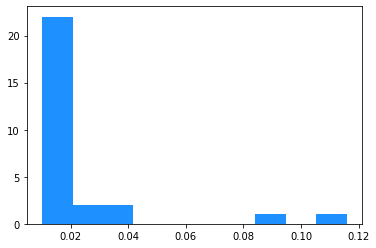

In [ ]:
tmp_hist = [x for x in list(sorted_betweenness.values()) if x>=0.01]
print(len(tmp_hist))
plt.hist(tmp_hist, color='dodgerblue')

989994
106.13524699599466
468


Text(0.5, 1.0, 'Distribution of Nodes involved in at least 1000 Triangles by Community')

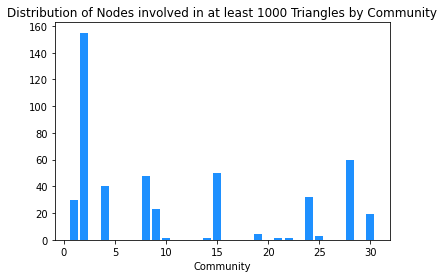

In [ ]:
tmp_hist = [louvain_res[x[0]] for x in sorted_Triangles.items() if x[1]>=1000]
ccount = collections.Counter(tmp_hist)
print(np.sum(list(sorted_Triangles.values())[:468]))
print(np.mean(list(sorted_Triangles.values())))
print(len(tmp_hist))
plt.bar(list(ccount.keys()), list(ccount.values()), color='dodgerblue')
plt.xlabel("Community")
#plt.xticks(np.arange(0,31, 5))
#plt.yticks(np.arange(0,19,2))
plt.title("Distribution of Nodes involved in at least 1000 Triangles by Community")

In [ ]:
#samples_list = list(sorted_Triangles.keys())[:20]
samples_list2 = list(sorted_betweenness.keys())[:20]
print(samples_list)
for i in range(len(samples_list)):
  print(targets[int(samples_list[i])][2], ' ', louvain_res[samples_list[i]])
print("===================================================================")
for i in range(len(samples_list2)):
  print(targets[int(samples_list2[i])][2], ' ', louvain_res[samples_list2[i]])

['16895', '14497', '1387', '19743', '21729', '2442', '8139', '4502', '10379', '15236', '5458', '9220', '10426', '15531', '9319', '8883', '19347', '16977', '15174', '961']
U.S. Army   2
U.S. Army Chaplain Corps   2
Honolulu District, U.S. Army Corps of Engineers   2
The White House   1
The Obama White House   1
Army Training Network (ATN)   2
Defense Commissary Agency   2
U.S. Army Materiel Command   2
U.S. Department of State   1
United States Air Force   2
Defense Logistics Agency (DLA)   2
U.S. Army Garrison Red Cloud   2
Los Angeles District, U.S. Army Corps of Engineers   2
Army Sustainment   2
U.S. Navy   2
U.S. Coast Guard   2
FEMA Federal Emergency Management Agency   4
U.S. Army Europe   2
U.S. Army Command and General Staff College   2
PEO Soldier   2
Facebook   5
Barack Obama   1
The Obama White House   1
The White House   1
European Parliament   15
CNN   1
NATO   2
Joachim Herrmann   25
U.S. Embassy Ottawa   1
U.S. Department of State   1
U.S. Army   2
NASA - National Aerona

In [ ]:
pagerank = nx.pagerank_alg.pagerank(G, max_iter=30)
print(pagerank)

{'0': 1.4048040459612743e-05, '18427': 0.0004517828399881453, '1': 5.046653421026039e-05, '21708': 0.0002659383236811849, '22208': 0.0002718684972801108, '22171': 0.0004965357757439391, '6829': 3.861759258383936e-05, '16590': 0.00011574990176479578, '20135': 0.00018172790954971182, '8894': 7.82720841827418e-05, '15785': 0.00018865129607667822, '10281': 2.3750149881254856e-05, '22265': 0.0002944188748608667, '7136': 4.200403348728545e-05, '22405': 6.443349664317942e-05, '10379': 0.0006345670605368873, '13737': 8.538658642872154e-05, '8533': 5.978618502039101e-05, '14344': 6.780582077591387e-05, '2812': 6.27120574690927e-05, '5755': 8.826974966160312e-05, '16260': 5.0019111338324516e-05, '15026': 5.741412998712087e-05, '17370': 0.00024806893100834154, '17460': 8.664460904868679e-05, '8049': 0.00024771784199711765, '5307': 0.0001566537022065184, '4987': 0.00013465125711445235, '18304': 0.00010998699924547713, '12305': 0.0001281557389181648, '19743': 0.001010678286457628, '20024': 0.000193

In [ ]:
# PageRank is not significant in this network
sorted_pagerank = {k:v for k,v in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)}
print(sorted_pagerank)
samples_list3 = list(sorted_pagerank.keys())[:20]
print(samples_list3)
for i in range(len(samples_list3)):
  print(targets[int(samples_list3[i])][2], ' ', louvain_res[samples_list3[i]], ' ', deg_def[int(samples_list3[i])])

In [ ]:
for i in range(30):
  print(targets[int(G_partition[5][i])][2], ' ', G_partition[5][i])

In [ ]:
# 2d distance histogram
distance_matrix = [0]*20
print(distance_matrix)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
for i in range(len(targets)):
  single_dist = dict(nx.single_source_shortest_path_length(G, str(i)))
  dict_val = list(single_dist.values())
  for j in dict_val:
    distance_matrix[j] += 1
print(distance_matrix)

[22470, 341646, 6203868, 43883372, 136878738, 164260518, 97682716, 38847366, 12391116, 3380262, 813620, 164022, 26922, 3784, 432, 48, 0, 0, 0, 0]


In [ ]:
distance_matrix = [22470, 341646, 6203868, 43883372, 136878738, 164260518, 97682716, 38847366, 12391116, 3380262, 813620, 164022, 26922, 3784, 432, 48, 0, 0, 0, 0]

In [ ]:
print(distance_matrix[:16])

[22470, 341646, 6203868, 43883372, 136878738, 164260518, 97682716, 38847366, 12391116, 3380262, 813620, 164022, 26922, 3784, 432, 48]


In [ ]:
plt.figure(figsize=(8,8))
print(np.arange(16))
plt.bar(np.arange(16), distance_matrix[:16])
plt.title('Distance Between All Pairs of Nodes')
plt.xticks(np.arange(16))
plt.show()

In [ ]:
# Link prediction attempt
jaccard_score = nx.jaccard_coefficient(G)

In [ ]:
j_score = np.zeros((22470, 22470))
for p, v, s in jaccard_score:
  j_score[int(p)][int(v)] = s
  j_score[int(v)][int(p)] = s

In [ ]:
print(j_score)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Link prediction using jaccard score
def link_prediction(G, i, k):
  sum_pred = 0
  degree = deg_def[i]
  for j in G.neighbors(i)
    H = G.copy()
    H.remove_edge(i, j)
    local_j = j_score[i,:]
    local_j.sort

## Computing Common Neighbors Score

We define the "common neighbours" link score:

In [ ]:
def common_neighbors(G,i,j):
    # G - the graph
    # i,j - the link
    return len(set(G.neighbors(i)) and set(G.neighbors(j)))
  
def jaccard_score(G,i,j):
    # G - the graph
    # i,j - the link
    return len(set(G.neighbors(i)) and set(G.neighbors(j)))/ len(set(G.neighbors(i)) or set(G.neighbors(j)))

def preferential_score(G,i,j):
    # G - the graph
    # i,j - the link
    return len(set(G.neighbors(i)))* len(set(G.neighbors(j)))

def inverse_length(G, i, j):
    try: 
      l = nx.algorithms.shortest_path_length(G, i, j)
    except nx.NetworkXNoPath:
      return 0
    if l == 0:
      return 0
    else:
      return 1/ nx.algorithms.shortest_path_length(G, i, j)

In [ ]:
print(common_neighbors(G,'31','8'))
print(jaccard_score(G,'31','8'))
print(preferential_score(G, '31', '8'))
print(inverse_length(G, '31', '8'))

5
0.8333333333333334
30
0.5


## Link Prediction

We define a function which returns a sorted list of of scores from a node to other possible nodes in the graph:

In [ ]:
def link_list(G,i,score_func):
    # G - the graph
    # i - the node
    # score_func - the link scoring function, having the signature score_func(G,i,j)
    links = []
    for j in G.nodes():
        if not G.has_edge(i,j):
            e = (i,j)
            sc = score_func(G,i,j)
            links.append([e,sc])
    links.sort(key = lambda x: x[1], reverse = True) 
    return links

In [ ]:
link_list(G,'31',common_neighbors)

In [ ]:
def link_prediction(G,k,i,score_func):
  return link_list(G,i,score_func)[:k]

def eval_link_prediction_node(G,k,i,score_func):
  sum_pred = 0
  degree = G.degree(i)
  for j in G.neighbors(i):
    H = G.copy()
    #print('removing node %s'%j)
    H.remove_edge(i,j)
    elist = link_prediction(H,k,i,score_func)
    for e in elist:
      if e[0][1]==j:
        sum_pred += 1
        #print('\t predicted!')
        break
  return (sum_pred,degree)

In [ ]:
(s,d) = eval_link_prediction_node(G,1,'32',common_neighbors)
print('perf %d/%d'%(s,d))

In [ ]:
node = [node for (node, val) in G.degree()]
degree = [int(val) for (node, val) in G.degree()]
nd = zip(degree, node)
nd = sorted(nd, reverse=True)
print(nd)

In [ ]:
def score_comparer(G,k,i):
  print(' k = ', k)
  s1, d1 = eval_link_prediction_node(G,k,i,jaccard_score)
  s2, d2 = eval_link_prediction_node(G,k,i,preferential_score)
  s3, d3 = eval_link_prediction_node(G,k,i,inverse_length)
  if (s1 != s2):
    print('  perf jaccard score         %d/%d'%(s1,d1) )
    print('  perf preferential score    %d/%d'%(s2,d2) )
  else:
    print('  preferential jaccard score %d/%d'%(s2,d2) )
  print('  inverse length score       %d/%d'%(s3,d3) )
  return

for j in range(34):
  i = str(j)
  print('Node = ', i)
  for t in range(2, len(set(G.neighbors(i))), 3):
    score_comparer(G,t,i)
  print('=============================================')

**MARVEL DATA**


In [ ]:
# FAILED ATTEMPT SINCE DATA IS MISSING !!!!
Mnodes = '/content/nodes.csv'
Medges = '/content/hero-network.csv'
hero_names = []
comic_names = []
skip = True
count = 0
with open(Mnodes) as mn:
  for line in mn:
    if skip:
      skip = False
      continue
    if line[0] == '"':
      line = line[1:]
    sepline = re.split(r'"?,(?!\s+)"?', line[:-1])
    if len(sepline) > 2:
      sepline = [','.join(sepline[:2]), sepline[2]]
    if sepline[1] == 'hero':
      hero_names.append(sepline[0])
    else:
      comic_names.append(sepline[0])
    count +=1
hero_dict = {}
for x in range(len(hero_names)):
  hero_dict[hero_names[x]] = x
print(hero_dict)

{'24-HOUR MAN/EMMANUEL': 0, '3-D MAN/CHARLES CHAN': 1, '4-D MAN/MERCURIO': 2, '8-BALL/': 3, 'ABBOTT, JACK': 4, 'ABCISSA': 5, 'ABEL': 6, 'ABOMINATION/EMIL BLO': 7, 'ABOMINATION | MUTANT': 8, 'ABOMINATRIX': 9, 'ABRAXAS': 10, 'ABSALOM': 11, 'ABSORBING MAN/CARL C': 12, 'ABSORBING MAN | MUTA': 13, 'ACBA': 14, 'ACHEBE, REVEREND DOC': 15, 'ACHILLES': 16, 'ACHILLES II/HELMUT': 17, 'ACROBAT/CARL ZANTE': 18, 'ADAM 3,031': 19, 'ADAMS, CINDY': 20, 'ADAMS, CONGRESSMAN H': 21, 'ADAMS, GEORGE': 22, 'ADAMS, MARTHA': 23, 'ADAMS, NICOLE NIKKI': 24, 'ADAMSON, JASON': 25, 'ADAMSON, REBECCA': 26, 'ADAM X': 27, 'ADMIRAL PROTOCOL/': 28, 'ADORA CLONE': 29, 'ADORA': 30, 'ADRIA': 31, 'ADVA': 32, 'ADVENT/KYLE GROBE': 33, 'ADVERSARY': 34, 'AEGIS/TREY ROLLINS': 35, 'AENTAROS': 36, 'AFTERLIFE': 37, 'AGAMEMNON': 38, 'AGAMEMNON II/ANDREI': 39, 'AGAMEMNON III/': 40, 'AGAMOTTO': 41, 'AGARN, CAPT.': 42, 'AGED GENGHIS': 43, 'AGEE, DR. AUBREY': 44, 'AGEE, REBECCA': 45, 'AGENT 18/JACK TRUMAN': 46, 'AGENT AXIS/': 47, 'AGENT

In [ ]:
Pnodes = '/content/network_nodes.csv'
Pedges = '/content/network_bus.csv'
pnode_info = []
pnode_dict = {}
p_edges = []
used_nodes = set()
skip = True
with open(Pnodes) as pn:
   for line in pn: 
    if skip:
      skip = False
      continue
    sepline = re.split(r';', line[:-1])
    pnode_info.append([sepline[0], sepline[3]])
    pnode_dict[sepline[0]] = sepline[3]
skip = True
with open(Pedges) as pe:
  for line in pe:
    if skip:
      skip = False
      continue
    sepline = re.split(r';', line[:-1])
    p_edges.append([sepline[0], sepline[1]])
    if sepline[0] not in used_nodes:
      used_nodes.add(sepline[0])
    if sepline[1] not in used_nodes:
      used_nodes.add(sepline[1])
print(p_edges)
print(used_nodes)
sorted_nodes = sorted(list(used_nodes), key=lambda x:int(x))
print(sorted_nodes)
print(p_edges)
removed_nodes = set()
G_P = nx.Graph(p_edges)
print(G_P.number_of_edges())
print(G_P.number_of_nodes())

[['9820', '9821'], ['21412', '21413'], ['12766', '24529'], ['26036', '26034'], ['17459', '17457'], ['6765', '6763'], ['23830', '23831'], ['20295', '20297'], ['3999', '1089'], ['23857', '23855'], ['6656', '13200'], ['22621', '19819'], ['17460', '17462'], ['9950', '9951'], ['27337', '27336'], ['27018', '27017'], ['27018', '27019'], ['17461', '17459'], ['25368', '25371'], ['20735', '16035'], ['17462', '17464'], ['21281', '21282'], ['16517', '5776'], ['16517', '6870'], ['16531', '16532'], ['16532', '16534'], ['16533', '6891'], ['16534', '7817'], ['16535', '16533'], ['17463', '17461'], ['21282', '10533'], ['16558', '14956'], ['1965', '1966'], ['17464', '17312'], ['20657', '9063'], ['20906', '20908'], ['9827', '9828'], ['17465', '17463'], ['22921', '22923'], ['9973', '9974'], ['20951', '20952'], ['20951', '20989'], ['16635', '11834'], ['22922', '6228'], ['16640', '25331'], ['16640', '11829'], ['16640', '8574'], ['16647', '16648'], ['16648', '16650'], ['16649', '8513'], ['16649', '10996'], ['

In [ ]:
max_comp = max(nx.connected_components(G_P), key=len)
G_C = G_P.subgraph(max_comp)
print(G_C.number_of_nodes())
print(G_C.number_of_edges())

10644
12309


In [ ]:
deg_C = nx.degree(G_C)
print(deg_C)

[('9820', 3), ('9821', 3), ('21412', 2), ('21413', 2), ('12766', 2), ('24529', 4), ('26036', 2), ('26034', 2), ('17459', 2), ('17457', 2), ('6765', 2), ('6763', 3), ('23830', 2), ('23831', 2), ('20295', 2), ('20297', 2), ('3999', 2), ('1089', 5), ('23857', 2), ('23855', 2), ('6656', 2), ('13200', 4), ('22621', 2), ('19819', 3), ('17460', 2), ('17462', 2), ('9950', 2), ('9951', 2), ('17461', 2), ('25368', 2), ('25371', 2), ('20735', 2), ('16035', 3), ('17464', 2), ('21281', 2), ('21282', 2), ('16517', 3), ('5776', 3), ('6870', 4), ('16531', 2), ('16532', 2), ('16534', 2), ('16533', 2), ('6891', 6), ('7817', 4), ('16535', 2), ('17463', 2), ('10533', 3), ('16558', 2), ('14956', 3), ('1965', 1), ('1966', 2), ('17312', 3), ('20657', 2), ('9063', 5), ('20906', 2), ('20908', 2), ('9827', 2), ('9828', 4), ('17465', 2), ('22921', 2), ('22923', 2), ('9973', 2), ('9974', 2), ('20951', 3), ('20952', 4), ('20989', 2), ('16635', 2), ('11834', 7), ('22922', 2), ('6228', 3), ('16640', 6), ('25331', 3)

In [ ]:
deg_C_def = [x[1] for x in deg_C]
print(deg_C_def)
print(np.mean(deg_C_def))
count_deg_C = collections.Counter(deg_C_def)
print(count_deg_C)

[3, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 5, 2, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 4, 2, 2, 2, 2, 6, 4, 2, 2, 3, 2, 3, 1, 2, 3, 2, 5, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 4, 2, 2, 7, 2, 3, 6, 3, 2, 3, 3, 2, 2, 3, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 5, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 4, 1, 5, 1, 4, 2, 2, 4, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 4, 2, 2, 2, 2, 3, 2, 2, 3, 2, 4, 2, 4, 3, 3, 2, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 4, 5, 3, 2, 2, 2, 4, 2, 2, 3, 3, 3, 2, 4, 2, 1, 7, 3, 3, 2, 2, 6, 2, 2, 5, 2, 3, 3, 2, 2, 2, 2, 3, 3, 4, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 2, 6, 2, 2, 3, 2, 2, 5, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 2, 2, 4, 2, 3, 3, 4, 5, 2, 7, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 4, 2, 3, 2, 2, 4, 1, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 3, 

{1: 425, 2: 7796, 3: 1473, 4: 694, 5: 163, 6: 70, 7: 16, 8: 4, 9: 3}
[425, 7796, 1473, 694]


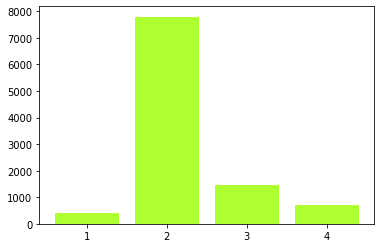

In [ ]:
deghist_C = {k:v for k, v in sorted(count_deg_C.items(), key=lambda x:x[0])}
print(deghist_C)
degbar1 = list(deghist_C.values())[:4]
print(degbar1)
degbar2 = list(deghist_C.values())[4:]
plt.bar(np.arange(1,5,1), degbar1, color='greenyellow')
plt.xticks(np.arange(1,5,1))
plt.show()

<BarContainer object of 5 artists>

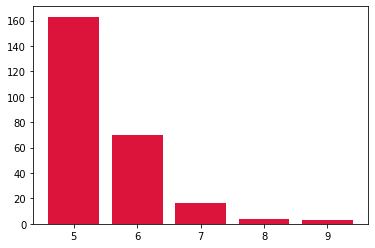

In [ ]:
plt.bar(np.arange(5,10,1), degbar2, color='crimson')

In [ ]:
commonNs_C = []
clCoeffs_C = []
for x in G_C.nodes():
  if deg_C[x]== 1:
    commonNs_C.append(0)
    clCoeffs_C.append(0)
  else:
    commonNeighbors = 0
    neighbors = [n for n in G_C.neighbors(x)]
    combi = [n for n in itertools.combinations(neighbors, 2)]
    #if (x == 2):
    #  print(combi)
    for t in combi:
      y = t[0]
      z = t[1]
      n1 = [n for n in G_C.neighbors(y)]
      if z in n1:
        commonNeighbors += 1
        #if (x == 2):
        #  print(commonNeighbors, ' ', y, ' ', z)
    commonNs_C.append(commonNeighbors)
    clCoeffs_C.append(commonNeighbors*2/len(neighbors)/(len(neighbors)-1))
print(commonNs_C)
print(clCoeffs_C)
print(np.mean(clCoeffs_C))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [ ]:
print(nx.average_shortest_path_length(G_C))
print(nx.diameter(G_C))

47.63116803725628
159


In [ ]:
print(nx.degree_assortativity_coefficient(G_C))

0.027402898904587605


In [ ]:
partition_C = community.best_partition(G_C)
print(partition_C)

{'9820': 0, '9821': 0, '21412': 1, '21413': 1, '12766': 2, '24529': 2, '26036': 3, '26034': 3, '17459': 4, '17457': 4, '6765': 5, '6763': 5, '23830': 1, '23831': 1, '20295': 6, '20297': 6, '3999': 7, '1089': 7, '23857': 8, '23855': 8, '6656': 9, '13200': 9, '22621': 10, '19819': 10, '17460': 4, '17462': 4, '9950': 11, '9951': 11, '17461': 4, '25368': 12, '25371': 12, '20735': 13, '16035': 13, '17464': 4, '21281': 14, '21282': 14, '16517': 15, '5776': 15, '6870': 15, '16531': 13, '16532': 13, '16534': 13, '16533': 13, '6891': 13, '7817': 13, '16535': 13, '17463': 4, '10533': 14, '16558': 13, '14956': 13, '1965': 16, '1966': 16, '17312': 4, '20657': 10, '9063': 10, '20906': 17, '20908': 17, '9827': 0, '9828': 0, '17465': 4, '22921': 18, '22923': 18, '9973': 11, '9974': 11, '20951': 1, '20952': 1, '20989': 1, '16635': 12, '11834': 12, '22922': 19, '6228': 19, '16640': 12, '25331': 12, '11829': 12, '8574': 12, '16647': 12, '16648': 12, '16650': 12, '16649': 12, '8513': 20, '10996': 12, '16

In [ ]:
modularity_C = community.modularity(partition_C, G_C)
print(modularity_C)

0.9324544487820035


In [ ]:
between_C = nx.betweenness_centrality(G_C)

In [ ]:
between_C = {'9820': 0.004733475521107895, '9821': 0.004877162895858904, '21412': 0.0011539289733828353, '21413': 0.0009664623128800143, '12766': 0.03453733844990706, '24529': 0.0365269882709705, '26036': 0.00010016535378056542, '26034': 7.746115343034679e-05, '17459': 0.011488360746996539, '17457': 0.01131155513262748, '6765': 0.0003899920747315703, '6763': 0.000697242639617186, '23830': 3.2010319181290434e-05, '23831': 9.334377197320269e-05, '20295': 0.00013226559573443716, '20297': 0.0001162940136885429, '3999': 0.007465578110806695, '1089': 0.015518713710947606, '23857': 0.017823770320693214, '23855': 0.017971057397666905, '6656': 0.0010404394103925578, '13200': 0.014491462082017138, '22621': 0.003284608161463316, '19819': 0.004257886921666625, '17460': 0.007894936910387548, '17462': 0.008073449469341234, '9950': 0.003938839375037203, '9951': 0.004126014677757498, '17461': 0.011666036020201363, '25368': 0.002296471150606442, '25371': 0.002109395910154895, '20735': 0.0030675806837513037, '16035': 0.00888308968184504, '17464': 0.008252721324334238, '21281': 0.001517484677253622, '21282': 0.0013897391319124188, '16517': 0.0015359293844173858, '5776': 0.0009454928002552817, '6870': 0.005827823548898766, '16531': 0.0017837286814649067, '16532': 0.0018968696865209046, '16534': 0.002035379601074551, '16533': 0.017814127187386886, '6891': 0.02392632967719565, '7817': 0.003625372797657769, '16535': 0.017862434372689816, '17463': 0.011844414672295397, '10533': 0.0013456177939697596, '16558': 0.012014667605298807, '14956': 0.013371980436108143, '1965': 0.0, '1966': 0.0001879169407122052, '17312': 0.011832186814950685, '20657': 0.0011144181070946383, '9063': 0.00961594080651825, '20906': 0.0013069311995921986, '20908': 0.001133840108071461, '9827': 0.004514575679016266, '9828': 0.006132443746164017, '17465': 0.012023673283752844, '22921': 0.002918696442493285, '22923': 0.002908591992851254, '9973': 0.001877580182853672, '9974': 0.001689981086995143, '20951': 0.0022245535953019247, '20952': 0.0007707370539159537, '20989': 0.0016879316155290396, '16635': 0.0005611485304615995, '11834': 0.014404938516474909, '22922': 0.0039724480727898045, '6228': 0.005420281310111912, '16640': 0.004030130030634299, '25331': 0.0018199023154176763, '11829': 0.0006721210150484281, '8574': 0.0028806827024154035, '16647': 0.004497084620596928, '16648': 0.004166923368315792, '16650': 0.0039798834439590935, '16649': 0.004092291938779698, '8513': 0.003951114520613912, '10996': 0.004758640314069809, '16651': 0.003792843519602374, '23468': 0.006995827318037623, '23489': 0.0070683831273770925, '24931': 0.008016177595217711, '24933': 0.008151946158604938, '9829': 0.000899160732541587, '9830': 0.000729404575077534, '16656': 0.001498090739572228, '11907': 0.0017389678548144474, '17467': 0.012203602901012496, '25087': 0.0014012507025046269, '25085': 0.0012221013711144917, '8239': 0.0, '8240': 0.0001879169407122052, '22925': 0.0029095982670437983, '1971': 0.0011269719028504381, '1972': 0.0013146769469935258, '13975': 0.0013753191126726788, '13973': 0.0012124112451189037, '16678': 0.0012352308042681923, '11862': 0.01700243289066346, '8949': 0.0004359320261745687, '8950': 0.0006230624830601253, '23469': 0.02447223419521041, '6278': 0.02482606532948337, '22924': 0.0038182182720554025, '16709': 0.003823355002130662, '9831': 0.0005661993124598988, '9832': 0.00048691815671721356, '19170': 0.0, '2345': 0.005375543730736549, '6767': 0.0002022870305885827, '22927': 0.0029216217147980355, '20298': 0.0002529861212764445, '22307': 0.004403437254164471, '16652': 0.0036513423141532352, '11908': 0.002385390837766635, '20932': 0.0026205661686136534, '20934': 0.002549870925821033, '25358': 0.003418763670888945, '25360': 0.003231723746532232, '22926': 0.0036697235108243227, '20369': 0.0017480537780731184, '20370': 0.0017146724398411895, '17471': 0.0185260328731417, '17252': 0.03041729045870781, '16780': 0.0017783497996083923, '2768': 0.0016899456456277244, '16781': 0.012061055139675437, '9904': 0.0, '16836': 0.018407121347912607, '16783': 0.0, '6999': 0.0005636978479943363, '22929': 0.0029462184868155835, '16789': 0.0007269057947006137, '6996': 0.001417992574267016, '16795': 0.005229959098217452, '16797': 0.005542249949806853, '16796': 0.005396196594588813, '9956': 0.007471998498640875, '16863': 0.004908344299484149, '16799': 0.0027164786069721397, '16798': 0.00113020477162402, '16801': 0.004468974751724686, '16800': 0.0010702516769756463, '16803': 0.0028671299662780215, '3340': 0.0032360381520881534, '16802': 0.0016162616171608345, '16804': 0.0028202570361764755, '26476': 0.0003181851294850447, '16806': 0.0019361593107851147, '16805': 0.0005969951097270095, '16852': 0.000757300574464007, '16808': 0.005760438707951028, '16807': 0.0004713638341461176, '16810': 0.005462670936824163, '16809': 0.0035099194206737036, '20025': 0.0031806247948804986, '16812': 0.005591865131113734, '16811': 0.003287820000923648, '8968': 0.0015621543645576049, '19969': 0.0032978238793178083, '16813': 0.0034854820605299502, '20010': 0.0007514558662797035, '16816': 0.000469033387103611, '16051': 0.0012404595101727619, '22928': 0.00352847670537427, '16819': 0.0002365603146061454, '15980': 0.005742620257932018, '16821': 0.0001602478466595716, '16822': 0.0002755406989241825, '16824': 0.00015645568812228266, '16826': 0.00014586248010372015, '16827': 0.00025366747389646104, '16828': 0.003129556662843306, '9897': 0.0015435110013861102, '20156': 0.005102329086474279, '16832': 0.0008552424836052884, '16834': 0.000882647587974502, '26051': 0.0063209156471242195, '9915': 0.006101415425629364, '16838': 0.011226075840543711, '16837': 0.00247692603321155, '16840': 0.011153719016404245, '9663': 0.012394670454473592, '16841': 0.009872841424123188, '20443': 0.0060161840435233845, '9875': 0.006848475539141191, '16843': 0.007858491153080622, '16847': 0.0, '9660': 0.007746306754531287, '16848': 0.0016274170901343702, '9882': 0.0026692983473363, '16849': 0.00011156915667077622, '16851': 0.002285660844730213, '8969': 0.004618314691131705, '16856': 0.0006658808929474435, '16858': 0.0005592714238992143, '1035': 0.020829714512843236, '16861': 0.0011230433708257883, '16937': 0.0010953253343844312, '16862': 0.00652565453327857, '16864': 0.0030038752595993694, '20021': 0.004535034613524493, '23446': 0.0012220013504832883, '23444': 0.0013507841180499464, '17474': 0.004870779200128585, '3616': 0.022698083184815695, '3615': 0.016173474684099045, '16872': 0.0012726325035459102, '16873': 0.003311908088570428, '1302': 0.005367971790548881, '16874': 0.0013404714620175223, '8274': 0.0111064070717505, '8275': 0.011028194333392327, '16878': 0.0013364416032644504, '1303': 0.002285597763856098, '16879': 0.003877291464952525, '3352': 0.003953105187419487, '16880': 0.0014041144037232535, '16883': 0.004053046895235807, '16885': 0.04111999288109112, '16884': 0.0016178528626212513, '3330': 0.001492373719383987, '20586': 0.016924507204066255, '20287': 0.022373379917230794, '16887': 0.01864240728123858, '16886': 0.009797560732355281, '20704': 0.0007561325681985329, '16888': 0.01859426198346147, '16889': 0.018557465235466232, '16890': 0.018532485435297657, '16891': 0.018525222926296252, '16892': 0.018559273760387452, '6703': 0.02885050471986301, '16894': 0.010781111382645273, '16931': 0.01074662273724829, '21081': 0.00017110772427637587, '3385': 0.008462251356283873, '17475': 0.020490574008954297, '17473': 0.02071789452694323, '8278': 0.01845709721164715, '8289': 0.018444199768773206, '16902': 0.011376632407565678, '6676': 0.01159627966599724, '16903': 0.0021087744571481955, '14953': 0.009196404502807128, '16905': 0.011657227648040419, '8432': 0.01627584116235246, '8279': 0.01809674619098738, '8281': 7.245735404651917e-05, '6559': 0.018797876878764327, '22931': 0.0029825564575964763, '22933': 0.0030301516455596817, '16909': 0.011885324941461418, '16911': 0.011820462639785005, '16910': 0.002375717271609956, '6671': 0.003956974813213099, '16913': 0.01176674551451572, '16912': 0.0022986491789873434, '16915': 0.01179127645802802, '16914': 0.002234987558302759, '7560': 0.018437724059210882, '16916': 0.00223546088994866, '16918': 0.0023134799301043583, '8283': 1.4180282588518908e-05, '23054': 0.00018057488154116794, '23055': 0.00010934706422095375, '16925': 0.001685485917693097, '16927': 0.002150851876155873, '26205': 0.0, '26207': 0.0001879169407122052, '16929': 0.0002632540523087405, '7573': 0.01066748056665305, '16928': 0.00021072613507403003, '7568': 0.002201795352742496, '16932': 0.010748937229283897, '16933': 0.010780288675108817, '16934': 0.010995819767367418, '26114': 0.0, '16935': 0.012523951088253875, '16936': 0.009584899875174262, '20789': 0.0011188253726589876, '20402': 0.0008948301990381952, '20015': 0.0005592714238992143, '22932': 0.0032837745581265547, '22930': 0.003397897559740534, '19207': 0.0006385938011490765, '25319': 0.0005963667411674337, '558': 0.0009388783816639683, '2423': 0.005971990779904233, '24669': 0.003600189695641966, '24670': 0.003503337677652676, '560': 0.0005634329772829396, '13726': 0.0007511556794734539, '561': 0.0003757102750924253, '562': 0.0009388783816639683, '563': 0.0007511556794734539, '564': 0.0005634329772829396, '565': 0.0003757102750924253, '566': 0.00018798757290191097, '567': 2.648707113966433e-07, '568': 2.648707113966433e-07, '13724': 0.00018798757290191097, '9839': 0.0001879169407122052, '9840': 0.001539042563762913, '18157': 0.00035594037607276333, '18159': 0.00035438139628125506, '19210': 0.003110313425577804, '25320': 0.0030242324958830325, '17477': 0.007512150205939851, '19211': 0.0003125404959344326, '19213': 0.00019844414030225507, '20023': 0.004383207102598412, '8290': 0.018462020889975624, '19212': 9.990664370621309e-05, '8291': 0.018514127834756745, '19215': 0.00011120206783248661, '23356': 0.0025889894502118538, '1747': 0.0027412883408794394, '7425': 0.020376578153229803, '16982': 0.011932966381254084, '4356': 0.011832709876530616, '19217': 0.0001544550558043931, '17478': 0.0008665315514635099, '17480': 0.0006813486650944989, '19216': 0.000511589230424427, '15998': 0.0021861052548447935, '16997': 0.0003018238073676054, '12146': 0.0006484755295493887, '22934': 0.003188590627070236, '19219': 0.0003291487749175125, '17001': 0.000520540998749054, '17002': 0.0006920324041851045, '17003': 0.0008908907241875453, '8295': 0.0, '8297': 0.0001879169407122052, '17004': 4.601610103892583e-05, '17006': 0.0001919971981518342, '19218': 0.0008391811368434823, '20429': 0.0004609121540218949, '11842': 0.0016697953406407215, '17007': 0.00020215323145008723, '17049': 5.0362558131984135e-05, '20425': 0.0002868602025960322, '19221': 0.0008188144225867426, '20361': 0.001479956721925083, '23019': 0.0014926036470786306, '20359': 0.0008884894180047426, '8299': 0.003305816192458878, '19220': 0.0007533301504310374, '17019': 0.0023022100280127916, '17021': 0.0021149905801739325, '8298': 0.0001879169407122052, '8296': 0.0, '17022': 0.002572382254293703, '11784': 0.013561851333577042, '19840': 0.0006618469256724245, '19222': 0.0011943355904514834, '17024': 0.0017405516844961992, '17026': 0.0015533322366573434, '17025': 0.002197943358616175, '17048': 0.002385162806454998, '17028': 0.0013661127888184967, '8301': 0.011642598997819366, '17030': 0.0011788933409797532, '17029': 0.00182350446293846, '17027': 0.002010723910777322, '17032': 0.0009916783076527572, '17031': 0.0016362850150996088, '17034': 0.0008047634611320151, '17033': 0.0014490655672607336, '17036': 0.0006181797030004637, '17035': 0.0012618505339336678, '17038': 0.0004316665770586379, '17037': 0.0010746884747488738, '17040': 0.00024522408330656276, '8914': 0.0006488733938695806, '23883': 0.008530141291885845, '9645': 0.0022150262069047387, '8303': 0.002111201662900859, '17042': 6.479118290325153e-05, '17041': 0.0007011677975373179, '17039': 0.0008877603846925407, '17044': 1.7906886039669465e-05, '17043': 0.0005147959359749839, '17046': 0.00014804877469273495, '17045': 0.00032974548496167774, '19225': 0.0005561430144880808, '19226': 0.0006702975444756738, '8305': 0.0020180460790582225, '15994': 0.0034048845575609873, '17054': 0.005033033051938913, '3925': 0.006584730169896576, '8304': 0.003640190752186724, '8341': 0.0037656947734808887, '22936': 0.002988258813046635, '12913': 0.003041353002069766, '9297': 0.0016694343782222636, '6238': 0.005324372990671711, '8307': 0.0019608643294993376, '19228': 0.012000748008429258, '19232': 0.0057581812683353915, '21728': 0.006065338378685714, '17135': 0.0013234995799370505, '19593': 0.0007321380159017724, '6562': 0.004697204901031284, '8306': 0.0035605822950958844, '19229': 0.0010583936436048874, '16037': 0.02353641468118481, '8309': 0.0019634311036979646, '21300': 0.00012196094386663436, '21299': 0.00017861869736376674, '8308': 0.003541346700962474, '22937': 0.0032046690736838327, '22939': 0.003322666905641991, '19233': 0.005692106264900509, '21805': 0.00042115722940670004, '21806': 0.00023334623697904478, '22312': 0.0001879169407122052, '22313': 0.0003757985653295575, '6571': 0.0005754468343765849, '6572': 0.0007616415268631418, '22938': 0.0029473217851487235, '17121': 0.0, '3964': 0.0020535837661410684, '26035': 0.0019145890840586031, '26037': 0.0018356058084156494, '8316': 0.0028862894796794904, '5943': 0.004312038644195519, '17133': 0.0001789529003148663, '8317': 0.001729213120610802, '8319': 0.001790316845666603, '17483': 0.002530830347335644, '17481': 0.002715680968112191, '17143': 0.0020502758012156336, '10545': 0.009366990650937178, '17146': 0.007476172549218699, '17148': 0.00740092214705339, '17150': 0.007942341836383385, '17149': 0.007540773647497009, '10553': 0.00897269071772425, '17152': 0.0070545522093295315, '17151': 0.020619925946456626, '22526': 0.013182513160575351, '17154': 0.0035208776942648517, '18533': 0.0035208776942648517, '17153': 0.0204397222141364, '17156': 0.00724311781999957, '17155': 0.0021691673586107397, '9412': 0.021912442601163807, '17157': 0.004381994184760869, '18534': 0.018407876305026615, '17160': 0.007888099728208748, '17162': 0.007931962900694717, '22537': 0.0010252551847676425, '8930': 0.008259647127664683, '17163': 0.008000527112156323, '9409': 0.005198240229953118, '6019': 0.007175944261487551, '8322': 0.002816502482189425, '8320': 0.002768910023294471, '17168': 0.008044312815028003, '17170': 0.008066736820320901, '17169': 0.001166929457829953, '17171': 0.008144363727816894, '8323': 0.002031752361126901, '8325': 0.0021727671266605314, '17172': 0.001197383109654761, '17173': 0.008239371212000468, '2122': 0.029902298762390783, '17174': 0.0012744229939369198, '17176': 0.0013687951002901157, '8324': 0.002901059652614607, '8327': 0.002319244386913247, '17185': 0.0001387511879969673, '12780': 0.004518399316648994, '8326': 0.0030138470522608533, '17190': 0.0001739648626329958, '17191': 0.0001235036770337761, '8329': 0.002470807522115078, '17198': 0.001593094578341394, '5244': 0.003206774263252475, '8756': 0.0017354877600750836, '8758': 0.0012006592169026434, '17207': 0.0012671222086550217, '3950': 0.01174232673828405, '2868': 0.0008732566289056247, '2803': 0.004778971823605114, '17211': 0.0008975951931697601, '17209': 0.0010808147989657434, '8330': 0.003283933528233209, '8328': 0.003145251587590609, '23111': 0.0014681995272662455, '23109': 0.0015304399994406398, '20955': 0.0037166295113365945, '9456': 0.020351276292799435, '17486': 0.0025065071023738076, '17485': 0.002348175799057348, '17509': 1.1763261756879946e-05, '17231': 0.00037509761070268885, '17233': 0.0003120764906434237, '24930': 0.0006408194184262924, '24928': 0.0005484267856168941, '1230': 0.00043617371280100815, '17239': 0.00025959307908840295, '17241': 0.00043495125126475406, '17240': 0.0003757985653295575, '1227': 0.0008407111235445256, '17243': 0.0029547118143479403, '17242': 0.0001879169407122052, '17244': 0.0, '17250': 0.0, '11067': 0.0002922137923802946, '11069': 0.00010479569150788805, '17254': 0.029683229770699104, '17253': 0.005867270690366702, '17470': 0.003757190654673418, '17359': 0.0002536528934333614, '17444': 0.00022344285395477882, '17255': 0.029216188234219058, '17257': 0.029297116486096623, '17256': 0.009859492470269059, '1500': 0.04144821138560772, '17258': 0.00927378495154227, '17261': 0.00450129746323575, '17263': 0.008820928934548269, '17262': 0.0030934358071518014, '1501': 0.012784243600301186, '17265': 0.00863753068817246, '17264': 0.0023818989820693567, '17266': 0.008454542697098567, '17268': 0.008272095630877434, '17267': 0.002017438354691555, '17310': 0.002199289756112785, '17269': 0.008090586915335042, '17270': 0.007910968788070436, '17272': 0.007810082841479773, '17271': 0.001298581990768443, '17307': 0.001477052366608825, '17274': 0.004367297038660789, '17373': 0.0031829654891871997, '17273': 0.001196856045997314, '5504': 0.004239917938714075, '17275': 0.0007297172002980112, '17278': 0.002557496711057304, '17280': 0.002370162485910164, '17279': 0.0023179961316681878, '5503': 0.0029766690993508938, '17282': 0.0021828282607629867, '17281': 0.0021306619065210534, '17284': 0.001995494035615869, '17283': 0.0019433276813739069, '17286': 0.0018081598104687784, '17285': 0.001755993456226724, '17288': 0.0016208255853216835, '17287': 0.0015686592310795561, '17289': 0.0014334913601745994, '17291': 0.0012461571350275045, '17290': 0.0011939907807852084, '17306': 0.0013813250059323725, '17293': 0.0010588229098804026, '17292': 0.0010066565556380506, '17295': 0.0008714886847332529, '17294': 0.0008193223304909387, '17297': 0.0006841544595860879, '17296': 0.0006319881053438371, '17299': 0.0004968378924863674, '17298': 0.00044465388019671335, '17301': 0.00030955664148152215, '17300': 0.000257337313096996, '17303': 0.00013753967762429462, '17302': 7.005606209214585e-05, '17305': 1.7789387929609665e-05, '17308': 0.0016563707211267131, '17309': 0.0018364754473566673, '22871': 0.0005275680399852454, '18348': 0.0014288833687906698, '13810': 0.0007372352539744362, '13808': 0.0009241545150070395, '6578': 0.00024386529787229547, '6579': 0.012563297511765496, '17330': 0.00013045003280186363, '17331': 4.1478795719462135e-05, '17332': 0.0001020513337424154, '17333': 0.0002598372129706921, '17334': 0.00044651291907771436, '17335': 0.0006341532170469133, '5508': 0.0013531208944562462, '17337': 0.00039651768330869417, '955': 0.0007975315303167756, '957': 0.0005826220736351506, '956': 0.0030709564048969082, '953': 7.192222992025999e-05, '8106': 0.0021217236451851695, '4670': 0.021688958613730092, '959': 0.0005072319346117688, '958': 0.000497800345686984, '960': 0.0010809339803140154, '4832': 0.00865069912574376, '962': 0.0014127694304014778, '961': 0.00026726614428057615, '1006': 0.0005287198130173607, '8665': 0.0004262932031372961, '964': 0.0003484805411854592, '963': 0.0013596549186735665, '7490': 0.0010844900874362854, '1005': 0.0002932440259456837, '966': 0.00031882089174050857, '965': 0.0013570812453004033, '967': 0.0005709488888484078, '17351': 6.0396376249015256e-05, '17352': 0.00012679922198443415, '969': 0.05583493898094993, '7296': 0.05432932778388158, '1002': 0.018386370339833178, '970': 0.003265668182169186, '971': 0.005862360848144894, '8115': 0.0017819376104160265, '973': 0.004893577581551977, '972': 0.016355755975512996, '7155': 0.015276871240653293, '7324': 0.00015790543163044245, '975': 0.004624985938445873, '974': 0.002986175030042813, '977': 0.004721518426579622, '17360': 0.00012877840411806705, '17361': 0.00013616468152176768, '7147': 0.0032110073966225075, '979': 0.0014307532568186574, '17362': 0.00021709293339932346, '17363': 0.0003317463796072594, '17364': 0.0004977323406566354, '981': 0.0010585996067786923, '982': 0.0008779791184134978, '983': 0.0007047905028018658, '984': 0.0005444885249763997, '985': 0.00040132895566482647, '986': 0.0002788469716296588, '988': 0.0001943116035253267, '987': 0.0003053609412327025, '996': 0.000320208161647562, '990': 0.00017135872528509306, '5507': 0.004295272359712494, '992': 0.00026609239158294885, '17375': 0.0010556924915845812, '17376': 0.000868052193615403, '994': 0.0004478914119940441, '17377': 0.0006804457402371393, '17378': 0.0004930335253805528, '993': 0.0006345143121306811, '17379': 0.0003072355503595117, '997': 0.0003906270848494785, '998': 0.0004964394131660746, '999': 0.0006211121779537478, '1000': 0.000764562864307865, '1001': 0.0009228976409709164, '978': 0.0010921975481238495, '1003': 0.0005806866459192185, '10044': 0.014491639824181671, '8181': 0.0010537903601707081, '1004': 0.0005208172728653966, '1007': 0.006165276386002302, '1009': 0.02059149390851232, '17392': 0.0016448289321315274, '17394': 0.0014902919747336002, '1010': 0.009473689099984865, '21711': 0.011881782852281534, '20785': 0.004473053996605688, '1012': 0.006152840843425981, '1011': 0.015473961154614631, '1057': 0.02092358303384857, '1014': 0.006043230545496644, '1013': 0.010547609129507493, '1016': 0.006099671156052498, '1015': 0.010439690289304028, '1018': 0.006400098365476271, '1017': 0.01035832493937398, '1298': 0.0032614746316062117, '1020': 0.0037155262499305995, '1019': 0.011610977567113448, '1329': 0.001763610638956373, '1022': 0.006501893514873565, '1021': 0.00950461729806525, '1024': 0.005403499031975754, '8697': 0.002521032592887467, '1023': 0.009406458207821168, '1026': 0.005657965821813714, '1025': 0.009326226974955387, '1028': 0.004531141989530758, '1027': 0.009597653395121343, '18066': 0.0009986127290328498, '1030': 0.02033961335105652, '1029': 0.00870613621543781, '1032': 0.019709034900299925, '19852': 0.004081902520074182, '1031': 0.020404043150607044, '19856': 0.012935527149441411, '1034': 0.01961105112936337, '1033': 0.014834306900154194, '1036': 0.019763331671654765, '18102': 0.001672226612592928, '1038': 0.018068989560077065, '1037': 0.019925104174686948, '1040': 0.017994707995253583, '1039': 0.01999150800078367, '1042': 0.017931205662919922, '1041': 0.017703410268432997, '1044': 0.018144748918404403, '1043': 0.017619354431710678, '1046': 0.01791304439067192, '1045': 0.017809354660139807, '10164': 0.00029584413460620354, '22991': 0.004530367418300919, '1048': 0.0179125699451076, '1047': 0.01018928850136017, '1050': 0.022489515861752265, '1049': 0.01016090505166281, '1874': 0.03043103030540959, '1051': 0.011089048095020277, '11772': 0.0015859905464210107, '1052': 0.01028310540554715, '1053': 0.0005381016753758379, '1055': 0.013791385528407146, '1056': 0.014324812650160793, '9560': 0.0013620171423139116, '23900': 0.0044129409403171884, '20642': 0.04398134095824711, '1058': 0.0, '1060': 0.00037581622337698396, '1062': 0.0013852284752106036, '1061': 0.0015465299637604192, '1059': 0.0016139606398396975, '1064': 0.0010903443337432935, '3368': 0.0011559923012229368, '1063': 0.0017182050621736313, '1066': 0.0020717344813909466, '1065': 0.0010676173472901316, '1068': 0.0017467468201915934, '24687': 0.0009520301982523243, '1067': 0.0010757821688269166, '1070': 0.03372565540685397, '1069': 0.0008922634799617223, '1072': 0.032308373613756575, '1071': 0.0009867256120843256, '1074': 0.03878809688248114, '1073': 0.005011837229830643, '4974': 0.004946448911740133, '4969': 0.007833383715062826, '1186': 0.002632739302164736, '1076': 0.027368640403790837, '1075': 0.0054469590783915054, '1078': 0.027234635903259533, '1077': 0.0039874789394813304, '1080': 0.027149629675329863, '1079': 0.003850203056243879, '1082': 0.027130982139355424, '1081': 0.003721676008035449, '1084': 0.02752736476755045, '1083': 0.0036861310308272444, '1095': 0.003754777150567307, '1251': 0.02027249725224454, '1086': 0.011696349215782978, '1085': 0.004199727154314797, '1088': 0.0005636448738520569, '3924': 0.004070578508061733, '1087': 0.014839962577726925, '1090': 0.0003757985653295575, '26373': 0.006811505307909491, '17862': 0.0001879169407122052, '1091': 0.0003757985653295575, '1093': 0.0, '1094': 0.0001879169407122052, '1246': 0.0, '1096': 0.00016563525490568371, '1098': 0.0047543511994545, '3618': 0.02365605150225933, '1099': 0.004958333629697987, '24971': 0.0032723420122660507, '1100': 0.0018991368599654609, '1102': 0.0019736008566343275, '1101': 0.003994460315965092, '1162': 0.005877418820740136, '1104': 0.003680831198956724, '1103': 0.004114495395604705, '1106': 0.003436623593708052, '3574': 0.0005857640616514362, '1105': 0.027177265123299838, '3535': 0.02290853750179917, '1107': 0.032792812958472875, '3578': 0.0, '1108': 0.0388688252190247, '1200': 0.016001967822456276, '1110': 0.05670116971850664, '3599': 0.0, '1109': 0.024735874232203955, '1160': 0.03031388156270573, '1112': 0.007511180668770132, '3583': 0.0032153220278012783, '1111': 0.030935594241570965, '14075': 0.030293349896627464, '1113': 0.007428002542591562, '1115': 0.008261196475760981, '1114': 0.007819399396112828, '1159': 0.006721988551416349, '1117': 0.00816313591411649, '1116': 0.0053928401409519145, '13999': 0.003990147572962644, '5293': 0.0, '1119': 0.008027882741463538, '1118': 0.00378655346447067, '3588': 0.00011139072647667602, '1121': 0.008184053160214772, '1120': 0.0032886474880689867, '1123': 0.007654548198736103, '5852': 0.0003806135569758576, '1122': 0.0033855305218728846, '5849': 0.0, '2621': 0.003787276937332541, '1125': 0.003787276937332541, '1124': 0.002515885910713172, '1127': 0.008182411858187633, '1126': 0.002471553688065989, '1158': 0.0024770301287564953, '2361': 0.010235897395359732, '1129': 0.0009507985358521967, '1128': 0.0025359534083397436, '1131': 0.0007093196872119625, '1130': 0.0029483356931322797, '2356': 0.0003404547936303458, '1133': 0.00016029831120689217, '1132': 0.0012464015407117387, '1134': 0.00011760184592462889, '1136': 0.00019779874122179155, '1135': 0.0003421768015058325, '1157': 0.0004885171968774427, '1138': 0.0007082102824532299, '1137': 0.000293559442275347, '1140': 0.001360173801464391, '1139': 0.0014955741284252073, '23076': 0.0013050853262890506, '14857': 0.00012203825463735906, '1142': 0.0011119747900346748, '1141': 0.0011690636622035157, '12756': 7.616331648217288e-05, '1144': 0.0020525944677660525, '1143': 0.0007839858408844804, '1146': 0.0010987949680521137, '12749': 0.0017218626527507805, '1145': 0.0010072469766017312, '1148': 0.0009114872299761458, '1147': 0.00040607386476368916, '1150': 0.0007244325905799423, '1149': 0.00023068758898853845, '1152': 0.0005377002105492725, '1151': 0.0001233246677039632, '1154': 0.0003522070757268389, '1153': 0.00012253389331113473, '1156': 0.0002026692387270963, '17539': 0.0, '17472': 0.0040294435366980755, '1161': 0.027227401271703793, '1163': 0.00023338030531996353, '17053': 0.005134351369825004, '1164': 0.0, '1166': 0.0005584798875751881, '1168': 0.0005149776272676553, '4914': 0.00030601267072696625, '1167': 0.008912573691167642, '1165': 0.0029314126841213186, '4911': 0.008849893621835461, '1170': 0.0006777218564753437, '1169': 0.005867617483865729, '1172': 0.0008637864680125106, '1171': 0.005766002317085809, '1174': 0.0010505161993360791, '1173': 0.0014057267061094781, '1176': 0.0012375325796295641, '1175': 0.0013026555615800245, '1178': 0.007937976289157673, '1177': 0.0012445758623051142, '4904': 0.004767742371106303, '1180': 0.004873582394768416, '5007': 0.0009138504221029633, '1179': 0.0012138982777332708, '1182': 0.004884461110277989, '1181': 0.000758065788679563, '1221': 0.002074162745676566, '1183': 0.0007164459931440314, '17568': 0.018360379537597196, '17566': 0.018231340394531153, '1185': 0.000790486998160002, '1187': 0.0059148973301942406, '1188': 0.004512342310372194, '1189': 0.007907942660963188, '17573': 0.00014816648575521004, '1265': 0.021863608980985407, '1190': 0.0019222278192099187, '1219': 0.001914864482305466, '17575': 0.00021941389355137336, '1192': 0.001974456592423841, '17577': 0.0003313618400325519, '1194': 0.00205632420280457, '1195': 0.0016961558722445504, '1197': 0.008655633035169575, '1196': 0.0021745095356667777, '1199': 0.00807762330329476, '1198': 0.00653672043087423, '1218': 0.0036085933960725448, '5285': 0.0004111701520722756, '1201': 0.008963649901965237, '3376': 0.03414539853897371, '17601': 0.008757842312858118, '1203': 0.001126971902850438, '17586': 0.021726677357337482, '17584': 0.0009304017654352677, '17705': 0.020660758515246062, '1205': 0.0009392315426124972, '1204': 0.0016447396789569834, '1207': 0.0007514558662797035, '1206': 0.0014572936195094983, '1209': 0.000563644873852057, '1208': 0.0012708805558364672, '1211': 0.0003757985653295575, '1210': 0.001085588778174995, '1213': 0.0001879169407122052, '1212': 0.0009011548873175994, '1214': 0.0, '1215': 0.0, '1216': 0.0009888117028003665, '1217': 0.0007429343707118261, '12581': 0.0004373803279322723, '5284': 0.005976058506764786, '3373': 0.001120705247778704, '1220': 0.0024653326426325953, '5006': 0.001126971902850438, '1222': 0.000863593907334786, '1224': 0.000688994665991596, '1226': 0.0005617720353801728, '1225': 0.0004967849631376184, '1236': 0.002945740572140194, '1229': 0.0006252627577811833, '1228': 0.00042636425162658826, '1235': 0.000331588632049005, '1231': 0.0009145167217523739, '1233': 0.00012156503052026109, '12417': 0.001474084468615662, '1232': 0.00012771140377281547, '3605': 0.00022918118246615822, '1223': 0.0019109398350596646, '1245': 0.0, '1247': 0.0001879169407122052, '1253': 0.010121980571661438, '26166': 0.00016398025661296326, '1252': 0.011224750159184869, '26169': 8.552000265867231e-05, '1255': 0.028019754882694776, '1254': 0.010293601152302467, '1257': 0.025100871914289682, '1256': 0.02917786348490693, '17673': 0.019785169244948202, '1259': 0.02498385957624865, '1258': 0.028139821960283154, '4891': 0.0, '1261': 0.010884710811452859, '13806': 0.013843515884562856, '1260': 0.02799908369861495, '1263': 0.0218083298876763, '1262': 0.015288405952741974, '13807': 0.0007678858366617853, '1264': 0.025379491202364237, '15154': 0.012634332334440211, '1267': 0.0027695101491552496, '15159': 0.01881586568906419, '1266': 0.02525789620270948, '1269': 0.002582334846434952, '1268': 0.004056443765721205, '1271': 0.0023951948598095203, '1270': 0.003919161748539199, '1273': 0.0022081343343975024, '1272': 0.004047393374963684, '1287': 0.0037952887356257916, '1275': 0.0020461477241841756, '1274': 0.002079776709923047, '1277': 0.0019111313105617074, '1276': 0.001892495458918194, '1279': 0.0017799463055661777, '1278': 0.00170524952400819, '1281': 0.0018764831453082888, '1280': 0.0015181360244538864, '3907': 0.00033522651282916324, '1283': 0.0001879169407122052, '1282': 0.00149436459379206, '3910': 0.0007997380389213266, '1285': 0.0, '1284': 0.0001879169407122052, '1286': 0.0, '1289': 0.0, '1291': 0.0001879169407122052, '1293': 0.0003757985653295575, '1292': 0.0017563596250272965, '989': 0.002732510909866581, '1294': 0.0017258266736527995, '1300': 0.0031621886990053517, '1299': 0.0010080200742445858, '1327': 0.0011347517264666078, '1301': 0.0008155032891585695, '1325': 0.0008343995265294278, '1304': 0.006738376661575946, '1306': 0.01629163743082618, '1305': 0.0009256079645832021, '1308': 0.01525674554470555, '1307': 0.020319313344014815, '19864': 0.022571385318263217, '1309': 0.003933083216406956, '19861': 0.012117805342600058, '1311': 0.003771229340581792, '1310': 0.007077971327492217, '22472': 6.534560938819705e-05, '1313': 0.0036241747676778843, '1312': 0.006716035923411292, '22450': 0.0, '1314': 0.003879669707497197, '1316': 0.0015776307406218301, '1315': 0.002102353706900697, '1324': 0.007611891571777046, '18085': 0.0015781273149529822, '8982': 7.103532993594848e-05, '1318': 0.00037653873401996134, '1319': 0.0012993385913885843, '1317': 0.001155881158355656, '1320': 0.00030642187164291895, '8983': 3.560148188624047e-05, '1322': 3.370566971031905e-05, '20005': 0.00023589641181968302, '1321': 0.0010379255288808908, '15987': 0.0012580999264804294, '1326': 0.0009046964109556596, '1328': 0.0012781072620556778, '1331': 0.0, '1333': 0.0036499672170859907, '1616': 0.001624741651083785, '4628': 0.0003757985653295575, '1335': 0.001624741651083785, '1334': 0.0004548091485910296, '1619': 0.0, '1332': 0.0, '1337': 0.007798082999439105, '1336': 3.300867492948333e-05, '1339': 0.00650377686238353, '1338': 0.0026650981037789783, '1615': 0.0032449612075825824, '1611': 0.003134983971182504, '1340': 0.0023850660949438973, '1653': 0.0007753035300023922, '1708': 0.0001422442677954308, '1342': 0.001745808600243127, '1341': 0.0021727044570803945, '1420': 0.0020220749322066548, '1344': 4.697887781280574e-05, '1763': 0.0013480227037377206, '1343': 0.0014258490291855588, '1346': 0.0005525793819108138, '1345': 0.0003521864176868618, '1348': 0.005584011873465168, '1347': 0.0007514543651810113, '1656': 0.00043157957141560415, '1350': 0.005321026873837044, '1349': 0.004857100223257976, '4510': 0.00421325958501683, '1352': 0.006638798160577102, '1351': 0.005951408359432609, '1354': 0.0034667083481004974, '4516': 0.004346187850888991, '1353': 0.0026379785738785645, '1356': 0.006324258100899013, '1355': 0.0025831627592134802, '1872': 0.0, '1358': 0.004375010311101675, '1357': 0.004567715456689729, '1869': 0.003552036785209166, '1360': 0.00421468724182649, '1359': 0.0026669463849954183, '1362': 0.004056863867913089, '1361': 0.0023222948985714524, '1419': 0.002490556960994085, '1364': 0.0039009700905095215, '1363': 0.0021599911378375066, '1366': 0.003746410841061688, '1365': 0.0020009233283200933, '1368': 0.003597978091750075, '1367': 0.0018459564531670958, '1370': 0.0034569064778948626, '1369': 0.0016998468228504406, '1372': 0.0033184764673530828, '1371': 0.0015612843350080346, '1373': 0.003182455860285903, '1375': 0.0030495757369535166, '1374': 0.001292642300750617, '1418': 0.0014252690342733219, '1377': 0.002919406741236352, '1376': 0.0011645365292847567, '1379': 0.0027935648374374533, '1378': 0.0010440137496530977, '1381': 0.002677034317066149, '1380': 0.0009332530852677577, '1383': 0.0025720894625187304, '1382': 0.0008379768525426386, '1385': 0.002491916379889904, '1384': 0.0007692489987093113, '1387': 0.002469421716141489, '1386': 0.0007383455057573553, '1389': 0.0025106231243566947, '1388': 0.0007591409696897751, '1391': 0.0025825674981846927, '1390': 0.0008189281258378204, '1393': 0.0031776153121566434, '1392': 0.0008937238730059201, '1395': 0.0016063573172688714, '5515': 0.0002815391784106622, '1394': 0.000982673006449529, '1397': 0.0018355625369412014, '1396': 0.001087727560721632, '1399': 0.0006786600055800135, '1398': 0.001344178832307024, '5527': 0.0014129547497542753, '1401': 0.001065699212482551, '1400': 7.797328973846409e-05, '17785': 0.015029802504851983, '2383': 0.01489585619684032, '1402': 0.0007173436094601567, '1403': 0.0011548284600578574, '1405': 0.0013342150923591211, '1404': 0.000818706332287017, '1407': 0.001515090003757631, '1406': 0.000997713085332301, '1408': 0.002318626658060994, '1410': 0.002127700096676998, '1409': 0.0036685024439681094, '21213': 0.0011803002387296266, '5485': 0.004773776871602886, '5480': 0.0007768903894659502, '1412': 0.0019103968751506355, '1411': 0.0033928801731645058, '1414': 0.0020925708302382, '1413': 0.002161735718814333, '1416': 0.00477703478400949, '1415': 0.00234068678594578, '17800': 0.008486756865088065, '2382': 0.06852837769722946, '1421': 0.0, '1423': 0.001032502122227412, '1425': 0.0006366760684249976, '1439': 0.0009076925006872682, '1424': 0.0582684149210045, '1422': 0.058207316082885645, '1427': 0.0006840120412420984, '1426': 0.0017108311825112948, '1429': 0.0007615755123488966, '1428': 0.0015239207505023857, '1431': 0.0008611477479904026, '1430': 0.0013380973394844606, '1433': 0.000991884330797314, '1432': 0.0011563355736753911, '1435': 0.0, '1441': 0.00109893089059365, '1510': 0.0005151495587773066, '1440': 0.056661169901447206, '1530': 0.006168044734852823, '1443': 0.0006283223883464142, '1442': 0.05612616681590384, '1445': 0.0006837736686600637, '1444': 0.020550775822432827, '1447': 0.005966517238977031, '1446': 0.02038012756920134, '1449': 0.005159611725295965, '1448': 0.020216873034728036, '1451': 0.004997005451378138, '1450': 0.020332798726455794, '1453': 0.0052159246127367175, '1452': 0.014484497185450635, '1483': 0.001502026921205958, '1455': 0.005689549852515905, '1454': 0.014534685873032745, '1457': 0.0003757985653295575, '5492': 0.003767719973151448, '17412': 0.0007848087225974567, '1456': 0.007130441535184348, '3961': 0.003044372169814159, '1459': 0.0001879169407122052, '1458': 0.0003757985653295575, '1461': 0.0, '1460': 0.0001879169407122052, '1462': 0.0, '17847': 0.0001879169407122052, '17849': 0.0, '17848': 0.0001879169407122052, '17846': 0.0003757985653295575, '17850': 0.0, '5247': 0.0032542750589731107, '5248': 0.003083192712075714, '1092': 0.0, '17863': 0.0011660621246955161, '13123': 0.0013497611464791223, '17866': 0.0009864297512342138, '1484': 0.0012387612359726523, '1486': 0.0017991175312905246, '1485': 0.009765820908525234, '3968': 0.0009513580217285817, '1488': 0.003799432498596168, '1487': 0.009187037538238798, '1490': 0.03966065176306981, '1489': 0.009748533219688127, '1544': 0.0009209063153626677, '1539': 0.03952463870899078, '1492': 0.03583907197214528, '1491': 0.011904003979642225, '1494': 0.035682021172205584, '1493': 0.01121120086149584, '1496': 0.0355384218259444, '1495': 0.011059846738123304, '1498': 0.03542089181640813, '1497': 0.010932410122364985, '1499': 0.010833361259691995, '18763': 0.001037423678167172, '18764': 0.00450129746323575, '17435': 0.0016364494564711778, '12426': 0.009848029654766168, '17886': 0.012552608972064703, '10101': 0.010891713240205743, '20310': 0.0027735811270546322, '1503': 0.0, '1504': 0.0, '17891': 0.004613904558995862, '17892': 0.00446536561097646, '10261': 0.005284374771373368, '17894': 0.0009467601902050117, '17893': 0.008566909730704148, '19753': 0.00784989414109567, '8539': 0.008595871551297853, '1512': 0.006316216227112208, '1511': 0.0011954334866737769, '1514': 0.0003243796714394006, '4610': 0.005337555835392749, '1513': 0.0010084171063803205, '1515': 0.00022308402222055495, '1516': 0.00020964831269450096, '1517': 0.0002530920549403146, '1519': 0.0003397893024110218, '1518': 0.0006388488887844285, '1522': 0.0008222071102526764, '1520': 0.0004703456742919961, '1523': 0.0, '1532': 0.006876866729799871, '1531': 0.054031110032796786, '4624': 0.01897534064855772, '3972': 0.0039150877751386905, '1534': 0.004643109353811249, '1533': 0.05281562224707105, '1536': 0.004501804859413818, '1535': 0.054973299813881146, '1538': 0.004440970497553129, '1537': 0.039684943986445446, '1546': 0.0007432322684111053, '1545': 0.002379641168943563, '1548': 0.0005759092777678111, '1547': 0.002202170404211332, '1549': 0.0004166455036465807, '1551': 0.0002817219252496295, '1550': 0.0018731808280596548, '1563': 0.0020339826794928736, '1553': 0.0008651260284278891, '1552': 0.0017214451347633702, '17425': 0.00028431567540046325, '1555': 0.00038092988502102864, '1554': 0.0019450160926974282, '17428': 0.000982063258918833, '1557': 0.00019663637564072833, '1556': 0.0005731275644255701, '1559': 5.14423785716896e-05, '1558': 0.00039074318427285043, '1560': 6.0661018271712506e-05, '1562': 0.00021210941543648698, '1565': 0.0001879169407122052, '1567': 0.0003757985653295575, '1566': 0.0019757887303929423, '1624': 0.002126579213544996, '1569': 0.000563644873852057, '1568': 0.0018657538306431163, '1571': 0.0007514558662797035, '1570': 0.001780084523718733, '1573': 0.0009392315426124972, '1572': 0.0017250956944932635, '1575': 0.001126971902850438, '1574': 0.0017423181414765693, '1577': 0.0013146769469935258, '1576': 0.0018269027852220157, '1579': 0.0015023466750417609, '1578': 0.0019381395062693487, '1581': 0.001689981086995143, '1580': 0.0020592246921267727, '1583': 0.001877580182853672, '1582': 0.0021853979067549497, '1585': 0.0020651439626173484, '1584': 0.0023143492946602223, '1587': 0.002252672426286172, '1586': 0.0024474227575366574, '1588': 0.004044009994684657, '4520': 0.0009218501399396998, '1590': 0.00038340904615880223, '1589': 0.004924867194081296, '1623': 0.0025844841305336765, '1592': 0.00020504373920428434, '1591': 0.00076483695333366, '1594': 9.770629785761305e-05, '1593': 0.0005774144379494, '1596': 0.0004002482167867561, '1595': 0.0003950552784422614, '1776': 0.0, '1598': 9.322959190958878e-05, '1597': 0.0003625225582248669, '1773': 0.0001240117336844008, '1600': 0.00018101450723444394, '1599': 0.00010666819420543793, '1602': 0.0003523405525198513, '1601': 0.00022941933935985222, '23191': 0.0005315874092791852, '1603': 0.0003880146764329426, '1604': 0.0007136045020454221, '1606': 0.0008981075535885047, '1605': 0.0007200747732166435, '1622': 0.0005505957574165795, '1608': 0.0010847707729334328, '1607': 0.0009007754432588864, '1610': 0.0012715046244680629, '1609': 0.0010883215649751378, '19869': 0.018073469990638222, '19867': 0.029305334676267662, '22607': 0.00046881703742326567, '3937': 0.0008706409027460543, '3751': 0.005062084440304608, '1647': 0.003361919372423551, '1620': 0.0, '1625': 0.0, '1627': 0.015080558739888672, '1628': 0.03888920445506734, '4485': 0.014693100959616512, '1626': 0.044086451739690044, '1662': 0.003693247918960949, '1630': 0.006660833508931977, '1629': 0.0035077807380284472, '1632': 0.006480884846206972, '1631': 0.0033238707025781957, '1633': 0.0063048069536067505, '1634': 0.0061330183279332965, '1636': 0.005969827958974935, '1635': 0.002629649991775082, '1659': 0.0027888879070723242, '1638': 0.005830890875035739, '1637': 0.0025099018524982588, '1640': 0.005731712572097107, '1639': 0.0024264379552835806, '1642': 0.0056617630284898695, '1641': 0.0023596560208893015, '1644': 0.006369726967994025, '1643': 0.0023085301476983584, '1646': 0.005910979762176952, '1645': 0.003779199570258598, '1749': 0.0017890270584641642, '1648': 0.00579895234775887, '1655': 0.0005952149903161681, '1654': 0.00056945567405684, '1660': 0.00296198894678519, '1661': 0.003141061646384963, '1663': 0.0, '1665': 0.007967134340459854, '25265': 0.007800508515313359, '1666': 0.001272724574787096, '1667': 0.0011790577278641317, '1668': 0.0011468834402485212, '1670': 0.005939906728158954, '1669': 0.000563644873852057, '1715': 0.0003757985653295575, '23344': 0.0029414368353316658, '21004': 0.0025196710262155395, '1671': 0.0125302694272535, '23341': 0.011953779206309741, '1672': 0.0025626540335443124, '1673': 0.0047433439152717175, '1675': 0.002212490181105743, '1674': 0.0021782043293777325, '21005': 0.002109471283372495, '1677': 0.002383059661691717, '1676': 0.004133497915044364, '4306': 0.00391124980074804, '4311': 0.0015634654530499587, '1679': 0.000848449846350622, '1678': 0.0022343051183323233, '1681': 0.002241432520652383, '1680': 0.0005801853685252785, '23352': 0.004212286066805845, '1683': 0.000840887549753827, '1682': 0.011108311648441293, '1779': 0.0014275962436564379, '23349': 0.010424007013868164, '1685': 0.0009242340016707293, '1684': 0.009922922413194826, '1687': 0.004349295245950933, '1686': 0.008358913524457437, '1689': 0.007545041630883772, '1789': 0.008439943276427442, '1688': 0.011591705085437517, '1691': 0.0072736344815245435, '1690': 0.0068006411230954215, '1815': 0.004635246883081228, '1693': 0.00709599946389498, '1692': 0.00604681192843811, '1713': 0.006227998210072915, '1695': 0.006936562887141792, '1694': 0.00587192464423886, '1697': 0.0007831776004939131, '4501': 0.005816872024171105, '1696': 0.005732818633738649, '1699': 0.0006149069449678433, '1698': 0.0006739486211545942, '1701': 0.0004554656620142237, '1700': 0.0005075566171040788, '1703': 0.00031399943386226016, '1702': 0.0003533374498675794, '1705': 0.00019887812381784242, '1704': 0.00022186477617092395, '1707': 0.00012935866301886577, '1706': 0.00011183802837081234, '18091': 0.000502995420982019, '8999': 0.002262489425190543, '18092': 0.0011247323032482167, '8994': 0.0019526681179197394, '1712': 0.0, '1714': 0.012517128170040257, '1716': 0.0001879169407122052, '1664': 0.0, '1717': 0.0, '1719': 0.0001879169407122052, '18051': 0.0014962315026007123, '1721': 0.0022199125817705645, '1720': 0.058339077834251886, '1723': 0.0014780372688452412, '5607': 0.002138524968475797, '1722': 0.06154995387279369, '5604': 0.052627899984423694, '1725': 0.0032721307614618582, '1724': 0.009659991205346429, '4557': 0.0030097126582831007, '1727': 0.0020270013037776745, '1726': 0.012267748540530754, '18111': 5.0788499233581845e-05, '18112': 0.00014486236548597668, '18113': 0.0003317080513209564, '18114': 0.0005191305667052496, '18115': 0.0008591607769684069, '18144': 1.0006226874984303e-07, '14544': 0.0017803145334082502, '18130': 0.004157044147051886, '1732': 0.0006375884737932163, '1734': 0.0005208351967214992, '1736': 0.000416936347016417, '1735': 0.0009746270936136454, '1733': 0.0011197564762559114, '1738': 0.0003626271855939145, '1737': 0.0008624352407183222, '1740': 0.0004214778492242648, '22135': 0.00015594284983429037, '22136': 0.00033838962175457304, '1742': 0.0005517978379765084, '1741': 0.0007393752777660915, '1739': 0.0007628038671835894, '1744': 0.0015486489494409973, '1743': 0.0008274262142093104, '1746': 0.0009515806453318103, '23357': 0.0015245422252339249, '22137': 0.0005242229128704545, '18131': 0.0, '14511': 0.006635426816722091, '1748': 0.0010119349135537486, '22138': 0.0007112593056176546, '6605': 0.002252672426286172, '6606': 0.0020651439626173484, '6888': 0.0089170223455205, '18117': 3.523567063565327e-05, '18146': 0.0, '9810': 0.0017376926368759295, '1765': 0.0011609974944202918, '1764': 0.0007742529904613329, '1767': 0.0009744225653125155, '1766': 0.0005867068687450902, '18151': 0.001309203983045181, '18216': 0.001436099297171215, '1768': 0.0007879182683944829, '1770': 0.0006043404985367242, '18153': 0.0012001923849756714, '1772': 0.0004343171376134451, '1771': 0.00025259302283790237, '1769': 0.0004121880015958623, '18156': 0.0015679208854216073, '18215': 0.0016849109464755554, '18158': 0.0011697582688203355, '22141': 5.663732097634516e-05, '22142': 5.555630891865912e-05, '1777': 0.0, '22143': 0.00018713611546076892, '18166': 0.0013296285163186777, '5811': 0.0037519552252030866, '17797': 0.0013576526815228453, '2426': 0.008328118771177732, '22144': 0.0022031107445635214, '1791': 0.016620635487278962, '1790': 0.014997784253931147, '1816': 0.004631147919634154, '1793': 0.009025185700517076, '4486': 0.015618291254689269, '1792': 0.021963899523075498, '1795': 0.008897377723466871, '18178': 0.00023619637151194505, '9362': 0.004546453468905895, '1797': 0.00877524257633861, '1796': 0.01416734789800133, '1794': 0.01429651804796567, '1799': 0.00865934533174229, '1798': 0.01404418603459353, '18183': 0.00026734229718990946, '18181': 0.00014783152678644044, '1800': 0.013927785203515891, '18185': 0.0004283737432965253, '18188': 0.0003555286690444065, '18190': 0.00029803679074133846, '22146': 0.000262724529372666, '22147': 0.0001657286179179613, '22984': 0.0003075502860907441, '18191': 0.000463092019153245, '2126': 0.02171170998128973, '18192': 0.0003532638056098942, '18194': 0.0004292744341945094, '18193': 0.00042832001113590285, '22983': 0.00042829497284993794, '18196': 0.0005350730289688352, '18195': 0.0004922928428323775, '18213': 0.00045005953386029673, '1812': 0.0006003928491327941, '23353': 0.0021374080298172254, '1813': 0.0016614355863962531, '18198': 0.0006863290174886722, '18212': 0.0005694872528413852, '18200': 0.0008312201191514216, '22148': 0.0001671782168313733, '15119': 0.0022012391923765494, '18202': 0.0009936228535973514, '17579': 0.00047499870424474745, '25326': 0.0003780300380086183, '25324': 0.00019023670362839962, '18207': 0.0023077118384921373, '18209': 0.0022214834199388946, '14697': 0.019528547718615185, '18214': 0.00013535715141870002, '24742': 0.0005907150507447281, '9865': 0.010278272208869822, '6777': 0.00634687005832053, '6779': 0.00906181810154518, '1836': 0.018461155641036824, '1838': 0.018385007872673203, '1840': 0.01833663157250267, '1839': 0.007934015353453934, '1837': 0.0, '5654': 0.007990918080332, '1842': 0.033800780315774284, '1841': 0.007701822888487161, '1844': 0.031109125614544174, '1843': 0.007625927234300298, '1846': 0.03127410253734786, '1845': 0.012797105741798133, '4413': 0.002288789523795258, '4343': 0.004499020076377035, '1848': 0.0300412341229214, '4338': 0.0012224217853431844, '1847': 0.011286258375617978, '1850': 0.029933006772502577, '1849': 0.00977294453743053, '1852': 0.029846778830911018, '1851': 0.009656666855063384, '1854': 0.030276697375858107, '1853': 0.0095488345689589, '1856': 0.005384697685723289, '5672': 0.02514190549455806, '1855': 0.00974892802249051, '1858': 0.005206686783488439, '1857': 0.0044524392702158105, '1860': 0.005030372945740186, '1859': 0.004270438279907119, '1862': 0.004870767055238411, '18245': 0.0013947844619548592, '5813': 0.005015300375928284, '1864': 0.004739351410607895, '18247': 0.0005764612376807291, '1866': 0.004625320841541651, '1865': 0.0038180560063116645, '1863': 0.003940338587159661, '23262': 0.004535075916115455, '1867': 0.003712089871523158, '1868': 0.00448133030566803, '23187': 0.0036200355572583763, '1873': 0.0, '11776': 0.015347359961372594, '23896': 0.0005381016753758379, '9556': 0.0005381016753758379, '10174': 0.010734179092347222, '1875': 0.0, '1877': 0.0006475726757856941, '18260': 0.0, '18262': 0.0001879169407122052, '24585': 0.000612966388247587, '18263': 0.0003757985653295575, '12873': 0.000563644873852057, '1880': 0.00041689599598002927, '24584': 0.0003983745390263244, '1881': 0.00014049342619392382, '1883': 0.00017091209260066849, '1882': 0.0007377590357019328, '1885': 0.00031940733314187586, '1884': 0.00023940111475989203, '5611': 0.0005027002198346791, '1886': 0.0003494859237304445, '1887': 0.0008719844371678624, '1889': 0.011636273535094364, '1888': 0.0008953935832434366, '5614': 0.0007110612261588003, '1891': 0.009538934301230767, '3085': 0.000773829989278313, '1890': 0.01680952862116914, '3065': 0.01686484010032617, '1893': 0.00936232292538322, '1892': 0.014375877421820078, '1895': 0.009892002579605506, '1894': 0.014196330395587903, '1897': 0.0018475759638685036, '1896': 0.016836604632341528, '3154': 0.015775403490343586, '1899': 0.0018369638135663521, '1898': 0.003599608389152935, '3147': 0.0001383649028006008, '1901': 0.0032814711274912526, '1900': 0.0037782084020026403, '3219': 0.0, '1903': 0.002606996061300945, '1902': 0.007722736251966899, '1951': 0.004415028683740901, '1905': 0.0027873318136513153, '1904': 0.0074190998484933894, '1907': 0.0044395077606678565, '1906': 0.007599447372875461, '1909': 0.0049404921443884755, '1942': 0.0013218247812513198, '1908': 0.009935321544275524, '1911': 0.006137937647393144, '1910': 0.010552328019231231, '17519': 0.0017554099968086552, '1913': 0.0008857703710990459, '17454': 0.007398598627309289, '1912': 0.010179453103788242, '1915': 0.0007025283984429946, '1914': 0.0008815701853860112, '1917': 0.0005235423095175023, '1916': 0.0006983994335212129, '1919': 0.00034706189752182353, '1918': 0.0005194439518778815, '1921': 0.0001709346464746739, '1920': 0.00034289290769251324, '1923': 0.00011636183707814926, '1922': 0.00018752949544016874, '1925': 4.192667920776511e-05, '1924': 0.00012571120033534616, '3146': 0.0001290539508845286, '1927': 0.00020521396050227428, '1926': 3.604808417917159e-05, '1929': 0.0011831773244683425, '1928': 0.00021671345341491596, '1931': 0.0008849631242212217, '1930': 0.0018490630484894015, '1941': 0.001993318646155722, '1876': 0.000779341172086453, '1933': 0.000587287437924709, '1932': 0.0013198245774657482, '3133': 0.000536054420395579, '1934': 0.0, '1935': 0.0, '18321': 0.0025497014421129523, '18319': 0.0027366295321692717, '18068': 0.0008300446000982401, '18070': 0.0006792472701916054, '18323': 0.0023628086681514926, '18328': 0.0019891290685131093, '18325': 0.002175951210284836, '18330': 0.0018023422428362237, '17504': 0.001108592255822731, '17506': 0.0009268644607334966, '1984': 0.0006586232080865026, '1985': 0.0005132723335985861, '18334': 0.001014981566005304, '18336': 0.0008278592374272841, '1953': 0.004230020906342193, '1952': 0.002273882852389826, '1955': 0.004046175617065735, '1954': 0.0020887146810603372, '1957': 0.003876621237829319, '1956': 0.0019048367243961473, '1959': 0.0006593141599815696, '1958': 0.0017329585881613518, '2978': 0.0012374285423749731, '1961': 0.0004822837418515063, '1960': 0.00013868686182461981, '2970': 7.046825877613204e-05, '1963': 7.046825877613204e-05, '1962': 6.163566679981967e-05, '18332': 0.0016155907332541608, '18349': 0.002923592938320443, '18350': 0.003110644634708749, '18314': 0.00329776696328677, '1967': 0.0003757985653295575, '1968': 0.000563644873852057, '18069': 0.0010728158350219125, '18067': 0.001227466557469137, '1969': 0.0007514558662797035, '1970': 0.0009392315426124972, '18355': 0.00028180650030431133, '4528': 0.00015881808042056368, '25327': 0.0003733551960813795, '1973': 0.0015023466750417609, '1801': 0.00926526653235761, '1975': 0.0033053118320649547, '1976': 0.0031847613977199992, '1977': 0.0031013864892593212, '1978': 0.0030475681014147074, '1979': 0.020185452136980413, '1980': 0.01835853462362234, '5685': 0.0, '2010': 0.0, '1981': 0.01991066425441465, '17384': 0.0023419249198386497, '1982': 0.01959960083750479, '1983': 0.0039800453789147735, '4600': 0.003378336407294025, '6778': 0.006508881338933236, '6775': 0.006419629591841539, '1986': 0.0004645081066211247, '1987': 0.0005296050891428777, '1988': 0.004704763315470945, '1989': 0.0005537071748824012, '2014': 0.00398527838154862, '1990': 0.00036591384050218217, '1991': 0.00017812050612196206, '22177': 2.065077324115029e-05, '22179': 6.278267526804621e-05, '1992': 1.0594828455865731e-07, '1993': 9.884724827375177e-06, '12794': 0.0015945960345852975, '24346': 0.0008979668127408667, '24378': 0.0006404454176571858, '18072': 0.0005486328968120472, '11257': 0.0033503607826596104, '11255': 0.0017675599379451785, '23526': 0.004291473466312655, '23524': 0.004365730689195369, '2012': 0.00019767805920759568, '2013': 0.0003854713935878156, '22958': 0.0030671732699744957, '2015': 0.000546942425593815, '18399': 2.103187229082817e-05, '7254': 0.02289493607408019, '2016': 0.0005739098885988826, '2017': 0.00483160693977828, '2018': 0.004665191987404723, '2019': 0.0047464753383804435, '2020': 0.0065311239435904035, '4605': 0.006236353498001421, '2021': 0.001952147534624192, '2022': 0.0020757159546886867, '2023': 0.006902767973737628, '2024': 0.005382162464715948, '4562': 0.004915176666447454, '2025': 0.005479564965262138, '2026': 0.005595004730408129, '2027': 0.005744577296522872, '1729': 0.009613956250950784, '18071': 0.0009302708682707114, '2030': 0.00022883949441547614, '2031': 0.00029604366204604457, '2032': 0.0003864241305286159, '18416': 0.007899397799900218, '8120': 0.01613766643843238, '2033': 0.0005012277557598873, '2034': 0.0006278418859243102, '2035': 0.0007611841872807116, '2036': 0.0008997308131631718, '2037': 0.0010429196523940288, '19454': 0.014526050991568187, '7070': 0.04790996520286763, '18423': 0.0, '18472': 0.0001879169407122052, '17526': 0.0009392315426124972, '17528': 0.0007514558662797035, '18436': 0.0005539617348944409, '7074': 0.02406583141138305, '24918': 0.0, '6026': 0.020555377284404368, '18438': 0.0017533332898119502, '13028': 0.001673203266419409, '18442': 0.014222203637767494, '13680': 0.01406983907400826, '8535': 0.00011232716250767179, '8602': 0.0007721028113335288, '18444': 0.01412255124948927, '13681': 0.01421914409897469, '8536': 0.0, '8537': 0.0001879169407122052, '11267': 0.0001879169407122052, '11145': 0.001740041133579233, '24921': 0.0003464295524206672, '14209': 0.0005557850249853562, '17527': 0.0009392315426124972, '17455': 0.011203118177573418, '18461': 0.00955842442859634, '13560': 0.00957269444250654, '11269': 0.0, '18464': 0.00997055540884058, '18465': 0.0006926023801225146, '9285': 0.017883119382379912, '18466': 0.0006639020403983281, '7925': 0.0008781223738569938, '24923': 0.007679459794280338, '24925': 0.007730705007671719, '6107': 0.0022236277631716836, '24924': 0.00039896272874082354, '24927': 0.007807279819263548, '17512': 0.0002445520364068826, '17514': 0.0001530787004703846, '24926': 0.00046812172175033387, '17530': 0.000563644873852057, '24929': 0.007900380098366548, '2115': 0.0, '2117': 0.004762390565277842, '2119': 0.004692589458050554, '2118': 0.030163729521835422, '2116': 0.0, '12815': 0.03690786287476477, '2121': 0.003272726288188392, '2120': 0.029918551812011227, '2123': 0.002768531082134332, '2125': 0.002983194229425099, '2124': 0.021766224779194817, '2127': 0.0023942267731424153, '2129': 0.0022278571905046335, '2128': 0.0286940042524174, '9371': 0.0032766361465723214, '2131': 0.002080053533483235, '2130': 0.013536241264870182, '2132': 0.0019903467587454706, '2134': 0.0021011453952672855, '2133': 0.013366532668785512, '2135': 0.002085636888833779, '2137': 0.0065162938614570275, '2136': 0.013536143510959582, '2177': 0.013210868142779494, '5968': 0.0065316251808584, '2139': 0.004847468417634117, '2138': 0.0019669414643383727, '2141': 0.004902164473562421, '2140': 0.0019428917660454462, '2143': 0.004995501298783703, '2142': 0.0019439211510571483, '2144': 0.009205824299651864, '2146': 0.0026240075634150644, '2315': 0.019660503078906683, '2145': 0.003755206208890944, '2176': 0.0019652824280301535, '2291': 0.0012766931959793887, '2148': 0.002436620364125784, '2147': 0.0024394198780698776, '2150': 0.0022492331648365205, '2149': 0.002252032678780315, '2152': 0.0020618459655471102, '2151': 0.0020646454794909018, '2154': 0.0018744587662576494, '2153': 0.001877258280201538, '2156': 0.0016870715669681242, '2155': 0.001689871080912227, '2158': 0.0014996843676785478, '2157': 0.0015024838816229795, '2160': 0.001312297168388905, '2159': 0.0013150966823338081, '2162': 0.0011249099690993562, '2161': 0.0011277094830445362, '2164': 0.0009375227698099679, '2163': 0.0009403222837551017, '2166': 0.0007501355705206885, '2165': 0.0007529350844655709, '2168': 0.00056274837123146, '2167': 0.0005655478851759613, '2170': 0.0003753611719419697, '2169': 0.00019077348659728187, '2175': 0.00037816068588661145, '2171': 0.0001925549348816445, '2173': 5.078037533218655e-05, '2174': 4.759917007541665e-05, '5962': 0.0, '5814': 0.001214696516484081, '24939': 0.01417780529224535, '12767': 0.014159086998192707, '21312': 0.0011520203591904492, '21314': 0.0013394252165272943, '23532': 0.001126971902850438, '10574': 0.01531009440507544, '22498': 0.0007514558662797035, '22500': 0.0009392315426124972, '22441': 0.0004674700583479304, '22443': 0.00028174717207143154, '26260': 0.004298252455219537, '11565': 0.005071554969092685, '17531': 0.000563644873852057, '17529': 0.0007514558662797035, '6620': 0.013161697461601507, '6621': 0.08937327515862462, '22987': 0.000563644873852057, '9980': 0.0003757985653295575, '22213': 1.4522682026634971e-05, '10320': 0.0020856193838744604, '18077': 0.0005855393984693147, '18075': 0.0006736198282085086, '19714': 0.0009649830723231129, '19712': 0.0008992218603112933, '22215': 0.0, '10332': 0.0374721267382993, '22442': 0.00027126371362483305, '20591': 0.021401870476273874, '17532': 0.0003757985653295575, '17534': 0.0001879169407122052, '19486': 0.00017401395705212913, '19487': 0.0002549723469188179, '22988': 0.0021917640153506666, '9953': 0.0021611443807928294, '8566': 0.0, '8567': 0.0018603498543615445, '24951': 0.029537756116249526, '23069': 0.03364307975664671, '26262': 0.004856758760172995, '26263': 0.004884537981996888, '17533': 0.0003757985653295575, '22492': 0.0001879169407122052, '22494': 0.0003757985653295575, '19491': 0.0013329253105890389, '19492': 0.0013684107061315766, '9834': 0.0006740840759244131, '9835': 0.0069829697596807145, '24953': 0.02948205421635484, '25426': 0.0008162323311879718, '25431': 0.0009851670601100995, '17582': 0.0007738017922635614, '17616': 0.000621717276119587, '2271': 9.571220785810602e-05, '2273': 3.025413027912689e-05, '2274': 0.00012550756706437372, '2275': 0.00030509237591220585, '2276': 0.000489819348313867, '2277': 0.018890453873946524, '14689': 0.0187678219744145, '2279': 0.00024135013750905765, '2278': 0.00868460134648757, '2293': 0.008462502484740652, '2281': 0.00013593831595628685, '2280': 0.00011877047415539869, '2283': 0.0001621730712429108, '2282': 1.8939146255756908e-05, '9896': 0.0002008726640584562, '9938': 2.58984695587829e-07, '2284': 9.41435002829954e-05, '2285': 0.0002950135044498192, '2287': 0.0019609082602047756, '2286': 0.0002667041468054103, '2288': 0.00044842193566778084, '2290': 0.0019926458123937577, '2294': 0.008034823280950528, '12730': 0.007513607418577959, '21259': 0.0007003630961765518, '16336': 0.0007164484774657198, '24445': 0.0011258946687084511, '18080': 0.00023103997085045834, '18082': 0.0003455855843960362, '22445': 0.00012010457491960105, '22446': 2.6342032742174375e-05, '14692': 0.008940914891603698, '22303': 0.0011591647468797007, '22301': 0.001239368018866132, '24962': 0.002366983678275428, '24963': 0.0022323091423492817, '2319': 0.0, '2321': 0.0001879169407122052, '2323': 0.0003757985653295575, '2322': 0.0001879169407122052, '2320': 0.0, '2325': 0.004585603201063131, '2324': 0.0003757985653295575, '5822': 0.000866646754562873, '2327': 0.005480894559481163, '2326': 0.000563644873852057, '2329': 0.0054017593643824685, '2328': 0.03651059921597813, '2372': 0.037062420772533085, '2331': 0.008113977129251342, '2330': 0.03646784453199473, '2333': 0.005191827531562568, '4983': 0.0004397410336713144, '2332': 0.036915297987693024, '4980': 0.03400102095932698, '5276': 0.0028491701078373053, '2335': 0.0028468110291334095, '2334': 0.003427095078668924, '2337': 0.003520350386075179, '2336': 0.0, '2338': 0.0030517935385136283, '2339': 0.0027509196045492675, '13341': 0.0006112938044539683, '2341': 0.002803603761914886, '2340': 0.0009869453129458588, '2371': 0.0029103493499346446, '2342': 0.004118605053578707, '2343': 0.001045135831254215, '2370': 0.0010012228608168954, '2344': 0.0019293025769414123, '5833': 0.0010788068911530618, '2347': 0.0014547138652444135, '5837': 0.0007950743189003492, '2346': 0.0016069103170372708, '2349': 0.0012447520021694033, '2348': 0.005361386995092574, '3897': 0.018495650113490088, '3703': 0.018148517253124403, '2350': 0.0030140793819463836, '2351': 0.0005480756638432481, '2353': 0.00044040367774289286, '2352': 0.0020055496516405, '2355': 0.0004697904516970934, '2354': 0.00038967664327136775, '15985': 0.005388125314827362, '2363': 0.012213201691400655, '2362': 0.000628690514319053, '21209': 0.0004568138100411896, '2410': 0.011623170726549314, '2364': 0.0005866626923871754, '2365': 0.00026905579175583784, '2367': 0.00010857225837076723, '2366': 2.7433407327137483e-05, '2369': 0.00010679574771600386, '12601': 0.0016574831072292465, '5277': 0.0032924922521636027, '21042': 0.01840725184097418, '5301': 0.01840725184097418, '2373': 0.0, '2375': 0.05050974573052208, '2376': 0.060319640283078076, '5990': 0.02032401526583916, '5992': 0.0003757985653295575, '2378': 0.07150665232002812, '2377': 0.05980054035821605, '2429': 0.04570736566682774, '6334': 0.023578521949027733, '6449': 0.009373255379844297, '12714': 0.008972508280066424, '2379': 0.043751016369048074, '5995': 0.020685053797362702, '2381': 0.04457267426737686, '2380': 0.06754905120263113, '17783': 0.06084163895551668, '2384': 0.015120851995059111, '2385': 0.013718884599247591, '17788': 0.001457669881943693, '2387': 0.013877981139457426, '2386': 0.006819366523011207, '2389': 0.011220205972482532, '2388': 0.006919856100827255, '13978': 0.002136179713447757, '2391': 0.011141428715737435, '2390': 0.004720416768881188, '2393': 0.011072934379845663, '2392': 0.004636168590225973, '2395': 0.0057514381500568664, '2452': 0.005776059928372893, '2394': 0.004564579061136657, '2397': 0.000497743008779684, '2396': 0.0020475490210555294, '2399': 0.00030998499049431885, '18782': 0.0014166608543234658, '13777': 0.0028649199206330395, '2401': 0.00012274567735210258, '2400': 0.0004335824204226656, '2398': 0.0006231259335749812, '2403': 6.776275699897458e-07, '2402': 0.0002697417985930082, '2405': 0.0002537128575000169, '2404': 0.00016567482510060163, '2407': 0.00044140024359568084, '2406': 0.00010933925432353554, '2409': 0.0014595759983552304, '2408': 0.00015552231045410473, '2411': 0.0007634824875294898, '2463': 0.001202488318562058, '2944': 0.00044117105288823597, '2412': 0.0, '2413': 0.0003882548657334052, '2414': 0.0002007882052305683, '2415': 3.374152974689903e-05, '2416': 0.0001224265324414898, '2417': 3.0136400941129197e-07, '2948': 3.0136400941129197e-07, '2524': 0.0003322402833402496, '2418': 0.0002749009432856095, '2419': 0.0006450629664471458, '2952': 1.8540949797765032e-07, '2420': 6.155651639716996e-05, '2422': 0.0004415648536627131, '18805': 0.004663579085780252, '2748': 0.004534903287434491, '2522': 0.00032321316033542824, '2424': 0.0005615623968858044, '2425': 0.0003178410727700999, '2427': 0.008313315505054932, '2428': 0.07883403365437008, '5993': 0.024280470666394275, '6181': 0.03799698690367136, '2374': 0.011656257585051816, '24981': 0.00021411640906860105, '4046': 0.005070119110973158, '20420': 0.0005539776181456698, '20418': 0.0005560235539946059, '5868': 0.004940256971684859, '10409': 0.008001775354739568, '5869': 0.0012353215508046334, '6628': 0.014358712875583192, '6618': 0.012867464850843894, '6958': 0.0021562561361634187, '24984': 0.0043885715289911035, '24977': 0.00451135590689715, '18347': 0.0005275680399852454, '14823': 0.0005825414385101359, '2453': 0.0026398186685416204, '9979': 0.0007514558662797035, '23541': 0.0001879169407122052, '23543': 0.0, '24986': 0.006385073266318349, '24987': 0.0065230875500430045, '2464': 0.0001785453103590858, '2465': 6.15047444677604e-05, '2640': 9.607684596747335e-06, '18850': 0.0, '18857': 0.004509244047757152, '18859': 0.004391480085230876, '18858': 0.0038760783876133948, '18899': 0.004042924108371549, '18861': 0.004280954281689583, '18860': 0.0037209944418992026, '22258': 0.0003034023017948409, '5720': 0.000203960705854479, '18862': 0.004177946830659157, '18864': 0.004364373782232643, '18863': 0.0034666896333950393, '18898': 0.003586699315420158, '18865': 0.0033536745982563274, '18866': 0.0034292598019792096, '18868': 0.0033455092819424854, '5875': 0.0007186861965722248, '5876': 0.0007801390301079075, '12043': 0.007566409675514955, '18871': 0.0020637842929655125, '18872': 0.0018762734873441153, '18874': 0.0016887626817227183, '18873': 0.0018762734873441153, '18894': 0.0020637842929655125, '18876': 0.0015012518761013214, '18875': 0.0016887626817227183, '18877': 0.0013137410704799244, '18878': 0.0011262302648585272, '18879': 0.0009387194592371303, '18881': 0.0007512086536157333, '18880': 0.0009387194592371303, '18891': 0.0011262302648585272, '18883': 0.0005636978479943363, '18882': 0.0007512086536157333, '18885': 0.00037618704237293925, '18884': 0.0005636978479943363, '21254': 0.00018867623675154223, '18886': 0.00037618704237293925, '18887': 1.1654311301452305e-06, '18889': 1.1654311301452305e-06, '18890': 0.00018867623675154223, '18892': 0.0013137410704799244, '18893': 0.0015012518761013214, '18895': 0.0029722488202153863, '18896': 0.0030580174990043475, '18897': 0.0031503489437088683, '18867': 0.00324835300620944, '9665': 0.009159263136113378, '18901': 0.0, '18903': 0.0012115598006891585, '5881': 0.0031925455392870497, '5879': 0.004348920854024513, '18904': 0.0005373655067027354, '20674': 0.00047501259532646274, '21509': 0.00013224472109794652, '18902': 0.0, '18905': 0.0032630151485761125, '21739': 0.0019088953094035107, '18907': 0.0015539897105028872, '20679': 0.0017844505478472174, '2523': 0.00016177336823870267, '2525': 0.0003578600004067719, '2526': 0.0007033472469293047, '2963': 0.0, '2527': 0.003694622676764255, '2635': 0.003400106692488512, '18912': 0.00028395494437987785, '18910': 0.0002564872560973048, '3903': 0.0005560425097365266, '3901': 0.0007432354705042515, '18914': 0.0016812804233015625, '22267': 0.00041512829481129805, '22269': 0.0006017017524151545, '22268': 0.00020202473595483766, '22266': 0.00010435369333753934, '25081': 0.0009302564092941306, '25083': 0.0008116278520489813, '19538': 0.01035727721693343, '19536': 0.008996563578246474, '19581': 0.0017390602135327734, '22271': 0.0007893361643685327, '17537': 0.0, '17535': 0.0001879169407122052, '22603': 0.0005961548281454191, '15991': 0.0012668800997987617, '19539': 0.0008856284990539757, '16353': 0.0008359926432393327, '22270': 0.0003474959676397712, '18934': 0.010798857178731285, '8453': 0.013659093527761124, '18936': 0.01067946635438518, '18938': 0.010669717186659312, '22273': 0.0009769705763219031, '18940': 0.010779412706253346, '3904': 0.00021764627951935763, '3906': 0.00016248565359228443, '22272': 0.0005252348343404187, '18946': 0.00044951172249239137, '15916': 0.00027790958688981914, '22999': 0.0007677840518531667, '23009': 0.0005820586009555326, '11860': 0.00930987704468061, '18952': 0.0002415574622238235, '15926': 0.0001662365392112928, '11831': 0.002512419192365756, '22274': 0.0007128692462938345, '18958': 0.0, '8454': 0.014177665849222258, '3945': 0.007419076393254291, '3946': 0.0073494177293832634, '18960': 0.007761949091860043, '14985': 0.020861499253532798, '19544': 0.0009312617063897298, '18963': 0.0005954075103404132, '18964': 0.00041561689930025, '19545': 0.0009376001288708091, '19547': 0.0010367837845355397, '6782': 0.006724238032996615, '6780': 0.006611016751607433, '22276': 0.0009005036582472152, '19546': 0.0007691049534087103, '19549': 0.0011804907804688727, '23000': 0.0003961270909794538, '23001': 0.00031823864327492897, '19548': 0.0006167287244232978, '2605': 0.0, '2606': 0.02692801247736415, '2607': 0.043174932230621625, '2643': 0.035771474429400166, '6271': 0.025451012253978222, '2609': 0.01136757116855498, '2610': 0.011096570819686059, '2611': 0.007667512003205304, '4743': 0.004050334651539617, '4765': 0.005203351350716338, '2612': 0.046715605115294045, '22455': 0.0003770303411776971, '6700': 0.0002812996280263588, '6701': 0.0004356478918360788, '2954': 0.0002908594871237692, '7437': 0.0003965065451690269, '7438': 0.01426231219317869, '2966': 0.00015685188696697313, '2644': 0.0476304261010357, '2645': 0.046838240888731425, '9182': 0.009815462674976962, '2646': 0.04676602721125964, '20967': 0.002553917937762782, '20969': 0.002463324418852683, '17515': 0.001803966016773929, '17513': 0.0019508705116122725, '19038': 0.001027010898665549, '8761': 0.0016756200463454304, '19039': 0.0007323619069879184, '19041': 0.0006673266159831255, '19040': 0.0009348890293146265, '19043': 0.0006186055305268225, '19042': 0.0008628376330123596, '19045': 0.0006488577502835445, '19044': 0.000810260596777511, '7562': 0.005216020389548725, '19046': 0.00078915190379687, '12091': 0.001126971902850438, '12093': 0.0009392315426124972, '19050': 0.0010490302134845203, '19051': 0.0008688241216536879, '19052': 0.0006905436819377114, '19054': 0.0005274409669143725, '19053': 0.0008600652127296376, '19093': 0.0010394280627241694, '19055': 0.0004237066940926876, '19057': 0.0003822116546639445, '19056': 0.0005380711065158032, '19092': 0.0006909783022569864, '19059': 0.0003772406845465253, '19058': 0.0004051231756198653, '19061': 0.00043634368884403314, '17547': 0.024117833269820303, '17549': 0.024199427371136135, '19063': 0.0052446923238545105, '19062': 0.00036530211453873914, '19060': 0.000336681577313701, '19065': 0.004855830740807747, '19064': 0.004095096655633614, '25261': 0.003901065692397948, '19067': 0.0014458543581958863, '25291': 0.0032329446898545166, '19066': 0.0038068165041321845, '19069': 0.0014301940254925242, '19068': 0.000824400705176782, '19071': 0.001498165870839803, '19070': 0.0007598326558164327, '19074': 0.018332763891948524, '19072': 0.0007386944385176041, '25024': 0.0007806000001288311, '6924': 0.0025644704993454228, '19076': 0.0009559221008732587, '23365': 0.017712048861514222, '19075': 0.006557894082243401, '23333': 0.006570001454995456, '19077': 0.0007892424377435397, '19079': 0.0006917995451513469, '19078': 0.000905333255671501, '19091': 0.0009723234408566465, '15735': 0.0016203934667208082, '19080': 0.0009108285406752786, '17505': 0.00018241522257274185, '17503': 0.000367307928362378, '23549': 0.002984458861241381, '23550': 0.0031146484466395724, '19087': 0.0001879169407122052, '19089': 0.0, '19088': 0.0001879169407122052, '15763': 0.0016466934673335918, '17548': 0.020625456412773358, '3613': 0.02072219431036146, '7561': 0.01656163770051085, '22297': 0.002513080320303773, '11003': 0.009995648748160946, '11375': 0.005841940633008606, '11377': 0.005708194454803052, '22298': 0.0013038397203043895, '11389': 0.0019408170089130314, '12016': 0.005448370079841497, '2725': 0.0, '2727': 0.019213982598639448, '2729': 0.02486497432604559, '2728': 0.03957767281291119, '7312': 0.009317602649459375, '5426': 0.031026681836170484, '2726': 0.0, '2731': 0.022733393024691753, '7308': 0.0047233156510962885, '2730': 0.010810215072664232, '6164': 0.012400538334887677, '2733': 0.020747960377171137, '2732': 0.0024355082095594894, '2734': 0.005394096769245469, '4727': 0.013949969706548226, '2735': 0.005231535011382616, '2737': 0.006276101848214863, '2736': 0.00201655675530796, '20794': 0.002106245595178994, '2739': 0.006129719951042968, '2738': 0.0024824843419425638, '4654': 0.0006023014794345103, '2740': 0.006042667486927993, '2741': 0.005989237575962796, '2743': 0.0059588123639645555, '2742': 0.002007553879500196, '2774': 0.002057353411893334, '4644': 0.006060437227850266, '2744': 0.001981654602647788, '2745': 0.0020848956830298742, '2746': 0.012470255551739832, '24352': 0.0019412622541993294, '2747': 0.0072893510783485285, '5025': 0.00048539283959947595, '2750': 0.005510364684781128, '2749': 0.00813667425302751, '2773': 0.011706170073536982, '4813': 0.002365108985414734, '2752': 0.005347456545054401, '2751': 0.007569333386990331, '2754': 0.00773844388865257, '4820': 0.00033536194688522187, '2753': 0.007743018186097665, '6400': 0.005973966484324605, '2756': 0.0022327529633504348, '2755': 0.009927785591457954, '6396': 0.0019248783159618958, '2758': 0.0020901842199030707, '2757': 0.0015023466750417609, '2760': 0.001964870403430466, '2759': 0.0013146769469935258, '2762': 0.0018622898329886434, '2761': 0.001126971902850438, '2764': 0.0017817039012936581, '2763': 0.0009392315426124972, '2766': 0.0025080394240216326, '2765': 0.0007514558662797035, '24748': 0.00047733789054131104, '2767': 0.0003757985653295575, '2772': 0.000563644873852057, '2769': 0.0001879169407122052, '2771': 0.0, '24349': 0.00527043628033093, '2775': 0.0021281397884586753, '2776': 0.0022237959635011437, '2777': 6.522645520391582e-06, '2779': 3.085638534905626e-05, '2781': 0.0002134131686631184, '2780': 0.00016463679771331355, '2783': 0.00040086511412640785, '2782': 0.000351965136844654, '2785': 0.0005883229456055257, '2784': 0.0005394082532842492, '2787': 0.0007757807770846397, '2786': 0.0007268660847633701, '2788': 0.0009632386085637562, '2790': 0.001150696440042874, '2789': 0.001101781747721607, '2848': 0.0009143239162424911, '2792': 0.0013381542715220638, '2791': 0.0012892395792006611, '2794': 0.0015256121030012067, '2793': 0.0014766974106797473, '2796': 0.0017130699344803258, '2795': 0.0016641552421588594, '2798': 0.0019005277659594395, '2797': 0.0018516130736379818, '2800': 0.0026284440592937294, '2799': 0.0020390709051171007, '2802': 0.003363384937425706, '2871': 9.26045914773733e-05, '2801': 0.0034565111804977246, '2874': 0.0010601517582657816, '2804': 0.003813985234171179, '2869': 0.00018145986133440923, '2806': 0.003995461696385382, '2805': 0.0047847832070485935, '2808': 0.004178634508355693, '2807': 0.004967576370999172, '2810': 0.004362772626918643, '2809': 0.0051508315871907125, '2812': 0.007329532616562968, '2811': 0.0053350403379433435, '2814': 0.008485551736964862, '2813': 0.013350060561224843, '3160': 0.0003757985653295575, '3648': 0.0071102198130445285, '2816': 0.0007834283373993411, '3643': 0.00023840112256315308, '3155': 0.008433230487537262, '2815': 0.015630450050523867, '2866': 0.0, '2818': 0.000598419088496788, '2817': 0.0015775626138345587, '2820': 0.00041445166439230585, '2819': 0.0013925062768054388, '2822': 0.00023106401284492901, '2821': 0.0012085417957088606, '2824': 0.00014119749253301, '2823': 0.0010254263723926966, '2826': 0.006693458322996751, '19209': 0.0008925983451789524, '2828': 0.006409215858816142, '2827': 0.0023618255244817862, '2825': 0.0008542582963742069, '3060': 0.0016982564822657315, '3091': 0.002067304192924723, '2830': 0.003978928428482659, '2829': 0.0021585246861419373, '2832': 0.00160135333509063, '2831': 0.0014019119651982655, '3032': 0.00225983419616784, '2834': 0.0014138189854060043, '2833': 0.0008386650883741919, '2836': 0.001226284635721445, '2835': 0.0006511307386895773, '2838': 0.001038750286036834, '2837': 0.00046359638900498213, '2840': 0.0008524231581945878, '2839': 0.0002760620393203192, '2842': 0.0002675932896503274, '2843': 0.0002978862553293371, '2841': 8.881375000400984e-05, '2844': 8.00624715751769e-05, '2846': 3.5080654220533233e-07, '2845': 0.0001081699595843781, '19234': 0.017941944703367428, '6858': 0.02931748172013932, '19235': 0.0012797645369095761, '19236': 0.0006995832799608967, '20423': 0.000188812049082344, '22463': 0.0009790406403657635, '20708': 0.0015557366108048983, '21372': 0.000404150621608643, '21370': 0.00021727550569459745, '6642': 0.019561347013249075, '8873': 0.013952786370397995, '6643': 0.0013447436910957128, '19252': 0.0007204562022336866, '6892': 0.0007101007805398084, '3933': 0.0005607138272012728, '3934': 0.0005941673070953393, '2876': 0.0010259438540400968, '2875': 0.00033337594039336524, '2892': 0.0009934771754282095, '2878': 0.0009666078168393097, '2877': 0.00021006026273362127, '2880': 0.0004120325838179362, '2889': 0.0012239962308406315, '2879': 0.0014750279563697487, '2910': 8.067835740231571e-05, '2881': 0.0025035764142593685, '2997': 0.001850928137374598, '6644': 0.0011625550209686459, '6645': 0.000983527309502791, '19269': 0.00265569053945901, '6873': 0.005152142587241476, '19272': 0.0028618636583525167, '19274': 0.0026810873874060404, '19273': 0.0021111380697501564, '19276': 0.002500910893826252, '19275': 0.002193546497853297, '19278': 0.0023209616004566643, '19277': 0.0022858376734564375, '19279': 0.0021413495757927935, '19281': 0.0019622706559893946, '19283': 0.0017840565320515563, '19285': 0.0016326974631502254, '19284': 0.025867355480033202, '19321': 0.026046655293601263, '19287': 0.0015781015440214418, '19286': 0.025688918556382685, '6793': 0.0025446540198403437, '19288': 0.025513899151611032, '11407': 1.3355726629359911e-05, '11405': 0.00013504056312493927, '2908': 0.0013009134591980055, '2996': 0.0010674818477717527, '19296': 0.007421055316416748, '6798': 0.015917824774910327, '19297': 0.003711738887210176, '19299': 0.0019028807944132106, '19298': 0.014737029649183948, '6800': 0.008131233245812587, '15188': 0.008655305967176027, '19301': 0.0017164718509510473, '19300': 0.005801788605809554, '19303': 0.0015302748040580774, '19302': 0.005615902340551396, '19305': 0.0013443073117815837, '19304': 0.005430142624633149, '19306': 0.0011584540082116683, '19308': 0.0009727296083883453, '19307': 0.004873668683840984, '25128': 0.0025289207649486197, '19320': 0.0025289207649486197, '19310': 0.0007872406491973472, '19309': 0.00468848932908149, '19312': 0.0006020430477889496, '19311': 0.004503641357012029, '19313': 0.00432958759264899, '2931': 0.0, '19319': 0.0, '6732': 0.003060991859043009, '15082': 0.03434830187725106, '7467': 0.006086422895068367, '6282': 0.005851575362562418, '7468': 0.00277828189864024, '2940': 0.0004351224596323826, '25066': 0.000563644873852057, '25068': 0.0003757985653295575, '2942': 0.00031431767118231057, '11413': 0.0009368997136162684, '11411': 0.00024138221418114263, '2947': 0.000408134850368837, '2950': 5.359502731118917e-05, '2967': 0.00022060638670000422, '20284': 0.018481468890223937, '19897': 0.019452172454903924, '2953': 4.362102678085415e-05, '25069': 0.0003757985653295575, '25067': 0.000563644873852057, '2960': 0.0003757985653295575, '26500': 0.000563644873852057, '2962': 0.0001879169407122052, '2964': 0.0, '25070': 0.0001879169407122052, '25072': 0.0, '26157': 0.00041398641132539814, '26159': 0.0003547923592281979, '25071': 0.0001879169407122052, '2980': 0.001052931376847663, '2979': 0.002863118430958958, '2982': 0.0008688756625060395, '2981': 0.0026785903638487083, '2984': 0.0006858647159704828, '2983': 0.002494677973992036, '2986': 0.0005039721124386008, '2985': 0.002311860383075711, '2988': 0.0003669359565426032, '2987': 0.002130055186878588, '19372': 0.002823828157013608, '6810': 0.005850513680854338, '2989': 0.001952931237154481, '19374': 0.0015962505577413254, '6639': 0.010306061339747864, '6640': 0.050614360667493884, '22606': 0.00024133874719958035, '19868': 0.0024724965582690575, '2998': 0.0008811764981880082, '3000': 0.00069513749081966, '2999': 0.001023946690542955, '3002': 0.000509299785191939, '3001': 0.0008377249223836894, '3004': 0.00032361953048704565, '3003': 0.0006517827399753612, '3005': 0.0001380805401616192, '3007': 4.019143368309942e-05, '3006': 0.0002803515983759354, '3047': 0.00046599653698595103, '3009': 0.00010055291340222916, '3008': 9.484792414535183e-05, '3011': 0.00035540593131042856, '3010': 2.166576233397443e-05, '3013': 0.0005363664842389635, '3012': 0.00022612825363107955, '3678': 7.949652951384587e-06, '3015': 0.0007208612953599556, '3014': 0.0003999779841176907, '3017': 0.0009055415159789332, '3016': 0.0005843868594078423, '3019': 0.0011843167625207093, '3018': 0.0007689546571248447, '3021': 1.1925068028657762e-06, '3054': 0.0013681482196600176, '3020': 0.0010473664421904547, '3023': 9.380425674191162e-05, '3022': 1.2557814728105299e-06, '3025': 0.0002804933745563982, '3024': 9.372479552849266e-05, '3027': 0.002022132252747215, '3026': 0.0002803506386730345, '3029': 0.0022083510778985785, '3028': 0.001884372605243337, '3095': 0.001230696116482059, '3031': 0.002398929969260393, '3030': 0.002070416321424387, '3057': 0.0003914354711410164, '19417': 2.037174391337957e-05, '19419': 0.00011664691189956746, '22469': 0.00011930887544513432, '22462': 0.0002691704070285496, '19420': 0.0002885801962283888, '19422': 0.0004762249087093929, '19421': 9.185808380698806e-05, '4345': 0.0038810331657213666, '19423': 0.00027528098870464185, '19425': 0.0004629360017133983, '6648': 0.0005044116360840508, '6649': 0.00040957221262160264, '19432': 0.0026134160737801373, '4352': 0.015364509570020411, '19436': 0.0, '25113': 0.001064747576345774, '3061': 0.001881861916397999, '3649': 0.0020658911436684827, '3062': 0.0009274592810082621, '3063': 0.0011093518845401462, '3630': 0.017041632471159716, '3066': 0.0015461483685693742, '3067': 0.001723338045470012, '3068': 0.0019008897123428967, '3069': 0.0020788210272354437, '3070': 0.00394175731297289, '3071': 0.0015422161133394959, '3072': 0.0016952614373359444, '3073': 0.0003437228061233566, '3786': 0.0014936237338137937, '3076': 0.002027673075761671, '3074': 0.0011337524588612394, '3075': 0.0013211926322930715, '3077': 0.004168260805068229, '3781': 0.004275153795164201, '3078': 0.0018483882465091517, '3079': 0.0016706290975789702, '3080': 0.0014932378246368604, '3081': 0.0013173676873731068, '3116': 0.0011471525397976164, '25040': 0.0035643828213120553, '25041': 0.003377101570307202, '3083': 0.011713968649469938, '3086': 0.0005916681005231765, '3637': 0.00041112633761941733, '3087': 0.0069261876427660855, '3088': 0.006742591037657464, '19476': 0.013410350292865102, '13679': 0.013385702074536552, '20970': 0.0007178288184110202, '20968': 0.0008291017317885384, '8953': 0.0001213940148737519, '8954': 0.0001122610286656921, '20289': 0.02250066437693475, '20290': 0.022590742410153956, '10711': 0.002775770919212344, '19489': 0.0014894386453180627, '19490': 0.0013820219176534259, '5979': 0.004282237677631532, '5977': 0.00425772645318378, '19493': 0.0014502326584547875, '19494': 0.0026695643389887808, '19495': 0.002378267037812543, '19496': 0.0006454262926461776, '24446': 0.0015430048882449305, '19497': 0.0006644856788906701, '19498': 0.0007746370414106475, '10103': 0.011897239466077375, '3118': 0.0010097512700269033, '19879': 0.0004820696926062502, '19881': 0.007038348761939551, '3120': 0.000910152980301307, '3119': 0.0013749398870286191, '3122': 0.0008254138875431226, '3121': 0.0012307113050086518, '3124': 0.0007551991889891825, '3123': 0.001121364341652415, '3125': 0.0010315206416077537, '19510': 0.00015297085252056163, '8543': 0.006372149090323226, '3127': 0.0009527467420967618, '3134': 0.0007862617009515613, '19199': 0.0, '5690': 0.00047522885788490847, '19520': 0.0032010663846478867, '13262': 0.0030601539114881904, '24347': 0.000557908150635457, '19526': 0.004292920826406919, '19528': 0.004251682760208596, '19527': 0.011817568124853428, '13259': 0.0007939801446481186, '24397': 0.011413489694825332, '19530': 0.0012427537939219545, '9157': 0.0033758000161338304, '19529': 0.011325885152072395, '19532': 0.0011555402609846775, '19534': 0.0011128741704457662, '19533': 0.008995123569920806, '19531': 0.011571085738786192, '19535': 0.0011178112707494676, '16351': 0.00218538519583668, '19559': 0.008968593415480645, '19543': 0.0008609998532053208, '3162': 0.0001879169407122052, '3161': 0.0003757985653295575, '3164': 0.0, '3163': 0.0001879169407122052, '3165': 0.0, '19550': 0.0005013284178862936, '19551': 0.0013591452481178216, '6391': 0.028123382244273732, '19552': 0.00047577060758045343, '19554': 0.0001879169407122052, '19555': 0.0, '19556': 0.0, '5887': 0.0015898923516957113, '14182': 0.0008308796797595586, '14184': 0.0007252107285715303, '19558': 0.0005694188401062898, '19560': 0.0, '7327': 0.00037581622337698396, '19798': 0.00014742419022519525, '19795': 2.3251117092602058e-05, '19570': 0.0014922404783321275, '6498': 0.004992923789083568, '19571': 0.001216985567609458, '6574': 0.001484137099293934, '19573': 0.0011659476024280823, '19595': 0.001312704998138448, '19575': 0.0007154760441288157, '16362': 0.010217451196421172, '19576': 0.001054145387625813, '19594': 0.0010839706759237914, '19578': 0.001050506536212814, '6653': 0.0005886850254160032, '6654': 0.0007184864128887933, '19583': 0.001568891169326158, '19582': 0.0010031215320429028, '6590': 0.0015585269075742297, '19648': 0.00015287592501679161, '19587': 0.000788120170332914, '19585': 0.0008817636830798915, '19588': 0.00045252521063177825, '18512': 0.0003768892347099083, '19590': 0.0003593253502902365, '19846': 0.011181767657845305, '19847': 0.010961638516141459, '19598': 0.0, '7071': 0.03544398041979132, '5997': 0.02056175827390748, '5999': 0.02045790385819713, '6568': 6.696978184642135e-05, '6569': 0.0002138357749412244, '6655': 0.0008717169054080139, '26322': 0.008474576021719938, '10572': 0.01902290301528838, '21080': 0.000828162510938575, '21078': 0.0009752963534417637, '20299': 0.0003757985653295575, '13126': 0.0001879169407122052, '19625': 0.004004520119960169, '13195': 0.00388077997029746, '3954': 0.0017232596863044195, '3955': 0.0015578445292008137, '3245': 0.0, '3247': 0.0001879169407122052, '3248': 0.0003757985653295575, '3250': 0.000563644873852057, '3249': 0.000563644873852057, '3294': 0.0003757985653295575, '3251': 0.0007514558662797035, '3253': 0.0009392315426124972, '3252': 0.0009392315426124972, '3293': 0.0007514558662797035, '3255': 0.012459146631057783, '3254': 0.001126971902850438, '3256': 0.01185732846723832, '3258': 0.010924391646339246, '3257': 0.018892641113915, '3291': 0.018410773393206688, '3260': 0.010853610614273122, '3259': 0.016532727520647852, '3262': 0.010812913194731481, '3261': 0.01662702301055347, '3264': 0.010811705869760095, '3263': 0.01673115928215918, '3266': 0.010853720017149762, '3265': 0.016841770786510776, '3268': 0.010932904032754301, '3267': 0.016960993172039942, '3270': 0.011037239534967014, '3269': 0.017094409019011665, '3272': 0.01114778163190933, '3271': 0.0072154867853977235, '3290': 0.022590355442019653, '3274': 0.011263603283735492, '3273': 0.002523767801734613, '3276': 0.011386804101082077, '3275': 0.0024470870550741177, '3278': 0.011522014988424594, '3277': 0.002474481673613485, '3280': 0.01797302884338548, '3279': 0.007518319512229539, '3282': 0.007076756862548202, '11851': 0.0004564710300371528, '3281': 0.010935979488896205, '11854': 0.009216908280740125, '3284': 0.0071520923743063, '3283': 0.00500738327102046, '3300': 0.00020044559556223196, '3286': 0.008236991768590341, '3285': 0.005011343090605896, '3288': 0.0, '9541': 0.008035261468545248, '3287': 0.006018604460071779, '9544': 0.0007846613907543737, '3289': 0.0, '23886': 0.02077220920921486, '3292': 0.008954826813901648, '20365': 0.0018993851131268614, '9903': 0.012835333055562528, '3295': 0.0001879169407122052, '3246': 0.0, '8744': 0.016351125500589044, '8768': 0.014629885391242116, '8818': 0.0018264265006038842, '20535': 0.0, '8943': 0.005906507344251991, '9842': 0.0007329997388479276, '9843': 0.0007175488989845226, '6657': 0.0001879169407122052, '6658': 0.0, '3324': 0.000563644873852057, '3325': 0.0007514558662797035, '20243': 0.0009392315426124972, '19208': 0.003077370292850055, '5695': 0.004570866069924494, '19710': 0.0008771534531291959, '19716': 0.0010562492439546785, '3333': 0.015278671433086564, '18097': 0.01283352449274414, '19983': 0.0009392315426124972, '19718': 0.0011780083134172524, '19721': 0.009696621173171854, '24449': 0.003671320106787803, '10243': 0.008304115105417046, '19723': 0.008070630170067452, '19726': 0.007953044258216944, '3349': 0.00177961017109904, '9020': 0.0026083530499850117, '19950': 0.0008335866201241297, '19952': 0.0006459463221549362, '19737': 0.00035823921658569626, '10266': 0.002725708774848848, '19739': 0.00018404251030096455, '19741': 1.3684918332620388e-05, '8276': 0.010993804502031313, '3363': 0.0, '19749': 0.0, '11105': 0.0008878489067494843, '3369': 0.0012418450515198896, '3370': 0.0013639679384840088, '3371': 0.0015157264775353875, '3372': 0.001690765828000247, '3374': 0.0021719419075092944, '3424': 0.0009456797770100742, '19758': 0.000290333452466295, '19759': 0.0001977684601580589, '3375': 0.00029937774498184865, '3449': 0.00016539546252812283, '3377': 0.010410255755500947, '3379': 0.010232739404722921, '3378': 0.009655136770966428, '12585': 0.0011194642896862953, '3381': 0.008748598176577579, '3380': 0.009364990996934504, '3383': 0.00856510457674569, '3382': 0.00919812980627433, '3384': 0.008218837246360808, '3457': 0.0033629160122497083, '3386': 0.003189785003207496, '21084': 0.0010822918746062578, '3388': 0.0030024331200129368, '19771': 0.0003757985653295575, '19772': 0.0001879169407122052, '19773': 0.0, '3390': 0.002815045920723525, '3392': 0.0026276234053392604, '3391': 0.002815045920723525, '3389': 0.0030024331200129368, '3394': 0.0024401655738601423, '3393': 0.0026276234053392604, '3396': 0.002252672426286172, '3395': 0.0024401655738601423, '3398': 0.0020651439626173484, '3397': 0.002252672426286172, '3400': 0.001877580182853672, '3399': 0.0020651439626173484, '3402': 0.001689981086995143, '3401': 0.001877580182853672, '3404': 0.0015023466750417609, '3403': 0.001689981086995143, '3405': 0.0013146769469935258, '3407': 0.001126971902850438, '3406': 0.0015023466750417609, '3409': 0.0009392315426124972, '3408': 0.0013146769469935258, '3411': 0.0007514558662797035, '3410': 0.001126971902850438, '3413': 0.000563644873852057, '3412': 0.0007514558662797035, '3421': 0.0009392315426124972, '3415': 0.0003757985653295575, '3414': 0.000563644873852057, '3417': 0.0001879169407122052, '24664': 0.003736921588872039, '24665': 0.007902150553397925, '19801': 0.007085891302799201, '19802': 0.001188955964132411, '20140': 0.0006867348941594191, '20103': 0.011896572293066876, '3418': 0.0001879169407122052, '3416': 0.0003757985653295575, '3420': 0.0, '3422': 0.008182355605212995, '19807': 0.0113026315621454, '19850': 0.012079286918307716, '3425': 0.0007850398251643512, '3426': 0.0006746273308614407, '3427': 0.0006434902373359311, '3428': 0.0006763899712118812, '19813': 0.014386344489015306, '19814': 0.0014430567352203532, '19816': 0.0021630231167559565, '19815': 0.018640661796744368, '19818': 0.0017469913474379528, '19817': 0.004280841650620018, '9064': 0.0025207041094634495, '19821': 0.0011497508149390363, '20658': 0.0004161262307605333, '19822': 0.010114046367356765, '19824': 0.009581771402806248, '20459': 0.0013364539093869328, '19823': 0.0028730965310307184, '19826': 0.009695277930538036, '19825': 0.002998313978275386, '19828': 0.009844124955400218, '19827': 0.0028474058696675185, '19829': 0.002957169154337553, '19830': 0.010975940077790796, '19832': 0.009368044917946693, '20534': 0.006087789789477795, '19831': 0.0031032728988817687, '19834': 0.009424982667559392, '19833': 0.005257079048610044, '20609': 0.00027698871216093275, '19836': 0.009554332328104619, '19835': 0.004448936807063532, '19837': 0.012064335209055945, '6856': 0.02563212167261277, '3458': 0.0031788573549001633, '3459': 0.002612004602432247, '12562': 0.0014927293768461482, '3460': 0.0007447568686948553, '3461': 0.0005576757422275012, '3462': 0.0003710669685288036, '3463': 0.00018515127319159615, '3464': 2.695795240436947e-06, '19848': 0.006493092253771708, '3465': 0.0007633582804438304, '3466': 0.000976693693892886, '3467': 0.0007713066196973232, '24532': 0.0004088577981806259, '3468': 0.0005837604979810011, '3469': 0.00039621437626477393, '3506': 0.00020866825454860866, '9952': 0.016476303327275375, '19857': 0.01211491227011705, '19859': 0.012041561990219739, '19860': 0.013541167532829385, '24650': 0.012041357217649911, '19866': 0.010925133170718212, '19865': 0.03135121531941364, '22456': 0.000580327497876055, '15989': 0.008559520318293655, '22459': 0.0010527237564713307, '19870': 0.002039973717260594, '3485': 9.362885347080899e-05, '3387': 0.008184756087664587, '19871': 0.0018864684086795011, '19872': 0.0018529556066882351, '3488': 0.004021010584015252, '3513': 3.0607282205834337e-07, '12565': 0.0003576100018010117, '19873': 0.0003125033088390048, '8936': 0.00034459316096541404, '3491': 0.0016687353478307694, '3512': 0.0018562814695469853, '19876': 0.00013490106395832324, '8959': 0.002545375508892475, '3493': 0.001481189226114538, '19878': 7.885445424956913e-05, '3495': 0.0012936431043982924, '19880': 0.00013894868544325116, '3497': 0.0011060969826820607, '19882': 0.00029394122800009063, '19883': 0.007406187560893784, '8944': 0.011824544003229253, '8955': 0.005838010900948454, '3501': 0.000731490335553829, '3499': 0.000918700954368937, '19887': 0.006209738956572879, '21731': 0.001938691777367516, '19885': 0.0045870150309687725, '19888': 0.004513230600012345, '21736': 0.002360813006322229, '3505': 0.0001707869981021893, '3510': 0.00035740460082463995, '3507': 2.112213283232998e-05, '3508': 2.4824271673674295e-06, '25384': 0.000799963403246893, '25386': 0.0006133369715007903, '3511': 0.000544376835999585, '19898': 0.0178106886298116, '19900': 0.0001008264484066125, '10419': 0.0007481486919333364, '19908': 0.0003276144244904488, '19910': 0.0002176793125598116, '6541': 0.0017213732910290047, '19911': 0.00047993058629209695, '10426': 0.0007339216999610087, '19914': 0.0013834692278369262, '19916': 0.0012742380179608962, '19915': 0.0012808835029433612, '6542': 0.0017032653980204844, '3532': 9.968854448696669e-05, '3533': 0.00017702058998707562, '3534': 0.00033278962903196454, '3536': 0.0223191907633122, '3537': 0.0, '3538': 0.022199667599573973, '3539': 0.0004571993121358144, '3540': 0.00028056674663150396, '3541': 0.00012661471373325375, '3542': 8.30074732549106e-05, '3543': 0.00018514282921141027, '3544': 0.0003430348271501954, '3545': 0.0005121326496224224, '3546': 0.0006924062307449834, '3547': 0.0010527677170439995, '3575': 0.02927440623854419, '17402': 0.0010668558706112047, '17404': 0.0010750372381004654, '19934': 0.014504635547564563, '19936': 0.012378902079551628, '19935': 0.009033289226979211, '10615': 0.009503110508200647, '19938': 0.004536638056916269, '20084': 0.009290142675493964, '19937': 0.024361336841348002, '20330': 0.014170418247714835, '21279': 0.001704289160977956, '3554': 0.02809741151192895, '17593': 0.028180152212823828, '3604': 0.00016650054743312737, '19939': 0.0038034911211430955, '3556': 0.027686587611730762, '19941': 0.0036287611617073956, '19942': 0.004333651680461418, '19944': 0.0007708561524348719, '16298': 0.000497988612184648, '21270': 0.0023274855009540203, '3559': 0.02768861353007816, '19946': 0.000708138209579251, '3561': 0.00018100877335269468, '19948': 0.0011114460432845067, '19947': 0.0013312025067337794, '19945': 0.0010029396446890083, '20342': 0.0005184488618512885, '21267': 0.002879834975698263, '19949': 0.0017642981686440415, '3566': 7.359174078388158e-05, '19951': 0.0008562590885074076, '3568': 0.00013061878619683535, '19953': 0.0006686187905382196, '3570': 0.00027709861780118953, '19955': 0.00048097849256902915, '3572': 0.0004296927367852993, '10684': 0.001720785368949043, '19960': 2.036561469849746e-06, '19959': 0.0001066867472865309, '19963': 0.0, '19964': 0.0001879169407122052, '19965': 0.0003757985653295575, '19966': 0.000563644873852057, '19967': 0.0007514558662797035, '3584': 0.00018713072388963897, '3585': 5.687115719368027e-05, '19970': 0.0, '19971': 0.003235010329157954, '19972': 0.0038264698030032423, '20036': 0.0034029391473940373, '3589': 3.0754759648253966e-05, '3590': 0.003258268122302668, '14001': 0.001889351934656411, '3591': 0.0009104195934583872, '3592': 0.0007259243829292486, '3593': 0.0005529410641127898, '3594': 0.000400264783896218, '3595': 0.000264409645319758, '3596': 0.00016057561761528084, '3597': 0.00014000703046013088, '3598': 0.00023457774671691313, '3600': 0.0004048533126356767, '19984': 0.0007514558662797035, '19985': 0.000563644873852057, '19986': 0.0003757985653295575, '19987': 0.0001879169407122052, '19988': 0.0, '19989': 0.0, '19990': 0.0001879169407122052, '19991': 0.0003757985653295575, '19992': 0.000563644873852057, '19993': 0.0007514558662797035, '3610': 0.0019203992376193586, '3611': 0.00046889067227136387, '3612': 0.0019316128954884313, '3614': 0.024487438696550453, '3617': 0.014801837903486754, '3681': 0.024399028598656097, '17498': 0.0016648178067478604, '3619': 0.012784162278023717, '3621': 0.012604193813059763, '3620': 0.018661962508121226, '20006': 0.002873046584189258, '20007': 0.0, '3624': 0.01757594144222065, '3622': 0.017755264799851986, '3625': 0.012246046820539255, '3627': 0.012068078718047909, '20011': 0.000563644873852057, '3629': 0.011890777206846937, '20012': 0.0003757985653295575, '20013': 0.0001879169407122052, '22508': 0.0006812739787295241, '22510': 0.00026482977543965894, '22451': 2.576063154345517e-05, '22453': 0.00019299377931996522, '3638': 0.0002312879536048348, '3640': 5.937820374070702e-05, '3639': 0.0005669202116630629, '3680': 0.0007469351761519322, '20024': 0.0045538442325666366, '26473': 0.00016037929801663152, '3641': 0.00038894117799948724, '3642': 4.712390772217693e-05, '20035': 0.0026049322000115146, '20038': 0.003324729111377318, '20037': 0.0025219087426895546, '20040': 0.002835833919024188, '20039': 0.0024962678439252933, '20655': 0.001045292709893586, '9060': 0.0031678810335985515, '20041': 0.0014309528284568703, '17419': 0.0005885461040856679, '17417': 0.0007371816820284851, '20044': 0.000159774171535144, '20045': 4.839066640050421e-05, '9055': 0.00019028241295426045, '20048': 5.469503111562237e-06, '20049': 7.95491762099399e-05, '20050': 0.00026196129771572285, '9057': 0.000929721842826732, '20052': 0.0032592683974990593, '20053': 0.003965262914118475, '26482': 0.0, '20022': 0.004061667600823716, '20055': 0.0017563427407755975, '10501': 0.00926599654934629, '20063': 0.005247859257270932, '10505': 0.022155642864887058, '3682': 0.0019973328529625965, '3683': 0.0, '3685': 0.0005636978479943363, '3686': 0.0031325946176545614, '3688': 0.0004410187471287847, '3712': 0.003022648484271964, '3687': 0.002829185698914301, '3684': 0.0, '3757': 0.0028062406530455133, '3690': 0.00039283402323565055, '3689': 0.0019732992558373096, '3692': 0.006418940235367565, '3691': 0.0019209318042987626, '4249': 0.0008770651606008422, '3766': 0.0008770651606008422, '3694': 0.024699735150982234, '3693': 0.010407186322847766, '4246': 0.008784356500000125, '3696': 0.0199221311589633, '3695': 0.012840436369664312, '3698': 0.020074609247631204, '3697': 0.02276666884256728, '17552': 0.02079035698324803, '3700': 0.02057906156886586, '3699': 0.01585397781423422, '3702': 0.0004974288718854798, '3701': 0.015963254936636233, '3705': 0.005674429834615676, '3730': 0.0006917096961047021, '3704': 0.0, '20089': 0.0001879169407122052, '20090': 0.0003757985653295575, '3706': 0.0014377971603616183, '20091': 0.000563644873852057, '20092': 0.0007514558662797035, '20093': 0.0009392315426124972, '20094': 0.001126971902850438, '20098': 0.0013146769469935258, '3713': 0.0035312523749727056, '3888': 0.0067702672935357885, '3715': 0.00023806387976952383, '3714': 0.0004958441812183453, '3736': 0.0005626465473868464, '20099': 0.0015023466750417609, '20100': 0.001689981086995143, '3716': 0.0005953373874273351, '3717': 0.00019024234831052417, '3719': 4.5910923308751503e-07, '20104': 0.010647905406130987, '26074': 0.0003073082865950601, '20484': 0.0030140515297777943, '9686': 0.007492984026985158, '3721': 0.00011848702022136635, '3723': 0.0007112272072667872, '20106': 0.0007052595066017588, '20108': 0.010355569537339198, '3725': 0.0008469499972196469, '20109': 0.010434899369818187, '3727': 0.026424644118602632, '20110': 0.010533154299859378, '9056': 0.012179240932803892, '20111': 0.004153199750962085, '20138': 0.004329803002540345, '3728': 0.0006197803387004836, '3726': 0.0002087802841558285, '20113': 0.004174152451587968, '20114': 0.004452151082772348, '20116': 0.006015509331411998, '20453': 1.6038108320506046e-05, '20115': 0.004455422832749949, '20137': 0.004254854975705298, '20118': 0.006090354123570967, '20117': 0.005290565395019076, '22627': 0.0014432233082254378, '20120': 0.00027990150055136933, '20628': 0.005318708635820214, '20119': 0.0047299574771578305, '3737': 0.0, '3739': 0.0001879169407122052, '3740': 0.0003757985653295575, '3742': 0.000563644873852057, '3741': 0.0001879169407122052, '3738': 0.0, '3744': 0.0007514558662797035, '3743': 0.0003757985653295575, '3746': 0.0009392315426124972, '3745': 0.000563644873852057, '3748': 0.001126971902850438, '3747': 0.0007514558662797035, '3750': 0.0013146769469935258, '3749': 0.0009392315426124972, '3752': 0.0015023466750417609, '3939': 0.00488042250575483, '3754': 0.001689981086995143, '20479': 1.2160577697437485e-05, '3755': 0.0029333185719287494, '3753': 0.0030895470113740165, '3756': 0.001877580182853672, '20143': 3.512882013031812e-05, '20145': 0.00048625292941527196, '20144': 0.00016288464099884381, '20261': 9.123324503662157e-08, '20147': 0.0008076511759318087, '20311': 0.004028320622536103, '24442': 0.0032973633466198147, '17887': 0.00388668789261001, '19803': 0.008739212615436634, '19804': 0.0007634840084963226, '20148': 0.0018505631582609215, '20146': 0.0003328776705354366, '26082': 0.00030772358258355896, '9845': 0.0008572449441893598, '9846': 0.0009530765649930506, '3768': 0.004380111674780205, '20151': 0.0025727162036550924, '20153': 0.0020709496723161974, '19806': 0.0017899987010116937, '3770': 0.0039358943322932065, '4253': 0.002839691353842805, '3769': 0.0062241865322153, '3772': 0.0037561672952636104, '3771': 0.006039583124102641, '3774': 0.0035821380955145666, '3773': 0.005855873213189748, '3776': 0.004574176594655715, '3775': 0.005674663093190871, '3778': 0.004075821623546303, '3779': 0.005633200724093188, '3777': 0.005500271012871086, '17870': 0.0027995073838045217, '10649': 0.003402743345521471, '9946': 0.003189785003207496, '9947': 0.003377101570307202, '9967': 0.0030024331200129368, '3788': 0.0013061835603822177, '11091': 0.00153089706105112, '11089': 0.0016965460724734677, '3790': 0.0011192024961837559, '3789': 0.0009463122854295812, '3792': 0.0007814554958329836, '22430': 0.0007220301232677646, '3791': 0.0007594813146341154, '19776': 0.0002233522891596373, '19778': 5.421644512945931e-05, '6681': 0.0001879169407122052, '6682': 0.0, '20189': 0.003035596604596844, '23877': 0.003041052432715984, '20191': 0.0030503751940984813, '20192': 0.017202317696131852, '20194': 0.017225544372350444, '20193': 0.003083843131216356, '20196': 0.017281903914202392, '20195': 0.0031365802122488447, '23866': 0.017356251654671803, '22495': 0.0008757826431812221, '22493': 0.0008158969325730778, '3947': 0.007299709725417963, '17023': 0.0019277711323350722, '19752': 0.0006605647247531505, '10270': 0.0018304271247455543, '19223': 0.001025850370418541, '22483': 9.785233183272628e-05, '22576': 0.0004715958988488274, '17581': 0.007398068916718144, '17583': 0.007544055896322861, '20224': 0.0014275474448390663, '6964': 0.0013211101448070014, '20225': 0.001875555938873411, '6965': 0.0018894674641682123, '22613': 0.0013538293539047922, '22614': 0.0011973977897787526, '4558': 0.005352309664707062, '22496': 0.000563644873852057, '19756': 0.00021958660692308912, '3850': 0.0005342721049823651, '3852': 0.0003465140866969937, '3851': 0.0005926291656783702, '3853': 0.00015875606841159136, '3855': 1.7658047426442887e-07, '3854': 0.00040487114739300894, '20239': 0.00037581622337698396, '20240': 0.02283256668595286, '20244': 0.001126971902850438, '20245': 0.0013146769469935258, '22489': 0.0, '19760': 0.00017948840386679173, '19761': 0.0002559138595327036, '9949': 0.003751628756222056, '22497': 0.0009527866976325736, '26085': 0.0001209776206488036, '19762': 0.000384294401766421, '3880': 0.0, '21737': 0.0020568583760342176, '7767': 9.448152489725533e-06, '7768': 6.740188732615183e-05, '19763': 0.0005284290216414942, '19224': 0.0004667602597181703, '9357': 0.0007948725716479486, '19764': 0.0006995889303415068, '3898': 0.0007795430066761938, '3900': 0.0005922087815290671, '3899': 0.0009304637473668194, '3902': 0.00040490987247678836, '20288': 0.022422709910803883, '3905': 0.0003688848650636583, '20291': 0.02270026053672973, '20292': 0.0, '7362': 0.004038478960027986, '3912': 0.0006125450781536026, '3911': 0.00107907820725219, '3914': 0.0004253874334807349, '3913': 0.0008917792981999104, '3915': 0.00023908620410802872, '3917': 9.465586969835541e-05, '3916': 0.0003445751710853682, '3921': 0.0005176729624153958, '3919': 8.549622482396874e-05, '3918': 0.00019636641671337267, '3922': 0.0007045157052424927, '22499': 0.0010422109397865414, '4104': 0.0011977721909353554, '15139': 0.0006237442514173057, '3926': 0.002607089228179697, '3927': 0.00258050547059819, '4045': 0.002346036734017703, '22501': 0.001126971902850438, '3930': 0.0009019739745368519, '3931': 0.0007509066039676085, '8847': 0.0006909433530726755, '8848': 0.00032250050529209525, '20316': 0.0005653792389357482, '20317': 0.00015653637991396908, '22159': 0.001260257273192811, '19770': 0.000563644873852057, '20318': 0.0009174785149789021, '20347': 0.0011857985061788517, '20887': 0.0, '22503': 0.0013146769469935258, '3936': 0.0007501023712209666, '25232': 1.4296678526637649e-05, '8452': 0.0007640444325967236, '3448': 0.0011620073564844974, '3940': 0.0063130095057204174, '3941': 0.012458902259368493, '5110': 0.00047000883885973824, '4032': 0.00945100280324438, '3942': 0.006114296502797037, '3943': 0.007978308747756424, '3944': 0.00750778817967647, '4199': 0.0023272122994411285, '20328': 0.014217276308959224, '20326': 0.01430072909639316, '8931': 0.0015673336937739573, '3948': 0.01003054028201786, '3949': 0.008036130188988248, '13763': 0.0007507142282877928, '12380': 0.0020642787182934526, '3951': 0.01786817211057467, '3952': 0.018560330531552403, '3953': 0.0018952578341972343, '20337': 0.0015243003430549548, '21480': 0.0009116087736168193, '20339': 0.00027481071794891186, '20338': 0.00313013293638028, '20336': 0.0033036909415268814, '20341': 8.915989332310202e-05, '20340': 0.0007040996864770985, '20911': 0.004628458723904255, '20909': 0.004797219970595599, '3962': 0.0027743507228638873, '17407': 0.00042033296310096463, '22506': 0.0003362369089094255, '22504': 0.00030003718345467144, '3969': 0.000886019349435981, '3970': 0.0008905805104606265, '3971': 0.0009944329592390258, '3973': 0.0037753939363367613, '3974': 0.0038920144574020425, '3975': 0.010808624662274533, '3976': 0.013591648642517586, '4622': 0.007096133631628134, '3977': 0.008687072079915047, '4281': 0.0010122274578083274, '3978': 0.005522753247498465, '12518': 0.002269347606749952, '3979': 0.005518348181604016, '21085': 0.0006075479480094846, '3980': 0.005567053154574231, '3981': 0.0056323397067654145, '19780': 1.8745780587162813e-05, '3982': 0.005895317612049351, '3983': 0.0027426493990643994, '3984': 0.0012528428661619019, '4204': 0.002134662371720191, '20977': 0.0001709629164995698, '20979': 5.239179377630664e-05, '3985': 0.0011471674442123953, '5113': 6.36336536468604e-05, '3986': 0.0005678276700839018, '20372': 0.0017127630787180373, '19779': 0.0003757985653295575, '19777': 0.0001879169407122052, '8934': 0.0018703160985357257, '3990': 0.0004780521087614199, '3991': 0.0006111622283301691, '3992': 0.0007580505228974616, '3956': 0.0013993017102505703, '3993': 0.010316617231749238, '3994': 0.006878881255374346, '4236': 0.003508043972818785, '3995': 0.006947775110222145, '3996': 0.007064409514009046, '3997': 0.007193087531515817, '3998': 0.007326896515132046, '19781': 0.000563644873852057, '24359': 0.0018251466469885996, '6407': 0.006636071232291474, '4003': 0.0, '4005': 0.00037581622337698396, '4007': 0.000563644873852057, '4006': 0.03349680128136697, '4004': 0.004580846183651895, '4009': 0.001487055488645116, '4008': 0.029888299756357033, '4011': 0.0007530049724313315, '4175': 0.0014906750290912467, '4010': 0.026628246441712636, '4013': 0.0015017442198675278, '4012': 0.008492397132425394, '4270': 0.0010559355894676672, '4014': 0.0005950897384413343, '4015': 0.000450615622320515, '4016': 0.00033733588513256573, '4018': 0.0002696742300529577, '4017': 0.008054640267587709, '4055': 0.008193086317522564, '4020': 0.00024044277965780172, '4019': 0.007924636378841495, '4022': 0.0003260800634782519, '4021': 0.007809987156364565, '4024': 0.0005125372722698716, '4023': 0.007714275925151565, '4026': 0.000699222564174079, '4025': 0.0076347144303009346, '4028': 0.00458219569766706, '4027': 0.0075691180973441186, '4029': 0.007678782509632216, '4936': 0.006212424901370584, '20414': 0.0007057651568706369, '20412': 0.0008319691518220409, '4031': 0.0010792902434906457, '4034': 0.01093398553461646, '4033': 0.0011089498009352642, '14282': 0.0, '4036': 0.006415671700635517, '4035': 0.00343448466073397, '4937': 0.0030205127141559878, '4942': 0.0017119419121807106, '4038': 0.004846137892800412, '4037': 0.003133637522420118, '4039': 0.004923206835328333, '20424': 5.906889443154586e-05, '4042': 0.004547397975637645, '4044': 0.0046742099097582136, '4043': 0.002223804772709644, '4041': 0.002121168601873824, '4048': 0.005569770429641556, '19789': 0.000272172719463674, '11052': 0.0022317043058796416, '4049': 0.001705539470975817, '4158': 0.0, '4053': 0.002978688316874076, '4054': 0.007109924839931472, '4229': 0.004275702099794489, '20439': 0.0, '4056': 0.008337953197505289, '8935': 0.0, '20444': 0.006020233380197434, '20445': 0.006053413399775763, '20446': 0.0061150637158670995, '19800': 0.010503909092846377, '22502': 0.0003765596996549244, '19792': 5.919040365794237e-06, '19791': 8.981724365687594e-05, '20454': 7.060750918665899e-05, '20455': 0.0002424510254835063, '9061': 0.011849804565716849, '20460': 0.0011490843681449345, '20461': 0.0009656820015580913, '20462': 0.0007912970111903494, '20463': 0.0, '20464': 0.0, '20465': 0.0001879169407122052, '20466': 0.0003757985653295575, '19797': 6.372620953218531e-05, '14451': 0.01384544766150461, '20471': 0.0004948679486876419, '20472': 0.00033799067345937267, '20473': 0.00023169566456744662, '22527': 0.001344677465821632, '8874': 0.005524347340151752, '8876': 0.005378746943500733, '20480': 5.749980901707903e-05, '20481': 0.00023322085593697366, '20485': 0.00300419001676581, '20486': 0.003019585841933649, '4105': 1.2235891706333219e-05, '26158': 0.000560942826138021, '19799': 0.00023007438387288642, '22530': 0.01274452844120159, '22532': 0.012810666805875504, '19775': 0.0, '8877': 0.007638278821991946, '19851': 0.0003335175158368886, '22531': 0.0003757985653295575, '14450': 0.00242210371280984, '24360': 0.004888642740854478, '24416': 0.004880739604895855, '3419': 0.0, '8879': 0.007481997748570258, '20510': 0.0018742853103479397, '21795': 0.001694832166068038, '22533': 0.0001879169407122052, '20517': 0.008004033387296574, '20518': 0.008179774767964464, '20520': 0.010262152405788679, '8881': 0.007332680494815131, '20869': 0.0009833250056030898, '11384': 0.0040136586720644265, '20522': 0.005530843426914516, '20524': 0.005667118179043221, '20523': 0.0034777055969080683, '20521': 0.007733053616677445, '20526': 0.005821287834760873, '8882': 0.00502500557075998, '8884': 0.0049392822700678905, '20528': 0.005983980000310547, '19805': 0.007097920389490047, '20530': 0.006152912846609217, '20529': 0.003875083830115737, '20527': 0.0037213510808657723, '20532': 0.006793866313908245, '20531': 0.004042732632755515, '8942': 0.0056975488134326695, '18098': 0.002318487851557075, '20673': 0.0009790317426246918, '20572': 0.004221287732187736, '22538': 0.000999987903041848, '20536': 0.004837044882316415, '20538': 0.004936800869779085, '20539': 0.002165068273975883, '20541': 0.0022396838157713707, '6685': 0.000545931091576142, '6686': 0.0008565294574979061, '22509': 0.0010006340184760799, '8885': 0.007061796659172458, '8883': 0.007191794007509246, '20544': 0.00014391078541605486, '20545': 0.0028205451458906267, '20547': 0.004107125222670844, '20546': 0.0015761749947883655, '20707': 0.0003549027873611853, '21758': 0.0010880363903010668, '20744': 0.004141297896113614, '20548': 0.0017776854588854377, '4167': 0.0, '22540': 0.00048489041648873036, '12698': 0.0019122686080628069, '4177': 0.001638374922696253, '4176': 0.01785712648552321, '4179': 0.001812806745698574, '4178': 0.01773210252458949, '4181': 0.009568644723082144, '4180': 0.017623760485799403, '4183': 0.007529764022872107, '4182': 0.017986852313633266, '5128': 0.01615827930844162, '4185': 0.006504865031080249, '5079': 0.0007756069538461434, '4184': 0.0043782423578815665, '4187': 0.00639532213946775, '4186': 0.0003206360615212002, '4188': 0.007204978731382254, '4272': 0.005872993862094614, '4190': 0.0008060540194313075, '4189': 0.003550676129201727, '5126': 0.0036029020428414017, '4207': 4.595393326712593e-05, '4191': 0.0006997146261563251, '4193': 0.0009430101863421994, '4192': 0.0034189599098086313, '5124': 0.0, '4195': 0.005066548219418254, '4194': 0.002516904689178601, '5089': 0.0050094254723290965, '4196': 0.004166086197761418, '4198': 0.004083330621587818, '4197': 0.0023665382118751403, '4206': 0.0024271784734095935, '8588': 0.0016063798189405668, '20588': 0.016043982319076142, '20587': 0.021478316763234445, '4205': 0.0, '4208': 0.00017870837017097354, '4209': 0.0, '4211': 0.0001879169407122052, '4213': 0.0003757985653295575, '4212': 0.006931636629286696, '4210': 0.0, '4859': 0.005664410926001916, '4215': 0.000563644873852057, '4214': 0.004226432693642996, '4216': 0.0007514558662797035, '4218': 0.0009392315426124972, '4217': 0.006848727991021439, '4265': 0.009908134845993342, '4220': 0.001126971902850438, '4219': 0.006751012678469027, '4221': 0.0013146769469935258, '4223': 0.003674784738441957, '4222': 0.011047973685881457, '4264': 0.0066791880674094296, '4947': 0.006807682954718286, '4225': 0.0012174829818686554, '4951': 0.0037167739560988833, '4224': 0.010049321441641295, '4226': 0.001074171476790121, '4228': 0.0009800548784650945, '4227': 0.004368817503305635, '4230': 0.0009814536191276426, '4232': 0.007282873800083096, '4234': 0.0059533894951430515, '4233': 0.0037236418732944196, '4263': 0.003882038090319101, '4235': 0.005798820954198842, '4237': 0.005647043688080076, '4262': 0.003596053469509039, '4238': 0.005502403842314951, '4239': 0.00536846304952846, '4241': 0.005242078391952685, '4240': 0.009199585592643458, '4243': 0.005129450522244074, '4242': 0.009046824591096844, '4245': 0.005045731397239295, '4244': 0.008906273246443245, '20631': 0.00039030693007577945, '23056': 0.0001740555696020394, '20634': 0.0003308132371755173, '20606': 0.00046428180866336737, '4251': 0.0, '20636': 0.0029893989912992266, '20599': 0.003091475780761362, '4254': 0.0029861958140073416, '4255': 0.0031429282027872363, '4256': 0.0037717194772933357, '4257': 0.0003131357154548948, '4258': 0.00016787352086692546, '20576': 0.0, '13297': 0.04399770577131346, '4259': 0.00011315069650385193, '4260': 0.00020930414026490673, '20645': 0.0003407748841919578, '4266': 0.0, '4267': 0.0001879169407122052, '8903': 0.006377604444735207, '8901': 0.006391021672953314, '4268': 0.0003757985653295575, '4273': 0.005453972327117862, '4274': 0.005405161541585972, '4275': 0.00518494291074347, '5243': 0.001593094578341394, '4276': 0.001685830626854878, '4277': 0.0016424346695366745, '4278': 0.0016431311220782346, '20525': 0.0035855775523011323, '4282': 0.0008340231999541236, '4283': 0.0006617524664649001, '4284': 0.0004927685456507436, '4285': 0.0003279192986844609, '4286': 0.00016725461116706705, '4287': 7.269448839934701e-05, '4288': 0.00013429344665468455, '4289': 0.0025373932354677154, '4290': 0.0021860818504409025, '4291': 0.0020789642706449565, '8907': 0.006381280308551715, '8905': 0.006374007216761349, '4292': 0.002299487357745872, '12404': 0.00043653598026718193, '4294': 0.0, '4296': 0.008520152428770049, '20681': 0.0016020382091194098, '7577': 0.003327010411254711, '4298': 0.004896323098740648, '4297': 0.03177496073711042, '5409': 0.027317507969087374, '4300': 0.004763908532654007, '4299': 0.00426107312814511, '4302': 0.004651653090345152, '4301': 0.004123881492649516, '4304': 0.004559490141899058, '4303': 0.004008207323420314, '20688': 0.0007453054335517942, '6948': 0.0, '20689': 0.006435245366204959, '6947': 0.004487927648747006, '20687': 0.0016197094058724249, '20691': 0.0, '20692': 0.0016477836509262006, '20693': 0.001762360821620191, '20694': 0.0019144977211365554, '20682': 0.0020815632623902677, '4312': 0.0016030482734604716, '4313': 0.0013924463492902244, '4315': 0.0012283866122462903, '4314': 0.0014276195663609178, '4317': 0.0010768378324002262, '4316': 0.001255140762212834, '4319': 0.0009436109657644644, '4318': 0.0010881513043965163, '4321': 0.0008408365857370555, '4320': 0.0009281049578995165, '4323': 0.00078674320544291, '4322': 0.0007778893026380105, '4324': 0.000655854099676567, '4325': 0.0007966666149787808, '4327': 0.0008623470253121998, '4326': 0.0005938362174389241, '4329': 0.0009575023944169736, '20712': 0.0008502248964916498, '20713': 0.0007443831167810402, '4330': 0.0007358960042676655, '4328': 0.0006518097002629612, '4331': 0.0010676438992273545, '4333': 0.001188113454344017, '4332': 0.0008433636353067967, '4335': 0.001317645898321869, '4334': 0.000961472629039094, '4337': 0.0014550389955467846, '4336': 0.0010884015554028512, '4347': 0.00364669185718424, '4346': 0.015901418676452984, '15744': 0.0018566645523621869, '4349': 0.003762813824689625, '4348': 0.014578362141945165, '4351': 0.007487370978028595, '4350': 0.014498219504703676, '15761': 0.0016608625442136181, '4353': 0.006616070317552634, '4355': 0.006707707565753594, '4354': 0.011748135558894304, '20739': 0.00019959856991660118, '20740': 0.00010029664572979075, '4357': 0.001533966424648553, '15909': 0.0032890199989160035, '4358': 0.01198541430649232, '4359': 0.024826453418398495, '15114': 0.011115345801991515, '22571': 0.002148784033531236, '5644': 0.02402136776215859, '15389': 0.0, '4361': 0.002174413637228651, '4362': 0.012532604458053128, '4363': 0.0006001898034263199, '19842': 0.000324360156910374, '20754': 0.0007420455670209004, '10407': 0.003423678973923452, '18149': 0.0013742857055613258, '18150': 0.0005455167803039632, '20756': 0.0017673293527856791, '20757': 0.001834661960624451, '20758': 0.001959588537891502, '20759': 0.002105760741524914, '7997': 0.010897172159071438, '20769': 0.004126474249179154, '7501': 0.012802372279199718, '20773': 0.007083635814101242, '13286': 0.006956315857147196, '20775': 0.0068379540174829554, '13288': 0.006737063116064565, '25362': 0.003044683822175541, '19889': 0.00637951840745348, '20782': 0.014526843597654819, '8925': 0.0003973833325748946, '8927': 0.005688259904189325, '20786': 0.0030188255354660883, '20787': 0.002982181024083647, '20852': 0.0012142983517516987, '20790': 0.0032154671441685856, '20791': 0.0032539046211243535, '7035': 0.05089355358104822, '20792': 0.002262875338947628, '8929': 0.006660371070231639, '6198': 0.002656536911438485, '6200': 0.0025537591292952356, '6576': 8.672917624861778e-06, '6577': 6.465659087980811e-05, '20807': 0.0031400936333663278, '6177': 0.008932295352351486, '21088': 0.0007070362942350574, '21090': 0.0005197977168448057, '6201': 0.004662362456394496, '6199': 0.004807310865072133, '19788': 0.0002917193670523552, '19790': 0.00010430126617994793, '8956': 0.002014802698109006, '8957': 0.0019012380053042349, '20827': 0.007829674162681485, '13287': 0.007926328947528925, '22586': 0.0017225470166227844, '14428': 0.0039279339061295306, '8933': 0.0005502723063762736, '18152': 0.0004224519204378441, '18154': 0.0003320504554997809, '20846': 0.0018759022954749707, '26098': 0.000496693566127404, '20853': 0.0056796376059279315, '20848': 0.0012104783299546312, '8937': 0.0003242336719910564, '18906': 0.0003989297911169433, '26107': 0.00012569230750841546, '25321': 2.4433692481789395e-06, '25323': 1.0594828455865731e-07, '20857': 0.003139499250093933, '25356': 0.0036058035952456634, '20862': 0.0004718172350800225, '6316': 0.0006513277680140925, '20864': 0.0019300866384863407, '6631': 0.002296711423913194, '20865': 0.0004502522941865169, '7044': 0.02418202657543881, '20866': 0.000769486011600997, '20867': 0.0010436435925096064, '6956': 0.0010755105586861182, '20868': 0.0, '4484': 0.015738415790306826, '20878': 0.04780009937309418, '10617': 0.09048030822230778, '8941': 0.00034246210442506834, '20881': 0.006080178770146749, '10109': 0.011901323324506554, '4503': 0.005649484012457498, '4502': 0.004748468556350358, '4505': 0.005487697414666964, '4504': 0.004597258250389672, '4507': 0.005333467081401091, '4506': 0.004456199224132277, '4509': 0.005201550440822906, '4508': 0.004326708861761018, '20895': 0.00010025800062134327, '9414': 0.016425949300797226, '25328': 0.0005752738497458524, '20543': 0.002532262566083075, '21759': 0.002425220163891666, '20899': 7.79570167944669e-05, '4517': 0.0041607633645924895, '4522': 0.0007517150364461541, '4521': 0.0016422121223010056, '4524': 0.0005876659662804436, '4523': 0.0014557519705014794, '4526': 0.0004300459259223004, '4525': 0.0012699893115752873, '4527': 0.0010850418658386078, '4530': 0.00018783486003223684, '4529': 0.0007186591319697652, '4533': 0.0009010379344217784, '4531': 0.0005422711304222988, '4539': 0.0, '21416': 0.00016828284015505245, '21365': 0.0003499848533680257, '20919': 0.003963412117217158, '20921': 0.003832370235629648, '20920': 0.009827954728358883, '14169': 0.01140315351665578, '20923': 0.0037116300219638856, '17488': 0.0, '12699': 0.0024216757776789554, '24249': 0.002514528662064607, '4541': 0.0, '4542': 0.0020562766740176066, '4543': 0.0015113016774260745, '4544': 0.0013566409482177676, '20928': 0.0036532274261431483, '20930': 0.0031276642274596675, '4545': 0.0012140928121599057, '4546': 0.0010748612265212842, '23760': 0.0003757985653295575, '4547': 0.0009391089408280018, '4548': 0.0008091338087577454, '4549': 0.00068692890475019, '4550': 0.0005738219795095062, '4551': 0.0004732086292470185, '4552': 0.0004020454029113009, '4553': 0.0003892756750093945, '20938': 0.002721153376068997, '9454': 0.002438889493028527, '8951': 0.006212805554851879, '8952': 0.005288987804038111, '4559': 0.004973714936157531, '4560': 0.0012006191943865659, '17381': 0.0025709452277711924, '20945': 0.00349389856161339, '20947': 0.003994555477517832, '4563': 0.005447123446238213, '4594': 0.009777375022003069, '4564': 0.0020600938419142647, '4565': 0.0018729803423599626, '4566': 0.0016860345942562116, '4567': 0.001499124162247301, '4568': 0.0013122490463332406, '4569': 0.001125409246514033, '4570': 0.0009386047627896939, '4571': 0.0007518355951602141, '4572': 0.0005651017436255995, '4573': 0.0003784385242806696, '4574': 0.00019295152709486612, '4575': 5.390125832335053e-05, '4576': 5.2883877730205814e-05, '4577': 0.0015776904824829155, '22794': 0.0017595418839041414, '4578': 0.0, '20962': 0.0, '14190': 0.004658038529341051, '4581': 0.0001879169407122052, '21214': 0.0003757985653295575, '4582': 0.0001879169407122052, '4580': 0.0, '4583': 0.000563644873852057, '4585': 0.0007514558662797035, '14437': 0.0019295711358652866, '4587': 0.0009392315426124972, '4586': 0.0030835308538917695, '4589': 0.025933721581420148, '4588': 0.003117794351057199, '5681': 0.018650584489653475, '4591': 0.006937001138903365, '4590': 0.006635809520939053, '5678': 0.005130251030975737, '4592': 0.006793117522552875, '4593': 0.004846178180584354, '4626': 0.004947979707919712, '4596': 0.004341139851102861, '4595': 0.006881421829060572, '18310': 0.0058129455521407965, '4597': 0.003465904840759725, '20982': 0.0031874648468623213, '20980': 0.00023088384281350776, '21397': 0.0031351569371467314, '8939': 0.001166312042498194, '20985': 0.0021480416757232875, '21002': 0.0022104787961626034, '20986': 0.0008917394378510454, '21389': 0.00016952817351150639, '8960': 0.0, '9054': 0.0, '4607': 0.006146039832094384, '4606': 0.018817455798069798, '4608': 0.01880822265445299, '20996': 0.0001709890930373751, '20994': 0.00034599880388665356, '20997': 0.00039259115830477225, '20999': 0.0, '21000': 0.0, '18909': 0.001518302211213951, '21003': 0.0, '4625': 0.018876009156988966, '4627': 0.004898608901860894, '25080': 7.83367108651097e-05, '25001': 1.8345715621563047e-05, '6702': 0.011157296980150236, '8958': 0.001902203069308788, '4641': 0.0, '4642': 0.0, '8967': 0.0005703278424701255, '8965': 0.0003829023840779581, '4655': 0.0006820786060357002, '4657': 0.0008352473687527537, '4656': 0.0011858093423350775, '4658': 0.0010064508624684104, '4659': 0.017735578171903174, '6130': 0.01591948721570077, '4660': 0.024693448875503874, '4662': 0.024188377683525913, '4661': 0.013674273532595364, '4705': 0.028703966927842946, '4723': 0.01804100910656824, '4664': 0.02735525388478663, '4663': 0.013457618694442914, '4666': 0.027059586871205302, '4665': 0.015235727353014192, '4795': 0.00220983350375307, '4667': 0.04861557045992573, '4669': 0.04403278305745979, '25246': 0.001142320250746983, '4829': 0.032914954123972225, '4668': 0.02014188146503211, '7029': 0.0033023584546517134, '9278': 0.0016174741224867864, '4703': 0.014720317162229914, '7059': 0.00754133397673074, '4671': 0.041296495399516346, '4672': 0.049182710558002045, '4710': 0.0008267146397537432, '4673': 0.057908909902319054, '4674': 0.0003372267650247898, '13495': 0.0525108150078272, '7247': 0.005678911623610749, '4675': 0.0008464961755332961, '4676': 0.019848215074949632, '5437': 0.02809304154602915, '4678': 0.0009474367234179124, '4677': 0.004373117253620222, '4699': 0.013359439695016176, '7505': 0.008543234426140838, '4679': 0.0194127843844709, '4681': 0.0007634442321457837, '7503': 0.008487422008295721, '7391': 0.014328100803453248, '4680': 0.0008828756818708435, '4682': 0.004565349417024869, '4683': 0.0005824853188930665, '4684': 0.0004091399326902475, '4686': 0.00025732870476988614, '4685': 0.000706474225027699, '4688': 0.00015412605189987216, '4687': 0.0005584926400722108, '4689': 0.0001308147356393176, '4691': 0.00022248108967883986, '4690': 0.0003651268297337365, '4698': 0.00044505980419073357, '4692': 0.0016641766374211435, '4693': 0.002045868497859132, '8021': 0.0014933797805653723, '4695': 0.0, '4694': 0.002819778174243136, '4697': 0.00036822331464913605, '8018': 0.001786448407452297, '8187': 0.0012231091577193532, '4696': 0.0, '4700': 0.019408523633486066, '4701': 0.01880186511078519, '9274': 0.009881324612331958, '7252': 0.005331353841749705, '4702': 0.010268901636744114, '5384': 0.001484759712530397, '7253': 0.003548851691030477, '4704': 0.014654982083431745, '4706': 0.001503213556955428, '6132': 0.031029108738958148, '4707': 0.0013342747540694803, '21092': 0.0003334479278417179, '21094': 0.0001510653287821066, '21093': 1.4041628873971749e-05, '21091': 5.28106104537925e-05, '25361': 0.003325815833878113, '25359': 0.0035128910743296438, '21096': 0.0011505322094376266, '21076': 0.0013811613206578222, '21097': 0.001195533074271155, '21071': 0.0013791929540496546, '14439': 0.008294855844090962, '20963': 0.00038868802383645873, '20927': 0.007759363847787424, '4724': 0.019110102482136734, '6259': 0.014969931806434281, '24162': 0.00021860512295966488, '20913': 0.004779649389176325, '4726': 0.0063597138820343305, '4767': 0.022143256118776142, '4729': 0.013797330834929502, '4728': 0.00620410208131345, '4731': 0.013662014010572663, '4730': 0.006065288384715812, '4733': 0.013541672118179398, '4732': 0.005950260089786389, '4735': 0.013438158513988455, '4734': 0.005866882406065007, '4736': 0.013372861685576385, '4738': 0.01334542377461958, '4737': 0.00577944687520071, '4766': 0.005812650597531633, '4740': 0.014847576217186303, '4739': 0.0057621863357750144, '5029': 0.003962216956297875, '4741': 0.007117885810660097, '5032': 0.0015659813197921283, '3957': 0.001246966591250391, '4745': 0.003919367188209025, '4744': 0.002973794977894179, '9271': 0.011591005283097212, '4747': 0.0038324112598994834, '4746': 0.0028600395978826865, '4749': 0.0035681730009014924, '4748': 0.0056396573416832635, '4751': 0.003668427592057321, '4750': 0.002995404312844071, '4763': 0.005570615598677054, '4753': 0.002298305779900663, '14237': 0.001313350552984441, '4752': 0.0030543267656285428, '4755': 0.002197102909873574, '4754': 0.0024694138097943485, '4757': 0.0027128997222435796, '4756': 0.0024226038450415096, '4847': 0.0005297129660153321, '4759': 0.001411452192549003, '4758': 0.004977061729838771, '4844': 0.0026870921749717826, '4761': 0.0013265589920608278, '4760': 0.0018075093099956152, '4762': 0.0016654116809603904, '13887': 0.0015443101703187978, '24706': 0.0013117729522658644, '14230': 0.0, '26127': 0.0031710422272772797, '4768': 0.02327190011476494, '6293': 0.0026484192283792087, '22640': 0.00035367138499551513, '22642': 0.00016898954476662388, '4771': 3.535623122639962e-06, '4773': 0.00012272369767645088, '4774': 0.0028843453560190354, '4776': 0.003293361591178922, '4775': 0.002370241712625801, '4833': 0.002230366074572968, '4778': 0.00255146282214146, '8668': 0.00026613278819614207, '4777': 0.0032408652243615063, '4780': 0.002702499376906048, '4779': 0.0018465255638835801, '7939': 0.0019336757654977127, '4782': 0.0032256837343974444, '4781': 0.0012087852807396956, '6243': 0.015601574693445693, '4783': 0.002647918630432953, '4784': 0.0025019503826943274, '4786': 0.037904339810675494, '4785': 0.005672373516778629, '5432': 0.018842646192794094, '4787': 0.05920928162648596, '7079': 0.033063382855106196, '25374': 0.0017352454292517807, '25376': 0.001548170188800213, '22644': 3.992439794483594e-05, '22646': 8.323991179266503e-05, '4797': 0.0020337606983521525, '4796': 0.0032981232767826585, '4799': 0.0018620078081251984, '4798': 0.003122825267262702, '4801': 0.0016982159109852823, '4800': 0.0029563888747823714, '4802': 0.0015511771112050948, '4803': 0.0014300653670405955, '4804': 0.0013284589591846493, '4805': 0.0012425544332786622, '4806': 0.0011777376113560384, '4808': 0.0011332583840312352, '4807': 0.002302466195842338, '4822': 0.0023309279838799033, '4810': 0.0011127727474869317, '4809': 0.0023002861382236898, '4812': 0.0011328331073227269, '4811': 0.002317019679560042, '4814': 0.0011992206034544513, '19917': 0.0011639135177957758, '22648': 0.0002525891262147093, '22650': 0.0004296793294482085, '25379': 0.0016422034159882185, '25377': 0.0018292433403448603, '19918': 0.0011729311447001185, '19920': 0.0011097277024453083, '4823': 0.0023822921689734843, '4824': 0.002458978626492544, '4825': 0.002559828142812281, '4826': 0.002675537605868149, '4827': 0.002806708376465766, '21212': 0.0003460056461323834, '13177': 0.0014606792470675308, '4830': 0.03336182456843815, '7081': 0.030388323135420843, '4831': 0.005734588278936347, '6241': 0.0005406740086785022, '7387': 0.001420500934489999, '7940': 0.007665087011102149, '8251': 7.307305865424747e-05, '9114': 0.001040641481364035, '10037': 3.535623122639962e-06, '4834': 0.0, '4836': 0.0001879169407122052, '22651': 0.0001879169407122052, '22649': 0.0003757985653295575, '4838': 0.0003757985653295575, '4837': 0.0027917913401577445, '4839': 0.000563644873852057, '4841': 0.0007514558662797035, '4840': 0.002639160235771851, '4875': 0.002686700869879186, '4843': 0.0009392315426124972, '4842': 0.0026423809611261883, '19922': 0.001152403048957848, '10314': 0.020777205510462266, '2890': 0.0006933643779248323, '4849': 0.00042393732155144296, '4848': 0.002696803393312284, '4851': 0.0003889427169449256, '4850': 0.0026066569357272554, '4853': 0.0004709373895711254, '4852': 0.00252852455324556, '4855': 0.0006264386474908141, '4854': 0.0024676532348446604, '4856': 0.004668081800473528, '4858': 0.005384325088199762, '4857': 0.0024784996439999947, '14248': 0.0004232178480699904, '4860': 0.002776873337929765, '13078': 0.0027361635351488226, '14252': 0.002597255524231039, '4862': 0.0028102408655439268, '25388': 0.000427334457430422, '4864': 0.0028975571291034352, '4863': 0.00441804428908535, '4865': 0.0030084458760887382, '4867': 0.0031500130460853145, '4866': 0.004629867178769734, '4874': 0.004515357890403593, '21252': 0.0009454069226468899, '11156': 0.0007769639348416819, '4869': 0.004758486211230015, '4871': 0.005391015497762433, '12920': 0.005703615987272465, '4873': 0.0, '5987': 0.013777111793170572, '4876': 0.0030308608680017536, '4877': 0.0028672433794352755, '26144': 0.0011164083201748642, '4878': 0.001584926694483341, '4879': 0.0014621974250791112, '4880': 0.00137439527746323, '4881': 0.0013160688576164103, '4882': 0.0012832177987825613, '4883': 0.00132635364458346, '21089': 0.00023261609850775208, '21269': 0.0030175743865027667, '19943': 0.005387986032854921, '21268': 0.0028581779936032625, '4892': 0.0003002125634029175, '4893': 0.0002002675007703515, '4894': 0.00018246336279744254, '4895': 0.000264165488687809, '4896': 0.00039498322655962377, '4897': 0.0005431456391349989, '4898': 0.0007039388167246676, '4899': 0.0008755221070314239, '4900': 0.0010585406169894957, '4901': 0.001245936645302618, '4902': 0.0014333944767817332, '4903': 0.0016208523082608492, '4905': 0.0040684463608051365, '4906': 0.004009308027486734, '24679': 0.00037918044489996774, '4907': 0.004106485065993398, '21292': 0.0006242166260611198, '21294': 0.0004374209713605074, '21293': 0.0006943892364848099, '16320': 0.0008813261555649354, '21296': 0.00025106971085340964, '4912': 0.0, '21297': 0.00032197494274372005, '21295': 0.0005074964625233042, '4915': 0.00036744000403372867, '4916': 0.0004952863571660721, '4917': 0.0006613373434260978, '4918': 0.001485303695271162, '4919': 0.0019017228166233267, '4920': 0.0005535369334663996, '24695': 0.0017228121453148901, '4921': 0.00047103719610820546, '4922': 0.0004519014531509153, '4923': 0.0018051108690263626, '4924': 0.0017109440646141934, '4925': 0.0025693441275709545, '4963': 0.007878341962942428, '4926': 0.0011939993739409768, '4927': 0.0010065415424618607, '4928': 0.0008190837109827422, '4929': 0.0006317082837249545, '4930': 0.00044996487217140006, '21315': 0.001287950976147996, '21313': 0.001100546118811164, '4932': 0.0, '21317': 0.0014753558334848302, '21318': 0.0017142349312009762, '21320': 0.0019016397885377987, '21319': 0.0016627606908216658, '21322': 0.0020890446458746294, '21323': 0.002037570405495367, '21321': 0.001850165548158519, '19940': 0.00435219417283404, '4944': 0.00196751261588705, '4943': 0.0006144350391604241, '4946': 0.001155878727194785, '5093': 0.00032614981317227493, '4945': 0.0017548510384576667, '5096': 0.0010164956286812183, '4948': 0.001167897819115456, '4953': 0.0028387863292336944, '4952': 0.007078222954537073, '14264': 0.001051194405995509, '4955': 0.0027818056251410705, '14269': 0.0007326486191800162, '4954': 0.006508492568571016, '4957': 0.002882313379033162, '4956': 0.006117500285782584, '4958': 0.003762429472703156, '4960': 0.0027546475166486087, '26152': 0.00071322320615079, '4959': 0.006654528462328739, '26155': 0.0005555456345737673, '4991': 0.0060956873123865305, '4962': 0.0028463418973738693, '4961': 0.007516671498855556, '13899': 0.00033742089475246364, '4964': 0.002960612874415083, '4965': 0.003961847672103067, '13892': 0.0012366798217828836, '4966': 0.0036019126516353803, '2893': 0.0010930270410537508, '4967': 0.006863926921747079, '4989': 0.006728540897005569, '4968': 0.0057715747759264375, '13914': 0.0006481617624443, '16301': 0.0019822057371320367, '4976': 0.0047846158574257475, '17213': 0.0007768890242469389, '4978': 0.005057319414238364, '4977': 0.03412353393661482, '5012': 0.000835955100565979, '5016': 0.00015181761919938315, '4979': 0.005047924990154595, '4988': 0.03410981073169963, '21367': 0.0005362110360391383, '4985': 0.0004961830545690543, '21368': 5.536922324841829e-05, '21415': 3.291866412674945e-05, '4987': 0.000732279646572566, '5023': 0.000194474424059373, '4990': 0.006660049220150857, '21376': 0.0014734737063635914, '21377': 0.001660940366866428, '4993': 0.0, '4995': 0.0001879169407122052, '4997': 0.0003757985653295575, '4996': 0.0001879169407122052, '4994': 0.0, '4999': 0.000563644873852057, '4998': 0.0003757985653295575, '5001': 0.0007514558662797035, '5000': 0.000563644873852057, '5003': 0.0009392315426124972, '5002': 0.0007514558662797035, '5004': 0.0009392315426124972, '21387': 7.923028696760899e-05, '5009': 0.0008884086285034213, '5010': 0.0007623116467605483, '25411': 0.0008810340975571848, '25405': 0.0007648893124277684, '11758': 0.0005546875607809529, '11760': 0.0003669295424955866, '21398': 0.0012043860621201144, '20981': 0.0010573668921920229, '21399': 0.003221821194349544, '21401': 0.0033213708509158314, '21400': 0.0007131378784829279, '5017': 0.0001728760953555676, '21402': 0.0008009752250290907, '5019': 0.00015591917724976112, '21404': 0.0009174509998663299, '5021': 0.0, '21406': 0.014458070240735667, '9391': 0.01491299403828963, '20353': 0.0010161358234559417, '18047': 0.00115969353605818, '5027': 0.0004417099032021579, '21410': 0.0017163289548913054, '21379': 0.0015288622943884784, '5028': 0.0004889703994480753, '5052': 0.007731771190343505, '21414': 0.0007789956523771863, '21374': 0.00059152899187435, '5033': 0.001509387293992891, '5035': 0.0015057525993848956, '5034': 0.00047171469336979005, '5049': 0.0005577395114187675, '5036': 0.0015305984096297474, '5037': 0.002324178638861133, '9203': 0.0006341198693566637, '5038': 0.002058367932148647, '5039': 0.002200640871353865, '5040': 0.04218331954727528, '5041': 0.07310364845895555, '14079': 0.0, '6283': 0.06309713332004838, '5043': 0.0011085502792563121, '5044': 0.0009329959682017296, '5045': 0.0007735953805000116, '5046': 0.0006361800013523085, '5047': 0.0005162440247834226, '5048': 0.00044596875536305903, '5050': 0.0006615186431149412, '5051': 0.0007815573261651928, '5053': 0.005029406292867825, '13085': 0.00023941236190001987, '19957': 0.0002935706922242892, '21442': 0.0016388263807169104, '21444': 0.001567480837504331, '21443': 0.008277826095167338, '14431': 0.008877634064780617, '21446': 0.001516475451738268, '19958': 8.399662085581739e-05, '20974': 0.0018671908684172415, '21452': 0.010290644232702074, '20971': 0.010541871257889902, '21454': 0.010273437693384908, '23628': 0.0014899616205025497, '5073': 0.009687785137986526, '21461': 0.005110618371642753, '21462': 0.00515843324087269, '21227': 0.005895702633308679, '5080': 0.0005929545256702429, '5081': 0.00043448364809242347, '5082': 0.0003252336067878981, '5083': 0.00025344633175669373, '5084': 0.0001966733105485098, '5085': 0.0002147574865943264, '5088': 0.0003935585603426092, '5120': 0.00048524334508628214, '5090': 0.0051537941785211655, '5091': 0.00028968683381994537, '5119': 0.0003269583931806938, '25425': 0.001007763493963163, '5098': 0.000829126087439241, '5097': 0.00047342502329167455, '5099': 0.000658723154938164, '5101': 0.0005087086384396366, '5100': 0.0003089267071099599, '5103': 0.0003739646752264874, '5102': 0.00017853403483774456, '5105': 0.0002594537279618146, '5104': 0.00011117238912438689, '5107': 0.00017089407074565756, '5106': 0.0001549465283934109, '5109': 0.00016991771986623846, '5108': 0.0002933823518652761, '21495': 0.0007514558662797035, '21493': 0.0009392315426124972, '21496': 0.000605249144779027, '21498': 0.0007187707240706697, '5114': 5.54247443326174e-05, '5115': 0.00018934428013636884, '5117': 0.00037092200985120637, '21500': 0.0008623698056059654, '10119': 0.0010248086118633166, '5118': 0.0005569686690401867, '5121': 0.0005985211812312672, '5122': 0.000732624058484944, '5127': 0.003741249228732199, '3586': 5.762205792139193e-05, '11033': 0.007001697447618435, '23630': 0.0013152987860800777, '20427': 0.0002983398022506766, '8900': 0.004764040487176515, '8902': 0.004814196074369787, '23653': 0.0008836066828427646, '23651': 0.0007291431713028332, '19812': 0.0013523894738142134, '13811': 0.0003947948386042625, '13813': 0.00020917050104958955, '8899': 0.00642925657399287, '6581': 0.0008880667739497812, '6582': 0.0007010235141841347, '23057': 0.0002818800042503444, '23058': 0.0004277502927841211, '25440': 0.0006670314911038557, '25432': 0.0005877962256711971, '25441': 0.000530870701519838, '25412': 0.0006612996895053061, '25442': 0.000531602539709619, '25399': 0.000543069332033546, '20984': 0.0008595850407217849, '8904': 0.004891492808478335, '25443': 0.00035029585801204876, '25447': 0.00042623338668784985, '20357': 0.0008856335389541624, '21596': 0.0009694269433057057, '14448': 0.001141881376545465, '21597': 0.0012180230181506452, '23634': 0.0010347884030144044, '3601': 0.0005919888847492697, '24724': 0.0009632744830658949, '24726': 0.0009176980314208483, '3602': 0.00077940257110991, '22542': 0.0, '8945': 0.006973990316779802, '24179': 5.2974142279328656e-08, '24176': 5.2974142279328656e-08, '25449': 0.0, '11725': 0.0006331609213292397, '5240': 0.0, '5245': 0.003205713495626625, '3607': 0.0002244851271297306, '5249': 0.0029153012357957583, '5250': 0.002752521427901999, '5251': 0.0025942873706129273, '5257': 0.0016101520534390437, '5259': 0.0015287622266198892, '3609': 0.0003145582327311082, '5260': 0.004509380313883398, '24719': 0.004525698845365256, '5261': 0.0014676218381106875, '5263': 0.0019106669775394178, '5262': 0.0027723047003407673, '5265': 0.002078475257099256, '5264': 0.0034131874761369903, '23046': 0.0004919629745841416, '23041': 0.0003757985653295575, '5267': 0.0017311131875354375, '5266': 0.03762524429591308, '18179': 0.0001899428210297489, '18180': 0.0002899825451606353, '5278': 0.005059091690673758, '5280': 0.005066293591912893, '5279': 0.002887696122122863, '5298': 0.003491229099089562, '5281': 0.00521504013907877, '5283': 0.02800956963222469, '5282': 0.006256027049323084, '5297': 0.0014346837348180328, '17607': 0.0014346837348180328, '5329': 0.028514580939787034, '12591': 0.020825191582619064, '13995': 0.0003803068184344699, '5286': 0.0021251163124954265, '5287': 0.0027770525832350682, '5294': 0.00047524375692439125, '5296': 0.0017638137881983596, '5334': 0.0017167751648828713, '12600': 0.0009494615843635916, '17611': 0.00042357342675984573, '17386': 0.0021576137524109192, '20910': 0.0010038624603811645, '6788': 0.007124757738390615, '6786': 0.006978597629681938, '7780': 0.00014221970600711254, '7781': 5.249543977330223e-05, '6583': 0.0005167494949055425, '21713': 0.011730181648107093, '5331': 0.02984005566918032, '5330': 0.005639359847989292, '5333': 0.002152629251603976, '24957': 0.029425340625583843, '5332': 0.006905339901473314, '5346': 0.0016983003454761648, '21719': 0.011265496891644506, '21721': 0.011237291489925322, '21720': 0.0023300850347761108, '21718': 0.0024706351041262845, '20907': 0.005141777524843035, '21722': 0.0022001918722381534, '15999': 0.00201205087855169, '5697': 0.010205432342990078, '21724': 0.0020820717293276152, '22615': 0.001083846927837132, '3623': 0.012424824250204315, '21729': 0.0019411412561581517, '21727': 0.0019563405196476105, '5352': 0.0012542153624686679, '5353': 0.0011242425826486682, '5354': 0.000999855400594912, '5355': 0.0008843868615491843, '5356': 0.0007847315694269237, '5357': 0.0007038255399565525, '5358': 0.0006456182764062815, '5359': 0.0014409466117064188, '5360': 0.004015356520572212, '13785': 0.001161944415259503, '21746': 0.001996916289814482, '5363': 0.02789751181447185, '5364': 0.027296493998940803, '15164': 0.027458002645002005, '9415': 0.0046264102310914915, '18049': 0.0013233243226306855, '5372': 0.004755932542151721, '3626': 0.017397156655035818, '5374': 0.0003440479865031217, '5375': 0.0161033417753625, '5376': 0.025055115449408895, '5377': 0.012734978113157876, '9498': 0.017403636799947667, '8001': 0.056587728206348435, '5378': 0.020602660210602933, '7397': 0.02761697062411086, '5379': 0.012437023864591414, '5385': 0.00536125054123839, '3628': 0.017219025215605765, '5386': 0.004053631278455481, '5387': 0.019546765606827037, '5388': 0.01484445375209801, '13180': 0.002424310252890442, '6249': 0.002070607098467778, '5389': 0.014783805754517595, '5390': 0.020018353452486704, '5391': 0.019855479331425452, '20014': 0.0, '5392': 0.0198585420255973, '5393': 0.009222421354167523, '7433': 0.011841437456202282, '5394': 0.08319631614012186, '7435': 0.00023205899472272812, '5395': 0.04818906050393076, '6133': 0.06062968554353254, '18456': 0.0, '5396': 0.04790590783866923, '8228': 0.0007400710563952428, '5397': 0.04696488013807573, '5398': 0.0632649470069489, '7446': 0.010137443068001645, '5399': 0.05360377988887275, '5400': 0.0534886464274473, '5401': 0.05343783895472199, '5402': 0.05342475986103636, '5403': 0.032431386838996455, '22479': 0.023493325082411434, '5404': 0.03232818194025335, '5405': 0.0322632156954991, '5406': 0.03222878295703331, '5408': 0.0, '5410': 0.07288789115463681, '5585': 0.0, '23466': 0.02443105181682123, '5411': 0.025648856454912005, '22796': 0.01456651307128461, '12866': 0.01242210964380681, '5412': 0.022082620923624563, '5413': 0.014974298748114817, '12887': 0.008295772797629527, '5414': 0.015030233083747398, '5415': 0.020479812212783798, '5416': 0.019350426176151528, '5417': 0.03175009874260661, '5418': 0.03164789344564405, '18261': 0.0, '5419': 0.031716382900729236, '5420': 0.03179794636457368, '5421': 0.031899131254054754, '5422': 0.032803362306020364, '5423': 0.03277636921098519, '5424': 0.033609201362833865, '21809': 0.0001424346703030865, '21807': 0.0003302456627307224, '5427': 0.031024177157552252, '5428': 0.031243146032267632, '7379': 0.0012469438602950346, '5429': 0.030060331093205984, '5430': 0.030110357152548187, '5431': 0.03797171832810714, '5433': 0.018483603621301758, '5434': 0.01844368034288878, '5435': 0.020903357757550728, '8775': 0.00030169890755653197, '7935': 0.00179019486562181, '5438': 0.029430240241768966, '5439': 0.01898837552540151, '5440': 0.008128467741948999, '8049': 0.0034080330765396106, '5441': 0.0029374923531961072, '7513': 0.005362019359532589, '5918': 0.006648495390503863, '21833': 0.0, '8441': 0.0036939563507244863, '21834': 0.0, '8440': 0.009587760486298693, '21837': 0.006480562174389849, '21839': 0.005922565155190066, '21838': 0.012443429937277786, '23320': 0.00974627276686893, '8442': 0.005276177199448353, '21841': 0.005904848937539197, '21840': 0.011481129238378225, '21842': 0.011464954962042403, '21844': 0.0, '21845': 0.004271516685843904, '12041': 0.004246908175668356, '22550': 0.0, '5469': 1.690213584619591e-05, '5471': 0.0010878757732292622, '5473': 0.0012552256503520379, '5472': 5.0669344462568724e-05, '5475': 0.0014362224022780577, '5474': 0.00022718801556100918, '5477': 0.001618363984278814, '5476': 0.00040668721791461607, '5479': 0.0018018987862213572, '5478': 0.0005905273569272524, '5486': 0.004221478278655072, '5488': 0.0043605448051744055, '5487': 0.003559329023594663, '5548': 0.001819325471442547, '5500': 0.0015238576653653728, '5489': 0.004515724534076332, '5491': 0.0046795108951838225, '5490': 0.003610591612187643, '5499': 0.0, '5501': 0.0, '5505': 0.0025826206849827566, '5502': 0.0, '5506': 0.0011875598303021093, '10031': 0.0014493083287663775, '5509': 0.0014755601918065814, '5511': 0.0015745821514069078, '5510': 5.053212481669264e-05, '10032': 0.00019565749271074619, '5512': 7.281309835077904e-05, '5514': 0.00023949693133831928, '5517': 0.0001957519759468471, '5516': 0.0004203044478559693, '5519': 0.0002372198132053974, '5518': 0.0006032515311199886, '14048': 0.0003514090690030662, '5520': 0.0008334259679856961, '5521': 0.0004961195845417585, '5522': 0.00025255762460918305, '5551': 9.6632723229493e-05, '14574': 0.0008517884620330095, '14585': 0.0014220672312774453, '5529': 0.0015893883258813468, '5528': 0.0012801115993220447, '5531': 0.00177231775109796, '5530': 0.0014587845522065998, '14219': 0.0, '5532': 0.0016385750913213341, '21921': 0.0001879169407122052, '25706': 0.0, '21922': 0.0001879169407122052, '6833': 0.0003757985653295575, '23098': 0.008995270715351654, '23099': 0.004631648753797417, '5547': 0.0, '23101': 0.004927714888492356, '20917': 0.0041193521049409775, '23645': 0.00047240912399927024, '14441': 0.0005049070525266507, '9123': 0.000638797247718843, '5592': 0.05337060842979775, '5609': 0.05351428958185587, '5594': 0.05323009282382477, '5596': 0.0530935122506563, '5598': 0.05296212387325405, '23100': 0.002589988388233381, '5600': 0.052839333997960196, '21316': 0.001526830073864137, '5602': 0.05272471337413565, '7779': 0.00032301591169166434, '5613': 0.000686963416233601, '5612': 0.0005273115846392291, '6584': 0.0003397278106880163, '6585': 0.00019243757452208813, '5625': 0.0, '5627': 0.0001879169407122052, '5629': 0.0003757985653295575, '5628': 0.0001879169407122052, '5626': 0.0, '5631': 0.000563644873852057, '5630': 0.0003757985653295575, '5633': 0.0007514558662797035, '5632': 0.000563644873852057, '5635': 0.0009392315426124972, '5634': 0.0007514558662797035, '5637': 0.001126971902850438, '5636': 0.0009392315426124972, '5639': 0.0013146769469935258, '5638': 0.001126971902850438, '5641': 0.0015023466750417609, '5640': 0.0013146769469935258, '5643': 0.001689981086995143, '5642': 0.026265355421246882, '6626': 0.02593974531350508, '5645': 0.011454123287340781, '5647': 0.014501136811979605, '20987': 0.002100786345161987, '5649': 0.01383638685359908, '5651': 0.01898673054741294, '5650': 0.00829793070328658, '15380': 0.0055068505455143635, '5652': 0.008604092005095633, '23102': 0.002429779775848059, '5674': 0.025076661531895604, '5673': 0.005325162808943764, '5675': 0.025031078260395506, '5677': 0.025014935467322603, '5676': 0.005188238989813525, '15703': 0.005253190368195197, '5686': 0.0, '5688': 0.0, '5692': 0.0002964552556197224, '5691': 0.0020673256091777977, '7536': 0.00016672983726362945, '5689': 0.0, '19200': 0.0, '6841': 0.0004159737269145114, '5694': 0.0009989991746796806, '5693': 0.0019354275046675074, '5696': 0.0009552674629052928, '5698': 0.010710277193825874, '6851': 0.010334823857410025, '5700': 0.0009268642792627849, '5699': 0.001261748874772791, '14986': 0.0004946391302698967, '5734': 0.0016414091955230163, '5702': 0.000871659635467607, '5701': 0.0030651703714446397, '5704': 0.0021815333642649553, '14972': 0.000522598284685585, '5703': 0.0030751010919281333, '14779': 0.001168735814282175, '7809': 0.0011867567306228723, '5706': 0.0006239723463367463, '5705': 0.0015086398523206331, '7806': 0.001998884097412256, '5708': 0.00046027004327928433, '5707': 0.0008983327938076481, '5710': 0.0003425525038394357, '5709': 0.0009207483084591455, '5712': 0.0003149353972658419, '5711': 0.000497824450556099, '5714': 0.0007622107564871169, '5713': 0.00045281251981018586, '5716': 0.0006337341901257445, '5715': 0.0014638469763751378, '14884': 0.004908132260000843, '7837': 0.0020119077629908912, '5717': 0.0012879594319476443, '5718': 0.0003818274091190368, '5722': 0.0002063860983708637, '5721': 0.0001571380853032254, '5719': 0.00023092417428321134, '5724': 0.00026992195130321665, '5723': 0.00018838179921741404, '5726': 0.00037738531502241537, '5725': 0.00028738193331442484, '5728': 0.005538630832678598, '5727': 0.00042392279929493533, '5730': 0.0010886066116367673, '14874': 0.006240991321063947, '5729': 0.003950187636446299, '7829': 0.005782637754335116, '5732': 0.0017131944148215425, '5731': 0.007604699041951502, '5768': 0.00360767075047962, '5765': 0.0009704667410232053, '14878': 0.0006771165004896676, '5733': 0.0, '5735': 0.006057517078649866, '14964': 0.0059524567490489904, '5736': 0.0, '5738': 0.0015915168800322529, '15491': 0.001003142781833453, '5740': 0.00028289639696830646, '5739': 0.00033638175716652746, '5737': 0.0, '5742': 0.00021057612396208357, '5741': 1.8696191978546367e-05, '5744': 0.00024407716434622653, '5743': 5.8113000141577096e-05, '5746': 0.0007762474334005717, '5745': 0.0002274661842309352, '8450': 0.004461869672844027, '5748': 0.0001015342543917531, '5747': 0.00041520654446887054, '5749': 0.00015669594901885454, '5751': 0.00028147748160192883, '5750': 0.000142895771459613, '5784': 0.0012581986095765501, '5753': 0.0004589029412118167, '5752': 0.0002402615292274622, '5755': 0.01514464449520346, '5754': 0.0004063443065889461, '8456': 0.007841635927842679, '5757': 0.01566432704048484, '5756': 0.00960140278674509, '7700': 0.0015267623051470368, '5759': 0.0201666426665704, '5758': 0.000505127938574498, '5761': 0.008035416852852952, '7707': 0.017505637907772806, '5760': 0.0036758136764311476, '5762': 0.007864269331707752, '5764': 0.007705744440794616, '5763': 0.001016902605767434, '5782': 0.0011646248052670474, '5770': 0.0002625128792946188, '20076': 0.0010977463443682244, '20078': 0.0010602423830790946, '5772': 0.0003043035204762714, '5771': 0.0003357793854359277, '15403': 9.13188598120224e-07, '5774': 0.0053294816609205185, '5773': 0.0002901947861179996, '14871': 3.825137418247943e-05, '5775': 0.005236845110407255, '22248': 0.00033793398740239455, '22161': 0.0001942381792693134, '10330': 0.022465718204790066, '5778': 0.0036896759208886122, '22163': 0.00012291052525099233, '5779': 0.003366021600099229, '15339': 0.003183593320758082, '5780': 0.0002486467484314695, '20080': 0.0010483538204368377, '5783': 0.003556160630213526, '14899': 0.00037581622337698396, '22169': 0.00019803359901887781, '10323': 0.01004379749907888, '10324': 0.02291703056020782, '20079': 0.004452720447620523, '20077': 0.004500729476454546, '23299': 0.0004584239040947817, '17349': 0.00024896402725027106, '17350': 0.00012147877888193343, '20082': 0.0010670031005694251, '22178': 2.4376629979179007e-05, '22180': 3.325294438954428e-06, '22182': 0.00028561209180930314, '20327': 0.011775157222878696, '20081': 0.004425436222503103, '5803': 0.0, '5804': 0.0001879169407122052, '5805': 0.003544961912147022, '5807': 0.002879265525283873, '5806': 0.004023841304210199, '9860': 0.00364208873085273, '5854': 0.0006633464265586652, '5809': 0.004457509655573215, '5808': 0.0036200279865236515, '9819': 0.003040754170835475, '5810': 0.004133940784178463, '5812': 0.002386320398713679, '18165': 0.0016414161204115656, '18160': 0.0005764612376807291, '5815': 0.003921818126734325, '5817': 0.003852023390669962, '5816': 0.0006470701548120261, '5819': 0.0038355395461698275, '5818': 0.0004886399506031556, '5821': 0.00037461797196082746, '5853': 0.00039094814938875794, '5824': 0.0008655286436145895, '5823': 0.00041534079350796863, '5826': 0.0008969459706599023, '5825': 0.0004980561002286548, '5828': 0.000985801697210553, '5827': 0.0006086338953841293, '5830': 0.0011364397413407168, '5829': 0.0007455065235855592, '5831': 0.0009060960912270794, '22219': 0.0001332192598819838, '10331': 0.010303236076709186, '22252': 1.0147736383416563e-05, '5839': 0.0007108285437995413, '5841': 0.0006568565356363236, '5840': 0.0005475416246501441, '5843': 0.0006342499255577532, '5842': 0.00045866290455437214, '5845': 0.0006349563752641723, '5844': 0.0003921698202953098, '5847': 0.0006610735290306079, '5846': 0.0003571549459690897, '5850': 0.0, '5855': 0.0006257886901272124, '5856': 0.0, '5858': 0.00037581622337698396, '5860': 0.007788232796106474, '3707': 0.0, '5862': 0.0037911329190768637, '5861': 0.006451082799881183, '5859': 0.00037581622337698396, '5863': 0.0036492768993549524, '5864': 0.0035445005958068283, '5865': 0.0034941188830749947, '5866': 0.004372073682935648, '5867': 0.0037154817250939732, '5870': 0.001093437206540548, '5871': 0.000971068909435788, '5872': 0.0008642760051781118, '5873': 0.0007731710244395326, '5874': 0.0007155455133307752, '22259': 2.9355110822280873e-05, '3856': 0.00021711312910766874, '5877': 0.0008770865052263507, '5878': 0.001553757124230734, '5880': 0.0008915207841502041, '9513': 0.006617394079718299, '5882': 0.0009123276268208285, '980': 0.001243542638003498, '5883': 0.0, '9623': 0.0008265662658455812, '5884': 0.0029990971955490397, '5886': 0.003059166835665861, '5885': 0.0, '5888': 0.000512116732859988, '5889': 0.00039909021579607876, '5890': 0.00040342727222784545, '5891': 0.00048077684675077494, '5892': 0.0005916304780852705, '5893': 0.0007288608978777128, '5894': 0.0008821549220723514, '5895': 0.005005850600054071, '5896': 0.0020205605000767693, '5897': 0.0026180437831317435, '5898': 0.0019192153090736345, '6324': 0.0011416727692768306, '5899': 0.0019520606815051087, '5900': 0.0020447046500939375, '5901': 0.0021702461214987622, '5902': 0.0, '5904': 0.0001879169407122052, '5905': 0.0003757985653295575, '5906': 0.000563644873852057, '5908': 0.0007514558662797035, '5907': 0.038590890740481464, '5960': 0.04369714998621153, '5910': 0.006042295299967892, '5909': 0.03474443265850813, '5912': 0.005192562383402268, '5911': 0.03659477269834782, '7017': 0.007514866805766998, '5914': 0.0025158182670516416, '6343': 0.0025158182670516416, '5913': 0.03334565282808536, '5916': 0.0052470383020890516, '5915': 0.0165286106007706, '18424': 0.00028906613065078776, '6346': 0.001315387765004998, '5917': 0.00469674866154626, '7330': 0.0015956381037590193, '10064': 0.0016118005521277914, '6349': 0.008597351133653657, '5919': 0.002703593935932441, '5921': 0.002157365399135799, '5920': 0.04781847462859369, '9656': 0.017842692888900082, '6495': 0.005155620529856797, '5959': 0.0331811405586097, '5922': 0.003500965312855675, '7186': 0.0006832350989977421, '5923': 0.0018921920180346732, '6519': 0.01814718111312054, '5925': 0.001738351258811684, '5924': 0.028074098839112837, '10796': 0.013768602007251671, '5956': 0.01714024989682642, '5927': 0.0016172745527645526, '5926': 0.0013873630237081556, '5928': 0.0015669273993858313, '5930': 0.005950678060244844, '5929': 0.0011659052471345032, '5955': 0.0012510760157420176, '5932': 0.0059178546648907746, '5931': 0.0029740733023423797, '7408': 0.0020059524372617356, '7413': 0.0008325695222676151, '5934': 0.005651062028891011, '5933': 0.002726368152761603, '5936': 0.005253887215918766, '1290': 0.0, '9101': 0.0003284494699720446, '5937': 0.005490941382333852, '5938': 0.0021184323889714965, '9631': 0.0035036581694974267, '5940': 0.0019758334869442824, '5939': 0.0009734827318617306, '5951': 0.001060183945019131, '5941': 0.0018511656610680695, '5942': 0.0024768303924303796, '5950': 0.0009089913649277368, '5945': 0.003800957600021053, '5944': 0.0022249312369819777, '5947': 0.0, '8310': 0.00358242467898735, '5946': 0.002274257422463098, '991': 0.000821866195325242, '5948': 0.0, '5949': 0.0001879169407122052, '5952': 0.0011659384852094404, '5953': 0.0012848435758736042, '5954': 0.0014164258274395787, '5935': 0.0015661095899326617, '5957': 0.015949529311128155, '5958': 0.01633097407665507, '7180': 0.0001879169407122052, '6344': 0.016716527541482718, '6395': 0.030658549169299977, '5961': 0.0, '5967': 0.0059101262211174255, '14201': 0.0, '5970': 0.0013691625282192896, '12674': 0.0, '5969': 0.011963036187917662, '9383': 0.0059101262211174255, '5972': 0.0012330530233528438, '5971': 0.011028910285602586, '9390': 0.0001879169407122052, '5974': 0.0002247852026836412, '23695': 0.0003757985653295575, '5976': 0.0008186499156518865, '5975': 0.004256331092654883, '5973': 0.01491032549384386, '5978': 0.0007440820407976971, '23662': 0.0006079261584295075, '5980': 0.0008184195065431018, '5982': 0.0009254738053194977, '5981': 0.004329760797905024, '5983': 0.004406641052994566, '8584': 0.00024334070118399865, '8585': 0.00036260593496419163, '5985': 0.01817621689026848, '5989': 0.0, '5991': 0.0001879169407122052, '5996': 0.014684856713321337, '5998': 0.014581176021863982, '6001': 0.020366662781326973, '6000': 0.021926141589656417, '12712': 0.010073340941738706, '6003': 0.020288759468252503, '6002': 0.010720678360819764, '6005': 0.022867324070880272, '6004': 0.010550267902626961, '10568': 0.0, '6007': 0.007011450189337432, '6006': 0.010387647605467587, '6009': 0.006910784488086718, '6008': 0.010239291626169628, '6011': 0.0066477924173652, '6010': 0.01016414712013294, '9396': 0.0, '6013': 0.0065562767063085175, '6012': 0.009941026152263506, '9403': 0.001682427937683933, '6015': 0.004683612634054125, '6014': 0.00989437805573439, '6017': 0.00464251981409314, '6016': 0.009368159760497936, '6018': 0.009360730484853285, '6021': 0.0019318444704906036, '6020': 0.020054933956873362, '9408': 0.00048639247112689286, '6022': 0.001858386041643649, '6024': 0.0038842815899885253, '6023': 0.01089051026752569, '6032': 0.010964250767901921, '6025': 0.004081192062635771, '6027': 0.009550885255066196, '6031': 0.018553914145439793, '6028': 0.0019202619877848519, '12697': 0.0023454664867840584, '14163': 0.007771967334399482, '20122': 0.00025783167059076454, '17390': 0.001805299297041304, '20121': 0.0046745671396969226, '17391': 0.0012506396744641046, '17389': 0.001418463480966812, '20124': 0.001726207139888843, '22431': 0.002401544865346897, '15008': 0.002585706527973195, '22432': 0.00020113156456400607, '15036': 8.781009516557827e-05, '23115': 0.0030412605441953733, '23117': 0.003026936903718251, '20123': 0.006868922514688166, '20627': 0.00036287742541383854, '17393': 0.0010896208360773145, '20126': 0.0013763278588588817, '20933': 0.006176042956335672, '20931': 0.006253789375286973, '22444': 0.00013504564063376867, '17396': 0.0013549368047689075, '22447': 0.00042913076873210294, '20125': 0.0019772132862648766, '20136': 0.00216448570824602, '22449': 2.403352453248531e-05, '17395': 0.0009326802186098742, '22452': 8.800810841862166e-05, '20128': 0.0006502953417661221, '22454': 4.221661732238474e-05, '20519': 0.005740515873987052, '17398': 0.0012392735003576394, '20127': 0.0017920421719274748, '22460': 0.00045377116643405296, '22461': 0.0009527770177897968, '17397': 0.0007891788620262768, '22464': 7.672616126110273e-05, '20130': 0.0004671784469460061, '22467': 0.00030441920712881085, '22468': 0.0001552377647228059, '17400': 0.0011364561887170005, '20129': 0.00029333557723377313, '20936': 0.002496347749194497, '22473': 0.0, '17399': 0.0006595616018703651, '20131': 0.0002891857072741747, '22480': 0.016476794880598097, '22482': 0.00012174144436489443, '12869': 0.016433283115125992, '22481': 0.0004000414141918909, '22485': 0.0067542198934064995, '22487': 0.0, '20133': 0.00011823429877761894, '25280': 0.006391657672048444, '17401': 0.0005358979265715861, '6105': 8.720640333056567e-05, '22490': 0.0, '6109': 0.008888210989477412, '6108': 0.0033064451178632156, '7236': 8.720640333056567e-05, '8711': 8.720640333056567e-05, '7242': 0.00756822392946187, '7326': 0.0, '6111': 0.0010753306536390793, '6110': 0.002894884390491269, '6113': 0.0011088105207266864, '6112': 0.0010645330334421686, '6115': 0.0015348643581504094, '6114': 0.008346740278332264, '9137': 0.0010645330334421686, '8051': 0.009151989402016988, '6116': 0.0021652450612273107, '10398': 0.0003724861863905919, '6117': 0.0008143537199865547, '7982': 0.0009765542722183895, '6118': 0.000703307611225557, '6119': 0.0006243225229015742, '6120': 0.0005584788626657048, '6121': 0.0005031765036480575, '6122': 0.00047071393844937836, '6124': 0.0004655537110941589, '6123': 0.000554318869858565, '6171': 0.0005498632388856331, '6125': 0.0005027143864904597, '6126': 0.0006005317620295378, '6127': 0.0007396867994480028, '6128': 0.0009070545588472539, '21481': 0.0020651439626173484, '8221': 0.00869479393488224, '6134': 0.0010767714681123336, '9223': 0.04869189891613066, '6136': 0.0009023471241319509, '6135': 0.0040939509434122, '6138': 0.0007732143475938414, '6137': 0.001580931768331208, '6140': 0.0006883149296534333, '6139': 0.0014337453302671708, '6142': 0.0006278020222801838, '6141': 0.0013227985546168475, '6144': 0.0005942114837437797, '6143': 0.001252375992846024, '6146': 0.009776072310178994, '6145': 0.0012240734210564436, '6148': 0.009903657890097818, '6147': 0.0037007596121353134, '7473': 0.0026651964099868976, '7450': 0.009033257011147433, '6150': 0.0009639877263463047, '6149': 0.003656909310727159, '6152': 0.0007774348697977925, '6151': 0.0009150345303805249, '6154': 0.0005918086403094225, '6153': 0.000728277723384242, '6156': 0.0004078555108147523, '6155': 0.0005457261803826049, '6158': 0.00023450306631149736, '6157': 0.0003684994215823671, '6160': 0.00011212505557919702, '6159': 0.00020801537424768198, '6161': 0.00010349589349466657, '6165': 0.010371834116909374, '6166': 0.010438584294606949, '13559': 0.009573640306083703, '6167': 0.0008167401938237342, '6168': 0.0007254001712311269, '6169': 0.0006465775074941695, '6170': 0.0005899423400930266, '6172': 0.0005787575260656955, '6173': 0.0006291866676339405, '6174': 0.0006977011306756552, '6175': 0.0007905958856971316, '6176': 0.0009377575412964443, '6178': 0.0, '24272': 0.0, '6183': 0.002825067502108733, '6182': 0.002131471977374035, '6185': 0.0026695775474326147, '6184': 0.001963920334519013, '6187': 0.002532559389163381, '6186': 0.0018127388246852222, '6189': 0.003927196167207389, '6188': 0.001660402514488433, '6239': 0.001700727050719694, '6190': 0.0021349473070262537, '6192': 0.004518860815431719, '6191': 0.006132964660418393, '6237': 0.00466595171727154, '6193': 0.0030319230509447104, '9323': 0.0037595435555408995, '6194': 0.0028931896776537513, '6196': 0.002768204469386667, '6195': 0.005108006475345333, '6236': 0.00526557167102375, '6197': 0.0049555425213965625, '22582': 0.009777233667561943, '10764': 0.004107177982067398, '6551': 0.009045679186682932, '6202': 0.002456127686974167, '22585': 7.14019797247534e-05, '7529': 2.752261496613486e-05, '6204': 0.0023647060614030257, '6203': 0.00452125349582895, '6205': 0.0022783839748212148, '6207': 0.002195996563678678, '6206': 0.004250007935010571, '6235': 0.004383802624016968, '6209': 0.0021177436722264577, '6208': 0.0041200160746893396, '6211': 0.002045954220320031, '6210': 0.003993947638461786, '6213': 0.0019847396092102917, '6212': 0.003872325915771831, '6215': 0.0019346562332109949, '6214': 0.0037552660655485633, '6217': 0.0019047003280814687, '6216': 0.0036421628145564262, '6219': 0.0019003305342646425, '6218': 0.003533275156115207, '6221': 0.0019168908607642252, '6220': 0.0034284638951142398, '6223': 0.0019538869582478714, '6222': 0.0033322907270771523, '6225': 0.002026154759699421, '6224': 0.0031216686294438917, '6233': 0.003179614672077534, '6226': 0.002134513164086786, '6227': 0.00303303741088817, '6232': 0.0030733121183117735, '6229': 0.0031584818162473886, '6231': 0.0, '6234': 0.0032492573212405127, '9294': 0.0009606764137660484, '22624': 0.0019791009230911197, '22626': 0.0018452202985615302, '6244': 0.015271762308161737, '6246': 0.01531147397534491, '6245': 0.0018467686846288193, '6247': 0.0017816849248907052, '6250': 0.0020266239580675667, '6251': 0.02251013749671981, '7056': 0.009682483939434496, '6253': 0.016354420324968758, '22678': 0.009682483939434496, '6252': 0.0006149480895842492, '6294': 0.0006641404316788931, '6255': 0.01655417634234057, '6254': 0.0006464198086237627, '6256': 0.0007454053347882099, '22641': 0.001126971902850438, '6260': 0.0148511215629365, '6262': 0.014754437482871547, '6261': 0.01552322565126715, '6290': 0.015618453089367405, '6263': 0.014674877642573898, '6264': 0.01460831485591147, '6265': 0.014556327024191892, '6266': 0.014518556026939678, '6267': 0.014511070153946724, '6268': 0.02713312226581979, '7453': 0.014499109199567225, '22653': 0.0, '6273': 0.02116083418145122, '6272': 0.039062030609969274, '12943': 0.031792160381818646, '6275': 0.021093080881206965, '6274': 0.0108944347697753, '6277': 0.02119509210591588, '6276': 0.010790622685976766, '23488': 0.006986745179414176, '6279': 0.014262600194140489, '21486': 0.000442072556473564, '21488': 0.00039767705215101466, '6284': 0.06411767399201831, '9211': 0.001126971902850438, '6285': 0.015376245323422329, '6286': 0.015339621737119035, '6287': 0.015325532664811315, '6288': 0.01536062869615843, '6289': 0.01543703375288196, '6295': 0.001856233923307987, '6296': 0.001741029867325102, '6298': 0.0, '6300': 0.005678593180597389, '23546': 0.005156624375799064, '6301': 0.0013381850828605105, '6302': 0.0020130390744737088, '6304': 0.001229329644925914, '6508': 0.0013257741414137616, '6303': 0.0001879169407122052, '6299': 0.0, '6306': 0.001041986590755065, '6305': 0.0009264910137512297, '6307': 0.0008547730289320138, '6308': 0.0006678684829389257, '6309': 0.0004815054504002609, '6310': 0.00029661080490086085, '6311': 0.00014421151869323413, '6313': 8.306118410477737e-05, '6312': 0.00023392017931210402, '6331': 0.00036774359935286483, '6314': 0.0001502965260401748, '6315': 0.00030105993225789973, '6317': 0.0008365118105647821, '6318': 0.0010236164810953716, '6319': 0.0012107917838156627, '6320': 0.001398081863844224, '6321': 0.000767737127950763, '6326': 0.0005819352849765141, '6325': 0.0009545592697225293, '6327': 0.00040240979748541305, '6328': 0.0002489445168722487, '6329': 0.00016507887294121856, '6330': 0.00016962083725833245, '6332': 0.0, '6335': 0.015055470368135532, '6336': 0.01449683677194268, '6428': 0.000427837451184979, '6337': 0.014546490121719663, '6338': 0.018889518867246415, '7994': 0.008435057641247952, '6807': 0.0032085770519930546, '6809': 0.002815045920723525, '21490': 0.00041293534282625796, '20397': 0.00023555366438030354, '20399': 0.00011651889253241534, '6348': 0.0013664028495779384, '7517': 0.002132224970873642, '6351': 0.006083392122344328, '6353': 0.006935366938184756, '6352': 0.008831978562655532, '7516': 0.0005816886096600652, '6355': 0.004828132629602903, '9508': 0.0024367773523738838, '6354': 0.014248008577599102, '9609': 0.007028403527470358, '6357': 0.004742531810300189, '6356': 0.01516441228038894, '6359': 0.006515391676125659, '6358': 0.027021620220815012, '9509': 0.016918541198474735, '6360': 0.004311497659014431, '6362': 0.004177850753082434, '6361': 0.0050342557488099555, '6364': 0.004059272161538509, '6363': 0.004834619317796347, '6366': 0.003975927769336442, '6365': 0.004690887915761623, '6368': 0.0039963555608083234, '6367': 0.004551553820432354, '6369': 0.03615135938400311, '6371': 0.036205570285897, '6370': 0.005027216788133957, '8153': 0.0008468012449757028, '6390': 0.004426837570706166, '6373': 0.03558083364903624, '6372': 0.0021135910717772896, '8160': 0.000624572062547726, '6375': 0.03524150649624061, '6374': 0.004747222472283262, '8157': 0.003058765258850351, '6377': 0.008144648363728612, '10623': 0.05291680351211897, '6376': 0.005320051647331188, '6389': 0.004664015986302964, '6379': 0.00696609106056951, '6378': 0.005258887913476244, '10894': 0.0006632058011549791, '6381': 0.006852252439321705, '6380': 0.00239749626908627, '6383': 0.006761416096872287, '6382': 0.002283087742495417, '6385': 0.006814908319923753, '6384': 0.002220838663450031, '10904': 0.007124493166633258, '6387': 9.301953283096719e-05, '6386': 5.7907005773717834e-05, '6557': 0.004817540620795384, '6402': 0.008172813950208403, '6401': 0.013230058951681946, '6404': 0.004712042456900598, '9813': 0.0034574598100613665, '6403': 0.003575575027579305, '6406': 0.004788383330810336, '6405': 0.0035191855010315957, '6409': 0.006518100369397539, '6408': 0.00867535175048807, '6452': 0.003774834141889384, '6411': 0.006571070024153324, '6410': 0.008535220490695652, '6413': 0.008545152068074229, '6412': 0.008592400657594203, '24369': 0.0009882200806128024, '9301': 0.0015733725582444907, '6415': 0.005966973010941666, '6414': 0.01060795617387577, '9304': 0.0013823102360869801, '6417': 0.0060464039980507155, '6416': 0.008942586010769872, '6419': 0.0061519335674746255, '6418': 0.009017252995232516, '6420': 0.010095752926833776, '9329': 0.0030024331200129368, '6421': 0.009666954548691558, '6429': 0.0004173694658378728, '6430': 0.0004704528723190015, '6431': 0.0012361380386018423, '6432': 0.0012754685894075545, '13112': 0.0008534282027675768, '6433': 0.0005211075604558689, '6434': 0.007533391203779244, '6435': 0.007466711501377574, '6436': 0.003968943429805644, '7021': 0.004409108407700077, '6437': 0.0006953210755984424, '7934': 0.00323955454783633, '6439': 0.0006650119121480941, '6440': 0.0078403154692623, '6441': 0.005991559343998129, '7062': 0.0016355601064568996, '6442': 0.005955426386816587, '6443': 0.006622145468361599, '23515': 0.005761216360752141, '6444': 0.004234572910825203, '17458': 0.007717086528212368, '20946': 0.003346892365087016, '20944': 0.0035312135387415666, '6450': 0.009226395531282103, '6451': 0.009108725548217702, '6453': 0.0036523623604729186, '6454': 0.003543535540904451, '9328': 0.003496674782773036, '6455': 0.0, '6457': 0.0001879169407122052, '6458': 0.0038100043098841293, '6459': 0.0038805648697861623, '6460': 0.0040199816945948276, '6461': 0.004169464487427895, '6463': 0.013575749980052676, '6462': 0.010926210203551601, '6522': 0.010901499972102555, '6464': 0.0011074837774120553, '7004': 0.0030805158385208745, '7972': 0.013656471096904101, '6465': 0.010674448991657464, '6978': 0.0034795964711536774, '6467': 0.0009971487316031617, '6468': 0.011566265746025114, '6466': 0.003895821770534367, '6469': 0.004599016743706508, '6982': 0.001613999595639145, '6470': 0.003394869283530213, '6471': 0.0033831824494430203, '6473': 0.0034634322080384777, '6472': 0.0037365886754012717, '6521': 0.003801553358716949, '6475': 0.005032444287209086, '6474': 0.003741700680756745, '6476': 0.0017282152574676602, '8126': 0.017400487357798994, '6478': 0.0115636113132541, '6477': 0.003975518794227262, '6520': 0.003833940485250348, '6480': 0.011409528145660623, '6479': 0.020063679247014476, '6482': 0.01289629559701563, '6481': 0.019819329954928307, '6484': 0.0038525893534163175, '7406': 0.014385141385881024, '6483': 0.0202961354459641, '6486': 0.0032493419439246387, '6485': 0.00251499256295887, '8013': 0.0010314306528446634, '6488': 0.002769572743035727, '8008': 0.0005841245661172532, '6487': 0.0022691272971760244, '6489': 0.0036875610076175986, '21491': 0.001126971902850438, '6497': 0.0042705304121768576, '6496': 0.00880450403934921, '7369': 0.00965021642353366, '6516': 0.001124341696258547, '6499': 0.0039415790761788815, '6501': 0.0026719146579064993, '6500': 0.003298417553573589, '9149': 0.0010286953270890384, '6502': 0.00148586234582522, '6503': 0.0012985810948204014, '6505': 0.001111429336163384, '6504': 0.0014858882627000354, '6515': 0.004075671475343228, '6506': 0.001377946088516662, '6512': 0.0, '9148': 0.002250649418724431, '8006': 0.030532636266381603, '7954': 0.010141849369052984, '6523': 0.000563644873852057, '6524': 0.0003757985653295575, '6525': 0.0001879169407122052, '6456': 0.0, '6526': 0.0020854290374317415, '6528': 0.004633650799720372, '12951': 0.003104403876845937, '6530': 0.0037376355868148766, '26319': 0.001510768610724897, '6529': 0.008976858150470553, '6532': 0.0016507828209590038, '10469': 0.0, '6531': 0.007510305248629892, '26318': 0.0, '6533': 0.0015309377407877493, '6534': 0.0014205455885791468, '6536': 0.001328037278899788, '6535': 0.0036693313673520148, '6563': 0.0037894782679591676, '6537': 0.0012582150298849548, '6539': 0.0012087566956021938, '6538': 0.0012821579285840065, '6540': 0.0011795301321089902, '6561': 0.0012022116895798397, '6543': 0.0004915682158210796, '6545': 0.0009925676343496082, '6544': 0.00026768232570467714, '10283': 0.00014171482116134252, '6547': 0.0007111602215200352, '6546': 0.00034403033871851027, '10354': 0.0070153565562192256, '6549': 0.0007200493870454684, '6548': 0.0009150433627637113, '10431': 2.460301605188833e-05, '10295': 2.460301605188833e-05, '6550': 0.02465674652804353, '10288': 0.02748460177901684, '10748': 0.03123116288989649, '10293': 0.006203460232912519, '10670': 0.0008506407604989573, '6560': 0.0003781770331423984, '6552': 0.047239852196413065, '10385': 0.01511907416900227, '7351': 0.005351534662883816, '7348': 0.04569399030937892, '10383': 0.00028636242708496084, '6553': 0.00958467811932962, '10750': 0.0, '6554': 0.04688421011494369, '7344': 0.01984479635842313, '15002': 0.03838156073797102, '6555': 0.01091224059499979, '10080': 8.57086991762992e-05, '7347': 0.01025163124310442, '22940': 0.0029208238897866336, '22942': 0.0029330566930765994, '10874': 0.00810997357405549, '8285': 0.0011397358337346688, '10739': 0.006569901094248874, '26128': 0.0017427955713128199, '6565': 0.0005577976111790516, '10472': 0.0007422256160205707, '6566': 0.00019082577822083176, '6567': 5.426636937656051e-05, '20950': 0.00021277487828751871, '20948': 0.0032167060407213223, '6839': 0.001689981086995143, '6819': 0.001877580182853672, '6570': 0.00039093217897375994, '22955': 0.0015023466750417609, '6573': 0.0009487536470846252, '22957': 0.0013146769469935258, '6575': 0.0007321739315490969, '22960': 0.0028802628379656033, '22962': 0.002693387722051559, '17482': 0.0004982944563427747, '22963': 0.00250654792223238, '7336': 0.00332568317719847, '6580': 0.0010757365019980142, '22964': 0.000563644873852057, '22972': 0.0007514558662797035, '22965': 0.00231974343850808, '22967': 0.0021329742708785975, '22966': 0.0003757985653295575, '22969': 0.0019462404193439425, '22968': 0.0001879169407122052, '6586': 0.00010176896553117756, '6587': 0.00010870825333256747, '22971': 0.0, '22961': 0.0009392315426124972, '17484': 0.0003255485979330171, '6591': 0.0001879169407122052, '18511': 0.0005701972354958515, '6592': 0.0, '6593': 0.0, '6594': 0.0001879169407122052, '6595': 0.0003757985653295575, '9100': 0.004997126923537386, '6596': 0.00046455802398162843, '6597': 0.0005549481065043162, '6598': 0.0006943138047227486, '6599': 0.0008546439830819639, '6600': 0.0010239679458209521, '6602': 0.002815045920723525, '6603': 0.0026276234053392604, '6604': 0.0024401655738601423, '22989': 0.002512004598171173, '6607': 0.001877580182853672, '22992': 0.00443242982253796, '22993': 0.004389215656465914, '22994': 0.004380573060435838, '22995': 0.00441359867742886, '6611': 0.001126971902850438, '6612': 0.0009392315426124972, '22996': 0.004482090403275426, '22997': 0.004579624853101571, '6614': 0.000563644873852057, '6615': 0.0003757985653295575, '6616': 0.0001879169407122052, '6617': 0.0, '23002': 0.0003345827455183859, '23003': 0.00039692358798081875, '23004': 0.0005004527597329695, '20354': 0.0017670450447967929, '6636': 0.010266604432362192, '7276': 0.0001950674880487299, '6622': 0.07452535626352788, '15513': 0.062106333620991765, '22315': 0.012165797497881905, '6623': 0.012034025342007685, '6625': 0.011912277014061763, '23010': 0.0004315226934148048, '23011': 0.000335579758757887, '23012': 0.0002718694320248052, '23013': 0.000250535205590035, '23014': 0.0003283110652853346, '11770': 0.001536078850112378, '6632': 0.0018734426114781458, '7047': 0.00031210144727402057, '23016': 0.0005605351174083995, '6633': 0.0019506106429475155, '6634': 0.010136684276311628, '8872': 0.005677389854389617, '26040': 0.0003999262754255992, '23020': 0.0005298984373389058, '23021': 0.0005071942369886881, '23022': 0.0006128469883982449, '23023': 0.0035386035534821928, '23024': 0.003672672305077089, '11767': 0.005456170695709775, '6641': 0.015833020543930713, '23026': 0.00245789941420952, '17429': 0.000676248919114625, '6646': 0.0008089994781442603, '23030': 0.00014151524050340608, '14636': 0.00019518238067259717, '23031': 0.00240970880873237, '23032': 0.0005848066302222154, '24997': 0.0006434324253572904, '23033': 0.00032619421445200057, '8646': 0.00040581253929907336, '23034': 0.002226315995211066, '8645': 0.0022013175067478142, '6651': 0.0004028941508533587, '6652': 0.0004786072956254491, '23036': 0.0, '23038': 0.03502831595137612, '23040': 0.034820605815914535, '23039': 0.0001879169407122052, '23037': 0.0, '20953': 5.746377879124362e-05, '6659': 0.00037092876580283935, '7841': 0.0026096079949828313, '6660': 0.0031207735389933255, '6661': 0.00020040159218849855, '7799': 0.0029731066904220907, '6662': 0.0034513351182549248, '9253': 0.0006067227425446079, '6663': 0.028173750774288697, '6664': 0.027939784107994744, '6665': 0.004344380387189521, '7843': 0.0232054518588364, '9333': 0.004330232626622136, '6666': 0.0007719760837384994, '7797': 0.0027397217905775853, '23050': 0.001056700416090343, '23049': 0.00046264487522341914, '23052': 0.00036387478098177397, '6667': 0.0006522273635065749, '7688': 0.0009361650679384671, '6669': 0.00033589380946933345, '6670': 0.00030487058640981773, '6672': 0.0022927980215772, '8433': 0.0011485657665028513, '21216': 0.0021082910640091157, '6673': 3.917691144955186e-05, '6674': 4.701089077148681e-05, '6675': 4.666074724950647e-05, '23059': 0.0006022561535679204, '23060': 0.0007856348079196494, '6677': 0.00014470488391390545, '23061': 0.0033999062627104136, '24475': 0.0015984382585997542, '23062': 0.003511337017081633, '6678': 0.0011318199157285126, '6679': 0.0023612960942532334, '6680': 0.0003757985653295575, '7551': 0.002738850776250631, '17794': 0.00012775186818793653, '17792': 0.0010129922960035998, '23066': 0.011425261129083769, '24521': 0.007121276982936286, '22959': 0.001126971902850438, '6684': 0.01508734369902435, '14952': 0.004146084107152999, '17500': 0.0014785180488791137, '6687': 0.0007534628568757462, '7680': 0.0006659547218154345, '6688': 0.0006264613261421556, '6689': 0.0009958659304717822, '6690': 0.0007261315876795958, '7692': 0.0007466940510932271, '6691': 0.000880964180524375, '6692': 0.010963508342869955, '9256': 0.011384236022773653, '6693': 0.0015908418037865006, '6694': 0.0, '6696': 0.0003270053223204986, '6697': 0.0001954927377827781, '17502': 0.001293099721877698, '23083': 0.000984143583202076, '23084': 0.0008304682754395551, '23085': 0.0007117485292142908, '23053': 0.0006389361179910633, '23086': 0.004023080667184419, '25489': 0.004209830466795357, '6704': 0.028445857615123048, '6705': 0.026708423114470425, '6706': 0.0008048880527166926, '7840': 0.0021770221099449254, '18048': 0.0018282587459159186, '18050': 0.001998566219853587, '6709': 0.000938428611512574, '6711': 0.0022823074295268975, '6713': 0.0007123491771681512, '6712': 0.0007515799826696776, '6714': 0.0005264893989812613, '6716': 0.00042167604861410873, '6715': 0.0003805314320980088, '6736': 0.000565552453032284, '6718': 0.00044363807667788295, '6717': 0.00027623016510622755, '6720': 0.000516047735731771, '6719': 0.00029831579950207, '6722': 0.0005974919098801503, '6721': 0.0003709585447818943, '6724': 0.000693959531125134, '6723': 0.00045285093903407324, '6726': 0.0008043036203610408, '6725': 0.0005520226056437481, '6728': 0.0009264137593932269, '6727': 0.0006711530464483822, '6730': 0.001065923543264656, '6729': 0.0008072902959762073, '6731': 0.00096005185343075, '6762': 0.004223661849965645, '6734': 0.0015316949419428448, '6733': 0.0014458672985371217, '20410': 0.0009814204030625673, '20408': 0.0011435642728075488, '23121': 0.0030466360493915916, '7461': 0.003182110222503943, '17507': 4.327987424221151e-06, '17508': 0.0007476117352918697, '18508': 0.0005690035285813383, '6588': 0.00023881683866351744, '23140': 0.0014453867593934725, '23120': 0.0014043297974896084, '17510': 0.0003968243226379522, '23142': 0.0016875277625520077, '23104': 0.002451357888053258, '6589': 0.00042648656671174693, '6764': 0.0009245789239771584, '6766': 0.0007368738798340795, '23149': 0.0, '15747': 0.0013707551636920096, '6768': 0.0005493349684874477, '23151': 6.833678709624672e-05, '23152': 1.2951388526085101e-05, '6770': 0.0003679629569362488, '6769': 6.473057218243733e-05, '6772': 0.0002110881493917957, '6771': 8.146279998562776e-05, '23157': 0.00048038418584433915, '23158': 0.0003455448050326309, '23159': 0.0002725637821959262, '23160': 0.00021773919669707938, '23161': 0.00018602865073444422, '23162': 0.00027100104824565773, '16188': 0.0037543320672003273, '6781': 0.0030788707794403548, '23164': 0.0023741985586086286, '23165': 0.002190342968804505, '23166': 0.0020682149387447127, '23167': 0.002036503092982802, '23168': 0.0020615572135188882, '7627': 0.005372241398321641, '6785': 0.0011018899490197842, '6787': 0.00112195156367355, '23170': 0.000559509359144784, '23171': 0.00037217513399765144, '23172': 0.00018487622494537173, '23173': 8.210992053295942e-07, '7636': 0.0022292114861252174, '6790': 0.009023343032012972, '25089': 0.0015879370034401063, '23175': 0.0009392315426124972, '23176': 0.0007514558662797035, '23177': 0.000563644873852057, '23178': 0.0003757985653295575, '23179': 0.0001879169407122052, '23180': 0.0, '6797': 0.0024866632783171394, '6799': 0.0028166271083863606, '6796': 0.016101531364428524, '6801': 0.0007492455989701804, '6803': 0.0006095271908027326, '6802': 0.0005230026266755126, '6805': 0.0006193104600632161, '6804': 0.0003375248509144796, '6806': 0.0001665370761117869, '20958': 0.007859486733385905, '14203': 0.01016346146629506, '6811': 0.0026276234053392604, '6808': 1.7529539522011737e-05, '25140': 0.009009396999935313, '17517': 0.001741764634997751, '6812': 0.0026276234053392604, '6813': 0.0024401655738601423, '6815': 0.002252672426286172, '6814': 0.0024401655738601423, '6817': 0.0020651439626173484, '6816': 0.002252672426286172, '6818': 0.001877580182853672, '6820': 0.001689981086995143, '6840': 0.0020651439626173484, '6821': 0.0015023466750417609, '6823': 0.0013146769469935258, '6822': 0.0015023466750417609, '25325': 0.0001855618617011579, '6824': 0.001126971902850438, '6826': 0.0009392315426124972, '20413': 0.0002611972033804819, '20415': 0.00016989144553976237, '6828': 0.0007514558662797035, '6830': 0.000563644873852057, '6829': 0.0007514558662797035, '6827': 0.0009392315426124972, '6832': 0.0003757985653295575, '6831': 0.000563644873852057, '6838': 0.0013146769469935258, '14793': 0.0012797032805361354, '14795': 0.0014193616108423381, '16033': 0.0056833513807171936, '6852': 0.004587483862411425, '6853': 0.0018453694617574514, '20431': 0.0018453694617574514, '6854': 0.003702193188809782, '6855': 0.0033326739710957815, '15648': 0.0001698752935998758, '13314': 0.0001698752935998758, '6857': 0.0007702354187242464, '6859': 0.006044712109797718, '6861': 0.005872753629447136, '6860': 0.001566386262298608, '6862': 0.0057135467964700695, '6864': 0.004114958620095228, '6863': 0.0012235576259205154, '6890': 0.001394227363109758, '6866': 0.003987180005885267, '6865': 0.0024009712050415905, '6909': 0.001314239039730371, '6867': 0.0037528819287712427, '6869': 0.007435706142594447, '6868': 0.0025123768983846685, '6889': 0.002268856499018833, '21253': 0.00011552004632599864, '15336': 0.0034683436066636165, '6898': 0.006272357901387577, '6871': 0.00265569053945901, '6872': 0.005518985625879963, '22145': 0.0033834189238354487, '6875': 0.0015240017065596256, '6874': 0.0044143669604240045, '6877': 0.0013944824465261655, '6876': 0.00225784904532173, '6879': 0.0019834481393875445, '6878': 0.002106893456766915, '6880': 0.0012533461736356675, '6882': 0.0010772276754644685, '6881': 0.007615493736494138, '15033': 0.003204104796541241, '6884': 3.787743949038761e-05, '6883': 0.007443674275193169, '6886': 0.00012191583973862678, '6885': 0.00027316550581073706, '6609': 0.0015023466750417609, '6610': 0.0013146769469935258, '15071': 0.007313433838411313, '23302': 0.004435475002104115, '6893': 0.0007456712079399452, '6894': 0.0008374835332798562, '6895': 0.0009793264094658549, '6900': 0.004367279894140956, '17536': 0.0, '6613': 0.0007514558662797035, '6913': 0.0013048113982833754, '6915': 0.005536592485575633, '6917': 0.007304346869230067, '6916': 0.0036900013186655692, '20491': 0.0012772848567518687, '6919': 0.007487771398930284, '6918': 0.0014463194604024798, '25034': 7.29187751291312e-05, '6921': 0.007672538143981611, '6920': 0.001539390917701071, '6923': 0.011092185821559849, '6922': 0.0017200436320028033, '25025': 0.008628683319422218, '6925': 0.005744557066526837, '6927': 0.005785400954718309, '6926': 0.0025315477129656616, '6928': 0.0058728431269310126, '6930': 0.006973807832088929, '6929': 0.0028714646228916022, '6952': 0.002693227235177024, '6932': 0.006974095174615297, '6931': 0.003052329037561944, '21797': 0.0015379720029689607, '6933': 0.007134607333787239, '6935': 0.007306839034565689, '6934': 0.005624247700831717, '20959': 0.0033845511715527906, '6937': 0.007906052127080112, '6936': 0.005806031707371942, '6939': 0.0003358893397491787, '6938': 0.007729043996947507, '6940': 0.0002113054831117226, '6942': 0.00018770166373311282, '6941': 0.004091723540929745, '6950': 0.004025495055099851, '6944': 0.00027940534697883936, '6943': 0.004195905271316486, '6946': 0.0004177440436668976, '6945': 0.004331004339654946, '6949': 0.0, '6951': 0.0032047938183558202, '6953': 0.001254654071385801, '6627': 0.014551353028257132, '23338': 0.00488785320846454, '23340': 0.0049764068377929635, '23339': 0.011958193449165792, '23364': 0.012003219528152462, '7008': 0.0011440303302589394, '6960': 0.0020398662318269487, '6959': 0.0010685439246974052, '6961': 0.001955916329308596, '6963': 0.001896281518474425, '6962': 0.0012251071602117321, '7007': 0.0011390794294765846, '6967': 0.001938794165582012, '6966': 0.00154940960165615, '6969': 0.002023557558098878, '6968': 0.0016947381236364603, '6970': 0.0021170696862704685, '6971': 0.0022199486747608555, '6973': 0.0025460971989326145, '6972': 0.0026805001154567945, '7006': 0.0038878258684450213, '6974': 0.0035069936915554287, '6976': 0.0022959795898835097, '8683': 0.004638641446186066, '6975': 0.0037116409051809636, '7005': 0.002766899965290299, '6977': 0.00235410321388945, '6979': 0.008895639433382181, '23336': 0.012067008925821196, '6981': 0.008754916651511003, '6984': 0.0015566411163014358, '6986': 0.0007564718093938668, '8086': 0.000563644873852057, '6985': 0.008572483981437324, '6983': 0.00864117527429478, '6988': 0.0006262751118340964, '6987': 0.009960241392922705, '6990': 0.0005093990885107699, '6989': 0.0016938509156375265, '6992': 0.00040596751786211953, '6991': 0.0015533134656465178, '6994': 0.00040386626767244607, '6993': 0.001423906204297816, '6995': 0.0013427572301936664, '6998': 0.0001879169407122052, '6997': 0.002181580668677693, '8046': 0.0008077309071152488, '7000': 0.0, '7002': 0.0028291748453319232, '7001': 0.0, '7957': 0.011402414208273166, '7292': 0.0034024795292804102, '7009': 0.00021394830128790393, '7011': 0.0003532133259577837, '7013': 0.0016877300094647585, '7012': 0.0001874911627727872, '7065': 0.00016253342128340212, '7014': 0.0017725204314373631, '7016': 0.001316262975614192, '10403': 0.001002272173469849, '7018': 0.006562279602667745, '7022': 0.007848516774703647, '7023': 0.0071753574668347135, '7060': 0.007095575954512949, '22602': 0.0031628399604208034, '16042': 0.011897959454055062, '7030': 0.0032246553209735124, '7031': 0.0031895027745745975, '7033': 0.003192057008782777, '7032': 0.008104531423377857, '7034': 0.0028074711167944883, '8655': 0.0009907313172939274, '7036': 0.01392122167446986, '7302': 0.04393253484060349, '7038': 0.013180439841708202, '7037': 0.02494612594348361, '7052': 0.0016268897768678442, '9229': 0.023814595455577056, '7040': 0.01308292755744549, '7039': 0.024335220262692674, '7042': 0.012993989984066217, '7041': 0.024143805731309694, '7051': 0.02423592124297691, '7043': 0.013652637272719547, '9239': 0.012210309661303454, '7046': 0.00031502952722077846, '7049': 0.00019917650362062485, '7048': 0.0002148612481524741, '7053': 0.002283293346505113, '7054': 0.0019053112000099958, '23439': 0.0, '7443': 0.01722577241904837, '7057': 0.019507590584501674, '22680': 0.009756426576743303, '7058': 0.009756426576743303, '23445': 0.0017683599290464597, '23447': 0.0016632510517895541, '7063': 0.0014880330746548653, '7064': 0.0013592847511567935, '7066': 0.0, '23451': 0.0015185380689227814, '23453': 0.0015374027814349306, '23452': 0.0009516718684895636, '23450': 0.0010116233357469417, '7570': 0.01991794978826475, '7072': 0.02205703204531964, '13678': 0.013494907675570055, '7073': 0.021875800746471566, '7924': 0.00023932940197536083, '7093': 0.028488167264552423, '7142': 0.0018541954902619529, '7075': 0.03142192795715756, '7076': 0.03162983170055973, '9277': 0.0025615344066156785, '7077': 4.2464723688747565e-05, '7078': 5.5015096549437994e-05, '7107': 0.03294998172576266, '17564': 0.018105895853418805, '7082': 0.03562974337037418, '23496': 0.0054469265398238926, '7258': 0.02941749513499304, '7083': 0.005861626645955713, '7084': 0.005721081165884222, '7085': 0.005587996128165913, '7086': 0.005463275848979214, '7087': 0.005362160983177844, '7089': 0.005307294474027909, '7088': 0.020765143070140216, '7100': 0.020836119409016973, '7091': 0.005299007024287257, '7090': 0.020727964480714546, '7092': 0.011914880264326494, '7094': 0.011720685477465565, '7095': 0.014935061163684576, '13296': 0.014541733442361477, '7137': 0.0, '7097': 0.0, '7098': 0.0, '7099': 0.020764196561213203, '7101': 0.020923680356395205, '7102': 0.0210203675128012, '7103': 0.022184413515151196, '7104': 0.035770151956210534, '23490': 0.007158490156986382, '7108': 0.03286335395318523, '7109': 0.03281289658953192, '7110': 0.03344865476129391, '7111': 0.03341780830901138, '19599': 0.0, '20300': 0.0004209165153582442, '20302': 0.0006032117223714478, '6647': 0.0006413138598770092, '17570': 0.006649982573229954, '17572': 0.006731794067522878, '25367': 0.0027645901125234913, '25365': 0.0029516653529750143, '20301': 0.000563644873852057, '26145': 0.0010346536083160067, '26147': 0.0009859703790889758, '10322': 0.02316489478703126, '23507': 0.00022883001841424378, '17882': 0.012606190001561038, '6650': 0.0003737889395631433, '17574': 0.006846266309421238, '6784': 0.006846497030332676, '20303': 0.0007514558662797035, '23516': 0.0055969143443246805, '23517': 0.0054422959568088515, '23518': 0.005298009743677132, '23519': 0.005167530317502814, '24965': 0.006274103101093399, '1191': 0.0014592687942748684, '23520': 0.005291155339735615, '13263': 0.0065698528257860656, '7138': 0.0, '24996': 0.0024083509593073, '17576': 0.006978425652286091, '7144': 0.0017936351545030647, '7143': 0.0031258916133879914, '7146': 0.0018182591442472019, '7145': 0.003134545062035856, '7148': 0.0018955828225757426, '1193': 0.0015484343723822234, '976': 0.003066481270987122, '23533': 0.0003485653235875663, '23535': 0.00030559243295362346, '23534': 0.0009392315426124972, '10498': 0.0019587865255913614, '23536': 0.0007514558662797035, '17578': 0.007114707945698816, '23538': 0.000563644873852057, '7156': 0.01613176539970009, '7157': 0.011971956873636886, '8117': 0.010364233819774502, '7946': 0.010917806251177638, '7158': 0.001032327321455411, '7159': 0.0009380849911835349, '7161': 0.0008868591826162656, '7160': 0.0021714033641730074, '8194': 9.154762273302077e-05, '7188': 0.0022325511330990385, '15748': 0.000943555847744886, '7162': 0.00012119166562250038, '7163': 0.0016023754064978025, '7208': 0.012176518233416289, '7165': 0.0005038794934276051, '7164': 2.8454182190695194e-05, '7167': 0.0004415568792546077, '7166': 0.0017969954937690786, '8191': 0.0017189031385640484, '7169': 0.00041951772396013907, '7168': 0.0004204245285123144, '7187': 0.00047062500595215767, '7171': 0.00045610642712315793, '7170': 0.00040408128416684976, '7173': 0.0007656866806753116, '7172': 0.00040413689820612816, '7175': 0.0006416288856055663, '7174': 0.00043858118076154685, '7176': 0.0005310686871027584, '17580': 0.007254748414389407, '12119': 0.000563644873852057, '12121': 0.0007514558662797035, '7182': 0.0, '7183': 0.0, '10033': 0.004141355262338, '7189': 0.01816462206121673, '7190': 0.03300703661433707, '7294': 0.031028014843698583, '17585': 0.027462816448489528, '25372': 0.0019223206697033238, '20973': 0.00848450414885737, '3932': 0.0006144150966751661, '23048': 0.00038264293428729096, '8127': 0.001352575269769266, '23047': 0.0004250199334887902, '10328': 0.022073727421014676, '10327': 0.009842726621004142, '6789': 0.0013505509583235928, '3935': 0.000656599940796983, '20972': 0.0023694567158105712, '21451': 0.002146719509668772, '23614': 0.0008283777681134177, '23616': 0.0007033065868081251, '23618': 0.0005976386712201338, '23620': 0.0005044518803393987, '23619': 0.0016471268526147135, '10540': 0.003216009116835506, '23621': 0.0015171327705089802, '23622': 0.00041852503287339725, '23623': 0.00033918160610656, '23625': 0.00032705019175656913, '23624': 0.001335468390754829, '23669': 0.001411607326855018, '14488': 0.00043512211246742727, '7244': 0.010243772133975025, '9133': 0.0035638531181381534, '7246': 0.006428530717409085, '7248': 0.0028136230644077447, '8723': 0.007805679157283287, '7249': 0.00285678248151842, '14446': 0.0008532820482484349, '7251': 0.008123206988883547, '8728': 0.0029557320481883313, '9272': 0.0001679079185726651, '7287': 0.01652755609874602, '23640': 0.0005045025517873514, '23642': 0.0003600846345252834, '7260': 0.029379013839952506, '7259': 0.008321938230057923, '7262': 0.029603169554952558, '7261': 0.008219103459461878, '7264': 0.028141475195909475, '8738': 0.001570028780660589, '7263': 0.008177972876059368, '7266': 0.07515921623715172, '7265': 0.00828106383700581, '7267': 0.07236744087185461, '8813': 0.0023498450073119966, '7269': 0.07227729184277096, '7268': 0.003643421639940787, '7283': 0.0008288891139148186, '7316': 0.004712067143816197, '7271': 0.07220155163516523, '7270': 0.0011483445097906415, '7273': 0.07214521580528716, '7272': 0.001035933133349216, '7274': 0.0009389476392202006, '10321': 0.015023128307579747, '7277': 0.000904732617148985, '7278': 0.0007607540564823012, '7280': 0.0007366729627613674, '23663': 0.0005963666796425703, '23665': 0.0006117283196878206, '7281': 0.0007832243445798774, '7282': 0.0008542877610671532, '7290': 0.00018063366682069358, '9113': 0.0016748968211106653, '7293': 0.0016748968211106653, '7297': 0.05962675729035898, '7298': 0.07650464443372364, '7299': 0.04629507795784249, '7300': 0.04628081077219132, '12763': 0.014512997174426164, '7303': 0.07107864392994098, '23063': 0.0013349038846084942, '23082': 0.0011551992182601669, '7311': 0.0, '7313': 0.002764523587696736, '9228': 0.006443282436192208, '7314': 0.0027007858502802688, '7315': 0.002711132240353526, '7317': 0.00351725177639181, '7318': 0.003522805291713303, '8809': 0.0007026780764301635, '7319': 0.0027410585587772556, '968': 0.0030523906921537205, '7325': 0.0, '7328': 0.0007515088404219828, '20085': 0.023466915569884977, '7332': 0.0007785408433016987, '6683': 0.0005034953605393002, '7334': 0.0006485401248861526, '7333': 0.0034583075921313395, '7335': 0.0005412671550573851, '7337': 0.0004506297431125953, '7368': 0.0033625192691643354, '7339': 0.00038134274322816755, '7340': 0.009082678968671133, '7341': 0.00035631832444181787, '7343': 0.0014851257311748857, '7342': 0.009020972040315312, '10075': 0.0108176966359956, '23729': 0.009653893447577578, '23730': 0.0086924675609032, '12646': 0.012876498824207203, '7349': 0.001165750603972835, '7350': 0.0013172024206437526, '7353': 0.0046714701648000395, '7352': 0.002206683826478369, '10647': 0.00019111897557370995, '10641': 0.0011350721122071515, '7355': 0.0033073726648711354, '7354': 0.0017372174363187345, '7357': 0.006079857209954141, '7356': 0.001520954623114181, '7367': 0.0, '7359': 0.004125614578568865, '7358': 0.000563644873852057, '7360': 0.00399215011511826, '7361': 0.0038719714343678152, '7363': 0.0, '11959': 0.003162205567081454, '7364': 0.0, '7365': 0.0001879169407122052, '7366': 0.0003757985653295575, '23754': 0.00019001152456835725, '23755': 0.00029907648030371423, '7371': 0.0, '23757': 0.0006422217002463348, '9421': 0.002438757767805975, '9422': 0.002265012124884009, '23761': 0.0001879169407122052, '23762': 0.0, '7388': 0.0031425625000982144, '8248': 0.000920603408087223, '7389': 0.0168208073276431, '8795': 0.006240957848323103, '7390': 0.006240957848323103, '7392': 0.001568661933662724, '7504': 0.011283477861883868, '7426': 0.014321231925787674, '7394': 0.003512611217484559, '7396': 0.004446485753380218, '7395': 0.026899058931661855, '10786': 0.0015262212751681488, '7398': 0.0016966795817523871, '7400': 0.0018273813057726363, '7399': 0.0014630608976891185, '7402': 0.0011702127180948266, '7401': 0.001111509860290712, '7404': 0.0010988559876050172, '7403': 0.0009922519048389342, '7405': 0.0009177431365639973, '7407': 0.004535565062140684, '16097': 0.0030256073340029026, '7415': 0.000645653204242923, '7414': 0.0008644527111388225, '7417': 0.0004589752698584935, '7416': 0.0006799334730522436, '7419': 0.0002734027292429215, '7418': 0.0004974084171216822, '7421': 0.00010178846949379465, '7420': 0.000317853739069063, '7423': 5.128562604714316e-05, '7422': 0.00015457771936406407, '7427': 0.01437537144374806, '23813': 0.0002813814843784177, '23811': 0.00015557600136585485, '6794': 0.025474465800075882, '6792': 0.009151839899102033, '17795': 7.914019340481753e-05, '8649': 0.002444108552585162, '7372': 0.0, '7436': 0.0003543094837052702, '20356': 0.0013418572092171973, '7439': 0.015097223257680573, '7440': 0.015027406971655407, '8832': 0.0004395708241391898, '7441': 0.016273957354221873, '7442': 0.017659762316156354, '18802': 0.005113924810222463, '19028': 0.0, '20355': 0.000921465050433887, '7444': 0.016299467000903765, '8234': 0.000563644873852057, '7447': 0.00933646233441216, '14191': 0.0012768944996163767, '23832': 0.0, '23833': 0.0001879169407122052, '20358': 0.001945475605772539, '7451': 0.008987528349884094, '23087': 0.0, '7452': 0.008992364758344754, '7454': 0.007068520076769382, '7455': 0.006985557494909412, '7456': 0.006947427789406065, '7457': 0.006975119634104313, '7458': 0.007646940899395703, '23123': 0.0015124464377397138, '6795': 0.002407704945426016, '20360': 0.0035104647323205927, '7462': 0.0031380650826297735, '7463': 0.0031846952698056, '7464': 0.0032451613909964686, '7465': 0.0033242069478890174, '7466': 0.00342263959562886, '20890': 6.694228964322799e-05, '10990': 0.0031309896920832096, '23852': 0.004276579010296406, '23854': 0.0041167174562703355, '23853': 0.0181260286355376, '23851': 0.01828601200824793, '23856': 0.003963179582636124, '23858': 0.0038167547354167005, '23860': 0.0036767212737113756, '23859': 0.017684527762348606, '23861': 0.0035436677426815997, '7477': 0.005986360613032135, '7478': 0.0048505045326548216, '7479': 0.003408487808492484, '7480': 0.0034595530351962476, '7481': 0.0047988139082434005, '7482': 0.0036751636847527835, '8828': 0.001908296592215512, '7483': 0.0003995540345198182, '8863': 0.003366835240450671, '23867': 0.003207270583415858, '7485': 4.4115858365890634e-05, '7487': 0.0010658455951350016, '7489': 0.0011447710135977036, '7488': 0.0011175526308472238, '8658': 0.0010198794426011103, '7491': 0.00018969629983713653, '7493': 0.0001857350382135463, '7495': 0.00026825902262093455, '7496': 0.0005140606135364589, '7498': 0.00046058592911292636, '23885': 0.008435968525359787, '23884': 0.020845224326029383, '8302': 0.022294503880353554, '7535': 0.0004824590647013032, '8798': 0.005161378051086757, '10087': 0.0070578447645530396, '23891': 0.008254332403364133, '23893': 0.008224838685802306, '23892': 0.00453094534857691, '20366': 0.006694624426409793, '7510': 0.0007093605894760322, '7512': 0.0006145801763137621, '7514': 0.000577395006702362, '20367': 0.0018084090814439436, '7519': 0.001997991789897756, '7521': 0.001889592347128356, '7520': 0.0012852164815094001, '7523': 0.0018054646406047978, '7522': 0.0011682525654274707, '7524': 0.001744812398790977, '7526': 0.001714015564593576, '7525': 0.0009994754174800528, '7533': 0.001073332691247219, '7527': 0.0009439531391984837, '7531': 0.0065399878229201805, '7532': 0.0029657057043729145, '26302': 0.003957087592823707, '7538': 0.00023314123750030439, '7540': 0.0003595029313177643, '3987': 0.00047083053333092797, '3988': 0.00040732863993751773, '7542': 0.0005146795880041035, '7541': 0.0010111847234589974, '7543': 0.0009882539345779547, '7544': 0.0009061282713397234, '7545': 0.0008609707228093158, '9345': 0.000181853353513612, '7547': 0.000932919184400085, '7546': 0.000681221453562737, '7589': 0.0007220722604992747, '7548': 0.0007068265722984053, '7550': 0.000776391031647463, '7552': 0.006423692295233587, '7672': 0.0002059339033442522, '7553': 0.015325744551026341, '7715': 0.002756286859182613, '7555': 0.004677721735464515, '13204': 0.013419767408401421, '7554': 0.0009630072958555379, '7588': 0.000864233479892201, '7556': 0.00459869584989425, '7558': 0.004531295760388855, '7557': 0.0011962747656994355, '7587': 0.0010721320174500299, '18804': 0.0045133144649515755, '7559': 0.0014907789081503365, '7586': 0.0013366002542276555, '7563': 0.015131129491151274, '7585': 0.0016596183470693878, '7565': 0.015237032690958604, '7564': 0.002099208384693988, '7567': 0.013647355284670266, '7566': 0.0020784852604616906, '7569': 0.013749791795196536, '7572': 0.02360874465626793, '7571': 0.009919416339330307, '25269': 0.009339218200072967, '7583': 0.0030454775914897595, '25283': 0.010722701828470472, '7574': 0.018384202437642924, '7576': 0.018340090233108453, '7575': 0.003379164982445208, '7582': 0.00331811358497707, '7581': 0.0, '7584': 0.0020621591922995166, '23495': 0.0009490152803325111, '7590': 0.0008011244649180997, '7591': 0.0008938305717832687, '7592': 0.00012628911187355623, '7595': 0.000276629698285298, '7594': 8.431315335813228e-05, '7597': 0.00045768295596284626, '7596': 0.00018033135391333195, '7599': 0.0006407145035537147, '7598': 0.0003485666653333521, '7602': 0.0008249894719842115, '7600': 0.0005310937323192946, '7601': 0.0007153857701956591, '7603': 0.0010099104306497328, '7605': 0.01100236156570733, '7604': 0.0009006849053768954, '25288': 0.005064735196361834, '7607': 0.005201304697407199, '7606': 0.007112425700318649, '25263': 0.006529721773321163, '7609': 0.0050151535614376495, '7608': 0.0025315543070821237, '7611': 0.004830357843046826, '7610': 0.0023463690663067956, '7613': 0.004649248956786778, '7612': 0.002161427506585933, '7615': 0.00447151667774008, '7614': 0.0019767655326160026, '7617': 0.0042961669502037765, '7616': 0.0017925980820742752, '7619': 0.004125473584373654, '7618': 0.0016118432262728075, '7621': 0.003961055500428166, '7620': 0.001435698526081439, '7623': 0.003802741760993917, '7622': 0.0012630450490378404, '7625': 0.003683763303580078, '7624': 0.0010955430529223456, '7626': 0.0009355905568188458, '7629': 0.0042197095543253125, '7628': 0.0008079135996805595, '7632': 0.0018654650759286776, '7631': 0.0026018757480365767, '7630': 0.000741963053377224, '7634': 0.002414559180936873, '7633': 0.001340419306881976, '7635': 0.0011528025529760231, '7638': 0.0009122531194041929, '7637': 0.000965185799070068, '7640': 0.0007246363654982373, '7639': 0.000777569045164112, '7642': 0.0005370196115922826, '7641': 0.0005899522912581556, '7644': 0.0003494028576863266, '7643': 0.0004024679727078982, '7646': 0.0001617861037803707, '7645': 0.00021513374756076614, '7648': 1.0859699167262376e-06, '7647': 2.7834838508486178e-05, '23118': 0.001378692260225344, '20392': 0.006135809078701009, '9892': 0.006907311330999132, '7670': 3.119469634895984e-06, '7674': 0.0008016739939668704, '7675': 0.0006279880751618527, '7686': 0.0005407729819512387, '24061': 0.0009514884837317948, '24063': 0.001037660072740914, '24062': 0.0003699184943647486, '24088': 0.0005338537165214174, '7679': 0.0007431448923756247, '22539': 0.001131600197684569, '7683': 0.0006053058932616391, '7684': 0.0004811118904060888, '7685': 0.00040709005497102495, '7687': 0.0004916873961811868, '7689': 0.00047556134554994434, '6668': 0.0, '7693': 0.0006465895549101905, '7694': 0.0006140286116019235, '7695': 0.0006580657669701742, '7698': 0.0012112003830837318, '7696': 0.0004100495323603485, '7697': 0.0004948515839780603, '7699': 0.005002800510755277, '14889': 0.004427755538943204, '20398': 0.0005389231298337586, '20395': 0.00038054742468235137, '10635': 0.0006829078882913467, '10633': 0.0008394819371208968, '24089': 0.0007161960116610897, '24090': 0.0009000080449482223, '7709': 0.0003757985653295575, '8461': 0.017390366919480177, '7711': 0.0001879169407122052, '7710': 0.0003757985653295575, '7713': 0.0, '7712': 0.0001879169407122052, '7714': 0.0, '8425': 0.005162604672734104, '20401': 0.00010351750585698013, '20403': 0.00023404146446465973, '20400': 0.0007106205653831766, '20404': 0.00042000655328451803, '20405': 0.0006073752116241301, '24126': 0.00031613962947332145, '8947': 0.0001298080871192233, '24128': 6.650984463657076e-05, '24017': 0.00014438859451716715, '9483': 0.0006928838961778441, '9481': 0.000506341045856198, '24132': 0.0, '24134': 0.0034068791045189185, '20406': 0.001311888925746378, '12726': 0.00289978236326131, '24279': 0.0, '24136': 0.00098230083091052, '24138': 0.000842294011569262, '24137': 0.0011804000274012868, '24139': 0.0007516966731409913, '24141': 0.0007046264987244203, '24140': 0.0009096014174983765, '24174': 0.0010286156966180272, '24142': 0.0006799490551888306, '24143': 0.0006732003512220338, '7760': 0.0003270723910240436, '7776': 0.0006573326249488166, '7763': 0.000684847750228371, '7764': 0.0004971603641326706, '7765': 0.00030947297803701675, '7766': 0.00013010447025518215, '20409': 0.0005227503180237811, '20411': 0.00036975119210189286, '20990': 5.746377879124362e-05, '7770': 0.00044201820433754306, '7771': 0.000629705590433215, '7772': 0.0008173929765288445, '7773': 0.0013493491430647915, '14973': 0.0022242152015812737, '7774': 0.000463062664164216, '23141': 0.0013807148091358793, '23113': 0.0014141708578216765, '7777': 0.0005268988413450671, '7778': 0.0008814381713914653, '14980': 0.0007877525746213201, '20065': 0.0050822879216825744, '7782': 0.00011203577911116355, '7783': 0.000254507382888014, '7784': 0.00042875987483560225, '7785': 0.0006164296028838317, '7786': 0.00466815905556262, '7788': 0.00021247852417759474, '7790': 0.0002044762388883054, '24173': 0.0008305176277316409, '7792': 0.0003153375582767802, '7791': 0.0017634736637118953, '13203': 0.004840479194014437, '7794': 0.012059037482251197, '7793': 0.0014431616957113148, '7795': 0.007209320844752137, '9246': 0.003730129167213191, '24180': 0.0003757102750924253, '24182': 0.00018788162461735232, '7801': 0.0029181728970871118, '7800': 0.0017609711657422373, '7803': 0.004599027182693871, '7802': 0.0016344805038246118, '7804': 0.0015627750677882392, '16006': 0.000503652187437316, '7811': 0.0003422808763254287, '7812': 0.0011364408318306014, '7813': 0.0003832892732457491, '7815': 0.01852730465005263, '7814': 0.0011485958964935047, '7816': 0.018493384767358595, '15433': 0.0007980908710634273, '7818': 0.0005842141229114346, '7838': 0.008745482693748577, '7820': 0.00040997836406593335, '7819': 0.001284995195059611, '7821': 0.0002723818695584565, '7822': 0.00022523154494601114, '7823': 0.00027066392977511376, '7825': 0.0003656011306195499, '20419': 0.0002286349160662185, '7831': 0.00048535342602732534, '7830': 0.004210901618290163, '7832': 0.0002042959196375808, '7834': 0.0, '14866': 7.585172644606291e-05, '7833': 0.0007140202604162431, '14868': 6.922464887455027e-05, '14006': 0.0, '7835': 0.0, '7836': 0.0006610220596301572, '15423': 0.00026149397638965425, '14887': 0.011412765507764377, '7844': 0.024079367041891484, '9243': 0.02341882910490636, '4040': 0.004464728069185924, '14274': 0.0004299901887276579, '23155': 0.0012670172176736186, '16184': 0.003223158797311917, '24250': 0.0026241810706631994, '24252': 0.004202993723650608, '24254': 0.004214061159115417, '24253': 0.0033317235876734225, '24281': 0.0015949288114974927, '24256': 0.00436310298347296, '24255': 0.0033510475543104433, '24258': 0.00569886649105859, '24257': 0.003512197664864062, '24392': 0.0015101684819173358, '12711': 0.005787988177268532, '12235': 0.000531449631182536, '12234': 0.00034461424587519816, '13929': 0.0012249810457238127, '13888': 0.0012621399149400044, '24277': 0.0016790015336842767, '12700': 0.0015761929449110168, '24278': 0.0, '24282': 0.001479896472172918, '24284': 0.0005878154363301211, '24285': 0.0008751616438642167, '12793': 0.00014135352976946675, '24294': 0.0006360907350461629, '24296': 0.0015370635729259978, '12800': 0.001387357492670749, '7917': 0.0, '15018': 0.0040116901444396955, '6783': 0.0012216332187545708, '7933': 0.0009292535064071458, '7980': 0.0005249269270059492, '7936': 0.0022944846030497354, '7937': 0.002259348037405455, '7938': 0.002360096542421668, '7978': 0.0019382749464215982, '7942': 0.006165530386932126, '7941': 0.0020064524925780046, '7943': 0.006095086358562485, '7944': 0.0060966295500418, '7948': 0.010858619652508441, '8678': 0.0014286535409253715, '7955': 0.01004045726013854, '7956': 0.011002780147325582, '7958': 0.010221804233736274, '7959': 0.010200179121260993, '7960': 0.0, '7961': 0.010169599668881544, '7962': 0.007680367970884223, '13426': 0.0052751418863348385, '7963': 0.003895581659902857, '7964': 0.003810439360846383, '9959': 0.0009757361447558807, '7965': 0.003180060577883707, '7966': 0.0032643228905572157, '7967': 0.0033712836835134803, '24354': 0.0018672612024499258, '24356': 0.001828653822648111, '24355': 0.004967727486294294, '7973': 0.013490251276338372, '7974': 0.0015584559497190775, '8703': 0.012023210949983177, '7947': 0.0008145473333747815, '8075': 0.0008145473333747815, '7975': 0.001908313365491942, '7976': 0.0017589501663345197, '7977': 0.0018136617751206504, '6791': 0.00099189569218455, '7983': 0.001132719864914042, '7984': 0.0006728546631011483, '12620': 0.00083029129126737, '24370': 0.0008951697817280998, '7988': 0.0, '24373': 0.0007307219414179384, '24375': 0.0006972865274512535, '23666': 0.0006837221721506336, '24376': 0.0005922034533120004, '24374': 0.0006163683343307615, '17511': 0.0021293963141015173, '7995': 0.008481190576983717, '7996': 0.003041513024366486, '8052': 0.0029648509312575084, '7998': 0.00818434343501149, '7999': 0.008070424448889864, '23849': 0.004607140818337813, '8003': 0.05864961355673369, '8005': 0.05944425382622824, '8004': 0.031010126796969562, '10795': 0.057472682372603015, '8785': 0.00026153856891643893, '24394': 0.001417020670634658, '24396': 0.0013797423782519053, '9527': 0.0003725227009077857, '9529': 0.0004831090206312438, '8015': 0.0009513717437797086, '8014': 0.001860714693649557, '8017': 0.0009468613948316034, '8016': 0.0017882128765842808, '8023': 0.001348503348178457, '8022': 0.0015834087546498273, '8025': 0.0012098397105852069, '8024': 0.0014352655357129185, '8027': 0.001077958189468073, '8026': 0.0012968424049298814, '8029': 0.000955530731522757, '8028': 0.0010456606429121668, '8048': 0.0011670727787012874, '8031': 0.0008475089637793498, '8030': 0.000934282948604025, '8033': 0.0007816717471076016, '8032': 0.0008357410738514282, '8035': 0.000792283279983874, '8034': 0.0007548780933358135, '8036': 0.0008664673842474491, '8037': 0.0009795995530462553, '24423': 0.000563644873852057, '24425': 0.0007514558662797035, '24424': 0.0014406083449777355, '10838': 0.002519925432235837, '24427': 0.0009392315426124972, '24426': 0.001301421665284071, '24429': 0.001126971902850438, '8044': 0.0, '11179': 0.0016622182322906438, '11177': 0.0015153656601510335, '8047': 0.0007465798275883762, '8050': 0.0031237050176301656, '9573': 0.0, '10459': 0.005819997141803867, '8053': 0.0029556398988060998, '8058': 2.103187229082817e-05, '24450': 0.0037061979568068525, '24451': 0.001437164544398415, '24457': 0.0, '10605': 0.0016538346510341978, '24462': 0.000630706180547748, '10315': 0.002766585393994434, '21436': 0.0027142483922461356, '25363': 0.003138740593426563, '24469': 0.00035055838153103723, '8088': 0.0003757985653295575, '24471': 0.0001879169407122052, '24472': 0.0003757985653295575, '8090': 0.0001879169407122052, '24473': 0.000563644873852057, '8092': 0.0, '13946': 0.001731759125136335, '8093': 0.0, '8094': 0.0001879169407122052, '24478': 0.00033267873186476144, '24479': 0.00024945707047095787, '8095': 0.010371144171445414, '8091': 0.00945679830595777, '9635': 0.004113996259060047, '24480': 0.00021004669191252717, '24481': 0.00020053807813572258, '23971': 0.00028296234187439164, '10388': 2.103187229082817e-05, '17757': 0.0, '8107': 0.0, '8108': 0.0001879169407122052, '8110': 0.0010923648483157958, '8109': 0.0009640495832195884, '8803': 0.0007638794759985002, '8111': 0.0009611889802467856, '25366': 0.0026710336526162112, '25487': 0.0, '8119': 0.010271718864241844, '8118': 0.016181961784692295, '8121': 0.010214488104970793, '8123': 0.010195670986989645, '8122': 0.007899397799900218, '24508': 0.000933981668146996, '8124': 0.01579397167127718, '8129': 0.001194694377383291, '17183': 0.00017187617939502168, '8130': 0.0010437153454642687, '8131': 0.0009023344550820079, '8132': 0.0007773605152594659, '8134': 0.0006760269792095091, '8133': 0.0013518628334753568, '8173': 0.0014879121133062059, '8136': 0.0005922821018489706, '8135': 0.0012249411179219836, '8138': 0.0005219250504045149, '8137': 0.0011197240241931257, '8140': 0.0004803004186412582, '8139': 0.001060485984406009, '8142': 0.0004762704283803969, '8141': 0.0010343904054962937, '8143': 0.0005191591705419431, '8145': 0.0006099120645153528, '8144': 0.0010251305581211489, '8147': 0.0007466900125613217, '8146': 0.0010472495789454837, '8149': 0.0009214949950607062, '24533': 0.000595194343648166, '8151': 0.06110837617912968, '8150': 0.0012680698340199151, '8148': 0.0011270786440199048, '8152': 0.03228687127687338, '8333': 0.003993638507772592, '10806': 0.024843943133978707, '8171': 0.026608221505495456, '24540': 6.4504847248795865e-06, '12571': 2.8088547818180504e-05, '10632': 0.0007854765040280651, '8162': 0.0004368140442623598, '8161': 0.002733288907523814, '8163': 0.000252945164267826, '8165': 9.868533614416581e-05, '8164': 0.00031457118982763753, '8166': 3.3674770635970615e-05, '8168': 0.00012681317154226898, '8172': 0.02701484493525686, '10845': 0.026065546755200824, '8174': 0.0016335658983550716, '8175': 0.001784534516994798, '24562': 0.0007581718632274986, '24563': 0.00010971213516407832, '24564': 1.1558031748516424e-05, '24565': 8.974812225711916e-05, '13943': 0.0006177178289674672, '8183': 0.0, '24568': 0.000530788648419687, '24569': 0.0005992350521405548, '24570': 0.0006733315577359462, '24571': 0.0007771363018994872, '24572': 0.0009351864034072766, '8195': 0.0006849132449549698, '8250': 0.0006581810737268445, '24932': 0.0007500997167565628, '1878': 0.0004293010946817941, '1879': 0.0009083868724319304, '25369': 0.0025775148720719615, '8223': 0.008680300147948692, '15024': 0.0031139004532285564, '15026': 0.0016268798516204334, '25012': 0.0016268798516204334, '8230': 0.0006670486041921958, '8231': 0.0007514558662797035, '8233': 0.000563644873852057, '8236': 0.0003757985653295575, '8235': 0.0003757985653295575, '8237': 0.0001879169407122052, '8238': 0.0, '17758': 0.0, '9358': 0.000788465700033617, '8249': 0.000781989691400328, '8253': 1.5904077779871132e-05, '22643': 0.0009392315426124972, '24649': 0.01346456439581116, '24651': 0.0, '24654': 0.00024512224935056414, '24655': 0.00021867822983937606, '9193': 0.0028857685250225826, '24657': 0.0007229534625494329, '24658': 0.0006534433209254329, '24659': 0.0006391826247363528, '24660': 0.0006916582338064453, '13081': 0.0036138543919330417, '8277': 0.010999743603581944, '24662': 0.0034453934678678475, '24663': 0.0017427955713128199, '8280': 0.03613631722742286, '24666': 0.0039954313381391415, '24667': 0.0038487441998035854, '24668': 0.0037149929571141504, '24671': 0.0034165977890558523, '24672': 0.003336788165543956, '24673': 0.00326481420156612, '24674': 0.0032102157702457172, '24675': 0.0031860920158445437, '24680': 0.00023241470928095657, '24681': 0.0001402604347544892, '24682': 0.0001349340915571162, '8300': 0.017739442740127107, '9647': 0.017704156987052876, '24685': 0.0, '24688': 0.0008130571834862158, '24689': 0.0007330141616342619, '24690': 0.0006889107051091014, '24691': 0.0006781094321938216, '24692': 0.0006986923334794766, '13002': 0.0017925136110739524, '24700': 0.0021962426926639897, '24701': 0.002352628954411707, '8318': 0.002795406196901761, '8321': 0.0018987429912692055, '24707': 0.001206131275768598, '24708': 0.0011115385060853405, '24709': 0.0010577721745219629, '24710': 0.0010708590260168121, '24711': 0.001157541316538737, '9191': 0.0015025067990275395, '24714': 0.003642453365544748, '12945': 0.03391326745447598, '8332': 0.004504460977154442, '26293': 0.004179073854311486, '8334': 0.006527844886540156, '8336': 0.004764463481523796, '8335': 0.0013701046680621865, '8338': 0.004821945917798979, '8337': 0.0012121757895204727, '8339': 0.0, '8340': 0.0011411732595701099, '24731': 0.00043550742543466955, '24733': 0.0002546487416108569, '24734': 0.0001412345503997121, '12630': 0.00012387402456487902, '24737': 0.00031953957609548146, '24738': 0.00022502690444053323, '12614': 0.00040762759567421685, '24283': 0.0007600016298303045, '24743': 0.000552325648417895, '24744': 0.0006323289040194193, '24745': 0.0004070438077231844, '24752': 0.0005340581288472648, '24747': 0.00029569891109678905, '24750': 0.0003385480595140982, '24749': 0.00026918882704366664, '24753': 0.0006697282636550566, '16100': 0.00262582883896023, '16101': 0.0025129154006586526, '19919': 0.001056068981399877, '24762': 0.0005329333299490653, '12813': 0.0013384051776709354, '22647': 0.000563644873852057, '22645': 0.0007514558662797035, '25375': 0.002016295036733167, '25373': 0.0022033643911688787, '20417': 0.00013138773328239198, '17782': 0.03020217788331406, '14709': 0.06524812639852041, '24782': 0.0007584736135552053, '23739': 0.00010321852148457598, '23740': 0.00015020103321780238, '25378': 0.0013610949483486006, '6825': 0.001126971902850438, '8427': 0.004177588148730635, '13209': 0.002661120364408855, '8429': 0.0014162091562127275, '8430': 0.007162000861659753, '15777': 0.0033454862958879664, '17789': 0.0012707388488794643, '17791': 0.001093653648759421, '8434': 0.0010343931469127608, '8435': 0.0009603844845540845, '8437': 0.0011476754690529529, '8436': 0.0025681526971370995, '8484': 0.0037437233829318295, '14947': 0.0003214448828113339, '8439': 0.003683690989979365, '8438': 0.0025590317773061615, '15473': 0.004173973913154772, '14949': 0.008176271585403247, '8443': 0.0007471873121489561, '8445': 0.0015500913586362494, '8444': 0.001737276953063308, '8447': 0.0013202336907498008, '8446': 0.0016162051692872475, '8449': 0.00035107105876163163, '8448': 0.002024151607692502, '15494': 0.0007116770681444316, '8451': 0.004086430556880005, '15452': 0.0002653255410138648, '15783': 0.006206723813758893, '17405': 0.00036862393771699075, '17403': 0.0004223070985688172, '8483': 0.00587988265119007, '15781': 0.0, '24842': 7.951836769047877e-06, '8463': 0.017469147359113556, '8462': 0.0015285248000511818, '8465': 0.017568151336186295, '8464': 0.0013509701901703972, '8467': 0.06237960016924223, '8466': 0.0012283553914869002, '15516': 0.03787740534205194, '8469': 0.007017748873248467, '8468': 0.001240712637791015, '8471': 0.006871956592090052, '8470': 0.0013465561856952307, '8473': 0.007033249629740331, '8472': 0.001469261569950879, '8474': 0.00033369415501385147, '8476': 0.03812361406048081, '8475': 0.0023852251399093484, '8482': 0.0022804835612022646, '8478': 0.012860276223703958, '8477': 0.015389095601616175, '15092': 0.013716098804378072, '8480': 0.007976345858856834, '15097': 0.004975381270119858, '22574': 0.0005243962963457824, '8479': 0.01736401041820691, '15393': 0.00054504248979187, '8485': 0.0040160271637367725, '15478': 0.0006167431357547241, '14992': 0.00030469051266827154, '8486': 1.5600382945527915e-05, '8488': 0.00025511328090217056, '8489': 0.005792461832760112, '8490': 0.001207919358511244, '11117': 0.012536875439823545, '8491': 0.0004944833486722866, '10197': 0.0008734287758719654, '8493': 0.0012794382993523783, '8492': 0.013266584493606168, '8529': 0.0001518507342235895, '10198': 0.0052848058209492505, '10619': 0.019539859528674486, '8495': 0.014297823453487816, '8494': 0.00013248011489981417, '8528': 0.013131646278244681, '8497': 0.013004209261788057, '26199': 0.0011551228806036544, '8496': 4.0296045112930917e-05, '8498': 0.009618009292302575, '26192': 0.007767092978182488, '11364': 0.007155088834951243, '8499': 0.012719192838441824, '26216': 0.0, '26187': 0.001338234795838265, '8501': 0.022006516389559555, '8500': 0.0016757829392887143, '26218': 0.012459674608877295, '11371': 0.013883712251009865, '8503': 0.007667947818948236, '8502': 0.0012791848062798131, '8504': 0.0073398822140383875, '8506': 0.007169887012716014, '8505': 0.0038514859222263716, '8508': 0.00701962121786379, '8507': 0.0036859764904071247, '8510': 0.007122361171819769, '8509': 0.003545386868710712, '8512': 0.007548159594181087, '8511': 0.0034410554218273757, '8514': 0.004824761874900116, '12347': 0.0015204853312753635, '12238': 0.001435768945099566, '12277': 0.000163925577093709, '8516': 0.003595050900035336, '8515': 0.006172922979213241, '12226': 0.0003541865252114682, '10997': 0.004938153573915229, '8518': 0.0034431558295144474, '8517': 0.0027587735002855417, '8520': 0.0007514558662797035, '11155': 0.002518700122092629, '8519': 0.002602461332265406, '8521': 0.000563644873852057, '8522': 0.0003757985653295575, '22662': 0.0001879169407122052, '8524': 0.0, '8525': 0.0001879169407122052, '8526': 0.0003757985653295575, '8527': 0.03467110465305197, '11728': 0.07319055686344483, '11668': 1.5600382945527915e-05, '8530': 0.0, '8531': 0.0001879169407122052, '8532': 0.0003757985653295575, '8533': 0.003508166344647966, '8560': 0.0036297706105640655, '8534': 0.0009453543328933567, '11159': 0.000563644873852057, '25380': 0.0011740197078970243, '25383': 0.0009869444674454732, '8538': 0.0003757985653295575, '10122': 0.007289792990009683, '8540': 0.00717059955970315, '8541': 0.006995532674403946, '8542': 0.006890996724246226, '8544': 0.0052224550996586945, '11104': 0.004606721948668318, '8545': 0.002308603819337055, '8546': 0.002969648823568865, '11049': 0.002561831555328317, '8547': 0.0018977800954824353, '14780': 0.00011042467540793322, '8548': 0.0022181562510799925, '8549': 0.0006818146965836827, '10279': 7.924493046466802e-06, '24934': 0.008300938804284279, '14777': 0.05283179720935861, '24935': 0.0010265269692181994, '24989': 0.0008794621427570164, '24937': 0.0011916149786762537, '8554': 0.0018210625636053191, '8555': 0.0009217222328049209, '8556': 0.0009796878203272195, '8557': 0.001872398531875264, '12064': 0.0007936222953641448, '8558': 0.0017586159107164314, '8561': 0.0056102779382772566, '8562': 0.005203211630328633, '11742': 0.0009023972300165967, '8563': 0.013190825012565226, '8564': 0.0036138863976341276, '8565': 0.0019985985591734045, '11766': 0.0021350336934064596, '24950': 0.00677407327132255, '24952': 0.006722761268855981, '8568': 0.0, '24954': 0.006693648040775656, '8569': 0.0, '8570': 0.0001879169407122052, '8571': 0.0033408379847713033, '8572': 0.0, '8573': 0.004131537188502361, '8575': 0.001911936218571841, '14040': 0.000775665087387671, '8576': 0.000775665087387671, '8577': 0.0013859024033000035, '8578': 0.0018571183720360797, '8579': 0.0015928140803887596, '8580': 0.0015240527876817557, '8581': 0.0017845687334767317, '11170': 0.0006900106745196367, '8582': 0.00030863624152322665, '24966': 0.00207024434360002, '24968': 0.0020735909284566286, '8583': 0.00020367560802924696, '24970': 0.0021012360017638467, '24969': 0.003342715064057963, '10276': 0.00038065957988996264, '8589': 0.0034069385736611854, '8590': 0.003838278143219653, '8591': 0.007295725693568227, '8592': 0.0008055001193941407, '11043': 0.005094091978989007, '8593': 0.0007117981429179591, '8594': 0.001511421195158106, '8595': 0.0009392315426124972, '8596': 0.0007514558662797035, '8597': 0.000563644873852057, '8598': 0.0003757985653295575, '8599': 0.0001879169407122052, '8600': 0.0, '20352': 0.0015731953404977321, '25000': 8.309653516191641e-05, '25002': 8.248724001890134e-06, '22133': 0.0004552079469621607, '25003': 0.00011855342478204161, '25004': 0.00025855427675216364, '25011': 0.0010705540589075841, '15025': 0.0019913853285441993, '15028': 0.003589402271261797, '25021': 0.0009087418201728882, '25023': 0.0008314733274858562, '8638': 0.00018214544242835427, '8640': 0.0004915601339772535, '8642': 0.0003264904046535544, '9267': 0.00030645043315648507, '8641': 0.0006908889113377886, '8849': 0.00018214544242835427, '8643': 0.00028963797941472844, '8644': 0.000289854583446794, '8648': 0.0005368381472681035, '8647': 0.002304169953741508, '8650': 0.0007062055053593413, '8651': 0.0008865432897866797, '25036': 0.00018138208956084158, '8657': 0.0009658149893117564, '8656': 0.00107589117980781, '25043': 0.003189785003207496, '25045': 0.0030024331200129368, '25044': 0.003189785003207496, '25042': 0.003377101570307202, '25047': 0.002815045920723525, '25046': 0.0030024331200129368, '25048': 0.0026276234053392604, '25050': 0.0024401655738601423, '8667': 0.0004272922197005496, '25052': 0.002252672426286172, '25053': 0.0024401655738601423, '25051': 0.0026276234053392604, '25054': 0.0020651439626173484, '25056': 0.001877580182853672, '25055': 0.002252672426286172, '25057': 0.001689981086995143, '25058': 0.0015023466750417609, '25060': 0.0013146769469935258, '25059': 0.0013146769469935258, '25075': 0.0015023466750417609, '25062': 0.001126971902850438, '25061': 0.001126971902850438, '25063': 0.0009392315426124972, '25064': 0.0009392315426124972, '25065': 0.0007514558662797035, '8682': 0.0032118453559532825, '9178': 0.0019418856887036884, '8685': 0.001736402061265378, '8684': 0.0030744184339828924, '8686': 0.0016104751031479146, '8688': 0.0014979285686887208, '8687': 0.002833817407458092, '8701': 0.002947872810680689, '8690': 0.0013997047198979849, '8689': 0.002734586222928865, '8692': 0.001317732383514526, '8691': 0.0026524335602244905, '8694': 0.001250626489121439, '8693': 0.0025919125699606065, '8696': 0.0011947723600757992, '8695': 0.002549510016186016, '8698': 0.0011633638565515566, '25084': 0.0007045514059033789, '25086': 0.0006091762919423439, '25088': 0.0005286722868614793, '8704': 0.012153404336264724, '22535': 0.0, '9855': 0.0048222123800164135, '8896': 0.004719697223110427, '8898': 0.004735710214664625, '26031': 0.000539216976949763, '26032': 0.00018311390483989693, '26029': 0.00035282581741910525, '8740': 0.0014475989242835328, '8742': 0.0034360102036796168, '8741': 0.007413736567131079, '8743': 0.005397287473426274, '8745': 0.005689014388856258, '8746': 0.0020297248507134716, '8825': 0.0012212907568100444, '8748': 0.0007121003695756525, '8747': 0.00327217882795082, '8822': 0.014119200900086061, '8750': 0.0006044790788321356, '8749': 0.0012841228243419191, '8752': 0.0005580469975364034, '8751': 0.00120035399747378, '8754': 0.000544857876541313, '8753': 0.0011560856865160775, '8755': 0.0011387721105527882, '15189': 0.0015962505577413254, '8757': 0.0011495686657620287, '8760': 0.0010629992384499055, '8759': 0.0025240774437608293, '8762': 0.0010746543005956844, '8764': 0.0001879169407122052, '8763': 0.0003757985653295575, '8765': 0.0, '8766': 0.0, '8767': 0.0001879169407122052, '13189': 0.00724494951494591, '17844': 0.000563644873852057, '8777': 0.0, '8779': 0.016146029744228817, '9505': 0.00018320498295503642, '8781': 0.01591333138734611, '8782': 0.0002622348599501544, '10852': 0.0, '25035': 0.0014505648472843114, '8800': 0.005130005596153407, '8799': 0.014736052197159396, '8802': 0.005120390686339291, '8801': 0.000833058741927273, '8804': 0.005138838006673665, '8806': 0.005197632056476797, '25389': 0.0007070037942047485, '25387': 0.0008940437185614557, '8808': 0.005290108924702698, '8807': 0.0006945076539999449, '8815': 0.00219406378187936, '8817': 0.002093549889048839, '8816': 0.0019241355329404916, '8827': 0.0012257191515927261, '8826': 0.0019140381954118604, '8523': 0.0, '23317': 0.003933360638386827, '23319': 0.0038989266552789544, '8834': 0.00027489670878513476, '8833': 0.0004997490087104403, '8835': 0.0001779294852188043, '8837': 0.00015657038276846493, '8836': 0.0003270233079407476, '8839': 0.0002046740587088453, '20589': 0.021382607547320368, '26048': 0.006318358296284182, '20590': 0.016122473283508444, '23318': 0.00970743997959251, '23366': 0.009743333401925697, '20983': 0.0009089883095650893, '8865': 0.0033340408176411457, '8864': 0.013782396837661547, '8867': 0.003375032727817489, '8866': 0.013754653302083782, '8869': 0.003466345224135916, '8868': 0.01377669397998018, '8870': 0.013825699999089489, '8922': 0.013884730043264437, '25258': 0.002788291840799496, '9671': 0.004430999471799667, '9669': 0.004617421364496418, '8878': 0.005238538900033158, '8880': 0.005120118544664015, '25266': 0.007941015515978731, '8886': 0.004863915660018226, '8888': 0.004798244248197014, '8887': 0.00694266120588846, '8890': 0.004742677615549694, '8889': 0.006835421576758365, '8892': 0.004714081815063208, '8891': 0.006738431506511771, '8894': 0.004712171855664379, '8893': 0.006647930916579801, '8895': 0.006565479167304301, '8897': 0.006492531245863686, '25284': 0.010585125687408688, '25285': 0.010465765014010697, '25286': 0.01036132049320934, '23329': 0.00571965194210151, '23330': 0.0055651350926838716, '8906': 0.007895176405212301, '8908': 0.007282662804406606, '9638': 0.0026898811940883447, '16195': 0.006947646636015159, '8910': 0.006244630276706541, '8911': 0.006149821555983366, '8912': 0.0060772440626520536, '20600': 0.0062940120006797695, '8916': 0.0005273755386097734, '15137': 0.0004576247531734732, '8917': 0.000486980678321844, '8918': 0.000515548917519726, '8919': 0.000602531001484139, '8920': 0.009231262730136166, '9563': 0.0030028254987189058, '8909': 0.006433883603363259, '8921': 0.006400622143718145, '17871': 0.00046253942233288143, '17901': 0.0005675901162353126, '20602': 0.002940586981721351, '16126': 0.004752481558087438, '23335': 0.00474443109431221, '8928': 0.008306764361280803, '23334': 0.016849004580710016, '17873': 0.00036631177303210764, '8938': 1.9326160183027173e-05, '8940': 0.0009777567451007474, '20607': 0.0006484825223529394, '8946': 0.0005038034715057508, '17875': 0.00029081368352749194, '8948': 0.00026784972792387777, '23337': 0.004810224799481023, '26068': 0.00036157365346865296, '26070': 0.0001868377638915517, '25340': 0.00022437611772711203, '10989': 0.0011003319254420116, '25341': 0.00037991655071823355, '25343': 0.0002834690078601563, '25342': 9.548582112805428e-05, '17877': 0.00025770548564706727, '25344': 6.20045134807104e-05, '8961': 3.8319352607622195e-05, '8963': 0.00018507696475201694, '25346': 0.00017527938984402384, '8964': 0.0003692637421236659, '8966': 0.0005565381120957531, '9027': 0.0002016766032687518, '8970': 0.0003908534421226069, '8971': 0.0038876190285671896, '8972': 0.0037832374076464813, '8974': 0.0038698167238941, '8973': 0.0003719046315059957, '9026': 0.00034465484796817084, '8976': 0.004266007793248063, '8975': 0.0015382624667056634, '16049': 0.0009750101710220945, '8977': 0.0017337003987951927, '25364': 0.0028576438978188483, '12784': 0.005902455403996561, '8984': 6.156807529926868e-05, '8985': 0.003112648160328043, '8986': 0.00034503963337089984, '16046': 0.0032791337393139846, '8987': 0.00016078341610505312, '8988': 3.41779426464812e-05, '8989': 6.290775474098141e-05, '8990': 0.0002201662118736492, '8992': 0.001425909809601873, '8991': 0.00022503924113483114, '9021': 3.8908441222487156e-05, '8993': 0.0008860986316502449, '8995': 9.250890548266274e-05, '18088': 0.002076475140062397, '8997': 2.3588426290074907e-05, '8996': 0.00014049823273166987, '8998': 1.729947244099526e-05, '9001': 0.0015987121587910681, '9000': 0.0010972598165582726, '9003': 0.0014112013531696757, '9002': 0.001403791593411569, '9005': 0.0012236905475483029, '9004': 0.0010287699821687364, '9019': 0.0012162807877901458, '9006': 0.0010361797419269183, '9007': 0.0008486689363055312, '9008': 0.0006611581306841349, '9010': 0.0004739834165653599, '9009': 0.0002788450686009164, '9016': 0.00046623756530460016, '9012': 0.00028778725257490507, '9011': 0.0001066150342107687, '9013': 0.00011539542102634817, '9015': 3.1901267936916616e-05, '9017': 0.0006537483709259422, '9018': 0.0008412591765473283, '9022': 9.343977525818251e-06, '9023': 0.0001606377226533083, '9024': 0.00034085556226014474, '9025': 0.0005263459929551643, '9028': 4.817521435726415e-05, '23350': 0.002649431351163122, '25414': 0.0006920993487948174, '25434': 0.0005282100757001515, '23354': 0.0027237924104922305, '1811': 0.0015670519603274771, '17518': 0.00023118523185316215, '25397': 0.0002184231060030673, '10877': 0.008208109648397913, '25430': 0.0011538517206710868, '25433': 0.0007828284164705187, '25413': 0.0009623514956370566, '25402': 0.0004037864042405644, '9059': 0.0024019530970998994, '9058': 0.00018274710487763837, '9067': 0.00039702384858114154, '9065': 0.00042321161608484747, '9062': 0.0035709163275590506, '20643': 4.8371453224828166e-05, '20626': 0.0068692985777333865, '20629': 0.00029671759883194594, '9077': 0.0001879169407122052, '25467': 9.492223537317915e-06, '25468': 0.0019856569164970915, '18173': 0.0003492762747899085, '18175': 0.00022827079233360664, '24133': 0.0, '9103': 0.0003852441930244669, '9104': 0.0005001453126470292, '9105': 0.0006290165794741949, '9106': 0.0007724976295904459, '9112': 0.0008966206939652755, '9174': 0.0007749937596262644, '17903': 0.0008185490223051032, '17904': 0.0, '16117': 0.00037581622337698396, '20901': 0.00016558064079047715, '25400': 0.00033632141611107766, '9144': 0.0014276525511947673, '9169': 0.0012359657948059861, '9150': 0.0009466967638794407, '9152': 0.0008850941317561036, '9151': 0.0020007865884843286, '9154': 0.0008547044891915538, '9153': 0.001930124610557084, '9155': 0.0008775920953688685, '9156': 0.001875421022902227, '9159': 0.0027874887842204046, '9158': 0.001862532216506842, '9161': 0.002693493213961912, '9160': 0.004093410335840717, '9163': 0.0031569150281139592, '9162': 0.003416235365685917, '24410': 0.0, '10492': 0.001524317262885551, '9165': 0.0, '9164': 0.0034656638435351947, '10489': 0.00046204870612864265, '9166': 0.0, '9167': 0.00037581622337698396, '9170': 0.0013069699128085007, '9109': 0.0006931522299027184, '9179': 0.0018122076090823585, '9180': 0.0017018676349926725, '9184': 0.009872104307292403, '9185': 0.040925965846234584, '9187': 0.0008913154729912426, '14108': 0.040318078389357186, '9189': 0.0007283203325142521, '9188': 0.0025774720417884034, '9190': 0.000590717756151551, '9192': 0.0036302176617111514, '9194': 0.002383964544020111, '9196': 0.0022869028052516904, '9197': 0.0024124646869410874, '9198': 0.0, '9200': 0.0001879169407122052, '9201': 0.0001879169407122052, '9199': 0.0, '9204': 0.000656945888513413, '9206': 0.0007032403392940098, '9205': 0.000563644873852057, '9266': 0.0003757985653295575, '9208': 0.0007606276683495409, '9207': 0.0007514558662797035, '9210': 0.0008280935277676587, '9209': 0.0009392315426124972, '9212': 0.0009035980199427036, '9214': 0.0009933069537826928, '9216': 0.0011051032254795494, '9215': 0.0483491547802651, '9218': 0.0012373902015691185, '9217': 0.04841979005889258, '9220': 0.0013975248359146576, '9219': 0.04849712918802124, '9221': 0.048587563369315044, '6608': 0.001689981086995143, '9240': 0.012094810334274377, '9242': 0.011994145124169821, '9241': 0.023499186875792694, '9262': 0.023597819770635384, '9247': 0.00013375567554245108, '9248': 3.2263851587537906e-05, '20656': 0.0003284707643452544, '20695': 0.0003079068665949627, '14961': 0.00023020708721905794, '9340': 1.1811327971707454e-05, '9255': 0.0, '9257': 0.0, '22131': 0.000791330375588221, '22132': 0.0006088936098948225, '9279': 0.0014586331005990542, '9280': 0.0013287804867602993, '9281': 0.0012769000698341735, '9282': 0.003459181297145429, '9284': 0.0028274830547180383, '13030': 0.0008961228752606872, '9283': 0.007591909532288469, '9324': 0.00765245773432058, '9286': 0.0026738875411806045, '13562': 0.014527140173360263, '9288': 0.002567781246806585, '9287': 0.003906215608388391, '9290': 0.0025180378577897384, '10675': 0.05270304423400627, '10676': 0.054688702532496136, '9296': 0.0008759971986372415, '9298': 0.0008567662612361294, '9300': 0.0009066861451101506, '9299': 0.0015750634873513314, '9306': 0.0012036194149402035, '9305': 0.0015023466750417609, '9308': 0.0010451482023013093, '9307': 0.0013146769469935258, '9310': 0.000920054609294616, '9309': 0.001126971902850438, '9312': 0.0008152554852366902, '9311': 0.0009392315426124972, '9314': 0.0007204528340846947, '9313': 0.0007514558662797035, '9316': 0.0006566389688631761, '9315': 0.000563644873852057, '9318': 0.0006263320745865903, '9317': 0.0003757985653295575, '9319': 0.0001879169407122052, '9321': 0.0, '22134': 2.5281581040013437e-05, '9747': 0.001126971902850438, '9745': 0.0013146769469935258, '9748': 0.0009392315426124972, '9750': 0.0007514558662797035, '9341': 0.0008967435726951443, '9342': 0.000637159280943035, '9346': 0.00025722892561545627, '9347': 0.0003971278754882654, '9356': 0.0, '12812': 0.0006672489987773602, '9359': 0.004614452004287087, '9361': 0.004424622940911343, '9360': 0.00039277450364434436, '9394': 0.0010679687686815614, '9363': 0.004404120398845662, '9852': 0.0038686644523722503, '9365': 0.004996160367803096, '9364': 0.004287273885191172, '9367': 0.0009685959830778424, '9366': 0.005763686920296139, '12693': 0.0022764880790896985, '9369': 0.0009598975761370372, '9368': 0.003274038991174396, '9393': 0.0032309143851757256, '17770': 0.007872159614499209, '12775': 0.007957594131136485, '11769': 0.0044374751037366544, '11771': 0.004477234579571797, '22588': 0.0, '9395': 0.0, '20683': 0.0014215447115452878, '9405': 0.001649133610800796, '9404': 0.0003981069811953875, '9407': 0.004875382112039919, '9406': 0.0003840858256624281, '9411': 0.0059714540194649125, '9413': 0.0034576465125662555, '9417': 0.0035111665562869545, '9416': 0.005093211101798313, '24161': 0.0006702205237886162, '9418': 0.003253694194545626, '9420': 0.002843430732079438, '9419': 0.005016489390116338, '14207': 0.004981129185136579, '24164': 0.00011826580699830933, '9424': 0.00209980564651659, '9423': 0.001235872339985945, '9446': 0.0014887099058492896, '9426': 0.0021830193966673817, '9425': 0.0011376525403701083, '9427': 0.0019278126165275186, '9428': 0.0012683561147253904, '9430': 0.00108088062519888, '9429': 0.0015465308835713332, '9432': 0.0008934051356723306, '9431': 0.001359055394044789, '9434': 0.0007059296461457824, '9433': 0.0011715799045181733, '9436': 0.0005187101983069111, '9435': 0.0009841044149916335, '9438': 0.0003320822950568381, '9437': 0.0007973529054095791, '9440': 0.00015729896705212742, '9439': 0.0006120110966137399, '9442': 3.5658177048111465e-05, '9444': 7.780656137686382e-05, '9443': 0.000248629964535256, '9441': 0.00042849218691388106, '9447': 0.0015536104151824112, '9448': 0.001976684134069431, '9449': 0.002436527214015582, '9451': 0.0003686573305408266, '9453': 0.012587536847516446, '9455': 0.002416955899766556, '16311': 0.005654000537004464, '9457': 0.018388676695012922, '16314': 0.0060271425774312635, '9458': 7.411279014958639e-06, '14537': 0.00025111360052247584, '9460': 0.001407171206135177, '14515': 0.0015911327442238584, '9462': 0.000796070448968965, '9461': 0.0015111642726561357, '14538': 0.00014196199142927447, '9464': 0.0006086832496795513, '9463': 0.0009973885485998425, '9466': 0.00042144320078534855, '9465': 0.0008099925202867057, '9468': 0.0002413680461846691, '9467': 0.0006226406370921462, '9470': 0.0001239635193688677, '9469': 0.00043541824624539704, '9472': 0.00011873350155463236, '9471': 0.0002484342390388842, '9474': 0.0001948784746922028, '9473': 0.00012101958968179761, '9476': 0.00033707882747283666, '9475': 9.010387908065858e-05, '9478': 0.0005215818790159274, '9477': 0.00016104462867092996, '9480': 0.0007074858023215068, '9479': 0.0003211961242891503, '9482': 0.000894272627998423, '9484': 0.0018764064566170638, '9486': 0.002057786976773581, '9485': 0.0015230692822339586, '23815': 0.0004618185042867992, '9488': 0.002243899853640383, '9487': 0.0017044109546861354, '9490': 0.0024304041505584548, '9489': 0.002077653223349946, '9491': 0.0022631245244935914, '14631': 0.0027413812521839714, '26156': 0.00047480319476621605, '9494': 0.0, '9499': 0.0006412480996048635, '9500': 0.0005364519373564227, '9502': 0.00016089520570576697, '9568': 0.0002278148354074968, '9510': 0.0022901261485129094, '9512': 0.00282207797050059, '9511': 0.006766011523185411, '9514': 0.0008633962227260277, '9516': 0.0007109753914414813, '9515': 0.002758363167345915, '9518': 0.0005770229801161992, '9517': 0.003349078260042222, '9520': 0.0004624551572529261, '9519': 0.0027022926693399934, '9521': 0.0003788140222146675, '9523': 0.00033105579204959905, '9522': 0.0025836030348741126, '9525': 0.00032576950129481756, '9524': 0.0024951878032860794, '9526': 0.0024213008745707816, '9528': 0.0023633617713792517, '9531': 0.004111434035168329, '9530': 0.005038470152455137, '9630': 0.0026520351482208666, '9532': 0.008645465530380243, '9533': 0.00641142108408891, '9534': 0.006275808441180663, '9535': 0.006151911728593576, '9536': 0.006047886060137679, '9538': 0.0059650699817634725, '9540': 0.005894196686845638, '9539': 0.00811451288069741, '9546': 0.0006496210836103198, '9545': 0.0009252495666195083, '9548': 0.0005564894309341456, '9547': 0.0007882803418166289, '9550': 0.0005070057881907705, '9549': 0.0006687283333894702, '9551': 0.00048681868892181134, '9553': 0.0005075442142561619, '9552': 0.000508410978801604, '9562': 0.0005676776887574217, '18103': 0.0006021592973755559, '9554': 0.0005230407253089428, '9561': 0.0005984783866267535, '12122': 0.0005055881931194404, '9564': 0.0030257445029127483, '9565': 0.0030912478231128354, '9566': 0.0031999290610148523, '9567': 0.005490094973289439, '9569': 0.000330014857318324, '9570': 0.00046712617959875454, '26265': 5.435762843802271e-05, '26266': 7.205728954470278e-05, '9791': 0.000989386921561731, '9792': 0.000245115862253136, '10921': 0.0013196149449933327, '9602': 0.0, '20686': 0.0008925678611840873, '23449': 0.001573999670612737, '23448': 0.0011093244768264974, '23523': 0.004878665433098611, '23525': 0.004814542800704222, '9626': 0.0027737740813464536, '9628': 0.002704518809110777, '9636': 0.0040450141493758324, '9798': 0.0016818630048748451, '9789': 0.012598894331393584, '9799': 0.016863241896349464, '9651': 0.0026440108751379938, '24413': 0.0, '9648': 0.017801438941877745, '9649': 0.019478403019575742, '24326': 0.0006327927547389496, '9652': 0.0026150256700153444, '26039': 0.0018467941985432816, '26038': 0.0002286937338397218, '9801': 0.0005870865974374926, '9802': 0.0003993977398378855, '26041': 0.0019336708488418093, '9659': 0.0, '9662': 0.006699256799994309, '9661': 0.007580004974649881, '18900': 0.0, '9664': 0.007309536721113935, '9666': 0.0032439413497557814, '9668': 0.003057501799011581, '9667': 0.004803860915240417, '9670': 0.0028710799063148247, '9672': 0.002684744832351229, '9674': 0.0024985610289940596, '9673': 0.004244648211292628, '9676': 0.002312776591809544, '9675': 0.0040585029613389, '9678': 0.0026372505722781162, '9677': 0.003872587266001716, '9680': 0.0007520555307677675, '9734': 0.002252672426286172, '9679': 0.0036867760474451265, '9682': 1.5504606499818103e-05, '9710': 0.0008488126339870328, '9681': 0.0036090219047396196, '9684': 8.374109956748934e-05, '9685': 0.00025611811768501994, '26071': 4.9474716118056037e-05, '26069': 0.00021648639777647428, '26073': 2.3481541418683115e-05, '26076': 3.1030807797895857e-06, '9808': 0.0005397793571283851, '9761': 0.0009614445709029845, '26083': 0.000120003823400948, '26084': 1.618654347423931e-07, '26091': 0.006437938472397509, '26094': 0.0, '9713': 0.0, '26099': 0.00030891788979461106, '26100': 0.00012114221346181744, '26101': 1.1848245681772736e-05, '26102': 7.862297293216046e-05, '26103': 0.0002546916679625927, '26104': 0.00044246734429538717, '26105': 0.0006302430206281799, '19923': 0.0008785661577831849, '19921': 0.00095606001676592, '26108': 7.415278243458506e-05, '23467': 0.02442058807090776, '26110': 0.0011319382983972178, '26111': 0.001076747476263924, '26112': 0.0010676604943849553, '9736': 0.0020651439626173484, '26119': 0.0001592680405326602, '9738': 0.001877580182853672, '9737': 0.0020651439626173484, '9740': 0.001689981086995143, '9739': 0.001877580182853672, '9742': 0.0015023466750417609, '9741': 0.001689981086995143, '9744': 0.0013146769469935258, '9743': 0.0015023466750417609, '9746': 0.001126971902850438, '15787': 0.008113547669105589, '9749': 0.0009392315426124972, '9752': 0.000563644873852057, '9751': 0.0007514558662797035, '9754': 0.0003757985653295575, '9756': 0.0001879169407122052, '9755': 0.0003757985653295575, '9753': 0.000563644873852057, '9758': 0.0, '9757': 0.0001879169407122052, '9759': 0.0, '9763': 0.005060826414574486, '9788': 0.000866803069588622, '9765': 0.0048750069629264255, '9764': 0.001046871410111977, '9778': 0.0003719187864043497, '11629': 0.00017347137714369913, '11869': 0.0034618965900580787, '9767': 0.001489966763690884, '9766': 0.013615141398898046, '9768': 0.002694814290283467, '9770': 0.0011943092412807247, '11687': 0.0018046726805255626, '9769': 0.0006063787813417317, '9776': 0.0002558950628895777, '9771': 6.308220759012287e-05, '11691': 0.0007542214317108333, '9773': 4.318176283267185e-05, '9774': 0.00016798117985989026, '9775': 0.0008715005095793326, '9777': 0.0002864767952247545, '4360': 0.0022553193466755142, '26163': 0.0005927000375804943, '26165': 0.0007686465967625174, '26164': 0.0002076988697058695, '9822': 0.0045335633554421375, '9783': 0.006296911766110529, '9785': 0.007097410922163813, '11603': 0.0005375940392439798, '22292': 0.005518381815496059, '11605': 0.0020098583313436277, '9790': 0.0006119463886329671, '20831': 0.007694523379340698, '9793': 0.00010487875835353158, '9794': 5.940717418543711e-05, '9796': 0.00015189069478989547, '9797': 0.00032887586900804766, '26182': 0.0011550205421677001, '11730': 0.02376558914038033, '9800': 0.00077479164158057, '11592': 0.004641125287096555, '26184': 7.194872814150412e-05, '26185': 8.584276905475694e-06, '9803': 0.0002126659904517468, '26188': 4.236489046923157e-06, '26189': 0.0002128370037732178, '9806': 0.0001682540609345313, '9807': 0.0003520743129852948, '9809': 0.0, '9811': 0.001888292581123361, '26195': 0.000744319068139352, '9814': 0.003344990024679439, '9815': 0.0032642981515064403, '11566': 0.0011192069430497253, '26203': 0.0001879169407122052, '26204': 0.0, '14875': 0.0006730092441712408, '15347': 0.0062309715088019494, '10923': 0.0018295528983188296, '26211': 0.00012438188355073766, '11642': 0.0001721585364473202, '9833': 0.0005395491739192976, '26219': 0.002496484745254289, '11729': 0.0035036564220878226, '9836': 0.0001879169407122052, '9837': 0.0, '9838': 0.0, '24956': 0.006688278145894141, '9841': 0.0008222291956910877, '9844': 0.0007733849840224347, '23486': 0.0, '9847': 0.0010561098926369689, '9848': 0.0011800620924087236, '9853': 0.003830506084672562, '9854': 0.003857294725942589, '9856': 0.004100515737153887, '26240': 0.00020558128572403269, '18155': 0.00044505268026792357, '26244': 0.0004915236178794512, '11636': 0.002711574016017543, '26309': 0.0008773707008186711, '26307': 0.0007891207274769148, '9862': 0.0037946949608045795, '9863': 0.003921545791882766, '9867': 0.0, '9868': 0.0001879169407122052, '9869': 0.0003757985653295575, '9870': 0.000563644873852057, '9871': 0.0007514558662797035, '9872': 0.0009392315426124972, '9873': 0.001126971902850438, '9874': 0.0013146769469935258, '9876': 0.004232198507625437, '9877': 0.0017351590001386157, '9878': 0.0008737470540171174, '9879': 0.002960746262185228, '9880': 0.0017333528083892111, '9881': 0.0007782389229077737, '9883': 0.007193423644259826, '9884': 0.0052429543021877455, '9885': 0.005914538132171824, '9886': 0.0014548359757452993, '16053': 0.00045019997714306446, '9887': 0.00032542181387049313, '9888': 0.0002597934835954253, '9889': 0.00022867251495513108, '9890': 0.00022267077633953515, '9891': 0.00030406254815433607, '9893': 0.0003556750742020677, '9894': 0.00020523821945780433, '9895': 0.00013049404445665563, '26280': 0.0012208129251160677, '26281': 0.0010585465622802992, '9898': 0.0003532526359792914, '9899': 0.00029533535018723054, '9900': 0.00032911105147834935, '9901': 0.0003899788586542417, '9902': 0.00048793439651120487, '26049': 0.0, '23789': 0.00015497294688833602, '23787': 0.00033801038049503633, '9916': 0.0007466923924577256, '9917': 0.0016278960523776066, '26304': 0.003863960215452423, '26303': 0.0007823340517134006, '26301': 0.000839908152792643, '26306': 0.0037919974566341017, '26305': 0.0007525564895550589, '26308': 0.003736579954619951, '26310': 0.003718572402357129, '26312': 0.003740217063054289, '26311': 0.000977059483588022, '26314': 0.003796706131237093, '26313': 0.0010912414687449324, '26315': 0.0012194384328404746, '26317': 0.0013550705647216105, '18040': 0.0, '16180': 0.002693743993567402, '26329': 0.0, '10569': 0.00037581622337698396, '26330': 0.0009111333578928122, '9948': 0.0035643828213120553, '26333': 0.002370514897203121, '26139': 0.0023265616767666857, '25381': 0.0014551634916315204, '9954': 0.0021689216277742747, '9955': 0.0022324539202054224, '9960': 0.0008004210587829237, '9961': 0.0006409572656409227, '9962': 0.0005125343333261493, '9963': 0.00042349870084671195, '9964': 0.0003663574365588407, '26469': 0.00033645634904312904, '9968': 0.002815045920723525, '9969': 0.0026276234053392604, '9970': 0.0024401655738601423, '9971': 0.002252672426286172, '9972': 0.0020651439626173484, '17790': 0.0011707510785376692, '9975': 0.0015023466750417609, '9976': 0.0013146769469935258, '9977': 0.001126971902850438, '9978': 0.0009392315426124972, '9981': 0.0001879169407122052, '9982': 0.0, '26392': 0.006669885084345502, '18052': 0.0021744658082178455, '17793': 0.0001791061895060145, '17843': 0.000563644873852057, '26394': 0.006537038093473461, '26395': 0.006413448018103445, '23824': 0.00012783524677310615, '9861': 0.003696607583480151, '18337': 0.0006844402699174727, '18335': 0.0008697374711220936, '19925': 0.0008908553510965034, '21233': 0.006122005670519682, '21472': 0.005976997554719778, '16308': 0.000325414783352242, '10046': 0.013864174096014533, '10045': 0.008015579918991569, '18338': 0.000640736908849277, '18340': 0.0004563739444824437, '23521': 0.005056621576561484, '23522': 0.004961638410291462, '13974': 0.0001828039879279403, '13976': 6.17008942740259e-05, '10066': 0.0014657581713547958, '10068': 0.0013436023158443229, '10067': 0.011227242004190962, '10070': 0.0012432857549143355, '10069': 0.011093864468400135, '10072': 0.001158964445119544, '10071': 0.010982347390170974, '10074': 0.0010968383544817776, '10073': 0.01088940759271124, '13256': 0.004800702897140892, '10081': 2.8115025457998317e-05, '10082': 0.00013765710968532429, '26470': 0.0003314578796387875, '26471': 0.0003959040548035695, '26474': 0.00022474729895235272, '10091': 0.0001879169407122052, '10093': 0.0003757985653295575, '26477': 0.0001421468613723035, '26478': 8.534162866789729e-05, '26479': 0.00015475685636842063, '26480': 0.0002767685203465213, '10097': 0.0007514558662797035, '10099': 0.0009392315426124972, '10100': 0.006924171524366318, '10098': 0.007012322935546237, '10102': 0.009916294354153718, '10104': 0.008193952057180067, '10106': 0.008241452495919, '10105': 0.004168484067693877, '10108': 0.052375041909284166, '10107': 0.004244318558602254, '10110': 0.014551724688511139, '10111': 0.014366791957813999, '10113': 0.014181912201259136, '10112': 0.005758672992488818, '10121': 0.005944700522126389, '10115': 0.01403556524719667, '10114': 0.0055727160950409475, '14996': 0.0007514558662797035, '10117': 0.001199738647294945, '10118': 0.005203503981401459, '10116': 0.005386918120019917, '11206': 0.004644220645263714, '10120': 0.0, '10123': 0.0044907011698228265, '10124': 0.0076024290276204675, '10125': 0.0072435827614391445, '10094': 0.007377284972463999, '18074': 0.000431920653014147, '18073': 0.000794614742998846, '18341': 0.000325092713632198, '18339': 0.000501734422845505, '18076': 0.00032124231053524364, '21069': 0.0015638755290748848, '18078': 0.00023720257499641018, '10159': 7.02313390318248e-05, '10161': 0.000132195270564499, '10163': 0.00028664793768173603, '10162': 0.0001381603403318831, '18342': 0.0002834244029051961, '18344': 0.00014464184675596164, '23540': 0.0003757985653295575, '18079': 0.0005307227704949673, '10176': 0.01062626220553999, '10175': 0.006802170326834061, '10178': 0.010544929689478084, '10177': 0.00669754940254177, '10180': 0.01049338158424033, '10179': 0.006613340421897285, '10182': 0.010474310225820826, '10181': 0.006567353288242516, '10184': 0.010503065498738685, '10183': 0.006579526229051991, '10185': 0.01056347058920099, '10187': 0.010633407202207172, '10186': 0.006696261941668197, '10231': 0.006632746922756898, '10189': 0.010711456633625943, '10188': 0.0067684411131301745, '10191': 0.010801402973663539, '10190': 0.006848871654058955, '10192': 0.010905247370014534, '10194': 0.011333412976599738, '10193': 0.007290099990969253, '10230': 0.006940244075484589, '10195': 0.0008267963769016755, '10229': 0.00258816217720207, '10199': 0.005290585773865014, '10200': 0.004789466364487818, '10201': 0.0013216500364221814, '10203': 0.001198521416186272, '10202': 0.004637683674825916, '10205': 0.001120004865881795, '10204': 0.0020651439626173484, '10207': 0.0010960536536700608, '10206': 0.001877580182853672, '10208': 0.001689981086995143, '10209': 0.0011389643633365988, '10211': 0.0012237969387857367, '10210': 0.0015023466750417609, '10213': 0.0013174798583095008, '10212': 0.0013146769469935258, '10215': 0.0014203489061481885, '10214': 0.001126971902850438, '10217': 0.0015318768742988136, '10216': 0.0009392315426124972, '10219': 0.0016520056032025645, '10218': 0.0007514558662797035, '10221': 0.001781268665661322, '10220': 0.000563644873852057, '10223': 0.0019276325396383532, '10222': 0.0003757985653295575, '10090': 0.011727844736046409, '10224': 0.0001879169407122052, '10226': 0.0, '18346': 9.926370093572422e-05, '10326': 0.022786841145554577, '25382': 0.001268123567274852, '10235': 0.0, '10237': 0.0001879169407122052, '10238': 0.0003757985653295575, '10240': 0.000563644873852057, '10239': 0.007847974750278985, '10242': 0.0007514558662797035, '10241': 0.007731931717371877, '10244': 0.0009392315426124972, '10246': 0.001126971902850438, '10245': 0.0011285514627625438, '10248': 0.0013146769469935258, '10247': 0.0009408993927617353, '10250': 0.0015023466750417609, '10252': 0.001689981086995143, '10251': 0.0005779242696451409, '10249': 0.0007544716140491592, '10254': 0.001877580182853672, '10253': 0.00043365975853625456, '10256': 0.0020651439626173484, '10255': 0.00031795387985826095, '10257': 0.002252672426286172, '10259': 0.0024527490159556064, '10258': 0.00012648095868347418, '10282': 0.00021167649303283, '10260': 0.00018600187789899673, '10263': 0.003157973189624162, '10262': 0.00037365394789980633, '10265': 0.00298221528107091, '10264': 0.003443443538113788, '19505': 0.0004210219881545766, '10267': 0.0022026586315770807, '10269': 0.002027471270530134, '10268': 0.0018377338864385727, '10281': 0.0020100371586385716, '10271': 0.0018563824964484158, '10273': 0.0016919820241317607, '10272': 0.0006376749559680321, '10274': 0.0004827900169538913, '10366': 0.00019383723556695923, '10305': 0.016357223827785577, '13131': 0.01075378599080378, '10289': 0.010873249217468557, '10292': 0.011762670738679096, '10291': 0.002337984053502519, '10352': 0.0038362933501321383, '10371': 7.62903760900552e-05, '24327': 0.0034950823980250895, '10659': 0.003704136359976101, '13289': 0.007746200105534718, '10307': 0.016228846535999528, '10309': 0.016111647109730787, '10308': 0.002209660869482573, '10311': 0.016004603302163245, '10310': 0.0020943484414728017, '10313': 0.015938551839716764, '10312': 0.0019918529498448947, '10316': 0.0051050381996546644, '10606': 0.025807109346490324, '10318': 0.006265124093134774, '10317': 0.0014704956328853071, '10348': 0.0018788160436740147, '10609': 0.00402098120671921, '10319': 0.024852659242401706, '20325': 0.00023849124711659123, '10325': 0.009771554510319075, '18105': 0.007855084503894535, '14545': 0.004888108313324485, '10329': 0.00992799303294795, '18107': 0.000525583778730641, '14659': 0.0007391186182331125, '10361': 0.006083497769441586, '10355': 0.00041604816674977894, '10356': 0.00022823717432213266, '10357': 6.437449503915693e-05, '10358': 2.402777435809006e-05, '10359': 0.0001475437329599987, '10360': 0.0003353547253876455, '10362': 0.006184963104098648, '10666': 0.00031271029389282556, '10363': 0.00036390486878297754, '10766': 0.0057266710644556336, '10367': 0.0009181157606444689, '1728': 0.01649032677174093, '10373': 3.2809978607496786e-05, '10374': 0.00034858847547959427, '10384': 0.0004831351475352722, '10375': 3.6847190686896525e-05, '1731': 0.0008539727326363005, '10376': 4.43524414010674e-05, '10377': 0.00019541748261372327, '10378': 0.0006648369552927026, '10379': 0.0, '10380': 4.855963042271794e-08, '10381': 9.391079362805119e-05, '1730': 0.0016228722260425534, '10650': 1.481262273848082e-05, '10386': 0.013125779688083896, '24648': 0.0, '10387': 0.0017179246960348853, '17878': 0.012611642855434712, '10395': 0.0004954769871844726, '10443': 0.00040172277257064475, '10405': 0.000987414058907909, '10406': 0.0010062280497675862, '10436': 0.0010062290127331038, '10464': 0.002832876264154825, '10410': 0.004328158530761634, '10412': 0.004215050449679064, '10411': 0.004298578084947364, '10434': 0.005823831954924989, '10414': 0.004111521180481712, '10413': 0.0041946006713291, '10415': 0.004021727604533601, '10417': 0.003986883178312015, '10416': 0.004104679286454361, '21678': 0.003054311061774198, '10418': 0.004037608283006976, '10421': 0.0005767460770228502, '10420': 0.0007472327919174666, '13138': 0.004227747756829215, '10423': 0.0007939656801561655, '10422': 0.00042019903450797315, '10425': 0.006588707810498265, '10424': 0.00036005836876783497, '10427': 0.006894238322364829, '10437': 0.001085750760521571, '10446': 0.0, '23807': 0.00017630178124405205, '23805': 0.000308193026830189, '8551': 0.0004135836512994762, '8552': 0.0003292026912845888, '10460': 0.005684137559124695, '10461': 0.005716103109188352, '10462': 0.00494072018480486, '10465': 0.0027015002658101967, '10466': 0.002606353531806138, '10467': 0.002546585895154957, '10470': 0.0, '1745': 0.000958890487257715, '10473': 0.0009289897805366078, '10474': 0.001116328420195598, '10475': 0.0013037685936272973, '10486': 0.00041359564874387936, '10488': 0.003066334840061486, '10494': 0.0014146472857151896, '10493': 0.0023475323595427687, '10496': 0.0013275390824711024, '10495': 0.00224520515318373, '10497': 0.002156610374416795, '13241': 0.0003757985653295575, '10500': 0.0014560688093594024, '10499': 0.00227610932210634, '10560': 0.0002713204203640354, '10556': 0.00025444260754863067, '10502': 0.00849587693385087, '10504': 0.008438331831453177, '4481': 0.0, '10506': 0.0064226912107625996, '20062': 0.0017782955615528449, '22536': 0.0, '10503': 0.01106264292723903, '10508': 0.006331726697381879, '10507': 0.016236512007675855, '10510': 0.0050221435222984785, '10591': 0.0013349459300177379, '10509': 0.0161286664032601, '22316': 0.002307092645061996, '10511': 0.016043111172808055, '10512': 0.002122353900628731, '10514': 0.0019600197596348176, '10513': 0.003037231301916175, '22317': 0.00551651437323236, '10516': 0.0006803587625229534, '10694': 0.0010079687800607282, '10515': 0.0028591995043251756, '10518': 0.0005760834112561066, '10517': 0.0009145329402795121, '10520': 0.00048626903473801233, '10519': 0.0007428401294567827, '10522': 0.0004219211084183419, '10524': 0.0003807300336339566, '10523': 0.0004942558224394214, '10521': 0.0006010617467075736, '10526': 0.0003653285478915646, '10525': 0.0004026930967715998, '10528': 0.0003794082139540266, '10527': 0.00033935159539985165, '10530': 0.0022212650521551483, '10529': 0.0003091964660716453, '10532': 0.001985583739442544, '10531': 0.0003074357198786572, '21283': 0.00213074515584023, '10706': 0.0015901326567419796, '10534': 0.0024283778712623897, '10535': 6.895822873235174e-05, '10537': 0.00012719031460289875, '23443': 0.0018879694763750201, '10539': 0.00027447832575538267, '10538': 0.0012835528940231644, '10566': 0.000160467905195067, '10541': 0.005116439342627044, '10543': 0.008610892622086195, '10542': 0.013983379007289468, '10576': 0.013559865055612946, '10544': 0.011238139235011298, '10768': 0.0008746816918163133, '10547': 0.00041349287745385676, '10546': 0.008126191484622989, '10733': 0.006481587338356367, '10549': 0.0001476970660122842, '10551': 0.00025762010927716145, '10555': 0.0010764167652429829, '10561': 9.842214421603202e-05, '10562': 2.3417416631609454e-05, '10564': 0.00011487034343698078, '26148': 0.000776418883085664, '15129': 0.0013449668759843564, '10567': 0.0, '10571': 0.0015811063974551605, '10573': 0.005841910724830605, '23531': 0.0004706696141480084, '10575': 0.004946625085108214, '13255': 0.00426885645778872, '10582': 0.009010865168906501, '24955': 0.029442680261967724, '10593': 0.0012503969289823665, '10595': 0.0011914184447493089, '10594': 0.010756425937933951, '10597': 0.0011581219530984184, '10596': 0.010692024274180551, '10599': 0.0011521456535562046, '10598': 0.010652942794366944, '10601': 0.0011878108427812806, '10600': 0.010644814122821413, '10603': 0.0012609621909686491, '10602': 0.01066616375425578, '10604': 0.013037630482340405, '10771': 0.0006085918010090134, '10611': 0.0001879169407122052, '19932': 0.0035582251266883776, '10610': 0.009643580569778692, '10613': 0.0, '10612': 0.0001879169407122052, '10614': 0.0, '10616': 0.0, '10618': 0.006489983674588085, '10822': 0.00132191263677945, '10620': 0.01715239939765253, '10621': 0.02770980205293786, '11076': 0.0, '10622': 0.027757763344536387, '10814': 0.025384455767871388, '10674': 0.05277833377053361, '12694': 0.0001879169407122052, '24239': 0.0, '10634': 0.0006451280058613561, '10636': 0.0005577802261681134, '10638': 0.0005884589671601748, '10637': 0.001228198804640943, '10671': 0.0010417582995753169, '10640': 0.0007101034045757258, '10639': 0.001056526612175835, '10761': 0.0, '10648': 7.419759410998051e-05, '10651': 0.0003308574146663435, '10653': 0.00020575845754220915, '21086': 0.0008946574626528761, '10655': 0.0002092265456691529, '20416': 0.0006116474215336949, '10665': 0.006240701999592232, '10668': 0.006520064099982337, '23119': 0.0030292655586809823, '10672': 0.0011953624934094931, '10673': 0.0005623784003591884, '10886': 0.000712084391346881, '10677': 0.0, '10679': 0.0001879169407122052, '10680': 0.0003757985653295575, '10681': 0.000563644873852057, '10682': 0.0007514558662797035, '10683': 0.0009392315426124972, '10685': 0.0031755075943665986, '10785': 0.001371942816213265, '10686': 0.0027010088261241573, '10687': 0.002792844924326321, '10710': 0.002469954351697288, '17845': 0.0003757985653295575, '10689': 0.0026680597152809924, '10696': 0.0009092340883582437, '10695': 0.0015923536922946826, '10698': 0.0008337647461046748, '10697': 0.0014351464772180012, '10699': 0.0007852935720705689, '10701': 0.0007611761258811639, '10700': 0.0012113803757974014, '10709': 0.0013103478937259198, '10703': 0.000762581912591271, '10702': 0.001133212444135105, '10704': 0.001083594360101504, '21288': 0.0009980728061736634, '10778': 0.00032983567069150125, '10712': 0.0012942770161299814, '10713': 0.0013164884827830293, '10714': 0.0013773792870981258, '10715': 0.0015010848981787787, '10716': 0.001671730411331521, '10717': 0.0, '10719': 0.0001879169407122052, '10721': 0.0003757985653295575, '10720': 0.0001879169407122052, '10718': 0.0, '10723': 0.000563644873852057, '10722': 0.0003757985653295575, '10725': 0.0007514558662797035, '10724': 0.000563644873852057, '10727': 0.0009392315426124972, '10726': 0.0007514558662797035, '10728': 0.001126971902850438, '10729': 0.000807927248128752, '10734': 0.006415597483781215, '10736': 0.006382825541741956, '10735': 0.00412905313869681, '10767': 0.0020502758012156336, '10738': 0.006568193684782837, '10737': 0.004168122952703974, '18177': 0.00017434692975739773, '13137': 0.0035497727507253028, '10749': 0.0, '12695': 0.0022968364984609635, '10773': 0.0005671044551408046, '10772': 0.0014629266875834032, '10775': 0.0005836921836339605, '10774': 0.0013809619546106193, '18182': 0.000439739426822297, '10780': 0.00014899263206107365, '10779': 0.00023500112136184018, '10782': 5.05697220456798e-05, '23644': 0.0003314144718421455, '10781': 9.072126499294832e-05, '11092': 0.0023695389413368726, '11094': 0.002222815166325976, '23646': 0.0004124260105479482, '10797': 0.05735336441110014, '10799': 0.057254788519958695, '10801': 0.05716981337141825, '10800': 0.026520652069396373, '10803': 0.05709132244056905, '10802': 0.026392830979081388, '10804': 0.0570204398443056, '23648': 0.0005305852226129263, '10807': 0.02472623344200707, '10808': 0.025624503345449613, '10809': 0.024616814809421593, '10811': 0.02451486255564688, '10810': 0.025535575738361276, '10813': 0.024423692985417644, '10812': 0.025453987526691764, '15784': 0.006059560599054304, '15785': 0.0061113364465959635, '23650': 0.000672242605938206, '10821': 0.006606349618089914, '10824': 0.0011342782248260528, '10823': 0.0006757901653146678, '10826': 0.0009466438128726664, '10825': 0.0027605046630422747, '11577': 0.002294654136006723, '10828': 0.0007590094009192806, '10827': 0.0007431960097430687, '10830': 0.0005716322919426949, '23652': 0.00082596243615411, '10832': 0.0003852153603163957, '10831': 0.00036792718583629534, '10829': 0.0005555615977896771, '10833': 0.0002007922324593872, '10835': 4.563933285236358e-05, '10834': 3.426405019108816e-05, '10837': 0.0001802927738829159, '10846': 0.02616109658267304, '10847': 0.026271432040694657, '10849': 0.0, '10851': 0.0001879169407122052, '20925': 0.0036028920111625252, '20926': 0.003501480331245544, '18197': 0.0006816469104676826, '10875': 0.00795437769523433, '10876': 0.009649380684074565, '10930': 0.009809524676414954, '11013': 0.007173487636150934, '10879': 0.0005717113496149946, '10878': 0.009711310308659129, '11009': 0.0002184231060030673, '10881': 0.0004741242707845922, '10880': 0.009109706457025647, '1814': 0.0006974430606495276, '10888': 0.0006156720843660805, '10887': 0.0004411659245852785, '10885': 0.000543429108414863, '10890': 0.0006420943204287705, '10889': 0.0003513034647076919, '10892': 0.000788154982635942, '10891': 0.00033663762641736506, '10926': 0.00029265006668942247, '10925': 0.00048371964497891546, '18201': 0.001035157278120741, '14704': 0.023702420655492256, '10906': 0.005826957839682351, '10905': 0.002586228734448599, '10924': 0.0020093544446938586, '10908': 0.003617624903182027, '11635': 0.004236431745171427, '10907': 0.0020576205432820136, '10910': 0.0031039734973245135, '10909': 0.004351657417221762, '10911': 0.0030174242727732687, '10912': 0.002982820388693091, '10913': 0.0014538658407223766, '11588': 0.0013623759042711199, '10914': 0.0014084654511573587, '10915': 0.008655853795041597, '10916': 0.0007262821316155517, '11575': 0.006770398730883985, '12742': 0.0009651369388649497, '12743': 0.0008832710917875268, '10922': 0.0013672129631445119, '10927': 0.0006621025689071674, '10928': 0.0007964038472429697, '10929': 0.0009427666402446788, '20937': 0.006061602482161083, '20935': 0.006111180927451162, '17516': 0.00014298395804173482, '12747': 0.0017884822533085628, '20943': 0.003627384312110138, '10981': 3.693714778633625e-05, '12325': 0.0002989726488854017, '10982': 0.009744862356071422, '10983': 0.003005373011991494, '10985': 0.0011382109835357853, '12332': 0.000826010091838917, '10984': 0.0222929570060189, '12329': 8.876498412061389e-05, '12326': 0.017255785777654836, '10987': 0.0009931184209836658, '10986': 0.0033084518714397147, '10988': 0.003145271332593753, '11739': 0.00020081542389769735, '25339': 0.0005108575663106477, '20949': 0.002384229187726505, '21382': 0.00025176072584663206, '11811': 0.0025156857443625323, '10999': 0.007683014901416485, '10998': 0.009768347706157117, '11814': 0.0015366263581585687, '11001': 0.007688866925961475, '11000': 0.020362060560295315, '12233': 0.0007191487893098155, '11378': 0.017195875897692742, '11383': 0.002195252196219293, '11002': 0.015820140302427402, '22293': 0.003952775056063091, '11892': 0.0014157787598636652, '11005': 0.004222647806145012, '11501': 0.004740389371885765, '11004': 0.0132813133043234, '22296': 0.0014901644937402717, '11895': 0.00016425627932168914, '11007': 0.0030229498703902838, '17422': 0.00015123584959397565, '17424': 0.00026914052124783414, '11014': 0.007000504989049658, '11016': 0.00683734129723342, '11015': 0.007888380809631505, '11018': 0.006686076425854785, '11017': 0.007742381900211537, '11020': 0.006542325395193984, '11019': 0.007606382073459541, '11022': 0.006412491934835873, '11021': 0.007485786091300453, '11024': 0.006297023061849239, '11023': 0.007378033686839093, '11026': 0.006190173662926916, '11025': 0.007277649428946351, '11028': 0.006426240780095453, '11027': 0.007186594815688206, '11030': 0.004977294754599749, '11029': 0.0071149555676980015, '11032': 0.003421155475525275, '11985': 0.0016364582219412127, '11031': 0.008468960177266624, '11953': 0.002859642724758787, '11034': 0.0019896379612988446, '11036': 0.0018233181869936224, '11035': 0.005699336043049573, '11038': 0.0016785550869298242, '11037': 0.005521440801025333, '11040': 0.001565852154468904, '11039': 0.005348684366761495, '11042': 0.001494568180962898, '11041': 0.005198927405510937, '11044': 0.0014619822267970125, '7460': 0.0, '11051': 0.0022707976010570385, '11050': 0.0027617613047594084, '11053': 0.0016047806027063608, '11055': 0.0014172697970849665, '11054': 0.0015852339551176778, '11057': 0.0012297589914635773, '11056': 0.0013977231494962797, '11059': 0.0010422481858421804, '11058': 0.0012102123438748676, '11061': 0.000854737380220784, '11060': 0.0010227015382534824, '11063': 0.0006672265745993857, '11062': 0.0008351907326320877, '11065': 0.00047971576897798564, '11064': 0.0006476799270106904, '11066': 0.00046016912138929474, '11068': 0.00027266714479161266, '11071': 6.4134656937346525e-06, '11070': 9.031166898481542e-05, '11075': 0.0, '11077': 0.0001879169407122052, '11080': 0.0034222991828969105, '11082': 0.003240473918188751, '11084': 0.0030597772269403112, '11083': 0.0022336932598259265, '11086': 0.0028816911098319895, '11085': 0.0020523730713314526, '11088': 0.0027068567081429064, '11087': 0.0018728559032522975, '11090': 0.002535555387443087, '4579': 0.0, '11093': 0.0013780891987922868, '11096': 0.0021327699364782054, '11095': 0.001245133169183389, '11098': 0.0022363502800287404, '11097': 0.0010337531025478982, '11115': 0.0011323845905306523, '11099': 0.0019776248821172216, '23696': 0.0001879169407122052, '11100': 0.0013407535917754185, '11114': 0.0009709537878870943, '11101': 0.0020976990852511635, '11102': 0.0010092602868853227, '8553': 0.00038985691671690877, '23697': 0.0, '11106': 0.0009243704782853386, '11108': 0.0003757985653295575, '11107': 0.000563644873852057, '11110': 0.0001879169407122052, '11109': 0.0003757985653295575, '11112': 0.0, '11113': 0.0, '11111': 0.0001879169407122052, '11119': 0.0, '11121': 0.0001879169407122052, '11120': 0.010651327185916472, '11226': 0.010834611832187141, '11123': 0.0003757985653295575, '11122': 0.006100076133460851, '11125': 0.000563644873852057, '11124': 0.005914260500392395, '11126': 0.0007514558662797035, '11128': 0.0009392315426124972, '11127': 0.005542735182539998, '11152': 0.005728480183418759, '11130': 0.001126971902850438, '11129': 0.005357025497756078, '11132': 0.0013146769469935258, '11131': 0.005171351129066991, '11134': 0.0015023466750417609, '11133': 0.0049857120764727515, '11136': 0.001689981086995143, '11135': 0.0048001083399736985, '11138': 0.001877580182853672, '11137': 0.004614539919569423, '11140': 0.00257600945058203, '11139': 0.0044290068152598025, '11142': 0.0005680741007481897, '11141': 0.004243544343139876, '11264': 0.0003757985653295575, '11144': 0.0002458819065275054, '11143': 0.004063341026145142, '11261': 0.001955930101874658, '11146': 0.000431450326932028, '11148': 0.0006171894417948649, '11147': 0.0011775352037861977, '11150': 0.000803449469056905, '11149': 0.0009903599010658345, '12781': 0.007094593791188525, '12782': 0.004972176024704275, '11153': 0.00045042907424105804, '20888': 0.0008237824786972965, '11158': 0.0007002047005727136, '11157': 0.0003757985653295575, '11201': 0.0001879169407122052, '17423': 0.00035707652363891257, '17421': 0.00046101913808795325, '20975': 0.00035498920076214085, '1861': 0.004093198193485376, '20976': 0.0001855851862620596, '11172': 0.0007877462455449645, '11174': 0.0009226002423651779, '11173': 0.001290104083377747, '11176': 0.001070104272999373, '11175': 0.0013878684237394008, '11178': 0.0012285847498692002, '20978': 0.00017765379758892413, '13863': 0.002555185554660576, '11154': 0.0, '11202': 0.0, '11208': 0.004458563934622093, '12921': 0.005720286543352575, '13461': 0.005871309537566905, '11210': 0.004272942540075321, '11209': 0.012502820546705491, '11212': 0.004087356461623399, '11211': 0.012317464022870123, '11214': 0.0039018056992663245, '11213': 0.01213210749903475, '11216': 0.0037162902530041095, '11215': 0.011946750975199379, '11218': 0.0035308101228367413, '11217': 0.011761394451364008, '11220': 0.0033453653087642306, '11219': 0.011576037927528631, '11222': 0.003159955810786575, '11221': 0.01139068140369326, '11223': 0.0029745816289037733, '11225': 0.0027892251050684017, '11224': 0.011019968356022515, '11271': 0.011205324879857885, '11227': 0.002603868581233032, '11229': 0.0024185120573976724, '11231': 0.002233155533562342, '11230': 0.004180693984203198, '11233': 0.0020477990097269787, '11232': 0.003994595822375898, '11235': 0.001862442485891611, '11234': 0.0038086242098884994, '11237': 0.001677085962056246, '11236': 0.00362282034885165, '11238': 0.0014917294382208745, '11240': 0.001306372914385502, '11239': 0.0032514362953786845, '11270': 0.0034371106640677493, '11242': 0.0011210163905501062, '11241': 0.003065797242784471, '11244': 0.0009356598667147357, '11243': 0.0028801935062851163, '11246': 0.0007504799233536293, '11245': 0.0026946250858806008, '11248': 0.0005654942185142235, '11247': 0.002509091981570927, '11250': 0.00038054382976966195, '11249': 0.0023236295094512262, '14050': 0.00019562875711995152, '11251': 0.0021382376695210283, '11252': 0.00013423212530659285, '11254': 0.003277625877088776, '11253': 0.0019528811456856817, '11256': 0.002948108654975717, '11258': 0.002760933352255465, '11259': 0.001770326365375321, '11266': 0.0001879169407122052, '11268': 0.0, '18264': 0.012196569371216395, '20995': 0.0004142351761464133, '7469': 0.002745784525170831, '23727': 0.009806429625032958, '23728': 0.00965825769741809, '20157': 0.0002606576596265005, '19471': 5.911851092222784e-05, '12707': 0.00011811883987715915, '20900': 0.003448411597185693, '7470': 0.0027904435126144085, '8586': 0.0004999704605386924, '8587': 0.0006485455243689898, '12814': 0.00138135952789077, '23737': 0.000338003869541513, '23738': 0.00017040963409524994, '11361': 0.0, '11363': 0.0009598544735252781, '11416': 0.0800454309865658, '23862': 0.017553344489528295, '23741': 0.000264457316515406, '11373': 0.013378265640382268, '12002': 0.007193882972335677, '11374': 0.006002958313302673, '23742': 0.0004301550380996499, '11376': 0.0173516782669156, '11414': 0.032032630113027594, '23743': 0.0006139341096982621, '10089': 0.0, '11898': 0.00014226563612584672, '11385': 0.0014566273985331052, '13856': 0.00011208992438496251, '11386': 0.00020962594002759695, '11903': 0.0006118843796174591, '11388': 5.1052489124280126e-05, '11390': 3.3956725603682816e-05, '11392': 0.0008787143356610705, '11391': 6.380988258982777e-05, '11394': 0.001224489873277333, '11393': 9.019920113149761e-05, '13864': 0.00017166667850722909, '11396': 0.0007077291859564063, '13869': 0.001032742902078332, '11395': 0.0014515542079845563, '11398': 0.001404771742690745, '11397': 0.001559158360444067, '11400': 0.0008150780748917861, '11399': 0.0026488772639328287, '11891': 0.002680015372642041, '11402': 0.0004817262724562489, '11917': 0.0004817110919621757, '10092': 0.00839226106796748, '11404': 7.211206477397135e-05, '12311': 1.929325460079237e-05, '11403': 0.0009656298281331751, '11401': 0.0010431820251093837, '12314': 0.0003741667968969188, '11406': 3.639708903324834e-05, '11408': 0.00015311320430461844, '10095': 0.000563644873852057, '11410': 0.00033125865888526733, '11409': 6.65614268011333e-05, '11412': 0.0010266513747852098, '11558': 0.0008947009997840003, '11415': 0.0318569629984025, '23748': 0.0, '7762': 0.0008725351363240271, '10096': 0.007119502507081181, '23750': 0.0005735187626067205, '23751': 0.00039081203812628114, '25390': 0.0005199638698480535, '23752': 0.0002581929522520646, '23753': 0.0001901399135301523, '23756': 0.0004690475053734532, '7474': 0.0026127781062436867, '16203': 0.0003757985653295575, '16204': 0.0001879169407122052, '11475': 0.0001879169407122052, '11477': 0.0003757985653295575, '11479': 0.000563644873852057, '11478': 0.0001879169407122052, '11476': 0.0, '11481': 0.0007514558662797035, '11480': 0.0003757985653295575, '11483': 0.0009392315426124972, '11482': 0.000563644873852057, '11484': 0.001742481140086383, '11705': 0.0003163568434382788, '11485': 0.0017487859823625419, '18299': 0.003388681867197265, '7475': 0.0026260856462123026, '7476': 0.002707905723955192, '6698': 0.00013626746299270006, '6699': 0.0001733694004643534, '12151': 0.0005372106653866768, '18301': 0.0032371437926492297, '23763': 0.0, '18303': 0.00536180201570403, '18305': 0.004459760352096503, '18307': 0.004384779658281045, '12152': 0.00022349545303857423, '11563': 0.0, '11567': 0.0006912419087783087, '18312': 0.0034848892918648085, '11576': 0.0, '25391': 0.00024204709428081155, '25392': 8.131756233645008e-05, '11591': 0.0003451745719377434, '11594': 0.003374752336932274, '11593': 0.0013377986609657843, '11596': 0.01367043793643192, '11595': 0.001038620281084127, '11797': 0.008556970914704918, '11598': 0.006284589604584488, '11597': 0.0009541398596978918, '11600': 0.0007409014089750324, '11599': 0.001112685457109056, '11602': 0.001049623223308607, '11601': 0.00027215162189503687, '11627': 0.006156804350712384, '11940': 0.0, '11884': 0.00030425547051069136, '11607': 0.0018238231919284766, '11606': 0.001708408081177965, '11609': 0.0016557892285438188, '11608': 0.001521843746898633, '11611': 0.000833644727704633, '11610': 0.0013362411876024754, '11613': 0.0006494330836312211, '11612': 0.0011758677763984563, '12305': 7.45553785565359e-05, '12164': 0.00016152657503564738, '11615': 0.00048541536655646606, '11614': 0.00041900166701627095, '11616': 0.0002765417006749232, '12321': 3.014795370421709e-05, '11618': 0.0006103878574762761, '11617': 0.00026725862569942926, '11626': 0.0002467262667573794, '11619': 0.00029231106779661014, '11621': 0.00056463519601189, '22310': 0.0, '11620': 0.0010926253538886758, '11625': 0.00032790852366811367, '11910': 0.0011607816251085045, '12177': 0.0, '11915': 0.0, '11623': 0.0, '11622': 0.0005636978479943363, '11624': 0.0, '11880': 0.006496391108228344, '11630': 0.0001517624062299671, '11631': 0.00024078827703398316, '11683': 0.0011065151266661617, '20154': 0.005133838156454412, '23786': 0.0008641390653521857, '21074': 0.0010574010247487529, '14632': 0.0017556540340081448, '18081': 0.0005344463408160391, '23304': 0.004467934407285515, '23791': 0.00010349151688524755, '11684': 0.0009537037749215159, '11685': 0.001918462463391948, '20575': 0.0, '11692': 0.0005887651760474704, '11694': 0.00043563213536196527, '11693': 0.0007581625405900573, '11720': 0.0009291790902393139, '11696': 0.0003430598760654877, '11695': 0.0005919060399540164, '11698': 0.0004775395722608582, '11697': 0.00042956148352478175, '11699': 0.0015448938988099627, '11815': 0.0009671195097601513, '11700': 0.0013298243146011048, '11702': 0.0008643844760795537, '11701': 0.0003988256219706782, '11717': 0.0006345676157878859, '11704': 0.0010003871839409117, '11821': 0.002233429970626396, '11703': 0.00034578026417855735, '11751': 0.0001522798925650787, '12085': 0.0021058950442467473, '23850': 0.004440590494672362, '11714': 0.0, '11718': 0.0002870339019111932, '11719': 0.00029482586911376194, '11723': 0.0, '11997': 0.0005887934166258373, '11727': 0.00029084327079988067, '26259': 0.004386973924509658, '25393': 3.5801536327415786e-05, '11744': 0.0003037254169980058, '11743': 0.004912923401302696, '12076': 0.000713677529414241, '11746': 7.926512736432694e-05, '11823': 0.003077699589634303, '11745': 0.00386928133839074, '11748': 0.00012306058034005027, '11747': 0.003089294743519156, '11749': 0.0002899382578437384, '18343': 0.00017465318876778857, '23305': 0.00044809688215337296, '23303': 0.00039912742197160397, '11757': 0.0027061689840092574, '12219': 6.527452304379153e-05, '11759': 0.0003844556915944113, '11761': 0.00017942609439394703, '11762': 2.485524199775474e-05, '11763': 3.336374636343807e-05, '11765': 0.00019669767330904718, '11768': 0.0002470039943847552, '22578': 0.00011423411965707974, '21077': 0.00017236913574258779, '13986': 0.0003459497342716383, '11778': 0.01520484607890512, '11777': 0.006455288622289966, '11780': 0.015087750170905868, '11779': 0.006289847532318016, '11782': 0.01513833064997702, '11781': 0.00614985247163537, '12132': 0.002115192591829302, '11783': 0.006159212778599801, '11786': 0.01137504800911365, '11785': 0.004970130411491961, '11788': 0.012182644692509228, '11787': 0.00559794263784411, '11790': 0.010203299952477403, '11789': 0.0010700049862207028, '11792': 0.010221867509110173, '11791': 0.0010195764553346282, '11794': 0.01068540202361793, '11793': 0.0013082016289779142, '17009': 0.000385189193552826, '11795': 0.0013327725130926112, '11798': 0.004107191102512744, '11800': 0.004184213891289385, '11799': 0.006436219573618268, '11841': 0.005671210411078791, '11802': 0.0042930394234019995, '11801': 0.0058646783833759914, '11804': 0.018129910950572776, '11803': 0.005974295870285317, '11870': 0.013263322243141952, '11806': 0.003596868698964149, '11805': 0.009901819660185131, '11808': 0.0034318254157528383, '11807': 0.002843808795839714, '11810': 0.003270557642851371, '11809': 0.002676605921961883, '11822': 0.0020142522689111696, '11824': 0.0021450577409090864, '12083': 0.0014962965760633542, '11826': 4.457322662607788e-05, '11827': 0.00022826560562041798, '12322': 4.512474026084703e-05, '21087': 0.0004199135360561086, '12012': 0.003898925672744018, '11846': 0.00032473214311713153, '11848': 0.00038551587136412225, '11850': 0.000534094922770623, '11849': 0.00036132172696378133, '11856': 0.009116454573270295, '11855': 0.016559202524798575, '11857': 0.00902416354615754, '11859': 0.008939439931274069, '11858': 0.016377586136029836, '11921': 0.01646465232095634, '11920': 0.016311806500272225, '20155': 0.000250668554552681, '23823': 0.0, '12521': 0.00014897559436161795, '11886': 0.00023219561725532976, '11885': 0.000648618921890656, '11897': 1.7301433221236576e-05, '11896': 9.950936942482192e-05, '11902': 0.002457662322889274, '13859': 0.00033160135113793383, '11905': 0.00042673012451106243, '11904': 0.0014513464200584835, '11906': 0.0012745607073025582, '22306': 0.0005273951565837948, '11909': 0.000834660835053827, '11911': 0.000647822506738587, '17430': 0.0009054567505338654, '11916': 0.0, '21489': 0.0013146769469935258, '21487': 0.0015023466750417609, '14429': 0.002355913000849339, '25370': 0.002390439631620427, '11941': 0.0, '11943': 0.0001879169407122052, '11944': 0.0003757985653295575, '11946': 0.000563644873852057, '11945': 0.002825369699514012, '11948': 0.0009393021748022029, '11947': 0.002659996005906309, '11969': 0.0, '11950': 0.001780799697061553, '11949': 0.0025253250651627816, '11952': 0.0005068575533639254, '11951': 0.0024300794373642238, '11954': 0.00040924560423306964, '11956': 0.00046612121495833326, '11955': 0.0016209861243735373, '11958': 0.0001879169407122052, '11957': 0.0036937781824557974, '14812': 0.0024494991127502843, '11960': 0.0, '11961': 0.0, '11987': 0.0019087153254465044, '11986': 0.0008990611835941147, '14811': 0.0002847857167414554, '11989': 0.00032739393449790434, '11988': 0.001388638511430383, '11991': 0.0018276643386530714, '24430': 0.0012521046638737962, '11993': 0.0, '12013': 0.003832766119458656, '12015': 0.003804900117565278, '12017': 0.0036020375040577307, '17015': 0.002555616177586104, '12019': 0.003441785479668777, '12021': 0.005484451081353307, '12020': 0.0026276234053392604, '12141': 0.0032082430816960474, '12023': 0.005267837127770062, '12022': 0.0024401655738601423, '12025': 0.005106744674964914, '12024': 0.002252672426286172, '12027': 0.004952425497883311, '12026': 0.0020651439626173484, '12029': 0.004804115698228284, '12028': 0.001877580182853672, '12031': 0.004665754498550612, '12030': 0.001689981086995143, '12033': 0.004546196362081253, '12032': 0.0015023466750417609, '12035': 0.004452354191075051, '12034': 0.0013146769469935258, '12037': 0.004381788555712206, '12036': 0.001126971902850438, '12039': 0.004322993162614399, '12038': 0.0009392315426124972, '12040': 0.0007514558662797035, '12042': 0.004272296183573117, '12045': 0.0, '12046': 0.0001879169407122052, '12047': 0.0003757985653295575, '12048': 0.000563644873852057, '12055': 4.315527974032326e-05, '12057': 1.8624969530172644e-05, '12059': 0.00017204538283949986, '12058': 0.00023077203364627958, '12061': 0.0003449263521609561, '12060': 0.0004183887875522339, '12063': 0.0005242198566305711, '12062': 0.0006060055414581887, '12065': 0.0007085831152982048, '12067': 0.0008961998692041604, '12069': 0.0010838166231101165, '12068': 3.2620170340275376e-05, '12071': 0.0012714333770160687, '12070': 0.00018200900353337833, '12073': 0.001459050130922026, '12072': 0.00035395645074755706, '12074': 0.0005324665265130186, '23649': 0.0005984345891294152, '23647': 0.0005019781916108674, '25074': 0.0007514558662797035, '12215': 0.00019076298062096502, '12087': 0.0015023466750417609, '12089': 0.0013146769469935258, '12088': 0.0013146769469935258, '12090': 0.001126971902850438, '12092': 0.0009392315426124972, '12095': 0.0007514558662797035, '12094': 0.0007514558662797035, '12097': 0.000563644873852057, '12096': 0.000563644873852057, '12099': 0.0003757985653295575, '12098': 0.0003757985653295575, '12101': 0.0001879169407122052, '12100': 0.0001879169407122052, '12102': 0.0, '12103': 0.0, '23863': 0.0034188502233191698, '23865': 0.0033026118785096405, '23864': 0.01744384314310655, '12115': 0.0001879169407122052, '12117': 0.0003757985653295575, '12116': 9.302253193212253e-05, '12118': 0.00016855241062065028, '5857': 0.0, '13677': 0.0, '12120': 0.00031859977140107537, '12944': 0.03165122976541938, '12134': 0.0019419657940466946, '12133': 0.0010231582897061947, '12136': 0.0017772648392019711, '12135': 0.0008425468768893956, '12138': 0.001638455409885258, '12137': 0.000670506111096263, '12139': 0.001537158243885615, '12140': 0.0014619569146372359, '12142': 0.0027221166691579536, '12143': 0.0027354808722932287, '12144': 0.0027916263277829568, '12145': 0.003948500854078736, '12147': 0.004306896081195725, '12211': 0.0, '12182': 0.0005834610476379952, '12317': 0.00031605780240549514, '12148': 0.0006288269011564694, '12150': 0.00014401831982333314, '12181': 0.00017112671232938354, '12153': 0.00034988232625535296, '12155': 0.0001630955005784387, '12157': 2.9084826637410153e-05, '12156': 0.00040631468097438475, '12159': 5.841318907598529e-05, '12158': 0.00022390030741205422, '12161': 0.00021845782240739598, '12160': 9.202967928360873e-05, '12162': 5.898485316341508e-05, '12178': 0.0, '12183': 0.000643626168431312, '12184': 0.00021349961358428003, '12185': 0.0002577041932772713, '12186': 0.000329245647177063, '12187': 0.0004180812160805052, '12188': 0.0005258384872199918, '12212': 5.24140309228871e-06, '12214': 2.5454565866534803e-06, '12216': 0.0001854740928863491, '12220': 2.8479976661732756e-05, '12221': 0.00015137608161150534, '12222': 0.00033506938555118756, '13851': 6.696851829551859e-05, '12227': 3.862372482353607e-05, '14999': 0.00019252582227757766, '12228': 4.4426043057573774e-05, '12237': 0.00021999446306555177, '12229': 0.00037263937396720846, '12230': 1.6982777151033513e-05, '12232': 0.00016142279485483604, '12262': 0.0001626333533327568, '12239': 0.000504886562426271, '12240': 0.0003289131201334678, '12241': 0.00018976843500476243, '12243': 0.0001266446691907261, '12244': 4.1394406084435884e-05, '12245': 0.00011456890694261251, '12246': 0.000301308938793843, '12247': 0.0004887137961306794, '23887': 0.008356410479322148, '23889': 0.008296600785424647, '14403': 5.76395995809764e-06, '20922': 0.009707685900868766, '12411': 0.00019775205660448628, '12409': 0.00031383087842886277, '12278': 0.00010669459165969226, '12279': 0.00018986271419541064, '12280': 0.0002970657906212435, '12352': 0.00043973877176154064, '17867': 0.0015358999218154888, '13124': 0.001723039908440929, '23894': 0.0044596619920096925, '12307': 2.8533200472274692e-05, '12308': 0.00015771184012544626, '12310': 0.0003421219385818194, '12309': 7.034775271581415e-05, '12315': 4.420540822601027e-05, '12318': 0.00013319165280626389, '12327': 9.08774086263615e-07, '12355': 0.007092346799734022, '12328': 9.174858529173477e-05, '12354': 2.4318095106979964e-06, '12334': 0.000639149065170959, '12333': 0.0009635156207128407, '12336': 0.0004551053589484018, '12335': 0.0007818491075695743, '12337': 0.0002780877076709242, '12353': 0.0006076885005330593, '12360': 0.0002818577530208814, '12358': 0.0, '12362': 1.7658047426442887e-08, '12366': 9.394081230867616e-05, '12368': 0.0007514735243271299, '12370': 0.0009392315426124972, '12372': 0.0013149594757523489, '17193': 0.0, '12374': 0.0015017463014292617, '12376': 0.0016892571070506587, '12378': 0.0018767679126720557, '20598': 0.006375820066765475, '15109': 0.005146535856324063, '24417': 0.0, '13620': 0.0001879169407122052, '19507': 6.942220599371064e-05, '19508': 2.0379978154907355e-05, '12387': 0.0014121090773948465, '12389': 0.001231139695442578, '12391': 0.0010547378617579218, '12396': 0.001663732110968728, '17387': 0.0015949726923969911, '12398': 0.001433398609417215, '12401': 0.0009294878346458074, '12427': 0.0010945344296965297, '12403': 0.0007688593040826717, '12406': 0.0003034241571136619, '12405': 0.0006126786121669518, '12408': 0.0002769021515881562, '12407': 0.0004611473682245419, '12410': 0.0008029885621884849, '12412': 0.000840794312287995, '12414': 0.0009345686826659249, '12413': 0.00021642103450808994, '12416': 0.0010792626733313582, '12415': 0.0003622484569822825, '12418': 0.0015223788866228125, '17436': 0.0007959855731250347, '12420': 0.0007959855731250347, '12419': 0.0017735236806784246, '17439': 0.000372560612947522, '12421': 3.7052469516485992e-06, '12425': 0.0, '12428': 0.0012627892323091826, '23328': 0.011321596445927336, '23542': 0.0001879169407122052, '18463': 0.009617119649095457, '8550': 0.0005386159269518666, '20573': 0.005496073797126745, '19506': 0.00024275901067752548, '24357': 0.004911308538250344, '13770': 0.0021004709289555125, '25394': 0.0003329239454913675, '13011': 0.0018121709493691288, '6630': 0.0001879169407122052, '23106': 0.0033402899346005187, '23108': 0.003254212023907855, '12557': 0.0007820871176096397, '12559': 0.0009691299849742366, '12558': 0.0011195265444882505, '12561': 0.0011563141167182467, '12560': 0.0013057836287423844, '12567': 0.0001701286262586497, '12568': 0.00019508905097524544, '12573': 0.00021147384495919164, '12572': 5.129662777381659e-06, '24501': 7.401664879583977e-06, '12575': 0.00039603251935166746, '12574': 0.00018839959400852795, '12577': 0.0005821483392263604, '12576': 0.0003720874323621001, '12578': 0.0005575234174108901, '12580': 0.0007444515074672143, '12583': 0.0006248381594113999, '12582': 0.0009317769035906338, '21217': 0.0, '16318': 0.0001879169407122052, '17880': 0.012499440987394288, '12619': 0.0007263848438231058, '12624': 0.003533876565389225, '12809': 0.0034328616456177448, '12627': 0.0, '12631': 0.00018096094875856602, '21411': 0.0013413956338856495, '21221': 0.0003757985653295575, '21223': 0.000563644873852057, '12641': 0.00043202122424531295, '12643': 0.00047982715519139744, '12645': 0.007363447465507153, '12644': 0.002434893387262682, '14665': 0.0007729506109959712, '12731': 0.0015908706769077214, '14620': 0.007434238199968407, '14510': 0.009368327827938512, '12647': 0.007511368419289635, '12649': 0.007640303854658039, '12648': 0.005323526406091971, '14621': 0.0054193654680368695, '12651': 0.007804156711027368, '12650': 0.005400616525034715, '12653': 0.01206251370981089, '12652': 0.0055042743041153865, '12655': 0.012714491127675826, '12654': 0.005618721870000175, '14648': 0.0005311688680012442, '14681': 0.01281165859722572, '12656': 0.007916448971457806, '14420': 0.0019316325746675338, '21224': 0.000563644873852057, '21222': 0.0003757985653295575, '21225': 0.0007514558662797035, '20064': 0.001627594531766232, '21226': 0.0007514558662797035, '21229': 0.00570236274049951, '21228': 0.0009392315426124972, '21231': 0.005789111692113399, '23107': 0.00160281474197238, '21230': 0.019604924257134174, '21465': 0.018726720598272493, '18199': 0.0008560501334701123, '12696': 0.0003757985653295575, '21445': 0.008205008939780073, '21232': 0.01936172002512811, '17881': 0.0005307023012184844, '17879': 0.000345677537512836, '12709': 0.00026419299915518427, '12708': 0.00014077860601943042, '12710': 0.0003117175935862198, '12713': 0.005923076978859064, '24259': 0.0036873649487757583, '21234': 0.019689190979334036, '12721': 0.0, '20066': 0.0015084136621164048, '12642': 0.0, '17884': 0.011928817457382116, '12744': 0.0008099147068150403, '12746': 0.0007490337603779842, '12745': 0.0018844610605407307, '12818': 0.002021286220826856, '12748': 0.0007031658470276084, '23970': 0.0005046870846251834, '13344': 0.0011624086326275415, '12758': 4.271856839386747e-05, '12757': 0.0009507921478684225, '12760': 0.00018465954964474437, '12759': 0.0011206832736832672, '13950': 0.00036151181539751623, '12761': 0.001301998543150262, '12762': 0.03470936368007748, '12764': 0.03446270011872009, '12765': 0.013959275905049166, '17883': 0.001655421331518106, '23544': 0.0, '12770': 0.004907238450955109, '12772': 0.004740720187602374, '12771': 0.009513147641272405, '14712': 0.00927124817419878, '12774': 0.004605271729448865, '12773': 0.008064039208479186, '17771': 0.004505569703881951, '12783': 0.03620922059627827, '12786': 0.002227904580175964, '12785': 0.0015213867407008479, '12787': 0.0010743894480992366, '12788': 0.0009572331377771036, '20068': 0.0013982523695714622, '12795': 0.0001930975506992316, '12797': 0.00031813436239210637, '12799': 0.0004699384729472492, '12798': 0.0012568935875680578, '12796': 0.0011486809915856407, '12816': 0.008004243738437096, '13970': 0.0026856945413989124, '20067': 0.0049468095617434, '22795': 0.0, '17885': 0.0018410074099700167, '15329': 7.554426366997345e-05, '23110': 0.0031779163254251606, '20070': 0.0013005182232816946, '24964': 0.0021198907140491875, '12868': 0.01206803949664657, '12867': 0.0162717994616468, '12870': 0.01206618432181151, '12872': 0.012108398683367565, '12871': 0.0007514558662797035, '20069': 0.004833249675830273, '12880': 0.0, '20072': 0.0012170037069983073, '12914': 0.0031083824352221238, '23346': 0.0028111195373319367, '20071': 0.004730517641289499, '12947': 0.0, '20074': 0.0011494968683021629, '20073': 0.004638559419135388, '13003': 0.0018736718396843998, '13004': 0.0019629286255879227, '13005': 0.002067923590896526, '21302': 0.0023160267343083837, '23347': 0.010443061825666003, '16321': 0.0008111270580699393, '21289': 0.0010683866809769558, '20075': 0.004561762978911015, '13075': 0.0039019382943317224, '13079': 0.0028123114716310346, '13080': 0.0029231851344688046, '25401': 0.0006345197603355606, '16093': 9.506116828747283e-05, '21298': 0.00013732159599653515, '21473': 0.017718864619509757, '13113': 0.0007853031585526197, '13114': 0.0007926977001047378, '20293': 0.0, '13128': 0.0, '21303': 2.609361481481437e-05, '21305': 5.183073500446022e-05, '3989': 0.0004003144833527899, '23112': 0.00311234370790402, '21306': 0.00021508436274339204, '21307': 0.0004024009298431003, '21308': 0.0005898057871799397, '21309': 0.0007772106445167735, '21311': 0.000964615501853611, '14623': 0.0004589264814207254, '21310': 0.0007257364041374861, '21361': 0.0005383315468006447, '13182': 0.002283336824846048, '13181': 0.007598243018567724, '13226': 0.00775644800036644, '13184': 0.0021584597099370125, '13183': 0.00746132857897248, '13186': 0.0020709568984698576, '13185': 0.007344044447569037, '13188': 0.0020270912742062492, '13187': 0.007263122576911061, '21360': 0.0009131412614743255, '13197': 0.003781887182817217, '13196': 0.014013362619586541, '13199': 0.0037182910677793567, '13198': 0.013939606606258526, '13201': 0.0036897029866734903, '13202': 0.013455457800376443, '13211': 0.002525900697644045, '13213': 0.0024207074835967215, '13212': 0.0025408633314182604, '13215': 0.002355596715533305, '13214': 0.0023905139006201335, '13217': 0.002335214507249251, '13216': 0.002272988430839415, '13218': 0.0023423163343397214, '13220': 0.008728922321294273, '13219': 0.0018045438567752953, '13221': 0.002317678681905114, '15470': 0.0008692891535069561, '16016': 0.0064419922574462775, '15488': 0.0016287391068169372, '15731': 0.0013824415552018813, '13224': 0.002201965807814596, '15485': 0.0017816549041312784, '13222': 0.0, '22263': 0.00011002662730489169, '22265': 0.00023709653805636415, '13238': 0.003021612082010049, '23355': 0.0016636890872079825, '13261': 0.0008321792346368455, '13260': 0.002956068060715326, '23548': 0.0029239362731568854, '24058': 0.003121471414603807, '14799': 0.003041142937055655, '13290': 0.006693684586040032, '13298': 0.0, '20083': 0.004425674661579616, '17902': 0.0006808215395337947, '24064': 0.0002456377818101038, '20086': 0.0014782197584404112, '20335': 0.0016755209182070967, '13343': 0.0006889480628196867, '13345': 0.000164255570498082, '13939': 0.00017737050232682387, '13346': 0.0006523313419459255, '6637': 0.010230973517209106, '23114': 0.0030669094166874294, '20088': 0.0, '24087': 0.00026489569245656135, '13454': 0.0, '21362': 0.00035092668946380695, '21363': 0.00016361012236410083, '13496': 0.05246959186668548, '21369': 0.0007236070643522605, '21371': 0.0009110737248550945, '21373': 0.001098540385357932, '21375': 0.00128600704586076, '8089': 0.009489905758878163, '21378': 0.001848407027369261, '6638': 0.010252318803287443, '21384': 0.00022123669415288202, '21383': 0.0002260144101659541, '21386': 0.0002310655340453395, '13618': 0.0003757985653295575, '21385': 0.00010284922767278814, '21388': 0.0002641100280900614, '15934': 8.346506248032742e-05, '15961': 0.00011213623166645101, '20096': 0.001877580182853672, '15935': 0.00022931060694016998, '15962': 0.0003860766546947402, '5018': 8.38267933182374e-05, '21403': 0.003465854255253321, '14496': 0.01511665436608521, '21407': 0.0018828024839530548, '14497': 0.0017062136729696978, '13758': 6.710058022048297e-07, '13761': 0.00037569261704499887, '13826': 0.00018818181142360183, '13825': 0.0005632034226663959, '13772': 0.0019482974547780215, '13771': 0.0029973091136984236, '16105': 0.0018347920942082786, '13773': 0.002826863194127277, '13774': 0.003065439042131661, '13776': 0.0014166608543234658, '13775': 0.0025580382053165883, '13824': 0.0026752862700285037, '13779': 0.0028663550023897, '13778': 0.0025181298741690544, '13780': 0.0029180318060312966, '13782': 0.003235470684674881, '13781': 0.0010638772625204266, '13822': 0.0010791285117603077, '13784': 0.0003632552820730447, '13783': 0.0010969238132746322, '13786': 0.00029718416014345463, '13788': 0.00035875732068440494, '13790': 0.00043382432570194087, '13792': 0.000523828763309888, '13794': 0.0006265632112626789, '13796': 0.0007420291445810573, '13798': 0.0008686802245034369, '13800': 0.0010127198199746106, '13802': 0.0011726828313431503, '13803': 0.0013370462235213606, '13804': 0.001514148320306371, '13819': 0.0017153634834037555, '13809': 0.0005811667001666741, '13812': 0.0005506338377955146, '13815': 6.741665141680241e-05, '13814': 0.0003665884239815575, '13817': 6.80459875173506e-05, '13818': 0.00019679657904306245, '13820': 0.001550486566773036, '13821': 0.0013951727791486454, '13823': 0.0011324798596942384, '24172': 0.0007822714715730524, '7769': 0.0002543308182418671, '17550': 0.020702186985188064, '13853': 2.9672906389657478e-05, '13852': 0.0001739061708655649, '13884': 0.0003245769616526567, '13855': 0.00016481073050526936, '13854': 6.924428261623048e-05, '13861': 0.00023647369932886447, '13862': 0.0003581695039213799, '13871': 0.0008452320964569333, '13870': 0.0012197176276387224, '13873': 0.000657721290835536, '13872': 0.0010322068220173257, '13875': 0.0004702458013089917, '13874': 0.0008446960163959304, '13876': 0.00028287331705910103, '13878': 9.586282278145378e-05, '13877': 0.00047008112884552573, '13883': 0.0006572028688219599, '13879': 4.485732647897376e-06, '13880': 9.8747695108535e-05, '13882': 0.0002838628922957452, '13889': 0.0014482936298783014, '13890': 0.0013748485145380401, '13928': 0.0012148948757581548, '13900': 0.000179066975718397, '13901': 0.00010860299604497821, '13903': 0.0001655955767966697, '13902': 0.0002592081499129189, '13924': 0.000341842183935408, '13905': 0.000301748665277576, '13904': 0.00025325506934511166, '13907': 0.0009271355562850009, '13906': 0.00032808340041907795, '13909': 0.0006695867483120661, '13911': 0.0008039904253544569, '13910': 0.0003343373157756542, '13913': 0.0009757802152948045, '13912': 0.00046952758719254493, '13930': 0.0, '17922': 0.0, '13941': 0.00024829147446233247, '13940': 0.0006618399557227264, '13942': 0.0007012503342811564, '13945': 0.0009619764422480298, '13944': 0.0012043523204449448, '13947': 0.0016491731849183902, '13949': 0.03461660031609648, '13948': 0.0005416719963049841, '13972': 0.0003598273885570677, '13971': 0.0010712986863701097, '24470': 0.0, '13977': 8.29017042580057e-05, '13979': 0.00022680434162421743, '13981': 0.0015514889615694202, '13984': 0.0006600665198215511, '13985': 0.00017236913574258779, '13987': 0.00020668273121244834, '24178': 0.00018788162461735232, '14002': 0.0017163030698772704, '14003': 0.0, '21030': 0.0, '14004': 0.0, '24183': 0.0003757102750924253, '14552': 0.003751432925933088, '23116': 0.0013706227067014816, '18099': 0.0013180583312211694, '14105': 0.030365893270935185, '19954': 0.00045830602418574413, '21463': 0.018663547670102382, '21504': 0.018623426624160302, '14859': 0.0011652645417374813, '14106': 0.030453409295013303, '21482': 0.0007266760429196831, '14158': 0.0, '14165': 0.007608474274948642, '14164': 0.0020443763485393004, '14167': 0.007482256172537974, '14166': 0.0019042046017772167, '14168': 0.0018141134748576328, '14170': 0.0018171460082317915, '14183': 0.0010761633020145603, '14186': 0.0007008066920733193, '14185': 0.0013407015905569216, '14188': 0.0007913325132175127, '14187': 0.0011979396990152993, '14189': 0.0010955761896237397, '14192': 0.0038092740818900994, '14438': 0.003271923318114142, '14194': 0.003890282920589376, '14193': 0.0007514558662797035, '14196': 0.003982800226443925, '14195': 0.000563644873852057, '14198': 0.004088702525900194, '14197': 0.0003757985653295575, '14199': 0.0001879169407122052, '14202': 0.0, '21484': 0.000560187053340561, '14159': 0.0, '21483': 0.001877580182853672, '21485': 0.001689981086995143, '17388': 0.001975968655843794, '14229': 0.0, '14239': 0.0012093567738763445, '14238': 0.0005023638293473775, '14241': 0.0011220039017160541, '14240': 0.00039307269804677973, '14243': 0.0010568676232031622, '14242': 0.0003052993679122279, '14245': 0.0010121737725320892, '14244': 0.00025090664146433723, '14247': 0.0009910308967057406, '14246': 0.0002845394963377106, '14253': 0.0024462768853501142, '14255': 0.002307342512051481, '14254': 0.0014281505756485444, '14289': 0.004045275922555582, '14257': 0.0021910709102839513, '14256': 0.0012915782254578057, '14259': 0.0021047393775264584, '14258': 0.0011779742797860743, '14261': 0.0020456084177568013, '14260': 0.0010909239682543525, '14263': 0.0020154063015700007, '14262': 0.001030561848053773, '14271': 0.0006957893914377693, '14270': 0.0004842528333012703, '14288': 0.0006117247816637012, '14273': 0.0007693100449220538, '14272': 0.00039971891891311365, '17431': 0.000855572276745952, '14283': 0.0, '15122': 0.0008931250262705753, '11387': 0.0008169595509189821, '21497': 0.000563644873852057, '21499': 0.0003757985653295575, '21501': 0.0001879169407122052, '21503': 0.0, '22254': 0.0, '24238': 0.0, '22625': 0.001594826076299354, '16135': 0.0005867050609478401, '16136': 0.0006183522193531791, '16050': 0.0009024285938664531, '19956': 0.0002708982238410011, '14416': 7.411279014958639e-06, '14643': 0.0018157279998450898, '14426': 0.0016557892200524656, '14427': 0.0016599188532794812, '14430': 0.002099347341785608, '14432': 0.00040912661088837564, '14495': 0.012999028614898033, '14434': 0.0005332929854940407, '14433': 0.0005124454416808778, '14435': 0.0008191339126520959, '14436': 0.0005302256785419401, '14494': 0.0004798513181265073, '14442': 0.0005664284431125346, '14443': 0.0006440852032647257, '14445': 0.0007305626036747811, '14444': 0.0006762189347019958, '14447': 0.0008293015111308133, '14498': 0.001589735754283816, '14635': 0.0027269253490044333, '14615': 0.0019569440706796045, '19082': 0.0009775971520344332, '14514': 0.0016951552408238566, '14543': 8.696588357523122e-06, '14614': 0.004856068815056014, '14547': 0.003988649083379674, '14546': 0.004301291279256951, '14549': 0.00380924920754283, '14548': 0.004114748723236102, '14551': 0.003103988853114301, '14550': 0.003928315058507721, '14553': 0.0029170254469631164, '14555': 0.0027300620408119386, '14554': 0.003078676266448411, '14557': 0.0025430986346607594, '14556': 0.002891712860297238, '14558': 0.002356135228509581, '14560': 0.002169171822358413, '14559': 0.0025177860479948964, '14587': 0.0027047494541460647, '14561': 0.0019822084162072354, '14563': 0.0017952950411904368, '14562': 0.002143859235692545, '14586': 0.0023308226418437225, '14565': 0.0016085111585214282, '14564': 0.001956895829541366, '14567': 0.0014218538251923169, '14566': 0.0017699912835482787, '14568': 0.0012352877251082324, '14570': 0.0010488999713031556, '14569': 0.0015832456599820296, '14572': 0.0012414319039853136, '14571': 0.0013967119329848948, '14573': 0.000838245599104412, '14575': 0.0006505228969138938, '15517': 0.00038013938805944806, '14576': 0.00046280019472338116, '14577': 0.0002750774925328681, '14579': 8.735479034235327e-05, '14578': 0.00028862035546146805, '14583': 0.00047634305765198453, '14581': 2.648707113966433e-07, '14580': 0.00010089765327095485, '14584': 0.0006640657598424996, '14622': 9.5256336841946e-06, '14624': 9.793941101646033e-05, '14626': 0.0002810945649393427, '14625': 0.0002901896554745036, '14628': 0.0034709977229794536, '14627': 0.00020432445789101523, '14630': 0.0035896987470697035, '14629': 0.00029144313080103006, '22976': 0.0, '14634': 0.0016805134601906848, '14633': 0.002976248632365605, '14638': 0.000277535047705867, '14637': 0.0016132132766650319, '14650': 0.0015917441340567746, '14640': 0.00038065025737020887, '14639': 0.0016506535387178598, '14642': 0.004007398134505222, '14641': 0.0017167899078305204, '6629': 0.0, '14651': 3.7758791413543695e-06, '14653': 6.402366545642809e-05, '14654': 0.0002488489763650616, '14656': 0.00043506633001245054, '14655': 0.00041085652840281567, '14717': 0.000129433487635832, '14658': 0.0006223181509382197, '14657': 0.0005483440168457635, '14660': 0.0008098760446861445, '14662': 0.0009974869125763278, '14661': 0.0004021492730880554, '14663': 0.0005867435578762149, '22311': 0.0, '26138': 0.0024277790325080584, '14691': 0.018898361009578295, '14690': 0.008769649778182252, '14693': 0.01904793561028664, '14695': 0.019209988416532275, '14696': 0.01957368281462191, '14699': 0.017547609275378392, '14698': 0.01972798967247627, '14701': 0.01770655710126641, '14700': 0.019887701112089262, '14703': 0.018990587313632262, '14702': 0.02244937229355405, '14705': 0.01910424966297269, '14707': 0.019273997692129206, '14706': 0.023804467261335928, '14708': 0.02397292591668651, '14711': 0.051986183491961546, '14710': 0.031811291077426085, '14713': 0.001677444532312248, '14715': 0.0015947767723039346, '16317': 0.0001879169407122052, '16333': 0.0009910766524460206, '17406': 0.0011520472190551362, '20132': 2.8342359914678096e-05, '20135': 0.00011092710645921664, '14778': 0.014269737199778743, '14782': 0.000153528103487106, '14794': 0.00033357435528943785, '14797': 0.0015857947586800356, '14796': 0.00015202814378790372, '14798': 7.968371096915661e-05, '14800': 0.0001599191032342094, '14801': 0.0013408070441776937, '14802': 0.00013034565146573463, '14821': 0.00033358467671135904, '14804': 0.00019049380044915747, '14803': 0.0001851790185519899, '14806': 0.00029628488888524775, '14805': 0.00025773028825053907, '14808': 0.0019364397065175004, '14807': 0.0003915924313803157, '14810': 0.0024712915745146095, '14820': 0.0005532266508088483, '14818': 0.0, '14822': 0.00017152093951695527, '8282': 0.0007689085799402683, '14858': 0.0003023909713262317, '14860': 0.00048572464788545605, '14862': 2.5862864607789404e-05, '14863': 1.713444353893822e-05, '14872': 0.00012179933169986724, '14873': 0.000715473768334647, '15409': 0.00016067750917080284, '14876': 0.0008251672184636964, '15414': 9.201251734902416e-05, '14879': 8.550909466254965e-06, '14880': 0.00012300661972666467, '14885': 0.004096010465169601, '14890': 0.000392959499529211, '14891': 0.00048113878046746067, '14892': 0.00024662192269099607, '14893': 0.00010798137560648033, '14894': 6.593053901496922e-05, '14895': 0.00015815460941898726, '14896': 0.00032981899919395333, '15459': 0.0, '14900': 0.0, '18908': 0.002692631117384312, '20684': 0.0012426934123818195, '14948': 0.00025885099079177705, '14951': 0.008676183322163467, '14950': 0.0037958420118718713, '16011': 0.000919412508631754, '16026': 0.0018229574927726593, '14962': 0.00014380106203605163, '14963': 0.0001485647136738649, '14988': 0.006098818707061638, '14977': 0.00035252647577182957, '25049': 0.002815045920723525, '14979': 0.0003222367342526487, '14982': 0.0008916528942039068, '14981': 0.00037477182012555246, '14983': 0.000488206541362328, '15463': 0.0008794750499868196, '22579': 0.0, '20685': 0.001064548435115413, '15005': 0.00014702801964446208, '17414': 0.0006152452719719695, '15010': 0.0027705539114412842, '15009': 0.0003815171108833628, '15012': 0.002955918381398076, '15011': 0.0005625961829445247, '15014': 0.0031416589677650264, '15013': 0.0007444419926507375, '15016': 0.0033275469988279563, '15015': 0.0009269376185022383, '15017': 0.001109878521449662, '15020': 0.002860632786357539, '15019': 0.0019478421174391409, '15022': 0.0029765501884565487, '15021': 0.0017108529126292195, '15023': 0.0018419583656488897, '22577': 0.0, '15027': 0.0010705540589075841, '15030': 0.0037599025096455075, '15029': 0.0024877815753871014, '15032': 0.006884812339282268, '15031': 0.0026676351375509006, '15034': 0.002421443071541419, '17416': 0.00045226082153838144, '17449': 0.0, '15072': 0.007389860138184017, '15074': 0.0074851564602421775, '15073': 0.0019726771104064842, '15076': 0.007596361662113854, '15075': 0.0020569842818190243, '15078': 0.00772553487577191, '15077': 0.0021579949298428627, '15080': 0.007876979871364993, '15079': 0.0022800111964171987, '15081': 0.0024378535809923205, '15088': 0.013963283162737802, '15083': 0.02536471959211512, '15084': 0.0254613873453622, '15085': 0.025588049999524572, '15087': 0.02574203119508088, '15086': 0.005171737385781611, '15117': 0.005123185625035004, '15089': 0.025904507766436127, '15091': 0.026074566787442247, '15090': 0.01357214434757003, '17415': 0.0009001913200114045, '17413': 0.0010705217653913213, '15099': 0.004928168310691501, '15098': 0.012217541046673417, '15368': 0.004395608874137812, '15101': 0.0004324935733198342, '15100': 0.012122661372800278, '15102': 0.00033707884257473306, '15104': 0.0003804780793544992, '15103': 0.004799413066994038, '15116': 0.004905610458269284, '15106': 0.000547212335525847, '15105': 0.004825686979473211, '15108': 0.0007159523367480163, '15107': 0.004982845252361305, '15118': 0.0026208539326994223, '15125': 0.0015372441791187694, '17418': 0.00029498829901890067, '15127': 0.0014214324322341539, '15131': 0.0003755545557223056, '15133': 0.0003151057937811572, '15135': 0.0003377557961899551, '21814': 0.000617393943647308, '21804': 0.00041672929540639706, '18911': 0.0015281466518984911, '15161': 0.0001879169407122052, '15160': 0.020915698481364296, '15162': 0.0, '18913': 0.0015913180181281977, '26149': 0.0009724103921226357, '17420': 0.00017173374351554284, '24511': 0.0, '26072': 7.788469755506928e-05, '26150': 0.0007300941371330584, '15346': 0.00047461168273050917, '15349': 0.006347804600725468, '15348': 0.00030976592241373154, '15351': 0.006472023199098838, '15350': 0.00017198595795361028, '15353': 0.006609525414495021, '15352': 0.00015734190548746837, '15355': 0.006760941964362972, '15354': 0.0002625864455105362, '15356': 0.0003935607422396528, '25385': 0.0010810836429181563, '15369': 0.00370886268047233, '16177': 0.003048634285247493, '15371': 0.00046114326358846324, '15370': 0.00691100731708274, '15391': 0.007139325138629169, '15373': 0.00036792056470840025, '15372': 0.005259828006551189, '15375': 0.0004112549431996837, '15374': 0.0051594154243967336, '15377': 0.0005768108814335465, '15376': 0.005187547763851772, '15379': 0.0007451339208631013, '15378': 0.00534347562819949, '15390': 0.0, '15931': 0.00038275536089713474, '25707': 0.0, '15407': 0.00010795519114208868, '15465': 9.288875802607363e-05, '15419': 9.209937056919192e-05, '15464': 0.0001616370095451272, '15421': 0.000120052317643985, '15431': 0.0009390130753756851, '15446': 0.00014554076413612397, '15448': 7.008042378867583e-05, '15450': 0.00011556876738809003, '15460': 0.0, '15461': 0.0001879169407122052, '15467': 0.0012981835832819783, '15471': 0.0009512014117479916, '15474': 0.00022701361142457612, '16013': 0.003858116495437135, '15475': 0.00025151473310551454, '15476': 0.00033731846341499347, '15479': 0.00043795687706594204, '15480': 0.00027113646808677767, '15481': 0.0001311920738705542, '15482': 6.487943443897122e-05, '15483': 0.0001427802942270828, '15484': 0.00032260907018185486, '16021': 0.0003910630143834369, '15486': 0.001253610863761632, '15492': 0.0005239367079064945, '24428': 0.0012322744496507745, '15499': 0.0009552959701268272, '24431': 0.0013146769469935258, '15508': 0.0, '15514': 0.061968285389577785, '15533': 0.03775559730001103, '15518': 0.00026415965019695376, '15519': 0.0002828412064016489, '15520': 0.000513478681084313, '15521': 0.0004957399285798502, '15522': 0.0009118525468878731, '26161': 0.00043135810607395806, '17501': 0.0005531500485019753, '21714': 0.011588881534943878, '21716': 0.011460713359382596, '21715': 0.002774854461849396, '23327': 0.0057074661768371174, '21717': 0.011347112887988987, '21747': 0.0026194924859741604, '18046': 0.0016713335406675672, '21723': 0.011254751844325396, '21492': 0.0004569143749313057, '15993': 0.002474991007196532, '25073': 0.0, '15721': 0.0, '15732': 0.001227846012141416, '15733': 0.00110793567355808, '15734': 0.0010291349020709103, '15736': 0.001446023298442945, '15737': 0.0016526650507812733, '15738': 0.0015541716866063937, '15739': 0.0016603412255347106, '21801': 0.0011690456553969876, '21803': 0.0010275025934488981, '15745': 0.0016722527340641345, '15746': 0.0014907054714883522, '15749': 0.0011996629607805855, '15750': 0.00029176579985131125, '15752': 0.00042257405056521857, '15753': 0.0005857352791926299, '15754': 0.0007605690307347003, '15755': 0.0009438725122559602, '25076': 0.001689981086995143, '15762': 0.001553038920346106, '15764': 0.0017398335220978336, '15765': 0.000973676209382071, '15766': 0.0010225381278892514, '15767': 0.0010912013322613677, '15768': 0.001180690043015122, '21802': 0.0005722123754837112, '21800': 0.0007508526444180538, '15786': 0.0062199534852788035, '15788': 0.001533966424648553, '25077': 0.001877580182853672, '23348': 0.002692179186828403, '17441': 0.00037494078779988087, '25078': 0.0020651439626173484, '17440': 0.00024350867484187766, '19027': 0.0, '16038': 0.012873711310583605, '9804': 5.7769679464351044e-05, '9805': 3.702755664515929e-05, '17442': 0.00016609119695271826, '15918': 0.000172955606876293, '15933': 0.00019946512291144785, '15932': 0.000572480889344079, '21494': 0.0005203523868909455, '21808': 5.340762010702599e-05, '15978': 0.0001686130015291828, '15988': 0.001381611769119864, '15990': 0.0005961548281454191, '15992': 0.0014589550589670145, '15995': 0.0024953160382518835, '15996': 0.0015017707750200498, '15997': 0.0015034479761002197, '16007': 0.0004916789026286913, '16008': 0.0005984167465869837, '16014': 0.0038359195920605474, '16017': 0.0, '16022': 0.00036134984613162783, '16023': 0.00042701353528547476, '16034': 0.005679521906305476, '16036': 0.008895470129675492, '16039': 0.006511562080054489, '16040': 0.006431608954960908, '16041': 0.0031628399604208034, '16043': 0.0032888458949059665, '16044': 0.003117466955876241, '16045': 0.00298057496251702, '16094': 6.443501407848565e-05, '21799': 0.001350727833863706, '16098': 0.0028866061697128183, '16099': 0.002752459609075623, '21798': 0.0009331216586609054, '16118': 0.000563644873852057, '16119': 0.0007514558662797035, '16120': 0.0009392315426124972, '16121': 0.001126971902850438, '16122': 0.0013146769469935258, '16123': 0.0015023466750417609, '16124': 0.001689981086995143, '16125': 0.001877580182853672, '16127': 0.0017738097101237837, '16128': 0.0015932797893232547, '16129': 0.0014149190335201532, '16130': 0.00123902620005975, '16131': 0.001067712169747621, '16132': 0.0009419186647480952, '17921': 0.0, '16133': 0.0006701808570344858, '16134': 0.000604378189190105, '16137': 0.0006790343275698856, '16138': 0.000764136774698041, '16139': 0.0008755648570782153, '16140': 0.001005042745234843, '16141': 0.0011477006412953367, '16142': 0.0013032871670566359, '16143': 0.0014723300910141808, '16144': 0.0016496831048535146, '16178': 0.002883537392396794, '16179': 0.0027487110316985735, '16181': 0.002469551731126946, '16182': 0.0023949558665247858, '16183': 0.002337013915044547, '16185': 0.0020191820691300914, '16186': 0.001955850042871939, '16187': 0.001911281793709478, '16189': 0.002637096737819679, '16190': 0.0027547314141998765, '16191': 0.002911541153126535, '16192': 0.003078563970977912, '16193': 0.0032533400870961558, '16194': 0.0034316984324356337, '16196': 0.001689981086995143, '16197': 0.0015023466750417609, '16198': 0.0013146769469935258, '16199': 0.001126971902850438, '16200': 0.0009392315426124972, '16201': 0.0007514558662797035, '16202': 0.000563644873852057, '17923': 0.0, '19090': 0.0, '17456': 0.007540127877432222, '16291': 9.308978402708478e-05, '16293': 0.00025489314142473923, '16295': 0.00044127824652270196, '16294': 0.0001543830791221429, '16377': 5.8024086822778756e-05, '16297': 0.0006288773423812309, '16296': 0.0003103895163261204, '16303': 0.001986450651346196, '16302': 0.00021208366640685327, '16307': 0.002120060809603336, '16304': 0.00019950289203246146, '21218': 0.0, '16334': 0.0009058920980768476, '16335': 0.0009399556642563262, '16368': 0.0006259457019085286, '21843': 0.0, '16369': 0.0005598042100820101}


In [ ]:
sorted_between_C = {k:v for k,v in sorted(between_C.items(), key=lambda x:x[1], reverse=True)}
print(sorted_between_C)
for i in list(sorted_between_C.keys())[:50]:
  print(pnode_dict[i], ' ', deg_C[i])

{'10617': 0.09048030822230778, '6621': 0.08937327515862462, '5394': 0.08319631614012186, '11416': 0.0800454309865658, '2428': 0.07883403365437008, '7298': 0.07650464443372364, '7266': 0.07515921623715172, '6622': 0.07452535626352788, '11728': 0.07319055686344483, '5041': 0.07310364845895555, '5410': 0.07288789115463681, '7267': 0.07236744087185461, '7269': 0.07227729184277096, '7271': 0.07220155163516523, '7273': 0.07214521580528716, '2378': 0.07150665232002812, '7303': 0.07107864392994098, '2382': 0.06852837769722946, '2380': 0.06754905120263113, '14709': 0.06524812639852041, '6284': 0.06411767399201831, '5398': 0.0632649470069489, '6283': 0.06309713332004838, '8467': 0.06237960016924223, '15513': 0.062106333620991765, '15514': 0.061968285389577785, '1722': 0.06154995387279369, '8151': 0.06110837617912968, '17783': 0.06084163895551668, '6133': 0.06062968554353254, '2376': 0.060319640283078076, '2377': 0.05980054035821605, '7297': 0.05962675729035898, '8005': 0.05944425382622824, '4787

In [ ]:
partition_count = collections.Counter(partition_C.values())
print(partition_count)
sorted_partition_count = {k:v for k,v in sorted(partition_count.items(), key=lambda x:x[1], reverse=True)}
print(sorted_partition_count)
print(len(list(sorted_partition_count.values())))

Counter({28: 443, 23: 439, 13: 346, 20: 311, 26: 302, 44: 302, 40: 297, 30: 291, 31: 284, 14: 281, 6: 278, 39: 275, 34: 274, 29: 252, 24: 248, 12: 240, 32: 237, 46: 222, 4: 210, 19: 209, 18: 206, 42: 204, 38: 201, 21: 200, 22: 200, 0: 197, 2: 192, 7: 192, 37: 191, 17: 189, 1: 185, 27: 184, 35: 184, 3: 181, 8: 178, 16: 174, 9: 167, 41: 165, 15: 164, 5: 160, 47: 154, 25: 145, 36: 119, 50: 119, 10: 112, 11: 103, 33: 99, 49: 99, 48: 63, 51: 57, 45: 54, 43: 36, 52: 29})
{28: 443, 23: 439, 13: 346, 20: 311, 26: 302, 44: 302, 40: 297, 30: 291, 31: 284, 14: 281, 6: 278, 39: 275, 34: 274, 29: 252, 24: 248, 12: 240, 32: 237, 46: 222, 4: 210, 19: 209, 18: 206, 42: 204, 38: 201, 21: 200, 22: 200, 0: 197, 2: 192, 7: 192, 37: 191, 17: 189, 1: 185, 27: 184, 35: 184, 3: 181, 8: 178, 16: 174, 9: 167, 41: 165, 15: 164, 5: 160, 47: 154, 25: 145, 36: 119, 50: 119, 10: 112, 11: 103, 33: 99, 49: 99, 48: 63, 51: 57, 45: 54, 43: 36, 52: 29}
53


In [ ]:
for k,v in deg_C:
  if v>=9:
    print(pnode_dict[k],' ', v)

MAIRIE DE VILLIERS-SUR-MARNE   9
PONT DE SAINT-CLOUD - ALBERT KAHN   9
CHATELET   9


<class 'dict'>


Text(0.5, 1.0, 'Distribution of Betweenness Centrality over 0.01')

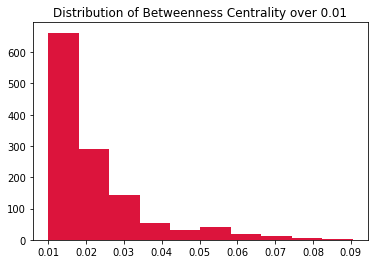

In [ ]:
histbetween = []
print(type(sorted_between_C))
for x in sorted_between_C.items():
  if x[1] >= 0.01:
    histbetween.append(x[1])
plt.hist(histbetween, color='crimson')
plt.title("Distribution of Betweenness Centrality over 0.01")